In [129]:
    import numpy as np
    import pandas as pd
    import matplotlib.pyplot as plt
    import seaborn as sns

In [130]:
sns.set_theme()

In [131]:
%matplotlib inline

In [132]:
from urllib.request import urlopen


In [133]:
from PIL import Image

In [134]:
from mplsoccer import PyPizza, add_image, FontManager


In [135]:
font_normal = FontManager(("https://github.com/google/fonts/blob/main/apache/roboto/static/"
                           "Roboto-Regular.ttf?raw=true"))
font_italic = FontManager(("https://github.com/google/fonts/blob/main/apache/roboto/static/"
                           "Roboto-Italic.ttf?raw=true"))
font_bold = FontManager(("https://github.com/google/fonts/blob/main/apache/roboto/static/"
                         "Roboto-Medium.ttf?raw=true"))

In [136]:
URL = "data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAvAAAALwCAYAAADxpkF6AAAAAXNSR0IArs4c6QAAIABJREFUeF7svXmsZHd2HvbdrW7t+/Lqbb29bjabbA45w5khZ5EiS5YjWZYcxED0T2IrgOEgUKLYSAAFSeQlsBHBsBUnsRM7tuElSGDIcBLYGY1mxrNKQ3EoDclusvfl7fW2qnq1r/fe4Du3qrtJdr963cXH7mb/Llmo9+re33bufdXfOb/vfEeDOpQFlAWUBZQFPnEL5PP5gmEYac1xUpqup+BqaU1zU66nJaFpIQ2uDU+zNU2zAdjQYHvwbA2j3+HZHrQAz7ka/Gs++AqNFtUB0Dvg1dc0Tc57ntfTdV3ex7+P3ju6ru97nlf1PK+i63oVQGU4HFZ3dna2P3HjqQGVBZQFlAWecQtoz/j61fKVBZQFlAWmssD8/HxoMBgs6bpe1DQt5bpumu/jnz3Pk58BpAGM3yPjQTUPOOiLWM5pD77CA+BN+U2uHdS/xxEmHi0CegJ8TdMqAATga5pWdRynqut6xXVdAf+apm1ZlnVjfX2djoU6lAWUBZQFlAUewQJTfu0/woiqibKAsoCywFNkgePHjycHg8Fxz/OOATjmed5xvo9e/DkzaTneASCYX8IHfxFrB+F3CICfNIEDzh8E3sfNDpr/YYZ+QPsygGUAK3z3PO/Ou+d5N3d3d5uH6VtdoyygLKAs8CxaQAH4Z/GuqzUrCygL3LFAoVDIa5pGQC7AXNd1eR8Bdv4ce9zmOgzIftxzfND4U4D/2hjYa5p2B+gT8Ou6vryxsUEHQB3KAsoCygLPpAUUgH8mb7tatLLAs2eBQqFA2sp5Xddf8jzvvKZpL/H3Ea3l8RlEOziCPgm8y5f4NCH4T2DlU4D4g2ZHms5Fz/MuaJp2wXXdi5ZlvauoOZ/ADVVDKAsoCzx2CygA/9hvgZqAsoCywMdsAW12dvaM67ovaZpGgP6SruvnPc87cT+2yhGByw8s6UCOOa+c8E18IIifwKGfZNvDrH+SE3HQGIfpf9IcH6J/F8DNe4D9RcMwLqyvr/OzJ9zNmcYKqq2ygLLAs2YBBeCftTuu1qss8CmywOLiYqrf7788AujjiPqLAML3LvNjSNKcymoKwE9lvgMbH9JBaAN4j8B+FK2/EAgE3l1dXWUUXx3KAsoCygJPnQUUgH/qbpmasLLAs2mBbDYbsyzrdc/zXtc07Yuapr3seV6R1jgwSfQAhZVPypJjAM958qXrOviZ67rQdB26ocNxXHgeX36gmOf9dn4SK3/mObYZn2c/YJ/usx1cPiSI/8jt1jSt5Hne257n/UjX9R/2+/0/2Nvba3xSz4UaR1lAWUBZ4FEtoAD8o1pOtVMWUBY4UgvMz8+fHg6HBOtfGoF2Rtb1Dw96GPA2iQIy6fw0Cx0DbsMwBICPATzBt+M4cPkZfGDOefA6nhtfS2BP9oeA9TuHBl33Ab6A98NJPU6zjE9t2w89P67nee9pmvZDz/PeME3zh+vr6zc+tYtXC1MWUBZ4ai2gAPxTe+vUxJUFPj0WmJ2dDTuO85qu6wTsEmUf6aZPXOSTDuAJ0gm0TdP8QAT9XpA+jqjfuxa2GV9DcM/XveB/HJGfaCB1wYEWOMTzQ+36NwjoPc/7oa7rb25ubpKSow5lAWUBZYHHZgEF4B+b6dXAygLPrgXy+fxJwzDGdBiCdfLXzUe1yDQUmqOMvo/XM6bDSMR9RIEhOB9TYPQRWOe5wWAo1zAST9DPFyPwg8FAIvY+pWasDU9ujcrOfNTnZtzuECD+3iGGAKh88waAHzqO88b29vbtaeeg2isLKAsoCzyMBRSAfxhrqWuVBZQFHskCqVQqYdv2H9c07WcB/AkAi4/U0SM2+iRA+oOmNqa+jKPo48j6HV48KTIE9cKE8aDpfrSeR7/f/wBnnp8T2LMvZ+gI9cYjjUZ9kz/ikzF9sxH4ZxGqbwD43W63+61qtUoNe3UoCygLKAscmQXU1/6RmVZ1rCzwTFvAyOfzX9R1nYD9ZzVN+wIA43FY5HGCd653PD6j53ei7oBE04fDIQxoCFoBBAIBMY8rUXY/qj5k1F3APaE6/Ii8YchnbCt96xoc9U3+OB6tO2N+KILvjJJiv6Fp2u9ubGz8iLf7sU5QDa4soCzwqbOA+tr/1N1StSBlgcdjgbm5uXnXdX+egB3ATwNIjmdy1DKOk0D6UY9/kMXvVaC5F8wzik5AH9AN5FMZHDt+HPFYDJ1uF61WE67rCWDv93uoVquo7dfQ6/Xu8OiZ/GoYOlxdw1BJnE/10E96fg7qfBL9xvO8fQD/ltF5Xdd/Z2NjY32qyarGygLKAsoCk8uHKBspCygLKAvc3wK5XC5qGMZPkhIzosY89yBbHTWAngTAjnr8wwD48TVCk9E0RKNRZDIZpKNxZBNJpDMZkAvfaDSFOmPbNsLhMDrdDkqlEnZ3dtDudKBrulBout0Oer0+BpoLR1exmGn+Tic9P1MC+A83v0ow73neN3Rd/45KiJ3mzqm2ygLPrgXUt/6ze+/VypUFHtYC+szMzOc0TfsTnucxys7k04mJp3f1zB883KQo5sMA5IddlAYXfPHwpCQq5Ro1+dkb/SznPF/mUZJGPWfETec1fktDNyFkdBfQPE1ensO+AUMHLFNDKGjBtg0EgyYymSRm54oIBuPodFzU63Xs7eyiVq9JZD4SDiMYDIpcJOkyTGIlpcZ1Sb1x0O120em00R4M0aOM5B39eN8CMlWRnqTDoPuUnKEzqvrqr4MXidKN68kYHEvXKWOpQdN9rj13AvwV+gffx6qVvG8GWTwPMPrYOndP30+v3rf1NCD5KJ+Ph32e7nf9Ac93X9O03yN/fkS3uUAW1ccxpupDWUBZ4NNtAQXgP933V61OWWAqC+RyuRnLsn7OdV1G2X8GQObDHU4C34cB8FNNcsrGOobQMRDgTsDueXw3/JemQ9PNEfgdSIKpYbCgEvXbHdLP/QRSzYPumdBcHZqrQXN0mPxPMxENBZCMRxGPBhCLWAiFNNi2B8MimO1juzLAVrmHfq+PdqsloHww6Es03jRMBIM2YvEoouGwgPd2uy1UmrGs5FAz4BgWhoMhBv2+XMO5kUtPIO4SHkuxKNMvFiUFoXzwzvUIpJbkWV1gNB0FHmbAluvIt9fENv6erQ/g2c7XtDc8D76FPnj4Pd/9XOMY97nOFefiQS7AwUW6Dnvrp4mwH3aMR73uQ38/Zc/zvqnr+jcGg8Hv7O7ubj1qv6qdsoCywKfbAgrAf7rvr1qdssBDW2BpaclutVp/EsCfAfALAGIHdfK0A3gyyHVQ0YVAUuLlAEH8GFjyXSqgOtB0QIqfukM/Ik/FGIORd6Df7cHQdYQCNi9ANBRCPBpFLBJCKhETEJ9KRGHbFnq9NrZKm1hdW8XmXg2Nrh9BJ9DkOALEHUcUZwIBC7FoBIl4HJZpCKWm025LEiwj61Y4hmA0Ke27nS4cZ4ChMxSKDXnyPBzXgWGaEl0fOi76Q87fT4zlmJZpwbQsAeik71DhRjcMicL7x104LjYaA3hay3Ohe/cPGt8F7KMY+30KTvl2fvA/RZOer8M84E8RgL93OawI+681TfvtcDj8Ozdu3OgdZq3qGmUBZYFnwwIKwD8b91mtUlngQAuwkJLnef/uYUH7hzubpMP+JAMoTQRCCEDHlBlGg8dRYQJqn0ZCLCsRd0a33VGU2tBhaCY0zwDcIaKxEFKpGHRtiHgshHDQQrfdgucMEIvGUZwpIhZJYHenjOvXb6JU2kbPddFxHDSaTThDJqZKQF+UJUmDMQ0gFLKRTMQRDoVkPp1ORyg0YnfdRiiSQigUguMMxangF3tv0PdBu6ahyb5dF2bAGinY+EWhCOx9MO6r4jAKbwmQ13z1G9Gc92k4UvB1FIIXxs4oGs8IvH4A60M2KA5Isr1/XP6DT9g0IP5JfvbGq5y0Ps/zGpqmCZgn3Ubx5tUXurKAsoAC8OoZUBZ4Ri0wqn76pzRN+zOaplE9JnxUpniSQZRHtOzHokcckbs8eH7MqLpEsR1qsjvCZyeNhm0ImL2Bh2gwhnw+hcJMGuGwgcGwiVCI721UymV4roOgHUU4FIfmBVCrdrBVKqNSrqPvdjHUBneoKxxz0Od4HAcIh4BwOIRoJIxoJArLojJNH81mA81mC/2hjoAdFxnKoUTlfe47X8lUUpJhy+Uyur0u7GAQlhUQYM8of7vTRr9HZ8SAYRq+7jzpMwTxpM8QnBPAk3ZzhxAz4g2NOPQao+8PiMCPn6dJAH6aHZ6jemaflH7vA+5ZBfZrnuf9tq7r/0aB+SflTql5KAt8shZQAP6TtbcaTVngsVqAyjG6rv9JgnYAAtqPGlwfdf/TGtQlbYWo1xtDeD8BlQexPaPuwvh2h36EG6S2EFwzSu/Cci3kk3ksnVlAJhtFvbmNdqeMRDoET+sLX51UmG4HqO930Wp4GPYDaDYG2N7aR6NVhhEAIlFdlGlM3RBwTRoMxxjTZ6LRiJwPhYLiVJArv1/dR7naQbPtSASd3HTXc9EdyU0mUkmEwxHUajWh3oTCYSST/CyEvfIeynt7At4DgZBE6vuDAUzTgmFaIl8pUpeGKVQcPwLvJ8SSE89IvyTAeq7Y5SiPSRHqoxz7Sej7gPXfAfOO43xtd3e3+STMV81BWUBZ4OgtoAD80dtYjaAs8FgtQNBumua/53keI+1Ujwl+3BN60kH6Qet1NB18iRYKAfsIuPtJl4ArCaUegjaj0iyg1BMePEFwOBJCLBBCIhjB7FwO4aiFja1lOOhidj6PQMgQ5ZdWu4PSZhk7OzX0uxwrhE7Lwd5uDe12A8EAkM3aIisZi0ZhB2w/AdV1YBo6kskEspkMIpEIApYlia0C4rtd3Fwu4f0ry2i12ojF4hI9r9b20Wi2fB47KTStFgbDAeKJOBYXFpDLZkE58t29HQSsEPo9B/VGQ66fm5sXoL+3VxaqDj8jhYiOgeP6iauk0EhF2VEVWJ9N7x/347MfxHE/KDov/d2HN/8wz++07R9mrEe9dhqZ03vW16U8JYDfHg6H/68C8496N1Q7ZYGnwwIKwD8d90nNUlngYS2gFYvFPw7gz3me96c1TQs9bAcPc/3TDOBFxYWUE9JFBMDznWDeT2u1TV1epM8wGh+JhpDJpJBIxGGaBgKsitpsIhoPIZWOo9qsIBi1EY2Hsd+oolzZR63RRKXSxNZWBd2Oi0g4DcsMoV5ro9+qoJAycerUKcwUi4hGIgiR6mKacIcDVPerMs7c7JyA916vK78zGs/I/spGGW+8dQGbpRIymRwi8TiqtZpPr6HEZL8nAH44HEj0/uTJE5ibncXa2opE5pPJDMLBmABvRu5zuRyKxVkB9Ktra2i127I7MRg6EqEXOcvh8I4KDlVtREvyzvFBWUgfvB/0T83BLPhpAfi07R/m7+BRr/2YAPy9w3cA/N+apv2Tzc3Nb31ADuhRJ6naKQsoCzxRFlAA/om6HWoyygLTWaBQKJzQNO1XAPxHAI4dprdpwfe07Q8zx0lJsofp40HXeIYJEmPc4RABJn26DrzhAMlYDAtzRZw9s4RoKIit0jo67RbSmRSy2TTqjTr29nYRNj1Ybh/xZBKZbAZtFldyXGxsbePm8jJ6lHccUue9iXKlgX4PSKdCKBaLCNohhLQhCokwZouzKOTziMfjsAMB4bIPB31sbm6i1Wogk87IDkF1vyL0FurEM3G12hri4rVlXL9xQxTtg+EIHA8I2LbQXgjASYEZDFjF1UWxUICha1hfW8HQGaCQn8fzz5/H888/T/I8tre3pQ059KTfRGMx0agvlbbQ6fbuZAswMZafd/p9SZgdy1HSaaB6DXn2Y814RvD5M3cNyKtnUJ1OiETzSdM54F+iwwDww1wzzTMyqe1RPp+Txub5Cetf0TTtn+q6/s/X19dvHKY/dY2ygLLAk28BBeCf/HukZqgscKAFstlszLKs/4DRdgBf/vDFk8DNk67TftTzd8k5Z8TddWHpBizNRS6dwvlzZ7F0/Dii4SB67SbK5V30um1YFoGng41SSUB8PmljJhPGqVNnEY2ncenKbbxz4Qpur2yi1XUQCIbQ6fZRq1UwGHpgfmguF8axxTkp5jSXSCIfiQodJRQMCV2G0XUC21aL4+6h1WxItJ3SkrXaPtrtltBsgraN+sBDqdZEaXtXIv3Usae2eiweh2EFUGvUxSngjgFj47FIGOW9HWysr8J1hjDNEAqFebz88sviVGxslnDt+nWJxh8/cRyLi8fRqDewvLIqkf18Po8vfvGLyOWy2FjfwMVLl7C1uyuJrtVqFdXqvoB/0m0GLA5lEMj7aj581siv57XUrScth6B+GgA/6fk4zNfHEUTAPzDsJ+HkHmadAFg06p8Eg8F/eevWrdoh26jLlAWUBZ5ACygA/wTeFDUlZYFDWEDP5/M/o2nan9M07UCKzCSA88wDeF9qBpamYdDrYqFYwFdfew0nFufR3K/i6uX3sbW5Llx0gtZgyBZaC6PUwXAQ0SBQzEVx+syLGAx1fPNbv4833nwXuhmGYUXQbLUFwMbjIUSjAViGg2QyiEIhjZCtIxtJYDE7i3gsJkoyYxY5q642GOGmUky/h163K9ruEvXutGEaBgzDRMfT0IWOTm+Abn8AzbAwcD30HQfNdgfV/X2kM2mcOnkSxUIetmVgY20Ft2/dkMg+PBODIRCPJzA/Py/Av93pCn2mUqkIpz4ei2PoutjbqwiA//mf/3m8+vnPS8GpP/jRW9ja3cPJkyclqXVldRXrG5vY2t7Bfq0mNB6CeNJoOr2eaM5bgQB6/T4MidQbcIYPToKd9PxOOn+IvyW/wu4Djkn9TzrPbp8gAD9epVBsCOYVxeYwT4i6RlngybOAAvBP3j1RM1IWeKAFSJHxPO8vaJr2HwKYHYODSQBh0hb/pPaP+5Yc5fxdbyjSjKy9SqrMT3z5dXzhsy+jXt7DzSuXUdnbQbNeE0WYxcUFFIozqNVrqDebMAIWDK+LeJQFkkxcv76K6zdLcL0wguEUtrZrKO9XkE5msHRqHosLOSTiJpJxS2g0ut5Hu9yB1tUQDAZF5YWJsuS6kwNPEE81mkG/J9H4Xqcj3HTSV6TklGnCMUyYkQg83URv6MCyQ3A1AzvlClbWN9BoNhAMhXB8cQGffeUzsDTg1o2rKG1uoF6vQtdt9HpDdPt9ZHNZFAozojSztraO0vaW7ArkcwWhvlCrnrSdaDSGRDKBfKGAvXJFxvrC57+A115/DY1GC5evXBEAX6lW5b1cqaA/cOBSMX4UdQ/YQaH4kE8/CQRPe/6g5/cwz/404x+m/8f59+V5nqLYPM4boMZWFnhECygA/4iGU82UBT4pC5AiYxiGUGQ0TfsIRebjiPA96SBjkq2nmT8rsXpOH9GQjS987rP43GfOw4KH8vYW+q2GgGdSZ6Sgk+chm8+JSotmjnje3hD7lT28e/Eyllc2EI1lUJw7iXK1gRs3V0RbPRoOI59NYK6YRTGfQDGfRDYTg6k7qOzWsbm+h61SSTTjeSRYuTWRkMJNjGqL3jwLMRm6yFKSQkNKTSQcgRkKwg6HEAhFYNpBWKEIGu0erly7jpvLK6JUY1qmAPjnTi/JWnutBgzdQ7vVRHW/jp3dqkT2qRNPcM4IOdVzuCNAkG4HQ1hfX0e5UkU4HJbk171yFbFYBKZlo9Pr49ix40LDIY+e9KJer49oPCG2Iv3m2vUb0HRTVG0YlWdkfyD5AY6vO/+IxyRw/YjdHrrZ4x7/0BN9wIUfmv/vMfG10+n8y2q1qig20xpXtVcWOEILKAB/hMZVXSsLTGEBvVgs/sxYRQbAA1VkpgGvHwf4n2KNH0vTaddv6Q50r4/j87P48mtfQDISxv7OtijPpOJRNBt1NBsNlCtloZUk0yksLC6K2ks4EsXQ8XDh4iVcvnoNViCIUCQGx/NBbK3REPBuahoCBhCxTQRNDVHbRDoZRTQUQLProlLroNvuCCWl3+uh2+vDNDSkUykEAgS6fZGOTMbjIujSaXcEwPN3JtWGIhw3jsUTp5DKzeDWyjq+/s1v4t33LqHTHSCTS+LM0ikELROhgIHZQhapRAyxaAi7uxW8d/kqtre2BXQzqh+JRaVybCaTRSweE/WZtfUNrK2vCxWGTkS53EKvB1gBCK8/HIkI/YbgnLKZnqYjlcni85//IuKJBN559wKWV1bQ7Q2Eo08+P8diwuuQRV+nOB43iH7c409hugftfigVm2mMqtoqC3wCFlAA/hMwshpCWeAhLGDMzMz8+wD+IoDXxu2mBanTtn+I+R/JpUc5f8PtopCO4KUXzmG2kEPINBC2TInIBw0d9XpN6CaXLl/G1s4Ojp08gbPnzkE3LXQHA9QbA1y5soJas4ZQJIS9yh4qtaoA7YAN5LMZxKNhGJ6HgKbD8oCgYSIcCMAbDrFbb6MxdEX/PRaLCaCSwkvtNuyAJRH4XrcjtBqC9WDAFn12Fm6i3GQ6EUM6GcPxU6fx/PnPoDf08N3f+yH+zde+jlsrJVgBHYvHFjE/OyN69sfmZlDMZRCwdBxfnEe728fb717A+voGarW6zDsaoxKODYvInOP3+mi3OxLNtwKWROYpU7m/X8X+fh37tQ4CtolIJIp6o4l2ZwjDYsqsgeeefx5f+tKXRY3nj378Y2yWtgW0E+SzGJQZCKI/AcFPw1Gf9EAeBnxPM/5h+p80x6M8P2l+mqb9geu6f3tra+tfsSDxUc5F9a0soCxweAsoAH94W6krlQWOzAKLi4upwWDwK57n/ef3k3+cFsBO2/7IFn7Ijo9y/kGth9OLBbxw9jkEAyZ0ZyhR+HDApI4jqtUybt28iRu3bqHddbD03En85B/7aSRSabx/5Sq2tjvo9gKot6rY3FnHemkZAxfI5nRkc3Gkk3Gk41EkwjGErSCCmo1kKIFYMIp2vYWVSgU11xVuuW0HhKrTbrfRpnb7oE+NQHQ7XZGAzBdyyGayUmyK3HFNBwKeg5lUEi++/AoCoSi+84Pfx7e++32srJegGwHMLcxh8dhxhEMBZFJx2WkwNRem7oljsVfZx83by0KhYZKs62lCeyGwY6Sdg1BRJmgHJZJOrr4dCkm12FarhXK5ikq5inA0JjsS1JynEk2j1RYnJ5lKY3Z2Hrpl4cbN29jZ3ZOI/n6t7stJ2iEMR5VvH/Q4TAOgJz1ikwAs208z/mH6nzTHozz/EPNbAfB3er3eP6pUKvWjnJPqW1lAWWCyBRSAn2wjdYWywJFZIJfLLRmG8ZcA/FkA4fsNNC14nbb9YRY/Kcn0MH2Mr/nIl5J2bxmguxU/x9e7MOHp5FB7An6ZBEqdc6kS6jryO39mPJiVTVmgiRrklC+kjGIhZuHMfAb5XA6mronyi+a5QlkhB51SkdevX5ekVUaRqff+sz/3c3jxpc+gtLWN0m4Lu5UuLl58B9euX0a73UMoDBQKCVGaMTQWhnKRSiSRTqQQD0fhDjyYuoloOIpKo4H2oC/ykVSW6XbbaDYbIh1JW5imifLuLnr9AU6cOCkFnXK5vFBoWFQplUggFo1gr1LFj976I1y4+B5anQ7C4ShmZmdx+vRppFJJwHMQjYQQCdkY9nvw3CGG/b4ozVQqVemL0X6p3iq8e1fsSQWZoeNK1D0t1WD9AlIE/Du7u2g124hGYkimUqJfH6EEJjTU6w1RrqHqjEMFm3JF7MXdBSa37u/vC4B3AmG0HU2i8nQWuE7NMEVukswaJtTSgZBDSuOyDOxd7XM6MyzAxWg+Dzo6vJrCMvyEicF3nk8K6X/gYNIwOzv4Cf00A3jfZhMM8EHzELz/I8Mw/p7SlX+YbzZ1rbLAx2sBBeA/Xnuq3pQFDmWBmZmZnxrRZH7BD/BN96c4bftDTfoBF036x/9hZSoJtO+HqAi8/XMfPAZ6EI4REmBOQE6gSiDO4qAEqdrod1ZV9X93ETANhII2AkzuTIcwGzEQDAVh2ZRx1CSSbNo2ghEC4wouvPeeSCuGYzG0uz0U5+bwi7/4SyjOFPFvf+9H+J3v/B6uX72KRm0gXPd4FCjkMsimEzIXJotS+pEJoKlUSigpHIegl/MyNQ+pZFLm5DqsdtoVAE9AT+rMHoFyu4t8fkai2adOnUYuX0AwGIYZDOHi5Sv45je+gSuXL2NutohXP/c5pFNJZNJp0X/vttvQdU3sQ+lIRu+pcMMoOpVt+t0udEOHR/nJwQCO60CnxKPhc9RpeQJkFocigI9GoqITv3z7NlaWV0UOkuvia3FxEdlsVig+jUZDHAM+A/y52+0Kn58RejoOVNapORY2Gz00yOs3A6Kmw4i8Q+14QnBWyqVfxntPR4zVcnVWxiW8d2Hwd9GYJ5T3ROVGmuljAO+Orv3wczX63dN9EH/AcdQAfpr+p/nbnbItDfivXdf9ra2tre9O2ZdqriygLPCQFpgONTzkYOpyZYFn3AJWsVj8Zc/zyG9/5V5bTAvAp20/zX35OAD8/YD5/ef0UQDvaAE4mj3ST/cEoBP6MeptaBQuZATcEf63JZF5T8B9PBpBPp/DTMRCxOsIPSSTy0riZjKdRqPdxtbOLlbWVnF7ZVWUVhaOHZMkTUaUf/GXfkki03//H/8f+KOL10XTnUmlIdtCLBxEPpsWAB8JBYXDXq1UZUkEwr7+uYlGs4V+twO4jHBbiEbCwnsPBcl910Za74bQaKgK40FHJp3D8eMncfzESRi6hT985x38f1//HanYykquP/HVr+Cn/p2fkoJTBObUkG/UarLrMBwOsL21hV6vK44B1W0I4LkzQVBMqg6129udtgDiAHnwgQBC4YhE3VmJlVSfmZkibNsWOcvl28u4fu260H4ikYhIbZ4585wkv4qjMBwKHYj8ej6npAmxbz43BPM1x8DNrSouXbmKRqsFOxQVTjxpSALiXU/Ua2hz4mxD02SutInrOTCgSQSeCkH8jPa9E41nVV0B/uOn6cmMwD/gtDejAAAgAElEQVSlAF6MOvr7fxvA3y6VSv8CwGCa7xPVVllAWeBwFlAA/nB2UlcpCzyyBchv7/V6/4mmab861m7/cGfTAvBp2z/y4kYNJ1FoDprfRyPu/OTwX02uZmEIU6LzQp0hYBOqzFAAO0E8nIFEuQmu+bItE4l4HDOFPBKWh8CwjXQmi1Q6hUgsBt00sbm1jRs3b+H26qpQUhKpFM6cPQtNM4QCwt+vXbuB3//RJbAM0eJ8HieOH0MqFkUwQInHIGxLF8Bp6gTDFsLhiNB5GO0nGL51axnVchm16j463Y6AbsvUEY9FhfYSCgUFaBMsx6IJGRtgldUELMvG6uo6Lrx3UYAvrz9+/Bg+99nPYunUki8RWa3IzgSlMBlVZwSe1BWq2LCaLJ0E9s/z1HhnRJ7zYvGnVqstc6ZeO8ejHjx564zULywwyp6R/ZD9SlUoRqurq9I3KT8vvPACzp4961eU9TyUy2VxMCipKRVnQyGpDktaTihTRLkzxBtv/gjXbtxAb+Bg4HgwAyE40GVHQCLzEl33fDqUcGR8yhR/1zXDp0/ROgT3jM1zvaRQ8foDS70KCn3gn8Bh/rYmObGT/j4m/f1N6n9S+6M8f+/cPM/b1DTtf7Ys6++vrq76Hqs6lAWUBY7EAof/V/JIhledKgt8ei1wGH77ePWHAQkHWWra9kd9F6YC8EIvOqBSJgw4wmP2ue/knMMdStTdMjQYcGHpHmLhEOKREKKsnhoJIRGLCVC23D5Md4BUOo0Ak0g9oMcky3odlf0alldX5fcXXjyP2fkFrKysCqWmXK4IP5xj9xwXmWQSc8UiEvGIFIXS4cJzBpKIShBN0EpefTqdwdz8vCi6bO/sYtAboFquoFbbx2A4RLfTRjAYkN2BZDopco7RSASJeAq6bqLRaKJea0hV1E6nh1Q6iVQmJTSRTDollVL7vb5f/KnZEDUbnqMZGYVnMiqPvb1dDAY9AdnjxFnSXgiSCeIZUSf9hTrt1IfPZnMCprl+cuTJrWf1WCrikApDSszu7q5w3Cl/efb555HNZCTRdXdvD62mr11PigtBNoE+3+dPPQfHCuH9S77KT63Rwl6lhlanC+im8OC5bjoOfo4DdyOGksNAB0ToNR7dNzpwd/n7XItQsQTQj5+fD7/TEvenZn1cfxNHDb6Puv9JdnjA+G3qyeu6/luKJz/Jguq8ssCjWUAB+Eezm2qlLPBACxC4m6b5Vz3P+2UJlx7imBaAT9v+EFN85EsmzW1iBF7IzA/+qhrF3IWGQjDmA3bIi0or/D0RCWIml0EsEhJOOtVmSG0JWIbwp6mPHkvEhdYydBxJwKw1m+j0emi2O5IMeuLEKSyvrOHdixekQmmr1UE+X0AqlRYwTl3zeCQskXfLAMJBG5FwCL1OG7X9KpyhIxxwVjslh77T6fqa6+EYWo22cOT7/QEajZrgzWQqiXQmLQWSyLUniO12+1hfW8fG+gYCVhDZTA6xRASuS0CrIZmIC+hmcumg10On3RL9etMwJdGVgWgmouZyOYnO1/b3wQ8Zf2alWd4rAnZKPFL7vk1+vHDiPZG45K5Dea+MmzdvCfg+fvw4ZudmhfbDCrGU3Nyv7qO6X0Umk5GEW3Lfq9Wq7DqMnQWfPjMQjn1hbgGdoSu7CFStoSoOdezXNzfherokxQaZFQwItYe7BHRyKHHJBFmh2zijaLyuC2efdBtSbwzdFDK80GsExI93d+4+T6RbkUt/lMdRg+yj7v8g20wYm4b9vwzD+CsKyB/lE6b6fhYtoAD8s3jX1ZqPxALFYnERwG94nkdFGfNhBpkEcif1NW37Sf1POj/N+HcB/EhF5MPRdo3A8sF+kFBnRoojBNEBQ0MiGpKIu4B5w0MyGpKiTKGAKUmt/JyAlwmvVsCW6DjjsJRNZPSZAJh0kaHnIZPN4rOvfl446G/+6A8F4Dueh9XVNUnqZBSfVVLJXyclJ5P0efAhOwA7YEphJnLgJfFS+NyGL7W4vy/ccgL4Qd+5owQyGA6kcmowHEYimcDS0mnMzc1zgwEbG5t49+130W61sbh4HM1GC+vrt1GcyeIzL70kdJidnR1RiGFEn9F3qugwGTaZTAoHPmAFsLC4ILQcAm7Sg7r9nl/ZNRIRsLuxWcLmxib6LCw1GAoYHldpJfgnWL9165aA+nPnnpedBXEa+n1xBlhVlvx4FnayTFOi7RyfY9IhYBSdTg8BfTqXQ7PTlag+cwo2tnawvVdBu9MTNZpcPi/Rf4nk7+6KU0IATw180aPv9KXyLClAdJKooiMxdU+THRKCdjog3BOBp8O74wz6z5ukypJm9YDjMOB4Gg77x9H/YfqY9Df8qOcPOTZZZv8UwF8rlUqrjzqWaqcsoCxw1wIKwKunQVlgSgtks9miaZr/DYA/D4AyJg99TAOABYRMqWLz0BP+UINpxr8XwN+X+z4JwLtDWJonIJUoNxIKYG4mj0ImDRIwyEOnMsyg24JtAIlYRK4h6O73uuiOEiYJ0BkBJ8Dc2dlFu9cTbfNEIoloPI7NzZIA75niLJqtNq7fuInBYIiwbUlEf7ZYwPHjC5jJ5ZCIMulTQ6tZFxDNNTJaTPoMI9y3V1YkAk+A6Xk6dI1qL7rQQkKRsCTRCmCOsdJqVtRqGE3+7re/gwvvXsRMYUaUbK5dvY5UIoSf/OprKBaLaNYbEvEmqCJYZpR7e7uEVpsc+dSdxNNIOCJ8fzoCO5U9NDttidLTYbCDIZQrVeGst5pNqSbLHQlC3VgsjvmFeaQyGVGxIagOR8LiGGxsbFCrBvlCXhyJUmlL5sKdBIJ+UnearSYa9YY4C3QOZouzmJ0rolrbR63OglB17DdaElXP5PLIF4riJNDBooOwvr4u1CA6AFTZCYeC2G91sVOpy/1p1JtiR9qVevY+PGcEnpszBPZ8jTQmRYtSg6Y58lIA/tG+BQ4J4Med9z3P+wfD4fBv7O3tlR5tRNVKWUBZwA8+qENZQFngkSwwOzubdV331wH8pwBCj9TJxwC+pwHPjzrne9tNO/5YUUQ4y2OFkZG6hQTJRzmGBLf0Uxgh5hfXOFmRhZdsg8mYpiSAZtNJnDy+KFVVbUOH7g3RadbQ2C8jLlSaLMJ2QPjfBIO7+w00ugNYVkCqjDJRlEos1CMncCdQXl5Zxe5eWRI6E8mkryDTaKJS3UfIMpCKR5DJpDE3O4NUPIZw0HcQmo0aGvWaANxYLIGZYlH63djcFPoIo/++VL0G02LRo5SAdzoOsURC3gn4CWxXl1fw3e9+D/vlKgr5GZQ2NyUq/9M/9TqeW1oUmgp56zqrvVqWRK15b8rlPTSaDUlCjUQjwlFnMinlIKlQs7KxgVqLkpWm7HSwiJM4DIYh2u1ra2sSkadsZCwaE5sQ6OeyObkHBOKlrZJIXXLM+fk5Adx7e3sC4IvFWbENnR8ms5K2w50Ozu25555DoZDH3t6OnOed7Q8ddPpDcVyy+ZmRWs1AdhQq5bLsaPC5oEQmQXzf07FbqWN9YwOlzS2xF5OQO11KdZIT78tQQjMlCu/z5QncR9x4AnhJQ37w8ZAg9SMdTdt+0t/pUfd/BON3NE37uwB+c3Nzc29S/+q8soCywEctoAC8eiqUBR7SAsePH092Op3/UtO0XwMQFU94ygj4tO0fcgkfufyoxz8wiZUFlygJKFremgBH+d1hZJSqI77koPDbRcvcj5YSJJIuYQz7CJo6YpEwstk0ZvJZZNMppBJRZJIJ9NsNVHa3hDbDyDuVaeD4nHFGyfdqLVTbfYncmgFLEiEJzplgyv5NK4Dd3T10e9RnJzg0hMfOiD0rkNqmJkmyiXgUxxYXZB5MYKXii+c4Qitx3KFE06lC0yStpd6QSDeBsmkE4A492OEQZmbnEI0n0OsPEY7FpXrppctX8Oabb+H6tWvY263AHQwRi8SkyNTMzAxePn8akSCEXx8OhcV+LMJEegmdkqHDxNiuvNO+vI6Rc/4cCAbR6nVRqdclMr6/T7lJU5Jsi7OzMMlJL5exsrqKra1tf8chEkYwFELAsuXdDtro9joiN0muPpVfSqWS0F14j86cOSOKM2MHo93u+Oo4miZykzOFLDqtutBcOF6t2UKlWgNY2GmkRU81HGc4FCoS1XW4c8K+89ksAuEYGu2+7Bpwroy208Ha3i6jVm9KBF5cPgHwTKLl08O8inFyK8H7wQB+GnB/GHA9iYIzqY9p/n4n9T3td8uE9k3P8/5H27b/1vLy8v4Rj6W6Vxb4VFlAAfhP1e1UizlKC+Ryuahpmr/mui7Be/LjjEJP8w/wx7Hmox7/oP7JrybAMlgdlWCecoEE6VROkSqqVIV04DgDRAQ4mqJCEo1GhKrRazZg66x8mkNxpiB0FvaSSyexMDcLzR2g127Ctgz0Oi3Uq1WYOqTAEfvertYkAq8ZBmr1moD3XrcngJA0lkQiJVFdw7CkmBOpLwTe5MITDFOeslXfRywaxnPPnRangc6BbVlC8SAgZqSbbbs9gnlXou+hSETkGWPhKEzdgBkIIJnJwAgEsV9vot5qY3N7B9//we/j/fcviWNBDn2v3UEmlRZaSiGXx8njM4gGgaDMNSEbq6TGEKcyEs/xut2eSDySd8/oO38n1578fnLQ95tN4dfTseC94k5ENBpDJpsTYM4o/mZpS9oRtFPe0jQD4tzMzZMGMyvOAvXeCfZv374lya6FmRnMzc0JqCf4FwdNovZMYDWwMD+PTDqJVqOGqujPd9FotrFfb0jVWwLtcJjjhcWZY6IyQXy30xLKFNVu7HAMnd5QNPW5O0PHiAm/lAFdWd1Atz+QglA+fcZ/9wH8OKGVz5oC8B/H98ij9DFyIAje/6ZhGFSt6TxKP6qNssCzZgEF4J+1O67W+9AWmJ+fDw2HQ9JkSJfJ3q+DaQHwtO0felEfanCU40/q2xGBEEMkDgnQWFxIOOOGry/DnxnR5s/FQl4qjRIQe64DOxCA0+0goAOpZELAf2VvV0D8c6eXpJgSE0oJ3QgS280Ghv2eVDwl4O10Wtir1dFn5U/Xxa3bt7C3V0Y0GhcwzKh5vc4qqj2JnpMP3m51BFD6ewKeSEVW93YQj0Vw7vnnkCGoDAQkuZWJrYyE0+Go7vvOAQEmi0ZZtg07FEYqFkPQNOGS+hK00Rt62Nzdw41by/ijdy7gypVrooPOpM1mowl3OEQqkRSJxnNnn8ep4zMI6H2p8irFmKTa6UCoI0wK9fXRSaWp4PbKsoB0RuhJWSLfPlcowrBticr3hwORoCTNhko0jGQz+TSdTguQJ8BmBJ2gmrkAVOHJ5knV0bG2viaRdyavMomWDgPbMjGWlBk6MrQFk2ipSc85irRmwESzUReHiX17VI0ZKcb4YFyXaykZSaeIhbiGva7QqWKxKAKBELp9RyQ46VA4joeh60kSbKPVRr3ZEodg6JJ+5Vd2FT19Kfjk502wQu80x6Qo9jQ68Gw7TftJ65o090ntpz3/YR15AH89nU7/w0uXLpEDpQ5lAWWBB1hAAXj1aCgLPMAC586dC1QqFSamMkG1eJChJoHUSUaetv2k/iedn3b8adoTuFLvm4QGgnfPGUqE3Afw1FIfImDqsE0dC7MzOP/iC8Jd3y5tCkDOJhMiAymVQjttVCtl4Uaff/Ec4pGIaKE3alXhopuGjpBt+1Qc1xEN83qrhUanLSomBJ8Eu6xAmssXYJgWrl+7geHQRVAKGdUEIPIgvYYoklF9Ogacy7HFecSiUaHTEGBTXpGgleCVEWJGl8PUdE+mJeIejkYRC9owPQcO6S39AbYr+1jdKOHardu4eOmq0ECKs3NwHRelzRKcwQD5TAYvf+ZlvPzSS0gnbFhaX3TSCcLpJBC0k3VEGUhGzUkPIvd+a3tbkku5EyCa7CyEFAggnc1LNJ5rJ/WFXHWuL5XO4NixY8hkM9IPQTaBOSP7s/PzInHJhN53L1zE7du3xaHJpDMSaaf6zVCi6D7FjDbgmGzL60jrIZBnFVVG1ekcUQGIjoJlh8RudKBIq+l2O0KhMQ0WxSKNaigvy9BhWrYA8kg0JrsD9UZLilBR/z0Yicr8Nrd2xLZ0aOgg+CCeFCpfLEoKPh3RMS1Anrb9pGUddf+POP6Kpml/dXNz859PxW+aNLg6ryzwFFtAAfin+OapqR+ZBcxCofBnNU377wAcO8wo0wDYMcA5zDhHdc0085+mrYAnzYDHiOiI584CTEw8pdwjf2Zhpng4hLBtIpeK47kzS+i0mnjvwjsImAYW5uZE45zRXnLAGamlnOOpkycEqK+urGBvd0coFxHRgdclqZRRcdJJGq0GWl0/+ZMRYQJdKp5k0lmh0Ny+tQzDCMh5gnxGbQkQCUgJ5fuk0dDBCARE950/57MZofOQu03qCykpTKRkZDhgkzcehkGKTTSKiKXB6TbRHQwlWry5W8HGzh6u31rG1Zu3RON84dhxdNtdUVphtP7EsWP4ya98FYvzCxj09mGgKwowjHS32j4FZX+/Kr+TusLIuXC/NU0i66T/cBdhMOhjr1qDFQyJIgxpMATvdAQo33j2+XOSeEuFGFZbZZLokDsfwaAkwXJXYmt7F5euXJWoO7nuvA8SaQ8EZDeA0Xzams4CX9z5oJ3H+Q6cN/MEaFNqwbNoFvnpnAudJqrQEPT3um2hUZFmJVQrz4E7pCQlxMak+4QjUUnkZREoSn2SokR/i/Zg7gFpOYzus/gWgato30ti61H9Zfn9TguSp21/0OqOsu/DWHXC+Nc1TfvLm5ub/+LIxfoPM1l1jbLAE2QBBeCfoJuhpvL4LVAsFl/1PO9/BfDqw8xmWhA7bfuHmev9rp1mfLadlIR30PwI4IcegRRpMzoMzYXT7wmIjwQt5FIJFLIpxEI2bBOiINNu1nH50nvodztYXFjA4sKiFBUieLQsUxRKWNSoXquJOgorkVJWkeCeYHHsNLFYUX/YRSQaEplHAldyvSknySJETKzc2dmTKDBBHqknVKUpVyryma/t7oq6C/XOWXXVGQ6QzaRFeSUaDklEmVSUYCgiANOk8oynCaCmWkpQdzBo70vyZr3VQa3dRbnWxMXLV/Hu+5fRGziYXzyGPvXpt7ZxfHERr77yWZw6fkKi0YPuPkytL5piVIqhvnq5XMXWls9Z7/X7AuDJuSflhVKQHJeUISaW1pttcaC4Fp+uMhTgz90HVqdljsI2I/db25IjQGBNehHP01kgVYUUFu5m0EYExdSFL+QLsnYq0fR6XTSbLXQ6fVimJgCeqju8zraD8BxXou/cpeB8SHexbSoC6eJ4MVGWlCln0Jc1s5Ju0KaCz0CSejkwwT6j7pwvdw8I3OkgmbaNRqsjevdD7kxourzTqaDz4NNoDlVv7YGP8TTP/7QA+nG3n/a755Dzf9N13V/b3t5+c9rxVHtlgU+LBRSA/7TcSbWOqSwwMzNzXNO0vzGqnvrQfxfTAOBPQwR+GgDjaiYGBPCeIwmqhudg2O9IxH1+Jo8T80UkIgTvGrqtOna3NqVYk+gvukOhcbCoUTKZkAgwiwMRrBNIM6mSoJugkoefwNkVKgev4c+u20MsFhQ6BRM5GeUm0I1Gotje3hEQT3RMwE6QyM+oSkOaDX9nMadoLCqAkgWGCOLJVyddJ5lIIJlOydgWJSjjKRhUhhGQafpFhQZN9FtltDp9NDs9VBot7FbruHprGWtbHB+IxpOSH7Bd2kI2mcJP/cRPipNw7fIVpJM2zp87hd6gJ1KK9ZqfiEowTD7/zh7nGsTcwoKAb9JnyBcnsKcEJNVZugMH+9WqOAAWk1NNS5JcScGhMk2l0kC7DQHFluW/eAx4CzzADNB5GYJY2g4wW8ETrnso7HPYCZapctPpeDAtIBCg9j2BflDmRIeJuwJ0jlrdISzbFM18Ju3SyWDknrstzrAvRVPj0SDi8ajYhEo/lkb5SX++uu7TacAdl2hMAHyl7suC0nEhdYkFuvgsSGEtzVQAfqpvz+kaHxLAcxD+If6fuq7/+sbGxvp0o6rWygJPvwUeGqg8/UtWK1AWuGuBbDYbM03zNwD8ZwDsR7HNswzexfmglAv/FxrCR7kIYx13yTqUC322zPhK8pep/U01l3DQhtMjUuxjNp/BK+fPYa6QQ7tRRbfVxOb6Km7fvIG54gxe+sxLwnWPMBnUMAWQZ7MZ5HJ5oVxQL5yRdx6UfCTPWQo19alBrgu9heDBGfag654AzXqtLnrkdAR4LSPPnCujxaSLcNKsdEpaCPtIJlNS1MgOhURdhcmWHJMOA80ifPhkQjjoEk22LInGE/QH7ZBwwDuNCgadGvoDF3ssoLSzh/1GG7VWF52+gzY16u0QQuEobty4JUm0v/ALf0q45m+++SO8eO40vvLaqyKheHt5GdXqvgBzOhqra2uoVKqIxKKi0c61UYOelVRJAYpEo9ANC81WRyLlvnPDCDnlKDXpp9fvoV7voNli0igQjQbu0GFaHRfdjjBzYJpAIhlGJpMR2xN493q0h3+eGx8UF4pGNUm45T2iI0XFnf0a75XfB6PvlqVjcXFBClaVSptYvr0G+mC8nfTbwkH2E5RiUr2+i1A4ITKZtVqTQXjRsqeDlMnlxNYbpZI4CAT0lM6UfIluV0A89e9Z0Onu8cFnWJ7f0elxoTH/91ElV65vSg7OQ4DY+35FPe72j/K9eW+bh5x/W9O0v9nv9//W3t4eK4ypQ1ngmbSAAvDP5G1Xi2YOYrFY/POe5/01APlnHoRPo2MvuNzXZPGrqn74YETWj9TevcqX8ONnpM0wkkq+O6umur02oraJz7xwFi+/8DxiEVt0wne3t/Hjt97CjRu7OH0mj9e/9CWkM2lYBGaGIaCb0opUTJEIvEhP+monfOc9HvOw+TMBuyR7uo5QMUgb4YtgghQMUm0I1DvdDpIJX02FMowEukyopGQhKTusGArDFLDLtgSEBKd0EAK2Jdx4cuCFbsPz5MsLJcRDo1HHfnkb3sCvylqt1rFdrgho7w08VGotbO1WMHQ1GFYIG1s70HQLr33pq8Lnvr2yiqUTJ5BPZ7BX3sNWaUuSR0lt2d3zk1GJnjkenQjSZpioS6Duz5E68ZSZ7I8SX5n86iIYCiBgU/6SijYuhqMcz0IhJLKRLL4Uj8VE/3359gquX11FrwcUizEsLS3JbgjtTkdhZXkFm5s1eShCYSAcskWGk7SneDyGlfVtvH/1BqqVroB0RvdDIUtkPk8vnUIhl8OFC+/i+rV12AEWcIpKzgNBOBNuS3sDGLZfR43rEueI9vU0SRjmLsne3q7sPFD9h/QdyXUY3W9SdPgMfBDA332OXb9gq/+83pGe9J9f7qAYfHZ9cfkjOR4S3D70HKbtf9r2Dz3huw22Pc/7b0ul0j9W/PgprKiaPrUWUAD+qb11auKPaoHZ2dkvu677vwF4cdyHAvBTfBWMAuu05Z1IpB+OHx2kr3hCRSHOkVL3BLNMJnR9dW4pruQOJWE1aAAz2RS+9IXPYa6QFfWZXDoh6jLf+uY38Ud/eAmZTAhLp08jncngWKGAYiYtSZXknftJlARwftIkgRopHIw4+9U3x4W3PAH2DOsK3abdRrdHSo0rngbb8Hf+TKeAdA9WFyVPnuCX/QVDQZGC7LuuAFaCSibS8lrKYpJzT3UYiciP1s3Ith8trmF3ZxetegW2AeHIE2RW9uvCA6812tjarWJtYwub23tCr2FCazpbQDyZFkUYqtpYui7K5hxfeOhgJNuUsUkXkd2IAXnwHb94E3csbFvAO3dPGLUuV+o+wA6ZovEejYWRSiVFppFSm2vrq9J3OpOQSqsvvHAOzz9/VuxSq9Zw4cJ7eOftt0VGkrz5l86fFyBPe3AX4Ic//CFu39pCNGYIvYiO1rkXXsCJ48fR7jv48bvv48rly9je2iPzBZlsSuhIiVgMX/rS67KbceXyFSnglEmnEAmHRZmGHP9KvYuN7X2xJ50VRvd5/+lg9UcqOEIbGgwlMh8c3R+e5/2/Wyhs/Lz6bqbsFI32lMYAfvzOk/4TrkGnw6cA/KN+HU/dzvO8dz3P+7Wtra3vTd2Z6kBZ4CmywBT/aj9Fq1RTVRYAWFDmzHA4/E1N0/70hw2iAPwUXwUC4H204/cyhj2+lX1mjSB3eRFYjgEQAbxGZRG4iEVCyGaSSMfCKGbTmC/mETQ1kZBMxagu0sKFd9/B1atXJcpNacPFxUU8f/IUcsmEgFIqlvAl4HSUXEuaBCk0TG4liB4f5MZThYVQjIWiCOAJ2nnwnS8/Ym5KnwSjpIUQyHIsfi6FkgC0RZfeuzMHqRKr+0WppADRyBL++J70QTlGvkw4iIaoje6hVmsIgG91emh2uvLztZvLWF4tYUi5xaFfZdQFnQMDA8dBrdoDxRDDIcguBHcK6CCwWBIj0KZlivwldw5ol3whj0QyKfbx1+lKldlWq0lLCICnw0Fn6JXPvoL5uVm89957uHL1Enr9rshyzs3P4Stf+YoA8HyuIFVhr1y9iu98+9t45513JXr+8iuvoDgzg3g8gc3NTXz729+WglDMLyCtKBKOyP1LZPLoDf2dgetXr+HmzRuy60HrUYaTcpxLp04iEY9LgS3Oc79aQbfTkfyH4sIJXLuxgjffeguVakWSYkPBsGjCkzZDBR1WtqVyDhNW+SgSvLNwF+8hC1Kx8NPdQzgxd5/kO/SZu5H48ZPOiyiDqR0hgPf/fJ7cCP9Rzu0w/3DdM/6/chznv9rZ2bl1mHbqGmWBp90CU/yr/bQvXc3/WbHA4uJiqt/v//cA/gKDk/dbtwLwU3wVCP3GB6Y87kejEZo8wSuVXISy4voygqaBiG0iGrSkIudMPot0PArb0FBaW0WzVpFCTE6/K7vkBOGkPBCo5nN5LFCBpjgrPHhiHAJq2yYg83W+x4B5rEPOCDynO77fBPaMvpMX7xc/8tvwZxY04kWXN/0AACAASURBVME5UmGG/RNY0iEg4KfaScAmPcZmXqUcBMgE977Gus+7Z5/i3xA0UuveZbJm9w5dx9IhibuUPqzVGyLzSHoMlVN2K1WsrG2iWmsglkxRfB67e1WRRQzYQUn6bFT3kSGVh1VcDVPAO4ErnRPO0QxY4mCRL07O+0xxRhJHuZtQrVaQnyni9JkzkvB789ZNn2LTYREnAy+99BJef/01Abo7u9u4dOl9fO9735XI9euvv45XX31VFH+Ye5DNZoXS8r3vfQ/vvP2O0JBmZ4soFmexsDAvzs/VK1dFq53R8+XlZdk1mVs8gcLsvMhY8gG59P77+M53vi0RdfbNolss0kXKzgwr7do2lm/fxsbGBmZmZvCZz74KOxjF8soK3rt0CWtrzG/UEI7GxNmp7tdFhYfPRJ/SoUMq5nTlaSWlxg5F4X3ga+EueB9H4cfP9l0u/N1vEd1jFP7B36ZHDXCn7f9xt5/236EPzb/ned7fMU3zN9fX1yvT9q3aKws8yRaY4l/tJ3lZam7KAmIB6rn/KoDf0DTNlwJ5wKEA/BRfBUJLIYnjbuT93t4E3kvuKiPdfmSbIJlRW3KZF2bzWDqxgGDAQq1aQa/dwF5pE9euXII39BCLmlLMaaaQw5kzp0Uekuou83PzyOUKSFAqkNKAo+g5wbN/P1mohxF/Q975+fgY01n4jz814e8mn7LYkA/gqchCrrvveIzoNpomn/nSiD2hZDCRlbQU4c5LhN2PbBNASxKtxig8FQ4plUn6DDXoWVlUF7DPrMx+uyUyil3uFpCT3u9jd6+C9c2SyEtSOz5bKMAKBrG8vIrN0rZE2KmbbnoaZkUeMob96j7K1YrMmaCb64jF47JbwYMODkErKTVMeN3e2sLs3By+/NWvCO2HNJWt7S0B4p12B6dOncLpM6eRz+dFFpKff+c738H7778v9JnXXn8NC/NzCIZsFItFAfKVSgUXLlzEjRs3RIuedn/xxRdx9uxZcTjovBB8k1ZDUL905hySmRzsgI3nzj6HdCqF73//e/jdr39dIuXUvCdthnbnrsCZM2fEtj/+8dvY2d7GqaXTOP/SS1J0ijkKzAtg/7vlKvoDR2hbLO5UppoNNETJ3e/2UalWRVozFE1h4Nx9NsbPiE+X4fHBHaVxvsedZ8nToH0gCfajXzLTguRJ3+fT9D9NW7HOEe4OTFr3AeNXNE37K5ubm5QEnq7M7mEmoa5RFngMFpjiX+3HMFs1pLLAIS2Qz+d/Rtf1v+t53hk2mQTQJ52fNOy07Sf1P+n8tONP154VST+qoy2ReKHVkFPuikwkk1UprxgOBQWIs2LpsbkCzi6dQKfdxMV338HK7VvY2tgVtZG5YhiFXEaun5st4vSpk0ilUkgnkwKchdfOYRxPuOvjSp93I+0+/3wM6seJrb49/WqsBNK8xheL9J8VghKJwlM6hb9TN5xyhdRPdxwpWsRz5FsTEFMTXarIjiKx7Je/C/ffcYSawrlyjgTvBPQE08KlZ3LtoD+KvPdF9rLd7WK3XEZpe0ckJ7nWSDyOTq8nnPJGy6f7sMpo0AwgHoqIc8AdgrG6CufLBFpWWI3GY0LbIU2IEXDuClBhhwCadJrTZ5ZEH55r4jXXr12XolVnTp9BKpWWtZO3fvLESVn7t771Laytr4tKzOzcDHL5DGZmirILwHXSudnc3MDbb78tEX3SZljRlVr9pOhQIYeR/LfffgezC8ewcOykKNeQc//CCy+Ies/3f/B9/OAHP4BtWb7GfyIu9mKOw/z8vKznjTfeQL1ew0svnZeiU1wr5SIpn3lrZRU3bt6W3zu9vjg93MGgw2IHQ1hZXRNtesOOoe+NdDElMdV/OsYJ1x/cWRonat/dbWIhKL4edPBZmhbkTpJpnab/ado+wQB+fDuuAPiLpVLp65O+Q9V5ZYGnzQIKwD9td0zN90ALzM7OLjiO8/cA/MK9F04CqJPOTzL7tO0n9T/p/LTjT9eeAP6jEUyiWT8O7kIjlcQbin47pSIj4SBCdkCK8hQyCSTCFvb2drC7s4N2syEFkGZnC6J1TqlIRtkTiRgK+Syy6YwAZ6G4aEDAtDEc+CozpLAQ5PEYV//01VbskQqNr0wzBlX+boAh1BwfXPsgfMyXp5SknwzrA3ECfb5T7YROAuk6Y0BMWgZBu0TaxQlwhQMvQF5yACAc7sGwL/MkkOVBAM9EyHaHlUKpmOMK6Gy0mmi2W1J4iEoqnV5XNN0J0ukBUMud0XrL06HTRxJ7U9nHk3akwVATn7QZfkbgzYg4f48l4qjV+Ps+wiyKJKotHhYWFwUgryyvyo6A6NyPKqK22x3Mzy8I7/3GzZu49P5lAef7dToBUXzu1VcxOzvr7ywEbAHx7196H7dv3RZQPzs3i6VTp6TCK+f27oULwot3PR2fffULYkvmOTCyf/LkSbERHYA/+OEb4lScPn1anAg6U/kCHYJF0eO/9P4FEpNw8tSScOLJfSd9h2B9eXUdt24vo1zdx16FL64/hlOnloSutLK6imZfQ8+xJKla9onuJK/ek50td4rxe77ugnifLmYoAD/pC+oIzx/GAdE07f/xPO+/KJVKK0c4FdW1ssAnagEF4D9Rc6vBjtAC5szMzF/yPI+a7hEF3g9v6enAO7GkCdGSGYWffUVKTWgzPul9CFP3ENAhr0goAI+yje0mouEgCukEAro7Ar+a8J7PPX8WhXxOPmPNJvKeg8GAgH8CXwLVHiUDAwFEI/ERhcevAsr1UHGEbfmzr7jiA3gmlo4j7L6kJCG2HyElMKTMooDqEQ1nnMgqMpiUpRypzRDEC98+QLlFG7qmSWEkSk/yWl8yklH7gfTLiDfnw6ixVDk16Gz4XHmT6jQsMjXSkPflHqmg0ke335OoOLnbVL9hNVGRpDR0ibSLvn1/CPT9MZhbQGDPIkxcHyuhcv0sckSwzs9EejNgi5797u6OFFuyg762OwE6o+UE66TQVPdrkrk5OzsnUXNGrJeWSGNKikNAAHz5yiVUa2WJnL/y8suSLEr7kWfPKP/F9y7K3IszReGwZ3M5sRcrxRKgr22UMLdwTFRvCOK5w8KDkX/mODDK/rWvfU0oOi+//LJQfegs0ekgtSdoWyiV1rC9syM1AOYXFsDaAqFIFNF4AnvlClbW1oVSs7q2jq3tHZGxzBeKsstwa20bzR4dLL8eAZ0d7ijxHtB58u8lH2V/J4l7NTppUSPVJY937z47UOO/wI8jAj/pr/kwIPagPh53+0nrm3T+kPNveZ73l7e2tv4nijZN6lOdVxZ40i2gAPyTfofU/CZaIJ/Pf0nX9f8dwLkHXTw9SD3aP5Wnen4awfu9AN4HyXcilc5AlGRsw4OlucgkotDdAfbLu0jFoyjm0silYkK/ICBnYuKJEycEqDPZUSgnBNWURZSEUj+plEo0An6NgICv8T/ivva7T3slIBwr0ggwF9URJqT6lBvOk4CNFBFxO8b0iRHnndFwiaSPaBAEzD5f3pMoPRVPDNGX950AUmd8LrwB13P8yqycP8H1CPwzYZafEbxzbgS7RIjsg2CRqjESYRfpx5bwxl1SkLhW0+fzcxwC+Fa7hWFnAG/gy1hyfjyE788ir9xhMAxxPHz1HN/hYEEnJrHKZ6EAwuGgAO9EPIkoq5hCQ6PRRL3eEABfKBTFplulbdmlYO4BKTG12j4uXbmEa9evil3Jc+d95Et086tVrK+vibNAW1KdhsmuLBRFx4RJtNdu3hSQTYcokUjg/Pnz4niU98o4dXIJ8WQCb/3hW7h9+zaVpCQKz2JVjP4zmfnYsTnEo2Gsr6+L7jw5/4TXkWgcxbl5RGKkD3VFcpP5BJcuXRYgT7oNE4G3K030PAP7tYZE6QnaubNhWDZ0VqQd0BHUfa143lu6qwLgPWisI8Bz99uBGn0ZHQbAT0uRmdR+4pfoFBdMAs+Tzk8x9KGa3sf+FzVN+49LpdIfHqoDdZGywBNqgaNFJU/ootW0Ph0WSKfTccuyfgvAr2gTEPBTDZAPcbumXd+kIQ7uXyCNn/DnF1r1D1I6CHR1D6GADssbIho0cXJxFqloELVKGYbmYDaXxUw2LZFhqWyaSov8IUErQa2vGgMB7QHLREDA+0hXXdRdCJZ9gCwSgRJZJ6XGp7gQzIre+wjYjpNZx0Cb7wS4UlGWsGwUiR9XcfWBsU+N4cE5cWdhzLeXqDeVaSR678tOirykMxSA7Vd+HXHrBcT3JUI+TnoVe8k6NQHvjFxzLmxHSsm4EJOA/RGPngWUGNWmtrs3dDHsUgayJXMQiUuOL5VnfQ7/GMTLLkC3e6fqKodmNN+yqf8eFsoNK85aZkAcByrB9PtDJBMpod7U9uvY2NgUKtCppSUB0+ubG7h+45oUjeL8srkszj53FtFYVNoTaDP5lWCe1Jqx1CelNqmzT1rQ6vq60Kd4/1555RWcPfs8bt2+LX2eP/+S8NZv3bqFa9dvjO6t7zRxToGAgePH5sXxWF6+LZVnJfrOsrHQEIsnBdST987oPSPwt1dWRIOfdyyRKaDdd3Hl+g3s7Jbh6Sa6PQcBVt7VDZHYpLoPn4sxgJcIPB070rEI3vX7UMgUgB99DRydBOak7y3/a+i+OQiupmn/S7fb/Y1qtepXGVOHssBTZgEF4J+yG6am61ugUCj8MgCC9xnBjRMqiU46P8mu07Y/6v6Pcn6T+vZjkT51RRI+R/9oMjpJykHY0hALBZAIWZgrpHH25CKitoF6dQ8h20SBRZhsWyQFSW1gqfvBkJFsSISUVUQt05LIs0XKidBkxpQGD4ZJkB4QkE4AO34n4CboJdAeR9z9+yCNfZrPqDqpyC1K8SO/OuuYJ8/fx5rw40TYO4CAMpgjXXdKNBKYsx374bgcg4ordCYoyTjum8Ccn4scJcdiVdeRrKbsMJDDLeMyibYrkXdSiEzTp86QysPPyc+nZCSVevrdnkTTaSNRxCErfFR9lpQb0kGEY0+Kz2h3gbxygmtSiMJRgtuQP3crgFA4IgWOGIXnOAJgyYZyXOiaXwGVUe2FhUVREN3YKglYpx24diaZEkCLM+U4dwA8bxyfEyapkutONR9y+wmkqeFe2iyJs/HFL7wmOyOXLl8SqtEL514Ufv47717AhYsXZI7k8YcjYdT2q5iZyePE8ROioLNZ2hJHhPbiLkOYBb4k6h+SCD/XRptSm56KOcFoHOulbVy5flOKZQ1dHWQldQYOHOgwLN5LVgv2nx4dtIF4ihKVZwQeH9CR/+Bf+6QI/MS/rwlJsJPaj0HspO+gRz1/mAj7Ya551PEntZtg/xIAFoH67Un9qPPKAk+aBRSAf9LuiJrPgRbI5/OnNE37BwD+2L0XTvpHbNL5SWaftv1R9z/t/KZp79ew0aAZPhf4Dj1lxBcOWZrw3E8tzGBpsYiFQhq600OvVUc2FUM+nYGh6QLECSKZJkjlFYL3IIHkKPJN3rShUxpSE9rKWJqS4F03GPH2efRj3jppLATEAnwFmN+bwOo7feTEM2F0OIpcM3I+BriSFDoqUCUUFjoqI+rN+HdGypmESiBHbvuYXuPLVPqFnDhPAu8x956AvT/wq8NyzlJRtN2RiLlE5cm7FkfIT5z1+eTWncJUQk8a+yDUtyFfnpVG+32JvIt85JDg3pFoPAExwT0j79RFJzWJwJocdlJOOO44uj92KuhMSaKwqNL41WkZkR/0B0inM/IzOeyMeseSCfSGA0lM5RicO4Ey10enR+Qt9/dRrlT8arHtttB1ZgoF6b+yXxWnLWgHhWpz+coV4eKfPHVKeO0SUQ+FRS7S0zTcuH4Da+trslNjh4JYWV4WZ4ASlKFgCKWtkiS90s67e7tIJJKiliP5D4AkwJ44eULstLmxibXNDdkFKO2UUak10B1qaHYHqLf7MOwQTIsOpV+dl7ZnTsZoL0ai8sKGnxCBn/T3f9D5owa/0/b/uNtPsu0h5/cNwzB+dX19/fqk/tR5ZYEnxQIKwD8pd0LN40ALLC0t2c1m87/2PO/XSW3+8MWTAOik85PMP237o+5/mvlN01aie/IfsbsvJzlWbWGkkrz1WNDCqWNzePn5JSzkk4jZOoK6I4mrPMeqmVSSIYBnRUyHVJKADTsckc/8BELfggTD9BP4Iv+dgN6nz/iIVpI6R/QZgkeCtns138fReQFioguvSQSYEX/SKyRyLpx20nDG5Zn8bfhxNFmSHEe7PsJZ5y/3RP4JHEUBx/OVcaTy7JhaJMjb59T7bg956gN0uz2RUWSEnO1JqRlHDgUkjpwJSXoVChF58xzW8ekxjs9x51iMwPPcYJTEy3EInAk1mbDK6HWr3Uaj2RCz+o6EP1dG5EVqMhgU4M31Eayz//FOBB0MRsXpIDGCrlumaNSTb7+2uirzo7Tm2tqaJPmSDtPptAXwM1G3XqsJ9Yd67xyDijmk/9B54/2/vXxbHAvSZqgYw0g/1WO4rhMnTootfvTWW5JQy2j6Xrks79Ssp3pNs1HH7s62UJC2d7Zll2SOxb4iYfS7XdGsJ3//1MmTUrzqnXffRm/QBYwA1rd2sVNtYL/dR2dAAXHuXgCC3+U59B1HOpC+TCoTXalcc/A/pYcEkQ/8mpi2/aTvn2n6n6bteF4fRx8fgxPEIlB/fWtr639QSa6Tnhh1/kmwgALwT8JdUHM40AJMUtU07Z8BOPWgCyeB0EnnJ92Cadsfdf/TzM+P6D74q2DSP64C36XSKnnwYy66B5OqM5aBYjaF82eXcO7kAjIxGyF9iGTYQixoAgMWS/IQDEYQDIYlGdUkbSYShaZbEo0nfcMvdT/Wkx/L+TESSqArg49kIn2wS6DrU2eIsfxkVb7GSanj85x4j5x0yjEyej1SnyFIHwNn/jwG9GNQLw4A5SLpRHDVTHa9R0OekWVSanyu/N1o/FhsfsyJ9yP8fhLtWHeekXRSUeQ1dERth5FvmbPuU3HYL2k3BN6SpKtrAsq5dhaXYuSd8+YcGHVnwq/j+Tr53D1oNVtodzsC/sdrY78E0o16XZwYRuDHWvWk0XBNoWBQgDMPRtnXNzZQazRxYum0gPGbN28KqGe71dVVSWT9/P/P3pvGSJqu2UHni32P3DNr36u6qrt6uX23mbHnjn1HjJGwLIwxGDCyDPiPjbEElgEJIfhhS4DAIAsJZCOwxTLyDDYy2HgbMJ4Ze7Z7u2+v1d21dlXue2Rk7PGhc573jYyqW5VvdUXnrequCHWqOvP9vnf7IiPPc97znOdb31JAQBaepxQE8kw45Xh0kSHYJ4in6w116twHuts0W22cPXtO4Pj+/QdSsMzMzGJqelpjvPf+B+pT8pVEUu41V1+5ipmZKe1ZY7+O27dvSlvPugEL83OyLuW4lUoJ58+fw9TkFG7d+gRLy5+jMjGDRqePm58vYb8bYb8DbOzso9nuo9PjaYiddhC4k4V3GRNmLBkA8F8CuBwJ3Id+v0O/46PO/yjHD322htofs/b3APzJpaWlfxy6d9w+3oHnuQNjAP88d3889qE7cOLEielut/ufMUnVkZVPvD4EYEPtoUcx6v1H3f8o8/tSALzUMwaYKckgUKXzDKurXrt0Dm9cu4xjk0XMVvOYyCdRzgAZJgL2Wui0+8ikC5LLEIgVylXkCmU0210lCNLXW9aMQxVdWRRK+mM5ybAQ04F+3Rd0kr5dungPov33BmS9Nr5HgE44RtA+9KAGDLgD8wL1jgkf3jOGFkxmHFSCpVxHOnMr5JRMeStCVxrIJbRSakKgbAx41yQ61K7TBrLVliSFyaIE1WTByXwL7Avc06/e1sUgQve5QIXgnXrvVIanF3Y+wgTgpBJre2LYyYDzOXkAb97tGZ0AEMDzX9PDpyXLIajmmtnP2vq6wDx15kxMXV3fRGVyWkWeeApw45Mb2KN2npVo+7GkLfRw535Tc/7RRx8J3DMYYeIyE5a1Dz3aX3YleaJs5vPP72Ph2DEUyxUsr6yooipdf5iQWqlW8ODBkvraqjXBAxieLFy5fBlvvfmGTiI211Zx7+5tLD54oPfKRKWM0yePi/lnO21JWSAqEXXxzg9/Q+B9dv4kNvda2Npvo5fIodbsYWOrhp29ptxoeFLjrSTHAN5+WZ4G/H/FALyWBeCvRFH0HywuLq6HPr/H7eMdeB47MAbwz2PXx2OGdiCan58naCd4txrwh7xC4DXUPmr/oftD7c97fsSFkcqZ+o+DRz8WqP0eXsXD1/XJbKuUTSxJC/odoN+W88xUpYg3X72CN65exky1iJlKSbIZQnJen1LRHLqkGMDkv5RD0KdciaxMInRJqF6OQuDLYWTv6GQuYsNdBVXO1RdT8oz5wffUwR8w8gIf2oAD7b4VkD2QsDy08qHTCoFj50jDufQ0X45t0M5WRrmPMeY+MZagWxIYaeeNJReYdn1Lqe0qwTLZtVHfH2jrW40mWs2G2Uq60w6y2mTwuX6eA3Ct8s3P5wcOPJwrgTiZ+kGFWVg1WLn3IEaxUBCgF8Cv7ysIkeBHAZBJd2grSW93jkdWnfu/tVuTBp5gmPpyymgon6E0iEmwdKr51ne+jcmJSSWZ/uAHP8Di0pIYfPbR7faRL5j7DV1nGDzw1IB9ZDI5FX6q79tpARl6tvP0gcCfAcS7H3yI1c02Mmng1Ml5udjMTE9jY2PdXGk2NrG1ualg58qVy7Kx9AnFtLU8MTeJlfu3ce/zByhXJ5DOF1FrtPRvlM5hZWMH61s17DXaqNWbaHf7si5NMu9C0hranJrLkX8NB3o+EAx9DozSfhiIDn2+fBnze97jj7J3gSBkPY7jf295efl/GnWM8f3jHfiyd2AM4L/sHR33N9IOzM7OlhKJxH8ZRdG/9UU6Cv2RCrV/kbGe5drQ+KH20Jgj3R8R0FKgMATMB2CeI4v7HkInHqDyRxF6UQrdKIkkekiLVd8HunVMlDI4c2xaAP76lYuYm55GKZdHMmb10YSsCpWwmU4gSrOapenSCRTp2uIBqkbx4FastZvKkC5+8EGmZudD74o2mVTZLCbFsYtJd/9vXjRAfLC+g8JODsS74TzANnxtcgoCWMnv/Vh+ajaAbDQleSFQd8WVyDwLwDunGOrYJYmR7p0OJ2S6WU3WgXtWd3WFpFgBtk3XFgYMrAjbaKjokiQ7cq0xZxvKamQn6XT+ZLe9FSZBu0lxIgFlWnNyv7nvfLG/ZqNltppxLBca+dr3Y2xsbA4KQvn3XLPbxl6jLk/2s2fOqI8Hi4sC4xtbmwok3n77bTpHKZH1k08/UXupWFRQUas1kc2WML8wr8RasvQ8PSDwZrA1MTmlwIjXUh5U261ha3sb01PTqE5M4KNPPsUP3/sYzSYwPZ3B5ctXcPXqKwL9H924gVazja3NLRWzomsO++apDiVCtBk9PlFGutvAxuaGFeKiqUwygVypiGyhgN1GWyB+bXMPm7UW2v0k4iSTrVNo9yJE/QbSiYO6QB4Q+/fs0wDkEEMd+v0fpf1pGPTD+v+q3x/aO7e+/77b7f67a2tre6Hrx+3jHfhJ7cAYwP+kdno8TnAHXEGmvwbgfPDiRy4IAdhQ+xcd74teHxo/1B4ab6T7BeCHKXYCt4dB+o+D+4OPjh5V4Ikk0kkWtukAnTpyyRinjtEy8hSuXTqP86eOYbJSQY4gkZaNTIRMZ5EikEynBOAJjAVuCeAdwPX6bK5PVoyqkNkTA8vrqe2WFIVVMvUyh5ZhwG/uNMZQ+yqxdq0BeXUkHb37fzXFVpHTSVD0R9z+M8mAk9OIaWWwkWShn4PkVnVJQO7Hdf7yun5IK69iUm5YAnnJcBjgaP1MyiW7Gw+KPbHPbrct5xo6vlBu4y0jKbche07pCoMGBgFmk2n7RdDP/jkeE0YJ8DkfJnXSmUYBAYtD1fe1H4VCXvIcAnqeLpApJwNPb3rP4gucRkC92VDwwUqoE3SlabWxtrEuvTvHv3rtmoowEXgTpK+srUoaVClXsL3LCrMdudIQ7LM6Kv3za7tMqGXl2Qxy+YIAPH3fOcfl5RV5ys/Nz0mf/s577+PW7RVQhcWTgFevvar9+ezmLa2TibCbW+ZmQ6kRgxgy/qw7cHyygmS3KYaee769u41e3EOpUkF1ago79aaSW2uNDnb2GKz00OiQc08q8TUZdZAYKuzpAe2j/x72OzwG8KFPuCe3jxpAhEYe6v9WFEV/dHFx8ddD94zbxzvwk9iBMYD/SezyeIzQDqTn5+f/4yiK6DDz5Iooh/QSArCh9tAER20PjR9qD40/0v1kzcXA+9cwgB/+iHCg/iFwT+01NeT0aI+RiNvIJvo4Nj2BVy+fxauXz+HE/DQmS3mU6ICSSIqVJnAnAEsl0waA+aWCQyaZkd7bgWUVYSJYT6VcIqrZQfIa/cyBYw/KDcQffJkOvudkNc6vflDghcy8rcsDa78Lph93hWDItLvCUirwZDbyxvanWMgnsqDCFUYicCbYJsBmv1yvf0Zi7Ydcbnz+I3XwsqHsk4XnPAnWTUfP3eB1tNskIBaAbzTksU4wSnkJEzdZYZUAV0W0OIc4VnIo584EVLLoZOoZINBJxsKYPnhIwFwCzqHV6siLnkmp7Ic2m4xZ2i0rFkVQTVcZOufQppPVYRvOQpNJq7R05IsAnhIXSnxOnDiJk6dOYn1zQ3PlHKmDl197toD1zR0B7smJCVlMrq6vie3fr1Or35fuXZKgVEqJvazEyr2l1/z0zBzWNjbx4UcfyeVm4diCNPe7tT0sLS2L+ed+s3hTp91VIKgTjiiSFeW54/OI2k3VG2By625tB/X9PSWmTk7PYK/Zwv3lFUSpAlq9CFs7TSW3trsxUlk659DrvnXw2+MeqBUWCxcxeprf3afpJ/QZ8aT2Ufv+qt8f2rdH1sfjsj+/tLT0n/AALXTvuH28A0e5A2MAf5S7O+47uANzc3PnE4nELwF4K3jxdGAdtgAAIABJREFUGMA/cQeeBgQ8+WYP4N3HwUNa+McAeKG+A7mNsfcE712B+NmJEq6cP4PrVy/gwuljqBZyyKUSKGQzyBDwIRJznmFxJlpPkm0mEKekg0BXft0H4/o/oAMA7JNJnUWk5PuPFLvxAF6VVR3w9paSbDMJjLeK9ADe2T06ADbMoBKM63pJccwffmBPGTFxlyDOnQr4EwQmsirp0QIWnSowRUBsdlf9cZ3yJ09YkSTq4QnKJS2i8qZP1pw5BabblzMOk3edCw0lM2TcffEp+sHretkcWjEngmiCY4JlJnpyDXypYqz3jO+ay42x8C0FVsVSUUEIx6Unf7djDD1ZfhVgajTEaDPoYlDg+yRLzrWsb1iyK8ej0wwdZ+jzzsCiUCri1s2bmvf0/HFs7tZx9+5dBSPTszNYXVvDysqqElp9nQGOw8qteWrTI9pbNvV+KVWqYuiXlpfx4MEDgf35+QUVhqKTzeXLlyUB+tF772F3d09WmlwTk1KPHz+Oi2dOobbJPMVYc0REb/59bO3sKC8jmy9ic2cX9WYXxfIUShPTqNXb+PzBEjY2d8TWDyvMfL6Ff49xX0b6/Qx8MH7VAfTznn/o784T5vfrvV7vj66urt4K3T9uH+/AUe3AGMAf1c6O+w3uwPz8/B8H8F8DKI36By50f6g9ONkRLwiNH2oPDT/S/QMG3jPvfrRhGY1gyMNmQI65TkWsV9lDMupjslKU5/trr1zCpbMnMDNRQjGbRi6dRC6VFIAn6EpGxrJTHtJPUEJjco9h8ONn4Qs5eUbTg+eH1sypPaRrd9aYTq/ugajucdc+7PV+wMy75odcaRQgeEbVsfvmM09GvD/QtxM2ew2/fNp7PcSqXup95w1US/riwLEKebLokxJXWZXVElrtZ310aUfpklbpFc/ThFzOKrM2mg2x4rxH/vVOKsN1cn3UdNNTndewf85ZjjTOWjKVTikgoEbeJ3ZSbkKXG/ZB9px68WplwiW8Qv7qrLrKPilPIegerlwrAN9n9dX1gY0l2XMGENTFsyLszOwclpeXpHevzMyhgyTufX5P39MmkgHBxuYWkqrAm0KTybvtltZ44sQpBYCsBqsTiiiBk6dOKah5/7339T3H4xyZ6Hrx4iU5JN24cUMAnpIcX3SLvvEnjs1jbWUZ/V4X05OTkhRlsyns1Ki138LE5LTckRaX15EtlHHh0iuYml3A8so6fvSjD7C0tgqekwwnTA9LwEK/u19G+yggeJR7Fcs/xSnDYWt83veH9v+Q+e3FcfxvLy8v/4+hPsbt4x04ih0YA/ij2NVxn4fuwPz8/ByAvwzg9w+g4gg+yk/DcI0EcL+E5xkaP9QemsJI9wvAexeaRxn3R0d+pD2OkOw3kUYHE+UCzp05hetXL+PyhTOYn55AMZtEPpMSeGdRpzSTVKVbJ3g3nXifLLyAmgFiz6YTkBlD/bDHu5432Xfn/U42dpidt/eDBRz81yeHeh2/f6uZlN1pYTznPxQI2DwO1m/X2vUGsC3gYMEkz0Dzav9z6eRdoiu3Vwy6s5wc9pO3BFs+AwP3BOOWiGvJtz2y2062Q0abgJtyD8pA+L2SU6XftqJMvjAT25jk6qtIsQIq2XXuK5NcaRFpMhueRFBiFDldfCTNOO0kmXTKfZ6engWrs6rQFSD2nUWf2Dd/xuCG4/kiTswfWFtblWaekhUFDKmUbDF3agTWJecJvwRk88iWK3K3uXPnDgqlkmwi6Te/s7OrQIVAnkHB9MwMzpw+g53dGj799FPNge0E6UyiZRVXng7wUdEqc2JiArNz83pvra6uodE0qQt95xmkzM3NY6JaQX1vTw5KhXwO2Wwa1WpJz4sBBeVEZPl39/axvrmNYnkC19/8Bqan53Dz1h384L0PsLSxOdh3Pn8P4P17+bDfz6cBsKH7n6aPJ32GjHLvSw7gtaVxHP+tOI7/zRUeGY1f4x34Ce7AGMD/BDd7PBSoR/0+gP+FFc2H92MkAPoUR9Sj9j/qswuNH2oPjT/S/SKlD4BsaKyDdmPk0719VDJ9nDpxDG+8dg2vXb2Chdlp5NNJZJJAIZtCxpWxl/Y6xYJJpmfnq0cLx6QBeAJzL1fxgZm/zgCwFTAi6CBoJYglgDepjE869fmoJiPxRZkcqj/Qxw+QvrwsB69h3bv6dHIUgTF/BuF+xjlRQkFwqXm6oEAyFZf4ylBFccFw4qvX0Isp79l6qKNnRVdXiRWRyXYI2H3SLKU0Tpnvkl8tkOCpBsdUcqn06F0x5ZTOENAroTWZEOBV9dREQraRBL+ZLK0ke7qekpi8rBo7cm5ZXV2R5rxSmVBRJurm+cWlyr6y20UykdIzIYAnI0/tPP3cWQWVfXBvmDjKVy6bE3gmuKbvPD3lt/YbyE1MKHl1aWlRe0xtO+VA2zu7er7lalU5E4z9S+WKbCjv3ftcpwDFQhHH5o+Juafunsw850K7SdpQTk9PSw5Eb3my6nr/yPKUtQMsuOAYaZ4SZTNIp1hpNoVyqYiUAqOEghcqpD5fXERtbx9nz1/A5ctXZXv62+9/hHc//sycgJxfvj81GgP48KfJ8w4gQjMMzc+1r8Zx/K+srKz8w1B/4/bxDnxZOzAG8F/WTo77OXQHzp49m2s0Gn8BwL/zaFGmkcDnGLwfqb7Wg2gPRMii8v/JFAtwRxGy3T0cn8zi+rWreP21azh7+hQqRdpF9uTzns+kVdTJJ52qOJDzQWf//SgpFv6AUbePJf+H04BzbImtzt2F7d5y0opHGYPtWXdjzs0Gcth30jPqJsMhy+3Ye6fpt9vMgcYz42LH5VXPa82pREGG90mn+7qTuGg9jlGXRMYP6ObjsmKNcbcsWFcp1hh6k9cYYDdrSStYZZ7ykZJYeVoiZxmni/c++dLDO0949m8Smo5JT9x+kYVnAii15GTOCcorlbLAK0E/95BVb7lOym92dndVtZWadoJdAny6t9C1ht9L405ky//6VhU2k82i2WphTYmoG2LrGUhwfWTECe53aruS3rCS6vreHjKlsubL7zkmJ6KE1Q6Do740+NSus9oq57KyuiYtPl8Ey9T209+dpy2ra6tK3G0xmOl05DTDglBk0+leQwkNWXWTZEHsPnX23NdqpYJSMYd+t6NTlunpSUvu7XRRKJXF/C+vrqIyMYnzFy5iemYWd5Y28JvvfaxcA+6Hr46r4JRyKBb2cvUKnuXPROjz0f9uPkvf/p4QSA31/VW/f9T1ufXHcRz/xXw+/x/euXOnGepz3D7egVF3YAzgR93B8f3BHZidnX0rmUz+zwCuBi9+wgWhP2Kh9mcd1983av9Hff8o/Q+sFA1d/thWeVkLGwjgLbGSFTPN6rAY1/Hq6Rl899vfwpXLFzFVrRpgj/vIppLIOcCupMm0SSkIxgdMd0QbSgsMvJWkJCHUkLvEUXmqO/26gL5LYDVbyb4A/EBDr/OEgyTVQbKpl7Q4MKxkWTHpsmA50NAP+cQLHAndmbUjJScC+EN6eAP6xjD75NuB3zyBftfAtq+8Shb9YUBn7LsHfJLQKO6wQInabGngCWqV3OqkQZyH1773+wLKJrFhMq2dSHibSe4fHWa8VaTsIBsGgMvlEiYnJ6SrZ3u73UWCvv6ppGQmBMpkwqlDZyVUVnklI02mnaCdzi6+SqyY5yhCo9UU+05vdbLtnBvbCODp2EP2ngGQAHuziXSxpPcFWfh1VnrtmBMOATn167SQJKAn+OZ7j970fJHxJgtPUE/wzaCAdpH1vX1LLAZtMvOYoptMbU/s/ARdcqJIgYk88VMZ1J1zz+zMNKYnJ9DvtrG7s4NKuaRr9nZrqExUNf76xibyxSLOnDuHSqWK5Z0mfvO9T7C4uKg95/wYyPjEYgZYIQA/2u9v2OnmsM+/Fx18P+/5hf52PGZ+H0VR9K8uLi7+MHTvuH28A6PswBjAj7J743tDO5Ccn5//swD+0yiKWJnmmV+hP3Ch9mce2N04av9Hff8o/ctGUT7ojwL4A1/zA0kAnVjIhtv1BHynqyn8zPVz+OY3voEzp08hT3tCaqoRo5DLIZfJWCmoZEIWgkxKFBB24QK5ZavLao4nVmTI2k2K8vCZzaBQk0smpZeLEe3eOtKpV5ykhmNxvgMPd9ehgXeD3Z6l9wy8J8yHB/cFntxg5pYjZxgCdNpFDjnnuIJRpHZNBkMA7nX/BuD9H35jva0vz8C7MwgBZAJ4c58xEM/AidIObwnp/eeZiErAroCmZ0433u3GBxfy0k8kpI0nmKVzC4OqhYV5achZ2Ih+72TjvRUll+L16ATKBKQE72S8WUm116Xsx0l7YqDb74lxp987dfSUshDQc70cg0Cd18ghhyB/bw/pYlF9MVig7l3BSIduOgmUS2Vp5plnwGCA71UWdOIz2tzYwG5tV+ukfIfvLY7LMXlCQPAdMXFXiattafspz6GbDr+YcMv2PXndd1EulTBRKSOVSKC+V1PC79TkJGq1Xe0396nNoAoQq89CUsvbLfyTdz+WAw7XxqDCv+ykh/achzsOjvb7OwbwRxmghP52PC7AiKKIb4L/aHFxkdXER3tAoQmM21/aHRgD+Jf20R/twk+ePDnV6XT+dwDfE3j4iiepHvX8Q08jNH6o/dD+Y4Jn770y/LfGAL3ps02+QovCJAFxMinWOZNJ45sX5/Fzb17EhXPnJHGQxj2R0Fc+m0U2nRnota1iqWxXjPX2SaYijZ2e2yWzChy76kmm+z74U+jZePs3KR/6QaWlAXpysNUXcHKFmDwod4ob84E/5E+sT6L1yaHsVcGIk9/0ex1jyYdenoH3khkfdGgJBOPOLcYv6sALnnaUZOBVxtXcXSSjsURTxlgsOMTxJZEhWFQ+gFWu5bicJ6UzBLy+gBUDGAJ7vlRxNY6lCafzS72+h1KpiJmZaXm4s0Iu7ReZcMqNSWeykvXUansCwNTEs8gTizZNTU0yVpN3vCUM99HudNHqtHQ/pToEymTWKZ0p5POS2HjffLq8bNZqSObyAsu8jsEFAwAGDWTep6dnUCiU5LhT26shiszDniB/d682SMDlSQp/tr27g2wuL208pTycL73qmcDLmgXMvyDzz/c19fG5YgH1Vgu1HQsEivkcJsoVcxDq9jA3N4tOt63g4tixY/KH57gE7/S23+2m8Ws/+EgJuApOXOB0IPHyfv6P/y0c6Xf3a+ACE2LYQ+2hz85R7x+l/yiKfiWKoj/84MGDjVA/4/bxDnzRHRgD+C+6Y+PrgzswPz9/HcD/CeD0AEuNAXxw3w67IPRHPtR++OCUhTgALMzr0ewBI8/+pe3u95DOpAeuKcePHcPvvn4G3768gNnpGeSzOemRmQiZkc942hJNXZpsHJm3jAF5lUw1pxax+ubqMgyODbMPkLeWIeZ86CuWHCcx0K0PiiyxP+/p/mjihdsQY+Uf5sge3cthAO915z6gsbkTWJsHvH8JNPjOuTZXXMoDeJ+IawEMk1gNXFsSK11obOVi4AXc7STCJD32M5MXWXAl60q6+XgA3zHwzhelJ2wz6Ulb+0k5EP+fum26xRAcU0ozMzMrWQgZ9b36nq5h4mk2m9f9LOLERFj2Tf08CyERTHOFCiroZa/AwTzzGTSwwNQugXmTMpokUhlLWKaOn7KWOn3nM1l0ez1ZP/rAhAmnTLKdmpqW9p4BAEE03z+cC5n6Tq/jijxlFSgsLi7JbYZuNQsLxyyxtNdVQEIPeo5Blp6BCBn/2dkZ5IpF7FPys7GhE4NcJqv3MqVPOzvbmKhWxcxzfCbDJlIpFXsikD995jR62Qn85nufCcCL8Y9sfl+GNv1pPjRGBagv+v3Pe36hZxCaXxzHd/v9/h9YXV19N9TXuH28A19kB8YA/ovs1vja4A4sLCz8sTiO/1sA+eGLRwOYYQZ/1P5DCxu1/6O+f7T+zWljCH4OxC0EhN4Sz7zCTcLBgkNkYVmy/qdeWcC1YwXMz84jnyuI4SRot2JNGQEm73MjbToHoubbAXh5pHuA620chwozCUA7jfhAPuNtJOlaQ/DuXGgEqB/RuDss7K1pBmcNnrE3uYz7KHTVVR8KGoZ844cDCFVmVfXVPpIHKhwbbgjAS/oSW7LlAMCTDXfSoGEAL+ArG0kD8NStE7Bz+cobEMPdlmOMdPUOvJO9Vq6Cs5IUeHdj+tMA71nvgT3vpxZ9d3cHu7vbA2a9Uq4qsZPAm7IT3kcJSzaT0/UE/QTaBKmFQkE+6YVyRUGB8iM4f3eaQmGN6erbkr+o0qzbbv5cWvge32NpyV4YNPCEhgENK6ky/aBUKktGQxa9Xt8XkObDJNteb+wjQ0vNbFrfE6Sz+mqpWMKJUycF7inDoaf80tKSrqE8iC471WpVhZwKZTL1DWxvbWF7g7aZSUxNTmluq8srOnGanZlFMp2Sm051sqr3GAtFUV+fri7g9vKOADzXRBDvawz4gG+038/DP51CADL02fai3/+85zfq/rn5N+I4/tMrKyu0Tx6/xjvwpezAGMB/Kds47uTatWuZ9fX1/y6Koj/2uN0Y9Q9Y6P5Q+6hPaNT+j/r+0fonfH4EwA/p4SWNEPveF3j3SZssWf/mm2/izdNVXJpJ4fix4yjkiupLbDpo82gAXnjW69DZnwPvHDbF4kcOkPOPnYFAK3TE16Aw0lCSqAeIktlIQuN08M6xxhxeLNlz8P9eyjUcJLg+zV3GXgPZjnOQ0ZyGXGY8QPc69jjuHsrADwN4PScfnDgA7/eTbU/SwMt33lViJXgniGe/llPA4ljmpsMuGQCQmffBBkGzrCSVTJwayGzkmEK5Bxnq5r6YdcpNZBWZzjrHHyYs98TAsxATwS9tKClBodacjPrE1DTKVSv05PMEFMBl6O5iz5OPg/dSUkNtO9l3Fa3iGnQ+kRDIp3RGzDUwkL/Ih71cEVgmy05gTVcarnt7Zwe79RraPUp4jPnecJ7s1YlJzMzOiMWnsw0lOdTLr61tyJ++VC7hzJmzmJ6d0vPdr9fFwreabZQKJbnwbG1uK1iqMGE3on/8Pvi+r05Usb5p+vvC9El0UmVVkqXrDuevE6u+5Qv4/3/SZ9DzBqgv+vjPe36hvx2h+Q23R1H0lycnJ//khx9+2A71O24f70BoB8YAPrRD4/bgDhw7dux0v9//6wC+/aSLRwOYYwY+tH+h9sMfIgG8yS88hD2Q0RBvUuJhtpFK0ut2kM9n8corV/Daa6/h2kIe5ycTmCCIS1KukRYATEaE5mTPk45tp+49gZh+546x5ojJuI+k83Un2BaIlfe5PXeO6e0rPcAepJ8KoacE4ofBtzk02sfbwJ3GyW4GQN0BaYJQc9rx1pUm6fFWlExetH4sSDB2lXviijP1CUTt77HXodtkXCEn51svkE0qfaDbcfc7FxsP4OUs47Joh20k1V+PCapMVKUu3txxTMs/lEDrqsaa/73Za3I9lLOYZ3xCLLZZQDLZtTPQqosR75tOnPpz2X0iQi5XkPsM3V9U5Km2K1tGuRFlc0jn8vJpV/8p2k3mlVTKMdu0ZHRBBsE7v/geYmChyrCJNPrd2AC8079L5pNi7gR99mPNhZIdFYNqtfU+4hgC7LtbqDXqVlAqjnVCwGdEHbwBfQsO9vb2sbW9ja3tHenzKS2amJzAxEQF2VxGvvS0n9yv76tSMF13vIUmE323a7tY39jA1OwMZubmFMjW6jVkKvMozpwSeKcTDdfFfWSgw5e3+RwD+MfvwBcBwME/Ro+5INT/s/Q5fE+o/8e0/9Moiv7lpaWlu6OOPb7/5d6BMYB/uZ//yKufmZn5XjKZZLLq1Bi8P34HRgPXRx+8xA4AJ9BDgnpu47OdNCWBfmRfKYJpatc7dSxMl/FTb7+B11+5gBMzFUwV0wJwAmSpjFhcgiBBWlex1HHCpn+XhIassaxmxGCLBTeC2gUTB/d6gD3QmQ9k8bzG7B0PXGZ+XCc/rJn34Nq83o0tlQ2iD2GGCi7ZH1+b70BP720kPWBngKNCTi6PdsCwm7jeXGisuqpJawxU27iRJbTK653tdtJh2nr3c+njnZ2lK+Tkk1qVmOrkOg8l/DLQcH70/l3pfedVdEkMPkFySgEBLSUbDVZqtcJPfl9SKerr0wLL+XxRc2SBpd1aTRp0BgCdfox9J+nhaQuvLRSLAvDs3xj3vmwh7TTjQFbDsdPpnBKRffInk2VbLbOs5PuJJwAE2wTo7NOqx0KBCH/e6fUE4HmdEmZrNY3HarU6TchmFaRQkkOLSTLxXqvOudASs1goSRPPQKGrIKUhlp6nEnxfci9X19asMm0ygdn5eUxOTSo4yJaqyBTKqO/TOnMbnV6MTrePza0dbO3QEYcBTApR0txoKAViH0yM5fsgSQemgEtN6IM6BCK/6vc/7/WNun+Pmf9GHMd/eGVl5VdCfY/bxzvwRGw13prxDjzjDkQLCwt/No7jP0+S6UUHqaE1huYfah+l/9AfJw8+DxtjlPn1EknwK9XvIBV3IE8XJiAijV6UQjfKoJfIAL0O0lGMyVQb107P4mffvopXz8yhWJ1GKssqnSziw0qWaTGxXubi/3+gTScT7jXsPsk0NvmHZ861Hn25QkuiGsy9xrMOSoalzpsFlpKugqv3Y3cabOnOPaAeYuCNYXegeIjA9rHDwMfdm0z6YEPWk94dx1h6+a4TlHuPeC8bkexGtjPODpPjuaJP7oRAyydDLy29vQTexfKbxMSKOLm5uoxbgnudVIittyTZwZqcjMhyf50DSgxZKXI4X6WU/89n5q0P9+o15yXfEoDudlsGMFN0fcnICYZAly4wYqf3G5bY2mphY3f7oMIr9fJk5dNpgWLT5ZsF5sEpB33prXprzBOaRFrXs1gTWXDvEmP3xGoja8/OCOI5H7YxoTqRTKNWb2B/v657qYun3p5yLybkUipDQE/5zl6dUiGrROv7zmRYcTUvwE97SrLnHH+vXtc9PK2gm43X/jPhl/1SP0/XpVw+jWyOGv4eVlY20OklkC1U0Or0cX9pFZvbu4hYLAoxmp223sapDKVMfC/0kOwDCXfKE/oceVx76PMj1OeLfv9Rz2/U/kfY314cx//+8vLyfxHqY9w+3oHH7cCYgR+/L77wDszMzJQTicQvRlH0z/qbRwGQwm0Bl5pQ+xdexCM3hPoPtYfGP+z+0B+QnwSAF8Med5GMu0oJFYCPUugjhS6/ohTQ7YA/OTNTwHdePYdvXzuPs7MlZItVpHMlgSmx8GQYfbElD8D5jIeKLw3A6qBSqTnTHHi5E7LaF6UrlgBqAH5QEMklnqrok3C6B8ge+zvw75JKh6Umw2DXEmPd/U5/PXCy8aD6kAdM8M3+BAp1oDDEujswrXaD5xZQCJA7b3eCf++S6Rh6s5k0pxkBeJcwa3kB5rnO+yWL4R4NfO6NvVeCrQ8ExMSb1EYMuO4zCQ57UzGjRMIlxzbFxBPk0jWGY/kcBJ6sFAplOcLwPdluscprG3vNBjaVCGs2jGTaLXHZVUklE8+iTGSmpcenHCvhrkug0eqg2enJI36G7i/9PmgvSSBte2XzZpVZXxCJey0gr688uv1YwQcZeAJvJsPyHlaNLVfLYtEJxrlf1PzzWhapYoDR7VI7Hwnoc+4sDEU7S54c0PWG4J37SR09C1OpiFQigdOnT2F2dhaddgPHT8whmcjg5q076PSTqE7OIpXJY3V9G/ceLKFW30eXzzKZQIunHyowldMzjjsdpIZyMEKfJY+2hz4/Qv296Pcf9fxG7X/U/Y3j+Bfb7faf2Nzc3A31NW4f78DwDowB/Pj98IV2wFlE/jKASw+9kb7mNpFHCeAF6zyQfczTOGoA32ehmSg5BOAdYFRyKAF8Ev0oiYhe590OLp+Ywvfevoq3rpzGmZmSwHsiUxAQJDPqE/cela08CuBNTkH22lhtSgzIYus+CXmkrhGAl0WiNOQMDrwFpcwZnRzHgVMnG/Fg3ctGHgt6nM7dy2MIeL3sxPfrWVoBx6EKrR70E/nLL9wVODJ5h/Nv58+d/MVfr3MGJ2+hdzylMwmu0Z0rSG8vGY1ZSPJ+se8C8DaOg7TORMfA/4Fdpp0s+CqgZLmlmXfVYD2o5pptnnZKYN9bhV2f0Mp/e30rSiTAnMlJC09JjR10MD8hjU7cx9berlhrAl4LHGK50VhV0qz06LzeA3ACZSu8lDRWvNGUVSNtLFPplKQrdMGR3WSvj1abpwGRTnfIgHMcOu/wVKFYrgjE+2RdFZHaq0nqw6CSbjME+gTlDFy4Fs6VYJ/v124vAdrp8/SIkhxaaJJ1l6vN+poAPJl5jrtN/Tw17u02Tp86rSTZ/fo2ThybQTZXwOrqBvpRGvnSBAqlKjq9CJ/evI3Pbt5Bo9NGrlDUHDhHsvAKPimrOeT3P/QBPSoAfdHvP+r5jdr/l/R8bkRR9AcWFxdvhPobt493wO/AGMCP3wtPvQMLCwt/KI7jv/qoRaT+lI8B/KH7+CLvjzTu1BPzOF8a+FiAQj9ncmsiDSRSQK+NRL+L6+eP4ee+9TpePX8cp6ZLSFDDnMwIwIvNZeLjUBLpcADi98EkMm7LhgC8ChINADyB6EGBJ7HvBPAs9OTlNfKUt34GrPqwb7zTmvuE1kd14gKn6s8KI0mv7irCKvk1SghwEQALRHt7SB0YWFEqub44AG9WjiZvUTKqc2CxNfkg4KA6q5xkxI77xFnPzJu/PNdkoN/69ADeb5/YaWdJ6R13/M8sGbiPrnOhkZpflW6tEJc9C5PYkI2Wb3uvI9cVsu8E8K22FWLii/aS1MH3erF+RrtFWjwmcxn5qFMTT/05wS1BNwE1JTJmK+nccpJpAWXq5An+ud+Uu/CLz5ZON7SmNIkQC4VlNB/2S1kOrUupkaechUXEKGVJpgnCLblYVpl0lNmnpr+h/aNjTKlSsaCg3Za0hmCechuy8rVaE92+t6cBAAAgAElEQVSeJeoyqZXjkGVnQaiV1VVs7+4qEGCwwNMDOdq4ok60l8znIpRLlI2lJRXa3WuiFydRKk8iky9iv9HG8uo6FldWsVunj70Fppynah7wKTxSCOypP5THhZyCWxUC6KH24ACBC75A/7tRFP2JxcXFXxx1zPH9L8cOjAH8y/GcR11lcn5+njq9P/Okjl5kgPo0iw/NP9QeGmOU+5/m3qe55klzpKVjTFBHQOEYXw/gKfygR3efGvVuCxPlAn7qjSv43W+/hnPzk5jIJZBIZZBIZ82mkH7kZNK9TlyW7wd6Y/0xc57mvmCTIXmni1dC6jADb0mkAuyPAHizfrRAwIlSBu4t3k/HvNANaHuLQy/LMA6Z7eahLubYacwFuJ1ch0CYwM0HCINKru4kQMy4twwUA0+23OnXvVMMaXKnf/f2k3LZ4SSYwKrgwZj24STWgf7de857SY3zxedaGDyo2NNwsSh3uiEmvEvXGmrQfcBkCydg9h7/3o3GLCqpgW+h0axjf39PkhLOOZPJIZVMC8CLWU9nBaDz5ZKchQiY6U5Dt5dmu219EJxTK+9APN8fdIYpFAti2jl3XkeGnUES28mYE8TzmfA9xfHXN9Ylz6LMhmPTg53rZeVYJo1u7dTUFwF/OktA33MymY7sJwniuWjeSz93BmIMQtZWV3H77gNsbNVUsOrEiVOYm5+XBote9ytr62Lh95sNyYCY5Mpgg+9R5gRQTnTh3AJKxSS6nR6ajRbu3V9GMp3DxOQsenECuXwJxXIVG1u7+PTWbbngwJ0sMMeDJDzzHZ719QUA4mOHeNHvP+r5jdp/6Lk9Q///1dLS0p9ldkyo73H7y70DYwD/cj//4OpnZ2cXEonE/wbge4ddPAqAFJB6iTXwT7P+0IMK7d9h98ufXQyxU507Rth4YQPP9AvPJoArF87gd33zdbx++Sxmyjnkoi7SdPqgtCJtdo8qODTEgj86N34vu0Ey3764EfXsQ8mtBsptfMF7B+AloXHA2gN4Kw5lSaD2gXaAVAnkvWZ+wNAPeaTb3pu9pbO/sXm4MTkuwa/Y9Ce8HirU5LzaZYPpwLbGHdKyG4kvHY2Ty5BZd5VVnQONwL6pvx2oZ38mv9F0B443VkzK+reX14wLODj7SLOjpJWkP02IxcKTjbZTk5SCgE6bYLop1nu/UUedUpROWww9iyg1Gi2xzHx2TGitVCdQLJeQzdNJJhLzLYa6vi/gTV18o9VC7JKUFaRE1N1TQpNREGHFqkybzkChWqnK4YUVfTkO+2ERJs6dBZYmJib0M9pYKpk1mUZ9n6cGTQHsUqlo7jRO6sKTBWrhCf5NKmRyGe4PXWXu3H2AmzfvYX1jE+VyGWfPncfc/ILGW1pZwdr6Bja3t7GzW1NQVyyXMTc3J2kNg5Prr57HiYUq9vebqgK7vbOH8+cuojo5g8WlVezW9jE5PYdSZRJLq+u4c+8+tms1tNtdudMkkpQWjQH8E3+/RpAX6fchcH+oPfTZG2p/lv6jKPqVdrv9r62vry+F+h+3v7w7MAbwL++zD658bm7uPIC/BeBaCCCG2kODhe4PtYf6D7WH+g+1v+j9Hzo/Q6sHl3hm2P1ErHzcw9xEGd99+01849XLmJsoopLPoJJLIVcwXbT3a/e6cf+Hy//r/dg9cB/IaJSM6iQ1Tj7jhNkDq0mT4Zhd5LBOXrpqstYE8I4R93KZwYKGwe5QhVcv7ZG3u7OEHJb7DADxkN3k8PvABwTSoA8FoV6KY3aRsZhlMb9KxjX9vjTuTgNP+cTDAN408DYrEvRdfek0wQU5PunWa/M5B2nfvX7+IStLGt2YpIXFiXwlVhWAcnIn2X+yEFNsVVMJ4FvtBhqyZ+yi0+6gtkdAT6tJgvgekokUcrk80rmsbCPLlbLmWN/fl0MNk0kpQ6Fvu68FQEtFMtgEx5Sk0Hud+0I9u+Q0+/uS10zPzOhfzokSoPv372NtbU2VVS9duqR5P3hwX3PLZgtotrrStfM9wGsotSHLzkRUaelTKczMzChoYYIr2XYLOlhgKsLt2/fxw3fewer6BqampnHp8mVMzUzL+31lZU1fG1tbaHV7mJubFUu/vrklqc31a2dw4ew8ars13H+wiOPHTuB73/s9SKayePed93Dz9j20OzFK1SmksgWsbWzj3v1F7O7VLTE7kugq9BHy5ADyiAFuaGLPAlCH+wzdH2ofdX6j9j/q+Ifc/2Gv1/v9q6urt0JjjNtfzh0YA/iX87kHVz07O/u7oij6GwBmQuA11B4aLHR/qD3Uf6g91H+o/UXv/2nmJ/wutplsMXFzAkkBXxZZ6iGfTuLahTP4mW9/Ayfnp1HOJjFRLmKyXBAQIziXW4kDhOZjPhCymKVkknIBp71+SCNvWnOeAnjyXCDXS2u8nMX5vXsA7wxdDuQzA727rcWz8V46491ZrECUrdGPQ4nQw9KYAyab++dlQI47H3i6EwxHfe8wYzttEhlv/0gA7iUusVWodfIXgnJ5rgvA8//JwhvTbrPxyasE8JTI+NMEjmEWkqr26SwuzVVmYJA/kPzoFIGSkmYTHTqgKLBIqEgTGWv2zXY6wwhMOgtLXksQT/adEhcyxnE/EsDf3t6VT7oKIqVTKDjtulh1VXuNpC+nXzz14jJgSafomCnPeSaZMiiQTCaVRLVSlvZ8Z2db2vfJiQm5wpAR53uG4P327dua29WrVzXvleVlvefSmbx05mT+OSb7KZaKzm3HAheub/7YghJnt7a2tU9k7wnE5+dPYH1jG7/927+DDz/6WKcH8wsLuHL1KqqTk7i/uIQbNz7FxvYWomRSpw5cI3X0lBWdPFbFxbPzei8tLS1rfj///Z/Xmj/66BPcvHUPN2/dRbsHzC2cRLZQxuLKGu7cvY9mq4M4cgFo6Bf1kPZRQeiLfv9Rz2/U/kOPboT+1wH880tLS78aGmPc/vLtwBjAv3zPPLjiubm5PxhF0f9Km2h/8YsOYkOLCs0/1P6i9z/K/JS0GpHvTciOjyCL3toZ0sr9DnIJYLpcwLffehVvv/YKKoWsviYqZRRzZhtJKQb/lVuMkvTMWtGD34fAuz/W9lp4Ocs8DOBtPVZSyrukUKtOADWQxCgn1FUjFSg20YnudEWSDKA7b3WfhOrbXZJqzETVQRVWc1zx7wfvmuKZea9f9+0E4NwwJqLqJfzs5C+SvFjRJv1UIDxCMmksvHTnBJcdVkTtDJJoB9r4IQDf63aseJFPPCXg73S0NjnYOGtKc8/xVpu2P6pmKgBP33YLBPhisOWrlxKU9/os4GR+7Upu7ZGJb+pegu0mK6DG1JFTX97CXm1PshNJV5jkSR/3fF6sPAFum3aNLSbBttDudsXCp+kLz2qpO9uSwCgAiCAAT4kLxxGrnjMfecplZmam5Tv/0ccfYWtzC6dOn9YamGCaz+WQK5TRavc1DzL4jMXoGqPgiMFIHCsAISgv5PNKSuX3lPOcPn0aZ89dQL8f4e7de3jvgw9w89ZtBRFXX30V1167jkarjfc/+Ah3Pr+n4maZfA7tru0J36PVUhJnTkxjfn5O0p7Z2Rm8+frr0sg3m22B93d++CNsbO+hXJ3G8dPnkUjn8dGNTyWx6cXcm9Bv8JPbRwCH9pY9Ygb/Ze8/9GSfYn9Y5vmPLC0tsWDi+DXegcEOjAH8+M3w0A4sLCz8uTiO/8KQkHgAiEbZqhBADrWPMrYHdIf1Mer4oftD7aH1Hen9SoCMESdS6MasOkm2PKWiTVG/g3Imwrljs/juN67j2oXTKOYyqBRyAmvy4U6z+qrJMcyFxWwEhws3eQD/aFGnA7Ds7vMA3DJdJaHxf+AkofEAXsDDrBAHhZwekcd4L3oPUrzk5QDgU46j8GUA4AX8XeXY4fv88/HyGD9vgcSuc5JxrL9nzgc+7wNJvoUj1DwbqO6q6mebdo3dtvTgksZ4HTxnlmD+QUeFlQj46VnCAIBjeCkMGXs51Aw76PjEYSXp2j4JpKvwkwP2CbOBFFjvMNGVbX2XDsA+20po5X1isbtMOKU3etPkPAnKUUyLTj24ZDgs5pXJ6jmxQmqTyanUt3f7AvTMlyC45s/oqb6ysmL5Fa4wE5n36elpOcawb35/4cIFXf/Rhx/KfYbtBOWf37unYKNcnZKLjBKNnZsPAxOuhxIX7VW/j0q1qlOHWn1PSa7cz9m5OZw8cQpTUzPodLq4ceMTfHTjBpaWV1CsVHHl2jXp4Xd267jz+edYWVtDq9PV+1JOO90uqqU0ZiYKOHv2tH4n4m4HxxbmcOrUKZSKZXzwwce48elNbG7voVZvYWbhFM6cv4wHiyv48ONP0aVVpy8EEPogeEz7UwDAQ3s96vtf9v5Dj/Qp9yeO4/jPLS8v/+eh/sbtL88OjAH8y/OsQytNLiws/A9xHP/rj7vwSAHkUySxhiYfag/NP9T+ovc/0vz6XSsUlMjIw1rO41ESaTrAxx1UMxFeu3AKP/PNN3B2YQbFQg7VcgmpDAv0ZJHNJJFKGKPr91Fg2aWgekAs1xkVO3LiluHKqH0rT0RgNvBgl2SGjL6ThTgf+MGzcoWc5FojJw/vK39gPSnwOpC1GCMux5uBlpxBAv3uDeQ+DsD7vWX7QLbi1ipGngC+b3Pwfuzmw04GmMmJbjx30mHJtxBwJYvebOyh12lJDqI2nl44v3fNv9+Tjpv6de4ck4U9KPeJt7yeSaAG5E0jJB7dF5iSPIqSmwO7Skly+Exohel95rkT7sSAlpLdLrXvNezX9xXURUiK5WZCa8RwIpkUw87CT9S+M6Dh+0L+6v0+6s2G9j+ZSouFpwZeiablsiqrPlhcRH1vT8+FgcLcHCUt83KZ4c+pZ6ffOte7vLwsTTtlMDvbO5LU8P1ULFVV9ZTPjuw/3y98L3JcngDIWz/CoCqs7CVtc+R4MzM9i4X5Bdlkrq6t4bNbt/DRjU+wvlVDdbKKM+fOY3Z+QYmyN+/cweLSMnpxrDXxq5RPopBN4vLFC5idncbWxipmJqu4cvmSxvjBOz/C1nYNcSKNxeUNFXo6f+ka9psdfHzjpvTvLOj0rK+nBIBP7P6o73/Z+w891y+4P391aWnpj48dakK7+nK0jwH8y/GcD13l5ORkNZvN/mIcx7/wpAtfdIAbeoyh+YfaX/T+R5kfE1RVeTWRRS9hlpH9mJVZOwLx0/kI37x2Ad996zUcmyyhUipJ2kDrSH5l0wSBViDHO9Doj5Jw5IH2fZh9P9C6CN6KTTfZjbc4JDikQweDAkpa+HNzizn40HIuNWStI3N6MYmLB/AmJ+FcBoWY/NGST3iVu02KSNaA3pD7DP9fto5OYsB2AWTabTo3HHmP92OkKGTx0hUGIg7AE6RLb+9cfnwRKl80qddhgmgD/S714JbM69UUvpATN5IyG1Um7RPAU6rknH4Ijp2DDgGxZ9LNDdOB9YGXj0909dKeAzcgTpKBgpKB9TLdPgs5yVlmewedbg+ZdE77RF922UOy6BGTXlstse1k4nmdTwzu8xQnkUQ2n0cilcZOrSatOq0eqW/nKUttd08BAtlr7hvtG2kjSatJJgCz2in/v75XHzzLe/fuYXV1Vdex2Fhtr6kASE4zChhSeh7UxNP7nf9PfT6fH+eoHI+k+c7z/Tw9MYmFhQXd9/n9B/idd96V9p21EGbmF3Dh0mUVi7p15y5u3b0nFp7Xcsx8JoVSIYfzZ09jbnYK9do2ZqYqOHFsAVubG7j7+X0zJEpm8WB5HWubNZy9cFVWkx9/ckunHEx2ftbXFwSAPzbMUd//svcfeq7PsD9/t9ls/ktbW1s7ob7H7V/vHRgD+K/38w2uzjvNRFF07bCLX3SAG1poaP6h9he9/1HmR66SAL6byKDHr5haeCBD/Xuyj1NTefzMm1fwxivnMVPMyPubX0jlEGXyyKYIOjsD//bhRMoB++4rrFL77ZxSvH6dBYHEAgs9D7HnDsAPfOQNxQ8t1X0/KOTkCy0Nseyyo/RacD+A68U77yTSiAXgPVh37LUD4uYIYwp7A/DG8Mo7nvp3AngnWfF3WpJpF31WGCKAVn4omXhfcMrsHKWLJ/sam4WiGHNfyKpP95qOyZv6fTHUlMtIQ+9kMZbYahaYKsjkq786PMj++HPuuS9WxWv4YtIqcxb8yYmCFT0FD/xNUkMbSUpaGvvUw7NwKEF7R0mxTGbd26056Q2LXvWllVcxJ55opHi6AdUZSFHWAkgnXm/sS75Df3blNiCJfCGPpcUl3Lp9SwHi/Ny8ThWKdLgplwXgZTsaAQTwZNI5963tOvbqLTHzlMlwTek0g7KEgh4GFtL7Z7OSAhHU8/edch9q4kv8ymVx7PgxHD9xAju1Pbzzo/dw53P6w28jmc3h3IWLqE5MYXVjE3fv3dc12tNkEjn2k8tjbmYSszMTKBezKOXTSMiBqKVgj1Kb7VoDS8sbWN3aw8VXXkeuUMEHH3+K+t7u4OQm9Hv8uPZnAIAPdXPU97/s/Yee6TPuz4fJZPKfuX///oNQ/+P2r+8OjAH81/fZBlc2MzPzdiKR+L/HTjNhH/rQZoYCgFD7qP2Pcj8BfDLuo5NIGwsvAB8hG3VRTidw7cwsfs+3XsP5EzMq3FQuV1U2PkrnEaULyKSoIjdHEQFdL59RIqklhBJwCmhK4+0qkQ4kNi75VZr3Aw06mVux2kNuMebPYi+X3qq+7cceaDv2+SGob9cYE+6AvGsXeKeM5lEA72wZzXvd7jKWPjY3HerTiWi7PSTo3DPkwS723LnE2LGCR9R2SmC+7FaZNRGZTSeBsdxrnI2nDwKsEiuBeMdZSbpwggCZe855ysHGAhiFNS44EYB3+njura+Oyo7StP5MEzybzEgiJs3V/ct5gVaMxv5TA7+/b1VRLRk2ISlNbXcX7Rb18h30GIwobwFodtoqgMTTjV4UqT1XKIL2jbSSpJ0j5z8xMYXZmXk51qyurBjY3d6WLn5yagoZVyCMAUOpWBTw3tjY0FrW19awtLKJfpwUG09Gne2snDpwz+lSe88k24ySV8XIR5FkPuy7XMihkE6hOjGBs+fOqejSvc/v4+NPP8ONz26i3mxh7thxTM6wMBOwtLyKxeUVBSpMts2mMwrOctkUjs9P4/LFM/p9aNR3sTA3LRkQPeTXNnexuLKOrVoLl6+9gSiZw/sffYJ9SYgOfPxDv8uPtj8jABx0c9T3v+z9h57nCPtD8P4HlpaWfic0xrj967kDYwD/9XyuwVXRaQbAXwNQEJw54kJKR91/aMFHPf7z7n+U9RO8J+IuOlEGvWROkgSmS+YTfUzkUvjmK6fx89+5jrlqHtUsBHASyQyiTAGJdAHpFBloSkXs4+QhAO9AvZI3PRB/RNrhCzIJrDudvNxsxLaSJTYQLyZ3WGkgOY0D7ypuZFrzwRwcoPXv70Gl0kc+9aj3NwBvQNv3Y3WQTJLj/ddtfCaXWsIpgawBeJMMSa5DPbkSUa2Yk/bDgXiCerq9yC5yUImVWnk6mpgFpQfjNhcrpzVIiHWW/d7lR1pvynU6xrJ72ZIzprEgIYICDs6BIJjMNRelqqW0kaR8yp0U+ARcaXUicyeidp4yGjqqdNo9gXkmfNL/hveRjadGf6e2K4tIDslnJRvJeh35YhHZYkGs9X6jqZMMyk9oK8n55wslpNN57NZ25TbDtp3tbSWsTkxO4NjCMTkc8QSiXGYlVsp6GtrDmzdvYXVtC+mMsfQE8dlcViCepwZ0pun0umL7OR7lMwy6KH3xibPlfAYTxbzA+MzsHBaOn8TefgM379zFg+UV+bU3aHmZzigA2dtv4sHSsnzxJcVJpJBKZIB+G+dOn8C33r6OZNRG3GvjzMljGpeJvhvbddxbXEGzG+HVN76F7d0G/ulv/RDddhsURD3rawQAOPhdedax/e/aYfcf9fxe9P5Dezvi/PcB/MGlpaW/Gxpn3P7124ExgP/6PdPgimZnZ/9UFEX/zYEcOPw2CAHUwwYN3RtqDy4ocEGo/1B7aPzQ/aH2Ufsf9X5qrwUcVVTGgB4Baz4RY36ygt/1zev49utXUMmmUM4lUSqWrOJqip7faaRTCSWxmvTC/vWg2Vh5k44M2zN6IM6fkzXmi3IEAWOvBR9m4F0/noE3mY4xx57hH4B3JwHxmEhJrtKuDBtNOgZf+nkLWB6qxDocCDxis2dyfDttMAkMJUhOZ+908wbgyWBzfSaXkSbd+7fHzted/XTbiDt0ijMHGkpveL0CAJdsKTDvdO0DYO8CFsp4jL0/AIHD1plW9TalYITsMwE4x+HPaP9p0iDzmidYNw9755XvTi0IhGu1PQtYmEFHGU2nI1DNcXkfGXUVe9pvCOxTNkPwnkinsd9sSX6yvLKqIKJcqcrWcWJyyhJld3YHiafsh/vX2G/IRYZWjzOzM5YfkExgfW1dY/Oa23duY2t7F6lMTrIugfhiUYCd1VOZCEu9Ot83uVxO+nyeGhDgF4slvSdL+QxKORYiS6vYE+fFZFvNlZVn+zF26YrDwCeZUH+U1qytr6NepxY+QiZblGPTudMnBeArpSyK+QxOHpvTXj1YXMLK+jbWN3eBVB7nLr0qV5p/8ps/QL1eG0kD/zQgOvQZMSKIDFpRvuz9H+X+x6y+BvyZ5eXlvxQaZ9z+9dqBMHL7eq33ZV9Ncn5+/i8C+FNfdCNCIHTU9i86n0evP+rxv879U0LSVTVRSjliRL02MlEfuWSEc6eO42d/+ju4cv40Chk6blDfm0FO7KkVe6IUgyyk2Gdl69nLA3bPaA//66+xXFcazxMb0V2FjiiWlEptPEGmVV81ec3AMNsZyvikV7H1nv2XnaIBe7L3Hmx7T3B5sztW35j9BLrO0eZJ78MDFv3HmX661VMCwbVz/4z9NicZSV/kDtN1Kh/zg/euI5pjr4sE/eQF8PsCwwS1TIAlOPfWjgoGupTJ9Mx7P2EMeLfn/H58FVvbCcUjPs/AggMD2tLeD5h5X7zJikp5uY3LJR6cRrCNzD2BvCwYaQ1JPXmziXavLScVD47JXrP7bL6IQqmMzZ1d3L3/AFs7u2g020hncpJh5fIFPYdup6n3HuUvPBWgm42BeAYWsaqq0iWGlVH5Htje2lJhp8XFRbHsfZ4SxLHYebrKFEtlpNIZbG5tgXl+DChoQUr2vNPpy56S8iwC+JmZWWSSQGu/prHn5+bE+HOtqyuraLc6tmf9nvzfk5k06o0m1jY2cOfuXaxtNPS8M/kCSoUMpqplnDtzHOfPnMCJhTnMTk8qd+D27btYXt3EfquPVLaIqdnjaLT7+PDjm1jdWD60Euuo4Df02RrqP9Q+av+j3n/U8wv1H2oPrS/UHup/qP0vLS8v/+kDvV6o53H7V30HxgD+q/4En37+qfn5+V+iZu7pbzm4clQAG7r/WeY0fE+o/1B7aPzQ/aH2F7l/csHkilV5td9DMu4iHfWRT0V49fIF/PS338aZ43Mo53OoFPPIZ9PIEkC6JMg02Xjn1/44AO/X/iQAj4hyDUpszHFGPLLwOqUzSXOicaw8q7UOZDMqYWRJsQwbBhp0J1vheLrXAXsy/SYpOXBfoYSDAL5HFPiE18DX3oHzR/3lWVEVsou0P52MMxjc+MTTtqwM+04K5HMADATzj28q7utrAODpDy8W3gF4b+0YG+PPfuklz1MSft/usK8fr3QrbbyXK2nt3h3HxlbwkGTAxO9t/uaewwCCRZ0OGH2CdjrNkHH3Hur8lyC+1WmhRytEudPsodnuWI5EMiXQvrK2jlrdtPDeepQVf3dre64qag+VShlVMuiVsoD0zu4ONje2xKZT6kKpz9TUlDTx9HL/wQ9+gHfe+QClUhaT09NoddsoFIqW8FqpCpyTmV9ZXZPrDSum8j3ebNJzPZL9IxNlz5w5i52tdVk/VkpllEslnDx5UoHBytKygkieGFCzPz03g+m5WdljshjUnXv38NnNW9ipAYVSDpOVIvrdFqqlPL719ht4/bVrcqjZ2NjE/fuL0sA3mj1kChUUK9Po9hO4v7iG5dVFdPp2AvO4VwjAhT5bQu2h/kPto/Y/6v1HPb9Q/6H20PpC7aH+H2n/q8vLy/8GAPeBFOp93P5V3oExgP8qP72nnPvFixeztVrtF58VvAtPjaiRD93/lEt54mWh/kPtofFD94faX+T+O6S86dxBNrrbFngnrC1nk/jmG6/hW29ex9xUBVOVEqrFggo3pZIR0iz2RC2zKqlShnOg9fbe5+ZXbsj28QD+oJKqMfYewDvvdBZvcs4jLj1TSN1AtLnX0PmkJ5cVl2hq1PMBUHfsPK8TAHYMPIGgNORRyuRDhwAoz957+Yw9b1tvjzKSflfBgoAxE0QzaenfWa10n4wv+i6RksEOLRsNTJsNZVdfBwDbwLt85MnAe7G8vBnthMMDeN7DZEoyy1yLpE1e3jOw1TzwfhdAVwKtFYligMQT+Bg93c8X5SlKWnV75QG998D3pxEE+Uw4ZbDRj0xSQ618p2ce6Y1WB8ura9irN5DO5vTFfd7b38fW9o6SVlstS36lWw0lLsVCQcWVCNiZqEptPa0h+V7jeKzCWq1U8Bu/8Rt47/2bmKhmMH9sAd3YJEEMAFh4icHA6hpZ8s+ll+ezIfvfarMIU4RTp8/g0qVLOun4+MP30W03MTc3h2K+gKnJSSXRrq2sIZVM6fr6fh3pbBYTU5NIZTNI5bIC9Tc++RR37y2h008gFcVIJWKcOj6Pt996HddeuaxqxksrK1hZWcXWzj72W12ksiUgmUMvTmF3t4HltSW0e61DPyJCIC70+XJY+9P0/TTXHFUAEho71B7am9D9oXZ9uo1YzXaU5/Po2HEc/41yufxHPvvss8PfVKGNGbe/8DswBvAv/CMabYIE77u7u/9XFEXfH6WnEEAdtX2UuX0ZAUZo/KNe3/Psn4ArSqWRppWW96IAACAASURBVKtKpyUAn0YPU+UCfupbb+H6K5cwWc5jdmIC1WLeMe8mncmwqJDzZn/cH7GDdZkO3oN4v99KEE2aptyuVTaq/eMYdrLukqVYGDBUbMnGJngXcFaRKKfAdwDeWGZj4ckY+4qlnp0XaKXuPzLw+rjXQ8z+kI+8gCxZ9F4XVJKzT4JYAk0y26ygSrkHwTCtBplcSS/yFBfsdONyo6G7TI+abpPXmAbeEl0PALzzbmeVXAJvx8BzbgSl9GPnWrRWZzHJvjxb7oMrD+AlI2KCsIKOLl3f5chC8M/5M9mT//I6WS8yGZQuM9T8+0Cpb6C91aFlpP2cQVKH3vC0k2y2sbu3j1aHrLdZk5Kdl56cP2fggwh7jSZ29xsKKgjcZ2amVcyJD42VWqmpIjPOtrm5WeTzBXzyyQ28//4NFPJpnLt4XtIW7vPU9BTOn78gPfzNm7fxwYcfSbff5h4xV0BBZoTvf//ncfnKZfzqr/0qfvTuD1EtFU1rPzUtX/utzU0FX1YEisx9A4lUCsUywXcC1clJedOzYuuNz+5geXULrUYLZ0/P47vfehvzs5OYmqggn83g/oNFrOkUooX9Zhc9pFBvMb+BuQFdbO9uoRc/O2E6Kng86vvH/T97gvLTBAdP+Nz9+8Vi8fePQXzoL/tXu30M4L/az+/Q2c/PzxfjOP4/AHw/BBBD2xC6f9T20Pih9qMe/+vcP4FVlMoiFdHNpAW6dWfJJB6bxXfefgMXz5zERCmH2clJyWiSqroaIZPKIJ1KCmYf9jLQbsWYfhzAx+Y8k7RiTmLuKZdh4qkr8OR8EdUmCc3AapIMfBJdVRhlcSWnd5eNpUlqNN4jjLTXwMvdRhU7I/QO0cD7AksHNpO2Wv7hVODQ7yHtMmYpMTGHFqDbaWN3Z1vX0G88k2HAQ39wSxoWUKc2XvIZA+vUp7MCqlhyJqZK6qLRbI2ueqo7AJBLDAtvcb0MZmyuJoVRwCKNvFVo5UXDDDz3mQC+QwDe60q6YoDeZDReDqWE0kZD/u1k2NnvcFBDn/VEOomKHGJ6KtbUoA98D2LYa/v72G820Wx1lMzaaLbQ7higZt/73Rhb9ZbkOHaik0ClUhITz/aNtXU9xxMnjkkn32o1xc7fu3tP+3Pq7BkUygUlpxLgv/XW25iensYP33kXv/07P8D+fhP1vX3ZRBKPV6sT+EP/wr+o04Nf/hu/jOXFRVTLRZw/fx4njh+XdGZ3Z0eHOO02HXcsWZfFqPIsLhXHKFXLsofkKcLN2/fxYGkDzf0aLl08h+988y050LBi8dTkBGjVvbGxjUa7p+qrtXobe/ttJDN5VZBttlmt9tltJJ8G5B32+zkqwA6NP2r/oftD7aG/HaH7Q+2h/kP7E7o/NP6T2qMo+vvdbvcPrq2t7YXGGLd/NXdgDOC/ms8tOGsH3v8BgO/y4hAADXUYun/U9tD4ofajHv/r3D8dWKJkWsWc6KTBCqylTBLXLp3D29ev4djsFKYqBUxXqyjkCEDJvqcM8MmH3BxdHqeyEsMuqYbzg3fFmHxBI703nY+7/SEywH0Aus0Oxa4xiY13lVHNUifdYdrqcMKql9AIwNsvwMBlxoN6qxxLDT0B/OHvMC8b8X8s2cfgZ3SQoQ6eJPmQ/p7aeOrGyaRzbmTlBbBdcSWTybBNpK4SVvkzSVL45XzibSzaS5pVp/bcVZ7VvusI42ELTQ/Ch2UvxvpbkGCFnUxC0+3x1KAzKE71KOAQs94zK0lqwykdIUvN9cvhJk3pSgn5QhG1vT2srW2oeBKrA5CFrxH4t9qS+tClhp7olLWQDWcA1Y7S2GmZnp7rMSvKHuZmZyVr4Z6wUuvk1CQqZWrbtzVfBkN7DBZaTeSKObm9UCf/u3/2Z8XC/9Zv/RZ+7df/KTY3NqW3P3v2HDKZLC5evITf+3u/j1/79V/DP/wHvyLf+2wmjXNnz2Jmehr3P/8czUbDXGvadurA/aRnfjLN05oI5Qkm4eaUcLu2Qa39Nmo7W6hWyzhxbFYys/m5WVQrJaysrqsIlSrG1ptyo2l1gHypotyLdreNfoCBP+zzx78PQ5+RT2oPAcTQ34/Q+E/T/ygBxovQ//N8PoetP4qiX+92u78wBvHP+tvxYt83BvAv9vN5ptlNTExMZDKZv+PBe+gD+GkGGRXAhu5/mjkcdk2o/1B7aPzQ/aH2F7l/eqDHiRSSBJqEGf02JooZfPvN13D9ygVMlgqYmShjslJCNmOFfwh4CIa0bl899DEInn9cLBn1SQw8wbXSRJ0Pu5PTONtIST8cyDfwfpDQ6rNdhb3JJjtGXXvtNKkCv/77YTDvHogxyeY3H3r5AEMBiS9KRVBMvXirKQmIsf4a8MBGUn70PSQdbS52nOCdEhWBWAJpS1AdBvCqAOv84+kdz7ZklJDO3QC8C1qYN+D3niy7kxR5jb3bACW0Eox6AD/w5ldw5ORA7lTBgzJZfOoZWhBGNpognswzgxMulrIgbiEZcMpjZCGpZ2ZJyf0ogXa3pwRXgneCaSaGUvtOFn6/n0Kjn5JMh31zDL5S6SSq5bK84Llm5lpkshlj6jNpOcbQfvKz258ilUkhm83p6+d+7ufw1ltv4Td+8zfx//6j/09JpGTgCdzpOvPGG68L4P/yL/0yfvjDd5DOpFAqFXHi+Am9h1ZXVyR/KjARV5aZzA9IqFIsT4uot2cxKuU8yGUogaXlTWxt8qQgRj6XxqmTxzE/Pysmn3p/BqapTB6bWzXc/XwJUSqHysQUokRaAL7n6gA86T34PAFi6O/HGMAfTpCF9ufpPneefFUogCGIT6fT/9y9e/e2QmON279aOzAG8F+t5xWcrQPv/wjA6/7i5w0uRx0/tOhQ/6H2Ufsf9f7Q/ELto46vlNUoCaZyJuMeMujgxNwUvnn9Kq6cO4m5yQqmK2XkcxlkUqabzqRZ7TJjjLirqOox5PB8hxn4x83T20hSQuAdKJWcmiI7zoqeKmPkWHgGAcY228s50vgKrkMs9ENjuSDDbNQNkOqPqu9FYNyqhw4z7VbEKTbwyGRGJ8wxMGuyIL767RZ6zYYYdPNcZ3El07LbLOXh6IoyUcZiLi/S4zNJNSJAZqXVnlh2tltRJuccIzbeNOaWeMu5mse8sfFu7goaDgpJDUt+BuvyVpIuQZXzpbac6znQy1tFV9ldOp07789ms1obteasxkpGni+eGBDQk31vd03LT/tHOzlRggM6vb4rImWVUAneychTYrPXS6CVyGp8AngGGFyrae4p7cnKXUaVU7NZpNMpzYs/b+zvY2VtCfliDrOzc3KWuXr1GiYnJvHbv/PbeP+9DyR/oZ88Qfvrr7+BCxcuYHNzA3/7b/8dPHjwALl8Xsw9q7yyIFattqviSqoAm7SghWuvTphLDi1Ot3d3XMXXDJqtGLu7TWxtbeh0iiz8sWPzkkytrq3IxpIOOQTwd+7ex737yyhVJlGuTskZR+8TBlAu6Hz036f5/Q+BuNBnxFHf/yL3/zRze5prDtvjo74/1H8cx+9ks9nfOwbxod+Er1b7GMB/tZ7XobOdn5+fA/D3h8H70y4v9Edi1PannceTrjvq8UfpP/ThKcnGc3bxOWz8XpygB4kcMxLdNnLJHq6cPYnXXzmPcyfmcXJ+FpPlAtLJhAA8C974Lyb2SXY9cGE4+Eg5WPKPy2sO9oQgz1h4A/Aml/FFnfi9WGApaBx4d8jb20xSvn6YAkZSmQRB7gHLPABJYswdCPYAWO4t9P42jbbcXQYA3leatTUrKHAMPMMJgn2CbNOek0m2aqYuOlAxJrNtNHBsdo72rjfbSDrCWLruwFaSlo50sUla5VLTuXtPHtsfX5nV9+n/HQQqzlLSpkLWuKextDdM5B1UizU2kdeYXr4vuQwDDl7L9bGNSa78Oa8lGKeURMy/q/ZKyQuTawnWycxT885jBoJ7D94JqhnE1OM0GlFG/ROkc4xOh4Wh6tLdMzDodnpivUvlksB0q9kyi8w+0Orso1TJ4/jx45iamlYfa6vruH3rlhyA5LSDGK9cuYrvfe/n5Cv/9/7e35PEhm3UslP+w/1Q0i7X1mrpuTEQI9ufy2aRyqRx8eJFZHIZ3Pjkhn5eLJWwu9tCs0kLTTLtfSXhFktF5THIYrPfl61ls9XFRzc+xdZOHVPT8ypy1WEBBgVwjwaPXyzxMcTQj/L5G/p8C/Uduj/UftT9P+/xQ+sLtYfmPxQQvhPH8e9b5RHT+PW12IExgP9aPEbg2LFjp/v9PjXvl55lSc8bYIbmPOr8jrL/0AfoCw/gkUQvJoDvI9HroJSOce38abxx9SLOnZjF/PQkqoUccpQppNOyCDR/dpanN028kNQAxx+wifazg++9nMb04O6LBvQCjQcA3jTw9jNflEnXiO+3H3oAT3B/WAqgab1doSc3yWGmPSFgbMDUvqyy6TDA9my73W7tloTak4QGHdOQq7IpQaCSOM2Nhiy5bChVnXWo0il9drxjDAG983gfAHhnNWmFFuW/o744BvuVzzvn6Xzw9b3kOg8HKsM6eP97REDO68Tg+5MJ74/v8hW4DtPMuyJPQ97w/j3PNfOaprzuTQq137CqrY2G+acTiBOsW7KwnTQoMZQSmk4Hu21gr2/VYnkakM5kwWdCmc32zq4qntZqdeUpZHM5ecPzvUA3mlKpghgdZLIJJbhyXQwedndr2NnZFqNOwE8ryuuvXcdP//RPKyj463/9l3Dz5k1M01c+k9EJAdfJ4IsFsih34vu6Q319LieZDdd6/fXrSKYS+PCjDwXQp2ZmsF/v4f79NSXXcjup1Z+cnlQgSnlMKp3V78znDxZx6/Y9OR5NTM4gSqSUf6Fn6SxJh39X+P8+mBrl8yv0+RTq+6jvf979P+/xQ/sfag/N/5H2G/1+/3tjEB/a1a9G+xjAfzWe06GzdOD9HwM4/azLGRUgh+5/1nn5+0L9h9pD44fuD7Uf9iH6ogP4fpQCWfh01EOy38VELok3Lp/Hm9cu4syxaUxXSyhlMyjksrJDJBNO3TgBSDKdQULH/wSZnog39nB4T/z++b0w8O2ANdlHspBKhGVg4JNYzS89kksNbR5V89S08s7LXRVg5cTyZMbSg6LB2EMOMrwvleSJAiUyB8HGMJNtkpmDJNwBO+1sKfvtNhL9noA110RgR8DKRFRKMORtT9Avht0KJLFPJbYyibRLf/KWs6S0vVTSqgC/k9I4Rp7BiIICB+DJ9NvphJPzPALeuSs+WVbhkaP7vce7bCcd4+7b/Vr5vd8HX4mVzi2S7hDoUmKSMn92gm3z+k/o/8ma+6RXea8jkusLgbJOH3rmksN7t+pt1Dr8nsWdarKaLJarkshQM7+5vSPnmt29pqwoc/msAshiuYyZ2Tlks9xLK9BFxp2nA1wzE1EpySkUCjhz5gxevXoNb735lqwp/+bf/Juo7e5icmJCNpb1ZktVdPP5HIq5PAq5vCRjLNBFJxqul844J0+eABOmP3/wuTT7cwvz2Nlu4t13P9Y+lstlTM9Oyy+epyYE8CxqxRyAG5/dVEJrvlBCsVhRAS5amJokyOoTDAP44c+s0OfLYZ9vIYAX+mw86vufd//Pe/zQ/ofaQ/N/TPuNKIp+YWlp6W6o73H7i70DYwD/Yj+f4OxmZ2cvRVH0D6IoembwPvyH/UkDhgBsqD24kMAFof5D7aHxQ/eH2o+6/6Mc3wB8Eml0kYl6mCnl8I1rl/DWtYs4NTeJajGHQiYpUMOqmGJSiSvpI57OWAXXAQfu5TIHshlfoMlYRsFkk8o4W0nTuPtk1xSSBMIesCvJ09hZA+oGKg0EJwWAQwDeX0/w6/3mBZQcW23+6SlvIO/ULgSaxsYPfj98EqwzUfTJsfSBp5VkcsjC0fTtlGQQWNq7wzTlVkmVa1YdWa/Pl6TmwAdeLjTORtLkMaZ5Nz29MgZsM5y8yPQetr8PA0FffdUVgJJ2n7pr20PvHS+23fvkuwBj+D0nZnt/X3pyPjjpw13RKAJzBiCcnTTy7Y5cV+qNfWnlVagpisS8M2nVB0Dsk/3ttfvY2msYUG+1kMnmkXGgd2d3T4WhmAi7urGFnd02ohTfbZH08NPTM6hW8wLxViCLCcKWf8BTEIJ4BoEnTpzA66+/jlcuX8Ht27fx//zKP5QsKpfLYmV9E/VmW0C6kM8hw59nMpgol2UFSQBPS9BsLoOpqUmUKmVsbG6g3qhjdm4Wn99bxbvvfIxSuSwv+XK1jE6vK3ccPmmeKOztN7C4sio9fL7AarM5+eXrJIv5B+50IwTGQp8zj2sftc+jvv959/+8x3+WZ/q0wZ0nJR4zxt0oir43BvGj7v7zvX8M4J/v/o80ugPvvwpg7igB3pcB8Eda6FPYYD7v9R+2vqeZW+iaUHtofw+7vx+l0esTwHeQS8Y4NlnCt66/gjevXsCJ6TLK+SzyqYR0wJQ48Ni/qwI3TDZlop8H417W4quoDmv/Tbc9XJXVg3hDph7UG3gnaB8UVHWaeCVrSlZjTKVZKDrm+ZAN8H+gvZRGjPMQ2y6G/SADd6AHlxTFT8KFHcPfa08J6vsE6qafJli0uTmpDYs0Eaw7qUxMMMrCSUpUtWsJGKlvJ/gkc0xfdiaGKsFVOnsD75IBSYJito/mQmOSIhazGiTnOr37o3PnFimIcQWXPIBnsrAVO2KyZ9vp8iMknSe7Af6eklcFxgGX+Jow/X2/h06XDDLnmJQshlaQlM+Qid/d3ZVkZiB5ctVe6S3Pa+rtLrZr+6rQSl14qTyBeqNtwLrRQq5URiZfwsr6FpZXN9BhsCEVVUKgeW62glIxrRMNBpgMhDTXVhONxj4a9X1MT0/h9deuyyryzu07+NG77wq8E5yvbGyhGycF3vmzmHONY0xWK5ienJTz0vb2loo5HT95HCdOHsd+s6Hn2u138eH7N7H0YBO5Qh4XLl5AZaKKze0t1PbrssrsxrGCmlanq3nz5IrvZasRZTas3n50GEwO/86OAjJHufcQABj6yBm0h8YPtYcGCt0/avtRjx/qP9Q+wvruJhKJX1hcXLwRGmPc/mLuwBjAv5jPJTirubk5uswwYZWJq8EkyVCHIYA4anto/FD7UY8/av+h+1/k9bHuardPCU0XxXSEU7NVfOeNa3jjynnMVwso5dLIp1m4iWCdTDjNJllsKYUoyaRN78ryeADvAffBHhy4uAjYEqJKNqJ38kM+8CLAfVJrMmWA3bPMzoUmlMQ6bCnJ5+SB9xDCOJD7OCDvwa/AuPOLH2a29f++gz494FlkiQWaLDnVFY81q0gH4D3Al3Z+SPPOU4S0EjxZSKuLNgE8gT8ZckqN3P7K74fgVV7xbDdATjZ+OCDwJwsDT3pXoVa76/5/WEJjBYs6Ar1MOlXBKJewSk24l9jwHrLtmpeSaRMC9mTV+XP+v6/kSncZgmPq37e2tlQIyhh7s17kWGT0KbchSO/0Y6QyOSW68vutnRpq+y3wdKhYnUSxMonVzW3c/nwRTVZVZeI1nXFyOczNVFDMs/ItHWvSqhBMiREDibXVVdT3mqhU8jh7+gxOnzqFrc0trCwvi6VfX1/DTr2HTD4rK8liIY+YbHivh0qxKBDPw42NjTUFUmfOnsaJE8dVVTdKRvjs5k188vEd9LppMe5z83OYnZ/X/8eJCM12Gzus6MogMUmfJ7rr9CSf4b4zf8DnNjz6e/K0nykjALjQx5LaQ/2HOgndH2o/6v6f9/ih9YXaQ/MPtK/0er3ft7a29k5onHH7i7cDYwD/4j2T4IwceKdV5IS/+Gk/7J/Ueej+UduDiwpccNTjj9p/6P7Q+kP3h9pH6Z8FZjr9hOQzpUwCZ+en8N23XsX1S2cxW86hlE0JwFuCX5IG3YiSGYF3sonUwNMG8SCQPJDH2LwedqHxINrr4CkR6RHAk5J0AJ4svFVvJVNp+mYywgRBltxqiaweRA980J/ifXQwvoF5+a8LSA1M3A8cZobkJIN2x3APnF56dGiJVdyKshcy6IT38n1XsGGSGdrsKOlUDLzp28WCU3qiefTR7ZCBp3MJfeMtYXXA3ntNvFXOEktstpE9MfA+UdZYcaehH/Lot2qt9pGvxNZBEitBZddYa8/AS5/vLDGH8gu81GMYwNNhhrpz71TDOXmXGwH0el0MPJ8jTxYM3DPJl+uH2PtWp6PqrfSI39mr///svVmMJFl2JXbM3c338HCPCI8l96zM2qvJ6n1hb+juaYrkkENSmJEwkCBgAGGgEShxvjT6kv4kfWnmj9DP6GMkfWgkQNBgAInSiB8jSAI1FLh2V3dXVVZmxr74vpibmZtwznsWEZ2dGS8yPb0iyXbv9srMeGbP3ntm4X7ueeeei/EkRuz5QLYgAL/UWBOA/8GPPzoF9mS3s/k8VmoFlArMI2Zxqame0+baGtZW11ToafvxY/157doW7t29i/FojPYJ5ThtJbpGyCJbKMlGcnmpagqCJVMUfR/5bFbVdOkws7a2glt3buLOndtYWqri408e4IMPPkC/FyHjlQwrn8mgVK1IUrS2uYF8qYidvX1VodUzKi99ynzMM601sH7+T4Ll9DmdEaDNHYC7PntmHf+8+3eNb97Xd/XvaneN/xLtrel0+p0FiHet9KvXvgDwr949uXBEW1tbb8dx/L8D2Dp/4CwAz3XurO2zLvG8rz9r/67zXfN3ne9qn7V/MuoRMigkIZZLWdy7toYvfeYtvHf/LprLZemBaSFJ9jSrhE+6z+QF5um0YRTZZJ2NN7r582xUZvxnEppU+54ezybDPhpAbqwNeT3DuKfOKgbUG0b4XO/SwKc/kw/KE5aIOvbUetLKe2wxJp5HIEgAn37RaVz2AuZnRhJz9jq7hq7FRNO0QirBq+Qt9DJXfSOx89phIGi2Pu86J7WCtPORm4x1txHLbUE0/062mOea84wVPgG8WZszD56zPqgDN7sBAvvWvSf9M10jymdUjIjyDu0MUIpzVrhWRads4q1xrDErYdbbAHXKbygRYWEns/5p8qtZVx7L6xHMUzLDQIEBQ8o+D4MIrU5fzjXUzTOZlTOKWCEXGeSKJTTW1tEbBfjTH/4Irc4QYLDEWeVyKOcpQTLPIROCqVenVv2NN17H5vq6CjM9fvwI1UoVq6urCMZjHB0c4qTV0npTCpYvVLDSqCuJlQEA7x9zO5JpJBafQdft2zdx97U72Nra1DV+8MMfoNVuAUkew2EoWdmECb3BBKNJhMZaEytrTbQ6Xe0o8JXamWqXxu4kSQ70FJvZ02f6ggTt9Jm8BEhzfUxc2O7q39W563xX+7z7v+rru+bnaneN/xLtO57nfX9vb+/PXddatL86K7AA8K/OvXCOZGNj426SJP/nk+D97Av12V24QOCs7c7BOw6Y9/Vn7d91vmv+rvNd7fPsPyFIZmLiNMBq2cebtzbwhXfu4Z37r6FZryGXM84znkcLybyYZr5zGQ/kwyMCJ1pQphVXbaLkGQyW+t0y5papt37vnHdGoJz6doMPzc+sEw0Zf+vPLpCTBgipf7tBp9Y73QQC50GtikHZ83+67zOdfqrpT7/kpJXXdQx7bkXKZ4GBNO62OimZcwJNHZYWiTJ2kSCIF5C35pdMYFVyK51oCD/N8azsGfJ4+zpNVuU1bFSj5Fcr7TA7FSbBlj+XlIascZoPYN1dCLypBz8NRtJ1fAIQSgYjr/mfziuQHj8KEdKvXUm6Jj9Bz6q1mDRJuWS/TSJrZAMhOd8oAZnWmr48/tlurCMjWU3ScYbSmu5ggsHQBBscR6jdAWOHSVd8ipAIhqeZHP78gx/jsNVjBStMGVAqiTqLRIy2cfBh38yBvnP7Ot584z7KlbKKM9GRxlTAjdFtd9Fud4y95dTD+tom1tebCKOJtPOUMvl5BqhAr9NBvb6M+/fvYnW1oXVnAalet4Nuj/r+KQaDiQXwMU66A0l8CqUq1ppbCkgOjo5tAjJvHeUzsVh+3t84k0F0QSVgF/hyfTa4zne1z9r/rOfPe3yu/l3tVz2/l3j9nel0+o2Dg4OPXH0u2l+NFVgA+FfjPjhHsba2tpXJZAje7z7tYBcAnHe7cwILAH/hCrjuj2t9Xedf2M6S8ALwY6xXC3jn7nV86d3X8cZrt7GyVBHrLqkM39m8dPCS03hAlgWYMtA7DSTJyp+CcCWMnmldzo/j7O9PVlQlGDVg3VD5KaNv/q3zxJKbYwRkrQvOKYC3khiC2pRtNjaVplCUYf9NH2RAlZRrmeVT5pucrgCpBeTpFoF1o08dbazT49ktsoWgEurUp5Y1V5IrAZuVzqRuNJSVyFUmBeGetPQ8VhIbC+wljwmNDWXqPkNQTaAsR5uUrWdAQS29dbEhCDZ6fFucyfrcpxIkDloFq04LSJmwi+0MAMTM2yDh1HXnyQCAuw5hhMgm5gqIE6jHUwUVkslMCMyN9zxlI/Rqb3c6SnIdh5TRZBQsKJFWSbyUBZl1ieGh0VxHJl/Ajx88wOFJBzSz9LI+ipUKplGCfneIWIWzpggCjhlYWy2KNb+2tSltfFoYihIaFoJigSm+/WweN67fQLlUwsHBAVqtE2SzHmq1JdmA8l7QPpL9EODTqrJQyCsA4/HBJEbi5eQqMxwHOGp1EU49VGt1bGzd1DrQPlLe+9aZiPdEXvMMgD0Gwc9+veoA8i/7+Fzjd7W7Pptd57vaXf272l39P9H+URRF3zg6Otpx9btov/oVWAD4q78HzhHcuHFjJQiCf+l53tvPOngmAHeJJFhX/85JLAD8Kw3gyf+WMMFWvYxfvH8bX3z3ddy7fQO1ctECdwJ4XwCeAJcMNSUGBPBE8kzYO31ROiIG3TDZ6esUNJ9PFD31dReCtUyyAdYmOdXIckwhJgvcTyvbGrkOPeRTa0oD4I0lo/JszznOGABv9CdPAniCeL5McSmjSWdfJtnTAG9rKW5BdwAAIABJREFUXWMDEiObsWGLDTJS8GsA8TSaiG0XS04mXqw77R9NUHDqNa+BnhW2Mr1ODVtv/cEJ2o0EJxSDnBaRktWktaqUdls7AgTwxmtdX85GvP9TLjVp7gCb0oqrxvHmbBfDJMtGp+uv6rS2wJXxfLc5BFN6zVtXHRv0mEJNZPANuz8eT1TsicBcyZt0vSHIZ59JDmGckbSGTi/U0/PYwLL4tJCsr64hUyjgwfYODk/aGIURsn4By40Ghv0AezuHGqt1H9U1GvUSrl/bOq2MyntL7/fj4xMVmeIzwp0DOgDRbYavnZ0dtNttAfTl2pJcfuhOs7GxgVwuIyafnTfXVlUg6uTkBCPq25GVf31vMJKjDusqFMtLqDVWJPvqD6x0SD76rD1gcgz46DIE407Ds14uAOb67L3M+Zc55qrGN8vYOGbX+bO2z7r+ruu7+ne1u/p/SvufZ7PZb21vbx+7+l60X+0KLAD81a6/8+oE75PJ5H8F8PmLDnYB7Hm3OyeyAPCvLICXhAZA2Ytwq1nD5956DZ9nEadrm0pgVcGmrI9MjuXuWXmVAJ7gPBELj1yWSN4w3akMIy1+RLbbylxSUJ9Ka1K9usEuRgJipCDmY0la6tQvXoD+pyU0ktNYKY4Rm5+T0Jxj4NOfp0moPwXk0+JQjBZsIJvGIgawWubcaviVOGp19saM0hSWSrX76sUWbYqjUICb/TEoIIinptq40VhpDhlmzvOcRp/taT+m9qw5Xy43YSgNN99kxo2G3STGau3khGOKJCmIeIKBT3cjzIjP2HZz79L1M/NWoEBHGuufr4DD6urPPHjSQMcmzaZVb+k0w8TUEUE532NTYMlq7CmvIYDX+mbzSDxfia5i/ZXoGgjAc1xk3qvLdYyjGB89fISd/UN0hmP4hSJW1zcw6k+wt3MsgF1brsL3sxgHQ92HQsGXu0y90RDDTg1+u9VGHCfI+wX1PwlGclLK+9SyDzEY9jVP82hnUVtawvLysvT1nXYHlUoZr732GiqVitxsWAiKDHyXlpn9ASYRHXVKctWJE1OcjJaXdPgxib4mIVzBJ3MeGKxd8E3sAmCuz955n/9Xvf9XfX6z3v9nzO8Ps9nsryxAvGt1r7Z9AeCvdv0vvHqz2ax6nvcHLvCeAo+rBPizLuOsAYbr+rP27zp/3tefZ/8ExgTKNX+K17ZW8fl37uH9N+/i+voaKjlbcTWXl/6dsgUxr4lkyNLBe7msGPjTLwIr2UjlKkZPfk6+YgF9ageZus1I2mJZ5BTAC76efko9XUIjPbit5CrW3MpTTuU26swS+OaX5TSoMEmdfNty9uelOAKxoS0aZcCulD2nfRgNu3HRMTaS6k8WkdRaE6AawK5EVslaqLk+S0SVK4x0+mdSH2nabaKqwD93OiiRYcJtGGHQ70mDzesSdLILJslqt0NxgtGSG6eZtFhQ5tSlRgm7VquuZTmfBCybSlpDmkJSCgDsw5eCf/nXp+fLl95UniWbzlc+n1eRJQ5mHEyMXeRoLKtJ45CTCNSrWuvIsNVk2cnupwGcJDTctciy4moNxUpVzPtPHjyUbzsZ+EptGZvXbyDnldA66qM/6ElGE0YBRqMBAhZS4hrlc6jX66jVarqX41GgQLRaraJYLCObYcAyNgHEZGIqxoYhxsORcj2KxaIpRMUdhckEzWZTAD7n57C3t4cgjJHx89g/PMRxqy3gXlteQaFUwZABTEBpT0YSIq69rEGtp79Jnp7abOen/5bPG0C6PlvSAPhZx817fFfd/1Vf/zL356JjXOO/oP0Poyj67tHRkcnAXrxeuRVYAPhX7paYAd25c6c4HA7/FwDfvMwQXQBz3u2XGeM8AwzX9a96/rNef57zM8mjGTRKGbxxc0Ps+2fu3cTGal0FnFTxVM4zBUlo0leOuvlcRuB9eg4EPjnX1HIwPS8F82dzMjIZk4x6vqYBWXcjaVEyasrAp8dYBl4MtOHqbRKrYZ75MraJRod/Brw14fT/ciFRYZ1UrmIZdrHNqYRGjjK24JOhx0+14ml2ovmxlfAI/FM+Y3TPBO8C9tLEp2NJCyvx+tmzAMiCZpWtkhzeAG5KbyZ0chkMxMDzxcJaZJyNV7wJIQgKTRKpseY0lXCNtMbYWJ5ZTJ6X0vBiCoAondHYrbtNKhU6x9KfB/B0oCHDTkadb655qVRCsVTWuhLcU3c+ZpKrda0hgKcmnVKZSTTFmNcMKdehX7pndhAIdn0fxXIV3CXaOTjG3uERgjiBl/NRq6/Icz0IMth5fIzDw320OycYjyOlT/i+SaMIQwYVQINFmQoFAeo4mmJ5uS7t+9bWKiaTPrYfb8uzntflcXT9MZ7yWTHvo+FIwQmrujbqDbnuEOxn8nnEnoed3T0cHB2pkuxac0MgfjQJ0e32pYPnrkOaPnCWk2B3YqwN69N+z10AzPXZcJnzL/p8SgO3Z13nMv3PCWC6pq521/hmbXcNYt79z/n6f1AsFn/lwYMH5gNn8XqlVmAB4F+p23GGjTY2Nv6nJEl+9bLDmxUgznr+Zcf5rOPmff1Z+3ed75q/63xX+7z7J8hbq+bx1p0tfP7t+3jnzjWsNWoC8AZE58QsZnJkVg1Q9TME8IZ9p4b3aRp3fnllc1lTAOoJe8fTZFLLXRsoc85PXoDd+KAbTbyV0FgAL9Cvn6f6k5+W0BgAb91k7AJaocwpqy94n8mq71PNuOXkOV4VNbISFovb5SCSFmwyRY8MeDaJp0Z2YqQmVsNus1ylfz+3BukXe5IQOKeJv1anL/2Q0d/L8SWKEQZjjIdDJWASZAvsquCSeRNoytZTtphWA2+dZ5SMe64SbiqfkRe5Zesl6RCjbmQscruxlpo/xb6n+QB2TVMtOX3QO52OGPec72NpqYZypSL70UkQqriRKfjERNOJ5CxMWg2TKcZkvEdGFiR7SsqPEiBfKCKbLwgIH5y0MBhP4BfKcqDhfSPAb52Msb/fk35eHvpJjHzBl3xmHFB7Tgcd9pVHoViSfIbFlGpLNdy9+xqaa1UEQQedTg+tVlue8Sw6xV0PsvS1ak1jo589x1sqliS/4X1hu5f3ESQJjo+PcXB4pJ2qemMFjdWm5FHtjnGqkfb/tFpvGkAqC0Eq+KsCyLzuAsA/+xPWBcBdn82u813trv5d7a7+L9H+z/b3939LhmOL1yu1AgsA/0rdDg0m12w2/4nnef/GZYfmAn+udtcH+GXaLzvWpx33MsZ30fVd/c/a7pr7K99/wqS6HLYaZbzz2g189q27eOPGOhq1CopWQqOKq37RyGisCwz17/Lfthp6sdxWnpICPv6bwJLv01cqsUn18WLOrVW7ZfLNNVJrRPsxdepIY6U2BP6py40h8I1u3iaIGgBvGPhTDc1piJDaVbIvMuCmoFNaqMiw/ibxU3OQu8s54G6TUwlGWfWTx5viTIY51vztv1MQbq3TBcqNRzsBeiIbTb71soBZWnsbEGj08dQwvmNKPSY2uTU16SHLTp28qY4qSKg1MH71P8W4n9uZSK0nKRehNIRhUJqoqrGnwO5UlmSV8/Z2SKpDDbtWOCP2vdfvKQmUIJ7yl1KpgnK5Iuaac+PxYuTHgXzhpXWPQznxUG4kh5hgbBKJWTCMLjZeFuMwwlG7Y/TmGR8Mq+gcRMvJ4dDDeMxiVJS/0MEmQr6QQ7FU1L9pVUmHGxaRJTAniM9mKI0pobm+geVaHlHY1y6CikwFAUbDsQKCRmMFr997XYw7dz4omTk+OtYcVhorktN0x0P0xiMFJpz7aBxgud7AxsaWip0xMAgmkYJEVmBVHgBMXQVzfxiMPTuJ1cTLF7e7PoPmff5f9f5d83O1z/v+XNT/ZcbmOiZJkv9uf3//31K0uXi9MiuwAPCvzK3QQDLNZvO/fRp4f+VBoGMdXeN33QbX+fNun/f4rrT/6RT5nI+bzWV85vXbeP/NO3htawW1ShHFnLHrYwVUSWhyhVNJhlxoSDzLitFowdNEVX0hWH9yFWVKdfDnPeLtp48IXdKtarPuNUSkktUYBj11oDGWkimAT/XjtiiSdZwxQNpWKxUIN8y+nhFbPEfWi5JrEDybdFS5sVidtlx2NG7Zi1tHGiOJSSUtqZOM3HZSAG8iCOtdT9kEWfgz5v00EZS2kqdJs1ntQegsK29J+zC5uXSgsRp62jqSnf4puQ/nnxbSMoua6tRPizyR/bUuMqkG3zjuZIysxVZKfXLtuGZynoljy/YzoTmrtWJSKsExpS8KFmzwRZaaTHyr3ZEnO2U+tdoylmo1MfMpgOf5so0k685AcBoLJAv8q/Kur2UgOz8YBej0+2jbJFEmVNMDntr58cjDYAix9nxPwgBZP4NKtaKCYN1+D4PhiBsamkOxVNLzPI0TaeBXVyuq5MokUz4LlM102l3NgQD9rTffUlXXMJig3Wrh4wcPsL+3j42NTdy6dQsHrRM82H4k2Q2lQ7Km9PPY2NzSDkSvP0SvPwCt6pkTQF94avAZ4HBHgvNmEu2zXi5w5frscJ3vap+1/1nPd43P1f5pXN81BtcOx6wA/FM6//f29vb+/QWIdz1Rn177AsB/emvtvNL6+vp/BeDffdqBswJU18Wvuv95j++q5+e6/rznf2H/cSwAf2ezgc++fU8M/J2NOqrFPPI5gh6CDeNC48mJxoBoWkgSd1B9nvqoS+9uUL1J/rTHmuqeVmpiGfhTYtzEroZ9Tj3k08JEVududOZWB2859fQcIexz1UZTBpyyG47VxBIGsKc6b/1QTjqGoSfQNXpxC4DlYpPIYpD9Gz27AeMmOEkLKRE4m7mlPxfknhotvBjqtLiR/NmNLIbXzbIYlqp+0jJyqmCCfycbTjZZDp25rGHU2U9qK0l7SAvgTahgCgOl8pxT9j0dq91JUGKolcukgEMA/dRt5+wpUZB0ul7GQtNUxzUhBUG9kj7J3oeR2HQCcp7DBFbOk3KUo+MTAWHeq3qjjupSFX6ObLwJHOj5ruBPybemGiz7HY1HSnxlgizB+4Aa+ijGkAx5NDXPo89+shiNPfSHTNxlAit95ANJaOor1LznJd2hXIeOOPSI5w2jvWUwjhWM1JdLaCwXlaxKEM7EYDLxzDOgRGZ1ZRVLS0sKsjrttvzrydazsNVKo4FRFOLHDz5SUHP92jWUy2UFNAbQlzEaT9BmJdZMFmGcoD8cyadeRWCtfz8DwwWAf/oKuMCxq9312eo6/zLtrmP+igB4LiVB/L/nWtNF+6ezAgsA/+mss/Mq6+vr/zmA/+hZB7oAoKvdNQDX+a72Wfuf9XzX+GZtn/f4rrR/AvhsVgD+c++8ji++d19/Z4n6nBcrcZVvgncD4M1oaSMp4pBSAAFw2u7RL95aG6o86ZmC5QwUniqw7bTTJFYD4E/tJi0Lb1xqDNOv9E8rJzB/JwjiLkHKrhvnFCNNIYCnTMH8TL7b0qqbCqupkSLBPTXmbCD7ymsF45HkNIU850uHlNQ95nxlU8OYawxWtmKqpJqAgRITMfB2PKfsduo3b3cmCPCNN7hhtnltSks4z3yOtW4NuE0rd+oaZOptv0lCu0U6vKQJqibAOP+SU471ZE8dZlLQIV069SUWtKeBTrrxkVZg5ZoRUBNgy2ZRdogMcMiCj9HpdQXkTV4Bk4ITMcxBYCQzBOsccz5fQLlURiaXleyGD5RfyMtJh7IVJovKEz4IMByMBHhD7gIgIy08fddjwumsr3NHgYfh2Oj+TRGoCSpLFWxsboqFZ6IsdegMJo6PWwgmPNYA6IKfQ22pgErRyLy4W8BkV765znT8YYCystJQxddHjx6iUq7g3r176LIQVbeLKVn+IfXxY+QyGWxusqrruph4E9xM0G53sVRvKOg4po/9JFJAMZ16yPlZ41b0jJcLHLo+O1znu9pn7X/W813jc7V/Gte/aAyu7x7X+F3ts87vBc7/L/b29v6B67xF+/xXYAHg57/Gziusr6//pwD+k4sOdH0IuNpdg3Cd72qftf9Zz3eNb9b2eY/vKvvPMCHVy+DaShVfeO8+vvKLb+P+9TUU/Qy8aYhMzpf+PQXwhpmV8SEI3Q2QMhru1HGGDCyBYiqjeTZ4NwhfJo1PkdCkkhox3Oe18gKvNiVV9pNG584vOznQiP03jLHY8GQqxjRlkAXgrbWktO8EktYCkdOjjIMMbCHvy0owrciqeEXjNLJ6yYZsEm5q3XgeO6dfvsY+0bD3ZmfABBPqh37uksAYJxxqsCeTQCCdYzbHEORz2a0cxzrTGLcdBgnGotB4v6c2lYZF5zXJmBtvd5OgaiwiTfChgkph+DNWn2kownEpj0GBWWISTycE49aiUuM2vu5kzsl2E+RzRyGfLwoM8x5v7+zg6PhY96NkdfEMo4rlMirVqsD38ckRuu2OldDkxIT3B0PJT5hMzSTW/nCMMGFuha/AkZVcRxNTOXY8YaLsBLXlJWyRDa+U5Qyzs7sr4NxuG/abi8k/KZPic86dJq41E65XVlZw68YNgX+O5fjkWHNnMNdlkadiAe+++66ei/39fRy1T+AXCigW8tjb20V9eRlvvvGGdhCYcMyCVu1uD/WVNZQqNYF3JoQfn7TwycPHChQVWC4A/FNXwAVgXe2uz1bX+bO2z/v6s/b/IucnSfIf7+/vk3RcvK5wBRYA/goXn5duNpv/DoD/elaA6TrfNU3X+a72Wfuf9XzX+GZtn/f4rrL/HDz4nof1WhGff/c+vv759/D6jSbyrLAaBQLwtMY7Y+AN2JB7OXUeKQNvAXyqkVaRHhUxMhp4QXWBf5tTmrrOSAdiDc+tzEZA22rgU8lOysCfSlhOfSfNoWkC6CmAt1r5MwCfJsWeJQVyKARQ4cTKP/ImSVe2iMFYII1VMwl4tQfA5MpzCa5yofGy8JKMcVixGnomdaYG6krETOh8wkJFsYA6mX4mVEo2EweYxhOtTxpMUFdOmYyKKFkdPhNbTXLrmZRHAYHHsZniSwoiTvXxxrv+fGVWgXhr0SjZELXxkq5YKZDNMTirMmtyGVJ2mmtDoE3GnYCdOxA8l5P180wu5e6FkazIG15Jvjkx9+1OW9aRBPtk4Y3VZAn5UlHJnpQNMXCRzCeK1D916bSpJFMdJR76owDD8QTIMqgsMK5BfzzBYBxiwoRV7pzEEeqNZaxvbsLP5/HJo4d49Hhb9pFMJs1xFynna2dgwuTSeKqCZIUCd4+ykt1sbqzrzZ2UTrslZxoC9Eq5pN2bRqOO1dVVzWXvYF8WmaVSEb1uR2t+bWsThXwBURgjov1nGGG5sYYl6w9fXV7B7t4+/tX/98c4PjlJTU5fCMC6PjuuGoDOe3yu+c37+ux/ljG4znW1zzq/Gc7/O3t7e//Ydf6ifX4rsADw81tbZ8/r6+vfS5Lkn9POeVaA6TrfNRjX+a72Wfuf9XzX+GZtn/f4rrJ/n8wzt/7rZXzhvTfxS59/V0msOYLzONC2P6teMoHVSGiM+wvBu4hvMrAWTJ93nEmTWs8D9vMA/pSdTv2xrQb+SQnNaWLsOQmN2GHLwMsekXKeU4mMZeFtwEAAT9CVFolKAwDtClAeIx33RPPSDoJnQL1kJamLvPVElzuKBfCpTMaDAfACxwLP58ZmdwIIbMlcs0+CRCZzCsAziXQywjSi84qRHkUEvtwRSKamYqfV1Bv2nX7wRvluxsb/UExtCjfJAjJK/euNa8xZ4qzxgTfjTL3gLVt/Gm3Y/RAFXdba0rLv7I2BhdxaJgw6TOKsSZiFJDEKQlgJNqJ0xBRronyEOxra8DiVMEE5AMVyCX6+oKqrBP7U2TMfg/eDDLbWIya7H6nCaW8wwjiaIl8oI8fzghDHnR46lNnYBFbGTqtrq1gXAAc+efQYewcHso5krgaDUT9fxHhsruEx98E8UOadJKgv17C5uYF83lcFVgZT/HmpXMRStaKgTmx9Y0Xz3t7dldyGOzY6rlDAUrVq1ovJsTlq8psC8bl8GVMvi739Q3z04BMx8UG4kNA86zPQBWBd7a7PVtf5rvZ59z/v688w/nA6nf7awcHB77v6WLTPZwUWAH4+6+rsdWNj4zPT6fRfAqjpOzgtlvKMM2dtdw3oqvuf9/iuen6u6897/hf1n2PJ+UwWt9br+Mr77+Ir77+NG2tVZJII2SQSgM/QgYZ/nnehkXUhn90spolJBCXYlmwl1aFbGUt6/XQdjCe5YXeN3WFqNGPOlyRG2vezf59q4NPOLIAXk4ypACFB/PmkVCOrOedCY8GwklptAqEYaWrMTwsWGaCcAlHpva1i3oB8Bi8mUVWWgFNWpj1XiMlKfVJAbVTzZn14DY6T82O7XFhGA2AaKvGSgyXzT+kFr0HWlwy2qGaebzX20vfbIlcE79MpWWoLzi1ANzKhMxtJrrMYfrHwhnUng65gjPfMrqsSbK31p7zlU394O14CbQJ47bCQfcjl5boiMY+SgRlQ0NYxkvyFTjWUwshxxYYdaRKsAgwPmFCfLyecBDkrdTJj53hpF5lgFEzQ7Q0RRAnypTI8L4dOt4+jThu9cYBQVVhDZHMZNNebYsiDcIKdvX10ej3p6CnFofMM/eWpQe/3hsjyOZrCBE26r1z3DJrNVZTLRQV/SjZOYnnLNxrLmDJnwkvQbK7J833/4BAH+3u6Xz7XzoP84ossCGWfHr9URbm6DGTzODxu4+DwWEm5dMhhou6LAljXZ4cLALraZ+1/1vNd43O1z/v68+5/3vObcfzd6XT6jYODgz9x9bNof/krsADwL39NnT2urq5ez2Qy/w+A608e/DSgdxnwd5ljnjUw17mudteE533+8/T/out70Rxd13e1v8z1e5FrkTfl+41bm/j2lz+Lz731GtaqPjLTUDaScp8hqPKLYj0FHL2Msb6jnIOFiJARu2xYVuP2YgxeaNVopCtiar2zgk9GG2LYatkkMvFUgJ++7MSyhiEngDUa4VQHb8B/WvxI6CtDDbPVlacuMNZZRutrA4oUrBpJDwEiLRojZBQEmERIk5XKBEzaEnJOpiJqytgrwJD+ncxzgkwU663xq6KqAa9kX/lSdVSyv9SZW7EEgTRlO9SSM1mTUhEeyeCAr7RAVLFUQKVSkTyFx3M8vp+TtEfgWQCfshbTpvEL+NqKsAT9tkKtbBYJ3M8ls2pnQrIZBl1GUkOwSgcVJnQKlIvZp9xkYoD4ZHJaqZX3gTIVeqtzR0Fg316PkiFKadIKpExMpSzGgPdIc+Yas0/+LOczIdZailrQS9BP8E4pzngSIghjaeEpuaG0ptPpojscozOg9n6oIk583phESl19t9+XdSOlO72BLTBVqxt7x24fh4dHiCPeX/M88BVOzJ9LSwXUaktyAmLAw2eA96JSKZ8+T0tLVWxsbKDX6+Hw4EAAnr8TzGugZp5sfa1eN0Fblm5OeWnge4Mxjlk0ajTCOIgxGoenwdb5z4M0eJo3iJt3/xd9xl3m2q5jXO2uz1jX+a72WeZ3mb4vc8wsY5jx3MfZbPar29vbj13rvGh/uSuwAPAvdz2dva2srNRyuRyZ98+kBz/5y5mCsOcBY65jZ213TczV/6znu/q/qP1VWN95zn/W+RlADrx37ya+//Uv493XrmPZnyITh8aJxqcunFUvi1Z3bGQcdIucRgRkpLiNhESJmplEsgKj8Rayltplau0eSdvz55Kr0CaR7D0L3MTG1o/+32Jm2S/HpgqjZIItuy5wmhYVIqNNWYuFX2lFKIJrC9z1bFh/drLLuZx/6mVOqcaUEgclfiYCgNRTkNGnplre5pwnwa0iEsNUS8kiGUqCXBAgGwytz7jxF+/3RxjRnJxLQ/Z4MMR4MMSUyZ1i0mMlpNK1ZJJk0BkEp/7nrBiqSqKlIqpLFVSWqiiUCwokqD/PZOn+QrvOrLFlzOcNMD7neMPgIYqZmGoCD7LuDAAIRNOdBc2dY7FVYAX06YaTy5lqo/m8+mRfBO+UwfBNYE6graRPe28oCSLoF4jPcEeGOwmstkrpjHEDkqbdBivUx0sjbwMDrhEBvJflczSVzSOLNElTH9JKcqzjeTNyBa4F8xRoDTnCcBKj3R+pUqqCqGwG12/ekDSHlVFVYKnTQafbleZ+ZXVVhZa63S62t6mNN0mlnAt/l4wMyezI0FqSWn2+0ueTP6OtZJqU3FxbQxCM0Do5QbnICq1cM9pMeqhWKpLylMpk/UvKF+kNx9rROul0sLO/jyCg5MjsyKRFtxT4pVaef8k11i7w6Wp3fXa6zne1z7t/1/Vd7bOOb9bzLzm+P5lMJt84OTnpuq63aH95K7AA8C9vLS/Tk7++vk7N+/fOHzwrAEs/7C8awCwA+DITc/Xv6sN1/iztr8L6znP+s86PAN7PZfH+m6/hl7/5Fbx9exPVTEgqEiWfNncFOX4QwCOTU7EdAlKC9ygMEIxpK2hmyLFQRkEQRQBKFxA6dBDg+QX2YXTSylklAPRzJM8Ne6xiQUYfTibbOKycSWkMC28BtLV6kcQmSxtJ6/JCWYicXgiATIVUk8pJytxULjVFpexYKTuhZeM0lqbZFGcik01bRhNQ8ESy50bbbncMKJ8JaakYwScQj02CJJni4XCMw6MTHBwcGgcVglFKZcZjJAxSVMGWOxgZ5DnXTB7BJJbdIS/CNeJY6HZChpcVRSvVMpbry2pjoielJfRb55vsvNHTm/M4fx5DgJ6yygaU0mnHsMv8tzzY6S1vtexMrNUOiMaVN4Aa3E0IBZQFlkecT2R2YPycZd1NMEHG3uRHGE9/zpu7C+a58MTGc47S6AsoG0tKvrkuJkAyOxtcRwJ4JoDS54cacdkyRrEKINE7npaVIwYVkxgTbTwY28pCsYjX33hdgeDDR4/RosTGJs8y2FldW0N1aQndbg87OzvodAfaZUplQ5wHgbSKVLE/uxvB4MPsgPhi4gnkzZw9SZ5o/5n3cyjkcxgNegqqBaCmAAAgAElEQVSYyM5fu35Nzzl19wwUGJf6xTKOWm08fPwYwyHvg6nkmwYF6edF+rl3SRD11I8Z17mudtdnl+v8Wdvnff1593/V85/3/M49q7+/u7v7ry0KPblW/OW1LwD8y1tLZ0/r6+u/B+DvPnngrABsAeAvziF4FdbX9XBcaYBC3XE2hy995g18/xtfwRs3mqh4E2TiCOU8k/WYuEp2lIwsVJiH9nrBeIhgOEC71cNoSNtAw+ByvQmGytUKqrWa5Aqlckm2fKWKkVqcfugTyJKFl62f9Wa32ncDzlPm3fzd2M1YzbzR6zCmQJIx2muCUQv7TzXuCio4cAuQmHwpkK+EVBZPsmy4Bb/hZKzAhGOiLCemtzhZemSkz855OZq+iGEe08s7YnuA/nAoprjbH8pzfP/o2FTgtJr0iIy3nGVMv7kc3zlkk4xUFwSCBICcZyipSyQ9N11RCBhXVhuor9RlfUgZTblcUX8MbAj2CeAJKsneMxAJAjrFTM4KPOlYU7wqrb4qeYykPolcUwyDbtYlzUVImXT+SRBr5D0cgwkcjFuQLdJlwTqvIRZeVWO5/okAMd1aeG3jfmOSXSknoqxHkiXZYEq0hEhAnguTU/LpcEiHGe7wZMTmk0Hns9gbBkiyee1EcM3qjQbeeOtNBVcfPXiAw+NjafYJ6LmbtMHk1GIRrZMW9vb2cdzqwGOxMu3O5FS8ic9vv9/XfFMZSzp3zlsFoOrGiYa7EjyWTz+daCrFAo6PDhRE3X3tLm7evIkM3YyUDF5i9q6kaAdHJ/j44UP0eyPJePhMcm3TQPj8Z4ILBF70+eI619Xu+uxynT9r+7yvP+/+r3r+857f+f49z/tHu7u7v+u65qL95azAAsC/nHV09rKxsfG7SZL8l0878FUAmC4A6ZrgvM939b+Q0JzdoeeVYBHQkgmm//v3fumLuLe1gqVshEIGqBQIPGjX58mGj9v/lAoIwI+GGA56ODnuYjCYWN26YXgJhChXIHCn/lesJfXAyzUBJMoSyB5TCuIXsgKdBjxaNxexwgweCGiNWwsBKuUZaZCQ+q2ziFOSNQmx59gg8e4CkhYoCiSG1sOc0pcc2dK8AggliFoHksmYgGoCXx7yMYLhCEkYws/6KGTzKugTT2IMegP0e30cnpzg6OQEgzEBKu0MY4xZwIesezxVJdDBmMwzteNk8mmtmBFzns/nkCElOyGrTTkQgbPxbuefBO8Ei0xs5fS4fktLFXmNEzxyXRVo+HTPyYitp2yDfZtAxybjyvvdavJZfdVWPFXQRJBMq0grezLe8zYYmyZG9hKYpNVTL3sLdk2SqwHwfBGUE7Cr4q2Yfkp7eG88BSUE3oZ1t3aWNk+BOxyGoQ9sIOdJPsPEU77JwJOxJ/ueyfoYhxO0Wi20Wy3ZSCYZ3+jMPU8FnK5duybP+U8ePhIDT708nyMGlLdu39LzxCCr3W4roZRpygxiuatQq9X0926va/zyWR03lf8EQM4HarWKrsHrHR+dIJyEeo6aq6tKdN15/Ej/5k4A/ej5u1AsVVCsVCWjGUcRHm/v4MOPHqDXHUiSlQL3898HL0MDf9UA8lW/vuu7bdbxz3r+rOOb9XzX+J/s3/O8v7+7u/sPXdddtM++AgsAP/saOntYX1//LQD/1NSL/9nXAsDP14XnVVhf10NylQEKPwRYGfNrn30X3/3q53Fnoy4An6eTRs7Tln+/P8ThcQsHRy0cHx5JRjONQxDs9gcTjMdGn01GVcWbUo27tWYkWCbYZJn5+nIdjZUGlpeXdd18KYNKtYDl5boK/PB+EdAJ+AnEG1kNk1lTt5S0CqnWVQDeWh5ai8v0g03iGYIwgXirwSaLzKRJAnjJI7ImAde6zYTjkSQ1JTK6wQSjXh8e/czJwdOtJIgw6AzE4HbbXey12zjq9jAOQ0zIaCdAyMJGBH6cC/X00xjjCSUoA2nrCRSZDElbwhI14gE90I1TCxn6cqlkKoKuNFDwffmLk20mKKYEh4EPwTzBJllfP39WSZRSGOrXq9WKHFOoqVcCa1ptFSZBl7Ie46JzVrlVa63qqhArnjrlpLp3gzKNsill6RlYmYq3ZNoJtLkLYlx3yO5T7qLE5Ixh/ik3YWJpWv2VXXIs3MGgRIcyGQYBlM9IRkMXGlV1jU1uRAIFRJ12W8mjlM9EdmeGz9O16zcko/nk0SMcHB4qaKDfO3c2tq5dF4DnzgDBO6+5u3+IcRhrl0OJp0tLCkSOjo40Tz4jnBvtM8m283eVwdPW5hZOTo6xv3eovAcGwbdu3lBwtru3g9rSEm7fuYWVVUp2anK+oYQmnE7RHQzkA7+zs2esLK2jUvo5oR0iGxTx788Los5/3rjOdbW7Prtc58/aPu/rz7v/q57/vOf3lP6nnuf9rd3d3f/Bde1F+2wrsADws62f8+yNjY2vTKfTf+F5nsmEWgD4p67BLACWHS4Y+LNlfV4GnnKO5VoN3/jCL+A7X/0Cbq5WUZyOMQ1GmE6G0nPv7h2g3e6h0xtgOBiK3S4V8oRp6A4mSsKkRpmJhaYokPlooUsLARAL91DiQgBeLDA5syoAT9BULefRqJex1lxHvVHX8SmzS8CW6quZfEopwmnfdsoJC07J2tFWOLXJf6n63biyTI1MQwx8eAoeeZ0cJSWUmqgoEyQLQhyjWi4jnkww6PaUZMvzhr0BTo5bOD44wclJC4P+EP0wxpAyEWqwp1MEUYxJNEXAACeOkcv7yOZ9OcUMhnRFGSHnZ1EplwW+C3TmoYWidZChwwzBPe9JtcLdiqKR8khuMlWlVq4z0Wy5XBLjy/QAs2ZG3841ooPKxkZTlUUJ6HnTpFunhpxJrTbgooRF1o8MDnKsuJo9TXRNvd8J4NN1Tyu4pppx7YzYQl2mUBQdhbicsZxm9Dxo94TM/9QUZ7LOM9xlYBDBOZmiTRMj7+E86Q0v/3fKa5jYanIM+O9hQP278X6nq0t3MJJef3V1BZvXrinhlfpyFY461caXcP/11+UKQ+DPNia+7h0e634xWKIEic8k+370+JHWeK25pr4ZoDIIZVDC6/I55VoPekMM+iM50Fy/fl0AvsvCTyVThZasP8E7dxI4dr5HQSCf/PGYhatYiffZX8ULAH/x1+xVA+RZr+863wUy5n3+C/Y/mk6n3z04OPi/XONftL/4CiwA/IuvnfPMZrN5HwAf4LVXHWC6ALRrsvM+39X/q76+s67fPOfHDwGCxW9/+XP47te+gOuNMrxRG93jI3SO9/Hw0bY8q6m0INSIQyP3YLIe3VT6YYJeEKM/6AsQhRNKNaijJiwxoFosrS32lHqwE1TSJ7teLaLZqEq7vNyoG4a+UZcNYOqZbhh8JlYaSYnWw9pQJn4G0xy92NPip+aaTBKlrETse8zKprR9JJAnADNOIwT2WaJNgV4juel32oiCCWrVCqZRJJkMWeNet4fD/UNsP97F/v4h+v2BtMtBNodJhlVIKROJT0FnRPlKmrDLQMGnVSPZZattZ/IpdyqSGPksfcMLChqUIMkgxjNyIurulymdofyCZDm1/LyOTRDNsYxocubrzgRczpf3ldIkarVrYoB9sfLcBeH6SMqinYfIyHqo75emHWpLdyk4BmrI+UWeFoLi88xjeQ9l8CM/eeP/L4cgMegcowHw7JRAnePiGsmD3kqcyGoPhkNjPWoqg2n3hTsaZOqZVzAk0NV9nOrnlNvIejMBgmiqvAPu+jSbJmBpdzvY3d3X+RPuCsQRVtbW8N57v6Ak65NWS2vb7fRweNJiSgMajRWBcq7PoN/Hg08+0a8t++Rac25k3qnlPz4+1q4GA9NsJocwCFEsml0TVaS1SbYMXPLFkoI7yYAUxObMpodN2OUOkSkkbL6OzzPvCoIXDPyFH58ugOlqd302u86fd/us45v1fNf8Luj/KI7jrx0eHv7YNYZF+4utwALAv9i6Oc+6du3aWhiGBO8E8c5CTU926AKs54+f9djnOf9ZE5+lD9e5T2t/8mfph4yrr3T8lz3uee/d8/R72bHMo8+fen7AwjUF/NLnPoNf+fbXBOCD1h4Oth/haG8bxydtFb2hC02hVBFTTRZ+EowE4EO/IABLVxDqkvmmZMHPpn7lxmec0gwCeoLPs0TIPNaqRazXK0YzXyph2SYH0nWlXm9gSV7cRh9PKQ2rY54lTwJJjgCeFUvT9FXr80hds2WTlexp/cnlwW612ALI0wQ+6yQRcMcROq2WJCtcE0pC+iy00x/g8e4udnb3pXlnASEyqHRXibN5RBlfII0VQwlajYzEeOIbWRGrc+ZlM1gpFVGk5l9VR+k2k0WpzAJBDWysN7HSoGzGsLtkptlRqVBEqVg0nvIE3bYaK8fPXZCMSomaJACuLRNYR+OREinlUMNgYBqJsed1yM6LTWYgE04E9nlcmmBMhpnMMMevglW2yiwTWQmGTfBVNBaVIQMhI/lIATwBuFh+af7psJL66psqsMZaMqOxMhmV0pksk2LpfONlrO/7RDkFdPIZjAOBXrLzLOhE9pxJrbw/yPoq0MT+VlZXJFc5PjmWxpwgfxJSO+/hxs2bePvtd3DSbqHd6Wr+7IP+8AwSKOHizgfXgM8wHWp4DCU19Jvnc0eQzzWlg81wOFD7cq2OXIaFrJjEWgbdlxho8Pkg687ngiEMpWiywaQtq5UcMS+AmeHZJ8B7+vuZfq7NAKLUlet8V7vrC891/qzt877+Rf27xv4y1vcy13jWGGc598nn7GVfw/O8HwdB8IWFvaTrCX6x9gWAf7F1u/CsGzdulIIg+BcAvvKyQJoLxM2Tob3MEs0yvhcFyeeZqvMfYs8rIbnM9ee9vrOun+seXdg/XWMyGXz2rXv4jb/2LdxYqaC3/xA7nzxA63AX8LJKwKstUw7QkAi52+0gGA7Fwgd+Hq1JKNkAE1xZHEcWir2eMCXdTejJTQBPFt5UXjXON3m/gGalgM3lyqmPOKUH9M0mE82CPAReS8s1gUlKT2hxKPs+FogioM1lEFntuxJAqT+3ln9sp2OLCR6MRaFxPTEFjehznoumKEzJOtPrfIB2u4WjgwNQcU0WeTAaodXp4uNHj7F7fCwwOaSumiw1r+/5iOSDbwoURRNKXVjUyexCEJxR45xDgnLex8pyDXUWBCoXsdqoo7pSQblRQnO1ibXVVSWhUubCHQWxr5auzVPb7vsKPrgLwpwAI4UZIeMxMdbkCEi6IseYkWQfZM25O9Junej4cqUkuUiDBYYop4lYYMoA+HRN06qu560NeS514JTQVMrGRlHOMRO6+Biv/DSJlaDVjN3IaSiHMUCfLDpX1lR7JbPNwE9afGUIMefCWEwGdqeEVUqHo7E08AyQCOCZGEz5iQIEPlXZnHZrGOyVShUct1p4+OghRmNagrIAUwF3772mZ+nRo8di/JlEzfsbRQlOWm0FNtyt4Pru7+/jhL7u9G/P5+Uyw7+n/u/8N2U4/NlqYw25XF7PD8eQeFkx/9l8QdemXIbOOZIV8YlVwbEzz3nWA0gBvOv3+GntswI41/mudteYXefP2v7zfn3X+rnWx9Xu6v8S7b+/v7//a0x1cV1r0f58K7AA8M+3Xpc6utls/o8AmLh6+poVoM1y/pO/YC8CcF0Tn2V8lwHQT1vLBYB33ZVLPn8WTL/72g38+ve+iVtrSzh5/CH2Hn2CUa+NldUmtrauY33zmkrBhwRQlDyo2mQOo4yH7XYbBwf71q1jggcPPsGHP/lQshMyquZNtxfDECsZM0OG3kezUsTWUlWe8alWW0WKqlXU68u4fuMGrt24Lt18oZjXpIwPua+KpFE2g8gWLCKAJ2Al0JTsYTpVUSIlIvK6ttAT/55WJc1MIuRjiLUmeD85PsLe3i76oyE4UlbLPO50cNBq42TQR28coDseS8pBRxEgJynNmduNqW7KHYgCiyLlCyhR/kOG1s9hZWkJq7Ul1Jdr2FxvorHZwNLaknU/oa1lonXhmA3jHssBJwWTRopkGG5qvQnUQ2t7KetNFs0SCDbVUzlP3i/OrT/oaV0YCLCgEdeXx1PaowCLzjsMcmiLYl190sJPZOtTLTzvk/zSuWvB3YbYjMfc2zM/d8lmCLyZd2B19sZG0lTqpesMQbQkPZaxZxCkQk6UO9EFh6B9bCrWko0f8hzJcEy/DA4yOa6PsSul20yr3cb2zg56Pfr7A6vNOl5/4w35v//oJz/RWCT/YfGuOEHrpI31jQ0BdIJzVlXl9RikSHY1nWr9uQvCOfIYroXyOEoV3R+OgeNqd/sae6FcRZx4ciMikKfPvfG6NxWI0yDJUwXfF/8qdgEo16eE63xX+7z7X1z/nL3WUxZ71vX5lO7fP97f3/87rmst2p9vBV78U+P5rvNzc/Ta2trvep73M3aR8wa482aIXTdw3vNbAPjZflVdDDwB41u3t1TIiQz80cOfoHO0j2rRx9279+XeUauvIJcvif0lg03pBiU0Q2+Ko2Ffrh5G15xRgidB/O7unuQHlKCMRhNJccgKmzqpBtivFYvYECNdkp85WVWylKtrBmBSUsNiOFvXtmRFqeJDiQFgAuYE8UpcNYmc/EIjcKXcg+Ar9e0m807ga4IJ47LCxFRvHCI/hQrxHB0e4ODwAI93tnFwdCgAP0kSdMjMj0bojAN0xmO0aaE5CZFQJoQsvNiyzUzYFHj3UaKeOl9ENV9AjdIgOvBUK1hZqmKpVEAxn0ejVsPS+jLySwVJUDh3FrGi3p2SIun0I8N48039NIMWBirj0VjadM7LaPxNpSomUaZWlJSYcC1G4yHGI2rNB3KzocsPwSwBqMkVSE53NQTglYhqQDz/bfTyobGbtDkIHK+84mlko+Mt0KAWnrsg1LBrfMZaUkp4WVgykDLyIkpcqMNX4Sfq4+kUxKDEAvPUQlLJn5MQg+FIgROBMO/fgHkX47F2eGpLy9q54TUI4Hf29tDvhyiWsmhurOP1N98Ug/+DH/4QpUpZ85BkKAE6rQ62trYE0sm804FGGv9CQXp4MusE7wwa2b9+ls3q2WR2B/MVytWaJDP7h0cI4wRevoCQOzvWCtOw76xlcGbvybXVb/bFGO3Cj99ZAZzrfFe767vBdf6s7T/v13etn2t9XO2u/p+j/e/v7+8v7CVdC/4c7bOhgue40M/Doc1m85sA/jcANGH+qde8Ae4CwJ99A77IDsMs9+dl7HDMcv3L/G5dBsC/eWsTX33/HWwtF9HdewiEY7x+9xbu3X8DS7U6EmQlD6AWwMhQJpiGE4yTEEFCtte8dS0voyTP/f0D47fd6uLw6AjHxy2jHdegjZyG9kzVDHXgJdkn0uKPbigbm+vSg7OKJbXNd+7elsyB4J/sJYE5fdLh5zG1zDFBlRJXp4ahFVuv61DeYf3OrdxG8hMy1MMxvEmkypmH+wfY39/D9vZjgXiCS8/PYRhM0GaRptEY/ckEQ4JmAjJq8qm1t+wywbs88AtFMbOVUgnVUgn1ahWNpQqWK2XUGKgINAOVYhGlWgkRIklCuHZ0nqlWl+S+oyAkSVApV5UwSTZbxZ+yOe0ymMqghjk/fZ3bjUhdabi7kFZjJQvPxFFzE2jxSJmTL7tJypNSbXpaHZfX17kxZTvGZjJl26WbZyUtBjD2rhKSkrGmjEfVZblOvCcW4JtKrMbxhmx7QJkP5Te0naR0Rp7rE+OjH0aSowShqcoqJp/9ZLIKBGklSXlNTraZS1iq1bRulHGRgSerryJYa2u4/8YbSl796OOPsbKyquCBmvuiX8CoP1CyKgE6ATz95dMdD56jolXZM6tOsvPGLYiJzpQQJVhabsAvFNHuc5dggu5gjIDBCyU1lFVp3Ca4Mn76P+3WdJnf46cd4wJQrn5d57va593/4vp/JRh4Piah53nf39vb+wPXM7Nov9wKLAD85dbJedTGxsb6dDr9UwDrTzt4VoA2y/kvA2C6FmCW8QnKPccW8pMAnfM7P8cFgP/Zu3XR+hpHmTxe21rDW7c2ca1RRmbcwXK5hPffewsbG9cEmGjlF08N80kbwygIkM1Q10t2dmzAmArxQI4xZEnpcT0cBej2+tjZ3ROwIvghE0lnGrKx8WgMTEJJXSijEVfreajXjc85ixRR23zjxjWsra2p4qZ8yHNZA179AmKBdgOIxBAbbGqALWU7rGwqNxTKFYx2niCfzPK4P0A4GiEOQ3nc7+3sCMTv7e7K7URgrD/AhNVDMzkklI6Q9We1UEbrcYQiwxvL6BJoMxmXjLkq0BYLqMkus4Cin0Up76tIVAZTJbbSHUb2lmEsyQYr1xonGJN4S1BZyBe1KxHQz1xVUPPGVUeg0Hjgs13sOYMJyjKyJphIHWfi2ARXlNbQypIBAKUgrDrrcy3zvgIPAnmBeGn6Q5PAql0Py9JbBxslANNL38/zITg9LmXb9XvJMTKBU0mtZOJj4wGvQlrGzlKAnDIo2kZaK8mUgSdoHwV0nRlLSsNnLOH9y5pqrBw/QT1lM/R+pzc+ny0msPLNSrZLSzUB+Hv372H/wASUy/WG/s45r9VXkISRkpY5ZgY3zOcggOfvRafbNdabdCzKZo19ZBia+8BnkdKhKER5aRn11VVMMz5OOn082t3HJE7gF0sYBixixZ2ns10iVm8imE9dd1yfsc9qv2qA6xq3a3yztv+8X9+1fq71cbW7+n/O9v0kSX7xgHrLxWvmFVgA+JmXUB34zWaTzDsZ+Ke+XAB1nu0LAO++ybOs/8tY31mu756dwyefbHYuh41aCVv1Ml6/voYbK1Xc2FjD/ds3xSrKSQR0B6FWPEAwGouBz2U8ZL0I03Bo2FExscJz4r6pC+bPeoMBTtoduX8QnJGllb6b8ozhWAWTCIbIwOfytNkz1UoJ6CvVsuQktVpVFoFypWEFU7rSsHIpK8Vay0WCWN+y8BoBK7FaD3jpNqQJMbIQAjJKgSbUsw+HkgZ1jlvYfvQQ3XYb3U4HvU5PkgiOO1+uolKro7C0hCTnYzRhZdoRctEYlSw91sliF+T5TTDJZFyCYYLjUqmgpNWCn0WBRZeogY4pl0mQ93LIUnKRyYhl55/ShkcE9CWUKhVks/5pESM+K7LUZMIkq51aSYqRxhspjwGKBsBz/ib5NJaTigHnJnghAB4Oe4giY5NIdp3BB6VMPI4AO00+VYDiG8lJCuz5MybXMklXx8qek2CfAZYp3kU9OxNVdR80FqNhp22l/mSScSEv8M5xcu58Rgje5ewTTeUExB0d6t25u8PnS5p8OvKIkKfcJa915/Xp4b69c4J80RMrz+qsN27ews7ujgII3qNPPvlEOzu3tq5jOgnl/U65EedNqVGah8Dr8Gccm3Y/GHhojiagyecYJMbwi2UsN1bhlyp4vHeEjz55hGkmh6X6igpR0TlH87V+/QxmjPbdFEt70ZcLQLn6dZ3vap93/4vr/5Vh4NNH5Q/29/e/v0hqdf3muNsXAN69Rs4jVldX/2Emk/kPLzpwVoA2y/kvA2C6FmGW8bFv1/nnr79g4F1342fbL1pfghHqoCuZGKvlHL747n186b03cO/WdSyV8mLQCeApoaEUgOCNml8msQajATLRCAXPeL+nbCILGElVQpZdiYihtMBjsqkEaWOjfRb7SsJYpHEigEnmkzphMsUE6ytrK9JLE/Dw36trK2K2T9n2nPFgp0SBTCm18XR/IdCkO4qcUkLj854m0UoCpDEmp0meMZ10Wm1sP/gEEzHyMbotVkDtas6ZXEHBAng9LytQxqJNmckQJS+ETzZdoJ0VN/PaOcj4ZLZzqrjKBFyCat/PIJthtdlAnvDFaRb5yEhgJFexgJy2igTwDKCm+qQmG2+SeAWcC8wXYIGj2IDaqQGVKmjFICbD4lYQKCX4zOQyKgqVAvM02XcSMPgaycOfYJUMMxOI+SdfpoKrqUgq15oU1JNBJhueeJIpKQGWdpF04qH0iA48fs54ubPQks1TEDindaJYd1o8ZlTsis8D5TSSz7DIESU0qr7KRNAQnW7P7KJwJ4K7PZNA42OBL645AybeZAYltIA8PO4il8/ombl2/boqon708QMdwz4fP36Mt99+G/du3sag3cHe3j5Go6GkONxhYsDB9ZdMC1ChMhMQMfjhjk6sYGd1ZRmlgs+IBVnulOSK+PDhY3z08DFyhTLWNjbVRqcbBilcQz6I3BXiSChL4/P7oq+rBriucbvGN2v7z/v1XevnWh9Xu6v/F2z/R/v7+7/ruvai/eIVePFPjcXKagXW1tb+tud5/83zgvfnAayXAbgvu7/nub2ua7vaLzO/dDyX6et5+rvMsZe95vk1e55znnbs85zvulfuvozNYREBthoVfPvL7+MbX3hPDLwPFrvpSovNZEoWrEnCED758zhC0CeoMmyqYUIzkjhQx07QToDuMbGUFTctM08LwHanI5Bm5CEleAn10MaphAwnATsBHos71VfqkkIQoBOksagRtcepVIbHmqRNYjPjs02Gmn9XlU9bDVRaeOuUYtCy0VSTCadGfEAbzKNjHO0fSBaRpXaZfvfaWZjK/YSWgGOCN8JpAjYmNRJ+eXTkoTe6D5/6dgYjuaw83ysluuvwuIyAdjZHNp1SFvUCkP0Ox7ZQEsG4YdjJJqeadAI/flHSacW4r0xOXWrGrKiqEluU1tBqkkCbBZmMtIbrpmqo2Qz8Yl5/0vmFkg726yWs0BUL+DI5kywxXWq468E/2Q8DI/6bAFZSF1vYyHjMm8jIAFMmB5uqqUbnnZhiSrb4F8difOWNC5CCEu24kGnnzoxxhen1++j0+qcOM3yW2p2e1p+Bodh5K5nK+QUs1Za1XpS+HB4do9XpSHaT8X3t4ly7dl27ByzOxHsRjMeSynz+85/DzY0tHO8d4sGDBwoya/VlPbvj0UisPhONIybbjoZgzSz+STtQ/vzaxjrWVtdMYnEug+wgE9QAACAASURBVDiJMYwj7B4d4dHhCY77ATKlZfjVFZx0BzhodRFGE2RUeCxCllV4kcU0nu2r2AWiXJ8RrvNd7fPu/0Wu/zznuI51tV80/8uc6zpm1nbX/ZnH+F1jBvAb+/v7//MsY/t5P3e2T42f89VbXV19K5PJ/CsAZTdIOluspzHIrqV09T9r+7yvP+/+Z52/6/x5j/9p4D8d0yU+CJ07GBfNj/aO1FuTRX799iZ++Ztfwhffu4/lch55hBgNhtKJx6MJ9RpIhkOEvR6m4xEyTGKNsxhFxv2FlK98vKeRQLsQD0E9AXYGiD0D1MjCE6wJJObKmEYsVW+81Y23N1Asl1BbXpZ9ZKlSEusuSQkTP4slATIFD0kEKjvAJFvC5Kwv1pryHcovGBiYVFYgEmCPJL2hhIcgLZpQvz9WQmT7+ATj4chYktNJhbsFIxZFGmNA5xkWRwpDsMoq50rW3aN2moEIpTL0qU9iZKMQpUwGjXIZ5UJJTiVIaLuYwyT2MBpPMYkom8ljij6iaddo9uUdb6Qq1JYTGLKBDjlku+kRr8qoQaCAgT8L4oBZCMhlfJSKZZRla8hiQQww+CctGqeYTGMgl0Emn0OUoUvMBEE0kXwnyyJJktQM0O/3LIjPo1gsSNZDFloMfC4n5x4WiWLEJFDv01nFiKYE4JnXQL27BelpZV62mXthkpdZEMnoyH251XCXgMEb5TCUXFG2xCRUMu4s6ERA3+0NBK4ZnHEs3GlgnYJCsaK/Hx+f4JCFxxi0JUCeQVChgOZ6U0mjlNb4OT4LCRr1Zdy8cR21YgWDky4+eviJ1qtYqSCII/R6XT0nzXodw14XXjBGo1RArZDH/RvXcXtrE5srDZRLVXnJe1lWWmWS8wjDOMDhKMKPHh9gb5AgqayjGyR4uN9Cq3uCqRcji4nkZ5mpDy82wc/TXpf5/Z8VgM1y/rzH9zz9p8c+a9f5RdbXdf1Z213fLbP27zp/1uufP9+1/k+0t7PZ7Nd2d3d/4BrDov3pK7AA8C/4ZDQajeVcLvd/A3iLXTwPAFwA+J9ddNf6XXW76zGZdXxXCuCVTJogPx3hs+/cx2987+t477XrKHpTJMFAoHfY62PUG8KjDKbXRefgEOGwj0wcYZjk0BoZnTXXgcWR5N5CrTWLIdG9hAC3yMRWU/CH4IuAkKCLYIysPV/8d1pQKJOjTCSPSqWK2vKSPLppI8lETzLNBLwEoWQxi3njzMIERi/Hip4FMeRUXEgCYgG8KYJECRDhO+Q8E1BCwsJAg6H80qmFT8F7r9PFcDCQmwoTWsl2E1TSMUWMNmUzxZLmR107Wfd8BshOI8PCE4xzXImHaEqbSNoKeghjYDyJMRyxamsfSMZG0hNTF21ALQMVJpVafRHKtDGk17hNoFTBJ0k6JoiSAN7UE2NfKla0q8HiQnwTEHPMozBQAEVZT5LlvkGieXBHJTOlG01GzD6LHNGdR7sZuayCJu58MLDgi8cwgOCuBxNu83kWLzKJxwT1BOcC8XKuMTIlgnZ+eauAFvX+NmndONLEmETG512ym2xOGvjuoI/hmEnRUwUg3LEZDMeS1kR2vCaI8ySpUZEnOgUNmHgcSL5Vrlb1vLBwFdf38fYjBXDXtjZw5/ZtU004SpCZQq410u0XigrYWKyM+RQrtSVEoxFqxTzu37yBO9c28cadW2hUK/Aisug5RJMpxiG94YcC75MkRi/0sN3qY7dLq9WKfk/2OwPsHu6hM+hgOqUEaIJMQiNSI9N5EYDp+myaN4B7lfp3AcgXWV/X/GZtn/X+XfX1ZwDw/Ez4ge/7X9jZ2Rm61mHR/hTctFiUF1uBZrP5zwCwupheLgB3lQDtecf3tBVxzc/V7lpl1/lX3T7v8V/l80GJi9jKeIhvfemz+K3vfwu316pAMELU70ijTiDbbXWREEj1uuienCCejDENxjgJge3OCJ1W+zRhkvIEAmSCJoJySjGUtEee3CY3EsDzXV6qoFgpSbtOuQOZdiOjIctKAFmUG43xhF9Woiv7TG0gCSCZICoAT0Y2Q2aWlVop/8jYhEsDGmUbOZkIFJOFJaAMgzEm46FkFZQKEbwncYxhf6A5UVpCiY0BjrFJ0KXEh84thYL83gVurasIgTymRgdupCIMaGiPGGPM9yTCYBiIUe506QIzgjc13vp8p17rlHoQkLNSJ+e83mzKYpLrxGuSWabWP4MQGUwk0cnnKOMpo+AzR4C7IsbFhoFNEAWqLqtIQ2+jUfemUwUbaWVXass5dgEDm6gptxX901abjbiLkUO1WjHFtTImeVlTZ15BZJJfGcwxapN0xspnuINBr3s6CPE5kfe9dZVhsEe8T408K+D2h0OBc46bwD8IIu3esEqrqsf6lCNl0O2PlCTKdVbl1iBAjm5AZVYQNpKrTqeN4+MjBRz3793F5saGfP8zCTeKMjg4OFAQw3UYDkfotdsC8OsrDXn4v377Ft5743Ws1ujjn0eWEiEmcnt5TMYRhsM2JtFQgdIwHGMQZtEaRjgJMuhPi+hPMzgZhdg+2MFB+wiJRz/7EIgpQ1oA+JcRwCwA/M+uogvgu77bnud81/o/o/2fHBwc/NuucSzaFwD+pTwDzWbzHwD4z54Gui5zgQUD/5QH0WEjuQDwFz9Zs6wP5S1TeoFHY/zqt7+G3/7eN1DPxogHPUT9nqQQ7ZM2Op2eSZoMAjHXdKHptE7wYbuPHx+3cXx0LAcUJrgSmG+sr2N9rSnmnMLlftdo6ckgD3p99HtGP18sZFGrFuXxTptIucxYAE+QSKDH5MtGo47V1TVp4OWSwmREm/haKBKskyG2bD5tKrO+9ObUsKtgk6wZI0TBWCwsxyS/+HCCydjYKrLKLIMUgvx+t4duu6PkTrLOIcEoPda5a8DES7nO5FFiwR+yy6pgSnebBGEcqeAQ9fKUc3T6fRy1KJ/oCrj3h8ZSsFTOo16poVwoCiwSkFM7PgkCw/yPRgjG3EEACr6nYlf0K19bXZXtIbXpfiYGTS3pBiOJUaGCfK4g4BzRilKBEFlyUw00BqucRgLNhRJZ/gJysqCkD7sJOsiuy7udcxZBwdDLuGEIiCe03/dllZkvEkSbBFo+h2xTNVXKlSg1Uu7BWaGnSWAkMLyv7XZH7Dvvr3TwvBe8Ryp+ZCwnKV2ihIZAnW1k5ZUTkFoyeln0BmPtHDBw6I/GYuzJvlMSw8CPQc/DRw8xHA6wsd7ErRvXNd/RcIClpSqC0Qjtk5ZJyE2AYDjCsNtDMZfDvVu3cPfGDbzx2h3cu30TOS9BGIwwjRjsTZHzcpgMKSuimw+lVgw8+pKWTRIf/cjHyShBezJFNwb22kc47LcRZ+j+zx0hrtDPlA45/YV/HgD1tE+JeZ//KvXvApAvsj6u+c3a7sIMs/bvOn/W658/37X+F7Qvijy5bsRT2hcSmudcNFus6f8QUjj3cgGoq2RYzRfwbLfadb6r3bXMrvOvun3e47/K5yOiVCbroTwN8Jvf/RZ+41tfhT9sI+p3gRHlJZGAVqc/Erspp5CQriBt7Oxs44ftLh6GsZxL3nnrbbz37ru4vrmJlXpD71K+YCQaBNeUcgyGOD48xKOHj/D40SPsPPgAncMdsfQs3LTJc1dWpLvmY0swSaBcW1oSwGeFVoIuBgkqJEQWmfp6OdmwXD2TZlkwJycJiZh6aq/p405ZRzgRaGfyqv5NcB6MDTtP8EiNNzXYLWMlmRZMIsAk6KVchvIe7STkfVQ9DyUWIoKnwj2jMMYgjNALxuiOxzjqdPFwZxe7h8cKlDa3VnDj9k1cu7aFjY11rNc3US/VNd+8n5OMhsmkrZMTdDtmB4AFpj7+6EN505OJLhcL0nCvN9dQrxRQyDCJtohivqg/CeDJyE9p60l3Ho3V6OEJmEfBCAmlRyw0Va1Ix67qtZTOMFgoFIzXvC2+ZH7/jMxG1Vdpeen7cmFh8mYUT4wPv9x/vNO+mLAqKRWLf9mkVoJ7+dZ4nqrCMqmTOy/yq48IhPmMkb3n7gUtJJl7QFBONyMm0BqQr8JIzAGeAsMxZT0mcZrJq8hmJe+hNIvVZhnwffLJA0mkbt+6iWZzDa2TYwVMdDXq9FoYdQdAlCChS85wjOl4gpVqFb/w9tt44+5dNFfrWGvUlbQsB6GETkYhJqMQo+4Io3FfwF7JwMMhMtkS/GIVAYo4HsY4IUuPLNrRGEfjPvrREP1wiGjCzA0lcTz19WkCsHkAXNdnp2t+rvbnAZDzmJ9rfK72ea/PvK//POt/AYBfFHlyPQgLAP8CK3TulEajcSuXy/3h04o1uQDmVQK0BYB3BzDPc/+e9hS5zne1X+XzESJCkgMq0wl++3vfxl//+peRtPYR9/pIhtR/ExQFaPWGOGh10B4McNg6waPtx2h1A0xKWdx9/7P43ne/h3feeQeb6xtYW1lVAuaEGuYoRkmVScti6Mlyk4XvdXvY3d3B9oMf4cGP/gwffPAB9nd3dd462ftmU97vlNAQ2BLgiqUnaK0vCzyqQmbeF7tMsEfZCJNXjabegHiCvNR9hgGEijpRyy7QHmhHISIoJJCfGPcRJrSqyudgqCJLcoxhTi5Zd1lE0g88p79XPaCUxAjiBENqt8ch2qMAB50u9k5aeLC9jd5ojOu3ruMXPvsZfPazv4j7r7+G1ZUGCvkcfK8IPzGWjdKQxwwyQgUWMRN+BwMcHR7iYH8P+3u7ePDRx3jw8UcCv5zP2koNm80VOdQU82Tl80piNbIeWkkabTyDIHmYc3cgMEnESk4tMV/AFFIigGZ2AJNX6epCgGsqv5qiWyag4u5GRveJxxCzh5TnUC7FHAQGMmkVVip2svSr525AqEBKgZBnJFAMjmRRSXcc6ztPAJ+CdrHx0sAzXyDAiPajzEFgQMCgiX1YWZJsKFkN2NpqUvvP52CF61woqLoupVB3bt3ULs7J8ZGpplqroDfsweN5kxhBhztPI5QyWdzZuo73330Xd29cl8MQ3/GUdpf0sufvxRDdTh/9LiVYQz1TfH4YuFQqdZTLNYQooDuOcUL5j5fDMOfhOBphv9dCa9yn2goZRnYLAD9zAONigBcA/vkx0PMEAK71d7Qvijw95+2ZjZZ9zov9JT+cxZqYtPq5FwFwVwnQFgB+AeAvCiBCL0KcnaIaB/jt730Lv/71r2B6vI+420PY6UqzTZbzgEz7/jGOel082NnBw90WqnUf3/nlX8Gv/OZv4/69e8Y+MKJmuyJNuMB7ic4xZYFBYyHIypWRwFuv10c86WLcO8bHH32EP/3TP8EP/+Iv0DlpCXjdv0eguyJgm8vRVrKOzc0NecNTvkEGnKCaPulkpimZoCc4ExjJPlNPLVmHrhsqgGDZeyay0sM+GA0F3sNxIHaWOmq6j7RaBO8DXZfAVgV+WIWTDjgsdCSG2jee6ZkE+TBAPwjRGYxwPAiw3x3g4519fPhoG/lKBe9/6Yv4+te/inc+8zbqtQryvicpRkzgO8kAkckRoNQkmcYaIz+cTcGnSC408k+cTrGz/Rg/+uADfPiTn+CHP/gBTloDLC9nJS+qLy2jWKD9Y9Ekz+p/lLszOZge+b48/zkvz0vM7gULEXFngXafVqtOeYuShWWNyaJOhqE3khpj26lE5HxePvf0s+c6mSJFLHpkXGX4Um4CHX9ow8ncCC+rn9Hn33jb0z2IfuhMWaC95hS9/gDtbkcFnOipzyihQ6A8HBlrUt5faxFKiVIQmVwDVXjNF1R0jOP180U9RxzL9uPHsia9e+eWgHiv20WW8rFsgiCeoEKP/0mE3t4hwk4PK6UK3n/rHbz35ltYqy0jnlL6kygReBwG6A562N3bxfbuPvp9c3+4tvmsj+VqDasrTRQLFQQhMBjFOB5P0IkTjEo5HCchdjon6MQTZGIPyeTMxefJ75fnAVAvAlBd38uu67vaP83+XQDyRdbHNb9Z2+e9Pq7xzXr98+e71t/VDmBR5Ml1Q861LwD8JRdrfX3995Ik+bvPOvyyDOtlj3ue61ymz8scc9FSuM53tX9afT9tHJcZ22WOeZ578rSA7TKP2ouMw3WOqz3KxIi9KcrRCL/5nW/g1776RSQnB4ioWe+0MQ6YgDnFbqsrb+vdVgsf7uwINP/qb/w6/vZv/U3c3byhkvMsdlOSHCKLVrsty0Vf1UWzAmhkRfmiDSHb+FpayqNUyQlUt46P8Wd/8sf4oz/8f3Gwt4d6rYbr17awXKuKCSYzvHltA1vXtqStlztKnoWcJPCQ5p3Xk+Y7sdIN6q+pdSdgZKIpWe6ITDtdZ/oIR4HevX4P7XZb4L3X6ymplV84puDTVGCdLjh0xSG4JXglA+8zAXXYQ388QX8cYr/dxw8+/AQ/+uQRGutb+Ot/42/gC1/+ClZWllEu5zEZDZDEATIJgTorcxYxGfM6EcrlkgkaqPFmQieTRcmOh4F02QTzw0Ff2u1Bf4AHH32EP/rTP8Yn29ugrH+pWsLa2joq5apYbnrZ081TCZ8MQAo+Cr6v6rAMiMhAUz5Fu08GQgqyUo27QHxJY+L9JOAWSI5jBUK8HwxmisW8WHidR/2/rcbKNZMkicdTF89chJDuNiwyZYIFBkHcLKEsi69U5tPt9XHcamEwGmt3gI5CZOP7gxFGzFMwrIQpUkXJE/8MQllelqpVsfDcBagt1zXGw8NDnBwdYWmpIgaeOzqDfs+4EBGY57MoelmMOj2Mj9vIBSE2luv4zOtv4s1791CvVBFMxrK+HDH3Y9DF3uEBPnn8SJV6h2NTuIyxEeVNq/UVbK1vYaW2As/z0R8G6EZTdKMYx94ULUxxMB6iI8tRIBMaAP8sgPNpgrB5gFzXZ59rfq72p4FI1zXT9ufp+/w9ep5rPu81XnbfT7t++jPX98Oz5vys9XXN1dUOYFHk6ZIP7wLAX2Kh1tfX//UkSf7pPEHoRb9ETz7w6bGX+cVLx/w8xz5tnq7zr7L901ifWefnesxm7d91/kXXn7IqqBejFA7x69/6Kn75S58DTg4Q97oIOx0MxpGSLh8dtfDg4BgPD4+w3+3hS1/7Cv7ef/A7eHd1C/H2oVjTk1ZLyZ700WbS5sPtbRwen4B1asichkmCEiutWtcRguL1G2toXlvD5noTq40GxoMBHn78Mf74j/4IP/rBD2UT+ebr97GxuS6Qu7K6glu3b6FWr6Fcoc64BI/+4RlfzDvBoQGjZIZZ8ZSFmAg66awSwyMIJegbDQTgoxGL9BDA99FqtwTi6YeupFZ7LvXZBILU3hPAi4UngKedZTxB7+QIJ72B1upHHz/CH//gR9i8eQe/9Tf/TXz969+UrWUw6oMppF4couh7cp4h6s7lS4indMshiOV4TVItdwYI2FnlkwKLcDLWuAeDvoIRP+dLrvHx7g7+7Cc/xgcf/AjHxwOUijk0GqtmhyKbQy6Tlfc5wXqeWvgc3WrIxufM+HMZJFnDlBtAbQpecR3pCFQpG306Ay7+PHWbIYAvsAJq0RSv4nnccaGVI9ed5zBQGw3H6iut4spjGGjx2uyLGnjWBhCAZ95DJqv1ZzEmgnUWb+KzQzadwJwSGyULJwlGtPYkA6/6AVP4fkGMPbXylNrQhYb3vt1qaWdjtd7ARnNNQdGw38M4GCFTyKFUqyLqD3G8s4fseIJ6oYhrjVXc3tjCza0trC7XpXnv9rrYPT7E/skRjtottDptdIYjjCh5Mu6juleFnI96ZQlryytYW1ljaIkgm8MgAR4N+zjJACfTKY6iELnJFMUkDZxMzsLzgqaLfr9dgMnV7vrscp3vap93/67ru9pNrGig0ovcG1f/825/WjDwrO9M172YR3D3tPl7nve39vb2/vsXGc/P0zkLAO+4281mcxPAXwBoLAD8s1fABSDn2b4A8G6J0IVf8Bk6RU5RDIf4tW9+BX/tS+8jPt5TEmvY7aDbD9AbBPhw5wA/fryL7eM2lppN/L3f+R186zvfweGHH2Gws4fH29v4yccf4/9n702DJLvOK7Hz1lxerpVVve8L0NgBYiFAgARAggRBChRJSRG2ZiTPOBwxckw4pPln/7L9y/7jsBThkCX/mZkYbcORJWokerRQJAFQBEkQILZuNHpfqqsqs7Iq9+VlvsVxvvted7FZ3a8KiWJvVYhEVtd9y3333Xx5vnPPd75lAuDhAK1eDxfn5rDUakGnDMI0ENDn3bbFjpFuHWRXS9mUVH29/557sWsHWcsitk9PY9Dt4v133sEHR98TKclddx0SOUQ6m8bWbVsxs3VG2Urmc9ClqA/17kyOJIBXlVilmJBH4En5iQLxPrXuAiy7wsIHrgdvOBIAzwqxspIg2n83quJKMKuLLzsTdQmMaetIXTndW3p9Fhhqodnu4cNTp/Hu0bOY2TaD3/yX/x0effxJ0WVTn0+QK57uBN8G0Gu3sby0KPKktJMTyU6j0RB3nzGLGlFbT7tIJsxqITLplLC71OzTNYVyEDr+9MMQy/0+Tp85g3ffeQ8XZxelsBUTfqWok2moYIO2l+J0A+kL9fdp3hdLSWgoR+J2IqWJGHsy8AyyGDjRG52fNbXyoBKIua1tEZwrrT0/53T9kQq3gaoNQMcYynp4HPrHkxmPj8v2/qCn3Gq4P6l82n2KHSTdXAZodQi0XWgGgwtVvIkCI/an1WaAORSJTWwbShAdW1FyNYBWlXQ/SqdsCRALOUdWYFRxLKBYKSObz6NRraE+N4+spmNroYhtUxVsKZak4mrRyYmzUK2+iPlaDb3RULT5PZeJ3QOM6adPXT800GWHQUvgjpHSDezevgPbZrYA6TQGIXCBgS4TeHUdC1xhcD2kuTy14ketgiggP+lP0nGS2pPOn7R/UvtGHz/p/EntmwD++ncoafw+YnvD9/376vX6fNL8uJPbNwH89e++Pj09/Xeapr2QNEludYB6I69v5QPyWv240SsUk97fGz2+1z0/NeKsfOr18KXPPInPPvYAxktzGHVaGLNoU3eIRrOHk7MLODNXQ709wKdf+Bx+61//a7Hs+9H3X8XipYv48NRJLFQX0HNHaPWHUnk1JLvLRMFiCfmpMhrdLmYX5mGmUiiWS5KsOF5sSXS8dbqMvONgS7mMxx56GHcfOACmP144dxZvv/WmaJDvPnIXpmcqyOXz2L5jG3bu3olcsSCVXsm4EwAycdUQsKcL+0oGXgA8k1f9EfyRixGZ2x4BfA8+AfxgLBKadqcjVUDFupD+8JE3OwF8NpMVJ5w8GfgUbRrJio9QbzXRGQ5RrS3iRz/6CTK5PP7ZP/9v8NjjnwQLiRLMEp+SeW42G+g2m6K/Z0IqddkDykosSyQ71Kr7Y1cY+G1btgjgZKVY9pUAvJB3xNXHZBGlTBr5XI5elBiZJrqdLk4xgHjvfVyaqzNeQqlUkuqtlM4QrJOBZ2BgGRpStOdM25IErNuGyFcYlCgduyqqRYkQvyQU+x4owC66d+VRT3cXBgNBEOnZTWrbPQGwXL2IK68S8POLXJJY/UACLMp1eNw4oVaq+EY+8AzGWKyp02NQxYBqIOw7pTRk/QngJV+h20GfSdH8i0YQr1Zi2K6895nrwETqsTD++ZyDXCYNjcFcGMh4FMplCQDmL5xHt9HETKGILYUSpvI5FB0HRRaDMk2xAF2o1tDu9WT+mikbfQJ5n0XLgP6YgJ7zqK/8/QeemENur+RxYNcu5Ken4ZsmzrW7qPsaupaNuf4Qfq8P02OCsAqA+LMJ4K88sT4iALx8gEn33wTwNwTA86R/X61WX2JpiaTvzzu1fRPAX+fOr+b3/lEA5q0AUJM+AJMC2I3cf5OBn4yBVx7fGtJeHy89+ySee/Q+DOuzcNstjLq0jxyiutjAmUtVXFhYgp7O4td/87/FPffdh7/9+2/jx++8iYXmIhaXmmLlaKR0SSSsbN2CYqWCypatKFQqwly++fbb0C0LL7z4Ivbs2YsPT57AiR+8jubpM5RhI23ZyKfT2LNtu/hvH9yzW6Q1y/VFvP32W5JEeO9996BcKWNquoJ9+/chXyqIlSGrlCqHFCa2UpdNQBiItp6yFC/yrqfWgSCeOnLKKMjAj/sjxb53OugNehJYDNyh8kWntz0BfDaLQi4vLwJ42k0yEXKp18fFWh3vv39U2OaXv/IVvPiFL6piRL2+MPD1+hIuXZrH6bNnUV9ckqqu3R7tBgciGSFYJVNOG81Wk37kAQ7s3YtCPoeQbiedFvqdjjDxuWwWTiYtwHyqXEKhXBFASaccypguXJzFiVOnsLTUEJcZ2kSSvecrTeBN+Yww8Kz2ykqyNiy+09FHxpCrGMS0KrGVTDoDoctJq5QniZ4+JWNCFpsOLLEunjaRLIQk2nfRynM1RBN7RQJ4JadRia1MXiUApu6E24hcxveRSmfFqpOe+Y0mV4G64kJDe8hUKiMBp6yQjEfit8/CTQwGOJaUK3E+M6GVc1uKdTEXwzDkvmVSdOnRVcIp3Y3sjNyn+YsXZQ7u3LoVDt2GDB0Fx5EKuJQycWWm0+lhJMXJ6H5ky8qPQVvJYR+LnT6WOn20xPZyDN0HUgyiMgYO7dqJvQcPSULzmeU2LvVG6FppzA/HGHY6CEbuJoC/xpfQpAB80v03AfwNA/A88f9UrVb/9yR8cqe2bwL4a9z5crl8v2VZb4ZheO0SeSv2vdUBatIHYCOv71YIcCa9/hs9vtc7vwZDPNrT4RBfevYpPPvYvejXzqPfbmDYUf7vtXoTpy8u4OxsDYfuvhcvf/VXMb9QxV//zbdwqlXDIkbCNmcJFh0Hu/bswV333IOtO3Zg285daLQ6+Ku//mscf+st3PfUU/gffvt3cPDQYSlf/50//VN878/+TCz4LN2AHQIpTRcgv3vrVjx47z04fPAAms1lnDp9AlbKwq49O7Fn7155FaeKsDNMzCR7TF/4GMArCY2yimSRpqHYR5J9ZRGeIYFWKS/mlgAAIABJREFUt4vQ9THquagvL4mmmQw8mV+CbEow6NQiVWMt2gimhYHPpjMSGNAt53y9gZ9+eFqqfH76M8/giy++iGIhL0CUkhgy4h+eOIHZuSqWmm2wHq1hp5HN5UW/740DAfiUpOzZvQulQl5AemNpUfzyU0SVgSf9Ftac7H+UlEtwSV23k2b1WlafNQUE1+p11Jfq4olOVQoZc4J3efEYfE/TYcZCOkPLSOX7TptJXSNwVxVJGQRRycEkYIJmymcI2smC06mGoJ79oj5ffOA1ZSHpDkeq6JWwysp9iLp2gnj+ZLM5ORZBNyVOpm1KdVvKXRjwpDNZAcgE7pRktZmTQDsXFq6ybAHnDJZY6dULAwHVTHLlNgwcOA4mK/Fy9UC87TXks1kB7wb7BAZMunLlCU10mh1JoC4U8tg2U4kKNY1RYDEo6uUZ7DHYEpbfEscjFg5zGMxpIUbtJhbpQNR30R2N0acl5diFGfpwjBBH9u3GfQ88iFyhhFOLTZxabKClpbA4BrqdFjzP/Tl9dRLwTHqmxO1Jx0lqTzpP0v5J7Rt9/KTzJ7VvAvgbCuCZGPRYtVp9L2me3IntmwB+lbu+detWJwgCWkbev9ZJMSnAu9ESkaTr3Mjr2wTwyQz6pON/vfurhwYMmMhqI3zp+afwmcfuQ7d2Dt3mEgadBpqdPhaXmzh1bh4X5ut44MFHceiu+/Deu+/h2AfHsRx4aGnA7j17cODAAQGSO3fuwr79B7B9x05JPvzuK6/hm9/8JhYWqnjw4Yfx27/9b/DC5z+Publ5/D//1/+Bv/rGfxApi6UBNn3BaS9IL23LxM7tW3Fw3148+MB9wsC/d+w95Ao53PfA/TjE5NbtW8TKUIA7CzuZVwA8QTStIkfDoeieqS8PyMa7Q9GRU6oSuD76zR6qNQLsJrp9MvBKRkP2nYDVcRzRm9PJhVVTaa04GgyxWKvh2Ll5fDhbw+HDB/Frv/p17N2zC83mEhYW5nHq9Ekc/eADcYnpDDykcjlxpqls3YE9Bw8hky/i/XeP4cevvyEM+VOffBJfeOFzAjT/5I/+A374+j/BNjQ4mRRK1N/Tn90yZUWBgQkrs6ZDwPYDFEslSTql97kXhsJQt5iI7I3FLpGglY6R3J/HoQSHCbL0gae7DxNYlQRFFWkS+YxYfwbKI3/sCeAtFAoyJrFESQer76oZRhCv5DOeSoilnl0SgUPRv7fbbQGqpdKUJALz33R3oZsQk2BZAIlJquIkZJno9ocSTDGZ1R2xeBOt7XVVpZX6epesvA4zbYtsptdnRdZBZHVpCKhnZV32l1IYKZRF9yMmD3MlgjaanoZhx5UxLRTzyGZsdLstGS/HyYrzDBObB/2BFMnK5Ysi0WLRMP47rwOmO0BrHKDlBWgNR2hwbvXbgOeiaBu4/+BePPjgwygUijhdb+PYxRqWfB2NwEK738I4UIWwJNl6hf796uTJpOf0au1JADWpPemcSfsntW/08ZPOn9S+CeBvKIDn5+E9TdOeqlarvaS5cqe1bwL4Ve749PT0HwD4V0mgaeWuSdtO0v6LkIgkTfxJ+j8pQE/a/xcxPpNe/40e3+ud3wgMmKENxxzjy5/7FD79+H1oV8+i06yj114W1ni+Wsfp8/NodsfYsmUngsCQSqou/b6NFEKngK985Su458gRXDh/UbTXe3bvw5aZrVhebuJP/uTP8Or3XhVwks8V8Nxzz+NTn3oaJ0+cxN9855s4OXdSJAdpA3AsA1lKE3wPVGAXcyxQZOHQwf146sknEOohZucuiob+4Ucfwd69u0XjLc4zYo+opCC8Z5TAkGUngGfypiQv9nsY0EKQ1Uj9SD5TbWC+VhUGntIZVv4cjlyxvhSrxEwGJpNjdV2YeB0amkvLOHf2HD64UMPUnrvwta++jMMH96PXZYXaCzh+/CjOnD2F5U4bA99DOl/GjgOHMLNrL0rbdmHPgUPoj3385//3W/jut18RhvjwwYN46MH7hWH/3ne+jXNnz8MA4KQN5LMZWLrSrvNaSI0X8zlM0V6TSZ7iF6nBSqclKZPUO8Eviy5xfBiscAWC8hEnm5bjUUKjijalxKVGGGaegysO4v9OdxwmpY7k3tmUzUgBLVUll3+jHp9sNoMn6vypTefKBz3zSdvTlUZYea6CjD1h7/O5vDD6rVZTAgwCeB6QhZGkkiqTkQ1DHGb4it1nXNcT9xmKYkU/PxjA1wHd5v2mE46hpEv9oRThoqc8WfVSoSjuMLz+kHp4Sey1RP7j9XxoI1b7taSg1Nh30R/2kMtlZWWnWq2KDSWtlAjY1eoBVyAox8liWyaNsqGj7YdYdseodjpYaLXg9tuwNB/ltIm7dm3H/ffeh3y+gAuNAY5dqKE+1tDWUmj0mxiGXMHylWSLS1mR8wnn8KR6+CSAmtSe9OxK2j+pfaOPn3T+pPZNAH/DATw78Ie1Wu23kubKnda+CeCvuuO0jAyC4M+TANu1JkrSfqu1J+2z2rnWs896tv0o5/oo17TePm3k9knHTmpPCjCSHipJx5+0Pen8rAKphzqKdoivvPgsnvnEEbTmz6C1vCgs/GKjKQB+od6Gp9lwRwFq9QZ6XVcSHJFK4cC99+NXf+3X4ORyOHb8OMqVKWHgKzMz+OCD4/h3//bf4/ixD6Qia+D5sHQTuawjiZcNt4MR7eE9IGMBhYyFDG1aRiNkLBNbKlMCVCl52bNnlzD3tB2s1RZx15G7cPddh5DLZ5UrigB4Je3gF7P4dvd6onkn+Cb73m+3xeGGvxPQdVsDLNWaqC0tYrnVQJ/Jq8FY9Nmi9baomTYR+qwgqiQhTJA8f/EiTp0+g3TGwVde/ho++dSTqFYXcOb8OZw9fx6nzp1Bu9dFcXoapZkZlLdswY69+5ErlWBls6jMbJVj/Mc/+gbee+t96TtZbb54faOxqv5Kt0nDYH4AXWNS8k69EnXyxUIBO4p55LRA5Ce0bSSzzEq1ZNjJKpN9p/NKmjIVBizuUJj4HC0iGZikTBipiHHXmAysi0sMve4J0plcy0RcMuq0lOTfOba0lJT+SlKsLpVeuR2Bs1StpZynP0C/N5BcBDrNcDzTdlrkOQwMer2e2Ehmc1lh/7liQABOAO/5YWQRySJRCpSTkaeFpCSRmpSy0LJ0LIWVKHfiGPLYdIIZDhmgBSjkC9JvjoX46tNRiFIaw5AEZ7frwghNYekZsPmhD5v5Atk0Wu0mzp09K/0Uxx4WC9O4IpKVoGC6Mo3dMyUUMybcUYhWZ4has4XlThcjev2bGlJhgIqTxZEDh7GtsgUL/TGOzlZxceBi2SQD34cb6fRj29JJAfzKZ8bVAHU1wLoWEHv1cyTe5+rn08d1/JXnS+rfRrev9gxNOme8z1q2S9pm0vb1jGXS98Vax2ID+vxirVb7+4/Sv9t1n00Av+LOrtUyMmkyxA+0ay1/Xt2edLy1AMQkkJd0jqT9k9pXHn+915/0Qf84rj+p/0ntGz1+SedPap+kfxpRSxBi2jHx9Zc+i0/ef0gAfHu5ji6rRXZ6IqHpuj7MbAH15RZOnjkn1nxkFItT0zhy7wN44JGH4HpjzNWq2LprBw4cPoSpmWn86Ec/wh/+wR9ibnZOWN+ABX369EAnJQrxxqbogUxzmgDesZFLWwjGLiwtxIG9e3DP3Xeh1Wji1KlTeOihR/DFl74E32OBpgCHDu1HuZQTgCkOKgZ1ymQuKf1wxZKRwE1nQqvrCoD3aIlIT/FuF/V6C8vLXdRbDSy3G+i6fQR6oIodGSaMUINOyjcgaA3Rp/NMs4Vzs7OAbeHl55/D0w8/JPKbU+fO48JCDcfPnMNSu4Md+w7gngcfwNTWbcgW8nAKeTFV4H/FYh4fHD+G//RH38DcuSqMlIGALPTYQ2cA8WYP6fBCsMyEzFCXoCdHAD0ei6SnUp7CdCGNlDYWRxwm5lIeRI17uZBDkUWYqMOm336lLHKc0aAv4J+AVPzbUyasXFqsITnPGKTQMpMMPD+bTAIlox574RO8cjsFNj0F1i3aO+pqRYa2jhJ4hOh2OhgNRyo3gfIm6upp7+kFyqXG8+B6Q2ScjLSz+qpktLLy69iXIk2uq4IZkdN0BxizqFaa/vPshw7Xd+F6riTDMtmUfVZVbFXFWOZVcKyo42cwIwEZVwuCQIITtz9CJu1gZmarrCyMRFcfiiPRhYsX0Go21SqFaSAcj8SRplIqYHpqClumpzFVYbATwvIshMMQ7W4fy60OlnsdtNw+lwpQSGXwwMEjOLxzHxaGI7x99jyOd1uop230+2N5xa49cS4BP9Pxs3Etz8j4GXC95+9HOd5q4G9lf3i+q7/r1tPf9Wy7VvC4HsCadP6Nbk96dm/0+ZOOn9S/pPmx8vv7WvPvet9vK/o37/v+o5vWkldGfBPAr5h909PT/7AWy8ikCb1eAJt0vI8DwCadIwkgJrVvAvjrf5SSxm/S9knuL6UFeqhhZyWHr33xOTx8eA86C+fQazfgdttodrqoLTUxCg3kSjOoN5o4+sEJ+dK+9557Mb1tJ3zNwN79+1GeqYhNZCafw+59e8Vj+91338Pv//7vS3GmLZUZAdSj/hC0rBn1PbTHgMvExjRE612gvCOTwrDXQb89wIP3HcTnnn9OfNJ/+DpTUzT8yq/+Go4cuVcK+UzPTKFcyotmmyCTTC/Zc+rlCYYomSDTHrjKX93tKkaeRZE6zRaq1WU0lrtodFto9toYjF0EBpMcCToN6H4I3x3DZGEoP8RcrYZL1RrMTAaPPPE4nn3sE/CaDbz9/lHM1+qoNVpYbLZR2roVj3/qaeyhHWYmi1Q2LcwxGWcv8CSx9N1338Z/+tM/x8Lsouj6CRw7gyF6rH7LwkDEsrombLSl6ygXiiiQTXZH0MIQ0+Uydm4pw4aHRmNZqotyZYF5r7RLnCrmUchmkKdrTSYF6tVZyIoMNF8sbqSnbWQlAFKyGN5XJpjy39S/80XQzbElyJZxYaBElTj12hznMBApjKq2SmA+hjfy5N8MEFkVNmbluR8ZcgYcPJev+Qg1JsByZcMTsE6tOxNVScZT/04/eLrQdHqs4BslqZqm8nsPPakky35BYxVbJsaygq2hbDKlGi3blT0mZT5h7KpDVxorg1wmj1whLxKc5VYLl+YXUK3VxKZSQL9tSYDJnIFyLofpUhHlIpn9DBzHQCoDpMIULN9CpzfEpYUazs3PYn55CVYYYvfWbXjywUdx1+4DuNDu4PVjH+KDdgOdYl7Ae6OhHHpi+QzHWlY5OP7r8INf+RxZjUDaBPA//6RMGt+Nbk96dm/0+ZOOn9S/XyCA56loLfnievp0O2+7CeCjuzs9Pf07mqb9nx/Hzd4E8GparXUFYi0PkEkB7qT7J82LSY8/6f6T9I9AkEmIR/Ztx9defA6Hd06jV72AQacJb9gTe8jaUgOalYWVyaO+3MT8wqIUCnr4kUdgpBxcqtax/9BBHLz7Lpy/dBGNThul6Yow8EwA/OM//mP8+PUfolwswiRrSo1yp4t+ZwTaDPgGkM+mxL2llMsiZejoNJfQb3fw5Ccfxec/+7wkjF44fwEZyhdKJdx19xHs3bcfjpOBw32ipEuywgSmBPFk4emSQsA+HgyEeXf7SgvuuyO0G00B8M3lHlqDDtrDnkgyQkMTm0HKSSxNx0j2UQma84t1ZPJ5PPDII9hz6CD8dhMXPjiGM+cv4NJCFf2Rj+179uGehx7CkQcfRHlmCwJawTAYYAKq78HzaXmo4dTpU/jGn/453n/3JAolRwoVNbtduEwcZeLnWKTsAuKdVBpTpRJSpimWklQd7dq+HXt2bEU4HmBhfk4AvKlpYoFIvTzlNtPlIrZNT0niqhb6wt4zpyDncMws6KykmlUuNASOksRq09XHEvBOlpqgWxJ5Ddoy+gLoyUozaHJHrhS+IgDltbGdyaVcoSHTLjkJOiVNDKzIzAfCyitrSkNkJr1hX6Yw9fHUwNO/PWSmgW6KswztJAnke4OhAHi28blBxxkPvtwvVaRKWVOyv/R4Z74AgTyZfyas0jmHQD9lp+R6WJgrY6UxHvAc9JR35fxLjQaWlpfl2igVGkWyIwZMW8olVAoFVMpFKQ6VyRqw0iFCVmkaAu3OABfnqzg3N4tauymWlIf27MGnHnkCB3bswZl6A99/730cbS5jUCnDdQMB8MwzYOAhqyC86fxcREmtSZ/vtZA83GYTwG8C+KtHYC3fv2uZf9ebX0krNGtk4KUbYRj+97VajXmKd/zPJoBnidV1WkYmzZpNAL8J4K+eI5MC9KT91zonV9uOAJea6CcfOoKvffGz2FHOoFebxaDdgDegpSKrTbpwfQ3t3ghLyy1x4Nixcwd279wFz0ih0RshV8yjNDWFRreNnjsU8D6zfZtIW1577TX85V/8BRpLy+KjThDf63QETFM2QjUN2cxKuYS0ZWDQbaPfaWOmXMRnn38Ohw8cwPz8PKbKU9i5axdOnzotMopHHnkEhVJR9NcEZwJ8CBRDOnp4IqEhYCVg94YuAiZE0h6SfuMEhJ0O6osttFo9dIY9dId9uIEnDLzo3Qk5qX2nbeFwjMXqIgpTFTz6ySdR2bYVs9UFfPCTn2D25Ieo1ZfBhYXK1ik8/exzAt6lgFW5jJC6bMp4bBab0jDyKCsxpIrrX//n/4JvfevvxL0nVyxiudUW20Sy8WMvFFBK5psAnL7kOrX9/b4w6Ht370Y572DY7Qh4p7MOQToTSwniCeCdtC3juH3rFuSdjOjgeQwBn+mUyIAoo5HKsqIhVzpyBi8E8JTQcFx5H4XyFjtJBd7JvNNicTgaCFtM0E4gKsCTDLrnw9Do9mKLHSUTWaVKaSTJEctKS0e71xaZULGoinuJk0zk6T/2AhmP/tAVEE+NPJl5xdZzNcNHoCnZDAMdjhVddNRKgaqgK8FdNMemKxWUiiUB+UyC7XdoJ9oXvT0p+pDVdQcDCTypfWe13pHrigvQ7h3bUKHNZyolc5WrHLodItDHCHo+goGPVmeAS/M1nK/Ood5ro8AckV278Yl7HsTOqW0422jiR8dP4L3GEvqlAnxfR7vdF+kRx44/MYCPGfhJP//x534TwG8C+FsdwAOgGw1dae54a8lNAA/YMzMzb67HMnKtYGmtDHTS8dbCrkz6gE/aP6l95TWsN4BZCwOQdP6Nbk+6Rxt9/qTjT9I/LfTEa/zzzzwhGvhySsNgaQ79ZgOjXht+wAI7Y9SWWljmUr9HDXJGqoASmGmZAgynLImXLDdvOxmknCwKU2U4+Zw4uCwu1fHNv/hLvPrKKwKkSnnlCkIpCEEggReLFpVLRVWldG5WgOajjzyMzzzzjKwQ0EP8wQceQKUyjRMnTgngOXToILbv3CnMtshdpCKr2KOINzkBGFl3n6CS9oFMFiRQIhs/GmPYH6Cx3BYARfDeHw3ghp44m6j6tCE0P0TGTgsDT+nHvQ8+hB179uDto0fx+k/ewOyJE7DGI+zZt1+8vlNODulcHlu275B3JrHCMNEfDqTwj2bqcMdDkYwQXL793jH88Z98A2fOnkWpMi0JnEuNpgBKsRZkcqZhiBtPNmUjcF3RudOjnACewJ7XwyBl0O+Lxl2nBWI6JZIkymkKTkbsOFn4iTp4TTzbFeg1M2nYeeXLLvrwyM2HAQxBOIEu5594wfuBtPOesn1Atx4WcQp98WRnUjLHnACUTi106+FIkgEnqO+xIFOPAn9NAi4OMRn4br8jDjXFUln899udngB4w2KQoAnzTk94etwHgSrSJA41UbVc2slwdUAKmYYq+OLxqfPPR9VzYwaegYlPz/jBQJJsEWhImSlVkdY0xFNeagF0WKmXibC+FM7avYOrHTuQtQxovgcnliEZPjxtDH2kIRwEWG51MbewiAu1BSx2W5jKOTi8dx+O7DuMGWcKc/0B3j53Ae/Uq2g6Wamf0O1wHBWAj2U0SZ/ptbRLPkBU3XWTgV99xJK+fza6Pek+bvT5k46f1L+V7Uka96T21c51jf69V6lUHjt27JiKeO/QnzsewFcqld/VNO23JwVIkwDYtcy9pP4ltSedI2n/pPZJrn8tD5Ck8290+0aP36T9n6R/BjxJHv3KF57DV1/8LLJw4bUXMWg1Mep1MBiO0Wh2pJiTF+jI0wfbpC0hmVQfZm4KTmWHFOJhEqtNQJillWEOKVof2raAo7d/+lN862++hbNnzlCqLCwpgVTgU19O/XtWQBftDqnV3rFtG57+1JPYv3cvOi0Wuxnj7rvvEocU2jdy3uzfvx87du+GZhrCuBLAi4hC2OChONCMhwMB7WTdlZxmrP5NANjvo9nootPuozcaYEB9OlNMTdqLKxlDxkrBNizRv09PzaA4PYNjJ07gO6+9hlPnZ3Fg2ww+96mn8ORTT+PRJ56QAlfvHj0Gk04mTk5cZ8xUWgIcCQl0wCVz7Hni6NLpj/D//f0/4u//4R+EYaafO1lm6vvp5c4KsinTQjZti76d7HsubWP/3j04fOggnHQWbTqfLC1JFVePBYRE863Le96hFr4gkhkeQywUJUFXacLT+RyyJcpBUsoyM5VWSakCvkN4Y2VtyPGQSrdRoivnrDjmjGgTSW36CJ12RwA82zLpjGL1ZeyUSw5f1MZLYCDHYdVe2kUO0O8PZVWFTjYE65oU5bLlfTjysLTcEHtPBjhMdOXYkCkf0hpSXG+oUlf9ZeBDeZBo1LNZ2CIH8mVVRq7HYx9Uhfa0xWvOKM97svIj+ud3JHmVvvSUG+3ZuROHD+zD9ulppOk7Hwaqmq2pIzBDhBZg+SZGrSEWFhtYWFxClUnRgw7KTgTg9x5CJVdGzR3jnfMX8eNLF1CzDAS+hkFf6d9FhhRZSV4NvpM+4ysB+tW/J0kY1nLsawUAMg+iIOGjMPxref5fr39J+9/s7Uljf6P7n9S/GwTgedrfq1arv7Oe/t1u297RAL5Sqbygado/8KYmAaj13Pj1MtBrOXZS/5Lak86RtH9S+yaAv3WTWA2MkLZCfP1LnxcQnxr3ofWZwNqB2+ui2yUjOoA7DpDJFlAsFMXXu16rCSj27ByQLqE0VZZKrOOQHiuhsPBpJyuWjlknK7rod955B6++8ipOnTyJ4YDaaiCfsVFw0ijk8wLCaY14z5G7sY9VVgv8myFSGAJyepATQBJYEZht274d+VIRmmlJQED4Tq93gn2PxYcolRm5yvu91xUQR/2FSGlGI3FJaS530O8M0fdcDGkfaWjQbUN85ckkEyDn0o6ATsuwcXGhim+/8gpOnZ9HyrHxwjPP4IvPPot8oYByeYppolio1TCk9IQsMEF8oSA2iT6lPRyfMBTPc9E821mcm6viH7/zHfzox2+ItSEdYbgywT4StOvcb0TpC7B9poiH779X7DPzuSzc/hi1ah2X5mbR6bTFQ14VrRqLVKkyRceUklRwpYd9ij77mRTyjoNsNgPbcRQLbytPeJXMSvY9EODNHAnRvxA2s9ATNAHA/OE+Y89Fp9tW8hkpMKV84xmtkIV3so6409TrdZHUkI2PpTZ0usk6GXjBGK1WW+wmya6TASd4p++8YdpwPR+1xTp6w2Hk928J0KfUZsB76fvKgSbwZWVDVglsXivnBGRM+WI7AxFxw4kSRZlgq8OQ4IoVXKmrb3c7EoxQ08+Vj/379mD/rp1wbAs28xG4WsE8Ax7bDKCnDTiGg2FziNmFGqr1BpZ6bSz1u6KBv2vfXjxw+F7M5KewMHTxxsnTeOXUCczJKggtSrl6oJKCOSfihNargXHSczyJ4fwoADsJoG0CePXZuNZPEgBf6z39qMdPOn9Se1L/kubHSnyVND9XO9f1+heG4R1tLXnHAviZmZlcGIbHAeycFMCvBm6v/ls8Ca8G9/GEvbr9Wh+atZxrPR+4eNskgJ7U/nEfZ7WAYC3X9VHHZ63Xt1ofkvadtH0j5ufK6zBCF7m0jl/5pS/gpeefgel2YI3ok+7Co8xgQKmCB0234eRKon+mPnjh0iUBxUMthT4LQeUczGzdKlaJZNzJigszblnIOMp6kCCOiagXzp3D3NycJEru27VDEjHL5bLol6lR3rt3rwCvpaW6sKpk5smYE5QTVMWJlgTthp0Sdxf+LtIZFgxi4SFqE3yVwCr9FPaXf/fEVpJ6bEo6GkstDLouPD3EKPSEgddsU2wUCVBzGQf5bF7kM0v1Bi4uLKDWaEBPpTCzYycO796D7cXSZVadoNMXNKghm8shRa91JogahkiMyPsaXH3wfak66usmRtCkANZr3/8nHD16VORCvAbq+blqQAeardNTOLR/L+47chf27topqxT1WhXtTh+tVldyBHq9bnRtA4SeJ17vW2YqmCoXRQaSpf2ibYlHPAsc5XMOzGxWHHUI3hVwD6NcAlU9lUERvdPZX9Gsk+mWBFIy3UqqNBz2BHjyRfBOOQjBum0yMdZAp6WYeTL7dKUhC85nHgMVyzIwdBkkdkRuw6xdAnMy4imuyqRSksi6uLQkrLtuWjJ+PDfP0xu6GPmBBG3UqnMVRlYSbFusJEXHz75H1pIkixmYcPWIcYlt0+/eFNad/ef9o66e10oPeSYBz7AWAV2EEMCmlp6SLXaVSbRmKDaceTsPtzXA7Pwi5mtLqLUbaAx7KGazOLh7D+47dAQ7prZgttvHa+8dFQB/SQughyYMTVURjoOKeCy5ksCflcDnakCz8vmSBJDWA+Cv9Z20VsC31u1WXt9anvFXb5N0nqT2tZw/6RiTtk8SAHwc517tGGvFJBtxP1YLCq4B7mfDMLxncXGx+1Hmzq2+zx0L4GPpzMcFPJNA2mqAdCW7svIDtBEMftJETer/zdx+rS+0pD6vJ0hIOtak7Tfy/uj+ADOljAD45z/1OMxRF7Y3gEGmmOw1LQ1H9Pu2kEnnYOgGmo0Gagvz6LVb8G0HA6SEfS2Vy9gmBVehAAAgAElEQVS9dw+mpitS4t4LAgXadF0kIUraoOwJyaBSQkJWk84zLKRDVpogjqCfYJQAjb/btvIPJ+Lyg0gCQe08ZRiWJRIVAngyrJT2EKhTQ68RYEZSGsppmORJppZe7GRkmaDYbnQw7LkYawGG/hieFsIi2HWywvY6qYwUcZqfq6LZaKOybTvuvv9+8XYniDe9ABq1/L4vQJSgVyQdAjQN6IYl4F0p6llFVJNqojFY1VJpDIMQg94Ay0vLOHv2HC7NzqLdaiLHgk8sypSyMTNVwrYt0zDgY/bCOVw4dxb9bhuWnQVvD4MjKYwUrVbQ453Affu2LZJbINaRBPCi3U4J+84KqGTgM4UCspms6NgJrik5oa877xlBMX3UBbxL4aYVTDFlQVy1YOAz9mR7ymR43xgIMIGVOvPGckPGgOdnIMTBoLyGPwwE+v0u3NEIqQzBtCHaeo5TmsGFbUkSdbPVkr+LKp+WkUyKpQPOYARPFgkoO6IeP5SCYdS8U1ajVmbofuMJiCdI5nX6dLMJmc+Rgx/o4vnOc+TyealMyxWhbVu3oUK7SAZzeoi0qSHD5GD6y2uaSGk8U4OdzyCfymPUGUmRs7lqHbP1qgD4SrGEvTt34p69h7Czsg1nGi288s67eP3iOcyxYz496xWA51xfCeIZeMSJrLyua9lKXs3UX+uZ+FEB/vWebx8HgLzRAPZGnn/S8Zt0/9XA8vWCxKTvqo8b0CddXxAEv7e4uHhHSmnuSAA/MzPzmTAMvxPVjpH5NikAS9p/E8BvnMRkE8BPNn/NYIjdW0v4+pe/gGcefxjmqAfLH3BhX2muxwE8n9Z2FgwzBQQBep0umlLoqQXfyiBIOSJ/IPNZKpdESkOIynL3BB3dXlfaaf9IZpxAZffu3cJwXzh7Bp47QL5YRKfbFZaVwJkYl77caeq2Y3mHSdGCsoekwwh1zkx2JKBTcgkCdiZ5utL3QBxomKzaQ6fdxrDXQxAoBl9YZG+MQZdOJAN0Iw08q5I6paKsKPBznbZSGA/HOHrsQ3Q7fTz56c/gU88+h3SxKJKOUbuLYOBiPGawo5hnsryqkJRKRKVuWwBsJoNUNit9luROXqdpoi3FpgJMySqEJYCXialkyLnl0mIViwtzaC4vYam2gAvnzwj7buhANlcEi7Z2Oh0Bzqw4SokLHWa2bJkWBj6fzyGXoWd5Vv5Om0iximRwlHUk2Za/87PEV8yyq+ONJWgjGGbAxOtROu1AJYzqdP3xRCYTA3gGMSy0xfbhwEW71ZYAgKsalNgwn4D3kVIRkeoEngBzauApLxrS557gO50WRp4rF0xsbbbb0k4Gnl7zPM9wHMj1s5+UWlGGRR0/pVecH9T2czIysOHc5T0lA089PN+tdA59NxBLz/pSHzwlXY2Y8Ltz23aUmCOQspCzTTi2iQx94WnRaRrIsCCUpcFwUiimi7B8Q3IaWA/g1OwFzDeXxId/3+7duP/gEZHQHF+o4bX3j+Kt2jzmJJObNvYKwEsVYdHyK9ZdkphXgPiVYH6175SVz8LVSKFNAL9e+Hll9eNaeyYBzJu9/VYH8GEY+kEQfLJer9OM5I76uRMBvD09Pf0+gMO/SAZ2E8BvAvhJnixJAeIk7XY4xN37duBXvvwiPnH/XTDHA1jBUCQCrDxJcBTChGaQ4dYFIJLlHtC6sN2Cq7GSZ1E8vAmMCVqvMLFkZBUrLfZ+ti2JqwRyMzPTAmLnLl2E5yn2nriOToUmizLRuzudRrlcQqFQREZ02mQoVaIqAaUC8Ep2wURP6rUJ2MV1Roo1udJfJq32xQGFrP7gsjUiVweG3T66rQ5GZOVZyMg2YeeyorGnHpwe5v7IxwfHT6LRaAuAv//hTwj77tNjnBVahy467RbaTLYlYy19VKBRyUlEmCMrEZmsgwITW21bPMfb/b7YaNLVZ2ZmRpI/x+5YfMy5enDx3DnU5ufQbCyhsbSITqsBd9iH7zE4UCsjg5EvsiaOM4ErQTpBe3mqjHKpIIFALpcV3TtZd0qSFGA0YGUcmEStovpRPvDsPO9TbGtIUEwQL4WQKBvx/MtgOPQJpPtyz/kiK64SRX15eayo2h9IQEZWnx7wBM7MoyBjztvHPlt2GpatVnKUVMYUoM7VDP7OBN8adfSBLzKXAVdWmIzsa3DHtPkcCijn6gIBPO8BwTvnTOAxQVTJqmJJjej7da7gOFhuD3HqzGk0ur4ETHQ9yjmsdFtGOZ9D0clIVdtiJoUcrTlNXVZFaCepZ20Y2RQKqTyyRhZeqGOhtoT3z5zE2YVZYe8PsprwgbtQzhZx9NI8fnDsQ7zfXEKVZv6+DhNKPkPwHnvxx59pgvaVrzjISgKGcRDwcUhsNhn4az+9k+7Dzd5+GwB4XsKbhULh6VOnTrEm4B3zc8cB+Onp6f8FwP989R2eBACthcHfBPCbAH6Sp8pGzs9U6OLR+w7j619+EXfv2wnTH8IOXHGGoY5aALxuSVEdsvEElZQjKG15B0P6pKdVISV+WYm7y3CIbruD5eVlqaBK3TzbCDKJ5ChxICghoI8ZVoOMsJ1COhvpxu0Usrm8gNoCC0DROcUyxONcMLu8iLgBjYWXCDylNKcn2ne+E8i7g7640RC8y7v4etPNRDGto74LtzeAnrIQWoZIaELTQDbriJzC1ExxTvnww1Oo1pbw8ONPYP/huwW865QA0XoxgPIU73UxdpX1IBNJ3SH/1lPFm7wAzVZbQLtNgGlZaLe7GAdjkY5Q6lHMFyUvgGCUrjwE0fTDJyhF6GF5aRGLtQUB8JQL0cJxHGhw/VAScpn4ykBgaqosGncGPXRiyRHAS9XQrEpUjdh3su5WJgvQrpE68ajaKu+N5BzQwpJ2jnSskWTWn9VjizQlGGM07Il8hwWdmKAq1ViZzDqky1vMeCtAz3ZKkiTIGwyilRRbrCnpbsT7MxgOhIEPyZbTCchRKzpMDqabD7flNr1eX5yRXE+TwIzyKMp0xN4Uyuuev4veXWwwldMLZUEi46Etp5nFfL2D8xcuoDfwlNwmkOKuoE0+gTu99kvZNKacrLwXmUPAceVqRj4jr6yeQdbMQjNs1BttvHvqOD68cBZZAfB7cXDnPpQzeRybr+JHH57EB50WFlMmjFCHzpK70Uow7wE/7/Erfm7EjPxKGU0SOLz6mbPJwK//KZw0xrd6+20C4HkZ/2utViO+u2N+7igAPzMzczgMQ7LvSny54mcjAdK1zrWpgb8yMpOM/6aEZjIJTToc4bknHsHXvvwF7JwpwfRdWALgme3nib6aAD5kBdWxJ/pyAXM+AVpfHEICLvuTiSZwDil/1zAaumguLUtCJp1LYtcX/k7gTd9vAkvbyaEXOYk4uTymprcgmy/CzmTEvaVUKguwp9c4vctNM/J6F7tIni+ETm9zyj8IQqm75znIXHI1oNdDq9FAY3lJNO/SQdoNUgdNV5KQ2wKjkFU9Q/g8FqUSUqkzDyedk8TLYx+cwOyledzzwEM4cNcRkOrpDIdIaQYK6awAUR6Xyb8+rRXJSK8oBEQLRAJ2uvqMPVYTVX7mpqXB90eiDS+XygJA6YBi6SYyqYxo11lRtNVcxtJSDZ02mfaByEUIWsfsv8VkUBOZbEa02wVq2p2MyEnIQJORJ3DnK0VQm1KOM1wJMTMOlzwiP35d9O68jwS6BItk5UWqzXsbJbjGOm2RBwUE7AP0uj2RSlFKw3vNd8pnouFW4J3OQKMx6PzCIIUSK/FnNy3RnTPhtdtnkDUQ5p2OPWP6sOcLsFI2Fut1Yd0Z8JCpb7fbGHs6As0Whp2BEvX7YilJq0dKaOyUypXg3WGeAlePOA9CiKuRZzo4t7CMi7OzIssJeUk+jSoVE+/YGvKZFEqZFCo5B1N5B5VcTrz16QWfLmSQzmeR0dNI62kYdgadvoujZ0/h6NmTSOkGDu7bh/3bd6NgOzg6t4CfnDqDU24P9bQtAF5Tpj4/953E52Jc1Gkl8361VIb/TnqG8uCbAH792O5WB+hJ/b+NALwbBMFD9Xr9w/Xf5VtzjzsKwE9PT78C4DOr3aqkh9+k7asFC5sAfhPAr/WxMen8u97+WYzxpeeewVe/9HmUHRtmMIIZA3gCOcpaNPpv6Bh5AUJvLOymHvoCVsfU6VJu4wcC2sk6s0gSZQv0XO8T2NFhJAiFEdZ5nJFyNyFos5wcQjslevdcoSjVS61URpxlTDsdJTKSRWWyZCC6b5MgO9LCi1OLRtTFjgYw6G5CKQidSdyh8npfXkatOi8adfaB3vQEa0w6zZgpWDDQ7Hcw8Mcw0jbMLOU6KZXEmskhbWcwN1fFpbkqtuzYhf13HRH2vdnrgUsUOZue54bqkzeSMQroKU/pEGVFrovF+hKGlI9AQ3/gihUmixQhHGM47AgrnXNysAx67CsZShzsuIMhWq1lDCXZk9VMWVCLdpMWjFQaqWwOUxXFujMxmNdHoM7iRqo6qUrmVMy7CTtliZ8+tzXTWegEueILH9lHMigjY808BEF+HFoVLF0p7KT02eNRXxh4Yc4juRSBulhFurRvpOsPjUWVqw2TR3mNlNoQXLB4FI/LFQn2M/Z3jy033fEYWVpe5nJotpriEc/roxaeKzyDUQgrlRN5D8eENQYYQIrtp+jgbTWO0XyRlQFh4EORfY2MDE7OLuLixYvwpXCW+lTahgLwKdYoSFkoZ9KYymVRdvhSkhoy8FYuhUwhg5ydFxbeSjtwfeDDi2fx9ocfiAztyKFDUsgpBRNvnDqNn549j0taiFrKhB5o0PkBigB2DLiuZuGvBb5jYM/9V37Or05s3QTwa33a/ux2SQD4Vm+/jQA8nyffW1xcfP6j3elbb687BsDPzMz8izAM/+21btFGAqRNBn4yhvjqL6arx3OTgZ9sfB3Nw9e/+AK++tILyFoQAG/4SsdNQEwDvkA3QNmzH5LpJgRV9oY6q5aStSZ7LXKVIYa9vmiex+6IFiPy+6DbEzY4l1MuNtQhU75BBljPZGE4eWScnFTepCUgLEuSMw1a/BmsyGkqCQRBJHukEcjTFUXZeDCJksCNrjMmpRFEc7SKlL70pNBRY7kuRY4I/jQ65DCJMfQFwOteiPawh5EWwMykhIFnPEC3mFwmh3JhSgpazc8vwjdM7Dl0GFNbt2LMHMT+CJrH8IYrAGNxv9HhyzgRvJERZt8I2KX2KV1W3JGA+JBVRrvLqFdnBfBSL07ZDIMcd8BEUPqms9gPteSUtKgXte+WzfF0JAmVL8pjmBNAvTivUSqd0pGfQQ+LD0VJkqw2atpM9CQjn4Zup2GkMgJ0+UPpDIG5UvGryqbyGYwTK2nNyeBMbBhZOIlONT3FbPcH8s4KqdTxK7BMVltZU8YAnnkFZNL53GWfuR1/p6SKKyPUt9PBiPENWfo0VxaKRXQHfSzTwlNnToaOWq2GTm+EbH5KAhay8jJ+lKAgVJ7vlFb5ahx4DZJDIZfEwMZEHykcOzePixcuynWOqBmTAk8adAaDOpBP24p9dzLI01rUMlHIpoWFN7MWskWy8hXxgreyOVBJf+LiOfz4/bcx6HTw8AP34/H7H0Ew8PCPb72Fdy7MouGksWDqCMcBzFAlrq78WY3gWQnu4+diLK2J94332wTw8fS9vk97Emy71QF6Uv9vJwCvHlfhv1xcXPx3Sff1dmi/IwB8pVKh1/s7ACofBagn7ZMEMFd7KCdNnqRzJrUnHX89fVrLuZK22ej2a335rWUckvo26Vit5/ir9Tdp/6T2pPlZ1Ef49Zc/h1966UUYoS9e1zqlJQRBTAqV7z9dwKwwxgIKCUUpryAMoie4KpQjyYuiMSb76mI88pQdpGidrcuVPpnMSF11JpNFaGXgmwpM8lSUl9D7m4WR+M5EQ5G8kNUOqFEmECMg1OQYBMHCFJN5pX0jpQ+09xv2Mex00Ou01avbERDMRFKlM6Y5jA5LM4UVHoyHopswqYXXNWFz2Zc8vcArMzRvR32pgVZ/IBaSW3fsEPvK0CPrzkRDAlsy73Q34TiwWJQrYJI5AFI8iNIOstwC5JlkAHSadTSXawJiKQkZ9PrCWA/6fQG13I/JmWovSojozMOqqSoZVcYy1k3rEB05gTD/LlIdAle2RwWMyMJz5SNeYeB16SyaRB99ylaYOxDtd7mAkyS3KnZe2HW66xDkU+JBB5kxq7G66PeoS+9KsDLkKsLIU6y4FFeyZV5Q+06mO9bXc3wop+E9YUAnLjQ8vnD2nH+BOPOwvgDdaJaXGxLQ8d7T+77RHsDJTUnSLoMKBhBKxqWkP/y/JK56lO5wjshfBLwz6GmPDQHwS0vLMq+ZdM0+sIotzT8ztikuNIU0k1ZNZE1D3GgKThZF5hRk03KccmkKeScvLkNjP8ClhQW88eZbqM4t4KknPoknnnga8wt1/N1P3sSpRgOtjI06V0hGPuzg57+KrwbwK4HYSpB+tbXk9QB8BHCu+1hcD+CLD5S0T1L79Tq0ln2Ttklqn+T8SceetH0t92w1EH6ta/o4+rOW79WPa24k9XeV8VmyLOvuS5cuLa2nn7fitncKgP8mgF9eC0OxEuysBRhdfcxrTYKkY03anjT5bvbjT9q/jdw/ieFPak+6N0kAey3tSee43vjMWEP85lc+ixe/8KIw3KZuSMVPwhyB61E1ToJrgipxxBBLEaXPJWhmpdB4KT+uJDkaE7z5ojfuDweib3YkQVUBdVVEJwXdziEwMwIQibzIqpOVpU6bv4vjY+CJdEQqabJSalS6Xa5L4/FsYbx1LZQgRPzre20Mui1JAiWApwsNrR6pt2YSLSvEkhkmavX9EKPRUIaRAFmK/YRcWwjFCSdfKiGVcTAgyCawtmyUpqZE8mNZKRFoiDsLgTsdTwj+RwwAKDfSYJhG5OISjRmrspJpps96v4uUQe97UzzUGQRxcEZjV9h3gk/qyeWSGaVIsKK0LfwbGWIGXbwnHBeuYhgGTUBVMCSiF+raectosZhOi/abeQUc3FCjVoQuM+yb8ngX60JqSSLbxTjg4fgLq06LTraRxfZH0FwC+JEA+E4E4NlnutWMoqqtHG/uS3BPVp2BGVdjZNxGIwHklLRwjglTH88pqozIiGcyUlug1W6pirC6Lt73y40e7HRe8gd4zEF/KOcl8y7zIx4v0YlDrEWZxMzrLZWK6HgGTs8vYzCgZSbtKrsSrHJ/m0FmyoJtakgbGlKWhqxloEBNfD6HQs5BPp1FNpWBU8ohXy4g42RkfJqLDfzkhz/B2dPn8ezTz+P+J57C2x+exveOHsW8N0bT0NA2ddgjH2lRJykLz6sJgyQAc/V+SQD+6mfFWo6f9Hy5kQA4qW+TXt+N3j/p+lYD79f6Tor/nnRN6wkIkvqXdK5J269x/f9+cXHxXyT17VZvv+0BfKVS+SqAv7z6obgSFN0MAGxSAJo0EW/240/av43cP2l+JLUn3Zu1APSk60s6x/X2357x8RtfeQ4vfPZzAnYsAvhIMqGH9P1WialShEhYePXiMSljIIAXV3NBmArgj6UcvALwLE0vhUl1WgVaEbhUjx4CTd2mC0omKhCkvMOpXRYgrTIPhT2ldIRJrJSDRKeSfQwzC13PSMItq6xSg072vd9hhVW+OuiTie+2ZZWA0hHHcWRFgECPbDCreipGORQQyOOTwaZMhYy2VHqlW4tuYMDrChSwZ3Jlmhpy3bwMwDgfLvt1k0GO5CaxRaA4uuiagFQmqwaeKxprgm9hj8Uik8dThar4TlkL74Po0iktISiNXHhSJlcRCLpV1U7mErDvYshD6Yj6owB5jjdZbgJlCWAkAOJ9pI2hqNvlfKr/6l5I3CABl1pl4DhxRYDn43YG7Rkj+Yw40Qz6omPn/RcAz5WZyDeexZr4d7GGZJ84VuJzriqfMrgQEE4ZTqSRV8s8mhR0ok5e2tyh7MuVgGaLicm21BigLEuSZyMWniy7OALR712SZU1ZhWEwx3PSmWd5GOJ8rSVcPYOCTkcVlSIDz2quKXE+ArK2gSzZeFtHLm2jlM+jVGAyawFOxkEmn4VTcATAc04tVRfx+ms/wIVzl/C5z76IvXffhx++8z5+fOYMakGIjmXIyx7/LIBf+Tzh/F4LwIm3Wfk5X8ngbyTATnr2rKX/k/TvRp//Rl/fJoC/MgIrAxRd179arVb/Kml+3MrttzWAn5mZyYVheDwMQ0poLv8kMRRXt6/lBicBrI1uT+rjpOff6ONP2r+N3D8JoCe1J43djQbw+0om/vkvPYtnnn5GWEm6n4iGmOCNwF2cRkIBXQLeVzDwlGWIZQfdSuIqnVJdk17hrM7pq4I8AhgJXFVoQBcSAbK0CTRshEYq8hgncFTyHTLtrFsqAE8yC8mqKjZbFXNSQYRlOTCMdGQT6An7Tla712kKiCd4JwvPap+Ut9DlhQCeTLww7wIwI6mJgrviahM7tRi0x+Tqg2aI1IT/JmMt4FcKTWWRzjgK+AsAZoBD8KuCGhGCxBaMig+Xc9DlhQw89fJpy1SVXAcDcVPh/tRyS1BBW3ahjqlLV4EFAb5o2jm2OqEnJSkEwgrZsy8icqJGXYC2mLBLUm7KVgm6qjos/xMD+Mtsdew5zvUWRfrT7ScqfMS5INGcSmClrEkbjREOhugSvIvPvouRR5lNHMSNBbSToScw5lAwKJJ7z7nEXAReGwEzE3AtS1Zs6F7Es0klX40SrgBmypY5xGRWzi9VsZfHDeWecn8Zx/5A2jlGlARRukOJkKrWy4CI+QeBuPMQvJ+arSvb0FxOSYH6A7EipbOQxRUhyxDQnktbSFs6nDSrB+cEwJeLUyjki8jkssjklc8+j33p4iy+9+3vYrHWwEtffBnO9Fa8+uO38EGthiVNQz9locuE4nEAm0WvxL5Sva8E5GsBiPFnYS3Pmqu3WcvxP8px430mPX7S/kl9S9r/Zm9Pur5NAL86gAcwC+CexcXF7nrG8Fba9rYG8JVK5Xc1TfvtJICV1L6WG7qRAHItAC+pj5P2b6OPP2n/NnL/pPmR1J40dmu5v0nXl3SO6+1/z/Ycfv3Ln8Fjn3hUJA0Wk0apeY51LgTvBHEEGBE7e1lCQylIpPkmwy4JqhHQVwAvENBIYEX2NPI0ESaY4Iv9oo+5r9HBJQJ0wsaqZEOCeQJanoPycVoOKt17IEBM6eAz0PSUJJFqkTPOsNdBt9mQQlPdVhP9XgceQRuTZ01W51ROLQSGBHqU+8TsNmMM5dRCu0WyvraAdSbXUm6SEkeUggQmgyELDlnIOjkB1VJFk6oNMvrCYoeX5TMrq2rGQI33zR+7YslJBpp9ILAnwy1jLgBeSVvEnJza/8haUGREovXmCgiBumKalWRGFbfiTwzgCdhNat2Z4GoSCK8ILuSbQLHvvG9iGRklfRJxc/yZ5xCvCkjqsOeLk4wAeAG99NrvC3Pujuiso5hw9ouMNAE8JSrsXyyBEdAq/faVL79liz6fQJ9SGV4xVwwYlJDZZ60AVshtNJty7Cz15qMAg4GS4LAIFll2SnXoOCTHj1YBKAkjgCeoVys4Ko9itt7BmUt1uWbJCzCZRUFZWChe/pSHOSyMlU0hn7FFD59NW6J/L7LIEwF8oQwn7yBbyMkqE8fl5PGT+Md/+Ee4boAvffmXpeDZq2/8FBe7XTQ0HQPbwoCrAn4Ik+MSSWiufp5MCjCTng03+/GT+rfR15d0/o1uT7q+TQB/TQDPht9bXFz8nfWM4a207W0L4GdmZh4Jw/ANyWdbRVe4EjQlta/lhiYBrI1uT+rjpOff6ONP2r+N3D9pfiS1J43djQbwjx7cgl//0mdwz5F7lHSF7DgTPaPEUGG7Bbz+PAMvLG70+SKA50uxzjT+UAmIZOYJmsm6xqAyBqFkU6n8COiFTUZW2F7FOot8RIAfNc1kUOlpripWigNK4Et/NS1FnlakPExw9UZD9FkVdXlJwDv17/SrF0mI6LYVg02gxeBC9hLAHUk5dLqhMBHUEiae/vcE69BNeGT9TRtOoSjOKCORCFHWo4AhwTHfV/qkX54fsakLx0VkRdT7GwjIuI9HEtCIUwsrmXojJTEReY9ye6GUSLmoqIRUcQjyVeVQ6rXFAvEy8x9tE60KMFChtIaBk5LwKPmKYm4jOVTEiDN4oJaf91wgfsS+U8bEFZHYF56BD9lq0EGG1VMH9FcfSFBDmQu17tT0i9RG6mtRdqPkV/wvLhollHwkCZK8CElkDdBqt+U9lU7LdbVpRWro4nFPhp7HZnIw76c7pDuPL040BPEcJzoiMRiibIqSLs5pFsdiACDFslxXfOvrbRe19lCx7pQv6fSQB1K2qaoR+2OkTCatpqQia06APB1oWNk2g6xThJMvo8CKt8W8aPiZaPv2T9/BK997Fbn8FD73wkuodfp48+hx1DwPy0GIgaFjyFUBOvSMGRyp+7EyuOOzIQkgXm+btTDzScdPak96viXtP2n7jT7/pP1P2j/p+jYB/HUBvB+G4Sfr9fqb6xnHW2Xb2xXAG9PT0wTvj6z2cNuU0Pz89EwCwEkTOmn/W7k9CaAntSeN3Y0G8J9+YB/+2S89i3179okkg/KVn0lkFfVGtMQvrjQqYZL3lBp4cTghQBSQGCUORiA+wmYC6NlO4KxAu5J7CNBV3LkAdgI2YdZFBkISmJU7XQGxTGzli+iMYFBZUTL5khVgTTkKveJHgx66rQbajWX0Wy0MBz343kgYV6nIKfm3ygWHAJ5acAJwSZaNEh0lkBHphpKgkP437ZSy1IQGK50RX3K65BDAjz160WsSFJDdJ5Dnv8UnXQCkSmaNrRx5/cJGkwWWlQMV6BDQM1mX0hQyyRx3AmoiSnmPdPGx/IQyG94zgv8rDK7MqIi55zF5faaSyQgkvxKIKWtF5Sak7oVixCWJVXIfAgHyPLcKJJSshsEDQTFBsEbbRrLxrisAvseXVEQHeBIAACAASURBVGXtC6gXOZW4wCjtfnx+HofjQWDNYIlt3J8SKQaGlORwXxZwYn/IwNNiMuNkZS7xHBwH27TF7YgrNRwLAni+U+tOdxsek+A+k8mgXCyjVC7L8VutNqrVKqqNHgaBKibF/cajIdqtFrLpFKZKRbEFZX4FrSSLuSwKfDlZ0c+zyFbaKSBXnEKxXBIffhahOnfhAn70wx/jjTfewp79h/H4J5/G+VodJy/NoxUCi+4IHT/AmJImfmYiAH85d2KVhNa1PEdWPotW/n69528SgExqT+pX0v6Ttt/o80/a/6T9k65vE8BfF8Cz8c3FxcVPigbzNvu5LQF8pVL5HzVN+9/ie5UEsJLa13LPbzRATerjpP3b6ONP2r+N3D9pfiS1J43djQbwn3/8CH7j5eexfdt2xbwLo2uAohZhyqPKnILbVgHw1FYThoorSmyNImDxCqtOIMYfShQImKk7py5aAXplA0k5QyxjEe01LQ1pzTim23p4GcBzW7KqZIMJ/Ew9BYR0ayFYduF22+i1mui2mxjSeWbkSlGlWBqiEkBV3xSbrTT66XQkK4ksNA1TV6sABOI8p8jIVUIrtfAE75msI8WmvIA2l54ClKycSmZY05TXPAtKkdXm9UYuMDxvbMdInbWSpHjSHwJPXi8BJ+UflK7wh3+nXpx9pw6e+QkE20qOpDzcr4D4KPk0Cq54D5VuROmsJQijJEfk7CPR18dJtjELTMtOCXoue75ze5Xcyn4wMOE1iAe+x5USymj6wmoTfA8GTGQdCwiP77fkP3DVIeorx5fJyjnHkb43Gg0B+BxDAnbuzyCL825MJ6LxWMaIjjTi2ON7SNu08mSAQKtNrp6Y4r0vzkWS8MqiYbpU1aVTDav9MqCoLdal+mqzOwJsR9UVkLnO4mMdlAp5bJmuqORobywJrAX60ecc5BwF3rnykc6XUJialiTafD6PRqOJY8eP4/vffx0fHD+Bex/6BA7f+wBOz82j2u6hCw1VFhcbuPDoiES/fgakKxj4+Pe1PDvWA+BWO14SgExqT+pj0v6Ttt/o80/a/6T9k65vPfc/Ptd6zrmebTdifq3n/Ne6Pl3X/021Wv3d9YzlrbDtbQfgt23bNuN53ikAhevdgJWAby0ALN7mowDFpH1uNIBby/nXOparbZd0/UntK4+52rZr2T9pm6T2q68rafur2683f5KONen9Wbk/+xGXZo+X6r/2/OOSxFrI54WBJJwkkCGAl3eKrAkWBfSpBE3KacRPnRIaJhhG+nVxSBHTE8Um64YpQJFAi6mWBO/iDCJAMkqgFKcTZfEXFweKfc19fyzJnOzAZWeaKFGU25OlNnRL8mjJso/cAVyCR4L4dksql46GQ/Fklz5cBu9qxSCWo0jxIwIp5Zt5uXopwSV14wScwrLTxSXjiCMNgaW4t1i2sPM8lowRpSdcQYgcROLfycJz/FXyqXKtIUAVfTuTTQWAXlkFUCzyWI7J5GLRiVMCFNl3yryRsWOgoWwV1aqFkr3E9z1OZYgf9pcTkSONvgDUUI2xCsGI6mUv5SpECUykiVcyI+WpTk07WW9WomXBLiaKMvGUlVIpoWHAQuZbmHomFo9U8ME5IH3wfZk/dHph8iiPvbi4KICfuncWc+K+HGcJAuhExPPTpSilAhaREEm+RmQtSv//MVcvaP9oSzEx9oWBYy5fUMmmTh6tbhdnzpwTEG9lCoCZRrOxLEEAE6VtQ8fMVBmlYh6aFOaiDt5GPptBNpNGWlaDbGToUlMoobx1G0rFkoze8lIDP337HXz3ldfQ7HTxiSefRmnLdhw7dx7LBO12Ck13jOVuD26owWJVYSlQpn7iACr+fb1AYj2AZ+U5r3eej3LMtR57Lde5kedf77GTtl+t/aPss577vpHnTOr7Wvp5vf5d67vyWsdN6s/VID46flvTtMPVarW2lv7eKtvcdgB+enr6DwD8q/UAriQAP2n7WiZDEohLak86R9L+N3N70vgnXftaAPBGXv+N7j/PH1+f2P5F7i8EjAR91L//+pc+LWBYAHEE3qX8fCSn4f4C3KjJJtgmiCTYZ5VQaBhHbHAsAYjBvQB4kWMQeJKpV8CWYJn/Fp9yn/pkhZ2VFSI15XTCITE5VsxqxNCLAwuDg8gHXMBxqCnvdXeI0XAgevdhr4d+l0WROiLB8VldNHI6Ucc2ZGWB4Jz6duVvT126AsuSyEsph1wnrSQpQSHAV1KadNYRBp46fzLzBPQEoRxrJlcSWEqgJA6IquCUAE5xilH3QLT8Ygup7o/Mk6jQkARMAQEwiyBdKUqkbOAjJ5jLCEnulCpctBLAR8GawPAI0K8EiHIv2U8tkORf5WKjdPYcA2WnqRj4WLLEVQ4JyJj4GxV0ChlgjX35d7vTFh91gnveSx6TCakE0QK2uYJhmZF1p6rGS7ac2nUmntaXVO0VJrL2JQHWEw08j90bDiRwZL85KCyexAEjYGewSdDO0Rn2+2IBWWBhp9EI3f5AVjPyhRJyuQLsbA4LtTqOHTuO/nCE8vRWjHwNjaW6JDoTTDuZNLbNVJDLZMQliIDeyaaRY/EsBnW6hmw6jWKxgHSpjPK2nSgXS+g027g0O4fXf/BD/OCNN7Fjzz7c/9jjaI88fHjxIhZ7A8BOY6yb6A5HGIyYFzBW+Q3RCgnnwcqAf62A5aMCnqTn5+1+/qTrW/n9cS2Gd+W9W0tAsnLMk85/s7cnzZ/VrnXlNcUEx8pxu9Z35oTj/4e1Wu231tPfm33b2wrAT01N3avr+rv8/tkE8D87AhsJUDcaIN9oADzp9d3o/vP8K5MqVwJ4ssFk3//rl34WwCtIyEqUyhNd5BqRD7zMLAF4SvPOojdM7lTsrdJYK9d45SCuePZIOhEnTkbVUMXNJlSuM8I+R443An6FlR4LAyxuM7RBjCq4xpaVciomhY7HcAcDDCm7GPYxGgzgDnryb6mMKr70SooiAD5KuGVirW4aqsosGXqNTD8lGMqrnSCaeFFkKukMDLq3ENDHrDvBPyucppjMSG22JucRUC6VSxUYU+x49O8ogZPDIsBYrCFV8q+ymJTljiiplmBdJZOqh7Ua4QjrqX3IPodimK9sGSMPdwXEVbKqBC/qtlz2eb9sFxlS606nmDiYUPspX3i1MiCSpUgXr9x0GFyoMQ1GHgIC+BUMvLjPMKgae1IgiWCc/SATTvcf/i7VTqPAhtdLoN/tdqSdL2rcybpnslkB7b1BL1oJ8WQsGTDxPtIjnzp9FXjpcq8ZEGbslMin2IeM4yCXL8LJFaFbKVy4NI9jH5yQVRVq2L1AE8cZypT80VAcZnZt3yrJqoYWIsXqtyLNUQnePJeTdTBVLiFbmUZhyxYUnDyWa3W88/Z7+N53X8VsdRGf/twLmNq9GycuzmKh3UGt24frA7qdloBwxArAwz7Gnqs+NdcwXLgeiJsU4CWBlEmPn7T/jT7/WvqXBNCT2q93jUnnv9nbk+7fTQTgfU3THq5Wq++vp88387a3FYCvVCp/q2nai6sN+PUAbBLAmrR9LRNgUoCddI5Jj38j908a/6RrnxSAT7r/zdD/lQA+ltCQEaVUgfr3/+qlp2FJNU6VxHoZwAtAVJZ78haL0+N3yQxiYqsCqWS2Y7caZaWoKraSwWabFHmSRNKIxZey9pScUEWvWOhYhiPuJ2R3yUBL38i+x1KRGOwqyQuZ1kG/h0GfAH4Aj/ILJoOOXGWBGFUP5UVI4qquVgAuFz2SRF1PAgkCeCkixesKlHOKSetJsu4CvOhIY0Qg3paqrAT3UoQoWqmIWVSCXF7zFY985QMfM+4KwEfjQxAfseViB8mEUbGkVN74yulRQXwpWhuZchLAa1ElT+XRH1tAMuhR1pQqEVYFO2wXkC/+/hKWRYGKsr2M8x6US6XaRo5BFxlxklErA6pQkwdvOMaYr/FYdOlMXqVkRtrHvoB3OtOwywLOLUuchzj/1HOF9zxUbjHjsejfOdfoOjP2PWQdR/pLBp69lUBMAHxeVjKUX74KBAmwKUlRqdEqb0CquKazyOTyKJSnJdg6d/4S3nn/GLo9Js2yIq0lshiOieaPMF3KY8+O7SjlHXGiUVkeHBs6B+nyWWEAUS6Xkd8yg8xUGSnDQnV2Hv/0/dfxg3/6IbLlCp79/ItYHo3x3rmz6HoB6gMWqPJlxSadyiLwQnQHXQzc/org64or0OWVmes85CYFeEnPz0mPn7T/jT7/WvqXBNCT2jcBvBqB1Rj0XyADzy78Xa1W+2LSnLtV2m8bAD8zM/PFMAz/y7UGfhPAX/9W30iAngSQbwYAPMn43Az9jwF8zAbH7CtByG+8/Bx+7fNPRcwik1jJ6CobR8ppYuZWwKPQ8QrIX1FJqyJP6kGsvMelaqvYQ4YiQVHe28qukbrmWAZBACb2j1qUUBkx9GI9GEk6xJs+2j9mqcXKMO5P4GEslUAJ4HsC4GnLSJ0230XqMaSeWslamPAplVPjhFvStRHbHBX9VEFMVJGVF0qm105nYaXS4vuuMQCg3IivVBpmJiMe5uJRLzS3ShbluSVYiRx2lAb/ymdRgDQBfWzvyO0iP3cy77E+/rL7iyxvqJyB+EfsPkVCTVBOxj9OUFWAnLIXFQREYDxy+lH/Fvh+FXi8UnmV+6rAjFb1yulFgXf1EinNYAS3rxJWybwzaZRsOjXvBOnxv3lUav+52hAX+lIBg5L/qHUaqpR02Yd6es6rWEIzGLliQyq5BFCFm1QwqsJN5kBQ2sKiWOJIJPKrsao+K65BRZQqWxAaFj48dR7vvHcUjXYHpmHDtNJSrIlzMWMZ2FYpCwM/XS6KfCYYMxGaTkJqhYZOQ/zs5ItFFLZMI1spIxwFuHjmHL73nVdx4vgpPPzkp7D70F348fEPcLpWQ5fVVzmnQ10Sn9NWWlZOXN/FcMwVCzVe8XxZ+V22nu+vq78D1wJQbyTATAJLSf3f6PaV30+rAdC1tN/I8f1FjE/SPYzbbwIAz8/XS4uLi3+71j7fzNvdLgCetpGUzty7CeBXH4FJAGgSwN7o9psBAE8yfjdT/2MAH7OfxWJRJDRfff4xGKILJxRSkhlJYhVXmqh2qBQHUmXtFYxUQF2x8pf/fHkCxgBZZCqif48T9EJxAZFCOgTwAp7JHCsQT5DPBEjpI1nbKACIT6q4dxVMCEPJ5FXq3vt9DGg16A7FNUQBeDqluMqJJgLipmlLBMJ/i2jc1KBR10xnF2G8FYNNHTxdbhiUiI2meMenIxCvikARUJKBN6IKotR3M+CImfgYkLHvwrbH+QiRUka2o987E1Fjm8dIBiOxUjTkKqk0qooqqyFq/PhXM9RgKKG78mwXtlxVSeUYEHQqT/0IyMfvUbKqiHSifcUeVGRN0XH8cSRdItNNwK5Au5LPREz8kPKlkbjQ0LN/QG33cIjRiAWpAnGg4UvdM5UXwNyBK/72SrIjKyME956Hbr8nwY8U2zKUZeSIKyQm8yZUAEhdu4yZru4LnYZox0m5C2cbcyLoRGPbaWSdPAqlCtJOEfVWF+8cPY4Tp8/C9QJkbNpO2spOEwFKTgbbZyrYNj2FLZUynJSlXIxkLNUKDa0qc/k88oUiittmkJsuY9Qd4sP3j+M73/4u+t0hXnj5l9EPNfzdD36AuV4HTRa3kpoITHg2YYQ6bM2S+TeGkiOtnC+cK5I7ErklXeu7bVKAlgRQJj1+0v43+vxr6V8Sw57Uvgng1QjcDAAewPu1Wu3h28FW8rYA8NPT00xM+L+v9yFZD4MRb3v1hzI+/nrbkx5QHwcATjrHJAD04+jfJOe/mQDwRgSISffu4xj/leeICyHxvVKpSBLry59+WCVB8j8BcVcAvLh8iJ1i5O0oUpoIxEf0fMhESOUjeeVdwJpyqqFWXoER9bfY0UZcSYS0VzptYYzpq05ttSQ9UhJBycsVf3kR+IiWO6oQ641E9+4OB/KibEbY1xErf0ZMfOT/znOHIe0dlSe5+L/bBnTLENkMg4m44in12eI7z0RJYU4pv/n/2XuzKEnS8zrsRmQsuVVmbb3NTHfP9CzAYAYDgBhshAgQlEiCom3ZPpYJ+MjHfrP9JL2JeqL0JPpNerOf/Ej5UT7WMb3INCUQBAmB2DHAYDCYpae32nPPiMgMn3u/P6oKNVUVWZVd09VAFU6ipisytj8iI+93//vdGyOq1uCzCHBVy5QNri7htAhyKmYqXOmz2/jJMzW/dZONqAChtEhlkwtWchfLWPZC++7Cjtx7TMxub6xQoqOGVLN3FICnl7tY8kQAnuclFt6FVZl0xnUrOD26xtN1LZjTDAF64vzpWcQwMdUKq0L/rpTcZIpkRK07exCGkszQC52NrKzJyLZTCqO6QIftDtxp/s3hJleAE+8zrssXgTslXrS8pC0lt0G3IDLw3Ga9XtP9xOKHzkBkz1nMkTEPvFz3Ao+3Vmug1V5Cs7WELPfxxlu38Z0fvIZ76x0E9HGPavKS55Ym2RjtehVPXF7BleVFrC620KxXtb39fQj0jG+12li5tIrlJ64gbjfRWd/G33zjP+AvvvYNXLvyJD7zm7+F12/fwde+9108GI+wnSTyfY/CGPnUh5flqPohvKiCzLMxLQrrgwVgIXs77FlRBkDLlpc9f8rWn3f5o95/2fHvf/5eMPBlV+v45ecEwPMg/4cHDx7Q8OSx/nnsAfzy8nLL87w3PM+7dAHgjx6BeQD0wwCQ8+z/AsD/ouzisKs8a4FasHnmCFLB5cuX1cD6dz//UXLApq0msNwP4Kk7d8FMgtqOcbfuVurWCbyZnmqe8UoJdWyyBQqZPIJsLOUMZKnlJy/HGZOqUM5RsI8EdLJPVFCT6dXlGEO2Xg4yTCh1zZVZRqEz8pQ2hU73TlBJtpg6+PHI+Z2zSZWhTHRFoZ84NeEe4qiKoBoagGex4EC8mmZ3ZTQsPkwSRNcayh+kg5d2PQQB/JQpsQTx9AZnaJJqHXOf2Q/GOEaS2bg0VhvPQG2qRVASz88Am8lh2KC5a+soIGl9CVZDeQD94an1lxbcwpasQCDgtsTa/eCdzahi6028Y5aOhXWk09jzMyetuwoAc6QpmlgL8E53H85sZGmOdDSx4Cbp3QngB2LgrYnZnGPMD9/Je1xTMmdmeCxquKWefTKR9n2cJgLvQUS9/BRDugvRjajiS57DIoUSGt4PSUbw30Ctakx55AOhDzUw8/gbjZaY8iCqoTdM8PrP38VP33wHO4MxwOIQFSw0WqhXQ4V+1QIfN65dFgNPNr5Ri1ANK4hoG5pDhQnvBwZCPXXjOi7feAJpANz5+bv4yz//On78o9fxt379i1i9fhNf/8738NO1+1hLxhgASOhsBDozeQgmEIBH6CH1rOgqZsgKyVvRQ3Hcd1sZAC1bXoZgytafd/mj3n/Z8V8A+D25Xtm1Klt+jgD8gyzLnt/c3OyUHfN5Xv7YA/iVlZU/9jzvH5cNchmAPLh+2fsf9vLixj5su2X7Kjv3Rw3AH8b+P+jrs39/s4z/LO856TZnBerWcuo0GQ5gF04wtg0CQYNSApWF20me48knruEf/Ee/hb/9yQ+b/lhNq7Z2YSNZNJAKFLqD0vscK24pnZmzRjS23W3Mjss5oUjC4uwZ+XfJKJwHPEGcuZsYeKeEhqsSwCvsiQBe/ukOEDtphhJOs4m8ugnWxLgT/HMbBJcC9QRcBmLJ7A8p9VBYkiWBRnFNlpCS6lQIno0ltzrENPwqQmQ7GaNCFxUxvwbgPYYGuTAlSj54jsbO+7KopKRGohcFPRlQ5bUwe022AAfIPWug5MyEIrB0jQzAa9BdI6lmRyQdcnIkgj7ONqT0ZDcJhr3H+f+oALAmVjnJuHEoIlFVPDkJDUFpIc+3IsrGTb0QFRZNUwF2SluK7Y1k2znRS6x7MpZ+nWms8oKng5CyAjiLwfRcO35zAbKUWFqD2imyZ4BhUEPZRxZjyTGxbU1QCQMFRXE7ywxZAtCjz3utjloUsEpEjXao8DDqD+HnORZaS5LYbHcHuLe+hXubO9jujTCa5LJy9NIBriw3cWllWWPFVNTFZgOXl5ex3F5APY4RhUXhySbsTPfL6uVLeOKpJ7C80EZvexuv/eQN/PuvfR2JF+JLX/593On08Bff/R42x2O9Ms9Hxs8MXTBZDOZASN4/8DF1KcA8n6Lo43/vuQrtzZYcBEHFTNSsRfws3xcH33MYyD3qO+u49z6sfZ/k+GbZ5ywgfpZ97n/PrNuc5X3zjulZrn/S776D9+9R65eNy7zLAfyPDx48+MNZ7o/z+p7HGsAvLi7eDILgJ7QNLhvgspvsrJcfBt72S3T234wHJTpl5zbL8rM+v0e9/bLxPW75LONX9p6zPP+yGQgvZ5CNk2V4pknX173ZxxiEd9pmMuxseqSbC8HK0zeu47/5e7+Dv/XSM2ZR6FjdXXZXINeY76I504h3s0UkuKPUgsCwsGcUK180tQrMG0CzY3Lpp47RJ4hnkJC0Fi7MSAyr81En60mQbVp5x+47YCMphRh46TQE3PVy2nc2sPJFXbYlt7qkVvrFZ4lp7r0c1aiBatw0DXxxpPJep+ydFpGRgCNt/8JqFZUoRi7g6wA8G1o9c6XhS6yyztu51RDQa5xSAXHKWQIR7CZTyRECXrwrCSrAdXEsaiMmI073FerzneUmwTULHc2A6Nys8FHDq4owA+/WVzAxu0VnJ0kArB4E1wxMmQrHXJeI+nEnPyrkN+aOQ693AvixaeHTTB776XiC8Yh2iCMVRnzRMaZHEJ+wiZTn7+v4WAjFHCeOmbO5BJl3BmW5ZFfZcFpcrhh3/vdwMNT1ok6+2+3q3rty5SqSNEFn1Ee8UEdEOVYONMMqgqmHZDBCtRKh3V6WLv+Nt9/De/fX0c+mSL0QKXzlF9SDPq5finDzqRtoN1qYjhJMxylipqRGMWq1qlyIMlqK8n5p1nHp2hVcfuIKmu0FRL0E91/7Gf79t76FH7/zLp795Kdw9cMfwV/96DX8+M5d9LKJHGhcVYvKNEcldy8WsZSXqf9i77Nx2POmAOr7fxef7TIwc9zz6yTrnpZBnWf/8x6fPXaOhjpl23/Uyw8rCsqO6ajxPuz6lX23zbL/Wb//TrP/snOdY/nI9/0X792799ZJxuA8vfexBvCrq6v/CsAfzDKgs95gR21r3vXLAOYFgJ/PJadsfH+VAbwR6marR50wJTLUtRNMPv/sLfzX//HfwWc+dP0XGkP3A3gypGSRC327AXiTz0iCoabPoiHV3kfGVe+RkwtbA/camArwL1WxNO+pWGQWCNJLOxAq73VKVsLQQqNc0SBASrAvZtkY6JzAPSHrvsfAU07Bv6cpZR4E+5bUyoRPAj8BXZ8ymjqCCnXJewmsktBUPERRoNTPCo8hCGUXGcQE8NbASnber4QC9zxeusnQmrIA72Tg1cCroCsrVAjgpfvnrAODrDw2yhbe6OYMI+27mzUxm8UpcoVeOYkMmXVnuUmgTgtFFTSFjMYx9gzJ0iwIx4uzDrxO2rU1kQrc0O/eBXE5o3jTY7sGWB6njZ81xHLMh0Oz7JTd5cTDeDjBYDzEKDEAz1mOAcG9Cg6TIHHMeQ3jKBYgVhMuXXMIYF2TrzXI2jnuSbRyNcjyevPgGfjEmZlWu61rOU7HqDXqiCoVBTjVwhg+3Y4IwsMY9WYLD9Y28eOf/RzrnT7GBPfwkeRAtbmAZy7V8fzVFp6+fgOrSysqArJxgmw8RjIca6aAcp4wClFv1rG0sozFlWXEtUiNtZ3b9/HaX38bf/7X30Tz8mV88rf+Dt7e2sE3fvga1sYJBjx3J7mS7MoBeM4OEMjzKkzc58VmV9xnxz209v97//fEfjB0EBiVgZrDQNks36MXAP79o1Q21vMunwVAz3LtimJv/+9Z1yvedxQAnxUfnTMAz2fo/7q2tvaVk47DeXn/Ywvgl5eXP+v7/l/OOpCz3mAXAP7wEXjU41e2/wsAfzQDX2TDELxTPiOZADXunocXP/Qh/IPf/xJ+7dbVfay6axjdByCKICJJOwp7FKsLdp1VDOiTeXYmh5LZGIgXHzwxKY+FQO35uAtoixEnKDdWmj8EzaEDe5KxuH3LNUUA1IUWSQM+Mo/yxOQzfE2kC7cmVko/zGayhwFlH6kF56hJNqhiOqXEI0UYBajXaoglmaggroYIKIuhS41rYKWEhqwxdfBsqqSPOGU0BOpKm+WMAx19uNzJb6Qzn0jpbk4/HBc5vxC+8dwI4CmhEV1uMxKOs1XDKV9qIt3TtWu5tDQmYSKwLlJv97/PI0jWuFqqq5z3JVci020JuQLZbDR1Y2rb4nXgukxdZWMwk3tt3cGgJ1Zc9WAGDPoE7WYhSRBP8E7bx8xtn9eL8hreCAxzYr8A12UfBDMEFKTlJFRFmq/N2DhXIl5Dgns3M1Or11QEUGvPMaxVq5JXMdWVche58WQTWVBS+3777n289d5d7AzH6CUZMj/AMM0QxFV86tmn8GtPX8OVS5ex2GrLfUhN0pQRJRwzD/V6Ha3Wgl5stqUuv9vvYHtnGz//0ev4wTe/jZ0kwyuf+QxWnn4W3/jRj/H9t95BDz7Gvoex7FWteWQ/gCeIZwga74LDwDuH4BdCy/Z9Jo8CVQcZ+rLvyDKAWQYgDyswTrPNo47zNNs6uM4FA2+jexoAXXb9d59Dx9xo+9UGJy0gyq7/vMsBfP7BgwdfL/ucnMfljy2AX1lZ+UvP8z4766CWAcCzXl4GMC8Y+AsGftYvsIMSq1kkNAICnqdQGrK+pFwD38crL7+Er/7eF/HK9Uum+3YgvPBzN+GLgXaz7DNHGucUvid1oJ5ZbjN7ywwtugRSATQDaWLuC1cZHtgkAWjTR421LAJtn2TeCZ6ZfkrbPWNknV7a+azLzSYZIU9G0j+raZPbGNOZZohsxCbWCdLxGJ2dbXQ7214NGAAAIABJREFUOxgM+2KDeU50jYnCKjI2uGaJmN1GnZ7uBOY+ojhAHNM6MpL7DF8E6wTwYtcJ4EOT1dgxmiuKALxbbq47znVGlo48lcKukfMO1PUHLp3UBSxJBrNbIRnYl8sMLSItnZYjrWbHKWVDY7HZxmrb+6yB1VJTVdhwhkHrmNe8NUhOVGRwhqUIazI3FGuILawp1RjLa0jfdzUM26wGj2M0TDHsW18Bm4MJ4CmhIaBPKRnieHnAeETpzUSSKLLw6g3IcwV7pS64ivfI7r5cz4UKtQnvDbOjjKuxADXBPJ1vKMah7t383mOzoqTchdrKWg3JdCoA3x2NMZpMsb7TxTjLMRwnkkT95ssfwmefexpLi0to1OsmC3OzOxwDJq42G02TVxFsZ5lsLdfX17GxvoGf/fRNbK1v4yO/9mu4+aEP46f3H+D7P38bd3a66HAmgI22DrwLwHMWZN/rKABffCe87/Pu5CD7/36QjS9A/Czfj2UAqAzAXQD445s8y8a3bHnZ+M9yjY8q9k6y7nEFwKz46TQFRNn4PITlX19bW/v8ScfiPLz/sQTwq6urX8nz/E/KbprDQPNRg162rXmXXwD4+QB62fiXje9xyx/GB7Hs+OZZfhSbtPsFXqqBtwZXSWiUyGNgkAD+Yx/9KL76e1/Ay0+uCPhU5MJSAPFCuO5AfOEyUzRROnwpRp3Nn5K57F1nyWgkodlzIpE0Qo2te223/pSNqAwIytQgyORTenuTgdeLHt0Ee06aQumNGG2CUwLLZAgkQ9N9s0mTTC3lD4MBksFQjDYB/PbWJjqdHVkdpvQM9zxUJY2oKhmUDLxf8RDL6s8AfCgWPkat0UCNSawxAXwgAE/wLvAbVeE7AC8gThBfpLwGxm7LDFINu0UzsQF4Gxk2uRLMWoqqgLiKGOsLcE6dzlWG0hYD5uZEQ209Zxos6ZR/ExtPEE45TWEdKUDu2H+lzu4BeDUpVyr2N2c9SQAveUvRPKtbyLTog0HfioLpxFxn+mPZSLIAYyBqMknRd4FOBKfW1Au5x6QJG3mtcKIVI5sleM0tndcVCQqdMmccm7mxmRY2thK083pwfQV0pSnqfgVVOigxYKlekyRnPEkBprI2aljf3sKb77xjjca1GjZ3utjuUFMPXL/xFH7nY6/gE09cRbPV0nal4edsjWucbbBBNo6RjCipGWE0GGJnaxsbD9awvbmN8QS4dv0mXvz4J9BJEnztu9/DOxub6E5zdKS39zGRM5Fd/f3gnf8tCc0+Bv4owLYfKB8G6g8D8bM828oAUBmAvADwFwB+1u+3cwrg+bz56vr6OiXZj9XP4wjg45WVFTau3iy7aS4A/N4IlI3V4778AsAfLaERgDYkZI2apkGRhOZjH30ZX/3yF/Hy9RVJEMiOSsu9C8Sd7GW/v/tuiBJHXbocdXxKMlIktRrm39XBs4AguypGf9+25Q1PsJWOxbAyLdXcasi+x2oKpa5cji603HNMPIGiACMlKOMBkA4MvBMIMmBonAjAM6GVgH48HGJne0syGtN3m8sNARu3L/LayUp4VtU4Qq1GcG9SGILGRrOFuFYXgOeLlpIC8ZTQ0J3GAXoeIxl4SmyKYy/6Bczpp/AUd+BcKa3m014EKvG/C+N0E1+Y9lysuFsmlpXAdszkWdNqy93HOc4UTL3Z7FPCQz28zcRoPTL59JB3syr8b+rL6e1uhVbR/Ep3Gxszeb0T2JINHydyhBkPU+ngC2NK6t6lhWeDrixCLbhLNpJi/XM5CwnAO4tJFmKFJMp+O88j1puU2bAAcY2tvEfF3Ltr2PADRJzYCSqoNxtgW/AgHaPCWZNGDe/du4efvPGWiot6s6phHY0TLDRb+NgrH8NnX3gB1xtM2Y1UMvRHA3R4XkliTdeuiOAsRr/Tx+aDNWytb2KSZGjWGrj89C3c+PBHwA6BH/z0p/jBz9/C/V4fI8/HgAUN12efhH4KAM9mcs3VmIXoAVbdLpnlAhz82f+sPvjcPguAdAHgzxagz1tAnQRxnub+KLv+uquPaRLev/w0+y8bn4e0/K1Go/HiW2+9NTrJeD7q9z52AH5paekPfd//57PcNBcA/gLAF1+ExwH8h/EhnPUBdtS+jlt/Xga+8JSm/CEk0Jaw2Bj5j770Ev4rSmhurAqAMmXS3GQE+34BQBx0oZGkRmwzkO+T3uzaTRZONO4pw/PYk8/vSWrIoE+SoSV7cnYAvoB7GFO/HKshlIDYY+gSA5TIaDq9PJlbJD14Sc9p4KmHzzBlQ+t4JClNQl/ybhf9XteBWJOQECwLdNMKkixxPkWfwG00FDPfajUloSHjzZkJ2hFW6w34nBWg9CYmaKeNZCQAryRRbStEvh/ESy5k9pf2PbcXCiQpvPqK92n6FWjlnGRYzBiS1vkJcDtAL8DNooc68DQxtx5JasydptC0S//u3Hl2Abw82alxp2THJSwhl3e73GKcZIozAgTqTLk1/3MD9pTQ0A2m1+vJB54+iALhdLCZEMCnSHkOga+ijNe1YPknGc/BM2aeINWNwa5spehtcI5ILNKKY+IY8/7iMXHM6BPfoAMQmX0C+IUmEgY/JSME1Rhxs4a19XX8/O230enQKQlYXW5idXkF1598Cs8+fQtPtRfR4jWqeDqHQTJEd8Qk2FRFHseSTkaT8QTD7hDdzW2k/RHazRZuPHkdy7eeRVpfwA9ffx0/+ulPcXengx069Pg+iAZ4L2SSVdmnny5QfHEGpgDwRTDa/ufAfgB/1PPBivPDgf6sz7UyAFQG4C4Y+LMF+GXjP+t13v88P8k1n2X/s37/nWMAz9P8J2tra398kvF81O99rAD80tJS2/O8tz3Pax8E8Af1gicB77MUA7PeoGUX9KjtHDz+sv2V7ec0QPGocTjJsRz23lnWL3tP2fLifMved9rjOzieRzFfp91+2XEft39q4L0p0bIDQ3KBMaAosFh8yU8mks0YgDcG/oXnnsVXf+838ennnxJIJTNKHXxhL6h1XWrongvNPqcME2Ijl/59HxPjrA7tvAgwzPFkz6rSklcJjsm+U8duAT2UXBAgG/tO/TtZbEpS/AoZ70jMNmGkMbNT+GkP+agjmQwlIATtehFEUvc86GPU7yMhCCNru6/xlqFSdJWh1p5nOhwOMOz3dcwxHWjCigHFIEC9saCigrIeFhZch17lYbWubbAQMFY+ZuKTFR4CbpQSOU08ZxL2JaxKjy722cZHia+OKbdLaEw8iy+y4zbcxgrzGGn3OKIvOgOMQkuNNbcbY/dZqNAthjMQ/DclVGTgTUtfSGwK20nu35phC4kTQf6Y9pCUj7hwLQJ+usIQvA8GDEviMVpRRZtF/iZop0MLmXcGMHG2hIWhndJeCm3hbsT9aIZhXyOrrDcLe0vNypiNaOG2o/uV40/JVZLCDwO50Uw8YJCMVTxQA88x2t7eRq/bk9f/tUuX8cTlK7h66TJWFpdR5XZYGAUE8T6G6Qg7/Y7O1wXk6nzTUYYAFUR+hNgP0ajW0Wq0kLbaeHO7g29++9u4ff8BBhzzPAdFTSkrtEqIrAjOZWHkALwKMf6dH8fTPtDdeqcFZMVuD1v/qO/UWff1sN933LEeBjJnHdKy4yxbfnA/x43lSY6zbPxPelwHx69s/Vn3f9Lvrlmv46zvKzsPPXMOmck65G/baZo+s82HxWPy81gB+OXl5X8K4I+KG6b4XcZQznItym7Cs16+/xjLzm+W8znuPWXbP7j8pPs7zfpnPb7zbr/s+uy/Bz/o8yd4J4gXQ04QT9mCuTw68OwYIgfa1RzJlNNKRT7wX/nyF/EbL99yXuumfzenFNO1C0AygGc3aXXPQUbSGAb1uPAmk4cUAF84UMdQMLfFMRG0yjKQbC8BZzrGOKGVJPEOmW0D7pKg6DfTUiMEcnxxyaUE8JRjpH1MB9tiiekaQv07X7RdTIcjA+5JavKP4VBAkW450mGzSTZiwcDEV04lOK9zrj9hOJWx43ShiaKagDhZdmuuDVGt1VBfWEBQrVrhQQBPG8OAYU/mSCO7Sc5syC+evuaF+4zZxRde/fwvglOy5RbmZADcLCAtqGoPvBu2pNylt7MtK006scjWc18BQJ92s3vMXEiVzb5II68XG1udtaTz4afO3G6RqZxjqDXX/llEkFlOUgFahjiRlc8yymOchMZZiNJ9htdzxIApzXaYdMqntEgOL1ZYst8g93KMeI3ojrSvgZRgnUUej0cBXn7FGlkpbQF07ViAKciLDjlMw+UYMK2V7kPTqa4xXYV8fiCyCZrVGpaaC1iIq6hXa2g3mlqPchw/9MXoD5Mhdrrbmk0IYyvK5Hk/ShEFERpxA424iSiIkY0z3ElTfO/uPfzgtZ9gq9fT5yGZ5hix+GBvAc9JR2yfGwmdNLPi5DmS0ZzdzywApwzcHff8LNv+vMs1ck6icR4Z3JMc31HHf9z5cdk8539Y0XDUNTns+B7m/g+7y+e9P8rWn+X8993f/+zBgwfEmY/Fz2MD4Av2HQBZeHscHvhQFyP+QQOo/cdy1FUvA5BlAPFh3k1nMX7HHf8sx142Po96edn1Od8A3sA89eFKYXXT9wTwz9y8IQDPICdqvZm4KQca9ZlS1+4sJZ0G3gxoDIjomhAPktHdlYeYTGT3Za6RrpAgJDLJBgGl5B9kOamVJkCUD7sFIrE5tNCQE7wTyAdRVQ2nBM4EmAR2ZKzDbIBp3xhWymWoe5+mFC14ktMQ+JKdLyQfBKZ0m6EERrITMu1VutGEOlYCW9pOTjL6ppsvPc+T+2Z5Yo2rBI8R6vUGGgtNBDHBO2U0kSQ1lE1QC29FiHnIm0Z9P4B3xY6yrpxXuytqCh942Uyy0ZGMeZqKQS+sHvl3nRcB/CRFgzpuNtg6SQx16sP+QIw//64mWWrJKWlhoeCSUQXg2VMwccVLmpkchmm3mhWxYotgnTMeHL8hZzZGVgyxxiALr+vBWRVZIzKxlO4yE+tVsJEzaZZ6ja2hlnaSvCFZKBQAvrCRZNHEwpH7Lu41suKFHaVcisJABQiLLW6b15TXh7MVujcqAVqNJtSIGkZYqNXQqFYR07EmDFGPq0w1w1jFWkWAfUQJTa+jColNsaa5Z0HDhmFWHxXUawuIwhhbmx28traOH9y7L609pUME8GzezQjcC499+5JwEH4PwLv5qQsAX/IlMQ+ALQN48y6/APCzfMMf/Z55x79s/ZMA+DzPHysW/rEB8AX7vv/DcgHgT/fBuQDw7x+3sgLhcQbwu+waGXgCajd1HwUE8Dfxld/9An79pWfkPiOZgvmemGabrHsB4gtbw12G3Zab64o5bOwH7pKKCKE4GUjuUkOd17sBeAYvEVROVTiQAQ2kc7f0UrLtBL9k5OkJLwCvVFhPGm4CxGDcx6S7iX6P+nWy7/SVt2KFv8m8E8j2+hY+RHBKAC8Wnd7h9RhVBgHReYbnQ+DJgKDx0MA/gXOFjjRVNRySNhcLTwDYaKLWqEkrL81+GEsyQQDvUfITxiYBUjFkDbHFLIQ89eWoY3p8MdNTSmi4F5PA8MtJfuRsLGXaLVlp5xZDIJ9Kn95j66rYZgPIpteQf/topG2xeZlsuyRGlM4QyDu3F6W7ukZRgnQy7GLM9xVJZKjJumvfE2PXye4TnNPfP00ZJMWiLEPC93CGxbkE7ZrqEMLTSUjnxOvtKRyJ41AAeM4wFF/I7E/grFIR7MUjsn2kOj+z6eSYmnsPC056zId+iHScST7F2alaFKHdWMByu43FhQVU2b/AGZUg0Gsa+GA3AIuBOI4wGg2w09mWI9FCa0F9EpzpoVPQKJlgnE4QhDUVLu+8+x6+d/su3ur2ZEupQCq5yuTS5MthRtapJnpynyx4uX3KDMDvn4M53TP9uLUeJsA5bD9l2593+UkA8nk/vgsG/v1XaN77o2z9EwJ4PpceGxb+sQDw+9n3CwA//wP+AsD/KgJ46THEMFsDHQReyMD/we9+AZ//yDN7FpKuqdDIdufZ7lJTd6GG5BDm8U6mXGy5kYz2KmCJ3Eyct7dAI3XOZG0pyTC5yGjMBNGpgnkYvENpRGG4qKRTstd0fRGQt8Aks5KkhGYK9DtIt9dNHqMwJxYEmWRCckohuKIOnM4oZJTZvErgTjvCmBaRdUSNqvUHaJgyMdvUzo9HA4FWgmOCc3HmLsCJx0YJTbUWIYq4PTqZUMJBn3gy8lUEcU3HTwCvBFq9XIOA8xWX6wpLg8KkR2NnTY6FewyZcP67AOLUdctJJqW8haFUJsJQ4JOcZZw8IzPfeI2L2HcLazIZj/UQTJPEwq84XrRmJEB2bDkPQWBdSawZRmTeKalxPukE+2KlVVBNpHen9p3WkATwcp9xTbrF+R9k4Hn7iOl3LHrhVrQfwKvA0V1lDZvFv+3+4z4yVLwKanENoR8pQZUNp5NkotmHheYClpcWsUAAX4uVosp0VVqF+uwhyTkbwBCvGKNhHztbmyraVpaX5BWfUEIji0xgmNHlZoqNrR385Gdv4o0Hm9imlz/jdT1f48dZCN7HnHPiGOwnCLgvk9M45O4+b/M/2Q/fwsMEOOcdIJ/347sA8OcfwAN4bFj4xwLAr66u/tPpdPpHxaU/CwBaxsCe9fIyhvdhPtzPYvyOO/5Zjv2sx3fe7Zddn/MsobFjt+RPOj4SwFNmsauBJ4B/6ZazkHQe8E42X+gf+dvOsXBc2NfI6tJHpZvf1zxrPuYWBlQAUWN+KasgaDcd9mhM4JcjDGndWBew0oZyx/6TzXaBUEZfG5sp5xY2aw46yLY3xQgTtHO7ZF8Jcgf9PnZ2ukoIpZ66aKgk008w12q3xcCz4dFSSo0FJ4Af9rsY9nsC8GTsqXHPc0/yGYIzetWzAKjG1Mf7CnmiT7w08CFnC2oIqjVj5V3RoVkFgXhDb4Vdo/7Fc3GTFmThC/lM4c9OUM5rRhadhQnHlWNJAD+ZOmBOQ3tKYugQpNChAsAzdMmKJ1577lfL6PsuyRGtI3MFXJFNZ+Ot8gA8Xwy4dOzTHP0hfeCHrrmUIU60lKQcJhDrTAkNAay9KKmhz7m500hCQyY6p05/T0JDAJ/yHFzKahHmRIZd8htS3e4WVt6AgrHMatIkXBNMvVTMeyOuI0CAUX+E/k4f2XiiIK5Gc0EzJQuLLbRXFtFeXURtgY5CFUy6Y6Q7fc1O1auRbDn7nW0VuJdWllFtNDFKU/Q4Dl4F3XSKe1s7ePvOXbzxzrt4MEiRRk1UQvY8WIMvATyLPsmfOOa8f93MSOEHbxNULEmKgm6WJ+XJ33MB4M/eJWZWic8FgH8sADyfhf9sfX393Gvhzz2AJ/vu+/7beZ7LeUbP8QsN/Mmf4vvWOIvxuwDwe18SH3QPxixNrDomMrjO15oSBkpMbl5/Cl/58hfwGy8/JwBfWBHuXs9dbHH0o0KmiJSIOABvuyLLS/BuoUMmDSFgd57iEwJ4Y4aTjG4jbA4lA1pHrV7XbIDVCsZWqil3PwM7MWBEIBeMR0B3R1IZynHIxJvzykhOKTs7HbHILAq0nUoF1Vodi8uLWFxaQlANHcC0lFRj7kfodbalLyfzLAtEAs+ppXvWm00VHJT1VKsVxKG3a31ZIXCXBWZNIU/U9Js3vMlodsd5F8QbeCeotTN2TatZKtAnzTuPwffFwBO88/iKK0Lwy2AqjjHHnu/jMo4tx7jwlOfYU1YjHOl07SxyaENJFr6wTCTbzKGX3IUOQ7knIC0WWhp0vhJzphFzzmNkHwQcgM8wZmFAFl6BTFZs8R48DMB7PmUyY80AcJw1Fi6xl6y++gF8f6+RWsfkWHj+t8fUVQPwtbAKb+Jj2B1g0B0izzxEtRqiWhVRs45rN57CrRefw9WbTyJq1pDmE4zubmL7zTsYdjsIOX75BJPRUBr55cU2wmoNwzRBN53I1/1+p4c37tzDuw/WlOraR4A0rLvQMhYjlCBN9/oOyMA77b9pm5x4pgD0xdTVXE/1o1e+APAXAL64O8qagH/Vm1j3nf92lmXn3pHm3AN4su95nv/RcQznwQfUBw2g9hcVRz1GyxjgMob3YT7bLwD8+0dz3utznhn44tjILlMmIus6On7kOa4/+YRsJL/4ynPSdDNcx3Twu+XybriQST9cgqpk1k7iIUBCcGruNXSikXabrHA+MdgtH3M6llDyQd27079TBz8NkE6ZuOqjVquh6cDx/vCnYiZAzHsBPp2sI0rGyLtddDsdMe7djnm+D4cjRd4Phpa6GZItrxv4biwsKHmT8plKSA2/edQXnuuUz2xtrmNzfU0AnqB7zIbYyVRs7tLSsooASn7qVTLwLAyYHhuLhad0RgmtAV1uavo7WW3KbsjmU9ah0CsVOjwnglYCcBv7wnXGFk52ATzBOX3q2UBaSJgkS2JBNKGLT269DLLZZBor9eIGiNkbwPcVkyjSsxOM93uYJhYERcBMC8gCwCsBF8CAxVB/oOMnGO10utjZ2XHe9hWx8NKok4Gnb7qu61Sg3pmZ6oaypF7HwKNoYqV0Z6RTDUOzmpQ+nwUB3WGcG5IBY3NDkhUlZxroTlPhfhIx76EXIk9zDHdGGA/p2hPK4tOLQjQvLePFT34cr37hc3jyuRsY5RM82NlAfnsT3ddv4+47b2MyGqHKmY58imoYolmrYSpryRSD3MPmaIyfvHcXP373NjYHQ6SVAEklxjC3hlsWIDbjxGLEXHRULBe5Cjw5Z7u/X0KzF272MJ/0tq0LAH8B4C8A/C9+Fo7CjAcKmHPPwp9rAF+w73SeOSlAOgkgexgAvGx/Zct34VJJotlpHu+H7bvseE66vLg+RxVPB5cfVrAc97eTrn9wnE56PvMWYvPur2z9XxirgtFzTaNGXBftcYYYjIE3ZYpIZidhuHb1Cr76O5/H77z6ojTmYogV5GRplwVbK3lDYU2pvxvDLmcT2iVS5uIcZwqJt5ZPs11WO03ow05G2GQdlLxQspHnAaYTX6wuj6FRbxqzTYcQOnk4AE1SXpKRZIQ0GSpMiAUBhlMMN3pYW1vH9s623Ga63d6uNSHPgwC80ahhcbGFpcVFtFoLqNeqCIIKkjBHEhrIUkppNsWg28Pm2ga2NjbA4CECM0pLSJLX6k20F5ew0GrLgSaKqIvPpI1nYyylNNTD0yueMhtj42NrYiXIV2KrC3YqLqRSave+ZChvKewgCwbegDe93zlzYWFLkhaxCZaFkdh1ziLYtSf7ziZh09bTzSVxPvhOR06vdspxKKGh04sDzmpMlTzFWmkJmnc6HQF4ylEI8rd3diSt4TEoHBa+ZjG0Pc6ssCAhL+4sJDl+LBAJxuXfT/9/WoayEVVpq+7YlehrjdTWtFqESvkC8/u/YK3I8FHxeG/yfSGmeQXJKMOgT01/jphZAqHN7pB9/8RnP4VPf+E3sHrzBu6tr+P+1iZayRSbP3kDr33/e8hGAyzEoUA8GfgwqGCUTTCa5OhOPby1toUfvn0bb291MaZsKIx13poNYoaBGr5tvE12xs9JcU3c9XUgXh/TM25gPew5VgboD7KwZc+iWbd33HdX2TZOcx4HQeus351lx3LY8lklNLMUVGX7P815HbbNo/ZzFvuf59rPcjzHnd/++/eoGYb9x/c4sfDnGsAfxr7vB9v7L0zZQ6bsw1u2/qNe/qiP/zBwffChVbznMIb/JAXYvOsfNlbn6fqddAZklgfYLOdngNyAYgFqV1ZW8JW//Wn8vc+/gpABRPAQsAGzErlgHQMj5hpi7ih72nYC9Akyr4LMAXjzgS+cZ1xDJRl5NYYO9X6LpjdXE3l6T4FqVEO/N8T9+2tyoWm1l9FuLyJmEmtOZpPa6dQSW5MesoQNpn0MBj0MNifYvjfC2sYGdrodDEYjabWTLJGzCJsTyXg36zGWWgtYJYhfaKBRqyIOKtgJU+xEqSwHyV2z8bHf6aOz2UG/05OMn/rtjFIR+LKKbDRbWFpZwdLyCqKqjwkSMcYE5iarqSGmJl6BVGYnacCdDLZzoyFYJYB1ANsAn9OtO+mIWHbXnMqii4WUSWIM/cnFJh2rqLFr68D51OQzfPGnAMkCygpSYq+ASWGkt9csgG1fLwfiiz6DTtdmNMjudxjgNByoX4Fk84g2m34oXTy3p33SWpRhRvx3RhefAHHVehtUnDClVVMenppPJflxYVYE9dyPsgJckcD3FmFXEhm5e5mAOUSGIM8w9UKMpx76owzjxJj6KAoRVoA4quD6zZv4yMsv44WXX8HS1Sdxe20Do6mHq9UIb3//2/j+t78Fb5JgqVlHzYfW5cD0kwl6yQS3t/t4/e463t7sYQcRJmENwzxAZTpECPOmP83PLJ/v02z3sGf2YQBm/3fqUcvPGoCd5fZnGd8yAD7v8kd5fmXnf9bLy+7defd/BPj+hd0ed/1EhByRM3DeHWnOLYA/in2/APCHfxxmAXDHfZDK1r8A8Md/VM56/Moegsftnw/I/Q8oA0N0KvGxuLiI//JLn8J//oVPoFatK2hHLLEfiHkW2CsAvKmZCRl3wTwB/WiaI80J/M0iUbaHjmnX+8nS0wUlHbvGTDKwFsgjUJpOsLS4guEowTf/+lvo9Ye4cvVJLC+tCMQ36nVtIxkPkI4HmGa0dxxIn76xfh+bDwbobabo9vvoM1yIWm25n+RyBqE1IBtjazElEVW0GkzQrAnAVxniE2RIA7qVhHIjSUYJ+t0+Bv2h7AjNcYUsKzXeDMqqoNZsYmV1FauXL6O9WAdDUA34mgwmYlBQsymfeLLyshGkjMKxyxYIZcywzCTNZMU88sXmcpzZSFp4p5tGXmmlDsQLr5O9poe6A/B769vsiIovAXNrGOa2dT0dgOc1cG70LqgplVWjGl61fU+SGiaumsVkIjtOMussrngMKsn8QI2rXFeON9ynXrwXjDkvXGW4Dmc+yMirKZXrc4bAFRdqwFXgFf317YjrAAAgAElEQVTvMyt81ExLnb7p6IvUVlk/+kBlmiKh9j3LMUrI/FtDNfcTBR6qUQXXnngCt557FpefuonW6mX0kgyTIEYjS/Dz734LP/3Ja4gDH6tLi6iGLLJ8FRA7wzHubXbwxr013N3po+9FGAV1MfAJJTp5otdpf8oAzGm3ewHgbQRmGd95AXrZ+hcA/ugRKLs+ZcvPEsCfd0eacwvgC/b9sA/gQQZzP6g/7cOuDIA96uVl53XWx3cB4H+5AHzxUGw0GvgvvvhJvRpMpZSEJlKDJtMy6fFNMEdQJrqVztbUtXt0ETFmd0wAz2RMSW98B+Ap10hNZkMwSFkFNdpkSl1Q0i67Ch+NxgL6/RG++c2/wTvv3kG12sDlK1dx7eqTWGq31byZTxjIxDTVLgb9bWxvrGNj/QE622OMBzmGdI4ZJ0iFEGnlSGacOmlfrjEMaqInOIF8PYoQR/QB91ENfdTYhFoJJINgc+ZwMJIUhOB2RODK86femR7oTDWtVrF65TKuXruGSystNGpMWXW+7QTespi0hlwCeI++9tRuO3CqkCzXNKzPLsXijj0nCDc5EjXzioI1UE/LRwF4C1MSEOcREtBPzAaS8hRzr9nL9uRsh/zsM76HvQ+W8MrzU5CW+hk8J7kxu0htXxS/p9AmebED6imglaS8bnjdsxR+EEtCxTRVFjtcl9slIDf/c1cEumZWAnT6tUcxCxuTdqmgoEOR84e355klANMrnsXMiJ72ZOxdIivPgduJAw9elmKUAYPxBOOE9pV8nycJDMF74OdqWH7q+lNYvHQF7UtXMA1iDHk91x/gnR99H+v372GxvYCrVy7rXmHh0h8McGdjG+/eX8e9Tg9DVDCJmxggxIAVDsPFPCbB0srzdD8nASin20N5kumjBKBl51Q2PvMu348fTjtD8SjHb97zP+v1z/r6njGAP9e+8OcSwO9n3y8AfNntb8svAPzx43TW41O2/XkLoLK74Lj9i81104R8WAtku8ZGWt39/S99Cn/wpU9LEsH3MWGS4JOscMbGTQI/NjaKGSaQZ2Mqw2nI7DN10167jLGYZKZ3WsOqAKUCfyxAiH8bj0bGrrqApCiqYTAc40ev/QTf/d4P0esNcfXqk7hx/WksLbZRpZbZB7LxCP3eNjo7m9je3EBnmwFOCdIkV9NkyoKDMwFRrECd/ngsVl62fmGEajVGPY5R5+9qFdU4wqLvoUWw6OQrRSCRZCQMGaKbC7XMlQoGyRi90QhBLcYTTz2J60/fxNWVFhaqlM6wAZguKpalpIZV+seTQfbpZ8+UWf43dd8WmiUtPCUhIssN6PLfAu8uQEvMu/NvF7B2NpD64s0ha1CP587rVLi2ONmNJDcugVVsu5yBrDlUoVcC9bZvNbXyXGkvqdkEKxDo0y+teSVAt9dzybSeZDR0xKlEMSYMORqPnPTG/OQ5jpplKJxluI/cZn5436lgopTGuaKbjtz921ltWmMr7TuZ/jrS/bkH4KeaWQmZdirbSgL4DP0h/ztHxKboOEarHsOfJhrrdruFsN5Ec2kF8UIL3XGGnTvvYvP22yo6rly5givXrunabXd72Nju4L21Dawz5dcPMY2rSP0QvWyKhJr3ahUB53o4O3DKnzIAdcrN/sJqZQCzbPlZMshl51c2PvMuvwDwZ9/k+0HdP6cpwI6T0LjjPre+8OcSwK+srPwxgH9cXPSDH9ALBv79H4cyADnv8nkB6P5reNj1K9v+SdY/7GEx7/nPu37Z+Z1k+UnPr5DL7JfO8L8Le8S//6VP46u//euo1aoCdwS6AvNTKBBH4FHBPwbi9VKqKkE8UzDN/7tojCXrSZaV69ExRfaGbPRzYUJpMpYNIkFiEFB+EaHZXFTa6ne++338xde/ga3tDtqtZTz5xHVcuXQZVWrhnT87te9MH+11dtDZ3pJDCi0eQbbaD5D5FQynU2z3Bljb3sFOn6y8LQ5DH9U4VrDPUrslQHc197A0TO0c+CJTTFKc8w1ejgllKj4DfBJs9ToYpAkWVpbw/Asv4NkXnsO1pSYaoXMgUVMn2WSOEZ1p2BhrIFazADEBfShGXo49ZORB0L/3KDY7Thf4pH4BJ5spehiKpFVXKcjlJ5uYfWHG2RHqv2kjacmrvNa8VnR6EVqHBSeR0abtposFcCmrXCdDmtDek82oyhSVJIi763Z6Gif+yLaT17YSqXCy95vMh8fCZQTNBuDNtaiwk6S0hdsVg+95KnKsIHEhVru6VCtkipCpAmwVUiDOFNEOleedToDeMMFOZ4Ah/d8DHwv1GpYX6ojZv0FJTVhBf5SCLbtBrWkMfGcL+bCnEK5VsvOrl5BMctzf3MaDrQ62h0OMeQeHEVK6AE1zZBxTFsIsslh0uHEtA6OHLS8DoKfZ5sF1ygB62fIPCoCdZnzKxq9s+QWAvwDwZff/edXCnzsAf+nSpavT6fTnAKoXAH72R/e8ALNs/ZMAzIMAvWAWi21cAHj72B18aBw1Pif5AjrqC7BgGYqwHIKqIiDnP/n8x/GV3/4c2q22wFLgV1Bl+NB0ivGQuvXMAo5ceqe5yxjYZUyP67JUQcAfAnhqtwXgx9Srm3SDloaU1ZD1JcAjS08gR/Z2ceUSFheX8Z3v/QD/9v/5M9y+c1/e4ovtZTx942ksttqYMBGUwD9NjHEdDWUXaUFLAbwgkj69myS4u7GF2w/WsT6A5D2u9VagnIE91QhotxbQbrdxI4xxxWnQKXORjWbFNxDv5fo9nmbY6u5gu9dBEEd4+rlbePmVj+LpW89gZSFGzScQpo6b4JWzDNTOF64pBKEMfWJiq2Pk5QlvIL1SoTtLaH2p/Lfna/wEeMm4SxbjGlcdiC8+U/qtsCbTrZs2vGh03TNwpE+8gq4oKfI8A/AE4GLsaXdoGv7i2hiAZ3rrZDcFl6mrtOTU7A1TSZNEDPsk9zBM9s6f94GYf7kiFYFfLNT29MiaBaLLzCSTpIf9E64rdy8rTB+SwnbRfN8tRdal/co1qOgR8DBKJtjpDrC13cNwmIiZX6hV0a7FaNcitBYaqFYj7PQGWN/uYEi3oXQqdr7BJF1KnhbaAvbUx98XeB8rvGlKSQ2AEceYFpGRzajoGtMm0oWLzf7E3nvnLJ/v02z3sGf2aRjKsn2XHX/Z8rPe/iz7nwHA6TDP4/iVnd+jXn7W13f/9k9zfWZg4LmL7TzPP7K+vn637Hw+yOXnDsCvrKz8CwD/8LCLchwAPAkAPWyAy9Z/1MvLboqzPr4LAP94a+AJmPhTsO5kPAsd9Zc+9hz+sy++imtXr4mdZltlSP9v+YQncpBRiqRz9Dbv8ikmtC906a7kU8XWOkmEEigFCJnsaeAxY7OlklhNw83N0R0mqjdRa7exvHwJGxtb+N//zZ/iL//ym+h0xggCD7du3sLN60/LrYXBQ6PBABO613BfbI70aRNJRjRQM+397R387PZtvLedyRtEfuLmnYMJ5SPuZo48oFqL8XRcw824agA7DgXM9HmiNqXiIZ1m6PS72Njewigb4+oTV/HxT34CL3/0o1i5tIpGOEXsU99vgJtgmgUKHVh4vAS7lH0UAU5yWXHAU9KUgBaToY7KpCpczkZja+zkOcp93zHU5hlvY1gAfHuPgXDZa6Z0fqlIMsTj6fW6Fv7keyrQeE3IwNs9wNkY25e06yoGbGZFIV1iylmMaTQlL6E+nACe8ha60PRHY4F5rqveAYeyiyJEX5Jk0k1wL+mU/u3OSeFTnDZwFoxFGqstNkcZvkca+8lEja28d/g+ugKxQOr0Rtgg6N7uYjBkY+kUddqHRhUsNmIsc8alWRf7ztmZ7ijBIKEF5xhR6MGP6fkeIvFCdMYTbA4Tk80EIVKmv7pWBRatHnXv0vZTHibRU9kj+sjlZQDr1Bvet+K8APW4Yyg7/rLlZedXtv68y1UnHuFCchBznAYgPurzm3d85l3/rM//AwLw3M2/XFtb+0dl5/NBLj9XAL7dbi8FQfAegFrZIBwErGUA9uD2Hvb7y7Y37/KTjsdJz7fs+A4+yI46nnm3c9T6xUPkKPb+4PLTHt9h+5/lnGZ5z/4viuOu53EzGPMeX6GHL3TJHLdXb13F7//6x/HCc8+hXq1JqhISUJFFpT94IZ+RftmCnARU5a+YUwBiTjME9AULrN+OiaX0hYCWWnTXIKnUTd9HlUFI7SVUavRoX0az2cLffPt7+Nf/27/Bd779E3S6wOqSh2efeQ5PXLkqx5KNtTUMe31Uo8gCkfIMYcWDH8WSPtzZ3MLP79zFZn+KoFpBHoYY0sOdBcCEfujZLojndVgBcLkWotGsK0SKUiJJgOigMskwHA2w09nBcJShuRDjxY98GK+++kncevYW6mxS9RMEXuJ82Q1ok4VXIixZbhdGxCbfIum20LgT2IM++pTZ+GanKMC6D1SQZTbXmD2v9uI6ajuFi4u068bEC2i7hs/BoI9ut6OChzMerCgkcXFMeUqN/dSyAciymzc/JUFkmQNp4XkebF41P/dIgJ4AnrMVSTbF0LnZcMwKFxorAGzmRoaXFcqLzC+dMyZ0oZGXu2cJs1aQFIVi8dVkjawE8OY+YwUgZUg8FoVshTHiWh2d7gjv3bmPra2OJFWR5yGueKj6OUJMUI0CtJsNBWyNeR/AR5JTy99Tc7YX1ZCigj6lONTTM4E2rMomNeE10cwMj4tWnGz+pf8OC1GGN833VVoGksqe/2XLywDqYeuf5JgOe+9J1j/LAmGW4ziL8Zllvzzvsvc96uVHHeOsxzXLd+Nx98/B9Wfd71GY4GARVoY59mGfzdFo9Hyn09ks+7x9UMvne+o85KNcWVn5QwD//LDNlt0EZcv3b/MwgFR2KmXbP+vl5/34PsjzPw7g7gfJBx/KB4uQWZeXjf0swLxsfMruz/0PraOKmFmKgsPe88LlJv7u5z6Oj3/0FTV3epMMEXXsBPBpJiKaYIXSDLP4MyCWTqivpjKCGuBMbDxBIEEVtc1kgSmZIfAi6BqN2PTIxkmTlrABsd1qobq4hFwuMTGWl1fFRv/wtR/j//6//i3+6hv/AQ/Wcyy3gBef/xCWFtrY3NhAb6cjXXzE8KlphmrgI6w3MPE8bHT7uLu5he4ohVetY0pNPI+JADXlrACBuSVkEhhXkKEaAvUGtfG0fqyKTx2PRxgNBxgOGBoF1GLgmRtP4WOvvIIPf/hDuHxpFTGbMQM6sVijpxpUCQczAvgRhoOBGHHuJ6QO3qXdEkgLsBdBSB7dfwxcF1IkCzkyDbhY/cT04oXGXLMXYaQxp+TFCiZn9ek84llMDIcDEMSbJaWnWQHKmbhvNbOmE+Rkv3NPhYfkTSoAWFz4u/7u4xGLFPrgs/nUigBexyyHWXeyIdbNQpgGfipWvpj9Icbl8fE+YVgYewLU5OoKF94zRcCTGnwdKypnHaeNNy9408yTxee1ZO9EXG+i0x3irbdvY3ubevYaakEFtYqPagBMR31gmiGOQmQsVugKFLDRmVc/Yw0FL6ojyX10sxz9qSf2fexH0rvzZXM4bLIlcCf8n8BXccKxowTo8J8ywFH2fJl3/f3Pp6MY5HkA9P51yxjq0xQKZec/7/KzHp95j+9Rr3+S63ua61+2fT6nygqseZef4P7/J2tra+zRPBc/5wnABysrK28BePICwJ/83igDiI/78nkA7sEHYFkB97AB8iwAf57zm+VuOe76X6sBX/7sx/CZV19Fo0pbPAgQk4GfJmrfg0fgREUJpTj0Bp8YU6sGWTKRspZ0QUSScdDn3aQchROKgKdzJyGQrNeM8Q4aDfi1GqKoKt90ppwyAOlnb7yFP/t//z/8uz//Gtbud3F5tYWrl6/Azz0B+Gxs4UthxZfjCBNP6YjCxsTtwRC9cYoJQ6ao15YneaHzplc57RQZy0RwNsbES40Vlue4AXA222YJQT5Qj4FrVy7jQ889jw89/xyevHYNC40GIgLJag4/MncVgm5BPefyMhoNlXRK5x2Cc8pXGBAkFxaO5ZTOLJSXEJAaCJSFJME7vX6ctzyBKnsSCHY57nSQIeCX3WE6kRsM73NJT5yUiQDYWGrOfozkAMSTIZNPgM4CgOC4PxyJRScdbtIVA+8E45TDSLbits3jk7Wl82LXttMJRiraTPdvTja0kPQU3sSiRTM2bPZkEaFQLkpxKrLZ5H0jqZFj54vPizxwOD7OSYcjUwRA8bzJwvNYg6gKvxLiAe0eb99FfzBGJAAfoBaFaNUi2Txyt1FYwTjLEVTr6A7H2OoN4dMZiGlPYazEVcpnBhMgrQTIKuTu/V8A8CpYHXgniEfOku1oCU0ZACv7/M67/lkD1DIAVvb8Kzu/s15+1uNz1sd/1ts/yfX9FQDwt9fW1p7RNNw5+Dk3AH51dfUreZ7/yVFjMi8ALQNIZddi3v3Pu/55P755z69s/bLrdxxDfQHgj7cZbecD/PanP4rPf/Zz8kmvirX0UGGjajoWy8gXr5EcQTyIbbWUTXKYUwQE+Y4xLXzAZSVI6YwcZ6ZiTIsAHoI6ymcImMGQpcVFhTbx70o6bSwgm0zx3u07+Nq/+wv89V99E6PBCCtLK1huLWLUH2F7cwuj/lCAOyJwDiIEcYw8CDBk+FCSSioheQglHM6TnA2w0lGDwL+CUTDBqGI2gAW7LcA9MZ0zi5rLKyt4+qnreP6ZZ/Dk1atoU2oTx5oF8GseEBPA03FFghYBeJ0/02b5GjIUaqzQKgJJgm8CbAJUPwgRMLFVQVjGNlkhYamlxTjy3yxYbEzH5t4ihxeOqzHiJk0yD/TCp52AngWJzklSJ/YNmO0lwfx2p4fBiHafDiyDxxeqkpBURs3JLE64H6rYCb5Ns89rOxiNkbjmzkJao/uCALpe0zWVNeXUtOtk8O0z6SHmtMY0dw22FhxlIi3+2Wn8XeMq11GPhcYntMZlz0eVMy858M7tu7hzf0N6/jBiym6ARrWGdiNS0BMTeZcWW2gsLqNSreP1N9/BG2+/K5ehCj3pgxjpNEcvnSqhdUKby4AAnnDdMfDMP2Dxwc+ECymzkuvor9IygFX2bJ93/bMGqCcBeIeda9n5nfXysx6fsz7+s97+Sa7vrwCA57Prq+vr6/+q7HP7QSw/NwB+ZWXlGwA+cwHgT3fZywDw4778AsDvWX097BmCRtbFb378Rfz6Zz8jxjImOx5UENOVUQ40OSquiZUAin7rZGbHDAIiUMsnCGglIj0nWVwnUxEja/p3e2VqnORPyznAENyRfa8tLaLZaCqYh8CSDDyZ726vjzdefwPf/pvv4M677yGqhFhqLyJPp9jc2MTW+qaChgjQyacTDCMIxLiTVSawo6Jc3uMsDsgAq/l1qkbdOAiRRTnGvrHMYpCdNEQpnlGIxVYLVy9dFgN/7fJlLC4soBbF9oqrQM3DNLZG1f0A3lx3MgH3Ma0IB0P9JpDm0RaNrAx6YuHB9YsmWNOGs2vS9N8ydCGwFmtufu3G9E8wGtHRhzlTTNAli18kr7o0VhUmqclmXKiSxOcumKk3GCGjvkX+8OZko2KExZWSWMnYG5tvxUQmP3vua+R89plQy0qK15vv4Ta4flytakykby+aUQniWXjwuFzTL/9hMxiumdUd5/6GXbkgyYHGjsVkNBU0FxZ0L/70zXewtrlj/QRBFXHI5N0aFuoxQkXdTrF6aQVXrz+NznCMb33vB/jZO3cEzoNaHWEcS241piQp95QnQFcjZgGYcMd+bOaGfR/Wq/CLtjnvf36XAayyJ/686581QD0JwLsA8Ce/P8qu/1kvP8n1/RUB8H+1vr7+2bLP7Qex/FwA+NXV1d/M8/zPjjvheQFoGQAsG+x59z/v+uf9+OY9v7L1y67fBQN//B1y3Pg2sh5efeE6PvfpT6HVqCPMc7SqMRpRIOCTk7Em6BTGY8olZR9mJSgteUa2ei8JVCFABMLyQzdNPJnafn+gZkiC9tXVVVy6dAn1Wg1erYpqu41Wq4VarWbhRr6H8TjFzk4HD+4/wDtvvYP7d+4hHY3hTT1kSYp+t4/udgcbnT5640T7IqSaer5kM4RcFbLbDIsKKgpw4gxDTC065RRMSw0CpJUcY2a2GoY1hjcKUeVx1WLJfGhjudhaQKu5IFa3FlqyKyUx06qPvMZGTIJaMvA5kak1k/K3k+MkgwEGvR6Gg74D8caoV+IQFYL4SsWkN2TqXZOvSW4ijQc1+/tDuPhvjuf2Vkes88LCAqpxVQXUOKFkhmw/AT3ZeQvUYi1QJLoSaO/s7GCUThBW62Ld+TmyHgWqZOgU46wSXRHERlax/3TK4dglCfqcYdFYWzCTNPaUVqnhlSy5C6Wilt+FivGciH57g76KEI6ltun6AnbvZs4CSI5lDjhk3CnB4TizyZb3UqPZQK/fx+tvvi13GfghvMAKLDZlN9igXIu0yeXVZSWxvvazn+M7P/yJ7CI5F+OFVcS89+ik44LJcjoBseThfaFvSg8e5U4C8Xv/VmCC9PGH/5QBrLJn+7zrXwD4433Oz3p8yq7feV9+AeDff//4vv+5+/fvk3R+pD/nAsAvLy//qed5v3sB4E9/L5QB4Md9+QWAPzsGvp718NylFj736VfxxJXLqEwzeWfXwwARkzj7XSSjgUCWGFK6kxCY+fQAz5HSXcalcJLBpv5d1pGJ6afJ0rKhk//N9ZsMUVpaxuJiWxroiHKUdkuAWQx2Ie/IJtje3sHW5ha2t7bQ2drBoNtHb6eLXqcnSc2gN8CDnR7We0PZHKbSa7NJ0RI7yejHEbXQkXmC1+toMoU1ChyQN1CZ0daS+w4qCGM2Rdb0ipyGO2J6KwE9ZTNOOiMWmQ4ukQ+vERkYJ+h1AF4BP5SrUCozyTAmgO920et21NzKIoTNrb48yGOETtMtfT5Dh2iVWAl06xeNv9LFK43VGO1Bv49Bn7MagZqCBfadht+aiDNJV9hMTADM8eUAWVLuRPaS9E8P4prTlJuMSKCCx+0sJIlaCZ7ZLDtW6qiFUHEbI/ZCcLwDm0EQYy+NO/slrHFWkiBmD/DYeRy0KVXK61jTNry3uH31UTirSbOOrKhgGI6GktYUrHvBwvN842qEra1NvPnuHfRHGfJKBD+oqjikU5HvTdGsV7HQXsCly5cwCSJ842++i9ffekfOM1MvRF5h+nAVlcBXUJWO0307SouvRm6OfoHmfYF54+UZaGbhVof9lAG0sqf+vOufNUA9CcA7zfiUnf+8y896fOY9vke9/kmu768CA8/xyPP8X6+vr/+nZZ/ds17+yAH86urqh6bT6WteCcKcF4CWAcCygZ53//Ouf96Pb97zK1u/7PpdMPDH3yHHjW8t7WE1muLzn/00Xrj1DLx0jIU4BE3+KpMU6WhgDh70iA8MuHtki6WFz+TJzoZXBtyYX/hYzDBf/G96hotRrlTQqDew0Gqh0WiK2W6S1V5eRrzQNKvAgEw2teD0/Hbb6g+ws72NznZHmneCeL7IwO9s7+DOTh/3u0PJbUaumRNkaH1fALhejdCsVbFYr2FloYmlZgMLtVgAXtr9CVCZ+gLwFTaYNmqIG3UE1QheGNjfKfugZIMA3+n3IwZHsSm04iGvhQ7AVyTPYcMptdLkvwOx5xPp4Ed9psgO9KIzzGgwxJQ+9rHJQXSdnEadYJv3NQE92fRCYy+nFsdkGwCuoFZbsH4COsKMhwL2bFwVE85NFh790t2TV7aZBjLqCacrKpGYe8pjpKNnMUMNOK03nbsM989TYyFGa0kd23Qi/TvvBQP0JpsS6y6ZjDXEUq9ulkVOm0+9PjMEnOyn+CKShMgVEDwGat25fzbtcpvcjrZLaZHnWTNw4GFzcx3v3l3DSD2lEfyojoVGU9cKeYZqNRT7ztdGd4hv//DHCvqaVCJMwOtcU8gT+4onU7rrOMclHi+197K35ECyw4G2kS54yjyHAO/onrYyAFb2bJ93/bMGqCcBeBcA/v0jUHZ9H/Xyk1zfXxUATww/nU5f2tjYeK3s83uWyx85gF9eXv6fAPx3ZQBu3uWzAsB593Oa9cvWmeUGKNvG4768GIOjzqN4cBTLD77vYS8/7H467jqVjf+851d2jxy3/2CaIPYm+MzHPoKPv3AL1ekYDW+CYJLJSlJSBaWcsoG1YBxzTCds0hwQSwpwm484wTvtF4eg7aBSWKlvpjyCjH5cRWNhAc12W0C+vdhGc2kZcXPBMchsjswlmVDTJXIB0e2tTexsbcvRhRKNQa+Pzs4OOjsd3Nse4u5mX3KbId1WqJUWd2zNog3KYOp1tBt1LLdaWGbRQIad4FFaZpNGEJzHZNnpLlMnGxsgJzhnY6UAbcXkG0GgBlwWNMYY8/wo56C2myA6F2An2pU3iUBppvTYSUoHnFS6+G63i+3tbYxGffLqTutuoU3aDph2yoZbWlAGmk3g32Wl6LTgag4OKqjWamKrCaC7HYYZcbsjbYsBVYX9pD4Hu5aMuQqs3AsAP9D72avAH54bX5QlEUAb60R3HmfB6W44FgMp5VS+AXvun7p3FhPcthpmCbiJ3VlJsCFUKb4msdEY0gnIhUcVRQGPg9vgOfN6cr9i7l1xp2ZW37djnOa4v7aG+2sbalgOGcqlmRdzwKGMh+z6Em0/GzW8fec+3njnXWx2ekg4HJUa8kpd7LvVT65RV+FTDsCzctll3OUTtPfvEgmNY+zKPqJHLi8DcKfd8Gm3W7Ze2fKDx1v2/rLlR43vLOsdN3azrl/2vnmXz3t+D2P/xTiVAfSy5WX36mHr8xlbfH+Vbf+0y09zH3ie9z8/ePDgvy87p7Nc/kgBPIObKpWKgpvKAM68y2cF8HzfQRB48APwsJc/jAs87/g87uuXXd95lx/H8M9y/eYd35Mc/2HHc9z+pRyv+PjI9ct49YWbuBp7oC6+Qo9t+pdXm/CjBhJ6lJNZ9RjulCLPBsiTPkgexTwAACAASURBVDK6oPCVZhgPR2JLBbgmxlxy+7IepB47qAi8L1+5jMWlJbQWFxXkFDVMv02vdAEoJ/tI07ECoPr9DvqdjppAk3SMfq+HnZ1t9HtdrO0kuPOgh63tLRUPk6n50HMbbESlt32jVker2cBSu60mVDY3ViNralXyKS0ZKceIq7I+DGLzKLfZBg8e/cx1DpQQ+QYMI8o+PIS5j9gzVxQBTDXy0kHFApV4HLugmedGoJsm6PV62NraQnd7A+NB13mgU15CKY45tcg+Uom1Ecj4K9TJgXDp/eliU5nCq7Cgsp4DFjwD+s+z2dQlwLLImLKjV9RR7sYHArqy3hxZQcEfk6lYQWJFhDWl8lwLhry4n9TvYHofC4Ca5lhaWtK6m9vbWp/jlk4yjQ1nEihXEjiPqfsPrChIzXpSBVGeq5hg0BMLKrnj8H6YWJHDPgAx/CxcqlX0Rhneu7cuGQ2LJhZrLM6MsQ8R1WuoNxewcvUq8iDEG++8jffuP0Cn31dD9jRsIvOqHziAPgiKjjqAMgA2y/PnNADlsGfOUQBpnu2XnV/Z8v37LgNwhx1n2fYf9fJZzu8sx3+W/c8KsMvu1ccJwAMYjMfj648y2OmRAvilpaU/9DxPwU3zApyy9csA0HEA7QLAn/31Kbt+ZcvLru+8y3/ZATxZ5muNEJ94/jqev7SI5mQAj42rTNsMa6hEdcA5vHhg2ucY07SPadLHJKcW3kdCOQYZXYJKJyBWw6T01KZLD6oxli9dwsqVy1hg42q7jUZ7GXGtqVAi81EnLUrWms2LI7HulIUQvI+GfTXEMpyo2zE9+drWEHcfdLGxtYk+QZnzqCf7T2xZjSN5trcXWgLwrUYDDTLMCo8yNp3+89VqLLmHZB+UykiewTTSioF1AXhLBCWryxkFnpifU4FOrbcDlmSM5H5D1xSTq1goEW0a2dxKb/xMhQ6Pt7e9gZ3NNfS6PYFXjoMAd+asKX0Do15usxwEwYLiLBTYuEsNkM/xMqbawphMp06AznOiXztJZPvvDP1BX5r7K1evKgn2zr37KihYxIRhpOPjZSMQL5h5NhgTEPMYzR3GGPcJxyQMLUTKo8NQS4XDTqcjwM1rSmkVL4ZmRxwrL5cbFRYWAMbjts+5zQyw74AvBYM5P3puT2PPwCxKoKIQO70R7j7YlJ6fJD9tP02GZRKbqFZFs9XGyrVrSlT92Tvv4P7mFvqjEYbs0/CrmPhHh3+XAbgyUFK2vGz7ZcvLtl+2fJbtlwG0swSQsxzfwWLoqO/sCwD//hF4mON7mgKqrEA4rwy8O+5HGuz0KAF8sLy8vBvcVAbQ5l1eBuAuAPzxt8K843/W65dd33mX/zIDeKIesuS1bIiXb17DJ25dx8J0iHw8gkdJhU+XlBrCag0+wWXOJlU2rvaByRAedcRTX7prOoYEBLi+McVkkMm+8ode2wuLbVy5dg3tlRWxq9TAt9urqNXbAnpKHlXDJNneFCMH3AlAJ1miZNQi0ZX7I0jc3BpifbOPjc1NdHs9JNlYbHDBHLNBcqFRl5MMk1/JvtNFhvILermzkZZ6fMosCFrlYU6nGkpPKBviDIUD9ASP5kEemsRGDLsB0OIekRONA6IKHmJDp6QZZL7Nj50sPFlljlc67KG7uYaNjU0dM9lvvpeAm2De3GGMOWdgE9/D5ZSeGCinhp1aedOPS8oiKQwZaDsH2T8m5s3OAmQ0Hml7C60F9Acj3F9bFyter9eNKXcae/P0zzSTsevb7+Q0BuQnktDkmjkxXTq933lsg+EAFdf4zPNkISdpk9PH87eaRdVUu5dAy79zn1GVxUQoMF9kDlA2Q+ae48KZEP5ssAdifUvFIx2H2LjKxmEOOq8xHX5a7UUsX7mCznCEN2/fxibdgJIUPc7Y+FV4UfNIDHoSgFMGls8CQJ5mn4eBpuO2cwHgjx6dsvtj3uVlALfs+n8Q+y+7P8q+/48rwM45gH+kwU6PDMCvrKz8t3me/y/FhSu7wPMuLwNwFwD+AsAfvBf3P5R+mQG83EHIig47uHVlGa++8DRaXop8NERMsOb5CAng41ha6cmETPsA02wIP88QhDHSCdDv9gQci5Ciwq+cIJbe7o3WApZWV3Dp6lWx7wzxaS3SPnIVYVAXsCTuEsBjUTHNZIdI1l3JnjnlIUMBeO6HzHCn00Gvl6DXTyShIYtMj3oGTZkLDtejpjtCa2FBjY2ykgwjebgzDbZWJwNfl3RGziuUeCjpk02cBroJFotU0cIJhSy4JY4SK9Pr3Nxb5GcuO0QD9zxuWbrTm15A2iwdC0Y+T0YYdnawubmh8+HxU29NeQlZcgJ4pbROyUwnag4m087xIqNOF5Rpbk7lZjPJ40pVPKk3YTrVWLEngf827T4wGAzR7fawtbODdDLF8vKSCpliO8a+j3VOtVpV2+YPf8tVhraQ9Pmnxt9JX7hcQU1s7aQ9ZMwZAE8AnE3O3LEKNVfgWcOqbjIdc7F9HjPXJQjn+bIA4LWU7r1KJ6Dqru/82sYO1jY7GlOmy3JWRR7tfC+dZcIQ7aVltFZW8WBrC2/fvYsui4Jsgk5/gIkXo1JtXQD4Y5BgGUA7DkTOCyDL1p8F4B6HH8q2/6iXz3J+Zzn+s+y/7P4ow2+PMYB/pMFOjwrAe8vLy+ze/dAFgC+rn2dbXvYB+WVfXlagzbv8lxnAU+dNoBomA1xuxnjp5hNYrfmoJAnqzgucYKp4X5IQUI2APEVYoQY7QprmalyVV3nFpBJqYFWHK9BsNXHl2lVcvnoFy6urqDebCOkO02qiXl1EBdy+ySeUxanmQbK/I4xGQwNvBNPUxNPZJk30mxKUZJwhGaVi3/tO+60AKWehmKUGZCkBIWiPGDAURgLvjXpTNoRhTLBMlxky7AwJCsWic79y0OE6dOEhkHaJs+ZvP5ZzDTXzsnd0AN7kNBKcG4CXNbyFHBWJqHwvQS4tOMnCsyF3bX1NIJ7LqHlXYmpgBQd/BOAH+wB8xZd+nJp/gmo2bppkJUUyNhtPMeVqRmUDrTnMkOVnv8DagzV0B33JgQje6SXPZwXXUfOpuUm6/95zfiEbzzFl0zJNbNjgbLKbwn7SCjGOGa8/rScpuykkNZphEYPP8eGZWSMr/277ZZpqpOOnW48SfB0oJwNPAE+VFseT4H1zu6c6yhqJafFoNpYRg6SiGEurl1BtLuD2/fu4u7GBIV2BJhN0B0OkeQj/goE/9oumDKCdJYAsA9AnAZiHHWfZ9h/18lnO7yzHf5b9l90fZfjjMQfwDHb6XGmi22xQ7kTveiQAfnl5+csA/o/DQNVRR192A5QtLwNwFwz8BQN/sJj8VWHg6ahB2BznCereFE+vtnFztY0YU4ST1LGaeyE/1KVTzkLpRhBQLhIgo3wjy0w6ImBFGQs16B7CKMDKpVU8fetpXHniGhYXF8WMkl2l80cULSAMm7J9NN24gXgG5BAUUg5D5xZrDLVmR26f4Jm/01GKbJRiRAccMs1MfSXgo06bINnp8Mloi9WuhPJyb9QasrUMogC5R5bckx85gSN/xJ67/hwCeIUNyefdztHkJankNUFM9xz7Ma8VOifwt8lMKJnh+81thQUFj2tiTi0MbhqTDe9ifX1dCbOUuDASikUFQTklIzyfgsG3hlQD5pppyChzMT0/ZTPcxzgxH3gdDeUqE+fu44Ay989wLR6wL0bd0/r84X6UXksfdTHvNitCcG0ONQTwELPPECcCeM1GuG+xwmWGx0TZjM7bJbFqViDntTRGXlIgFjgKqjKvd/6bTcRKeu333MCygdg1pkbWJ8Dx29juYqc7kkyJBVbhxc9z0gxAGGFpdRVeFOPtO3ew0e0hpUxnmmMwTpFMPOSViybW45BDGUA7SwBZBqBPAjAvAPz7R+Bhjm+xrYPbnBWfHbb+OZfQFNLB31tbW/vTE6Hvh/DmRwXgeaK/ENxUdoHnXX4B4B9vgF52/cuu77zLf5kZ+JwWin6ImO4y6RCX6jFevPkUFkIPaW8HNYYeUU4yseZIMsjy8HYNhURSxnJT9sGwHgLDHsbJWMz15SuX8PStZ3Dl2hXUmw1JIOqNhmQ1BGRB2EAUt7QuAXzhA25EtzmQcJ9qxOT/cmtyJDMvcJxkyBniNJ1glCR60Xte8FuuLWS/nX1izvTTEDUmdNabAvB+QDBH7+9c4JcMvDHlmRpdqcMWM0zw7vK0CGp3U1E9c/FRyFUhJZFvOOU0nsaNQJrblwe7ZEImv6FbTEaJyGAg5p3OOpubm9ja2tY5k2kmK85jkF5+bMdpgHwiH3k570zo7EI/ePqZU8fOBlHzLuf5c12y9wT7YrPdbAGHiAWWGkM5uwCC8rEKp6JhlddQCbmuSVf9AYGNia4JZ3Do20/XIuddLw29CjIqf0znzt/WDABrSp3y/eb5z2MU6Jc8x4ohMuhMamVzr+w7ldBrv3ls7E3gfbDdGaA3HGudimf+/6w5KhU6BUVqsG2vriCDj7feu4M+x6ASSrtPZ6VROkU6MXnQaQDevN/DZQCqbPlZ718fIzfrdBRAuwDwR49A2fUrWz5LgXKW4z/L/svuj1m/vx9XAJ/n+f+5sbFBYvoD/fnAAXwR3OSIqt2TLbvA8y4vdnTUdi4Y+Mcb4Jdd33mXF/dHcf8cvI8OLj+sYDjuk112f896/Cd9n72fjaMVRGShM2PhP/LMDVxdWsBwaw21wEM9qiAZDuRfTiBmnujOVnGaI3QyHDYu0iWGv8m4Lq8s48bNm3ji+pNoLbbEdhOgNegE02wgovzE2VQqJ0fA0jHfxjGLTS68wxmwQyba9PXGPINscTZF7nuSiSSUpVBuI4abxQaNVpiaasw+JSmSz9TqYpxZRBDAFwCS10I2lBNLCCUo5T7p567fBIouMVZo1GnclSRKRxZx8Ma+G0tOZ5ixCgJj+Y3ttpmEBClnDXo9SYDYmEsgTyZ+a3NTevlms4FWq61igjMIPAceK8eZ4Ja6fzWoVoyBr1ZrYs55BIVbDBl7zUZkNgsgX3qFIfGYeT6ULTFpNZFe3eQ4kcaT2yqkNUVzK5fJHpIyKc7gCMDz/Fxho8LLZihYrfB8bSbEXIkKSYy84aXTt8KM9wbvCb6X14AzEQTpukeLpNzAegK4fc667HQH6A8taVYxSwyAoksN38c0WzYpt9voJSnee7COEYuLuCrpzyibYDjiPXN6AHbSb+yTALZi24etc9wz52EcU9n2Zz2PsveVLee5nOT8Z9neYaD0qDEr295ZL58FQB927PMe13HbPIphn5eBP+pan8X5lY3PcZ+9Q65Jnuf5Bx7s9IED+OXl5X8B4B8evCBlAOYslx91Mx6sKg+Co4e1/KQP28Pef5bjIzDiGJijjvWXfflhgHz/9X+cGXpKNciABl6uVyUb45lrV/DM1VWkvS1U/QkWIg/jQV9gk7A0IFNNGQUBl++jHsVik+/ev4dur4vBaKBwoVvP3sKt556ThIbNoubiYm4nBPGUY/i1BqYBrQuNGRbgcy4uBMcFaCSzan7gzl+dDGqSCMALrrKIoJuJEkJzDBgARSvDCpnpuholK56xx7RXjNQgWlES6tQz6Y5dR2OuC/vHgu3mvqZsDHUyD+rT5apCf/J9cptddl7Hmpnvu0sT5fvDgDKP4tHLY2JSayY2nbMKHMftrW3cv38P62sPJK3heF1/6jouX7okgEu2m82dBO9MpKUlpRJQUTSYErybLIXjtxuKNMkFiq0/wYARiyLNfLCgSI3hL4KcVHBEEWosdOjIo2RXT9e2CGtKM65dAHjKopi6ajMMHDOux5f6CTgzoqAkJ32XZp7X1Y6T++X+CPzZz2Aaflc4cYZHYWDWG8DiYjgeodMboj9i468FZxXe92xe5bWPG01EtboA/FZ/IPlMHsYYjBN0en2Mkymmysw9/GfWL/pZnuPzApx51y87xtNsv2x85l0+C4A97vtn3v0/6vVPcv5l1++o5WX3xUEwe5YA/uCxPOrxn3X/eZ7/y42NjX8061g+jPd90AA+XF5evgNg9QLAl4Pik1zgX3YA/ajP75cbwJtum5iSACiYZlhpNXHj0iIa/gR1P8NCBOTJGFM2sGaUjAQIaw3EjQU0aNs3nWB9Yx337t/HFgOWhgOsXr6Mj7z0El586SU1sJochgDQFwBs1OtiuCdsViToc5H1fGCaC6ABecpWCIoJfLmMjLYkIATrkwl8AlTKZOQxzt/mHEMAPxiOXHJqTfulxEJuNw6gSxITeMgDexQWIH4XzLOwCZy0ZGhJpWR4KbUxuYisaOA5q8xCK26ppZwhMGDJmQU137IIyCcqHKS3ZxFBRp6SGPqdU7ozyZAlKbrdjuQ0b/7sZ5LWXLt6FU8++YQFJQWhjkV9AKMxhv0hemzo5fbpB+/cXSg1KVT5Beg1X/fM7Bs5nq7Rlsw4gT2vEY+NsplCA2/NvUyBtdkRHTuvHZ11UlpXWl+AZDbOrcYsLU37zh9JoTibohkVVQ/2sVJhZg2tZtEZ6NzYz8B1LLfKNcASwBfWmGmia9wfjDFMDOireZX3SiWQfWSF26vV9UrgYcR7xg8wmEywvrWNrU4XzMrymEZ7AeB3me6jANphQzQrwHkY41sGUB/F8Z2n8y8bnwsA//475CFev7X19fUnAZid1gfw84EC+KWlpa94nvcnh53XowRoFwx8eTHxKK8P75dHvf9fbgBPn3LnK54Dke8h9IHrKwu4cXkRy7GHdjSFz0bS8QDDcSb5gR/VETfaaMYBsmEfd+7cEYBf29pE7gMvffQV/Nqrr+LGjZtoLLSsKdSzVFE2QVIOQnCbhhXk9FwvdLbOmYSMu6QQTtvMhk4LL5roVdwXBOV5Rv075T0GCuk9zyRSM0UxVxvONPD/qamRzaDYWh954OP/Z+9NuiPJs+y+a7P5gDEicq6ch8rKyqx5aoqsJqmjplakdtRK4krUSuxPwOYnYHNFaqXeSVqJ2pErNXfkitI5OqerWlVdlVNkDJh9sNlM595nhkAiAJgDCA9ERrln+kEA5jb9zdz9997/vvsanvAJgFfB7IkZAX5GdNr8rnNr9zenLNSxtnsYcFpG24pvLRMvHXqa6nc631DCQxBWz6tWO8+sNceJGXrWG1ALf//eV7h/754sNG9TkvT66xivrQmACdVlXsrC06wi6ZlOm89cUKxZAql/HhXNUuMugG/HSufTWUKy2LTN2BPg5SLTFfIyA9/q+DubTW48KxhQWeZduvd2JoOBAUFdwE6ffBazds2f2Km39YTnzAlrcjkutMUkgGvGQrUWdp0sUc8MvAUOcrbJckm15mmBorQMvgV/rHPwEbCgl5ahozWEgxEyAjwLdBsXB/ME93f3MEnopsQ6gfO/Cvu+4C/zPd0HWH3buu76y9h+3/hcd/nJY77K+V93/ze9/mXOv298VgC/VIDnxv/bnZ2d/63vffaklj9VgL9169ZfNk3zyxXAtxrZHlnKZS7yTQPu877/5xrgnRqew0ysyS7iwENd5nh1e4zvvfcGXt2MselXcMsMTZ4gzStkJVC6IeDHGAYOqvkEX9y9iy+/vIv7uwdY2xzhj//e38ePfvJTDIYj6dA915d0RR09/VAZYGacc6dGHTJravDG6lNmxgnm/Juy5kzUUlXOxlB0XekcbvwAUWgNmBJ2gSUUtnINwrC0+twmwY5gTZCkjIMAqS6pDiq3AWsYqbHmuhZImKUlwwHKSphJVhMkFV1awSVlLPo7gZcilNYW0dxyaklnKE9hNlnFv2riVGimg82ORoOB+cVTUkPNuopzTd7CY6AG/GB/H7PpBA8e3MdXd+9ibW2Ed999F7dv3dKxUE6jQtbpXBp47seKWk3jzqJVwjoBWoW/SSpnF+rxTQMPXRMeB5drXFv3GercBeUnChgJAMpwqzbAU5CTFwxefHVFVfDE/bWe+IR42Ve23WO5vrLw9MFvgytm4LkFy+7buHdjS642MZNd1w7geWUYiLCjbJLRdaitn2hrFKThZy3AYIDh2gb8wQDTosIkLzAvKuxN59il/317X5qrz9mPPoC7zOd0H2D1beu66y9j+33jc93llwHYs87vuvu/6fUvc/5998cK4JcO8P9hZ2fnj/veZ09q+VMD+M3NzTdc1/3d6eLV7kRuEgBXGfibz3Df5PXvMoyLvqlOF7J2GcfT93LfOZ0VFJx3DFfZ1nk1Gqf34ToVfJfZUcpPHDnOVEWGlzcG+Ml338O7L65j3c3gVzm8KkfZ+KjgI+Oz8RHUOar5Ie7df4C79+9h//AIL7z8Mv7L/+pP8NHH31N2lTILFcoGEaIgkoxFEg5aGzp0BamUNVUTKHk0OlIle8yOMotLaQdBLc2QzukNn6moVDaLgzF8Qrx8wOk8ErSFkqVZHwrggYbZZcI0QZbQO58rY503pSQ0gsPIOrRSOsLfCcnKHdMLvc0wK7PcyXgoG2EgUHNWoDb5S1GadruWwaI1O5J7T2FNonwD72NbSspTYs5IWDMogqy80Osa89kUBwf72N3dwcH+nmQ7L77wAu68cFvHyddOD4+0TzZb4k+CuIIWx5VnPBs2KVs9n0s3b7aTPD6bNVCn17oW+PNeVodaNkCSk82jzwYeG3GaYxPHbAZlmfK8YCBA9x42+SotQGhnSGS12frxd++TTv+u3xX48L7jnijpaWcvWt/3th5Yx8FrwWtL+RDXTdIEk9kMCW1EFfRZR1f+x9mdaDBENBhhsL4GLx5gkhXYmyc4SnLszxIczmZy0LHzXwG8rkA7K3Ped+JNAPJlAPYmjm/ZgH+Z8++7fiuAXzrAN57nvXP//n2y7tIfTw3gt7e3/wzAP78qoPQBzHWWrwB+BfB9989ZsP28FLF6TgU+y8ZF7XjKENP68Fbs4gcfvIGP33wRW36BsCkRoYIbxMq8F4iQNj6cfIpisoe9g0M1BSKM3X7pZfz4Jz/Dt958CwUhnRlfZkkroC6tgRGzvnE0gBs0aFzCNjXq3DlQ5xUqdu/MC6SzBPPpDEWSoSRwZ7l035SocBteOIAXDlXcGMWxbCoJmdRSE3gpY6F0hQW4RZIiSxIksxmmR0eSnuSoADZyCgNJe+JBjKiVjxAY6SXOnw2lOLQzVKMns13k79w+ffH56Lzej/3ezfhSlpA5ZwjaIlnCPeUiQ9ozMvse0EEmOj5mLhP8lyXSZI6jySEmR0fK0I9HQ9y5zaLggWQzs8kENWU8HjXqhGCzY+Su2MyJza7YcZUuN8zAd5KWTs/O8VYzrDzXObG42ADdXGy6+9wCC+vkyhoAPuQEVNFlhh1XXQUPDBIY5DBjbjr4VvfeQrnNdNi2JS1ioa0CBc6zmBZeMxgWPTyS+vieJDGdveU8SdqC6UKBZ+s6qpkMngcLV6PhCIPxGvx4iGlR4uHRRPB+lOaYUmYEBnjW5fa8Rx+gXeZbug+w+rZ13fWXsf2+8bnu8ssA7Arg7T4+j2lWAL90gOcO/sXOzg55d+mPpwXw7LzKiOSNFcA/guXLQGPfndC3rdXy69lkPt8AX8JDhcrx0HhsAkR5RYWRk+PD11/Az7/zFl4es1dqidip4Pgx4MWovAEKJ0bYZGjSQxzSr5te5OM1PV985TVsbN0W0JcsHsxr5GmJ+TRBlmTyY99Y38BgSAFKriwwJRlqyjRLMDs6wvzIXFbS6Rw1rRIp4SCqUQojjbeL2ovUiEe2lm3X0PEarRfXBKJ5kuDwYF/bSyZTlNTKM0tO+Q4DglbCIw9ySnZobcknZSKUzbB41qpqEQ1jrG9sYH19HUEU6Ysyp7TI4WyAyUoIkMrQ04GG/9WVAgjCNseVmfiE3U89D7fv3IFLGUxdYzweYm1trCDCvMxpeelJZnTvq7v46qu7Ch7eeP1bePmlFwXMyrDPJkjmtJJkN9ZQwYsy4UlmRaZ0Wzk6wtFkopmLrnjV3Hzo4V8jS+g+U5vjzIA+8tTOm/sLj8M+P6yRU+cXb4EA/f8D+L7NgBDe2ZGX4M1jJbybbSWlNsUjC1Kf8hs2ocoE8GAg1vrQy9tf2fkO4K04mdtjMMVj5HK61JjjEbfLIMJ8+rkexy+IBwJ4auD9NgN/d3cfu7TrpKSoahiOSp7V+ftfBQD7PpuvC6BPcv2+Y71KgHBdQO9b/7rn37f9Z335Zc6/7/qtAP6pAPzvdnZ23nkanVmfCsCz82rTNOq8ehZI9sHleeudBVVXDRBOr3f6mLob/7R8YpH99WX4+z5UT0bUVx2/bh9XXb/vGj3vyxcF+EXvj7777bLLL7q+ffcX4d1HidIJULsRSoIbO7PWc9weB/jb33sf33/nJQyaAgOUbNsJl6BPgG8CRG4Fp0zkH04P8vH6uoFWPFAhYZ6XmExnmDOTPstweDDBwf6hNPEvvfQKbt/ZZq5ZMEpZy/RwitnRTFn3o70DZPMELhswUZutTqouwrYzKrPUjhfomJjVV4OgIhfkbW1uyhedGezpZKKCR2aw9XmiBkvmOV86rrTQpm1XL9hj2QeDAhZeskkUXxDGETY2NrC5vW3NhJoGsediHEbK3DPrLy90Zuu1vUqZ7YT75gwAJSfKUs/1WcggI3eBwnMli9lYH2M0GmBzYx3r45GKix/uPMSvf/VXuP/gAV548UX85Gc/xauvvgpmoAmx6XSKZHLUOuRYQWqWmWyG/ybAHx4cYjZLlGmn3lsac1piglr7XD71nFWQBEmdUI2E5dxD6ZBM+i2zzdkBZsgZJChiooOLa+sw28/jEuj7gSRFBHdq8CUvomuQZi4sMGGXXd5rtCWVpv6EHWfnGd/lxgXwYSTXHgYmvFc0Bpw9qBqTXNG5SMZCBPgYg/EYwXgNdRBid5bii4d7ysBnDZ1vePdwxomFshbMnPfog7y+99hZEHaZdbrX9gHaVbZ5GUA8a/t9Y9O3/OT32yLHf3oM+r57+vb/rC+/zPXp/jHTyQAAIABJREFUuz8uA/Cnmee8e/Dk+Pftf5Hre/o1z/r1Oef4/u7Ozs5fXuV8L7POUwH4ra2tfwvgH56GjL433lnQdN7J9W3russvAri+Ab8uwF93/fNgsG9MnqXx7zvWZS+/6Pr3XZ++DyAB5ZJ99i+6R33aGqJC4YR6MhNPKY3fpAiaFD//8A38vZ98B5sBMGjo5cGOqz4cf4CsdJW99xo2EnIF8MMhu4FGkpfwkaQZdnZ28dVX9/W8e/c+HtzfUVb+1q07eO1br2M4GkvbPp/NcbB3gNnRXLKGMitUcEogY19PNoyKo0Bwu742VlMkOckws80Om5SczBNl8ylPoTxC/uPUYtMNhsDPjLrnCsxpPVnVHvLCbA4J1zn9xakVZzEps8jMoBM0mY32Kf/wJF8h6PKxFcTYjkzCQ/cYZoIl4QltOfXv5vxCZxgCNDPPbJiU2oxDHCDYWsfmxhhra0O8eOcW3nnrDdy5tYksneOre3fx+09/L733G2+9hZ/8/Oe4/dJLyqhP6Gs+naKczdvCVXO+yXMrhuW1omzm6OAIaZKjoINQyeLhWt1zWWtQIkHtZIJ31iFIPy9bUerDaXHZNrKiQ5EA33zoOdZWI+Ca937FDrzUpGcao2PQptyJsyutvafNlLjyo6c+ngFCyJ4Cx82gHNUJdNl7wr6aOKl4loW1vF6FrhEdd+Z5jVlRy8o0pAMNx18AH2FE/fvaGnI/wM40xWcP93AwzRR41jVrI1iUXOh51cci7++Ltn2Z9ZcBSJcBxGUB/KJjfxkAPQ2c5+2jb/xvevllrk/f/XGV5fxuOl1Pdd6Y9G1/0et81jl/w67f/76zs/OPr3K+l1ln6QC/trZ2OwiCu03TmEXBCVjpg5ZnCSAvAri+Ae8DvGWvf3r7V8kS912r5335Rde/7/r2fQGcfE+cdy9cd3wvuscI8MSwUgAftADvwm8yBE2GD1/dxN/98Ud4484G4pq2e23L+mCIsqZsoUTkuyp8pMMMs95hZNlpykbo5z2dzvFwZxdffvmVAP7hwz3s7u5jf/9Q2df19U1E9Pd2PORpgenRTPIWn5r8TjJTldKFD+MY62sjbG1u4NVXXsZaPECd5qgKykYoz0nlANPZD/Lcmc2loIXwDurY2VAqDJGXBabUidNZhzDIwlZCfOs8wzQ6AZ4ON9ygmgy14GoA3yD0QoQ+NeGmFyfkW+Mky2YzMJC7jLLPXGbuLQRYFnzCbaS/H48HeOP11/DJx9/B++++jeEgxHxG6csR9g/2dUzvvv8+vv3RRxiO1zBLEhxMJqhmc5SzmZpAVRWhnRn2XGPBgCRLcwU1nP1I5xlt60GfT3ZlLVhrgBSOXyjYsSZXdtxyyKEzkZrNmlwpCql191QIyyBEsO/6KOh4QwccFszK694aC/Ae4Gvl0NNAY9f5xNP2k2NCqVLIWghZZxKmKdXxjzP2BHxCOwFfMxycVSiK9lqlmJcNkrKBWxnAR+xIy/EfDjAYj+CMxqiiGPtpgd/fe4iH+1MUrN2Aj7pyVwB/4sPhKgDW9/nWt7zv+28RgL1OgNR3fDe9fJHz7wPs6yxfAfz59TG8NufcH4Xv+6/eu3fv4WXu78u+dukAv729zc5U//LkSX4TAXIF8NfTkF8XQG96/ecZ4AnvPu3+nEAymooZV+rB61wA/9LIxd/54bfxgw/eAtvhUH9OqPbDAddElaeIIh9r47EA3lxMImmRp7MpDo8mSDPaKNaYy0GGTXoKPHjwEL/7m09x9+49yTuKjDp4qLCVxa7JbA7f9TEejATtXEgdO7PLdVUoG/zWm2/g/dfexFY4RJ6l2N/bR56myt4zQ0xtMxs7SX9OTXkcoqQTTBhgtDYWmN892MdhlkvyQr22ASjtDllgaa4wzNR3HVYJ5IRIyXVoiB8FKNhNtJWHePSVNwW3QJS/F5U1XeKxEFStqRWlOoCTAesR8O33X8PPf/FT/OCT72J7ax15TknRVDpxwjmP+f0Pv42XX3kNDTPYeaFOs9nRITLq++cz6e597b+WZIcyE2rhWXOQzDPMJgmKgsGNr7HOklzZdy+iPIbSJLrwsFA0VD0AAd51bSbB/OkNpGkVybGyQl4fWVnJ7YbHyYLlorXYNHDnaPCYCPCUIplOnQFTWdXm1R4PBO6cpTCAbzPwAnyOodlZMrDg2PMa0UKSLkIJu8tWDZzSAH4QhBhFEaLRSBBPgOfzqKjwmy/u4e79XRQ1ZxoCATzY4mmVgbdrfAMuNJeBllUG/mpFqiuAP/8uW2KA9qc7Ozt/fpn7+7KvfRoA/38D+N4K4B9dmssGMH0Z3ktf9Fau0QfFz9IMSN+xLnv58w7wLA4tHV9dKonntcMMfK7nCCl++tHb+Ds/+gSbsQuXAN80yprSnZ166zDwMBqPlKEmAI7HI2W4afV3eHhkgF7Q/7tBEMSIoqE856mLP9if4O6X9/DrX/0aD+4/wMb6Jm5t30EcRNhYW8etrW3JYei28vlnn+LwcF+wniYzZfvffPFVvLC+LVh98OCBMvAEd2aIaS3IDDq14q7vIx7GgnI/CrGxuaks+IODAxSuq8LUOIoE4h4bLCl7bJ1R5SfvOOp2qux6FKm5EjP2lGfsJantj5Jwz1VmnzDKPzAjz8ZS7BlEr5rO7Tx0gSgGXhhHeP+1V/DjH/4AP/rRD/DySy/I1Ybw3tTUkJtmfnNrC++89y7itXVZYRKUKauZ7DwUxBvAV9Y51oFpzKm376wkk1wAn6aUA5nfPkHc8UqEA1cBEb3feX56urT15L9DBTEMCPiQ7SIDIwYslC+5HtK8xHQ600wDx5fBDY+P0hkl41kUK0/9kwBvgRIBnuPJg9aYtYFP17lVnWrlv/8oA0+An88560CAr9Vh1S1rBHAwjCKsDYaIqX8fEOBHktFMiga//uwLfH73IYqKWv4AdclgooDrclriao8+AOjb6mXWvwpg9+3/Mhnes7bVd/x9y5/E8V20jb79P+vLL3N9+u6PqyxfZeCvlIHnZft/dnZ2vn+Z+/uyr10qwN+5c+f7dV3/Z940K4BfAfxFN+eyAfy623++AZ750RoVAd6hI4wjiPdRwGtyhOUM3379Bfzypz/AG3e21LQoIHjJStCKIMPQHEKoGScErq2PEQ8GgjwWsB4dTZBlBVwvwGAwQkzbxzBGHA/hOQEePtjFr371a+w83MHG+pYAfhDFWB+tYX1tXVr3w4MDfPnF58rAD+JIxap8epUDr3YFmPsHBwJ4ubDME+t+SgvHopBufW19XYAdDwfY2r4FlutSR+4GAba2tzFQ0S2LcWPBKSUuhGB5wjsOdnd3sba2pkLW3/3+95hOp5g2wO8e7mBClxdKeMpCmf2sYGOpGkmWYJbMJd2xbHOE4XiI7e1t3L59G2/f2cb7L7+IV199GS/cuYUooi85tex2fkk6l579xZdewsuvvsK0vgpzMzYlmieY7u2gnE8F8Hy9Oq+2EM1ZCAK84JozH5wBSRhcmIsPr18QAYORjwFdW8LweKaBLkEsGuVrmOlmQECgZ52DwXah/WRljWnSFupylkF6dxat2pO/s2iYwQyDOHrqKziilqctkuX4Mvjh2HPbDCA080G7Tcpn6DDzNQmN+drz+iRlhaxmzwAggIs4CLA+HGJAp6B4CIyGcEZDHGYV/vqzL/HlVzsG8LzXKwqOcjjuxUWs1wHEvi/lPoC8DMD17atveR/grQD+8RHou37XXX6Z6993/a6yfAXwVwZ4zhr+4OHDh0xiL+WxVIDf3t7+N47j/A8rgP/6DbDKwD9+L18XsJe9/vMM8BQRMD9K6YysJKWiZiOlEm5TIKgSvLAW4Y9++Am+9/6biFUk2MgNRml0F9Jwq9GO7wl+R+OhAJ5URukIfciThMWNBMARAp9Z+Bij0ToCL8Lh3pGy78yoBn6kTq0eGz/5obLizA4TRmezCekUw2EsrTZlHww26EJCT3KCJvdHuCTQsyiWEEgQHY6GGI5H5pASBBgOh9LC59M5mrTAaDjUZablIqVA/Nziv6VzDy0zT4DnsvF4jC+//FJFm40XYG8yxcHhIQ4ODgTrGa0Tmwo1O7GyOZMDRINIsp21jTWsra9ha2sL27du4c7GCJvDULMYtI1Uk6fQ0/lMjg4lS2FR8EsvvaSizJpQniaCV+4/PzpEnc41A0EAlvc6z5+ypYIFuSkmRxPNdkjzXrGI1bqzEpwHwwDxkAAfH2fg5aNOS8ogVMHqXLMaDeKI4x7pb5QlUUYzTTJM6OzCBlltweqjjDsz8dbdlYWtXK91eJf+3QpU7dkBvEllAmvyRPjnstbK8kwJDd2H6BDkeMrAsxB3bTjCcGMD4XCEKgqR+z725hl+++U9PNw9RFmztsJXLQDorOSsMvC89/sAbwXwK4A/eZ+cHo2r3D99ZHvdAOgm12+a5l/t7u5SRr6Ux9IA/sUXXxyVZXkfwGgF8CuAXzZgL3v7zzvAU9NOO7+ajXP4hAO3KekvIv93FrT++KNv42/96BOMAxcDl1Z9NHjP4VLiwKdLFxpC+VBONMw2M9tN20JKT44mM+ng42iIwWANMRvtRANEXoxkmslaUt7iZaNmTyyolNtN+/ZhEpcZ4sB3mcyWNpqw69KKMQrVrZU6DXU9bYtYmaGmdSMlOIPhSDaQcq1hmpq+7tTWH0xRPDxQV1eC7+HhoZoZUV5y795X0n2z+JRwOptNTWLjecq+E2J9J1BHWQI1rSqpsWdHV5+FvAwvWDCr2QkX4SCSjIdafI6VFf2yQZGjWQYLShwVoxLc2XCKQcD29hbu3L4l0M1aeOfyo6NDFbBWtJLkvmkN6ThWOJvmgmqCO2sDDg+O0NCOM6BPvLnQBGGEwShAFFNCY8ESAyt1o5UO3tcsBmsYaNFoXVCB2cy6uvILJKF8JrGgSZKiolRgQCKnzWP3O4tfmZFXJ1ZZ+ddWnCq4Z4a9lT05dPEhwLOUodFrmKnncnnFO47GmvUVdNhJ6RuvwtVAnXs9x8UoHmG0uYloPEbmeZhUFR5OZvjs/kMcThLOIQngBfFOibpZudCsAP5sxrpJALwsIPcB9FWWrzLwV8/AA3joed5b9+/fny2D4JcG8Ldu3frvAfwv3YfCSkLz6PItIwPfjW8fyPIoLrv/k+ucdxP27febvnzZAN9t/6xx6hu7Ra7P6et2cpssVKRsoQOr42MR0lcInApuleP1F7bxt3/yA7zz6otq6ORVOVwCfBhQGK37ilntjY116eEJXgQwwqLBb8L6V+nfB8zCB5EkNczAZ/McR4cTs2qkoKdqnW4oc6hrZaOZK2UmesAiS5+OKJSjhMB4hJzAR3D2CY4QwDN7S9kHt2m+5NQ9mx2hOn02DUbDEZqDCZJ7u/KEp2c6wZRwzdfs7++b5SOlIZSlsMg1Y0MmU7Lry426c85i0D8djbT/w/EYXughL3PBqhOwVLgRqLoBZwBosxiY73rkIYg9A2aOWc3sNjPaqSwhWVNAgB8NByrk5TJ1YJ1NBfDFZIJyOhUQ89yswJSGmZBk5ujwSBKmydFUy3StG1qBehgyqBlwbCw4YhaeEhl1W2XwxFmZkp7vZhvJsWDxK6Ge7kJ8UNZOgOcYcQZEkhnaSzaN/kZod7kDdnalnFKFAm2HVTXIetRxtdPVd376HDtZSGp2x4ppeW3pYDObzgTxOfcXhIj8AEE7azMejTFYW4cbx5gDOCxK3D84whcPd5FmHKdQQSJNUB2PhbbfDIC/KPv5JAChD/BWGfhvXgb+9PfH6Wt8cvlZ138F8NcCeH7P/JPd3d2/eBLvz8e+x5exUW7z1q1bNLH/5Qrgz29rvAiYnfWBfRrAT2cILrt8kXug71if9+VPC+CXFWBdfPwUJVsbe0t3f/1J9AycBkOvxk8+/g7+1g8/xnrQwGHxapPTHBxV6xVM8CXAUyJCWQ1hjgBIOQezuCBgBbE6d7LRDwskPTdQh1YCGSUfnkMLQ9+qPWs7JMs0yM9Qfiahb9l+WlfWgxiJJ7NJc8EZDATYhFxm3+ljzp/0X6eOnQ9KawjCQzabSnK4k1RAT2jmel2XUsK/mhPNZ8de5tbEqFJAwAAgdoGBRy15pIJXZvZZJEvnGurgHY+OPf5xN1eHNpOUyTAQYdHoIIQXBVYQyqLbslQ2m57xTHcT3FUU7DmoWdRKadB8puZUUwL8bCYfeJ4aA5jZPFXWm1IXSpd2Hu5KRkM7R/uZy66TswysCWD2nxDLWYohiz/jyNxe5DXkqEEWgzDVE6Rp26jKFcBzW3kJTOc2+8DX8vwN7CvBO8eQxcv2n8w2DeDbO43j47gsiuUFpxWnaw2jOM3C+4qOSAGbTJlVJyU5Jh+aqkCaIUnAJlquj5A1FvEAa+y+OhyqKHtGKVRR4d7+Ab7c3ZPzjOdH8sR3GwYHvM2+GRKaqwD0Ip/v3WtWAP/0Ab0vw3/yiPquzzIAfAXw1wb4/7C7u/vHl3kfLvrapWTgX3jhhRfLsvzKaaluJaFZroRmBfBPtxHSZQOky3xA3wzAE4mJag0cplcF8YQpQ3n7OwG+wYdvv4Ff/vhjvLY1glfM1ZmV8M78ZdfqniAYDyJllwlf3IY8xwnQLkEshu9FslhkBp7ZYEpr8qxAMkuUGSVIRn6IPMkE3gGlE8yaV6WaNvF4aJdIzbgbRKAxIsGaAM/ggdlwwSXdUFqtOA+Ex0aIf/jgIfZ2d5V1jnlM9LZv15E0IzXfd3ViLQpM5zNti9l1ZqeZrSdwE4DBs28ySU9ojciiWcZDetezPqCV01DHTc09f5eURn75lPSwe6qBKgMeHjc16oRauvrEfL0aVgG1/N3nmM9mmE2OBPFVkqCYm3yGY8pCUdanel4gWdK9e/elYScgM/DgOPFcmX1nYBBGdNVxwaw1AxLKV/TQLcACVpuBkHaG/0umxJmINutOH/bMimV5DBw3rqpurwp2rKhVxdGckWGRazsTKDgPeR9wVoTHRoCHxra7d3isBHiCvaw+q0o1AJxVoIzJCX3Eo5F6BoSuL1kWZ3iYfee8zaSucZAXuL9/gPsHh2gaD54XoS6qNgNPqc4K4E8mi877TrlKAHHZz7+L4OU8gF1knfNe03d8N718BfDXBugLefgpXN/Gdd1XHj58eG9RMF/0dUsB+M77vQOdFcCvAP6bnqG/OIN98fXt+4A4/WZdhsTpouOXbSQzkdRrN0JhPaWHV16bcNxI9/7KrU388sffxXfffAlRlWDNowNIDdqhMwNNaGdhqWBVxaK0IaSDSxskuEFbpMosLyUjITLCIHXreYWjwymKrMDGeA3r4w11Yc2TBE1ZW8Es9c4VO4hWlo13GviNhyarlLkmFK9trOs46HJiXu0MDNiptJKzDfPKuw8fYn9vT42J2LGzpAsP4bkolK3nOfPYGZTI/pB2kk2NwWgkjT+hlI2LKIPZmzzAJDuUMw093suGTisW+hA+B2POClhnWp+FqtSZD0xnzuN0S3qYU15D7XotOOb2mU2PmVn2CfiMBVh8miKl48xsKlvN+XSCIkntSSB1KcEhkPKaAXu7+3jwcBd5zjZWbUjmWP0Agx1KnkbjAdbWBgJ4Smj44Fgy6JIdJwth1d3WmjnJunFOORSPtUBe0lEGkh510h0to+ymaqdPWtmMed/TXpIFrByPQDM1DFYYWBjA03v+UZa+84FXPESJUFXK8eeQPQGyHOEwRjQewnd8k9C0NqW018kaSP++l2a4d3CAvSmlqBxP1i3oXwqyVgBvnxB9Gd4VwD8+An2f79ddvgL4bzzA8331p3t7e0/cE35ZAP8fAfxsBfBf/1Ds3oiXBbTrZtj71l8k2vumA/h1j//5BngPykU2lQpXzUSSrjRW1Oo47CYKRE6Ncejhjz5+Dz/7zttY90ps+CXKxpF7jXXLtEw4AYzwSdcVNf4pK8k26ELjsXNpOFDDJmZL07LALGUjpxKzCTuw5vKAXxuOlYWv6ZhCe0E6mBD+BPt0WMlQUyKT10BSCNCZ0aZdJOFQjieCfFdZdFo8So5DC0PKTPJcmf069JHU1sBJOvKAWdxImXJZGNIFhZl+Aiez6czUFwUms6mKNu/v30PWJLh1+7aAWBllwriaNrkYrY8xHFmnUWrfJZtRsaqneQ91c+q06brRmI331HVUAZHrSJXiNBVy6t9nE3nEJ9Mp5rMpMhbqprkqQ+ltTmjOc3OO2dvZx3Q2bxspmYRFmf0oVKExx2pjfQ0bm4T3gYpWacEp7boy1NaJldr2ToJEWQ5tKfnlwTFPCfAFjl1p1ASrZr2AZdSpf2cgw5PoAhTrSstgJlSjK8lrOPvTQroy8Ar6Go3/yfoFSnf29veVfefrCPBeHJqEht71cjgaog5C+cPP6gY7swT39vdxyJkVnlXjwaH1pMOiWJp92r6v8ugDtL5t3vT6lwHEFcCvAP5koHd6NK4SAF73/dH3/nlGlv+n3d3dn/ed62WXP3GA7+QzNkPaKldXPvBfuy4rgH/8Nr0uYC97/ecZ4CtQ5e7Bk+tMAbdhBr4DeKZ+Q9SNB5+Wkk2Jj998Cf/FJ+/h1fUAG16B2vXRuGYjqR6jXJ+OMdSoj4YmkakrNQCiOSUcuq0MMBqtYTgco0CFWZ6atWFeCUYJ2HVRqzAx9gK41FAXJWrKS+jNziLPZI48S+AlJby0UOCgjG4Ummyn7ZjqKytdI53NBf4unVgoW+EMQ1kh8R2kgUlYpLt2+WQDJrObjIYDPfk32kPKV74sMFeTqkNM8ynCcYiNrS1l55U1D3zJRbhNFtqazSYdYHwBPOHdCnxLOHkBt2LRqWPFmoF1Qu008XJf4cBS/57MBPAZf7ITaUIpTYIyq2S9SYAvyhqT6RwH+0eS0KiIlL7q1L502fdhLCtMHi8tP0ejWEW0lBcpq85gprTgR7MN7FRL9HVcOdAQ4DmmzNSnObX+VrDK7Lr+zoJfnhPNfiSVMvcYHsMx2LMWgDIrT3ebvVYzN4Rwc6fpdPKCfY5p3WAynWB3b0/744yLHwdofAehGyL0ONYWGFZ+qC6t8wZ4OJ3h7u4eZurOa85IvA983vsOC2svzvJd9MXaBwh9X8o3vf4K4J/tDO9lrs9KA//0A6y+92+7fCkymicO8FtbW//UcZx/rTzSCuB1N103A963/nWX933BnLyW57122QB909t//gHeh9dQMWwAb42dWl94J0DtBPBrgmaON7diAfy3X93GhpMCfgQnoBzEXFSYNWXGm5BLwKNVIfXW/CkhSO3AD2g3aQBfBw6SKkdVMJTw0BQVjvaOcLR/gDqvELKo0UTVBvFlgSrPUGSpOrI6WYkmzSV9YaaXsMyXs4iUEEhQZ/aYDZ44lRDScpDuL44n68nSd1GHBv6Ua1Aqk9K9hkWhbLq0NtbPvKJd4hwJ3WGUMW4E8wRzertTT04dvIpAA7quQBl0BjRFVcj1hZl9NnIiqHaONmhK+D7hmplm6r2ZlTYdOuGZeKtgo8pRJHOk8wmKlDMVKYo0MYAvarn6MEBit9PDozl2d/ZxeDQ1T38GDMzDe57qE8ZrY6yvrwne2TiKcMxrx4y73HZYREvZUpt9ZwGsZFA8l9y85VnQynOgfCbNH3WtJWRT5sLAwWYTOhDnmdDxxVxnuoCJMwIEaNO+m9sMnwpgqKfnTIZnha0shj48OsTRZKLxV8Ot0AMby0Z+pCeDQ3YJLr1AAM8i1vtHE9zd2UMqHb97fK/RSLJ2au3nqo++L/C+7d70+pcBxFUG/ukD4mWuzwrgn/716Xv/dssdx/kfd3Z2/k3f58Flll/jY+vs3Wxtbf2l4zhyn1kBvI1RH2D3XbC+9a+7vG//K4D/+gg9b0WsNEGsG+YiCfA5PAF8hZKAS/kMl7uhbCP9psSdoMQfffQ2fvT+t7DhJBiubSIcruk+55PFiOzOSq10mqUCy/X1dWVFG9kSsikp9d0jRPEQzsBH4dbSu1PS4DUu0qM5DncPkFBSM52jovSBMhxaBkrkXaImfNPWkLCYZsqIkwIJ4syWy0qSWXAmr9kxdJYooz+M6FjiwWcBJaUqA5biWsZeWWI6opBcmfWNQ0lqckpFigxZVbbLLHssKYo6xloBqCQvlISwE2lZtQBPIM71bwInAZ96d8pS6CaDsEY0pkTHinoNeB3ZNQpelYGncXohgM+SCcqMswkZqox2kpS78HB9lQYUZYPJJMXO7j4m8jxvdTMsqKX2fTTE+oYB/JCZ95BuQNSFszupSaAI8KxFoCsQ4Z1QTpvOrlBVzZ3mc+v4WnuYZ6VcajijQJ27urByBkTa90eZdFE6i1E5y6F/m6SHShbVDFCmJHeikxl4m8kw//kZDieHOiYCvYpbfbPmFMAzkGy7/BLgZ+wSW9W4e3CAuzu7KLhvdjfIa7sHQPmYdYe96qPvC7xvuze9/mUAcQXwTx8QL3N9VgD/9K9P3/v3xPIn7kZzjY+txweK8pmiKI7dZ1YA/2iMTkRh+mNfRvn06J5e/7wvhb7tnrW8b51FjrdvG9/05SfHe5kAv6zrc9HxS/HeUI1txatm9NegJmwzJ+vQIQQImgoD34GfzfDuK7fxi+9/hFe3x9gYRVgfUHtdqrDToSSBhZwsuizZVKmWt/hgOIZHTbva1xO+mC2N4UUhnDbjTH062CmUjjRTykXmmE+mSKeWcS4z070T9osiUwa+yUrUmck+CHrMwBNaj4slBcNsXFQiIkSH1syJGXHKRphdL2RPSM94dpalrWJXYGnBALfFrDL/TlmNJB2hdXNld1fKZugYY5ljZrFL7Y9Z5M7Rh443BFO+hkEOiz6Z7Y7UCdVkNUa05mDDZk6kVmWmFYXUKNIUacKxYM0Az59OMC1gy82HUpYK0yn932cqXpV0RplwOu2wNiHE+gY7wa5jNLKGWx5nT5Rhb1DmhfzzS0qaChYHs7DZFaDT+YUwz21OJ/SvJQhJAAAgAElEQVSVLxTkzXNzz5HLjYK4RjMg6qR6AuJZMMpMvkG8WUl6Hn36OQNBDT9nINjAK5DtpsmQWGjqyvudmffpfKptK1jizAGDNl7LaIiQRcpBjGAwQkUXnnmK+4cTPKAXPgtvue/jPgM8K841dc5Lfah99vK+L/C+rd70+pcBxBXAP31AvMz1OQ/gL9rG6e+c09vg8pMsx22dd8+etf9F+OGi90jf++MbtPyJy2ieKMBTPgPgX58FOCcH+bIa8EVugGUD4kUA1PcBfXp5HwBednvPwvgse/xvevvLBvhln98ix3/sONO6zzArScDyrVoRIWr5nZfJHGtRiO999CE++uB93ApLjJuJZXEJ+MpAF+ogSukIwZfymngwlryhYedSimV8FrOaJ7zv0ReeemvzOafmumSxKmU4Gf3HE8xVtDmTdEPWkPOZdUad5UBWCdIpwWAWt9Nndw2b9B6hnIbPVqLBgk2+Fj5T0xaomOrPMsEERB633HRaDTavEz/LHnWdHcEfxWgCaxBFOKdrjIIgNXs1gDdw98wCk0W1LNydzfU3WTdSC84ke1VKkkN3nbLM0LCo2AxZrBiX8pV5ooJceqHTepNe8xqnskFRMEteYDrha3I01Hu3TafCkEGJi3jgY2NjjM3NNQUOAYOoIIbL2IkZ9yxX4TB14gyUaOtZFbUy7uxsy/ZHnN04Ojoylx83QFrRqcckU+bl3mby6RgkSLcs/HHWvfWCl8zIbxDSx5PBogpeqeVn0ybaajZwg1Awfzid6DnPEunWGUAFUYAILgasqxiM4MUD1HQ3Gq2hCSI82D/Ep3fv4WCayGqUbkmynVHfgzZeOmGbepXP3j6A6NvmTa9/GUBcAfw3D+BP8sFVM/QrgD//Xdz3/j3Fvk9URvOkAV7Nm1YAf/FH9grgHx+fZQPsdbe/CAB3r7nK9b3u8fWtf2EA2vl7H4O75eL5UCfMpobP5kT08i4ysESUIH9newvf/+5HePfFNQTJLuI4kA5ciWSwmyibH9HPnDaVlG9QG87uq/xJD/QBwngoqPepo1fW3JoFqYMqHWcoyZCcI1e2PU8zFPRaT1MVM9JOMJumqJLW/tGSzcoEEyZpfSh7wta3XbKLEwAvZ5nQdPPHf2+Xq0uqZgboOW+2i7R4ZAMoylUoQRkMhkDoolKS2LL2vppKmRViwIy8ZCLym5EFZud5ThDng573zN5LekRNvcsAgd75+TH8U/pCiQuz4Mx8sxEV9eA8njzP5IvOTHyWlcjSEvMZx4gFpUapPP4o5jlQ/85mWyPZRzLgIsD7YYy6rJV9r+mIQ8kMZ0JYHFw1SJMUh4cTa7bkOJjNE0xnM8vYOz6SorO/NB94ATyXUS+lsegAvp191GssYKLtvKznXcpm6GTEglfWUpiUiDMeZd1g/+gQh5MjSZlY1Uv5Eq/d0Asx8jmTMoQbRipe9YZjNH6Ie/uH+Pyr+zicsW5hBfCLBhPnyTJXAL8CeH0vaFbv/LG4zP2z6D153usuA9DLuH8vuf9/v7u7+w/6znnR5U8M4Dv5zEn3mZWE5uzLcBXA67ugfQC3Wn7xrd43Ps8zwFO2wiSkyiVbiDcP+PbRVOp86tQVyiTBKKAjDQtOG3z4/nv4xUdvYcsz6QwBkQAfBh7yjN7ruSCMtovUd9P3nS4hcTxEFI8EXcrCswDTaQsoZRFJH3JqsHNkbFRE+QwdTijRIJwXuSQozAonsxTZPBXQmoSD3V8rc6HRl42+ciw730pYLPvuWSY9CjGIedzMtJv3u5oreZZVl8yDDjUuiyjpt14I5uniIm2278CNrNGQZDCcuWjome6oURQhlZIiyjX48Oi6QrgtCh0f5UXsmkp4Z3DA8El9q+gK5ADDYSx/dspSCO6HB0fqWivXl8Kgn+vNOQYs5s1NRkP5DPlZzaDo1iL5TIC19aFsIymf4bEoqPIDjRkz+gR4hwDPjD6lSVmByXQqiOdxUhK1t3+gzquC9MZDXrO2gfp3lspaEGUAzwx81w6sy3jblDyDGs4qBAEQRTa+jFw4ayARF2cvXF9jnOQ59g8OcETf+7qUDSe99RnYDP0QY0mxYjg+AT4QwNdegK/2DvDFVw9wlGQrgO/7Eln5wF8IpTcFkCf32ydRucryRSQyqwz8+W+eSwJ87rruG0+qqdMTA/hOPqPP7tZ9ZgXwK4DvRqAPkJ/15c8zwLutBJiYJXBn9lQA1fqGN7UaCRHgm6JASIkH9eB1hTu3t/FH33kbH75yS5ljwafbIAoIwSx8LEwnXVXygKfDCj26WcDKDDxb2hPaqIFXUyMCXF0JBinloHSGAM/sO7PP8n+nC01JnbZtm42GspzZ50z74QeqNQWi/ppQbSBuDicmh+ngnffdIIww8MNHl7jVfLKgk/RNrTyBVM2cykrZbHZ05fESUD26uAzpsGOffd3+OWaEZ20HlIlYcaYesup8VLTJrHOWUqLCRkPUd9OSkyDvqOi1a6DE7DsLOekEw2PpMvAMZGZTy8KzkLWqrLst/y3nmyjiBZTjDLPvm1vmQKP9UK7iemjo1MOgIMkF8czIUwOfzFPM5nN46nIaYTKdYWdvXwEVYb5g0yg6FbFxEwGe46+Oq49+NzvINiSU1t2uCSE+DBxQ3kNpE8dBlRic+mGG3gtkR8l9HkwOMUvmUsCw5mAwZODny2Z04AWPAXzl+nKe+eL+Q0xTmpWuMvB9DN8HgMvIYPYd0yIAe9E2LglYj23qptdf5Pz7APui5SuAf7o2ok/SjeZJArzkMyuA7/84WmXgHx+jFcBfb4agb/wuCkAI8F5NCLNcKSHeQF7tdVTQKn05CwcpH27hPQpkwoe3t8f4xYdv44U7t5TldegQU2YY0v/cc8zqkVIcj42JIslm6EjDbDwlEwWBj/aGEaU17NpKvmXTIrq0zJV9p2yGGeB0TulIKoBXtl0A2SCtrOsqv2xtLFhIa0BN4O6AndCoTrHSptsjpn668Y7h0+wMW8Bsu6maPt06nTLra4WYZs8YDEJp6CnX6bLK8kwnnIYmfaHbjfzgA98y1XKoYUBj3uZsmpQkM+n8OZMRRmz0BATqausqeJgR3qcsHGVxrBW8MoiZJ4mgfj5L1MCp03gz+U0nGztnFg17WFsbYmtrA+sbLLxlN1wrYFb9gywjUyTcTkp3n1oFxcrqF4WuHYMiwvuRmih5GmPukoWsXdDUgTzlMwR6PViw2k27txaS3TUJCPABu9ZacbB1Bm6DSNeT7v7g8AjzdI68zE020/rtc/xoMxrSvSiM4YSRNPDeYIQcLr54sIMvH+wiKeg1swL4vm+nFcA/PkIrgP+6o6DyDysJzfGNcoX744nJaJ4IwJ+Uz6wAvu8j8uwZiv61Ln5FH8Ctll8PkC8C4PP0fqezHhddwWVfn4uOnx7rLp1hyHCUPvDZZeDNFAV1zSZPjfTdtG/kvwdRKDgfVyl++M5r+M6338et7Q0BfDafIA48xPTopj87NfTKslvRJGGQwMbsb8n9Ssph3UlpmUhgpsSEQElot8JW075TH08IpmacY094T+ggw4ZFKlK1Dqe6Lh2MS29tmV/T1VDiUQu6vcqBV1oDqkfNhKjFJuRbwWqnjzenGI4Hs+Oe5C9exCCEGf9Kf4tCgrEVyHK8BKoOYT6QJp7nwVkEZrPlB5/bLEIys6JcZt0Hg1CZf0I3DypNU8lm+KQOnXabBH9adVJKxOX0ZmfWvQN4atelI+86wo4GuHVrC9u3NiXLYdEwgyUWivLJsWDQJKvILBf8o6J7pzVZ4v7YwOngaGKSKOnVHQF8UT+aeeDxyYWnzcAzAOlmJswCng2rbFwssGCtAP/mq4iVmfeq4TYpwWHjpikOj45Q1qV561PyNIjlpqPiYMd7DOCdeIikrPH7r+7j/u4+Cnq/rwC+92tmBfArgD8L0Psy/N2oXeX+6bsprwDIX9vkM7j+E5PRPBGAPymfWQF83+24AvizRmjZAHvd7T/vAE+I7eDdsvAG86ZnNgGEJbZJcvRrd+SjXlcl4mKGb60P8d3vfIA3X38NERUn1L4zWwrq5z1l4tUlVTISgldrXeiHcnCp/RYAu8ZFgkO6ohRIWLCZJCbR6DLvlG9Ic10i5WtohE7HnFaKw3XNgUZfR1qmMlLp0bmsEgjzp0sPdZ5/m1XqpDOynizZZMnHYDgUUFtBbCNtO3XwCgjYCMphV1WT1/DvhHPCOwGZkG6aeHO24QyCxi2ONbORJtSyl3LVmc+ncrEZDa2bq5xr2L00M199QjqBn3DdZd/pJ88MvdUA8JzZuKqRfIYwz4CGQcV4bYjbt7exubmOIKTLi13TrjsqZwFUJJzlsqxkwy26z8iGsgGm1N8fWSEr2Z4uOLpXGhd5YTaQHFxm3Zl9L9viYStW5RjYevw3gxvVG8iOkwGSWUtSysNnpSZZ7PJa4HAy0QwDZzcY0LB4NYroYMTxcRF6gZ7KwAehGjg1YYxpXuJvPv8SO4cTNF64Avj+r6bj98BlihCvC0gLHNZj2c6+fZ7cZt9rn/XlZ53LedenD6DPWr6S0DxdCU3LyE/EjeZJAfy/A/An3Y32TdTAn/4QOQ183Y1/+tzO+/C5CBhXEprHR+26gL3s9Z91gO+7fy9aTvmMV7PrJVvKdzIa645pH20mDZEshbpyM/xr/eKBYZ1jhAKvvnQHH3/4AV7c3oB6oVYZvLpARN15m72XNWPYdm0N6QNPyQPbR5lmnZDHnVLUQZAm9NLvnLaJlO4o684mQWUpvTZhOC/pz+4JnCnDYcaXyyn7IPTzvSvQbPXZ+p2g2TrV0FuQMxDKyKvxUwf6hOBaMhcCuZzyWQ/geRiNRnKP0X3nUXJE28dSmvfxaKRsO2GW2xOcqjtt2RbV2hhyXWbOVZzLhkOzqYpzqXlnMXBnPakmVIRzat5zqw0g9MtOsu1Ay23IxpHa9dZ5huDsUh6kjPUAo9EQa+tsOMWiWTaNsuNiZp0zAIL3opADjaMggN75DJpqBQ/Mgmd5qUCMcM5sPP3YwWZf8va38WLGngAv8G8daXgX8Xdl4F0CPOVUXcdV/s5x9ORWpNkf1xXAH06mOJocyYdf8M7i1ZANtNqf3AYDAYdNt4aAT4D3wQw8LSR/+8VdTNMctRugUm2HSYY0S2E1tW2A2kp9LkOT7Wv7ALBvk5dd/7Kv79t/HyCe99m66HEs+rpFjvM8QL1o3b793/RyfcKeIUk5zRwnX/ekAf6ie2ARwO/W7wsgFrnGp19z09dnSft/IjKaawN8K5/5HID1/v4GFrGe92Y4TwLRB+B9kN+3/lVu8mUD7B/69p9lgO+7f/vuJ3Y+9WuvBfgWdvXJQKBvIb79vXMUIeB1j7jO4RUJ1ocRvvP+u/jw7TewHgfw6wIBW0E1FZyyUIKW8BXRdSUyeGfjndIDEtpNyknQE1ox007gDiipaGpBPOGW0hlaMR4DfJqpWJIZ5tF4hIBuKlpeKBNsHug2c8CiTwYALbYJMtU9tGS22TTu3esl85DOvdWQy+LQUQadMD+Qc4x5xLMTaO3YvtgYiq42kqYoG04PeF8BCaUzlKkQ6JmVJ3CzaJXe7gTzLE8F7QR464xKbXigL3cGKzx++rRnaYHplEWrc8mMlPFmwNIWtfJczC6TkiSCciCAHw7p/sNxpytN2OrvbSZCxbBqkmXjowLW0oIlBgmTyRQJnVzE65S4EPpZRFzK01/e8DyGtrBY40gplCw17a7p3Gl4jVmwaj77flu3QMMZX4GBvNpdH2mRS2/PmQl649PqkwAfhz5i/lQWPlCNASPPUNaRAUoWS4/W5P/+N1/cRd446jEsbX3byOnYB15fWLxHvhkAvwxAWgTgF5VQnPVZ0wdAfZ9PfcfXt37f/m96+SLn1zf+y1y+AvilZOhzx3Fu7+zsTPru34uWXxvgT8tnVgD/uETm9AVYAfzjt+SzHiA83wDvwWVjG2XfO2hn9tSKWMW/Jz8pTmQw1fSoyuCWKQaBiztb6/j+h+/j3W+9Aq/M4HNZXci1hlBL6Uk8eATwEe0R2wx85/jCzDtBnVp3Zvwp11EXUjZ2ksUkoZsOKPSJr5QxZqaeGXL+TqDv5CpW7GnZ985i0njeMuLsvlpRblKbrIbZ6GPJTetGY6Bp+nw1pGohWGAuSKV+21NG2+oFzOqSD56LctPKsHFWwQICBhTMdmsWIeVMApsu1ZZhbgMAbpvjxXWpc8+STMWltIdMEjr0mOad29FsgwIWu16CZNckKgyUCO/UjTP4kBY/NMcfHiez23KUkXUnGzdVso/sOrBStsMnEZcZeIJ7I3N7swdVZ93Gbc8lVQZeAVA7JqZi4n1l1pHHXvzyzCf8t2GhCliBkgFLVWM6n+NgcqRr1ME+XXRiOs+EvsYmVBY/kPyG3VcbzxfAu4MRPr//UBKatKJXfVscuwL4C3nhqhKLizbaB8iXAZjnNQPfjUFfgHYTy1cAvxSA5yX/J7u7u39xmfv/MZa8zspcd2tr62vymRXArwD+rHvqWQf0vuN7ngHebZj1JkiZhMaykeYteWz9J4iX8KPtYtm5uNB1hkWqzLJnCB3gw7dfx/c+eAebsQ+/TKWD91kES4APghbgWcwaggDvRiGqFn5V2CiwrJURpvsMJfiEeII7f+dTGfp22pme5Y4KJ+l9TpA1LTrBldvr4L0rUj0GeFpRcputplsq+Vby8ch+ktIcA1/JaxwraBUEt1CvJlHs3Bpa9l+Z7KbS7AH3r1mDumzdb9ih1DLpnb0mgwyCN+VA1IbTopKg2kl5CO3TyUQuM1mSW6Y9t3OVrEZdWEvT+58o3PXou+/50toPh/Tdp50kC2lbu87Wp70LhiiXIbRrRoBymrLSLAS95mUvyUw95TwKfArQ8Z0Zfmaz88w6xPJ19nfz3Od4cdz4NzWzkiOOSWe6Ql+OOzP6EhZRMtU0mCSJ4H2azDVbEUUxIkJ7B/C+J3gP2SiLxdCccYgGxxl4AvxXu/v47WdfYJqVqDjGqwx879f9CuAfH6K+AOS6y0/u8SYA/SSzXff69x1/7w14xguuO77P8PrXltFcKwO/RT8y4D4AM0FuH980DXyfBOG6yx+Lms7wyb/KjX3WmJ+3nT5AXS1f/K3QN4PSt/xJBzh992ffveWAri0G8PagfzqR61E22v5uDXbM5aSFeWKm1+hZp3NJZl5YH+L9b72Cd197CRuBo6JWvym1Bxa0UpPNTDab8VBKEwwGKj6UZwoBT9l0k9HIcUadQSlzMX94c6ExgFd2m7oOuqhIJmNgzAcBUVnmE1Kak9mkTgOft9vqXFFOdmslpMvLvdXVc1v8d/d37oMAz7e0+cIzk12ogJXrcX/qKluVFpjQHrPV7ssb36EsJ5JkZZ7M9Pva2kgZc8K4ilPTVPAum0j6mTOjrCZLBvPd+UmDzqmE1nXGjjESwPPZSVAMuq3JErPuPHiux5kAzW5Q964Aw9xneJyUz2SCdoNtylsI3qO1NZRZhYO9Q6RZajp/Ztk59tTYy+2n1cLTmrN1nlGzrLaRFu8nSWc4e0Dte11hfzKx7HtldQVynSG8UzpDcGfAxBkRz1EPARa+nmzk5MZD7ExmAvj9abIC+L4PgXb5dQHurN30AdSCh6aXrTLw7YzoKc38SkJz/l3Ud//d4PKMDP2b3/wmu8x74Gvcd9UVud7m5uY/chzn/1gEUE8OUp9G/EkDDrd3EaD2AdB1ly8yPte5Dn3nt1p+8fVfZHzOCpauWiPxpO/vvvuz/96y1vWddMTKCJmFfxzgO4tC05HbswkcZCjhlTkGbHFfZXhxPMAn77+Nt1+6jaHvHGvhCVwESQIei0OZhWfxocsumm0MRdClb7oKLKtCoCqIpwyjladQ5kEHGmXXleE2RxUCLwtDO89283NvO3+2NpIdxMtcpTHHFPqjMDPNY+pAnr9To62mRG2Gm+uqm6uy6+Ynr9xxK41R8yg0sovssv+cMZCkpu2+StDl33jdmH2X/j3JBL6Uz3QaeEI/ZUPMsqtR1dw6r1KyUhScobBx6YpDeS6UD8mzn3aW0urH0r9rzAm8bfad40P9OiGeWXauR7cfath52TmeKmDlTAh17SyQpW0ls+8cC89RLQMz45PDKfZ3rLETgwgFQLKDpI18K+kRvLcAz8y8yy64dl14TzEGKwjxaDBn19XJRNl3dhATvMeRAJ7WpTGDQN0jqh9mpCbNvMuOsmGMJoxUxHqU5vjNZ1/g4d4hylUGvv9j4BxAvoyEYgXwj49AHyCeXKMvg30Tyy9z/fuOb6Gb8NSL+sbvm7y8aZr/em9vjyqWKz0WTzuesfnt7e0/b5rmf1oEUFcA/2iUrpKh7bu6qwz6xbfydcfneQb4xmFunFn4zm7RJDT6nQV+jcQcx/7iHcSzcJGUVgbArM4QO40A3kunGKDEB996Gd9//23cXh8hdCq4NWUlMP01AZj2kmEIPx7AD9mV1awjuTdmV+W5XjNLXKBWNph6dys2JGBWlWnh2dzHvMobZLlpyqWNbx/Hcg5JZNqna0Wq0mrLAIUFo7S39E3qoQ6sFmQQoKnDPukHbzp2eqjbfrrgo3POMdm+FdvSClM/mZ1XN1fT7reiEXVQzbNCLjGEVe6br+Usg6C8NFin9r0qGEzwdxadMhtPm0fOlrTxlJxeDKIF79K+s2kWbSOtuJVBh+n/TTfP2QsGPtTZK4MugO+KcBkUsVCW9pBQA6dpkmj2JIhi6ednR1PkCTPyHIfW916te80+86QeXll3HoNcjUzxQ/067zYFCGWBo/kch7OZfOQDgvsglmSJ8D6IDeADBlLmcg8nCJSFd2hNGhHgYyAaYF7W+M2nn+Pug90VwPd9gbTLVxn4ywP4dQFyBfAX35zXHd9nfP1/tbu7+88WfHs+9rJrAfzW1tavAHywAvivFzn0zTCsAP7x2/W6gL3s9Z9ngK8J8G0G3nLqXQbefprjzAntOwtewQw58clF6lXI/BoB3WBQI6pSeNkMd0YRfvjBu3jvjVcx8Bq4dYmQ2Xi6tzBDTS15FMILB8rCW2MjF44805nFtWJPZpTpPGOZdmaMHdlYEpCp/86rAiUM4Ds4JpgSRpntJt3S1cXMKdsgpbWoVKaazi+UZTCYkGOM2Uh2GWsCMrdrgNo2g+qCCB7PcddWSJfN9eSSk7be9TxOQrwKcPPWV51A3Pral5QC0a+dto9mVSnLS7niUM5C2Q0BntupUWbmRMMMOh9qwkRol3ONwTHPd0A7SllGhnoddfYaX1DXTtvJ3KwfFRCYlzwDB/OQN2ceym2Y9Z/Tgz7LMEvMtpP1EAyaZskcTVEjAJswWddYBkbaj37naFrBq5o3tbImOdNQ936sfaf3OzBLU+xT+56mcAIfg9GwlVz5jwCeGX5eH6raWX8QxvCiCKDrjjLwMZogQloD/9+nn+Pzrx6sAH5BQlgB/ArgLbB+xDSrDPzSilg51L/e3d399oJvzycH8Jubm286jvO783Z8Gqi6G+Is0OqDr+6L86KT7NvGTUtoTp9/3/Fe9oL2bW+1/HoZ+j6Av+71ve71OS+IXuQ+amSXaLDc5kVbj/djf5D27213p1YH3+Xrc7dGxU6a9EynkwqhqsgxQI1XtjfxvQ/fw+sv3ELkNYi8Gr5LLTwdVljI6KjJTjgYq7iVHuOUV3RFpIRAZogtI80GQwR4whs17wTrnEaVaLjOCRGQYF4uL8zOm9RGjaAIpm2G2ppKsRAyUDHksfbdo3beYJ+ZfjnJyBays6F8NKrKMBOJBa50nWmdfFhUq+LS9tk657ArbeeUQ4kMj0mynFaXzox25yhjpvx0qyGwc2aB0G4ZecpbZOFI2bj2aw4v2hbtLpmxHph8RvUEbdfarqMqAZ2BAh8qWm319DpHFQQziLCMOh1vaFtJGY8KftklVT78uWDeBeUs1LybbSR17N1gdHXPNqPBWRWb9eDGee7yjY+GyP0Y8ySRF36SsNtsqWZTKiCWZWSA0WCgDLyvhlGt1t8BwgG74YZo5Hk/RONHQBCj9AP81d98it9+8SVK1ipQKsTggjNKjQOXxdHU6DuNnos++jJ6fdu5zvrLkCj0ZYAvA3Bnnftlz7fv9afHoO+zc9HtnXfdlr3+aWDujuMsZuq7/stYfh7LXeX4+t4b543Fde6rZV+/626/qqq3Dg4Ofr/I2Dz2PX+VlbjOWfaRywLsbzrAn77AfRn6q1yTvg+x1fKnA/An79W+MT8rKFg0IL4OsJ+1j8sc6+n1K8Itma1hQ6hHYOTTx72u8e63XsYPP/o2XtwcYeCVCJAj9mj1WCFwa7jREAiHiOi+Eg/kKsKiRPqCe4FJWgi7ZZGiKjKAji5OLUbkDEHjRHC8WK/ruqgewzwzvLSgbG0SmdFmllguKC2oazahMQERAVMw3xat0lVFXu7Ub8tFpW1i1frKS6rTdlmVBp+a9baIlSCd5xnyLG3969mwyaQ0gucWQrn9zv3GYL2VBNXWUZVNllJZOVJ+0/q0q5DVClg5e8BZBINuFtk65pcem3sOawW4TwYZVrjLoMFmEzRTkVHaw5oC1gO0AYJkQ5zhqJDMaXPJY3aU7e+CB/O5t8kZjikviMPUuMuAyppb8amAS9143WNLUM4u8MloIBlsYs+NcXSwj2Q2YftdBF6DOPBkFzkIfAzjCOPRUN7v3KU86jXr4CMeDeCGPpraRRSNAC+EGwzhDEf4f3/7e/zq009RUApFgGeRNGcWOCtTA35l927ZmSr1fPj2AVLfZ/dNr3+V43uaAN83Pn3LrwJ61wWwZa/fF2Cd/M7pG5+bXv4s3n/Lvn5923cc58pdWa8sodna2vq3AP5h3wXplvcBwk0u7wPsZS9fdAy/qQHSsgOwp7H9s2C7u2d5f5y8R64SoC37/u+7x/r2f9H6NROq5LYTmU3LbtZ6rkc+Pnr3TXz3vat/VLwAACAASURBVDdxZy3GwKvh1SmqfI5h5CEcraFy/RbgY3gBgZz2gNSgW9dNeY5nc2TpHFWeqi0PZSIBZSfeAHCjVt9uoC0JR6t35795fQicfHA984d/BMFN/UheI5bj61vXGwL2sX+7CmtNl0/YZkDAglV6ksthhgWr7d8I8CdtL9mMill5lW0quW7bUr0BM+0sVuWMgfT+drwp/d4zPgsDe0G7LTNJjIcB3XwCz+5BGbk46lrazTBYVr2S9lyaeu3TAhvT6NdoSrrSWOadx0F9fZLmSHU83BelPUDJwIHFr+1xGL1beURnE8nKUkpsuiZglM6YZaR93VjmvbLVXAeHiHA/bzCfTlBkKXynQRS4GBDe5fduEC///YD3gtVAqCaBwcuILkaULTUIgwHcgJKaEZzBGL/+9HP81aefImFdAbX2ysAbwBPkCfFdANr3HrHb4mIXkL5t3PT6Vzm+FcAvVUJxZhfW865T3/3zrC9/Fu+/PsBe9nIA/+fu7u4/6hubMxNvV1mJtpFbW1u0j6SN5EKPPkC4yeXLBvS+7S80gD0vusnxexoAfdPntwL482/A4wJKkZUVvMq7neDb1IicCrc3RvjxRx/gk/ffwlroopjsw21yjOMANXXngXnCMwPvh3QTYTdSutWwWJI/6Q1PC0laFWZo2sZQBHjPJ8DHppfvvHEkKTGI7+wKVThK55cTOnazouRrmYVnQpjac+q/zYWHmWpm35Vdz3LM53PM51NZQxIgZXEosPSV5aZrDLdDqHccdl/l8VoHWcIpdfAMFQjw3DcB2hV410jmqWQkzC5Tp06g7pooUT7DYlKBcwvalLfQjjNiMyM2k2oLSDlWkqsoUHlko8mxUNCghlWUE7Xa/OMMfGst2RbJEt7TlIWuao0qSU3RArwFQ6ZvV0mEa8Wqep+2TZ6sMVjbXddjvYTJi6R7bxtb8S+7OXB/XmisnKZC5LsYRIR3Fq5a11XOMNARSHUR7X44g0KpEAtdG4+dYNkIK4IfjQXwiIf47d17+NXvP8WE8qljCc0pgHcN4hd59AFS3zZuev2rHN8K4FcAfzJZdTKQ7e6nRZc/i/ffsgG9b/sADnZ3d7dPKED7hul4+YIfW1/f3ubm5h87jvN/LbyXHhvHmwbAPsBe9vLLjON5r71pwH3e978C+PPvUn2IkEEFbO1HChOzguMasdvAq3K8+dJt/PHPfoRXttZRzQ4xjnyETs3yU4TDWJ7wYcyCVtoexvBZ7No2S3LlG84CTLOWpEyFrjRyEQyG8LzoUfFn241URyyetKJKwSsBncsp66B3uLZLzfuJjq3KrLfe7nTGoWRD+nnKWyhlSaS95/qUqBCe0ZichVl7HZPA2V7PgEP6e/rN01lGXu2Un5iOv8oL5GmqrDctMM1/3aQqBPg0pQynkJSGcK+iVXaf9djYKJI0xXWaY9ccWVi28K73ZRuYmIaf2XSrBZArDhtBsbsr9fVs4qTjZGaeHV4r5AoYeJyU27QZ+BPZd45b49Z6qhZACfkWstviVQZSnKGh17s8ewjzbNhUlUhpGZkW2E9LBWW0GR3QLrLNvuvfEYMUC0Y6rX9XYMwMvEP5EGsWaiCKBggHa3I1qsIYnz3cxa8+/Qz7dCZqs/CcKVIWXhl4ZuYbyWgWedw0gF93/33neNb2VwC/AvhFAf269+dN3H99gL3s5W1A9Iu9vb3/2Pf+PL38SgC/vb39Z03T/PPL7OxZBrxlA3rf9i8zjiuAP3sEln1/rQD+/LuUMMRnJ6XpfhrON4J0p8owchr84IN38fF7b+POKMbQc+BXJfzQhRe6CFqAjwZDhPFQvxvAm5yGAE+AU0dVFWWafaNPzbMbtNnlTs7U5eLNzpHvQTnMUEZBhxfpzq14tCuc5RlKI66CU4I4oZiZXYN3ZrUJqNSUszjVIJ9/YDFq3gJ521xK9o/MKlM2Qw97QjsBmnrzwqwxK7rINEgmM6QzNnGyrrHMtEvCkqSYz5NWqtPIi13wrviDTjMG8Mq+d/7rbYfTTkIkXqYdJ8wjn+fFIKZrYqUsfFqowysDBFpLKkioKCGiVMeelNCoqVNrL2lZeUqV2KWrBXjeB5p9sUw8i1sF8xzDBmrQVHO82LHWdTDLMhzSlpKBS6Ucv2YThvEJgGcWPg4llVK+v51RkSRHrjssTAVqzUBQZjNANFyH60co/BAPJ3P86rPPcO/gSPtmFl6BRluv8QjgFytiXQagLJLA6t59191/33fNTQDUyWPqO7++5Wed37IBbNnbf5Lj0zd+y17+LN5/y75+fdtv3///Ymdn58/6xueJAPzW1hYjhZ9dZmfLBqzrbL8PsJe9/DLjuAL4FcCfNQJ993/fPXad9Ts9sUCqlSNYUWAjHbRPvToqRFWBrTjAjz/8Nj55522MfBdDSSNIfiX8VkYzGI4RD0cIY+rh2VwpFGh3Uh1JdCSjMJtCaThkdfmoYdfJOgRqtgmq5kHeplrVxKmzX2TDJiuONNtG82C3pkz2oBxGBbLyQ7eiUCvipJEmYZ9BggUG0shTW85se0WnGGrcu06yBvXMtJu8pkA6S1CnueRC6oia0ZOd3VfnmM3mrUaWBbEmZyE0ey4dfGh9GcBX8a7pyW1ZZ+eo6lLJefhIFUy02X3JkcyfvqCnPLPwAngGJzw309nTm90y8LyarnTwsplU4yy7BgJ4n3Ipaxsghxf9Z25Ccn9hAMFZBddB5XlImxpHyQz704my/QxeeGkolxnGoTLwLGAdRoFcaFr5/LEXP4tXVTjLbfI06Wjk8bUxosFYjZ2qIMKsavCrzz7H7+8/eCShYWDRAjyLrit3cReaPsDpe5/d9PpXOb5VBn6VgV9l4M9/5/QBet/ydsv/aXd39+d9789rAzxbvwLYb6WmC++vDxBucvmyAb1v+wsP4gUvvMnxOwlOz2uAcfK8TsKhMPUPvIiVhYCUI1CGQIgnvJfswdS5kDQVQsJZXcEvMrz9wgv46YffwVuvvIyRpB45Ap8AH0gHPxyNMRyuIRwQ4EPBNQswTYpNOYyBuHVStYJGQWMLrieBg9fHvNWZwc7NpYU+4oRawh+LKeVKE3SdkCRxkU68lZwQjL3WscX+1j1bgHdqeE6nKzd/ddoyUuKjeEFZ/Vzbs06yppUnxNNdps4KOCwiLUsk80RZd0I8X8OfnfVj9291iKVnvbrBGviqoZF6IrkCeOsmS2kQ4Z2NmmipyQJb0/zTqjJJE8vql5wt6PTvnbzGilk5PgRsi2Jo3mlSFcvAtwFTYABPeHf5bFx4DesGCPCesu/cROl7KBwHc8J7nuFwPsMkm8NvgEjn4phdJP3rpX8PMByEkiN1DbwknVEjMBbkttaenotgGAvgbWwG1tcgHqAOI/zVp5/hrz//ApXjWQaex8YAo3bgURp0CRvJmwbw6+6/77tmlYF/fIT6AGzZy08eUd/1f9aXP4v337KvX9/22zFpqqraPjg4OOgbo6+xyGVezNdubW39YwD/62XXu2nA7I73vOM4OchnAVofwF20vIO880C3b2wWGeu+bayWL6YW67s/Tt8b3bW56P55Etev7/69aB99136RAOyi7cuOrwV4ZkNPAzy92wMXGFCSUuQYNsBHb72FH3/yMbaYafdyDMJSEM3GQyxkHQyGGK+tKfvuqCDT/OEJpMq8CqhN5qEayrarqqQbXTFlWxVEoOWDYE0gVbdUNWyyQlLBaKuTt0ZH1jyq04vLy5yvU/baZDOWaW817w290C3Lz+6wzKpLIiM9fNeEipIZWk5ahp7uNNTH07XGoZKmqDGbzTCZTgXx5nBjUhfuxxovFTpvazgV2HkQaOnyIsY1+RD/xtcEfqgMOMG9g3+5zBQsiGVjKJPU0GWGkC5pjfzZHxWzGsCb8w1hXD6aFioc3xK1V4FP05a3HuuSz7B+wEPGTD5fHUXIABymKXZnlM6kyOsKA8/FMPDkpBNHkbLucdAWsEY2w2BFxdZYSrp3SmdoaVmWcFjkOh5qVkLSooDSqwiIYjjxAH/9xZeS0eQVZwF4rzCj78GhbKehHp/BZhuknHOjn/Ul3P1tkffXTa/f9xl0meM7DYl9578IwFy0//OOvW/8F9nvye/mvv3c1PKnAfBnndtZ43vdAGHR+/D092nfDMBFx3/V63bWd/uy9sPzdRznv9nd3aW748KPxajmxOa2t7f/omma/27hPbQv7HuTL3v5yeO9bAa1L4Pet3yRseo7/75t9K2/Wr74rf6k74++a3dZgO4LMM/a33Wv/0XncAzwHbyfysDLdYX65qZBQIDOcry4to5PPvwQH779Nm6t+wgwUwZ9OBwJ4gjy47V1gTsz7gGdaTxmXn1BLIsq5WpCiFU+9ZGVZ+c+c/rLWVDepe1t0FsvdCljZC9Jnb1t2GwWZfHI/RGmi+LYKEANiCSPaeCymLZhgyaT1liW3TLt/J3ZY2bju78R3tMkUadWyWyKBlVaKPM+mzH7nlkQoIDA4Fk6fDrW0KdeMxLMcJvbDKUmYQu0fD2DGQK8JDm0omQBZ0kJkS+JDAMFyni4XT4LdniVNp4BkQUNKmRV06bOatOCHD4lXepae7Ejq1Ogckt48Frduy6MSZvgIefxcyT9EPOqwt5shv35DBkDmsDH2HcxDoAooHd9ZB1XCeW0wvQc6d/lMMT7h3Denge78KpGIg7hDSI1k+JsDF/DOoqa5x+E+PThQ0H8JMmRVqxrCNl6CtT1cKag0WzR+QC/KAheFxSWtX7f589lzq8P4JYBOIsc31UA72kBWt/x9y2/KYC/6FqexzxXuT/6zm8RCVff9e9bftF7pO/6PMHl//Pe3t4/7Xu/fo1lL/NifuVtbW19BuC1S65nxV4XPJa9fAXwNzv+y76+193+Mu+PRd4rfcffd3x9++jbft/yPoCnhKbTv1tjHOqKyXGNJB3MwqPIEVOuUjVwixKvvPACfvL97+ODN+5g5GUqSKXP92g0xNramhoRmVOM38poDOClu5b+nU9CI4HRrB+7wlZtrM2ud18AypozS21q+uOiyEpw2NlNdmhq+hw1PJI23jLnAsmawGvFnnKzIeS3ha2EbGbej4+nlcyweJWNi6h7N0Cnv3quLHyRFCjT8lhSk1GCoyx++aiLLCOMthCX8plOJkOvd9lIUgTPfD/HgNlyzSQ4yqzLW16zB2aFSX296elbWJem3TL4FjTY7ENXMEuI5zbl7f4I3W0MWRjqVqjYkMvKQ01mI+cbSpcc1K7JaOZFhaMkxVGaIGFhL2dWoghrgYOR1yDwPQziGONhLB08ZxZYO6AmWq3DEW0iuf3ZfK7jXNvYAOgB7wGDMFYk5vsh4uEQlRcga4AH0yn+5t49PNg/QkGtvcPAhrMF9ISnRp9FuOfrnPu+oPveeze9/pM8vqsAWt/5X3d5dx+eDNj7tnkWNF41gOrb13WX9wHuIud/HYB9kvtf9F68bAa+7/z6lj8jAP/p3t7em31jdGWA39zc/L7jOP/5MjvoXtsHCMte3gdAp2+Ys94Up8/l9E1x3vJFxqvv/Pu20bf+avkqA3/RPdR3f1y0blfEasBOHTxt+QyT+Tc2NBKAUe5Q05XGBfJSHU/ffv0N/PDDb+G9VzYFbwRfdtvc3NzAMB4I6AnwshB0W013B+6tBpwAL1eaVkJivYVaz3M1YbJiVy6XjWTb8KgDe8lG1ACpDQqIiJ1fvEOtvRWlWtMlYYIy59LPy22F7TxpbWlZ984mUkW8bJYkG0mT1CTMPCepzpOZ7vlshnSaoc47aUtm8hY1imqLTOVY0zaukjSGzjyeNTGSFp4dTnn8nsltFEQQ5CGAJ7QT2GULKemMLT8G+NIy8WzSZDIgy8abb7t5vfMhZ/yOc9tOrgJ4Xm/HAgSBu4RDVtqrf3se8qrG4XSOoynhvUBD6Q8tMKMIY6/ByKt1rYcDA3hq4RWUtH78vFdoK8rzSxgAVTXCKNaMTYYKledgFA9kk+N5AYajESo/wLwocVSVKmL99KsHmgXwnBB5Xh/PGFQNU/Hn3+F9ANb32XzT6z/J41sB/OOj2Xd9r7v8SQL0edev7x7plvdd/77lffs5a/0/oAw8v08+3N3d/VXfOB2z5qIv5Os2Nzf/meM4//Iy66wAfrHRug5AnQw2zttb3/b/0JcvM8Bb5A7oG/++4+vbR9/2+5ZftP3ORtJcYtrMuxxoWtyl9KHVnBMgA0piPF8ZaBaTfvT6bfzi43fw2iuvCPnIUpub61gfjQXzgvgW2q0wss28y14yUM6XFo2dTvrkB741DGolMa0s5nSwblKSFuApq9H2HjV8YuaeBaV8WvdQSjpY+GmWjA7daphhb7PfQl392+wnrYCVAUBpwJ7MbYKgqjCZTDCfJKhy6/wqVxjaSHZZ+JLOMLm2xexzFJn+nRaKHBdm47v9c1yYaefrCbrqnkowF7iziNWCgs5VxuwkGWBwRsH075LNtA2vbPrBmmFZU6YTGfgTtQYEeGrZSz0bA3fPRU1Zj+sK3qdphinhPc0E+ZRERVGs4Gzo1hiHDoaDCKPhQNec0hkFfu21MG/7AAl9+NNMXXtH4zVta14VcOVcE6EuWEvhYzQeo/Z8zFgY7Dj49MFD/ObzL1H7EVwnQp6xLoP3DmcHSvNBPefRB2B9772bXv9JHt9VAK3v/K+7/OT331UA9br7X/b6K4BvG8Qt0Am57/78Btwff7q3t/fnfe/ZKwH81tbWvwPwJ4tu/CzouCnA7AOgVQb+D1tis8z7Y5H3y2UAunvteTNAZ+2vb/t9yy86h66Rk+Hd4yAk55cWwAmIhE/CocAUwEtDBz985xV88t2PsLmxhsB1sD4a6hnJ6zxE2Grh5TveymeUkSfEs+2rbBwfWRvSOcbEL5ZVNglJV5h6Uu/cvo5yirZzqwBcTajM1UXe70WBLE+1DWb0mc2nFzy3S28WBh12/vaTwC07RoK/3G8M8JWBTxPT1JcFppMJJkdzFJl1fu26o3YAL8AuC9lYEnitgJWSIvOvl8d7WaJhVhuNAL1ghl3pcOue2hXBGsDbTEUnl1FBLZs2tQ2irEmUjQ8lM9aLqf0ClXSpzcjrpz2ob8/Z5IrBA8+bVpG+h9p35TozmSc4ms6ktWfwwOAtDmJp3j3HxcBvsDH0sTYeYSQ3GUpbaJdpXXAZvPGYMtpe8v4JfDX8MtvNBgWt5ulWQ7vKvARlRaPRCLXvIWUNgOvis51d/Obzu8io0ncilAUQuKaFr5pCjahWAN//SdUHSGdt4WkA7jdEInHmAPeNzwrg/6AA/t/v7e39g/53or1icV0B4G5tbc0AxItufAXwiw/vdQDqZAbipgKkvuN/1pevAH7xe/Xse8zgleBFnhbInmB5ZbmZtQ0CNK6DjHDb1MrEjqspXh17+Pg7H+K9d97G7a11jONIdoLUd1M+EbYdU1nASN27MvGtK43rEtwN4O29QBhvUZqFmeo4StmIFaZaIyfTt0tsw9c7Zsmo+7T1c9drWhtK072bvl0+78rImy97QK91s6qxbbY6eYJ3B/CEddI0C1jpPMOnurrO55hNUhQZ9fSmYWemX445rRSG++T5qGkTpSQcE3rj+7RSpJciC2Wty6rp5qnB52HQLrLNsLcuNtaUiVl5Wlm2Tjdth1Vuy+p3bRxtBkUEr6DF2qxS6W6v6braUt9eVLUaNTEkKz0HueciR42krnA0m2GW5KpVoPtL5AaI/Qgxff89er07WB8GWBvRfSg2z/em0usF8J6nsZonqclmmF2ncU9RwmEAF4dA6KGhV2VVq3aCz8IBCjjIXBd3Dw7wu68eYJIy3CD4s+TWVwZevYBXAL/Q1/oK4B8fpj4Av+7yFcD/QQF8sre3N24Vi73vyYW/ta+jf38WAHOZgHb6DXo6Q9p7FU40oFnktWe95lkH5Gf9+JZ5fyxyTfvGp+/4+vbRt/2+5Rdtn4WqavPTdmTtfvLPau7jeibPIMBFkSAvp+wkYIsnYJAdYL2a45UX7+CH3/8e3n/nTawPY4yiEOvDgYCO0hraIpon/P/P3pt1yZac12H7zENmVlbVnXoeAAINsAFiboADTHJ5aUlcfrD8ZOnJ1JOlXyD7SdST5V8g6cnUk017LVMmvcxFWTRAUAQBECQIkhgaBBo9d9+hKmvI4czHa39fnKq81VUVWZU3UdWtzMZB3ao4EScizsnMHTv2tz/VwosfPMG8yB8UwB+z8KqB744OtKury8NsqyYRUgBPFl4SMpnztL4y8gTR/F2B90QAtiRTYt0jfT3P7ZI2qWymNEGrBPAE4wTxrE83GAa0ZtMSBVORytrBaOFLk3TJLArojkNmWbTvfiBMPPsqGWG5OJAsr6qrZ3f5qqoW2SxX5lqsIjtgD3GjoVRHZrZ1JMOqrn70h95RUfFLYOpR0iyNJj3K5CpBr5TqtA4KpxH2vQhczJwG47LAfp5hlheoW4hTTugGCB0PsReiHyUYRAnS2EUa0wM+kkROzCyrzkVqEaoWmrk8R3GiGXoLSo2Ms46XRqg9su+F+OD0+z2Zqxl3FWij6Xu4P5ngzXu7uH8wEfDuOKEEaDiNJ+b1awBv+wQxz0W3uDsKhjCPzTkmFcsCWFv9eXzxPpBIvGeiFxlfV8m2gLps+WJ3f25xf8b9t13fdp3T6v/npIHn/DRN85m9vb2/ss3V3Me1/dStra1/2rbtv+7OvOgXvu38VZfbANB5Ehr5Qjti9y4uNbGNbf4DyH4nTj/Ddo33e/lFn7tHPd6rvv8nr28b38mnxHa+rdz2XBLEC/Nu2PdOUiw8OLNxGnaXnu41lI2n/plAzKMdYF0icoGPPP80Pv8LH8eHnrqDzTTAdi9G7BOcZRJMGQUhwigVS0lHQDdtJnldDbwU9ntOe98Ben0Pd+BaQbn+TqUJQRzdbcj0GAadDLOAYckUZaQxCuApiaGbDMEy6wSU3ojdojL0qqFvxDeezDuTOpGx56KALjVFRrvIibDvbCsrGhSksU0bOf3RCyZwUgcfBe0MWg1EfkLmnUmcCK6PgmuNw04XhEobSAbC5hllM5Wxh1SXHrWlZKZYBuWayGP6tx/55ytIV917B+zJwNMMtBWtewegycJXdJqhUajvieadWVbHVYHDPMOEXvOcPy5AXA+h6yHyPKR+gEGSYJCk6MUuktCRnRaOl2uEgLshXJZVpYyDcxAnKpvh9UvuMnBuGA8Q+OKYQ0BPB5ooTQGXgbM13MBH0TbYn03xzs4e3n6wi7z14UZ9VI2HonIQeFx8ilP9I3vNC8k616OzVPYnd6tOduIiAO8iA7hIu6eda/tMXLR923m28kXm66JtzLdpq7vq8nn88bPsl+1ai477It8tqwLwp43F9vyeXDSd9d5adB4Wrd+27T8bjUb/ZpH38sIM/MbGxm87jiP+76tgmG03ednyZQG8bTKX7Z+t/lVf39a/VZcvc/9OvsHeb8/vdei/7fm7SPnJ+W+oSW4DONUUaQB89OlbeOmTH8WLH34SW7GDgJlcHWrNXQGwfhDD80LADeEwEFGsHM3KwXSkA0tiGml+EU8UWWjwb7XxZ29Quz4qOriIYLyT4RgJEBNFGb03Aa/YRIrHu7FbFBCvQbSd5IVZWzUBa4WK7i9k4AlkBVBnyKYzCWTlv+n3TvI9J+yng0xRIsv17+LnTtAeBCqdIZCX3Qfx3ZEA1G4Rwb+phIZBrF2iJmNFaeQ1BLmSfEoCXNVfnnMjCZhEG87DaNyPkbtxE2LGUuabqpFVFXKOjQsg+sATvDNLq++jbFpMyhJj7lJQj292EATAe46C98CT3ZV+EotMqhcxkZMj45NFRMv7qdEU6n3vIUpimQcuIDg+XtulrCrwNRlT2aLkIiSM4ASRMO9cATBra1ZkmM2m2BmP8db9BzisXDTJELkTYlK7SNAgbIqLPMLnnqvB3MensM+ytjzj27bbsVr0C/4yHe3ec6tgqOcxwSraf9QA6aLzt+rrf9Dbv8h8rxrAX2aH4Aruz7/b3d39zUXmbWEAPxwOaW3zwhrAnz6tP0sAe1oPVn39q25/DeCPZ+AqFiCLfJgses7J/rdOiLLx4bcFfJQImwwfffYOfv0XP4cPP3kLodMg9lrEfgBfACYzj9ITPjAii0ZsItVqUuUeHXvMD99OMkOgLXIco1dXZN+gbl0Bnio/oZaEDigKZruURQTXBNW0ZBQwbiwlpS1J0qSZWHk9kYqT6RatPOUxzISaocoNgJ9Nkc0yYd8J+rOqRl6r3Ie/E/ST2abzCp1nCOIJ4BnwyT7xJRlkjeUjx0uGWgNeqW0ngGcwq9pQMvCTDjdd8KqASWOdqV73Ct4FPHfIUzcn5EX5C2eFoJnJlwje6SxDQM/BNq6P2vFQNg2yssS0KES+wvMl7oFBpp6LmD7vYYA0DNCPQ4lzSKMQcaAsOOecwcriXy+Bv41Ihaj9524Nr0XJDgNmCYoZYMyf7Jz4ubu+HC13J7gz4zuS8Go6m0pcQd60eHtnFw8mJXIvQeGGAuKDpkJQLwfgH2LXT3yr8r4eSZJO+cZdA/izHYD4/K0aQNk+t1Z9/Q96+7b5nS9fA3iZjZd3d3c/tsi8LQTgB4PBDdd17/Hjeg3g1wD+KhYQawD/wQXwVeuhalwEqBG5Ldx6itip8NHnHseXX/oMfu6ZJxFQ4lBXzJ8pMgw6jlD/zqBWJvyklaFITURSo24pAt4JIo20hhp2cTgxIJ+AnucwsJN+6WTMCRoJIDuwLGpsAnEBxIVkUJUspnRDYVKqgDsABNOUqZgFgMhUNHMrQTTrqexG6xO8s42Osc/IuotLjjLkErRqsqkSvHLXQRYT5lBQo5IgDcrVMbCeAnjq26kRZ3ZY7hpwt6CDkPIJLgGuIjcSpx1HwLAidvOVIJp+XSjQGrKiNt8AeIJ3yqBaReYClimjmRU5ptlMxlKyLbYrSZiY/dQVfAg2LwAAIABJREFUsE7QLgHKUSAsfBIECAPOt8qUuFDh4oeLEP5ONxnOgSxayL5zfAbA0yVH5lyyq/qAH6FsmBnWgRdG8MMATVtjMhmrtCmK8e7OLt4aTTBtA5RegtKP4ZU5/IbxAJd7nWTcT7ZyBEqO8vg+fAa/VOcDvs+qf7neaa01A3/52fugA+xVj+8iM78G8PpRV5blncPDwwe2uVsIwG9ubv7Dtm1/t2vsKhjAZRngZQCgbRLnPyDPOvdR9v8qAPSy/V+2/jL37zpIUJYZ/3Xo/yLvgUXPOfn5wSBIkcLQy70uEJNsrXMEKPHR557CL37u03jm8dsImZWT7iR1BacuBcTH9EEPfbQ+M6lSE09rSYFECt6N6wz7plpyc84RS9+KdKWlp7u40zRHYEp83Q3zXmZ0hsklCRP16US3lHSQIaZfOV1q9FoqrRGXlw680xmGgZiSBXWGPKMLDf3YNflRTsacNpAm46n0lXrxMJBETeIAY9xwOpkLfxfgyKDanBldc9W5k3En+21+amCryc4qjjvqunMscG/R0rPdU228Pmu6+KHkhsCfDjNk18tWg4+pnG9Et+TJQfBO0J7l3GnI5Vw6DVH6wnvB2xH6rgD3YRpjEMdII1/Ae0Q9v+/C8biRQQ96tdP0GbAaqVe8JOHi3LiOOAHlVSFjJYCXe8wkV4xhCCLQzKdi3oGYwa6BWJXOZhNByG6U4P7ePt54cIBx7aL2U5R+AhSZPFeXfcla6IzKnWPPuW0/rP56z6k2gLVIv9cAfpFZOv0c2/yvy8/fQbnIzK8B/NFs/cbu7i5t2899LQTgh8PhvwLwz9cA/uy5XAagLbIAsN7Ic1wAFml/1f1ftv01gD+egatYQNuev4uUv7f/FKrQEpEMdgm3bRB6DnxaQ1YZPvzU4/jiZ34BH3riMfQ8B9nBCMinIsWIAx9OFMhBwHjkJGOCViV4VmQtDHj04VGOwgBYerkblxVZEBif+A5Eq/yFwJtWkKUw8GTNGZBKVpvtUeJCS0eRwJMJNnIdyjwkGVPOehVyyX6qv2cip8nVwlFYcWWRq4ZWkNojEQkxUyn1/r6nAJ6s8hEDT0CroFz80Qngc5WcHAWxiouO0V6LPIeEuAJ4kcu0qjEXoO4DpafOMrKIMQw/M7OKRzzBO60mqbsnaKZshuCd/4aDWVmJbEYCY7ko4WLDc6XvvB+R7yKJfJHNDJNEfqbMIutTCuXApTyGgcoS4JtLHwe9Pvq9nrDwdMwRN0vfEwlNVnCRoIBbWPiKgcMOHD8UKRJLgjiRe5OLZWemTkV+hP1Jhjd3D7FfNALgCzdCSwb+TAhuf7IJ4E9zkVcj0zkJiAWon3UlG0C093DNwC8yR5edf9v9+c+9/CJzvwbwR7P1L3d3d3/LNneLAvivAvjVNYBfA/izZmBZgG6rvwbwH1wAT/hOwMs1KJ1GSrFQrNBLQtRlDq8q8NHnnsbnX/wYntjegJNP4FUZeoGHmOxs4NG2RKQxol331Ku8e4nURjJ5EhCHwtLTz1ws1BmIWRZgZh9h0MVCUpls0ZDT610SMimDLkGVnUZegkk78K7aeU3wVCtol8RJlWRAJcAuCOb5k8DeJE7SxbVq8VWPbqQyosFXP3tZfJjfO0BIICuLC5OkiouBbrdBgLsJxjWJTMVakm1J+1RC0jnGLAKKoEXu6a4BmW0x3qF9Y9VIcibaq1PLruBdWXf+TlkNj0mWS8CqOg7pwYDUSHYQKJUJ0KPmPQowIHin7p0AnwocVqJ+n+2JM04lHvfDwUC83GUnQxJZOeI6Q/lMVhbiRCMLCC5AZPFFNyFfAllbzhezvLoQAF9VBeA0IvUpWgfv7E1xj977zMjqRGibSoOgL/k6CeDnn70jAN/lRpi/RnfJcxh8eb5OWPZdpptrBv4ys6Z1bPO/Lr/8e+fkXVkD+KMZWSih0yIA3h0Ohw8lcLoKBtAG8GzlywDARd76tusvW27rw7LtX/f6y9y/6yBBWWZ+r0P/bc/fRcrf8/lBRlsoYgYlOqjFClKBLHlir8oxCH383FN38OKHnsJT2xsI6wxtTq18Ay8K0XrHQJcBkwJ4O8BKn3exX+RBjTz5VrW2pEwEDGCs8jkw3CVrUkBJeY0AesNyU95BgEoArF7qlHwoS04gTbadTHtmQHtRqQc7kyp1oF4BPCU7DJhtYJLTKlhn/43MhSp1LhgkQNcE1Yp1o3ijazIpxXd0oTH2mEIHa0AqlS6My+U5Kp8xgaqS80gZ99xvMfPUvYYBr7KcaAH2m0Gp5LfhMUCUenfqm1wJbKX0J2NcgJzTZU3VazLxFh1m+kmneQ/RIwsf+YjFO1/P4x2n9WRuAnAZsNvv9ZFEmi+wYpIqo+HmYoGSGNpDCmimpacsvDQQl6mfKu4uUEYVhPLslEUmGXSZCZcSGzLz7+5neP3BPmaNLyBedz0uD0JOA/APfbHK6sJEF8xdpmPoRTR0zjexDSAu8t5bA/hFZun0c2zzvy6//HtnDeDPXCA+2N3dvWNL6GQF8EzgBOA73UN6GhCxgZPuA/i8t9AibSzSTneNk+2d7L+t/DTAuEz/beOzlds+fhatbztv1eVn3R/b35e5f7Z7aRvzMs/dWfdtkWueVvey779VPru2Z9M2DqepEZBJdz3M8lI8vL0gFPBGqUjiOfDqCgO/xQvPPI6ff/4pbMcemmwKvymOWHeRtFDnboC/yLSNM40kfRJJCjOYhgJ4uVBgAiIXlMpMkWX0dm9EqiIZUXMFyOpvr/7vBM4E69TSdwGiwpKLDt6w71mBGVlp0bqrCwwJY/5ksCytHoXpFsDNwFpquFVOI37vzDZrnGY4dxJQaxIoEYnrdTW7LA8xXSS4FvZc5TKSeMksgoRRNzGs8qOzkzQAPvNbZGTgyaizj5QAGd07A1gJ3AmKeX+EiW91LOoFXwkbTh19aBYe3BBJohDDHuUyqnfvnGeSkPlPOfvqCMRhTYoSedOIZCZNUvGDl+fcLDr4DMiOAx1o6KvPgGHOg/l7B+DhBWJn6XCRFoTCrFP/nmdTSfTlhTGS/hD3xzleuzfCpKJnPRdzy8B33a1oTB6Eo8+x+Yfe4Bv5sj0B4Ls/6bLpZ/NaFnDaenla+7Zrntemre6y5XIPLrDLYTvXVn4WaD1rDmztXfdy2/Ny1vyfhTmXGe9pDP/J73db+z+r++c4zsd3dnbo/njmywrgTyZwuiwgsQEWW/lpIGyeVZif9JMM33VgMG3js5Xb3gQXqX/R+bHN3yLl592fk2M7rX8XqW8DjKsoX+b5tN3bkx8wl+m/7Rq258dWbmv/vHImsycTK//vECTqXwRs0subnt9NhbDOcTMN8NydbTmY5MlvKpSzGZy6QRKHYrkocggyrkyE5Ki/OAF3l/zJdTUJlOinRRteoWkJzulargJwsX7MMgk0VSbbkcRM9HQn0JaMreIBr4x5pz8n4BfJTFaqjIaylIryFrL91Jkr6y/6deN1SfDuOKrp5iKEB8tFay/OOb6w8PMad/GiFwafdQ2AFw2+afcoKZNiRl6b53KHQJh3Yy1JwE/wnnmtWkUKy02byFpYdQaOUpoi4L2lbEadYHievicpWWnheA5CzrNLu0gXG/0EW/2+6N35exr6iENftOaEy9S+88uHWWmnZYkg7eHmjRsin5H70NDlx5P7JwsFsvwGsCuIZ/8YyEq7Tu2H64diI8kFIHcKqjLH+HAfbV0iDDz4UYx0sIm9vMar7+5iZ5xj2vA54HOncqjLvCTXgDw3D9m/v6epkwC+O+Go/mUuvkCdiwCSRQDOowYwtiHY+r/q8vn+2ebHVn7aWFfd/6tu/6rv7/v1/jmO8092dnZ++7z5swL47e3t326aRhI4ndvQioMo5699UYBnA5i2sbHcBmBWXW7ro+36tvlbdflFAPhF769tbn4W9882fxcZ/2njsd1fW7ltjmz1beW29s8rJ3gn6CaIUhCvPwmwJSCyqeG1DaKWWVtzDCMXz97exlN3bmOYRqimUzSzTAAiM3jyXAJ+LgF8o8emo4kvrD5Z8BaeT2/xAAXdZ9oCYeSK4wvv03QyxWQ8Fgae46YGnoCaTHhVlaIv4XkE2MrwMwkUWfXOxlEDYJkZVJImiT6dh8pZFGR3gI8SGgbZahgkwToDPxVsa6ZXCTo1LKE445jgVZ4j/9HChYcJPlUfF7WBVPCu7LrYQnJh0LnzGJvNzGmRgRlV9TxxsxFWmeCcuncjbWI7XMQY/T77JkHDHu0fPZn/yFe2fbOfYmujL5r3SLKwchxiji8a+YBZW5sa4/EYYZLixq3biELq0dVvn6dKcirDvEuSqo6JZybWzvXHjFUWErLQUEAu8p+M2W7HiAMPSRTAjxMk/Q0B7a+8cx+vvv0ABUK0QSg+9pd+GYnMqfVP+YY9ybXbANal+2UqXqT9qwCgtvHZ+r/q8vcrAOz6ver5sbV/1ff3fXz//u3u7u4/PRd32yZ3a2vrh23bSgKncxtaA/iVzs+y828DmKsuvwiAXQP4995tG4C2lS/7/Czb/vkAXhTpAtzlX0cAXtXJdKVxmwZuXcCtS8RtjWEc4ubWBm5tbaLnuggqDUTkuU5dwGs6z3j1fo+Z0TSK1POdvuEE8EGIvKQ0I4MfqqsMweNsql7v84Gs4vlO3bvxaxd7ySMAr04yHUOuwaRmW57BogLejSPMkZRFM44S31E+L+DW2Ece2SZS222cTOZ9wjsmV5YBxMTcSZAUHXSFMUmeDOAVuQsXFoZRl3L2TwC+HtxTyKjnrysBxnJVgme6zRiHFQkVMDaVYktJ6Y9YQFKW5CCOfPRiZlZVr/etfophL0US+rojQqcfymbI6Iufu1pB0m1nY2MT/cFQdj4oU+Icd5p/BqhKcKssLhhQqz87CQ3jAfjieJiQiyw8dwumlDBNDlHXBfqp9ssNIimv/ARv7R7ix6+/i0zsJBnMenkA7/I+GVQ+r2U3t/r40TfBqnLqPLA/bwFge+MuUH4RgLUG8OdPqG1+bOWntW67P+/3ctsjuurxvY8B/Hd3d3cpYT/zdS4DzwROvu/fa1umSlkD+OuygDmtHxcBWGsJzWoB8nVcgKz6/Wtr3/YhJEmVBOIp63ukSybLS5aVmU+rUtlcOp2U9IF3MBz0cHvQx0bgC/PuiE98AY8Hs5kaUE9g7zOTaxCKlEY08JS0CMoiK6xZTCmb4U8GqvKLZTaZCgscSVAkxI1GDFGEjee/6WFPcEu9fieNUXwmeVw5FiOZ0Q/bLtupyXkqOm/jRCPa/bndPkPTCxvdSWK6czrASBmKJFoikFetO8GtJF7qAC/BL3cMTEQUIbpo5Q1LT/+YnGY8FYNYa/V4p0TI7RI5KWAW6M2f0h+1ieSih8x7L40w7Pcw6KUYxBEGSYQed0RE4lLJHBOsc3Ei3ux5Dj8MsXVjG3EUo+EAxFGm2+3QgFtKfaizZ5Kth8A7g19Fs68BrQroHXhBJAz8eDpDNh1LcPCgl2CQxoDro+KCJ+jhoABee+cB7u9PMGs9FC6ficu9vKaFO+cj2Um/5n8eZQY+AeJ1h+l4AXC5HiwGOhdp+yoAqK1fqwZ4tvbfxwBQum4b36rLr/r+vo/vnzWh07kAfnt7+x+0bfsHthssX0trBv7c53TZ+bG9CWztz9dfA/g1gD85A7bnx1Zuez5t5QJ0Fd8evToGk1p2sW6knEREz0Sryk57cLAR+tgyWus4cBHRmaYp4JS5HC2tIAvVricMkowS0XnPMkpk6LdOY0UFg/RoJ4gk204NNgE72YvQDwwjz6BZBa7KRDPBUIOaiwD5tjTgnX01FpBdfzkGAfwG3ivIV0ZafM7lM1RZ9Q6wq7rb/H5UX7UyIrOhJp0HZTrCQrcC1o8APME7te0iiWEoJ49WPN077XUtmXA9Bcpkt7mYMuBdnHbo9MJ4AjpIcieCSaY8H2HoIwzIvBO8pxhyIdVLJMNq6nsIaczTqDd8EDAw2cckm2Eyy+CzztY24l6PaQfRFIVx3jEWOF1Sq9ZIeswugkqBVAbEBYr0jc5FHBenkSC9aXE4nqLMZ0hpYZlGosl3vEAXbUGK0o3w9oN9/N1rb+OASX7D1PaInlnu1y28UwC8LKjMDoYke5r7t3lU5G8nFwCX7sgZFRf5/u6qrgH8Youhk3PafT5exfzZ7u9Vl9ue51X3730M4Nn1cxM62QD8b7Vt+y9sE7wG8D/bBcxpb4iLAKw1gF8D+GsF4AW4GvB6FOnXKYWZKZXSC4JmBjhSUlHD90IEfiBac6/M0PMhNoW9OEAvcBG2TM6US5bNtshR57QSbERnTSeavCCAz0U7HjFpksk+KsGdwgIziJKymkACMyWI1WRllb7Qu1wyqRLskt2mRIScu7FrNBaOMjLB58YOsvNhV2rM2JIQxZnAWANcqS3n9busSvPMfKeB7xIvFQ3AQ4B5pxXnTwPUawJ32iw6CtwJdIWFN0dd+2haHmTmqX/XAFGRzIhenrXEal8cYhgoTJeZNE4kW+ogjUTzTqa7F0VIfM4pF1zM/qQ2m8xYS6nPwWSMrK4x3N7GYGsLORcNWYbQaN7VOlSzssr46kZ2KHj9zvGGfRcAzx0TsbBU21EG2ZKFn2YZDsZTbpcI895PI6RxKACebjq1n4h95P2DGX706lt4MCtQBZcH8EHdIqiPDWYEuJsFk4B2c8wDeP5NHgHe+hMLABvguWj5It/fawC/2KzaALqt/LSr2O7P+73cNrOrHt/7HMCfm9DpXAC/tbXFVK5/3zbBawC/BvDzb5JlJSTL1r/MAse2ALKVP8rxr6L/tg9R2/hs5bb2zy0XAE+6tgO05FR5GJArwmKWM1jTpzWKhL2qebYLv8kRNAUCtxHgmPpA4rXiER8SiuYZ6mwqUhaJoxQ9N60QVbYTwYNPUp+uL8Jy898q6SDzLv7r4jbjCbDsQKYEW4pHOjOUqpxGPNvNbqTTUNLDAFVNosTdgvnyzqCdTi+uHwhg75xlRFtOz3UTzGrM3uWHONBIAie1kSzFCNMzOnEjneGOApl36thdTcJUOVxoEMRDJTVsm2C44rgIbrkNwDLNDCu6fjrMOFxAQQJR6eYShyH6aYoNusykPfSTUCUzTNBEWQ194BnYyuboBsTdlbbBrKoExAdpiqDXQ+t5AuBDLqzE6lITWZHh57yJVz6180Y+JG40dSV9ZkArfeuZ1IkLDXaQwbx5UeNgMsFkOoXntLIzsD0cIJDcVS78MEblxeIBf1i0uLt7iNce7GOPK6BLvsKqRWgAfCeb6UD7/M8OwMvfzNqMlyQD76sJ0Upei3x/rwH8YlNvA+i28jWAf+8M2J7PZcvf5wD+3IRO5wL4zc3Ndx3HuWObwEcB4LtJPgsodH04Ce5OfvDYgMZp5bY6j2J8i1xjkess9jFz9lmLzp+tvyfLl7k/i9yTk+2fBpjPm5uLjuestlbxfNr6dpnnYpE2LzKHF23vYs+pAkd9HTPvnTu3yEyYYZMsLS0VKW2hHSLBNJMqEWTS3YQ667ZB6LSI3BYxrQ2dFgHlH0xHRPkFQST95UX+okA9aVqEJb3gK3FHIcPOaFCR6EjG1laCKimb6RYVasWoLjHqQMgFR6dy74aiBuwC3kWmQ028GaKAVdWSq00lM8h6Ws6/yL81W6p6oJMJN4GcAmw7L3nCWY0bICAvaQPJnQLW499ocSnsO2UmXGgoiCeDLbsHoqGn7ITe68a9hiBZgDf7TmccB4HYRLrCvPeSGBv9ngD4XppIhlUGicZhIMDboWOQ2EbKvoYknMq4iGoapAT9GxvCSjMJFBcvBLAoKpnjMAxkoUTbSPXlryVQ1nHpLKNSHo6TOnradHIcDrcYKiBvGzkOsglG4wOkSYTtrQ1sxDFiPid+ILs4peMjbx3MGmA/y/H2Ow8w2ptgvyxBx3g/TFDU4hwPestTOO8zQJbPEeeNWV3RYhY2mAYNnh8VeH6vQOm5yF0HM/70fWS+h5nvomQGWVlg6NOty07OE58PLhS7HaiLvWsWPXuR7+/zALztM8/Wj4tcXz4BFvRkf1TnLdLOaefY6tnKz5q3RevNn7donatYQCz7fNjGZit/1AB+0es9ovPu7u7uPnYmHjmr4NatW49VVfXOom8o2xe8rfw0MNHVkS+auTf1WSB0lQDO1v9ly23jt70JLlJ+cv5OPmiXmd/z+r9I35adv1XXt92fq3w+H8X9W3b+FrnHy5xzXv8EwLaust10OhG5CkFXA79tJfCVXuSeAHwCfbra1J2nIwZNjSTLhc0OuEAgaK/JnBNy07td9e0E9gKqJThUk0wR9BLka+ZU/Zwy9ugK50ULr5lhCUI7/M4i/l209kwmVVO/LXY0shQgUO2CNgnK9WCCJbLulLboQofYj+Ph4oVAnQGt1MSXrE83Hy52jN89wTsZdS4KhHs3fS0QoKBDu8h3uNDRhRBZawXuQEQv9zjCRppi0Cf7nqKfJuK9nwRqHen5nu5cOC2SJEYURbLoGI8PUZYFYrrU9HqIohBNy8y0zKLaoClrCVIOKM1JEpkHMujjKROAE1AHmuXWuOdIrAKTalWl3A8vc9CMaxzUmXjaH1Qz7M4OsDkc4MaNLfRcH8MoQRolMtdMGkXH/0lbYS+bIR9NMN05xE/Hh9jlDQ37GOctppUDJ+ojrD34pYOgaRC0DJqt0bo1dnoVdtIav/z6oRxjz8XEd7EfRThMUxzGEfZDHzPPQ+abvAaUIrU8qJuns1KNynXlWNVrUSAx/11/8vNs/rt4UUxwclGwyPi66/4sr2+bn1WX2wCmkARmV++0+bH1zzbvtvrLll+n6582f/oxreTLZcpt92fZ8Xue9/j9+/ffPa2dMxn4zc3NX3Mc5yuLvlkfJQA4DWBeJUCav8Fn3YxVj9/2EFykfA3g3ztbtvu3BvDnbtZd5PG71Lnn3R8NYiTY7gJbG8OWKpj36COPRpIIiS+8gG6CfGVDbzgOBlUl1pGUvwgYF8sWDZYlIhe2XKxENBESs8QK6y4uOSa4Vr8ClEGXoFSTDbUD8MLWs0w19fLvLjCVdpPStnqtF7R0JLgzHu5kmqVLxvpRxUbGqYWLCdo/iv2mg7KFHGTgCeAFzLOeaLG5wGAgaJcIqkHR+ijBhYvZdTBZUkXz7jmIAu8oUHVz0EefWvc4QhJHiCPj804NvyxWPA1ujZjtFhIUPJtNxbFmMBgISFfPfO6EUAZTgEloGVNA4E59PSdvlmXIilwWOexYty9DzbtkxzVBoZLgadKgGJcYVxmmbYGDfILKa3Fja4jNjQG20z5upH2E9Igva0yrAkXTYEa2vshQ5TXySY77h1NMGgcTP8K7WYHpQQGnDmReqa0X5t1tELa1HLdmDW5Oa9weT3BjcogDABPHw2EaY9Lv4TCJsBf6mHoOptwJMbp4ZqLlwtJrucikpEklTqt62QDYsgDS1u/rfn1b/1Zdvuz82/q37P2xtW8rv07XvwxAtwH8VQP4pml+fW9v76sXAvDMwArgX68BvE6bDeAtW24DiLY3wUXK1wB+DeBPzsCjfH4v8iwueu55/dMATfVzEXkCmXhh4xsBSZQ9CJDnIXaIRmMvZHGLJ9MYj4U+ilkmPvB0uiED35bVkduNQEhhqCllIfiV0EkBkj7tCylqNk4y4mE+x7oLc08QKtdWdxqCeP4uri8CqDVDK33PlWWnJ7vaPZJ55zmi1ZGDzPux7ELlNJVmIKUkhiC+cUTrzrkRAC+Bnjw4DAXwXRBsyeBP+LJLQJ92su6UEjEBEg8GgA57PWxu9MQqMo4ChD7Btga0MgMr9fFB4AvLruC9FfDORRH7m6aJlJFFzxlQzN0Q3jd66VMXT4mJ2ZXgTwJ7BqlSVsR5FnvLtkGWc6eEshod63Q2QzlrkE8qjIsZxuUUk3yK3lYftxkoG0e42d/AVtKT+1QXhWR+LSi3QYtpXSIryOizHyHaysXbbYudOEJ+f4LR6zvYrwpkAWUxDYqgxaCu0a8afPmNBr+y32CEDDsY45D9gY/DNMG4F2M/DrEf+cLKE8DXXBeaHRM+nwTytDmVBei8gfyib4oFz7sIwLoKBnxZAGubBtv4r7p82fHb+n/V83Odrv9+BPBt2/6z0Wj0by4K4Fnhv18D+DWAt70BzwKDNlB42qLlrGvZ2lp1uW2BdZU7RCc/wC8jgVp2/i76jFz0/PP6x0BNAlXlaRW8i1f5kQd8J6051h5LyiNJWdri5+/cxIuP3UZVFhgfHKKYzlAXFaosR0tHGgkapdcgs6BSeqLyE+HAycAzqZGGvxpNvEpmCOLJKlP/LkmWDAgVTxrjeU4bxJxse2eXKFlbCbDntO3GDUYYferzDfssEmoy7WxXRPvcZyB4NzIa+sOT9ZWETGSQCfy10hELbqaBCwOCd0p6Qp+ZSxmoSvcWuswk4rdPlxkGrNKVh3NNkE8AHwU+oiAQgB7F0RF4Fz99z0Oc0PmHcQvGWaZlxKcufjh/MjvGl14WNmiPLC0J8jkTlMzkdBOiKw23CjjOUrX1ReFgOikEuI+zKaqmxGNP3Mbt7S2kvo/ttIeNMBKmn0misroyAL7BjNlgywpTSqb8WMA8Gf3t9CYOJzl++KOf4u7+HkouwNiA2+LJaYMnJy2ePmzwVEUAX2AXGSZwkPmBYd4D7EcexkmEGe0zfRe1x10R3hCNx+gyBfPG0EFnVa+LALw1gH/vXbDN37LlawDf7a+d/g5Y9fzOE7SXAfirZuDbtv23o9Ho1IysZ35qbG1tfQPAF9cAfg3gL/rFchUAclkAaqu/BvCrAxiLPF82AE8Q3wH4LiumAnkNFKRO3KPMRhxlukRLanzzmWeewJc//lGRhIx2dnCwM0KV5yinmfjHt8y+WpUa+EqNt1koyGcj/68USxu1cDeBofKloN8Mchb92mlP2bHeEphq5CBZW6NwyOyxeJRVAAAgAElEQVQrC3/0EglOF/xIwCseNoZFNz7wRh5DeY1IaFpHglhzMvkE/mxMDNzJWGvwpfzHXQRZiIiBi2HfGajrCcNOfTsDVQW0p4kErkqgakSmXuUyBPq0h6SVZBSqrSfHn+UzAdcs29jYkJ9FkQkjzwBVBqpyEUT5i7DuEk2sUcO8z/ybBglrfzkvs3wmQa0i0YkiWbRMp1MNkK1aHExyzLIpZnkmfXz6qSdwczhA6nkYUnvPXRDOEXcAmhpZUyFraszqCmPHxV5NIM+/A08fhvhQ1sOb0zH+9u03Mdo/kARQ1K1T8vLx3RYfzzi3DAhuMHYc7DsNDtBg4jkY+S4eOC123BaTJETdT1GmMRqCeC4ERD7EuIqG7qFwaLq/BvDy2F/FAmJZgLhs/TWAXwP4874D27b95mg0+tJFGHh3c3Pz0HEcMce1PaDzK5jLMqjXGSA9ivEtCxAXATmLnrOW0Lx3ppa9P2sGftGn73LnnSuhMVaJBkEfJVPqfNYV9s7nQDXQW0j0Fh/aGuBXPvECnnnyCRzs7WH33buoKdWYZahnsyM9vWQLFQZe2XfxSefvZYO2UtacoFMYdHMeAShlMWSjRS5DuUv3O5lzusYwC6xLuYwy6iK1UXpa/Eo63XyXAEozqJqsryKPUWaX+wxMYkQAX/AaYhOpjjZiszgXvKoKemXBqXMXGQwlMGEo7i0SqGr07kmoLDuBvcpnNJGVSGhYJt761LY3ArKLgkDdRZ8uNb2+xApk2cwkdApMEGsjWW9Fz05pk7DqcwugLlEVx1dXAv4pqRF7zSCQepPJRNodZxUmeS3/ZmDrrRtbePKJOximCdLQR8p+moRZvAdFW2NWlZhRPkMg7wXYqxq0hwX6iLFVRWjvT3H/p29j/O4ect4zAL0S6FWtyGf6NSUwPBrs9VLcDV3cm0wwKnLsosF9lHiACmMuOLY3Ed7YgsNgXAaz8rmhPSYXlbKYXAP47lNhDeBNcPoJ047u8++0+VkEn1kA4rkfyrb2beW2T3xb/WXLbQukeXx3TRn4yWg02jCJtB+azlNptc3NzecA/PTkQ3PejbABIFv5GsDPEW+dj/SJyGjbG2HR8jWAXwP4kzNge3/ayhd99i573nnXF0/t7j3TucCII4xeTUNFjYXjUR7UY2Ji22/wpZ//MD71iU9gcnCAu2+8gWo6RTmZID84FBmNS0BOJp4AXSQoJtiUOnnRtquH+0Pg3XRAExKp0be4yxgmXuqJA0krhyj4uz4fadyNLEe061qu6w4dn0hoDIAnp0sAXxK8i2MLZTOeBoFKAlsuPo7lKwTN1J/H9M0PaBEZIU1TCVLtS2KmFGkaC2D3XUesIek6I4x7EEh2VUpjPCZIcjyx4aTMhRr/Qb+POIkFaBNUi42ma5xYyLYzUVRdC4NOu8rA5/yptKdbwAgbzxgABqqSsaZPPhcvtbL3BPAHBwc4zErUToBsNpUFyXNPPYnbN7fRM/aWDMIlUKa/PQF83lYio8nqEgVZ89bFjE41oxo3xg7yssGPX3kV3sv38NiukSF5LrYqYAst9gjaw1YAfdq2eHvQw8t+i9dH97GDKcZwRA9/QI09PEQbG0hubMKPYziBWmsKA8/4DAlp4OLqsu8Mez0bALIBnFVLBK76+rb5WXX5suO39c/2hNjqL1t+na5/GYBuA/irfn/oZ337/N7e3qvv+d4+bXI3Njb+geu6f2Cb+NNAt63OWV/E3cSeJb84WX7Ra9sAyLLlXX9s7Zx1nm38tnldtNzWv9PKbXVs92KR+rZzbOWrBKSLzMmqn0/b+H7W17fd80Wfx0dxnrLVJg+UabADRIKLjDxBGGz5n7LbnW97igxf/OQLeOlznxXm/e7rr2Pv/j3UsykK0cRP0RYKRGl5SCBM5r0sKxT0j+/A8py3+rEjvAHaBnnzPmkQrCI2glqxduwcwk0m0uP+dcy0DkxAe/fT/FISnIpnPKUntJ9UC0oB8GasOg8Ex/pX6th93xX3lyQABsxiS4vIwUC83QncKSkiaCdQJwPP35MkkmysEvDKbKuCQKlvV7tNMvNpLxWWnS8CdF6TQN9lICcddspC5oAvzqV4CBkqiRp3tefU+yNzbfz2pT7lQXkmTD8lNOPxGJO8kiBcAnjuELzwcx/G1rAv4HjQT+CHPmqCdY7fZXBvIwCewcH0y89m9POP8MQsgPPKA9x9+VUcvHZX3Gl8x0dcOkhpJWkCoUW9HgWSPZduQX+FAt8uJ9hppqDxZSGHgxwMfPXgxiEizutgIPIfkXWJBl5jMnShtZxEzQaybO+z0+qf9Zly3rm265xVvuz159t91P2zze2y5fq+fu8KbtH5t13/rPYvci9s83uR+75Ify9yvUXau8wzYWt30ftjm5tFruM4zm/s7u4ysepDr1M/NYbD4f8A4H+6yJf0RQDWaQzw/CDOAvHnTYTt+qsuP22u5ncwzhvfyRt4mfHbHpJVj/8q27fNn63cNncsv87j+1n033YN2/zY6i9T7nU6alE5z3+kdb40D/+9s2Dsrhkiw6c+/jy+8JnPoB+F2Lt3F/fefAPVZIxyPEY+nqChhIPe4yV17CqVIdNNAJ/T07yzdxQ23jwvhkGW68xJQuR5NFr5rredbv9ogSFtqPCnY9qlmeM8UJJZlm0RvNNHXHcGYDKyKiiQ/KIG9EvgrtFdUzJD+QsB7zD2sdVT9r3X7xvgHoodZBBqQCsBfcqESHEE39MgVt0zoJTIQVlpsiu2QQ94Zdgb0bxLZlsy/waokH2mhISSI77qqhBNPs+dBxsa76n1+HyxPTLvnTXldDqTf2dlg7IGyjzD5kYfH/nw8wLciZAHGz24kY9ZlQmAbzxXmPjCWHTOZjN4Mwc9JNh4d4LJd36C8V+9gmFZYNeL8W7PwfYh8HgbInNcjN0aSethGKTYC2r8dLKLP2kP8Jeih1f3UXEBchm06qLyGPzqIkpTbA03kcSx2I4y8FnU/pRVid3n5X3gbQDA9t6y1V+2fNXXPw3s2fps69NpbZ5Vx3at616+yPzNY5n592hXd9HP/24uzvpOPm2Or/v82fpne9Zs9U35/zgajf7VybbOAvD/G4D/dv5k2w2ylZ/W1qIA1zYB3Qf8eefZ+rds+TLjexQA0zZHy47vOte3zZ+t3DZ3V/18XYf+2+bI9nzY6i9T7rXqq92Fph5xWaI4MeBdMh7pVfRvxy/fKfHcU7fxhU9/Co/fvIlifIDR3bexf+8e8v195JOx6OGp7a7IxFPqUbfi015UlSYGElKVgaF6dZkPA+rVncYA6jnw3pHu7L8Ecpodgq6jOqdkoVV6Y6JiVWXD6wkwn9PAk4E3dpRadqyp10BeJqdqERBQhoFo3Rmcuj1IsN1TBxkmX2KZaNsj1avTAlKkNHSbCUP5ya5VtXqyV1UrMpo4TkRHr+Nn3CzlNeoqI9IYSni6uF75m5HR5DM0bYUwCNVhhp03OyXq+qNxBMq860KKzL54xc9mInlheAKlPrdubuOxO7cw6PcQJAHiXgJEHrK6ECtNOvKURYkyLzRzQNUgzF1M7x3g8Fsvo/qb1xAfZLiJQOQvhw5QE1wHAfqlh0HNpEweDlHjL7CHr1f7eAvASDLeqrGRJM5i8LGJzeD9D8IQg14fg14PSRAJiOe2BRcubJ8Li8u+bADA1q6t/rLlq77+fPtnAURbH84rX3b8173+IvO3BvBnPyG2+2t79mz1TfnvjEajf3SyrbMA/F8B+NRpoPSszlzkC3zNwJsN9jM07msG/r1P2XnPlw3g2sptb7A1gLfP0EXe//bWLnaGPw/gJeHOaR9zxqNGrEgeZuQ9t8bWZg9f/Oxn8JHnngGKGaa7D3D/zTcx3d0RAJ9TD09fc7LwYodIAE/ml0GRrcgmhJmnNMSsIIQBF8kKkzZRqK/Bp8q+d7S4o1k5O3zeLTDEcUZfBOWU3IjMQq1tZAwCjA3zW1GGQxebIwBvYgAM08tqTGAVuJ7IYmgPKVr3JMZmL8YwUdBOD3eCcAJ3Mulk3PmTfyfzTomM5+tYyqoQMO24PnrJAHGSiDsNPen5PDBpk+jejfacYFx6Lz74KrlhPEBRZnCcRtxqWI+suzj+mPmiew8XTnS2oWxJ6tHPfTbTQNa8QlUzcdMmnnziMaS9RIJwI8O+176DaVPogoe7IkUlmW8HYYqeH2Hn1bv4wbf+GtM/fxkb7+5jCzGG8MVhhsKZu1GI13stnh15eKFN8ZYDfKe9h9/DPv50IM6ScNtI9yTk3h5LYjT6gmEIjgD3zcEGNnsDBPTAF2ejGg0z2Pq6+3CZlw0A2Nq01V+2fNXXXwSA2vqwBvA6AzaG3FZum+fL1F/2+bvq+ovOyVnnmf5/dzQaffq0b7aTf3OHwyFjcMSBpnvZvqBt5ae1tWbgj50Xzpsf2wOwSLnt/ryfy20A3VZ+3efvOvTfNke258dWf5lyldCwhdP4iI6ZN7haXR0fOpehkUxW9MsvfQE//5EPA/kU9fQQu++8jfHOA0z295FNDkV3zURCRUkJCBMsEcA3YjFY8xBpiAZhdl+GZJnlZRh5AXgnHCa4AAk60H/Uvc4UUwlpAnNp07DyR4Gswvi2qB3q8lv1Wpdg0GO9Dcldat5Fx06XmTgU4E57SHGciQP0ybYzsyq93A3zrr9HAug9CVY13vZGEkMJDyczCpmkKUGXsKoz0OkSWkniKKN513nR3ztLTbLvtLenpzznhvaaZNz1nMb8zmBhtYEkoM+zXDTw09kUk6wQCdNTTzyO555+SvpJEB8PUvVep+6dGqUGKIsKUQnc7m2ihwAPXnsb3/+z7+C17/4I7f0DDEsHQzeCT2tQVOghhoMIteOjCEOMqhLfrvfwlxjhxwDe3qIcJgQqTSz18P3VbL8iOKIFpeMKgN/e3ERE1x4GRXOHgez9moE/8yPABsDmK64Z+PdO46OYvzUDf/Y31EXm97RWbPVN+alONO/5xhsMBh9zXfcH70H6liCbi3yBrxn4NQP/KJ8vG8C1lS8CHm3P9yrLr0P/bXNkG7+t/jLlyqefAd6PxOVnX8FtWkRegF9+6fP4xEc/Cqecwa0yTHYfYLxzHwejXWSHh8L48sjIBpN9p+OLJF6ipEa9yzUIU4GtsOZHdpJGBz/HculHqoNQdhBUDtPJfzr8zQRMxMnyuzGpUaDIv0v6JjQE7w6dbgjg1VJdFDc8mCnWgbjGpJKciax7JEmaetS0828C6Mm4J3KQiSdoD0QDHwhjTmcZn9IZIm3tjVg6kjWnjSQ7J1lVjR2ljIaSHdF263woG0/mvpSkWRLAKmifDjN0ZPFkvsjKH0tnKgG6mnxKwX0+m2Fm9O88l17uZLCfefJJPPX447LYiOMQfhKhlLmhxtxBAB+RE2BYB+gVDnZ++ha+85Wv443v/gj+ITPZAl7oI2o9eGWDkJaRCPAUengCCb7u1fi/m3v4WjvCDxPAi2NU1PiXgNt4nV7J2HV22YApW9IdC0qY+mmKzc0h0pi7FWofKbsoS8Sw2gCA7b1lq79s+aqvvwbw51sY2e7fIvO3BvBXDuD5+fnxnZ2dH8735D0fGxsbG//IcZz/9VECrLPaWjPwawa+ezZsAHAtoTl+F11GYrXM/Nq+gJVgXgKBLHKB887RqNFTzuhCPoX3NeXv/bLzGxd+6+Kzn3wRn/3Ei+j5Dvw6R3awh+loB/s7DzAdH2I8mWA8nWCWFygqsu+a8bSlM02p1oB0p+kCVIWNfcgT/hjEK3TXefNEQqP90tRFqtNXcN7BZWMFKVaUqomvjesNAbzYKzKAtQPvzN9EQOq44hpDL/cuq6qw74lmWSUjTzA/ENeZRFh4AnNh28m6++pDTwBPYMy/8cXfRScfx/AJ6mvtN0E663aaf47vyNLeJGhSG83yCOAz/LNtlWGXHQvR6uv9JNvercGKPBfgPqWcaaYe8rKICTzEmwPcuXkLNxgoSsmPeK57qF2dP+6W9N0Yt3pb8EcZ3viLH+Dlb3wH737vFbSHGQYIULpA6baIGhc9+EhaXxZXddTDQdvij4r7+BoO8K4H7CYBkspHWgcofRc5fSql77qA4y4Dr8x9FB2LSqcoK+r3e+gPBoijWAKVJfh4CR/JiwC0095GtvrLltve3o+y/TUD/97Zts3vGsAvtwC6yPwu+f77x6PRiPGpR6/3fOsNh0NGuv7zNYB/eAYuAlAuusPwKBhW24ekrf/v53Lb/NnKbXO3CEBd5fxdh/7b5sg2flv9ZcrnfeAfbufIs8VkaZ0H8sdnhq0Pt2jx0eeexZc+/zk8eWMIt8yQHYyQ7e9if3cHk4N9HE7GOKBtYVYgFwCvLHyTVWgz9RhXAKptd3IK8YYnoDPRp0eiHmOV6LYNeGhv1TlGmPcO0FO3zaBIw31TTkP7Qy4WlIU/TgJ1FBjrAYHnw/dUNtMjWBdf9EjlMwbEs4zZVjfSVCwOCXw9z4fjuQLeBbQTkDO4lI6RAuYVpHdBqgTYoR+K/IZj7nzfuRBQCZGOrPO/F3DrcImimn7VyBdHmngCXmZ1pfREEj2ZuIHZLEM2nWpSJxPIyoBUfyPFjacfwzDtIwlCDIcbslvAOXTYB0mM5WLDSdDsZ3jjm9/Dy1/5cxz+5B0MCmpFfdCdfYoaE6dB2vLcEKkTIWgcfCcu8SfNLr5VzvBKD3CCSGQ12wfArTrA2HPEF17B+/EhSwenMcG7ep84YC6SNjaH6A824Lq+Mfu8/AL4ZwggTn2bXvX1FwGgy3y+2Mb3fi9fZP7WDPzZT5Dt/tuePVv9ufL/eTQa0SHybAC/sbHx7x3H+a9XCeBPA0RdJ08DAouAA9s5tvJuvIue99AknsL+nWznvPFdtC3bA3FauW1c17180TFfZhy2OosA+Iu+X2z3/KzxLtLXi/bF1qat3HZvlq1va1+kJefgn85M0sDq9zTnNS6cqsWdG1v48pdewkeefQpuOUM9HWO6t4Px3i5m40NMJ2McHpKJn2GWkYWvhImvGERZqKOKBGAaC0iRRhzp4uUpOnUo9EF36FF+LFs/9m8neO/Y+Dn2XXzeBcB3gP94k4FkcOA7klU1JvNOJ5mIbDsBfCjOM/0kUQ18HInvOw9mU+2AOV1TRD7juQKGCda5QCGA12yo6jbTafzFvUa83xWoE4QT/HfZcPn5RzadbYicpJsKGTSz0xbIC5XVdGw/T9HstpwfiH/8+PDQ2HkWwsRTVnPjsVu4eecWgjgWG8x+lMKtHbhRhJoSFyZPCgNkr97Dj7/+l3jlK3+O+tV7GCLARhugaUtwNB4idaqBjzDqY5QEeLWc4c9nO/huMxGP99zx4HsRHCaOClzkkQ9KsCiB4kKjKQtwFry6kkUgA8kG8JDwZ5xikCRiY9k6rVhLUv9+zyejH0qAsYQu6xaLCVp25Rz2i7ENImXiWXULt2ZPXdllKNUwVJ+wuYDo7pnrFoaS0EsWhMeWpB7b7WI1bG+2U8ptAES6tOIdhtPav8g1lz3XVt9Wft602+ouW37W/Vm03UU+38+7P2dhpbPmxNavk/Vs56+6/BE+///XaDT6hw9hh5ODHQ6H1Ni88KhBgO1zwfYQrLr8NEB1ctV53hhW3T9b+9d9fm39t5Vf5/F9EBhy2/zbype9P7b6y5af238CGAAbSSyBrJ944UPwmgJumWM6YhDrCPn4EPl0ihkZ+MkE06laGhZliSyvxcqQjLgEXxonEkpcKgnGJLhSpX5nYalkfBfQStcWMrfHQh89ncw3M5RSGsPlgAa2qtc75TnqNCOgU3NTScZRmsTQ6lGBe4CUIN4AedHAyxEjTRLRwFMGw+yqBOa8nu9RQ07nmUiAnh8EymgLuHbFEpF/45zSz53neIEP13MEuCuIVJAuVvbSaZWViB/8Ud91q8LhIqcsZS5ZmcCfgLNuuWBQL3iOnC40+wf7KPIMubGQ7Kc9PPnkE9gY9OHQNWdzKIGnXga0XFQMhyg9F99/5Sf44R/8Me5963sY3B/j8cxF1DB4WPc5JBgXAVKkyKIeRo6H/+RM8JVyhFfbAvu9EMOJh9s10zmp1OmVAYDbDjBuERYhIs8Tx6KwLNBrG9x2PHxkaxsf3tjGdgMMwwg30h6m+Qz7k31ULjCpCnwnaPD9vg+vBkLHF4caAnTJLeC4KDwXhaQEoJuRh6Bq4eQl/KKV3YMydJF5lOvoXMupMrXmmTM5Bwj0qbWvJajXSLIcIKxqhNReXfK1LACyXXbZ9petP9+/ri1bm6fVsY3zsoDV1pdVl9vGZbv+IvO7zA6A7fpXXX6B+Xt5NBp97DwA7w+Hwxkdx9YA/ljXa7vB8lG5ZJDvsvVtD8Gy7V91/es8vjWAt90d+/vD3sJyZ5z3/HaAhyD3i5/9ND7z4scQExAVM+SHezikhGZvhJIONNMZKOWQI8uQ5yUms1ysDAmmybiXdaXA3QCnzjGSgafH7jEE4B0zWR2lkT3KyDlnRyjtije6BrQet2N84GlfyQ9tymZ8R8B7HAQimSHrnhgwT9Z92O+JZCYl2KVlpO8JGKc2mwGp8m8Gp4r7TKAAm5IZAfeOSHKEkfd96Q+ffbLJru+K1IYAX0ZpAmjJGDPpVVNXx/sLRhIjQb5dnIApl/pcGDDQlTaLnCTuNNSV+MDTeYYAnv7vPO/WrZsY3LkJp59gM+5jECTIyS5HMbbSIbwKePNbf4vv/sEf4+3vvoz4oMCtuI9gWmKGKWLE2HRjBE2Finy238NP+i6+kY3w9WwH3/P0yzBwIqS1K/KaDC1yD8hjB0Xsws8rRDWlOA4wy7AB4Jn+EB/avoHnt7ZxI4zgz3IgL0DxDZcnDuVWdYPZZIrvxT6+3wuwl88wQ4Mq8lGF1O+7kqCLlppO6yCED69x4FQNXDLwZOIboPIb1N5pANxsc5zGfs9tWWnw9Pk64PPefbbvR1u57Z1tq7/q8kUA5jLzc93Hb5vfZfu/yPyuAbzMUjUajbiZxw9T/Wyen7zNzc3n2rb96Wk3ZFkAZ7vJy7a/bP2HVjUGjK8Z+ONZWXZ+l61/nZ+fNYC33Z3rDeA9TRWK0HXwqRc/ji9+5pPYTEO02RRNNsZ4dxcHuw9QkHEn85vlR0eeFQbAl6pJJ4CvKjnoSCOJmEzSoi6jKp8XCVYVNE+4a8CtSIGUsmaZLACOEjZ14F8DXJXNNwGv9JqnbCagVWQgiZgonyH7LkBepDMMVFUATwaeGVgJ9OntTjBOVl1lMBH8kIx7IK4w3beE6xHo+6pNZ3SsAdoSnkltPNl3SkDk76rhIJTvfOEJxjs5jWraj58ZymQ4I2I7yXHVlcwzF0z8N+sJQ0/tO11ospnIdHr9Hm7euoVyM0UxTPFcsoWblY8HEVA9toH0sMEPvvpNvPW/fwWDv34bEXxy8ygJwFFLxlTHj7BZATcQoPB7eLOa4vdxH/8hmOHNCKgHLrwRhLH3nEB2OkZ+hbFfYTt3cLt2MEONKYA+gJtw8OGNG3jh5mO4xZiAw0PUeQZZChWlBCv3XR9x68LNKjhZiR/1Eryy2cMocnDXyXHfr3HY99EGIbKWiaZaJI2LsACiknPqSXwDAX4umVxpg6M7IXyxj/NwXG4HA4NbgDjfbyB5B8S/vgEy30F2eRt6qzxm1QDQ1v6y5YsAzDWAP3sGbPO/yPyuAbzOUtu2z+/t7b16FoD/tbZtv7IG8OfbPK5ifj7IAFdWikvuUNgg4rLtL1N/DeBtd8d+/+0tLHfG+Qy8I3IUr63xc88/gy+/9Dk8cWMTTTYRGU02PhAGngGUcmQ58ryQo8gLzPIS0ylZ+Ex03gTemqCImm+CepXXzIPyY4BFgE+2ngGPRgcjLLs6k3QZVQmHBfSTtTY2kh394tMi0XcRBJ54qSv7Tr/3SGQ01LzLYQJYE2ZcpUUktezUuBs3GSZrEgBPeYwB6OyTatJ9YeQps+mYdy1jxlGKvh14BODCwCs1JDsbLueW8QGlBnOaQ4eq53P/oHFayEKqblERqBOk54Xa6pCt5rxKO5zXQhYTw81NJGkKJCmC4RB+P4GbhhhGCWa7e/jJH/4ZfvD7X4X/d/fwfEP4HsqSZ8JFVZiijwhuUaHk3DoBvhtM8Z+Ku/gecrxN6VBEJ54QNd1wJKFWhbKtMJgB2y3wBFzcQosxWgHAj8V9PD+8gSfiPjYbatW5dVJh1hTiQy/JvBwIGHdnBardMbymxOuI8faghyKNsO/W2HUqTFIfZRRIxlcRx9BiU5wuVSdPy1Au5HhfXIfeofmxz9JDtJwuluRso43nTwmJNr9XjiuSmsu+bADNVm67rq3+qssXAZhrAL8G8GfNgO35vMjz37btr+/t7X31LAD/m23b/i+rAKi2Ti4DoB41QOz6smbgj+/adbo/q3g+lxnfGsDb3t3XG8BTnkBg7DQlHru5hV/9xZfwkWeeQptP4dcFmiJDMR6LleRkPFbtOwF8QVa4wHgyxWjvQMrIuvtitegYJp7ZRtUfniC9064LkjOAXbTyDBA1SZoM03IkwRHGnS404oVutPLGwYZVYt9DEioYp387AXzKgE7q3Ol40k+VdWciJ4J0+rxTJiOMuoeAUpookqBVMvF0oRHIx0BU8XVXiY3q3DUwVRYcZLDpUEPhPUG+2EcaAC8SGoJWR4M7RTJCIM7FCsfaWU56KNsaVVPBIzDlXGU5WurhKRWhL3xRoGVgLBMesR0HSLmT0O8LaO2lm9ga3sburRD3thy4338Tb/3h17HzH7+N6EfvYBMubiNBS6tIuNiHj3ES44kywa3KxxsA/gZ7+D/xDv5jWiCkb74TYHvc4haAN0MH7w5qelECEfB59PH3k8fxkWiI7cMKO0mJ8YaLW16Mx4MeIoLz+yNJIrV95yZGKPDq/n2R3iAKselGCGY1ynv7aA4O8Q58vAUPB8hRMSg1SZDFASaRi6wXYRb52AcXAi1qP1dhiWAAACAASURBVBAZk6z3ZNcogM9EWGX23jehCOE1yLnbreHcifNPJ5qRSGH60XO5dbmXDaDYym1XtdVfdfkawF9eXtV9ltnucVfe3cuzvlNt5addZ9XPx7Lt2+Zmvv22bf/J3t7eb58F4H+rbdt/sQqAZOvkMgBqDeBts2sHUFc9/7br20Zoq7/K8jWAt90d+/Nnb2G5M867/5L0iP/VJXpRgF/7pZfw6Z9/QUCRVxVoyxw1M34KiFcAz4yetDPMsgJ7e3t4cH9HfOIJbqkfp/yETjFcGFBOUxSlgO/OPUZlyQri6VFOW0h9HTOh8yy9su7GmpJ9NXaOZLATz0EaEGj7iIJQAlKFcTcAvt9L5XdmYqUrzcMA3ocfhfBClcYQqJMpJsBjoiEGsgqop52kYeU7u0vRxpNVNiCeEhqdZw1YFcaXAF4kRJp1VFx6mMDJDJXXKJsSVUO7SIhUpilKcXaR7LpVLdIZqUM2n8GmHFe/r570rot+OMSd289yJYOX/+av8Dd/8P9h569fRv/uIR6bqHyEbi0R+mjgycFw1SyJMGobfK3cxdfqB3gHOfYjF04USOKneFYhLchcV8TtuNVL8Nzjd/DSk8/h07efwJ3KRfvmfeRuJdeu9w7hTnMEjG2YZdivc7jDFJPUw0/GO7g3HaNJY2ymGwgbF/X+FJO7uzgscpA/50xtYQv9zU3M6gb3yhnGoYu92MVuAEwiDwehi5oLGfrcw5FFpNM26mBjZDGUx1AqI1lgTaC0uNBIAKse3BEgbuffvJp5D9YM/CKfMGcByPPq2gCe7bq2+lddvmz/F1kgrSU05tvBcf7l7u7ub50K4Dc2Nn7bcZz/bg3g1xKak8/AKgHwIgsw24fEVfZvDeBtd+d6A3gGU3r0424quG2FX/3SF/CLn/0F+ASVZYa2yOWYTSbIJlMB45THZDMGVc4koHJ8OMZ4PFbHFNr+EXiSRYYj8hnKPmpaTlYa5NpJalhe0SLRBHQefTBLAiQ9hEU10hky8dSViyZdEi55iOldTtvIiMmZEqTGFpKgnVp36uFp8ai6eMpnqH/XbKuigY8CRr/KtcjuCtNtMq2mSSrM+xHjrm9W9Yn3DKgXAK9yGNHmixc63Wb0vov7DHcYjI+OyIDM4kZ97BkDoPKamgudksmbWnFioYyGCx+OlTsVvM7G1iaCJERRlQLk72w+Cb+Msfvtv8Xf/t5/wJs//BH8IkdvUmKzBUovwMxzEDoJvCbEdplgGwm+5Wb4f5v7+EP/AK/eBDB18djMxTRoMfbU2tNzWnx6FuDL/jY+eus2nt3YgNsP0CbAMCsR7Y2BSY64dtAwPuJgLH3kcuxuNcEs9VDe3sCr5SFe2d9F0WPCrD5cN0BQO8j2x4h2J3gGPTy39ThuJUNh+vNJhhFqHPrAG26B6a0NRB95Gm/5JX509x3czcZoPE8Wf3XL+xHAr1XfHtaQRQR/l8WE4eCZqIrON6UHFJ7+m0dUtoiOwuLs7+WTZywLIG1XXLb9ZesvAjDXAP7sGbDN/yLzuwbwRwD+3+3u7v7mqQB+OBxSW/OrlwHw5z3ANnC1CICztWErf9SA9FG3Z+u/rdz2IbhMfVvdqy5f5Pm56P2aP982Ptu5i9Rf5Jyz7vEidRc557LtL9P2Ze6d7Vm/eLlkKILbMMiwwec++XH88hc+g80kAvKpSGicqkRJ7Xs2AwNXu0BWsvB1SR94DWwlaCdYz+hQU9BFhSRyjaIoVFJTUlKjfugEsqKXh4uqdY6ykHaZT7t5JXjnSxhwA5LFztHo0lMXAuBpC9lLU8lESjBPrTsBPAF7RE9487dIAlhVRkMG3aGnu6+JokQyw78br3cy8ArCja2MdIQ7AGo3KZaPYknYLTiMs47JSCrLD43WZTVl5xkT0M0Bs9C6LNNA1UqOSst5lBX8QLX5XPRQr88kSFR8cF6ffOopJM0Wdv/oL/HN3/1/MP7Ra9iAi6SsMa0yVE6D0AkQglKTEInfw4M0wvfG+/h2vYPvU+/ut9jpB5poiUCf6Hua4UNVgE+lN/ALgxv4WDgACwrkyIoJimqGW42DJ/0E/n6B8JD99DDJJ8hQo0CLHeQowgDNdh/32hxv7I8wonwoSeCnPbgMRG1aPL1X4LPBJp59+ln4jod79x9gPJ4AUQQvTXDArYlhH/0PPY1iM8WbxQSvjkd4a7yHd8b72M0qTFpfdjCEfW8Bv3WEkadLjWa2VbNMHtTziw88/9hlkKU//zmvi4CwiwJ8eSosPvHLli87ttOub+tTd81FzlvknEXbs7VlK7/M/buK+b3oOBadv4uO39YPW/kiz/9cn/54NBr9Wvf7Q/tmw+GQ0a3PnnYzVv0lbWt/mfLrwJAu0/9HAXJs17eBHlv961z+Qbj/q74/1719W/+WKnc8sWakBj7ygQ89+Th+5QufxbOP3xYnGpQ5nLqSQMpSrAxnhnlXV5S6pMymVKBeVsgL1cgTzFd1I+CdQJ9lJcE+2+oSMVE+Aw916xmWm0BdA0f5oi0ln19qy5XxVjDN91vYyWU8oOe7SNNUQDzZdgHtZNtjZd5jAfME8aHRtGsQKwE8EwW1NI83AD4KIzCgtfN6F8ZdPMiPdfv8t2ZiVQCvWUb11fmRd/7qXKgIGy8GO5rwin75rYDGFj5tKBvOTanZWOnkY/7N3QACeI8LDiaXosTHc8W7nhp47hhMv/Z3+Mnv/Ane/cGP0Ksa3ECICAXuocZO38HGzMXNJkHocBHQ4g+jDP8H7uG1MsN+6qNX8/DwVlwAgwYoAzyHBL+BW/iv3DsYRj6c2RRvuYfYiQsEbQkUGYZ5jTsIsDnxsJmru80+ZpigRu66OGBmV7dFGfvIAxcPigz3uQCMQhRxgCl3FNIELxU+fqkOsfnYHXhpjMNshr3pBG3JwF7ukgTyMws9YKOH8vYQ440I77YZXs328fqkwltZIxabs+lMni/eL5U0UTNDK6NGbScF2HO+uQ6jow095is5znotAkCWAXC29pctt302LNv+quvP9/8sCc+iDLWt/mlzZRvfdZ/fi8zfZcZvm59ly0/0/7W9vb3nTgPwZ3rA/ywA5CoB4AcBwNnmx/YmWnV9W/tXWf5BuP/L3l/b/F/39m39W6qcAF78uWtxDrm9OcB/8cXP44Xnn4Fb55JVE2WhfuSSuKkQoEQgTyeausjQVoWCz0oPgndxqSnVrYZsPEEpQXzHwEtga1OjaplpU4M/JQj0SDdOyY3aKEqGVMPA8zz+TqBNYN7zXAHwSZLIIcCdVpJ0mzEZUkOjfefPLrMq21MNO83OVQJDgMw6/CkBq4atlfRMwryrfOdIPmPYd2b3nFfvd8mcWF8CTymhMW4onEe+J0VqQ217XcgiiRIZYYm5K8GFi+MIaGfLvushiWKR1VDvfWv7hgS8/sW3vo03f+8bCP76HuKqxcAN4IjGvkaEUAJjRQEfRPi7sMK38118vdrF38Y1poGDzHVwo3SxPdXFxEbaw0fSLby4+RiedCLcKIC8zTDOxyjdCo3fwCdAzjO4ZSlZVx/LYjxexKg9B9OmwBQ16tCTRVFWl3C4mxHFmIgjTYMqjTH1PYyKDJnn4CO+h+c5r3EIL45EzsQkTkXOXR/KuBoJVmUSp7yqkTkt/I0Bws2+eMbvOBHu1z52ZxPcP9zH3dkB9qocU3rVBy4KOlhykcRny/HgEcTXlCjRRrIVD/nTfeT1XWUDILb3nq3+qsuve/9s478IALUBdFv5ZQDsdZ/fi8zfZcZvu3/Llp/of7W3t3fkBX/0mXueB/wawNs1vDaAtOpy25vIdv1l69vav8ryNYC3P7+rvv/Ltm+rv0x5ewTgG7GS7AeeBrK++ILo4Pm3Jp+pJIG67LrRANYZ7SRz5JNDFLOxgG1JWtQoAM0LI6UhE0/te6nBrJTSsJyWiAL6G8JNTWB0xKRRuSyuLZXIHwjYxSddQLdJ1sQMqnSb8X30fE+AN38nA99ZQjI5E3+n3r07JCmTAdwE43JIQidfFgV0penOUT27Si7ENlJcaVR7fyTxoXuMLDo6EK+SGTU8EZsTo4OnJaS60+ifWxm/U86E0a4I6pn4iZlCxRueLL8P33EFtActA1E93OwP0U5zfOdbf4Fv/Omfof+jEZ4f+eByI3A8SX5U+x6ezkM8Bgd7CPAaZvgd3MPvpvt4h4HFgy5NrIObhxWengG/mNzC33viY+LjPsgavLz3Dl4v9jBJWoyjBoPWQVLU8PICXl5K9tPcb/BMluDZvAdu39B5ZlYVaDwHPfrAlxVi18cw3UBJ8F2UwKCP6OYN7DUFXrn3DupihH7coHZa5JJQCnBo2cmxlJX4xSdOgA0/Rt+LRDvvlZoggNabs94WpukWppErNpRvNlO8WhzijXKMd9ocY/YpoC5fx+y1rgSuMsmVVzOYtUFLSv6Mlw2A2N57tvqrLr/u/bON/yIA1AbQbeWXAbDXfX4vMn+XGb/t/i1bfkr/j7zg5wH8mR7wawBvB0BXCVBtb6D3+/1bpP/nzf8awNufX9sztOzzvWz7tvrLlDNdfUNQg1rAeuQ0Esj6pc9+CnQBp7yjyTNx+yBjKbr2qhFGnW402WQf2eG+gPkugROBqQL4XL3g21YAvBwE8HMHgxApcBCHd+MaojbdkqpVsK7mTlLGnDaVdJOJ40RY9j5dZ4w1JBlrsuzHmVV9A+CPXWZYXyXHZPY9tYekrSTBPmUqYaj+7oKxlS2Xl2Rk1eBZAvlOGy8aePF/N8H/gvW1Dv/GBYdYvHcONLJ4UGcazoNLBr7KULBcNPm8E7RQ52KoQeIGiFsPQy/CsLcFjMb4/te+ju/86Tcx2z3EnSbC5sxBU9RwGgcbdYSB+MZQ1+7jL/0JvlK9i+9gjB+mFQq6QaYhnLxCM2vwudbBf7lxC7/89Av41PaTkiTp8PAALx/eww8O3sWkyuEmAfqthyhvUEqG2BZ55GAWALcyH7dzJstK5L4wWy8lV1tJDxGDaGc5Uu6WpClyuhe5DtLtLdSBj9fvvoNXDt/GAaU5TJwlWWtbE18QGGGSSpASeNhOBrgZpIizBt60RNq4yIMIE8fD1HdQJgGm/Qh7EfB2leG1/BB3ywy7oE6+wVSyDtD3XuU1vIfHuQZOfxfZAIjtvWerv+ry694/2/gvAkBtAN1WfhkAe93n9yLzd5nx2+7fsuWn9P/IC34ewJ/pAb8IgLLdxGUBwDL1PwgAzjb+Zed/2fq2/l1l+Qfh/q/6/lz39m39W6ac4JmghkCdYpYIDb746U/iyy99HhtxIKCeEhl6kUMSNVHKTfZYXWXaYiZJn6azDLMsE8276t4LkdtIwCoBvGHhRUJjMraqnIYyZfq8K1Pd2SyqFp6uM2oZT7aV4FvsIA3bTqa9z4RNBnQTXB8d9G73PWHj6ffORsTz3Q9UwkJndJ/acnq8G9Bv6ijENsGORnMvffE9TfIkuwHGVJwyHNFb611gXeqrhYUX5Y2mBm24EKJdpqwMmNyKWvhSnH+cJkdWVaLH98JQViziGV/WSBqC9xg3vB6wO8GP/+Rb+Juvfh35/X1se4kuFlo1h0Tt4Jm8j+fQw4/R4vvI8O9xD78f7aJNI5SRD/9whjSvMaha3PJj/Ddbj+EfP/EcHk+GaPcmuFtOsMdsqJsR3nAy3HvzbRSTDL3GR1q7yDwXue9iGjkYh8AgazEsXWxFCTbDBP4kQzDNsRmEGPohZuOxPDvDrS34YYTxbIZZVcqcc3n2g2CK73mHcGYFek6AfhgLM14wRiDw0IYeSpfSnVYWM084Ce60ETYyID0s0dKaP3AFoOeei6IfIe/HOIh97LjAO3UmYP6eHAX2mwoTBygdldY4LU02JVfsqS8bALG992z1V11+3ftnG/9FAKgNoNvKLwNgr/v8XmT+LjN+2/1btvyU/h95wc8D+DM94NcA3s5gXiVAtb2B3u/3b5H+rxn4832cbc+n7Rmy1beVL9u+rf4y5R0jKQC+rRC0FT72/DP4tV/6Ip66dQOBCbKsi0KcUrqgzIpymqqG3xSS8CkrCswIzmgnKIcCeXWmUda9FOmMBnF2LHwpSZ66+6csPH+TLKm+pxlOjYyGyZc0GFX17WTaE+rbjSyGILsD8JKlU4JAlX1nowz+JNOu+VyBMOzaoSyGAZMK9A0SV5Zdgh1N1k8CawP+u2vB9dWFRiQaCtglR5Wqbo4sI6mfEUZfWGbV//N3p2V8QY6cDDylQmEAh0x/64qMZNiG2HIj1G/u4vt/9HW89o3vItqdoV97iDJmUi3hxj6CJoBbuPCjIeCm+LNyD39c3cO3McUPNxy4oQ8v9LG1l2FjmuFFDPD3nn8Rv/TEDXzIr1CPM0wejLA/nWDKmIetAZztId7eG+GNnfu0pIfrcreCyncGHqtBY+O3aH1gGwFueRG2SgfxOENU19iMYrS+gwndjAIP8bAvuzC7uyNJxLTR28D+zQ381K2xt7uLtq5FxsQXFzi8H67PBZP8AXVeMH8stnsDDNh2zkVnjl7iIvIjuK2LsqhRFTUaN4AXpxI0u9+2eLfK/n/23rTJkus8E3tO7svdqnoBGgRIDgGJC0YaCiNKpEgQXMRNlMzReCLE+eCYCIcds/wB258c/mT7F4z0wREzHo+2kTTkaOEiURQpUSOKlCVREgkSBNgAutGNruXuuWcex/OezOpCs7qyui+K3ZDrdtyo6jqZJ0+ezJv3ed/zvM+Da2WGl5sCN3SJaZVjVhdIbA+ZF5wB+LsMYDYFaH373wkA7QPofe13A2D7nr1953fa7Xcyf3dz/vdg/P/bbDYTLfiDb/3jNOBPAqD6LmLfF/xptv99yMD2zc+m87/p/n3ju5ftfx+u/2lfn/u9/77xbdJOCATHhc1MeVXArnNc2h7jg0++C48/9iYwT0pwTwDfsIBRNPgoY0hajOFwcx/SPUiryfIcKdVG8kLAGrPw/J1uq+S+E7wye99RabgNQTFVQ0QqspVcJO/dJYBrwTABfVecGgoQd43sI2kwsp9JNBDAi3NqC+BVW4zKjoQjT262ZPXN/6Uvxxg4tYx1o3RDykwL6A9Mnmg81UpAso1BBGsIKHTSfU+0BrPSl8gXCnWG58ctzMoFuf08ZyMzmaOuU1RsoykoXWdZmOsGGIcDnLMirC9fw99+5st44U/+EvFehkd0hEEO+LpAQVpIaMHNHfiNhxfjCH9ZJfhMfh1fs0vsRg6ySSTHRpHjob0Cb66Aj48ewycffTvGkxLL9WVkSYoyK1CtUjTrAlndwPIDJJMY11DheppgqYBQe3BLBS/TiLWL6ajBjajEdtrgwcbF6+0Qk1WBar3CmNr8D2xhrUrMqxRqGIjO/WJ/BrtsMHRDpONzWA/PIdMl9ldzrFlv4XsIXQ91kcOqWcRqmZoI3aBwNCrfQuO7qH0bvl7Je9S48p7kDgaJgp1puBmgnQCN42PPAfZdhRu+wjWnEkB/vUxxRQHXXQYlR7/6AErfZ69v/9Nuv9/H13f+dwJA+wB6X/vdANj7fX7vZP7u5vz7rt+m7beOXyn1S9Pp9F+9AsAfpwF/1En1AbJb9+nbvq/9Tvu73U111HFOcuy+bfrau/G82tv9IIKrkxyj77w2bd90/roP0Wld/zsd3+H789WYm74+jnvInmTfk2xzJ5+5vof+nczPnfR15AMaNrTlAKRy0ICoTBF5Fj781Hvwzh/7EThNA7euhAahCEZbZQ5ytgvSaopCFEk6TjdBPKUkc+rCt3QaA9LbrHNbvGk48czoM49rClgJipl17ZLgncE96SqUfTRqMkZOUbjozLhT0pE69i3gPsxTJ/DugDzRtCjQMFvP/lxXpCcDz4dNTjTRNt1QOU4JKDqtd+fAqImfIzGhao2eJJsvAL61C5IuNLRQM8TWSTLNDhQ82wEaU8gr50xwr7XMrdtUWKkaGU2GlBazoUvRBNtuhOaZ63jmM3+C5778dQxnBYaWB4eFnbAQS/5ZQ9suqniAaa3xlWKOL5V7+A4qXJtESHQFRD6Gro1svo/Xzyu8b+s8/vnrH8eTaoLcWmFVTVFR9SUtkEwXdNZCBYV1UUBd2EY1GeDKco49SooqzrsLVTWySpAFDdZehbgCBo2NLeXJ707dYBxEmGyNoWyFLE9Qc5WH91CWA0WJQNnIvRiFP0AQR2iUxt5iSiYQxtsTcam9sbeLrCxg+54ENnlTI2NA2VKcMrfASiXw1xW24eERb4Tt0oa1yOFmZnXHclxkvouEVJvAxtTSSG1grRpcR42X6gI38hQz1SBxPWSBD225yCstBa8+z1nkJ3ltapRWjcLWKJ0GYWkjoEvU7QKAVn/+gJLVUbPa7aW2pHUibksnXtGTKYnuNj70+8HfTY3Aca9XE0R1x3m1+uzrh8c7apu+/TZtv9vnat9xTzp/J93uJMe7m/k76fn3HX/T9iOu/6dns9k/EVzWDfI4Dfh7ncG818d/NQDsUYCkA0U8v8Pn2P39TkDTnWx71I3Zt/+9br/X89d3/n3j63sY9PW/aftpH3/T/o/bn+d+3Pn3PSD7xkYSMXXgRZHdIaosYOkSH3j3T0oxa6SU0CFYmEjwRYBbNQ3yuhLVEFXUgNAWmHEvxIxIJCOLHGVRGHUaAlbhfxuVGiM5abajuo3Ju7OolBx2jsdkqvnTUFWo/mJ46sYttaXWEPArgnhDnTFgncoypuCU9AvJxlM/XVL0xpCJhauiDR8GcBVNgFonVZ4+Daa4CtCaRXFbFjwKbG8NnUSCspWTFBlKZaFSNKVikaSWt7ipai3uoKR9eFxhkDqAUugh7K/WNYa1wqC2MHcbLAKFhLn4yMMbwi2kz1/Hc//pC0j++O8QT3OcLyzRW89QwRXmNok7AVwvxjNeg6+tdvElLPBXkcbMd1AFnqi1kCDiFWtYaYrHLeDjb3oT/tn2G/FDuyXSOsPCqqDzGmWSYb47ExMpxwuRVTVSz4a9NRI1l5fTFWZlgYK0FgZUoQ+H94yqJAjidbQaFkTbpvjWchEpGxFrLPICSFO5n/huilyCwyCeoNGsS2gQD2LkVYFlsoI9DOBvDXF1tovLe9dRWTYqUqFYhFobkyYecWeo8HKkEaUVJpWFS/AxTio4ywzbyjNFxLz/Ag+FAnILIkXJLD/VbhZOgz2d4dk6x2Vd4HkFXHNdVHaIygkFoIeVLWPlO3FLJE6JlVdJ4LKVuNhOvj+D3y5UmZIHvlnIzPurfbOdvzukCrUyo7cNAkxsaXD6Lb8bmaTbf8r7ng997Ye///sy2LdrP83gom/8m7b3Pj8PbXDU+R9+fr8W56fv/Ded37vY/69ns9nbDwP4YzXg7zWAvtfHPwPw974GoA8gn3YA1Aeg+8bX9xDo63/T9tM+/qb930sArxuaIxGE1qRzw6ZAdlPgx3/krfjAT70TF4cDeHUNSzLwlWSbCTwFwDMzL2omhu9Oo6euSFUoD20Bq5yfFKiSA08KDQtZW3lFZmRrAmaTgTcqNzQ1ag7A++Hi1E6D3QBox4D31uhJQHsLrCUTLxl3U3jKAIGZYOlL1GrIe6e9D2EgAbzJ/Ivxq3Duzf6dIo0pXu0Ka8mpN7ozDBpsZsBxE8CLCKTw2zVsJttrDVtroYJwP9HHLwsZD0E4wbj2HWSqhmtZGA+GcK5O8Xef/RKe//2vYrKbY8yC1aSUzDOLZr1SYwQP2dYIV6sSn11dwZf1PnbjALvDAGXGmgYbkWOjyROEqwRvcG188MGH8dMPPoIfCmKcW2dYFznWzKyXDXReYjVdIE8y8GZgsDBrSrhbE0QPnMd+keHlxcwAYAY2pDAFLpG0SD4a1R2uNCjosgaqBi4DCK3gNxo+VXWUQszgiLgzz+EHAwThEFmyluCPPP28KrHgStC5MYLzE7y0nOLyy9eRKSAejBheIU9zOV5J9RnXwoBlvFmJsGwQVwxaFMbUzrctpFRRCnwoz5VzkkJhZYuyUOICK7vG0nVwvcjxQp7jhaLADbrZ+gEa10UuMqfmvlD8fGghPEHTWbaxYbEIoH0d9gOQ277F1wcZ+NYVtgPidtPAbt2Gj6rkOYzNDwN46dt8sM4A/DEP0LsAiH2P89u2nwH475+aTef/iP3ns9lscgDg+zTg7zWAvtfHPwPwZwC+D0CfAfjjn/l3Mn+39rTJvif5JtINwQktnCpoAkhHo6kyPPrwJXzoyXfjhx9+GB6575Q8pPyjZOAJ4MubAD4rDzLwzN4Kv1vkF2/CD4J3cuhJnSGA53ON50agT/DXPWf4d6HWkF5CPrvnmez6IQMlAdft3wS8EzhKBp4UHLMts+/8vxDRib3o2UQ9eDFzcgWYMyPPwkfJHlPGsHN6JUaWAICZe7P/gYGTzfkSW1UzRtuF61BwswXwQqe5CeC5wkAgy7Sx164QFFUpAN5yLcnKMnvvccyNxkU3grvK8N3PfBkv/sFX4e4niFc18kZDBRRTdCSVu619nLdDfAMZvri+gs9hH39xkVlqFzUUzmUOtlasS0hh2RpvcUL8xPaDeP/5h/AObwjtN0iqFeqCMqEVmiyXQCxdrJETTLdq9is08CYTbD/yEArXRkpVItdBmue4sbsjdBYxX2KAx1UG2xGZUaro0ICKQJ33DbPwMesGmgYDy0bseijXiRQ7DwYjoajM9/ZE0tOPQszyNUpb49KbHwWGEZ5+8Xm8vFxAOR6U7Zli6LpBUGiMlCv9oaykliOwHQSRj9FoIMWz+6sFco7bIVWMyfhAgkbKbpaBLe/GcrBKC6xdD1MNfHOxj+fyNXY8hT3flkCBZlV0u41Kjbjgu8Gc+vPeIQnRrh6iXYUxGPvQ5+CWD6XVcNXiJJ/UmxHCK0D9ob6P6mVTAHX4+/8sA3/8dToD8D8QAM+DbM1ms5l86iaTybEa8PcaQN/r458B+DMAfycg8lYKVN8XyKtxf93J+I56BPft39fe9/V7A5imtgAAIABJREFUr/c/fnxUeXFQa0o6liDGaeocF0cxPvLUk3jH448jIAWhKqGqsi1GLZFVJTK6tOaGRiMZd2bWqfveUmaEGENAy78RvIsjK2k1xvlTQDQBe0GzJwPqu1dHYSHPvAPcnZnTYbUZsmII4LmNgPOWGy+OrtK9oc2wzfVN4atcD5MMh62YxTdFrJIVlZQps/Wd5rvZ8ODYBPDMxrfAnrrpzDozaDFvOqq2FBrJFbcUKKEQaaFNmEwqjZsg2eNZkWJcKTzoD+Bc2cW1P/1LvPCHX4X/4j7i0QirNEe2zhEFQ4Sli6EOkV0c49lqhT+48Ty+jjl2yR+PgNSzsHYURkmFcVrjUQR4++gCHrtwHpfiCJGtEdvA2LIQ1zVsJpSzEvlijXKVoEpyKVgmyYdzk5PmMYyx9dADsOJQstiafPosw2K5xI3FHLsJ/VchmW3SUlgfQcUhCbQ4qXWNSFmILRtOWWJoO5iEMSq6+c4WiC0PvmWjTDOj8x8EWFU5FkWG8IFzGDx0EQwkri5muL4/k2DGC0I4rie0mXMNDa+40tGIepHQZlyFYBTBGcVYVDluLGaYZ5nQWXihRQmo0qg8BXccI4aHZlXAYwDlBHg+XeFaU+CyKvCsTjF3gLkLcXF1aiCsFMJaYe5DdOc7fy4xPCP1i4GL/DTceSlqlrZWoaj9vRb61fEqWt1n4sgMvagi3f7V9/ztaz8D8H1P95vtZwD+Bwbgf2w2m/2VfB5Go9FHlVKfud1lutcA+l4f/9UAWIfn9iiAd9oUkL6PYB/Autft93r++s6/b3z3ev5P+/ib9t+3/3Htd3JtjgxeyH9QlhQYNroSAA9UGLk2fvrJd+O973gHQgKQqmgBPJ1UWwBPUF82AgLlYSoc90Y41Myy3+S8V6jInc7zA058l4HnfszA0wiK+3bZ9VdouregvAPfBwWr5J8TILFIVGgxdFElnKf8o0FKUnBqO/ADDw4lGkWRkLwWLVx5Zs8d22u1201hqWjRtwWwokTTKtQIbYY0msOrASygFR17E6x0zzIpYCVUtM3qAP9D6kxZV7ISQHpO1VRICAxR43WVg8ksx9Xf/TKufeZPEF2f4/W1j/nQw3WngZNbCLWPB+ohLlQxvjjO8MvJ9/Dn+T6ujiKMayBY55gHGrOgwahs8PrBCP8kehgfsc7DiRykTYbv6Rmu+xneUHl4EwJRgvEqIJsvsd6foyE1hRl02kBRNtJ34Q4iRFsj2CGLOxXS0kiKhkGIeaNxZTbHqsiQ89q7dINVKHSDkkXRvHdoxETVHwZauQHw24MhbNKkpisESQ5f2VIsynnzWAfheVgWGRJXIbp0Ht75c5jrBi9N9zHNMijHheMH2E4ajJYFyiIXrjspOKR4LasMOrARXzoHNYpwdbqPa4uZON6KIyxXfxqNdZkhHA/wkBUjWpQYlDa2tI+51SAPPVwONb6tUrzkAVfdRtR5ygZwKwtebWERaJlznqMw9FvQTuoU6x9Ij+Hb/A7YDDgF3EMy74ljIXVuXwR78JntgL98zg6BxgNR1KOfEn0Ava/9DMCf/Ol8BuB/MADesqyP7e/vf7YD8J9USv3KGYC//Y3aBxL62vsA3hmAP1kG5vDDtJvzw6DhqPaTPH76rl9fe9/17RtDX/+btp/28Tftv2//vva++Tk2AKAKDc2USLywKJ/YwLY0AqXxnnf8Y3zwXe8UyoNVl7BqFqTWAvZJoSlY2FppuOSRE9ySXlNVov1OgNdx4Anm8ywTkEXQ1CUcCdglQ8+MbUujMcDdSEp2Ra0d393w301GmzQWY/REnXYWqxoTJ+Ow2fKVxWPpUAGsYxxWSb+QFYAWwBPESwZePJbMmAjgpb/27x3/uJOXFAqPtLGGwMxwpyJisu6tpDwz9gSkaFDUhtsvXH1LSVBD/Xc/inF+P8O1P/oarvzel+E9fQWebWEQhmCRMYs2Q4QYWgPsb4/wrTLBZ15+Fn+KXexZHmaDAAF17jkXyyWiusbbzz+Adzz0CN4YDbFVUDEoQ1HmSKoUSZUJoIw9D5f8ER50B0BeYLm7j2KxhioqVE0pKxvjrW0MtyewPBvKNYHIer3CarGEb7vAZAtr28X+eoW91RyLMkfp2mg8G4XIZlYyFwTodlXDLWvEysYoCDFwfdjzJZzFCrHnw9MKVU7n1gCDc1tYlwUWzO2PYxRRgCxwsdYas6LAKs2QFCXitMQgq4G8FOWbgHUPBOZFilo1cLaGcLdHWOhKinDnZYFVXYKRqhSUJhmGroeLdohhAQwrCxPtoGgaUb+ZUrUmdHDNY3ErsGsB+xaQAsg7/f/WA6DD1hI8ti/jMNzl/c09Ipn4tp0+DLdm4A9n1LvtTIB8KHt/qP/jGDh9AL2v/QzA9z19DwVT7YPgVjxz+LtaLmMP7enwEfu2Pe32vrM/7eMf1b9S6p9Pp9Nflc/EeDympuS/PQPwZwD+djPQB5BOu70PIJ92ANR3fn3j63sI9PW/aftpH3/T/vv272vvm5/j9rcog1gRXtawCbya0oD4qsAT//Bt+NhTT+HiIIZdV6KWIdQPXUt2lTJ/qmRmkSDamBaJdCQz7cJjZ6GfKUrN0lQAawfMCerE3Ilgn0WyrZKMFI0KgqEqjQHfB+ZMAuAN0DYgXonsJDPs3f+7NqNEY8HzfXiu2xYgvuKrUY7h2OzfFzAvyiHtlyuBP7Pk/C8DjNZW9aZcZTsWmjg1VF9pwRVBrwB4SceSf9Iq1HBFgtl40TRvUDGYqSoEykOgXKz+69/gu7/5efjffQn/YA3shxrzWGFrZWE7s7DtnoPtTfCZwRK/mF3GM/MZFp6LwvNQUo/e00irFP9gL8WTwRbe9/Cb8Lg/wA0nwQ07EQlQvqOkRrSusOPU2PcaPFA4eCzYxsgPkM0XKOYrIC1RlSzdBM5fvIDJuS0TkHD8AJLVCtPdPdRZjjQYoB5uwY4DKTx9aTnDrCpQeRYqcvx1Dctldt1GU5RwywZ+q8xzLhoipgzpYoHYcSWgYBaedBonDGD5Pua6wn5dYEWqkQUsmwrzusI6L7DKC3h5ibFyENP4qqhEWpNSmwTNDB4yXvphBPvCBPuocHm6K/2VlLbUDYZJha1CY2y5GIHg3cY2KT2NRrFaYi5WWQ52XBc7oYsrkYMXQxs7DoQfP04VJpl1oC5DRcnKgmj686eoE1nNQftNYG+CTOHAS2WyeR14mh26VQ9oN52Q0qFsPOlaZwD+9k+4TQFm37P3KLB9BuAP3c+nUKOhlPrX0+n0F7sMPF2d/tfuwX/UBTtYFj2Cq3aSL8+TbHMUCDr4ULeTcFQ/J+n7JNscd/63zklff3fa/oOe31f7fI77kN/pXJxkbLf2uen8vdrj7zvnk5zjSR+cfcfqa+87zt/3/anA0tTU1Ghgu3QaJZWmJiMYjz78Onz0vU9KIauvNHwB3cyrGjDKgtaGaicEIEKdoXxkgZzykaLxTgfWVjqxKgVUGS45YSB3MW0ddUboKgdZcCrBWK1bqif78P/d9TAZeKMqw0z94UezCRJMEasUwrZurJQq5GfFjEEZmg+z944vYF240cyWtpr04uDKv/HcKPVH9ZS2LwkYiMBcBw159TRrarnOQuIhLcJmuy31Atw/Ioe8akSusU4zBJaN87WP2Te+i7/9nT9A+s3viaPpWHQHKUpfw1lX2EKExfktPIMSv7K4jE/XUzhxCO2GmFGOcTTAqKyh96d4YrCFj//w2/CGMIS9u4usSgCXcYRlioOTEm7FFReFlBnxqsZWGIu7KeUuVV6KmVO6Xsnxx1tjnD+/LcEUr72rLJRpip2XrqHJCpTRECvLhxUH8McDTKsML0x3sKgLkcME3Ws5FUxEVzU80k8aJTzy2PUx8UgNqhHAkiBiGITS3tgKwSDG2la4tprjpWSFl/NUAHxCOpLWKKhsU2vh1jOrP1QOxrYnijS8HrybKteGDj1Yk6HowN9YLzGvS8nup3WFrVWN7TVdX3m5NOyqhKsbhDVgZzl0rSSBPoPCynVxxVV40QWmoYv9wEHBVQM4Qi2ivGrJVSzXkQJvgniuvrDo23gdMPvOlaqOciaQXSQ0ZeVHlJIsqb9oW1rn45aO1fLm5a5s++CtYtwZ7u7VB3Bv7bVv+6Pa72afk57Npn337X+ScRx3zrf7rr7dd/ZJx/NqbXeSfvq26Ws/bg779r1Nu7ixCoAfDoe/qJT6l91Bbn5BmMWrvgOcBPgeBwJu7f/W45/kBuoDGX3tRwUPh5d9jsvw3g/jv5PzO2o++/bva++7Rn373+v2+338pz2+Tft/Le8vfHGKpDCPTMBp0ayoQmhbODca4qd/6l34iccfR+zaiGikUySo60Kyy+Rwl0khAF5TFYTa7lSqKU1RKgtXO1lJcps7KkGXYb8J1kmr6cB5xyNn4agSt1MWNYpLa4vS+fMA0Iu8o2nr3iabT2AuJZQmk++5Bxx9bs/ggVQQMujjeCia8KTiEGh3AF6OR6DfGGoQs/1eEBh1G3kpUTmpqYtOKUyCeFIkmH53FLRDIGoJkOO5SFI+K2EVNYIakomu//I5XP29P8WVb3wL3iKDN4mBwMG5pca5VQOrthBZEb6wVeL/Tp7HV6olLm8puFYEr3HBjG+hGjy4n+EJf4L3vPmH8KZBjGo5RbOaYVhrjKi9r7UBmA2vGxDmFuLSRuGaQs6B52MSDhBSb32dokgTodBEcYCtyRi+62K5mEvgoXMaPs3k9yocYV4pMYwaXTwHjCJcW89wfTlFypiInHhm7ympqSx4sOUtwU5Zw7MbjGIXEz9EZLvyFkUZ28I6S1F4DhJb4YX5FNezNRJo0aFn8WejLPikQQEIG4VtL8Q5N0BUK6HRBKT4eK5w8nPHQkG1HPZLFSXepwq4uNLyLp0auV2iorttk0tm3y8q+JkGFjnSSqNWLl7UNb5X5djxLeyFLl4OXOxELN6l/GWNoqngxxEKUs3aVaSqrFvuu4KtOTYqzxjefGM3aCzS0oyBmAHwLdVLpFcNOO849gLcW7697E+a0skZmN/3qOrDN/e6ve/Zetrj2/T4h/fvxno7zHRUe/dMO4xF+875qGPe7jz6+tq0fdP5O+r4nRtrl4H/VQC/cAbg26+kQ1+S3U1zBuA3eEK2y/3H3chnAP7ezm/fQ6bv+ryW95csck1lwkakF4kyCcxpWjP0PXz4Pe/BUz/xDgxcmvMwKZujrDKUFbXMcwPgiYQku021mRoVFWnEwMnIQ4qwC4tkW+k/Pk8MR5xZ8FqAi/DbCV5u+utJuxSn+jTkadvbzHenCmNoLx2lhj+NyRJ13kmdkeOQ1mKbnrs7jeB9d3cHynZx7sJFDAcDUbKR8TSNMYOyKa+pzfnoBq7jCtDndl3Kn86pdEMlMHMZWPAfz8smjcKAKzcK4CkL+XqNqADGcGCXwO63nsGzv/X7sP7mBdRlhaqoJFjxvQBbS42HSh/XJx6+Uczwn4uX8LuYI9eAF4dYlRUKy8IDtY3hqsDjkwt472NvwTnqye/dgK5TBATmBIxJJteJtQpwfGSNRlU2cG1Sh5jsL+EpWzjplGB0CH6p8DIawnUZrDQC4Emd2XnxKuokxdAPRUVmP8vB/DlBcuNZiC5uQQ1DvLya4+XVDKXSaBjgCK3IhksuPEODWpuMfJHinO/hoXPnMfJDeDw/rcTQaX82xRoN3PEQTRRipTSWRY5MgK7RoaeSDwMlylWSA8+xcyVBAj4AJW9vyoNSKchmPYFGUVC/HfAcX1YEFN1xdSlym6FrI3AtRJUWEF8vEjTLTJxZletjaiu8mCa4miWYOcCzoY2n6ePkOHKtU5qb+Z78TtdY6s1rrhY1JvsuhawE8PydAFw05SsjYco5FJ14YwZ2mBpzBuCPfspuCjD79u97tt/J/mcA/vtns2/+bgPgf206nX6yA/CfBfCRMwB/BuBv92E9bQDX1/9pt/c9pE77+H39n/b4Nu3/tbw/ASfBTEXFEAItUmMIQqoKPoAPPfkefPSp92LoWnBIn9HkrOdSEFnWBZq8gapJCzAZdqGbCFA3Gfju1clMmiJRA7ilkJPbtuoz359lN4WkpLcw+23Mljpdd1O82nGGRR2mzeIb7rzT6q4T4XFotbzlGJaFNFljf3cXludh+8IDiONY6DEy9soAKlGP6Sg9xGiuIysCBPZEhww8chanEqSTisPggfQcFibaWugUnFObAQizsGWNrdKCWzson7mMP/nU76H8+rfxhmkljqcYDxA0DlSm8UBOicQYfzRY4P9afRt/iBVeugQMFwpvSnzMPI2XdY63LYCfGT2C973jHXhkawvXrr2A69dfJE8F2m2EF+5WDaykgZtxTA5q28XasbCyWBxLo6UGKGuRfPSVhdBxMRrE2J5MJJBZLueysuA7NhY3dpHO5pKtd6oGi0UG2w5QWg3mxRr+ZIithx9EphrcWM9FSYZa8bWAVV4j0po80c+n/OZ2XeMBy8ZWPJAAQmc58sXSGF05lgRHje8g3N6GDn2hzZi7iqslDTK7QR3ScEvJClBe5LKKwhqNpCyEvlTyMigHLlw4DDbTCiqr4TcW1r7C3KEUaoEAGluej23PFz68X5SwhbPPWgaHNwBqKu9UlVBxctfG09sR/qRZY3+5kGAhaSrRyi8trrxwlcCWlQJqziuCdn7M6D3A30lfq3KAdCNZ/bIExBP8MzBppL7CrEidAfgzAH+7AOC475+7AcivZga/77vxbsanlPrcdDr9aAfg/wzAT54B+DMAfwbgj56BPoB92u19D4FNj79p/6/l/UlrIDgoabREzi45yySWVBVs3eDdP/Zj+NkPvh/nBxGQJSIxCV1IBp6Fr6pSBwC+y8AfBvB8QBtPJ+PEepg+03HORTf9FZl3Yhly3m8aNhn++025PZPB54qBMpKPbVGpqOGQw04efOucKiCcjq8E8MqSYIA0oSxJYLkewuEQjkONeFNAK18qxFPkIvNbgv/t5CNbSUtm5kXfnqCLspKUSGSmX/j1FmpHoeLu5GBT0SYr4KQlthEBu2s8/Zu/i+/88VfxQKGxlRTIWbg5niBaKwwzF6tzI3w7W+I39r+DP9R7WHlAEbsIKsDJStGNJ1/+Xf4Wfu51j+Gx178eo8BHkq2wWM7w0nIP19b7oGkU6R1+aUGtK+FsO36EVeTihi4QVzVG5FFnpEIZQ6mAZkqehzAIZEVmsVyIOsz2eIJQ2SgWKziVFsBdpyXqpJQseN6UqCn7uD2CM4yQojYAvuZxCbw5Pw5cP0QYRgiCEJeUi9G6QLZYSiacgWO5XsuKx3A0gDeIhKLELHoj6j1GGUhpc9+urBqJwxUcU/dQK23Ae10ImF7mGeZpgrKgpKWFoAXxKq8FxM9iC7NYwc0KhFWDLe3gvOVhYrsY8ppqlhC0spiU1ow5HhurPJX6h1U0xHOrBDdWCzSBh8Szsdfk2NcVdqocc10jc20UykLBlRmhvXRrQTSG0mIMxXoSAndy/yUT3wJ5U6RqqFmy1xmF5hWP27sBgHcCUPue7X3HP+pYZxSam7PSN3+3ycB/dTqdvrMD8JcBvOEMwJ8B+DMAfwbgj5qBvgCh7yF/P+9PAE9wUOhaFDM6QyObtBbd4C2PPIKPf+D9ePMbHgbyFJaqoDSdRCkJWQmeZwbeAHSTgZdsu2S8SQIwAN5w4I07K6UkTSaevAJSK0yWnKCNnF8B4C14ZyZdilS5nfRirOMFwBPIsYDUtYViY2QdO+dLstvbFwtXhc5uFGIMvYJc/xqWQ2qEa45L0E8d+RaEc3uhMUhytJWwPMS5N1QbBhqO4b63pk0MKAhkK5dOUZYER0FaYdTY8BYNFl/8Gr7+qc9iMMsxpotnskTjBNBeiEtZjK1sgD+YZPil9Dn81+U1XDvn41Jm4cKqxsIrsYMaT6oIP3fuUbzdi/HIkqKGGoM4wnAygjUZofYVnt67hu/uXMNOlcLJNDyCeGre2z72Iws7ATAuaoxIISlruMw6c+XCsg2Ng3QoXRv5y7xA6Pm4MBgjgC2urSMvQFA2KHZnEvy5gYukylGpWmQgnUGImnNhE7wCBVj4THBqHFvpunqxtDCa51hPZ0LJ8S0jbxkELCy24UWBrGJkVO0hVYlZ66KW8Xq2i8QF5qo0ev9UDRL5ygb0kiVXvvEckbbc259htc7g1BZ87cJrLCmkvR5rXI+BQd4gzmqMM43zlY0tx8OW4yPwPXiuhawpkVCZx7VgOQpFkUtA6Gce7LWNla1RBC5WQx+L2MN+ZOM7yQzPJTPsewpLx8bSVkihpQhXHI21xrnUwnaqUPL/DIklULkJ4LnCxHvwAPKfAfgzAH8mQ/n8bDZ7YwfgM0BWi+V1uFDKfBf0V3j3fUEf134/FIEe/kQcdf5nHPh7y9He5P46fE/3Ac27DWBe6+Prm5e+83st72/MZyh3ZyTvjN45s8kGwF+IY3z8Ax/Akz/+BOwyAzTVZEoUZYqqKWRHSkl2bqvys3ViPWwhLwWsrQrMKwG8Kdo7mOPWOVUy6ALi3dacqcXmLZgRpRkWqTJLbpOa0UKcTsedWUtFjXZDP2B2li6dwowW90pm/cmtoB44i1oND58gkKBcKD7kWHPMLIQVjXkh1Mt2fHOo7M9RhJWkRNBAyhS+Vi5QOjDFo7rGMAcmdoD0z7+FP/9/Pg39vZfxusqFZRXwvAaWCuDYMcp4jBeXKf7TznP4fLmL2cDHbOjCX2eYaIVwleACgH/6lifw4UfeDCfZx/Lqc2h2FthuXMRBhO3xFuw3XsK+p/Gdneu4PN9Hscxgl+Tpe9AVsLY16ogFuQykcjiw4NkOXK5kkDtO7f6CWv/UCVWi6lIXJUZeiK0gFqWYyHKwRUb7bIWEwZ1joaSKkdUg3hoj3hpB+b4U+pZKIW0arPISSxbB5gUKquBkJYawRQfeqmu4SmN7NMB4NJSgJC1SGQPnnkXJTqNQp6y9yGFXGhZVgLjCUlH1qDaFulWFlADeAoIL21CDCDdWS+yu1linpH8xB66ExlPY1HPX8FnDQJfVooFfA5HjYOj5GIQBBqEnn4cmz6DTFI74H1Ro0hRWZmHkjKVgd7/MsApdVNsj1Ocn2FE1ntnfxbUiQeY4SG0bpWTzlTjV0hMgrRoUjEkdW7LuJRqhZbHwWTMAIYef93AH4g+5ufJzyxWH42Qk+55NffjmXrff6/FvevyzDPzxM3iX91c+m81ofYFgNBoxfXHwOgPwLce05ZqaJfCbQUzf/Nza3vcBOAnA7ANQfe19Y+jbv6/9tPvvO/6m7ff7+E97fJv2/1reX+QPBUBYoltNXjcL6FjESgAfKwuf+PCH8TPvf0ooNFWZQGCGJtQo4WhXaDRUaaHOe6c6Q1lJk303MnnMxhsKDZ8lnWKMyUTyL0YOktnvVp6xTaZ0lJTDc8y/ka/Ot1B+Wv126qsz898BdgGjzMqLkkdjVGBaGo6iE6twji2RVCQdh9l+gnbOAd8E891niwDePAUJ9ClNafjxFikt5DOTmmOxqNIUIhZ2g1wxy9rADwOc1x6m33wW3/yNz2P1tW/j4dzG+XmNysthDYHYGmJgj/BFleDXd5/HX62neNkLUQ8jLC2uJpSwdIU3767x85M34mNv/8e4pGxcW7+IhZri3G6JwUtLqLTBwAkxn4RIL47QbI0xtYF0kWI5XaKYZ6yuNOZXjot1VCOJGvicf9YU1MZJlwCTgUfJ6yaiOqbNaxRiy6jFeNrCRW1jUtRYrZeomxLxaIBoEKPhTeVagOehpuY6FxrqGvOswDzLRce9oB5+Q/8BBh6+KMoEjoVRFEgGvqnJaWegWElwJKo41Hy3XDiUd0wLIClEgYZFwrooUJIKRA13S2NV5mL+ZG0NUQ0jJJ6D3SzF9cUC6zwXatGoshEXJlhj4MVcftkWWdNQLLQVBr6L81wVyEs0e3uI8gITBpZpBlVaGIdbWDYlpkWKLPQxVRorOsJOhri6XOLF+QyN66FxfViWx0+XrPiwoPZqbOPGOIQXhQLgF3mC6XqJtCmhSb9iMHgbAM9v6j4d+L5n010CqINuT3v/ez3+TY9/BuBPBcBjMpmEKo7jB23bvnbrIfoA0abb3+6UjjruScZykm2OClJOOo7uQ9p3nNMaf99xT+t6vBrBxavVx0mv1Z3OxUnmtm+bvvbjPsJ9+/a19z1g+/bva9+0/5Nc/75jbDJ/fX2z+FQy0WJkRB10Awoow2cRfELjQ089hU989EMIlUa6nAJ08nSkjFCq7ZS4hZriz4IgvjSOrQIw2oy8odAYACxz0rLepUivpbcQJIuhUguguyw4fxJQd9nvDrwT9EuPEhy0mX+Ou5OObPW0JePe0neEHsNMvFBhqAZCCpHhHSv259J4yQQywq2nJCXrBDqpypZmQ8BXM/ioGrhWC/ybRrLSIWws6gyZVYk51nA8hH9lD3/2H38LV7/0NbypCYSy4c4TaM+HHcWip35lmeC/7L2IPyz2MXc8ZMMhMlWjdi2MUEHPp/ioO8H/8OiP4s0sMN3ZwbVkCowDjJlu3ltBlaxf0NgpU6wdhfD8NqIL5+AHIYqiwv7+DPPZHOs0lUx1FjmoCSCpb08ZTfLV28y76PzzGgqFyMwZahYtNzInBNSjRmFEWoyuZZVjNKRyjYskS2V+wIBIKXEbFXdTZsepoFMxQDDXVJSDRFLfhifFx1zd0CiFplUbShU3bTQ8GjX5IQZ+CN9yRGHHYTae150ut7WWtwG2DZZVgcK24J+bwJ4MkDoK0yLDLF0LJabIanCRQahQDNJEhYm6qqyXYFEvENgKW66PISy4pBJVvM42VJbDyhjkeiLnmdQllk2NvSzBUjXwtrewrCtcm8+QUWtGAjzOBylEdOcFch4zjDAZjRB6AXZohJWukMYudpoC18sES89G6VAy1KHdGmrNffl5teFoKkYx7DApesnYtwt+q/IKAAAgAElEQVTGsnLEj7Yo35jfeW8zu8+VB7656uBWx7MM+kD6cc+Yvn372uXzfQpmQH3Pxb72vjEdBdz7/nZU+63fT0cdd9Ox3O/X76jxua57SQ2Hw7copb7Vd7H6vuT72k+7/+OOfz9QdPrmZ5P2V+P87uX1eTUA3ibzd5Ljb9r/ac/v3/f+Nz2/Y/cn750yNEItuVlcR2BPNWpHN3jiR/8hPvGxD+PhB86jXM2hM2qEU3uyQF2TO04grcW0ia6rZVmJLnzHWednVIpLW/qKgPFOWUPoM+SjG5MnUmLIhec2BDkWOencV4yZjCkTi1AJqDlccvWZcWXGXzSzWwAv0pHih2SOxX5IDWKQYpNXT5BImfIacCslijHkamvfgQ5c6b+hsY9kfkm9YYxjCcjvsv5cqSDoJZ+b2VuCxkGuMSg0CheoAoUg8rBOlnj+t7+AZ3/r8xhN13jUiZFTg74sEI9fD9u7gL/OFvjDq8/hK9Ucz40C1F6AwnZEslPZGpP1Cq9TGv/msR/BPxs9CGvvBrzZHlZOiKUdSBDGQMJWCiVdStdrpGkqYwrCUCgtwXgoWd1VmWG2WmKRrDCHhbXjiBpQJ5cptwFNrMjf598ph9jOt3Dj21UTnnMI6tQbzf3AD2QVoqKRV1GJ4owEX42hZsnqDjX1meVvjYtYu8B9JXBrjbR4/U0hNANEw/+mDCMLSnktPB7L9RB4PragEGQFqiyTYlOOR+UVUFYIXU+ulfDNXQUdOGhiH2VgS5HrokgwbZS8aUAm94ncj6zqpdQkA4Ja3hFsjFxPKEQM0Ng/M/5OUsDPa3ihL8EvM+gsRG1cR4pdtesgqUo5Hqk6lJYk3LbpS2BZCFibkDbY8mNshwPsrhdY1znyS1v4HlL8TTLDFV9hChszy0GpAtQ2s/WeGEiFVYKwTuWzwE+xuL/aJkwmmPcqvkkPgkhmCmXIhhRFL/2W+08Oz21edwIOj+qib/973d73bD38/diNtW/MdwPU73b+72Yst8NM9+P1u9282Lb9VjWZTN7XNM0X+y7i/Q5gzgD8zSvYzUXfNeu75ofb+/o67fa+sZ728Tft/7TH//e9/03P7+4APDPshgf/htddwsd/+v14++NvhqdrqDJFU2Socpo6kQhutxx441hKKkuXFT84NoF0C+T4t04thmCJFBuCtQ6oS6lryzXvMqN+EIgePEG+AMFWP94jeCRIJH2GSjM1s6fk27cCMp3zaqcow6y7AHiTvacmN3nVVOMWBRDXhvJYYGkAP4GjKMwwmGhl/YQc1KrfhLYPMqQb6qk7CqkuUVo1vDiAE7nY3sux96Wv4+n/+NuIn76GSRwJ1zsrMoRxBHfrYVydV/j1G9/G58sdLGwHeRihsR3J2JaqRNZkeMP+Gj/78BvxycfeiresCkxfugyvSuGOzmFOXy0yVhjgWI4ETwSkshJCSkhdIakKUXMJRwMMtifwo1BoU7OCkogplqsV1us1CkpotgCe14AFuJKR5twwAGqvTbeSweIxardzfqSQWII04yQrNBGhivC+MIXL5HNLuNgWL0uQ1gZqnG8GDAWz5mUl95LnepLZr3IptBCevuew3BaoqxpjZWFiO+K6yjafOvPUdm+MLCZpQrzHRCaV4JzUFmaga5o21agGQ6wcF7PZDGmWmfuSmuwMIMpCgLpdcyVKiQJPZLkImPlm0XNlHFtD1mKT316TclQhHg3hBIFIWFLysuYAGIjSlbdkAThXZsw96NDMK2HZrUYQBeJinOQZVByidh28WBe4XCT4TpXhOV1i33GwCkNUlouisWA3BTxdHmTWu8+by4CHNCP+gZl3AvuuxptBaZuZN1fj9iz6OwGI9yMA3HT8ZwB+s9WZvvnva7/dd5dlWe9So9HokwB+ZdMvyD6Ac9r9nwH4MwB/3D3Wd3+edvtp3//3e/+bXJu+czv8BXOSbb9vG8m+G176wfuQ0yOLCsdxhI+8/0k89c53IHIAm06sVS4gPs0LlATxBOWkWQgiJ7iqUBbUjW+Z422WXMbbbieAnWCJGVIxfjJ28uKESk425Q9pbBT4cF1PQDX768yWOGSRbiRFpgsaSPGQrPtN0yYZVwvgha4jGV9m4I2qCYtQxUDnUOZZlHHIzRd9d1sKYJnVN6sDEI1ycqjDykFsR0BoIy0S3Bg0WD3gm4JZpXHuj76D5b/7PPRXv4M3kn0Uu5jaFaw4gBX5eG5R4GtXr+JX8TK+/KDClg4RpZTH5OqDi9KtMc3neH8Z4N889gTe6vkIr19HWa+hVQHLCVHWjpyzQ4lGKULlyZhCTdEV1w2yusSaJkjU+PccDMYjjLYmaNwA67IRkC9Zb92gLEsskwTL9Qo5i0N5jdr5kespBb5UY3Hgag2PikWiJMRVG2bIPbkPyqJz5OU1I8XJUFuYeZb9bVsALoMn9inBRkPVG+rGm1UT0qR4n5iA0NCjWOMgtKimQaiBoe0g8DxTF0GATzMq7lNXcu2k2DPPZbWGAQYDCqUbBK6LcjjA0nEEOFftHPD8uZJE+Es3V7nHigo2jaeo1NMGCWg19ge2K/4A1K5PkgSDwQBRNJAVjXWaIS9Lcw97HvK8QJblBrx7rgSjVNhJ7Bp6EMAnNSvP4efAthMh8V3cqEr8jZ3jr1SGZ3SOyy79B6jsw7kxK2hCiaESUGNWlcJSiWkYs+1sW/gm4+7VzMYrnEuA7RRYejVWTM3f5nW3AKvrrm//e91+kmdm9/14loH//tk67et3zPX5eTUej/+V1vrf9l3ETQHOafd/BuDPAPwmIHHT+7tv/9O+/+/3/jcd3+nuL8QFoS8cBvGGQkOA3CB0HXzkA+/Fh977bniKlIJC1EJszeLFRNRK+BItblp7EpSR55yTw0yw1PFYjUSkGC61lAoa8PA/HWgSV1bqkAc+PM9HPIgFxJNyIdn9NiDowD+qGqgqQ58RWg7HbVRp5F8rSclAQYpTeZYE48zkE8KTAtQqzkjQQK3xToWGmUrhZ3cqVCbgOMgYC1+fQNtHLJzoDFf8BKuLPi7BQ3PlBq79+heQfu4vcD6xcCG1pV4gCgfY2fbxtdV1fPmFF/GXxRzPWxq7F0NYZI1QIpGrDVR/WSzg5yX++4ffiv/uoTfDfvkGgr09lOd9XLeW0OsGQ3sgAQzHaRRxTI0BwXwbEsEOjDvousiQUAKRwU/gy9jBolDXEYAp3P6mQZpnwmNnNpiAmttL9vyQRj7nyrdsKT4lgDcAWyFwma9WyJJUrit3NkEX6x2MSo/QmcgBJy++BewdgGfQQFBPmomhhhg6lYB80fNnAbJRpSHv3aNCjUc7VFPrwNUABl51kcNXDgIGQ2kBR8y0Glh5hdB2sD0YYWFp7DclvCAQQM1AMkkzAfOsC4gDEmYUqjQHilJ490YxB8jXKco8R+j7GI5GSLMUO3t7MpdRPJBAZZ2kWKcJHN+X/llfkOd5K6NpY17nWDWFBHy8XhwXqlJ0+QPLgxPF0I6LPc/BddT4ts7wHWS4ZtXYDW0UroPcsQ0VjCo6knk3PHhm/g1l5ubKiV8p+BUQ1JCfmdMg5Q5nAP62c3AG4G//DXSvALxS6l8TwP/PWuv/fdMvyHsNYM4A/BmAPwPwt5+Bvs9nX/umz4fjHnICRA8AYt+Rjm7fbH8DettS1gMQL4xkAuK6gu9Y+Mj73ysgPnKIthMBbQT3zCgyu8qMJTnwojhDLN0qwnTAmnPQgXeRdyQXmsBb9NxJOTacZ/6fgJ3OqORUewSZliUFlwTwnUZ7VyBLrrJQZtoMbedY2QH4Tk+ewJs0DimsFPoGM9MaJceslIA10jWoLkMet+jjE8CLaRDBK3kZ6hVAl7OWeh4WSmGSlBjDQTJusLro4eJOjv3f/WN859NfRPTCFKEdwtUuHmiGCKsIX7H28B92n8bX8gWeHwcmswtbCl8rnw60QJotcWG3xLu2tvE/PvoE3pV6qAjgqwpXJyW+Ha4xKTycqwNTc0Cn0zZDzZ+kmghQ5gVxWpdPctjlbdw+aYjEQl5TH2B46rIKIvUIlsyRcN6NVL+hZBwyteLtwJBN6hvaDDnnr6kapOtEfjKoY1Bg9IZ4Z7EWtpV7bGrkkm134Ia+0FzSIscySyRwoD9BQfWidnxy7HZFRYIGGSoHocS0qqxKs4LDY5CjXjYYOT4uejHOOwHCQsNa5bCLGgPLxRwlpnUG2/MkaFKsO2iDRQYN5NkzJCrSDHVRIXBcDINICmqXs6UUwrpRiCiOkKQpdmd7UJYNzw8kWGQwkpUMmEz9BO/jUpdc95HP3A4yLAONiXYQ5qT9UKOG+k6sIbGFnkWCEH9jOP1CqPA9t8Y3/QJPRxVmnodlGGCSAZOUxedcIdOY0WHWZ/adIN5CXAKDAmIEFpRKaESGVkPX2DMAf5Lvz7MM/P2TgVdK/S8sYv0/lFL/U9/XZt8XZF/7afd/BuDPAPxJHkC326bv/t20/bTv//u5/74MxT0H8JLRNkWsh7PwRp2GqfQCnqXwrh9/Oz76wafw0PktWFVGKx9QE8N4qFpibENqAGkzwmdvJRs7oG1MnYyMI8+Z6iIiPckCScmSm7wxAXdIQBTF8JiBbQsfTebXbNfx4JmNpVIO9+woNEId6Vwr2/6EhtFx50UZxchGCh2Goyd4ZNb2ALgbZRQCQzGKkgJVk7l3XFeoPaLIQgdby0FGONbUGAYuPN8Hyhz4f7+Jp//z72Hnb5/F+drDABGGKsaObeNb0yk+tXoBv6/3kDgeynAAp6rhk2ISKpR+g61ZgtF+incGQ3zyLU/gseEY9UvX4WY5hgq4ks2QxArb0RgWixAJnhkMGnR8wInn/HEVxPE8of3wipHTbqgsyhS+0hyp4d+5wmEClW6VoQPwrROWtHUrFrJSwX4IsEmjaqlXHAs56yymZRjEaypFq8LUMnPJzDx5+rbrA45nHGOFJ+6IHwGBO8H8usyxSNeiWEPN8y6DzyBDCmIpI+oSrpOmw+JpSmQqKWhldr5eJoi0hUcm53HOCcUN105yyVhTkrJ0FVa6EAoN58ePIpkrFtqyHsChZKjjosgKWVHiXIWuL+e7nC+wUjWayJO6iiTPMVsv5TxYxMqVBVKWWMBaikGTg0JXKBh0inwp6xNqCRqYgafMKufSsSArG4HlwKkAu+BdSplVF0nkY+5auKFKXNcFXnYd7EeBue6c91aFpuActisdjJCZZKd2v1GkMVKnsqrC8aszAH+S788zAH9fAfj/kwD+F5VS//J+BgAc2yYA6tVQadnk+JuOv2//V+P8Tvv6bzp/9/v4+s7vtMd/P/f/2gXwZlaZDeT7TY9cwoff9x786Ft/GB6zg00Jn+nXlnrTZdSLnMWTNNUxQIrtAtaL0tBpWgpNpzRiAIwF32exoiOc54C8d58ZR6MvL1KCrQOqAMjDGvG6kYJFkZGUAtZ25aCTqmwpNORcGwoN5SFJkzH/p8yhw0JJ4dIbqUJxVXVsAepiac8ENYMAcWltAWwH8OGRrAI18dGMHAy//gzS3/0KXvy7b2J55SrqvELshrjobGNURvhUfgO/vPc9fMVdY++iT6kaWLkLrywRE9AFNRbNEm97ucCH3Ql+4Y2P452DB7Gf7uLFZBcDz4UqSpSrNWK6qgYecs4Bz5MSl4LKTBBDtRYpJNWNBB6cQ2bTOxUZ/t8lRaihdKIBcZ3aj6G4mAJYMRJqZTfZvZEs7OhJBnjWJWUXWypNVUu2muUVorvPbHvLge/65XUlgHfdUOZvlawNVcY3uvGVaoy5ka3k/4r0FqWF0rNKE8lsM6gofAeZZ7T+GXTy/KnLz7uH5kzVfAW/1nhodA4RjYMXK3hFjbEfYRxEIhua1rnQhUQVZhDD8chnL0Vqk6s2VBliUMoAtaFjrS3hAbIyxS4KoeFwySSvK0zrFQpm3rk6Q9dV1FiiRsX7KHCR6RoJ71euOgEIcyBuLGQWUIbUdjJFw3EDjGEjqJQUyrq2J2+QYiO0LhYsu3jBUXjeAhYeMPc1EgdIHAWb/gSiPKPgNq1ELJRQa3hPH7wYKMlIjn71Pb/6nr19+9/r9r7xH8YfZwD+vgLwv0QA/++UUv+i7yJuAlBOsu9JtukDsn3ncLv9T3Lsvm362m8d251sv+m2d7L/SebwTs+l7/ibth8eT19f3bYn3e4k91xfX33tfXPet39f+73u/14fv29+uky7oUcYwG2y6qRXUJqQCic1JrGPj3/oA3j3TzwBFCkcpRFRcrEtIBUTJqWMFnyrgNKBemZb+bvk6lu6kBSsksLCv9s2oihC4PvCfxdKBMfBbLBk0VsNcqHeGJ6zAFZy2XUNXZUHKjQ3OfCmoLb70iVfW7K/QtkxHHih0rQa76I0IwWtBoRSNUTbSlwxEXiwfVdcMkmrIV2FmVifYCqIYMUDjPIaq29/Fy/9h99B/nt/iqLJYfkKWVXDCUOEg/PYn2f45ellfM5aYTmKMaNhUeUgKKk2UwCuxmC+wHZS4v3Dc/hvH3kz3jbexniVYnc9xVpnslpApZOw1IhqJYZFpRTYGmUfKbWVYk06z1IZxhTjSg0BKUoHIL3l+vP6CT3JXA8CeFld6Og0pKzz2rZFvweAqy06NdeKiWNm/c19Q5Cr6bIqMpKWqMWQXsVOGThxHEVp3FWt2kKd1BIokPNuea6ot5CaImCTN6Brwx/ECEYDyXSvsgTThdGyX7nAihKRVHZp6KhqiVwi3VQDGmwVlRg/nR+OOb1IFkuUaSZUmIHcc54UghrOfyaa9czCs4iYhbzz5dLo1LsuVvlaAHYAynZaqFBhBylmVGdXPjJdYoY1cgHwAB0iafPON6tEKsf8Pec9yN8rwC+BCJYA/ko8CGpxZhUuu8hmAi7rFUgbYoFwpRDQPMsKcc6JsBf6eNm1MHUaTJ0aK0tj7VATnxKrCnZNxRkLDZV8aFRFk7FOMZYrSjTS4orABgD+tEH44aH1HevW07jT7fue10f1dyfHuJNtOZa+7fvab9fHSfbr5uJOtr3T+d+g738vAB7Av+j9kjtljmrf8Y8Cad0+J5mAvv5Ps/3VyJCf5vj6PrAnaT/t8fX133d/HL4GXV930+ft5qKvr772vjnu27+vfZP+2fdx/b8an79Nxte3b18Q1nHGDQf+MIA3kJ45QdJUyH3/xM98GB948qdQZ2txBXWosUjqBCkaHU2FuuHMmrfFhizYy3OSTAyVgiCTIJ8gTrKzzHR7ngD4MAgFPEqxaku5IYVBDJs6cxoCTSrOdCuTDWkThRxPQCSLaZkdb4tYu34OTKIOc6mFAmLOmUojnmUkCgl8acyTo0YTuKh8u7W2twUoUneeTqSjIAa2J7iWp8g+91Xs/eYX4Hzxr/HDxRIVPGShg/26xMpRWA0GeGa5xKeLHXxlDMRqgFCHIvXnNTbmfokdtcbb93J8YvAQfu7Rt+Ef+QMsFrtYr6dydehMuqLiiG9jq7IxZF2lo1AQ4XXa+m2QRMDHeegMsyTQkiJSs6LbFfJCc66pBWMI7qIBz9cB/aJVnOn0+WUVxZhgEfSLERO56K36j6406pLZdy1qMNSCJ5WGm3qeJ9eVPHBxwSWonWdwciVFpFwZYGa9keppKtRoodCsq1xA/GBrgq0L54Urv0jW2Nnfw7VijR1dQmc5PK0wsklXcqRIM6iokKNkpSKOQtBZlRn8ZbKWFQfXdzAKQgxdUngq7M9mWGcZwsEAYTzAOs8wWyyE086sPNvKuoSjKE3J868xQ4WVA1kpSKlC0xSgKCSdZ1e6RAJIRr50jBpMWhu1GMs1AN7OCeA91BbdamsUzMBTklQxuG2lH1nKwEuigXGuMKlsnIeDC3CRqBDrKMTM05h5wNomgDdKPayJYHKdNQ6VawsfPrM0Uvou8JZxLJkjX4Kro199z7fTbj8KvN8OUxx1Bn3j63t+9u3f137a4+87/mm3/yDn75Zj/XvKSP6q1voX+gBAX3vfSfTt39feB9BO+/h947sTgPNaBJD38/zeOrZb51e+uA852b0W53+T+6/v2vUC3P+fAvguH0+gTopK4AA//d5342c/8kEMAwcFecl52ho2mYy4AMA2kysGR5YlYJ7cYaE4CM7UkpHlTwJ6Wsh7YSR895vOqp0sZZshbzNRRlecPOFWylAKTBksmAz/gYnTgcygufc5DmbgCcQITE3hrCnSbLVqJPvuiamQK9uWzL6rBmoQILMNV1kyxHkpGd1tfwDbC4HdOb765a/gxd/8AwTfuCzGQkNqqdclBqEvJldpVmCHKiK2xjNVjm9mK7yICvMoNMCtqTEqKrzOC/H+8YP44NbDeHAUwatyrFdT5NkKIcFoUSO1NCrfkWCDgE5UZqQI4KaGkGTiOxUecao182kYTaYItHOWpYMq59RYLb0SvMs1bSUjBaS3KjRGOYjKMo3MpZS9dvQlXqPKcPB925VxkT/OQlbHccVciq8ojrFarZDsLLDlDTEYDsV8apmsEEYxgjjEfLXEqsgEvJMDXyoNJ/AwmIzgh6FITl7JlriSzKHTHIG2cM6PseWGwnv3qkbUY3RJlRkfbuiJzn9OGkuZIykycc7dCmNZYZDjr9eSbadOPo+Z5jmyopSVD8f3kKW5FKuKvrylsCgz5ATkji2rCknNsI/XxJEAJG0qCQRZvEvqyrrJJQsvOvYAVgLwPcnpM1im/g7DKf59DmCtgJS1vW02PqoUotpCIEXPzNzbKDwjn+k6PD/6ByismYm3tCjQsIiV619Upemy8BwzA4mg1vI+A/CnE8CcAfjNdORvd18qpX6NGfhPAfjEvQQIfQDiJACtD6Rsen6b7H+Wgd+shuHVuD/OAPzxn5Dj7u++e7/vs3en1+8k/R0V0N/pfgdYrXUsvTUD37VTKtJqKjAf+vbH34J/+t98DI++/iEB8HUL4Ekp6cyYhIfegWZK/7WAvQPwhhpjwDx1u23fh+LPtohVgPgBRabNkLcBqNBuCBrbAlsBoqS46OqmeZNkHgW1GkOpTv2m5b2T52xUaEwW2fyjJojJwDOIEADvWpIxpWtn4RraB8cb1xYmlgdvuA1cvoq/+LXfxrNf+DNEz97AGxqNfBJjtm1jtMgwXhXwcqOTvmd72I89qMJClhX4Yyzwx1hiDzXmDvCeOsAvPPg2/OTFh3Ep19izVrihF+LW6lga40xjlDZCvyDVIvcspC6pFpQONAFUl20/CNJb8C70pQ64twFpt7JUg7r2ndhk6wjQ8vxNet1k4Ls+OxWarjhZ9PMJ7MW5VAvvnTKYvN7k1xPMs1CW4H29pvFXLZl4kWtMWGDqYezEEkRQ0YjBAAuBOSICeIL0II5ERWdF/nuWSKErZRvDQSwUmp0mh15n4jo6tj1MmIW3PXFPTQnKFwtUloYVunBHMRD5ktXfWcxEpeZcOBTlozTLsVguhIPuhwHcwBfjpcVyJfUQo8lYwPz+/lRoRVEUyjmQLx+FoYRAWZbJSgJXkxiINLVGmmYH9R9SuN3SiQjVr0Dj5dARBZkBCuSSv29wAwrXAey7GnvkBEk63qjM8F4VQO4Ycy0GDxdqDxcbH55NkysLOz6w42vMPSVvrowIf0zuf947ColtVim4WnEG4M8A/FEz0JfB7/ve6du/r/2Y/j+tBoPBZ5VSH+n7ku5r7zuJvv372o/6wj54oB7Krh4TrRw7xL7jb9J+BuDPAHzf/fOD/Pwcday+8fW1bzr+vv372jcZn2im685ls6PQ3DyiodDUUHWBhx84j5//uY/iJ574UVGn4d9RV6iEImFkIA9MltrEi0hUiuCJ0e02OvEGcBIsN5aN6vAqxyEqiEg4dtnkjsbYOnp2zxWbWXJSXYSyY3jY1EMXJoiwe1oQ35oHiaqM6MAbcMqsvMXscMuBNxKFlgD40lGoPRuZaoQ2E7s+HrAjKCcGru7iG7/1O3j6s3+E4NoMwwqYaBtO7MGOXLh0QV2tBXRyhK4fktwDT7sIlY+/czP86eo6nkMCtRXhY4PX40m9jWgUwo88ZHWK6WqKKCmx3djCdS+sRjjMpFiI7jevm20kFDtA3lGNuoS6gHMGVId08bura4pRDa3GTFdr6HUA8tu0/S2gX8xW2+8dUalpAytzLwFNwSLW0gB6DcRBLOObz+YC3jnfe9RLdxycH2+jWGYCnEM/wGg0khqK5XIltRDMtPN6UVIyLXORmKSsZKcI5G2NoIYhVNmIY6pNrfeqEbfUoR9Kge16tcIqT0BfWn8UIxwPRa1lfzlHtkhEbz2mbrtSskJQMGjyXHHK5XHoc8CAwg8paWpLlj7LUgRhKMC9yDIk60TMnKIwMp+BqpbfaWqVUVe+JOWMAa3xSJDAtq6xq2pMSc4vG1RravSnkoVn4esCFaYMZKCwUBpLR0t2vhQ6Vet2LMZoClSrj5WH0PYQWi4aBkmOjYWrsG+R6lNjYTVoSFujVCrrE4x1wuG1l+971PQBrNNuPzyg7lhnFJqbs3La89/Xf993U9/+fe3HAvjhcPhHAJ7q+wLsa+87ib79+9rPAPyhqvkjJrtv/vra+65fX3tf/6fd3nd/nGXgj7+CfdfnuL1Psu9JtjnuGMc95A6A2zEdHLc/ix35TzLwLUg2XPiWxsICPTSwdYlJHODjH/kg3vfud8GxzN8JbGk801G1hCJD+b66EhDTFU4SvPieJyDGgGrDpa5JszkELoW1ITnxjgZiHF6FP8/sIQF8pxkvmXjqn5dCyxFZSQJxbi9ur5RHpANo8woDJlGTUVTmgNAlqEJDOj/PxcyVFvBOEF9T0y9whVsdNhYiFQPXZvjbX/0UvvG5L+H8MscjpSU0G2bqt7WNrdpC2pSYZyvM3Ab5wMV2bmO05kqGRgwP88jDdb/B/sBCcWmMf7T08EM3auxs2bg20qiXa3EZfSSxEU8rTIca10aGa03+Ml00z2dUYbGQ+W3A0l2/wyIjLTDvpDXlqoOz7WAAACAASURBVLZBlaj/i6Z7a/TT3kPdPWVYUYZyxNeB0+6h4jqRWyTnXZxgaaDEOoFagjopZKVMpbIFtIpcu00aTYY0SSSLzus63Z/JtRsOhlLIvJrPxRRpMhwjDE2WWxRhRALUErWXsqFTqgV/GMs7cD3h3DNwyJO1jMF3XQHYRKp0lU2yBJbnIB4ND7Lr8+kSZVaL7wCPxduedRvkutuOhXgwEJOodbJGUeUyZq4mzBZzua8ubG1BNQ2m+/ty/uPhWD5P1I0n8Z8ZcdaJ8G+hF0j9R7ZO5BrQd4D3TaJKrOmWChaAm3e5yJDXCaYC5IHLKPG8VWFpaawcDafUovfeERQI7HlfxLAxtAJMnBAjK0DiO5jbGle8Clf8GgWLj20bw9LCoNBIyd3nPX6bVx/AOu32MwC/GQXlB3l9jrqFNj3+7e5LpdTnSKE5A/AbylRKEueYIt+zDPxZBn5TANu3f1/7pgHYpvtvMr6+B2AfgO/bX4pLjwTwJifLLDuz3NR8jzwLH3rfe/DhDzyF0KV8IB1ZST8xoNuMhbhFi5RkpwnPnlgYSt6wFKkKjcAUTtY0+SGyE0MeA7wJ6pipZxGmEQ8ng4IA3mzXAXgpUBX6TGEAfMPVAgPghYPfAdrWPZTZdtsjRabVhef5uVQ+8YRjTN3wjnZDmkrjGV1yJwpw3glhKw94+kX89W98Bs99+Wvwd9cYNjXOUc2D4JGZ1bxEaNkoIxcruxbqBbO47jyBvyZFopIMKiYxotddQDiKscgSRMsSr3OH2FMlLq8IBi2MByNsJRrxfo611yCj86ZvIXG1UC62S0sKWDPyKro6Af5sC1U7qUcB4G0tjJnOlhPPa9YaI3X59+55bu5Z45JrsvjGaZcZ6C5Y4zYM1sSJl9lv1hAws0vFm4KajXSHtVDmdGPViKNYaDLMVoeiABNgf71EWpUYDYdyznQ3JcDlKkocRnKt04SCjCbTXGnqs5dCYYmHA1ktEddU3xP5Ua6w5AV56omYi4VhIMC8pqFSkoicKc2Z4igS064krbBcl3KvcFuuENAtdZ2sUJYFBoMYg+H/x967P9uS3uV9T997Xfdtzlw0soQUI4yogogYZDAqCAgjkLhIpmxsygTZMTipgCFVjpO/IMmP+S35KU7KhgAuAyKABAUCUSCEhMSgkUYSmhmN5nou+7auvVbfUp/v273PnqNzdu89a7bOEPaaWrPP3m/322+/3Wv1833e5/t8BxZQ8O4NegbqKRhlhcvMt9234ztv+9ykVoB8vOXbfA8Cxl7Dzk+nU5tDfo9CpmZt0iiSTBVEtiq1zgpNjxearQstilLPr2Z6oZ7rllY6ahJj0dKT8GsFmUi7MNtXKSXHQKl6fiI/TaQo1jSUJqE0C0h0dWDfgX7fsfJXAP6uM9D1/dnVftkBSNfxL7u969m46fHP6P8PAfB/KuntXQ/Yrvauk+jav6v9dP/ttu3PrgnqAtiX3X4F4K8A/EXu77t9lrr272rf9PO56f6bjK/r8325AB51RmXJdSpXiv1K/+V3fJt+8F3fq+1RT1W+MugP+D0p3GTWjZXytSvUw8sAOZKZIDSQD7DKAbsAEIr8wIY3Mg9LbIVNJak1CC1JFqBugLzRdBuD37jUCAcSc6FptPNNMSHDrI023A5kiau4ibhCTFbYCes+SH2CCwKZRj9v7jgJFpFsGyntp+p7qYqnX9AnfvE39NSH/liPrCO9vky1WB2p9jP1c1/JqpKpuMNQ2Ti296j0Fc5Xqo+nSotS2SjUchQoHaQa74zVx5bk1kTFIFU16ut4MlW2WmuwvUOSgILJSukSq79aqedrOvB1mFQaLkttFRQx8pT7rlrqSRVVkwa5Eret1r+VEjUqd5fI2siTnN1mC+xdEGYhWeMF31pM4uKCV3+7gmJOMrWvfF0YMIblNz99VjIK/PmpabWyvyMnKfLS9Oh40o9HWwZwb8yOVQ8SbY1GJkVZsvIQxRokPeXZSovZzFZVzMGmrp39ZOBbEuxwNLQE62w61Yo8jTRWOhqqjgPNV0srqgQLDrs+pDJqttJqMlNY1Br1ehoBqINUhwvA8rEFKMPh0O5XxgKA9300+ZGSNFFZFSb1gfceb23Z32D282JtoJ7cCfTwBBiVJUkHlvy6XGeaLzPFvZ7df1m+tgrATPROJA1xq1mttSIgSFIFg6EqP9IsyxXUyF1iLRYrzeaZXiqXerGY65lipmfLTEuAP6i9oIaB+6ZCpEZQjld8UodKvEhRhEVrrOPU00Ek3Yor3UrInwjsfQXg7z4DXd+/Xe1XAH6zFYR73Zee530MAP8Xkr5pkwfsefY9zzbnAdLtyZy3v4tuf9F+LzLme217nmOeZ5u7BTldwOui4z/jZjrzUBcd/0XO5W593/m39kvmPNueZ842Hd9F9u8azyZze57rf9n9d51fV/um48MZg7clxwGiAcCW7+Y71wq4T7y4y7U5vvz9b/wG/cN/8E695XWPKFovnZzB7Gdcxc9WB2+FlUhkhMGGeT9JonSe4a29I2C3xGOcgjkwiGFo4B07R9h4c0jBorBhkZHlwMryMsYePTRyHSpxmktKdeJp3gp8OTagzIoZUbUTVw5z2EN7TOn60OQ9sMUFKB7wHgXyklAPot8OUumzX9Kf/+Kv6Qu/91HtLaXduGd2hch3ssVU3ro0/XHa71nBp7lX2NtHk43+ucZ6MlS03Vew1TOWfLFaKswKbQWJec1P1yuTiiRxqnQw0ApadblWZOAMOUaoPPE190qFq8J0zx4yH3TsMOytl0ybU3AC5N2qyMn93jD0zIlj0x3J4Hz3G6mMOfw4rXv7/QHb/TJZEvPqBZaoadcENRWOLfiY+4Gy+VLrbKXhYGDbHR0dW19b47FtO53OLbkUCQyXF3DPvrvbO4205kCrLLP7h+DBArqmkFQYhaZBj6PIgoQZ7HpdKRmQQ9CzewBHG/Tv3Cc747H6SWoSm2y2UF0WxsSng5HWRa3Dw0MVxrgPTSbDPcOxJ0hl6lI7u7tWXOzo+EjT2VTDwVBb29uo0Q3UZ6uVBsOB+sOB/ZvrSDIuvxN44Cdv17aX2koBQRouPKknbZmFZq3ZfGHBX388lhdEWpeVFW/ifiBwqmtPk3KtabXWfr7U07de0vPTA81UmWMNb1h5AD3xrBdIfQB84avvJxrGA819aRlIq36sI7/UcVUoo+CXfSbaz0UrYfPNT94v2xR3Vw0Xi0sCXwqc2fdFEzjc7buqC+B2tdPn3bY5z35d351t+yvp6yL7bDr+ixzrvNfgvH2ed7tXOpfn6f8e2zz2qgD4VxsE3A+G/W6A6orhP+/Hf3OGvetIXSDtstvv9/g2Pf6m+3fN76b9X/b+Z/W/wp869JSWlRIcQyoSJGvlvq/cB4jWKtLUnFCwa/z6B3b1T9753fqub/gGDbNMc7/SAl9pqq0WhckIAOjMmYFmCjM1do1OkeFkGSdf+GFkoAUUCWAn0TWC6UXvbraUOJqAEOwXJ0mwolDg8EBhUcpHa08lS9Va16U5l9iXPmPAno9CPI38A8kBkh205Lz7eahtL7UCQQD6depphW0fSYyjvnarWPnjT+rTv/ABvfS7H1M6W+uRCOZWyv1KIeXpCys5agECwQdSHzTUJDpSoCiMAgObvX5qiZBoqwF5k+lUSRBrPBhZzgDacH6SDAnjzFwyp61Pgc0lEiSqoyJZYWXD9OsvZ7nIZTiZYmwz+Y8AqbHOdImLzDdZDI65RxrTsvQtWG695W1FonndBvUuCLMMCpJpG6CPPMrEN5WnGWw3UpfBQNPjqUlhAPMA5+PjiclpRqOhMdlo4k2ikvbUH/RtfrB1NPtPZDhF7uYlSYy5hx1njvrDka2SsNqDAwxjAiAjYyGYBCSjaUdGswVrniSaz+c6Pj62ud3e2tJw0DedfStt2doa2/ZUXmU7jtXvDzQajey+ps/1eqU07WkwGphkZwKDH4Yab6HrR5qzsOTVIAosIMD7/sbNG7aysbe3Z+M8OjpSvi41GmyZVp8xUFCKc2T8FhAjCwsCOydenDv30ng8sjl89nhfR9VaT68m+qtsrhd93Gek+doB7O0apxlpJF8P+AQGoQLY+GFfx6ulntFKtwZR83mn0BMFn1iNctI6gseIorekYmPlGVT2XoVYVNaKqPSKHucery6AdtntXd+tXcc/je/abc+zz3kBbVdfXe1d53e6/TLGf57+z3p+dp3fGe0G4D8n6esu+wF9kf6vAPxX3pIXuQHunL/z3OAXuT53669r/672rjF27X/Z7fd7fJsef9P9u+Z30/4ve/+z+gfMFgHl1itFgEIrR4+/uGPk1rByxoaDo3NtB7V+7N3/QO96x7cryTNXzt5kLqccaCwv5pT14IlTVuNy0uTN2LzC/gFMPd95WcPYt4DfWHyYXSePMYYYWUy7P7Ae/TUuISR3oumtK2Ni223Q6APgeRAAiODqqUpJMqOfxNqLRhoUoaZBqWIQmdMLFTOvhamGfiI9/pQ+/h9+VU/9wcd0LfO0nfZsrgD4WBqied9KB6aBBlAXFUHM2goFWUIuqxtRoF6/p4G5mnjKVkvTSsMi95O+yU1ms6mBchcAwIw795j2Aebms63X5Gw4XUElVzv3BDA0GvjbiLsB142UiWDKpDbMo8lsXKIqQUfLxlvghVuPi4FMwmL7NPadrYWkFeMy15/gJHhD/sR4ZpO5XSt07Gy3mM2tqFMvTbVawmxPDagC6LNVpuXSubigCwesA8YBxLDasOnz2dzGm/ZSlVXdgPXSCi4NYfTxTp/NDIQzftxsAL0AewB7C+wJJghkWsBOJdad7W0D5pPJxN4ESuwPiCaIYn9+si9v/s1xCACG46HZSeJeM18sDGyzL/3d2r9lwH13D/Y+sYAEAE5wwHXmHljMMpVFbX0wvweHhyYTYiWA3wkOSLKmnVUUghwsLx94YM+CAYoy5aGvw2ypm/OJnl9M9PxyqhfWma431WARshGCJUlkCa478VA76VBxLn0pzPXlqNK8LkWmQY6FKjkiNTkuUojbUQkjz+oczHul0q+0Jmk7QILj2fsKwN99BjYAqNZh1/5dz47zAOyz+rjI8e8VIFwEv905ljOO/3kA/JckvfGyH9AX6f8KwF8B+DtnoOv+uez2ri+J1/rxL3v8m/Z/2fuf2b9pU+BRsWB0LJvVyLTqQADEUGUFhKNyKtraTD/y7nfq3e/6bqnKrGx9QPVNZCy2bu8kGHZPNDaO5gTzMjDaOpr4jn1HImHse+TYdwPwTQEigCyVWU2igRYedxrHCBtDuV6ryqEIzRHepDTIaGxp3xJ0XZVV83zHgQOgiu0iOvg41KhONfISTUah9nvOE70/HujRmbT4xBN64j9+SIcf+ZTiVWH+75S6r/zapDKAsXq51ihOTV7BKfM3bAg5HswyIN0PPQNwbAPAJ0GSB9NoNFYSxppNpg3wDA0g8gIknv5cAUoJZkicZH5hye0Bb5acbV6q4+JPqqk2lVWZe1uxsNWQwM7RnHlMYtNYap5aFmH+YeddGqtn94RZI56yo2zHElrg5RI2SVwGoHMfzI6nlsvA9ZpPYeIjS2LlOh4fHaksa+3t7tk87e/ftH1gyPE0Z2WC8QFiAfmWHJqvT2RQJK0C8JmLCNA/GBjoBpQbq53nxpbv7u6eAHtYeOac+aWN/gHhy8XcnG/c30r7G/vDrrd6eAA8ARZSHth5gP1isbSAAQef4XhkAc/xZGJuNVhSwsRzDEA9V4Xjcg8skeVMpzYujpktVjo8OHZsPisBOPRgUdkw7uzPBSaZluOyMkFQQF+2ysCKjB9oGCYahKmmq0w3jo71xXyiJ5YH+ly91HNpUxDKk/ZK6WFvoEfrnh6tenp+FOiptNIMu02vUob+P0KqRKDnmYQGeR3g3UnrKlUEuT6rdPjSk/PQ9Q127/YugLhpe9fIuvpn/zvVCOfZpz1u17abtned3/+PAfwzAHhqJTzUBUC6Jqlr/6720/1fAfgrAH8F4Ls+cS9vv8jn6249d+3f1d412vu9/1nj40ENLKdgUwDwNaYNxtsBeN+PlJdIZArFOLh4K33Ht3+z3vP979RoGCkpayWlZ84yAENY4dYtxiU/0lfjZHJKh22WhMhkwsglazbuM2YBGTiQbt7lxpzjq42UhPE5e8kTvT0Jg8Z2OxYQZtkkNiRU2v6SgUwsLOPI9OkA+Bogz+pDXqmfDFSOYu3nC13rD7WTDHT0R5/SY//+17X/sU/rDatAW/2BCvy8SRjEDSZ3Tig9EnMpXETgYIEKlpXOlSTtNQDepC6sAmC5uDZZBIAzTRMV68IALmAUVrYFbvzeVq7l3JBluCJAuQFZwJuzzCcZ8gwA3wQ1bGISnBAA7wA5L1ehtpXIuCCH63cy/3RdViqaYl2txaflGpSlQo97wlXcbSIK58lf1mYpuVjMlSOVGY5thQWAnC0BqD0N+kNj3ufzmTHrsO8L3F6WCyc5Snt2XAA7Y2zlWGZTysoMem/mpHSymVZ2BItu7PhwaMCZc2olNvzbMeCxSWtm06k51LTbAqgA5qyiJElqIJv7lDEh+SFwYn/6AcQD2KM4ND286fhnMwsuOB/+RmBzcHBg18sCCk+6cfOmHZv2kGTV6aJxpenZfthyIr9iYwtWVpkdr03kJXEWW85+v28VXxfr3Bj1B0c7Jnxfr9Y6jqTrZaYn5rf0hexIL6wXQsCT4FLj+0oqWQ5F1Rtp3e9rEcr08VMsN3G1IdCzVRjPya8aAN/U3bUgFi08UikrnPYKX5sC2K79u4Z1nv2vAHzXLDYf/Wal9c45vSQG3gA8jkxbl/2AvUj/VwD+CsBfAfjzfWG0W13k83UF4F8+AzW+3QoU1shnHIjnzRK6gXgvxA3QmLcgDlQVM33d171R7/6Bd+rNb3qdRgrUw6TmpOqp698BbCd9sd/vwcAD3r2GqQWkBUhO0JMHSGlcJde6KsyNhjfBABKN1mueIAEE4VTftTzKwqPBbwA8yZTo6tG44z5T45zCUkLzLuPIpANFXWq0NdaDdaxn//RTeuzf/aryj39erytDPVolKurCpDkkoK5jaTafWUAwTHuqVitjRg3QAsz7gM/UtO/o4nmTCElSJNIagBhgHXC2mM7NfhKAh3TmtgOMm0NkE8aI49Zj/vow8A7QO8tOW3N42UU9rYFn9tmCl1WZpZ+GgXcAPjSGl4euAXcD8wB4pohwCQDnnIAAci1INyBnoM4/cQAyoIvlI84vvYEB9+V8YQw3bPxivnS/p4l6ad8qs8JsJ2ms4WhkUhkYdPrZ2t6yW8fAu+cZ68w9xDkY+0ww5nuazhbGaHNercYdAA6I528tMHcgfGksPS/6oC/AOyw884z0BVDMNiSvclxWSZycBZnTzEC7ae/7feuH4GO1ziz44P5h0AD2bL3S9s7Oieae8RNkmASoLE+Y9DTuKfBdYMPft3e27XqQVMvngQCEoA8mnvEw5tliblacuPAk6VBzEp3zWltRX6kfKap8+YNU6qdWJOrZ1USfO7quL0xu6maV6cCZ1ihKA43CEYaTWvciLUJPByp0S4UybCbjyD4v3F1WJ6F1eDpxLHIJ0GfVkuz6bu4C0Ju2dz1Juvpn/ysA3zWL9wXAX78C8He5LvcjgOj6kF8kgrtz/Oe59bqO39VH1/5d7Zfdf9fxu9rv9/g2Pf6m+1/2/Gw6vq79z2ov/VCVh5VcqbAF8AaKXXEn2gp476YKe5lN9A1f+zX64Xd9j976n71BPdjzFtg1FTrb4kkt6IOtNVWO9eh018ypzSsONZHTj7tCQY45B7yb64hJaFzlSpJZzd2mcbFp7QxB6w5qumJMFM5xtpaeadVJcgS0k8BqUJdzgRUPA5WD1JjHh6pQwzLS4R98Qh/7hV/T4vPP6KEi1NAPlBYOJAO6iWkKFWYR2GrIAefYZnJ+cZwYuAOUArwdaxyYrhtffOQtyEIYG8zqarG0sbukRceMu8JVbREqB+DvpoFnOzfXjoV37o8uOLmdLIy0yKEs5phx367OitWhCaasnzbR102RS3IlEDK5TUPyw8abhSdzy/GLygIQriUAG691gD9VVecTdO+eAetskWl6PLFryu9cw/39AwPoo/HQyVKWy4a9domssOjMncljSArNMgty0MXD0HOq80Vm0hXaANatxv1kRQCgSkEn2Oq6Nj07bDx98jfuN5xqAO0AbBh3XjDuXAuzNY2dXIX92I5+YOGdLr0ysI80hjFzfNh1zoVVGBsP3vT8bbGwa09SK+MDpNP3aLhlwQXboG9HdkVAyPU1mUxVmqyHAIeAi+1ww+HC9QYkyBJQzm2saZS6ALasNUwHFlRw9faLTPvVSp+b3NBjixdNH58H0ladalilqoY9rXqhDoNaN+tcE6/SMg5UBs6NCibeVl+Q1QDmrYivCx257me9LvL8vrOfLoDd1d713Xie/a8AfNcs3hcAfwyAzwjGL/sBfZH+7weAPn157sfxu+bnIl8AVwD+Kz9sm8zveT66m/bftX/XGC57/8vu/7LP76z+Cz9UTvJoVSqqsDusFAAKAWS8w0hr4BtgxveVFit977d9q37oe75TDw9S+XGgAnYecNhYESL/cBprdnO67Xt+LgG4ACTTv5PM6oCoMfFYFOIoU1HFE5jbymlc/7ysva5MJmMe5DD0jf874LQK0dk72Qz69ya71fojSFgNYtV7I73hRqH93/xj/cX//esKP/ucttO+yQ1WXqESmb5ZJpo4XZGkOE0MvGQUkfKd1z1gy7HrsXmHcz6cd+smw7+RsAAaTv5mrCaSIJcEzAABl7zboljtuSLfAMCedqHh3MsyN0DdBkUmiWmKagH8AfCA7taFpgVcBtBJ/m2q1dI359FEWzY/Fiw1QJb5NqlUE2QYuFy3Np+egViCLK4l0iC0/ePhyGwjj48mxs6PhkOzmDw4cMmao/HIgC4uNIBwACwrGCaFUm1Mu994zyMrydZ4s/s2x8aqZ86tBnDdaty3t7edXhyXpPnctoNdb2Uzp5NauUbYR7ItL2PJ09QlkDarKi4Qw8oSGVPegHgZM09eA2Df9PC+7/TweL9nmf0N6dbO7o71x+oC14b9nASJuSWHwcly2AbgT2BIcGEuOkh0IopUJTYeu3a+p9l0ZnaWYdRTWfu6MT0WjlL40eO3X89muqa+Hk22lKwKVX6orQev6dleoU8cP69PL2/pC8XUEll3FalS30D8tBfoMKx1EFQ6wmkG+ZEVUHO5MmjegwbEk+yOc5PZsZ7xusjz+wrAv3wGzhNgdD0/2vZ7JZmetf9Fjn+v/i/p+q8A8J3qrfM8vLu26Wq/cwIve/u7Afauv73SD+jd9rvI+W267Xn2P8825/2QXPRanufYXdt0tW9y7Tbpm+N27d/V3jXvXft3td/v/jc9/qb744JOqabaw2y8UB3Uqn206664T+hFtt4eU0hIvh4ZD/RjP/RuveNb3qZ6MTErRYoJucRV5zduCY+mf3dfr/z8ymLNjWY9AMDHDsAjc2lY+DaBsioLk3C0ia1o4V3VVccKm2wGdhm7SKOSm2Q70HYYqAikIvQVJNhVBqoJJmAuKRYVhAYoqRT63G98RJ//hd+SPv+83rSKzUPbZC+Js5X0kenUtZKqVgqAAYwjRcBzO3YJuDD0gC0Y1HZFASBquveyNM9y5DStHpvRW7XZxj+/rXba7tveuy2bbBpoqtxSidSKKDndPbaUbQVZZD0A3zaR2EmM3AKGAXzAWEPX24oHDGvlAiOXl9A44FS1AfjWn58LaLaR/CxLJ60xRM+8uKRb2jlHxjKfOheardHYzn1yNDFN+2gwNHnLwf6Bacx39nbMchNXGgIUCjQxDpe4mjumfOBcfpgHwDpWi7aiEIZWRArQSxvbwqC3LjCAco5lkpzGQpKxIFcxNjyO7fqTON26zTAPJKG2AJprRRtzjeUljLnbf+5kM8OBzTcMOm+T7VBgyvd1aMm6ThbDfjjKwKzbyoLva3t7S3lOMu3MALzTv7sCaAQg9AH7btIhc2iKtMLhqFmZIHBYZqx+hJquM82KleIkVUEgcDzVIEpMG++vWMlgbsYqBrHmQW32r7eyuZ554Yaey2/q2MK8WOt0oOUw1iwNdRCUmuBOQyAsX3bVK2cvCYjnXcq5Pm3yeiUgcZPjnd73Isduv8suGmS82sd7tY9/0Tk4z/E37fPOoOOuOPI8AP7VACGvdRDRNb5N2u+V0NDV50UCiq6+Nm3f9Mti0+Nvun/X+K/6P3uGLnt+Nr0+m+xPpUe/CrUKc62CXOuosjdL5gCwXh4oWfsa14HSrNDrtsf68ff9sL797W9Tvpwqg6GOncCCz3r7Bmg6XbVLVnXfA23RIPtWdYw9jC/sZlNoCQtJS151T0unfQeQ2u/4wDduN42zSvv3kGV9lDoNM18CaiNfRYwtngPzuM5Q0RRXjVHS01ZvIO/mRJ/5g4/q87/yIXmf/rLeUCZ6XR1oTk1VEgT7no6i3KwtWRXoV1K/xNlGipCX9EKViZP/mA88kiLYc2PVHcA+eYa4CMcCEEtILYtTtphONgNj7l6NbWNjH+kAOcmiDig7TbxL5AT4mtSotde0fpwLkHOlcfadBuBbiU3zb6eB18kqCe2WNIylqAVTLh+hZaRNlmTXU+aFHvpEMLUBYkAvWncKMq0WmUbDkSWuHuzva5WtdW3vAQPNhwcHWq1yc6XBF3+ekSC6MrmJWXGSsIyMJVsa8w2jTv4CZwMDb37p5kJDcOfOzcmO3AoC5wDYRecOGObdMva0tVIYAD8e8OQroP+fzeYGzE3WMhpZXwQBrWUk4wB0k8yKPzxzgn97msYmoTqeHBsAJ4AYo+GnuNLRkY0VRyLYeK4ZQJ9xsF2S4v/uwD/Mf2/Qt4CPmgCcA/ajBCjcMxyfKq8kysL8cx8cHqH/p8iBkQAAIABJREFUT+RHgW4dHWq+XsmLIi3LXCsKQWFvirNTgWe7r4EfaSvuaSvuaxAkejGq9cmDF/X5yTM6RvuuSOu0p+Uo0Q3lOlSpLMV9KTB/eO58KrwipRHuUwD/M7JYu4BcV/vdwO+9MEXX9+Dd2ruOv2n7puPf9Pib7t81p/ez/xMJTdcgN32Ad+1/2ce/7P7POr8rAL85C911/3S1X/b1v+r/3j7IXXNznvbLvL5J7ispAi2S0t7LuNAiKhSVUlhI46Wn7XWorSqUd7RQVWV67/veox943w+ojGAHS8dWN2D1NtveAPST5NXbi53ufE4BeIrLUGkT6QhaeJQuMMaND7mBWVh9Y+Odnt6BURmjXheFse8A87aoUUmF0jhQncZaunqyBoaCrNR2mGg43pVeuqXP/sff0VO/+REtnr+hYV7rgSBVmuUqtdYw7qtIfE3LTGUkW2lI0cT7gXryjYkvIk9F7AAjb0sUbRJBLcGPJFQDl6E5kpDI2uIdCgVxPsg4Wv25SyIF+LfBENr72Pple9pgyVubSVYt8sJpupHEwE6bnr5Z9WBFgKTV1hffTe5tMG/BhhWHcsGAkz05nXtr2dk6BAFuV9nKvN1xhwHA9+KeaeBbn3SQ/fHRsSUbbA3HWq0yHR8eGbDHdYZtkbAAzAHwAMDlygFazsFWFXAborCULRu45FuzATV5D4HD2kC1S1TFs90VaGIMbZKqVVRt9OzOchIXoyYPgArDRWFBA+sIg37fyVqwfTylkXeJxZ7Ne6uxB8Azp7DfMOew91g8WuXWNcCblGhZMIOchv1IauWcYOx7SGMqB+KZ862tbQv8AP8ETUiz2iCGObbqt00egDkPcf62IuCsQAmEYOC5a5h3qr3itIQg6HidqYgCrbzK3H0SP9ZeMlS/8hWta429WNEbH9F+4unJ576sm7Nj7WulqSotkljTNNBhIB2Hnpa+rxVBcJhYlVjSLsrc5YacqvP1FV9nrybAeyUSja7v103H17X/FYDvFLmceYnOmF+T0JgLTddF7nqAbtp+2ce/7P6vAPzZM7zp/bHp/pd9/f+m93/W+Xddu665c6BqswDhrP0HS2mw8jQb1JoOas2SQpNopXRd2/vaPNCjeaqtMlB5c6Ib65t6z3t/SO/7l/9U814pLy+UILtodNTtF64ds5FbtOCwPZeWCbZtYIADdM4AeFeBFaa7BfCh+bfLPMbRevN3wFLrnViSPIp8opHQ2OMCgBY7AM8bFp52VhS2q1Dbgx3p1rE+8YEP6sVf/n1de+amcmQBo76SOFK+zhQs19ryI/NwL8pci6hSlkhhHJpEZlQHxsRXiS+lTrNuzjAc31YbGLcrIsXfkKm0zHtlEiAH0gGQxmo37LErqNQ60DgbThhhAD7glD5dgaG16x9tvwFex9wjmeFtfbYWkc2KhmPfne97e0+0enmz+7QxN3KbJgmYwbRJtjDJJOKmSWoAFBCMj/06W1l/5nO+WJpNZD/tqxcnmhw7S8ft8bZdO0A3598ftImrCwswYKi5dwCtrWUkcwILz3GR0MBgtww6QBtnliRONBy6xNNWxtOy7/ytnZfW9/70qpCBdZj/fmqyGe4/mG8CFa4NgVNrGemA/crAe1vkCXC+XpFY6yweOS7nyrZcA/N+76UO2C8WrjAVEqEQe02cbpqiUdhJBoGdjyvUlJjNJtd4vlja/cZ+jL1NZOUaml0nMhbcnla5WIXiGhLgHKxXOsgzTbxSEwovMa9IjOpQ6VrqraVtxSq2B5r3Q5Pd5FWllyZHem55S0eqVA6HmvYT3fBKHanWxPdUYmcaEEjgE+/Ls/vm3hKaLoDb1b4pAO76fu06/qbtm45/0+Nvuv9lz98G/VsSq/nAd3XS9QDdtP2yj3/Z/V8B+CsAvwmI7fr8XPb9u2n/f533TwtfvdJXERbKfcc8V1qrnzupyE6VapcEN2QDB4c6quZ63/v/sd73L35M+9VM9WKlvgLH6jYT4VzmmqJCDbC3phZINtIMrjsSGqQqMI0wyMZEN9U/XTIrv9cG4J322gU0zo2mNEkN0hoH4N0IADcA9yoGbEgeCaWFzPt6Z/CA9Ny+HvuVD+ix3/2I9p6f6s1rKlr6WvdDeaHT9ZL41ysqRRZQSIuwNADvxYFVce17gTHwQRrZ+wQowl7jAmJJsqwoYFVYmuzCXDw8p+8m0dB0ziQBsoLAeftIcV4O4FtHmtZCkvODdefvBEamrU+ik38DctuiRwQUJreJYK6dbv9OAO/SBk6vjrgKrxZEIQNqrEANPDY6c+YdC0jGAXbLMydRAbxOJ1NjpXfGO5ZbcHh4YI40O9u7yqjAenTstO7YTAJ2lwuFSWjsdOujDztP8OGSVDNjyjkv7hEAPr87V5byxFaotZds54WxcJ9YMSjmhEJTRXGiUweEc04AeHPcaZKQmd9223ZVgNwG5uTEKSZJTtxuFvOZFrOZ7Q/jjzuO+cvPZzav6Nph2G9r+p3O3xJdl0vTyeNMc+3BaybDOThy9pGMm3PBfYcAoE2QNjtWTxa4cK+sy8JyCFiBSvzIpG84Ay3XuW4dHesoWyhn3nA9AqSzYoXsyneyNdyZYOwHqfPdX5Wlbhwe6NnFsY5UajpIdZiGuuVV2oeJ93wtuPe8QH6UuJoRSMHu8Xo1AeQVA/+Vk7zp/Hbt3/Vs69q/q32D/s1G0iqxdnXSBTA2bb/s4192/1cA/grA/00G8Gd9SbVsc9dncJP56+r7rM9nZEWcPAXrpcJipSFJd56nbT/Rlhcr9mNV60ovHu3rhcUtJXvb+omf+yl91w+/Uy8u9lVPluoVDYPcykcaX3ED2XcYRZ9m3/l3hVTCQLpLqAQ4Og18YwvZGMeQyMrbXsgs8ETPkcY4T7uwSaozi0j6jRyA90LAhrQXpErSkSWpfuZXfkuf+Z0/UrI/16PrUNcAKvI0iWrlXqUiqDUopAFFqjxkM74ls65TGPdAdRIowY/cx+fdseAAZFP3GCtamzacxFYDwVgtUgwJ5h2felYRjAXHa7+RqzS/u2vVSmjQuofmOgMAdFaTLjjAwpCggNUBgLStciCbaZh8W3AgoZc5bRxtzIryDgmNAcJGOuNkO00xrjbYMgdK7Bdd9dh+r29e7mb/OBypzF1SMCAZRnk+m2t7a8uSV4/2D80qcdgfmFwG73IkOP20Z2MiCMAvPUxjY+/b+9RWI6g027ga2dwZUHUBixuzs8ZEWw/wRbLSJq8yDkA0gHpnxznAOA/3hYFzjsXfAdFImlaZW01gHmG+CaZcovGqqQhL9VasHwlIjqwNZt40+wBjkkkXBDSR+dnjfmRe9Hjcx+5YrDBRgGkxn5vTTivvOWp087jxoIHnXJkTXs7NKDafe8ZOP8zLdOYsI7GtJOm88ktXS5mCDUVtQJ7E89nhRPM5qyaFDvKlZio0o9gU1pl+pUUACx9qTDXVotI47WtvZ8+Czudnx/Z+0Sv1UlDrRuRpvxdqFoY6Jo+AuzRKzJHJvwLwXV/BzdfW7aT+0ztcBD/deaAugLxpe9eJ3cf+rZDTFYA/xxL9JgHKnRf4ZOn2ArKATY7viL+zJQhd7V03cVd7V/+X3X7Z4/ub3H/XF9hrHcAv/VpLv9JDs1yPrmv97TLU1yrVTtyzhLcb1VpPTw/12aOX9EUt9A1v+3r9q//hZ/X1b/1aHRzdkLcqFZLU2eh0HVh0hYFaAN8mlp7cJ6ckHTUsseneXSKi0107EG4Q3pJVWaJvKsY0INOSF5GLeAAYB+BDJ5l2xwcAooFv9MiDeKT8c0/r4//hA3r6d/5Eo4OV3lD3LACoVFjgwJirEj/30lxtIlhxHGxCX2GKW06gOvLtDQsfJpGtDtQtgHEZo825BM4G0xhsx7wDXgHdJHaiCXfSIuf24r6n7P8nyb5tIquThtQNgHdWk1bFlYRec/vBB57k0sCArtkwIkehumsSn7KUJBq6LaExJxk3YSeWn62VJfPv9PmI/3FKmRozzNixc2T8sMv4uxOssFKyj9a7KLS7s2vnfnBr3+QyOL1wIWDg2Rbwa2z4IrNqnnVAQIPfugtQkInAuANSAeqW+AnQbqwikaC0Kx7cGqxw8LIk2qbCKv1zHCc3yk9sO9mulStZwqtZYzrnF+aflQAAPscENLMvvwPWOQnccpDIAPbRr/fTVMV6ZYmlyIsA5wNcaDySYmfm/9/vD0z7Tl9YP3KOMPUkPMOHYxVpAcdwZL7t7OPsL3G0GdmKCvPP+cDms2rBKgjjikeJauwes0xlUZkPfFAHyrNcPo4xXqjlPNP+dKr5KtdCtaZVrkm10kKlOUvFBI9VbpVZr/V2NUr7OszX5kDzvFfoqXyu5/xKN9NQs16io9DXkpUXgljY/CZ/4m7Pga7vx672031eMfBfOcNd87dpe9ez/T72bwD+c5K+rmuQVwDrlQPgKwC/eQCx6f132ff33+T+u77AXusA/lZS6SCt9Z/PfL193dPfK/r65rlzaykWmR6rJvr46qY+pQPxZfn97/1u/Xf/5me0E0da3LyhXpQqQituLim3tdUG4C2RsjV7bLXht+8W2koY+BbAG3h3lVid3KRxlTFW2EzfT5JY3XaB2ViuRREqzzTAzq2aalC+FDlpAHaFh49/UR/5pQ/opd//hB45KPToKtQj8nUrlK4PCg0XpUZ5pUS1gRIYxjz2jXFXGmmYxOoTbPi1BQ1lGqjqRwqBmHlugYYLQsyNvgkGCDKa2KN0qwYmGW50/KaPbzT+7Xy1s9OCeYAlr9Z1xM2p6x8Wn86QkrTzbxtbNdvA2PfG++eeLjTGvjeaeAB/W+mVgAMAT3ABMKWNiqqAcM4VQIoGHLcZGHX2g22HcQawz6czzSYzs40kSZQqrKY37w0MqM/nzlkl6afKCUBEcaS+2SQiLTFbRRhpnIcauRRzQZIu0pu2yBGBBMwzANhY6QbEuwDGJaqyLX3Z/UYV1EaWw7YuuGj/5jzmOTZjhA0HSFuBpcQV6GLOTzP5CUXIzMXHWVwCzsdbYwPe/I0EVpxjtsZbFgRQiZc+AfMEG2m/r1WBqw16eKrJbptzjHPPWVnuhCVfB4HNLwEaXu9cN1Y06qRWMoptTtar3KRJSZRqvcwVeZEiHGpqAp5Ik+lc1/cPNF1mpnfPVGiplapQtoqWqtZIiRL5mmIaGfc12enrqWKhzyyO9YxfatpLddyLLak1C0IlWIdeAfiuR+AVA3+uGbpQgPJ5bzgc/oXned/U1XcXgDpr/659u9rv1vdF9jnPtl3bdLV3zd/th9JXBgLn6fs829xrDF37btp+3nM/vV3XMS+y7avZ1yu51y5y/K9W/xcZ00W2vYxrXQVSSfWhlj2+86cd9Cs/Ny5Zk6JF+DKHBtpgK5EXmKEgoAy7P7MjbKwMm55aeYq5XpSZBn6t7wi39I5gS48uSz08XeuwXOu540M9XmV6rJzpMS31wtDX+3/q/fqJf/kTGh7PFd48QIwrLwXy8jqlpb5dGvTEEvGkuQHqAMci8q0ipCWnwubBfKMfbzTtxm6XTREiHFIAdJyPIXV8sl3RKbNSxBPeEkM906gPUsrdx8o++Wn94S/+ql74xOMaz0o9WEYaAViqSguv1iKuFa4KxRQO4vhw/qGnOvblJ5HiYU/DXmoxAXpjqrF6SWgMv4fe3VxenE96gJ7frApzA6gw2PxEDw6othqnjcd6WzTJOaS4cwQ0ck+a5zeuNTi99ByAa73O28JL5kpiVW6bJMLGyaUF9PRnkptGosR82ypDY21p9oJ45ePu0wRbzqIydAseTf4CiamwxSTTkqAKSOdcqAYaeaGGveGJFeJg0DcJBo4o5C0AXOmMQk5W6GgwsHMEBPN70qcglgtACApQSS2WWXOruHsYjTgvGO2j42MLWHq9tJkX3wIDQHZbibWdKwKNNk+A4lFo6wHgrZYdWcyAaqomzSkM2Od54YB1Yy3JOGG/Ccx2d3fNcYZVlNlsav0wF0iGOCbAnDlhzPyNPrCANDY98J1Gnr8tltYnycdUZU1MDrVyenyCDQC7uQ5lZleJZn53b9e889HWb+/s2LmbH/1qrqQfKYqxzMy1ZoWH1ZGEYlieyWdw/xmOxppMZjpEXpQXmsxn2p8f6gDryDS2+5giZUOF2lKsCJclRSoHQy3SUE8Hpf6qzvTFcqHnwlrrJFYWRwqL2t6WS8FqinMvPfnG8vioNpav7huCAnFs61Z/aDPt2QVfLXFynu/vLpLl9KG7tu1qv9tp3G2fV9LPRcbZbtt1nK52u2YdlXbPunTn2bdrm3vM32MG4CV9U9dN0NXede917X9W+18HBvsyz99wygXkNpcBEjc5/mvh+t0tIDhhRs/x4ew6/672y7w/vhrz2zX+rvaz5mfNwzCsXAVRMClAlnclV5joDvjeQuT2QRlUscIqpiKQIWCW5HGUIBET7bdZvJmrSwPkcShBL26VRX397Wylb/R9vSPZ0TdmnqrJkeLVUs9FtR5fHOqJstRny0J/Ua5VveV1+tc//zN617u/TzsvHWvnpUMdB6XWQ9xBWmvHUxVBeVgbYHS6cFdMiOE4azwr2JPIfOet/DuJeLWnRIFik8R48ii8VDo/ec6jUKW8LoTQBQV8aBZ6zvMdaUuJVjwIdQ29e+6p+sif64///X/Si5/4tB4uYo2iWHW2MikCcwjTCWPv3FecpzVJnxGJr7jXxJHSQao4jVXVhbGpeG7jVmMBU+HkNuZ8Q2JqkweQZa54E2OxarR5YbKSFijD6PIClLeFgmxMVnjJBSRUGQWswsgSbAECzemkYTyt4JNJjdxqh+n/m5UQggRj062KKEmvzuEHgG6SnLpytpdRqIJra0DfVdwEwAO+nbLft0ACUI48BoDbS3BIyY1xHqUjsiiMQXaJnFQCLTSZut9hnWGKkY7gFgOLTRBAYALQpIBY5SF36RsoRU+TZbkWy5XWOcWZYpOltBaPuLQQdPQHyGPwsIdpd0mtHA9GnPuLF+fNfuZLv8xsJWBre9tWEHB8ISmXAAsfeFY47JyQveCs1DDu9AOIB0ybbzyVZMPQ7hsAfMvuA/q5Bq3+nnPhTTv70gf7MR/t/jDsBKH94cDmgmMD0E0jvzW2+4Cx85mH1XeJtE7WwzWya0cV2eXCJEdmR0mAQx7L7p5KcgTWuTH2BEHm8MPc+J4FWNevX9ezQakv+6WOpkem3d/zU41LX9uVNFSuUD31ta1bewM9Pw71eDHVX64nmvhS1osVFL68NStpbmXKgXO+ilzhM5/KrW18SeVWEsxt5c2zxNqgLuW/AgDf9Z17XgB7N1B8r2dK+/d7tZ8XvF8UiN/5rO4CvBfpv6uvrvau69C1/wbtH/MGg8Gfep739i4A0tXedRJd+18B+Fcu0ema+/MEAJtcn67jfzUAZtf4rwD82VfpIvPXdb0vGkBaERTQ+gl/3VS4bDpqPxm4S7QA3ywWG2Bf+pEVWQGQ8aB3yZGOPYVV5EEa+bDa7u1Tvn2dW5BANdK3Jam+Y+cBfc2q1uC5G4qRC+S5nlauz62m+ss612PVWk+Wld70jr+rf/Pz/1rf8rZvUnBzX8HNW1p6lep+cuIiA4PYWhHavd+60TSFnEwa01QAdaAczOiqOdqDnyRWiiJZUqrMj563zUqF1V2poi5VUsCUCpG8fU8wrEhv0tLTYDCSWEX48Ef10V/+DR089nldq2O9LhqoXK9VrjOFUay8KmyOYJGZ0LJyfvF9GPfRwCwj0cCjuWbC8Ly3olKWuOpkLAa4Tdrj3Fucj71j0g0oN/psggxLIm092N0XU8P+ugDHzjt0gN9kImjjfe9EHgKoJOiAnTX3ncaRxhJhG+tKc5qxYAQAX1kgYD7qjeTIFW3ivGH8mdXKfPzNHadglQD23TM2GIAMa02iKhp88y7PC7ORbAskDdOR8qzQZHJs4JZiQwBRkj1h4wGmR0eHBoqphgpzDqOPrtsqyxKS+Y4lTmKAOqsXhXISMoXrTGVzwflYoSuTBTkPdPjciGArdkAdbT5j5Rgk23KtFrO5jQdnINj/NtHVwPIMH/dQ49HYADxz4ph156W/tTVu8g5cEi/gGLtJztG53MiuDYw6gQta99te9E7q5GoDEJSwSoDlJL7xQ8thYE5wnWFpZ29311Wsnc3sWiGbYVsCOAvwJAPizMHB4aFLat3esSJSgHxWUUy7X5EsXSggOEIGhiyKeyvwTXdvHzjP2V4y9uvzuZ4/nuj67FBrv7YiUCZpWnN/FeorVaxQmUKlu9d0a5xYYP/keqqDIcEz8warXttnEtKAf7vvKgfg+Xprv7Ng3g3ANyDeR/61YSXXs76TuwDiFYA/26f9IvN3GQHMvY7ved4fwsD/gaTv7HqAd7V3PdS79r8C8FcA/qx7aJP7585+276uGPjbM9M1v12f7672s/qPcCwxGYgsGZMHm3vIOSarfRlrzruSab1bpn6ZhJpHnnNkQbOMJzWAFsBGESEekEg50DDDSsLsF6V6caS9rW19c2+ot8V99Y6mCm8caEQi5PFUjy+O9IxX6rGg1MfKlfZr6bvf+x793E//lN700EMq5kf2ZrwB1R7NArJJLmyTWE3ecZKXaadiALapzgpgjTmfstLKK7UOalFBlSJMsNrIYQDkSYnTRWVsPBpik9Hgfx76KpJAeRzYNuMwVRr1pesHeuZDH9Enfu2DWjz5vB4sQw0B9hQ+NScbN9/rGvZciiwAcs4mYRQYgMfhI4rxgfdVwy5SsIp4w1Y6HPA1MA+ryNzX+IanJ9ITwBvAi8TVCIvCkMqZDqRzWV3SpCte5OwTXcEn2tsqrbCqpnVeOi9wA/AENabPdm4sBC0UuDIJVhP8uPvNJQAD9l2wQTFadPGBzUFbxbSsCwPAvAz4kVewzk3zbq43ptsnUKkNhNLOOGDRGfcwHWo5y0wmsrOza0D2ELvR4yNzbmFg/M44KILEPULFUzzOAfcRPvoBAQg5D7j6JDZX+IzDwLMtKxHOISax6wH4bxn3OA5t/O28OVbdJQnzwh2GuWYlhPm1ALMJlpHOWCDQXBeO0V435pexcn2QvbR6doAvQQCONMwxoJwxIo8hQHErBbMmQPJP5Dj0R8AAGw8zzzwx5uPZzM4HcM5KACw5Sa2MmVUPkxVR7GqZKcGVJsVXfmXzD+M+pmKsL1sBYU6Go6EFPLf2D6zKK9tjVcnnBimO18i4CCIsEJzlCstAB2Wmpw6u6wUtddSTjsu1VqGncR4pWgDkIz0S7Gk67umZYqkn/LmeTAvSv1X58Ql4b5n4kxXFhoE3noIYvAHv7U8PBv4KwJ/5CLli4L9yeloA/0FJ39f1AO9q3+QB3j7U7tXHa4HBvZ/n3zU/XXN/nv27zq+r/SIMwJ0A+qsx/tPHuALwd/0yOM9leMXbnAngKwkQ7zSk7gHXLkM7mUzjbW6su9cA96bQEQAlkrLI6cddNdJSQVkqbEB7HxvEslKQrdRjWTwINYoiPTDe1usffFBvLqVttOzLTEPcREpp/6Ubeiw/0vMK9Xhc6U/zpaI00Y//xE/qJ9/3Xu1hvxeutPAWCmrfkuWcztqB85N77GRVoSlsdBrA27ae4sozDe3ar0wLX+LDDusNqKpqJRVadVi8ynS6eV2pQDbRbOv3EuV+rZ0qVEKBpqde0Kd/6df1+Af/UL39uXa9WL1loWq1UkiyqxcZIMrqtQGYyA8tSRNADlADuAOWvcBzwBCG30O+cvt3WFEAkcmB5KkwMO5bsizSE3TI5v9eVVbkyOwAw9ikJS2AtOTKILDEUAAXYBKwyL8BoUgeuCv4nQPZqgVzCwvdJgxzz5htJWO5vc3JtpZr0CTU1mjbnQ6cZwrjhLXlGuCy48A7yyEyMA4ABvTDxKN9tyJUuXM+4Y7EAtICsCDRcoorSqXtHQoShZZsiWsMkhWOQX9IZMbjkfWDvIafzHN/mNqNO5vOjS3u94faGm+b9oukS6qdYjgEQ872Ls+jXbEgKRUmHL915zhjKz4EHY2mn6DWBSCVc2opS7vOVqAJn3XsJRtPe9h1x4znTaVU7gkcaIb22Z9OJxbEcJ3awk38ncJP6M/ZlnugzT1AImOOM2lq28O4sy3BEcc3r/coNMAOo87c8ndj9QHoYejuRyQ7eW7gn8nH6pKfOOLEuOGMR7Y/8iIKZLEad2t/X2lvoMFo5Ow6V5nJdQgKncDFed/361hDv6eFV+r67FgvKdOzxUxfPLqp46hWn2qtha9df6Adb6Al0q4w0K3U05frhV6och0moQH4gtUdSAhI/nbFEMIAwsFIB6d7v/0dZ0uFTTGoV/z1euaOF2GQuyQyXe13G0jX8bvaT+OXex3/Ivjjzm27jt/V3nXVuvbfoP1DMPC/JumHuwBaV3vXSXTtf8XAXzHwZ91Dm9w/d/Z7BeBfewAeENs4EJ78BMS3AL4F8W7krXjG/bYKCq2iyiV+wuajj81z9YpSg1oaVZ62vEAPxIke7g+0l/Q0BGyS6BmEenCWqffSTSmJFA76un5jXzePjvSUan3J9/QpL9Mn61x/5w1v1M/+i/9G3/8t36JBttRkq9atXqZeFRoIaF8OSDrg6JImnZzDKTsafXzjesLvMWXdCxmAb0E57Drg3UNDXspYeoITluQB64CEwoA+ehJPIb7eXmrg/c9/8QN64v/9sAaHSz2qnsJ1odiSTM2U0UlSqkILLUWqbIJExNhW3xhi/Lhx/sjLtWngTVpTl1YdExBJpITUBHBu7i1o/BtXlCCIXEIlTLVZQ+LN7RhhpCmAVgPhJKta8Sa3agHYBejBkPNvJg0XE7Tnxs6OhgZCGSesK8EDfVrSqwFvFwy1zPvJNWiAvjH8pqF3jDIzAZgE/LagmKCj18g6AJm4xZCsSf/o1rF8ZAwA0cwSLqnI2jPJymIC+IyNhW515M4lJjbQCVvd6t9bxppBz2KGAAAgAElEQVQx4vTCakcQU2V2afOG5h0Q7weR6eABn8hoiC2scG8c2rXgHBgnb6wyYb+5hgRJrSWpFcxCLkbwIxI6XV4CQBlQzX0JqLfkUaskixY+sWvRFos6AfueZ+d2dHRkPzkeCa0ERFaQ6fDQPgJo3Pk7AR2SG86/Beb8ZOUB4M2x6YNKrfPl0rTvjMHJa1JX5IqKrgQcPQKAxJh3/m4uOVS9zZZaZ5mlv6Cb51oC/Lk3e/2BBRUZOR5BaOeDvzysPBN5dOSSgR/q7yjJpCXuNrtbOkykL8729VfZoZ5cHWm2chKLB5Tomj9S6McKg1h5L9GxCn3Wy/RXSWmfXftcom1vcimMcLBVQAD87UJrLVlh32+tLVMXiHqF7V0A8XS3XQC9q/0KwH/lDHTN/wbtv34F4Jv5fjUB4t1u4k3779q/67Pdtf+m7ReJgK8Y+IsD6Psd4HbdX13tZ99fDai9hwuNe3y+nJV3DJZLGAurQkGdO7kMlR+rSqMg0F4Uay9OtFX72gsjvX68pYeSnvpIMFYrlYtMxWKu4fFCO4uVNBzoqCz0xPMv6pYKPRcleqJa6zPlQl/ypHd/23fov3//T+stDz+oOJtruuvrem+pkVKNAM9taHEKvHPephNvrA/5/WXv1pXCPckNoJFcy2qCh7QBdpmETShYy0t0nu81AD+iEiSrCSkIW7O/+Lz+7Fd/W898+M+0e7TWI2Ff6XylQivFCoRwZm1pr57TtFsCqmOgSVRFNw0ABRzCYAKSYaYttwCGF4CEvAetfrPk74oJwSA27j+lq1Zq3u/2anztT1ZRXLJr61XPFgCytmqoc0Mh8dQBbQAW199pl5mO0hh4A/sAcebXmPvbqx7IdDi324WxnDuPAXjLPXCJtIB3ALlVrUVWZAw9SZG3VwMokuQkP54mxxMDkQD42XRmf2e+lrOl5pO5FWqyhFWKGjU2kGi4kY0wXiQjsPokjwLiAcusPpBPEGLViRwlW1kCK1KagIRek6isLWAA+LIaQm7CYDiwMaO7h+VG244ExaRB68KkJozPFZaaGeDFFYYzARTDZpvMhsRP5tmSVx1YbpNP26RZgg9AeuspDyDn/CxhFh/2mARudPtYbTrpEX9je+c/72xAmQsCIfTwbVEpVgywkWQliP1xleFa4TLDtiQJI8eBNWcVgPO33IMmYZfAhQBkPplYkiuONjdv3bKg76GHHzFZzeHxRP3h0M4Ni84gxGu/1rHN3Vp7/W0F61qLqtDggV1lgTSDLh+keu7oQE++9Jz2tRaCIdTwiXryPHIjAPKRPpsWeiKhirOUB55yqsOaval9ih3z3gTg4SlNoAnQbIWxKcrV9SX6Ctu7AOIVgP/rqYGX9EsA+P9H0j++TABnD7YNCgldSWi656/rs73J/J/n+l0B+LNXUC7z+nw1Ph9d4+9qP+v+K3joUS2zeci1GndjnE+5q9kSdbM8bT+Rkfi1RquVxutcvSDUIEm1BxudxNoNQm3BwJeVHoxTPUqRGKQF05m8+VJ+katC3jGZ61odahpHepIHdrbSi/L1+ajWX5ZLPVcVmiex/uv3vE8/+4/+mVLlioqVFg/HeqmfaaxUW55z27gt3Wi8z08syFxCX1t91EC8+2Ap86WlJ8WllJTIZaSE866oWlo2hZpqJ5tpJgQQBPgzJ5ejhV740z/Xn/2nD+rGpz6nB2eVXl/E6lHUxgwKpVylFsq1JmHTxuErApiSYBr6GmwNTdfsCiHlrrIrUpMGYCClsWqnAMSyONGVmw4a4Os7YLVcroxFx3LRqq7CWBtgqsyr3JxcLLkYPT1ssZNFtOAQcMt5AeyovgmrSkBhLjDIepDrcPwIo0unWWdOQ2Q1jfOKs5VEq0+iLSw99pZOQmIaec8FALaCAKu8Xpl8CEANS8t2uMyguWacJINSXRXWeJukSTz19/dd1VHze19oMV0YSwzIBCDDijvPdCqSzu1mMACKq8psauMeIlfpcYUqA/Gw9QD42WyhsiQXARDukjiN8c/X5vyDYwsuQVTlbT30T4IWikFFkV0PZDH7+/sWGGL/OB6O7N+AelhqADzjt4JaFJXCGQeZVeicc5g7rg3bcx7cH61shu1g4nm1CamtQwysO+DeVXp1RaTohzdBIImxAFvmyQIBHHWGrvDT5PjY5DTM1c7ujp0HBaIA7Nwj3AvmTb9wfvOME2ixXFD0CQmXc5phe0uA5n5pShHYx40AIC9cQSxWmXBUIsfEjzWvC83q0oIF0857oWI/1GGx1tP7N/T0+ki3zNuK1UJf2+ppS4k+Myj1eJ/8Fb7HPK34LARIZXyurAPvjQ6+rdPgvi8B8C6T5OImkl3fuLfbrwD8ZgD9IvN3t6vStf8G7f8XhZz+XV3X/1UXwDvrdjnPvufZ5jy35N36uUjfF9m2HU/XPl3tp8/rItu+msd/Jcd9NY/f3qSvZBxd+7yS9q59znMvvprzs+nn66yxvJrnerdxbtp/ybK/STHa6qONhzJADB04rLQlJALMGna1Ab88vK/lpd4QxLrGkn6aGgPfQ4KBy0xRaixPD/V62o1iefO56tlMAdKIbCmvKJQW0l4y0M081+M3XtDTXqgvpbE+mR3rszX8tbT3wDX9/D/75/rR7/wezZaHCmMp34406RUaeImGvvMFB4yYswwP+YZ5t6G24z0Zt3PKoQUf9rkn9UtPQ7lkVGQv6wp3ElcwaYU+viosgXFQeRqFyABC6enn9MTv/ZE+9/t/oumTz2k79/WQEg0W8IX4umOr6SvzSi3qtYrIBQ4V1TXlaxglSoY9peOB6YoBr+vceXHDbgJ4kGUAngEcVvkUv/YmWRcAb9encYpBlgJIB8QD4J0rTegcgXLYdSfl4WVuJY0NYZv8CJsKIGTuYF9h3gHiLYA3PXszoW6eHRBi1cI88M3+xxEebfIqIBjpCAmvgFPaCQJcN1QLnRoYZwUCsG0VVpPEtOcA0ThKdHR4bCAXUMptCEg19tzzdHw4Ma1Xv48FpExrbQmzYWiMtFWebfp31U2XJpsAkAJAWQ3xQhdYOB/z3BJaCTDmS+Q3TuZjnvWm/8eFBy03iaqRyZ1IVAXoswpA4IBlpOnwl0ubT4o1mS6+8bV31WZdRVauFfduy6ITfDBnrBhw/ZgfAgQkQmxDoNN6vjv9vXMOAjyzGgBQd/kQLhADaBPctTItt5IT2bYw5FxbtPMkmNKvMexF7uas33fM/Gx2YmGJdIa/2XF8T/1eaknSBHzM/Xhry+5fnGqQ0QyGI/PO5/oPxyMLzGbzhUlwSIRdHs00Tgc6qgs9tzzScLwlnwD0cK6Hh7v2+3Sx1PUy09OLIz2XH2itUIN4YCsaz6aenkmkhSqtA19ZFIiQDd8cqixjMeqVTgffyuDcZ8B9l5n15EUeOHfZtgsEdnV/t/27+uxqP33Mi2x7v8d65/HPM/bzbHOv8+ra94z2VwfAu2fSa1vDfXry2rG2P7sm8NU+v/tx/K7r0/Wh6dq/q72r/672rv4vu/2yx3fZ/XfNT9fxu9o36R8LxBK2ynzWPCsSBHAFKPJGFgP3ChilZHmQl4prqR/GGiY9vcmL9Jaop10kCkbHZaaDH3qeaeB300TX+n15eFnv3zJ9vL9eK18uKP+kXpyqF/X0wnSpzx/e0F/K11+mnj6ZTfVkIA1K6Vu+9q36tz/9r/Stb/k6XZ/fkjeOpH6gVVCqFyTqRyTuOYDVAnhj2Bprw9vz07JBLQMvS4ib+556q1JbNa7Tvny0z3WuMgm06nlWaAmIyrfs62H7Myn7+Kf12G99WM9/7DGF14+148UaV6HidamozlUYW1grU6UF1Vp5By4xlqThrainBwdjBf1UhalR2u9wZCXOqrH1SacJIGYJkU7/4iCIVV/lH87VpZXM2HYkFAdR49MuY+DRjXMcwBTSDkC8Y3sDx7I21UIBdWaxiOYfMAd4bPMHGgkN88x+VgDK4rtGg2W2/67NfN3l5B2MlT5b/TsrCuwzm05P/MoBvABMA53Z2sA8fvbIZwCwsOYAQM4DZp7AgDYsIDkPJCCAdhJWWT1BKgJwpY1+0ffDXjtHmdQdS7XWxdpALRIdxpstV2anOF8sbVsSMaPQsfF48UeJk7+Ym1BpoUvDQLt5WsznBnDxeGcGmGdcaJhfcggsSbVxp6EQE8WcWm927C8Zs+nTYbSpcGpVUZ1Xfusgw/XnfAl0mBsYemO8m+qv/GyrybIt8h7G1GrwOV/TpWe4+dSKGxDP/QE7z/7IggD3bGe5EdikNkmy9AUT30sS09xz7dC740LDyg2rOdwScZK6YmeNTSmWkqxwcC5mCzpbqleHuunnejafyY9jS0YNZ5keUE9jr6+o9lWOBzrwC3326CVzqsm8WnnkazEc6CDwNSlzC8aXVGgOA61Z3TFiwnfF5izBvrGWbMC7ydgMxHd9w967/Tz45azeu/a/7PauM//rfvzLOr+6rv8PJDT/u6Sf3uQB/GoD3LudcNf4utqvAPwG3xBfhQCt6ybvur6X3X7Z47vs/rvmp+v4Xe2b9I+LC//leKH7tXIKOwVovbE6rBWhccaur6g1LKWtytcDfqy9dKgHkr5e54d6ECtGEtn8QCnJgWjhSajzAw0opkMxmeMjrY6PFECh4itdFophIONUk0WmZ6dLXV8X+jNvrT8uZ/qSpOuB9JA8vffvf5f+23/+fv2tBx/Qs9Mb0pYrK18CLq0QTiOhMWb6dpLt6ZWnloU/mcvWeScIVCJ9yCvFyEzkWWCxDCstgtLe60TaChJtR6nil6a6+fsf0+Mf+D0df+oL5jCz5yWKzDPeadJh39cqrejTUpUx+GUAK1gp8X3t9IfaG4w08CIVAY42LjjgOsJemp1j4/ZiQYmBbgfKbZvGa92s6VkpqADv7rzbs3ee7y550p4R2CT6gSVMtsmNAFiCBIAugBR/ccCbeX4P+gZgGUdbiZTjAsawkQSAAfJgoXFhoe3OlT6zVsxxsXHBBqsBvEyOAjjNXREpZD5ILwD0rRzIEozjRNOJ80XHUQYnHZPZ1LVVIAXUIlXppX0DsU7vXhub3yazMk7ALffI8WRirC/aed68jmcTk42wArK7u2dA/mD/0KwPkQqxHTkKbo65AEgvkP84Jp5EWt+H7XdJuZwTtp68mKesSY6FhTfXF89VYuUNqE3Rq6dtpVvkLs45xvnnRxYI0S8rBxyDa0ZAQuCErIg54G+A6FZ2Q9+MFbaeueC6M29tUirX1iRFPoWZlm7e6sp85NmeVQsSVFnpwYWGn+zrKroGFlxw3yBHQr/P3PM79wrjZ+UINxr+PVsszM7TD0PdOrilKEosMDC9fV1bYJNNF1p5tbKq1PECsZktXdk9GwWx0OEko6F645FeWk31wuJIN7KZDqtM8yTVMu1p5tWaVIWmYaBVP1UehZriQW8WnWHDvgPgHSlxm4EnDHvlry6A29Vz1/6X3X6/x3fZx7/E/v83Cjn9L57n/dtNHsBXAL57BeJ+BxCv9evbdZN3jf+y2y97fPez/6656xrbeT7/Z/WRFL7S0tcqrJUFpZZRrSwGcLo3FpBxWWpnVelhRXpTPNKb4rGu+YnGuadxXWoMOAO44zeOfKKslHiexgDEulY2mWg5m0jFWjV+8HHkiuDAlAWRnnrhup5ZLHXoRfqTeq4/0lrHkiax9NbBWD/zg/9Q7/vRH1IYe/ry4kD5KNZuMlK0quWjD6eQ04kG3rhih2fB0070caqIkVMCmZyBxFUkMxSJwamltLI+5iyziCsdKnPseD+ypFTdPNYXfvmDevpXf0+j5yZ6+AgwUKpnSaow7uzvKrSuAO5y3vLMrSWE+tLeYKhHdh/QGAeVeebS83CbaRI/Yd6RVbSAuAXspwH87SAFWQ2SDxJeYbTdebWe+KbNbs7V/NPj1Jh3LP544eHdSmkAmG0yY8uCm7yilzYz6KqskkTbtgMorRopLLzv7CLbIMKkPlZQyjnXWIGnBrzb30I03iuFjRQH+QpAnPEDsmHR8WOnCBPyk35vYJp9ZEK4x5j8CRbb3GhSOxa/I3UxK8QMK8SFAWDLLzB7yQPbfndvV1vjLQPEk9lUc+Rcnm8AlqABBh4G2Zh1K96EX76rTouF5CpHpuKCnF5vYCw8OvkWwOertd1/trqBH/8aSIrUyCXxNrem/UQa5IIVAiG3csG4LJCq0e5TJZWcBhfsAO7b1Q+7HiSHNi42XJfb18EVeWpB/2l3G9h4NP/O17+y4IC+XSDg9PC40iCdYbxIXxgDEivuCaQ1BNBIobDB5B4k0GHF5KUb101K8+BDD9u+0+lcUUyycKAFjjWB88inH7fi52m6mCmtQ8tBuXFwqFVdakbBqDpXiIWoPEVFra2krzKUqtDTfr3WFw6e13U+bcFYRT/V1K+179WaxqFWAHhqJHDTkYtBTQJzkkIZ74pwOQbeuwLwZzwg/roHEF3Pz1d6fnVd/69o4P/Huq7/500f4l37d7V3nWTX/l3t9xtA3+/jX2R+7nYtuvbvau+6vl3tXf1fdvtlj++13v+m4ztr/7D0FJe+KkAmDLxXqPB4ZJYK/FL9stLY8/T6qKc3JAM9GvT0UB1qXAcaUaWUAi2BpwEsIkITJDJodpEMoENerXRw46aKfGUAH+DTb1xNAFv72VpfeOG6vpBnerJe6THl+qyJE0h6k77tzV+jn/unP66/+45v1bJean+91CoOtRsMNawS+b1QXtqwzad84BuJe6OFbyvENkV0cG1p9Mhh7cvcKUhkpXBRIC3WS2XlSmEaaRuXjiBQ/sVn9fHf+JC++Nsf0eD5I71efV1b+ypX8OqlJaq24B1I5uayNO08wL3Xc1KDESwnLiXMFZIM+6/RRJv1oWNdzfmnAWvm633iLd4SFo7xripsCl1BJjTu5m+O9rfRwbee5ADc0A+NbW2TVVsdcusrjiYeBxUSCQGQAG9YZOQ1fMbNEaaRKdm/m5K3gEBrb1cGmhvO8HwjZXJgsXae57Hzgjf2GCY9c4WRAIHG/i4WBtjZBgaeVRbeuM9wHIB2u5LA39kP5hs2mb45H8YPgKUNUAqgZ+UBWQ8Fn9DMWyKlJamuneSjcsm0gFsCBbTaebE2CdFw0DPde1HllqcQBJ7SHmaozq6TfdifqqS8AakPPvSgrRQQNC3neNU3FpJ4wDfFtMxRh2C3SVJlxYWxI6XhPFgV4b4EqAOUGZetZpjuHa/82iwZ2acF4C6B19PBwaEx3QQaW1vbFmxhi8k9wIvggGCHoMmSaBvplIF4ijxNXXEmxmYWnWVh2v42IdbmdZVZEiuMPmw9shpyGZJeTylSJvIpZnMVOAGNx7ZCYkm8FCnDqadYqYh8bdeR4nlhSckkY9/Q2jzhC5yDPO6Vucbqa0AxLYJkX5oXKz27XuhAUubFWsShDgH3oaclASJJt54vtz7lip55LwPwCGgA8K98hbwLAHZ9d3ftf9nt93t8l338y+rf87z/CQD/k3Vd/59dAKhrEF37d7V/Nftvx9L+7LpBz8MwXuT87sfxLzK+KwDfdTd+ZXvX/Ha1dx2xa/+u9rPu8ZZh7RrDWe1dxz9rX3NoMHmFe7ipyhFMK61L9b1aD4ShHun19cb+UI9GqbaR0iwLDSpkJdDTFGTxDIiZ6BWQEsbmC79aLA28wHq2lSWdBR+OJM6n/a9uHOj56VyPVUt9rJjoaaQzoVxya+Tp+7/97frpf/KP9OBbXq+jeqFV7Wnt8cAfaM8fyx+EyiMHIA0/wnK6f9jvLYi09uZB7YBv5YrceIHi2jd5C5VV66A2MI4UCBZYi1zTTzymT/3G7+rmpz6r4fFK24tKcZar3+ifgQF4qfCmJFMeOIs6CjCpKJQEvh7Y2dG13V2FSWTyhKzIFfdSq2KZrzMbG/IRgNltAO+K3fA2a0i07Y1YxvhDrC497BfR/iO1QJNdOgtHY2ddIjJ9G1hdN4mrdm7OZpC54N+txhr9MkwrkwcgA7xzVPo0MjNyRX0M9BsznLskVjTOsNXN6oe5zTTAHqadoI3fYcnRr5suXrXSKDVwy4txACSdZjxSht49L0xiYgWekPpEsSVGss/R4aGtEJidZOPiAmCmXxI0Ycsf2HvAQLkDnksD/61PurkSBc67HC05gQiabWwkAbOrdW75CObBn8Z2n3t+bYw8IeZ6jaZc6vdHFhAAjg9u3bL7CuC9vbXtwLHJX/hcOeBNkMZ8wdobqI/iE0tJl0iKG87cJfGa1p58BpecTT+sVrRWnu11bN1qrBgYcqM4PpHH8DlwxZxue8y7YAXpiwsm8Xgn2RTGnmThre0tu87Ijkx7j04fFp4iT/O5fX6xxiQoYMUEWRTtJMNaX0cT08wPhuOTwlDUEzAHnAXuN6EFi7eKhVb9QA9XqQbHudIgUbks9Hyd6SU/1416rRveWvUqVz9KNAS+z2dKFOjBvT0deoGePJrohWKuI1U6TmIr7DQJAmW9VIXva8VKW5PDYnCd7zk+m9zZNeHAFYC/1zOiC59t2t713Hut9l/X9fuR0LzL87zf3uQB/GoD3MsGkPcDQJ8+p/tx/Nf69e36EHWN/7LbL3t8l9l/1xfQ/QbwJHphv9YrayVFpeG60HYlPeSHejiM9IbhSK/v9zWqa41Uq+fVipFptEyW2QG6iqAAlBjmPe6ZVObo4FDZIjMAZlbqvm+WdfPlQh4P2GylJ168oRurQn+siUlnMMebJtIDK+mtO7v6kR98p37kB79XwbWB9rVQXcHzx9ryRtoJtqWepzyE83bJna4aK+AdhvikFKtdYiemIbn1toQGUAzYCdLYGD0A93jQVwzF98JN7X/k4/rcb35Y0y98SdeQG3mBSoBlXRjQ9wsCoMA0vCu/NOkMmnaTFOFVHsQaRyT8ptrCdi8NtSjXmldrldgXMnfMZyOvQOrSep8zWoA5oBjZgyWKvgzAQyky/805Gap3spmmbNXJ9lbwiKJE6NYb//G2yI8Vc1ouG201jOnM2NK2MI9Vz2wSVZFFANYYo3nBGxuMNWTjQtPk2LZSDq4D0hLOi4RY3HFo49g2DtxfVuioE1etdOX08QQssNP8RAsO0CUAcf7tqbH0lsCJ7SBFhZoCQoBX5gpAy357e3sGzPf3Dxpg7ZJDAaLmE859SMElqtRaIOLZfYk8BDAfJ87OE7AHgE/SSGHMuaw1m+JN39N4tG2AH4Yfmc/O1rbpxNsEVK4t82TVZ5HMeJ7TjOM2hFMM59qw4ozfFVyiGiue9STYBlaIyopYmbXksbUzF7jVcP3Yrg3CWleaFsTDwtvKl0lf3MoGwQx9MAfo8AHfBDLMKyszFPKy1YDFwth9ALsltTb5Bcw3/Qxh+z2Z6wzXFw95HJSOJzOrMTAcjRXhOJNl9jtaeLsn+NxFkbIqV1bnVish9AL14oHyVal5nmteFHphcqglSfWhp+PlXB5VfwkowtA+T+FgR9Nceur4QC+tlzpIQ+2noY58T8esnAW+JbO6T0TLtzvwbgCegMBd4Ff06vp+7+q0a//Lbr/f47vs419i/9/vjcfjv1dV1Ue7AFDXILr272r/avZ/PwD0FYDvusJnt3fdP5fd3jX6TY9/mf13fQHfbwA/iaRpLG2va22taj26lt7sJfr6dKyvT4d6JEq0S1JdlSusC9VhqdInSbPQusaHvFmaJvkzCJUEsZUsRxaxwIO74u+RAlhG2F1YXyQmda2Xbt7UM4czPVNO9Tta6KOBVEUke0pvLgN97xvfovf86Pfp7d/1Xygb+bqhmTBuH/hDbUe7GmioKqlUUkrVXFLaJE/Hwtt9cUoLz7VoK7NayXse4RwzkEqKESWRttHrZmvN/vxzeuZ3/0THH/6kRk/d0k5eaxfdtSodKdNhXOswqRSupLSMTOuOXSTzQsKqA+6JHk5HejDpy3jOstRchSXIZlGtRViZ53yv0T6TbOcIbMfG8wbstNp2xm9Jqo1VpiWx1iRPUsTH2UayT+tCY17yeLCj7S8KC6aYEye3cUWaAIvmC8+/qcC5dk41/Bugzjamr7erxnUDyAYnKxhot/GBb1c1TnTwBCaNRhuWF1bZ9OrGsi8MMJssw6qtVlYMCStCtkHuAfuOL3ngBXYtzQKToAg7UpEImlmfjL+tRsrlxqkGoAjIZQVlazw2TbYx1Kzc7OwYawxgBsDafZkk5tgDgMXVpsBmMumZ1psVJuaBn/1+qrQfq6xhwSmQBIvdV5HD+B85zXp/YBaXNh9lZX7vxriXlau6yjF93xhxAiN4dVdAKjth5wHsnKuTATkbzNYW0llh4lXvCjZxLujKeSFnaeeJ/U0e0yS7tkWiLPm7dBp7zoHPLCsiLq+htGsAaKdvghAH7BdarhhfZEEAN4sltc7w208tl4LghCCGgIjjsqTHNUI6A4DnPlpkS7uLSBhmfBaE4O6zynTsVfL3tlRWrAaUSgmgJ2sdcg+EgY68tb6U3SSTQFXkq85XSuWrF28pCgY6DKSb1VrPq9L1yNNxGOjQfOFl9pK3XwhmkKw5Fh4GvonQuh4Dd23v+n7v6rRr/8tuv9/ju+zjX2L/34aE5u/Udf3EWQfpAicWWd5nG8mLjr9rvF2TfpH977btRfY/z/xe9PzvFlBs0sdl7dv2e9H5usj5dfXd1f5q3it366vr+F0AvPMLGHaukSeYGXuTXGWujqbbvL3Aa813vExSAfoCuAGYzMDBJWfVJhtpKhIik6lhi12BJt64PChaa625hrOV/lbY01t7W3pL1NejYaw3xKkGbGKMa21Lz8gSKquiyVK0A79ovwFZ/bRvrhLL2cIkDniguPH5Gu/smBb1xsG+xrs7+v/Ye5Ngy7LrPG+d9vb3NZlZhQLRkgQhkIRA0mJjEiQFUhLIkKiwR5ZHlke2Z555aHnmmafyyPLAYXmg0MBhWY5whOywZBGWyQAbgQCBIqpBdfD2nXsAACAASURBVJn5utvf0zq+f5393quqzDxZ+fCUBTlvxov38p5un733vedf//7Xv7ZFYd977TX7w6Kyf75b2au2s4epWUa10aqxz0/G9vVf+Hfsb/7tr9tP/+Uv2n5gdlpvbL+rbThAS35kWTKyBsec1L3qpUbu7tH/3+m20cHSdlVS5fHddn3U2jBCLlPbIM7McLx458Re/xf/j736z75hxXd/YAfLSj9ZUdmQZMWo9qIzAuJc1xl0hCZFW6sI02A8tMPpzOajsc3pwyRVtdRqX9im2luJw08aW5mY7DlxpoFpv7LA9DEFcPr8cy0QUgZeAGhnuD0+odomsgqAHv8HHAPqAOocA3ONzIH9r6wcfX8uBECF1WbuuZ3kqLP+awRGpYGHcUdXL2baGXL3SMcukrZ5dVWBSdqlCqpe7MkTQz3xE193kiM5Lz8XaL1lsThScSLudzad62/A9NHhkbajhed+AOgAT7Yx5/AaJxiEEQbkAkYBnAB0wDS2hjDQ/B9giZ6bxFEkKkh68oFrtYO3Os4ufGY5F8BRNply4nEJDQnDTHxWJ2CQCRbQqyOLmjHm89klIAfsCswCF6vaA4ZOEnXpBS/tmq8ccd2wD4CafULlU9k/dvkJnI//M6Yw2ciTVFSsNQU1cpuhBsN8LmCuBFisW4P0iVwPfa/4yg73QLtCsiwJrAQCKhKFDIWkWhKGAdx5rvdpMxagYuFlNzm8XIWg3+Zzl+BgxxmkNcxFZEOySM1z5TGwelTVhe35npkztpVVdWPDeGDtvrFtsde1TvcbO9mtjYJy51s+fYWNjMTV2C4as8NsbIfpyN7eb+2tZm0P8szuTzO7SFpbpZEV5gXrIla0mMtVa3GJ0xZfhn1Pkcdv7/t+58i+fW66/Umt7zv3D6N9t3392z7/0/TRh567bfslJDSfiKLonb7p8zQg4jZBXN/1b7P9H+zcDzL4fdd+GgDed3992/va0Hf8Tbff9PrP+/gf5fu/KYBvkGTE7kKiudr5IgS3BBKvAPGegPXhkZLXdhSpGFMd8xtLyMgQlVAFET2vSsPXuMNElilpNVJ1wrSNbBIvbNCc2b2ytS/N79hX5nftc21q46qwQ1nlEUa4JWJFO8CoFZVLY/3sM7Nt0kgKgc81AHpFtcn1VmwphXKQzcSD3E6WF7Yq9nb40l1bbjf2p9/+tv3jorT/BaBd723MvnFrWVXa5z55137nt3/Tvv43/pp95tM/JkeXZbGzHXITZAbYAJLcB5iBmbVYNpaDNraMe8OSkI2yXoz14IfUkztMxIPbrE1iuxejUa/Nzna2/6Pv2Hf+9//b3v3Gn1j8cGUvRQMbNJRqLWVzWFEJFR9reiT8pmVodAFEEeziQPphmF+ArtTSnU+7mG4Bc18Z4Jg0xirPGVeX/YTl/Pf72LMvAJnXlb0gZaKcoYeBB+AGEIi+OySaAm5xGnHpjGvlg2c+RXsAqQBSBQhdESRcc0gQlWSmIGmTokO+QuAafW9/3eK/g7zHcwpoW0wSLX1eecIlDGewiyyrWgBXQLqspGuHfeeukczAzjJvTh6ear87d47VL+cC+p6wCnA9PT21NE5sDItfNWKw3d4wFxsO8AVYIj2BjQfAsx1LQ/pDshBWI2D0Y2Qd3odyWkGb3rrUh/EkCVQylWJvFcEOVV/HE/XFao0NJfaVvjLBZwAw65VuK8lKtJqC3Ehj5/73BBn8RlvOuACSaSOgllUKt5ykiNbeg68uR0BBV1cMi2RZGk5QQ3AlaRKrCLzfttLgYwvJEHBfAG6Op6ItKwMKZDYbMeMw+fRVkCMFD32OR6pD++g3+ix41K/XK7tYLAWKL91rVuQStDabz/Q+7SeRFb29VkqoClvsvWIt0q1qa22KvGei8SYQZQ7sy9oKAkTkRE1rO/oSed16Yw8XpyrUFFtm7wxaeyc3+/FNZl+sx0ZPPbSV/ZkV9t1RY2eD2M5Hqa2iyDYUNYsza5PMRkViw71ZHZfW6Ivi2V594O+2t/e1+kf9+h/X+6vr+hW+s4bT6RTT1ie+bgpw+o6/6fVvevyT2vcCwPevsNy0/5/38X3zs2/782z/TQE8PuxoqPFgB2TWUSMHE+k1AXh4rANGu0IkAn6AJyTnsLEAdEvEgoeiJBRC8TLhztDChXKerDHLG3zaTeCdc86rjX1i0NoX5sf245MD+1Sb2MtlaxNrbMw5I9jlShULxTCXZhEAvolt1GZWInnJTMw77S13e1WiFEikouTBgZG89vaD+3a+XtnoYG7jw7mdL5f2r/74D+0fW2O/b6ll1qiI0ig1m2Sx/cwXf8L+vd/7XfvqV3/VprOxLXdb2wI2cUbBWm801t843kT8dJVkAXUkVUoi0wFSWGECHZhGACs2kaGQT7RcmL36XfveN75pf/4v/9CW333TpovKDtvUZmVsCecuG9vXoThTrNUOADw6+Mr4+q4FOmGRYXzn86nruFX4x0Ex4NutFTtrwg6o01asFJlHSqoUEyt4fGnLyN+AS84BUw8YAqwBdqqylle2y1WcSZXTx2ZzaTeIZIXv0SBl4ewAWVUqBUwN3eUkMM/8DpVWkbTAqIZ5rgJPtVsZqk/r0srGQSpgEuYXwCe5DcWlWlYIWLHx+wHUAkylQ9/tdRwAVFU5N1utBHD75E/4fviS77UqA2PP9QlGAP4kug7GY7nIECAcHx+r705OHmrmAzQZZwA84BPgenR0eOkRzzFVTeEsPNfdxUe6c6rh8nAeDKQxRybEPdBHceKWj+xPn+yLrW122FnuxTjDut+7d08AFd29J866RIU+Yw560S3/Xg/VWOkbJc7CSgP0M6RJHjDRd8qBIEhktaZbsQvzSdGHqiZ78Ec7FSwqGCMJ2qvxInNR0SYCOVZTsOVkNU1yJ+YVciT3tGf+0HbAtBeJMr2HTId5FFYWkB0RlHF/vEcgI3vPshDLTlIr+/CevPcV9Ky76rgjW+5WVscuoSKnAd92Ag809IzriACNz3GSipS4WK9sQy0D3JRsa0tLbZ1lNq1jmzaxTUZuefnnuwv7XrGwd8aR3Z/ltkoTW6V8wVKpju+b1LI2tTbim1PO88/0um2A3Hf+vkb3HX/T7bd9/ds+f9/9P+76i8VipE/bdDolb+vgSQ3tAzA33d7XSX3nv+nxLwD8k5Nobrv/bzp+Nz2+7/76tt/0+jc5/qZtG1aR+7AnZvsUvWZrRXpFtWc1bLeDb/4Wc8xDWmDfLK4TS0js7KScsiXEBjIChCHxAODWFsFmyXUlsmmW24yCMIOh3S1r+3Sa2eenB3bXEjvclXYXZ40ksrgqbN8WVsatVR2Ab0roP5Nv8zgaWDuI9QNYALjvNhuzLvGQB/10PhdI+MG771hDgRcA/NHcTs7P7V/8yR/aPzGzb1lqcNUpID6N7ZMv3bFf/qVfsN/7W79jX/rpv6SEQR7cYtpJXEOWkGb6GbWRDSq817lzk690m0QGca7qsqoMipAokmwo65hpElFPH5zY2Tf/2N7+xr+yB999zex8Y3ea3Ebr2myxtVHlhWa4HxLt5FTDejsgGTDaAOABoQDiqUAxDiewtmApmOsAhmF03TXmWjEmBWAAeAfuIfE26PT9WAf0gKpQ4Id+5fwA0HJPMaWBQAv/B4jJznC5vAwIYKMlr4m8cI97o8/EUjM2soosCr3vmnj83Z0VBlDCQHvtGwd/XEftjSNVMa1aL+gUggpVNEVexYpB66CeVSAPOEqx1+4/7kWYCPTWS7c2BOzCFp+fXQjMwwzLUaZu5N1O+5DTAP6R1+Ai8+AEI0Gze/fuiom/f/rAhunQjo+PBGRxoGFF4fDgSGA0VCVl333hFWxdLuN96oGQBxmDgd9XyE1AQuP2ngD5nOUxW1AMqquIisYeJxykRgBvVjb0CisbHbjm/KzqhAAJS0f6EM07BZLoJ/oRUMy+BC1IW8Tyj7xwGWDbq6mSKD600cArvZLwywrD8uJCrDf3jPSF9rA6wTEETUhvSCplZYn9kWJxTencWRGRx3slhx0CKeYI7zF2MObMC4yOYNXZj7YB5JVou1zYYDiyO3fvaDurArD0SJH4f3DRgX3HujW85w5FWHVSPyC3qmm16pXCyuPoQyGvOLaT8zM7XV+IcUdQs8fdPcltEuU2jXPbZ4k9ZJUv3tj3Z5GtB5mtBpllVWJplViFSxL+8CSitx5QPcurDwDe9va+Nv+oX/9jen8Xi8WCBWoB+G+b2RdfAPhH98ALBv4FA39TkHzbx9/k/IPabNBEVijZCp2mSz1cA4/kBeDeadcBcpKCUCbcrErMRk1mgzKxoi6sjmpL8tjiDGEFFSF3NqhKG7eNzWuSMGN7Ocntk4Ox3ZvM7DgfySklj2I7sMjGRWWTorIjVUDEUXJnW6usgmWHbYTjB8DXkQ0ttUkysHSUW02xoi1+0BurilKMMj7ePORhCd978MDWxd4mB3NJaWDgL5Yr++ff/Ib9r2b2PeQvUWpNW9p8NrYvf/lL9pt/9av2q7/2K3Z871gACc08RV2G05nYuJoVBCplNg7gLYvl6kIQtKO6KdVPY7O0bm0UpzaNBma72uz+udn337b7//rP7bU/+pa99+b3LSq2No8HNihbS9eFZZvKIoBdwUI9yDW2Ao27xCKdR33ndBOnWOw5SOJ+AZy+ANAIxIUCTVof6SpABrkN33gAeOQmgeEO1pccH/ZzVv6qIJUXcnIJS9sQnHgBIF7B+YTfDvwB2/El8JZcBpmLAgO3fqSdaKldR91qzEJAIJcSJCHBWJ8eESNMPkSjIIaYJriqhCKXnBsgSZEjT8pNpIMHUM9nbi1IkiPMK6w8ABhACTjlb35UfTUfSGMO0D2SJ7r/H/nNvbt3JTi7//Ch7g8GnsDl9PzUDmYHsnLk/+jp2Q4DTDtpQ9DsA+BhkH0FwhNvtZrA6hOOJ50FI+3ibxjoIIuRZrwpxcAzTbDdhLVXsIU2HGlLmgi8wryr2BEBUOGOMZdVb0l8xeZx4MER0hh+k0TLyg7BgwpukVxKQiv6eJKWkczB6JdUaB3IjjKsnBDgrFfkDXjiqYqDwWBfnKvfD+Yzm4wmFpGLUde2XC4u8wgksaEQEn3JSkgcq29pewgYmJOaL5L5FGobLywoFWQB9LEJJUjoilNJ389qTlcBlmByejS3fJzbe+/d1wrW/ODA3nv3voo/YRcK057kuUUk0+IchDwrz2y52dhivbLttrRFubEzqh5Ph1autqqkfPfgHm649ifFuX0/r+x0kMheMo4yi9rUStyP+PzxeZCl5LO9bhsg952/r9V9x990+21f/7bP33f/j7n+dxaLxV/SV+JkMvn9KIp++QWAfwHgHzcHbgIQOefH/fi+9vVt7/uQP8/j+67tshYAJ6A86Nhhi92fHQCvQkPdC5DPT2Dsp2Vq0yIx+GEKMDWI1JPaWHBO2sIO68peSmL7iXxsPzWc2U+kI/uxKrIJyaCbwjaD3HajkY0BIJR2p/IqPtPQ7HFrRWa2Z1UAtpU2KOcrsZFlNopySwaJFY2DDkAWWniVhx+5Zd3p+bk9ePDAoizVcng6Glg2Gcud4l/9wR/YPyqW9l3KzndZAJ/67Cft17/2a/Zrv/FV+/wXPi+Asdyuxa4PJUWYyHsb6UOWD+1uG0viYoNIVVMXWWPLQWtNTjZpYpM6slFlNjvZWvmt1+3h//VNu/jGt6x6477NFqVV88zKaWJxUVu72Vu92lq7w9G9tdToV4B7o9UOebzDwKqKbCawNp4MbDofCWyic0Y2ArMqCRTKBgFdgGDnihOSlCWF6FYGus9omCvOwKMp96Rml9e4tzvbYJB5wbZTrbQuAfsA81RMrVs04tFOEuS+A+CxwCcAmP0AT7IbHA0uK5YCAjlW1+qqqMpCEu8Pki9jLCRL6acF+qtaqxxU2QQgcsN5mmoeAPJJRoRJpq+0QrPDuhG/97FAJJIVKsAS+OFooj6MAbxLgX8AMH3A/+kr/s818Vvnep44CYCmYNNUQBWwDpjEPpLrnJ6eyBaSFQftv9+7Hh/rUOnakYvsbFvsNOajzDXsjBkSEu4dphkpiaRMyJi6sUR+tN1tLMlir7oqWQqSjFbAm5UNhhu9uwIXMeEDueIguWGeBEvPsKpB8KCkUywXcSCi75H4ZKn6kkArBEfkWNC3BBS4+bDCAwPPvOQYr1yLbMYlXrDwMPyMcUIAh+xGc8ATZqX97wI5FTWTgw3BRKX+I4hhzOgXWHKN5XgssE0wIo9/LGcpyFX4SgL3ASgH1LMSQtCngk5YWbIaNEwtGficYZWG9iOdUep+FNmO5GwSqZvGVrutJFNxmomVp0bA9mJt+9Xe3sj29oO8tKYgpyWzO9nMRkVsb2eNvZXV9kZU2g/iRsAdpr5OUiW2xi3flS8A/OOeoc8IcC9P13d83/a+Z3vf8Tfd/pjrf2OxWPxKYOD/qZl9/QWAfwHgXwD4R/dAHwju+5B/nI9vpH0nSbUrqCTgHgvA854K4yBD6JIwAdKw9M7UtxYVpSQ20yyzHIs/dMRFYS9lqX16PLHPTMb2SpbbXYvsHglordmIAjVobfcFAhBr8pHN8lxuKSnsJB7RbSUmv8oT28nf3KxC7hGllie5DS2zDO1+W9mWyqXbrUDXMB/KG5rlb8DWg4cPBXpStM1JbNl46GB+MrG/eO11+x9e/479QQfeJ6PUvvKLP2df+53fsp/+uS/b9HhuZdvYviqVGAmbl6dDMWuAjywb2CRPLAdgw1hHaIQji9NYrLbEvffP7Pw7r9r9b37b7v/Rt23/2js2OtvaQZva3XRkyWRoq2pvy5Mzs32lRNioBrR7ASM4eAF43F7kt+7FeGCLp+OJjWcjG00cFAN+YFaRayi3mIAM7Tv5AKkDcA+onenVTxcUXQH8jlnvAHx4AIkZ7irZAswBVypLn6JJx73EZQCAM1h3l1e4JaQ7kbj+2aU0rkuX/jpzZxn2h40PMhxn/z3pMuzL/gA9v9dOZx2zEuIaeY6hTYDY4H7DOElSUsIU+7F478seEQ/3PEhidupTgKEcY4Yj/QAgCUqQzyCpgRUODitN1dg5CZtiiI90TXTnrC5c18OzAsH/kaJQtZSghuCSXAJcTzbbvSrvgrZHqdtHAnDps7oh78C16jDJeea2kPQTbDZJvMPxQAA5yGVk46kAK1awoyTzyjX0WvUg0FGQOxKIl1RFDjVeXZWXkj1VsZQqsO71HrTp6MvDigJAXTaPFMMiWZQkWgF4kpvd0585SVI1/QsAl76dzyva9clIMjf3kqeAVJDNOBDnJU07hbc0vldBJPMJlhydO/MOH3z6RXKgAYGhF3iSf/zQx44aEID5IANablfKJUH3Xmostlqh8VWBlaXo9QkQ9jvbKamVTzuZ1HjJU9l3a/tdZW8XK/tBvVCCajoZW1yQDB9ZRHJsnNhfNFt7rd3bw6S1xRDHKfz9E6/MSp7KM75uChBvenxfs296/r7jb/v6t33+Z7y//22xWPxOAPD/0Mz+gxcA/gWAfwHg//8H4Dd5a5u8MbTwozKS//GoBMCT3OruMvwExh3pDOAd5pMfJWFFpU33tR2WZp+2zH4yn9pPj+f2U/nEXk5SOyorS4utJQXa08KsLZWc2sattRVJsAMbkRwKCAMdA84UMLTS5G+jRvrTJk6kLR5nQ8stlSMNDhy7cueFnABAg6Es5PhivH//gR7qPODHaOEpW4/PeJbY0Z278oT/R69+2/7Jg3eVCvqJV+b2G1//LfvV3/4Ne+kzn7R2mFoD+EFmIhaSNuZK+gX6Sp8+iq0dtja2xIb4qBet2cMLa199086/94adf/d1W7z6pm3ffWDZemcTVg+ExmvLWvTnqVX72jYAl6bQfXB2NPV7aWsdxGtNIm50zclwbIezmc0BVoNUVprcr1jpmkI9DtJD4qHrlXEJgZd3Lfklq94VwHocgL+S1DgLznkAqu5og/0gji+Au1oJmIAq16K7NhoQ5oWadnIkkeSiql2/TKCCnzZBlWEn6ew655WrSsqNec5FWAMC5BOQSFqEzCuJOv24y2rc4cZXItCy4xxDsinXD0WDYNtpB04lrCgAqgm4YOMBi6wOAOIYc+QygMLD+aGzuKdnApPHR8dibE/Pz1Qd9u7de5KBnJydyM4U+QznOlmcCJTfvXtXY/Tw4UPb13ubKdkx91WCulFQQOBFG2H3szwAdSqy7tSHrBB4omalRExVJE0iywapEk5xp/GAxws2+Xmc+Qaoi4Gua7XtUmcur/e9QDfzW/MIsK8gze0s1eeMB6w6xbC6IOo6+KC/VQSsCxboWAIg2sJckGzK3EaU8UXOhDc9qyew8D6vKPCEvz7Fo9Iu+ZYiWTs7O/NCWG4ZSSDgjD0gGrAe6gkA0pVjcYCne+OrAwTgcvQZ2dnFuYIypDbMzbPVhVbYyE9AHsRqi+xAxxP1MfKZJM1std0STSpng+8RkshLfPapKFy39u7ZiS12W3topZ3GlYgGPheTOrdxndkP0sZ+kNb2+rC1N/HGbfgGcblb96nsw4qP3N4HAG97e1+jf9Sv/zG9v/9psVj8nQDg/76Z/Sc3AfA/rGOfhan8KMc87b4f3C9Mwkcd/zTnfJp9nhU83+TczsbdLIG17/i+D8DH/fjbbt9tn7+v/9eDxlaD1qZVbJMytmER2ahwM0n0pdvEbEceZRqpgAmJqGizs7JWAuc4KmzcFnYcZfbJ0cy+MDu2L0wO7ZPJwO4UjaXbnWW7HaaS+inj2oqI3ywnI5lJbNSk7oQipxDX/QbXGfZBn08yGUvXk8HYxulQ4L3aFnaxWoitH1IAKY7kw40fNpUZ337rbYESVfVkGRy2cbO2OEvt8OhYDjX/7+LE/ufv/Km9dX5hn/n8K/b1f/9v2c//2i/Z4HBmJeQlSXmw1zxuVShqoJ84wcM8lXRG1jgXK7MHp7Z+7W07/e7rdvHqm7Z5812zxdrGJN3GiU1IfLXWtpu1F5XBR7xKLNk2Vu4K+VE7105SrPvbA9xJ4mX1IM0zm+IlPpnYlEI/sN8Z0qJaTKODLJj1SGCepEAYS0CTWzr6bPCiSP7Z9wq212eJs/zhx78jHMAFJhiQ7AFBbFVRCyQjE0HGgAyGY2FS2U5RJK/QCWifXlb8BIjSPi6f5qlAuSxJ9YJx9uqqWjXoghP6P2jfAYRK9oSN79x1AjBUQah9eZksSaVVwC7zAtkPQJZzAQZpG6CP/1MQCOaZirHMI2Q3yGVkoTgcaR/AP9IV9Nu5gN3G8uFADDtgPxRwgskOwQBgEPcZggVYcy+a5CsRDStfWsWoxf4yOiqy1K1I0G+eR+CrEfKDV4BUKKmUBOvhKFflUslZShxxfHVjMByoN4PTjKrF4uc+GHrugZxtPGGYYAkXHo4PhZukde8SUgmwCBCCTAdQzv3xf+wfaW9IXqUP0cOTM8CL/kWmpETgg4POC79UX/I5YAUjMOLMnRD8MZ4E41wjJK/S1hAEeB+sNZsJSmDeg0UnqxW0l7F7eHKiQOKll16SdOZicdFVhR0rUN7sPbhjfrIyQGBAAMALCQ1yu4gggwRY3H4az1vYV5XkeA0B6mpjxXZvb+4W9naxtoh8AgLnTWNTy2yV5PYwauzVrLLXx2YFK1QEL52DVd/39JO23xQkv+/T3+W6fJT2/DCv/8Hr9p3b+YhH+BtfO1Hf9r577Tu+b/tNxu4x9/ffLpfL/zRo4P/rKIr+ix8WCH/UeT4KSAn7Xukxnzw4TwNCr7fpUee/PgAf3N43uE9z/Y9y/8/Sf8/7/Ld9/b4xuO3r/6if/0n9txjUthzUNi8Tm+1jgXe0m2USWYX7xDC2VQ6gRNtuNi9am2xLm29ru1PH9qnc7HOjxF7BAnJ2aK9kYzuqYxshB9mWZmUhB5oirgXaN2mtCqBFiutNZAdVZIclTK4DTMAlgAytN8wzhY9wfUD5zsN7ko9sEGVW70rbrTa22m/lIgHLiIwAFxbAxutvvCm3kDv37oqhQ6uMrzMFlSLcaCZTgcuTcWp/fPKuvf7u23b0ykv2y1/7dfuZX/4Fi+8dmWH7BqiECYZdV8VJohmyCUue7mZnJ3b2zlu2evs9u/jBu7Z57R2zBwub17Edtbjb4AvfWlGXSvTdWG3rqLRNU9q6KW2yNJus3ObRjTf9+w7gvrNS3vrRIBVQZSXheDazA5ILGQyKzqSsiLgFIPeNJAV5C+AGJpVkwCCL6LDxFeMXNPBUg+xsI6/Aux4dfkinuQ7MOCD60pZwD1vbekJkSyIqLiDbzj3E/cuDCw3MODr4IPcRwytWHm9QiizlCkSYCwBMwGMo7uM+57DL7lYDmJZUKJw/dWtFse5ZqqqvAMajozsC5IDmu3fuSDpzenIqORT70276CcAJMAawq4jQeKJkTwoucU8kRaOTDtp9GGskILuysNFkLNaW1R53TWF1wZ1VCKQIBgD43AvvhSqs9C2BYJ4PpdVGiiImnXMrpwBXnkxBi/zM68YGw9zG9Flg1Nva5gcUPBqJ/Q52kwRDQfZCP+MSQ/Im/UMxI/blGFVtBWQvlgoI2A/wSuDE9eQU1IH6UFcAgKtKsCSS8rmDpefaSOJUHMnfJ6BgDgGe6XekS8wbsf9tKwC/xttdQaa7FBG4sS99xCusFqgP9h40OLD3FYzVeqPAh/4HwHOvBGh8Hg6PDiWfoborqyPkJGCzCjMv9p5gZjxSXQXOQ3u1giENPJWBBw7U8fQ/mIuNB+xDACCxIal129ZWkIOAG9e2svfqrb2+ObeztrRNlthoazZvcquSgZFm+72str8YtnaWm50P3JmKmhjP+uoDj33bHwXeP3jMk55/fefv2953333H33T7bV//Ns4fRdF/tVgs/l4A8P95FEX/zQsA7z3wAsB/eCb0Adi+7X2T+ON+/G2377bP/6T+36eN7dLahoXZsIwsawCc8wJ5qAAAIABJREFUsR5K/Oxzs23WWoquua7s3rq2V/Zmn4/H9sXhof3UfGCfzSPLWa6PUzkw4F0Os4QvScNyfnBTgdnVtw6/EWLzeYNl9TL1nVee21S26MpVBUkgDWCDFIJrWNVYsS3EeMHU46sOYAAYALZYbn/nnXeV3CbbPhLW8Oom+1QLC7E08nKxmE2sHKS2rgqr09gOXrlnn/3SF2z4mR8zGwDasZJxK0dAe7ve2upsaecPT22JO8nJqe1PTqza7HTPg8ZsZKmN6YuysbiqLam9CmpFAqPkCZUXZULvX+HUgpSIokid9IUAxmpJY5JRbskYjbvb9x2OxjYhERSsD8ssmRGafLeI5EUwIM9wijSp1L0X6nI4HggRT1BNJNjptl8y790YdT7ePCS9sqpLYQBZ7veOx3xsq8Wqs3ucdAV3kMtgP5jYZuMAOCSuwtDz8oI5gEevH8D4Cbx32ny2817wISeAAfwD7jkvsghPdPTgRUWf4uSyoBPgkPdgv6XPVoXVmUAjjDCgmgAAyQRA9mA2VyI0chpYYnmBn53r/7P5gc0mU1VfBVhyHsAigQEOMORTBLcXpixBZCiMRPvYl3Nyb16V1YMd1/1nKuTEfjDYwfGlqkubT2c2m087xxxP+h2NBmq3dOFYbM4mYuDpA4H/IayzV4YFrHNCWHvmOtND4BupUpa5Vhx3lc1WCZ/OplOUKdVYwNCHVRuthnTjHr5P5P1f+QqBJGaw1AkBZKvqu8V+J9kKCb4EA7DwSmCFHWdOoKvHQnLr7zNPaBOrDrSJ8/C9wBwGfPO+LD0bZ/L5vG+2O7tY+Hscy/1z7wQpjOtkihMV9pUX6jP+z/uMI/+fHh7YcDKR65BkVZOpxontrEpgRQmIpyBclJIw76Cfc9Ln26ayNStMZa3Ky6wWvnN+au9slrbku0nBcYqfl+XpyM7Gub1llX0v2dqbI//8kXP0rK8fJoAN53oB4K9G44fZv48a42c5f9u2/9lqtfr7QULzd8zsf3wB4F8A+MfNgT6A2be978vp4378bbfvts//xP6nxCru4pVXDo1IrMJmLY9sk2EtWds+rmxWYu9o9sUit78cTewro2P7udEd+0S9tfnqXOAX1t4lN63+LlMcLdD41pZ2dpTS2lNFVQWdIlsOSlvkzsB6gSiSEVGFusYZm0MqhZIsia60wSEDMI5TTdVYNsxl5yiNcMfAvf7666rQeHx8R8AFFnS/dwcNMeqdwwSgY0SS3nhs0SCzXVPZNqotnY1tfHRg8XggQUuBHAV2kYBhW1izIygp5Dgxq1qblbjE4IaSasUALt0LG1F4qhGwt21h7aaweFtYsqssrhpZyJ3HkZ1ioNLUlorp7th4gpLJyOJRZlGe2mRMUuXABrDTHItbTxvZjsUAri0xLSDQ7SMlubgE7wG4X1/N7BxmYP/EAAbZzBV45z1YTl6AKGQfoUATc1bMeRvb+emFjj86OhbDTACBvhjmlf9jC8gL7THvsx0GF5BPYSvAr/y5t1RrdQkO2/H/FoiMo0u2XB7vrFBQkXQ4cnkJbh7IayTtSQXYue50MhOg52/kEYN8qAJMjAv2kYA8EhWRWMFEP3zwUEAS1hdv+8U5BZh2NpnMtJ1Kouj30ccTHCDL2Vcw8B6s+CqE68addd4LEDMvuR/uLyRjEmwQYO0ICikgNhzqvkKyKfc8mYy6BGCXxQC6CXcWFxcq9jSbzGw6n1hZFwLrbCdgYXoHLTntChabzBF3EXILTj5fgHLZbCq/IbXtzhPCYdWDlId7Xm/Wl5Vbaauqq+53CkYIKAC+9CkTjz5GjsOsYozl49+0CpAAxvKGn80keyOP5uziQoENcwNgztwK2nnOz/+piAvAVyLq2s+hoCQmmEMuRkDoAQD7s5rB+BL4AdgZC5h5nHmkj69x+dlJIkcAxg2xCsFcZF6xisTYs1LHOUhWhnwYIplRdbpICbvkyCCludisbFsVlieZ1UVlD/dbe2e1sIdW2FJq99jmlKfLJ7ZoW/uT0c6+M28soobGCwD/2EfUswDc6yfrO74Pm/Qd37f9Ns7ftu1/uFqt/mFg4H8niiLskB/7+jcJMF5IaD48DH3937e9bxL1HX/T7Te9/vM+vu/+b9q+2z7/k9oH90qxJTkGIq6QZAX9NSxwY1lb2SBq7RMW2+dHE/vK5Mh+dnhgn4pSO95W1u6XFlVbJXrBUvFwQ68OWAYkyGAB3KxKrpEqsPIw4wfGapc3tk3dGhHGXRaGXdKiKkJGiQ1SEhGVqamHspeab/3hPBgK9NGHXiVzY6+/8YaW4w+kwSUhshaLxjG8+C25SZLZMI5shDvNaCigvG9rsfHozuNh7uw9BZFg4CnEhKd5nFpOxVWqfVINtbP2IyG1Lkr9ZGLW8H50EB/ta2v3pTX7ypl8qspaa5sksUUaWQ2LjCd+ninGQBaUDnOLsbkb5WIOAbmGlR9Wi1VjAxJgcQUKHUb/dYJ2d425ksZ4IaDL2EV/iF2tzdQUAfgA9NXVnYWku9XIxhHmuys0FAKU3Qa/bypmuoQBLbyY2DRxgBTFArGhKFMo1OT69kjgj0qsGnfZEKaXRZ1CQmaoUuqSGk/SlCsL4A2/8tFYlUBD8iNAcb8rFDhgHcn7FF0CRAKynamGhV1qZQb9eF2VktZwTpjd3cYBHPsCioOPvJjrcQfIsZMcZErCDdrrACJV+Gi1vKzGCnjEvhHXG08gjXTMllWFONOKgAIT7BtZIer88R1Qkt/hLO16vbTTVVc46vCejcZDJQLzWRMQT321yvf3PoFxB7zzeWEb7D/jpEJWo6ECGO6LFzaYMPusXDmb74Df7SA9x4LVGLe0ZPJcLpxJAiV9PqtusPyaL+4IBOgnGOOzS9tw05E7UpCjbNwdJlT5Zd6weuO2oj4mnrMAED/XZ5r2TWdzraaJde/YfYIGmoXWnd8A9vDdgD88fcT5+M44X64EwgkoJJHq2sG9ICkiCRgtPUGGVorGIwX0BFhI2ggk+EEOd7pbW8vnvaht09b2YLWyt3ZrO6XoXU2YRlL8wKp0YK+PG3s1R1LnevhnffUByL7tjwK7Lxj4q17p67++7X3j2nf8o7ZHUfS7i8Xin+r7fD6f/0rTNP/yBYD3Hnghofn4BRB9H4LbBsA/6ud/Uv9RaAiNdo2FX4JdZGtlBMOL9AOde2ufm0ztK8d37UvTQ/sxMzve7GxcFDYpK1tnja2z1nI8lAEJpcnTPCprgcxgTxna0GKvSEKlqktGVkvDjWTGKx5KCiLFO24sSHOwKqRcYiuQtS32eoDiXpHh6R5nNkjc2UL613NkD+d6sPMQ3pfYKgZPc1U4EtjBIQKWddhUNmwBkUMVaJH7TdRKF4vU/dLtRI4rtAm2vLGGBMCitO04tdUosqhoLMOCc99YtKssq8yibWntjtUHaHVkMo3VZa3iQ5RkAhBsLbbdIPGCVgJeMOL46beWDlIbzCeWTYdyG8GTXpVtxezLjF7Jxm1X/ZT75/iQYCpZBs4mHXjXPO4cavjbAXxg4K/A++VYdWytg+Vu5QKLwc7DHSB4frZQYAMg8kJE2EY6g4kMxldFGjHXAHH+9iRVB99yUcndhxsAB+CCTeZ8AETmA+BS3vKDXCAVPTiAFxkNKzwAanmOkwcQRWJpoUvn07mtNxsBd2QvnAP3kxDwIatgHlK9FNB6dnqqOQEA5BwUB4P1JVeCYA+ZBcmaAEnkMySsTvB/n47F7hIcwCBTERfNNedX9c88vyympIqlVPLt5CwAO4qC0XmARcaOF6sUgEkCmvmBJ6gSKBIUwEA7uz22yWxkGTr52nXy3CugnHYTHHmFU5cbuYVnJKkO48H2ANx5D0ZZ7Hfnse7SKYJKCiaZ+hjZCO/TD7RXOQ77QqsRfD4ky8H1pizV12HF5vDgQJIZAgcF4CqyVdt4OjHyINw5p74MzmRx2THroQowDH3IW7i8JxK0yYeokdd4DoIcZuZzJSQjDWKiE5AQONx/cF+6++NQ8Im6BWWlOYTLTygGBzhnTFjpwMqT7weG6WK1lM0nRAWB/TjHFSu3TRrZOmm10listrYtSttVtb22W9lbNd9ZZju+NyyzNJ/Y6TixN9ud3Y9rt5V8xtezAMDHXeqFhObDPfPD7N9H9fuznD+Kon93sVj8vgD84eHh56qq+v4LAP8CwD9uDvQB2L7tfd9NH/fjb7t9t33+J/Y/DgsUN80TAXhZDza1HRSNHdeRfXl0YL94/LJ9YTS2T+HDXmwsKVYWpbWlOdJwrOXwjAfYUnqzkY85fwNFJO2QNMZ/BIoT9O/+k9SxRZUDeCzhBJiRzcBCArJVwAcpjtvR7ZrSarThg8wSAHyLZt/ZYdjGk9NTAXbcK6RT7XTnKhoj2YIbTqpoC+yZlTaIGzlMuO4eWc5AshzAP4BAx8g/u2s2gQZWhlQbjWMrKRqE80eEv6ZZI017Y7v11optaRF++m2sY5qykfQnBCkESzD9h8gyokgONeV+b+kos8l8asPDibWDxPZ1aXXUWAbDSvCDjl5ACCDuuuMA4MXidwV5AMwC3+/Lk3OPdb2p0q4fTqK7dKzpdPAeIDkbG5hO/l4v15Znw0uQDSsKiwpwlP5axXu8OBNAEKDFWHF+gXqSbgmYqlqyjaDfl/QJ7XHnicn4C+B3VVi9aiiG/KQp+NgD9jnGbRHRWOMaAwjOlKQqJxMA7hC/d3efAYQeHB1q/C7OL7xy6GgkCQggHcCINIhznZ2e6/8AyfVyJUnIaDoWgIdxd393T9zlWvRPqCrqfvKeIMt40C8esMR2sVhZUe9tOppJNsTqRINsC4mSeYVa7pf7Q+KCtlz5BwDm6dhGEwfABCFeuXYglpz2cJ+MHX3guRD+krRGeQUuI4JRJvggwMDZJTjzYLWJTp5gjBUEQDegPzjBAOgB8Mwg9mP8PZl4L8kRL+WmYB+p4G+nAFCe8QQVg1w2kgxkAPeu9R9dVl4FmHO/9LsnCMPkIytCFufVVoP2nT7WKsh0qkD9/OJCQJ5AinMGvT2BhlaDLLLVdq+AAwkQbWT1hf5hf6own5+f2d2XX9L31zvvvWeHx0f6nnh4+tDm45mNB0Ot2iXjkc2PjpQoT3GvXVnbW+fn9u56aSfW2EOjnkVmkWQ55HxU9v2stjfHL5JY+4KK29reh02eBWD3nfP69mc5f5Iknz8/P38tzJp0Op3iX/XYdZx/kwDjhYTmw8Pf1/992/smVN/xN91+0+s/7+P77v+m7bvt8z+pfTDNAGoAPF7vFGaCOf9MEduP15l97eAV+/XZS3Z3v7fD7drKdGftsLLNuLazbGeD7cDGpT/4BFAJAGBOpQN3ragAGgWjwm/UMJLqRDbeJTbaIKUAS14lrYp5V2KsMjTFdsGG4WbTDmKLkF0MUhu1qeUVPudUAd0IwCMVEANJUFB7qffgD46EQVU73Q7doriyLG9c/iPZTyu7RgAbjCfvaXyaWkVXpAnSSkEtAJ/vzPJdKyCP1dymqmwNsIhiSVuwoUO+0zbRJbCPanzlYdwzG+WZjQeZAqBivZHWfgoQuHNg+XhgRdLoh6BFdpIKsBqjRqZEEu432VVJdWCOzCQAeNk0yk8dvt9XIgLYF/ptIouaDyfRBQAPEOT+gw0lQFXafum1XQOPpaL7wG8v2WUH3EMvLFVXYou5LueC1QWsSXedJQqUCDrY7oWaqOKKFaJXZIVZDlp8+h7w6FITl0FtVrDM7rhDrgPnIQEUcApgxOaQuQngpnIsAD4kMeIgM0QWQUIwlqedpSLgvdi5pSJgjyJQJMACBAF+56dnmusczyqC3yeyDq+Yyvk59s6du7oPADxBTdDAE8yQ7FpWjfI1BHRHY2nSuefhiFyARow750PDL6vHLfp+GHhnu9OcRFDGoatW2yWRavWCudzJXQDgqtCKJETaca+4GsA07YbtZ3yCUw2ANiSPylMdeRi5GqknRnO/CsiQk8m1BlYft6BE8hmCJV7so0JRSnR1v3f2xXufzzwuNPQRbdRnUEW6Gq0kMBe8OFhX+AvmP3OoQgIyAB6pHMAeQM/qG/sTmMGiA+KR9ChgjmM5yxA+y9YSV5zJzGryOM5PlVwOC89qh8a2szplNQkGnrYyV3GnUqLwbqvgnOCQ7xjGLj8+sHrMigWFqUpbXKzt/Hxlf7Zf2qvtzhbkCY0G9nKR20tlbt+amf3pxD9Pz/J6FgDYB4ZfSGiueuiH2b+P6vdnOH+1XC75kqkuw77ZbPZa27affZYJ9DTg42n2uX7tD+4fbrLvPH3bwzU+yvmf9pyP67u+4/u2941J3/F92zn/0+xzm/d3k+v39U/f9r5r33T7Ta/fdzwyE7TWnovoLi9OqPrDU84m1+jXkCgachcHFT7suS3T0jYDigtVFhVb+4m92a8dvGy/efxJ++kytXGxtxEl2KPS6rS2IqXAElVYcxuZJxZKssHSuMqtd+binfJC7ZIshTZKa+FVSwskN50rTWdXKACO3zMe7OjXsbKDgQcwJpHlk6EYcyBJ0ppKl3OPMHVKkusSLgUUBHj57U4qnBMAEhhla/cC8WxTQl9ww7lm1iLAyz1d/vh9whqnhVnOCgTnjGMtx2M1h+MNhV5cQ0xxHC9Bj6QI9h8QBUCiaut6u7QNLKhFdnRwYHewHBxmut8d3vDo8ZUgSxyB/KHSioAALgNZd4y6ApKuaieASnIkB80uBurA+zUQ78GJr07wN0A4yGW8ABRgmkRTX+bHBYTt2pcqvPlAgAdgyrjBmAMKAxMNcOVvwCzvy/mnq9gKmAQQAuAEqterjhnOlITI9sCuq5prF1Cxr3upp84ib926sCpJFN1LZw7wDM4i8gffbMWaT8ZTAUAqptI/JDrTTbQTyRV6d5hrHGfYjvSCtvv/W0kvuBbH0//T+UzjxLzjfU/SpYrnUu1HzsH/Ob9r9/0TKQcgQDDyNRWfcgcd7hHgKPekphYg5byyP6yomgporTV/AKkCu02jaxEEASRhyr1wEXId2PmiG7dY7WM/TxLFLhFQP7jUufvqja+QCMx39pWw+nyumHsAWs19clCGQ8mOtKJBoqcCkZF7yctZqLTzszPNq9l04h7w1GNY4mFfqc89GZUKqx7AEeiEBGBWBXg/BFzMHYIo5pT0/XwndDka3DMBJkEOwSOrB5L+dMEl8w+5FEm1eMOzQjCdH9p4MhOgD+w9fUS/KCijbwe56kfQ3oPjI7tYLtx1aTpW/gc2qsx7zcnJyFLkZASq5OZkuV2st/bnixN7dXVmZ1baNkklTzyIx/b6nbH9cV5ZVPNd5kXcWMXkmyNifpAUT3J6t4qplU5WnZRT5PUyqujZK7mG7+0PPmf6gGXfcylsf5rz9O3Tt/1JbXmaY59mn76g56Zt+Ajnf325XH5OuC0cNJ1O/w8z+82nHZQP7nfbIOdR4D5c83HR4uO2P+oeb7v9H/fz97Wvb170HX/T7X3Xv+n2m7SPY590/NN8OfRd/0n3h+46bWIx3FQuBezJWpEf2QS6ljy8anTn/KjSqdnhdmjzdWbno8IuRoUNor3l7dZ+vs3tb/7Y5+2vDA/tk6cb+bnHaI7BiwBvHjQNcpSOCeaRB1CG6Q2ZqN23jAIIyXwdQOrtjtWlqiE/PMBDsiSgTEv+2LZ17h1iFLtKjgKHgAmChRbtrrt+nCKf6SpCBqZPiZGw+BonZzdlVdgxnW2zt8gAVi4xoK0C6h7puISDirRohgHhsk4McpLWYthvisd2wQttIuBw/2yvACn3EGnvXTuMhpZVAPZZ7Fe2qdFlZ5Jb4IBC27meO9JQXRRXGS/QdBkoialsXKbUJf/SpwL1HRhn/APj7n3us0DDc2kZ6cGWBzWx2sxg0U8C7R0AEqNfujwlzFd+cxygjvPJVabEEcXdV9z9Zy/9OaCT+3V20+cI/Y0EAwbc7QxdssJLzkXXJB+eyNqxyt01Q5EnQA/7BqAISGccYcw5DoC4XKy0ujE/mGuePnj4UADz+OieQJgccgCGWAquVi7/iLxAEO0kOOR6gDvaD1iVNeXBXMEaQNvlNVNJSghG5HwzGAjYEXgFG0/Glj5z3TsBZSxwGFhmWGAlkHZOL55bgEe969lh7mHM6S/Oxd/MHwZrt9uor902kjnv9o9o5P2D598LLmlCP55ozLDL5EXFWGnYq0JMP1IVkjiR9sCyUxUWAM8LyRM5KKxqMDYav2vAnf25GsCZzw0BnqQ3chEqXZuf5bKHDcw988ILTnkgE1ZulPBLPkMnyaE9zNHVbmurLeOcac7xor99tce/gDyHwseYfIY7d+7o3mDw+awMcncRYi6qJgC5AEks+Q0BMR7wHEsdiaPjYzHvjC/BBRawFxdrjSX9KAnTYGRbbE7HY5u9dM+2UWunxdbeOHtory3ftQ0rYZZalcX2xuHU/nyUKsmd7/K8jS0qG6u4URJ8U3eaUhpN7KAdC9kcVy9q6lEYjzef8dX3fOrb3nfZvuNvuv22r/8xPP//uVwu/2r3aPXmzWazf9C27X/U19jHbe8DIH3bP8p1rz88wsPs+vF92x91rb729W3va3/f8X3bb/v8P+rX7+ufvu199/+k7c8bwIu1EQMPeHcWnh9h+McAeFwXeBjwUMiq1JJ9ZPGA4wsbbVf26VFuv/Xyp+yXJof20r62uxu01iXibqt5KJPU2MZikw05RQfIAjDTl8tlYBMAu8s0PgjiYZqwXeRZq6V3JfJRAjW4X1RiAeVAkueX/uJiqAgkOv9prO8AWeHBHa4PiPDEQMGZS2ZR23VVKsTimQ777lU/AXiS1yiVFkCPRtvtMOVGIwDsahocZvjh3gGsbgPoMhsuFuz59Fva70hgLTB+Tdra+Ggq8C73jC7xNAB/7hv20gOeDwL4VvaTJNX6ds8FYD/Xq7M07/KXq9f7K63CriugIciRzMADC2831U6daUUOQFKidMN42JeVQCYvgFgA2F7p07Xu9IkkC12woUTMDqiGoAYtcQjmeA/GNiRUuqa9s0/sAo4QMITxBSwjswKgArqdFR4piKiKSvpoOgNJDCsfgGOcjJgrSgIdTW2z2gq8hVUDgLJ0/h2LzTgSiEj2JG1+JZkJ4BfAT1K19PSdXzkMfghc6BvOReBAP7MSwDY+FYyTj6l79CN3cZ06oNs12L6isXNWutzLTpUgQdKS/U7z0nMK3CnImX0fb9rE+B4czpWkCfAkuZZ2EojQ3wSVFEICfBMEwJCHglu426g/BxSBcttI2HyuLbafftjuJWMKczcw+2HcmAsAd8YSBxiC22CtSZ+TQyH5ifoaFxq3EUVihaZfUpjxuJOEuTUnQSmfaen8q9L2WiHqVgMUfFSXVXBpF/fKnA7Vgbk+84f31mv85t1RhuB/p5Uk/x7SShfXIXikNkMXqHqBJw9ah6OJLVcbrUYxfhSNUvAPe06xrMMDS5FKDRK7qAv71uvft+9v37PEhqrW+hejzF6beFGwtuJ724kGt6ONrCSAlgzR11Rh3mHhU1YUG7ZRqfkFgH/cM/7fwgDhv18ul3/3fQB+Op3+PTP7L/uAzgsA/2w9dBOA+DRXvOn5+47va0Pf8X3bn3T+mxzb1+6wve8afQD+aa/zrJ+fJ/ZPkMhc+qh3/t4CoHzhv5+BB7xLddExOhU61Ci2cVnY3Bp7ZVfYzx/dsa99+nP22aKxwXZj06q0snXnlJaESRJLYYrIowPA44bSyWYcQLumlYeyM8Ak7l1JBwIr7OS2P5wk18hg8zr9dl17MRkBYhnUXyarAXcA0yrwRGEnlbxfy3bOwb+DVBX3wb1Fyae+agDoD+BP4BwROT+di42DTX+QAvgIhBoKMXWSGel6g90lKw5lLeu4AFKvBy+BoQYo0S72gckjWZLBOT46ttHhxOKBgxE/lme//y2gh46ZIjJB2uNh0GW/kjwAgHcw6ACefYMcIbzvc6iz6WyvtPBNU71PUhTAG4mx/K1+hB1fbxzkjsYaFyQUwWM/7ANoZmzwSQdc8kK+ooTW1j3BxcZ2zDPnYCUl3CfAin3pJwAVYI99PaH1SgPN/qE/pVNPMnmXA6q5NgDs4uxC8huCDJIyi91eIBbwCXsu+8jpzPJ0YJvVRuMra0GAL0Czc24h6FLxrS4w4bqSVsDUAk7zTEmStAmpRdBsy2t+iuylUn/J6rILdjxQ4rNRC1QzNw+o9Jm4DzvnYu5yfHDgAXgDVrlXT/D0RGV048hGZNc5mYjRh70OPuqMPzIaraBoBQO5ja82yfmF+dOx8W4vudU1uU8+suwnNxj57Vu3YuCrLowlCdmw6PQz845AILgUBemU5DFd9dMA7AmEeO/87EK5B9wTwZZWBZCjKLnWAzKYbg8YkNesOqtSApyxkmArggNcg2R/SZGtqYImz0PABpQAwANTviNoJ8fyHbXZYsEZSfZDH+1lk+rzkrZg88k9zQ4PrKwrSaeQRSEnIt9mOEYGx+djq+CKayCxGQzHVtS1bdvGRodzq8hzmY0F4r/53W/b27a2ieX27nxmr+Wp8oEku+PrJc2sZfURuRyfKFbUuu9zwLvLaFj5dPmMVlyf8fVxB7h97eu77b7j+7Z/3M4fqrC+D8DPZrO/27btf9fX2GcFIH0A6aNcN5wr/P7gAPRtf9S1+trXt72v/X3H922/7fM/7+vf9P76ju/b3nf/N91+0+s/8fgrdz8HgN0XvWTm/MDAgpA7gO/a96CZN9vnjW2S2u4udvbZKrZfHB/aVw9ftp8cT+x4V1jU7C22yoqo1sMCG0hAPOcEwFNpNL7UvV+x7c6QkeiGBCQw3M42BpAsSAm47hgv2dx1SW+AFclWarI0vZpksK1jPGDgxWIi5amdbQQ0AgQUGAioYC+JvAU3E5egBP22g3hnqUkM5WQwyzCaSlxFeqQEWtN7gE3u5VIeBLAHiNIXDYBjd5XI1pWRJ1jgFZz4IXoTAAAgAElEQVRbYH1hjAG1x8fHNp6MZR1QsLJRu2TmOtgHYAX5RJC/qM+uSWDcx9/BeWCyASK+T2DmgoTqwwAekOarD10BrQ7ce//4qgGsuFh5fOe7Kq+AtsCmC3R1SZEcB4ikv/W5odCU2Gt3AArAOAQ8AL/NzkF9kJuEVQuYWYCSLEQ7nbdWQzonG3eeAcjEYt8BhPi9E4A9fPjQRoOhQCEgEVb/YH6g/bEaZVyxGiQAXC3WukclhSaJ5hL/Zy4peNlsBGCRAgWpD+1R0aAktpWkLNVlZVgYeIA8khzuWfaVsOU1lpheECsUEsKiEIBNcEEfcKzbbFIIDAcat39crx0Y+7x2L3n13WYjfXuQkDC/y9LPoVWRBjDvTjQEX/kgE5POcbxy6ijgcgNY3W4kBYKFRyfuwbMHA8hwALmMB8e7P3ts4+FYfXklW3G/ec9f8c++Vt2kCPHAlH0JitDxs6EsKoF2Pn+0m3nA94c07jDbVERFEhQRsFDErVDwLv39cCAAf3p6IjcdwP7x8dEl487x9An3xD3yGYTdB+h7ITA87itPXlehrFYBEWAdqRvjhhXp0Z1jBTr0D59b+oxgHAtQKrmyOsV3LsXCkPIB6gHgJ+XShoOZbZE25qnNXr5n7y7P7bvvfN9WVtq7ltmD4dja0cC2sdnKGivId2HVi88v2niC6a6WBquqlxktEBVdJeO+Z8zjtvcB2L7tfdftO/6m22/7+h/D8//Hy+XyH7wPwE+nUzQ1/6yvsS8A/LP10PMGgB/36z/pQxzY0mfr+ac76jb7p+/c+iBeR2dP1+TLvZDNkBTKl7qzMw7YWVUVU9P9E7TumHdAvJIrI7PVqLDzbGM/eVbbX6km9nuf+Lz9Rn5kyWplcwDt0GwTF7aPqMgKIERPLq2OgHOKtKVjrZ19d8kGICyAEEAyD18HzA7gL8ecpMvMl7958AMaWDrnAR9kNJxrIGAeSWOvQjXoxAG96PDbuGNV3QUF8Ejal7ux+ONO88it5zsm2hM8XZLf+cNTxbTqnGcAUbJndBcNALx71F9FTGzL4lQP7sAiA7aClR73CVDCI9wlFpk0xmLwunstscWUlQxuMc6MKqgQ800V1LbTpYfiSqH9/hv5SBZj/3llI3kFyLuqm523vgc21/XvLrcIAY4DJNxjuK5LithO4Rz6lATPoAW/zpbT5wrSkG7QF8XephPXI7suOr1MRnX205NQCXBIOKXvQo4E8zUw7uzL31dgM1cAdHkdmHgqsFaNqn/Sd3iwo9u+ODuXXCbPhy6dQK8+mfq2i4XAHAWcwEiL86UAHww2c5BzBUae/Tie7YBDxg3gxtjSB9p/t3UZUcfWM09wRjmYzz2J8xyP+I3moJhqQCwJ4VWpIIP+BigDSukPMcHFXnKbIDcJFUgZP/pPmnQqpyLJ2RXqY4KTssJPn8JfnvSKV31dl1rRUJBg7mzD/XiV1CnlWDWX2J/jaaMHZO4KwzGXVVy7AmT0A31D/2G7GAo0CVR3KyasdEhmhIypq6NAPzGezG+kLdwvDkDO3G/ElAOuSVTmO4C+5zPJOQDUYeVAQQB9nmeGjzzz1pn/pEvK9VUx3qNt5DIA4hkH7l+MP5VUG+boXknTzLVh52aD6xVSGdqvvBCsPwc+NgScfN4IvNa7wvasJBE0143nLtQUfyPpvrLFbmMVKyVJpIrJ+cHM4unYdnVlb7zztv3r7Zmd2sCK6dAWeWTncWvLPLaKwBkHqcp18ejeM3iGzgQA1p18J/9Af8SHxrXdP+4Auq99fXfed3zf9o/b+du2/dpqtSJn9Sqz7Wm84J90I30ApG97Xydd397HsPdtf9S1+trXt72v/X3H922/7fM/z+v3fYB+1AH80wD0m/Q/X+ItLiWNe7GrcBLWgEJEgXl3K8frwF3f+hQjiZbWDvb2c9vcvjZ82f7G8afty0VmxerCUsDlJLFFtFdVVmQ3CFEA8XDUSL0dwF/ZoIXxcl21O0tcH+PrUhP65jr7zv+ddSukOeXhCXBUdUkkKF2irHTeKQ4ejcV4wLeptL3uIuHsnWwsky6ps5PRCMAKtLtVnVevJLHVOezAGIaEP7H7vI89Zse+06+0ySMBt+kD6MMeum2eu4oAMAAklILn/g8ODwQiYEEBroAlaWwT8JMz5NLgqx0AeOQLzqQHN5lQHbXLA9a+eYJfPvt54q2vMHiwFIIPD6A+sFTTOdLIj50kWeUHePDgKxcO4LmXIGUgoAAw0v/sEzzGPejwgkucCzZS8pGmlhbdK4868wr4FjMM6MF5BXjYJVh6pVVPXoZ9l0QlwTpxe7lKABMeLAw5DqnJfosX+V6gDxYVuQ8sLX1N36Mh92TJ1JlsCkUJBE8EflfL9WVSp3TdrBh0GnSOVzEiAgAAOYnHS3eske47MtvsYNddiiRP9Ciyu/fuChxfdIXFOI/sF5nHslvk/tG8I21x60sANgmjsr/cbMT4wvrzoqqou/64B3tIVPbPFwGcg1WST9HbEzzASK83q2vHeHVWl2m51AoJDcWkxHIPPfF1g11sWQqM8nnic0KhJhI3+UwfHh501prunc/90BeS3XT2kkqw7WRIStomYO3AO30ckovRzwN86VclLndadreVLDSXeJ95IT/5gTveXFyc28ViIRYddpz2E5whseH8vM8c5D74buC8shNtvRov/eXyoolFcaagje9DVmw8sdddr1j5Y8yQxfA+5yS5lcDi6PhIBZvOKOiFlKYL7me42uz38nnfN7WdbpfW4pQ1HNi6LvV7fnxkq2Jv33l4Ym8VezvJzE7y1k4HsZ0OEisA/dhe1rHldaSkVX7caay1MmlkWqCV1meXwL/vu/lROKPv+dyHTfqOv+n2277+x+38wQP+fQAe8qfPC/4FgO8bysdv7wNofdv7rtx3/E233+b1+z7ALwD8k3vfAXwj0B7AO3+7NwzJUKHYpie3BsJZD3IY8/rMJsPC/vrwE/a7s8/Yl+uhfep0bxajeC9tkVa2SFzKAYUN2OUH7Tx+JQkPY8lcrhJXw5j576uvGkDmpQyl21+64Tx3mYQSNl2DKnmMqkC6U4bKtnfvhR6Rc02TWFwnegCjdQZwSB+sYlHBcQP23Rl4Z3o7v3pJTAAyqS9Ld1INAEkX3+hS7m/vTJeqsaJJ7SqTwrxxMOBKyYDrtXTMV84sYzs6PJQNYGDdBVi7AEAsOtp/WfS5UwvAIsiPaJMnpYbk06v5ICAmlyF/hdUPfrN/8NMOKxBaj+nGJAQBnugaNPUO7OgfDyY80U95BS0OJyQVZgpUpNPu/PJhi+kTT0J1ABsSVgX2sfzsPL5pl2Q0jHuSOovasccB5AanG/fhdg9v+ptzhKCQQEEe5w1uM1RbbdztBovC9cq14kPX3HMPSD0ICghGAG+Aa0Ce7AyLSuws12eFgXO43aKz77QH9h3Qr4qr+40dzY/c3Wa9suUGhj+5tDakLfODA7UbzbXmbdxpyTunEo51ydDWdvut5CQAVAIQl2v5igbBohxYdr4PoBp9OG3i/txOsVRgxStJySVxe01JsLqkVvqO++PzMZ643pvzksQZJVg+ZqqIK2eX9UrnmkzcnYXPLNIeVmpCESf2k7MQfv6d01KYKwBe5Sl0gZ0D6uE1PT21Ga5caKgjEBJduTeu5UmtQ80rLxa19xUKSWmYl3sFh1gtupOP55gwvtw3wXJwDAoe/Jwv2HwGb/nRmHkwVnvX3VjJP97MHp481DWRu+3Kwiuvjif66PJdI20/NQDIh6BaLbUcSKrGVUffZ43tqsouNmvDsHNntfFXEg8txgKUMcgyu78r7NVyaW+llZ1MM3swzWxH/QPqAdSJjSqAfGsD3K5wGota21MfIqViNoRN3xP68dv7nr992/uu3Hf8Tbff9vU/Zue/9IC/eqp2LZxMJq+Z2Ye84PvAX3hw9N3o47Y/zfnDIH+QXb/JOZ/U3qdp0yWIuIH84Wn67mna8jT7PGtf3eTcT3N/ffOm7/p92/vO37e97/x922/7/K106Z2HcAfiYeMbnAxg2FC7SCiNfSRlQilIxP6tKrfdLZb2k+PU/vpLP26/mB/b8cXO7i4Ki8aJ7aPSFs3e9hla99aSmtOklkap7ePIdoADmMQaRwYYrfcnUV6B9yvwyWf5iqX3ZWke3tK2Il/pNLM8HOUGkcEGR1Z1LHKQT6BZRX+cNqk1RdsVyvHiOSxtU14e4AvokFtN4smyPGUde/u2lmTcNhR26vzew6qBnGY69l26eNeLX08UJXHSl+VXWoYPyZ0APsACjiFhGV733vnCC5jjO99Z+gUAH/TKAs3dqoBa3S2Thz4NQNxtJP2+gjwmrKlfZ+yvjnv/Vz99hE7aGXEHQQAPzo82GCAJuEXmgBYYkAzQAahwj+wf5BjsK7A8DvppZ2blJd5QmMfdYYKeXJVGWxMwBUy67CrxQOxSl+3e8Rwv0NolwsLw8jeFpFjloCgQ/R0CqWE+lE0kY0PABBvP/Syo6ol8YzqVvAaryeCoE+5FzPEAL3mv2ArYA7zDzgIQaSvXAhBS2RMNPOOlFQgKTEmu5Xr/4FyjhFVpq0vppL3taPvdzSSsshA0SCoCcN171VICQ16HB4cKKqTJ75x/lGRakuTt+RNuz+iFsZBkEYeVxV66bhh2kmUZ8wBgozi1LPcKt0hmwhhQYItVhbD6gWQHoEzfBBtJ7oGxoc8JfPgs0Pb5bHYJ1nmfzzVziDHls6Dqr50vPsw1c8oDil3nnON5AciwtAKDbeNqrYRg+hyA7Qm8XqiL7wbJXyi21JEA4T5CEm6wKGXcGCvuHyae1QcSTnlPzHzbKtimncx3tPAq3sW8kwtPqVUSxpe5hJsXlZv5PEjOVSPnWtt4jIQssuVmY8lgYPu2tvPVyraQHXlma3IirLXx3ZesSHP7s82ZfXt7Zj/IW3swy60aDm1LDkrR2rBJLgF8HTcC8IB3QHzaUM36yib4Uc+bjztI7mtf3zO07/i+7Tc9/5OOf5prP80+3TUuPeAfBeAf6wXfB1L6tvd10JOO/+DNPS2Iv37N53n+vnt/GpDb17992/va0Hd83/aP+/n72te3ve/++7bf7vlhc52Bl3RGgBRfeMB7ZGXCcmvwH8OVplHSaQpz3jT28xbZbx0f2y8cvWKfKhNLL9Y2xxZxnNgqKvTgadLYsqK1AVJQ6etj2yWRbWJyMBuLusRG18W6H7USQbvnCoAw6N4DAHaXi9gZ3c4r+pJtheXuvOAD+9z5P17mC7hNe2tpmxleawCC84szPcClG57CotE35m0igGk8QJAzDS4g9IVlSs68cp+58ktXoVIAvDzgWRlwQCudfif1EcMrW0DXrKO7Bqwgt3Avb5Lk3FsdwAZACN9pcsYhuHhEboCz6UH2ErT6Wga5lMmoEin7dQmrIWHY+97lQ66UfLxI1uUqrnWWLV/hDDraYCWudqwnLLUKDlENdLMVywsDLPYdlj3LBYp4cd8cyysAI36PxiNJIhh3AJecW7JM/RKquHoQgNf5VCsIHhBQ6ZWkZpfVuB4ckIREhsqh6PYHKv7FKgH7jej7BrnERrKQUcfAE2hxn3ipsx/sPW3nHmRRCADsQLiKTpFc2Uk7uAfayXiKLQcIFntJLZyRdvtQQCx9ymqEB6AEgl4jQQ5H3UoSIB1QjQ5ClUFhyNHE8x7JnbC+15hhEnQFUjvXJ+noAY4peRcjBZsuc8Eaeq7+lzxHdpxejIskVl9xcfvJJKWqLR7unkjMfRGswK6v16xWuDtPmMsq4lRj7UkBJrd8RQPPePCZhflXEafO/573Q15IWJVifoVEZCQ0kqRhHbnfq9+UyI0HOvapWn2JNTYetHT2mnGi+QY7T4CuCrOdE47L17xiMInGBBpBGsW1QzExQD32qOMRAH2ouayEXeRjaOkHAwVovEdOA2AeKRPJ9HzGFcxhtTnKVbWXeUR/LMmxyAaWD0bKj4iwT6VyKyslVWmbit87SQLz0dzS6dzeyVv79n5h36k39lpaWwmAx0Vr39igA/BIaADw/KhCsxj42NInAPg+cNi3ve/Z1Xf8Tbff9vVvev6bHt/XPx84/6UH/KMAPJmtj/SC7wMofdv7bvJ5AuzbDhD67v0FgL9ZEufT9N/TjMGT9umb333b+67fd/yTt38AwKPEbGMx7yUgPm2VgNq2FMaJbEIpehIVq9qmFttfmx/Z149espezkU2K2trt1jKYwdxsg/KdRFES0erYhmWkBK224gESWyl7Q4obBQCYSAIglrljmwOY56EPeJEsJnMdLw+7wFQKGKkIU5cAKwDvLLSAEa/OApI/XRxjeoDlMRUpG7v/4L49ePhAQOXw6NDyYS78Ki09evJO9y3mW+w8PuoAYNdiX+LcQHd3MhT01F5Ixv3BYf4k9aFPIwcUaI5h94LeN/jAh++XwLJeX00USJcf/ZUt5Ie2y73FAyL5y6uRnigs681ORqM+EUDs5D7daoF33OMBvLTYncUn4DcEDjDu8tjPAPUO/gCckqekDtDoE14ATgAWwBKHDq9865p4FbfBt7qTdKjd6L5xmOkA3+L8QvsC2lURVd7fXqgIKU9g4AVIK5fBeBCAxAXgGYv1haENjixaKVitpAPHMnA0GEkbDwCdz13DfXJyYhebC7s3v6fxwxZwsbmwxFKxv0FXDpNPwivnR//MtZFFsf2cqpx1qRUAOZkkbnvIvqwkhPwDKoOKrUaTvV5YbY0djOe6B3cb6jTynfsM5was8pm4WF4oGD2aHnbBjFtTAt6ZqgBHB+tI2aisymfLddwED+PORhJG2auU4iXvTPR+Tzu3Oh/BA+4zzAECJwIO19yHlRk4464CcCehoYovmax8jgHvYSWNPpPmX3kOJpegUD2XvqeN3BvgHyUbfROsNZGSEbz4isv4UsseEldDDkbIvQiJ51qxw4JRid+sKlUiCAhu+P5ZLpYC6Vxf1VblnoNVK85J3oeSFZFzkSTKJSBAI2eCYwDc9CmBCisEqrxc7a1ovCAVc4C2w8JvNtRMGFqaD2yz39umINm1EoDf8n3S7m1jW6sssTya2epoau/lZq9FpX2n3NgCS848swiAzozE+1415GprOu/3KvHcJ74DH/fqA4h92/ueXX3H33T7bV//pue/6fF9/fOB8196wH8IwOMF37btI73gbwYw+m7xyQDutgH2bZ+//+77Aezz7P8fBkB+3u1/mjH4twXAyz2kjcW6l1RbTVurksZi2OamsvFub7Oysk8Mx/a5g2P7+uSOfbUdSlpTV4X83nlA1GlkJcmxFIppzCZNYsMqEnjH9YPgoMF2jX1btLadvKQrGnQdMsIAysu9K9aksu+yivOEPh6QsqED9MmC0ZPhvLx6B0hFW14tFV8C+CayUTqUkw3VJN/4wRt2enqm8xwA4ge5gwuSIzMPGOTA0xUJouQhRanCHOV9+WPL69xZVKQMaH1Lqf5by6PMJiNnJSdjpBWe7BdK0POdEgCZnxcAfmVDGUCyEkU7fO3HdBVgOz9438/tFx2YuztN0LJLK9/ZSF4lrnowEHTvQUbzuPkNMwtI4xCSOeknji1LklkHl6AGAIPOGxs9StQDVJFHBE10cIqBraX/xIpmuUCY2FtrJTNCMsFNs78n/pmdnZ7JAQYQxz4Aee4T6QiyC60o4FWeZZ5AuFwKJPM6OTm3fOB5BrDYtIm2zqdzzQPuSUWyhkMllMI0Hx26hSd69ovVhR1PD+Xaou27jSqLcg5eQXqhyrK4iuCs0lVkBQFerJbyDg/gE9CGyxD9imf4vt3bMBooAFBAI0kOQQcrQ87Oo1vnPgGdAGxZKZKMTdLtZm3r7VoVT1lVIogC3Iag1pOPPdkZzblXJd5ftpN+Go4GCq6QonAscq0AmAHwFQmSagvMeKWVKq285Pjv8xlw3/1EyeA+n5mrgFW088wfd2pyyY0sNsdj9SHnJeDCWpH7D3aOQa9OEjErJyEJls8bqyYw8QDy4CUfEloFoAnehi6R4loO7FktSnVd7o33kfTA6rMSxbhI/tOt+iCTYX6uNhSAW+n+cL/hOBJWlUA89+JbuM7A9BN4IqOSB/5+pzlDBH1y/lCrUXxvLS6WalvIGRlPZtZSRZcAF9MAxlirNpUt65XtcfixoZ0ksT3MI3tvmNr3m9LOIrP1INdWMt2ptqyVNsgYQDz+7ySxNuQBvQDwzxrA9GGDjwiwP3S6vuP7tl8/4XUP+A8B+MlkQnWnR3rBP08AdtsA+7bP3zdBngYgP8/+f5r29d3j825/X/v6tj/v9j9xhUruMi6hQQ8pcCcG3qUzgHHE7sOmthj2cbWzz2ZD+5mXXrGfeemT9rOW22cWO9vWANRay7OVpCcUQkotwZ6wrDqJDm+j9xA81LWkyYxdsvGodop57th4McZK2My8Kik6YYqryD3DQQNAhoepQLb8oztmvNOth7Fy/2NuzV1YpGmnUNJyYW+/8649ODmxrRU2ikc2nkxlN8e15ZIhvS+JdJVF+CzTbyR+dlIDsYhW4LujHxjygeU2ytDlTgSkHCjkAhPEFQG0X5cK6X5ZZUDDHwpSdYFO6C+vBuvHBx17YNn9s+df1deTgb0PumqxSCHEino1zpCQel0H/+SHRCsACZvrTLtbecohJXbJCG1FxgLARLcO8JZrSCdpUdXVrliX7p8qkaoKqlaK2ZXcYb/vpDEeJEkOgnynKwoVkiABbYBr+YyPxwL1AEGA0YMHD9SmO3fu6JwX50ubzg41LshzeA/gOMgGCgwAbDDuaZzY4nwhBjUUSBLYLF1uQ7thqINkI6xwhMJDIaHWVwVcssG+G7TMXV4HARbJsbi00Fd40QN+6a/giMP1w9gBMDnJwcFMABOgy/ylv64CBqoLm+Yc10VvzovPEIBSOQWlJ5fSn6PRQKD/7OJMqw6HB3Mx85JDkaOSos0vXJ+vBFDcY0L1050Ae0iw5X5wdQHQcw9yqVHx5W41LSZZ2a1a5awT6kEQVHYracGtiHGRxau06y7TUp4LQWxLvoXfF59PbtiLTuFQ5L8B80hb+E7w2g1OEcCw04nBh562q+hT6SsgBN+w8gSd9DH3zkoMR3uQhrf7QnMZVxkCf+aB6jJ0Mhr6j9UZgtLj4zuSF52en+l804OJrXdrz3XIPQBV/sRwrAqtWjskn4HaBbl7w++UXOzuRee7tXKJztHLD1I7HQ3s9WJvD6yxDbKezo1G34P6LsBe1xPPVYhDPsIhjf3DT7I+gNi3ve/Z2Hf8Tbff9vVvev6bHt/XPx84/6UH/IcAPF7wbds+0gv+eQKY2wbYt33+vgF+GoD8PPv/adrXd4/Pu/197evb/rzb/6Trw8LgCaxkps4+kgciAJ5tJLniKDPZFzYu9vYT0cB+4fgl+8rdT9rnBxO7syttttzY2irbZ1T2a23flpbWrU3TXKW7631hJSw6ybIUFQEI1GZx2VgZNdbkOLM4s+1e6R3yvEzOc3cTd1txr3M9nLvExPBA5+EpZlBFXRr9OOHXMe/db5fCEEd4NULXgOPWgjQGxmxn77x739546y0VS7lSgas8kwNilf/hbx6G7qLjHj2tnF0A7MNkYDlsZQ4jO7bZ1PW0BB8KILCixApSAM5lIsEKkvMFrTAAJwB4Z9WvGP/Apl+B9ytwzl8hudGT8hwsubWkM/oGMHgfgHcpTfheC4HF4+a4yxDqLlnRgw1AjmQHVWPL1VJyEiQ0JAwGj3CAirumpGKpYSB5oXkO+Q2AfcCoGPdrPuhBU87+rGyQUOrylwu7c/euxv+9+/f1PqCdZEGYT8AishfmBUwubDgM8nx+pGOChSP6Y9hWADF9hgxjv3VfdfdQHwvw0SYCRoAc9wCzjzwiON04IMWRZi5ALe39aqU5CjCFld3st3JnEiAl0RT3k/lcY4+cB5AOKNX4dZ8Rtmk+VLWRLMoKjnzXWfnp7DWZTy7XoqAU8pthZxNZaS7SL4BbXGRYcUEyg3SD8/G3KhV3dRNYSUKzDvMO+ITl594Yy8FwwhTStXgvgHfmEHITfntVZS8M5VWBHT54QLFXIbRQ+0DvIY3pmHhdA7/41p2LGDP+pp/kw163CkJYPaEDCRQZEwId5liQ3ZCzIBa9qjRW7tYUqy+8Wi2BDO+5xakXtKKfkfe1Wr2Ru0xT+8rIfmdHR8d2MD9UHy6WS63WcQ3uGYac4CwkzeI2JPvRyVgyOVl94jufxzYYux++JH0EwBS/qlhNZOXJbE2gRqCfZfKMF4BXIFTbe4tzOy/5/k2syAe2HI3sB8Xe3mtqu8gzW6WxbUgojlvJIimqF1nljDzfgMj/XgD4xz7CPyJA/tB5bvv4j3L+6x7wHwLww+Hwc0mSfP9RPfE8AcxtA+zbPn8fOHwagPw8+/9p2td3j8+7/X3t69v+vNv/pOsjc0ELCYDnB/DOD04FfOknaNTrwma7nX16MLRfOf6E/fLRJ+zHk6HdWZcW4zzR1LaJK9uB1mX1WNmwbG0mgNuKzdrEjW1TVCyuvR6WZvm+tTKurclxjKGQzJVUhjYLPEr54g9/aXMl0XAtM+x7SGwLutbAvgcrSfdu95e7yAS22wG8tTX5qVe2i11BpKoxu1iu7P6DEzs9v7Dtbm97q6xilUG8GNrS3MaW2sASMYEeZKRK4mM5nZ9Enu1YFjqI8cDDS9JrHQKAgzY/sIfeQGf0KcbUucnIYQfv6a44UgDnwW+9u7Pu/q5APOcIvt1XAN4tNwF7ERr2ThPv8yTo6d3txwH8k33m0PRzLkBeCKwYB8Aj76NHB2jxd3BmgTFVoilgZ0/xoIEzvftCQEje+Z3zTGCAYULDykOQkxAAzeVss5EFJ8w65yYQCFIaWPRQ3IlkZf6mfch54gS9/EyJxOj2CRgAzIBxADtaeNqMtAH2+s7xHYGw05NTsd0w4+jnAWMUPUK2Egr2MED+L/cAACAASURBVD8BkoBNGP5TLCTXa+1PsAmgXxXrSyNPAlssBwGgSsZFstEVEiLoAMjKyaWrMKzKw1qd8WqhgHL6iPFARoKchGBRritR3OUEmP5PMOA5ES6h8ZUsVgfMZSoDHHjWytuAOacfgp87ia0h0VTgfV+pHfRrGBdWDsTqd+Pq0p5WgRrndktYPPN3ltHGsWvnmT8C8Lud2hi827l/AjHGMshrGGdWTfhgBztWf954/YiQGxCq1zoo92OU8ItlLPp/ahlUtUD1dY95PnuMA3NLxaDGDvaZG+yL1edsOtcKBn1FQMb3E8nWXH+5cavI+eGB7g1pDV7zswNPUD+nQNtmYfMjd9EhiFAhsbIQq39weCR64PT83BLkaHwXIIfrvsuSNLOz/doerhf2YLu1FRr7bGoXSWoP4sjei1o7i1tbjzIrOjOCuEU17wYEKWPQYiPwgoF/3DP8owDkR53jto//KOe/7gH/IQDPc28ymZCV5Jlj117PE8DcNsC+7fP3gcOnAcjPs/+fpn199/i829/Xvr7tz7v9T7o+X+z7tLWsdgAfKrGqcBPSj6S1qNrb3aKyn3vpZfvtT3zOfjYa2t3zrd1bFrbNI1uljRj4TVx3yVKtzQp+zKq2FuhdDmNbDK78yGdFZPMy0oOlynwpPejKAxvu4LNzlEk8wVXsO9aDuHTg3sLyONvE7rlGHWaRBzTFmsDoXmL9eo6p35sfywO/EVss3CwWXtWRLMJnvGptvdnbllWEslbhGgAGMpoYzWyS2jhxD2zAkpxhCDgyd9SBXQQcuRbfE+N4T246KRIAue17AMPSfwfUg8MI0B4AGwIVHRc7g6+8AFx9VAnz+uvKdjO49oQCTR4feEIrgQRMnAP4K22ya+A9t6YPwANkimJnaZZ7BVuqy2bY7AGGqDYKa4mFY8emd4l+AUSHokehaBNgGbmD/LC78Q5uNg5WKwFAxhWQNyQfIs28Wqp011e6efoUsMVxzB3Ae/BkB8jB2I8ncxuNpmLTAfAwsq7PX9h+i5xmKgCvBNbtzu0Mh0NJdDgXwRpab1hdVePMPTgIL+49sMsAdvpTCY0UToIJ7iqocv+MI/IZ+l95AN2KkcA8GmglpvqKDvOU9/d79PBN5/TiwJF+wWFG2v9ODw9Q1RzqKqYC8llZADCyv1Yb5GrjTDsgODDtMPjBbUguKypwhk1kbfuCIl/ppasOY+VVVSNp5+lLvVegg3dAHhKSmTfMOpJkGSs+J0F6FBjysNpGXwTnm5AcTLSRp7nYcdqOlI55oMRbJDvdahzfFaxk0Ge8p+JXXSE0VbCVVM0tNAnEOH+wlZQ0ikq6ZSEZEFIaVj6UYCxHKoKUsc6BXIiLB8AO6y5Qz8pg51JD8SjmIkEd11ttFjaakgPjzkt8p8jLv24lrSKBFcY9znIrqlrfaUhzKPIUs6oVV7asdnay2NoZFWHj/4+9dw2yZEvP8r7cO/e9dl26uvtc5n5mRpqRRjNCxpYQBjSKEAIFZpAg0IBt0ISREI5whCL4YfPL4hf8ssPhcBjCDptANhhMhE3YIKEAg2wkkMSIkRCaiy6jM+fat6ra95258+J43m+tXbt7uiq7T6k4Z0TvUel0Ve5cmbnWysz3e9f7vV/X5knbHnQ7dqcNiC9sMmjbOq1tnZqlAPi6sG5ZWbfi2Zxa+dWQbTt/mwBi0/amd2PT/lfdft3Hv2r7V92/qX922n/IA/5xAJ4H0xfM7OsvOqkmIPO4/d7KPk9z/Hd6+09yfk/ynafpk6cJvpomYNO5NW1/p7ffdH5N29/2609NiadYifWsI2CKPn3Zq2zZrez2IrMXN6V9+96xfefxi/bC4b4Nk8oGZws7WJVWpi1bV4XlCXIYXA2QpNTWLQgK8KmGr66t6KaWdyIDXVmvTKxPwShYaYFoXtBB7x7tI2Gcgw2h2EZVFnXpDC+/rXQGPa+05L6jACiseizxvnVfiX7ooSCVkmJpE5DtVo0cTzpZSWq88iUuE7xMI1vpVo4O9tH4s/CANIBjxgqpBBl+Og6m+bfru6MfvBeHcvN1t+SL18ZessgMqw1RG8zfozY8auXZPxD2Yap59dz4Iajwts/PxUG5/45CivPfyoxiwaewbqH5WbtDiYMr9/eGzedaziZnAu5IVFSoSQmOLlsBFAF4BapaLUlpcKFhRWa3yBIsLQASgHl4dCSwCtMqhj74ckcrv5jgGL3MSbIkqZP5wLGQ6QAgAUgEATCjnkDbkqadvmQf5o4SVof4i48E0hg7QK0SZqczjTeAUyCOwjv8PhiqLxQwcE17eDG1dP55mdtAmnCXQQASCeJgnTk/VWRtt/S7kifJ3agKzTmGAKAM8CToADCiiXarxc5WciEWezBUwKvkS8lb3HoxSnc8EHRGOdtkNuj1t0m7nAPsPO14ZV+X/3Aubr/Y2a4OEeRFByMVVlKVU09MdnkOFowtSUK0akBgnWH/ieY81TzUionyUdxCNAJ/ueR0UksJmHk+CFB7DgUrbXHOMydoSOfGPWamlROANuNNf6Utr+DL3xXU9fqSFRG0SPKzJDG23Fps6hyK0iVUaOuDN7yCAKRQc4K+llbQmNdIdLbjTUG1dqpgDb921QTYP9jKqpi3ypcJhAQe/1SF5lwB36owiz1lKLoVrTZJaI15FHjG7433bTqfSYYzPjqyTVnaDEtN7DVD3gT/ZmVz3cJisrD5Mrf7y7Wdbgoltc6GPbvXMXvDNjZPa1t1IRhcPtdibhJwG/all7+lngIkPrahpv2btj+u0afZ52m+++ixnmTfJ/nOZT3ctH/T9iaMEfb/4nw+/8hD2O7RHff29v7Puq4/dVmDEbDE/z7Jyb3tIKehh5rOr2l70wA07d+0/Vn7O4imqTMes/2q/dt0yKu237T/ZdtTtO7F2tKibcPWwDLcIVptOxmXNhlu7KW7M/tdZc/+5Asftt/fObTT3sbO+oX188o6641cZVjTBTw4eHYZjGuvowY7WDFGDXoAiWLXkdRE0C3P5pAQyks9eE3zEtWyO5pnEuiUBOfHidp4l5+fJ6wCCxw6OBhnG2XDI6vPualfBFA9KNBPSJhVldZtRdKL33BubhM16V490SuROjPuYNkB/Pk2lxHFZ5+D+3PnF+9Ln7Nx7CL7GB1luHa1IS17KP4Tz2NnuiMtcDceikyde8jH3ACVUaeOT9xHXRgAfkj+o28jWON8ogZd1nqzxdYHHWABOOU7ACykJowBoAXbPc4X0CT7R+mOAVvO0lKu3hMpBwLLnG+U23BukaGkbf6NvSN/39sf23SBVr0tkHR2eqZVEvTvSwBWhTe5J6iuFiu3IO2gxwf0Fzbs72GOLYBGG/GYnAPXIr/u+UyMOwEIgB3w5kxvYnt7yKTaNgsBgPTtva5WWnCsoT0x+IBk9Oww0/Ib90qmmzLfVtUlWRZG/+T0RPIjscDIUrBMFIude3JkyINgftAWHwIQzl8BBUWEFnMBQO4DFRKi2FL0Sg8+9dLrw2KH3BKAKgmssY+jzWJMOI5e6YBql6FgE4nm3+/zuAqmFRecbspSciIANXOKgklIo+TqFJLCa2RTQT/P/OAYzAP29f5y1j4+Uzi3+HcFdRvkaC4DwiWHoJKAJ95b8X7huSJ5HT76WtVr6xpIgu6QcB0CXbHi8/lWZ0/wx/UToEU9/UNVYfG0VxGonsYMLXxeREvNka6ZNrt9LzgX/eTj2OWrzNZLClix8kRdgNwSVipG7FtZXhXWG3oRKLYxtgTNyKVoc2alpIllUasi8N3JzKblxu5bZavhwE6GqX2lXNtZq7Z5L1X11pxnDQQLq4yETzHv6DEvqifBZ9cNTh/Fik9zTk/z3bcSKHwNtf+35vP5py8F8KPR6C+b2X/+DMA/3ANNAOuqAO9Z+5cD9Ovun6bxa9p+3ed3WfstLMXK3Lp1x3rWszXyik7blr3CZp3MPj4r7Q+Mb9kfvPUe+8SmbdN0Y5N2ZvutrnVWrifFoSMeAxZOEpZHAfxO4qXAZICokpzsgtWgWXcs7kwey89iNUOyJIVveGELvON0AzOnGjghEwxcLhIebs+B67YUaaCrPY8uericu8BsH8hh2y4r/thxDEGDJ5aGGCIAds4xBgb0T/x3lAnEYCJui4B9t63dNuN+u20C4Ksgw4hgnXZUATYk5rq0JchqdjzdlYobzCg8YPAAyAU0DuJVaTU4efBXQC9MqNv+lYYOl/4F5MQk41gVFYClwkCJM9Wx0qwkMARtZaXxI/mSY7mFpOc1ALppE6lHLJzD32NwA1urFYp2y/Iis35vIGA4n3k1XdhXQLg0zrXZ/XsPFChgFwmbDBsPODvYO7TlHM34QseJCaqAOH6HrWcb7K4A/HhvW4WTPmW1gXGGySVYgA3XKgXyBApCBecUPMSjNMP7DxvFAv1USFrcqFIqx/NqrW4HyXcBtS6rce927jG3aeyKaQY4whpzLlTuVcXY6VRFmPZGbj9Je9ETn75n1QJQ2Gml0uRzrc4++8oC/RDZcuYnP6ycwHTzd76jOVCS54Dne+1yolBgS0w048AKQjvV6pn7zLOK4VVZAaSbbA36DzIWB9IxSIzOUpyvy3JcAhPZbZe8uA87jLaqtKoIE74stYKWmDStvlNxMLT6HiQwfrgIbTKfc5H9j/f87ooG/5a71CYEVqHoEzIZZFDxOMh1kNgxrz1Ju6OgiACPZxljSaAbc0Co+KsxJQG437e0h1SGom+l9dHc93u2WC8F5nkOIt3hJ+aMwMBvugDxtmpsPJgv7HS5stertZ2a2aTftbsds5N2bRNZ+7asYDxk0+XP2Mvenu8EgPoMwDchiIu374zfX5zP5z96KYDf29v7dF3Xf/MZgH8G4B+aKFt67/Ez4+0EsE9ya1z1/JqOcdX2m/a/fHthVm+sl/StXbZtURdW4FqQZFZabt/R27c/8vwH7HcMxvaeRW7L1kY/++2utZYbJQ7KCnHHRWYr7wjWily/gFdAo+fMs7PkTro7AI7yFclTxNSRuAf7XouBhGXjZRa9qCUpCcw6ZuRb28jApLtSJKDSWGBph9nebt8ZpHOw63+87AUHCEUC46DbVyF2X3rRm/1RAO/SnXNP9vi9qFWPwH3XXca3RRlSgNkhIVZjIA1+sILcWeXQ+AfZzLl4yK+LnAdkNA7cz4tRRRAf7TJjoRqW30lWBRAieyC50TXGaKpdg80YATA4LuDEq3A6yIdpBPhHW0DOGymC3DqGAzHrgFbANTp09gMIkezIB+kO/wYks49cXFokJA6dFS4rSSIAsSQMAhaLfGMnp2di1A8PDgRUYepVcbc/tvmEipqZVgzkOz6dKfCgfX4ISOiH/fG+ZB+Sy4TEW9dOFwLXfn4uh5F9oZmSV5nYAGr+EKt9spKkVRQKmhW5ckVu37hlN46P3Y9een2cXVxDDxMv15pgQ0lfK8E5SLP4XpSq0M8EVQBC5llMzozVT/muqsbGxNgg94hAPSYQw1rH/BLGAXAfbUDpSznxrLxyawTWyEMIyJCLMG5RytPpuTzHE0yVPq5r1x0TVr88IPAVBtl+4iaT5+o7ziPmEsTVG1VvbWMpSw5Kd5uLwPf5jlZ9uM+C7SvjqCCAmguBACDPYRlWLzjfOIfp51hojHkSVwE4Jv0WC8nNlwv5vMfgD5Cu/ByChSRRTgW/YyPJeJHAyjOO/ifhmBUn5g/HY6wG2Jlu/Jr7w4G84qeLucby8PjIprO5CsBx/szRVV1anpp10p7yAdZlbdPV2l6eTe21Yml3kRwNUpt02/agXdsK616sMxN3GpKcZqc+xqPvqmcAPlogPP4t/k7on8vwxc75/Yn5fP6/XQrgx+PxR6qq+vwzAP8MwD8D8E2w/Xx7EwBvaqlp/8u21zUOEqX1Wj2rC7NZtRGjM0JHbLX94Rc/YN9z+912XBZ2kK3lw5KkaNwTqxckKoZku0ekKAK+O4GbkkOjA0wAxVGmIuAQ5Tcw9zuuM53A1pIEB6unF3zbWUkYSOnOAUuw7EEioodWrOS6w6RvZTbhbwLVkpa45CUy8pGB22XILxoDHSssy+8yRdsCUqEfHHh7USm31XN5jfeTS2j4/RzAnzvCxO88HEpEmYsDt3O9cfB81zWe62K2r6GohQ8XBHjnJwYtW4I+7ArQYJuzwC6T4FoAN2Kgu33lD/C36CvOdzk0gDpqkaMXO6AK7TkAB3kKfY/+2pnsZFu4iWMtlwD7gXTkstxLXQcNyFcxr25HpeqZIwCzaPMIMJpOKJgE6PMEVJhZAGwsDoXOnmNalQjAsz/sN312ena6ZUij/h2AxvkC5CkqhHwEQE/RJveod29yscOsYgXtNsCPfgGgacVBDD2g3auhSuIRJFc3b95UUCFHm8lESZl8xGz33QKRY/GhHU8Y7ug+cOeWldj4yFTLqpJz0+qIJ6bKPpTKS3JeSjVDVPQoyG84f8ZnkS1s2B1K8y/2vQxFlkpchbzYEeMOy4/1JCejarok7SL7oUIs18j8odouqxuhuBUyEwIe7DIHaifbVuJlNU1VSdPznBDYaslzSCpH8tLpBLlbpRWGHP33wucEciZWP/iuKqriX499Kis1GZWCSR7HMtMLjeFitFr4+EcJEP3L/GQcaJNgMq5GRAtKvsvfWVnAHpKx5Dh8n5VCz08o7ADHmYHLwlQTQPOWvmHVZCEyIibQqrYBrHuvI/kV10F+AQXkZIMKOx/GivZh4meblX4o1DXoDa07GFmZtOzN1cpemU3tlWJtJ722zUd9u9eqbVIVtqJab6slb3nS+b2S8jsXoD5j4JsQwMXbd8iyj85mM3JUt5/HEVOt0Wg0pcbBRU3GwXh0UJ4E9L/Vy7gKwHmSYz5r//Je+u3eP08yR96p87sKAL7T7kHE2zwpLO+17cXlxr6xu2d/9KWvt3+vt2fFemKp5ZbWpfV5AS5yq5e8vHF+cQAYdenRMQVkKolMlM/sMPACfIG5j+y0M0IkrvpSOQBLL96QACgHjCAp2DrSsAyOG4sAcPAvD3p4+aq42DtqW84fXjv690eBuq4lAPtHA5FHx/EcJsfE0PO+ACxxbAC7X2N0vnEAv8uuR8lR7JfIwMe/R/92F7g4SKe9kDLwEADnu2LjeTGHa3novLc6d09ijfKjrUZeebAe0ETGnf8CGuRmEsZJsqbc/cilUSc/AavFUCQJ0OIl5wP7HuQkSApkOYjlIdKIsKoACHZ7wq4kKzGRUJah6Ii7zurD/rsEwpQPgUaYdmDaScxUQuPJmY2Ge9Jfw+SzPSbzUr2TPlJxqfXGZpOFmFf2BYRybK7tYP9A7ikw7lw3DD3nQXAA6FalUNxB8o0SeJmrApdyKtqIJVXBJuwLc5dFMBdco+0VQLVmFGoAIH+h39kXVlb3goocuRzKE1pT9z1HH47jycHBNsBxW8gQ0BJ0wXiHasTuWEMwxiqAy1BYRZA0JUl0/fQVfY3mv6gLG/ZIlu24lE1+/5WALfPEXZa8EBkrCAKcQUpCWwB52mEmEcQp7yGupMmusVSyJwnvVZTEpW05OWnekbwM4CU5N0Gug3zHZUkuwemGhO5E4xuDNyUsc06M03Sqc6ZfNVcLL+oUn1Xy9FcxMGfAI0Mfmf5YeyE+16JtZ7Sn5FhIgQi0kMiwrsDqD/NUbj9BGsRc566lP+g/WHXaenB6Ylm+sfHhoc6P1UxVcD3Y120+mU407sxLQDzH4HtcP7UqmIObVmWzfGGbZW51UVtvMLJ22rNZYnZvvbZfnZ/ZG1YKwN9PEzvFEayN+1fLMmdUdgtUf9Vr6p3AMD8D8G8dYYTxW87n87E/6S8H8DzUPmdmn3gG4Hc6qkFC0jQ8v90BcNP1vdP7p+n8mra/ndfvAB6g4A40GX7B3ZZ9dFbZdx+9277nfS/ZB7PCJsXE8k5uvbKyYZVYtdpYktXW7aFDdtAKSODltgXwwdtc2uxHE1iDRCZKb7aJryoN717aABBeYEgyYHPFBCupj5e68weSKwTGfVdCE2D7edfHJNf4l6h/39HB7zLwWxAf275gEKUHNte3n8tlHFxHKVEMYCJ44PfoJhMV549j4P377tV9rsdltSAGBLDvztrru5xDkCtFSQ1gS0HAjjmNX1JIaGX1gDzkEIB5MBPdQ9wOExAHYARwMo7RhQawBRgGdAJIZAmZtsVMRzs+fhf4xmYSr+tsrWsH/NAeVVQBjnwfvTtJofTJ6emZmF5kNYBDjqtCQgoeHFAKfBLQoROeLzRCOvZyJRnK/vhArChsNiBbriQwrqu1wCcuI/m6sMXUE26xCQQ0AfxU/XQ0FFhGux9Z7VgIiPNxm8L2VhutFYIOmv5iW4SLc46yEs6P74jNDfaiuNBUhuyHlYaeZDOcs4NIrhG3nDOtfO0P9m1vPA4afMCcV0+VmxBOQP2eQOrJgwe2rjM7HB6K0Y+++FlOVdGugiqAIH0kdhvdOdIKAk4clcIqAWCT4Awde0xEVTJuthbD7d7t6NOj/r/j1qmhEipzziujYuVabQMV5T1QO4IxR36SpjpPJXEiaUGvbx5UcC6MufpU8q2O/z0khM5nC40t107Av7W3JOkzyzTmBBAKtEPQK0elMH49ciSqWgw518ZHlXiDfEfFoDZrKj2o3zxPw+0m4/OIAI1VjrhCJbmZvOWLsPrR0QoKKyTysVc15j0RE3jFYwdJH8cggmcc1yeXnE1mB+MDMf3T6UzXCaDnQ38l/dTWycYWZ3NbTJEzsUrVs5piY62Wff7knv366tTuWcvupYlNOi2b9XEESy1T7hDOWG6z+7jPMwD/20JC84vz+fybHx3fx0pDR6MROpvvfwbgnwH4c6z09iaZXjdAbgLoTduv+/wub98p2IpqnyQjdkyaym89re0HnvuI/Z4XXrQX50t70F/b/d7SRlltfZj3smVp1VZZo5qKrQEAip2FEZejjDu5eOKhfwQcQ3EmXu5iplnIVaIkLyX3e+fFzXI4bCQgSgltKYl7PTGasJJRz60CTY91oQls+GUuNI8ZnHiOrhu//AHu3u/4Sjtj6gy6z3eAplYHAsCKKwTR8SI2fZkLTWwT5jYGBb5yAZB2/f0uP+BAxS0q48pGbCNKamJgIMcdsH3tThTnuQsxJ8EdSryQEoyyV8mUdh7tNl7U1nIAvl5pTJCZRNcSgIp84je5A598I0YbcCxpynJhQ4Brp+sacTOBpGhRCHPKJwJuB4te9Ilrw2lFDkW4cczm1m65RzpMJsAaD3csGWkbcMx5Mpdg42NRnvWSxFBPNiVQwQEGgEpCKSCKwEAVYakIGhI0Y3IsnuB4x+P2wqfX6W2lGvQt1wng5DoBgZ0EYD5wh5V8pXnvgSZM+r6AO2w/TDt9x/wgOZVCQoyDPOZh1XeCVs6NFkjiFBuMvv/sTLfD0eGRAhX3kI/ssyc4M4eUTFy5b7xsVBOsLN3Xnvns9p/ouCn85IGKnF5qKre6lIq5raRhFZgi7yBIroIbD42yD4AXYCuXHKodY8OILIpqqBSgQhJEkrQSRQsdNxZZ4v6KsiRkUJK7dLxuBAFkZMaZJ3wk4Qof7hvaizaSnDN9pgR3VSNl3Pz7nGN0mtnmcATnnyixiSsR0WsfII70insRgA6Qd3mSS4BwROJc6VeehzH3wVeaejZlvNC4EwzSL9hOhhWtKA9UHoJqUpDsXSvvxGVYG2sNu9YadS2bL21+NrWi8EJs7dHYrNe3O+XGXlsv7NdWc3u12thpr21nvdQW7cQWqZKOVEzuok/T86/p3da0f9N2vUd2yJ/4Dmk67u775km/+7jvNZ1f0/amYzft37T9Cdv/Kgca9evjdh6NRv+Fmf2lyxq+KmDZbftJ2nqS71x0vlfZd3fyPWv/8T3Q1L9N25sm8HXvf9X23+7zB2uCr9d4oePjnrasSkr7/euh/ZnbH7GPjffseD63B+ON3RvlNlrX1plklhSJda1rKtOUwNydg3hdU5DPxOuL/bS1dAwMPOC7CO4xgEJe2rzwfBndl+wB974E717X0QElPoFc7uI2jLHSqx5OCioiCD+3kdz2+a4LTfj+o+OxZarDNT360APUOhjwQlDha/rvufe6/303URUJTQTeuzHCw/MpOsE44x6DpMiQ6+GuJXCn1x9y1gnOIXKsIYjQeHiCq1js4FBTFdV2BQFwDBDzZFxAmrOpMKwACNqAtYUh5JD4iQ96A+t3ewJ7kj31e7Jc5N+AFgCpqpN2uwJygBF01YBqmEwVtJFf+1z+5p506ZrtqHV20ATQZH/3Io+rPEoCDNpwnGi4Nk+K9STPB/cfBM/wA2mzZ9N5SEgda35hg4mDh/TMSeL69qqym8c31aGAYT5iiGXPuNjq9AHoALbFHIY+cYmIilZh9+dOLswNwJ6qpYaCY4wH7GsMQCmMRIXXWCCKIJj5HgsOsTIRx5/rxy+e+RMDnWjvyPxi9YF+lXtT9FNX1dG+5kpk0AlWCEC4b7CgpC+47+T4g8sgAWl9nvMQbUulLQ9697UY/Y6KdfERAGYFodWWdjuy50qiJWEWljwEB1w/EpoBuRWMn+ZYWwEZ10qgpURbilQRpHV7Ar/Ifvgbc0sSIeYqwdx8oWCHOasVBgICVhSzteYp46EkZKQqK09a5jp7nY6CyJgYq/yMKrdBxy1E+Xtk3Olvl/b1vKIrHvLIcEJhLtelUw/VA1HmA3OJAJi/xSrSAullqTnFFkC8VhaU9Ot5DlwbvxN8UfE3ru4w/3gGxiTiTae2vVtH1m2llq8zKzcU/drYgqAFAmRvZOtBz74wObFfOXtg01HPHvTadn+T2UK+8C7tu8qnCWQ2bX+aYz+urau2/1b2f5p9nua7j3v/XLV/kiT5C7PZDIfIhz4XAfg/YGY//jQHvSoIatq/aXvTuV73/s/af3sZ+quO/1XH76rHv8r+QDXKeaySyrLUrNdOKOdkn06fVqJcwgAAIABJREFUtx86+pC9q202XMzs/v7G7h6UNlrV1j3Lrcpr6yZdse9F7czQRX7CYoR3JC9KMA3MPOCdH1lChgQv5B+AGNg4OVok7hwRfZx32W73l0YD4izSVle/KxMhntiR0DzOeeaiPtwF8PEaHhrv4HATrzFaPEaterTFi+w27cXv+spE9ImPfeRAPf7d9e5BLhStIHdkLl75NQpxQgARWfgg/Y/sq5eb92qm0mPLR9597JEoECzJJSWw95xfBExKiMwyMbVyktH4bATeAQ38visvAJzwN0A7gF0JhZuNgAfteuXUllhqXEC4ZsAQIPBcDoK8qyVwDeghGED2Qveggwfw80EDTZsw7gA/9Ogw0rS5XJAIinUhANa/y38JHOqyUsl67gDOF8CHxzYg9cbxDYEv1+K7nIM+4nr4EGhyTVXpEiXOk/nJNcKMst1Z6VLs7647UJxrHA9HESry3rx5S4HJ3bv3FMxEkAZLzvW4rWRgyCPIBhgGJ6M4Z+KqjxKzwzgCqAGPWw07wJyKn6H6b7xvYX5pJ9qBxjGLVVFj8ipzQnruULhKIJdE5uBaQzBA8SICbgIYrfQQeKtmgctgZJnYAXSubQnorTzI4EcypZXLewgQRnsjAX8B6fXqPLdASeie9yKZmO4L3JjcwYq5rtWgTeFJzzEhnnlMkNNquwd8uL80X1ew6O4Qo+JLyL5kTbkSEIf9BpzTLnNSLH5IgGWeIAviOqVzVwDlki3JefpdzdmYSCznHmxAQ2G6aM8pKU0MlPH4RxsPudHrhfoFG81X+naVFNY72rP9vX1LuY/zjeXr3Gbo8ilqRuXZowN7rdrY5958zV4u1jYBxNeFvOGpJFsH96ym98jjtjeB06btTcds2r9p+1XbZ/938grA7vXFvnhMn/zBxWLxE08E4Pv9/vvb7faXmzpud/tVAVDT/k3bm871uvd/1v4zAH/ZHLzO+UESWQ1rQ7ntrtkgy+2o1bI/tf8++8yND9phlVsvn9tkVNjdQWadRWndRWWtKrWOda2qN7apSGzzF6l+uJitw8p5EmsErrvXk1UFIpydqpPO8AEIeMkyMyRTkYtNYKHDku92aR0ZySMkkvvA6/Hr//eIBn77sNs514teUPruY7TyoXWXQYgh94I2vKAjqxVfyluQEZJQt4m9DwF4t9LcPaXdAML/Hp1rglRG8pzzMz9n4SMr7yAH1jdac6JHpm/Rg+MiQ7/GSpuxpZjkCOuJ9ARQApDh30iZADSAKsaAgkn8PYKdaLEX5QgAO/nEB404ABCQFllhgjS3HCy2fuw6fnAQQVIih5OSSqmDUJXU2VBP6Mxl1+gsKsyqVyvlmgFPWgHodE2WgauVzlXWlBQuWnjAwL4cHwabYFFa+vVKIE3gj2TVTa59ooTDtdnnmvyof8eZBa15/N0lGwSXvuqiFSQjf8HHkIDo9q1bArpvvvmmrg/wzznBvMaETgHUkE/CPQEgJUCQ3SFAUtakLkPxIks9tRNBvVtCugd9TMSMha04py0zPNrT2MCKR9vKmMOgeRxAsyfltoNNY6mcAVY56GNkPwB490d3zT9/Z5VgPMaZhfYzW8ymIhDkO5+m55WMQ5Aa+yA6ODlY9muQDt1qLwYWVouifIv5w1zh47UFPAFWgVHQ0KvOAInEqjjrARj/jUnTnkTsFrnx3hPREDzkGSfmONujJEvJwjkrB17DgvFSRdycMXUJUTvMNd0DXHevq/oFzBPaYQxZCeBDP3G/uvuWW89yTH5ntaLstGxRFQpYlS8yXygpl3bPpjN7sF5aQr7JwZ59eT61f3HnK3bW71o2GtjdIrO81bYiPZccNWGhR7c3Aeim7U3Ha9q/aftV2/9tAuBfWCwWbz4RgOc51eRE81UNfY0neTZNkiYA1rT9WfuXA/yr9s9V97/q+DUd/6rg/rLzk6I2L2w1Sm3RN9ubzO0DnYH9J89/vf2x4QvWyWc2qFc2HVZ2N11aMi+sl7Wsk/QE4qtqY1Wdb1mwRwHnQ1aRQTbjYNelHDlK4LSlcu9y7DAYYgfvMILR2k0aebFsIcEyPDMETknoir8HLTeAXS/fLSIOvRgA8G6QcdlL4EK2fgfQq27qQwD+PKHVAfy5A00cS1+BcNC/y8rvrlYEKB8CI0GI4EBzzsqLQleAcS6hiYFFZO/V11XpgYZYd2fDAQxIYCgAIzAxwD/d9cGAbuwXpYEejjzJdJNvkyL5ncJGgJ9N5sAjtglDCesJaBHgRnee+76MuSwle12x8QDEjiwM3V4SsAPjHhOioxaZ83MXFreUBFyxDQkMLPjB4YFWC7CkBGChhyf5dYXjTbcnfbquB+eW/X0lbFPMCfCOG43rqV2vH/Xu8nsvctsb7Alkc01iXRVwuhYbuQwaa4ITZD/8W3aBnEPbE3hhqtkHqz9pyYvcNrax1FLJl0bjPbt9+7aA+oMHD7TPFjTKAcblRNKgk2gZVgS4fvoClpe+ZDyRizBP+D0W+6FPuW76geBLwBWZj6QYHnjF1RXGW84vQaoWGWZJQZT/4Mm7sR2un+zUKC1xgEmFWWfat8naIdFabHxYkfPZXFkHxhxQLpDtUiMCBr4H+Pb+aCuw4u+ci1t3ZhoXVni4JkmKsOZUtd6BPNjlhjOdeSJy0hJ77vkFtfqO1R9Ya8Y82kXSlqRSm8yGfYCxr+YowAvWnnyXD9/joz4J1Vy1/2qpuUpQwzloztY+Z2HSuR8JFgHa+8jIWN1ZrQT6tQ9SMDznWZ3EeQj5EEWkgpTodHpq/d7Q6m7H7s0mXnTsCDkaEqaWPffcc7r/XrlzxxY8Z8d7KuT0xemJfTlb2LzfsdO22ZTVrE7vLb+CmgB00/amAzft37T9qu3/NgDwk8Vi4VnPj3wuRFWj0eifm9m3NnXe7svsSb/72BNpCACuCrCue/9n7T9j4N+u+d9PUmtvKjvrVTYbmt06WdjvHB3bn/7AN9jvqQZWrU+t38os79c2qVdWLgslr6bWN9sAXZG47LDvOzIPrklMc/CAd9DqbJZYJXS2acvaAwCW28K5NCOUjMfvOgVMJHq5R792tRHZbmlAWkqGU7uxGAwJsSFJNhZyctc0Z7CfVkZz4fgEpt9BSbSQjLIYTwbV8R6TDLu7NBv3Pwfwj5fObCVCIQjCQQJ2cru6cYH3uwdW7kMvBjUUvZL7CBVVBT681Htkv6Okht8j06jETpb05QrTsTIvrE/yZpAawLoCsuL3+U5096CKKSAaMAXDzT4AUgIB2j09PQkM6VAgkC6DVXRnI7eqjHaWnjjZkzNHUrsERtVHi1LtSf5yeqb5gLyAxvgdp5IbN24IrON0I6Z26AGDPNaxWRy4mwnXic6bapmS0ASGni4WYAuJnRwTuQRMv5IU9bvbHyK7APjHyqC0K6BZ59axjuQzg9FQBabkuISEA8Y2FFpi7sCiA0hZqfAAwgLrjOe81xVw1vbM1ra2g96hHezvC8DhNc68lFyj7YmfMX8AoAzY4z6M486YuL+7ByERvG59zDvOqjP+zA8APMES4wQcd2a/Uq0GJaVuQlGpQX/rZa9xqgox8W7j6J7rMXAhOCIY4kPytFyMupzLKMxNDwhjPoRWeII1paw8VeDKrSjpF38mBA922aAWukatWBSltOO+OuHHjBIzrjFWWNVqCytEKwfsNw5veIIySc4bEon9qSLWX1KapYA3LHmULjE32BaDP+UBSCI0Dqsp+NkvlBtAgHA6OVNAhoQIu1RWNYZ7I40jFpS6BwcjW64LGAzrDXtWU+SpZRr/fr9rZ/O5TVdLe8D+aWpn/dR+5eSuvbKc2byX2oNOx067zwD8Ze/f3ef0Rc/yi/b/NxFgxGNv320Pv2t+drFYfNtjcfNFJ723t/dX6rr+s08KSr7WAWzTdTZdX9P2Z+3/283AX/YQ+GrG9qtny2Xza2CpdTa13WlnNt1v2YdOc/vu4/faH//QR+zr5/h6n1raXlvSrsUk5jlgvW3tqmN1jgcJ4M+TKSP7vgXHOwWTIojn7KJOXImU/a51Rn2BIWeGgwsFSZToU3kbBSvEyKrzwuZvCgBoEAbvAgZ+C9oD0I7nFv/7pPfeRYDfVwVcB+tVJnfBu3uMPM1DfAvEA0vpzD5L6F4u1QG8SzGUoLtl1t1zf1eDI0lPkBvRTmS1ozQA0OJl3J0ZBIi6q4hb2kUAE0GZitQEyQaAjX9XeWH7e2MBYr4HkBbDS9VVlviD/zhACFAL+45GGjAPiKL/9rfWiAsBRq7Pi+i4UwcyGPpgl32nbYDrepVb2qJQT9srdrZS298/UBB4dnoqkBdtLU8fnAis4zCDUw2yBS9v7xIh2WC229tqnLK5pOpv8EL3QkWlWFD3f3dWlLkbQRkSHr5zvpp07ucefezl+lLnlibu3kLFTY4rpyUFsS7lCVnJAqL8XRVECRoAqyW67p4YZT4k307WE9kdHo2PBPAB3Zyf/NpDcEx/o4cnKGbspW8Plorcb+445CtqXDfHjLIN7k+X6XjSuLTmCgr8XuTcWFnRvApWiwTqKrrWxz3KiykhnVHOAjpxbEZxKsq9EJYY+3APbZN+sdzcFHoWKDnVFW1eNKmg6mmmOavaArKe9WRerp85J8ZdCa0uedGYyse+p+cGSdT8nevy4IHk2HMXJ+nld9h15nRcGWIuc5fHe4SEVvoX21XlPsRaFyrY5auO8Tp9hYFkWK9QjKe/rDU3uVh5qvMC2skXwLFotli4pedgIKDvtq6sWnYtLzeWlbmRa17WG3nrH984Eps/Xy3t3mplZ3j8D7t2p9rYb0xP7DSp7I1+314JgUsTznjc9qZnW9P2pmM27d+0/arts//XMoBPkuSvzufzH34qAD8ajX7EzP7rps6L25/0JXpRe037N21vOs/r3v9Z+88Y+LcawV8VwPfLlnUB8N3cJvst+8Q8se97/kP2Pe/9gL1rOreymlnSWloL7+TNxrI6sbxuWVKk1uKnxkqwcP7pYTsVvdji36QHDawYLzE+ekEPe9bq43wRfOSD97RcPdrBMg+fYi/QKlZT9wtaXNxUOAb5ahdq4M/Z9vidt/rQf0h24xfs7jcBwD8sidkpIhUGd3eh8PHulPEiXF7jY+uJrrEIDYDAZQn017mNpLvvnLP2cuaJyX3hJaREVVhAnW87FBjyRFF0xV7F048JsHBG0uU25/pgByAxYRP3i17aDcv/Ln0A/HOegJyY6CeNewCHkkW1U9d6B3tEHESUbDpE446nNow77CXMuGvCOS+qs9Iu2wBuxCftVkcVRyXH6fg2pDQAdMA2xwbQ4TGOVAdwCxu/WC+s3x1KL0+/sB2AKLtJVf51zT8SDX73BFu3VeT8cRxx+UxXQBHKWVIJK60bZAn5JhP46sqf2ws4IYfAvall3l8wrNFfHutMJWxiD1nbFghzXBJ4uTZWLXSt8rL3arZnobptBJp838Gjy7cAuh4guMc8cwAQWJS59VL6DD95Z58lU9N+vrITmWm5QiHlKHLZh0o2I+/63Ob5QisKJHlyDjDQyxybyI5kOrhNSRangCi1NBR1gn1PQmEoDwZcn8/5RftF7jGKGBEkAGAB3lwb81se9HW5lQzx0CEwZG7gTsSxle8Q/PTpe1ZoCBrpFwUPJD4HpyUCUK4rJrTGwGJXIiQnn1CEazzy8YorJvLQRzoluc253Mmdm8KqRZD5cB2s1sRAksRp9sVes9Vp2xCJGjkTVWkFCdmZ21QSOHF/M36QKIN0bFmV22IDe9+2ygpb53M7Hh9ImkWgNi0KO81zez1f2mzQsdfXC3t1MbPfHPTt5aGP/Vv5ND1Lm7Y3HbNp/6btV23/ax3A13X955bL5V95WgD/VE40X+sAtmmSNF1f0/Zn7f/by8A3PaCuCuAHRWK93Oz+XmUP9s2+dZHan7j1Yfv255+324u5Wbq2qrWw9mJl/WxjWTu1RZ1YsiGJdWAtyrcW7r+8G5DH8+JFGJmtmCDG36RzhRkcdK1G/xqW9pEJyKcaUBnYOLFcaGdjQmp0WYFhBtyC4i5woYl03UMuNDvo+WmkNLtBynZcdF4uFYps+zkLH4F4TE7dncfnlVuj9OZcD3+u81e5++AcA/gDeG9lSPLcD77sVF8NqwCcZ5TJRAaecwLAA6JjPwrQtdziMSY1ugwCG0c03ol05GJ/5YZCwp5bLsKk0+bh3r6t5sEWb7wnEExbfEde7wsH3BwD4IPWGVAcE/FIvmOMAL5IJDjWdIqmF0cSl8gAPgHeXD+SkKhVRnJDEm6/O7CJ5DPOSsudY7lWlVh00DDJgCQAG4C3nVAUZ+pJsdgdEoCEhFWALOw+57pcL62bds/tIDPsIIOjidhf5DE+lzkGwQaSB7IycOfhs8YCkmqkfV9ligmSKtAFyMbe8GCsAO1scqrVAqQlXLM0/OiiZUnpSbrcG7EiqfTiCtzctUlOLCFY82RLZ6tVkIkAXCsFHgh5nkkRijjhr++seFxJ8Gvz2guSkSQt93PPVlvw7jp5l2UB+rfBOmx12la/cH9JapNTqdZXN9hPCcF4plf0VXTscfbf55tr82mY+1/6e+QnPWfIHWDDQCMPgvX3FTDN/ZBQH//NPCYI4Vy5bgUlypNoW400BslQSHB96PoLPx8+u3p+xmS1WdmoN1IgAAh3AF9qHHxVx+8Xrdgw9gq6TasPctJpU/BsbO2kLRkaha0Yq/5oYGUN2z63wd7IDo+OtG2Dg0/i1VkJRli1UXL0um3j9MCy2oMoS2srk8Ky5dwGvdSO9g9EbhRpalW3Z69lC/nCT1q1vTw7tV+oS/vNw/0miHHh9qb3U9P2pgM37d+0/artf60D+CRJPjmfz//J0wL45+u6fmP34ps68qLtTwNun+a7u2DjrZ7bk17fWzmvf1Pnd5Vze5Lr/1pvv2luNF1f0/am9ndB42Nvwivmf5CI2raOrbq5rfsb+1SxZ3/m8CV78eaepdXCuikoeW2tRW6dDNs6CgqZrfFvh0krSkuiBjTowOXYAlMeWDwesrzUVIwlLCEDEOUwIUDhS8lRmyvw7xf+kFZ7+/edjhDLHCws2YuX9TYBMOi8NU/Vnu94znOHlz3FTEL10W02qCP7rYuNNOPBfUONRIlLKMQTTymC9/CVh5JOvcDTw5aQ+JGUSaWCSi10+3XL0sQLXKkCKyCI/il9lQPAJ6lMdNmp+TsBj/vmq5omspsUcRMe+6VVfJ1k03VmnaK2bp1YKyutXVSWjPqyD4V9T/Ho5nvoyMcHLpdZLsVY17Dn2coGvY51KDiD53Yrsb3OyLJpZuWgY/2bh3aCDrvI7XC4Z+Uq03FHg5Gtq8KWRS6AKmZ5urC97sB6o56dzs4Euo5v3BAoI+kQaQg9cPLgRMz1gSqsurUgLC/ACovHvf0DgVsCCj7Mq03uyaYANMA+1zGdTAWiAMcwuQQGgLq4nUJQ9B3sLMCX/QGYknGl+NCTs+ErR7HIGMGQ/NNx10nbnuSauTMKqxLSgBfBrhBP8B0pVKyQ2x/0lIDL3CdpFuAHYxyTfSNrTqdFB5TI5MYKtbq3VFHTGfPomiOQnrsnPCsdzM0tu43PvEBtqdWKvNooyRbGmo9AP+A6VAWVbz2BdZCSiCkH3MpLPVbZzSwr10rOxdJzt/AVfRElLpzXOguJvR13xlGAqUJFLo2JNQD4W6w4S1/ArBOIxBUjyV3IpVDSaJDFKPfF5zSWnDyLsA11OdZSydKAefzr5Z4UcmeUyEvQgo5eOTnBQQbPeJR6wYHGHW08cZskZFZ/JJ8j2Kg86VRBhmRZ7gjkzwvuX8aqFEOvZGnmSeH5F0hgWA1SQS5qHqSpHR4fqdowIB5WnjnJCohsQRm7RWFV0bY224rcVtnSqgQXr7Vtysy6qdvvblgRw3pyPLLTfG0Lq+zubGI/s17Y54c9W7NCk5item2bd6RQtKSV2miT2CBzmRBVn7O2WcY7IVjzyu3rHe4jf1WQv/vefVxbV23/OvbfafOxDjTbd+JFAGQ4HGJb89yTgLwmEPM0ICh+N/73STrnadq/DhD1W3n978Tze9a/V1tBaJofTdsv6/8cK8h0aElNafa1/XD7tv3I3vusvNGyaW9pPdZwAXdZbWlWWWdTWacwm3RL/aCf5/ftJxQVIpOK46pKaki45KUlezv0qmhieSHCQpae7CZmfisR8eQzt2N8xMYxSHMEr3fsIR+99wXBG6qpirUMPt4Pr2bEAlC7gPvRYk07bjCPsXjcdZ9xdvzhKq0CVK3C8qSwtDRLq8S6dWpdS90yk9cmLCdAEGAuzTE5Ab4iAbhMKAVTb7b9IF/9qrScl3jbVJyLH9uUchs6tI7tbRJLFxvr120rR207TWH4ass2leVlbUkKIEttscx0LBKEs8XU+mlih3tDq/OVdWGOh31rLVtmy8SW44496FS2wnZ0f2SdrLTWIrNRf2hta8nOLuskdrh/KJa+Pd/YC8NDK7qVvT65Y920o8qhk7OJgDBAWlKR+VKAHRcZSsXDtiJpkUMMLiRIIZJk6z4D8IIFV8If1VU7XZvPlwJuACYAvMspJpqHMPuwojOK5bRdLw3AAhwzPmiTGQuqqRLAwfjHqqOqPmuVdVsksLrjTGYbXW+n3dX+AGPkJoCwXFVTGcYQEFhph+MDOzo63DqcRCZ8K1tRYSiXeEhuEwpORVtNL3BU2Hw9s17S1YoCM1ZMv9hjPPC9UBGWiS4V6XhlUAogLReqo6AgLTitnGvPPSgAyNMncvMhV6IsNIZawaDCLYmhoQqr+iOFUXdrQmf//b7W8yDq24NtY5VUlhew17XG1t12WB3It4DcGXZPKnaZlJ+/ghZLdP0kPfvqCSsqrDz4ao3clfqujdfqUsjPiGw+YwEIlysMibT5xouQDcNKQXC3YU5KXhVce7RCURQKULt46mMNKftYD6KiewzXq+dYEO5jd6oCYZOJQPy4P7RW5fIYPkhtSGymPgDn1Ear3+9au5sKpBPAs9AgK9BiY2eThc2WmVYs6EOkS5wLwcSaAJTkagIXnq8kt964Ye1+Xysgs+XSfjqb289Xhc2rja1brMS27R75yDy42107XCR2PKNiLYXwapv2a5v2apENzLN2WVv74kKuTa+mxvygJ8Fvlx3kuve/7vabOrDh+Hfm8/nzF7VxKSoZDocYx3/3MwB/ngTRNBgXdvTXuM3mMwD/zgXwZatvmwT16tIGnY398OBF+09H77Zi32w5yM1gyiKAz2sB9m5Z26RT2hQAXybWY213B1SLn5GuJLDhJHCFpX85eJAEGJLajJdg7ol+vOOcQXcGLb7svZrqudON0z9BI77r7x6Z+x2Lx7icvjsHY7v815klZ8fcdnG3guquzOVR+YtXeT1n7s/3VzGZoCWPx4rtn9/j3nbdrvVjRW0tXoYw8Lw8BXacSafQitJ16RtVTvSggwQ8chOsQFNdW0UhHRIUOy4XQPct8Ji0pLtOyHDDw73Y6IVO26ebla3SxLqDoS3XG+sN9my0f2DrNTaTLm9AppMvZtZtJ5ZaaavZmXVbZnv9no3XbTuu+lZ323ZvdqZVl+Nbx5bPl1atcxsNYClbtsQbGxaw497t3bplB4M9WxZLm+ULAXakLUhdlPSIw8xkqrHZG45cmpM7+85Ynp64CwcOHjjbkDSIJAHAfnY2EXBELsNYwLYDCqlgOmQ1ABkDfvAUDupRPMoL9TgwxErTLf3UfgDM0dKP6qZK0sw3cqipsUE0WOBEzirSu7ddEw/wjRaOAHgAGx/ArM/Lyo6OjuzgYF/nyypCdOyRa0zwwue79EkEgxw/Sj2YQw9OT+2sOrPj9g07Pj7WMWfTqb6v88WHnfuMlbDAXnPbAEopuKRjBbeg9WZl/Y5bKrLigPaca8RuFPAYZVhaHWq1tBrDuKkolRKqXa5CoBkTr7lPsGRktYn1PvID+I5Y8iLXNhh1T2BuefJtjmxqtLUUdbtMVjtwS3I5iqw/SYQOEiW5VSG3C1Wg6X/J8KggHOw2Y7JrlPMRBBKkePKs683Z36+BSqXuC69gLYwDfR818hSCGg9Hwruw47JSVZVdU6I2c4x+REqFvIZggj5CIsPvA/qiTjQ3GAsV31LevldwLerCeoOejQ8OBOD5O5V7CbJYCVhQJGrj8pv4DGVFgmtm1Y7gttPvW1ayOpSZsUoxHFhNX1WV/cpmY78wm9krydrudCubDtp21mtZUib6GRYt/VAvBNC+aUM61AoGipZZm2TmZwD+rUK7xgCmqeEGAP8P5vM5cvbHfpoA/I+a2X/5DMA/A/DXDeAvm+RPcuwn+c5VjnHV9ptu4qbtlx2/avcsr9rWq1d2NDD7cwfvs8/0n7N8WNh6sLFiubaaJMa8tjQ36yLBKEzgfdoprFu1rFfBz7jkRXKW+GQASIsx8kQ6wI30rYAKMWImWUdF8mSQ3PiuAZyrxKgvS+/aHwb87kmeQPDHJM/GPokSG18I8NZ3XXAAwYCa2KY3FcC1fnEZTWQQ/TL9nM7tG117u/uJbP45qx9dena/VVvS9ipTMHlQ7bQEINJbHLDOi9ZdM/XSje4zhhQJFh7NLUl7VMSlLYAIycEbs1ZWWR9fkry2ebGxrGX2arWy1zEbPOxbeXvfuvhQ37xpt59/lx0c3LDh/oENRmNGSuC3i44aG76MeZDZ9PS+3X3jVZue3Lc3X33F2q/ct3eXPa3UENgdjkbWKisleEbNs8jHyqyToDmupE3v9QfW7nZtOj9DN2Tj0XhryTcmMbPEv3uuMveAwbPTiaQSON4gN8BhBsCHReRiNhewRC/Msdzf3f3eWcDB6o/5I/CElnu5dg98nGzkeEORKNfPA7y9muta0hnYa/aNlVA9gZJkxI2RoMq8Jdka8BXzCwSuBdiDhAUgGAB8DBoBTwRjh0eHStzleNEhJc4QX4EK3uFBU813OO/oZQ7APl1R9Kcz69mjAAAgAElEQVS248ENObsA4EnMPLc1Jdjz5GfVWSgLlwPh5BL8y12njhOMCXSi6QdUyqUmeMMD0uM1ck8LoAOqg6wGIMw+3BfkVtCXqqqMRpwADgCfuD6c8ZE1Y1VYQkVQJaX6vRctHSXDU/IrlYM990ASKRJpg40k/YjUBOZdFUxXuCd5gi0BAMeQPEpOPvy97/IcVQkmT8JlUtE6lL6LwRvza+v3Pnf2n/OGnecc+S7Xj4RI9RV4FOFRjxSnLOTIxFiRRIovPH3Ds49gKUrdxF4X/myEFac+AGMkfT4J5Eibel0FAwLlSLJSr8rKs5XkVgQujF1ZeCBCXyODY2VlTp5A2rYkTfXvrC5sND7w5zISoYNj+7Xpwn5q+qr9cmdpxbBvq27b2uvKeoU/Swi8Xd7HKmFtHe6H1GyNWyfA/hmAb3oFX7j9mhn8vzifz8Hhj/1cCuBHo9EfqOv6x/3FeDUG8mn2f3QZ/Uk66Gnaf1xPNO3ftL1p9K97/6/19q/af+/062+6vqbtl11fnXSsqFs2KJb23qOh/eCtl+yPJgeW9ze27mS2iQB+Y5LK8NMtzWad0mZpYZ0qsU51DmAFd4NsRiyyFNrOVKsgDS91lrijZzuFYPAhpwpiWGIXwyxgHZLSPLvzIe92MdtRh3lJB5wz4MFiMQQZcrABALOUDzMdQPuj/xWbp+V/Dyx2wb3AWFgJiMD+YfDvull+/Dx8FWH344WmHMDH9qThx64PBwrOl1OnK6ShDzGFU26e3KuAwtlVdgIglzkAMVWZ9ulyZdM0sXJ/aNnRyHrvf9Fe+NjX2eDdt21065aNbt207v6h2cGRWZvAqoXQm4P78ThsVZgh41lMzWYTKyan9urLX7b7v/Cv7JWf/lmb/epX7KXBob338Nh668Imy6l1kdikbZsvFzZqdfVDmXfa7YxHtk5qWy3mNhw4YEQ+g0wB0LRcrKQvR0stbfnCXVf43mI+F8gGoHdabZufTcWYApiQvsDiA76w2xO7rkRcQF4/VPCk2E1bQEw66bkDM7dpRE+9EjMMMKcgknTioUAOwEka/jx3r/T0vGCTwKi5Pz6ftdxmSjHyrCqhmwbox//B3Lu8I90WLIvMrjzp8XsPSbX8HQAJGwwoFLNbljaZzmwDKOuh53b3FO4fQDWsO8wxiZJIN7g2VjJgvHWeaLVhkyk0tA4SDhWoYr56pdg4d9HAyxlG2nkvugRQJSQYhCCAOSj3l6qQnSXXxo0jZ5s4b3eCY90LLdxm/P4gQZa7+mj/SOMXJTOMjWR3vZ5bRIpN96q8yhERc+7Fneh7d5Hxqqte4CnTuSj44nzk6X5eKA5QzTHoN/pnvVnLmvTg4CDUHvC2WSFhzNHNc2zOmeq+VD5ldYK5wRjQV/JzD5IbzlXWnIHZ10pBkCbVm0qrbtwncj6q1z42LV/VQUpDn7BdK5OsgnWw63Q5U9JpGY/f9SpToOBOTUvdupAkk9lcK26dbt9WBGnm+S2cC/K8gxffa6cbsx9/84v2c8UDm3fbtujhMOZyvjxtKd8JAN+iYFdZ6ydvmeVatAjP5aaX0AXbm/BZ0/amw173/tfd/hWv78IE1vhYv7D98Xh8syzLO3rtPAPwTeNw6fbr7r+v9fYvu4l2AdZFnfxOv/4rTZ7GAJol5tTGm4V97IVb9pkXP2yfzFLbpLmtkpUY8hIJDcAdAA+TWiW2SEubtwtrI80OlLtj3OBHHjSvelHVsF+ps09d9Jks33txHhgsQIC03SERE70tn11nF40jDLQT/cFlJVRmvejl4Kh6m7TqIGLHr16SgpazXYFtjyxgTDaNPs6PAvN4yIvmXmzv3DXm8Qw8ClxejljhEegESxslopHcCrmlIKLt+QQC7HHlgZUJNPJIa/LKx6hOVWhrtSltulqrXHp1sGe3PvENdusTH7X++160/vvfZfa+d5kdwOqZTfLMTs4m9uB0YkukKryg0RVnJGBC/5dWbXI7HI/shds37YVbxzai2BHJea+9aq/9s5+2l//BT9vis1+w21Vqx5uWbdqVdcZ9m68Wtt5kdiMd2rhOLVtlAsbVqG+nZWZJUdr+YBSqnC4MH22uD/3yoD8UIKPaKq8QwDSAG9ZZ0oXx2LLZwtazucA7yY7S0JeVHR0eav4gpwHUe2XOkVdGzTYC74BgjjOfLQRM0VozNwGIgPForyj7SwoWpW77GL3tPZ/DkyiR92ieJ55gSXBIMq9rwj0wUKJ2XVihrAazYWcooI2XP4Aw+ubjkBNtDfmba7o9ATWC4SjxACwyVip4FlhtJVtSvXOdWVasrdd2K02CRC+Q5UnlKoYmSYY7xhDUAjSZh7DKUScPU+3Jo6zIdDVnCKokKemQ1OwF2Bi3KG+RBh82nsCyjU1pKMzENVRYaDoo5+6k3/goAbTtrjfck/QB7SrXI1Ryja5WnrDqVVkz7ClL99BnTnCeJEK7B77bd/oz3q1X2Ye+iqSBClmFYluxX/m+gm5lc/o9KHlMKADFseVsg7MTY1951WjmL+3P5rgnlbII1WpGSTEvv0bOVc9AHLrIKWp1FEgxZyQ1UiJ6WHWTyxa8fGG9lmvzYc7ZSv+lg1Q/cgFSwI1z1FozrNUmGTazGcEwCapZbhm5DCRJqwUkaDes0x3ZZ21q/yy7Y7+5mNgpSrsUqU/b5qS4pIklOI+RT7GpbVDwbDL9FKz8XYGfbQLATdub3o3Xvf91t3+F66vm8znlgh+2iNtpsHHYhsPh58zsE9cNkHYv8hkD/9VD3tT/TdubJlHT/k3br9J+0w30DMA3rICxLNpK7Wa+tt/9gffZn3zv19nHp7nltrasWqrICWC7UyTSu5M2mVZmq7S0Ratw3TZvhwDeo1RFhZtCMhegGDYKxkgeyST7ycO71tJ+GpbK4wtOxZGCbEUMT0gM8yX1oLd337qtD/sWUAeQ/uicikx8nC+xHdnwbfX22nmrhd9Kebbsu2+Pdo9+KNfux3kWuYrdQMC3qYN2TsvbIfgBzIiVJdm0nei//C7nCZxVAFjR0QfNabAOlLtF2rUMcLfeWLfdURLq/ZMzmyZm4/e8225/00ft9se/wQYf+6jZB99nBmg6PbNXXnvV3rhz1948PbXX7j+wN9580954867NlytiKoFgMZUArk2upNXRoGfHh/v20vvea1/3oZfsW37HN9t73nVk1lqaffE1+8KP/R/22s981m7OCzs8QI/esuliKtZwjBvGptbqAOXpN8hispX1qOLZ6Yn5pD/k2b5aKtH04OBQ7Om9e/fEpo+Ry1CAaT4XGAfoLc6mStCNfujT2VxMJZUo+cBQ0zbtuh/8Wm0DrFRVdo7emqqjOIegMwfkIqnxyq/MW3TSBA4EE6wgefEdfy8CogTuAKsqPhbAcJST8DeBfACgJz4ytgB93GdgbFfLheQY5+yxu5LEhEjOM/q0E1zEKrcC/Fh1KuEWIOge5JKgAMjlloJExZ2LJNOSU49XKiUoYY4hH6F9+bkvZ7qOUX+kZGHOQaBeCaPndpFcD8AUUCcv9bBiIYtP8ixWK5ut8PY366eeEMo5Snev6/dggDm8Kdw6kt+jxWQsahUDBq14bLiWxDX7IaiRdESFmbwolnI/gt4ducx4b09tE4TQx9K7C/wD7FPNDZKlVYwLqUpwzyF4wAGJgGvY80AyBi7ep8Htp53qGRSDDeYp7Wqc8kxzTom5wQMfxxoCFgJKQDv3bQWIj8W2SEBHSiOQT7EsLHYLr9ybUMSprz7zYltm6aBt/XFP561E5ArPAXI4kO2s5XqTkcuwWFqOjz/tixZo6f/ngPL9G5Ydj+3lfGafm9yx36hXYuLP2qZqBTWrowD4mmd/ree/JDUVxbjRxDe9wS/e3vT+btredOTr3v+627/C9f3ifD7/5sv2fxIAj4H8n71OAPfoCT4D8M8A/KMBXdP8a9redBM17d+0van9q26/9PhlqUS092wK+64Pfti+76Wvs/edwl4trKxg3nIrikrgvVO1DR4Nxfi6VdoqKbbWh9uXu3gdKKvAHAM2xcC5ZSQPPFWilLbWy54DYB+1aRTrHJL9xLpF+BsY/hgg8EKOwMQBtcs+tkCdQGJH9x7bOWfWtTFIXLynIxiPoBlpQPx+1KCzShAT5qQt3gHoMVhwAEZ77tXt1xR1+KFiKy9DclJZjk5blqSJ1S2X2/DiRnfa0zUkVpHoVuAFT16BJ7Tl+EinHStKvKOX9mC9tvRg357/dz5h7//d32rt3/kJs1uH9ub9e/Yrr71qr375Vfu1L/y6vfLF3zBb5gK0b7z+hrTiOLLQxny+soPDQwGd+/fuiYW/dXxk07MTm56e2I3DA3vu9k370Idest/1h77NPv7Jb7KXOkdmX3rdfvXH/o7d+/8+azdHQ+vJvxoNb2qdpGX5ci2wgm49Q5u8WslKsovUJ89dn5x27PTsTH11eHCkZL/7Dx4ITN64cSx3mflsJsadfp+dTtRH+L3DjiKZAcDHSpn8DiAHSAF4YduRfrC/ZBtohEPiJXNUfUridl0F0AyjubSi2ij5UkWWAPD5Wsm5XhkUbfh5cTLOHRZVBcuCbCKCfP7OvQIwvXnzpuQnZ2endnp2KhDJefFd7pFoq+p67j3NTQKYmBirZFox2pUNuq7t9vsVmUdPzj5uvQjI5T73VQa5sUhCUrhLCTaDQbsec1EcqyOZ6YhlZy7jcEJbnDtAlaCA4AamXysN/L13bkPp+nnX3ivQ9eV4HV9WishcSLLseK0D9SMBTgjYmQsRNGt1g3FFBoP2O1yXwDguNcjHEtOKygY7xt4wJPr68Xbb1WpfqJBcbihe1tJYc3zVnAhyGq6XdrUtBC/0W+z/Ed78WHgWDroZCznYDAaaD9L9K38nBg1d7UtfUyGVwC5bZpatPPdAqxchGJS8r9vRypuvZmCxWbvWXo+sUoFA2mtbb68jiRTnwrO62+krAX3KyhIVg4vKHpydWac3sJIE8MXEWpJOVraw0jp7YxuN9i1JO/avk4V9Nntgv1LM7CsDs05Y0QPAQzbAusPXDAqz/gYZjctp3uqnCQA3bW867nXvf93tX+H6LqzAGttsBPCj0egH6rr+n68KYJ52/0e/3ySxuDRKuWb5z9Ne20UBS9NAX7S96fhN25uO27R/0/artn/V/d/p59d0fU3b21VhaVXax9t9+9SHP2q/+/kX7HgytSpfWr1Ze4EYlps3Zu3CZdjc+EUb8FiIlQHIKMlSLJ2/pOMLmeVvFWwikYoKn+EFKJ0uPvJINEQMRj/3kDgagLrKtLOkLOlLANjBjSVWKRX6DJ+YTCsQvQPGH5LOxHMECPuJn7f9GLY9su7nABywwVK4M5oO7s+BuTT84RMDEa/S6tfwkEMNTjYViarQaYm1OujPE0sAehRawqYOtpJESZi1LLdur28JriH52pZVy7KkbbO26efGN3zIPvqdv9c63/RRqE/72S980f7pL/8r+7Uvf8W+8vode/2VN+zBnVPrpz178fYLtsyXdjI9teObt4zk0bt37+sYVHAE+N6586bdPL5h49HQXn3lK1aVG7txsK9iS6cnD+z9H32Xffozf9Q+/e2ftPcePGf2pa/YF/+nv2mvf+6X7GaFR3hq+6OBZVjezWcCVnuDkWXzlSUb94gHEdA3+Lm7v/tEABRWEn06oBq3GD5ePt4BF0HgdDKxXhf7xz2jmivaedhN5hxtOaBHbrOn8YK9VzEqjrXJvVDVFvAHmQsFcoJcBKCENluyEtxlgmUirDEzf+sRD+iMYDVUzgVgRR05+3sgWouBRjZx+9YtyW1O7t8XgxurxkYdfJxbXtjIC0PFuUUQAcDMLLdROtaKA38D4HP/iaVuufMNqyiSjIRiY1uAHFjlJQF1AL0U1lI7y6XuZxj1mNgLIOUjj3QVcSrVLvOfYAAmnLvAA0wPOiU7KT1JXTIfudMEltk21iUPAM06LlXIcgzbUmwZXXLDGJM3EJ8j7gqDQ5Lr6mGkOZbcZALI9sJaHpTwof88idVXJzhX+eGTkNrve4CCvCgLLH1duxNS6HP0/rQd3wUxz0AuNdzPIUGY1Qy+I1lUCOJiIEYANhp7Pgd9S0cB4Hn2qehYAP9yl2HlLQB1Z9p5BlaW1Z670G0jbwnyp15irZ6PLeNVlbXt7e3bgPtK5InLaO6fnimR1ZNZV3pkIj06qzLbDLs2tq71i7a9tt+2Xy5n9tOre/arBxAvXSuCVTCrsCTSo50HzBM4E2j4U//iTxPIbdre9A677v2vu/3ruL4kST4zm83+2mVtNwL48Xj8kbIsP/92g6CmDmo6v6bt7/T2r3J+kY28qI0nmdxN/de0/dJJuJNE+Ljvvd3nxzld5fp+K/a/rP/6dWFpsbZPHjxnn/7wx+29g64N5hNr55m1qTwpxqUlsJXkDq7FQrcrK1sAX7c7BJlqroTEU/1eewVDuU4ECQgsqSoIBtZTD5EgQRGID4xVELJsgf1DSayP2EUKhO9YR+6C+Nh/cQzcPcZfOFtwLWAUAocdK0lVywyOOFF7C3vnNpcOOiOgehTAsz0y835sZ9J2gYQHBgCdlvTuZRtXGl/iSGHtkAaQ8IlHPMWdSFDVmz+1FQxmO7HZprb788yGH3mffeA7vs1Gv+9bbX3QtZ/8lz9vP/7Zn7N/9s8/a1955U0bd0aWblo2nSys1xnZ7edfUKLbb9592ZJhWw4uyE1w7Ng/wBllaPfv35f2+fjmDbl1zM7ObDwe2aDfVfGajIqSrdze/97n7E99zx+y7/0932EfPHrB7Gc/Zz/13/2P1nn5DXv+6NDGva6dFWubFpkdjA+tKiqzycputPEn74ktlG5beve5pBwAHsDL5GwqGQTM7r379yxb5zpXvov8BXANOEd7PDk7EyDH6x3wRSIh3wHQ7O+PVX0Vj3jAPgGAJyYuBOAJHhgPghZAeyzO5HIvwLoDrggGAYHK92CVSPPWtd5esMyZZAFc5ksAkFplkrNIKYBJkIR+fDo5E6CMbDVzU+z9VjPtwJBz5l6ibYA61UA7ra7Gi1lEcML3VAgKhjpzwBd16QSA0pSj5ZebjldXXRde8Acw6xIWZFN+PmJ8d5PK0T0Xpdrnwzihl18uFwoouIsYK0CxWGhWEmqSWj2QVy6AAHjwxGdeh9wWX7bz54EHu8wLEnwB4F6NlWDOE4U9AVeSJ4oWFZ4HQKIyAV6Wuee9J5xSGItrpxgX1YgByAQ52IhSpAwZknvGx5Uyz4mg8NNK7RDwxSqyUUIFm06QtIf3fMd17lH6xLmxMsDzQe0ShFEkq67l0MQqEN/BfYkAgeOraJgsYH31RtaShc9F+nVZrAKA73ofMZdqQrjMpVuaj1Q6Hth4fKB5j4RmlW3k+Y6NJKB9wX8JjKy2+7a2RcfsubJvw6qwu62uvTpM7P9NJvYL+6WV7dRlNlliw7wlMkcWlHjRs2qAiu8SF5qm92/T9ibsct37X3f713V9aZp+4Ozs7DevBOAJxofD4Z0kSW42nWgTSLvK/k37NgGspu3v9Pavcn7PAPzbD8CvOv8uG/+hbaxXrO17n3vJ/uMPftyGycbq+Yl18431Adss6QKON7V+avwAwetJqX8jmCmwiMTuruvaVBgymCZpenlp4xMNY82LP5Z8D4xgvDb9d2sZ6ZyO5l70l3dUfi6l2QJt1+VutfeuWdlaS+6C9QiIdv/mLz5nBR2ME4jsaO13LCM5SgTwOpsdR5nzf2/FPkGK4xKaCMo8QdeBnwcI6JU7VrVrK1qVJ7MmpXXxtmZp39pWL6laiTd119a8PHs9O8mWdlbkNh0M7dY3fsy+8Xu+y+w9z9kXvvwl+xv/5CftH3325+1fvfKyzWa5jQ4O7fnjFyybYb84s1F/z0Z7+7ZaZ7bJFzbqp87wBRkLQMMLBRVbRw+s+w72xwIJi7mDahLqVsXCTmb37d1HR/aZ7//j9gO/9zttUCT28l//W/Zrf/cn7YW9PRujRd+srXMwElCcnE5sr2jbc92xrdGF1yZwBDAi+ZAxwa+dYk3LxcJuHN4QEFNAkeV24+iGQA1VNvNyY72h20PKq72qBdg4T1W3zLy6JaCW9mDkAeuAM7bLgabVkkSHMZROGsY3ussANgODzd/ENgeApTkr/3efOxGAC8DjwR181+UmEiqlephI0aK+Hd88ls9+vloJKEaXE9VJCAmaMXGVY8GG83ckPYvVQjr6PpU7SawNhZsAkpyH3FE0fn31pyeNO0B11xV3aOHcCTpiNVTpqpVz4TKV5QoHn5Z76qug1VKBgeRvwfEF9lc2mKFiqWxiSfAM3vMxoIn7cC0xUI/JoxR/EjvPdUj/DVBv2aDXVwDCNWOySNI3c4gAiPsoy9dKisVlhiRn2mDMBaTLUqCZwIf7juCMa4rnLRabQCnesgEU797XzAfOlb5nzhCEsRIR8wKQKVHMimcOfycgojnmE5aenI/Ga7kUoCcQoD/Q5DMPCCAIUpjLAHuCkE6Qabl9J845nuCvFSUCIoXxvvK5trVtLLd+y112/DlKrY2+VtQA8MjrouUkQP5sNhOQZ2XlNMntpF7bQdW1YZ7YrJvaot+1XxqW9jPVxF4t1zYZdmxcdWykynAkyFQ269S26LZsWCXW91jzsZ8mANy0vQm7XPf+193+NV3fpQWc4jEbGXi+SEGnJElU0Omtfq4TwHBOTe03bW+6rqb9m7Zftf2r7H/Vc3uS/r1K8PZOP7+r9P32RruijOuycxjVmQ2rzP70e77BfuC932RZfmaL7NRGWWHDjCqhLcth1Te1tQqAe2V1i5cr4BOTvEQATC+NHhUpXc8ckwB5mauaI+xfeKGLLY9OKnH5dQvgI6sdlqzDC8mXx3eWasP+AsEqqBTajADeEbYzeVvtbSx2cs7Ac77RvSOynlHi4np317BGJv7RAk3et+5uwbEiqx8Bfvw9gpZdoO/a+tQBfGqS0ZT1hvRVAfgBmuW6ZbYqrAbwt5DKtGzV69jdbGnleGjP/fvfbu/7ru+01yen9vf+n39k//SXP2c/9/l/bROs4/b3rTvYs7w0Wy1gWfs24vcVSW5rlZe/gW76AUx7riJAMIUPTimSZKoQCoBEpkLSJ77aJw/uK+nvxRdfEFh+9fSOtfdxczm1b/7mb7Q//8c/bZ/8yEfNPvdF+/m/+mPWOjmzo7Kyab628a0bAiMUVjpOBnZkfZsCEIMtH8WHlnKf6SsYBFwDPA/3DySreHDvvoLAG0dHXqBpMlWfpYOOVysV2EzlMc9cE/giMVYgtyOATDIqAJ5xj6BT8oxgwSgAH5JMOQbyLSWd8j9plB30AcJULRefcjkIcSeobJb2D55C+l3Bm3h6T05mv0F3KIBFcjBOT8oL2Wy2+u/ohb6bBxJXKSK4ltQlX8otZH801oqXmFUYZnMZjQLF4LqieyHIzfy56W40DihXuofRtkeWn/5km2QmVGDdkGPgLjYqxCRZ2LlkzmUwrtWWrAzJSgh4cCKS9r/d8YRQrB9l50i/ETS4Dj7eb/Q9x3DXFvdw9xUtAt/zlToKDOCLriRQgg6Ya2QnJBiHv0mfLt/49rZSK99RcabCk5UJ8PjIgSgky0oik7S8qFJYUYkra9EZh+dagje6cgtIIMURx+U6nJPr4QubzmaSWxEIcV6MkyfWrrd++WdnZ3rOsIIUV024x7wKrLsMkaS9KBda0WBOlngaJbjqkI/hz9o82ITuj/c11wHxKc9m/Odh8rPMluuV5WVhi3ZhD8ql1avCOmXb1qy0tnv2+q2R/Vx+Zp/NT+zl/baNy64NN23r5rV1s8ruDROb7rWstzHb08rs4z9NALhpe9P787r3v+72r+n6/u58Pv8jTW0/KYD/0SRJVNDprX5+K0Da2wkSm86/aXtTv133/tfd/lWv751+fm/39V12/L1qZTfS0n7wPR+3//Dmh+0kf2Czamr7WWnDJcV/HMAnRW1JQWEhrAupyldaUhVWsKSqZW5PRoXp0gs+2EaqbHx4qQK+lKy1I0ERqDhfOXcdZ9DSb0H5Iyy8g2kPvAWaH5HQOKQ+B/D8U3OE7+9KaFRF0hmrKK2J7UYA/rDDTHzkuWTCgYrLY2QNF4FLKAwV5TUPrTJsByO40GA7mKSSz5QksrZKBUiUKGdpmiXqrqWGS3dBgme3ZS9nSzv68Pvtd3zXJ82+7sP2f33xV+xv/NjfsJd/42Xp42fzhaFWHt88tnQ8tjfPzuQFf3jzlg07fTu9d2qg+nfdft7K9dpO796RDIWiQji+AKSff+E5yRTu3LkrFpHtMISTyZn01vv7B3b37l1bFbndeuE5O5vet7Je25/9vu+1/+xPftqOl4V96X/93+3Vn/2sHa82cisaqaorALi2IdaKJMEhJ8HiEL96VV41G+FSk29sKbvIjh3s7QsYnj44EZA/OjgUoILJ7w67NtwfKaiA5YTBRAMfddzMQ5JzGRsYeuI9QCogGmkEvwN0AbIcAxYZkOsaZGfS+XDcuGoCUGXOCFwnnsDqa1EeRAL4+IvgvCp8ehDp8hl8PdpKutUxWekI4BJgF0HkLuvLtRJYRKcarBI5zmQysUWxtF4yUBKjAKSKMSVKYOW4KjYU/OQBgG4tiX87YLYvhnqNPGoxFaMPeARgO/O/caeZUMkU2QsSDVlC4nxEIixgFQeXIJOLlUg55rnmHQBMYFpprqNvV1K2klXpJeRlPDf8d8C6g/na8jKcfwd3FxysCssL/xusfX9IgqnnNuRVZqmlYuI5BvsD1KlCzDkio2JFAkacRGjGhOCEYl1cc/R657yi1z7Hoc/kbIOnP8fE5lKVUAvL5ADEqs/AGfowBu46U9rhwaGKMAHWmVs8X+gX6ju4bCe3wch95Rk7cjjoY1+BKeXvTt8wpwkykIixH/cF8yevCtmVbuqNQ3ryjGrmLPfb+SoAx0Oe0xsOpGGnNktQYUAAACAASURBVMODs1PLO7XNqrVNpgtrtTrB+Sq1bP/YXklK+xfFmX1pWFtOX6pYW2K9qm2Lfsvm3ZZ1SZpFEnfBpwkAN21vende9/7X3f51XF+SJH9hNpv95aa2nwjA7+3tfUdd1/+4qbGrAOyrtL19uV/SyHUDxOtuv6l/rnL8J9m36TuX3SQRxDVdw0Xbm479JON/1fO76v5Pcg1vtX/2q6W9/2hgP/TCx+x728/ZnerUJp2lHawr25tlkmysBODNWti2t2oBeJJfW2Xh8hqWqdHm8nLNMzE9VNAUwAk6TsARiWJKplNFyKBzBf4qMzZKaB5m4OO1bwH5jhvNVj/vg+hd8IjPu/4Wvem3gcAOY68cVgfjcS6cO824I4Uzf+eJuec6egd67qrhDPzD7H2AbUH+48museKkBxWEPdhwYsdWdRIs+c1S5EqVVdlGuvd2ktqy3bJF2rbX0tpGH/2Q/bvf9x/Yetyz//4f/kP7b/7+37PZa/fsPeNjqyZLK84W1kOzO96z+5u13V0vbHB8ZOl4ZNP7p1YuM3vx8Kb1y5a9ee+edfpdu3HjSMDm/v27tr+3Z7efu20PHtyTI8zRjRu6rrPJqQDpjeNjeanzfSwhe52eTZcnNlud2R/6fd9uP/KDP2Df9v4P2t1//FP2M3/9b9n43sTe1d+3/iK3PEPuMLAEd4yqtt5oAP1qpycnAmH7o33Nncnpqc0nM4F3flaLpQA9CbDohmGHqcA62BvoRxrsxVIsJAAOhhOQBmADwCOrwJ7SHWqQVHhxnlbiv0ubjad6AMCMOd+BvQUMdVJkJ84aAwwZOwfwlDJwlyQ5rFAoaFdSE4qWxemZUVOh40m1ALP5ZGJpqBob7QcB3c4WuyUhQJFzja4usVAU56uKtmmqlYuY7BoTNQlquAa+r5WmwBDnJarmxPqdnnWD7t3ZcHeAcZtFimYhvygl71jlawf96Lgl53CrzV3XmmhhyT0omRFJnfwvJHjrHguBTwy+Ja8TUEcTD0Pvrjj0zapcKgjqtd3ZBkBbqLBRZal5waZ2B81+ZqtsKWlJ19zzXhKqLEpmIqgnMPHEZYF0rfScV4WVLIbKsqFYVdSvc34a7+0qQKgiSx5AeKap3oMS9X0b+vUYCMQqqgSYjCPnjQuNCIWE7yLbqhXUURWYJG5WE8gjwHWKvkAmxX3Dv2W5Gh74GbaZJba/mXUontXqb1cUuWfbFMmSJW0lAD8aj2w4HgnEswKxLDM7mZ/Zg9XSSuSOS5Lq0VHt27rTs19M1/ZLncxerzK72yqsTeXtBMlf2zYErdQRuOTl0wSAm7Y3vdeue//rbv+aru/SAk7xmE8E4AlyR6PR3Mv7vbXPdQKYJwFwVz1+0/5N25t67Z2+/2Xn13SDXBXAX3V8r3p+V93/Sc6/aX5ctv2gWtq3vPSC/eCtj9rvm3TsXmtqD3orO1yWdjAvbI2GE1xSJtYqEytJXm3X1sYCjoQwHGHk5OA6XGnfux3rd3ti1NAsSzqDY0uQmMASOdZW9ur2xfdYDXxgyKMTTBSsnts2BgY+gvhdAB8AvTYFO0kx/jsJtxRGehjA69vbZfoI1Byou++7J7zGQlNfbV25O2buPuMMfwTw8Vq0zF61LC1rK2DgU+i5RAnCdVFalaNZpux6bSdW2bTTtuHHP2If+2N/2O62C/uv/vb/Yn/nJ37KTrKW3T46tuV0JncXfNXxheYzRReOnGI0VEl1lvIBGzeOjlWhFKu5/f1DgRMAbtpuCdjAmGopXqCUvFmvwKmETSVpljbeG8uNIpstbW/cs+VqYjf2UvuPvv9T9sOf+pRVb7xu//C//R9s9S8/bx/pH9nhKVZ7he3vH9m6l9q0VWlpnyREmH4A5xh9etpTcZxe2rG9/kiAYjVfSO5wOD6QHSKrBIzb3t7AkqQW+Jc9HwmFaUfBBfptElYB9GxHNuTuIn2BYbcDRMuNYMkdUzzh0llmAGhe5V50qI0LTL3VZ8OiSw9PX+y4zdDnaLhdXOZVfuXXHxI0szK3fqdvx8c3dHwSg4cKMjxpl1UCPlH+Ep9/W804rC81FKy2QW+g5F184GfrqY1ST7SkHZhnJZHLXxxtudcU4HolSwnF0tguS0PcSeaLLROP5ptzJzF1la8cSHdYqXDmWT7trbZ+p99xmoHBp6+Z10r+Dc4wWp0j2CGJNID6uMLB3zy1t9YxcOfx4Kk0Ag2kIqwERUtNL7TkDjWseq0L1qZq5UwAepWAK60/gbevDHL9CsZ4FlF8igRTJcDWnmS72WyDn91VkPl6rrnAnHIrzFBMa0MCsyfoM0d5tiFJcX97nxdaFJRbFvIeL9REMMTYcE5I0lgJqpPCTs7uCZQfkZzd7Spxm/Hy6rnUIfD7xpP9fSxZFdDcbPWtauH1jh0qxlMuJdpQ1VU1fGrrJB3VYiBfo9PrCMCrwFSva4vN2ibruS03pS3JR1lVtlnS94gku/ZqP7Ffb+X2y+nKvtDbWEbAmqZ2sE5sb1lZ1jHLuxdDwab3X9P2pnfbde9/3e1fw/U1FnB6WgBPAogKOjWd7EXbrwpQm47b1H7T9nd6+1c9v6vu/wzAX9yDTxKgXHX+XQ7gF/ad3/x19oNHX2+f+MrK7ndm9kZnYYeL0m6uatv0erZIaktK/MpbAu8kWwLg2yyhU8UUd47ALnuRIX+gA7BkA8cLNcgL3JX9nClXkZnAcD/OheYcv4eKqgH0u9sjguTzQk+Pc6IBbIoZ32HQI4AXoA7Mf6zQuAvM+fe5y8xO0BHAeywm4+DcgXoE+M7cu2NN1PE6QesaXj6Agn7Vsg5EXopExvt2Q2cHaVCVtG2dl3avXdu7vuUT9vwf/m775ekd+0t/86/ZT3z+F+2gdWzH6W07XfASXtvN55+TJGJ+NrGDwcj2u33bTJeWLZd24+DI+gd7drKY2YPVQox8O+nacu4s881bN63f7dgbb7xus9nUPvCBD1iv17GXv/KygCIa+bsP7qtADZ7s0rPfPbF+3bYXnz+2k/uv25t3vmyf+tR32Z//oc/Yh5+/aV/62/+3fenv/H17/yyxd50gM3J/93s9s1/LJi7PORhLFrM/HluRbeyNV16zu2/cUcIigB4Any3W1qH40d5YmvHTk1NJH44O9y1bLSUnYTyOjm5o3qEnBqwhYQDQw2qus5UcOkjwk2Ugq0UtXJIINmtP6sSVKUHvDvvsBXQAcQQVAnClVyqVJh6bxqqwjQGOW3IkwT4QMOvVVhMFG+zHPBRzXee2P9i3F154QQA3MvCR7RUDHu4HQDDzKLrPRIAvb/0WUiFnw6meq2BmNNKxkHuQiEoCqIArmvBo28qKAEWm/n/23gRcrrLMFl57V+2qXeMZk5OZzCEEMCDzDDI4oOAI2mg7j31FW71O997/6ft3N2pro3bb6q9i9xUVxRYQBGxlnglDmAMhZJ5zpjo17+k+632/75wDYioY06T9UzznCedU1R6/vfd617fetZg8yvAnAnxhetVrnONTWGlXg56E9WfIEjMcyJQbjbsNThItd1vdUThLwfWOa+E5mSQAWmVEYmnJbAPOOhGk87pkOJCRJ8kxMA2snHViTw2vS6aTkkVm0STpo6aIoK4+RBsZN6NJsxJqpUw802fJaHN/mD7L883ZFm1GpZMPm1obso+8J7Ehm8UHiy1pmDVAm83TPBbiO99iwJK651AGM27V2WyhGtS0OdlllkFaCjuZmTGyOhYGfp6FgDbZcj/ZV5DOsCdUPf85TrXwdmQ2icebjesE7OLO1G6jmFdHJgJ+2Ua/iCSVMeFnBPGJBONFSYgG6nJd5xxfZiqol6f3ezqTRi6vPvkkDlL5rBzd7TuHUKuzyElp8jDSqMDDdkS4Nx/ivu4Qw+kYccZB3xAwdwgYyQEj2j7woq9OALjT+52wx77+/r5e/j7Yv44BTi8ZwOfzeQl0erGN3VtwsrffVxywp5MJv78He/PdPVn3vl5+pwG0v69/X2/f3i5/b49vx/UTEKqiVJspnURkLuLTG2v4khe5aDIxz0vJDZv+7YUIyEcxFgY1vHHJPJwzawlmDLUxHIxhLGki34pRpuadYTHUqnJ5cBE6iQAWh4CAlw1tz4ztHR9c1NRym8mgiu6V2lbLWIuUhfpWFalPBse2kBGwY4OVJvkLS8OgpLI+3wJSGHXTpDe5GLJJqFarPh6CavTIcu2J7EH1tpaZt3XBH0pS1Rv6hIRCg0xiFEMXxTbQdnl8gZbnoJVxkYsdZMSCM4SfsABy0IoY8U5mNIWkHSFL7akTyXlJTEMkzyalSNvjEGPZDPqPPwrTTzoOD+3cib+57DLc9+jj6J42E/3dU1EdHMNYo4ZyT1k0wYPDg6hVRjGltw8Z18Xg9h1oN1viO14od2FwdASNMECuXMbU/qkYHa4IQ01WeLQyKuFNBIfTpk8ToDO4axDFchd8v4Ct27YL8JgyZQBDQyMY3LUL0wamotvPYtv65zBWH8GRRy3FR973Drz+nFORW70R933v/yC4+yksqaaRyuaQyZfwRFTF5mIah51wPJYc9Upg9gygpwy0qxjdugFb712J1b+9E+6OEUx3fWEcCbT782WEozWM1KvId3eh5Puoj4xqo22hoOmtrbYw9ASP1HQTBFJfr1piX7XDJl1U3GZMkUVwOi6hYHOpgFqVm4iVn0hDVBMvVqLsSzAJpTq7whkKJotq2ihH2IS7i46ZJI7Q19srjDtBmg01s1IXzgbw/yXwxzDDZNUJoNmAa+U1HDvWstD63lO6IVaSxt6R6+Pv3G5xaBEgyuvRhIEZyY8NnbLuLDZZ1DZ+ih96oh781FoTHGd9LWg4q0EgLs3qPB48huK+o3KxyX0n9nfxjBfphaOA3DS6SqOozFw4ovG2zZ6tqCnadglrmiSDkyKYshWxqFUJEF8879wX8YxnEdZW0C3hVrYooEUuxwNnZMRFxhAO9K0PtGixja103bFEgN43bNMO9zMls2U855RGcb/FG52FEwkO6uYdT44X5U4scKwrDXsQynRmynAWQyVpZOvZ6MokZNqeSjMuG4gjTecV3X5OZzm00GAacEHWxxwEHgfaenIstGIN2JJik/d+zqolbSlac4W89ihkUiiUi0j5PkZrVQxXKmI7GbcikU1WEmA4ibCu7GFVLsLTzVFszQI5J4tUoP0e9n7OOzRth0OxmORzCBoAyNCn0EE2YnKrI+9XMw5qGSAbJvKzu9e+BtH7evmdMMCfeP3fqNVqn+i0Tvv825PP8cYqgU5/6MMdQUqHtfy5f//A/u1+AOzL49OJId+Ti29fbh+5QG2XEz8YtNMxWqlEmo0ykYtCkEGuncaIB9TyHlqZCHW3hf52gr5WhDOcGO+aNR3z5xwEJ4zRHKvBDSK4YYw0gyQJmCM2nyqzTmZJbN4oqyAIzWjjE8EGp9wlWIUspLB3LSS0MDOhI+JJzcZR0YEbrfskFws5TqbRdEJnbuwk+Xdj+ybM3WQtvWhUzaPVOEg+H5BPBujaPGrft9Z/LwTuE++r+4gF7vp3K5tJUMsmqGdjDNQcTKk6aGYcNDwyUy5GfAfdAVCoRyhGDvJJWry7W26CrK9AjeoKMouUztBNImEkvZNIfDlB9uaCh6knHYPcCUfh6vXP4vtXXos7H3sG/dk+zO6aiWqjgqHRXSiW2OTmY2R0EK1WXTTWmWwaCxbMx6GHLpMH+pNPPomHH34EQTtCX18/urq68KrTTwdlRNdedy0Gh4Ywbfp0nHzyyZi/YAFuve123HzTLejq6kG53IuRkSpq1SZ6e/tBw/oqG+78NDKlHJLKGFIMUSp5iJw2znntSXjfB9+BI7umYN3lv8Cqy67CoaMpFPqmoumksTLVQv+rT8HRf3ERsGABI5qQuAGaJWAEDXSv2oTtv7wJz/3qJnhPb4aTSqHUVUavk0U0WEUVEdI9JXhBjObQiABbdfjICltJ8Kkx9rRdbAhjafXxCpCbch4J5jmYRRYSaz4BE1c5Ljh+yciruwxLZPWRmXCbsa4yLAQ1RZPXAuOI5HMy66MaeSkW1bcGU3p75f8o3wiiBM12ILIl0a5ParIWsGo82Fkcy7YSJBvLSBYcMotjimZJRTUNseMOLgIslS2WmSDjSW797MnWS+OwSbYlSGw0jZ+7SGbS0oROAGnZZMuo67ZqUzpfws5TeEEmnj7w7CkI1RFGU2A1jIrrpCUkQ5woj9EAIg1LElkOGftJHvhybbIYkJkMPQv8nBQ7lKXIOowEx9h/cl/F1YeMdCptbCd1G3meZVYlm1UfeEq0KIERz3XV//O8cZai2Ta2kNm8NqmamRpx2koi5JmAm0rLuuS+x+ZVRCKlsc8GFhNqiKvFhUizWm0B9YVcFl5KyQmx4XQgM1I+LVqZU8CZMspe8nnUGnXsHNwFN+1KAcjirFkNUc71jtuiStOyISR4ftqxNg9zxkaOCdSTX4pCFjmi63fgFXJIF7KoNmsYa1ZlZrPJhtlWiGYUYySXxTY3wX1jO/FsJsZgdw6DvotcI0FPy5F7CH9aacjzp5ViSitQaDsotIFy00VXy0Uj7cjP9qKDWsGB24rR1frjm2A7AdBOz+dO7+/t8v+zv+84ztur1eoVndb7kgC87/tzXdddewDAv/gR6ATwOr3f6WTt79/fn7fvvxKAdxGilY4l3pqsOwF8PvCQD9KoZFxUfRfNdIBmKsCUdizuIG/q68F75s5BV6GIgI4H9SZSBO3tEA6BPB89/N1IUPiYlYc52RXj9ywPVQFD9DSn+wOt3OhQESpjbprX+HCi/l0a10xoE3W6Vt5ix8FkFp5/E4mNYd4m/NpVgy7pkpNcZOy1oEDbulpMBuAT4J2fJVhQjayxnHxBM6v1cBcwZeQ49v+5Yro4BF6CUttBueUgSDugXTI9kmseQbuDTDuWGQ3arYVpZaCGoyaSkg9kc9hVq6NIyz8CmVYbpZyPCqUZ2TRmnXwcyssPxZUPrsA//PJKPLt1CG6pH/l0kW18iEI26jWQ9QnS0hirjiKTSePggxcJe7x48SKcc87ZmDFjJjas34B//udv4bHHHsfs2Qdh0aJFePsFb5NG47/7+7+TxrYPfuADeP3rXy8M4M+uvBL/9q8/ws4du9DV1QvHZTNkFlFEwNNGuasHXi6D4coIvHaAacUy2mhi/ba1WHLoQXj3B96OvzjiaKSfXY8H//lyuA8+i67ps7Cr1kDm+MOx/KPvAWbNxTNPr8HtD96DphvgsKMOxaJl8zGjHgNbh7HzupvxwOW/RKbWxuxiD9LtBMFIDWHaRYoSCbLSFTKPMcSdRYKRyLaH+jv94at1KTopnVF9fySSA7LA1HWTORdZA+jkkVZpCl1qmg2RwhDscfypoaSWy5yNIjAlXFfwSNDpyGcI4GWWZtyVhnNUTGDlOyF6s93Ckkox62UkyEqkMEa6QXBlJSHU8XNfRILh+1KIsTmXMpq8XxAQJt7g5jP8nSBemskl2CinWm/R+6schyDShhGxSZcAVJbNwob+6YZRt3aS8l36x3OMGn99Np0SqJO9JtCtB6pFZ8OpOKiQAZawoFCOKVlkmZmzdoxGhibXKF2rhL3W65SsuQ1OExcc1xHZFs+PsPOE/rSxpKtO0BJQ6vE/Y0XJ/VD7z0iZezrGmL4Eueah8hxuuxRzPH6ReqtzH20IFQuNwIwJzmBwW6wjEO95PH+Us9DJijMRTEoVC1KuwdHGYW4774XUo3NbCn5BQbzNxIjayGbSKDFjwcz68DsE99SrD42MiNSr3F2W80P3GI43ddmJ0G7ESNquzHxyuWTt6+2anAcWUWIXKfvgyTHjmA1MsiyPl87KhHB8D4WeMrx8RgL6aI85NlpBrdlGpd7EDsQY9T08nTSx2g2wNQPsyKfhRyl4TOnmfZznzlUGXizjXSAT6k8+4LOIzfq8PzoYzTqoZB34YYzcXrjYdMI+nQB6p/f3dvn/2d+Pomhes9ncbYCT3aaXpDvJ5/PbAAy82A7tzwCu0wlQ5u4lHYrfW2Sn73d6v9M27u/f35+3b2+3bV+Pj8kMPAF8OxWjnVYAT1/fXJBGPvRQy7qoeEDTbSHIRJjS1J93HTQbF82eKVKXdr0JJ4zEuhABm1R1mpsPWFGuUHJO0ELAzoYouhakVBsuKYIp4yhBLbFJWhTmyYJicpfGEcbqxcXhQQ/SJJXLBJieaPxUAG2b+WSldHGxUgbj+iCAf1LjqP6usp3JzLtthlWdugXwWojYc2aXZeMhraxmgoGn7WMsTafp2JEfdZYAgrSLFhvHohgeWdJaG349FBs3ypB2+QkGszGGHReFmbMwq6sP7cERDO/YJc2oTl8XDj31RBQPPRjXP7wC3/jxT7Fy01b0TJuFbLkPgyNVREkaMwb6UBsdRKUygilT+9Fs1VAo+Dj33Nehq6uEDRvXq769f4r83HfvfXj88SfQ3z9VmuaWLlkML+VixQMrMGXqVJxxxhno7e3F9h07kS8Uccstt+LHl/8UXd19Iptpt2OMjowhly+it69f5DrUn88bmIY8Uli/fR2qUQWF3gzOPvc0fOJ1b8Cinj5UrrkZT/3kOgwy6TSXxwkffQ96zzsLN954Ky77+TV4ZNWjaMYtHL5kIS566xtx+vJXYCq9uTcP4YHv/ghb73gIi90SBx/ajZYA3xyDcuIYjbExAXwEqxroVJffCcYklbPZ1hmidEakFSwsyaDyvCp7TQCvripkhJVpVcmI9SDn71Gs0hird5d0XWE4VRNPkMtrgzpjdpDyd7kmpPGZLDbZ2QBdXlHAIK8ZpqhSQSCWkDVa+bkocOYgk5loBKUkxejiZfwzfMjMQNlQKYI3Yd0ptTDNowSdLFgo7yAY5bVHoCfNtwTSpqGTDPjYpBRXLsc2+RIIs+BWVtoRVp3FkM5UeFIksNizYVdk7FVqxO89P1SN6+My+D0eGx7zMKalpSv6ebtdLE54GUpoE73NaeUYaIARjzM177ItklarbLyV54yz9CbcTZYZq5yE5yuXzol9pkiCKI2hDaaV9Y2Hw030spCU4PInAuh0xkH/7krTvsweJMw4CqR/QgA63WmYMMvCLGCDa4i8S925NvcLky9yowA5JrKWSyJzEZtPprRmPXR1leUzjVYT2ZyPjK/jl7MFY9UxZLIeoraDynBN/q42k3Wxe2V4GWdDxY2p1jA2k2khQ5rGtSZDzx43K2x7nHHhd5eQLWQlVE5u+Eyobbawc2gYW4Im6r6PLb6LNQiwLmpge5ZSmTTC2BUAL4ms6sqrQD6l5I9Ln/zI3B9lDspBm1LClIMUCyFp8n7x174G2Pt6+Z2w2Z94/dtrtdq0Tuv8owB8oVC4IkmSCw4A+N8/Ap1AYqf3O52w/f37B7Zv92dwd8eHfE9M7+SEbLkB8GTgxd0kJex7Lkyj7qdQobyGUoVsgqn1AHOSNN45fx7e0NuDFn2OGRhC7BElcGmnZu7G46CZwFj6RoU2F/mMNK3KQ9lMOxudLh9q402iRjdqmXbZW5GSq35dQ3EmXsJ0y2eM3aOZPrdfs77a/FfAeaKyAuv0QtBknWS4rMmzKJNdZOzfd1d/W+mQ2Rx1854k2aQfvpvEyjilHKTZK8BJB9Ob0IwCxK6LHvLljUB8872Cj/W5EA83dmDg8FfgxDe9GV6+F3jqOdxyw2/Ep/2481+L7iULcPU9d+Inv/0Nnl63Ea5fQN/UGRirtTHSaMArlpBxE9RHhySRkrIZz3MxY+Y0HHnkcgEqTz+9Clu3btXAHLG4i9WNRc4X3SqaKBXymDJ1Crp7eyQkiQCWYH7GzFn41a+uxa+uuQ4D02Yim81h27ad4owzdeo0NFuB6ONzfhbTunrRGqlgW2UbytO6UI1GMTC3D//r3e/GW44+Cs76Qaz+2bX4j7vuxsCCBTjzkx/GyOx+/O+/vRQ//8VvkC54yHXnkW+3sGzmTFx4wRtx5qtOwdRcD9Ze/gs89aPrsDwqir69Uh0TwEd9O4tLMtI8KSoToS6bYI0NgATrlCsEAnjJuBJgCiPaagqbTttCOn1YlxMbGCQBOmQmad4hzDCt+CYBeEpmJMSMrDqvQrKtGvojBS6/J37mCmZN9YgMLSQLqlmme0mGoVMxvcabAqhNe4iMaxYXvD4IwqSJktpsFnyFggB6SZaNG8i56gMvlo91ug7F0nRLoMz9Fa2+6PknrhFpQjVAmoVDrV1FLp0XGRLBPQE9CxZx0jHFgdhsRpR4KaMubLmEHlHOoj0Cot1P2BjKJlq1khVXnIgFE73bJ1JmRcMv6arqX84Xj58Nu6IMhWPWznwZDsHcPlS+xP3kuslSW1tL2WcTwkZ5jUhI+J/tO+G5DCacczgbwvWIxIS6dbmXOoaUUMmLNPgahp7jiOOBya6NkFaXKXEW4naK/Mdh8ccZCV2Gte2km41o09tNM2MjewzPSyHtsSgwDc9RJAx7sVQQ60geE3EechlKphapw8NDIsPLemxobZt+ImUpeK2L7zuLPjeFar2OSpMZC6402bJvgzMLPCbZVEZYmTANOH6aWicETiizGbST9TI+qvUGttSqGIpCbPWA9VEL61tVsZYcIeufycLlI4F7bAonNnMTlovN6ngvE/uyyNTrv+zTItsf8ssHAHwnGPei77+gAPhZrVa7cE8X9JJo593p4Pd3ANfpgOzr7d/Xyz+wfy9pKD/vcO3JudmTz+zuHOwWwDuqgbcAPiADn2IIkItUlEIh9OC3XdR9V+KvOZnregkG6m0cmu/GO+bPw0leSlhNPrTIliRk32lBZxxTJKiG4IJAmnITglgygGlNKqTrgTTr2eY70zQ2bhdJlswAfQuEecStLEYKAvuaBN4nHxP78LZ2kPqw1wIAEv70/OZWG7CkbJfKbSb7u/P7k60hJ4C6cdAZt5tU55hJGzh5U5GNYvhRgkoWqFARI0EnZKPUpXcf3QAAIABJREFU373hJmi6QCF0kGsncHNZBCkXj3hjiI+ah2Pf8jYE02eg1Eqh9tha3HDdjVi66BCUD1mIH9/2W/zy5puwqTaGTJxGMZUT/ToDjAoD/UgKPnZu3gg/Bcw96CD09PaA+IHAnc2omzdvFFaX4ICAl+ycupyoXEH00rTDSzHFMSUsIFn5gYEBHHv8cQKQf/7zK3HXXfegp2cK8nnqbpvCWLOhlfaFtLrs6eqB2w4RVGtoum1ke3NopusYDobx3teeg4svfCsWdE9DuOJx/PDnP0dp+nSc+fEPYHRGD2769d246oobcf8jK4AssLSnD6kdg1hy7KF4/6c/jGPmHozVV1yNdT/4FY4ezWCoWsFYu4minxcAwP0jS0n2kQCejixsDrWMJKUxDMPRBk1t5CTIJKtpG/zYns2SUcakAYx8T8aIJLBqz4YCeHWcIejki5z6OICXECdKZVSnrZ7/kTQOSr83PPR0lQVs08KzUa8hYpNzhs2VlCZFco7sbAIlQHxR6yx/T9igmJWGUYJ9DRcK4bkqKdFrKxl3dSJw5jEho89jJBIdSmaMtIYAT/ToZHzp++4ZnTRda5JEpTBkislUG0kQmzDJ4srxMMnKHFsS/kS/+qAhn6W+nRIO/ZzRokvqsOr8WeDrtcxrWBtXrUxv3I3KNgIba0bu34QUhhkKKWlK5fVNJxxKZniMxSKSzkWUlxkJTy6Tk+2mtIiAmufQz2jfgWRVSDgXi33t9dFZBBZjRpsvhQz3SY+zFIGUwbGpVEKmVJYk0p1JAJkSG+uxz/3ljA3HUJZNoLRljbT3guWIl9LkVg26UjQsVrOcNaJcJmAjNz+TR8xmd1r5mp4B9nRUazXp31ApTVUCrHjN0oaW0hreImmhSlCvqb9MVdPODIqdeJacbArI0P7UlXFKx6hsJofttSo2DQ9hS9TCtriNrUED24Im1nkpbMlrb4PMmpjwOQHyCZl21cJTTsN/MxHvkUxv1Z+6l8jPH3r9iRnq31vNvl5+J2z1J17/e2q12r92Wqd9/yWhnt3p4PclwNmTndnf17+/b1+nY9xp+zu9v7fLf7m/vy/3j+y7BfBpggW6oqQZtOSK7WMh8pBpUpMNNLK8ZOmwEGJGLcDJ0+bgrfPnYVmzIQ8kukEkQYSoHag+VxJG9YEkLDkBOx94IqVRFt4j+2YiHiSF0VjWCWA2AUeWKSfYFwbbyGbkuBhti72RvdgNzTJwE3IY84DldtF5YlI4jJ7rCZcY/a5q3TWIR5NeLbNqwQIf3M9n6tVtxrj//cEh5NNhwQD4MZ/AnSw8kOG/9FKmTzaX0wqRT/uopBPsiprwjl2COeefhicGh3HLk6tw9pEnITXcQmWkhtmz5uFHN/4al//2RgyTWcz5cIMYPlIo05M6AcZadcReClP6ejG1v09AO4sVJqXu2LlDHCmWHbIUxx53rLCBt956G555+hmRyNBC7uabb8b8eQtwwvHH4tFHHsZdd9+l2tp0WnzBFy1ehFe8Yrk0u65c+Rjuuec+dPf0YdbMOdi4cQtGK2PCwtMtpFapI6jW0V/uQpQFto7sgFMCGuk65hSy+OCbz8fbT34VinEKd912G9qeh1e+7Q1oDwzAbXlYveI5XHvrjbj21htQ2bQRxSjEgqVz8f6Pvg/nLj8e639+Hdb84Gos2RpgtDYGN+OJj/1YZQy7BneKDWF3d7cAHTawsmmV7DVj5C0Dr+fX1ZAdAS8a2COsOSUEJn2V4M3afrLE5O+20COzSeDEca3gPDEAzzRyilxD9deJSGi0iZUAlqDNQxr9fb3I53xUK2Oy/Yy5L9GH33UFYBNQE6SJBt4UtgTK9MjnwsSi0DSjkrG1DDeBai7to1gqyYwYtfNcFtl6AnjKRay+nSDa2jiqbIjstCeNvvR9lzTbXE4ArSwnYlNrAp//SQ8B/dfpMU6slxWW2cpmZMZLimVNPeZshG1eF4kRG2IT2soSQCuTHQSarKrJtdrTwmKJLLFIZsgSG1ta28Sq54DSGa5Hiyu+xIfd9LQQGLN5U4uLwFhUQmQuElQlcqpIGu6VPadnO3sTTMoqizyTKj1+vhlQZcYA9zudoce67pfONGjTqOjg2Tw7aWaCcUt8qV5fG0g5NlTeQ8JE5VsqwQnRajbkOJa7ulAs5jVnI1J/eGrkGbDFECgy8TwnTHFlkcF94DXAc5fJ5uBlstLjEbTZr6E9Rfx8rcHMAQdZ+ALgm2Tl/SwylNEQ3CcMu8prkFoSY0dlDCNOjME4wK52E4NhC08gwjMM00oBLe0zlkKBBgi8F1opTTPN5xJdaWiwAJRb+lPzEnk2HQDwnVDKi78/6XmZxHE8p9FobNrTJb0kAM+F5nK5VY7jLHnhCvYlwNmTndnf17+/b1+nY9xp+zu9v7fLf7m/vy/3zwJ4gvc0WRreKFP0VzYAPskg1YhRZ3Orz8dKG2knwKxqG+cuOATnz5+PmYO7VCPMBxdZpCBElg8eIyNQ7w117HCZ7EcgTD06A2cMgJfmLtNMx+UoQCDTpkl9VsMrNxzLlr8gXGmydIbnbDLAtzIb+zfrqCFeyWSQaYkmYCx+ntWfBeETGuJIQDyBlQ2EsXaWVhevdYVNXtWC4MVfbMJK4AcJxrKQHykyCGzIxJPgkqmDFPUUaEcJBsnSL5iF6NDZuKu2BT/+9Y2YtuxwfP5jnxap07PPbsBNN92Bq265BYP02qfcIsPmhSYyUYIp5RJy3LY0MGfuHOTyBXGP2b59O4aGdqEiwHoKzjrrLJxwwnGy2dS8X3/D9cKsf+Lii3Hbbbfhhz/8V3z0ox/DiScch3/+529g1dOrcOppp2H2nFm44/bbceddd6G3vw9nn3UOXnH4Ebjv/gfw8MpHhI3btWtEQMDUgWloNdoY3jWKUtZHT7GMndVhDNZGUZiWR1KIUdm0DsctXYi/uuDtePUrj0GNLHOS4KnaMO7euAanLD4RJyw6ATuDUVx3z+/w7X+6FE+sfBAnHnsEPvah9+K8Zcdg3U9/hfWXX4/FOykRUYeUrp4ejDUaqAwPy3S/aLtNMyGbbNmkqOyv+rET7KnbDAOqNPWTzDHHNDXcGv7DmQi60kxIsuR8UgrDYpbsqowdHRsigzFMO48HB5XILeTvnLFyRB4hloL0UwfQ39eHAq0v63WRrVE9T4BlwRnPFwEcX6IrFx29XpfcbhuEJFaJJimV+nDRd2ep786Ny264/7IsaQxVhxUbsiSJs7x+c764uZCZ58wFr1m1rcyIHrvW0qZJP0X7TdWCT7ZrJGCmHIUFCu0JuQ7Z1sRIZhx1pJFm0ZA69gg+ISMLBLGdbEsRbkRz442/1ptQfHtMoaS6e56zlDSBNmW/oTIo038jEhjTeMyZDQk1ovwoVEtFy9CLY5A01AZqZ5lR4Mzza5l0tQ9l4a92lDb8ivssRQ8DpugbL/KnUApJe7eQc0bZUtKWdQpojijDMefT9BHovZVjUb+r9yJt/I8T3oezUpRRpsa2abLsPB4ql6P+vA2HPTgSbkUXHBIaDMdLi1Su1mgilaJVqv7OQo7jjcewVq3JvbCQLiFKAdVWXSQ0qRwtS1vyQxKnr6tbLGdjXkP5HIbaTWwdHcZQq4EVQRMPI0TFczCWAQL2AvCchECWNpMpkvyusOytDAMACeATdDchP9WM/hwA8J1QSkcA/0itVlv+UpbykgF8oVD4epIkF7+klezjBtFO27IvwVendY+DmN18cH/fvj3Zh90dh/8K+/dybn9CCQ0lLEkEjwCeDHyKll6ugPhcnEYmcFF3IzS9GL4TIB01sSR08ebFr8BpM6ahf3BQHojitMGHMR/2Zppc/k7AQmZM0vxc+SE4IZBPRfxhAIthNiN1ZxDW8nkhShOhSTImdGCog4xp6rJMuxzPyU2t8lRUVt0+IDkFLw2GLhvg9OHF75M5smwqH77WXWbCmk4bzlRS83z/d3seLUCbkOFMsPEvBPlemCAd0roTYqEmHsicKk5ceIkDp50gCw91zxXWKr98MVIHH4R/f+hOXPnA7Ziz4GB85OJP4ZijjseDDz2KH1x2Oe57YCVC10OLUx1k+ATwjSEMW5jaVcaC2TMxe0q/BGk99syz8MtlHH744XjooQexbt16XHTRO3HyySfhlltuxvXX3yDgnsDgk5/8a3zgA+/HNddcLZ971avOxEMPrsB3vv0tnHXO2bjonRdJ49xPf/oTfPOf/gm1eoRSKYvzznsjjj/+BFz36xvwmxt/Cz9XwJw5c9FqB9iyZSsyno+ZU2cgbLSxaedWZIt5lKYVUY3GUN2+CV1egref8xp88t3vweylSwE/h69//zv4++99G2ceeio+ceFHseyMY1HJx7j86p/gy9/6BxzW048vf/yTOKZvHjZfdiXW33gnZlWBgCwjQ8WKOVTCFlrVOgppTdYUaYwAFmU+hbluKrj1MzYhlGBObQdt42kg1o/qlkL2WSQQxn6PfyMwk1koI6uxmQT8Dl90ReH1oTIbK6BRUbB4lAvrTDbZxfQpA+gqlVCrVgXo0s2nLYm7lC1QCz3hdCIg0TaFxgSKdZHMFDLF8cRV6sg5XvlZe11xGdYm0jbiirsKJTGTnGakgZcadUpcjKRFmGbRgut9gGwzLSAJuAn6aYNK6QobZOW7zZYcK0lqTav9JuUsZM+z/C/LhlFNMKWHvOjIPZWucP/J8lqvfBYRPKaizWYDMqUddNQxxYCA7yzRnv17S6QoZKPp9U5pDGU0kuhKFxg5loFsnya6apGvRYjMi5mEWYJx453epue7SVQ155QkgZXS5Ggb6SnjLbMHcYRm2FJ9ObXg4yRChGbE4xAix/98dQOSJuCYe6n7ybEqUkDee2MWMmocwFkA3u2kJ8M0Q/M4sdDj8eQMDYOq0hkGh7HZWkO5uCBpoCWgdxwMDY8qSC8w6TeQ64PgnjMztLKsjtbgJp5kh9TkvIUys2oUTZI0m/d9FEplCfxq8ly6DirNBraPDOPhdgtPODG2uAF2+glqKRc13v8CR0A8Zzu4P2Tgm2nq37l/iZHQJGikgYaq0f7o197IUPbku3vymd1t/H/S9/fY/338OfdSj3g+nz8fwFUv9XsHQNzua6X9/fjs79vXaTzuz9tP8E4QT/AuAN4w8ATw/MmEKeTgoeEEqDttFNmgFNRwbLYbb118OA4vldBb4U0+EhBv/dfHwbTR1IpeU1quErheWm3MiKubAc2VJxrNjGWkatxVQiBg3DQ3CTgWV0oLxjWl0q7P3ux+T15jAL1tbrWfEwcKac4koGeTHrXHGqOu/u3q+GATUfm7Tr1bd5AJD3lbU5jywtQRlomf0NnzDXWYcKXpl30DUjggRsMEOFHFSqlLMc4g00iwMW7CXzgbfWcci39fsxLX3X07uubOxjsvuAgnn3YOVj7yCC793vdw2933o9DVD8/JoDZKG8MEzShCJahhxoJZWL50Cdygieqmzdj+9LPYMDSCD3zyE3jPe96Dr371q2KZ+KEPfQh33HEHvv2d72DXzkHZ39NPPw2f/exnRQKxceN6LFt2KDZs3IAvX3IJ8vkcPvf5z2Htuudwww3XY936dSKjOezww3HPPfdi/foNeOMb34yZM2fjF7/4JVavXoOD5s6X2QVKaVw6YHh5CX+pt1rI0Nu6mMZoawTpqIFsEqDkJHjn+efjL975LgwcNA+/+s0N+OKXLsG2h9fjNctPwYWf+RCWn3sqHh/dgE9d+v9g1vYqLvurz2L6jjY2fe8X2PHE00gNV4FKE9MLPQgKGWxujCCuNtGXKwqgYeNldayqMgKPQC+RRkMOyXyuIOdLmEV6dvP8pLURtW0ChAj6rNyCMfXC+LrqjkJm1wI+mV0iEE7U2USi6o3biTjQ8JsuG/h0XDAVU+0UXUztmSKSlio1yZJUTKCcqP7cgmjD7hOQiejNpJ8S/HEbuG/W590Wm8IaGzkMjwW3udloSJ8D/982tEqRa1xsWDA02i2xaCS4F/Zcih6OO24vCwjVsbMJ1f4t72sxxGPLZWVcM/tlXKJsMSKab/quG622SJbM/vCYSLKqcXMRC0thyRl8pPIWaTRNdJ9ZbFF2wgXwXPBaS4vkhJaf2jTK7eMyxU6SDcbGW17lNmTTzd+N5p37L+46ZsaF9wa9b6gUirJCFl6yTJEr6ed57tksLPcB3mNIZJh90/Cv548V68bDY8VigncKkQalmXibkvFHGY267LhS8Mu2Mrk34DEJNQwqy14HHmslPnhecgUPGV+3V/dHbVGpeydwF2JFSBjagPoiqxkZHUGZsi3HxfDgKOLAQUKtehSgFbXFYYzrYngYe5eYfEyJFc/r6FgVRTLyxSIq9SqeCiM81m7h0eYQ1mYCjOU9VHJpYd+9wEGWRAYfEeIPz8mBGLET68xlyBA8Wkt2egL/4ff3NTje18vvtOcvYf2vqdVqN3Za3uT3XzID393d3d1ut2knqV0Pe/janwHUnuzCvt7+fb38TvvYaf2d3t/b5f//+fsvBPCBYeBpwkbbAnrB+3FKAHw7HaILIfxWDWf1zsAFiw7DbLIxYxVhusjuiGSAunq6aVB+wMAmoxVm4yoZxRSbrAyTFTXbYjn5PJWJbUqdZB9pm1atWaQNXjLc9u8BeMvAC0tuAm2sxEasKCez/KaJ1TasqgRGm9Fsc6vVsCqY1+9Pbny1Y2jihqn6dwvUJ9xntJ3Wbj/lQjKLQKDE2HffRctPCSigy0g+ycBtRNiYSbDg1adi69QCvvIfv0ToujjimONwxtEnItWI8PV/uwy3rHwITdHNZ5CNPbEC5fR8Np/H9MUHYc6yhWjXxrDhudVYNm0mMDSKm+67VwD8W9/6Nnzzm9/EwoWL8YrDl+OSS76EJ5540viH53DxxRdjwYIFuOyy72P+/Pl4//vfhyuuuALXXnstPvPpT+NVZ74K//C1f8ClX/86Dj9smQD6E08+CVf89Ar846VfRybj420XXIhKpYZfXXMtUmlPLBAps6k26ti2aQdKfkm84cnMjzVHxbd7oL+MsFnBhlVPYeHMGXjLm98i21run4Lf3XEHrvr+T/DkHQ9g/vGH4yN/89/hzunCZ77+NzjF6cZX3vERtH59J7ZedTOiWgPDW7bCrbYxt2dAmrI3VoeRaoXo9QvCPtKNRhx2rBxCtOIKysQ1heE0ZIzDQJuvyW4zfMd4cpPh5GcJOEVSQ5vSNJltK8WhTloBnoBvArVx5xGGnFH/zopOrxNxUxE3FGV8CTgphXBE9x0IKEy5BMj6KOU1KKAslxMG2nq1220RkJ8kIh0hqC3lSlKQsclUZxowkfBrAqDGpRxsaCWTWijIOtj8K44xlHKYRkkmkNYjynpi0GJQdNqiBw/QYoIn0lDwrkBf9slNCxBl8UDmXbbLL8q6qNuvt+vCTlPeo6A8QL2lDaf0KvfIKku4klpTitRJpCQUwhDoasLt5Bk469ZDhl0K95iuKaopF9kfC3ljTUiZFM8BGzqtR7uk6Np7iE2NJlPu5aRwJdCuVmtoJfRu94RZp0SF9wzrA8/95N858yJN/jz3si2UbKmtrjTTmtkHvicFIB3DzD7ys6E0PauMhi/y7sJaE6SzuIy0qPFTnEHx1ElKjr1KenzfQ0+PjgPZ71jHD4s8ys14XXDMjIyOoqvcJf+/fcd2uUbYI9KotxAGbHxWC1QWfHJ9pNQTnzKqsWYFvuvLcgM6J2V9aXhPZzPY4WXwdL2OFaNb8WhrGFvTMYYKHpzYRRwmyIQuslFKUlnlx4mF7adnPH8knK/TA3w3778EgPuiS+n0/U7vd9r0/6Tvt2q1WhfdVjttz14BeH65UCjcmiTJqS9pRQdkNLs9XP+VAfKebPuefGZ3B+jP+fuTAXzGSGgI4slZ8UcTWR20nDYiL0Z3HKAcNPCW2Uvw1rlLUWg3kalWRQNrvZst2OWDicfOWqORVhT/YzOtL3H0rQCO2N8pUy1QxDDqolu3zLvJIpx8LoyCRm/gloU3/y/n03jG6wNdm095w5cUVgE/rmhW6cagoHqCU9Abp21Cte9N/G694nU19nuTU1aNo4ctFF5gH2kBPLXtsk2tAB6lNALgOUlMPXQMtw14FIIeOh/5Yw7Fv695FFesehBeksbBcxfj0Blz8eBvb8NvHn4AQU9Bgp0CJ4VCnEY4XENXdzdOPOlE9C6YhfuffRzPPPUEzjrjNFz8F++GN1LDjXfdhrmHLsXUqQOiaz9i+Stx3LHH46abb0U65WHlypViN/iXf/mXuOWWW3D55T/CX/23j+GkE0/EFT+7AgsWLBQ2/t777sXtd9yG1aufwUc/+hEcdcxRePyJx6UZ7t577sUDDz6MI448SjTxd955N+6kHeS0acgVC9gxtBNxGxjomyFSlR3bB9Fs1zF91jSk3BBbN6+Dn3LQnWcbLvCm896Id7/7feidPgsbHlyJW679NdZWtuGU888BZpZw3YO34J3TluGIShpP/n8/Q++aXeKQsXXnNpQTDwPZEnZGLWwNaijARVda+SDqg6l5p/OHBVv8nYCTQJzgRsasSCSoRU5LL0ebwIcNvNIAqTIF/kfgSfmIlTcIa2+AHGUm1odcg8k0H4Ggk9eJAHg2O0qTpQK7Ur4o8gFq3wlmcwwBSnlo1JtiEyhNkeKtrrNHbEIlABavc4YhecYrXfzP6Sii4UjqLKT6dDaR87ojeBQ/e7LFtZo0V/rZnAB4fo4SHv6NDDALcl4uUsSLq41KOwjoNQQoLY4tXBf/RpkQC1dhe9moHuq1KY2PYp2oANmmt6oERI+t2hyyGdM2nZp7hgHUXAbZaLGIJBdtrEADScSlRFuBum001vPkIJvKqiyHevdYexwkxIm6dp4r+ZtpchUArdc610eKgA4wKrHR46kFCrMFNCCJwJYnWRqgpbmTgVVZ2Q8BveOzIzqLI58lGy+FQyKFDs+tEgfa8MqiiPc+l1IaQndO2zCF2cwaWlbEEg4Ts4YqH+SY9TNpFAsc71pokXUnmC8UC7o+07fAsSROTDnK8bTBmRp6182IHSy18VY+VWOScdhGqVDS2YZGTfpFuExuI4tgHmumwTZyeYw4LlanW7hvdCtWju7EBo/ZGBmE7I9qO8glEyL3MEUJTiIgnvaRDA109wLB72uAvK+X3wkH7+H6b6vVaqd1WtYL33/JDLwB8J9LkuSSl7KyP2cAtifHodP+d3q/0zr29+/v79v3ch5fAfCcIudUdkQLSdp10eaRwNJVN5TQQeC0EXsxesImpjox3rXwcLx+6kGIK6NIkxEz098W+FqW2VooCtMoTX5GLsAwHE6hG8tJMvIyVWxeZMIkZdEC9/F/nx98Ju1+k2wk7Q1rsg+8hCOZiPlxO0nbZCpJr5TFqMuIMPYmhdU2p+r40W0bB97j/7/7s2clCn/oU3z8S4Mvjw/1p3wwST8j1+eiQqvGQgG9px+LZwvAT1fchYfGBtFf7MW0rqnY8sxarH7ocfgDvaim6C7TRrm/H+1KHeVMDscddxy6y1146Okn8NCqx8SG8Itf+AJesWAx1jz6BGbMnYF5B8/Hpk1bcOmll2LmzDn41F9/GqlURhJXf/D9y7B27VosWrwYa9aswfZtW3HaaadgrFqRXfrkJz+FoaFhSWK9f8VKzJ8/E1/4wuflof21f/waDjlkGU455RT87qab8cgjj+N97/uAANsfXX65MNeUPQwOD2Fq7wAG+megUW1h1/ZhFMtFHDRvDnYObsPGLevQ39uF3p4SqsOj6C6Wcf5rzsM73nIh5h2yAKgPY+v2zfALWbiUgEVNTFm7C6sv/xWG738cC8KsBB3RTrG/0I10kGB7fQyjUQvFTBYlo0lmYyjBs9UbS7qqzCpRX06mW20Ix/MDCEgpMzDMKIEaxzCBJ+VYAvhMgUaGWLTJ0ixInbFKpqS9VeRYQEhrP7Ms9ouopSDt+bRRcqBnilie0iEoJ4mfZIdTqI7V0IgaKGaKmohqJB4Eebpe7SmxloLjEh6TrkpmlO+ziZxgksy+bRIVDbmEVk30fViZnAQRJTEa4pWu2nGy6droGqIRs3gA8ikGEGUUdEa0m02Jg4xca0zR5KSD0fDzWmZTLY+ElcJwfxRUa8OpNN9SqhM15KrMuerlzuu22W6CZYO41Li+MsPi/qOpymJjaXTmZIrtOeK/Gi1BO0jtPeC5s02tookf7yfQPhkB8UaKw+NO5p06cZIUZNclBkOKvpaMCZHbmPVQkiS++Pw8XX1M4BOXKfaTdCIy6c6yLdxuaXLmrFCoWQEyVuhiY+w2I85Z2XOREntQ3ddQdPN2vMm9zrggpTlDaoofFmxqTRmJ5IW5Djx+7J1gEUD7Uc4OCfPPpNXqmDwn2Jxap/SM/URuGk0WlK2WXEcs7pi90GJDNdNyU2kplLmf3V3daKVTaKZTaE3txjP1Udy7czOebIxilBKrfA5xTMlkWmyJaasbu4lIywjiSTQdAPC7f/7sIYD/fK1W+1InHPKnAvDLkyR5+KWs7ACA+6+tgd/dIOwEkBR0/VG14vgQ+3P+fsyHqAD4WH4YKEQQT2hBcK92hkDoBKSC0d2sYWEhh/csXo7TMl1oVEaQJkiQhi3js2xCmERvadgucXvhQ9rEcYdsGuOUv2l+HQ9psrS6xpWON6NOAPlJ2nhhLdkg9nwK5oU6d4u8x3nyScWGwGSRy0zYQCqA19TWiZd6POtYmGDi5cFvpT7aWTs+3l44WzBZG2+XQccR9pqKBlaSVyP5kbTOVBo7UhFavSWkXrkUq3IxHti8CYOZNDKRh+eeeBYbVj+HpBEi39cttpA7R0fQiiP0dnXj1JNORilfwM033Yw1z62RqfaDDpqLz3/+C5JI+p1/+RfMXzgTp59xAgYHh8SzvdkIcPZZrxaN68qVj+Dpp1cLkyggJAiRy2XF3WJoeAiHLF2Kt771AhyL7Wp1AAAgAElEQVQ0Zz7uW3Efrrr6KmGN//tnPiP78qUvf0lAyxe+8AVUxqq45JKv4IgjXiks/PU33oj77rsf2ZyHcncBBb8Lu7aPIGjE6Mr3KpOc8TA0NihALV/KIV/KIqy1UB0axYyuKTju0KNw4tlHY9kxi7B4+gxx3MBwBa3Hn8Kqa/4Du+5+GDMcH9OcDAa37UTYDNBd7kYYxBhrNlBttZBNp1DM0SavJcmplA7Q712sDptNI3HhbI2yzCJxsFP3wsyqwzkBpDi2GImCSh4UmCrbbgsB1b8TUAl4ZNgQrxHj9CJzX1wO4+QjbXRUO8M0pg8MCLgaHR6WYljHbpr1pzaOG8cYrtemqlqvdf6NAIxSIK6f+nY2n1LSQrkKZTR2xmzys1XWY+RukjZLtyrKXkyyarVRwxgoc3GQw0SDJq0eyQpTT8/rQIojMr5c3yTPerKnvqdgXvXWZJwh65AeFHPs2AWgrDglKZquyjFJAQmPDYGhMM+0mGUDPBLZP/4rYU1GjkK/cxY1KdG/awCTNMgaJxthus1xJHhXD35X5DGUPrEwoRuMzBTYXpjx2QNKX5RB1/shQ8Ea0uvgO1Z+FI/3JLQCNq86kkkgMzwMd+LnYy1y2PCqYWJM/mVAlM4WaA6Dhs3FDDNKlHTgfnHGQ4spAnhPCsJ23JIiUJh86UsgsNe+nyDiNsTIO2xqZcCX9nmQyS+UKGViyBUbu10UiwWj19f7OL3h6+wHYb8IZzLbAdyITdmczYlFLx/xmgEwVq/LlvH60pnVBOVSGelcBoETIyiXUPXSWNWu4r5dW/HY6CB2+B7CdAYBm8ojR35kSpb7ZKSeBwD8nwTAH1Gr1Va+FEytT7o/7uXk8/khAN17+vU/ZwC2J8eg0/53er/TOvbl9ztVkAcAfKezs/sCphOA9wyAj90QiRehp17FK6dPxV8uOAxH1BI0a1WkXG3spBR3cqIpH2T2IcyORXWXUYZHpAh8aPKBKwB4QhdubwyTbxDjTa0TXLjsuMoOTBKrLdRerKl1EsNvwTnZrBTlNEZTOrnOm5wNpYzjBEtvAb445UwC8JOLRcvUv9i/umwtAtgsxtTV2E8h8IBMK4TXCoVtyjhprMsn8F6xCFPPPhE7pndj1eatuOvRJ3DP7fdi07otKBS6MFZtoDI6grPPPBNTpk/DiocfxPKjj0SxpwtbN2zCQF8/Hr3/ITx4572YN38hPveFLyJVyOF//f3fYuv6pzBzagHFYhk9Pb3IeDk0GkzsJFOsMhF6uVNWwsa7yugwhkeGsHXrFgwNjaCvv18A/BlnvgrTZ0zDzp07cPzxx4mk5muXfg0HH3wwvvjFL2L6jJmiq1+x4iG87a0XYHB4WBpaTzr5WFzwtjdj57Zh/OTHV6Jdi7Fw7hJs3LRZEiAjL0Ghv4TES1BpjiGut9GTL0k+waannkNqwMGyU5bgUxe8EycecSzqN9yBJ6+4FlsefwrlCJjZ1YNUK0B75yjStVAcd9qOg1ajJS4aPPWZTFr13EEgjXqUNogjTbMhwF0bHTWFVmLvDV1L7bRGDLnP01BP1iuTPbVuLLYoExcTI90gkOQ9TFhNM5JFcsbmPKZ3yhBLkMtkMaV/CqIwwNDgLsSU9siYTou0hQUwZQy8rgiuxSGGzZksTFqqbycjKlrnIJD943pZKNkxTFaYY51JtWSxi15RQJ0A/mZTgZ0pVrg+Hq9GwubUSF1a2CRqwpJ4TVEiQaBIa9Imm7BdX/7G5UmwVBwh63paeAFotOoCQHOObiflPJTpqDe7gnnbM2CbNEWSE+oMAT/HAoUMPRt3x1pjcuw4M0FGnCC92hwzDje+SJK4PAGa1hHIyH/ER934q3MmgMW0hGwZuR0BrS38SUY00RTdfyFfkL+LnMhYR7oMLsvxfLCp1PQKmRmRTJqNnjzXoVrwGhkRj5/M6Li0q4zGnY9YjLAA4sllQc2mb0JzO1shhQ0Lj5hHUkG7AH0TaiXbbJKmxb0r0uZonhstooxFaiYNL5NGLu8j43sy00DLTDLzpTIdaXT/Qo5TphSTeR+rIay1kRdJmoNdu4bQTmJ4TH+l7IezjJ561XO2h/f+XMkXnX6VORXdvaj2duHxyhBu27ERj0cNVDMe6lkPXkgpJwMHyboDVkrDZ4c+P/64Vyd80Wmpnb7f6f29Xf6f4PujtVqtZzdex39wFX8sgOdN5YokSS7otPH2/X0JMPdkG/b39e/P29fpAjgA4DuPwN2d304Anuw7wSRSIVM00FMbw+mL5uOiOUuxaNsY2vRSVjJIpSdmc3TKXh9yvFETrVrWkA88PpxlqtqAIZ2O1t9FVmAkLsJ2TkpJnSRmkTXxwUQWfvI4EIBuUlafJ5kxLLus0oABeaCJbMa6xOg3bPMplzXhTqP7pME91A2r7GaiQXUCmE++93DbJppZ9R27Pkog+ICv+UAtG6PUiFGsR0iFCbwQeKwcY9YF52D6u9+GFetX4adX/BJ33LkCG9ZvQTZTQJjJYdtoFZkgwv/660/jvDedh7vuvQtPbliD+596FKedcCI+8t4P4Km7HsTVl/0Ea9auxzmvfh3GMi6+dcWPkGkPYunsHtGxL150MDZs2IInHl8l7iZhlEg4D5vVBgamyTFrNGvo6+8VC7qnnnoSDz74CMaqId74pnPxqU9/CocsW4o777wTl1zy98j4GXziE5+QkKSt27bhhht+Iyw/bSULhRLuvPtufPxjH8Lb3nI+7r9vJb77nR9iy/odKGa7sWnrNvi5PPJTy2ilQmwZ2YEgHaHHL2Gg3ItgVxVDa7ditDSKwsF5fPW9H8cblx6NZ//pJ9jxoxsQOxF6pnSLhrcyNorcSIBSLYHX142qC1R2DpEvRiaXQeSQ4WyLPIEgl6wndb7NsCEWj8JaR2w6tTIEHdcEQATwbB3UtFUNEBp3PbHacEn01CAmMrQWwJOhVoaePPIkAE8/cLqlRHQc4TojlDJF9Pb0IDEMPKU1xXyBfKyMH77EK970d/Bcjfuns0HVSMMoISGAklRR07wqMpR8XpxmuAxKHHhd5X3zNzaJBpSGKDstsxMtylw4i0BbWHVrogSI+05XGRY9bOqV4xjROlIdaVjQksWWz1GTz1tDqKmz9iX/L841KjtiQTLhu26sXynFM5p6Sqb4YlMr2XlpFA3IzjMl2Ehf6KVP8Ey/ef5n5DDj9ywLAo3GRTIo2ATraPqrNH2yUCEYZxqpFEzGv53lC4E4Cy+RwGhWhMhxuP1ZlbLwWtLmVf6uAJ0NuDwPFrBbu1obGMb12EwMuV+a36UJP0U9eYBmSA95s5/0/w8DNOImWlAmn7IjIVdInIwXXOrK49OxJ2Hwk0q1ZEZDsgVoNAB4WU9YeN5pm/R5dxL09qm0RkgNJkOz6bodI6w3gWaELJgd4KJFbTwlYHRUom88eyLCUJh96uQpBSsWfcAJ0ai1US70ANOnYYfn4vb6IG4e3YZNSYCRnDbka0OrprFaDbwe4wMA/g+hgE74CcDParXahZ1RxO9/4o8G8L7vv9txnB9ykfsz+NyTg/Lnvv17u3+djmGn5e/t+3u7/k7f7/T+vt7+mM1rbgq5MEI+iFDPaDS1G6eQYvMk7/wxrSbbAuKXtkO8ecFCnDFtBqYPDdMnQ6dJDSCmHIDgYPyBTLcAak/5UKbDA63VKJ1hoM0L/NQNtNX7sbV9lOWqJnUy2LdSFatEtZaT8jsBtkynqwRGwb02Bip4VokM1yPA2iS+Tr7ZTWjdzWdlOc/3frdaUhW2Wp95Wwxow6ysWzdCHSQE9HPqW+34XLqIREwdDRDmHTiNFjJhhKKTg1uL8VRPFrMvfAPahy3CZ3/2b7j5mhuRqkfwu0qAlxYm++Bly/Das87Ga886SxJQr77malz6L9/E9Lmz8fnPfg5LFixE3s1gaPN2XPLlL0ugUqpUQKarhGOXHwa06qhWGyC5+MjKx/Hs6nXw/Tz6+wekgXHXzl0odxXhZdgoF2HK1G4sO/QQHHboIXh27XP49fU3CEt4woknYtGixVhx/wMCVD7+8Yul0LnssssEwI+MjGDDhvU4++xzMG/+PGFh33T+2Zg7pw8jgzXc/NvbccVPr8bmzYNAysfMeQtR6u3B2s0bRbIzY+Z0zOifgtrICLZt2Iwiw5/m+Tjl/GPwP171FngPrsXKb18Bb8UaZLsK8LsLqLUa8pOvRuhuu8iUi2gmMXaOjcLJ+Shlc6Qsx3XeZH456yCpmJQHmLGj3t/MADAzSaahUuZ+bB6BJA4raLMFrAWe4xIaBj0RDgnAS4hzhMOXJk5+184IUU1F8BPRWTtA3s2hXC4LWyvsJRtNqd0XcB3KuNLZg4zINhqNuhRedB4R5xyTHmtTWrl9Iu9otgR8+tmssNbcb5ED0bObrHvQ1mNg+le47fx7C21xeBGZBsExtNnSercLm0tpClnbNGcEzKxG0BDbTEpreJzqTAOdxLpzv7h/3GuxRMz4Uvhz28alK9bilfcGXuPm2pNiiBDUZE+IiwvlFi0F7nzRyWe8Ydd465Od5+do+8j/eMXaRlzx4BdWXDJI1fnHBEHVQ4aCxTpjwIZfaVLVQnDcAlfGh55LriOfzYsbixQZEnakxUchp30CIq8iE89iMYml2OKy+X05r+2GyOtYaHI5nMFrNFpKMpiZTI4hadIV3T9DmVhgGWZezpMjxSSLhpTDgjJBXWRQtPfLICOzDdThs0DjmAQyWfrgsyE7Rr6QEytTafrlfXbclUuLKzmHTOb20qg3WhitVpHN5dFoBxitVJEvluFlfIyOjcF1SBA4cNsOUkEKzVIJ7XIZz7gR7ti1BatrowLoq3RyYhgVZzdaIYpIIRsmaMbszer0FN279zuB4E7vd1r7y/z999RqtX/ttI0v9v7eAPi5juOstQvtBHI6bdyB7//Rp2IcIO3uGO/vx/fl3r69GZ+dZiA63RxCWrqlUii1IxTbISq5GKN+BD+gF68nk+P8iRMy7QHOTuXwl7PmY0mXjy76aDseAloXGvadDwvayglYNuy5+AvzodAO0CILFZDJ4uNQH26WP5nMhlmQzX+VwabDwkQzqgId1QFbht4WABMzqhpxzzVY6zf+vw1nGreinDQFa8fCOMg3IFw18irLt9ukwMbYVBo7QAHnkuaqgGF8edb9xhQ3yuxTT02//RRaTgOJnyCI2wiTNvrdHmA4xNZ5c9D12rNx+erH8L9vuBpTwjSmBinUU20Mtcdw0IwBXPzRD+MN558nD/4bbrwR3/ve9/DgQ4/hv338g/js5z4nfu3r1q/Hzl27cNXVv8SatWswc+YsAYSZVAFrnt2I9es2IYldFAs9SKdz4LN7+vRZqDdqqFRGkUol8PNkLiOMVHYgjts46ujlOPWM0/DQygdx3XXXo1JpoKtcxqmnnI6LLnoXqmN1XPr1S7Hi/odw6mknYvny5bj9jluRzXo4+6yz0N3ThSWL+jFjIIPu4hRsWrsVf/elr+OOe55ErquM8pRZKBS6MTRUxciOnegrdmHxwvkYHd6FtRueQyqbwnGnLMFf/fU7cLo/F9u+9e9Yd+3tmLKtgTDnIVXOoxa2MRY0UWoDfQl9s8kMtrDLC1Hv9tEdZ5CuhPI3nmOy7TYXQK4dsXHUc6UuKROFnNw1Ob4UQ8o409ZCIwmTD5vQMr77IrdZ8uvkdu04FStEKRp0nBHo80XWVjTKRoLG7RHZT5saZnWUUVAMAXoqB9LmTkn0NMWIlZ7Y+wIZWm6YNFQG9HxXuQc3oFKtiKRF7BpZLEQh6oGG9YgPuZsR20K65Ii+2tGwI+6DHi+GA3kiPyFYZcMywWchVxAQLGmyEa0W06KDl7RRbge9xMmeE2wbPbqAU3OPkevPeKirlSb94if2kfst7DatKXkswCAm4wNPhlqKIrMPYh/JsKxY/i5uQsKoaz+DusPEmrprml9FJijUBZt22bis9pDaKGtClOyMpJkNlKIgo8FaPNe2NyGVMkm9Ms70XEvDKgs7Oa7MYiO7zobathRjMh7osy5NzI6MA8rbuA/sMeAPgT2TcRtBU7fTZZGi65A7L2VbMoMEgfQaDJVGNqX5B5S1aPM0xEOexQWlZtK2axpyS6WSOHhx3iFbziGglDKXRtuJxCuexSmzRFr1pkjzWCxUa+yjSMMvlDDGZNfGDvheEyUnj2QsxM5WgFRPH0bLJTwXtvFMdRRPjAxifTrASG8BfF7x/PeEGXTXYlTRRDuzFzY0HR6+nZ6fnd7v9Gx/mb+fxHE8p9FobOq0nX9SAM+F5XK5VQCWTH5I/jEbceD7+34W4+UGyJ3W3+n9TuNqb7+/N8v/UwD4iJZeBPBBiEo2RsWPkSWAD9OInZQ0Sbm0g3NCvL7Uh3fOmY9ZaUo9hhHGLoJYQYpoKw3QVjhD/KMMvENWXNj3QKbN2QDGhz8fIvbBZZtP7XetNaRlAJXoVkZ8HNSbImEy4FbbNJ0FEJ2mWAFab2QLtpQ4VTBvHwBWujPxGXuDfeE5lgc1p5HF7lGZWZl5eAGA53pfbHzYfY2DBAW/gLrTQD2pI8uAKwKYOIt6A+g641TsnDsbf/uLn+F3m9dj/sAMBCNVbNm2EfMXHoT3veddeNXpJwv7etc9d+P2227DmueewyOPrMQHP/whAfC/vOqX4vqyfecOLF68GMuPPALPrl4tYU0MYuHDlVKeKEzQVe6D7xfF2UTETHSpEBBIpjBCKp0giluoVkdRqzfxyqMPwwknnYBHVj6K22+/B0ceeSTe+973I2hH+O53v4d169bhtNNOw4c/9EEsP2I5vvKVL+HKK3+Oc159No45+mj096XQ1+tixtSD4KeL+Nf/83P86rrfoRG6qAW0HfURJyn41GrT4jHD/09hcHgn2mETb3/bq/CJv3oHMnc9gye/+XPET27EwFCIVsZFUsxitFXHWNDCQDqPfpf67xDVagWDqQhBbx7lJAuM0iWjKQCUcgcCP4JZvuiqouNIAalictOoTOxuNPFki3lOVWhh2F6kFZzTqYSyArjmXTYZkgXVBMu2cQiRZSu8kvWox4lKPor5okkX1dkegrV6oy5MbZYgWQJ6JmQoHI8EiRbsqa0jkzQbyt4zZEeYbE8TNVtV9WnPF2S99IUXmRitAo3FJJ1END2W26hsN8cEg4NoaWkZaHstiD1jNivbMdoeFRBdypbkWmQzKSUykkyaTgurL445DJWzje6yPtIHOrvA/aP0jk42Amwdzhz4cs1JeFQSih2kLWQ4e6QNq3oNKqmgjfZScNDSU3Tf2ixMiQ9ZY8pfyKTrDJ1KVcada0T+E4v8hAw497VtjhUvFi5zcpCTjCEBv+onz5yBRlgXaUu5UEYm68mx4HkhYOe2l8slWV+tVsXYmLo90TddGsjpamMajrnt0iQsfQYVAfI8TsViSc7RWEVzDXie5fg5Wrw2Ag194jlkyylNRu3YUf98DQ5TK061E9WCUo8Ljyn7Frq6ulDIZJEjqGaKtBMhW/QRpx3dbldnFtqNFhq1Frx0FomTRq3eQjOIxL0G1UGkmiNI9/ejnstgpNpEOldCnC2g7WbwjNPCbds34Mmoii1Fj72yQjDkmzFyjRhhBqi76ia0L16dAHan9ztt08v8/UdqtdryTtv4h97fK9o3l8t9HcDFBwD4vgfgnU5wJwDb6f29Xf6+/P7Lve2dxvfebh/lM2Q1CkGIYhBhLBNjLEtHmjS8kEw6H2gJMuDDMcZbp83GhTPnoaddRbExQvWBPGLJqIlPM0Gx1cIzvVBYcgchLfloGxkSkBgHB4H3z7eBHD+XNmnVSnOs7eO4VtWAKDONbhnMCfkCdcl0/FDP4xfKX2RK3NhDWmZdQJOV14wr8nWLJo6zliVi/cblc+rdJF3Kw95GoZPpMrMEdvaACEeAoClAxEmCiYKpLNpeiCoa8BLAS2LsCBOk+qdhzuteg2ueew7f/PdfYDuBDYNfnARHH7YMZ518MhYsmIPenjIeefQR/Pr663H8CSdg+rRp+Na3/wWvfd3rJGDpS1/+Cp5Z/QzOefWrceZZZwk7dtddd4mkhVZuPd3dYrFIJxrfL6CQL8uDf9vW7bK9DKdxJBU0RKNRQ63G3oeW/t6q48STjsesWQfhqquukentZYccjlWrnkYYJnjTm96IN7zhDdixY7ucC1pRfv0bl+KVrzwS5577OhTybN4bwsJ5B+OIw47C2vXb8f0f/AS/vOZGJKm8TLdHTgozpg3ITECtMoy872FwcAdmzZqOT3/47Tj7+EPw7GXXYsPlv0FpWxWzGmmkuguSajtUr6IWtzGQLqDXyYrmuFGtYSgVolnOoAQfbjVEM2gJWCezSftIBVnWfUQ90sflMRwwVisdGikYmyxNA6cCeI5xZSxVPjEx0zT5wRc5CfgzXigaBp5jTvzEETASCaVSWcahsJ/G8UZkPu1Ai4iEDi+++Ivz/9mYSVDMsce/81+xcaTe2ujgZbZIxiRnjLRJ2zbPskAgm073FoLjkXBU9qHgFNQasN1CAw1k4KKEgswQWGZZ5UNM8zRWiNKwrYU8jwK18uJak6VmPSugfKxVFdCYQ05AqfiHN1WiYpNq5fo0WQ72PkE/fslkMH0pdt1cH7Xgcp26KaOJ11kCSdA1jkKUiUhAE11pqLWXZlpNZc04yuRLSvKkQl+kJxLalZIZRVo3+i7dfFTiwYKARRH15mwuFT99E9JlLS35XdXSU7OudqVyDrNZ5PK09XRUqiQNyImMSz+nbj3ydzLxjiPOMJQn8dyKX38QyvlmcjBJDEpZOEYs0SP2no2muAlJccqZlVh1882oaZh4T4ojdXzRe6I64KhjlyVPOD5K6QzK6SwiJwK99nNFH36BMwCUBzrIsq+i2UK9WpfZxrTny/qatA/2MshVKijW6tgy4GNdT0qkmwGbzQMPuSiLx/0AD6CKB5rDeDxpIBUxvdoTK9hMpI3/rZQWzPvi1Qlgd3q/0za9zN//Rq1W+0SnbdwnAD6fz5+fJMlVnQDOnmzc3oKgA9/ffS124PjsVa3asc9jb46vAHjXRSGIkA8j1DKJ/KTlRkmNZEqCVvyojZ5MChfMXYg3TJmJXH0ExdYYAja4usrSKSCglpdWbgpyyUhRZtCqN4SpIoWSphZcfhxJsnyxl90nG8BkNfEGTY9bWIlXsjCjRrZggL4+ZKynu4J1nYWfaFbVz0xmnyYCZdTBUqU7L9xEZd9NE5o0xzGchQDFJrTqMbC/24enlc1wn3i8ZPqfiYOtEPAdhF6CqNVCEoTYlPMw64xT0J41G1+76mrcdN9DCHMljKYj5GdOwec+8jEcMnM2Nm5aiyBo4OdXXolyVxf+5//8H+jt7cN3vvtdbNu2TY7KU6tW4Zhjj8VF73ynyGh+cNkPMDw8jN4eNqNmUSrnMTw0JF7pDFeaOmWqNGzu2LFDmN5Zs2Zj5syZAv7I9HH7CXI5bd9s1LFg4XwcNOcgXH/9jdKo2mqGwsTT8/2kk04S+cFXv/YPWLHifvT29uCBB1fghONPwPnnn4fEqcNx6pjaPxOHLD0cabeAS/7uH/HDf/spevpnYPbc+fDyeWzbsRXDlWH0dBVE1DU6tBOvffWZ+H8/8l44W9bivm9cjszDG9BTCdFbj+CUCmhkHFSCJppOjD7XRzlKISar22xjzIvR8FPIEYI2GWCkkhMy8JQpUGvMYCbKFFR6oGBUxuEktyNhaYXJNIw5x6MRhVGuIxIQShLMGLGe31yWaJ0J3mkfar6jTdU6AyTa8qiNXDorAJ7ALWi1BOASpCn720K9VhOev1wsiyyKYNAysgSglLBRlz0+g6APTdlmNoCnPEokVKNebVJtDLFeFBkKtddtbYik0wzlNLzG6XIimm5k4YusQWcmNJTKhC0lardIWYaEGdEPHC1l+rN5AcFByyR3Gj98e61Is7rZRrGXjClviWXWwjrscJaAoJ8Fjkh3HEd7F0QYQoZew5XERSdsyvfpFGMTTtnoyu9ze6ylpAXePKdZj+5Dicza8IbDe4X1Y5fiSpJL1fJVHLcobzKJqqrLn8Tci7sLm2pVZqSzFfybyozI/tvjxn1Pe7oubZrXGSEeQ24nXxOkAUSbzvf4mVazLdtBH3/OyhCsj41Vpcjj+M76OeNNHxidPJuFNXiKrjvchpybk23iOjjbwXkQaTqGh3xmIklXZVlAsZCHn88KyKeEslDMCXFDtp5jmSCeacEsglPpDNJeRgqLZjtAF4PUMjmsbg/h6ZCzgcxsGEMxzqLHLWBN1MCOfAoPxTXc3RjEqAOMgLfLDHxXZ3f25asTwO70fqdte5m//5parXZjp23cJwC+u7u7u9VqbeO9Zm8AzIECYN8z+Pv7+dndRWQfKLsb5Hv7/U4X0N4cv07fjagfdVwB7/kgHm9iJbB0E0csxihdKLRbmNtdxlvmLcYphS5kG6MoBDWZfmWQiLGhMRpgnXqWB5DjIgpCtBsNeRBKIIcB7/xXwNELfNwtSBdQNN5wqmzQ+PkwtLkwcrSilF7CCY8a6wyjcht9z+rXJyQ4kzxtjEuHLRgsSLfb0ImBt4Bd12MYRyufMbMG/LsFUTw+Aq4SF3EzQMJD6DE+PBaHhqElszDnbefilqeexlcv/ykqIy10dw2gNiWPzV4bZx52JM5ZfjS2bt+EO+++HRvWr8fHP/5xXHDhhfKwvf76G/DNb/4T5s6bh2nTp2P+ggV405vfgiuuuALf+MY3tNgSV5lRmeom+bh06SL0T+nDunXPCds9Z84s5HJFjI5UxBe+u7sXzQZZXMo2cqhUqmi1GjjvDefi1FNOxW9/+zv86Ec/xrZtO/DpT30G55zzatx6623YtWsX7r//fjz55BNYvvxwbNu+TcDou971LsyaM4CB6T0YG2viycefQdBMcNtNd2PV08/BdXOYNmcOsqUS1mxcg+HqEHq7i+jrKeI3PPEAACAASURBVKGc83DRBW/BR1/zWjxzxc+w4ntX4qARoFwN0dVIEBV9VJwQo0EDYSaFgUwR+QBoVmsIoxbadE4p+UiFDqK6pqsSrBNwU6JAgErmV4NtbIovBVMK4IVRpwuHCF5ckbpMaN/N+8Lt8r8JdyYF+hMvWY4B7DLmTFO1jhVdZnepW4A5E3Gb9boAUBbGMnsVRqpv5/Ax6anSXBhoOqYwu5wNYsiOsYyUQiAJRMPukR3mTFIUadNqQt2z0YAnNBVRuQoBPeVozYSae52ZkCROdrC3OcOl6+e4ZhNqU7zMXfhpJpyqcw2bUMVSUWYEKHtpyjLFx10KnQkbWl4bZKMZLNUMGNikM3mU3nE9vJjJlEvjrAks4vETNxUT+mRtLfX+oLN9kx2t9NpmMa0FucqkEimsKZuxQVhk7SXkiMfVeLLzmLIIJ2vPY09GnMfUhllpr4FKZsjm+2k2R2sGgLjUmHNLG0laNbLwEcAsVp2UCPvywzFAKQ2PA2deSqWiFJkCuOmCE4WiTbdhXNLsG0wkYLOI4H5QosPzUCgUBeCz/4DjKeRMC8eT9AxQIsOZACMv5O9GAiZuNnI96IyElSEFTgKvXEC5XEQQtqTA5Hbn/SxC4x9foNTIFLjsj+KBoa89j1mOkicvhx1JA0OpNhK61bSayLUSlCIPYzzPqRSeyMW4szWMh2tDWOdx1istbL0XOMhGE9KxTs/Sl/p+J4Dd6f1O63sZv9+q1WpdHLqdtnGfAHgd5LlbAZzaCaR02sAD399/GeJ9XWB1uoA6Afi9/X6nsfl/2XsPMDmqK3v8VOrcPVmjUY4gCQQICSSiTDISIMBEE22wsXFiDTjg+N//rg1ebDA2OWNjsNdmyRJBBIkgTI4CJEA5T57pWF3h95376s0MLDC7CD6wV+NPRpqurvDqVb1z7z33nE/6+n0ueqaBJHV4vRAVGyjb1CbngmcgQUqH56OmVMZuI0bi0DHjMTkwkKgWkagWYNCaPKIK9PWCMlulTY/IxY2UZ8iDlwyjLMfapTJq5tTARoNdtbr2ZeG026rOavNjLRXJDL9+hvvpMEpnXQP4ftsJHQioAENRbLTGu+bEh5L5EnOVaMF97ztCAfx+Drw0h0VqHbrZTppsI5rCf3OCjXTpZUwo9BCyvG+iZFvoDjw4+++Onl3G48bb78aDf38OKScL03ewJRFgc8zDzsPHYK9JU7F+/Wo8uWQxGhsb8fOf/xxjx4zFq6+9hpdffgUdnZ0YO3Ysnn/hecycuQcOPfQwXPjrC7Fw4ULRq+ZITJ4yFqFRQn19Lb74xeMF3P75LzeLismhhx4iChd33nEXHCeJOQcfinVrt+CuO+ej6nKxJ2c+iR/88Bxsv90kPPb4Y1j0yGJxcP3+D36IPffcC7/491/gySeXCPd+7tw5mDt3Lp56agkuu+wy7Lf/fjj+hGPQ1rEZDz20GI898XfmQhEzUyIpZxtxtPX2wM4k0ePlYWUcGH4Zhe5WzJq6I846/TTsnarDU5dfiy2LX8TwvAG7u4Th8RqY9RmsL3ZhS28XkIxhWKYOCTdEobMbVRD4xWHXpBG4Pqqie6/UkzhfCDSFI01gKRKJKiDj/0RTKJpk0rQYQXjtjKmeZ81hh2SDCeCZORYqWcSCFw684QjTmKBZfcuQ4FZUkUTG0JdtWBEhcGOFpJgv9HHyFeBXEpK8maIbbxhyb8nlpmwh3TI1gCRlg9dBMEcKRYL882QCZa8qgI6fSXY4AtJSMRJLN8UDp6EWrydrZaUiIMo8pTJMj5Kq1A135Dy04ZMERHQz7VPAYaZc9RgI+AwDpOLM6CpAyX2zgZRZWD473I6Zc1nrpU9DmT3pdyL5//p9wG1F7Ur486pHQFE/lPQjAbhk4l1m7VVfgVRXKH/J5tXI2dSxYkJDYsWip9Qj9yBlpSWY4G3lmFKikXcp5aRUkzCzyV4kEWnGhdLCMRS+uUhoKr47M/h8rkoeG0sNCaDYiyBusQw8SIcKlAsqj6ey6hUZK147AyYGP/yvbmKmqRoBvFJPsqR6pEyzIJr75MPz/Ua6nObIK3MtpSZULrtSOeGYc7yEeiVyl2ycjsu7XQWw6r0pNKlQS6XaqMYAL2lJlp0N1UzUcPzYoO7YSo4yNKhKU1H9FJI48JRsJqVMQXlJzkVH/hRdBpce3HwRYYWBTxKVoou1aRtvWT4e7d6IF+0KOlkFYtN5EEOSzoOf0M9g6/tgnw92Wp/i9xcXCoXPDXZ+H/b51qFGWjSnUmeGYXjlNgC+dUP5SY/fJ73/wSbhhx1/sAfonx3AkwHDP9TXjXvKhZVurB6lz0wg5ftI+j6GFCuYu/0O2H/0GAzpLSARurDcAiyTpWsFcoQjGTk36kY7Wr9LZouNpBG/l2BWGuSiErO+BwokKeCuQZO+dwMz18K119nsSA6yL1MfsQP6XVM1W0BnxiNZygiAa0Wa/iau6NyonBNTYIMA5INVaCLpugjAi6Z8BOF0A6uWjOyjMETUAO1IyG8kAgup0MF6GvyMbEHt0QfiL5vfwtU33oyeko+sk0Wpo4i2uI8hu0zCds3Dka6G2HmnKUgnWVY3MHv2bDz99NO46667sev06Rg9ZgwWLJiPfL6Ac845B+vWrsdFF10k1JimpiYc9PmDMGuPXbB23VsYMXIYDps3Fy+99CwW3Hc3pu60I+bMOQgvvPASHn7oUew6bSYO2H8u5t/7EP7jV5egsyMPGl0ecfjB+PFPv4/5996LRYsWIZlMCWDfeeddMG3arlj44EJksjmc9uUvC8ggMMqk07jxxhuxatVqfO+H52L12tW4+JJLkS+5GNo4nCQJjBs5HkkzgTdWvY0wYaPsVDFiyhjkOzZj1fLX8J2TT8FZp5yC3vsexwu/vxHJzXk0FQC7VMXQVA5uOobNlTw6KwX4MQuNiSziro9KbxEms6fxGMKYLc22zMoKcNW0Fs7NqIIkykcEd9E865M3FXWRQBRoJFhl70MEHPu48mzqjioyEcbuo3rpd5a0C1JHNPIekH1F/HehZximUJ1SqSQ6OjpRKhb71FA4nmxOdCs0ZlJNp1TR4e85CYUr7VYENEl2nBUvAarqNETHPvDFZIe/UDQU1ehIXjcpMwximNEmMYXNpARUisahnqcYwTEboJmVrSpKCcdCK9GwktFHfZFmSHK4VROlmBKRO+/5kmGWZl9DZf+5bwlImERIUFNeSXsSgIuqilwPpSo9carVKjgKlCt6EvcnoJ40PjE4oumUVp+hIpFStVLZZL6PrL4qBY9N+UjJ+ItLqqqICJiVxnzliKqUtngcJbXJ//73ZIEaK3F7DQPxAiBw53bKfyBqso8abZkY0AEZtxfqS5zJhP53kdC9OHYhM/FFde+jTDrPndfP8+bzyJ9CoSjAnu8xVnPo48Dji5tqsSjJCtKoeJ5SoXEpTar0/H0vQA+z9aJUQ1qSamplYNBrueg1Wa0yESenno28holEinMzJo2trJTAMpCtyUrrc+C5SNAFNwR66OhqO6gvh2goh0LjCUxSnlxUPBe1QRx2t4uNpM6kk1hs9uLe4ia8Y7jIZx0YJRu5yienIzkYPhjs88Gwyaf1/TAMv1EsFq8a7Pw+UQCfTqeHBkGwmnS3DzrQZxk8/k8Gb9v5f7L8+sHuwSc9/p/0/ge7Pkp9MUNClztaVdOtmhl51wpQsUNkXBdpt4rxLnDE9jti1oiRqCsU4ZBnWi0p8BIt5vy7lJ8JZljar7hSmpdMOrnCAxpThQcegZV3vcS0bvp7oI7eZiBFhauIwJ0IzOts+0Dwrq9fff+9PHmVUeIPS/paLpCnycVZN6T2ZdcjqsPAMe1r3H1Ps63wn0mhIc84Clh0A55mPEsgYwSi6sBycU2YxJuOj/rPzUJl2nb44R1/wpIlzyIWT6NcdDF21HjsvNcsdHplPPfU3zF7jz1xzlnfhg3KxyWwdu1aXHnllcKBnzFjBhY+tBAPPPAAzjzzTAHQv/nNb/DXv/5VghIqwJBus2Llm0ilHRx9zJEwjAD3zr8Dlh3g8MPnCThYvOgx2HYcB3/+MBQLPn5z4aW49+6FqFaZ6a3Fj370Xew2cyouOP8CtLa2Ytquu4qR01vL38Ko0aMxY/oMnHrqlyUDf/HFF0v296tf/RpuvfVWXH31VTjiiMMxe7/ZWPLcC3js78/A9G3UpuqQNOLobe2WBtR0Uw0KVgWVpI8g34mRDTn8/IxvYJ+Jk/DMxdeh9c5H0Fi1ke6tIgUbdYkUugIX7V4JrhkiiNvIWDGYpSr8cgVxNl3HY6DNAY1whKctnPJASvucKwKiRCIxojwQ4EkmWjmCMrPLH3EJjQJYUVSKHC/lmRgw3wQASj47ouFIDUrJTgZRsyD3p5RRlNmRGAnBRCqZ7OOos+FTy69yWwJ2Tm3SZXje4t4Z0aPkeYiaqgkUeT6itBJJLJar5LZTjURRRPhsadoIt6VqDH+0ayzVkridUG0qrsy5LAEi/SOKRZnHpK0wgywSjm4pUuDhVaheE50QYdaZGVjRXvdc6ZMQQOr7KFaYjfeQgFKUEVpOpSISlvzJxNNy3aTqVFyV+ea59gXMog1Pf6nIcIv3i5W26J6REiPKQlGjpaa26CqZ3FdbBfB6TDgucn/0+428cV81djJTzcCBoLnoquw3KwbC1SeNplxGwWWfgh816bKaQG17FyWX+usGMsmMnD/34Xmqp4aAnSA4lUwhCFXVQjchsyIjrrYh+x265J6QRlNTWyPZbfanlIolOV/+Xl+jbpYV+p70JSjHYY4/9yc+AsWS8NBL5QqymazMva6uHmlcZoWC5yOKQNUqCm5RqgzkxmeSabkuqn4VSAVyLIRxS+QlrZiFbG0OyZgDr8L1w4BBtSfDQUCale/DDuhtwKoSUGHPAEUQAgthNURvJUDRN/B2AnisfQOWuO14O2chLLOWlpD5pmmbvEb97lZrwtYlOD8tkP3utWuwlfyDP3+f868ahjGyUChs/uh77Q9Tt2YffEjuNwzj4A+NFLbyBm7tBNj2/a17gAYbv8E+H2yC/Z/+PsGDEciL0vappKEySMWYj5LjI8eXeLmMGXYaXxg7CVOamlBDKUiDfFFXgLlYWUcqEwLghfdelaZVv8osYqRtHXHaNR1GwDhL3e8yXOp3YZXPefMiWg1fyiJcFyk26MWU+1DZbd04pvjuCnhzBwTnVOqIZOEiICHKEDSUElYEm8W4Hy4EOgvYn63/wAQBs3gD9emjKoRWpOHLk/vVFYKB1yPgyPThWwGyZQc2dd8nDkPTMXPxwMaV+Pl//YkmhUg6KazfvBlHHHU0jjvmOPzhhpvw5//6G759znfx43PPweIHHsDfn/67yMYNaR6CWTNnYf78e8XQafSoUTjvRz8SOPnLX/y7ZNwmbredUG1IyVjy1OP4wlFH4OSTv4iFC+/DwocX4PDD5+Bz+83G3XffiWXL3sJRRx2D7SdOxZ133Ie//ec9aG8twPctfP6gQ/GTn52DZ55bhPPPP1/UbA466CA89/zzeOSRJ3DSScfipBNPwpbWNiTiSRmH+vpGUD/617/+NRY9uggNDQ341re+hT0POAD//4UX4qEFD2PKhCniurjqteWoOCHGTJmIIGdg6fplSAcVnHz4IfjesSeh9MbbeO6SP2Lo2+2oCSwEXXmkrTjqMll0VktoLefh2SasFO2FLIQ0vKHUHjXBmak1gKLLRsYQyVhE0WBTXKQeJBQMydCSCUzaBSkgthgFab4zHTC5vXay5FxzIk62qItEdA3OKQJGGh4prXFbFFGYfef/VF48VIorpF+EqqGQIJbcZ56vqJnwfCJKCkE0JT4TqXRUKYpUaSIgLw6mzDyT0+8pbXUtqaiCSTbQmowaFN0kksrUzd/MvPPcKCWYy+YkS6skD8uiS07AZ4cGKoVSn+ymClojHXjJaqtGTo4jT0DTQzhOkulloyPHjE2gkeMpKSZy7aI/78j1VnwC6FDGVl+XNHIyERAlEFQgHgXOEeddMvHsbxggB0q9d+5f+OqRxro0gHoKpCechNBgeB0E35QYFcoLteAZ/HiejKc0xRqOmCoxm09ON5s+eW/JA9fSnQTJUoWwbOWOG8lUSoBmksrjqECL1T7OP/YJcd5KE7QSB1DSkYoipWQplTY8hYM4zyTj7ihpS26jzLxKsl0mS5WguFwbwToBOs+X4JzvUDrK9qkOUZWGAJwa8qWycOa5Hak27HnhdxkYiXwn53S5BJ90SiMpGXiPFCrKhqIM004h0ZBDkLCFJsb7GqfQke/B9gM00YfCTKJSqKISA3pRQcBgAorKYzoWglgcJFHVWjnYJQPtlomNfhV359ficSePMnuIbOWMq+evCsD7qW9bs77/E4J3ToMHisXinMFw0WCfbx2qi/auaTTbAPwHj8DWTGCBP5/xAOizfn6DPgif5vgaBLDaedWWxlUjNFCI+cjHPdRXKqgvl3FgtgnHj56MoekkYpUyQoMOfKHouxtRCVkWa0rFERi7njiukp8ucokiAacAkdZdJ2iOavlK3UMP1Hv+rjnlyuBGNV/yh4sh96CbDPVcJQDhDzPqOuOnpeAGzmcNrJVuPAF81HwayUG++zzf/y5KpiwycNHHeu987APvAwyj9N4CJ0QQC2EVLVTaXSQO2RflPXbGr/56K25/8VnJajks7aeTOGDuHNQ4SSz46x1YsWUjZszeBz/7/vfxzONP4PLLL8ehh84V1RdKRN511x1o3dKBM772ZZz3wx9g/vx7cNNNN2LPPfbAvHmHSaZ1+fJl6M3nMX78eDQ01OL5F58RTv30GTsLr3bR4kfE3GnOnEPQ3tqDK6+4HsuXrSGpAblsPb5/7o9x/IlH4NrrL8XNN98sY33kkUeiXC7htttuw4wZ09HSMkzu+/HHn4Add9xJdOFJ8bnzzrvQ1dUtqjBn/8t3cOb3zsW/X/JbXH7JFdh+7CQ0xLPoWbcFXdU8rFwc6eE1eKt1JRoR4KdnnoFT95uLZX++A6/94W5M6DFhV3x4PQWkYwlkU2l0uyVRoAEt4eMOLAZ0FVd4tbFITUQ41nQaNRVHWtMcVAVGSQ0qtRFl4kQAK9lrNmR6XqS6ouQjpXoTySMS5AloJUc8ygwycy8UiEiDnFl72aav+VX1azArLTxyT/WWZRIZAXg8D2lCJRWD2fTIbZjnTkoDv8tzIhDl86AzyCJbGH1XpAKrChxLA6tNHXqILjglBAmE43ZC/kuAqgyQTGTiGTGRkqx6xK/uM0uiRKGvMv8E48Uo607Ov6auKGqcop0wECGo5L4IEiWDrcde5FgDNc4RmFecd75DrKjaEKJYLsq4pWNpqfhRiUc3rhJkMxsufPeKaiAVoygCTkqwVr13SUoSBAsP3lOK/aQMkX9OgMsAiWMmkqDkc9sqWNONwSKdy8DfU02pQteJeN4izUlqkoDxfmoOgTjVbzhnYhYVdZKSRCiU8xIk0OSKTaqa2sPnlPOGoF0p0qgkA581nlM8wcZhBfCVyos6lpq/iobE61PfZ4bflWefY5FJZ6TyxMZXmj6xokCgLxQsKIMoUmmcGCk8cZTpqtrdLedLag63qxYLqOR7lT47jb2o+w4LvWaIStxBMW6gk+Z0ZoB8pYDGbBajhg5Bsa0dKcPEcCeLZL6KVsdDd8pAmImhO1S+vgGvL5VFqVKF111BGkl0uVV0lCt4rdyFl/Ot2BL46Bwg36srFH2Vkih5Mtga/EGf/5MC+K2mz8g6+lEHdeD3IhrNhg/b3zaAt3VD/Vkfv8/6+Q02zz/N8ydtwqCrYGjDCB3YPsuWJnoSHnoSVTSVS2h2yzimcQxOHLYdElwX3CI8E/DpIkiAHgEPUZUhsKA8HtUMouy7BvB9YCjSYJffKzkPBfDl/wZqdESceg3aI2CvM/hc5HUWX42xoshoAK9evsrVUoNzBeCjrQdk6RUHXn2g74cC8ANkA9/nRmojKs391zQhdSnRdfU1QfZfnz5GEA9RtahNbqA224L64w7DXcVWXHDtdVjR0410IolquYzxUydh3A7bY/XzS9H+5iqUUzEEdRnM2nkaUqYtpiozZ+6GxYsX4/bbbxPpuKHNDfjReT/Aaad9CatWrsA7K97C6NGjMGm77ZQ+Crm3dhxuxUex1ItypQgYBAdseutAsZhHLJZCLluLdes24ZmnX8TGDe3o6S6joW4o5s07Cj35Lbjwol/ijddfl4Dq5JNPwpAhjeIGu3btGuyyyzSce+65so/7738Qy5Ytx4oVK1EsUKfcxaTxY/HT836AujGjcP4Vl+LBBQ+hub4Fac/E8Ew9YnVJLF35Jow6G3m7jN1HjMCPv/xl7OLU4NkrbsLmx17GxGpGqctUykjHkkjE4shXqKjiw0rGEdpKCYkBJcFmwqLknyn/JgfckmymUkrRVAndvKqbGzXHWhoOPWV1I83YBlU1IjUlXQWKGl0VbSZqAqWaDYMBsaeXWaqEmwxFc1F9sarJm+CN8pHcf1NDkwDHbjpbSp+JovUQjPH3lACkT4N2WCUII0iVfbHJOvoOtxcd+JBykMqVlPsq+y5KYGOnkmik5KME2qHif8cjt0+CQwmaKbsaNZMSiPKpSToJAevi5uoTvplKKUaqZRpsKh66pqOJ6RvHgXrsVFTxXAXmnXhkHOZF9BgFdDm3+G4QlZVAOasqrj8DmqgJWEppqhlYB83qVoh2UL+CVXQekrEFNekjakx0H0XBKko2KDCsKDzCVSdHP5JtZIadVUaq5JAixHmnAhkVSIlCDgFx1DzMgIIBlPD6HbrkKjUZynRyniTtFLLZdF+zrNCeqNceVy68/F6+0ItCqSCBRk1NTrTnqUTDbHu5FGXWsxmpcvH92NHZIcZlbGbl79hU6lLDv1iSY6czWSRTKfm+Br+kLTEIJUWpu5tGUoZUynhtxSKfW9VXQWoNnTBKPT3IFyswWeVI51CxYtgcuNgS0BjQQLUmjfqWRgwbOxK7TJqEhqYmvPbQI3jhsccwMYhjByeHN/wu2FNGYafDD0JXXQJIJeDHY3DMOPI9Rbz45HOoiWeQS9firWVvY0tXF15/+208uW4VVpFw5Xl91QfOQ3HSjZqxt2Z9/ScE8B8LfeZjA/DckVaj+SCgtDU3cOCCPhgQ23b89x+BT3r8P+n9D3bf/5GPTyoMAbzoGIaO4sJ7FrpSVXQlXTSXihgVejileSKOqxvJ4rg4hVbIU6T8GrN7zKxF3N2g6otpU1D1JDtPoCTgOLIUl6w3l4SoPMwMvXaz1M2rA8GvzqRoAKFBgNABomY5ZvwH5gPe736890XcD9KVE6vSbO4H6/1Z837A/37zoI9Zr3g4ioA0QCv8XRQadWHv2s4zXAR2FW2IYcS03WHsPh3nL7wfty98GEE6h2xNBuVKCU0tTTDjFjpXbUC6aqIn9LGlXETKjuHoeUdgz732wBNPPI6FD96Pjo52VN0SDj10Ds4952wU8j14+uknxTWTXFqP4IJjRvfJWAohJdksghhKDTKDp5Q8mCmlOgWlJLPZWjQ3DUMu1wDfY2NhGrU1jfjDn27Cry++UCTpCHROPOkEzJ69L2644Xo8/vhjOPec7+HoY47BZZdegTvuuFMAbyqVEfDS3Z3HN047Bd8543Rc819/xe9uvgnlQhXDh45EygWanDQqpodVW9awhg7kTHx9zlyc/YWjseH2hXjuij+itmCi2U+it4v69J4AeGpQlyoV4dDGUkmEIllYEgBLcJmMx6Wq4bsuXPKYI1MeJXWoHCoFMEYa4Mz2ikOqOHqyp0G5q4qeEgG8BoyKlBLJRioGPP9wO85VUfCIXFoVR549sNG+SQ+LwDbvkVJksdHcMERAfXt7mxyH2WEGyqr1I0SZ2cmoCVekJaNMPJ8X4bxH+uSSyQ2ZJabhmgoSqoEnzak8D9J5VHVLfY/KKcy6Cmh2SQEJRRKSgJSUllJVSzjGBdTL80nXXr4HIlUVKqioTDMbH5VMoco+hwJgmX3ms0++Ng2r4gbnGk2AAqniaLUYBgNCKxK6ky9uq8wo834RrHE8NK2GIFmPHbPZfPdIM6/IYbLp9r3a8L7om/NaNa/blaw7qyGKMsWKBq+Xd53bEpBzIvDYVZ+ymoaMjVatkqy30PdI5+F7hXOEjbUM3kKpJHCcRLNeGuSVvruWsuR4cwxUxYK0Gx38+JHuOZ/NWCQzqaoHvHf8r+bNM7POe8cx8zylIa/8AxTgpzpRvjePTC6HuoZGpfdPrw7y3EnLIn9fzKSYhadHQkyCBQY2rJyo7WLI1WRQLBXQ0VNAaMVQsGPw01nkazKoNNahYer2aNhxe2QaazF09AjEhzRLVXbT/Pvw12uvQ271Bkx30thiVBEf1YK9zzwVOGgvNjogSDowWYgq+njuqWdR6OzF1J12Fm5+sb0T695eiWvuvAMPvPR8X7JEEjrvSZwMtn5/2Of/hAD+Y6HPfKwAfjAazT8ywNoWQAxO4dl2fz96hYVFfIL4MCTzMIZ41ULcs9GRrqAj5aKlVMDUVBynNU3AYUYtQisU+/ci/1gGbIJAcoa5jDFrVfUEGIWUlosaV1X2S2FXBXHYYKbcDLk4Cqc9ArcDX778lW5M44KmVW4EGEXa1lwM1GLZfwz9zLz3dwOpLP268TpTrmg0iv/bz5/XUpQfGJxbqjFPn78G77phT8tQvre6oLfzgiKqQRH5MaMx/OCD8Wx3Huf/7Xas3NCKWLoOZsIUjnxdbRaFQhcKrd1I+haKYYhcczN2mz4dO06agmXL3sSDDz4A1y0hk07CMkN87WtfwQknHIeFD96HJ59cjGwmKf0OzK77PlUqCCpttLf3qiykY4ncHM+Ni7jiKLORLomYk0BNTR2GNA3FxAmTsP8BB0rcdOU11+Ge+x4Ql0hm7CZuPwH/ctZ38NDDC3HdddcJpaapaQgeuH8hkexqEgAAIABJREFUWlvbpfSeSmbQ21vA2LHj8W8/OAeNSQe/vPYK3LXkcTBBPWL4aIyrbUa1tQfL1rwFM23DaYgh3ZLF+V/+Cg7beTqe++VlaLv9YYysbYGRD8RJludNgMueCNJMCCwTBPBhiHypKMoWBE6UuaN6SuAqB1YJBiMdcAIZUeSI5BRFJYTUBM4NyWhTfUM5n6pKjylmSAOrNQLio6ZpyZlH6iIDaTYMYAVsRxKSKuMvoYBkv5VBURz1dXXyjHT2dEggkEqkhDbC74rpkOcjFEAfHec9lR/JRBJsMniJzMdEbzxQnHJWAphtJdCUBko2ooorKTngij8vXG/KxTJrro3TIjMzbiPa4VG2mcCS+6HyiDJJUiZFBIME60IpihRcdMAgMrARzW5ggKuoSTRFU/0tEgjpJlJWMwhcI3Mk3aRJ6g9Hj0CdWWsV5JQVuNXVEKHuKRWe/vuqaHnyGhIzLtXYPjB7rzkDSuYzVO+tqBoiJk7RufYFMRFXXlRzWMmIqH2qyViBa4J8uqaqhtIyChVFK0rGEhHViKZpFak68HsMcBTFRQVW5KmzEsAeBd4fCXyore+ooIRBOJtii8WCXC+BuAQlMn5VBAx+kkpZiNx3LScqWu4pxe3n77hfbsPj8/7y3SDJlYSNSlBFwQtRcENs8nyM2W13bD/nIGDsKCQnjwNGDUXBq6AYeKjh8WCitGI1brvmemy5dz52JeUrnUWZTdOzdsT2px6F3G47YVMiDqcaoNZIo7uzC0ueWIJYMo7ps3bDSCeNeGcB/3nf/bjwqquwZs0aVQFyVXP1wMTJ1uCDf0IA/7HQZz5WAD8YjWZrbuA2AD04gB4swv2kx/+T3v+nfX2f5PEJ4C3DQxDScTKGRNVComqjPV1BW9rFsGIv9h0+FKc3jMe+XSEQM1G1QvQaIcp0EGSmitQBLl7k21LFg0YizL4TVEQUGblH2kwlysAbUSaQ35OFU2eo9UIq1t1RpjKS9tOlUc2Dl4x+n4670ncZ6KKqdqky9Pql3q8q0+/WygV1YONpP0DrV6p5v/sgi3LEydGgfGAGXmvVD1wI+j6XJt4iyqUu2AfuA2O/PXH1f92HWx54AoGThM/ysV9EqjGHYfW16Ny0QTLNVIwYNWY89thzX1moly59HW+8sRSdnR3CZSfOmrT9eJx99ncwadIEbNm8AfG4hdraDHzfRVd3J0yD1RGgWGQ2rqxk8AwDmze3RotgUmg4+d4C/CAU/isXyPb2TjQPGYrDDz8Cjz32OH53+bXoKXiYOHG8ZOJWrnwH5557NhobG0Rzvq21XYCE73F8mWlkMyuVO5L49rfPwuemT8WdN1+Ph159ESuK3cj3lmCaMUyoa0GiFODVt5bCtTzEG+PY55B9cf7JpyG7dhOe+dXVaF66HplkDSolZnZdoW3EaBrEbLNblSy75lfnKyVUCE5tR6QLGXAGFWZQPcnUM8stGXhqVBsquGTGmP8mlYWgTCu6qGqQoruwi1C243PEzD0dNSOJPZl32huAwJzBKo2DIsdezveq70Z85kgKLwKGBJvUaa+tqRGgyMCK+tukjtD8R7uJej4BvzJA4hxT7p2KWsagl98lcNMa6cIN9xU3nE+vogCpmS08bsnyJxCLlGqETx81WJKXz/pC0mJA5yiDoEBphtPhVAyaaIBUceV8NK1HMvqUXIyqBqq3gO6iyoAqGVca5mwYdYOKNK9KJp6KNKWSNP7yuql0wntMQMvsvtBZtJQjdxolCKRaElX+Bj6L0pMQjQePR1BNEyfywgVMs1GVNJgomNP8d4Jgzhuhu+jKgEGArKQ5hZ5FMBx5B2iZTU27Uco/KkDjsVj54DgryUs2X6pgUL/TJNsdOa4SeLNqIYpDPI/IjEu47BVXsvvJlGpS5fe5PSt2nB+5HBVkGIiX5LwZcTOLziy8rmx2UkbSraCmpjYac2UQxTnDQJFAnvOqVC4K8Ceol6CorCg4PI9MJgUzlcO6ti6sLlcwbe6hGPPNrwNjRgJOgN5cAr5jgXWWRKWKbADEKj5efeBhPH/p79H81nLEkznEEjmssoG63XbF7G9/FcGOE9Bb8eA7MTQ5Kbzzwqt4+u9LsMOUSZgyYyqqdojujl5ce+X1uOWWW5QxVaRA0xeQM/hmP8BH/PknA/ChYRgtW6s+o4fyo6cN3+dmJJPJvwOY+b6L7KfZJPgP0AQ62Nz+rAPkz/r5fZbH16KMXATgA8SRrFpIVm20EcBnXLTkuzFv0gR8tX48pq/uQZC0UTQ8kBlZTSeRIPjxFOedyjOh6wnPmDkuurhqp1TJ3pGLzsWbIFuSlxHA5y/fp8FzYPBMIKwziNxWlYtJA1G8YGYQmc3SWXbOCfUSjxoOxViqnwuvGlcV0Ok3c1K/082tXHTV5+/m5Q+8nwLQCeYkQ6v4wVr7W6vr9JUfoi8OBPqBm0cqFsL54mGYn/Bw6ZV/xtsru2Ans0jVNKIrKMBLGdh3p51Rb1lYs3kTCn4VuXgONclarNu4EWvWr5cF1YlZSKcSyOe7cMopJ+Dss78Fl5JtjoHaGtIJKOdmI/DK8D0Xy958HS+9vBSTJ0+V7Bu56bvvPgtjRo+D5ykFHmb3SCXQeviFQqEvO3/Bry7A/PseR/PwiRIktXe0YsuWTTjssENw+umn4Y47bsf1198gShZ0ciXdhH195NzPm3cETj/9K3hywR34z2suQz4bh9uQw6jR49HR1Qt3QycawgRa820IEwaMjIETv3Yizj5gLp6/4Rasv/Eu7NZlIF8NkPdCBKaBBLm7bMAslcQdNBYaAkII7JgBFNdI4TTbCAm6qqpRlAFRH4CnHTz/Z1oC3pVuuKnUYUyCLZJeVMCptyNQJsjkv6mSIhlvzrtIc5xKIwREBOAqC0yHYtVkyO/xhzSTCOHCD9R2Kek/yCrX0ZJSbCGoJPij8gnnd8VlU6ZqwOR5kp7Ba+bzoZs4qedOihufDYJHgnA5d3GQVf/TAF+aMllhCNjQqRoihZMvNBqframqmTPiF1Nnh9cjGvIMAkTViQ2WzOpbKJaKcu25DFVslGwhs7cSVJimcOwZIAgdhddGQBqZEhHgc3tevwDOCIipXgFDsvHSx0DOM+epVBtUU7sEY6EnijLkkMv+I/Ue3Wyq5DS9vioD5wGDOz7PSt5SGUVROYfnJZULUciBqM/wmvm59ETQEVWUgmISOPH7SrZTUZOUCg/fW8opVoygkqSvMWuu5iG/H4tTi5/be3IftLqWSGJGGXwBlaq9B45NdRly9JXhFd9ZKlBS6lrSZ6SyKPIZ6TgULeBGfGf2FIvIl8tCr6GqkKIcFdV9k+ZZFXyIEpNPAyZTGmfld6yAuFXUpTMwMzVozZexlrmcluHY7eQTkDtsLpCLYWPGgWvTxMxGMqjCKZbRxNTP5g68cuklWH/zTUjYGTTkmtERstclgWGHH4zJpx4HY/RQrDM9DKmYyPVU8eLTS9C2bi1aDtwV9s4jUVN1sP6lt/Db3/5WJHM1nUglbj74vT3Ymqw/39p9fJa+bxjGVps3DRy3jxvAfxfAb/+nN6YvitgG7v+3Q/au7beB5w+fxls7PoPdnK3dv2FymfFghjFYRgKWG4qEX0+qjO5kGVPdKo4aPRbH1I7AdptLKMQCdMQCBGYMhpNEkjQa3xP6hDSTcQHXuu/Kt/K/ccIlE67y7ZpXEzlcqn9Ha1MfLUBz4zVPXZfWWeoWIC7ZY9JBtKuqAuJalk7z5zW452F1plKVkhWHVNNe+sdcN8Gqz/SioF/K/I44a5oB4qEN5nVZkpb8rA4uAh+peBxFJ0RnUEFI4GZaqK84yBVCrEqUkNp1NOr2n43fLX4Ef7n7IVSsLMpBiHRdHboK7chXenDSF47EwfvsjWdfegWLn1yCjRs7UCqwcSsHz6NMXxnZbALdXZsxpKkGP/vZeTjowM+hva1VjJMymTR6e3okA0eXxCcefwzXXHs1nn/xFUyeshOqtD03DZx99lmYtstOQrOJ2RYaGpok01cqUuWC7o41SGbr8NB9D+KCCy7Eps48WkZPwDvvvIMN6zegtiaHEcOG4dRTT8L4cWNwxRWXYcmSx4XOQMBUXzcEe+6xD+YeMg+bNrbh5msuh9vdCqdlKLbAR92QoWjt7Ea8rYAWP4aCWYJZa2P4mEZ85eunYD+jBkt+cRlKz72BnYwsOvJFFF1lBx9LxKUKJM18fijZeJEeJXgmqAoV9UXudRRNcoYy46p1owmwGFzq+03QovotLPm9pknoLK9ISEbUCfU7qtJQbUnpy6hG10j+NNQ68LqJ1RCQqQJQJXvHuUyZQwHwTlK5YQr/TDmtkn9OYE1QysCS4E9l9VWviVBzBlJPou8yGOEZSQY/ajBl8yTD6UTEC5dssg545RmhE61q2hX6hUPgRvMr9g7wPGwJCCmFqfTzaVKkAD6xJsE8GzzJp6/N1sg50olUeOtikGSLiZwo85DHT7AYNcPyWrkfCSAiNRXdYMzz5+8J1AvlgoDTbJJNmypAUNx7Fdhz/PTvee8GGnTxeRbOP/nm0djJ+zR6B8l7KmreFZpRn/ysktwkwNcqOlIRIS1G5B5V9UFnxSVg0Y3HzKDL2CgDMcorehYbq9mwaYM6jGGV0rpatYeKOKYYWDH4csRgjhUBW45dqrooUNrTNmBmU2iOZ5H1DJSKeRQK3TBsE8maJKy4Iw20Rd9D1TLFIKneSIJGW65fAesPQTyGkm2izatIhRW1OSQaamBlU0qVp1oRwJ5kgMbnqTcPr60HWQ+oqa2T4LEUAJs7e5DZdSfs/Z1vAnvuiraUhR4GULaNWlJoiiVKxCMZM9F73/1Y8uuLUFmzGS1mEiY1+g0HyxMGxh91KHY75UR0Dm1EJV9FOpaF31vEI/MXoBslzJozG0219eBIsHn/sksvxbPPPqeoYcKFVwGMrmy8dy1V9dqtB/qfJZA+CF742OgzPM7HCuAHo9F82IVtNQjaFgQMhjM/9PN/9vHf2usbbHC3Zv+hbcANPMTCGJJGEr5bhRUA5XgJxVgBcxI5HNs4DPvEajGs4KMrVsWGjIm0lYYTUF87gO1VRcVAc1LlxdhnkBS5Eyp+jMqKRBzTPmAufZ2awx5tM0D9Rb0gB2ZT3q0ooTJTSge439BDNQ32Z1K0HbgC5YrfqmgT3L9yoVSvJA3e3k1LiIx9Ir6zpul4lg/P9pHyHCQ9GyQFiJ4GQRWzu6GPtGOhLQVstF1UAgJ8G+O6Y2hpM/HCKMA8bg/4qVr85tqb8NKqtQhrG1D0KshXy8gmTEydMh47TtoOXrmIp55+AVtau9A4dBR6ij66OyrIppuQShkoFNqQ792ELx4/D+ee/R3EbHKffdTXNeDpp5/D/Hvuw1777IPD5h2O3/3+Etz0xz8gnkjDSWTQ29OGAw+YjWOPmYcwKGPzxrXIZRPiAkonxnFjJ7LoD4eyb4la/O2vd+KKy69Bt1dFurFRjF5KBbJYqYNuYdzYkTjhuKORzSVwyy03YsWKt0WPeqepu2LWzL2xeVMnbr/9Xry59GWMHDYUzZMmoT0IsHz1WnQVititaRQmOzms7F6NdqMLRx5+IM484yRkH3gJr//b1QjbezHESaJYqsLzDQG0UnFhhrOqVEkICDkPleEOecvaL4BmMZGpEPs0pBlVURjI0VZNq2w81WA8UK6dA/X+I2+DgRUYBRqo+x9VmPQKJ1NOGTtJEKmeBDVnOU8iRRYF8pQcIz8nD1opOyl+dl+QqZtmo74QBURVkKLNikzRHGczMps/SdtQFA/HVIo7HAvSjhKGjbTDZlUFZnk9Qg0iyIyobSKXGClGSQOvNMhG1ErbBOsFWlYzbjt95yznTWDOgIPPl/RNKxDN+8FgpBi4CE1TMsCiSV4uI1/Oy/USlGtOvdBy2GBskqakmjp5fqIMw/3HlKqO1siX94lKRcu2QpmR76nmU+6L39NZe1KNGEgoGk1MQD+3IbWGP1SYUbQlCHVIqcyoagrpPsrgqiQBhcUxZcBqWXI9YrIl9BolhSlyjm5VjK5KqABpCxk7AcszEBSZTDHANyvNoGDaUmEhVUkaiWMx5WLKqgjHyi/Dj5nwGnOo1KXRlAcyrWW4xV6EKMGI27Br4ggcoKvYi7ZqBZVEHOONeowLaxEadLftxfpCAZ0MPFuakJk0EekdtoM5egTslkaETTWiS89nI1YqwylVEPB539yKrqUr0PbKcpQ6WpGxDAzN1MAqudiQimHaMUei+fQT0Ta6GcUAqJo2Mn6IOM2j4lX4FjC8fTNeuuZGPH/zX9HU2o2WRBJDY0m8XOlFz7BG7Hbm1zH88HkoxLPotpOoc+JY9+ZqPPvoI5jY0oIdZk5DkGJlz8ett9wicrqbN2+RMRZaEhNK77OAyu8G9GQNtsZ+0Of/QOD9Y6XPfOwAnjv8MBrNNgD/wSOwNQBQLywf9QH4v/D9rR3fwcZ2a/YfkgMaenACB0kjEakc0I21gNAu49ghI3B8yyhs75to7nXRFfPRnjKRNFJwwhhMNo1R4YPNbqS5kErS50LZV73Vb0sF4CNZRf0SGCjxxizeQP12ec9+CIBXoEdlxzWI1yBcTGIEqCn6zLtzBoorr/jwKtuo43Dt5KrMn5Q51HvnqX5xB6aPwA4QDxzEPEsAfDUk/GP2NUSc9EuP4xagmLFRJoUkMNHYa6Oxx8KG6cNQd8pBWPzCK7jgsqvQ7vrwMznJzDmpGD5/wD447qh5KHR34Y7b/oYnn3oOubohqGsaifWbOxFUHdTlmuF5vdi4aSWGt9Tgpz/5Lo444jBs2bQeXR1dWPH2Slx3/R/w/PMv4bzzfoRvfvvbuOyy3+PmW/6EbK4e1cDExPGjceIJx2LkyCZs2rAK7W0bYZkBNm/chJaWFsze90C45QDpTD26Oku49dbb8MADj6Cb9vaGIdz24S3D0dHaio7WNhDW1dVmMH3XHVEudwsFo2lIgygdrV27Ec8//5rw7+tyGXS2tSI3ahTqxo3FG8vfkQz82FgWU+qa0IMeVFMu/uUrp+CgWdOx8tK/oO2me5HzTNR4JkquDzeM5A11lUS7nTIbzUyh8JMDUVoh0O8HcaQy0IeUYnhK8lERoqLKi+gzKQAoOfs+NSW1HX/0N9SsVyC9/1OdaVdzuK+2FOFKHo+Oo9y3emYYTBioCOfbRNpJCRgmuOTkFO110mZKZdGJJ1Ak3UQoNmXFa+e+VNOochplRUHcX4VKoVyBhStvK051nC6yFWVMRFqPCnqUWkyfhnpMmfbwHjJjS0qOBrik0IiZVCIhzxLfAwLaRctdycSGzGKLIhXlK1WlgS7NVIthnjyWUI2ZSme+1JfBVhQXRSNRPQgqQJKKGoN+qgzRvZXc71JBNfkmVSAgVQJmwyMaUzqRUgo6nic8cY67VqQRB16CeiF5WIjzesnllwZmTyhknDcMbFSjpGp8FlrPAIqdou0pIyl5F0mwo94v/RUdFeyoxlzATJqgF4Rf9mCHJuJGDFbApAeDngRcehVQa98xxdiIVTJKS5KuSDWpGDPs8Rh6Ug66EhZSBR+pQoCk7yNDQ75EgLzjUmYIJa8C+mGl6C3gx5Eyk2hN+Fjld6OcSWLY1B0wZs+ZGLLLVGTHjgHq6wAaQMWU/r2U4MiBo2oZTa+KeZTWbsKmN95B2+tvovWNN1BZvRHWli50ARiy3STMPPMrqDtoP/SkYsjTlZXN5V4VdXEbpltEwvXgv/QK7r3oUuSffwXD02mkXQ+bkhaWuQVUt5uIPc/4KqbtcwAKZhy266MhlcVLf1+C1194HlP2nIGx03YU6tOyZctw2WWX46677pSEEtciVdXS60P/Svp/DcB/3PSZTwrAb6PRDIb23i8a3VZB+AijNuBlsBXjtzXgW5/B1uwjpJNf6MPxbVk8RCDPBCy/gLTj46QxE3HU0BFo6i1iSKGE3riJfNKGE8ZhBw58NgcWe0V7mi95LtCqDK3wsoBzzdnUeugDdN/5atUUGAXWdaZcqUDo5tMPysD3X7ta2Ac6qw7UhVfbDVSqUdlQnaVXC2wE1gTwK7Cg96/+zktUn3FbHgtmAMMGrNCCFVjw2JQmZlh0oaTzpQ8j9JA3PJSIHbkoc6EumojlgdQRe6O8z2RcesMfcedDj0LsXLI5jBwzAs3Dm7HvXrvj0Dn7o7O1Dffdey+efPoFrN/YgY5eFyXPwrDmUQg9C61b1sKtdOO44w7FT37yXYwc0YInHluEu++6B0tfWYrVazaAt+h73/8evnnWWbjq8svwq19dgHzJgxPP4JzvfhtHHnEICvl2ycBzzS7mu8R4afL2k9DcPByOlUTtkJFYtPAx/P73V2LZm+/Aj8WRbmxSTXDxJFo3bUIo6hwVvPPWG2ioT2Py5HGorc2JzGNVJCizWLduC1av3ohJEycicF2s7ulBYmgz2tq6xCQqVigCHV3INKcweoeROO+0LyPW2Y5nzr8KjS+tQUssg2TRR56ZWeGsK4CqCzVy/yKQRUBKCgK56AS8vJfMipJnTG47QTLpCQTUEVRXNJQIzAu8jigWIoeqzWFIn4loMQqCRyX5AbBf+jJIUiN9J1JS0Qo0/C5ho3DiJdzjMQOUURb302w8o4JdMWZSXGr+XWg92qQs0pDXwalWwJHeE343ehRVpUA9kwSnbLYVeorroVpRkpBi7iTOp54AdaEXmYqGJNn/6BlSINpTTa+OjUQ6KduQPkIqHQGTZNwjkzVRiSJNSDLvUE2f0pBrwCZAjGQndY+LAHzhoJOWo/jvuhFRuO1CXTGkwkDeuGTKK2U5V+1EKpQ+TxlR8fsMfLQ5F7dX1YV+ozcOjK7QKCCuqg6KBBipZw2sKkbjTuqQbthlMMF3FlV52NTKF4Z20eXQ8fei7BRUYRvM3KcQWj4KlbwY3yXsBFKJNIzAQJkBDh2m+X6kokwqDr6rSUFiQyrfLZlUAnVODE7FxTqvjC1WiJydRH0yh3q+YwoVbPS70RFz4cQd2DEbTUYO6ZKFNt9Dq+fjjdoA1enjMfWg2dhx/32RGT8WPQymwGqiiTiDIrYoEwjT7MokL8WQ0KsofR/sizBQ09WL4qvLsOrhJ7HxieewdsU6VHqr2OGIedj7jDOAKWOwKWuiLGPvYpRnwMm7jFgBt4x1t92JJ2/6E7pXr0GO1KuGHDaaHlYA2PHweTjhtK8h29iCar6AFKsjpTyeeuxRbA5dzJhzEOrqauV+vfjii7jwwgvx5BNPyp3T6kTvXeD/rwF4AB8rfeYTAfAflUazNQDo/0IGeTB0u238to4N9mmOHxcFj9xV30QstIWP6dkBsuUiRiZjOGH8JByUa4DT240sOZDJOHw2dfkWDI9mOGW4VGaInAhFASMC4nrxi/Qj+zLvfWVHzUfuA8XvBvD9tBq1hA7Mn6jP+rnDkkUT10ItKamkEDXVpf+7fQx7tTAPqAYM5Lbr/etzGAj0Fa9aBQyi5sJ+RDZo0tY7JBVD4ICovASBC8o40zCIZjVWMoOq6SBf8aVRddwpR+Jxvwe/vPhiLFuzBcPGDcd+c+Zg+u7TsLl1A9auehszp++CIU3NWPrqa1jyzMt46pmXUfJs2MlaWCGbUoFyqRMNDRmcc/bXceKJR8IIffzlz7dg/j0LMG2X6Wht7cTd9yzAKaecivN+/GMsWHAvFi1ehFdeXQYnlsG//n8/wepVb2PBgjuQTdOS3UImFcPee+2F3XfbHa4boK5uCBw7jRtvvAVXX3MD1q3dBNeyMXbKDqjJ5LBq5Sp0dbSjNpeFGbrYbuJoTJ26HdaueRsbN65DMpVAQ8NQDB8+Gk1Nw/Hyy2/gzdffhF8N0EnAmcsKH3v7sdsj39mON159CTWNCRx7wuH44VHH4pXb7sKzl/0Rk7uBBiOBVMlHno2JAtD6NdAl6xaBTlIW+EMpPN5L0SP3lAIKs6VxNgGSFlF1FZ2FcJpZYhZOItMl3ezcB471vJUst6Ll6ABCzycNlkW5RjddR46i2mCJwI8BM7OtWjlGJPpQRtZKizSgqH1UqZ6jGlMJPtmQKsZTBIQBHVRNJKl/Tw541UWZTcqsODBXbjlyfIJGCWhMpWAjso4cc9eDRb511ICtglpVd5CG1qj5VklYJkX7m7QSNsjy+c7ksognqQyjmkk10BdKj6jMKBDL8fFcJfPHh5LPppa4LFWUTnvSTiKTzcj9yRfycs68P5Jlj5xNNZ95YNVOAhJ577ChlGPEDL2qBvIYDHaY+eVFKf48x9IXqUslkal+p+gxFQmqqMGfSiblegjSGbBwHLVGOq+H11IulWUs05H5kfSLiOILOf0xoQax8iA+BBXVsCwBhchhGmKgVvXKSCczkvlnYp5jWWaGPQylr8OOxyXgoT49Nd15ITEGTvEYUtUqYsUyuuMWehNUWEohEUuipugj1pnHxjCPSq0jXgexeALD7TqYrWW86OexpjaOlgP3wk4nHIlh03YC6mvQ63soUH3GScsccCoh0szoyAPhIyBlMGag4oRgHUMFnxZqvDLsYgXo6EDhrbfx4hPPYNGChegpBTjupNMx46Rjka9Lo2KFCBM2GnoqMIo+kDBQTdlw31qJB6+9AcufexbbDx2K2LAmmM31qORqEB85EjtO3RW52kZ4DDarVSQzMXR0teLRJ56ClUhht912Q21tnYzpbbf9Fy79/e+xYQP9PVW/wfv9qHVK19IGQznv//k/CIXmY6fPfCIAnjv9KDSaTxNAbQsAPvsylYM92oPNnw97yDVQHOwYH/b5YMf/sO9KY55IQZqwAwOu7cN1ArQUXUyvrceRoydghhWHX8kjZnpIUxNcVDwA31Vawj75tRFwloa9qPlLJCAjmkqfyowGzFFWnguhosBEma4BGfh3017eH8APzIbrcdaUG22kolOzClypanB/Rl7lTTVA13r1A7PtGpS9XwaeLGPq4LNaBm0AAAAgAElEQVQxrMJr90Ph+lL5QQF7D6FRheMDMR8g3CKAXxt6GDpjFzQfvD8ueewh3HDzH+EbBk449WQcf9KJSKUdLH/rdSx//VXUZunQWCt89QcfeQoPPvQksvXDUPRMVIplpOMpodDMnLULzj3nmxjanBPzpnVrVqNSqqKhrhF//sttuP/+h3Da6adj1h574p7594hp09LX36b/JX7+sx+jrXUjLrrofLz80tMYOaIZM3ffFSeecAImjJ8gAL5pyDCsW7sZ1177Byxc+ChMGrf4IZxsTpoUWze3Yv261XDLRRwyZz8cefgcLF36AtavX4HddpuOUaNHwPdNLFv+DlqGjsaoEeNw+eXX4L4FD2D01J3QMHYswp4KvM4Ceqp59HoFDGupwXe+dTqOGjUJi359OVbOfxQ7hBmkywESJYJdIKD6B0GemA4pgNivWqKUP0TLnUoehgJeBESOFZPGzMCnyQ71wxWAJxjkbBOJSWae+e8IqCtCCpOQA3wMKAsYabHL3I/oMgIypak0hCfmT6qcr/nkDBCE3hLJHhLEM7Dg/+rTdajJ5tDb24NCQXHCCfQlkyyyjoFq/uw7Z6XAQvBKSpzIXDLHrT0KdDO5VCq0U2kgevhxy5ZARPO6CZqZoRfVFV9xwEk/EhrLe6qN5EZLlj8MRIKRAJfjy4CJAQdlB1OptADrfG+v7I+ZZmbK+c4QqUUJhCPqScS9Vxrt0RiT2+8rwyudjWfCQIy5LKufb14qi0spr50BDSkzPC7HlFG1MkZylHoNJSErJbk2utLqH3GSDukeq7TbeY48tgQCwgfic62qEqqRVTXkUn1GMC4DSgkeFAdbTJx4XyLN+IFStRJoeFUkbCq7JFGVSpErvRYW92dRJSiU+8zALDDo7ErqE4MNpQyULJXRwARIXS2KiRgKDEwCoKkENJUNdMY95LMGDMtGsVTBEC+NhkoCC2N5BIfMxLxvnAl7p6miCOZy/jEwsUxQad6qAnHGC0qGX/1X+f2hQHlIi/OXNQ4LSXiIlwswbVaLAuTXb8HfH3gEC/9wJ5q8FE48+yyM2ntPlCwfxaSNhqoFlEKUUiFW1TioK7voXfY2ils2YmxjA+z6HMyaFIx0Fj0MHCqUKOZzXAWVQ8uGi1hNAmveXI3nFj+LKVOmYOedd5b5uXnzZlx11VUiLUkqjZbefL918B8EgH/gEv4/PP+ni8XirK3BGB8UAH3c+ySX7jzDMC743+x4awDQNgD+zw/AB5tLHzZ/BnvAPn0AT6qBgRib+TwfFdtD1fExsRTg4KGjcdCI0RjvBqgaLsJYgJzpSEaGWVOXDYQRCJHMmHIyF3AhWcmIey4NrRFg1418+t8DdasVUFYUGk1fGUiR6b8P/U2senz1IsvtNcVBuLOR/rJqoB2wh4gTrzO1fQGIZCbV8Qcqz7z3OdfHdZhpC4GybaLAOIR65xwKUwF40wlRqhaQDSzUGnF0V330+sCGxhQmHDUXq2Ix/PD6G/D8i2/gsCP2x3fPPgvlcgHlci+y6bjQG9q2bIJlJzBi5Dhcee2f8NiSF5Gtb8GGLV1IxmKoyVCOrowvfemL+PrXv4QilWt6upFOJVGTa8DiRU/gggt+jZaWkTjiyC/g8SeewMOPPiQAvqOjgPHjp+DHP/oBZkzfGTfecBVef/1FzDt0jmjJN9TXS8BDx9ZcfRMW3vcwLv7tZVi1ah12231PVE0Ly1etFgUNZiN7uzuw046T8a1vfgXvvPUannnmMcyZ8zk0NTWgVCpIBr6zO49Mqg477DANt912Ny688BJUYg5GTp6MnO9g5Quvo9XvQcOEFsyZvQfOPOV4JJ99E0+cfxnCVZuxfbIOqVIAk86RzLqKRjbl+9jAqqTupClZnCTLourC5k2pyIjxkKuaHwmIKYnIBrtI+UXANKg4Q311Rf2QOSXKSRRSVNxlgS1RoyMB94dy4CNqTP/0U8GqIkj015aYyaxCGRENyQxBNpNBIZ9HIa+cSsnZJg+ezxfBNvdCkMm/iJmSNMSqbD7np+h0i8qNKU2Y/IyAUwF1+jRYSNhKE1+43TKahmTCyYVnhp8BOkGoZNCjhm/VtElpRg/5Qq8EHEnSP9JpAcnUbi9WijLW6URatMS5LSVIq2FVOalG0o6kBDH4Urx11djJH2rg856K7GRVVRkItJUMIptVPekDiDtxAfDilkrDIb+kKhIOtepjknnnvWagppMLMuaaS6/SsBL4CEc/aoZVFCGlBsPfaY4+5zjHmZUINveKwhErKQxCTOUIy0CH7xOOtZK4ZJCRkQCScqB0nuXxed25ZBKOAfQUCshXSzDY6FlbIwZkrNr19PTAdcsyXnHSYERVhVS0qvQt5CwL9Yk4Krat3i0Eu/EEhjppNCKGouWjze2F6zKRYMIOE7CQQPGgaRj57S+iZcddEcQzQtdhMzE5LXxdiwkf/0uWoESPKsfCxlPXDFAxA1RNen+YQl1KhYBTrcB1PJTMiiQ1vHIJby18Bg9d/zc4iTROPf2rGDp9Z3QGZSRsR/50xW10OgYy5SoaSdequkC5iKrDZBKfSwa/BpLkKZY9lLwyAgso2FWUE0CyYmLZM68I1W/mzFkYO3asVKmWLl2Kiy/+LRYvXvShWfbB1ufB1v5/hO+HYXh2qVS6ZLBr+d9+vnW8gw84Wjwen2ia5rL/jcrNNgC/dbdi2/h98PgN9oB/6gBe+L2WcBwNt4KK5aIa8zCtZOCLoyZjr2Gj0Fwoo5QMUYz7qHWBmgoTRx5KxTJ8yo05ylFVoZF+jrBW+pAVgau5dqeMMuGSJRTDlYg3L5lwBf419WUwAK8Bu15AtWwgvy9qG5FMpFadkYzkgEChT61AaBD9coJ6fzojr6sE+rv6/OIBvUpCFBwDPUy2RQCemuu2FSKwKF/oos6zUFslyLfRVvGQnzEBdUftj7889jTO/+N/Iplw8LOf/Qif23cW3lz6Eno6W7Flw1rU19diwvjxGD9xB7z86jL86y8vxvotPXASNWjrKqGpPgszqGLc+BE477yzseu0Kejs2CQNhPGYg0y6Dvfecz9u+sMtOOaYEwRQnH/BBXC9inBiqxUDEyfsgF122RGxmIH1a1fikLkHSEOrXy2LwynBXi5XB88LccVV1+Fvt92NZDKDmtpGtHX3oLtQEqpA25ZWjB09HGef9W2EYREPPnA39tl7OvbYYxcsWvQIOjvbMX3GHsjl6pHLNaG+fihWrNiAyy6/Drfffz+yzUMwfcxklNe148XNy5EYW4/vnf4lHH/g/njn8lux8sr/RM43MMROIVkK4RRcVAhe2eBHLfEISBGoC1XG94WOoCgH5CcrSTmtya1BrGjAs38iaizU1RnJtfeVbNRfFb0kyqSTuy37UxlbPVcI6hSFJnLolb/3l+tVEKseFw22NQWtEpL+4qM52ywUDgGMkYMps7vabEnkGmNKn5+ZaKVyYsNhsyWzqHRDdSOKiBETYCkSlQT1ngbwNhLkUA/QVyfQZjAjhk5J0nKoNa+NjoBEIhn1EZDqUZY/DJTEuZWgjcA3UqnRwTqvkXQSjoc0wsr5Kn31dCIppm8E90wG8Bq06RPHh/NVwK408LJS4Mu7p8+cyok4+pGSlfYrYMWEhlfa4VVia+rlh1q1hvrzluLt+1RPsgWkK8OmqvRIMBNPbXhq7vP9IYoybkXUZJIpOuI6Aqapmc6mX7rkZjNZOUe5HlKfIvAv2fwwkIwwj8kxYcNtwrIQlCvopbymEcJOJWAn4qDaLLevUsHG95EQ6Ug2ZfvwWfVkcGkZSCfjSMQsFF1y6T1U2DxcU4uMGUNYrEiVgXKhrDKlUlm0+gHqJmyH7X/yNVTmzmStAmEYo98SbF9l3VktlL5P9kfxDysIPB+pKDKQ9eRhEA8710E8oCM3E0AeShmg3aALL4NfC02+jw2LXsDfrr0ZI1INOPpbX0Nmwmh0xkL0Jm0JnhlIxspU8uI+2eBcBtuPA9uAUQ2kuTdL3X0PKPoVlAwflRoH7VYFNVULdmcJCxYskDGdM2cOkumUPI/z58/HRRf9Bu+8s0I9f++DGQdbnwcDtf8A3/9E6DPRK22w4flonyeTyUUAZn+0b7/7W9vA6TZw/3HMow/ax6c9v5hLtO0YbOo6c2G3SC8oYbZTi5PG7IBJNfXIFUooJoFiMkRdOUQ2rxrMKlxc+RaPMn6C0aOslYCTiCsuKhSih60e+z7uoW4S1c6Uurk1CgIGjo3OyOusuM6ya8CuuLH9eu08ki6datMnDeI1z1dhLDW/lRINAXxkiS4KNOqu8Xuao8zGVa1Ow+PFQ4AgPh8zBcCjGsAMCKaoxGHADSsI7QC1voMEmy6dODoNE7mjD8C6yUNxwdU34/5nX8OMXafiO984A6OGN6HQtQWPL34Yy994FUcffSwOPPBAAey/+e3luOq6P8GwM4inamDF0tJq5rl5HH30PPzLv3wDQVBC65Z1YgBUQ/5oLIMrr7gWr7/xNs4++weYv2AB/u3ff4FUJil68DE7iR0m74Rhw5rx5BOLsG7dSuHDf+X0L6FQ6JGmRIInqtUsXfomfvUfF+HNZe9g9JgJWLN2I1avX4/axkYMHzYMHe3tOGzu53Hyicfhtr/dDN/L49jj5mFIUwZvvPE6isU8pk6dLtKPL7ywFCNHjMe06Xvi6mtvxiVXXomqaWJc3VAkSj5azTxGztgOPzj5ZGyXTOPZ869EcP/TqE9kkKVmdt6HXaIUnQk/oSgFBLsENkr7m9lm0ie0WRO1yfsBvLQ0876aVJFWwFaAuQSTSq1FgH60nTYJE2URTVuhSkoUcEo2NpJzlIqTyJQqAD9QPlIxxRhEau58JHcnTalAhTIhCFHD+0uaBisKkTOoMmaqipkSDYp4TGZ0qeJN2UFmp3XjpapGMHuu5DB1QMptNDB2fVf2lUmlVQWD/OdiEfw9OeDMtPMYAnLdinDv2XjJ8yQtSUk6KrM0cSglaI402vl3UcbxqxI8MRjgtRPAEgTzXhAwJ2NxuKUyetwecXPNpDJ91BqOn3YM5TnrCgCPIVKM5IlHVQGC+zQ566Yp4Jn682zKl8y5UHUYGCknW1aLNBWH48fKA91fCcj7ewDUwy/c+kgLXyocHM+oKVa8J2jOJcos/T99+whCOT7HkEGLZOjpvkpaDGk9jA+rHmwmATJJSYQUXMposl8DSKeTyLDiUnZRyvciblmI0xmV1ZOYg8AMlfmVbSC04zDjKZSScbT5PjrcAioWsF3LCIzI1WP9yrXYuHI9CqOHYq8zTkXTFw9Da2OWHQC0/1LnEAglXf4e0MiN1LCYicBQZl8E9ZZ4fEQJGVY9fAtlVmw4q9nz4LAIWUVg+LBiJlLVUJr7317yHO699TYMm7w95nzxWFRb6tBqmkgGHnIe36MmTJoAOjaqvo+C78IjtYhmbKQfVnwk3BAlM4DnmOjN2Gi3PaR7KxhuxrFi5Uo8+eSTGD9xgvDh+bNx40Zcdc3V+POf/6KqHlHALJz4SLY4iqw/dIn/BwDpH3j+n4T6jD7Y1iHDDxnyRCLxZcMwbvy4gNenDbK2Hf+jT5XBMtz/k4fz0x7/webx1pyfQb9UakP7ZcSojoAKHNPFsS0TcczQCagJgKRbRT4RopQ2UV8MkOksoUxbdUqa0Z2yT92lP/suVARSDwh4qa8cNaqKjXwEmtU6wNTZQLMnxUnv550rCTDdKKgpMX1OrAMaURXnlBx8NWJK0k1n4ZU2+EC3Vr0vLsDK+KnfzVVXAhSAVzx9jrM4cUbSdvy3AvAGemMGeklD9kJYoQHLCOBwgQWDogBpz0K6amEzT665GU2nHo4/ti7HhZffhPayjRk7T8bcA2Zjr913Qql7C15/9SVsN2Es9t5nNtKZGjy+5Hn8/orr8fRzryCeqkfLsJHSprhuzXKMGNaA7517Fj7/+f3Q2bUFlUqvUAuYDezuKuKC8y9CTU0jfvLTf8U1116HX114oWTfY3EbdJ360ilfxsknn4CrrrocDz4wHz/9yXk4/PBD0dHeJveqrr4eiUQGDz+8GL+79EqsWrMO48dtjy2tnVixZpXwdZntr6+txdfPOA0zZ0zDq688g+7uTRg3rgUzZ+6E1994Xfjcu+yyG1asWI+HFj6G6bvugT33ORD/cfFluO7GP2DE2LFotJNofXs1jCFJHHHGcfjO3HnY/MTf8dyvrsXQ19Yjm8oqqcC8xxQwKAFkpJX7ZaGYF6BBjrXmKBOMSqMi5fmY7SS1QZpTVcaaAF7cMUUA1IBNBEKA2ufCSqlAU1RkBMQoxrqSFiX1gtnIqDmUc5aUFa0PrsRE+6k30hgakW24Nx5TVFKg+NX8HQG6DQeZWFoptlBxRQoBqtlOnp8+ZRSVpZW5Ls2aKigg6CTFo28M3Iri/BuKCsJ5K9QUvyLHp968yEIK5UMFDASdfHYlsy8Nl4p3L/QbAvV4XAzCeCr5fK9kes1IBYZjS/DOYITUJQaA0gcQ+TTo95nQ1ljAI/894rtr6g+DIAYbOutOwMvsecxWjaG8C8x883yEg06ddpo7EaxHxkmkqPC55hiKEk6kDa8bYXldSh1R9UhIkyoNmOJKRlJoRaJWpGQstVY9gwECf36XzqmkE/HvhUIRFbeMRDwhtB5ei26A5TUzIOL4C/Uon5d7EDMt5JIZAfDloIrOfDdK1QrSNFzLZqS65/UUUC2VkHZiQq9hQ2pIEFsqoquYh5WII5apEQC/IXSxqpyHO6wW4w+YhX133RNoK+CFW2/HipfexPCT52GX754GZ8JYbAGDOc42ZQpF4M47xUqsQW8Q2xT5ylJvFzrbtsAtFgVkJ2GiKVcLZGuBTBZtyTRMKiUFQIoZ/Ap7R/heZ1o/FA160wvx0uNL8OiSp7DrHntizOf3xmbbRjMCDC1wjpvyLqJAQpmyqEYA1zLgVH3EvRDxso9Mlc2zJsq2gY64gY6kgbp8Bc2uL/P/xZdexPK33sK0adMwbvw4eV5efe01/O73v8NDDz8ic0WtAexNUY7Z/ZXh919l/yf44MPW50/7+0EQnFYul28aDEN8lM8/Oiob/GjpZDK5mRS8wTcdfIutAUh6wgx+lA/eYtvxP/pU2QbgP3zmGdKVZCEeVuD4ZSQrvRhbl8EJ2+2CfdNNMMoVAakulQdikIxHvLOASuACcUW/UYlKJW5NQKEl7qyIj67NNNQC+m6wzu2VrJ6isPBHZdvVwiq291FGXmfC+6gM0XbkrCuAr8yZNN99IL9d71P0YSLtd/KfNQVn4Cjp4EH/jtvofalzUfrw3Bd7Byw6QlpA0TZhE4wYFkw2ErLBjcNLUnwVonaxFiGGz5qF6h474vv33Ir5Dz+F+mHjUZeJYdK4kTjm8IORS5horK9Fc1Mj1m9qw6o1G/C32+/F08+/JlKQuZpG1NU1oL2tA61b1uALX5iLH//4+6iry6C7uw3xOMGlIZJ0ixc/hWuuvhHz5h2NfWcfhF9fdBEefGihgNF8oUckHz+377446MD98cTji1Ffn8P3zj0bw4e1oLe3W4Kh2rp6lMoe7rjjHtx2+93YtLkNjU0tyOfLsBkEWAbefH0p/h977wFmZ12mjd9vPX3OtPTeCYQUICS0UJUqRQFpUlSaZe3KYvn2s66iooK4FEGkiYCCKL13kACBhJBGejIzmX7mlLd/1/383ndmYJVhGcru/7+H61xhzjlvb/fz/O4yf+5cfPmLn0eawTJ+CZbpYe3aV6BpDrq7u7HLLjtjwfxFWL5iDdrbS9hr8QHo6K3hBz+5GA888CBGjxmHSaNGo9LZDSOv45wvnI2Tdt0DT19+Ddbd8FfM6ibHm0DcglUFDJrq2zr0rNVPW+C5IIAqDvZKtA3KhlGF/7D4E9DNz+LutErjjV1LErAphZ0C66SGSOeT6aQicmX30xegz66uhCZJYuigTn7s9KIErLHvt6boYkLtUgaYAqKVD70qJAip6AHPa4V8fW4Lu9/ksMs1RlFubEvJAkT80oVznRQrCjQTdLLz63jKMUboKbErS3INyKhBAtRjdxtePwSvkvyp05FIubEQMNeCGixYUkRJFzxQwFq60rE4lKJbFjJpk6JWcuU94atz+QSwPKeESgIV/FW06pDL58SlpVQpyboSkA8eKSPQUsJkJR5V9wZFeRNhsBTXsWe8acr+YrgPCwl+R/BNvj1Frmofm7ANVQxwX3SX6VwO1GXq+jn7FOJ6Afe/jnQqJfQhHvdKuSyOUuzkp9IsEtTogAhtKX61ldOPFA90r2ExErvOKH2NagIQyJM+ZNMpyNLh8PjTLcjUkGUhwaZBxRUQS6oRA7FcLYJvaHD0CH2BJ5kTdi4Pz0phR6WC9ryFhvmzMenQvTD2oD2Qz48C7noU111yBYpIYdHXz0Px6AMAKws3MmCGJoyA6+lCJ2BmloDHERKpSFBdtQabX1mOzg2bEXT1wq/WBOgzG2LqjBnA7FnAjOlAMYdOk2YIBtJaCjZP96rDigCVyIEZsNev4YF77sfa1euwx9GHY8Tc2ci6DnI+swPEVBQOt5HnjKWjQkRfqYClbNHTkGMPhmmvHnM1dHHeKToeiuzca7TedPDYY4+hs7MTBxx0IEaOGin4/M6//Q0X/fQi6dKzSJOnla6p+0AsOP5nT8kPGoAPc/nlSqUyCgCV3e/6652jsrexKul0+j80TTv3bfx0yJ/8L4Ae3qH6IPffcJc91Mkx3PkPd/rhFohRaEDXUkhHNVhBGaO9GvadPB5HT5uDqTUFeCTy3GDCaIhUbxWp3jJqugdkFPwIg9gwkp1CiZWnA4ayoUsewsp3N755yvBl7KdOF5wYiCdONGqfD/CEE9DMaRIKzYCH86BlxNaSCQBX3fgE3A+kbSagjg/aAcpMwr1PUi8Tv3dVUCggF2txB22HwcKBQ8m6ErKSHythVhympVWhSd9tckgt9Lk+upsaMOfYo/FQTwu+dP1v0dHroGn0JBRSGsY212HRgl3k/7kfW7a3YOWa9djR1Ye167fCDQw01Dcil82j1NOL7o4uNI3I4atf+yzOPPNUdHXtgOOUhU9v6Bbq6xpw+eW/w913P4QTTjgV69ZvwfU33oBSpSwe6PMXzMOuO8/C3595Eps2bcDYsaPx2c+ch4+feDxqVdreUTxHa786rFq9Hldc+Ts8+vhT4jyRz9XDtDJoaKxDudqH5S8vw0EHHIBvXvg1rFj+Iro6t+GoIw9CR8dW/PlPN2LHjh049dRTMW3aLli69BU0No7Fngv3w4233oGf/OJSVMuVOBE1QnNTA/aYtzPOOPUETO928PBFl6L83ArM0fLiT03Yazs6TBfQbA16lgBEiRh5rCSMKGIBSGGnonINFnYmgWPKWUSTIXuCPTXSEgtACRJjCo2M7IgimcdlwGaRf/d3c5PpWNzF5z4RuHDuWdTGBR8BqLJwjAOJxFt8wPaSXWqCJwHfviOgXugxMZWD68ljp9xr6A5jQWe3XNxSlJe90ERiwM9tpwZFfMmFEsJRBzWqxXUSfjscuY4JuFnU8re0LOSL3v4cqeLvVHffVOJNutbEAUNWmgEH3NZIuspVtyLrlkvlFPCvEYoFSOkUYjLwidoEblsoowKZuNhIRJ8CyGOgzvkmlpPC93eUKJWfSZFimjIvBjnxlU/nhK7DIodUGi6LHXHxtx8kkmVhIiNo5JuDKcZ0+mFGgRq9SUb4uK3clkTkKiLa+FbGUTlShOiMklhDShEndpp6nNDK9FbViSf/X/YphatcH99HT3cPPHrA1+VgiNc7NTM+dNeD7nmoM2zkIlMErzwvtnZ3oqYD6eZ6BNkUap6Gci1En2mgbuJ4jDtoMcZ+aB9gzlhsq7MwtuLj5etux61X/h77z12IfS/8LDqnTxYjgoJjC8ccQcybIQk+ojd7ALR3ou3pZ7Hybw+iumItGl2gOTThOy6cSlXWNd/UgGj2dDTttwj5AxejZ/Io+JGJILJQ52pIuxoiw0MFDrTARzZlomfrDtxz650Ic1kcfOyxKDam4IUlaAT9Vg69kYaKRhCvi8OU6VeQi0KMgIVUNQBMG1HNQzfFtPksUjUHOY+jJ6GMwGxracGDDz6IQl0d9l2yn9hwbm9txTW/+x1u+sNN6O7pVs+nWA/DizUZEf5Hz/phAuj4uh8KRfzz74e5/Msrlcp573zpbz3l8FDhEGuVy+Xmh2H44rux8sMFWf87/fAO9Qe9/4Y6hz7o9RvO8sPAgGVmkAoqMNwe7JHJ4pgZMzGvcSQayzXx2PbJfeSoqBvAqjmweRO3fHh2KN0bTQB83IGPA2RUcIsaokwAtXTmB3XgJaiJwrc4TVUlsEpJ0t+RVwBJ2TwmnfDkppbw0iUCfpD/+2AXmWTZSRCMuEvEnTIKHVXXPwmB4nx4cyfnPe60SrdsIMo+KZj6LS4pYKQTBR/6iUUfO6ZhCDrUML2QQ9E9KQubnSqa9l2MwqLd8ZNbb8H1Tz0BmGnhrx564D5YtGAOXn/tFby89BnUHA+jRo1GbzXA6g1boVtZZHL10jEn/AqdGtxyH/ZYNBdf+cbnMHv2DHR0tsLUSfkB8rk6+E6AH/37xXjssWcxZcpOWLNuE7Zs2wr6bk+eOhkXXHgBPnTQPnjgvjtx7e+uwayZM/DFL/4LRo8aJZZ/LN4oXs3XNeC++x7Cxb/4NV58aTnMVBbjx0+R79p2bMeOju2olvv6Afza1a9i86bVOPojh2D8+BG4885bsP719Tj55FPQ2+ti2bJV2H23vWEYefzoZxfj9nvuxcL5u2FkQzOeWfY8orSGr3zidJz1kaOw5Y9/w3O/vAr2jl5MNDKAYUtyrOnqsNi10yOYaZU6SpEhzx0WnPyb74S2QrDFTrNKK2U3mkmhhgAzN2TXXDnLKF6z+h1fJLgIlSWOdRIKjK468AkfXpJUk2yAJGFTApwQBz0pUasi38SIWmAAACAASURBVCQ2jjGvONGExK4L/KWl0eM7LYCT53bCzZbzPnnHNyWZbzxCJCBawn+U5SJtJymEZVEpfvK+L6FVktRK8S8FrbHXvbI9VOucCHfl71gEzuuH/Hfh3VcqqAhI15AincUyRH/A0QIZgYutMbkdSbGQjL7JSJjYQSYOQKFyCoqUyw7dVvpddhiEZJOelZKih117CnMF9GeV771QZhxHlk1+OcGxAGYRf5Lqo8SqIoaV+4yy4hRvfnHuYSoti25VBBFkc8RERgsyafm9U3NQc+luYyCfz0vhIDaUVe5TR6hopMzwt9wWdv253XTlEVtNFjU8N6NI1k9GA0gToVtPn9qPmfoCjKwtVCe67hikjmga6sw0bN5fye2vOdjQ0w69qQ7p0SPQGbloLfsw60dg1h67Y86SJcCiucDYegS2j04rRGbrDjzym9/j8QcfwYnHfQy7n3MaWuozKPgWckGGHRpxn9FYgxG8uxXAd9DxxNN47PqbUFm2CuMqISZmihhrZ8XSUlyGtBDlyIdfl0dq1EhYS/bA2OOPRHrKdGyjKDUwkIIB36vBNmmh68MKaLdqY8vfX8Ld9z2AXeYtwN5HHIgw7EMUmDDsgpDKKpEGh9SbjAGrVsbmV18BtrSgscrChpZfAVr6ShgzfQbGLVyAIGvLPub5mspksOzlZXjq6acxZ+6u2GXOLjBtW6g13/vB93H/Aw8I/YujIOpJo66Zf/YaJoD+QAG8pmkLyuXyS0Phl3f6/fBQ3dtYaiaT4crPexs/fcufDAcgJQ/84azD/y7/vTtV3s6+fauLeCiKjnoe/iP9uzoj3s70Q507b2cb/ukNKiSQSSPll2C63Th29AScNGkGGnRN3uwqd/sustUImXIII2IEeYSa7aNsuDBdDXaghHECIPoBvOrAS7cq7jIqAKLi4mWd+SVBgmrP/0ObRzVX9Z2iyAzYPA4IS98I4N/cgecc3tCBjV1DlAPOAMd+sDCWACOh74irRr9DierMJ/tcRGwUNbLVTo93dlYRIR0BWdIlArooaFgDBz3NddjppI/h0Z52XPTba/F6Zy802gBaFnadOQXzZk/D1o3rsGHtawKa99p7X0ydPR+33nkfXn1tDUaNnYD2bVsReQ5G1OWQho9jTjgSZ53zCdScMmpOH7KZlBROhVwRjzz0OL73/YuwZs0W6EYa1VoobiA1z8XkqZNw1qfPwokfOxy+24Xbbr0V48eNxdEf+Qgq5QpqLNQsW7jztEO/+ZY/4z8uvxrtnb3SBbetLEaOGouOrha0tm6BroUYM2okvvaVL6CxmMNjj96Lgw/aB5MmjcYjj96LcWPHY+HCPfHwI8/ANuswd9c98ec/3YM777sXXdUqxjQ2I2faeGHDStRNGY2fnH0+Dps9Fy/9+DfY/oe/IceOJoV26TzcQIPhGDB9E7oVwmQUvYAvCgVV8SUd1JhSIUCc3VIC1tjykb7m6lxS9tb8/6TIEyeVJNTJVCC/Ju4wodBHbAl/ikTsyc/Y8SY053mQgFcpQoXXnjjHi8S6H64nKa9SNJDuI2eNuk+k9bTwy6XLXXNkO5L5Cm2kX4wbFx6xL3kCRtih55xI8WAxIyNhcbAShZxJISHjZyxiaeHouUJz4XQUyCYdYgXUgXymIOcDAW7SUSfVR0uxwI8UCIqLC7mOJH2VdpApKUaEzlKhO4kn20cQy2NCmkrFU6Mv1C4QTIt9ZeALeE/cWxI3moTKpjz2YzpcHBbF5QtXPtYB0IWGRRaBsmgjjJSAcknmpcCW9wEWIUKPITfdi8WOsY98OqXctqpc70C88Pk7duElRIv0HIOgnJaSyvVIAqO472MxL88rcvBZMLCLrihEaqQiSZTl+cMAvcCipojpuRHSmo4sNRrkf8NgApU4PrVEDtzGPDr1AD22hqad5mLuwYdj0t57AaPH8KYDJ2eINsmFh56XXsXdl16BtZs24IyzP4Vdjj0SHZaGnGsgHaURaCFoBGppAWwjgsWgqNZteP76m7H27gcwoRJiVHcN2ZqPkUYKRONVip2NCBUDyNGJp1rDqyMKaD7+SEw9/niUJk9HjTQshn+FIdK+hwJHQgIP8DWg4uGea2/A5nUbceKnP4HiLlPJswECC0hllS0q90cK0Ps68ez9d+HF2+6AvbUVTVoGdYGJ7e2dmDhtBg782uehLZ4n+12KQ2635+LRxx/H9tYWLNl/f4wdN04sOe+48y/42c9/hi1bt6p7gVh8qgL9nz4f3+LZPdRzeahn/3s8/bJKpTL/7Szjnf7mvUNl8RplMpkvArj4na5gMt1wAFIC0oazDv+7/Pf2VHmr/TtUBT4UAB/u9G/nvBnO+aGRpBjZyAQlNKR8nDFxJo6tGwEz8lCXNtEReOgIXDSWddRzlFrzYZgRqraPXq0CyzWQDdUQ+mAXGuJzCbd5U8cwxuoDm0V6gjhZKKeage46HUNU1z2hKSRWjgnXdaADnzh6/GcO/OAOfMI9Ta7JflpD4pYziBqjwL2MFww4U8SuOQPBU0y49BFo6uGufLwhvds0BV3sBlOc5fpYrjuoX7IQ6X0W4rt33YF7H3wKgZ5FtpiHhxAd2zZi9vSJ2HX2THS0bcPGzdvROHIMDjnyo6ghhTvuvAvbW9oR1sqoz6aRNyNMHFGPz33lfOxz0CJJOqV1ZTabVpZzVga/+fWVuPjnl8FxdFipvGg+mbpL0Ob4NZxy2sn4zje/gA2vv4wXX3gBi/ZciDlzdpWOY29PLwqFIhqbR+Pll1bgN7/5LR5+9ElMnbYT6htHYfmK15DOcJ69aG3dLF3/cqkXRx7+IRx39BFYuvQJodHU12dRV5fCwoWL5HhWK8CYUVOx9PkV+P21f4Sey6BhzCh0bm1Bb2s7OlM+9v/4kbjolE+hsGYznvr+JSg8v0q4xrTWs6wcHJdCO1qfUmzoQ9dVkJh0mGXkhAJEBeDZuWTHlcdTRIk+498V153dYo6usCeshJuKx076COfHv3kOBDFvWVG9VDc0eTjLORQXdNJ9TvIDxDteZRrI+RaPNsk1MtjGNBbSCfiIR58IXNOxB3pV/NQJhjkWwO6xKV102d6Q3F8DhkVKS0zD4fz7cxjUqBivQwm6YkS9p9xYyAFPGTbMlI0gipQVolBpdHFkUaJW1aFOPPXp0y70FVoVijuNi96InHIgQ9A/CMRyFIDFSY7JoKmUeLw7cfIp03YlXTUJ3qIYlOmwseidiCrJh1CiVEe44aTzEABLAqp0uZX2QIoaaDIy4EaeeMBz5IE0GoJvdvd5bbKYUDaRvgr8iu9Ridid9xV1DvH8UOFOyhJTjRxKQBfvSTrTZZUnPzTaeCpryCSplVSO5L4lVB/ScmLhfnKeCshnQm2kwau6qIQuopSBdC4NI2VA8wLAceFXXKR1C8hlUIlCdGcttFohKnVpTN17D+x01DHIzdsNsFKIGBSXteBYJuqDSIDy9kcexy2/vBSVvIVTvnw+Ju61CI5cHzwvbPi2IQA+4zpo5P265sJ96mk8ds3vYW7cgklmGuGW7ah196Axm0Gmvig8fPLvWRZpkYtsSke7XUBXtgEzT/g4Jp14Eir5DNpSGvK0n/R9WG4V6dBDmiWTaeH1J5/HH6++HmPmzsJx55yJulQDoipUQUg3Jt42dR+ZWje6N6zC/b++HK/fcz8mpeoxwczDdQJEgY5Rp30Mkz51GppHjpDjxeNNultHVycee+Jx5AsFLNh9N+nM95R6cemvL8X1N9wg9Cpex0IP9f9xUusHDMD77zFvBwO8+Tfvlff74OW8t6iMXYN8fkQQBFtVftg7fw0HIP0vgP/gg56GOvL/fwbwUWjxkY1s1IfZE5vwqTFTcWBFg27TUaOKbW4VvZaB8bUURpcoonIQGD7KtosevYqMZyIX8rYcAxO2NBO+b0KhiYG4arorUJEAa42cYENx1dV7ICmVx4WfDdBaSHeh+Ii80wGBoeqQK+rLm11oEjeZhOsuQ+YC6JToTXX2FSBTrzeOBAzu8rMAGJzuKp20yIXLUYnIoBmbUI5obZjyQlh0bNAthBUXG0bnMe3UY/BIrQdf/sN12LG5GzmjAdn6DNp72rHTtIk496zTsHXTetx0/bVo7+5DLdCw0/zFOPToE/HUM3/H3+66D8WMgdHFPIJyJ4477GB8/TtfhpnX0b6jBZm0jXTKkjfjEq+55npcddUN2L6ti09GZHMN6K30SQeeIwfHfvRofPubn8fq155Db083PnTIh8TzWgCTF6KpsVloO3++7S+45NIr0NVTwaTJM6AbKWza0oLeUhW9va1obspj3NjR8Bg4Y2qYMXUSJk4cgc2bVqG9fRtmzZqCSZOmiEtJNt2ENau24KGHnkZnRwVR2kLj+NGISjVsWrka4YQiTvrG+bhgn0Ox6rc3Y+1lN2La9g6JGDLrc9AiC5U+H1FgIK3nYfCbiOBJUVKUs4yhQLiASFLELCW4pMsKkxzjACcCfIqx+fgmoCXVREBl5EnfnJ/1ayRUn36Ai04AHXiKohPnGCQjOFw++fHKYlIVpgrACx095sSrHrytW6DYm11+1YGPpMOfYUfYceMQI47tJIJN5eIklJfYh552rlwOw4rEZSaCOLGwSOP1xs6z8ixX1pIixuX8uD5cNvccC5ZBgl1eCQTBBJ8E333lvjhMKiW8cQJZOs/0oALOMWOkZZ3k2iSHm11xjldQGBtbWTKbgMUFedSyf0UEShCsyTkn9pWxkw2PlwhwSYWJiwiCfL74Oa9d4caTRkPKk+vJ8SBtSAl4VSefL6HMUCMQp6RyX0hRIr70FPk6Sk8gxZ+yJCW9SHjVpq3WMVKCYmoB+AdHFZgw6wcOenu7aOYqxQoBIzvu4gPv+yjQzrW+Xo4Zl8U3i0euo3TnHQ9+1UWNtovZFDKFDCITcMtVOMxgcAOYkYmQNpOFHDbpHnrqM5h/xCGYfuxhwIwZ2JBpUGFLPl1fLNmWCRUAXSG233YbrvvVrzB6//k4+uvnoX78RFoWoaTRNctARG0OAjT5DppZifVUUL7ldjx3861o6i2hwKK0pxt9lV6ksjYyDUUgZaMWBOip9KFU3oGm5iwa0xPQvc2Dtdti7PTp84DFc9BaEC29FN50OTN93h90ceeKdvThpl//Fo+uXYnjPn8elixcIqO53BDXBzioG5g+Cm43MmEftv71bjz2myuBjTswzSggb2YRVAI8O2EEip88FYcfcQTyxTpFgfIDOWavrV6FZ559FjNn74R5C+ZLwu3SF5biZz//OR57/HHlfiYq7n8+Qj5UA24obPEBTe8ZhjG2VCq1D7V+w/n+PQfwXLlMJnM7gGOGs6JvNe3/dHA/1H4ZavuG+n6o+Q/1/XDn/3amH+o3Q1FghtqG9/b8UUPwcgvSYgig0atX3ZwIDhJwzftUyKY4h5758KBFnOchC2BsFOHAmTNxxLgpmNJbRS0TosXpgFFy0GRkUOebyDClnnwKWuCZIVw9YEMeepDQSmL6bLzBAsBja7vBQ99vAMqDRKxJRzw5Hm8E1gN7MenI9/OOpXv/ZjqS6pYOFsaq+fNztb4SuBMD+AEOvcwp5sWTM5vYUiY0HiV0TBLlI8eTblnVjuCkyYMPxRllZMVAodNDNZ1GK8HFfgtQ/9FD8Js/344r//I3GJk8YGZEdDp29Ah85Yufx+QJ4/Hzn12Exx99FPWNzfDpgZwp4OTTzoDnB7jmd9fCr5XRVF9AY10WX/jMOTjpjONR7tosgEECZ4TKw+LEwPr1W/DAg4/jllv+gu2t7TjkQ4dhS8t2PPjwwzAtA0v23w9f+vypcEqbUVcsYr99lqC7uwTH8aHpNhobR4j7zKW/vgJ3/vVuNI8ah57eEtZv2CSJkeMnTMK8eXNRX1+Hzo4dCDwXhVxG6DShT1vBAIVCFtlcCn4QoaOjC+te34LXXnsdzSPGYrfdF+OVZS8jcD2MGtmIVStfwaQFM3D+Nz+PD5dzWPGDK7Dt6RfQXFG0D/KeyYENygQ8QEQ6A4tDAWbK4lGJDFWg0ODkloSznoQ3JZxnco75Ej/4WNjGzjYBpvDdNV147KQjsAtO/jWPP8EZO9bSGdcs4S6TZpF0ynmCJNOJFaNY9hEss/+dcO4NoeTwrORnpJdwmXktJ91i6QwKZ1zR0AacbJg0a4tYl4CcQJq/YYea54DyxK8KMOXIkIw2JEmhlup0C3D16XtCYarV708u1BL4kpZK8MltFZpLtaI6+fQlj+lKwrbndhrqHiNuU2LFSBE1PewZwhRKp5/FAD9z6Fsfu+JkbHbUU1JY9VUYGMZtSMu6iGCVibm+crhJgrn4Ob+XECtxFIqLcE1TuQ8cTaB7TEzVIWddOcdU4AQKqNMNSn7LYCuX3X1VOIgNZRShxuAjBEibmdhNRlEBpXvOQivR23B7KMilQFMzUJ/KwmYB73koBY7QQIy0Jf7uOXbiWSD5KidCN3W5/4aOg6xlw7F1dIcu8pGBQmTA00JUvBo8CqdTKbge3bpsbDQ1ZObshAM+8ylg3z0QWAbamXsAFRQlV4GmodGNYHaX8eJvb8DDl12NiScehP2+/knkRo5ETTNhV4G8Z6Gat7FDc1FwPTTwXtjZi6233o6lN92CpvYeoVGmGb5FdnpaFbg8j/NGClrNw/aoC7VihFHaSNjdJlrHjsG8M8+CffSH0VpMIRVwJNKESUvJkCGBEVwzQL4W4Km/3osbrrkac2bOxHHnnYu66dPB2Aby4bl/OCAQWg58o4r8lq147vfX4eVr/oBJ7RWMaKxHPm3jJd9AbfpsfPgTH8fEfReR6yWZHLRGrlZdPP3E0+ho68C+S5ZgxKiRcKpVPPzgA/jNL3+FlcteltEjUhjVaBNH3QwhwnGUktdGjZQiY6DBw3TagbeiycWxbe8YBrwHIP/marV60jteobc54fsC4HO53GFhGN79NtfpHf1sKAA41Ew/6OmHu37DXf/hLn+40/93X/+3LACk16VEdZKSRxCvRf03GZPdOg4FizsMuxq6vH1yBbUIObcXxaCG3dMNOHLyLpgzajSKfoANQSc2hl2YXbWwS8WCxy5XFMIMIlgE7HwYsdMZKCFcAorfTCka7Jn+j+hGKtBmgD6Q/CahEyTHJvmdohqw067oMv2d/Jh+kOyrwWA9AfoJYE9+M3g+isITUyQE3POBrWzhVHGgpkrSWpN55KkB6PPQkvfQ2aShGtZEEDal00Jja4T2fAatTY2oO+kIPJrzcdnFl2Prum0wRjag2wgRVvrw6VNOwemnnyFDu7+/9vewLOWuwYcKAdXJJ5+MAw9cgmuuuRrP/f0ZAd/77bcvvvrVr2D6hHoElTaxleRD3vVYXrFznEYmW4+77rkfP/jhT1Aql/GNCy/EjvYO/PDf/x29pRLOPudsnHD03uhpXYFddt4V48dNQl/Fg53KQ9PZsa/HqyvX4If/fhGeevY5TJ46DaVyH1atXo3ZO8/GGWeehaamUbj3voex4uVlEvwyoqkRhx36ITQ3NeLOv9yO7S0tqKsvorunF719FWRyebhhhFy+gPETJ6N1zQagtwItE6Gj3IbjTjwCZ519CprveBHbv/c7bOvsIJEaucBAxtORcnzYnodeO0I5R59oA6jGHeTYvzxxilF0F+UcIzaQg4TQPH6qY85RFXYJY3FpHOAkdIn4fOC5JICeFqFSIMXUCuoiOHrDZcRuR2q6RFgad+GTwLI41ElAUFJYU/wstBfCf0X1qEvlecFK4iY79HwRZPYXCHERwe5m5FNErSgnyfYKr1eKEXKyPels85VJZaWzz/OKBR8DjFhwDLi5uKix8KI3vLjPKEpRcg0rNpyyQJRCSDcV15rUE/G/B1IaNQKmFE/sxluDhLQE3MIRl24/NSYcqVAQSF1b6npOqDuJTWRCO2FhxY44QTm3lV7qpEqlKPQcFO7EUClCWaHcUAzMYst1lNVsfD0n9w1y2GU1Bo2iUOiu7CBVIcH9aNsppaPwGA6m+NbS5bdS8E0LeTdChoUmveopGs4aKNkBepw+VOFhfEMjGlNpaI4Lt1fZbNrZNGt91OdyqGZMrC91otDhYJKWh1bMomwGaNd9dFsRoh4fuSiNloYGjFqyBLuc/QmEu86Aw2Aj7u7IkAa86BrYoIh89HTuwMu/uhbrr7oNjacdhPn/eiYKjeNQgi7C1EK3DdRZ6MgAKY42hB7sUhnrbv0znviPazCmo4RJxSLyoS/bwMgrp1RGGgam5BqRdXWst3uw0uzEqEoG07URWF3MYtRRh2Li6R9H58TRKLo2jCrP4UAlu2ZD9KQD1AUBXn/u77j9xz9HtGod9v7i2Zh1+keRNYrQPRumZkMLDLTlArTqHibDRd+LS7H0RxfDeuRZNDakkErximlCqZaHPm8aFn36ZNTttQc6MhSs8/zKotxewqP3PgzNMLD/gQegkE6j0tuDP151DW74jytEDOsyFCsWvasRAA+aTd2BjhrzIIyBDj297mmjaTJ9NtTkPJM08nf4eg/AO8/NA2u1GsNM39PX+wLgeS/NZDLrAEx5r7ZmuADwg55+qP0y1PoN9f1Q8x/q++HOf6jph/p+qPUb6vv3cv5KGDcA4BMQn3QJCN7pLZGMEobsMPBBxJspIjRVezHar+GgibNw4PiZGJVNIxcGWNeyAVXDwYxUEY0M2uDDT1r4AmfVgyJiF4k2eQqAv7njPQCSBuwjBwPsBIwn4Djplg+A937nyTfs4uSmNwDmB1NgBv9Udc0H6DkD65EUAOJOEu+cxBub26E+U4CefFjlXKNuWcm//KxeS8EouWjLOuhupIOJB00P0dAeYWzZxtqsjfp994J50GJccM9tuPsv96GYbURX4KIrcDBtwnicc+bpYg159dVXY83qtbD5oI99rUkhmL3TTvj02Z/EunVrcdVvr0CtVhF3hc9+5jPYZ+Es+JVW1Nc3I53JiU+860bI5oqIIgsX/exi/OJXvxYqxDe/9R2xVvu/3/0uXnzpJXzrO9/GqPoIQXUbDjv0iLjznkI23wCNwUepLO6790FcfuXVeHHZK3CDUOgAM2fNwjHHHCOA5uab/4QXXnwFJnnBpoFyXy8O3H8JvvTFf8EDD9yPyy+/HEyPrNYcGbqfNGUqcnVFlMpVbG9pRSbUMGnkaLR2bUW6aOHrnzsHB+21G7b87Ea0Xfon6XDqto0sbeQCXUJiLJB/C3g5HYZvIHQUHUXsB8U5JZLut3TkBczGdKmEJx5Ts8SpRrrmscA0AeKxk0ryWFa+LkqsmgD4hC7DYXkZik/oXgS8MhoQU7PiNFallIuF24P1IrSf5G9iwE42N5NRCczZHaYQlfQLFiCqA8+QMEXRETvMWMDJbWUnnt3znJ0TVxR2xHt7e1FDTVJOCWh5zChQdkPFdxfXHfZtpShOPOqVKJwvcW0hIIcKf3Ii0nJ0sYQUWhIFoYGiK3E0IfFf5/owGZUjCQS9Hl1C2MGPu+S0gyQ3nXevdIZgLKVEpLR+pF2tpYSlvHZZxFK7wO2mi8vg4pYcjZQ9ENzFY99vOxkGsmx1DSuRqYT5JKNukj3B46TEr7zmOSJAtx0ul9aSVa8moy75vHKZYYBTxVHCXu5PLZuDwyZJqQaLIx7QkNVSqKU19MBBn1OBlbExoaEJmSBCxARWFhR6iFQxjyzpPNCwzQqwxfKQrYQwOiuSr1AoFsQhidxtCraL6Xq8Xsxi/EcOx86fPA3ehNGin+GoKrUQ3Bcm9yjddwIf219fh+cvugJdtz2EUad/GAsuPAv2+PHogImxnoVMl4HQDlEpmEjRy9+tQfd8tN7xVzxy6ZUY213BxGwORRaBmofuai9KtQpS+QxG1DXIyGO324e+oIq8m8FouxlLczq0AxZh989+Cl3TJyFf1dHoknKlklydTIiKHaDBD7HjxVfw6EW/ROfdDyJ70CLs+5XzMHn3veBE1HmkoYcmuswAfRkg75aRqfSi5c9/w7LLfgu7bQcm0Wc/XY/ewMZKtxe7HP1h7HPeJxGNbUYp0hAyYdhIY93q1/HsM89i6uTJmD9/HjQtwvLlL+NXv7xYhP6hz0LbFy1Wv0c/6ViGJqM/FDsnr2RMV4s08K367/+tAPzGarVKrPvOV2ooQBN//34BeCre/y2Kov/zNtfrv/yz4QK0D3r6oTZ4qPUb6vuh5j/U98Od/3CmH860/Rf9AEIdalP/y9//IwAvYEYxamRIOzaHU4JMAlYObzMQBBFG9nRhfjaDw3fZDfMbxyBraKj2dKJnRwvqsynUMRTHcZDyIcOhPoElH3oBA4zUEGJypxjYVwPAmRuUiEEV+B3wUv/PAF5tfiL877dqHASa1fcDia9JSupgs4DB0ykOvLKHVPc0xZNXIjlFj2GHjuuo1mfAEjABZRTscaheOpyDQDwBQTbQkfY1dGZ9tNlVWHyYcki9rKNQNdEyugnTjjsKL2i++L63tXQhn6lHa7kX3U4Vey3cHQsXzMNzzz6HNWvWCkCsVGoirkqcQDhsf/JJJwrl5ZprfovnnntG7PH4MPrcuSdj1tQRcB0fY8aMR75Qj87OXqTSeaxcuRbf+8GPcP+DT3GUGN/+9rfxla9+Fd/9/vfwyvJXcPY552D96ucxYVQGRx59HDzHE7ErjLQI4rZt24Grf3cd/nTHX7GjoxPpbB4HHnQQ9luyv/gp3/anW/HKyytRyDdC19jJ1OA5NdQVcvj6V7+K+mIdfn7xxXA8F9lcHttaWlGqVDBm/ASMGTMOr61ag77OTtTnGCpTwW6LdsX/OeccjNU1vPDDK+De8RQM4SunkTYsGKEGverAjOgmEyFME6zoCJVluequ8vyi6DQ+K4WPTprWICtQVaApq0hluZjko6pk4IEhcXV+q9/xOopzD2J3GfFvj1NUSdlQ3HKV7ioOMkLkUEFPKT0lXUAJSELsVEL6jKbL6JYibdHl0m65tgAAIABJREFUxkAhk0fITq/PoCNdkjIViIbY+BH4klhDegxpHwwPYzEiIDROmBUhZew373ueCF4T8a7snbiYYXeeOg4RtTKBVFdA3Q1Vd54hQ0I3gaLd+CE1BEo4KsmtLCqoOxC6HIsX0p0gvPtcJiv3IIpLxSYSyh6TowsE5OLswn2TUZQWCXxK7ABTKVmGCjwiFUdpV5LClvuC00iSrqvEp7yuSa0RwbKIZpXXPIuBfuvHWlWOk2XE+0cCuhQNhxQUXne5XF6WJQDeqUnhIB1+3je5Pj4tKSMRS7rcX7oKGaJLEhsmPIZuSkPV5P2ENpU6CpGOXKhJSBTn3RM68htqZ9K6jW2NFl41q4jKNTTn6jCeI2rdPRKelA81RL6OyNOwZmQBsz91KqadehKcfEYoPSzmTDpeMdSJe58kct/H9ueewws/vQrm48tRPHF/LLjgTOgzJmOraWB0UEC6T0ekB/DSgE07UY7UVGrACy/h2SuvhbfsNYyJNNRXXdg5W87mjqCKHt0T8auWTWGkb6HQ68OpslGUwXNNFvInHIYF556B7SNHoiGy0FBjEEYIk+4ydgDH9NHgRqgtW4nlP78MldvvxYZRBUw+6Sjsc+ppMKZNE2MFvl2GZJEPH9Hxx0VuwxY8+svL0Hr7/ZjH8A3y3nMZrO7rgtNYh33OOBmTjj4MaCigJ2Ui0gyEmoFXlr6ITevWY+4eCzBu8gSUwhrufOheXPnTy7B5+etyniSpvhabXK4ndFEWRGyGJa+QYXCxdoQ0VFoI8xn7Tl/vdgde07T/W6lU/u2drs9/Zbr3DcCn0+kpmqaxC/+eLHO4IO+Dnn6ogzbU+g31/VDzH+r74c7/f/r0b7V/FICnFWMCWUihUcBdugXJv/FMZNg9HrTmw35KTx+OGDcB++0yF+OzBYRuFds3r8dozcCkdA7dfgU1K0TW1+TtMkCDDwwvgukrZwalBBoMvgdEqglgTsBvciwGblxvFI2+WUQ6kK6a2HG+sThQnUNFeUkA+uDRgATAqy78gGc2QblKSlQP/2T9kuUNButq2n8c8KTVfGR1C32ZAG0oI8VkReHKGnA9DYX9Fsv7krv+iv+47z4YVgYBExBTKTi+j5kzpqGQz+Dvf1+qOpTpjITVsNIh+BSv8SDApMkTcf755wpI/tUlv8CGDesFVOy7eGecf/ZJmDplOqJIR3PzSBiGjSDUcM01v8ePf3yRwMqDDz4Y551/PhYv3gs33HiDBCtNnjIZHa3rsdeeu2LGzJ1oWS+c940bt2HVmnXSWX/okcewZWsr5u++O476yDFCfXn6mWfxxJPKpi2TyiOTzku3mN3LkJ3iwMPXvvpV7LlwD/FefvnllzFuwgThzLe0tWFHZyfGjpuA7u4ehL6L7q52BKji1NNPwHeO/ThKTz6Pxy7+LQqrtoujSJpuKRa51xGiSg2G40lEu2YJTmHgrUrkFB9zZVWqikV1u0+EzEmXXkAgu7NC+4hUcq46aQZGa2KHEl4jijJCJ5kkhCkY1JUbmC5eqCoipBOvElh5ffJYJhx70tkSeg6/9ePgMwJ4Atp8OouAWQtRVcA/u+d0cuH2UURZC2j3SL94W+gqvPy4vMTHnWJLgmOGFVFoyWKit1IS9j1DoZR7igppq0lYlBJr8ppIAqYSwbbsO3aqhT40EIYmhYQwiHXYpniLoOaTZOEiBRs5k5x3Q0YWpDCO/d8J9BPPeWXAw/kPaFgS3Uti88djlVB8Es93sZi0VIoqL8tKX1X2deJSw2nJg+dnImqOXYh4fCTFNbaP5Ocs7lnj0WtefPHpJ28rP3m+JDGWVp6S2KnDZNEQW5KSlkO2PY9avZlGDqYSSsNVZp0ZG2mOsLgebDdAs5WFlc+IZqDbCtChudADEzm7gDX1wNoGDdOmT5NRsqaGZqy6615sfOhpzDIL0DQTrW0d2DprHHb72nmYePjhqHLeHm1qOYqj0E2K/5K37XpYc8+9WPbL36H55c2wDlmAPb/2KVh7zMNmW0fRz6HOM1E1garpIo0QWaqae3uBjk5svPV2PH3tjRhbC7FzKo8072uehx642OH1oUf3YYysx1gUkOpw0V0jXSjEuukjMeNzp2PGx47G5kwOjTBRqCZhfRFCK4Bv+GisRXCfX44Vv7gU5kOPY2shjdLYEZh35qmYefLxCFN59BAt+yqfAWni+QjFmoO2J5/CiouvhfHwi8gUUsgWM6hYBraV+6BPHodDz/0k7EOWALbKIWGB6XWXsPaVV9Hn1bDTvJ2RGt+MzZVO3HTVjbjh8uuwfUcbHAakxdcmrR1o/2uRLsMMlLghJiPXbFTE/+qkg72FCHYobPMuA/goiqIptVpt41DLfTe+f0/A9D9bsUwmQ07Q/u/Gir95Hv9fBoiDH4T/bN8Nd/uHOibDnf9Q07/VRTQYyA21nh/M/kmsE2MAPQClRdraP+Qn+Fb5M8tTLx72XxxYOHnSDOw0dQpylokdbVvRvmM79siPwNiahm1aCV1FHXlfQ95jwIaGKumBrnqrXmdCTXljdz2hrgxOTU268f0i0Nh9ZqC2fmM3Y3BHfDCH/T8D7KTDnohZlQ0kAUlCB0jO5cStRugDcVBU4jOfUG4SPq4IAGM6wYDQdcDakrQiCtMqlg8nBVg1FwUY2Bb6qNQVMPf0U/CS5uHfLrkML2zcCjtXgBNpKKRzKGRyaBrRJF3LzZu3iFBVPLoJfISDr6hJBFZ9fb2YM2dnnH3Op7B69Spcf/11AkTqCxH2XrQzTjj+49LVNgwLY8aMhe+F+P73f4jLL78ZHzpkMS688ELMnTtXbBPb2trg+y5KpV6RVY4a2YCurh5s296Ktes24pVXVuLZvy/Fxs1bMWnyNHz4sCMwb/5u6Cn14c6//k0APEFdLp+DrlnQIjqiaCjkc+ju6hL++ze/eSFGjmjGL375Syx7+WWYlo0pU6fC9Xxs3b4dpp0SG8KJU8ahvasVhuHjS1/6DE6eugAbfnkNHrvuj2gmT9dII2+kJULd4U6p1VQsuw5YWoQqef+RchCREZO4+y4ZBEJfUR7lScCQ0GwSG0bFPhfnkn6wHwubeX3I7ySwidcLh9MV5URAYEypInAizhjc6Sco7Af8SRHRf43EWQZifhHrUogxCMKZGaCTQpOF73hwvKqyjiRRJhn9YbGaCCoFiAK2wU58kvjpCnDlNgngjHnsBP5SIMSAVpxbWP1wO4VGFvYDWxZiHAlix73qKVoOiR70h+fmMEyJIwssBkj3YmnLpNHEfYbLEOtOgn6uA9194hRV7m8KbVmQiM1jjeLSmuLdZ5RoVJJVaxVVWOjKWScRDrMbz1fi2R/47ICq7UyuWdlXcWaEWEY63Hb6sKdk/qItcWqqq8+uPa0oxRbTkSKERVOiAUhcahR1SVfWojG9jaMXIhq1TKQI+AJlK0v4zjPAsGzkNBOWGyKNCAVYQv2KKOoeVYcW00W510cxOwK1RdNgHTQXu+61BwpTJwB9Dpwnn8Pzl92A3IrNQjtra+9Aef/5mHPBuRg7fwFK9Pn3DNi+IVa2gR7B0im+9qD1VfDSzTdj+aU3YPy6Dvi7T8c+X/40MocdgvasDcNNIx3pqNlARefoiI8MIuQZOMUchKUv4d7Lr4TzwkrMQQbNLtDgRKgZPnojBzssH6U6C/XVNMZoDeg1TCzbsgXZYw7Ent/8PKIZU7BR01Hn62jwdBm1jTgYZvKcDVCs+uh76Bms/NWlaH5pmdwrN1ZriPZfiPlfOhcj5y9AC12KqhHqohSqqQhlK0Ad/eQZoHXro9h48U3Y8vrLyJsucsUGEf1v8KuYffD+mH3SscCIIjpKJdRCoMFIodLSgVc3rsGISWMxed8FKDemRY/0qx9fghtvuxVWPivFNF266L1vBRqyoQHbHdCU8fnnGMxHAUjtt3jN0rLzHb7eTQAfRdG9tVrtsHe4Kv/lyd5XAJ9Op8/UNO2a//Javo0JhgKIQ83ig55+uOs33PUf7vKHM/1QF9B/ewAfO62oDkHiRiNoPSaMqJuLuNjxgU83Cgad6LqIrY5sGIMTx09DcWQ9aqGDtk0bkAp8LLDr0dhRwY60i456HalAk7e4TtDf3FediQTAD6atDOacJ1zhwR1usdUbRKUZ3Dl/Iw8+ObLJrUJRYBIgLgBNRLCqy5eMZA4G6Mm6DObVv3kgLgED/A0BbsKF5/w4TJ+cI8oSUJbeD+oJHJgCWKMAMW/DLDvIhzrWpYD07nMw9ogP4RcP34ff3/RnRHoOdn1RMkuc7l5Mah6NKTOno72nE2vXru0PFmK0uojmhM6jCdgggDdNHfsfsARHHXUENm/eiEceeRibNiyHoVdx3DHH4ZRTTkE+XyfT5nMF/PSin+KSS27Epz55HL71rW+hvq5OwAtBjErBBTo62iW5cNWqNTIKsGzZCrhegHxdPXbeZVcsWry3UGdefOllPPLY49i8ZYssg/QBgth0OovQV8UTARjnd9ihh+KCC76BJ554HJdceikyWWWvt2nzFqEiTZ0+XQJ1WLRUgzIqfglLFu+OL3/+XMxfX8LL370Ma19cJoUQhatFLQ0/ZYPsaPDhqunIkXNPMau4wTC0SLm5qBAjFq5JaFIy4jSQyippqCKrU2JM5TEyQJ9JuOb8HX+j0ltp5KgcblQ4E4GSSvCkBkTRWpLPlPhTOdMoNxs6vfBFG8tkfrZB5xAIz1k5mStbyWKhgMgP4dXIG9cE6HIqAetmSkKCJHlWvMd9pHVaO9LukSJUR5Jc2bVWnG9aK9KdR1FLBKjTInFQUcJ9QMcaBdRN4ZTz2hLKTOzSw20gvUScdAj8CYhJh9F1SRkleCelh9dL4DEIi8FAtDRV5zFpPLT444uUFs5LCWzpS08qjQpJ4vSJaDWhzCRUu8H3+YRaw/XKZhJ+elUcZAjUcxx5EB57WUC52Gla6f79Im47EZNplc0ol8ljw3WR46XFYuV4dEBGDZLiLU66lULFpjNLKHaQpM9wf1BjRIpioGvI+BrqWIQEOozAQy/3dSGFzjoTmy0XdU3jsWjvD2PUxw4GdpsiLfQ+3UeeNJhSGZuvvAVrrvmzFA8cMckcdyB2+tIZyI8ej4puIxPaMF1SeTyENNbRfWiGB7u1DfdddTXW/f52TG+pojp1DBaffSpGn/gxlJubEPDHpA8aIi8VhxjdqaHA1FQO6fT2YMNTT+Kpa25E39LlmBalMUvPw7a4X0J02xFaowocV0c6U48ON0Bm5Ggs+uwnUTzqIFQtC20GqUU6cr4GPw3UTLox8RwLke8uY8sf78LKa6/G5NZtPJtQ6vPwWlMWIz96GPY68zT4UycgywKFiU6geLgqhTuTYvHKFpSuvBXP3nsHimEN+UJRnLG6EKKaTSE9eTy00c1o7+hCX7mKgmYj5UWohA6MfAp108fDGt+MVLEJy9duxO9vvw2vbFyHIG2jTwvFn1/OZ4cjD4ASr8Yj0DGAJ4g3+Sz9bwLgNU07rlKp0HXxfXm9rwAejELIZNYDUI7/7+JruAD2g55+qF0x1PoN9f1Q8x/q++HO/62m/58P4BWxPBHVJPtSUWUUKCEPk+QCPQxg0IaNYi16cpsmThw/A8ePmYpKNsLmajvC9k6MzxUwtQwU28roKYRoKyS2lBqMUIceajDIgSc3U4bAlZPHfwbmMdyV7mHyfQyWYrSddNUHf6/Avvp94gKRuL8MDlcaKBSSwJyE46662ElHbnDnXIDaoCCdAT48H7+qW68Kgjf6wydd+MHrJr9jR9RQbgTkB2dp39bnYuu0ERh3ylFYrof4wlWXY8OrmzEiNxJuir7LIaLuMibWN2HRfvugpasDzz77jACPgF08xqgzPl5T4L2uUIdd5+6CHTta8dqqlTjggCU49tijsWHj67jx+iux/vVWTJtah9M/8QkcftjhIsJrbGjAiuUr8KMf/UhCfP71G9/AHgv3ELcTJmKWenvQ1d2Jp555Hvc/+Ai2bNmGnp4+4aqz277r3HnIFYrYsGETHnv8Caxe97rQWNiZtSW10ketWhPwpPyzOUrQh8aGRnz5K1/GXnstxqWXXiLOOqNGj8acuXOxYcNGbNy0CWPHjcWYMWNkP7+ydpn42H/53E/j9I8dg+Cae7Dxe1ehVCsjomVeFWgI06imDHQTcPseUqaBYgSkKjWUSFdiZzUGfgSdyfHuvxYE2MfOKYTdtB2JLU5JPUs69aKtYAEXi0VJeWFBkABuAnaiaE+oMcpjPhkt8WPv+AE+vTonFJ+e3u2qm5/YTQo1RrfF2cmJxZzCHYeNYqEOGp1zHFc616qzHf9nKiqOYC7Om9x+VgHx01SKPlIrOF+6pZBXr9vSEeeaJHZ5PO+FV0+WAnnggzjmkhIKD0xaJWeb1wI74twPkhKbz8u1Uir1oRLTfLKkh0iiqyf+81wWfeCFox9TWLifWYzIMaJokh1WZhYAKpk09IWbTmpMAuQliMnz5JglPvAE37wvsGAkp54DiiwOOA8umB7gBOUJX13hasp91SuxtFVFgK9GWOLPhcIjuzXJllD0p2QkJ6FdUdgqXu4RO/yKV28bKehpGx6Tqj1X3HmojxlpF4Ry6EZ96IONroyOzZkA2d2m48CPnITGfT8MTB6BoKCh1wrQSyEyfBRpyfnEciz7+dVYu+I15CwbTaccjln/ciqsbD3cyEImTMFwdDiGjzBNfZLKQA03vY6/XfprtNz+EOZUDPQ2FjD3I4dj9umnoTpjKjw9LUoMlVJARhothV3oBsWmAYzIRa3cjc2PPoXld9wNf+lqjG2rIhfqyPpA2Y7Q4vSikx75Y8dgzLSZOPDIo5HZf2+gPg9HM1HVCb4hqdS1HNCjs1BjdztA3eZ2vHjZ9Vj555sxI6igwc+gzrGx1HDRMmkEFp5/BqaccARyWh7oC8llEnpPqaMNbS1b4C5bi75nVyDcsh6FUhc8ulNZKQSpFNr7+tDDZktdHqEbInB95OmOxEaDbSAwNfRoHtCQRbVYRLlQwPK2LXh0xUtoi1z0pkhJ5bVhwHQipAMDVqhJR56mV6TPELw7JnVgoVjZvtPXUPhjqPkOmr69Wq2OZY9gqGnere/fbwDPC/4XAL7wbm3A25nPewk+34/lD7WMobZvqO+Hmv9Q33/Q8/+gly98WxmC1+SdPMk5rM+39OEppOKQbhggw66y50lS6LQx43D89J2xyM6jRStjbbkVTRUfswuNaOiuoq6jD+UM0JcKhTrjmDpyro6MS6qCopwrkBKH1cSgux84xbxcRS8m/YAAIuj3UZcHuqRcqhAmRRuhM4TiM9POTZIyBVyodMQB73d2EdW0ycM36cSrZEWCGBUCpX7zRovIwdNx+qQLPwDwFadY2UsOPPgHFxDCn6e/sU0eshLLGm4Et7cM6/C9UfexQ/CLu+/Cj267BamajUKYg2PpqOgR6jULI+0sFi3ZBx3lXjzxxBPi7e17DKhidzsUoMNtOfbYY3HSSSfi5ptvwnXXX4tsLoOFe+yOgw85CNVKFx59+B4se2kFRo5swGmnnYqPHPURNNQXxXt75YoVeO2117Bo4UJMnzYV7e3tWLXyNbz40ovCTX95xSpsbekU2s2ee+6JXXedLzz3jZs344knn8LqNevY1kOKtoL0JqdQkY4p9PwmKIqUd7cfhujo6MSJHz8RX//61/H444/j+huuR3tHu3w+cdIk5WhiWdIV7e7uEg7+61tWoTAyg+9+/l+w/y67YMMPrkbpN7fDsTXULKAhSKEhyqBiaugihKQbCbVrQYS0WwP9QEI78wYKiQB4Uij43aARGjlPYpFywlPnZ0r7qvjvdJBR3WnFeedLpbUmIDme56DUXq4Qu9wJtYXLVNoPTRxmknVQHtoxxYt8enXiqqRXOc9VUZBniqjHYiVxyNGUpSGpHyG72HT8sVVyrHihq2e2SkhVlC92a5PxquTfgX2irgm5W9BpQ64tNR1dVtxY1Moutm3TT7uKXqdXSohitijAmWC51FdSoN5MScHJ7RObyCQ8icUQQWwqjXwhL8tjkcdiQHXOMwLWeR319PTIcjNmpt9/nsvlm+cNl8l1TsA7Ab4Aeo5gEPz7vtwfWESwIJG/DRUUxfuMCHNdCnM1EboqgWwojjIcJ8loDK1SgU38bZLeyuUSwHM9KOyV/ayp/SxiWYfx1B7yqYKMLAi400I4QYAKbUCdCA1WFnAD1FBGL2yU6mw07TsXi8/8GLBwCdAwRqImXdIyjBCu+OpzlMNBc0cZbTfdib9cdxPMsovd/+UMzPrk8SI0dxhZ6hswKPhkQ91g0cH95aK89CU8eOlvUHt2OWZVdWyLAjTPmY3dP3M2sgfuh6pdQJn1aABmcSNLK1KPzY1A5uNZvnT109Ua2tesRcvjz6O6bA3KW9sQdJXgmhFcC0hPnYQxu8/HnHm7IzVtllDdeDaGpoXIZAyrVM9wM6TfhMhFDnI0e3/6VTzx0yuw6ZlHMS1rYLReh0Y/jdfhYV1QQ9O+u2PeScegPt+I3q2t6N66HW5nF7o729G5oxW96zYi01fDpEIeVl8vuvr6kMrlYWUyqPnUDZEaZ8qIlh6o8DPSR+kKxKaLmU2Je1KbrqE1itBqBFjV246l7S1iq1kzdBkpNZkZENNpCOLlscfdTnEt7xt8dg0hYn0XQfpbwaFfVqvVLw6Fl97N7993AG/b9mzDMFa8V2LWf7ZzhgvyPujphzroQ63fUN8PNf+hvh/u/D/o6YezfQIJyGOlQwetrQSZKKcYAng2DaVbyAh0TUOGvsmOg6JuYb/5u+FDE6egqb0LW7QyNut9mOIY2AkZ5KquvENNuXX0pHX0pDU0VHU0VCi8oxqfgVBJx1JtRdKhHmzfmADswdupaC6qU9gfNx/zhZPOugLzyW1CWcElzhTJML7q+icJrEkxkAQ1KfGp4sErFxkuM3kRuPCluOZqPsm5MJgGlKz/m7dNgJKpXBI0Dm+bFqoVpkQCI886FmtnjcK3rrwKf12+HA0UjbkZRPkUekIXjZqJBpjYbe89JYHxgQcfRKVShWWSywyUyxWQ33vY4YfivPPORUvrNulot7e3Sddye8s2TJk8Gfvvvzca63NYu3YNnnvuOaRTNk4++SQceMASAfFNDQ2wTQttba3Y8Po6sVN78sknsXnTJgElhYbRaBo1ARMmTEB9fT16e0tY+/p6vPrqSvSUSkKTSGeyIq41TILIUDq87MQTeCYiSlpC7rFwIb717W8Lp/onF12E5StWoFgsCjDksSMwWrRokYCwxx9/DHV1BQRmFQsW7YzvnPVpFHsrWPVvl6P+4WVCNSjZGkabdWgI0ugzgR46pdMpw4hQ9EPkHBe9CEHzPnZ6BzrMylJSXFjEX32A+qSukMQ9iYWtKiwVBYYjVcqfXMAoRW0xBUaE4jHtJilYhZvOYktGXxR1h1QQOUdJcYkU4CP1JqG08e8YxqtRJnGQEegv33CeWSvNtrjw4rnfEo04xauUSAof3c6otFePqbRKO0Eed5JEnNBmCFprnhLD8lgmzkZMaiVwTZmWUFe4bB4Xhjtxfdl5JyDmdZa4NKnrlQUcO/YQcC9Wkp4roJyvfn57EIr7DI89R4Ry2awcCwlZ8jzZLuVuk/jxq4JZuUMlxXdCZ4uLqziMKkkxZTFAag75/wO8fUeuIx6LZF1IIypXmDfKe6AtIJ/HV7nokL5kKotNTYmECdRZXnE0QLQNb3K+YmEngDCKkCZNhPQkugl59EsPoWVSKq2UYLjsAlUPtkYNQQpbdAfddRYO/twZKH7qBCDXiEq6DgbvhxTNBgS/qstbQhUTfBfa8rX4wy9+g66Vr+OwCz6HyccejDAk7ceASw9Jw0LIIi7ykLVC2JqL7Xfdjxeuvg7Gmi0YW/LQpQG1dBpTT/84Zn7yNDiNI9BlW8iHQNoBTNaFvEyU4RCqKQ8lm/JcUcUi09cHbGlDbVs7oq4SQgOwMikYE0bBnDAaKTPDPab86DmVnNd8BkUI9RBeKkBVc9DsOLA6e7Hx6tuwltSgWjfqrRD1jonmMA3HNNHuVNFGPdEMdU/q6upCeUsLrIqLbMqEGbG5UUUUeqhPZ5HVTfR4NdCUhkUUR3zMsg/0OMgy1di00e1URHzK67nmOShmcrBDDTt0DX3ZLFpTEVbXevB0xxasjqpo14FuU4Nm0gKTI8+qA09LeNJpkhFuua7fwgf+fQLvURiGsx3HWTUUlng3v3/fATxXPp1O36Np2qHv5oYMNa8PGiAOd/nD3b4PevnDXf/3evrhzD9xlTEidZPhnYWPAlpdEcTTu8tnZy/wkNF1pCpV5FwfM0aOxr67zseMbAbpHTvQhgqqBQOzogxGddeQCkPhGZsEEq6HrpSGrjQEvBPE007SFxNldQN7840qocDw4a6cJdTlnojUeE4kHuyqU65AXgIwOCTO/1e8XQV5+Pt+Hm9sC6g656ornACAhAZD8SeXqzyeVShT0mlP1nfA4TMB8ImN5QCnnr8Z3MkfKBpiNwKdThAajVHQHQaoGz8OjScehps7NuDiG/6AVZ0lZBwLI80G+CkD7dUS6g0TVtXB4iX7YLfFe+COO/6CFStWIJ3OCI2GndAF8xfgwm9eiFqtiu9//7uob6jDaaedInSbm266UcDQmNEjsOsuO2PipAlwnBpWr3oNkydNxCc+cSqmT5uCfC4Ht1bD83//O15YuhTLXnoJO9pYBKSF7pKvH4mu3pp0QFtbW1B1HKG8zJw5E9Onz4Dr+3jm2ecE0Ft2CulURnXhQ3LeswIeuzo6sPMuc/CNC/4V9Hy/6Gc/w6srVwq4pQ/5rFmzMHr0KGzatEmOoYBFunvQos+q4Ywzj8eXjzoB6+96EK/89HeYsb4XXZGHigWMsuuRc01UtEioRz5bhraGgh8iVauhHITwuC/Z8eN5IImKcdpuHOKUOAgl15mMx8RyHOjlAAAgAElEQVTi6WR9XPEyp9UdLRuZyEmrQ8I7xYlOgBxBvaLUEK5YEgBFKz9aRsr0hOCaIVSZKgiGaQNp92tFEql18vBjicBl8Hd8s9+XT2VV950FEqlBpJ2ESoiZ8O7FwJziWYmrVIJUlUSrXFKkTIk7z+zaC4BngmnC946TJ1UnWY2MqWtSpQzzbwJ1vuhkw045R066yp3yWd7Oy4gR62sCYRZnLCCSjjXXh6MAiTCFhTg74smoVmINyWuV94S6ujrpxJdKJdkWgnRVWLCYLaPslCUdlr/jPHjuszghWKPXPEcjOE9249W9QtFehIIX3yvkPhTrXLhenEaNAsZFfsx3H7yeTrzv8kxOJgiuku8fSKFNaloxl4URheju6BSPfJ3C3kIOYdqGQ6eSsgO3XEXWzqCYL2IbatgaVbHLcYdg7nmnArN2RUeuHqlQo9GKsiwMge5UiC64aIaHYqmKx2++HRueXIrFp34U4/fbE1pkw9TTKGukchjQaw4yvGdb/KCMLdfejJW/+wNyXSWMIo0knUKX56I8fzbmnH8WRu61F8o5BrZpEgCVrtFKUkyFxPmlZvpwMhpCnSabPrJhhCy7NrEzjJShHGmiCJaBdF4EIzLEZYt2qZynQw9+I4JlG9AjB6FXRrbkwH/qeTx/ybUovLIRdt5AqdYDiJuXLftICzW09fWg13OkuRExVInH2g+QNQ3kWazrkYipSekkfatiRuhw2fQIRP9QF5jw2npkNYuFIvqMUGgzuqUKbvTVUGfY8PUU3MhAR1pHqxlihVfC0x1bsc6toTNjwLNIiSKtSoMW6uJKY5E+yvNHmljUOvxzCs37AeDfb/Fqch/9QAD8+5HM+mZANlwA+0FPPxyA+V5O238iDdNnfbj796228d2Y91vNIwluosCGAJ6ODHxzeI8iKnG6NkKkmCYYBSi6IYpeiD2nz8K8iZORrvUh71XRE1ZhNeYxC2nUt/Yg0gJEWoi8w99r6Mxo6CSAr2qor+gS8e2JrZ7Klk4A7gAwVl1x6VDE8duKYx4P38f2jwnPPfFkH6CokFevkhkTweubO+D8nF1B6YQHvnSFk8h1ApBkmJvf8e9+3q90/ZQ3/Js77/0gr592M2CdJ+4i/UmwqtvpRBRR+kjR+9v10Zm1MPPgJXD2nIN/vesW3HLXg6iZOaQ9Gw16AVU9QK9fQ1M6haCnF2MnjcOZnz4LK1a8iltuvVXcQxi0M3XqNHzhC1/AiOZmXPTTi1Cp9OHb3/kmisUCfvSjH2DHjjaMGj0Kq1auQltrG5qbmzBlymTUqmVMnToZRx5xuGgf+np7xM9608aN2NG2A27NEfBM/jKLns6eKto6SqhUypg1ayaOPvYYTJs+VTrnO++8M+qK9bjv/vtxySWXYvXatWhsaBaOvmgMNB072lqxYO48XHDhhRg3fgJ+/JOL8Idb/oj5C3ZDsaEBryxfLiB04qSJyKRT2LZtqwD+adOmynrYRgUXfO18HDF1Pp77+RXYdNv9mOel0V6toKxFGGEXkXYNVKWjHcIzI4QpigN9mDW6obBLplxKCNTFF1v0C8reMeGRyMhU3Afv94knBpGwhAHLyf7EX2mOxxaR5K6TkkKth5zzyciN4rjLOfQPklzfOF+Gqam3Aj/qTCORhf9LpxauCsXlQklyOJLjwmYipdzf6JiiYt5VYcE+ZywSjSDgVYBrTO2QayP2xZcEVApPY0qbjKCwi2zoijvOACLhozMBmB11Xz7ndcVCL5slfSWmlnikdakRGOnMa0BWuvVqhIWFJ69lAnkW4DzG1FwkHPbETYbgm9cSl8nQKX5OUM6Cj9dVwoNPbF4VzU7t98T2lQCfnXDOn8Ug9xPpOgmYrzkqkZVFlYxkMDWWwlkwxMpAPpWT0SQu14Ejdp2FfKF/W7juCX1H1puFGoW4wrNPCwWI1LlquQSvQscgDXY6Cy1liVNXzdAkSIpFEzFjSL/6pjy2+WV0Fk0c/OmTMeUTZ6Kleazws3OepmwgXaA3Hfw/9t4DypKzuhbelevm23l6ctQoJyRAAQkksDDCYILJYIGJNsFkcHh+tp8NJhhh8xsbY7IXJsgEE0QSIFBAOUszmjzTYabTzbdyvbXPV9Xd8AxtqxEj/4s7667pvn0rf1/VPufsszdm7RgOApSQYO6uBzBz271Ye8apGDvlJOFv6ImFpgX0HBNDNM7yYg4EYH4Bk//wCUx8/msYtQxUWSGJQqmY7hqtoHjZ4/DY5z8Hxo5taOk2upaBOpObjH38LNXiyI/wmD1nc2ymd07TKUosKvzOCqQKqtnILhVgjdUNXTLvmsnaBvs++ij6HlwOllvvxQMf+yy6P7gFJzRjLFgRZuBJMy1NBkfNIuqJgbjZRdzqwnc0JBUHhqUjiHzoXoAyx7Vtop8E6PcYTBWBgRLm0wB+vy8B3ahRhNOLlQkWnVaHK5gI20KbYeUAC3zuaaiZFaTtCG1WRosmdqUebmocw22deUxYQL9gw7fJT+LY06FlfihOnMJmvxJNwJY5tf4sFvhVAHhd13+z2+1evRLW+mX//bgAeN6Xi8XivWmanvTLPqCft77VgrjjvfxK5+l479/x3v7xPD9SotTYSKNLl7y+DMBHfGClERIjFRkzI/QxHANbihVccOKpGE4NBK0ZDBVoNKNhqFrBcJii2vaRmAmYfXL7EaqJDs8y0Ld1uHzIhEqJJhRddT5Yl8yVch56ng0noFbZPZWMI22DpXe+lEQkG1UTAd551k85Karyfd6QmPPYlZa7LL2YPSOwyptW87GwfD/4GYHAcgCfrzvn2/80cF/8LePu5/rgqrl1idOvKck4kTQ0JNO2sG4Qp73gt3F7GuDV//R32LXrCMqVNTBTG0ZiI+QDUY9RdiwYcYBOr403vOG1WLd+Pd773vfhyOEJARVX/O5Lcckll+IjH/knHDlyGG9+8xtx8ikn4cor34/rr78Ov/8Hr8Hpp5+GD37gQ7jmmmtRq1WRikpOjLGxEaxfN45mcwFTU5MCqJgVltKyYWFhoSHBy84TduLEk09Hu+vjuut+jMsvfwre8UfvwJ133Y6rrroK27Ztw7Oe9SwBRH/11+/Cv3/pyxgcGIJlOUhTDUePHsOpJ52IP/3jP4JbLOFTn/o0brntdhyZnMLGzVswNDIqoM60TExNTWDz5k1CFbj1lpuExsBH4m887mz8yZtfg+FdR/H9v/wQOrv2Y4PuoN+nFr6Bil6EE5nwmNElGKBqhg0YUYA0JFWC2XGlkS6BXKYUpMArs6u50oz6nRcwN2oSBotw1+kmnLm5CqUmM3AiBUIe2yorLclRUrKyJldm5kVGUpZd8hiQrG7uyCqShioQle8tgvgMwMuCOiw2ejLw0HQU6F5Kp9KYEIo0H0P08Hn9CN59HjvpNjRZYlabY1JkE+lCq4IY7gPBccF1ZV8YxIl0oshOWooHrjNY7COKQxQLRVk/GzpFIlNN0EXQzF9FJSYH6h6VXfiZg3KxoBSNZufQDJoo6iUMDtLNV1OB4qLyEZ2Ks9Z60a5PJBBgxlsF4coBNu9zyak2BPN8EWiTqsNgg420zNxLMNptCT2maBaF+kOQ3vdJ6dGEUsEXK4ESbGX/8nuBVAGz68Jj430nj/q4fuXgGkkAJPMna47NAxC5/yKBm2gCwnl83EpgG4gKNItiVtpCt9WG3+3BHRtGWLRxwGtg5IwTcM7rXw/nCZcgilg9SlFJTQHwgR2hWWJPBhF1hEK7D+1oA1qlisLIMBDQsElDr2iibaqekFI/gkbK06GD+PEHPozO92/E+EAZRT1G3OnBihJMDJYws2YAJ13yBJz+5MuAzZsxzwCMPVSU5IzpOKw449LMy7OWKVaxn4M6/uI8oiYDIj1GoEWZMZiilDH7TnUkjomyRrlhH+j2gT378MAnP4v93/wuxv0EmzVbApBOwZTGcD8OUYeFIc1B0vcRtDvoMmCvuKJ+w0pU0unD8COkjgkUbOXCTFuISgGRpYPUMLr+FmCg7pTQ6LTQCwMUxoewkPjyu1sqwg4T6F6EAasEw0vhORY8x8GB2MeByMdtzVnc029h3jEx55qIlWWv0IxoauiyBydKERjq/fNevwIAv6vf7xPLPvRO2pUAzM/5+/EC8IzuX52m6Ycf4n7/txc73gBztdtf6YBXWv8vGsR5BnSlbfyiv6+0/ZXWvdrlj+fxCQedFI6YAJ5ZGTrHqQw8OX8xbzBpJFbZdhyi2vNx8Qkn4TGbdyA8chRJ3EG5qGNrsYZ1dOBsd+Cy+cxKEJkJbJ+cebr90b6dZWmCEQJiZtMJOJgZXFKWWXoIsxzPEvWSs2pOlVlqIFVNtzn4Wn4d8oe4gKnMREll71VmPufGM1vIl5jTZHza3HCGD1muXxm2LFFsFI9X8aKVyYtqoM1pFcvvhT9tELV0y8oDioQNZxYdQYGg76N39nase95T8Onrr8Mff+xfUEQVdXuYFWLEugWbGR26UMZ9DA5WEXgd7DxhK57znOfhBz/4AT7z6X/F2NgavPOdf4TR0TF89T++gosuehwe+5hH4wtf/Bw+/ZlP4eKLH4e3vOXNcs/+q//zXhw+dBSXXXYZbrnlZtx4w4+xefMGydgzA3nGGaejUikLjWBocAh79+zDj390PS644EK88lWvwsjIGL7z3e/jM5/5lAD4N73lTfjc5z+L9//t+yX7/yd/+id43IWPw1+/6134t899HgMDQ9JoOz/fwJlnno13vu2tGKhW8Hcf+v/wjauvFiBfrtZQqw8ijBOsWbsWW7Zswc033SgNcq5jwff66Hc7Qu155x+8DC962pNw4CP/jj0f/gISAi1KIYYaSnBgJTbs1EIcKCpLbGsInQQpNbgjX/ipdEPNgzQF4JeqP+SmE2CJYozw2BWA55Xk78qtlFWUTCedQoq6otCQw06+u2RwNcWxJ1ee/0RWMSMMK91vNQ6FQgNVpietRvaOywqwU/+WnF7JVhCIxCOVgIZL04lVmlMFdGZa75pqxpRMNCkylCrkPM2AJTPPDJREHcij2jgz40UUCK5psuR58iYPncvL/MrciQmOOA9ENpI9Mk7mXBpHQl/hOeW6mCnnSeh0OyIByaZPgnfL1EVrnfQXkbE0LeGfyzWhURKrC8SbdLdMU9knBumUn+x3e0JPYHCQU2aEi+/7snyeiednDP5VVUDtH9fV73UlAGEgI029dMClcytVYdjom8mdcjnVRK2kQPN7kOPYKJWL8rdup4turyv7MTAwINl8Hmuz0RQwWimXheLGYGhufh40cqJ2uFUpwfUTaM2eyGLScVYrlZCUXcAy0PE9eO0uSpSGLbjQCw46NnAs6mPji56P03//NdAHB9CmVjyd8vp0ZIrhOQk6ho++EaOcpFIJTXST/bCwKR+ZWOg4KZpmiGI/xgDJ8xrQ3PMgfvT3H8HcNdfBogSM7mPATzAUauiOVDFTMKHXB3HGxRdj29OeAn/H5kyRRt2PqbxE7fNSakHnPZ7UGvYNmGzKFlNV6KQsxqlUdyNSaDjgeJ1N0TuTRAI56hXSqAjeb74TR/7jahz+4Y+hHTiEoYKDQddBv+iiV3QlU95sN1GDibXFmvRmpGGEY0EX86mPokUuuwMzSJG0fdFiN2tluHS9bXeld4FVEY5ljgkGqyVWjhwT7cCDUS4I4Of1ZVhu0yeBgg5BIm7aAdcDAy3LxkyS4H6/ixtnp7EHfcwUHfQtHTFttiNFoSmGilLkGyl8cid/zuvhBvBpmr7U87xPrIRxHo6/HzcAL/e2QuEwgMGH48B+dp2rBYjHe/mVztEvpHis0KH9Px3ArzRBH+7jWw7grViBd0WhUZJXqaWjH/tw6VSIBAP9AJefdQ5OqA4jPDKNapUNYClO1MrY0EvR7lHEjHrIEQyXIEVIrnAjHU6oo2tp6JqKrmPEzMVQ5zpzgcyAcW5ykz8889I3zxWz73wY5yCLD/bcNIbZLr4VZ109cHPwLVlNkXfMAbzKauYNdnnmjCA/z6ovz+ArsK64+EtqNWr9fCnwvtRQy8+Wc9/VdZRPM1pQ5gxraFJdJfAhqLN/6wL4jz8Df/PJz+BT3/k+NlU3wO46aDDQKJXguHyItNALuhhdOyT25dNHDuDFL/5dnHvuufjHf/wn7N71IJ773OfiGc94JkbHRgV0ffs7V+MTn/g4xteO4S1veRNOOeVk3HrbrfiHv/8XnHXmeXje85+Lv33/+0Ra8pWveBluuvkn2L9/L1716ldhx47tkq1lhvTjH/8kvvnNb+EPfv+1ePKTfxOf/ey/4Rvf/CYmJ4/gsif/Bt74xj/EnXfdgfe+728ku0r9+NNOOxXvfs97cfU3vwXbduV9zqPOxUtecgXSOMTH//kjuH/3bkRxivlmEyNj4zjjrLMxN9/AsdkZ0S13bQvFgoNDB/ajVCqITfmmDevx5294NYY1H3f+9UdR+N49SCoW5sIOyoGBeuxAiw2hCjA7SJAbOxo8mxlzuo2GwoE1EiWRyEyvjD02Q2ZZ78VALTPgyRVhlGEWpR2VepAaA3mrKTOp6lIr0Ewr91iyqzm3nH9TWXbCAdVgnQcRKmjI9OVZCcipO1n2P1eF4QZUXSEV7juhPbOfVbciGc44UBruQlWQ7ym9e2aGCaRItWKmk7rvBJsCaqkzLvQbpcJCTvzy5m9RbMlkIwngbduUJmdxFfV6snzJLQmIFZ32jDKTH5/gNNKIctfamOM+EfDMjD6/T9DPfS0R8GZ69EKv8RS9plytCq2q2+uh2+7KcgwOCOrFPKrfl/XzM25LAo8sAOfnuVQozwOTB7zuYtjEhk9oi/Qd3ke4LOc4ufMMQjgemMnnNVc0GAeFotK9Z7Mkt83vVioVlfHv9RZpc9wev6eoQiqY8G1WJ3VUfAiI5jh1NRNR0UbIzK2hoZ+E0MIY9UJJbirM5veNFPNhH/H5j8Gpr34Vxi48F61KARUP0Fg8ICjUI7RMH12XEo8RSjRMI+WFzZxwUdBcdLQAfSdBIdEEiFL9kPfwuZtuxcJNt+PgzH7sndyN8uQ8xpuB8k1gwKY7GBxagxMv+w3suPRS6FvXAYMl8Vqgrg4z2GbAxBApMyx5aQj5KOCYpwswXUpTjt8Iicmg0kRIsQD2W7EvgeOfjtJTM5j50Q3Y/5WrYd27F9XYRy0JMRs00Ew7KBcGUHSqsLwIabMDPUxQMm0EJQt+ycJ86OFYv4t64mDUrKAAG0knwFwawivacJl177YQNNuomA4GalXR42+FfYQmYJUK8OJAkgUltyABKMcnqfx0w277XZEBtjQHoZdAK9bQDBIcQIy7Ww3cHMxgyrLQtnX0HJWoMROgRAAfpqJtfxwB/ES/39+suhZ+9a/jCeAZ2f/vNE3/7Fdx2McbgK92+yudo18D+J9/hn5VAJ7gnW+6YuYceAJ4Ug6YSSzrQCGNsc0t48LN2zAUAPV+hLHxAZSqJtZPdLHxqIegrKNpUnKN/E+qlVlCEal2UnkfKwAzJR3FxEQhpYwdU8vkny81vymFmKWm07yBdQkoK95wrkSTn70cWOe/51n4n21OzQG6WNxnAaKi2ihajuLdq+x6XprPl1HZd+6fohgsV7xYAvAKYi1VD/IMy/JbVtZYa5IbG6Hv+SiWSqhd8VTcsbWCv7jyH3DDvXuwwR6HPpOizYbagRqiwIPX70AraLCqNsJuG92FOWzfvg2vf/0fCmC58soPSjbzqZc/FWeceSYeuP9+fPVrXxEzp7e//a3YuXMHjkwcln1/cNcEzn3URQLA3/Oed+NZz34GXv6Kl+LKK/8W1177A5x33nl49rOfjfXrN+ITH/8EvvTlr8AyHbzpTW/BYx9zHr53zffwxS9+QWgzFz3uQlk/lV4+9i//jO07tuGKl/4urr/herz//R/Agf2HsH3HCfjtpz8T5593ASYnp/Glq76AG6+7FmvWrseWbdtFL36h2cK6DZswPDqGVruNAwcPYvPGDThp5w5MHD6E3bvuRxKHeOUrX443v/A5uO2bX8Xud38COx+Yw2whxZQbYDR0sS6tII50eNR4JiCEBUK0rhEKZ5mW7C4sOCkz5kpVJFeNyccOAbs0oVI/nUFgTMUYAvZUaEWKzvufBG7s15NgMaOm8FuLrsEK3At9JtNgzx06BdRnduxyX8yBbjYmlRylGkcqKFV8eKGvCI89Ra1ICysdSSAMf+H+BgiU2RHVPghaVflLGl0lq64bQpdhVjznqxOsMwOeyzhK9rzTQd/rC1WHgZVlGkK9EunEWG2PGXRFY1MBtWS6+31pEOT6JROfNZf2um1iO/EqsB0bvudLllMAeKUiAJ7zg5/zf+4nOcl5gMXAl5J/fCmNegYVOXUlXgTKzMRzvhK8t9rUHkqk4bFUKgo4o6Qlj4/AW+1fKkZXVKlhgoBZf9GMX5SiVLKTpqlBNyhTS+5/KEEGpTBz7j3PQ26KlUtY5tUC3lum/K6AyTG4WGeUUGT1pdPHAhWDXAN60YFZKkAPIkTtLhwGK7YrmeF+EuHWgoPRZ/42HvsHv4v25nFUIg1mW11bRCE8O0CzSAM+KhRxwJF6ZsPyNZQSR6pRvhkIhY9KZG0jRNdktj2CMzePw50jONg6hOLdB1C67xAOP7APs4emoLVD6J0I2tAYtp97HrY//QmoXXg6opE65mQLqinfDflcMQXwBmSQcMyaBuxUk6ZXCiSIkIFuIKRQAPXkWSFqtDC3Zx+O/eAG7P3ad1DbO4EzYwsFJ4VjRbgnmMYD6Qw2mEPY5IxiTWBBX/BE752VmqmqhvaaCgLTwLzvY6itYzyg4kwBWqhhMvUxrUdwHY6XGE7HR9lPUbAsebfMGDNhF5ptwHAsJI0OClGKIpvwgwgBq6ZlB9NxF007RlUvwmDglLqIQgNHHQuH0hg/mj2C28MWGq6OBVeXrD0rEjmAJ3gniP95r5USfCthq1+0fJqm7/Q8790rrePh+vtxBfDVanUwDENm4RXB7ji9Vguuj/fyqz1tK+3/Sn9/uLf/cK9/tceX6ok0nMaU7aJed6RLtpzGTszisfzqmQkqcYJyEuPiLTtwUqkOv7GArePj2DBYQnPqIPRDMzilNIxirQQ/DhCzyYxZPBqtmDosPxFXuq6RomdpsFMdDr2xFTNYEE1OTREdbWnuy8xicq4xpfnCcFFdJs9o5woxBGCKq76UGc/XowC/0mXPG15zXjuvUQ7KyaVXGXz1UM5vgEuBlGqk5e+5AofodufZV8FXmZxkdodipjIHhAQZy6sCDkvLfoAjaYBwtI4Tfu95uLNm4H/99ftx94OHMWQNQSO2oE130UW725QnQL1Whh/00ek2Ua8TqMbYsnkLrrjiCuGtf/xfPiZa6fVaTRpMm40Gnv6038Ib3/gG/Pu/fxEH9u/HS1/6UmzeeiIe2LUP73vf+zA5OYl3vOMdIC3gb/7m3di1exfWjI3hbW9/O1zXxnve8zeiBHPyKSfj7W97m0hHfudb38U13/0+brnlJpx77jl42ztUgHDw0H6hYhw4eAD/9rnPYWJiCo8973xcdtlTsHZ8Pa699sf4ype/CrfoCM2j2e1h09bt6Hb6ME0bvUYHA5U61oyPY8/ePZhvL8CtuFgzMoTJwwcwVC7jz97xDlw0uh73/8NH8cBV38bYnI+OEaNrJBgyihi2ysIL7rEETwlAcTPQEWiJkn2kwoVmQo+ZIVdmPAIMMypVbqMknN2s2Zntn9xfcdvMqDc0YSLdhS86kZLzzow3vysNpvynszkvQZAuKdOQQkMCDOtVi9zqRV48M5X8nHQV8oKX5CypTy3Z+kQ5miqKDqUruV+agAw2s+YmTaTTqO8p6gt3isdJIBkkMdr9jmTOi66SayT2y1V+OC/FTCmjyRDQk2LCAEDmFIEaHUUNU7Lwfb+vNNqLxSVKS99Dt8+sutoGM9kq00/zpD5SVgFMVRkgeON84frz/hUCe/6N867ve8LR5/4wA84AhHKTDBA4V7n/dO7lPGs1m7IeAnKCb8m+h4HMb/5MzjqpRIoaQ8UqViuEC6c04G1Fq4uCUOYXz5koW4nkYygN3QJAmahgNSZzbm39FKc+05/ve/BiT65VjRUE25FAaI69BVqKYbeM4UJZQG+/3UE79MSRtVApoSiGQiHaCw2YmobBWh1uuQQvCnBbt4X0hG04782vxuBTL4WmsUpgQA8Beg313Rhtk468BMcRk/JCJUlCChaYcCwGpT76lobQMkGxzCb14xMNIzFHJQOYGGj2gGPz6B09honDhzF7YALTew9icu9hhK0+7M3jWP+YM3DCeY/B2Mk7Ua8MQjOos09NS+XaLAOLb97fSUGUpmJy3SNlJpY10AYHD2H63vswdde9aN27G/bROayNdAz7JMdT9lNHwwwxGTSlklu2XdQ1B4WAAWYPvhcgrBVgjNQR6wYavS70pi8eJC6reaaDvgnMBX1plqXHgBsD3twC0jBEvVyG5ppoeV25L5SqZUkA9JotGQ/0uYi0VKg1nqujQd+DXoIRp4Zex4eWWmjXyjiYBrg9bOPa+UkcSnwRKGDjuJ4aKIUGXD4P9QCBo+49D/X1EEF+37btdU02Oh2n13EF8Dxm13X/UdO0Vx2n41/c7GpB3PFefqXz9+v9+/lnaKUM/YqTmzdPxOjaOgJLg+uznEsQr8m7Z6fou0Cp52Eo1fCbJ52GbYaLhX4TO0/biTFE2P2ja6Q56Mydp6Bq0NmPZXl23CtDG1HPoCQbQTk/EvMKyMNX1DeEQ67UZZZzxnnUeaY9p64sp8ZI7jOTcMv58XkDWV6mV1lKxWumQkbeRMqG13z9y88hl8vdJnP5SVX+l29nih5L14NNuDyon+W6k7rA9ebc5Tx4IO+YD3uCEP7vMBMVAXfZAaY3DuLRV7wYh4oO/s+7Pog7796D4foo9MiQh7zH5x2fiRZEmpMlZqtcgJ7fKZsAACAASURBVFMtYmF+Aa1GE2effRZ+6/KnoNtp46ovfAEP7t4lcnUFx8FLXvwi7NyxHZ/4+McVMH/rW1EZHMJ7rrxSuPPPeMaz8LrXvR5f/MJV+Od//qgEOxdffBHe9va34Yc/vEay8lHk4fwLz5NM+/79e/C5f/0igm6Evfv2YHR0BG/4w9fj5FNPwm2334of/eiHuOPOu7Bhw0b8xmVPxmmnn4n5+Sa+9h/fwN1334vGQhPVkQHRre5Qj9y04BguLnzMBTi69zCO7ZtAtVYR2pA7VME9B3ah315AHPTwvKc8FX/0ujeg/O2bse99H8PBffthMuCjYynpArYjWUVml6XxVIJCBSQIhnm9mMnldSJA42cEcswq85qFzMZLU2si3yHAEydUZnyZWec/afzUhAYjXG2RUVQZZ/4ey2AjtVcp7ohzZ0KgrwntQ1RNyFWXgIDfyZpXMwdWxXjPs/C0+8l15akCo7TiSUEj+11cXpXOhfC5CeAJRkXZhPxu7or0nSjQT8oNKQE01GlHvtBIZDyK8ykD+Ezmj3eHMFIup7YFt0giHdCjyk+vC0t3UC/XRUudgJT0Ao51kYNcVsHKs+P5eRPt9YKLOAnRbC9IvwWbY+vVmmSs2UzYabWhmwaqtZqAdc6ZTq8Ln0E896VQAJIYEalAi0G/qnjkz4xcyUoF7qYEFZzPimrTQ8JMf1Vl3bmPnVZLxgPBu2u7MnZCz0foh5LU4FwiZYjjgIEhgRxMQ84fqS1ynAwTKTkrSj2qiqfMsqhy48gY4/5w+2FKNSClsU/KmbpPhNKQz5dpGbJN1QxLNSDK6ipjLn7W0BPMxj6KT30iTnv9K+FsPRkt24DpAYYPMUsSiobGZlYfVD9hA2VoWIgMC24YwfYCzBaAeVJ2YIIExSoS1EmrCVIU/ESEDMhVp7sxbQnCdgfzk5NIHzwE7549uHvvHkw1F2DWBjC2dRs2bt2ONRs2Y2x0HNbAsBg0CXDPFJHAcSj65z7QbwLT0/APHMLM3fdi4rY74B04jJoXYAAGqsT7PR+dWWJNHfX6oEjS9rwAx7w5dHTSluoolyrw+yG6HU9ceg2DFRJ1/jme2FpuWgxcVUDKXoRWN4JdGkDZddFtNyWZUiuXJAufMCClkpCpo1guod1to9ntoFSryL1gdmEeVq2KyLGgNfoYL9QQeqHEJO16EUe0CLsLKX7SX8Bts9OYMDU4RhmILTgen7EGPNOXKslDfa34fP85K07T9J88z3v1Q93uL2O54w7gj5ex08+evOMNcFe7/ZUGw2rXv9rlH8n7t1oATz0YAviecDE1uIFyS2WnvBNp6Fsx4qKBahBhjWHhok3bscMuCb99eHwY5U4DwaF9wnkcrdRhBDFMP4ZFgELHTSo0ZC6TpAwQGAjmzQC8gJSMupKDbnW+FZjnDSo/xly6cTmdZfm1yRtDlwPtnNaSrzsvo/9sJnw57503feUWupStXx5ILN8/w1BUnlw7XkGuTBNejIAUF5+gj1k7AhcCr5yTS55oSTNxe9rFwqYRnP+KK7Cwdgx/8d4P4hs/uB5rxzYijQzMLMwDtoWhkUH0gx7mpqdFQ3p03ThmGvOYnZnF8NCQZDS3bNqEZz7j6eh1u/j21d/E/ffdK4mv0089VRq07rv3ATzvuc+WRtbrbvwJ3v2+94t831vf+jZs37YD73nPe3HzLbfKvr7iFS/HK175cnzwyg/gk5/6uGgyP/GJj8fb3/E2qZwcPjCFu++8X3TlW60mzn7UWQK4d+26H2vWrsFFF12Mxz3uYnmYXv2t7+BrX/smHty9D1u3bRf31oMTh9Dx+zhx+4nSfzG30ER9YAjtXg8GgVyfqiE6TtqyGYce3IX777odJ23bjD/+03fiUeecib3v/igWPvplAe0EqhIUxon6mdeQwDzTYed1oi69B6Wm4oCyh6ZcI+Goi2KLAl1KA5y5duqjM/OqtNgJrJRTqnpJX4QkFZVPABs8hfOeS4aS751llXPuOEGp8OfZRCqoO1O44UxkH0Xe98M+FCqrMCNMFQ0ZQ4ofn0uc5scrgSKPnVUAKsuwmTAO4ZDzzqCCcoSkSTBgEUfQFCWjBLtK9Q1NyYOS2x2z4dQV/X8q23TabWnE5P4yE+4UCzAsctVpbtSFkZpwLcUNzp1aeZx574DKqpuLme+8P4XzkHQVqtizqkSKDPeZ2y0XFcXG73ty7sQxlUZFbLwlHcf3lKqLZcFiVjwzcCLfnKCMQJ3rZhDB7YlhUxSJ8gzlTYkhaXRGSotdcGC7ruyvOoeJAPjAV1l3yQyzIpD9zMBJJDuzXhiRNc8qgxwfEjwR/LEZNvAX1X5IceKYE337LNjj/CJ1ijQduTc4NsrlUtbHEwgVhIBdeP/lstxHWNXimz/zs7jsYi7ycHhkEKe/9MXY/ozfQTRQUz0Ogdp9zZR6B6AFi/rjJLtTstH2Y+h+CM/R0S4YSEXn3EAhSeF6iSjP0COEQgc9hpBGCr1gSRNnEgUo+hEF29GZncOBI4dx4OARHD02i7Dnw0x1UXIZqdQxWC6jXihILwsb0XnfZBAYzc0jmJ1F48gRtKamEM4cQ7qwgIIfYEg3UaQaEr0a/AC9dhuJZqBYqkCj6zRddHsdJEEftgRARei6Bc8PxYwrCCPxmqC3BJu1E8oBxwFMVoAtS6RD270AplNEvVqR1llWnkhFIzWMzdXdfl96O+yiC9020Q18kVculFhpDmXOlbgNDoReKLS6OEwwr6foFCxMuDr2pgFumj6C+zpN+KaNPudDQN6/A9PWEcYMmR7a6yEC+ONi3PT/4NaHdsi/3KWOh7HTIw3A/6Iz+ssAz6tdx2qXX2nErHb9q1l+NcvyuAjg2UTG5lJ2ypOzWAh1yQo7FADQAiQFXUqqJw2P4nEbt2ELZfdsDY3OAirdJk4eqKJqu4g6PSQdD7ofCc9PI5eX4JwPL7GFz41GCOLVgzEjni82jubHs5xPngN4Uc3I3FUJlpbz1v8zKX/ZxDJZOYIQye75bGpTgUH+UgBemTYJWMsaUvmdXDd6+fdzfrsC8KohNs+251lGZuHyQIEPbTb1EVQQLIjaCVUMwkSCpTuiNprrh3DRH7wKtcefjz9613vwwU/+K8ZG18P3UrSaLdRqdRQKDpqthnDhBwdqMF0H07Mz8uAZGhgULNhqNrBu7TguecLjMT42in17H8QtN9+EyYkJya4yG3jh+efj0kuegO9f+yN8+3s/wKWXXoI3venNuPGGn+Dv//7v0Wp3RNP6j//kj3HBBefjL//yz/GDH1wDx7Vw6qkn4fKn/qZoys8ca+L6627GzbfcJNnKwaEB0Wg/+1Fn4/wLzhfVjZtvvgXXXXcj7r1vF3PPUj3npd9xwgloNJvYf+ggxkoD2DQ0jkK9jl0H9mNBj7Dt0WfCSBIceHA3Cgsd1Lo+msem8ZLnPBuv/ZM34aZdd+Ce//UhbP7JfnmIckylEc2UFNc0pQEP3xkgFtCVGR8p6Cw6Moq+RXAuvVypqMNQT5/ZUeWOakgQqhRkcrUYK6OtEOSTO59LDHI2ibCkDC2RkJQZpjLtAvpJZuHYoESrqg0tVqoYRiyuKwP2ojyzKCPJ+bSkI0+ozuOVoFCaWHVR4OD/UUQdeFMB+CiGa9oCyqXiQGUp3YZZcqA5ppwrAnjODWbhBcCbFoLQF063kjdMhRLHLDx7Asj39joeIk8p05A2w8AiV3zhvCCQFoUWqtGQhmIuOaUKyNcTaHSsFBOtWIylWBngPGHg1qYJU6+nuPPlsmTkmYXvdLtyzuqURbRtyWaTksNLTZqLcnlVWvN8Myjn70o1ivOVWfEYfhgsVl9oVMX7EQPfbqcnWXZm29nATcOxOFTnWAI6w5LzFLB/JWRASHKWLsGK6O3L+hVnX1x+01SUTvwseCzqRdTrNfl7t9MRkEjwx4pTHniwj4XUPmkUth05JskmB55S4ykoZ2bP1PBAFKN+zrm45LWvg3bOGfDoNWRAdOHNWNT/BcCLCKeuwUpMWAmpNikQaexuFjnhkAkXXRN6I6ulMn84Dh0Dvp7A02OElurvEfdgygBTkUVmdgo9jNFfaKJ1eBrz+w+jN3EU4bE5dI4eRTA/DyOJUDBYgeKOJNDnu0hn2tACDyWTgN+Gm0SIO21E7Zass0zlHcqPRgH6EeWJU6F7WsUiRlITxW6AXp89GKmoWOkmG5z7CJNEqh051ZHykO0OFYFiVMs0EiPti83LsZxbx7YksGM/hF1wURusIUoTtL2eOkWlgsz+Vr8Ht1yEWXDhzzVgeSGqpTL6na4orDl2AQuBj8h10HBMzJoa9vhdAfEHQg8N10DH0OEzAKVDKyORh/h6KAD+eBk3PSIB/PEwdvqfBOAFJB5no6TVbn+lubXa9R/P5XVxhEvQs3TFTY802NLQmkqTEWW+Qi3CUAJccurpuGjLCSjPtTC3cAyHDu/HuJbg8Tu3o2zaaM/Mw6bOLW/8LN+LcUxmh80sJbFSltFiOZXZQzGFMWkVv/y15GKqMvCquTTPci9l5FUmVGXXVTiyvHF0MZGZcd9zJQxlqKSy+0pFRvHac/qNyrbnZfifZzKVNSdKxlTpZufGN7npD/dIlfbVtghYci4xwTx/L5Lk0I+wFwHmBgp41BUvwPALfwef+vSn8fa/+zshSMBwoIUp6m5ZQFav00alWoHtWmgRGNGS3XEoBy6Z9pTl6TQR46OTTzoR5zzqLMzNzghPfWpyAl6fYEGDZRnidshM1SmnnoYzzzgTd911N+655z7FJy6V8cxn/DaKpSK+/JUvYXaWDqzkHvNhZ6PTbaHV8mHZJWzduhVnnXUmTjn1VGzdukUA5f0P3I/rr7tBsvlen7KBRZx++llYM75OAgW3UESVyhoECXRv7Pax/ZSTcHBqCrsnD8IdrmHNmmGEfh+T99wLq93Bo3ecgHe+6lU47awz8PXPfgYHPv4VnD6fCp859AIBfQSwVGDJxyDBaX7NcwlEyWYzKyfNqOpaCyCRLKqdmRSRnR4LgMsbP/PMslAzhJ4VZUoyBPCZaVeqVF9kPGYhgqjcZJKPKmxQCjZqC+qbMl4E6i81PVNCki82kvObBP/CpyeQg6/oF1TWkKU4WkwULFfOAzO7pJjwO8y+C5WGBlo5x59ZZx0wXVtcVpmdJ1gPA1/2hsCToJygm30UnX5PgvBiuagaTgNmRftIAvowqGbN3GhJeObi7KpAM89v7oxMYEuQL8GyY8qbOuvMwvOeQY54hS6fKaThlDQG0p2YKef9IhRjNYJHKvvZMDTVG5MDdP7Mv+cgXs29KFOPSSVzTboKs7Szc7MyDmqk7riOBNmdTlcaf7n/lUJV+PPSREulKJ19OYp6pbLsAeium3nXypjI/QEWtfWzscbrQ4lRzh3pr8mqjJI84PiTKkAs9CAGAlKtIMc+8wlQza9sMlbblfuhbcCuFDCrWZgzHJz8oudj00tehKRWxGzBAGsZJnUjU1aSQjHQo0SwGxtwYjZh04uASQrKjirtdV4nnkvOYaHy5FSgrPFap/QtHWkToGvSSTWFKUpjbBQn+JcbvYgTgFnnhRl0jhzB5H33YuLm2+HtO4iKH2MgAoJ2iKRH5SILlYILlz4Nfg/9TguRRzqWJg3Ehm1LsNTqe2j1fekOqQ0NYp1RRqkVotFpox+EKNXrsItFtOnUTNfjTO63VilL/0C72UDo9SUoKLqOZOZJN6RwaJF9RRrQ8LrQ2HdRoYqR8jbwu33plSlZDoJ2T6oS1WIZ3cRHO+pLrwKbcBkQsPma7FGenxbdgeMYjZKDu+amcUNjEgcNoFW10HE1oEMZSjLsH9rroQD442Xc9IgE8Lz3/qqNnR5pAP4XDaKVKB7/lWF7PAHu//T9W+ncUdLKSCDgne/ckdUiACfANglrY2wulvGEU07DafUR2MfmMD97FHOzx7C95OCxm9dD8yN05xsoGzYsEZZh1stUmXeRv1UceIIqAeVcNxtFKc9HM5Ts8zzg4407B+38vqKpKC7zcgAvjpGZTvTPXqtcSSYvj+f8duW2qlRnFIBXRk188+GlMnZKQSPfXh485E2xLGurxkZlGb8I+JVK5E8FG2r/MzOeJBEeLrOF3E7FcBG1PUxRFq5gYcNTLsXW33sh9swfw2s+8D78+OZbUR8dhxto0DuhkkPUKS+XygOKD5dypSoZTFIdkMYYGRmSMvXEkcPo97vYsW0rNmxYhzDw0Ot2ROO9uTAvTa4Gs7WmKYY5pA3wmFS/AF1pLSnpE0i0Oy3JBPLBTIrM2vE14uRarY+gXB3Clq1bMTw8jIkjEzh8+BAOHzmC+3ftwtHpYyiXq9iwYbNk3t1CSQD84cNH0G51pdJz4VmPRmoa+N6PrkV5sA6z6GJofASTM1NotOdxwonbsf/eu9CYPIz/9bJX4lUveDEOfut7+MZHP4XKoXls8ZZoCGW3IADe6yr5PgGrmY57rqOuxolyMJUAMDf1EmqMJueDY4wNj7KswXOkKBD5vS4PyJQsqWjDKJfVzPRLmjwzJ9a8IiMKM5lJUt73weArFV+CDPznfR0C79T2pIFVvqeCVb6kyZMBaGaOIwpMOYAn/5/mRpRGDD3JjhYMNwOZEKdJrsfr9cEGXAJSuoLyzWCHmd8g8OAKT5068Cl61N4PPDlGMbJxLNUnEKYiwynymqSLmVSzURrupEgI+DZNoa4wY0zgKetn/4ZlwS259NuSCpL6zEStQslGtS/MygtfnNSFJIZFcyk6mOoaPHKUux1x+SQoX3JzVTr2NGViNY3LswIgfGZDSU4u/y7nMitFkiUXCU3VVCymVaKo42S0ODWHhYvOJtZAyU5yykeJqsIwPGLAl893L/IkuCoYbN4tKC57ptrDewD3r1qpyD1Q7WNPAqFqlZULU+YdaUFcjjryDKY55vLjsVxLAio4Vcy2AvjnnIbHvum1MM8/C1NFDQVS9IRuHkOnG7GhiQZ6UWR9DaHO9GwNdpjCCVOp5sjxGIDPcU2ZWzbpRuy7YTYfIA1evpQAjSIwZwHFGKgSwDMaZVaflB120poBYARAr4Pe/fdh91Vfx+z3b8SaBR9bAxqsWfBiBjS8FzNTw+oks+ms+kSSAacIgmZZArIDPquCCD4DtEIB61BCvaujE3jw4whWpQy9UJDfexGbqimVmmJkoC4BQtDpot9swaJHAINCVuR6HbTZSE0xgLKLJiJ00xgdjjeDvSJFxI0etFaAdYUqKmwA7oaoWUV06wamHB+9NEJISUrOuThGxXKR9EP4vUCqcM2ihak0wPcWDuEGv4upOuDVALR1FD33vwIz/tPvPAQAf9yMmx6pAP5Xbuz0SALwKw2gXwP4lefmSiB75TX84m/8ovUTsFOr16Pts5Sy+bymBBjdWakMEKBoGzh/6w6cNDiMAS/ERlrP0/mu28FGx8DWoi1ZiajnoaCbosXLFLdkNQkrWG4Vt0ql8MCXlFyFX6Py3jnnfQnAL7msLgfAOZjPm1rzbLmsIXNpXM6BZ+mcXNL8HORNsIrfrjKDfOcAPXdOzJVsVMZ1iY+f75/a7k83taqMmuIiK0qNCja4P8J5loZbBgm2AAD+3U0t9OfbwpnsUy7utJ0494rnQzvvLPzFZz6K9334I4idAkqhjnCmo/ikxQqmGnPw0hjDI6MCwBYW5oQaQ1oLwXur1RDAPlCvodttCfXmSU+8BDu2bxM5yV0PPCDupuQNL8w3VFMczXF6dCeF4twKmEcm7+dJMxdNncrloris8r3Q7uH+XfvlOs7OzuKBB3ZhZmYGjlvAunXrsbDQlLL0uvUbMbZmHZqNFg4eOiKOrPy71+rCSg0JRlLSe5IYjTZNnk7H/MIsbrv3NtRHa4i6TZx31ul498teg7X9BN/523/E1PduwIheQDlQASPHVtEtCAghIOTvBLV8OYYy7qE7sGTVRbmFvHJFncnY6EKD4D/VdJ1JSGYKMqTUqCy4oSQkSckRGkxm/iSOBhzrS82mubqMjDFp5lY+BAL0hfaiCcVM5EuFS6+AucwJZjmZzScNjNQPSokSH0mDreLFc/0SoLLSQ2dS6AK8CeCZAmRvAEE+M7oExMz0EmCLIyoNjwjKCfBtRwAmq0g0ymJGnLxtCXAz7e68OpD3rXD/eF4tjbxjT96sDrA6RHBOkClZdtJQLBUQ8rjzDDl/TikhqFH1hXcEFgx4RiAVAV5LzjGOUaGTsCpUKUtVgJnVFjOngYeiawvXWQFwGjgpbwhVdVFqVvl8ZA9BTmsTgG/ask0q6CxSXsi5JwQlBz1QfSuVak3OBQPdRqMh15jHbTPIj2IEqeorsPnP4fLqOPtJT6omQ7UhCdwZRLRbdH5NpElWKhy6Lp8z4JHehHIJpWJJjoP8fV4jLkuFHVYJROLS8+S8sPrgkB7kVBDGJnbXi9j6vGdi50ufg8aGISCMYbOhM0phsHlVMvCk0DBZo6PrauhYQDlMUWNGnq8gQIdUmZKFiHMJqejEk1pJoC66B0KvARILCMk8UsOXQxBIAxBua7Q4ZdP2oX04dN0NmLntDjTuvAfJvsMYinWsM10UisNIUxeN5oIcJ6t7BdK6tBR9rycysgwOC8USTPYMGLa4zrJKQrWZUq2OYrUqjdZsNmbqm8fLwItCCaJ05PkwHBOFUkFMCVv9jqjP2K6NGjPtSYQOA0gGoKxEWTTLS9Dp9VEssG+iLkCcPRmsbjFBEPQ9Tk7E1Jt3dMz124goOWlbaLTbGC5WxeQpaPfhahYWmHApu7jFn8M1M/uwW09xrArYqQkz+NVl4DVNe02v1/vH1WKKX8byx72JddlB/EqNnX4N4P97w+d4AuT/yp4ez/3L9d89E+CbYFtMKggGmC2OI5Q1DRdsPwGb3AJqXoRTR8d5Z4QeBthcsDEQ9OF3emJQQcMRqs+wTEww4sUhEj40yAkV9Q6VRWSTq6iE8PM8K7kMyC9yyrPsdW6YtCQLSSUyBc4ECCwqjSgN9uUqNPxOnklX5lDUi14ylFHryHW16biq5CPzdy43+Z/RapRZVOZqmRlFqe2rCkK+LNev5OsU/1YAGDO9XgxvoYOQGtWOg/0FDWe+4FnY8PLn46ZjB/COd71beOquVoLbSzHollHSbEy3FhC7ljihEpQ0GvOyzbGxEQFgk5OHUSzYWL9uXH4nnnvDH74Olz/lNzE3O4sbbrgeN930E+zft0+oEhdfdLHobO/ff0BABc+RZAhNC0PDQ2JOs3Z8LeoDNVx77Q9xzz33CtA4MnkMew4cWWz8pEETAeehwxPYvv0EAfCNRgu+H2Ljpi2oVmq4/fY75Zpv2rgZoyNjOHzwCA5PT+CUM07D2PAQDu3fh05zQYLEqeY0pttH8cTHX4h3vOUNuKAwjNs+9m+Y+Py3sW2aUnt0QKSMn6FULuRiq2ZEoYtk9L2cosAgh4A1H0/MKEuJPFa0EYJ6AeYiY5rJ37GiQo48Kx4C6pUKDMduLDz5LHOfAfhcLYZgWlFllCRkzp9m8CAAUdxbyR1WCjcKIPMnjuElZRmCRYYE8klW0ld8ekXbWU7AIQymtr0AGJF4pKKMGnvKFdaAY6nmXaFiiCkaqzqOgGbSqgjuRX3FJ01D8dZJYSH3nln4drcj54JZa0ryaYlq1paKReZ0KrKN+pKLMcE8zycDQ2aYCZal6dTvCYhn8MDKAAMxgiMGEhxzBMgdyip2OpKlZkWAcT+Ph1WMgqvMmHLvCEXToVlSIOvnJaxUqotVL4JvLlssFrIg1US/q9RzSF0hWGMwSw34HkFaCuGfc5yQL8996YUq6HFNF6QgUi6XAZNsOzd2y2QwhSK4GLyra8t7QF7Bk/Ocyd8qCpA6Fo4tnidWJHidOJ6l8ZqKUplxFI/PbzVRNAwUCjVoqY17HaC7czPOef3LUL/8YvH8DTUddkiutcLd6i7MniQNvZKB6aSD6NBRDPvA2NAQLLeAnpugaQJ9aGA9g/ZGtcRAOdChc8jk5SsOQ67UBSJ+3wwR2DEKoY+4MYfe3ffhwHd/iLkbb0F5agZGswW318NApYQCK3qRA8Q8354EtATwlJbli8pE7WZL5nCtXIeR0tsgRuRHCPuM2jV0x8pojZZEBhJdH8FsE8UQGK8MiCIaxzADpk7iw66XgWoBDfjo0JzJBCqGjqqpI+oF6M63JaEyXBoQlaaoH8IwHXYBi4Z9ZBloJSEix5TqRKPfgWPaKFgO5v0eAibALAM930NNs1GKdRj9CMXUQFxyERYc7HUC3LBwGDfMHsR+C5K0CHnyHuJrpQTqz6yWxk07wMv6CHg9kgA8y3oUxH/7I+C8/NQuPNzgcKXjXWn7K/19pfWv9PfVrn+1y692/x7u7UsGgGY3WoLY1pEYEJ1sixn4OEY9SbGxXMUZ42ux1rQxrJsoBxH68/NYPzSEEwbrcDtNhD1PMjxpEIn6Bx9mon0Q02lPqUcQnDATyIcWZSYJ4Jlx5YM+B9RC2MmaVZfAbw64coOkfOorVZDl9BolG7akXCOOkqZq/lJg21h0X1XbVNl3URChwY2oxuSUnqVs6c9m6nNwz88JhrjfBNJcB18K7KuG0TwDyM9VQ19H9pEcXb/lIfVjFKp19JMUd/ebWHPhubjgja8Ezj0ZH/n85/DHf/t+2L6GEbuO7lwTaT9CzIdfga6mbOCj+U1HePDMjhOw00iLfHUCMtJqut02Hnveo/GiF71QtOF//ONr8a2rr5Zlnvec5+KSS56AyalJzBybEV7wtT+8Vq4Lj+OUk0/B5ZdfLprsd95xBz7wgQ/gzrvuUjSTBKgPj2FgcFDO47ZtOyQTzyx7rTaAQqGE9Rs24cHde8RtsVgsCfeYoGpiYgJrN28Wvume++5H3PMwMjSAteNj2HdwLw5PH0apaOCcR52O//2q38fJA4O47dNX4cEvXY14z2FsBk1XykJcUMUdAh2lxML95lXg7gAAIABJREFUJnBSMeGS0c+iUVMWSBE0iZyjmCCp6yMBoSIyyzFJFjfT+VZUFTW+VHaXBStlpqQUH7NgMjcIyxsxcjnVTMdUHFJzF4RlPULcrjRfK4a0zBsGVgqwK/nJ5Tr1CtapRlbypznL2NhKXrwEyRLYpJl8pWq0lOPUDJFmNFMNsa+41gw42DeRZ77JoadJk5xLGllx7iSR0mJngyZpRVEi6kFiVhTFWRYZytk1k0Vktpg68KxcMDsvLq1UsSHXPAkR6yoDz8ZZ8vQJuthoK7KcnEfiEaECfaVBT564LU2thqmh3+tIoEzaCecDs7PSNBvHQrdhIJA30vJz/iyZb/LQMyMskRWlG6woRqm+F6GTMQMtRk8dCWj5u/KHUMpDaRqiZLoYqA/Ileh02ouGVdwX3gcZTDBw4JCq1hSnnsEOATirg7wPlMsVabTl/rU6TTlmzlMGGkI7kmpDIBSagYG67IOYas3Po2qaKNQGoNkFHLJ17EGE9c+8DOf+/hWwN23APAOpgACeztgGECbosPuiYIsYQTfoonn3bhy57la4KXD6jh0obBmDuXYAWr0sIJ6O2uyN0kmgD1k50ZCQWsagmW+CUTYks/OVmfP7dmPfj2/AzPW3QNt9CNV2D2uiFCY5/SFN1NhbFYsevW24sBxLrqvS+SetyxQ/CsnqR0wKKWoO99+kc7IkioBZN0azrKFCBZo4QX+hBXghaoUSiqQySUXJRy/0UalX4dTK8JJYlK+aNAxjgorVR9ISgxhaoqNcqMApVhAnGua8PlpRAI+g3TXRpLutEWOWbrV+F5puIYhSeAzkpSk2kAZrurq6dDX3Y9ScIuxqBZFpoFHUcFQPsLt5FPt684h9pgOUQVj+yp/5/01wvhLU4DaOq3HTz+7gIw3ArwewX3w7HmGvhxsErnb9q11+pdO92vWvdvnV7F8OHH/eOlY7ye3Ugk56BtuC2ExmJPA0OlcmsJIYg16Ix27cirM2bELFC+Cwk39qEk4Y46wTTsTago14bgaJF8gNlLQYcuoFzLDhTDQ6FI1GMvvMUGXfE/BAMKQkCTIXVEWFyd8Kf+VAmr8t6atLI1XGZVfnR2m95w2p+UNWgfMlbejlzap55l6dZ7WO5ZQZ1bSWA0TFf833RwF+pS9N0M+Hca4ZnzfJ5k2P/F/k8AB5mPMlih1tZe5SKlURxSkOIUR/pIptv3M5drzw6ZhOAvz5P30Y3/vad+EkFqJuKAoSLqkxSSwgiBrSdJRk1o4NWQxahoYHoOspFhZmRT6NnGWC+cFBgmoX83OzQqEYHBjAM5/+2/id33mWAK4777gTX//613HNNddg8+bNOPvss3HCzhMkW87s/Je//CVcf/0NWLNmDTTNwKGpKbiVCnbuPFEysoePTKDRaGJocBhVggrNkPL39PSxRWnO0bFRbNm6Dbffdgf6LMG7FoZNF3Y3xOFD+zA8UMehhUkETopn/cYT8bvPfAbOtqq4/3NfxT1XfR3FI7OwgwhOHMG1SkhjTQBqbpqU848VhUapwwjoymQhJcDKGOECkiX3nZmHLcuaK+68KWOH688ILwJEZVxmmXWOGEU3Up4D/F5eBZJxxzGVeR1EQpFR1CqCU8LyKDMPUpGf0n3PNeg5Z2R+LAJ+KtKo9XMdDICFe82KQMiG2lC0311SORiciGSrmlvSAxJH8FJfli/YRTHBIaCj6ypnoeicUwqR5musEFESk/QkNrtapmTiuW+9fh9d6qiHsVBBCMoJ6knB4nlj5SYHyLnsJsFU3kSczztyrPsEdGGIgTq1vEvSzNzrdFQfDR1iHaXdTnDETC2z2gSyBPGUBfS8rsxRcts57wi48zmeg3LOCZ6vpeqaOoeiR++4CqhnWXseHz9n5p3bXGgsoBN3xbqraLKp1xQwT9pMUbMxRGMlRxkzkWKTSzwSvPMYuM88N6ItXyjIGOl1e7JunmM2aXI/5fxRxjCJ1H7luvBJJFQegn7eZzjXeS+RqkOni0KUIC44iIsO2gUX+8np3rYOF7725Vj/lCdhloopkQ4zMlEgCO9HmDNDeDUbxSRGidn+iTnc8JmrcOO3v4MNtTqGTtqI6rZxVLeuhbtuGCPDY3DLdYAZad1EwESEDNhQuPUuq6qs6Bw5igM33YaJa25EePceVCYWMDrXx0ACDFPNx9HRTTwcC7pYSD25trVyBRq5+YEvY4qVWh4fg0IGpkHPg9fsiglV3a1IMz81JPutDua0HsKaJWpHHN+i6NPtyZjn+ScViXOd/RWcb0wgqSSShlarLdeM16RSrcN2Cuh6AQJW8ApFkNA00W9jDhEmwg4m4z6aToLptIdmGqBrxOhFQJ+VAd7PbV7vWAKGIhvJqbjl0wFZE5lLaRamRn+lCN9IMd2aQ9wKUciaWFVCQMHaPBGwEnb4b/z9uBs3PaIBPHfukWLs9P+cqFWqwKw0SFYLcFe7/P+f9+/hBvDUcdYTNu0pcXZPjxDQYhopnDTGhkjHRRu24eTRNXDbXeihBysOMVauYvPwCEyvh2BhDggiAe5iKsNmUxGGpm22Lm6PbGSVrI3odVuLltIEJ1QX4HEuyUKqEm9Od1EgfqmBL7/B5bSYPMueZ9cliyZa64qmkmff82xqHhwsb1LN15mr2CwFRkvOq3nGNecw84EhVQJymjMDKAX4qS0eK2pQ1nCYN8YSqDDLRsDD8xP6BCkmDDqCwkC35OBoGqK3eQyP+b0XYPjSi3HX7nvxZ3/+1/ju967FxvVbMDa0Bo1uFzMLTRiWhVq9LmCysbAg2eTRkWHhq8/Nz0gWs1QiADKkJD0/PycPR5ouMds6eWRSJNWeevnlGFszih/+8Ie4//77pCF2cGAQp512mnx/evoojh2blevCB9+6tesE4Oza8yD6UYDh4RFs2LBJQP6xYzNYt34DNm7cglarhb379svxbtq0WYIEZqhUc6MBajQfm5vB+jXjkvm47fZbxNjnxO1b8eLnPRcvesITUWl0cefnvooD3/w+cHQOo5S/0xLRobZSSzJyOQ0rVzQSLfKMUiOVl1zFKKIah6os8CXNlxnnPJ9rohhDBY6M707QGcRKL4bXiK6nvHYiDSo0GGYGFfWG31FylBSHVKov3A86tarsvzDoMwUa0nlIejFlGS6b1ZgWqTEqL6eoPCLgtEizUaGmhB3MChPgi2FZAptKNLoC4qJEw7lsu3LMpIHQEVQAByUmNVPcaKl7LVUBZjtT2tXbKBVckU9kPwH/RtBMsMl5xIw05R15XglM86BJMtpZcCOa51ngKg2spDP02nIM5M5zXMWkIvTaCBBgqDiIarkCv9cXtSW1bqrjsCKmJDgV102pUrEqwLjJMNUcVTKSqWStGUxy29RMZ2BNKgqz3AR1VNTh+OP2S9QU15X0pZcZQkkwRPqf54tUpp8pALHl0dYpMUv6M43YDFTp8koFJFHdYZBjqcCMJmBUYZGqjgoCeQys0uU9PaI+k903KN/J+wb3Xa5TQJdaxecnYGeQQY58u92SeZM3BRs+G0Q9LMQefNeAVR8Q5ZPdCLHh0ovwmFe/DDjzZMQRTc1MuAkpMBE6JQ0th82pAZwkxgAp3bffh69++J9x9I67UK6yuTiFO1TG8MZxrN+2HWMbN6K4Zgz6+BpgdAgoOaJuIxJSsy3M37ULh398Cxp37IIxvYBaN4De7sPu+yg5tpirMfnB8USKklRiHQaF1J5XFRYRVmXDPxP99ECIWbU1oKcagp6PNIhRcUviNkylqSjow7IAy7Hl+dL1PXR9Oqxq0vBsijISG67pzNtGFMSoZ6ZPgRegSWMsBjjVMhqBj4OtBo6FPuYR41jsYybsYz4N0Yp9dBEJYGd4WKxICwB6VJtxbAHuaZyiUqqgVq6h2WxLYcKwTPHYEIM36cfVhCrG+cqgue156GdKOXmSKQ9uFxvbc2rgSkDnF//9g/1+/w9Xt4pf7tKPqAw8D61YLI6nabqXDfC/3ENd3dp+DZBXN1SO5/l7uLdNiQFycKksoDEDpIcIrRgFZlXiEOdURnHhyAbU4wS1MMbwYBUD1SKGHBeWHyFguTeg5R8BPCUpNaHQqMwgxPxCtIWlYY3l+kCa7KgTz+/TxZD6vkpxRsk75g82BeBVCZ83fqWQkj/HVbaT32eJWbI1WWYs56Tzm/xcBQC5a6sC9iobpx6gOZhbfq6XA/jcFTHXlM/Bivp+DgaXmglJTWATYJ6RJ4gSQyHDVGobYSjlfpVx85WZi0ftfA3O8KBYfN8XtLHjyU/ABb/3EuDErbjmW9/BX135d9h3YAIjo2sxN9fA7HwT9aFB5RLY6YjpDjnqBOdz83OYnpoSren1G9aJqczBgwdFSWbLls0ScFAXns1fdL+k2sxCY14A99DggPDeCXIIxnmYpmEL7WXH9p0C5Fn54PUolF1pOtt/4BDG1qwVjnCz2UIQxmI5Pj4+jj179qLZamJ4ZARr143LOdh/YB+Gh4dw8patiFodHJyZxOHZadhUNbrg0XjRZU/F4046FcHtu3Hv57+Oo9fdgsp0EwUpu3igPgztzt3Egh0pwMRjIqhj8MgHthjmkEZCbjIDRFKzOJ4yio0SRcqNxJZLh2bNowQQzOBn1RuOCYKMxQw6M3lC+YrUWMypU7lSTGbCpPjtCthKsCfNqooXz/oAiS25xGQ2uhfpNUvVAaVVz9+XePJqWQJ41T3IigENqkw4VLPXDQQJzYQSuDqVW2gaw22qqpcEKhEz9gZKLgUAoRoBkaBosInUBYVBaGxDYM5eCWaFCSB5fhkMUBudwIULK/11WgWTv+zJ+JHnYoHZctUg3QqVHX2B1m9sMCe9K+Y2U5RsAjNH9lsCrojeCYFUTvhdoeVl6+Z1kAxr2YFTUMpRuQssM/F5jwOBOcc+m1xJm5FqishMZtQ20dBX1RQx9MrkFAW8B30JrEw5l8obIkpJUbKEmsNjZRAZs1fE5vxQFB7qyJPewvNLQM5Al9tjtcwLPFGpUVl0R1RnGCwzGODy0qAbhdK0K9lhVynScL9JuVEqNbbQgkTuMYwR9z3JZidVGwW3KAZNe7we5oouznz1S3HSS1+AQHfh0X1Xt2D4MVrFFA07gU6H3STFWD8Gmn3MfP5LuPXfroLd7aDQ96Siw/NrDNbgjg4hGRtCumYY7qa1KG3biMGROnphF82b78fUD29FcvcBrG8DAwzQ/AgdZqrTEO0oEPWbsm5LD08hSGH3YjT7DYTwUapVBYSzZ4ognP+zu4SNq+WKCrzohUG3aVZ8BusDEqDazba8GR7DIq3QRmRqwlEPaGYVxbBcF06hhFarIyZLA9UhFGwX/a6HObqQFyxMBT3snp3CnrCLo7aGKT3ApB6ia6ZSJWQFk/OfwU6NgUi/j/XDIygMj2Hv0WNoziwg7AZYt2Ytzj7jbBydb2D3vgMI2YzL+5D4omii0lMiTSc15H1M8zARtjNap6Jn5Ypoipq5JEW8ChTo6bq+pdvtTq9iHb/0RVeHyn7pu6NWWCgUrgTwhodp9Q9ptQ83CFzt+le7/EonZbXrX+3yq92/h3P7ScoslgWboJbcUytGZCdwAh/FOMJla7fjovpamO021hWKGB0fhmFrcMj37tK1jjJZCRJKEJIPS1AeKQBPPm9CPjnxhRK3kSw9TXby/8UHlvrlWaOXyk4tSUjmQDvPji6dC6UMw4dxLv+YA/dcOYY3QwI45ayqwH5OgSGY5kvxWRWXWdEScsq0Wr84beZKHxn1QVULFJ2GijJ5WV5uvCyVu45k75Q2teJgqoY+E/1eT84FH9aS9QsDkUPrt7rC66yPjqIXhNjbbUBfN4azn/00rH/204CBGr7y3W/jPVd+CLv2HcTI4Bj0WM9MRpZkKsmnJQggYOa2mDEdGBgQg56p6WkBHuPjawRET05NSZPgliwzvm/vHinTb9++TYKAiclJTE1OYWRkBOvWrheKD6UfGwstDA0No1qtoVovIUkDHDp0WJwQwyjG5s1bBMRPTEyBdBkCEe7HxOQEXNfGho3rJMCgrrzb8zGomWiEPazfuRXP/q3fwlMuvRRDvo4j3/kR7vzS1Zi76S5UY6DG6g4bR0MFMtmoKdzYDNiyoZMZ7lxBRmm88/ortRaCd2luZdCVKZMQJuTUmFwxRhr88kmb9TSIOkxGx8kGS8Zb5ZM5k5CUjL6if6k+QcWH57qEW5+B5kVePbP4IhOpePYy/jLDM5GczOQjRVucn2frpzKNjFYub1DdmwZW7FCkDrwGJzNvYqWAwSMhP8+NyvFTi9wWYxzy2cXRlBl7m1b3KRIB9LpYybNPhdrZwq8X6UTOdTaillQzaZIKaKbEJI/SMZ1MJUWpfwjlIwugeMySkadnQvaPywi9zmQFQVURuH4xciK4palOv6W26ZQlG8/7CgNjLsvA13YMuEUl+0mueZ61FMpKpkvPsZ8H4Rz/BPgMuBYWGmh2utAMU46HY0L4+uTmgxKRulKVYQ9NnAplhvtScatSjeB4orMxtfa5Ts47HifBO88Vs+YMPJh1531B6bwrOqBqYmWPjHJlVg2r1PzndWdAKFEFLJvZe+rzU3mIgQydaZVMZR4Q8txFZgJfDxF5gQRAXrmCg90+ihc8Bhe/8XUwTzwJAVWAeJ9FKgZ9vhlDtxypCw3RCdYPgXsewE3/8gkcu+kWbKLyDL0reE6SCEa5iHCgggZN/6jeMjqMNdUazCCENz0Hf3oW+kIXZUpXsoJj2QjSBI1uW/wqWAuqFiuoFspiINVvdOBTIYvAvlYVCkrX89DqdSW0pfupU1CUJTb6sg+A15gNz2yG5r066nQQdNoinFByXAxUanANUxRkeA/qxAmKw0NwRofR1IG2qaFnWzja7WCyuYC5NMK8FmNiYQ7T3SZCx0VcKaEZB2KEpdHASrT4mQxI8ajTTkG9VMCBPbtxzhmnozq2Bnc+sBsP3r8b3fkW6pUB7Ni6E3axjLsf2I2ZVgsJG8ATdc9hsy3lOkuJgbrpoOsCR8O2jJlcGW15Bj5PPq2EIVb4+yMu+66eto/A1yMxC/9wAsD8QbKaS/Hr/XvoQ3m15475yNS04IYJTC9ASjUBK4bT72HEsvD0DTtxSW0dKnGENaR9uDo6UQ9OwO565RBJA4vED+Qmmjuw8nM+LJhhY6e93JQoR2ZYAvZNJt8TTeQDjQJlw9Q5yHWyxfY+4ANZNRXygaf6/5ZkH6XU7PtLig4ZUOIDmw/JXO89f9gp6gzBUtbkmIF3eVhmgOhnKTQ5JUaVw5dfJ9W0SgCfK8vwYZzfhJXbq2qqZBlezFtIY/FUOZVZNGYkdUrgVctozTcksBmo1MUcp2dQ2tNEZ3wQZzz7aRi6/EloWik++9Wv4UMf/ySSToT1Q2sxNX8MC922gAeCgFzRgkCVGfNcL7vd6ogxEzOEouBBlQdPqX2Qd8yM4NTUpGQrK9WyNMqRanDkyKQAkXXrNsBxCjhyeBKtVhenn3YGhkfGcOTIXnTas6gPDEojHx0RTVOpeAgXWSO1sCBa7gcOHUCzOS+UHrrJNprz0Kbn8KRTz8R5T7oYZ1/0WJy6cRsaDx7Avi99FxPf/BGC/ZNYQ9dI1xb1D8Jo0zZhUbdaWBUK2IpeNDPlOUiWTtYMQOe0DgHwSuta6CIElYsCkioQyDVgco45zw+BdE6BEVqMRmUQgk/Samjiw4ZsJZFIULycQiNUG5GfzMkwCngt8ec5vs1FMyh1H13W4MpvZgGCanpVcy6fB+wppDCmNPVRMYW0k8y0iVQ1qTyQh03qDDzZD+bn2YDKBnNp3iSgZ3CSJIo/b5B+Q9mNWALtAuX7NMoqkt8eo2yVJQDlOWA1KXc7FVCdNYrnQJq0GWay+SJVLKeM8NxJAG06AuB5LcT1lK6enO8Mmv0Afugrd1nbUYo6rLJQPpPNiawApAHKFQXKxQyKut9ZhS3XgRfpxnb7p1RwRD51YQF9zgWTSjaqz4UZf/qlMshw2Elg2kJN4nWVzDv5+Nl9Q46JQFzL+xJUL4Q0/HL/2ZTZY8UtEE67koCk5r2X8dlNkYYk7YbzjkE/cTnVnWQuB6FIK+Y+E+J0axjo9btybyQtzSmVYRaLCIMuZmenYLCZt1CAURlEM9awr+DizBe+AFte9HxgfBj9JBC1MZF4TENEhTI6rMCkAappDKfRwsw3rsZdn/osxqZmMRwkKM63kRgaHGrQ1ytoWzqaQYhWEGIg0DHO6o5tiqJQy+sgNTU4vKdngUcUUOKV843jl9kaAzEpMVGMcpj8X/bePFiz/CwPe86+fOu9t++9vc/S07NrFmk0GiFALAYLDMSgICCYIilXUk5IVcrJP/kv+J+kKlWpimO7EhOvMUVYDDKYAC6zGIQkFKxlpJnRLD09vW93+fazL6nnfX+nuwVId/DVWD0xt+tWd9/7Lec7y++87/M+C/pVo3QZXiOcsrLJIOjD6Q/dn9g8sqmRaRibWWopVFdSMh0WNYK8Qb+xQf+YIXMJUoaFJai8GN6RDez0XFxAjjetAueQ4dxyist1iiR0sXAhya2c4kXRQBQyFNpLii6nRHmGIl9i0Avxke/6dpw+eRR7ezcxHMa4cvMmru3sYjVZ4PiRo9jaOIoXP/8yvKgvxgSvXriAPTaJFnVSrgQdMlgrqi0M7QDt0MfSLjCbzWRi1fHg79aAHfIef0+i7/dsAc8Nu9dQ+EOeAAfW5od9/cM+/6ANPOzrH/b59/L20WKMBXxcNvBZwActcjtHvyjx6NYWfujUo/jWYANDjrirCosmFZpN3LQI6X9MrijRdkOhIXrHkCbBHYkwtbXYSHYLEkOI9LG0qoQU+E5InqI6v3Q3Ky6evEl1X3fTXHg8Oo/1ztNZfLRFGErES33flaOu6OYdcWv3ivyZCvK+Ujx027TktjMAm4nOsUaKr85hRJ5rLNmImBIFNfxp3nyFGkOqQZ7LKJ3bxG3jzZxFGD+f14/QeDaW07kgSBFcpHtzBMMhGtfDy+US3uNn8PRPfgybf+lD2MlK/MzP/xJ+7ed+GcVegsKu4Q9jEWsJ4rRcoj9Q72IihPuTqRQIpBD0e32s0lREtPQCP3b8uPAwd3d2pbCnPd2RI+u4dOmifA6if/TJJupFqs/W1lHs7xHZLzDoD7G9fQyr5S6uXHlD3GWOHj0uxfqVq9cwnUxx4tQpbG4eEeRsvpyirinESzGZkkvf4IUXnse3P/8cvuW9z+DZM4+jvXgNF37nj3DtE5/Dzouvwr41EbPFHm0RvVCRcgkAo/OJptg6tofKNIcUTbPSVMcjbSDZQMjxIl2GmgSTECzuQ6RMmOh4De5RByRp8gzPuvP2716rCxOTG5Cg4toUdkJNLaxZDt8ptKXJFR410X+Wo3c48BojRQ68kmPu5sCTXsMJAb9Nvqexm1SnHf6Mv8nFGFCLb2pQ+DdpNAxv4oRFuOAVTSuJXIukV+hsgvxbdLXhTiIy3iKAA19IdWqAKQW95SFg4JoJUmMRyXNYJmVGYMtzueOgs9hmscpilkmqq2pFEoqE4kjjI4JgQgcs5lywLWPJOx4OxWObftvk4gvVjk2R+LEXcgxDpnVSCNoq+k8VAqdAbChEXJus5G/SU9QqU6+zToPC40OnGGYT8Pc2xadVI8UTjwHpRNpEsDCn8FkTbiMvEn4zX285X6BqKwyiAcKI10cqzSqbf/Ls2UzwPff29lA0BSKXjjyhNDcs1MmJ5nZ0Tbdaaq5kGhKFIUajofxeirosEU49JwfSNKHBbDaV9+P/vdEIDW055xOsbt3AeNCT76x1kTQOXs1KjJ95Dt/yN/9L2N/2AlK3wiRoMeS+ZLPjDpC3pFbloJ65X2XA9Ut47Z/+HC782m9gK61wnB7yMnWsUdGetNeDbblYLTNYpYWQhajVwPZ4LtVIsxVymUw0iL0AMSknDeRzz5MUZdPCI+DA5oOTjYUJ/HJcDAdDaV44tSTfX8OuXJl4EPTg/uPxYyMvjkZxT85+2qFyYsNrOmKjw2NATnzoY+pYOLea4bXFBOfTJS7XBfOTkMchmtBDZsyqhKfeUvBaoqlUiO071G1lqPIEUWDjxPFNPP++p/DE44/g0sU38dJrX0belBj3xzj7wFmMB0fwid//NC5cvoYzZx/D5Vu7OH/lKmzXZ7eq8aw13XggjbZHz3uGKCaJev5TG2DApM4atbv3HVRHfJXf35Po+z1dwN9rKPz/nwvQt3NSH/bzH/b5B23jYV//MM/noLghf7NqEWYFGo+c1CU2WuCbH38cP3j0ITyTOOhRjJZnWNo5ihDw6biSlRI9nXJ1Lmu56XcFvIyLWRpQ0Hk3cF3VoDkYY6nJgSeyw28unip6U9vHTmCqXNU7NpP6WbXM6dB03li6sXSHrvN3ytNWxF6Fp1qcdwX43fvtq1FousaDDUC3HRrIxNfmBEDTGPnFz9zx8LlNvOkKlUbs33RszxuMUmwyRT8HEeZVKqPvIcfFqxLussR4tCZj+zecCteHPtrnn8DZn/hBnHnueZzbneBX/vHP4+P/+OdxY7aL42fuk+KAAlJyeE+eOol+b4ArV69KUX/q9H1YW1uXVNTpfIbxeF1EcEQK6RjDw8eiYTgi19bC1auXlV/cY2DTQ9jd3cO5N84Lor+2toUTx0/j1S+/BtcNMOxZWC3UYSYvS5w6dVrCmt66cAGuH+DE8aNYrhY4/9Y5BJGL9Y0Rnn76CTz/gffjgx/8AB57/AzOX3gV6e+9iPT3voD0D1/GqVsFHLESzbGkcMz4urAo84RzVcg5FMEXIRkZ8eIrQ3Eppz6khrBxFHcWJv2qRzyLMREasogW+1Ai68pDZ9HGIp1IsAhbu1LaTHw6Fxh1KFJaTCfXFOi749yIraQ54Q2/Xigwcr7SFtK40PAaYH4AC1rTZMrjjEhTqTUd292c79L2KA9ePeAtkdASgWTLwGJbVSIUsjr5fJC4AAAgAElEQVToW5H4k7OxJJFGaER0+6i1KZDCnfZ5/A0bG04SjBSXBDPuX17TbA5Y2FOEyMKWRQYnDyzcPKLKxoe9K+AlKMonqkyHGEr+1HHp7utGuL5VjVmbgKXzyBuICw3pd8liKSE8A4b3OI4UZuRZc/rB81rEryYUzfGUl8frk00k94s4uUhGRCdAV81B5/IiTjaWrZQX18UszZEU9FSxELuRNj3k31dC8EFshxj2h6IYliKRri2kC/m+HI2iIuqvnHw6QvEQEnlf5sS2aY+pHG5OCBRlt5TeY8SySq1RkKGzpKUIW0KtiEQbe1RSZ7hfVQzLILgWeRAg8z1stA2OsNmhr37DyNQYjRNi4vaxY0XY+tj34vGf+kkUJ9dw1auwRcpJwqaIn8tCTg/3qELULhHYKZLf/xQ++b//DHD+Es7aviSY1gnzJAL0e0P0EKBdlZgUNRIWoh5tST20VYHZ/h5KAgmehy1aydoOZtMZZvM5450QsPHo91E5Npbc93kJ39bE05CgCvc9m7iiEgQ8Ir1IaHAMsGKxT/tGNkvUTPRhVTamRYpJvkIeeQiOHUExinE5X+K1yS7eXM6x09aYuDYmTBrmOR3FqF0fK4qcKeTl2uL66KYFIalFpGfmKZyWxgs85i3ydI7tzTE+8t3fgdV8gpdefwkPP/kw7j/1AF556VWcP3cJyaLEzt4Mw+EGSsvFbJXBpg5C1qaG9vW61tD4xLHRDzRkjlMifnf3Fp6vSik1HcZBhcSf/v09i77f0wV8h8K3bfvfHKa4+vMfrz//M97p7Tvs6x/2+QftkXv99d/W9nUFsqHe/smLg/XFn/wS4Fg4tS5a24VLD9+2QGvlKOoMz9kBfuTsU/jgaAun5gUKr0HGHG1TurhpCa+oUdpARl4nhWbCY1W+bLf4CCpqLPOkoKfgjSNuCl6J6rDIYoKdoFPqmMHPrJHjjXB4dQFTGo3Ex5sRNm+ywoOkJzXHqsIVVts+QUTvss/jTfBuxF1SMIXDTicF86l4EzU+0OJBLdvESO9OgGgJqq40GC3oyTMnjUZs/4jA82cmPp5cTdrt8Ys0lM5pgggRERduc9TryU2E78Cbc8KgE8sRa7VkmWDPalGO+jhnV/CfPIvv+Ikfx/oH3o9rV6/hZ3/pl/HP//nHMZ0tEI1H2E+WyIpSRF8s4OY7E0Eytza34MUhLl6/ilmWYPvUCSmW9if72J9MMN5Yw4ljx8U//sqly+Qx4ZGzj4jF5HK+xPWr1wRx29zcwni8Id7u589fkKJovRfj7H2nkVUFXn7tyxhtrCEpMpRVgb39Xcwmu+iHPo5vrOOF9z2L9z/5JL79gy8I+r9/6RJ2X3wJ5z/xSVz5oxfh3ZzjaOPLN5EqnlOMUS+tRvnNpCvUPIcYPMQkVVvcJliwdyJWFpP8N0fuIirlceL5I+m4WsRqI8YCWa0niYgL5UPOGxbZRrwqnHRN0CWxQm0qlX8sXGz5GXnnvH7oMtEKyn3HrUaTXiX8SRoEs22kLzDhlsJI0gCEwqUX5O3r0iD4Hf9dy1FtHORx5m+15TbXE5sCfk5eDyzAbV9tIFul+XBf8HVyEQiqo07h2Uik4LcRkt5GGz0QMXfRAwWRtN8uBNEfRD0EtMzLcvHcCYlWs0FydR/xmhHKm6HCsQgV/YFDi8Zc3Fw4H6DzEPcrufO79VT24la0jrXeQGgztA0kFchn0BtpFGyKDCec5wDFjnEQipsHBfCLZCkFMs9pXp8UYrMQIqKtoltNhU0yflI67AQiyOU+TIoCacW4IyCwabXqqQ+8rEUU/wYyreL5wuue+zKy6VseSMPOToMe5rS7JFUpoWtNVcj/WeB3VBrVNDTwaIEZhPK5FpwgGNSdEzJpPugNXxayppDaRutObjvRWRb4Em7lE/XPxAWo4LGPA2yR9haG2N/fQSqUOnrID1DGI5zfmWH/9Ba+87/7KfS/79ux6ltyzlQUp9cRPPJVXBpCVnDyGQZuCexOcO1XfhWvfvw3sHZjD3EFDBty9+mw1cAqWng1pz8u0kZNBko6NTHMi8FWloWAlBGu4/SxXyxVBEp0nJajbYO0VK4/X5NoN48Bpy1c12U/MVWZjV5ZyjosYnqmEUs6MSNhycEK4PgxnCiWScJbvRYX+zauFiu8NrmFSzduICM1bHMNacSmkm43FuyW29UiqVI0XiM2j2J7TNCHFqiuK8YAVZ4jpKWlY0uwXEkNU1nisYcfwiCO8LmLL2Hz8RO4/8RpfPGzX8D1Czvo+3RZs9FKIjmtKz11reIRpmaF2841iboo2uz6kYjG3arFrXyFnWIlx0e68QKI6OFP7nxjo6T+wG5lTST1zOMSaQIN/4xa555F3+/5Ap4ofNM04kjztoqwgyrNd/D37/T2Hfb1D/v8g3bdvf76X2v75EZuQGkdq+vdvfv3n1W8d/tDaAK0kGxcFH6Jwivh2BnapsRP9LfxN7YfxYnGxpGsxM1hixuDVhaTMCePr5WoaJZAdARhgSQFNBcqsf+i8Ef9H3nTFZ9sU3xzMb6DLHDc7cpDhf9uKCoiajWCQNUDajHFL/WX1oh5/t3RCcTOT7yXO8s5/aRqQ6fhUp31ZNdgkK/NEk7QUd54PDpaaDgUiw/y3LtCnj/jjZUjXEEBGRySJGK5x2KlO04c/3LUT79hWr+RVqLc1USRHt8THixvEiwamPhn00nDAaaLKVzGfjOKfjaXkKL+YISbdYWdtsHxb/smPPeffBR46hFcTab4tV/4dfziP/0lvLl7E0cfPSOUiqs3bsLLamxHIwk4me/uY2mVKEMH6PniDEFKD6cbs2QJJ/CwPhoJj3rn+k3xBT+xfQzHNo/iysXLmO7uY3trW4Ss5IZevXZdijDy4teCIay0wc5sD4siETR8dzlB1CPn18Gx9TE+8N6n8a1PP4NvfeYZDN0Ai9ffxLkXv4QLL72C4MU3ceTcTWl0eAzIgyZlgM4jbAT5/4DFFukuxlZOGjNzXIUv26WtGlSrS7LksRTfcqLchqutBXHnBKMFPQvZriwW+o1xN2LBzdfn+5Yt96wtBRXfnGJdKSJI/5DpjvLfWQTJOUo83BT65HsbZ3hDe+kSXdl0kgLE4olXkfGdNxQbbQY62o0rxT0paUS/xf1IqDAUp7L5Zq/D8tiWBoxoJZs49btXtF4mRSyGzd/cF/soxCav7wXoM6Y+IZ7PbAIWVEy55fsBkRMIEhqVEK7x0PbhlIUQfNTHigVrIMeFvG3uBwpASR1hs7MsUvmZTb69caZK8hQpCrAJGfkRNqK+bD+LZ7tgyE8uiK3bo7UiLVcL4UqHFGb3hzIRWKaZfEvwjySmWkjzXIpeIt5i60geM4WvXH84SSMHm6FQBb3cKymw+kEozSFTNPmJYzuQfcK1gxM0Fl0uGweKfasayyxFTmQ2CMUFipTAbJlgXq5EFNqPIknp5HPZvMjUxLERuwF80gPrCis60tB9hl7lBiyg7SXPJRb0pNNQY0Bvc57D/D/pOQIcpKkmzXot4j658KFQWOgqxPd0GgtEkWvHw/4ywyWnxVM/8L148L/+z4CHjuNWz8FV+IjgSSPmoUKP62eTIkQBZ5Vg9/d+H5//J78A75W3cAwBjlS2FOciZq7ZgHK66oOhqPRv5wTmjhWmI03GMkmk0eHUkdQnnh9sPJQa46Efk+altEc2SFx7OZ3g9I9rLalFbF4E7GBab6ihRyKSJk1xOER0ZAtV6yPJgU/1Cvyus8CF1Qw36hx928HIC7B0KuwUS7TzAlHpIK49uEmLOqzRRA2yskIlIhIfVsjJnoWsYhNHsbEr+i6m1rm10tN4DOm4djWYYR7NZc2kExsb2pjPSQvR6ASc9DCPQaZBDZyAE6/GNNOcvnE9CrBmh/J9GTlezybgnRWxA6xsRPMWcd5gAAdLx8bMb1FSMBVQp8J7srnf3VXotG07cxzn0XvNeebuWuzfXfl3UEX3dfo9ufB/gcJr8XWYr8M+/6D3vtdf/6Dt0wG7ft1dwHef+8/a+7cn/i3pBTYKt0QT1MKBXGsr/PUzT+GjG/cjni+xUdaYhg32Q6KikO8w46JCq65GOLhSkBsXF3Vj0WK8C2+RQt44f9zNIVehaWezqI4w6p1N20V1kRFag0nAJPeWv5N9IrxmHZ8LKqSVvmkCeJ9VBLBD7DuPaq1f1Nmjrjoeu7rOaKCKIqSK+qt9XcfHJ9JELicLCikUOXkQa7pKwlw61wkif7wp8bEc9fL9iAjy84pzDjm+USj2kW3ZIhr1wXKFUfUs4FsWK2mKXtiH5/jYY2iT52G61kPvyUfw/Ee/D+HzzyKZLvF//Yt/iX/wD/6RbG9/NMbl6zeEb3n81GmhIly+eFnQanqtO6GH3ck+Co6DrQanjp1AlZeCxrMB4k2S8+nZZIqTJ09isj8R6zam5p4+fkIoGa9/+VVYrYVTJ05ibXMDr7z+Kq7evIYxw6McYDQe4JknHsN7n3wCH37mGTz7wIPAbIX5y6/h2udfwpXPfRF75y8iLBpsEulNS/EIF4tHorid6wn9u8m3NpQGaQq7lF1zrjMBkVh7SL43my/yvctUbpK+HegNn9nhGbm3PK4MUFIxpVAsxENQ31PsHY3Ti5wjZkIkvHgyNciZJu3F0Gx0sqS8rM5lhZMfOrzwcSy6uD3Cs+c7G744G0W+htiR2o4Uh6WIpDkB8uS5BS1GG34OeswzFMmVbSPKyT86DSB3vkUuQlqlBgmFTUpISAHfo4iPxWFOwadJczVTMW7DslFLzp4VShMgXvV0r3Eg1C7SW0ibCJlV0LQY1A423QhDBsBVOVJQZMqAo0j9z4mqGqcZnitCJ+K3Qz0MUVoeL43NEuExacGcBjStIPBs8LBioA/fm8aH5N/7cq6WDkW6jkxf2DSLMJwofFkJ4l6x2aY3vLhOqesNbRu5r6j/UJF3pQVkpYJovr6kshLpFvR7JfQQ8tt57Qsi3hToOSGGvT7ge5Lima0SoWXJseb7EaFnYUshpOvDYiqnaRplamAKPlK76MzC6SNtEFmUa/hUKu/HJkR0ApyicLpERLuht71aYAoIQhSa53TCyV0NL3CkKYoGMXyPE8IE2ZLUDxt2GKFxfFyh2PPIGp79T38Exz76vSi3hrjBa4s5oKULty0RuTZsinpv3QI++wW8/P/8Fq6++CLWqwajyoI7W6FcrESIaTE4isc0b5EuS7EN5TkqUwNj50vxPtdg9dsnvQnSWImVpu3KWsP8AUvOS6U58VTh41W/QItg0pO4xnf5mBrWx9+xQXBObGHRC/D7l97Cq1mCa/0Qu+tDrHjNhhGOjsZY3NrFzdmuhEiVjgOeEX0EsJal8M/pQ79iKqutDj+8hqkN0nuR0uroOc/riBoN/p/NJAGGAUMPixXqtMEw9LHdH2Hg+ohbGyMvxMAPEHGSxCkPJxCc3Mh0UO/Au3WNCYELi8fAxvUqwcVkjqtthutWCYtNA62ei1YQ+pIAmeug8mwUlPxw3/wZPvGWZf2tJEl++qDa5xv5+8NVhf8etpwofF3Xr9i2Pf738HbvyFscVDy+nTf9erzGV3ufr8drfz1e42vth8O+/p/n+V0B/3aOCx/DYqapWlQcm0bA+nSB961v4McefxbP2jF6SYJRWSFxGkmeo6t0ZrUYpC2GKZDbysHloqZF0B0/dOEbd162ptDlTVX9nBUV5YKprjGWhhuJOJBCIlovErlX9FzQV2O31lFmumKdKFb3s85SshOvdXHmvDGoQEi58124Suc2oPtCfXgFpReOtPIPO19eFlikcqi7jBYIkvRn034ulZtvh/aygFdEqRLLs86dhp+dUe+SHBn3kCwz8ZgOBiFmDLmxGvihh3S+EB74+mBN0J1bSYI6irDf83GxybH99JP4lo/9IHoffD+u1Dn+4Nf+FX7p//xn+MJLL+PYyZNwj27icroQqzxOAh4cb2NY2FjOZ8IxtdZ7cDfHWPN72Lt0U7DewdoIg42x2Hqev3hB0F26ZNAKcvfadfRcXyLKieiXSYa96zfRrPtYeEQ6bTzx+GN431NP4YlHHsY3vecpbIUxpq+dw/z1t5C+dgGTF1/F/OVz8Hdm2HZjHA16WNkN5lYl4UHSBNI9SPiuOk7XSbI2S2IBSVtCFk1G0JDSNYRUKDP2lvNKfkbUW+kSLLB4rum4nnaOisDS4URRb/0jRYQhqtymqIi0VK0PiW9zw0SYLZxyW27qtykjUk5TR2vcVjobSHHOMNaoYhOoQlnJPmCTYASzaiGoHHmdrKnTRufEwXNLqD6dqxMnA3wOp/HUjHOLdJQl20QMnVQs7gNmBGSVUrVY+BPxFfpQXYtwmqj8Cokg3o4bYYkSuxXtFAG7F8IpGzRFjiMIcMwdoF+RQqNkoYZWrWy6zDSMTTYLVAq52TRQu+CHgaDOpM2woWEAGY9D21Yo8kS2dzQciouIM88wawqkbguf2hw2v6GPsu+LBZ+VsOVoBYmnvzdpYxRNZ61ODlgkyUSEBXxFRxkbg35fqDQsKlcZUXI2eL5Md4Tb3lbIrAajxpFtqF1bfsbt4nXds+ifXmHaFkh9iJ962Co1iE1JHbjI7BZ+WiGiJMi2RLvB841roEeXL/L77RapbyGGIyJsHuuUjlVoMOypPSXXpPlyJucj6RW0YOX5JyLHKhfPfhHKEiBYkTNdwYsCDNZHCEIfabpEukhk/hIOhnCCCFebCm+s5tj48Afwl//bn4L33sexCmzEtQsr5QlIexQA5y5h/lu/i7d+7xNIv/wGGqdCbxwhyErUkznsRYZR4yKJXew2OepFCUvNpmTSyKaK1xonajw7Qi+U48Fzo8hyAV9EHBpoXkBVqvOOTCklRVvXel7HPIZazPMeQfEvs1HVgleErnmO6VYPV3vAL1x/A39op3DCNbTuAEVSIQ56WIv7mFy/KSLd9SNj7PgNLmZT4c0z1IqTo4hrBK8trjW8dkiFLAtunAQvka1eVYUEHbY2m1DSKkm78fHe1MPTSxvjXh/baxtYC3sYcppFZ6l5gr7ro+96SOYLCfzqxzHyNJV9RGDnVuThfJMj50SobTBrKuwVGc5lM3x+9yqulClWPZ0SUxNll4DXOmi5phk9TEs0/q4vou9RFN03mUz0JLpHv+75Ap77LQzDn7Ys63+4R/fh29qsP08B+We94GGff9BGHvb1D/v8b/T2fS2E/aBt6wpk22ayYI0zqxI/9ODj+NB992MjzTEgD5QoEEf3TY2F3WDpaPE+zCCBGVyqBY0yce3qYWyKMY+INuk0SnvgTZWFOhdp/lvrMKW38FtQTxbHhoajLJxWObBdUI5B9fhzFlBEUbsFn+gmhWQdIkqknMU6b6Sd5WSX0Mr3oqhMAlkEwe9cRQz6apB+UmI6728W5eIrbygUg/5A6B1E6Lmgc6xLBL+LlmfBxZsNn9chS+SDiiCNPslpgX5vhNaF0FB4A/YjH6v9fWJEGEcDlMsMGWlRYYx9z9Kk1ijAsfc8hke/7yPY+OYPCOL+yT/4Q/zPf+/v4sU3z2F47Dj28wzzyRyhG+L+jaNoFzl2bt6SYvnYA6cRr49x4dwFeQyFr8dEcLrCdD7l/ULG3r1BH4PRANdvXBPqED2qebx8Cchq8eADR/Hkk2fw7MOP4X2PP4Ez2yeBG3tILlzB/qtv4tyn/xiTN95Cv2qxZrtY7eyhnM1xZDRGRJ5pkqFsVN8gRbLRHvB/1D8QxWXBTsRLmiBp6rRo5n4XBxq5AMi/JiKuhThpG+LDbygUXQHfceIpBOwsBz2G2xhdheQXCAftbtGp2kuqNaLy31mYKn9eixcVl2phT+qJFOdE8gRvVgoLH9mJUBWBM44w4iajz9XXNIJcsaA0Tjkd791MmbTTJT9dvWvENcUU8ESz+W8W0YO4LxxeIslESbUZkXeQ873XuhhYPrK2wBIsbNmk+Ji3ORIWLJEnTXq6pI93jg3EWLfJm64xIgUjiGR/5CXFqi0iTj2CUCYldGeRe6AfCpWlC3/iviW1iV9lSb1EJk3EMGBJq2mwFBV7to39YikuNesUQ0bMGdDi0Ka/txugJp2EdpMFaSraaDF5U52jeBwZ7qUWtLLmUBwqglFXrj82cWmZSnotEz75c6G8lAUi2xPhNn+2WC2xyCiktSX4jDz8RbISHjuBBvLa+SbUs9DvR6wvLbonUegKZAXnaxT6O+KuI/QqNmqSzFpLA0lEmmg9kfW8yRHYAXp9Wr9SAKtBVcKZZ9JswLA4FvDkltfwwxAhEXhSNHhulhoe1FLEzIma5+JmU2Gy0ccLf+2HcfaHfwDYGgONKzxr3NhF8eLLuPbpP8be57+E5tYORqQF1iVaHqOmkuaBzkUisC4qyZLwWh+xF2sxTq/7RhOH2SRyctIFZxVtLudc3+/J5+RjGWDFFbcXRzKZvJsawzWWj9OJKC0hFQxhMzgY9I0ouMTKaWCv9fA768AvWRPcWFaYVi6swoHbeBgN+jLpQJnDQ4O9JsPNfC42tH0nQJvVQN7IBEPSkK0aTsBzr0WerQBSJJsa49bGkGL/Bth0AxwdjLAZ9/Fg7eMhRJIgTER+PiVgohqmxYxgSYVBn1kZXeKzxro5Lp3BQtRugGVRY8H969mMbhUa5Plkhj++8hY+Mb+ON0KmvbooOAHIgF6h1y8D1AqnRaWX0u2vdwP6bpavg8qTb/zvx+PxOM/ztwDcsyh8R2n4asX3YQvcwz7/Xt++g86yw37+r/X8P4W4K7PEIHgHbRnrbvJSKdRo4dclPtI/ih898SiOjmIEdQanLuCS61nW8IsGE6/BxG8xSLSAJ4Um4w2DolSiFeKnrMW6ItqkjBQGMdWbqPLHFVHXgtvXBdnYMApKbyzg7rZ55E2PNzAWjzLWFOTVFcuxLnBJLeRUVMqvOw41X4nSS7EuqK+mtUoUthldd4yvDoHvApkE1c8L4bBLsErbSnEkXEzHEcFcFyyllmRqZ8cvIvRdg8JiX0S63AcUhw3GYkVGD+X+kEWEjdVkAj5To8/Jv41Qtzb2qgJZyGTEMaZNhfTkNp78q38FJz/8IfF5/vRnPo2/9Xf/Nj7/4svwwx6217ZQLgvYFakYLhbTuQiniHZSJHb5xk1Mlwk2xmOcPH4c88k+rl+5gq3tTZw8eRy3Jru4cuMKWt9C41nw+iFOnX0Ajz/9JB55z2N44aHTePLoOrxZiqtf/DLSVy7AubSH/NxlZG9cBiYLjFobfSZSujZmeYJFlaENHNSsFXMbbq03+ttuC8Y/n8eY0wOeR0IBIbWJSLN4uLcaLiRotaL2LAwlEZW+751fNEfgRugsCL8RtUqqJlF9Wro5d7kekcrC87gTSotgTr9FRGuQ664QpKBO+0kVqLKY5b8VXVYKTWux+FfEW11o1NtddBfiJ08/ei30WfzzDx+rPvOK9MsNW0LrtU3QGyBRODLi1f5QWyCqJtQNiv9nYUq6Cffh7UkB3Z7MrGFM32x4Qt/Sn3kyUZuQaOD4sOmSVOeYLeggUmKAUJxpHFTYsAbok+Oe5ahacuEphKX1o1rJalMhwOXt61N3lq4DLAj5e4/c8NpCH464WlW+ouBhXuIKUswiB8eCgfyMBVtiNXDzSpD4lPQ7WWvM/jaNFSkavMaoWeBxUQEqG0BXrt8uBC5p2B5Y2HRjjFpPNAF7bS5e4tvBQB2j0hQ3igVy18aJcIgjVohJk+NWrkJZUqu4/WHbYIIaM6fFoHEwZFfOY860T7tF4rYYFpYEkmWwkHgtgtZBaDQ40tSZrAueZx1VRGkzGlbVOfkImMHzjKYATI+1GhFIBrGPuBfJvi+SFCu6uZDCweTnQQ9vFktEZ+/DD/xX/wXwoecpWEB1+Squ/Pq/wfXf+kNYexMcD0IEVoN0uo9ibx8+U2RDG6vIwh5K3CwThMsSGzxGXg+eG0iznVSc4JSIEAp1i+ccp6v8w/MztiJDGeKUTCdiMcOayDk39wO912uzrJolot9KfdM1Qhth1SN5aJMER3o9/O4T6/gfF6/jsxduwt0+jbPHz6KYlZguZgjJs6fuarVE47SwOHRJcrRpAa+0ETQe6tBG4QGpU2Bls6MpYdk1Rm2LLc/HWSfGfY2D+ysPj3kDnPJ6GKxKNNOlZKhQE0TK1N58ita1ZZJJP/xFnqL1bQS09qxLzNi0+PxsvqwF/dxFP3ewDGyksa8Jyo2DHavB+cUMvzg5h98oZ0h5MyDnPXUwTm34lSXi49ThROfOff7dgr6/awp4bmgcxz/dtu09icJ/reJYdnJnbXZwLfhVH3GYAvZe3763s1sO8/m7Y/DV3oc3xw6Bl6XPFPAqVtOvuwdsfxKtr6qUtE5sVC1O+zF+/MGn8a3eGlyHFl5ElhlCUSEsW/leuvodZC3CQh0wxLKPBY5ZZO8u4JVSQ+rDXRt0Vzw0Cy4W0CxwWOjzsSzqWYR3cehdoa03ME0/VYs4RfrJfSXq0flEdqh993zZ/yZ0ijxqFlVqWXknSbVbUOSGzNcylI5OXCs2eOQzGz5m59fLCQBfh1xWEb2aJkTCksh5ZFFvBHREIXkzkgh0cjEpvrM9RH6MtMpQU2Paj8WWjm4HIRHlopEbTeBzqmDh1moBdziAPx7h+nyKK3mO0UNn8J4f+h4c/8iHgVNH8anXvoR/9E9+Fv/6t38f26NNBK2PW7f24PsRNrePSjz5zs2baMpK7PGIlF2/dQPHTp+QYvDchXPitkE6D5oScRTgybMP4T0PP4wnz57Fc08+hYcffFCoGqtXXkJx/g1ce/08XvnMZ1HfnOCo20Oc12j35nDKCkfE+s/DKlliVeeoPRs1i+SQCcBEwfQcFsEhEW7DHeYxlQmRRNwbWz0z2emuKdIIiLJ24jaK+0ifYRGp+7sS9JAFnvh+swkkMl6UICrIdw5I27BNMinoSOJIUS8F823LxTvIOJ/P/f5fzyoAACAASURBVMQvKVJNWmtHf5FGhO9j6DAsxkjj6dJVBXvnucyGkIgwC25P3W3EQaci9cTIXsn3JdJO3QT59Xwtk5kgIUpEnVnsEfGXSZQKWLtintcJG7fYi6SQV4pRicpQjNTzXQlELL65P9I6QSJhRh4sL5AJ27LMxfGE9CEKT3m8+n4fQxagZQNPnKyMXScF45aLfhQLAskAKG4DXWPYaHXcdIp0KQgMPZZ3logiiayzKGUxyoIHtFbkNcQmh/xo4ZIDZZpjWVDk3SImGeW2C5BI6tV3nvQYNgQ8hkSSJUxKRa1iKdmkghTHvrrMcH+SsBRZqp24jR7TCYu+7VEMy3MUZc91ckdQgc0BHXaEssWi1vdlLeJaQLqFhEKJIJbhRRWKRpsdCrSZdkvHpQ5wIGLP1+X2dLoNHh1uD9cMHruszBTN7pPJ7aJYZkJ/4plEyk1vSM1Ni4SUm6xAEMZAL0YdBrhSJNh3W3zkxz6Gox/5LtRvXcAnP/kpXPjkHyO4Nccj60ew2TrI51Nk033k1DhYDsrQlYZjXmSYFdQmOBiZRFURHUsrxuaRn4sUKhuFJCa3YhHJc4PXpNi5kvPtUXvQk/NVbD1tXsOBAV84vcluC11lMsEmviiMOLmUKeuQ62BVIkaDz54e4WdX1/CpW3twH30CZ06cxdU3ruP63i3RF1VtjjRfwG8oULaQVgXm6RKB46Pnh7AZysdsk6JEVJY4HsZ4dGsbD47Wse35GDKkcL6AnSQYu65w2y0KlCdzWGkhdC6KmZk8ToEzqVs0B2g4oS5yeL4vNDJxYmMDazRiDFtrygapbyOPfbiFJd8Fg/4cB7+ZXMe/2D+P10ghYj9Y24hKD0EORKWNzIMEc3Vf7xb0/V1VwN/LKPy9XiDf69t3LxTwunSab/Gh/sr//8lt/EpnmgyeW+HkqsF3nnoYP3L/e/DwrEbeJqhdKvNLlFYpNmL8LmgbabewWDdVSi2Q4T+5g6ZTILrJDeIiztGh8I4NiaCjstzdGPLfXYKjCEONaPVuAWqH0HThLEpnUGcKeZyE9qgLjoaq6GtqA8GEVBbmRL2ZCqie7Ty3eCMguts9VtF2vcGLnRw/l6VoD1+nQ4p5A+e/ReRkeL4szllEkUrD4lxuSlEo/5aCgIv7YilJi6wsktVKxHIsNubpAk7kiaXmdD4RG7ZBFCpSlOSCllOrsCpyxKMx0rrC3mIOBDHscICd0yOsfdfzePKjfwXeow/h1Tffwi/8/Mfx2//yX+PKG5cw2tzCxrHjaBwXO/MZssUKw7iHB4+eQNACL59/A6ULzJtEwrr6awMcO3UUzz/1Hjz1yMN47+kH8ezpBxCWQP7l81heu4G9ty5h/tnPw3nzArL5UnybaYE5IGWCeSXUHBA9JD/asaSwJiLF4Kp4OBCLyJZaQLpB0Kki0KYtI4WA9m2hClOlMCXizoZNeNbKKdeCV6kod+sqZM0wFAoWc3LMSNExKDkLNWkWiZabgoPFBekUSn+gPaIW8JoAaVBw49vNxxAxl0JfSl+lz3T0FJcQH91YWvWREVTdUr6z4sXaDPB1b//PUH/4mNvFO7eZDaIRf3YTBLGDNMFhpA9RgHm70WERKtceFbm6XSzmhc4h2gJNoO1QzKyukTSlhGXRCcYu+HlpDijmmoLGc6TPAB8WcDfTOfaQwCL9IPSwlrY41gRSnJPSRK4x90nPo7uIJ7aQVUPffhd93whqmY3Qlgj4GhQhNznCfh/RaIBgnqNaTLCDGskwwqYdIU4qXG5WmETARuujn1B8S5ErizcfA1sFnjxHxBnITHM0YMsEbonQWAXF/PRiees4Kjgta+zWqXDTT1gxtisPc7vCpC1knWDhteX3EKYNrjRL7LiVTC2IsLPZTJsMM5RIHBtH2xCbjYe5VWO3ZXItmxsfa/AwaGzs2hV23Qr9ysJaeye9t3MbEv0AC/WyRF6rAJdUGln3mkYsKuU1LVIwIrgVg66YHatuQH7oo7EZKlcaTYIlUyxe9+TlpwyNs4HB8W2MT53AdHcP+zd3YBclqEDarB34TF6tVgjQIOU65dMquMZCkpCpKwmBKBAtVDNjc1YLui4apqaVgpwtLs+DQdgXug+Dlko6z7gexqORCP7JiSc1Sbz2454IdflF5xk24vxSb33VNIgVaJJIkd/ZafYY5TXbw8XNNVw5uoHf3NvBuY0xgjrG9MYC0foQhQvcyHaxcDL0kxzjskYx8LDTpCgKogcN+osSW7WLp70xnutv4slwjAcbH8O8Qj9X54ZsNcX15R5WyOGNe4g3hrLOlUkqdCjSwhzfx3y1xGQ+RdiPsLG+rg1zUYregmYAFDTTntKmeH4YYtmWmLUlyshDrw4QluS48zh6+EJY4reX1/Hb197ChVIdruw2QJS06GWW2MDSw1+AuncJ9/12s/F2iqd75THkwgP4Uyj8YdHZr8fnO4ii8rXe47Db/3ae/43cvoP279vZ/ndy/7F4p/imQ9/FL/quIr4bWfPmJvxig3BKgSu2c1yAC3wo2sCPPvw+POEPsTXN0FiFoBa1R7eSUgRY9KJ1uegw+MNqkRGlZkFsPJpJJyCSzmKMhRsRVIo+tchtBX3rOI1mwblNp5Fi2BTOHdoiXboZG3f/FieJstTxOPmq9FyXwlwFY+KlnGbCqRSuu/xMR/ZdMmpX1ItVpOMJD75zmtGiXjnrHaLP5/PmdHfCa2eDxph1ocqQT5vn8h5Eknij4Y2LyCpvRrRtJILEfxM54zYSZdoYrIun8qpIEfRD1FaD+WqOMPDFXi1fLBG7RPVCCZHxghB+HGF/PhMP69HGFtywj9eW+5j2PTzw3R/Gk3/1e+A/+jB2swS//Ou/ib/3M/8Q0+kC99/3IG7c3MGFS1ewsb2Fs489imw1x8W33tDER8/FA/efwgc+8ByefewxvOfhs3jvA2cQZDkmXz6H6uotpBeu4fK/fRGLqzdgr1IMOWEsyMVNFFGk9zPRbKLDtJUjYizcdm126KrB40RuL5ukvCSd5M7x47HJiWia51LAJtQPMzFRpyMjlDaBSizChZZBXYI4fNiCeIuglCi+nAuKckpTxiLO+MLzYlGajiNIregyWDjTWYjvaQTNYj1JYbOhxfBvsZk0CC+TOVUQy/NYnSzyRtNXpYBn8c/nGgGslvDkvtOGVYv/u7nyypeX9kOaDEmJNVQbct71p455Fos8pa6w4WRBpL9XSg0LKSJ9Mn1jCiadlbhfLWBKqz8W8I6PiE4zpMrxmEp0E/Ut5JZDCgqO63eKBDOrFE4uMd+13MYxKxL8lc2xiBkdX5DytmoELZeiheJkbpEkqXH7FIHer6bIkOP48JjwhlerJaazqYh7e+ORTKX2k4X4q7Mp47lFjjy5Z7RAJE/dEw2FukV1ExZeq900rZvECIebwlIi2n4kDSPPq1W6lP0/9AfCZaaAntegePxbvtgf8jVolUg0lRQ+IqrLZIWsVjScf0Sb0U37eK6Zxk/oS2biIk1YlxBMmhGdr1rV3nQZBXehqbdvHVy75Vw0ws7bQAXtJenizxAzl/oMFv6cnjARnuQcXk9smGpJA3U44XNs7CyZkFti1OuLMB2uhZRc99kcVp6hz/RdUv8sTlxqZI3qJ0jyiOxICscZ6ZUVmxlXkH+eU9x3nODwOhgGA/SJsjPkjTaxdSMuNaPhSLZvPpuhqErh9HPNlaaXomDJ/nDkZ3Sh6dZafmbdfzpNk30RsOFNcav10G4cxafsBr+6dwOXFit4R7Yx2lrH9d2bWJULrG0NMUoKuLf2hcLHz3a0anEmJH3KxZrl40w8xuNr29i2fFg7M8yuXoOTFRiNyLt3MCsSTLMlGtdCOO4hIoUyyzBfLuS+2xsMxHFJpgquI+JpnucMployNK+ssT4YqzVuSQtLC3VgIW0qZHWFyIkQ+zHahnRRYHcY4c02x69deh2/s38VkwZIXAf9xoeftkgoqvX1HvduQt9lew8qru6l3xOFT9P0Lcuy/hQX/rBF4Df6cx52+w/7/IM+/73++ofZPnGf4D3RWOB1xXtXyN8ugkUA6KilHINYDD3BKaZYj4EfP/UUfmjzYcSrDIOMBTL54QUyi+4MdADRG28vt9DPgakPTL0WDkM3hMbDaHpNIhWfd3EM0dTGDh0jmtq50nAh7rzZu8K4K7S/ksOuhRf3UVe0d6/Jnwl9xhSG3fNYyPEm26HpAkaaBkbG5KYAJG++5c2zaaWRIMKjXPZQCnjetDuLQPpZ8+Yk+9N8LjouEOkSxw9JnqR4lWiRLSgSETL+u0OXxbfZeDzT9o7/HgU9VMscjQN4kY+sJrpLao8rRTXTAPthpIE8ldpi8lYvITBtg6g3hO0EWKQ5MqJfR9cxevYJ3Pf934m1b3te0gd/7rf/FX7mb/8fuPLmJRzdPIo8LbBfpGh6ARorw9bxNbzvPU/h0QfP4LlHHsPzjz+OtdoS8Wlx8Sqmr7yBa//2i3B3psL75I3NSTKs+6EESCVNJbHvLJR7g6Gg4ovlQigJRH0jNh2WKwh9k5UIeHNmQdm0WFotCl+LL+57UqiIjnf2nN1Nu9MW8BziecxzgMW2Tm5c6WD5fkxV5JfneLI94uFOmorRREiWQMc/N7QvRdsVve1sFFkk3C1WvROiZGwRuykXUUhpCDSPQC0kWfqS/65pp3Ke8rVvF/1a+GtBr99CE+vCmkxiqxb/BoW/jR4bhxojiu1Kfy3WtRBU53YW+aSSOIisUOkzFalutdBb2Ezzep1zlhD56JOilRawslxErSLwq9haEEl1UVg2MrvBwmuxcBrM6hx7+RJHWh/bFvUZfJyN0A3UyLIidaQVe0qma1KsSTY4i/iQlCVeF22JXSyEtHQsXhNv+YldYerWGJYWBpWNt7DCBawwLm0MK2BFPjkdW+Bi0+sJsMB1ip7zcRjLNdtNWLjfbZ4bpPmVSmcReo1DzY02+Ay14nU0bj2stz7msYVdp0KQlOgzQcqUGYsAWAYWRrmFQd5iglL48t10rl9aiNsG+2gwC1rh0I8a47bVFFgQ8IgcbJQOBmWDKUo59ynbjS21RVT3oU4/1IEdpVBueB7wnCYVjWuKgAFVKpxp5qK2NrWYhTRDPPakhvCxtPUsqDkhlcUK4AS+JPEmnEBJ8qyHyHFl4rBXJ1JQu4GHkA0Y/e+Z+CqZAkw+5qxQ4d4FJyRMQyXKbqZHUlyTCuXotgu9U4AbD6Fx+9H10pLJmoTmGcG5UhrVLlLXUEuu8dUqkcaQa6km7SpCL6YBpDANbbT9FtXcgpvHePP+o/jV+Q7+za3LWJw4grUja9KMWWWKI6MegpsTtBevY9jvYWNtjA85PXw4GMo+aPNSnIaGXigNbZvmmO7voyAYE8cCvIAUqjzFImP7WoveIAg8DfAqaWQQYDQeyT1vOp0iXa2EpjiOexJQVqeFiK8peiaVMW9WSK1UKFYgdYz70nFhVzac2kEZRFhZDv6oWeLXdy7gk7vX8JbfiNWpXzhY2jUKX/JRboRh+Oi97jxzd632rirgDYp3z6LwBxXBX+v3hylAuwLzMO9/0HMPu33v9OsfZvsOKuCFjy6kO+MNTW4vC22iRS0QJRO89/41fOzU03iu6CFi2h0LRY7e2wppTe5rI+gXby/xqkZ/RU94YBrZQr8ITHwkbxbKG9UCTIp68mGNYJMLdleQ3dmn9GJX9FyKJLO9d0RMpOeotZ4gXLYu7MLlJd3FdgzNQsWx0gxQACUhTPrv26mwpnDv/JR1GkCKjHKo6QPdIfZqcamR7eJNLl7aitRL4UUxLTnWRJQFiVVUmDcfKRpL8vjpGay+zSwINYmVharyZgWhbywp4MNeJH7gS/IyGcpCwed8Ju9NhIr7SBokofI0EgolvtFhjDyn7VmL9cE6Zq6NawyDefohPPlj/xG2v/ObMB36+M3f+V38L3/n7+Dia29i5MUy+n3vk0/juW9+Fo89+zA++Nh7MLYDLF+/gNmr57F87QJmX34Tq4tX0e5O4JLLHscIKeDNUuFQk9LqenQGgdBe+HlZRLGpypJEimry61nEc2pDuhMtLInSd5qCabKUHAHeHPX4VbKflCerdAIRgxoEnk1Tty+5nzlBkRRHc5zpRiL7nLQSc96xeNZjru40GtSk1BsRAraWUCU60ahQaCxPueeNijvFflTcZtQrpvOQ6QpmRcsp7iTX1xTw5KNzGuAQzTfWk+b/nbaCSHNrpkSdiFF8KsykgD7q/Lk0INREkC5mBN7iFU5hrWkouY/4JfQy9tuSPGsQcPLLzbROJhSGYsMUVDsM5LwW/QApWixg/ECsQtm0k8MsjikMU2ISpNVgSS50zdAfFuQ6+eq7PUEW8zRDhULkrkOvJyhzUXHSZ6EHCiQp8NYQLNI6mEkgehE/EDEgaUHzZIXJao598PyglSTNJOUZ8m4DRBgHPYRM1ayY8KoFrjS4KnmR66wL3LpNsaK+wAAC3FfcF9Sv8JxkscVkTuYHMEWZDfMy10LNcwIEvA7bFrPlDEsQZfbEVYVrENcGCnmFZ2/xnDRTHQYUNSygLUGpue6yMVePezZKkXweWePMmaWWpXpcea6SriUuNUGkFDMWiw2pSi5iJ4TT0NGGkVqaXyHNK/MKOFHidUqKma2Ft5z/sjWaBCrTraYCvX54LhS0sA11zWSR3C8gYtWYiac1LYM5abJlHeP57vOcpEVkVci+pE5A1vuqFsoMp0IUzNNDn8ARUXd+EZlmY08NCCcZnNRy/eA6wM9NsIOACq/TDrjRJO1azlP+XEKtYk4JUnh5CCdxsXvqGM6P+/jl3XP4f6Mcg16ItiqxlVY43XoY5TU2agungyHGhY2jKHB2ECEOQ3Fqmu5PUBeVfA6uZTwupD1yihFHPQyGQ1nf57RlzTL0Ih/jQV+uDaLwDBFjEjbdu+iWxDRXrtnj4VjOKV4b8+lc9vvG2jpqp8Lecheh7WEU97Fqa0zyBD4nP+Luw2vFxaXNHv5guYOPX/4yPudkKAtyFAGndeCrDdffTNP0fz2oVrmXfv+uK+BJZwvD8DUA931FJ3LIoKNv9EE5TAF60LZ/PV776/Ea72QDc5jXPrCA7wpQtcCAT8SS4175f4OTWOH7n3kYf3njIZy6kcP2LXWUYAgS7bsodnNaEecwqW6wbDBY1NiNgf2eA5+vyXh7AegVKe+cQMT3Qrjo6h4jCKFBG+XmKdx4teYTVNw4ePDGwQJDi1VlCfOG0nHdWWzx97R7E+GcFGPKl+zsGvm+YkMoFpFdwcaPrAV5h+gLxYe0D1rtpamGvVAwaNxy+O8uwZXb1VmgddvPAt6jKNPw44VqQ1caw8unEE2RZRXO0pWGRRKLcIqwmrREm5UYjkfiUU2f7PH6WIqGyXwm/FtyK4nuKNqnQVbkVPK9SP+YTmeIcgsnB0dAV7QbuxNcGfuIn38Cp37wO7DxkQ+iXh/gZz7+i/hn/9vfx9nNE/jhb/lufOSZFzC4fx039i4gPX8Nybkr2P/MS1h9/g2szwqccfpwiRolC7hegICOJG6JnSZB5gNl5MIqPZRJK+NgJnVSEEakneFQLNQ4PqbHMgOzWJzzRkdhr+szvbYWNI3BJtzvHYWq00F0+5h/c9+ziO3EhTzOMmo31AVx9aEAlI8zYTcdV5wFsCCCpKxw38k5pVQGkWtIFLkWyloB8zxV8aOKVY09JT3ZxZGGnFht6uhsQmRXy3OdRIldqtBdOqtJLer5nqQy8FX5qC6Iic/ukF7dApI31JpS0laNIw3/L6x7Jjve5Ugi61s3ETDXQme3KaLBmjxsTj1c1aWwuBJ6D0WklF36Etgk5SepR54297yeSYXxOKUqa7DOhqCmjTSb3OqiaYQTzGudlAlOw0hrI+mH4U58PhMq+SlCurRzP7RsNBqhfvC9MrtG5Viw4gBDyxOv8XPZBG9hhggt6JSzIOrrWlirbGzI6/jSpK2z2WhtuXZ5LFi8esbiVNI96TNu2ej1+sqjpp1mTVcUVwrAiJaTFf23C+yVCfp1gy2EKF1PeO0UlzOJc92LEDFop81wrWGYUSM2mkS6ebIsrApLp8GotDFuHWSOhYTrphFt9hsHcWthatfYtyvRE41AkS1pWbpuisjT2ObKVEdSfimoNo5V0pB1bixmzRSEnLaNKgDnudMBIap/MA49oofo0HRf1k0W7qRIUdPBQ0t0fS90cN2nwLeSoKb7igD35b4EbTEFhMh7y+RQN0ZcK2WnbAliOFIEi10okXumwZIqF8XCd5c8YGP3K9e1uCIZW1UzweqadVIaqSfqMjwIsnDN7MAd/VtDl1qX9J4V+lUPYR5gtr6G8uQJ/Gz+Fv7h/FU4VYmNXoQPOev4JmsNR+M+jvgRju5V8N7YQe0tsHEikuaMKPqtyQSrooAXx4gHI0HJ54sVZvsz+G6AI+N1RH4o61uVqcWmb7caysdrgR7vXKd6MfqjoWRpTGZzpGWBeDCQNYP2o7y2YoZe+RZmqynqZYqe42GCAjslM0Xo2hXCTVusuX3c2B7iRaT41fkl/EG5o/c8Om9lDqJleylN04fJQDqonrqXfv9uLOBZAPxo27b/918U8G//VDpsAX7Y5x+0pd/I1/9qBbyghQqvGK47Y5c5Prc1dKWspYj/1iN9fOyJh/CwN8LaRINtuCjb4lGs/u/qga6Wi4xSjwoL8wCY+YBTMV5a3WBEaNgV6MJ1JQddI+UlRdP8ThxrjE0YC1lxTxMev6KuRFHv/uJrKL+8i7zX4l9+xlH8bSqFolMUQ3UUHeG/8iZ313tLjWY494qU68iWRSKf2yH8XeHIop2/YxHO33c2kFJE1RpGJbHthpfP57Mg5eeUhoJ+70Uh0wP+nGNhbv94PEK2StEUlSRF5kS2ySkdDAWVWmUJYqI7FsDAIsvRQlIcbpjOGEYiYCuzXKgLRPOJhud5jXzcx7IfYO9oH0/88PfgzPf/Jey3K7z+uS/hvvWjOLZ+HHjxDVz50hdw9bVXkN7aBxYp2t05/EWO7bCHTS9GsUpQcnsjD14cYNEUmJUJmsCB04vgrSy0EwoVaXXJEb0nTV/G6YehIwk6ThtIRo0TpaMbCQsIxpcTpWYa421bz85vXScaXUEjqBspGb2eFLBE6GSfil5V7UrV+5/HGoJM87wl555C1M73XK4LU+Rq3WvQ6rtRdVNUsSjXMtUSUask995lFUmPeRZPYilpin9dC+hlotaTUpAbuoyi6nfIOILwswEwiKheZV0Jxr+1WJPH1eo4ozz5Oz7ueUtedyXcZP6U20skVmgKhvIgyDuFrHSKoQamLqAS0BIjkYF6mGIl2a2eG2PJ37epNPpEupnCSuqL8NrZhNBdhfxuV1MtV6TLsOHmtISR8/SD9wKhUlQUlKMRoSk59q1MCbi9LvpeLPaHBAiIWLJxorCb9LIJUgmTIsrNT0zEmoqdda8nIUh2Sb1Bi/Wwj4EXSJIm9xEnMpxYiZtOqpQQbdAVMabDjwhTJR20D9eykCyWWOYrRcmpJWioSzD0Jzbinq5hPAcXtJ1kYqc4+tDNSCkrju0J55m0MFKVVBHRwiVdyVDxipIoN68B+ufT3LsR/3yeQ2yiOoG+iO6l+SMVRqcjXFMSKr7p/uP0pZEVV5aSXuoW+k4szbIg57Wu42xSPIoh20aaFn0fTbbldlJcrJQbtlM+Cs/Csq2QiN2mpsIyUdTLGwFpmEvBIp8e/ZwMCZLflPAdS6aJXeMgeRcUzZJKaRB0FuycdPB1uR+pcxERsaTgqs+9WE5m2W1qJT8jr2nqhdSEwFHaDM0LSJdjs+61aL0WYeUjbiKkdPXaPIoXhwV+5dYrjOTCfce28VgZ4oGZ2tJyijdYtQhnJepeCXvMBcMWqh1DwRgMR8Zo1bQy9ZCpyTxBnTOtNhCkXMKf6Ao238WqzESsyu3N0xzpUoPJGNoUBhGWbAAWc/gBJ6ua0NsJrumsxOu/SjM0zF5ADeZq3U4q5rWDGMtogL1egJejBr+3uI4L2QLzyIdTtnBr/Fiapj9/UJ1yr/3+XVnAcyeGYfhpAC90O/SdLgDf6QN32O0/SKR62Nc/7PMP2n+Hff3DfP6vVcDLmN+4gDCCnAW8w/RyImpFiUHcw187cxrfd2SEIGcwCykl9OetQeCM6LLwGBlxzefWOo7nAp64wNJuYFe1WL9xQSKGKaFNWnUJyqCjVuNvbHZkx0fWNL1CniMiW0epLGqHp4gti/ZODCsFFCkvEs6khSxH39IoGFqBoORxrIi4CXzijaRDLLuCkM+XEXXdiBON0l4U1RbeJ23lTNEuqYeFcqu733cjeS61HsVjZkLAz9bRb4jEcyXnjVCEWL5SPTga5o2IzQBDWyTVjyhbzpuhJ+PuCYV8AHrDvqCdOb2QiY6a0CgWYrSry3mzYNG/sS4ONXu3JhjGA6wd2UZRNXi9nAEPbuODP/lRDL/rBWB3it1z5zH/wuu49ekvIXvpDWwvCmxsrMth4siXx2U8HssIeLacy3a4kQ8/1pE3bfSIpLNYX1u56M9aCftpGTYSOJiT89sUKD0bXhSSp4A6zYVjSspDzNhw6hAZwEM029Mbc7fveKw6RJ77XJBUpvXatqQw8tixgJe8AO4vR11f2MgJXcoUzbctGQVh10L6tluTNHRsHvU2ovi5IuhKlVGHpTvhSiYgyghOebZzliVotLCJ9bkd1aYrxMW/mxoNc13x391kgAWD8N+7cCrjnENOtly7bHwNlUaCpQy1pmsMJN21u9ZMYyKIr2kmJFhNPrRSacSy0feFk94FP1kZueEp5mAj4IjzxRKVUDRUlNsI9YVlPi0nO6IHi2nXC8WJJDN99SpdCXWGPuChcHrpGlQL8k6OPcWmXEdCh5xoX7Q7RIHDKMAwYrOY4upyD1Pk8hzKaGduiz0U8KoKaxRQMg+B60pZCg8+tAMEpEsZATyLsASlIgAAIABJREFUc+5zoWgZ3QEfT1CA6wEFqRpCpudVR81i4mvUOiIKpMc724Y1tycWlnR+2SsSOa9JeGEqa+a2WBB9rjW0aWSHiCwHC1SY8vmkeHAf2br+UShMMSg540TuS9dCQuEzJ51sEC0N/1IdhrojifWicT7ilEpDwmxB5TWoSmc1PIUJxki8GRsIQ/DidcHrlAUjX5PPY+Oswnt9X3MGYeEp99/LuY1MDw0QNA5mTS7TBdLrNvweRrUDN89Ag8nUdjHwXIQWbV41JItr3XA0FFob1zk2VlwrKVztzAHmi7k8npO4MIpNVkgphb1OKbWZ4ZrZgSn8P6ePSg1SnYxc/4OQqmk0ywoWe5GyxhFnDPfxE7jopqjzFSLPgn9xF6PpEn5vjHhzA3bL9bbBTjPBIkiF9sJpLRuI2WyOLKUQ2JJifdwfyL0vmy0lVK/vR1gT+10PO3WCnTaT+yIbZE/ECLRrq4SmGPD4l42k67IFpy8VVw423GzSePZEgw3JyFjQmICrCUWtBB7aWqZYdVZhn9ckfNwchnilTvD51Q4u2kxIx2f2yvR2LXlQrXIv/f5dW8BHUfRC27Ys4vWm8R8wheY/dJvIw37+roAn2t450dxtI6m8Vws+aSp0haBQiK4NTYv7T57Gf37mfnxzniDJM/hRAMv44dL9Ieci3xBlb+EXtcSYl3RGcS1Q38VRoTjQGHSdBQMbABnx87ZF3r0RmBL5kILaOMLcCVyiVaMKuIjOyI1JOKE1co4y5Uas3sHiIiM2jxQKKm1F/YW1oOdir97uRHTUqUasJQ1dR4SGZhrAIkqLPvWCJ2+b26BFvSY6kv7C/7PQ7qg0Hde6Q9iFiChcZ0tuWtxmbgtDWDqhFbe9Q+U1Epx8cVro0RauhB+Fwi9F1cgNo8krLJcr8u3gUnTGopQFs6eoFv3badvHxma1nEuB0BsO5UY9my8l9GkwXkNSlCI2pEvB8UcexJEHT2Jnfw+3dncw39/HfH+CjUmGs3YP0aCPZZrIeNePIgS9HpI8lWkBye4yHif6T6SorDUciDSlvBJ7S3EBEf9rCG2BhRT/L/abpqnh/r3t7S5uLqTaVNK0MGWT+503fNUSaAQ797vQI1i0ea48jvuNBTyPBUf09AAXv/dC+c3dOUQxoxxzYyEpx9uEMul119k3KRIvQlp6hJuCj7xiKcsNtUFoLZJ8eidKSQtaLf7v5sh3ha6+shZngl7TNvG2eSRdZOQM0qKsC4PqqDcM4JH3I+3Lkc8hWgtx1FFRLJFg7tMOWeZ1Ic49krtAlyil0KgGphWHmGHcl+ZdBO0JMwcysYfNrQYVrbo9UuxUN5Mvl2CeLAvHAgUWYljIT0UBNJUydDLtSVMymVPCWaNn00WDk4ACI7svTidEzG063FgO+n4gr09nEpa3oygUoCDJVpiJTNWWAqd1bGkEiUqGlouA4IE4t1D86WBkhSJQ5XlB7jTPAaL3bHipT2Hxy/OR1yR56JRgDllIMpyJhdp8JiJdinw5FeLnXVR0wK+EWNQLIqEMcRJGe1VuF9FrnlOrhsSTRkSk1HhQYUCwpOBEhWuZ8M5N0ydZArTTdYXGxHW4YEHONcO4NHUuSZ0bTTchJJhBHQb3P4tjfp40J+GpQkzUPfbFnjWn5oSp2dxyaWiVrpiTCsMmjA0T19KKFqqkPKl7Te07IkKX7AFpMDyMRK7K+UYlKbhyPDjFoPC0pCZJ7SRDK0Iv9lEVKdIyQeCEQguRkDSTjSENaNMYQb8lx6KbrMm5zQmxq1aRFBV3WSBd0BqvK6XWaChfB/5oQe8JKFUTtbddNJYjybxMn+1vjYDIQV4u0VolrP0F+lmNtd4Yo3iMpedgj+vIYoomT2SN57dQM9NM+PC8B1HfxKTYHrVGWYblnEF4NnpxDN9zkdkW9tIEq9kcgyjGxmhdptvL6VyoatwPFPVbnKLw8xKkGg4E2KAYdq9o0MQj2J6N6WIqjkhsruR8CVyEUR8V91HtInJiXMszXEqW+EIxwet2VmeB/6Gb6fwz91Jh/na35V1bwBskjyOPH/mLAt7wTr/KUWdhdNgG57DPP+iEPMzrH7aAFwrB1/CBF5Y5nQAair24ELTCaaX/8Xufehp/fWsL779xA/tOiXmoXu9R1Yo3LW3jAkkYpPMC0M9a7HmNfBORIIrKQlWG/p3LS8FUVEXFuYCJwI7Wa6bQ6ASJgp54xPbUCYZfnRhP0EahQyhKI6EpHh0YVKSqqZaK8LPw7gp0cY7hyNtwzrsRbHczlMLcjF9vc4i5P1h4mhsFUVwRopmGQIJzTFHP1+v86MnrFLSPOSy1ilv5uWmDR8oNbzgUtsW9WAvQio4Fscah142Mk4lw522J3voIdtHAyius9YbI54lMH1icskkq2HQRvSdlIUlQlzV6RLZZSBSJWMCJYLNiKm6DisV0HGFJilFeYTMeIiSCtD9FEdqwxzEmMXDTKXBkVuP+mpHeNiYrlmctnF6Iom2xzOndXMp4/Eh/DDuvkezNJB12PR5IQXYpn2HfLTH0I/Q5ViY3lBZuZYsRXUFY9ItPdYOGvu+Bg8q3JQCMxnReAfTaQLzzJeCHAmWSOcyovHObYZHWhR11ftA8Hr2oJ7QNPo4FO2/AXSPBYqGoOTnR5orHXCgGUphzt9Hvnf7aWpiL5WXHpSdiLtxkpbAIJUsh+tsovmDd5gK8jdyb5FZ1FFEkXxtq5TqTMtSV/0THWQTyjGMJyNfgbzuqDAt/peOos0wnnOU1ox7ySrNQy8jOblK3TzeVtrFqHcspGktqShn7ViwuGCx+9DVtsbDjMenoPlwjYoohiSISDQ4DCb/Zq1IJcptbFa7nZIkDG1ZPCrBZNhOKBtH3WTkD9/Im+uIJ31IUDhs925dCnEJ6fvIhXUxgm4RZfhb9Qwd1NXekUNmV48KG0kGBdURYcwYinidKSeCB1xzPgSWFjwyv8sxEh8eR+9dh8xfKucHrttNQsJEgrZB7gkJdItmkCjVErmtzrhjPeJ4DpBetoNM4taNkMwKkJRsbFvSuTDj4emzO2fTwcfTA5zq8YiCWoRDRiYkNFws0DZpSyg3XLxarRaPhUBJKJZNMArvEcHkcHQmA4wGlBW1d0YlH34dWmxL41CgRyHUC2UcF9R+Z+o8HFNZz4ua2mFkV+mmNTfhSvJMqw3eR/cg5iO2JRoITA57Lnu9iUDuISk0QZuxBF7xHehWnTQReOC3jWk7dga73LoKI9CYmUytdhseC+ppej0g8J2spFou5XG8SVGWaeEGw5XWN/72EcdVoFwtEvBqsGEUvQDWMMLEKtPsT9MsK0VoIb+hziRRqU7xoMMpc7G+PsLc5QLyfwbkxE4E91+S10QgBHcWyFInYlyZwPRv94UAojCy604Irl066aIFLQSlpjETkOSFiw5xlzJnQgt0f9GH1QuxlCWYM6fMdoZ1xvb1Z27hVO8iYOeC2sISSpWJkXosFQa8wwDFrgG30YLWkUzV4xcvwIuZ//7Vs8TcOqk/u1d+/2wt4Clm/CIiV8lf9OkxxeC8cuLez/QdRSL6R++ftbP9ht+8wn1/Ldwutxcj2RtLkPCKeRL4dG07jwK4Jq1Hg5cCmn2+Z4lvGW/iPH34az8QRtmZTZBJRXsMnxaZW9J1Ps2siXnSPcKQoE46k1UhBQBqHBCgZwRuLeKKqgnx11njmb3GgYanAGxa5z7TYk5QVRTj5b/FiF1Gohvdw0RdeIcWq4uTCZkCTDaVwEQ66QeeNE4ekefJzkoZhrB87frXQaog6dii5SW/lY0XExfcnVcZsM5sFLcaV2y83fxP0xPcR0S5v1Hmq1B/a0pGD3+tJ0crtJ1JDUR+/uD2kzPCz8Ea0JLppQcROtBiz6gaDqIfZZCb7lbx42kWycOR28ObI1xK023WRJitJ+ov6saKCq0RQvWgwENR+mSQYhDEGQST0hIbCUqY0Bi7mtLGzK/QzYK12hRrDmG8WarI9VYX5cikNC7djbTCS9MvF/lRGxfTs5sRgUiRI7FpsIXtBCIso+mwudKBRrA4d5CITqeU0wfZd5E2JpKA3dSMBQz0vkuPS+b9zP3fJqrzJk1bAAoFTC55sRN9VrBwIKlmXjRTv3AcdMsfjxWZAj7k6evD3WgCpqwcFiOTpF7Taa7Uo60SjXcGs4lIjtjPYu7qE0BFJg8rU212LRDZSgiwa20oeX0EhjcMSed7d9IfbLE2l8QmX5rbzDzdFo6S+cqrARrnj5guq1/HhNf2SQVE8h4uWRSPH9ESx2SCzAVDRKPedpLJKUUYBIh9pY4USdGOv4WKBAhMpTpWSwaKbPPiNqI+hG4m9HgtyFn90HiqSBWyUQh3hOVXapF1kQnths9Ajt1oQfDYEKgS1m0oQ9CHxa1snNCyh17we1iwPDh1ukEqhzM8Q26GcY9OKrjcNjiDG0O0JGGF5tnDxeWzVa1+9/jsKHKcotOiLaMVKlZ8IJNUtS6Z2JqBIkHimqDI9llaFWYq0JZXGRs+L0dADPFth1az03HEjmYpJSnDNklqDlCK6tRDFrUpk6JqWUKYnXVAYKRSRbXQgIoJW9JvFe5fCynVIC3UKwTWZlTx2Po6OPAQ2xOmFmg823YZSx6aUAnei9hQ8s/ElX13Sp7k2W5wieDwNhb8vMyZOwGpb1viOKCZNtCQUO6Ih4WexLG2C+JrISjR0i0KL4fpQ1ojlaon5fC7X7mg8lnWUwnxpwg0iT3oj9z+bcJlqutRdkNeuOihNYOU9wDVaJsj6QUCDPyMFSlx/ykLWaq+q0Sf9kJbAngs7DsUpJ5vO4TcNButD+D22oBBXnHqRw69sVBtDFOM+olUGd3+BjJNNfuaITkiRpuaSpiOJ2tTUaJYDtT5cf3h+8BoUxyrHl3WcDRLPk4ji1dDDJFthmiWoKdRGg5uzCSYl/X6oAtHJm2YfO0LDI7GG9xOVv1vyHN45CFF1xDhffJ8iTH17ccvPz3xiudy5F+q8f5dteFcX8PzAYRj+9wD+p4M+/GGLyINe/538/UEI+kEI9NvZtnd6/xz29Q/7/K+1Dzg2lOG4VaK1S/SJzhY1Vh6jrzlyDmD/f+y9W6xteXrdNeZl3de+nEuduldXd3V1dxwnYIwDVhISAiQQ4sROwGBFSoBIwEMkwhNCPABvQUICHnmCV97CE0KKhBReiJCIEBGJ3W6n7e7qupzLvq37vKHf+P7/tXc3Th3bp065uyq7e+uc2mevteaaa87/f3zjG98YLTKUVqMJi/m1uv6gv/7oLf31h+8b9KNDNWN4HEDNsCUkBwBVa769WZG4mng7dgFkxPZijiAXu3MkuYDlM7DAgHc7fgTAcgs1ucTE9RGyFTPsbeMhIw/KHZpgZpMdpAEOC2oqBHI6YfYMzzp1zlcGcpbUJOB9BPDpmADUdtjs8CDuIubdYTSx4QEKsDvLQ492ETngbBMt6gB8ERI1nTLouvemisYWeYBlNVX44gOYbLGZ/Is9nLXZGsijVXXC4GRsoH55cem/n5yc2nYNALqYL7xBwjrBVlEsXF1dqhxVuvfgvs/zs2fP7JW8XJ7o6vLazBdadsALGyvuDvybLTPXa29QCwJtqpHWq7ULCroEpycn/l283DmPMGFsXshb2Ixzu5n3gnNDZjwZFOSzoLMAg8jrstmTdMv55HPlv3nuneVJ4f8+GoUDDcUJGz4/o8PBBsk5yteGtcsJmLuQ8nwErXdmI+Las31fkl1ZbpQGpj0MivUoOvn+loFHpoHMgJ9ZX5xkV5b3oBU2wIHxltl8wL8ZfaAw17IHBGFf22BKkWMh/0rs6ZEZJ/AphTjZB4oukYOlQm5hm8u0UWf23sFRfYB/g/4q/XfWufN+w7gyhVTBRFqTeZvGnMKrErmeePojwaftuNInh62eYSM4GumjZq8PgfpI6KjDDzDw0kNJr2mqr2ipd3Wi13WiR8Vck2Kvol/r2US6Pqn1Qb/W33/2gR7bPz6+ACFgvhFpxOu96mHQq5rotWLhuPjLrtXJUOq12VJvHEqdkYpq+QZSFmCo7Lm+GZX2Vp9BKtBJKGeWn+3wNKfQXOI0U2q1uhGhTbZPrMYObOL9Y2PYDHufMZJMab08U6MLg+JSp0Wky950B+1J6MT2kqFIhbb9ot95CuAEjno00qbDoz06RnwOlszYwx9eGlF6rVPYbzqapH6qszTHQ6R2OYpEXz6/XNSxRjovICdJA+CYz0kFJvaCrGdOZbUUpvAcwHEGCNDpa7G2DWIUsiGEgbU3kz/EUDRFC8XcUsGKU/oh3nBnoQygjiSSoVgPRQO2KQiSrSt/jmdjYf3px3s4s3dx4fuAgWE6pMxq2GY39pJcUPP4ois0tLhUxf3rNTWtlQ51AqSngt7rp7Mekl0m0pspmv6DCQqKTYKjkPdZBseMA8nY44nXcfalG8sEN2J4tJqN9ZBOwdBp0zS62W3V0GFYLrye89jdeqfD7mBHCIpNiCY6qgz/2smomGoxmWuYj7UeWoecbSeFU3y/d/1UH24udJNEdsjjQ15Ze19gT3i4HfSwYX6btYTh6V4dPv/MSmGCQGFQFVr1na67xvMpUDoH9f/p35b+5u8EH/24/s5PPID/x9lK/ugJf5kA8GV/uP8EwL/cGQe2MgP4stFQtJoBJttOe9glWIMCH1w0uMhHek27lV49qfTXXntf/9bydW8iANjsQe2C6o7VY7DMyQ2DliALbfJYNneAPpgACjauPCzoUJzQBWcterSFY5guGDCOKQb1cuEASw+AM1vqRMlgxf0c9pAPoOKFPw2y2mEmsfeWv6TNhUWSgoCvDOAzmHPQFJp6mHo0MByvPcWDwQubvpAgRCAUvx8yigwck5GJ3z+P4/fMFluCw+8xYBn2kbiteEgzDfZafoOvORKh8TSYtOZgFouNHAACs8xzrm5uDFT5b4a/+MpDtYDu0XSs2WJ+bEkDYtg8Ly4ufQwwYbzP66sbs1jL5cIaaXzkOcEns6V1ybwm5z5rzy0xYPMcjV1MBMO/Tl2FkEzwHPghs9ETbc7zUYjw2fMeOe+cRw8LmkED4I6iOHMia3hlm91iCJE5BKwL7fVe+vnZLNl4Oa54bKPNOrXkxzCEOG9EJoCZyDKeiw/M+lMSKO1bXR+vK34OLHYnB1BgxxiGnssI70qe/jzWV3EKf/JxG/yH44oDm9hgU4Jr9mgH/DMHEDaQkeDKOYmILo7HkC2casyvwXZnCU3W2EeRzM/NrPvRgP0EPrPtqh8b+noLadL5pLBwgNXAkPXIoIYBRwo9XmFM0iZponWhx4etLrs9A3F62u/1uBu0H0vbOsZbuK3rJthConTuSTrXTGea6gwmfVzqvJrowSh8ygFe39td6Xv9lZ54+E46wUoQLTB2eioNHGG3uVvoFTwqJjpjVkd9sPNlrVnf64n2eqytQfwJ7HY1choqTPwjnWhEgc97TPMLdDVuNoRDtZqVzFGEk0k4N8WMCycUdy1kSPTzOhyMRpUa8i4OrbuOHgAuC4OyVU8ngHTaWj2OWCXSPV6Boq/wXIE7SM1B+yGSWU80dYLytm+0smc7Li6VAbwH8DssHHHoGdxh8HlrsHTkd0ea1tMjC4zohmsEzTlFMuvXbkjgHSPQBMpJYIW1RwePlIPPe9fkBNWRZYxZQkiRYaBuN/rg3eMaCvIDcJnzEugYumOTiA53EJE/OpmYDlEMcTMI6nVhs7YUhuvLYXYQOYe9bq5vfE+enZ3qZHni57u5vLFzC/c8wN9d3JT5sNmuLXG7f/9+2PxuNh6y51zFOkf3BiZ+myyDRzpfnmmBh/++0YrntiPY1BaOIxKydztdXl+HYQGhS4upCDL1bBLrN9kVOOOQAtt1enZzoyvLHimiKYEqFVgnl7VOmf04W6ibj7VtG3188VQfXHysC62SNC7yljnDuITNxhMPcNuOFfkPlmEOVqOaiKRmpIsdeQt0cfj8DOArbYtBGzT7fad11/zWJ93qG//LT5ht5P8P175s8Pl5PP9vZyv5RQPwL/s8vuwC52U+/4s+d3BRpXrSUstGIxgHPJpppRp4MPgE68IG1uh+u9PPvv2afuWN9/RHG5ICaccnzV2s4t7octS8GRMY9TSMZBeYtMjzM/v7wsD7sSGJ8e+awQ5HhBxx7nYzw21m0ZP9X7KGdDWeBoiyu4YdPJK9Y9hRhgDZTH9i4T1oREw7HYKEqkMnH6DNQ09J+8xr5CCmfKwMKRlgJctCmOPsS28WDIBnD/vEbCbg78I0OZ/w+x5a3YfbTQaD6PYJ7qAdywZk20OkPVhl7veRyjqdeWiKv8Ns210F7eZs5o2MQVo06Pw7Q3e8p/i9rQE2fsMwxHmok42N94KTAsCN/+Z8rFYMoxYOKDErZxu3kL2wkRgoMxRK2mGRgDhdkVFiMPlsdujMD55HiKKoNchG3sHj2Myt97ezz9hFB+eOFjivyUbKeQD88PouojyzkFxk7KUflnRZUsPvcVwe6E3OQ7xGBvp1TRpupLDG8HEqCm33yOcW10G+JkNfHm4ebMcwccwhROw9BSlQCz101qpTvIZ8xR7yDiBKhSuSFg+mhmsShRHFjIO+3GUK+YyLWYazs2sMoBGNM0wiDkr5+Y9hUrwPUpPHvq8Ae9lZJEATLG/YRXL/wQRaRuexwxQYZaA/doeA/8VQYvwb0gjABPf1xdDoYmh10zV2VbmpBl2TtFoM2o7l4dZ1b7whO0B2UtnjRhXfBL9NB+nrnfTTkt7XQ32reE3Pzmv9Qwbt1p/oybjTfKjUN0hgCt3Twq5Fl/3G45KvjM716jDStN1Y9z5MZ3rrUOpR3+nXi4O+e9Lp7XaiV7eFrqpe1/WgB4daD3ukIKVmy5lG44k7VB48T2tFPmd58NHFOoOdiaXmvIVLTKFndavHxUHLfaf7yX6TQucH2uvjutXrbaU3NdYlkZcFOvJOC6AZmnWujXLwjABnGIadVNd51+kj7fWsGixTo9jhK+YX+BNWlyuRIincu9wFSgP2tkVN8xqwv1kGZmBt2QyOYDHfEM41SOJTCmrqDGYC7UjEJGcud2RYTlk/EWWYcYfNjsFS9gVeI2dN0JGIazyen/uUx3PfAcSRDdK5Ywm+uLjw58Das1wsjsFztv2tKq9fDsHrOm1JWm1jvaN4pguX8z2cBQIRMxm7+0v3k2OgSODbe0O7d6IvDl3MLSAhoqM4oRXFgPaedSG06PUyknqZyWrW25gHO5mqWuAUE/MBMVPFwLa0ahtdNXtdtwfnHYxmc7vP4EIz7grV3aAPqr1+o7v2e75q4NpjZuSsXDgTY1GP7U6E/HR0YG/mXoyBclaaS5GGHDaWPLZh7eB6shxu0BZZUVHa0Qsm3sFnxfAr//Xq458428gvJIDnTf2oreQXCcAH7nm5zZIv8/MX9OUA8CWaddJT2RZ6lT1OEqU1qQPsW7tX2Tf6ejfoX//GN/Wvvv6O3rlcewgTeU02FDMbzoaQJv4zgLdLAoxmsmeMVDxP/6m393N8zllPbuY5AarMtseOEQmRfj7HbIfNXi4QstwEUJwtw7KOOQA1w0uRQMnizvBRDnLi+QF5GYzz32wY2XKSYzymwSYRjI+FKcbsSJKYd19TaZg2FwFxGUc7OP+d17b/sm0owws+5Djoj0MnnNnoYJMD/PF3igl8q2HS7ZFcVXr69Kk3zdOzM7PibD60fwHCeGTDyvM42HCea75cuFUMSKbty2Pd4t0il1kG+359kxxxJgbQHu508mEwQ2jbabNTTMDu8z5w87CGf7Gw7jT7Lmc2nPPPZmsnFPs7R3eE37MemVZxKqpg3yjevPFnu78ki+LzdGiSWfmw74zfowuTmHEn68YQKuc2J476s6WtPQTDHWR5pIwa5CZ3JK4vSxsMTnLkUnijMzOAc0gG8O7ywCoevWb4FJP7SwL1ca8E642oJkYFg0W3nCVBZReZlpMFU+kyNw3lu05OwTxxjXIPKNxk+vAgDz09YB3ZQTiqREGADWC+34JR9v2Wx1xTMjDdgVt3E95TyCMW1SzZ9O10oUY7WGUSMbW30KIdlbrGSWhUa19IN3RGsJWl0AVkMBALM2/rwpDYIMJASIHUBpnN1xeP9O78nnrCyW6u9FjX+lDXltMwcLgqWsGTv9pP9VaxVFd0Wvcbp7qepFkKQPLJgNtMuBkdrO1uNa5nKmZjrehatYPeXJz6nT+9eurP7RRXD1jL/S4Gm7l+JjgkRfjbrg3vcyQhBe8RuUXqTHi6Ad23Bu36CKCi+MF1C708RROfI0XQfM7AYqfDPjIK+OwBjxRk6KGRVqFqZg6AqzP6PgG06YAQCIRbz77BYDJr2xmUp4MT0rTQWEf3iMKD17eXu12sBvUUru7i4CqDRWYU1kh7KAbm47kJChx+eCzSGtxifL96lgKdfakZibBOrsXJKeSEzO8gF6SIhiCo6tJA23I03+PJ5pSikG5YSk124YFUjWTuKsiVPHPgQfXk9X7sqqH3TzKovE6QccEXczEcZ5bV5fXfBTxEwpwwsEjnJjHVw6jjqd28yC+4uVnp+vLKsy4n5+dBaHStvf+ZFSjP5qrO5zZc2CAjvL7RfoMsKlnPukAeq57PNTs/k5YzD6KiZ398fWkffkb0+WL896Re2OOfQW0kPZhH4PyGkxt5KVxPAHf6bdw7l0izUhIE97yHqZNGHpqL3gtlOsC94fMpir/7nx0+/Im0jfzCAvgftZX8ogH4T2PgPwvw/Vk8x8s8xk/T+T9PYvS87gWOAny3tHXLXj3fxaBJW2jalrZ83I9K1YSc9I3+aL3UX/7GT+sPn9/T6dW1YYhtELOrXvLH9nBokquEpCUAfJahwDhbMgPB7cdGOp5dOhIDj2SDzSNkOUhCoxULoDdgs+VkDLcanJj5p+XPhoVuvjDrEtk4MeUULfqwarSkIg2dAv4AaoBly2yyNj2HuWSHAAAgAElEQVQB3gwOQ34TG1AAQvTvERLCMeSUS96z2808fwLuGSBmRo//5lhxosgexmxYBqFo33c7A+eTJI2xS04eptwfDLZ57/sd8pmFz8fTJ091dn5muzs07pw63pN1rOhL0YbDXG0ZnJ257UxbGb0p+nYOlk0LEEsRwOPZ2LzB2AGiiGHX9Fw4hjS7gzdK/h29aHaI4EPjNSxn2Wx8fGzUAH0eD+PJebb9GlryfWzEsPZm2tP1knLAYuNPXQsPyVn2UKvvAmznz//un1kPa+YyXR93SYEW5iwnVDq1Ms1bZAB/l0DIg9U8QeoWsWEaktFN4jPPg6lJwmWDpGRtmjXrgAGuDRcsKZo+qP/UfXIBENcgAN6tcY+p3dpNZrY1elQB1LKsJowmU0Fidj0Cmo4uNOmeyZIhPlPAnV1M0CmTUMlwtQfw4p5xUX7H7pXrH0CH+WBrSVcnJBhOOK1ru6XA5+4LBtcRdhTal4Vb+cDNHZIgwiCt/5Y+HkkfzaQFQ9GD9Kebpf6C3tAfKE71+jDoH2mlX9elfk17/Vq915N2a63w19uZ3upKfV9bPR71equa69W21sfVTldz6Y+vT/RHDmN9oEYfqtepRjrXVD9YFPru5KC3D6Xe7UcG5lsnrI5c5PrsYzXrz6g1gAO4MZwdg8Txb7wfugFnu0IP8J0vB31SkDjaqplUevcw0RttoV/XTt8e7XTaDHodkQ+uLsXgwUhkiDi34J+OtILh4E/U6Hpe6euHqd5qCzPxT9DAF7FeoKsfIVVq0af3trK0TS7r4pAcaWDTq6Q576NLhPwKWQnXXwTnUWQ4giskgBRXibX3FeXuKcUDRWF0mfL8Ru622orYcsYoOPmT9Z0uWkgjozMGqZNTsM2CT7HxpOjkvmedLrymmSTY781Kc0/du3fv6CYDMRCmBAzEUkgSvodd7Tq6aqOxlot5ZGfs9tqsVy6oTpcnHqBlH4I44Hp1uvKsVjeOpGCMAADlWF4SoMS5sx3xbq/u0HiYmbWKexxChH3ysugMoLk2cDDargk063VPcz0an+p8yoRAbR//y2av3+xW+kftjT7UTk+qTm92I30FudQ4vgHmPUncbe+UX2RiuL+RvRIj5dmbKkgDkm3h7Y/dIuavnC3BUUAG1Ooo3iALKPCH/p//G/r4J9I28gsL4BMLf7SV/DIB+M+Cof9xBvCfBt7ze3+R48fmDZeYphzUVPHdVoPmh0KLQ6HdSNpWveaEQqjVL569qb/y9k/pPuEW+7X94AszeilF1UOrEXJjl5hkR2cGM0XQh197DJ6CM9hQrG9PYTOZTQ+XARjSkOQYSMAtJllMHlzidSIpEQwUcpTs9c7i6wRWh76ELSWMdYBttihkKOFUcxfA81yx8aQBv6R/zewwoCqCnphlC3cafj+Y0NDAspEBSr1RJOaUIS42j8zAOygHx4A0tJqBIMCe4+S9A+AzK8WmgoQE9tXONciP0FQC0rdYl23MenPcAGSfPzE4BcAOHTge8ZxbtKQcyOVVSGvQofN7N9fXaZgV+UwwXh4Em8DO77xZ8rx2dIDd2e19fGxunGeKA967pSw+f7Fxh2tQNCv4LPj8GmYHkiczr5ODtDhWp0fiIw87O5u5ELF8BzcI0nM9hMr1EeA8D3jxd54nW43mWQazesiZ6PR46BPmHrbvtgN0lFnRQerimuTbQ6kGMaFLx/HDCb9okYdg0KxvTQx8AGjkVWUMsSZZTB4ozXMa2BjSus9OMrmz5DsnyV2sHeaawo/+6IYTgMyvaY38bfpmTF/E7xqA+shTIiwQAQDS43LCQCb84NjlAb+XtfAA2ZCQhQ8316O7U8TSd5Eeih67GI8NECiUec6aJFLYazO7hQ6VbB+4KQcPz+HSvho67YZOh2SpSfNjjT85SDK0IXpT0ldV6Z8avao/PH9F90ZTnajS026j79081ffaSw+mwv5S7hBgQ/9iaXtLiuqD5SmvjhZaNgwAN5prqtPRUmUr7QauA4KEKlVoxweeK7zBPXiPvGexcHF3s15pb6cYNPCVKoatuae4Xs1e4yoT4VbrvtF1F+mx6PRh6HktWHt+F834spqqrwptKFaH3mA8O2xxj+BoxNXJkC2gHDtJmG5Oz7SILhj3AZ0wyseFpvYZ59retBt/hhMMKZP0K7vUMMDqwthpq+HND8tL0eABfDzezajHeTB47XkvhRl21rsIOqPzGfMogHcC+wyex7UL9lif6cqFexYdQNYkZDQAcK59Zmn8PgCWDfM8cT9naQvrNjIafieIhcHrDnJBugSsfRwLchZMFLLk0XMKOOUwv2RuKWZTIH54jzGEG7karJfMIxTTWvNybNDM85v5n040w28d7TzD8VcrS2ZwwfHP+kZXu40+vLzQxUAeAX2WGDkfV2EgcHZ2bknL06tLPbnies1xZ2PNi6Xdas76QkvSUNkvvOkMKuiYpXCu4ApiED0gO38GXLc8znMYuWCPvQQAH58SV0xtb3vA+17D//Qf6KN/+3mk3k/Kv79cXcbnfBam0ym2kr+aOpI/9OovAvA+57fxe3q5F31/L/r45x30izz/ywbwBC3x3VShV92yvo2kyU4630mbUaf9eNC83et+Verfe/QN/ZUH76kbGNjZOuCpTHr1Y1CGAXxyk04WkVm+YJ3lnWANvMcB8KH7DtlJ/mIhRROcpQxZPsFvwIBEsFMwO7insGTdSm+Qv5QGe2wKGbDB2uKWcmQ3cTuZRKw4z5811nc/M9roHLM392QlyeZmdte62NDJsylkwB/yjLCt5PWzxAZZCJtbFDwUL/YQOaavZp0nm40HUMvKBUbuAPDfESNe+nkPe2YTQg6RLTR5bVhzNji8lHP4E8Nc/NuTp0/8+g8ePPB5vLi89O+dn5/p8vLKAP7sHNZratkNvwMYpyi6urpKRcJS89lCh+1Ou/VG09k0XislEXKuXEjAVBKWYg/9sFM7SjaSzpufhQwqJfIyYOwhZeLsw0VmsVyEJr5pblNUkRDVEaOerT3dlUifRf5ZTmU1cElzBOG7H/MfSDlcdCYZ1LEYTWFNZhEtAQup1O2MAwOoXYomCv2xHYiSx3pUK0A5cOmtP3uw5QyP81h+O/uw0wK/ZdP8OhnEJxkMIIfjsYd1EUUtX2YEU9BYdINSO92x7klDnwsnJ8giF/IHEgE4LgByIROSH2viCelJTieTIoYYkVfwr6ejE83GM/WHTocG+QwDtrXfD+8LcAHUR8yxAbAC4svwZ98OrbZFr21faAuI7MLCFv5yyzrEdyV9ZZC+OT7VHysf6I+VD3U2VJruO12MOn1vf62/3zzWrw5XAuK9obFfh5TPV7tKb2uq75edfmva6Gu7qb7Zn6gcT7XvOj3spHc0E9mvyHPcfUgDv3UxsiYb1x4cR25s3YcQgdmNiUF9+La3HuBknHY1IvF175A0bFLR1y/V69d00HdOO729qfVuO9a+KnTZUTo1qgr0+zOd9pUZWsA/0msA4huHWq8M0q9pp+/OO73TTfXGHn/4AGzw7uQ1nFUTWzgit4lZBWwjIynW17t7HwzKxoCwGfoe4B969xkzJBQNfdigwsSz9nDPMejKNeqh1nEMteLO4wIBdx53AGMwnzUYEiXWOl4b7XgUy6zhPCf3N+t8lhDymHqEvCmKCq8RCWib4MFFJc26cF9bcmNZXHS8vN9wtdUpp4FrhwAlrCHRz8/xPR+0vlkZrDP4eu/83F1R2H2v11M2u9odZzJLOAYnHE9q1WcnDr/DIrJbsRkyoxDgmYC7J7sbXQ8QDJUeFOd6cHpPOOrw+Cc4M7U7fbS70VM6UxWBXWM9GEZ6ZZjooSa619HZoluCbWsMAcfQasykcH3FXWXw7SwM9miKYgpAvmtC8A6NZ2uQ0ITtawB4xDs8I39vpH2v8ht/VR/+1vPwyk/Kv3+hADwnfTKZ/M2iKP6Tz/IDeBHw+Vkex6c91+/nMb7oa/9OHv88Cc2LnBuSCflmYLUhaGJUWBM43g0625Oc2qod91pud3r//qn+/bf+kP5scU+rdqV9ddAUoNUEA2/pSZKfBHSJpFIWWrCQPd+TBCKYdR4Tg6yW0yCDQeeXGcs7Ehq3Mx2ME7dtTja1HAUdNW3vVEgAZO0CYVnGLYDPLA2bQiKCvdiHbp+kztHxGHkNbybJ2z07KwDIvbkkJhdAlSTSfp+8L14f8GUWKw21xuBtSIEyy2rWeoanRmLt6Q6s18Esl5XBM89nTXay4mTzwQmERFE2ZAA8G4M3TYbB8KEeets+cq5OT2DVtz4PAHaeJ7emAdwcK64PbHiAFpweOIbFIkJQYNwBvUgrOAchjwnXBxj3dnfwBsl/83z8++XlZRo2W/iz5PE8jwdMsQLMdm7J5pPzbmbvh5x94nQdW+ukbbKpeXAztOp8Zfad6yfLZQAOgHq+sv8//25v7C5SKcPRhsIR45A0AJj17yltlSf36yRpS8i80mxDHsqmO+Qf3dqf2ovdRV24pxv2224UEB/imBhhzmA/OPPYeAMihEY+igJ+H/6W37J9YRp05vfz8wQ3dxTJ+PWsd0+dAHevju440a0IBjQsT2H4szTEvt9mNylqYyjSxUtKcAVSUIIQ017jstSFOw3Sjcz+czS80yzkifMQGvgAFDD+nT7UoA+pN+h22AKvUDcqtCs7rTiFyYbyq0Wpb4zP9fXqRN8cn+nN2bmZ9X/UXui7zYXZ3m270VN7s0iLOvzUHzew5NJXZ2d60I41bpDRjB1qc08jXWslslNzCNa0mJo5pWuCQ9LNgZ4B7wYdewwcc9z+BOtIt4Uhv+zWdsJfauohRf5+cUA33lpWREgZ+RjX3dazAjjKnBURXlY1nd1nMnOORIaPkqKIMohOx3K68BUDK51tHhlmR3QxcA+7DCq1LJbHgffNABtPONRUkwTqAeAxy4CWHVeTWj1sufCsH2k+nlnSiKNNvA7Ac3SUOeZ1Madiw4bDvMfsSoBzyxPHkbyKdM9rGla2zMNMJyYw6BRyv+M8Q1HEf7NO8ViGWVnPuV+fPX3q65O1Kw/UQyJwfVqyN6FgjD0A+UvuuiEpxGoRQuGGXIm21fnZuaWGrKt0Ath7HDbWDWrrUqPTpT9Twpb2q60m5UjVdOzrFTehJ9uVrlYrA/SISKN7MtX96T1Nz08lvNv3G31w+USPt5fOIeD8LaqFzsdzndRTzbpC40Nv4E3POHPpsZrBvFNYRRhZTDyEcMn3DEO/5aBDwTXIsCpsvdmHZPgQSCAYe76QzmVd/PBf/WV9gu34F+brCwfgCXWaTqe/7gC7z/DrdwIyP8OX+10/1e/38b3o67/o4593wj7t+WuAK0ND6Mrx6h6V6keFRodBp3s08Qdp1OrettHPf+UN/bW3/5B+7lmvy2Gj7aTXeCgCwKeFIw+EBjwJIJBBOws6ABJZhIeZrMMMoJGLFH7flokEMaWwJgNvhsXs8Y2dYp+GKKPdbYlKlrwkKUuWrVgvaelNAn1p0I9j43nYBAHvAfZi6I9NJMtz7AST3A/cskxMvRl4dxJI4Ay9O/8NMLQch9dLLLwlHQ5wQjZEYExYqsGiwmwjg8lMNV7pMM0enN0f3AqG4eIcsAECsDm2kxOi39FnHjQdM/4X5zq3ltkMsxUm6a5sVni6s3kCpmHLOJcGCXjnJ1cGhlc5xgy0Gfyz5MfDtxk0x7ZjcMvmh7f9KBIOkQzBguVArOi84CQTAN6gESYPVouCBxY9dTZylyEPreU5h0jBTF7TSSub5QH52FxgJSu1u88D82f5SmL4PMNwp8vjf0vSHg+/4qGMnZ/lCb2lMrmr4ms0DVpHp2iwBAiAF7aBAbqPYUB8KnRoki7+GMiUKg8z6cVgCU04w7UxTItsJ0mx/JgULuRh2jIANzKLsJnMA7EBBvhZ8nTyNZGZ/0gcSMmuCejz77afTAFGDLuGNeVtKRCyJOQhwU52yQEq9NGFBq5PvPopLOksIa8ocVYB9HfW8BoIcZ8eA5441uhL/JoKfXtUmNXOjjccAx7ujHZeVdJ1HV3CSSn91K7UP92f6I/oXD+rpUbLE3VnY/2gXenb1x/rB9vHNuF7JumTsXTWSY8oNOhy7Ru9okLv654e6sylEWVENYruFUDwwfkDZxlgo3q5uUqdulp9KW06gC4FYO1QMYqR62ZnN5xgqsdalhNVfafvFDv95rzV+5ux3h/GDrf6WOnxo7EeaKxFQ5ETYoeZrSMB5CidKWoafTzt9P56pG9poqdlqQ/qQ2ixkbtVE01w5PWgf9g3GvalzhVrDk5DdDe573AsyoUr17/JFtY65m1s8xsZAchReC4+Pztz8TPkLchSJhODch6LdMUgej71t4OR9mGvG6A+QoVWa+xnG8vzkM3wtd0i4Ws9azFfhPc+JEJo23G+QgJIgNvWhABfXifIWPAsSxTcdARxuylSJwoyxjLGugrLy3SfsY46uK3GCjPMAThOjuvkUGre1NqejrS5T4J0r5vdRnqy0nxD+nOkHf9g1Oo7zbWu99hQjvTV2X29NTrTaTXTuCn1UbvW97aX+qC/trQLWdpittSjeq7zvtaiKbQ8UJan7I+kFmvKTk3ROY0XORIWkRGClhPSA6byjj0AbiA/eCiatSMK4eziFu8rjYzdfdzjlfr3/pqe3DwPK/wk/fsXEcCz8f47kv6Hz/KDeNkA80WP9ff7+F709V/08c87f5/2/NXA4sHWhVau1rYu1eDT23aaASy7tWZ1p7e7Xn/qq1/TL73+vt57vNW27nSYyAM2MBiu+pMH/NHVJUmeATYGoQ5cCstBQGpaX5N8AWwSmwjgMtwok2yBTn+BHGaXWrEhlWFgMrO2Tq9M/vD8PYOuzMjwhHkg1tpmW0oOx4TFrMG3XAewkgqP3HbODglxzCEP4mccEyxvLiJ4rK0paUM7/jvFnSf/+9wmtnc+8wMs6UPYnfFcbGK2fYxpXo1p4W53lpQALAgmYtN22BMDcHjE1+ELz3E5cbVp4nmmU/+MYdbYGJcGWZzj7AYB8wWcwjEC0EpxxUaN7hRdM2FObKaAaORIALXxKJxseA02bQAbEhd+BlDnPTLAxjGF7CTs4ihcYuj01gq0HgeAzzMRFBMGlncGPe+CbssC2tTud+eBz+qW+fPnntjxzAZmVxkz6Gm4mL+7cLSrSTDoRznKofH7dEubeY0E+N3657pJ1ybv80DicNKih2MMNU1YL7rIAWSgl04SB7Tl2Yo02NDBA5IuwJLDDYDGxWGCuT7KBOpj6C9JkhLw9/nxAG0acUugn+Pw9eoOQiSyHhNYU1JrpGyGF3cedOWqDI3tLcDMqaz8FBACgOfvpKHyzTuhSxAGrwS+lXZd4b2VAK/kOIWXO+c+q3p/oFI/mJS+pn2tWAoQMhHKAcanQR1IcfjUiR3HR/4NVXpNY707vqevnJ5rzuAz55EZjafP9F091UeJAS0mU10ettpV0sNuontDrYUBc62H9VLzCanEGxfzFLlYDj579lR7klSLGGhdIxk0QzoyS2uXmP7gYqEpSs3tfDPoslk7jdbMK37gMOloqA29Kp2Npg53ovDbtQC9zh2BWT1N2QPJ2rNi3ahUtKRWxzwFXwBtW+I6VAxXmELzMhyWstTLnxED2Qa8aMydVOBiFFmcAT3XuF+/1GIalorWeiv03Msx9zOkyV4NQ7b1xOy1O5LWpydgPa5Vj2PGh3WHdQ2Q7NA0XvuArLDw2sUa5nUPqVy20DU5Ew4/Njpg7c7FcOq4cl+wTnEGWMMgMrj36JA0+53ms5kLBO5TOo+w64D787Mzfwa8L7qCDhQExDuVOeYIhoY9LiQ4PH7T4sXfOwX16WblvzNsvO8iSWGE9OXhAy3vn2uoK109u9LTT55q0yPGYs5irDOd6ASryKF04QkoD7OI0K3HPRl/P5S98wP4N64Vz6Ql8B53WNyJ0Z+6BfJOaMbZqECGlxxv/PxpXfPfo+PVq/h3f1kf/Y/Pwwk/af/+hQTwfAjT6fR/k/QnP6sP5GUDzM/qOH+75/k8jv1lvsbLfG6DUOtWuc2RtIy1A5RWtUZDq7rvND3c6Gxo9TPLhf7se+/rnzt5Ra88Xasbl2rHTqFxwIoTAJOcJQ+v8vxmhpyaCl0UMhtAWA7GucX8sbRF0l7opMOiMQZC+cqhTsGEBisDeIuNK7EvyQnEzC8yFzzAAfqJpbK/dnIWASQDvrOMJoPzbBuYz30GkPzJsdlZJgF4mCfAqtnopJXm92D92Tid4ogPb9Mcrc5s62Z7tLHaAwxa6aIl4sGjA0HBg4wG1h57MoAvwB6A6w2ODZeOBJ7FycWG4wWYs2E52Al2suus+c/uDpmZt/ylba13Z/PC6YFN8ubm2vIcNkSO5eIZztWFFsuln5fnIjyKx7tQ2O1TARKDw5zz6IoAfMuwg0uDbwHK42ewaGzoDmtCMpUDtpJ3s23qYAjTn7y2i7VkGcprxMxE6GLzZ3NbCASzCeuWP7PG7hoA0Ig1t0c/A7bpWDKAD/ebGPq0X3Wy/rTLTAJKkbR69IoJB5oMogxQ4xoFwAJX7DOf1O556JSxyDii0LGHwCauh2wzGSw6LjRcc6VGDNtxzSZLSwB4kRJW833hLT8BBItqfBNmh6dg4QMNBni33IjOAsPfRJ4CxrAixBoxDQdbouD3S0KqOWiD+Lc18Tfwlm+46IMqMSK5LjrrdZu6iKLmTsibU5mHTtdFpetRANWS1/LnE2FU/I9pFUD8VfpGI79jPhH9wUj6g+tCP9PO9fXxud6rT/RmMdWjQ6GLbqePukt9Ryt/fwJzeTrVK5NTlZtW4/VOr2iq1ydLLfmoBuns5MTzMGQvIAvLydDoi2MktwrwngaX+Vw6hj9nDBC12u/X+kA7XU9rvd/N9V4z0a9ro1/T2jaZ9wic0kRnQi/f+j29ajnP2HMCmGRyRSB5+Uqx1GvDSN/RRr8x3uv1dqTX+0nY4BLGo4PdfBakedoKNZjXvLZ5vsFFYTjS4KCSZ3jokgEJue/nk7FqlnE6Ysk5KQY+AbphaRlrFwnXEy2wviQgaLeL+3joNZ6GnC7yIii3hiPQZg2HmHCAXVV5HcJO0tIWZpGGGBZ2YBPD/PvdUR6JHJDPgGRm206yBuJSMxr7d0h6xsOez4w1kzWH95YdaQD7/NzD8Q12wUEKca9yvDzXk81GH99c6/V2rDe7iTZto+t2q3+oa323PIRTUFHo7XKud8qlZoQvjWp9R2v9P5tP9PTmSn1Z6s1yoTerhd7oJ3qlIeAKe1Rrz12kU+5QhHY0LcP7IPa0JIuxk08G8Onvqd+Z+mbZfyZJ8tI9vqO4IEAsEUtHAJ8la0P/d/6SPvkTLxNj/X499xcWwE8mk28WRfF//3YDrb+Xk/2yQeTv5Zh+N4952cf/k/z8kbDaqujHKvuxmrL2N8FOeMPf3630YNfoz7z1mn7ha+/rEczVdn+UBiCfIXnQbhUeQrzrPpNaegb4iWFL4DkPefI4QETIw29da7L1Y9g1hrc2QI2NKQcj5fMOQDN7gwYz6dYzI3RM1kx3Owu/tfjJicTymgQADSLTheXtL7nd5E2RP209mSQtoY/mZ+EMY+Cf2Fm/m5Q4G3HgAVI9yGm7zPCcX682qspgxswyJQCLphjwybGagU8OJAyShcSoM8Cy3VlZG1jHYOvUGxgbH04I9oTe4em+8GfklNbJ1JuXdae41szn1q9nHapb5WPsNPl9nHDC6hG23X7OdyQtLtYYgr4TVmW7wZjJ8WcKQLQ+PckwYPo9wFbB3o0M7OyjbTlSOGAASDxYnAK1ckR87n6YDQ+4cnR7yR79BuAemg0vdINPCgkASnIP8uMBqsnG8S7jb+nWcSTsdpuI14zhTsAncDvGT28Ddm65dzuChxQmaeHz9W1NfJq7oB3OMJolNBzjEONnlnj9kPNEcrVJWvnsOx/DsLTWgZjZKjIKgCyhyfaB/Cy06QGO4+fAccr4FERl5jcGCJFd8J75PAC44RrF0Hl0ZLiW502p5RBOFzjqMHSH53RHaEyBVSR63SiwchFtsJGLfo6/gFGOcJrsd75Vr02yyMMmbw0LjowFt5pSatL3G1vpPRV6rz41yH1Flb5aneiVk1PNBumjbqPvrp7qA10KDreYzHWoSzOiy9lCy81By22rV+4/0AmuM1iZbncOl8PGdZeSUccV7cbQu+M6RCnj8zautB4a3TT44FDcjO0Zz5qyb9HjR0F2YlhOeRJpVpQ/83KmZVFrlAK4+GwojCbl2HaRI9h7GGD6oyR82q0mgpw8hMq9gnUjHRjP7ITMLcRdkcfBuuO1w9VkzJUklB8FMC5IWAQDrpkjGrjnV/69hw/uhzPVZquLZ4iS5Jkafs/dOkLjkhZ9aUlfa6Y7yIOFzs7O/JqsOZAesPIuAJjpwEnKMsTaDLy7BTnHIM0XZfkb104MwcY9Ep2xWE8IBSM1Nc9E5fUZC1QK3aOrUCJfTDIRHkawmw0Ntnp2ce21ji4l9qeXhxuhYC88vLvUZDG3pS6/8/TZMz1dMWkBHI9k3Ol4plM6KwyqttJo39nic5pka3kSxV2HOzMxMOix78WfsZLdgvv049hTUqfQ/aljcR6ONJEiEb8dcy/sPQXrzqEfqp/+BX3/278bvPST8rtfWADPBzCdTv8LSf/5Z/FhvGyA+qLHmDf13+558kb9oq/xaY9/0fPzso//U5+/JBqxVQm709EuxiKt1m7Uqhk1em19o7e2jX756+/pz77xjtr9WpORVHW0+wrxcP6erR6DCQpAHlrDpFkEACRZStZWBruKpWAC8EmfHCxJJFjmhMFs6ZhBdchx2ABgr6MdmllcWrh85RCWGIwNVxP7jGMxlkOaYE4djR5az9yGzjrJ7CzDY0OLH040bHj8N5uEQTLBSjBWKaAKpvxo95aGPv0ciW1mM+DkrFfb5Hsew+nFtqwAACAASURBVF083sfJhoflWWo1e/DzEL7cbD4eGmwbbx5dO3gz5bzymuhJOfvYtwHyrUH1wGrj9rKTDMdjs+1s7ejpeQ8xbDayrCjLcCrSQavaAL053Bk0TYOoTrKczg3mDMKPMwnR0jdos7VnAL5wjNkbXDiVEbCePPzj2onPMXdzAN2cj9DOp0j7NF8QHY8kZ4JRT7MQGajnweO710ZeD8xS0w3iQsX1JlvuYT+ZChAAQg4Ji+Hs2/Iu3lkAKctw7rDGbLYB660uPg6nWhqEPpzX4r0QusSFRoKlNfDRDfAxJg18TmGlSLUUjQRW2FJAzZg4+vCktjQmDaL6mLPM5yijuQ1xymmrIeCK4gPxS4ycxgBdFA8BPnHFcGJy0tzT9WFAkPOPG0pTp0FX3pNlQDFn4POe5DxZehMgs/A9xzUw70dadFznAW1gotG+X6jXRdXpqoClpwMRLhy7AQtIaVvIMfEMsjr8qRzrrXKmR0OtR32lrwwT+2tP5jORdX992OnZ5ka/Klj5tUc+h7OFTq42ekO13n30jv2/11c37gTgJLPbbNz5IGCHbhmfBXaSLpMYZB96rYe9ZTQHLu7F1O4z081Bv6G1fqts9QbHQuYq3amu1SU6+KrSG8VMrw8T2znutDM4PyFIqWJ9aXSF08y0MqP74CA73FyrszUmQ+sT7imHYR1M3cKOWxqT2HJbKdpuceb1GCkcRS02iEhh+FzCU33jQVC6D9xjgHUAPPfOo1de8VrDukAX0I/HznU6DYcYJxpDKKRkU9yHSCllnbIuPYoHD3OnjhHXAUw57D5r8nYH+EZyF7aXlljudqnLSecv2HnWI4gM/p2uXWjspcNqp26z94wUHUo+E5h9is/5EsZ8Fq41SYZmt6Yh2Hzfw5tezdVO3x3W+p4/iYNGo6leG2Z6dYhAPNbs7+yv9Kubp1q1N74X3tGJ3tWJ7ScR8tFl4rulsOTipghB6tjKqa6ImULQFN8u44qQ17BK5J/HWnJn+B1ZHB22xORHoNvtLIsTcf3gWDtDgJZZ+vK//DP6PjjwC/n1hQbwEGDT6RQW/psv+um9KEB90df/tMd/GjjlcT/uAP5lH//znn+oWvE9aqeqW3SL4SO5mjQ6TBq9fn2tPzj0+pX3f0p/6vSBrtqV+lmEPI32g9l3gHwGX/nPu0yC2VAcRBwMQ3GJ/SFOLeiOa2+GXnwScMpWf9adJ2s8D7daT16F7ttBP6Gx9mecAp94DX7PiyQyFGwG0YomnTXPnbXhsPNOE0yMT26v5j85piz34VrykGJaKLMLChvRdrdJDNDYTFG2lGQA1axLAqFuydv2sjdr78TGptM46V9j0DUGaA2ESWTE9jAN2Jqhp+WMTIYNeRg0x/+5oX0fdpVsgpHSWhuI4wXPUCpMGs/Fc9Ba5vfQi6KxJ/gEpp0AJ/SlSG/YtAls4r85d3QK0M3aYSINstniTYNOZrH509IGhMLoc37YcO36QqrgGJ17Ot+2iwvdqYcuU3qqh1AzSE/OQrmT4uLsRxJa8wxAwvBHghFuPHxDKgMinsNDrEdvhvCFdjHI4GgRoVBm/UlzRdMO0E5F3w8VAGlNMd+V/Jlj/wxWPns1x2hppYGOUd9YH84xjUhldFgPQ5o4iiDMoKAEjMXjzeoXoYFnuPPWfz5i6K0XTl7lSGiOQ65pkJqCxHZ4zBPkuQMAeSqMwosecEXnKCXYJpmQH2u9fKSG5kKE/8JEjy+gE8wjEhobDRalpqOxJQBEygNHYhAvd0kCtLgoToDE9wVD5ENtJ5Ut3vBIZspBqyKsJtfYNZI0SpcugR6AfHyHJt4vieuM5SjS2+OFXtVID5tCrw9jPRjP9GA61yy5VD3ZrcX3Zb/VhTa6cjJpoUezh3bCGQ6NZtVYY84/Myx0x1hD0oAxhRUSCo4doHmltc8BoA9NdLcltIpPFkZ8pPN6qjkTsHY6Cn9vfMKXsOz+EY4wOMWMbc3INY4jDf80nSwskan22EHGcDH3mfMV6FptduqHg6bzSHX1PbfbW57C5xuFOnNCvUF1JKSOwv6RAsjSkp0q2zDGALeLtERuuFOYSJUsg8xuWAG2OzX7GMbntVmX8myMWffm4M7e8mThdYdZHNZbgubsC7/f6/Ly2lf8vfN71slznKxLSF54n3lWx/NBu7DpBZTzJ/M6w77VqMuzU2N39HL3iGuNoDqY/8p7wqDr9crFTADmQde7Rs+2W10hfdKOeCy99sqberg8U7Fvve5dXl/qiS59t55oqfuTezqtp6r3nSZtqyVdjxGDzqkLhdTM5y1kMXazShp3K9PTzcAfpJ3fBfC34Ds07pGQlQB+zlpJf+aGSjD5t5RCYvm//VhnP/3L+n9D7/kF/PqiA3iACjp49PAv9PVPAPynn74XOT/PA9gvWoA87/n7qlVfNxq3U42bqWU0ZT/S5azRfnbQ65dX+pMnp/o333lPP19OdDFpdDntdN6PNV336vetg6AysM3SEa89bOWJ2WbBtSSCoas0WGRWjlTAMsCKGXWG35KfOqxKgHy8z4NlMevSNPZGZ+OA6XY7OYUlecgShp29EW9phkBTEBHP5QFa0kjT4KMdaFJ7Nbdqs+7XgM5JqgFE7AyTQHZmZuezqTZbBj1vXVo8kLrdBijzMQSTni0l+RNmDHaqPfD6kUIKyAymPcKfYPnZpGDv8Fm3fIUQlPnCqX9sqkho2LA5F9lJJoaExz5fV1fX3qpofXPeOLdsqpwLW6l1rWZT0llh5FZuj7O5mgVrImTJbiO2dAyvZh9bYqxx0ImwKGm1uTH4BMDzgzzvkIEDr3n06U/diJx0yfkB2OZhYc59LhZ4TE5fvPWZDncjF2H4mKfuibXoCVCbBc6SpuQg4welWQWAPqDULHM19vEe7H0N0MZJJVwvcifBRVwKZ4oh2DCE9Gum4VbeT2b8omWeG+hJjH48ppCxcPUCgPkKWU5y/LGgJBJYQymfHGNSqmqA+vhZMHq3IUzBoIf3fBqlTc47AfbDBDHIDbc/Qu0fnvO5PZ/+zIY9zIkg7+GDJbKG/1HoICYBqi9L3MJLO7Bw95EsyoBkCHniPNwdwgsrSaBbfF2p11Xd2XHmikA5tPkU511hkNMPeRYA4B6yAb6vil7P6kEF0oUh7NfeGNV6tZ7qoWq9eij1ZjfWvfHUcpVpX7pgIFH1ZljpH+hG3y0IRuPMtzolFdOjpXsHMZ3PTjW0nbYNnH2lMewz4B2rQbusYyMaBeGh2+nCo4zSfUKjMAaoihjm7Xstq4ke1jM7kuz61i4iiwF5TRVSslTscz4Id5oWlX2/h0mteTU2oAQUU3gBTGOWggA63Jy4JymSo7hjPeC+Ye25tW49+D7iE+FnMPT7ZqfrG2QvjcHy2emp3wvFO5089OZnp2d+Xph5iAOANWsE18LN9UbbdbiDIZmBnFmtrnV9feMiws9XlZbRsE6ybtDxswMWbD0hakXMo8Cs86ftVjECyFLHVJiyFntvSDJDz0ftew27KEKdPXGy9GdEAbrlvTL0S6eKML+y0Ga302a3dWfy+uZa3x92+kS9U3AfjJee9UHnzhDrBxePte0QXg26r5le0UKLaqYRcwhV4e9l0+qENdDuNoX2DMF23LWDBggJM/JpyNSAHTAP6RVDq+UQ8U8/xLyne4+bI+YaAvRnUizfU/wZhW3uDebRcO6t8k/8CX3v77wQ8Psxf/AXHsBz/qfTKdPHf/VlfRYvAl4/q2N6ngTl017nZR//7+T5X/bxf9rzt2Wnru406acadSNVbeHv62mj3azRO1cb/fnX39K/8dZ7+sPrTtdz6Um110lXO63V2ufECGaWlNfLi6xDfLAhS5IL5Bh8He0YneCH9jI07liQZevJAGNxm9KaZfHPTFLISEIjzeaVATXaR8tcUrIrDhiA0WCM0gAtiy2FAQtxS8s0HBt4bhZFA38z/Y0HXK3zQQc+m/m/PYSanD1UV9ocwqKM38vAyO8BRqZrw4UjFQDWsGIfORprv9loh487rd/EMBtEsplOSE0NFwjYMTZS+8sn0GrHHdh6PKS3cW7sC59sFh3yZFeZ9VHaw4bpQbTlwimvWFaSZArbG4NqrYsANlzcZJz2ateKSJnNHRLrT5Pe3440Fe4zW20P22AsJ+F+Y5EJrGZKbozrpLtlgpPjj11/7gwXB7Md4A5Qz9ehj7ATgGMuqOzSkVjDUDVkIJ1AafZLv5PSmjsz9q0GgCdgny0oQ/8eLLiPN1krhgQkhl/5gkEPzXkKYXLkfMhOAjRH8QD4jm4Ag8tx7MdZD4ciddbh5/kJn7X0ukcpD37jad7CFpJIb1LhkTf+2OaDVbw7yRG2koGieS/RhzAqSEcJEA+7yVuVPYAiNPh+JwnF29s+aa8BZ0hg4l4ttKjHmpUjzfrCkoEx7ht3mvkB4INJh00GvPNNSc4nDCeKjwfDfm1Rqy0L7eiwcUdiKeiOAK4b4ckdATeFMHq8qWUWue0GjRrppJBeK8e635V6U7W+rhO9Mplp0nQ69LCshfpRpW3RqGwIOZpq3R30ZLg2I3/hMVzp/vhMZ0OtCZaHgHc6RsWgXZP9dgrty5G2NWsF7iU7rx9no6UW1ViHHT7wMOyV5qp1Xs81Yc05OIZJi2KmKetGGh7lHgZUuzhuWrXbvQHg4vxUJ9OZ9uuN2WnA4vm9YKxXq0tdXz8L8LpYmBzh6geAA5ohCnBjYV2BAAAAs54AVCnWt3iiXzGoLi3mt3IVfpd7kucD2PM5c4+zvmSXGV6n2XdqdsxKRLoq7P5+tzXBwMXDGuYE4SRZoyvEsbCe8dxIWVif7QGP4QDDrEnqyL3IuYh0V3mY1cOodwr00VCqZA2kgMemdjazZp18An52Y2MArELHvocA9Zv9TterlZ7qIjx3Th7o4cmZZswS3awcVnepG+vckTWdF6dm3Je4/VBv4AyEDIhk67ZTlWyGw/mM4pOk25R+DDuf3j/HbfANO89e4fGhMAE9FtSpwOfceS3w7+T+VbrHvbwFnK+xCnXpCWhHZjaQofDf/+n+4//ws8JXP67P86UA8CcnJw+apiGh9cHL+CCexxA/jwF+Gcf0u3nOl338L/v5fSvf8bX+3bx3AyNCIapBpCzWXanRodOo6bWaNtrMWn1r3ekvvvOe/uKrX9MfeLbX9Ux6XOw1beThtf0QTNLxOBLjHkNBbFZhLGdmxSwxGu2tF2SYckCjwTghO2wOSesc1hlZAoWkMFgm+4kXRYQM7bb2J3brF7bbyZG9ap4XphjZBsFKLjJKJ+rlc2Vv65LN40bjSeXngd1iuI1WOqx330aqImk/3b7VkpAkmHsD9aBHcIKg4T0hEIQNC9lP23sz4fUddY3TCdpNmHgKgrbXvB7r+hl83aCzB/eOkfXIbMzas4mngsPJiMndxQ4M6LStsZ9ovz3osDt4Q7amfrP2hguIZgPnvMGCmSFfrSKhcLl0mJMHWBcMukrXq2uDZTZVQDdsGRsIzD2gNYJPosCy9IRj6FstJkSiRxALdnOAXB+700FDjlKX6OgTeM0+7MiTkrQoW3B6DiENoHqzy84uRz03jkkRk547OrseRlEiPdPXGBKcgSZypBp6eDix5fw9D8vl2Ypoccddk8joABt2uOH/sJy32vRwqolChM01hspig8VDG4BsPruI99ukJNN0hxxH1GLYNdsDApaPcPkY4pTgc9gJwqwmhtbHnlxjuN651nHjOVpJWs6TOgS08ROTaacmilFY3fRcDUAhPdbFQJLPRJpsFDLIcGA0ga0AcEDIuIjPgGuU/8ZpnSE+QM58qDzEV3kgN1j7XEhE7mR4WXNvTIfS4Jb3BpvP2as1Uc811+ObTnBNoZuh1a4qtKsG3XQHbbgnK2k1SCvO/ajUjg4GqqFC1sHfV6GvaKxv6kyPRlMt0W3zHupON9VBH+2u9Af6hX5eb2pVlU53/U690f+1+Vhd32g5mej+ftCrBt8Lp05vm9BJGzxVI12o1McdMB3QX+qR5npQRajcThvbPJ4WcxHXVvMe3D8obL15QteHhNrm4O7GyXSp8/NTF4LcT6w/dN6QuHFPQTZEd7JK9ziytSvd3FwaODPz4lyJrtN2i+QtAu3C+zyuY0gG1qEsV4O9LpoU+5OSpXPXynMoiCon40hBbhtL8iBtWH9ZZ6qh1mFDBsDBYJzOKNcmHUiAOfcqAXG2vUwdwAzg6SLwxfvigmSeiPO6O+ydTwHw5Z5mT+Ae4OdedtV7H2Adurdceh7gassQ8aCaomA+1Wgy03q3d8o0a+B4MnOB9/jpU10PlIrIluaa3T+XllN1TavLZxd6tn/ia/ZEC50VSy3GE8upamwgWfcJHmSdL6Ogw/60S8Peea/P3WhLMb0WhAwmM+ix2ARAz5r5GDtnIDnmQ2JNygA+7v0eKWARj8nAf94etBBzFFzbSM/6D65UfOuX9Rjzpi/015cCwPMJvgxv+HxlfB4A9WVehS/7+F/2878ogAe8t5VUd5UqUuKaXuNu0Hbaajfr9DNdrV98+2v6V05e07cu9lotKj0t9hoD4DXyUBde2LxPA4UE4CMZM1k5ehGDsesN4NFp8vvhGBCppdbHm90Lthf5h1NaE8PuAKQqdNWAGQD4fr9L7jP4uoezC8/Lgp+lKwBeCgdWfgY/vXAm+Qw/a7uDfYzz0GS2WmO5pVXN5ufWLUw4iaFNDEEFuKRwCAA3Kiov8CzsZu0BTgTcDL32sLW4rrARwRLCVk1m2t2stCfVb0I7mRCUAHQejoUtwqN9kCUzAGqA+717971pXF5dOnUVtwFAPEOqvAcGuMJFZuSBNJizk9NTA1ccIvgTAM8Gz+cwmcw9BIvmPRjAkBfBdPF+2aR5Xhgyb+ZJ/547IZxfAAXdECQgPm9ZEpUDVwxmqYOy8wnvL6xCQ4YSVqEh6YiNLV9P3gzZOFNBl11puAas306djpzymwdB83MaICRpCoAe0MWXCyX7tyNDCbnKXV46S0qyexDFSgyhRrub47IjTWVboZCxpCIrEk3jPd8eT+zJEeYUNonZHcbXYbKQ9HtPNpL8STOe38SdxNewOV26EaXDYgpco+jaGBjiYkKxFM4+hx7ATWpqSJ48CEeBlJj0dOb5UI/dAcsX/DnFoKb19gTH2Hcc68y4trMO3/cCkgxVmpHkCbgcSo09nBeimTg7XqmC7QeAcD0Ug+oOPX2abUkFBs4kXVnYEWRjmVMMrGKZR8G8QS8/dH7HjGtv0OKXDLb2AovySWENeapCb2mmt2zdWOg+pcGEbl2vm3arZ82V3tRC7zEGW1WanMxVzsb6+OqpfmvzRE8VGQnLYqpX6plmTRQALn7M4HdaH8I6c6FKDwCEo4nDrvjkTjgf1VQTOoKic3LQtJXOa4ZiY2DTNqBYd1oyFmDVsz6pWxUSQmwda02Q2fS9C3GuNYZRGUBFx56lMQBmz+Gkond1Q/Bbp/v375soQW63XjEX0xmUz8hSOATgp3CfzKbWjPPvOS2VYdAgXjb2Xre+frEIJyL05weCnaI7aCkJRTPANnW+DMxzAvUdu1gH341jmDQPwFME2BgAn33nTux9PLD7vsdgtwmNSlJJGHvBcBtYFyr6Qt2hVUEKa9tq3TZ2RVq1jT6+vtCFbrQoz3XvwQMnwPK+nzx7opXwOmr5BHUqgPtUExxyXHixRsiON5A5fq28FnDNet2LYt/r1B1CLXFb0UfOIP7uvx81amHFfMRVRyeqYOAjxThJx5LEhp8fip2/Y07H/bdf+gXd/K2XiZl+XJ77SwPgOeGz2exvDcPwFz7rk/8i7O9nfSy/l+d72cf/sp//ee/5ea/fMT1fDSob3GRKD1YB4Hfjgw7TVv/C4p5+8e2v6+eGmd6/PGi7rPW0PGi0Rzc4Uke0M8yjNchhIRnWjwGyYSc8aJoYazYuhiG5+SwBoU3OYxjI9PAjw66tNyFkMwHEsRALkMfiDWB0mmmS72Tg7tc1wViY+YdRBlDHggtwJ1kTI9604EK5VjDl4xj4S6wmMhxAEUCCVilFCsCF38uWgH5NPzeMPI4DhIIQsV36TzYVb0To3IsI0cFnGwZ+XNaa0RlYb7VrGw9R+v0lq0kHQ3nAkPNU2N4uQpbWOlmeJD3qOrFyvdpDa1AOoAWIe2gry2DQJGM7mbybw0d55EEuPqPZdKHDvnM3w+C4AhAcPHjJsJ0BPaAOGZRTOdPwWk7ktBtJSE0C891NbI2I71zEZneZLMHhPTPkGkDWfPmRoU773TH91exxygjlHKNP57UMgNKmyfVnBj+lmR7DkOzLn4FBgA2ez7pbZjCS8w3a5hxCHhKaMoH/AO/ezvk8kbFYPU/7mnTHsN/j5zwHAMYSkzuA2Sm2Hkj74eTh/IrHTuUPaelD1uLBz8SOh07eP01MfcSsZwvJOItRkPDo+N0YqUV4E0CfUXXezchDtLwTgD4/t0yIFFWKD/T8cOJJBsBx+Fyn65T7kwcREITefVxWmgwA8sIJzYD48HWP+89rAO/PnxuXDWtFFHy37k0EnEVng8IXv3NKe6wmGXTFWtLe2oD5odFWlfZFnRj6kNhsuNd6ugJo4id6oCoFQJVOPAVO55D6RTHX+fxMM2r83c6s/Rua6XIx1m8UK/3m7kIX406v7Es94B7n/ExGuhl1+qRZqzoUlsy8Vsx0f1/qWrjSNLqnyj7zrkm5rs6mqu4v9Mqu1PTJWqtur3Ix0XQ2P+ZUXF1dmMh48OChzs9ODbSfPXvm++7B/XtaLOZmtrEyZH2js3Z6fqKmPbg459qnkF8ulgbQFPNOr0Z3vjxx94zHX19de73h8dNqpHYbBYDv8bq2Fp0vQLILtNQ9s5NMKsrjjUmjYmQdd2Q7ZGIjOQ3RqSP/wDM/U68dDmJLc0Uw8CTaUhxTHPBzfobzC/crQ/Hr7dpkDgP5rGkOHmtb7w1eM5dzVScLD5Qent6ouVx7D1ssTjxD8ZihZW39TTk2m5/pwRuv27r4+x/8QLvDM088MMHBgOpyslANOUNAIfc8bj/JqwnmnXXeoWRpjiTL1jhfuUzNpFoG9begPNexnJ/4OxKgEWnk6X+ZRohdLGZZwhHqh79j3Rj0eLzT49mWsHRka//zr2xXv/g8TPBF+fcvG4B/axiGfwA58Vl/gM8DiZ/1633Wz/eyj/9lP//zzsenvX4AeKk8DBr3VWy6MLDlTt2o1Z97/R39xa98Q++vO33laq/dotJF2ajcdprb/3kQATks3gZqSeuY/9vsd/YpVrgdZH26Nc0pmTMCkaYGrSzQU3SX/B0NuePBk5whpZz6PXvCx4joqMMn8h2GGoYYWQyLMT/LQ0A4u5gh92MZIMTIPZw98pelHPja2+kj8Yf2FA+PbLOoeNc7PbDxBs3CXibpjVka2MsKtrFIBn3Jem5/8KYAW9+sd6qnY29i2SYQpttdBLSxySvc/ulIJdj42D84B8khZbvZe6FHz2rGar+3VRzFDCAdRszONAmwhzdzEQFOIxwpSCqM1ryHRtMmC9vKf9t9IunT3XpPswzW9ifW3CA9sU8/eq2Zqc7uKMlWMLeUeR8GjUkqc7x+8uBoYutCTx9FTlKG3mHLY04itN/ZhT0ZJML8I3cBESbffYooa9Wz7pikVX7HjOEtO+00VIBqkprkroCZfwoaiz0ApnUEUR2DjiIFM+xCKW7Dn90hQElXnuUyfu8FXvFVylBA/x5X4VH2g+sJhe7R8SbJtxILB8tIsenPKgFrgHdo6cHeAebxLw82HkegsFEFBAGKo5zNQCGkMwFGUrfBPHryc09Gk3aVSrp5zjIacevEkTjhUlPWmjIPQZHEY47hNMmFI/Hxra0vkTaFAxHFaPY559wTbeTyvxxr2zdCKMG74L4kHXWrWnvVulZj/fy2LnTdN2I2nFt6imuTpIfFRPdUaz70miPdYUhUpU7x+a5G+v72qb5np3jpNU30jfuv6635mQugHzz+SJ/sH+MfpNem91Q1nZ505K0Wmk3mTnCFWS92O43Vx7DjjLTQRqvDVuV8rAcP72u+nGvY7LW7vNK4GfRwfqJ6OdfBpEU4RHHPo2WnyGaIFIaY++40adYhGijkLffD/Wc29bXmYorhYSQfdAqTZt3BeGlGiWHzmPuJNdZBaqyRMNcUbIBruzCFKYCvJxxskv0vxTzXIsU+aw0ge1JNVA637ly3ADStm27ixDUMocHxBKiPa3aAnE+FLWsX133W8nM9MGjKe4bcye457gSlTuh0uhDfLnaePtNus/Nx4c51vbqxewzzEmTvnt9/XcN8og9XF/qNyx/oUge9q5ne1anm9czdX7PgyD8ZTGZlSHr16NTlfST6dQGhIYGi85zXKe8tP8q2HzXtt/dvAPjCMqvblS116lJBQPcrd+6iZxd3R9yhODbttR7tGY5dFc3wrV/Q9oPn4YEvyr9/qQA8H9psNvsbwzD8N5/nB/j7DV5f9L2+7OP/LJ7/eUOwn/YaTNIfykGjttB0qFXbbgRObqd61OsvffWb+qW3v643rrd683qrzaTQddWq3DEwRns9BuP4YhPO1owRqx1KvZBLRNvRutkcYZ/cWLJEg3+LVnAEB9npI4UrmW11WFS4k2THFhEihSQmMfy0mVmE7cCAM00GfbabZCiSJNUA3RHZLqcp4qltEJNcVQB+2faSDQEMGHZp4fIAgGfBR54BvQhLY9AyGtt+DhDFsCEOFMhkylFEyiPfwZYOhqc/NPapNgOfQBfDZ9ljngIGIM97QaJiT+O21eo6eblPJmqxURvBuONYs/axIZkB7NNqh423mw0SmCESEtlMM1hguOtw6I4pt0hv+Nx47/m6CRvM1B4H+OEt31EgUVix6d1yT7cbURZoUEClpFFCYxLbnn92BPd5LCsln0ZLOPzgczEIAKCYs387cpWBQiZ81eMzCfbdZV32UjeIDimJ5l04QgAAIABJREFUZSckmaagIoC4W+EG1gn0Ju28ixPr3WGi43kz038c5uTzpLiC+U9zDrw217tBN9dA6jCE3Crp6VOUUjDeyB0iezQDV9emqSgBdgfvy/UZUpujP3sBdzhYpmWO3Vp2ChZmQSJoCvkM541B2WzXaZkYOmt00jz3eOp5DY6H7gTfgH+7d3iuoPNQHtczr+fPAB279f3xFbaR8W4AJAQRAYzn9chuKlWHXAb3jT6cOJKWHniOF35eIwh8Y80wfLLdZlLij0batgf7rvOpcX42VpmXrFQG8PjHI/y9LDpr4/cVxW4ofu7XhU77Svf6Uq9VUz1A2nLotJxM1ez3+j/0RKTdUAQcRtIfb6RfHL2lb77xjrqLa/2f17+hj9Xodc20FBagreblqerZWLs+uozcX+82I31DJ2pPJ3bVWZeNk1rP6rEdZ9Dw76peDzfS/fWgZj7RbhqAOzqYvbuWXP8UWna3IcmUwCQC2GYTA3A6bfyM2ReGWfk7bltNsucFbHtOyG4yGz+W/461dmMAzJoHA2+X/zTXgl3jXQDveylJeFifuWccxJZC15CtoFmyC1OSxAU/HbalvAeAtwGt77vO0j3b82KlOx2pGIVs0pK/ro3B2SmadfI1dv6TdYz1j/sourYpE2LduQuCtIrUXwLALrZra9q5Omca6+HsnsY4d+32+ofr7+tDUXyNNTq7p/e7md7dEWKFDr5xF4A9wkTGwVfnUdCW5XY5E4H9w92vHCp3d26LmyL9911NfC5wIqot9g3ul6NdJMWWpTIpjfhYGMS1kVepgPmxg9EPLDT8x/+Ctv/ti+Kdn6THf+kAPGvsZDL5u0VR/Ozn+UF9FiD18zzeH32tl338L/L8zxsSzvKFf9z5Q/9OXPS4LTQbWE4G9eifddDpvNZfevcb+tdefVsPrtd6db3Xuh60GQ1eNMtdR//cUe6hYQ+Zi3XMSc8N+83Cb9vGDMoSAxqe7PgUh+VgZudjyAqJDIOCAcbNHCUm2Fp4a9JrW8xZm2jN56DJFP171pzjAR9AD8aYDYRNA7Y/t/CnGmnS30oekO8AClkoGQ4EKFgKZMCDZ3L8W2a7GHjFSQNbMIadJnQYSAZMgSRC42nwHjZmB3Tn6PL3B3tmA+BxRfC5Q/duC0g4THnzQucKQGbDxsudAuLy4tKbMUwVPsyAYQCjExRJSzw99WbOY2DmeV7+O9vKeSN2oAl+4IBfXGCi0xH/FgxdSF2CsY4CLWw9PXCcADx2cMek3KThPIJv2u+22AuGGVkO4BMWeFSi840Nnc8nb2z8m6+hJBnJtpI8li0PuUb2/D8ek/3jI+nXYUYB4Y9sto/+zkBqBtV+LjNjeYA0i01gJONcYAnH8KaZa+QCFG0w8Mx9pDkJAxO6PnawyexlRN5nNyInwmaLPwCIOxOlH7NPfusBwLP0BvgR3xQeyF24Zg8DIhg27NDAI+7h8aGdvw1m4kwjPuFnYwweKVw9iAoARisPcGDIGglN6mRl/W5Ojk3ad1/vls5wr0e6LMXleg9soijGvjDNETjtlnuCYqk+AniGWscdjONg33VAC995WNZmelxvmal32isFchTtA/d8e9DGxVjogdGjM8AKiOdIAG8rp7ZKq0K6QS3HN7cejoJDODm8VS716nSpZVto4cGAlb4r2FrpSSE9rqXTRnq7lP7Fs7f1s+U9p7NebJ7o+/YDr/SgOtEpDkxtp1kRgUPWj7eDRvtW9aTW8uzEpMbN9ZW2Nzd2kjl75b76utDq4lKbK1KRSfm8Z6AO0KYzRi9ksVj63ue+vL6+cpGBDpwCHPadQp+1YDKZxZpE0WbSJCUQ2y1pMAh1MWDnLdbhNuVe4N6F/IXBzFhAKcytZU9zR26O4LaSBtdZG90RhU1PmQ0M5FdDyixIBbS98lPQFXIcr2uHvZ/LYD5ZAbMnVONwc+G9MJgaadSR4sy666F90m93W7uLMTBvV6y21bOLC+1u6L+MXUQP2F82ez3RlcZa6OFrr6ucjvVstdKTZ8/0rL90UftQ93U2P3OHdrFrddYhJYzh332zN2BnfQqr2Oi08RXFfjDzUWQHfAbmx7BqGiTPsr7UNcxuVwHkE7mQU3OTz7sbyb7vmDfpj5kQJnZ4kL+RiKa/JwkPd8O+6P7e9XD9c78caWhfmq8vI4Cnuv3Zvu//biJNPpcP+0UA6udygM95kZd9/C/y/C8M4Mtwopm0hSUxAxrbrtFZNejN07n+/Ftf0588faizzVb3dwetyk6HcalxV6lfI5xnkQ9AyJcDcrLs4I50hsXR1ot35C60fQGrWR7B41js8iClNe4G/8HW5MAQNkXYGi/ybPxtsD0Aq9E07BZhxqsJEh9pqGPzp9goJ7X/zkQ/A4iPhomWq2gdAwzRTcKUmjVnY2RRhmllg8WCbRKbBRIbIsBx7Jm0coALYB4WHnkMm5xB2qS2XzDvg1AepCwMmrW7Q4D+2UTr7dasE8UM/skeyHSYX9hJsnjDoBvAwqbu8YKOQKXdFl/k2sUPmtfMslMIsCEvT068AQDu2UhhxMJBptF8MrcH83YX3tDWmHr4MYqxKQFTbOwt5mShd7WzUAubS1GVUkVxYzFwi+h2f853/Nfzz8ySJ4vRaM/HZhS/GyDeWvjsPpNa0faBF1IhwGg4asQIKlwsvFgeQo2N9uj3AOa0gwvvK7TgIY/KHaOUMOpjjy051SqxQVsHHpy3A43uWFrCb/vz4HiQFSW3GRcVltUA9NGcp+HsBP59nfr1Q2pjrXka5PWxJ6Bshxs2bOt+cfShKCVBMoo1vix5ADSlrAQeS0HAscS5DLBthyYYS1tf5qAozj+gNzTlOZE12L88Ypt/jlwm99mStadDsPBeCXgDGHIIFAwyXTIHzNa25psMpaZdlrNUHvhEwkL6aPCMIcfi+gt5WXSkWA84N/FJhyUnvuusNHyaAKcbD7Ki72fAFc08hUupm1GpZ0WrbVVoW0vN1pZBOh2kcxV6oKleKRd62BN5TzIr7Huh75cHfXwqfVR0+riQ/qVn0i/qgX5m8poe7Tv9HT3W35vu9Kiv9eBQ6p56D8qe4mbCa/Y7bSfSo+lSj2ZLTQ+9mmdX9h7nXj89PfEZ+7BZ6ZN+p9Nhovv1IorF7S6lMSeZU9Kcm5BwKF3lwCYIBggTD5aTuDqdey1gbc02jWaJU8aFi2Ez+yGWoqjnOXheCAUUINllhkIfSRO/44I9d2DSvJFdnNK1x3NOSIWtA2QjqzHrPhmbMbfE0HMusb7Wk5GlkfyMtckBelURNrc2CGgM4LmuKUzQ8qOJ532ytrHmUaxw33APXzy70GbH3jDTYUMZy9VRaFLPNX31gTbjQt9+8pG+ffOhC0WcZd6ZnuuN0VLzdacF91OIPn392UI4DZnndeQuWPf+ZivZRDAQupXujFi3Iu3bz5hlf1n0l5qU/DvXeV6XINCY27D7kwfIW+9dMdwf90BhZ5o+Fbf8mX3hB23IDiu7n/sLzeXf+3HASp/nMXwpATwneDKZ0Gr5j44bxud51n/ktV4EvP4+HvbxpV/28f9Onv95EppPO08MWfZ1aU3mpMFRhWCSTve6Vj/16KH+/Jtf088WYy3bRidt6yGyQy2NuloFGUflAAYM6UIC7IB1SxwSc55BvTf5xMhn20iGmwCqsKdsSixi2KHxJ89nf/Y76aoAPfudO+wofHmzq0wMguJN35jt4RuAVI1xgwHoDE7L81CqWY5eJ0Wl6eF2SBPm1QARdsj+58FOetNIqa8hwQmwBbBHw97vDhoOrSYFYocAwnYhwbeaQmU+C0CIe8R8oQ57TVJYpxMDOm/AyeqR52Uz43wB9q0NTZp8++cT4DSdetjX3vn1xMdiW8bkN8/5YTNlI7Yedr91BLvjy/fhKHN2eu5hrqv1jTemGCTEl7wx0+2ZBEBiG+DZTkLGQVGswVIxyItNZzijBHj1EKSBV0ibbuN80rk8AnSumTz4GmFRx80UVJGBR+q82PqzwrGodVHxowA+bBkBnVEE8HRZSsJ2GIOysclmRj6kHLmhfauwj/GK+L3M6ft4klzGQ615uO/OEKzX1GT5yGYcxots/NG5uXWRiaHYuhxHYTdgAtebFee8+ncNxENDzKYe4JvXpRMSrL9TGO9YdHqQ1rqRGKIO2QJWk6k7MBqFm1KXBgezhAZ3oaE3CKO7wuMtqwGo4+ThJNsUAZW87Ll/KP2yjAaQHaaRznP2+YFtH2MVOZQOUlrw7fRV5m3QGPPo6BTwOdDNik8+vmIQN3yueX6+cyopn/YNnucukMlAyEOvhdZloYuh0XUhrXCCpcuHLIg63raX0onGOid4zF0hEmbrsKqclrrod3rKvdpIjyT9s+V9/TPzR+4obK9u9N3hmT7U1g43701PNadwByBPRxqfzjVjXYHJBXQW0nZodbPf2F7z3nyhcjHV9WGr7dXWr0s3jfePsxYMe1zHqaDzsK+rGncd6Xqx3gJ2IREA8HYXugPYfT5heU3cxswHXvVct4B1/g2wzloN++xka2vgwyQAEJ6LbF9n7tYFSM1ZDu6YcEfh0sIcEbJDXythCAD7zjfXMtdVzDMFeLUEC0a/2XtOCZebuC9DzsP9x8yRyZw0zwPo5zPOZAPhd1dXK18bfHoVxc3ZUs2k0sVmpe988j2ttHUg173iRPenJzolzOsgf1YLrJMJZDJBQdGZJGhpeDtcnSIx+yjlTOy6FfB2fQky4NaBJq0XKQeD85Cwe/xeCrAzqYE8qui1I0TsKBcM8O6OYnJ4Yh+wC4731zwQnq4P6b/7I3r8N34csNDnfQxfWgDPIOtkMmGg9a3nSSyex/B+Fh/a7wSkfhav8zKe4/M4fy/z/BCYMowIKxk02nUaRoOGWrq/2ejn335Hv/SV9/VTm1YTtRr1B+1gT7Df6yqNBgAcrCWaxAj6cXCPwXzgHzZxDxkm3bi18AbgwfqyceCMAMMew4W9ATzsPAtkBuv8HgwUi3bo6NEks9iHdAbdYjD8oY9mk2IpJXTFrhekmScbLqdNJgeTcmhU9qFzhJXClcT6bLzcD526Q6eCmVe08fwboAM9LxrJptFqVKhZjFX3hQZY9Q5P/Xh/ZpJhybsmgHqSAwGqm83ObjWw/Gx+BtYElRwOZuN5bjZeNle07Xzxc5JZ2XQDwIedII4s4RKDXWDMB0RHBKvO+LecZMrzuDgBXOFTj181A792mCHQCWvGxptWeJ7HV9Zx5vUgX5Nhs0gtEiAsP8bBT0kuY1kO8eJHt5mAzPEbwW5TMLDT2fXEjG4C2mnTyx0Hs8yHAAkZpLP5AUjSDmmgYb24i49wufHzpfkLb5bJyaVOHBw8OwdgzTgzD8myLhch3i6TW1CW+xi+8FppeDSfG8uz7MUeDDr/Hh0i5FxJo58AFgUgQB0/e8MQ+6tHkbmz3AU5SnjG8HfkPH4/6X+USMG3p+Iowd8YOg35Dd93FfY5pIpjtFM/RScAHlBlaRXHnaQyiRnk38x+4qyEHMrFY6cBaRhFNpkI+HxzvimakY0BUrBN7aR5UWtZjLRkkLQvNe6zjIaQpCj+7EzlYieFY6Wf8M74FOmYMRS+d5HZuhi/KQatmEEpavUN55ESqbfjyEqdLgD5pGESuEbJ18Jelh4eZPJgrEEzFbaZfKCxU1gpPoLPbfWbVaPvTqSvb6Sfm9zTnyvf0M9vJ/rfq2v97fETnW13egPHmWKqR/VUcyQigDfA/2yqyf1TddNKV91OT/crLZrB8h3mYDbXN3p6eaNqNNHDhw+9hl3fXGm9Xvn+m09nqq0PDwa+wK7W8sJYK2MOBMwbNqGWtdCtApjbsndibbflTqu110z+O7vB5MF11gHW0pyubEtHOqGzmQkA69N5TrpyaOun05iXAJQfWh83r8WQ7L452GrSWnaCpRaMDMvFBl1EikqkQdwThFLtCZuySw5s+/SYqgwrBIvP/cM6t95sdXV9rZ3X/8hYYI2lcLHL/r1zrWalvr+71m+uL7TZQzV1eqM81VvzezppSy0ORfJ0JxiuUzlmPUcyGnNXUajfwu2jlWzqHOd/c0ZEknaxQtYuOO48Ovu+35HHHHXwiZnP6yoAniI/ioEA6MG6e9GNfckAPhJc81Gm++WDqYZv/fSXwPP9t8NuX2YAzw33pyX9r58HAH0ecH6ZAPV5r/2i//55nL+XeX7Qv3a0TJtB87ZQP5Waqteb273+5Xe/ZgvJb6xIz9up67c6kL7IBt2z+KGfZiPHwzwtLmnhMSeRdMcG9BnAw2rUDG0BwAI0on0EkLJg0WplM4CJCqaFodODgX6W0eQWpnWWBUwlIBCGgrANqYexx+8bVv/QuJVvoJUGhMLRIzGlVQAdCgcWUWhyf6Z2VggJAQv5npTWpOeOfxu8qe3LRt1IlgrUxGO3g9k4Fhf0m6PZVDtLevoAN7SNB+nAe+Y82OlGOjk5OVq5oXP14OpubwCfGXja7wyf8d8co1khios+ZhA4JjP5qUUNCIBJoyjg25rXpH/Psmden2PjnAIM+FxwFQLYRqEUW1t8vjHPwPcR1B8dFKiTQiqUPaCz2wy/m2Ux/P3ucGokribveEDJEIx1sPY/bK+WQWvwXlnuGWAvHxOvnwNhXETARuPLntrbfmxmK63fpn006MA1bKAfrj3hvpGFI/EaeYvOdpYuNJK7TPDTkTeQQTP/bgCfuiOWDCVnGLOMvGJi67NTjuUudpaJsKb/j703i7UsPa/D1p73Ge+5U90au6u72APJJjVQpFqiKAmSLEW2LESARA2GhbwYSoLkOU7e9BLHyEMcB4HsAAlsGIgVWYqSII78QEmJCImTZSUkRbZI9txd4607nXHPwVrf/597SUpd1V2sVEz2bZyuuqfOsOe9vvWtby1tdTKpTspQ+YwB50JEFxrtP7LyTgJlgU1uHsCnun5dRqx1HAgVzAzTOgQGlL23jE+ItPX2nQRBCQ2UWyGisofbNqHdaoOFthkHniMknL/gecXOVBtKSkOwTPcXymfoWJPLwo8MuBlgap7EPUxXbCFWyrPltuLQvQfwdKLh4KpOgs6Cz/QfCx2+J8QxGhzz9zDELKA1JUOkbAiWMjhavLYxpIWfRCnOdyl2KmM86dByHNW41SwQda2sKJ8LtvDdo/MYcPh1ucKN2XU5nWwjw+V8GxtVgB6zJZI+epsj2UeuMnYxbG6EOnxy1YNVi3xWYUrJUxQp5ZkdL15Plwu6zHA4PdbzKugcW87nxFaL7WZnrdT2HzDAyM26UF7IH147BMr90LfmeywEyhMGBohDXX/5PI+d6ZQ+8bXkdyQNeE2moxWvARow5TB90yhtVanVrjMmcwGFSC11jvPzVBhKtsaizzoL3s1GhUJRoFPKdqJrYFnT/71U8cDrtJJUeYw37A6VoMWvd0tXejXNDvoDzFdL7J8wW/VY5+AGRhilQwySHD0OutPZt26R0/K0CzTkmvA6RgkpB82diYB1Gs2e9iyY95IY6xIYdNSsh9ufmvtx4F9nl5Pu2X3HJGx2PaL88tQty0cyeZ29Mexea+/IL1dYeMtZXWMkjYv/2kfqlz7xoBjm39b3f0cDeHci/aMgCH7tUe/AhwlQH/a6Peplf9DvJxgnC98rO/SbEE0OLIIC15Y1fvbaM/iZC0/gyeMllt0Cy46KWePJAtL0LQM0ahBFrhkIgWDXXnR6Z0krZElooMwPVXqJDJkUH5LEFi4Hlcjo28BS6HShluYpdtAx7/yTLNmiKY0VFygIEJSNJaiW9IMO0E9zF13N5XIAkkxoEGAZNZhHdIAQjhOclPcuL/JcFbE9EVaU9/A99LfOehiMhjZE2ixw4+YriOsOozRHj4E2ZJM5lMsB0TCQ/lUOJG7YiR9cU5/OZFcn85A2nYPAzmVHWlQGQ8WxALsPWVKQlRuUlGNPGyJP+wKb/F03RzcQJ1aOMfQFY8oj3aTlQrEyPb2+kyCgZQQ8PdEtKEZSjsjAflExZ7ZxzLCxgcbsEojQUZuyEBfgtLZKND07wa3nszhE5/WzLJZMk277wo4JDsvyJmduL3IdcsPQdsMzy0lTrJrHOf+k5ITadAIPKrJtQJOdFLKKpgn3GnYxd55l88NkhqnXaYl2o/bFCo8Bc8PxQFyFqNPuW6vfmPZTfwh3c3fyDw/qyRATNFadBTGZ/0xig81OZ2+yB1qamhbXwL4BWOsIuLY6g2vcYDCHPMXZeaDuihYb2E4MOLEb4wsHudRYII49z4LH+X674k0yHRZ7zvKVziQ2KGtLTSmahWMR2Nv2475mb2CmOHcDqRkZTvLc7A61fM7Au84RpOAAeR9kUA3Ay4qSkjTqhAli5INpZZMBeJPB8Dw0dxo6zQRYcPurMDZbPy+5YTkwRSOHGurkKbchiKe8plAwFHAStpLYZAEwiCO8ZxHjiTLCCDE2aYipweECtzHHHXf129ic4KdXW/jRZQ9vpBU+393CoppiiBzXkOFJZEAyxLQXYJZ3qDdzyWm6ZYE5C8U8whNNH1eKBIdthf3ayAr6vFMyRwBPcMztyudy5Tiwe2Bdj5C6cXc+sXu2UObFmQRkl2pNICgW3pEj7OTJK368gV4vF1A/PplqX5McoDRLGRguWZTnio4DmQbYgCm7p+ONsWQ8TGfmg+cBB2z7/YGWkwnQDL4jgaHPjWMN3dIWk+tJgoKFgIjsosSCaalNg43JRN0EFqUsKm/f3cd8uRKY5zHLaxX/jfuYHU0y/NfDCl+a3UWzOMYQAS5gjHMYUFAjth1ZIokoXZRYFPPazKyCoKhkd9ryGhda11bXLGd5yaNOBYKu+afg3IgI6/zq/sVrtLOINKxh5yK3mQ8X9AXMurA+YwXJJAaKjOxMsUg5Hu9WYp/6wHNMln03JhRzfboo+K8/svzqd6R0xmO673gAz+tDlmWfCoLgAw8b6L7V5z8oCH2Uy65T9oyH+KNYlgf5frLvLVmZshUDX+UtjrsFnisD/PyT78VP7lzCE0dzzMIV5hGjrM06kNYObcObcwFQM+t+BLAUzOT0zevn5ZXo0lXZ/qRsw1hfMuzSSjoNJ/9OJpj/ppu39OjuguggmDH8AaqAQ2sNuqpBTBcYugdUJnchA0+P4iROnfUZF58AxIarCAbIaNZ1q9Z8G1GTSFtNpjoCy7BDQS39YIBsawP93W30NieYnD+Hzd1dbO+dQ/+11/DF3/lt3HjpNTHvlAr0ukjt/JSMNpl3etznuYCexCNq2zaynJRG2zGmvInIicdZqpF9I37h4KuxY63a63lqN2Wlp4YJxqOJOg20BWSLnAy0Ap3YAWAi6zemqDqLSOnmHRiSptvbMbbt2nGGrBn3i2ew5b3g9q/AMLXYDvR6nTxdZbz0xEA8pRrOEYW6U7eOq5bAhepV09v6NrNYfuntvYe818U6W1GXgirrOr8vnY2jFUm+e2CMvsG6s37xvhVteuuzLjTmgmMtem/bJqDuGDkd284xSNaHThev49Etj6QpLBykYbebuWfT/U3ctO2Bhqwp++CQLp8jqOfy2+CmWV9q/sKlyfI1Yv09Iy8w4DX8ZkHnywl1TM4Ml/rSxJpk9jr1mJyLDPcjl0/6XLkmUfrEVF4LMiOraHaT1imjPCmOU8RppqHvZVVK3sLziGx55QLaVKC59EoCq16QIo/5SDAIgB6ZTAXmBAJDlDVQihYpup7OG1bkacjd7a21nR7nVAjkSSSwmcIAs7oUS89rVdFRTkP/eFoMBqDHywkHXwnkOUDYUi6jEBz0Ag65BuCY6RYSBTGxU8A+wx1UuB2u9Hpuv+eQ4vuwg73difbWwd27WLRzDdWzOMnksR4gjSJsDIcYDQdo6PW+XOj8HI1Hpu9elFidGLAmCOZ5TknhbGphS6PRUEw6rw10oiGxofwGadQjzAmsi0LSFoY1cekODw8lteP1YzKZrHMgyMzzmDNmPFbBP52RXIjEfnNglNdlDrwTxLPAV6gTr5NVJWkM/xyOCMAH6urNFmZdy8+k5IfLrEFUdlLTTHIZMtpcHnYReO5TLsNhVhW/tMjUTE6gjg2vJwTpi7LA8Wy+HtJesQhMEjAVNqT8iIFUsxlu4hhT1NjCEFvZEOMwRU55Ft2AGEooWWSEgsdER+97ukGF6oioEOAclULYeK46aRq7Fr5Tt5bGuKLe5UNwebn8tEW10tydg/4a4A5Yb3igz3PD6v7qowJJAJ4dT4PwnqCwACcWo9ZJaji3wiCuJMBRW34Rx9mHPo4vWUvjO/TnXQDPC1eafiAIgn+t++hf8vMg4PB+j6v/L77jfpflW/26b8W6vdUcwr0kPPdanzowAE9tZr/ssMobnIRLfH/Xwy898V58bLCJJw5nOE4rTHNGhFuTuyOAr0M01RIdHV7OAHi1s530gtQJb06860la4UKITKNpQ5X0ONeNghfE2HTcvLl4BtaDdTGlLmzDrzeTYBsyKNRiEgQECdqysUE/tcn5sQGWHH6ihpf6cwSStVDSkjcp+l2Ghhr8LAGY6rc5RnhuE8H2COHeNuK9HQTbG4jObSHcHCGcDDHnDSEM8D2v3MDtf/xP8Gd/8lmBADlstBTdNgIoxs5CAJ7MN9v8Xu7DFv1suVhLPAiWeXMWKNRwWc9kRatCTBhv3mS2yNJJWqTIdtrtJfo7WTJ5Rzs9PT+LgJ4Mql57BiR7CQ6LGU7Z6WakZFzuI0oyTD5jDLlJaPgeHxikmy/3q9rQNlDpw4/8v/FPDcKRBe5Mi87bFDX77KSYHSKdZTjAZgOixvIaYNcwl9PNc3/yx99otd660Rqo82y4B9d6rVg150TjimxzSTHPbjFlXDuXrGqMPqPoU5MhNQaq+V3WAzjtBFib281LODZuPfjhugeC1pwjcOFPciVSIWq3HnUW3KCz2D5/03cFnbyznT2jOVRYF8L88M2alR7kFnVkQF/bjUWvXHHMspOVA5srAAAgAElEQVQgnrIoc3E/Zff8HAL3sO+WeBmAZ7IFVFxok5+3MFcb64EEtOKkxKyzgV2VqEnKlhtKl4VAmRadNLw0wCckkzUeRAH6oUlnmErJILmErCbnWthV49+d7aU37zsL5i0lk1aSNeok0ID9oqtMaqHjl+x9LX93ymoosDhCh2N0mCbmYc79wpsfp2YI5gknaTe5hxAjZNLJ3yJIH9KTskaxbPT63SjGh5MJPhRNNMh+Mp/hZaa3RksM5ks8jgGuRmNcaDOkw5wDDuiWJbCqsL8ZY3phgK050NtfaL/0ciazmjylWC3FuNN1Js/5XIXSadt5jhOwc//RUeuEvud1g8l4Q13B2XyG48MjHSNMZhUz3jQ4Pj7WdZUAmuw1iYHZQkkAuv7SBpOfw1RXXqsYCEcCwGZObDZCnQDuz5CdyEzXG/4brz08qmmR61207E8WYUxCtuOQYF5/ukH2puasUKth3Kpi3kCjdGoWJmLH6fTStBhubGCwMdasxa07d3BjyZ7ISvvnXLylAkJnFY0BEGLYRUgKdncCzV3Y8DjPgUhdG4L+Ig0w6hKkJQtXK/TNztQV5q476K8t1hl0y+7U6AHJpXVX2KxWfQibdQ5NrukLz7WO3pYWGVrNl51q223QnkvCcqLiXEES4ojHH2rsd0V5py0+9J+Xh1+817392/3f3wXwbg+nafp3gyD4e3/VDv9WgNC3Opge9uc/6gP5QdbvrcC7bmRnPGffyXqSO2/CCKMmQL6sscwbLLIaP5Zt4hevPI0PhTmuHsxw0qtxlLNN7frYDQepaJlYIXBJrNIR+ocLoOBdVNps6tAdWyqnGDLwkniEYvO8uwh/lwVj0wi06gYgQGRFgWeoDQTxeUp4WjFH5mAQSa8epKmAhFrlbYcTygPSGOGgT3EowjxDMughnuwgnOygzwjyzQmGW1vob06QTzYQjYZAP0fJgoJsP0E+A5+yFDdu38bRbIYfuHMHR//0n+ELn/1TjOMMvZaOG5G0vwQlksU4DfZ8wUZ+YDrYIBQ7xLRA3vzJqPMm6FNnidRSHz2+Kqwd64C9pDmScrRi4JvatP5kaQV02W5umfhqoJfg2ezP6AXO2xgHBxPJZNQhaM1HXIOAYtNt6JM/9B0naFTci9j2rx88lStI5xxOyCORuXXsFPezt5fkjV4dE5+uy25JZpyBCgEnp5H7BNvPikwnaOURGoCgT4WA+i2EiaaZ9v/nrdJMEk1K5S0fDTQ7Bx0PtKUrNyBNFyOLRrcfz07r70aHrUdEDfwbN+74OC2DBboYvBfr7RTdPB7ZAeCruT3ViehOJT205aRPOYOY1g4fTnuvwDIWnHSRcTIeyyWwIXABeBdyRI/0tdzojPuFDQ83AlgqDuQ9bc46XpMr96HISW10bBjrzyKLLLrer2Vec95rRxhuHu+Szf3A1xD82hSD9pqeo7TmdC7AS4y8BMqDZ+rhI3OpUScrQo+AnkPhlIK4kChubZUMypvgOWZyHQ6szimHizvMY1rhcr0bBBxa1UAvl4symkAA/pByn4QdKDK+lGTZUvP/JnAyQD/mMCn3XVMjJ/PNPIpihamztnwCwAcwwfntXeR0wmlqTJczlMsT9BBiQ3y8ZWWkeaoOQ71Yygt+sruNAWVrc5YWJuNi0Z2SSGABuVxqPxHE93tuGNXJYMjK93p9VF2Dg5MjMdx8jow7P4ssOjtvJAEI2CWHo4uLriWBunN8Yd0yiwC6TlmWh51/1JwTxHuJG49HgnkeR4tS5RIGyVAgf1kUmK1OdC6MspE6hJrjkMSvE6jnslGeUlPe44bm2SHgdq9UKFPuxnwFk0iRcefS5KMRUg71022oLHHr7l1w6oDLsRecw2PjTQzKWl1cZo7wmioJWAvkHOqXFsaII8q+1DFk9gk7SgkllzG60q6ldvbbkeoH1n3a9Lrg/4YZIHWL3DVCIN07UrmrhEkIfWfMemCegdd1NaTmnUOs3vqVXHyKloPh7Fw48P7q8gSvdCe4ieY//R3gv3gn9/pvt/e8C+BP92iYZdnvAeBg6zf9PAgAvZ+D5mF//v0sw8N8zYOs38MG8CUvPnGMcRMgnhdYpDXKYYCfHuziFy9cw3e1MZ48WeGwV+NuVkCSd0pnO7KPjNEmhVW6IdDGUjndwKOwgn49TWP1qZ68WXD4iRc8H+jEgSjvLML3KFzDGXObw00jUOOHoQT2qJUXE0VP+kgDuQsOdHL4a9hHO+ijGw1QDXJEO1tItydi2ZPRAP3tTZycP4e7mxOkqVmpUYNsvKyTCjmYyLTTLO3pdWTEbt+6oyHW517+Cl7/jX+IV778FWwkPWC2xIBOG5QWdBZ6JKmEIsRL9NJcDhWU/GRJouGrgHZ/ZEnFwHPotNCwKtvPvOES2FOzqgFWutSwVU2tcUGdKfdBZAEkjtkSaHbexmLDHRPr3Sf4u4KU5E3PRE0L3/E6dNmXEbQ4BlxBUW6g1UCj07zTbYdJs07D7AsGglbdnFwBYTdH3lbP/PjUwjMSNM/yr/2n3T73zNea/XMAXMmrjlHm+hpUNrtIY5eNwfftbbtxeoW7aUw1eHvG/N3fsD2zr9uvY97kZsSOkmPIxWbbHXqdourt5MRS+xAiu4dboJjLUpXzjgAu/cct4MrbXIpBX7+OPD8tKM0H/dTJhwwdX8dJa+tG8Ec2fq3zqOf55Z1lBODNktK6G7YePA7SyORrsqDUQOypBSvlX5QDKbzHhZhpKJsXAgEQ6sQZeEXXFq4HPz/WebiUk46bQOB5xe4Zizjp8k/HZT1YprXjkKAZKcagY415xpNBpS1jKn95AvpI1oMsvOjNQ4acw6p3UeAorDHrWaFCzXRctmLzbbw4xgxkM1sB+GnKFNcI07rBgpafAYs9Y+TnIeixjTwA+iFweRXgsTa27wZwgAr7QSNf+R0AlzDE1e09PB4NsLUEptUSt1cHuI2pihpaGQ56PaQS1dfYrgNcCYcIBhnqxJhqdtf4z9SNk6g4JhO+XCgkajwaomVxIBlLrcwIss7soJGFl2tVxwFRsvO5iBRKWcios2NHgoD71eQ5U+1vMvNJPsC8qI2db1cq7HkdlFyvpviIWvEUaZTpOFjAugUMB0tCZxGpcK1KYLgXsWxhp8xSTDMw7TXX/iIT75/nVuzxepkQmM8F3ilvZFeUV5fhpqWn0iHtcDbF1/ZfwzGWjN1Dxq2Z99EfjnC+6LA5Jftv4WQaomcRSzI8oY2wm5dxHUNZElADzw4nCaKAun8jEPy9dt2lUofOD6zaiW7yvtPnkjiSVagKRs1J+QwFN5viygLPxNv1xwoEyeqiGk1QoaNkjHMgmvtKsGgbnFQFrtcLvIkFXkeDG8AnPgH8lItBeJiQ5d+Kz34XwJ/ZTf1+/0Lbtn/edd3m29l7DwJO3873/FWvfdTf/6DrcD/Lfy8JzVstw70+nw4mQcBBQMpQyADXiOIGP7/zOH754lPY4XAR7cJa8mgEEIHCjdrO7ANbaglrpveZk4gYc8fAGo0B3Vz4fK0L5amsQhKReomwWiEeDjGrG6RxD1mUYzFbCODTJWLJIVUWBhx+VGhOi3kWYZnHNHlHnPYRMhZ8NEKyMUbAdup4iG7QQzccIJpsAIM+kq0J4tEQBZlhAtIkRpWnKFKuv+muZdklIEyph7k78IZIAM+7AnX5vHneurWvG8WVf/M5vPRf/Ze49fLr0r93sxVGYYo+W9IMS3H++LLea2zYjPp4rg/966erQrIeAkPKQ7hNCPQpK6KmlUCHQ6xsjXN7Mmad7Bn3K2/Q3CwsOvxAsBJBncbdp5h6bbm/Sa3lRxyIc64HBHPSamszm+SJP1xfn7rI58233YFAMtIsTlzCqLcOlWe9mGoHpgna1hIak51we1BCY8OLHIY1HxeDWeKFBWaM8fYpo3aMyXFFuly29RkQZgBW/uve7YHFh2ttc996fbcffvVMm/d4pgpdgJTjb7Tl7BgaRGbUEk+17dZA3TT1Vmz6tEbnLa+bu3OYUfCSsegKv3LOMnK5cLHz3HZifanBdYWEtdxNsuMtHxXu4rT82q9KCragKL4mCyw4p5Ce3romTCTgsvhUVi+V8ZIgn4JKMRD3Ad9jRYIJh/jgb1YYmVMNB1v1OrnNcM6DwDDGolzqvVGQIuG8RwBpszlgzn5JzOJY8ydkfS3zgc4/lLZ4AZ4NRpuHvPzj6dEeJRjGtHcMpW3mECzPs4xBZh3QX9XycfdBTurPqIvH61PjhtetC0BGl641HGzlgwFPTFWdNhyE5ba05FYO9nPAlXMwtKnnMu1KVkNvdwPxVnhZ34eD9BMA7w8m+PDGRTytsdwGJ/MpblYHmIGFDHCMUuu0lY6wFWZIVxZklI9yMdW85pFFHo/GSBiwNl2AEg06XHEyguBfrlvM4gg7tGkkEJrRarGuNCzPQeDt8USSmOlsiqPpiaxsN4YjSY0OFjMcLFnGBGZ5mWc4ph/9fCaw3WQZTnjsl5YOnQW5UlznqHFYLRB3FbbpJZRnmDUFlpz1CCk1itFvTPbGI5Vxa1mUos/9JAN/wnLadnK/WsAeLRT99IaXulUhRK6kWxs4rgu8ef069ld3pTOfoIddTDBKey4wiVr3Bim7nZqZMcmKT0RVloiKMjtPdT1jAcvCmh1el5Wg4Xlej9WIM1jovK38ZXAN5L39rNna8kpFuWOlQqlRt81e4TMLBNI1/mUMP/cB96Wf5+A5RqMEynrKOMQiDXGIGm+spnijOMYtVDgyWddhDbzvc8DNB8Uc3y7vfxfAf8OeTNP0l4Ig+OdvdwffCyS+3c97u69/1N//dpf37OvvJYG5FwN/P9/9VtvH+7kvkwqLsMCoKaWH/9uXnsDfvvQslvVcjsgbq1YPDniWBFZ6kM1oBOKlbWS7vyaqN3DFyyBvSNQii91l8qiTxZgveYJhWKDXzrHK+jikLLmkHWMP1apCHmdYRQ2m7Qp5SCaHdhEZ4n4f870NTPc2EA23gd4EQZ4iHvQRbowRTsb6sx31UdGSMo1xuFxhyYsoh2XpW0wrtYSB2y0G1D4zMjyOkcUxUloRKqQkkCNG7IZt+XZKVIizbt68qUG/C5/6E7z53/xD7L9xQy3zpOrkdw2xmxzSNXaGQ1RiLd0sAH2g6QM/LRtE/ZGTjFTGnjmPZx9iwvYwLTQFNqkTd6FOlqhKHbUxjp5hJzhSaiElM2S0lILLosve6yUlYtpbMmym8/aDk6ce4zbo6IOY/HCkMcXmlyAfcqdX1034TIvZW7ORddXF1v/p/m5EFGUsztP6Gxh0/puJN2y4jN9pwNYYM89iq8MhgHsa5KQi0rP8TjYiYK2aUj3vNRfPJ71eX8FHbLdrqI0ab3OdEFAnS+3grFkeUltrgFnbjJ0KP1TrpEYqRVjYOXCu88QBfD4nG1e+N7HBWW8zx20jxns9YGfbz9XEzpLOubdwcNvp7CUT4DaNQ4FlSgUo6xCwccFOAtD0Fnf9Cg57KmTMyQzkMkXQIxcfi4o3YZX5Y1iB4YOl7Dzxw7NWorskXhUE9j6mBfM41SCf2y+U51DSMiNb7hJhCaD58CAoDYCcLll0k+oCDLsYo46MPMOgQuzVBNcmqyEwMvBv4VxK1qRjTmCJs+STeTVjWmvROb17AMyDWECUJRyBu7/G8feGDUb3mZTy9MDvpciB+x84SYD9rMTmrAblNM9jB89jG6N+DzFZfNQCui9Vx/hSfVvLtIsxxtFAGv8k7pDnkc4Bze4ENs7IIXcC3Y0gE2jusMJY39wDS6V9LLFgXkeaYsRuR1lgXi7l8LPTn0iKw6HTYw6Kx5kCqMKqwT4qHEcm76NH/xQljtsl8i7CRtTHnbjF69VS3Y0cKQb9Aeqywqv1IU5i4HLYw6Ugw912if1mgZLHaJ5jr00wmlVYaq4lwijroceQqapBVBS6unDbDV05TMlTwXnSxsKmuNYbozHizSEYzfTKyb4elAL2keBqsoHL4UA2nX3ZBnN/8/wLsaTFkWPQv/F+6e99vrun7tOZROg0JXFD0oNzMZRmmbsa56bsemOyGktkZceLZwOv7TGyPEVLgqXkeDTJCstOtW6ZFSiU7PBc5CwHZZXUyyvkzMphpRBQBX8Yd7iNAi82M3y1m+JVLHCd5FUKFP0IWRr98ou3yt+8n/v9d8pr3gXwf8mezvP8N7uu+8W3cxA8agD9qL//7Wyrb3zt/x8AfNzFWCU1FmGJUVNgXHf41cvX8Cvnn8KyWaIOS2wULcbLBitqppkMyBY2B045fFiXFuri5DC8gpGFJWhne5EXTGqSFczkfMLp/S5P4qZEUsxxMuzjeNBHGWRo4x7iwRBRr4dZ2qHZyDDs9zGkLCbLEaYZjjf7ONkaYNTbxDDdQMAwkjRBS6av30e6MUY6Huv1ZNYOjk6wKumtzBhxG+5UcFNE7TelPzJUl56RwJstbP5Jqb3SFOUlT413gsOjI9y+fUeDqZNP/hHe/O9+A4c3bqNPDxF6DbcBWvrGOx2zhSWtBMKpB2UiokzDVNwwsbCvbUTmnV0HAci6Vivbe6YTdJOV95pUn3RrFpnAql7pJuiHRr3sg6w/Qaf3VfcSEwPgBJAmheC8AYE//5NoQ179xijJFVtsuAE5k54YW0/4asOphE8eYBvopzxDEp7OJDd+yFXac97YlBRJ5ssNyQqjusAkJ1URa+YciKSBd8wvP08WkmRaGzKsJkPh8wTNpju15bUfk8w4WbuT0tjN2Y3Nap1VhJ5JniTulnuQug5eO+41s5wvMLELNfo8nr1cii5K7Cr4Yufssqzb8uiwFCSw4VnpzgnYv8Gz3bOCXtbjuwiaW3DsOdfUO9FrmJWBXmSd5YZjHup8jge0nhM7yQTNVBIcn8JJ61RtBwU2dZonYSGQ5rmsNOnFvSxXJpHisC8ZazKQbuaFIJ2fq+XR8LKJmFQM0PHIBdVYF4XMN4dOCXi4tVpUsrWlDlpmUkLPhE4E5XxQZsMHNfFkszcRYRLw6Avk257z4dhq6z9YOdEEzDuoJfmS4EPafj5PI78Ey66R3IcCEQY+yYVK8yOn6bI6T9w8CMEX2e4qZPhdgI0GSOpCXvHvwQY+uHEOl9oEIWV/XJeyxKJZ4DZKgegTHbERNns58rBDxMI/IliPsFwtJEcahGPkSYZlsVApSwA/THsCjcvWrGCHSYqUg/wFOzEMtEuco1enaw63AKVs06DBYVfKmrPPwfYQuLM8wRS0qwwQJn1jgJdzdRSoDk+yIaqgw+GKSc10esnQpgkWcYt2sVDh3w9JW0SYtwTvNTYQYyfoYcDrpa4fPLob7a8xywu6YpUU3RWyeuSey6MeBtsTdHmCO8eHeOP4JpYoZDO6gSGGeQ8DShgpoypaJEWNnBZ6XCraTsYswG3AVqSBCxFUka/ZIeftstanm1yNLjkp3ysfeFes65rF2R1ek5yVrZUH5lelAtlNflCmw4Fed1XkueALCRYlnstXYS7Cy+SlPP9TZnQEEe4kEa53NW6tZrjZneAGVrirThEwTwK0WcSE2X/6p7en/96D4Ixvx/e+C+D/8r26mWUZXWmevN+d/qgB9KP+/vvdTn/Z6x71sodNhKiNUCQ1irjCqC6wHQC/evlZfHznCaw6ekCv0JsVAvAc4myTSDc/eqOHlCkQ/DqtMIeXxDLTetBppymhkca7NP9wDb81ZJ5yJMsVkqLA8e4mpue2EO9dQDHeQNFLUfZz3AxXOOoDG+MxRuMh0nyAKM0x3xrosRuNcC4eojcYIO/1ERKQ8OZBN4Q00w2tbToc7h+iWpbIwlTe8ASXvJl1SYs2cUFQIZ8PdXElIx9LFhRKv0lnFrkThCHuHhzi4ODQbMj+8BO48U/+B0z3DzGiNV4XIDN/SoVKeRcaSYxYFBBwsiPB2PTlSlTNKB8JPPuUWWrh+X2eUbeU1NgNuVpiomLQ2xY7/TGSiprb6XowVQDUMefGmhugNhbV2tb+90XUYc6GAeUGDlRLC03W3nkeC7lSdqQbJAszc2MQa02Gjd7trHQc2DWHbgP6p2Nb31S66glZp0lS4rkuN2jphjGl63fOQ3o99dl0dnGaVrauNfzHwo2gk44y6kxYYcIuBD/fmGQTjejGvh6DJTThv9HRx+Qy3rXF0lltKPWsgl/25Op6sP1tLO9ZmdK6s+A7Dn5ZXRtdnyUjaRZANj4p20wx8LacFhZlxQi34colsLJoiUNzbOKAMV9pkiPKkBhgRPjFfcwtawZ3hIrmkM+5BAJ2+mKbBl3O7iFddwia/evMYYfnLweU+XlxkArAK/zIDf2qQ+A84X3CLD/b1qMVSFZSKKVZ7ERx3mIdRMVCjQmx9ME3G0haUbIjQRkFAQ+3i3OWdVMpJq8xBtMeipg/I7uh1IaQkr7rzAslcOTfyTiTbPA5PH5/hR0/LVoz9GSGZ/KzbwWiyMKXtJvUYPhaWeaCzyIF4I0I5pliXBcabg1y4AfaAT5c8vqUY9LF2GnJvId4OQrxhXSBr6wOcCMuMaZff1mix3+Px0iaAKuOvD27hBsCxsfVEsOM4D3DoA6QLUvkbYcJyQ6yx22JUZBihBTLuMOUQ+mcDwgTDQKjXeFrWOBmBFzocmy1oYDim1hqcJi8/o24xo2kxtayw0WEIO99FHe4Wy8wizq8v+njGkJ8AXN8ZdDhypwAIcIElPaVeAEr3O4FeCbcwOVljKDldAGPOp47PKvM43wecNi4w6QOsMX5hnwDk+1tHEcNvrJ/HdcX1qV4Apu4EA6cqWqAVQw9aEfKAdVJFWKTsz+Ul9AVgGfJ2v1snbXkAPVpZ5DXGXbX+EMpYirBvss4UAFP5zBevlnwedeoUASPOpjs9PGh33nuWbprHQeoIsWCSw6V14FkX7x68LxUx4FEUJ6iSyK5EdXFAl/ACl+IljhseOyYnIzX13jQA/IEw9H45dFw8wP/7POftzjud3/WW+BdAP9XHAy9Xu/5tm3/2F0b73nIPGoQ+qi//54b6B4veJTLTwAftLSrqlEmNcZVgb04wK9efi/+3ckVzBuada0wJgNfdKgjeq+THSO7x8uzNCFri0GyoWRUTUIjk2xjkxMLZ5I+kRe1hkFNqRxwZmWB6ZU9bDz/IQTnz+MrRydYBAFG5/eUhLhIOlyYbOHiZAvb/Qk20gHqyQjVZIARdZaEXkmiITl55yrR01rfBGDU3h/uH6BeVegluRipXpajl2Qo0xZF3BhYjwhcOHjLi7Cx8pT8EMSb3poexyulHzIEhfHew0/+Eaa/+ZuY3z3CIExNRsMvV7vUtM3y1NZQnSWx8pZGFqxYLFFXLfr5UAwdQY8GSwnwKYlJknWCKpeDrhJmsxljPpuJRR32hxpuna/myLlu7j38DK+BlxOLbx07lpog0hS8nAR2KbXOIs5VY45tcimmawBvoUYewJP15LbzHRizPjRJigKQ3ACoB0ymj7dwlPXAqbOQ/EYJDJeD8NGY5lPLRjFtZwoT+aK77z3bMrcwpFNHCXPYsR+T9Di5h+65VtiILZPnuoF3E2J8fSLsqUI2FNgmjPaaWQP2Nsct9yVq4GX5WAucG+d/Wg50LE5YkDg/+bMSGg3ksW3vHTQco+jZa7+NJQFSIJhZRXre2Vh5F4LEZ894u4uBJ7zn/AS17gq8Mn6cabRcCQ7DshzgK71PD4sCQmYvZfJ8pPfw0EZ1+QIEI6a7J/vPcVPTzvsMXa4zO3M2BMvtyE6KyQ/4Gl1BuC3X2/N033lela/hwwN6ssL+QZbWGHtKX+g/HyGXRI5yJzeqXgWI6MKCVgw85TX2oH88Q6kCFALwHVbuuiL+1Ro3yBsWfVbQxWmEiHKlusUWgMcR46lsC1eoIy9bZCQ6khQtJX3Nin7eKMpjFWfkypswRsnvoP1j0kdYtThpyH4HGORjdEmIaFmi33Q4H+Q4hwwLpmOTnU9GKlZXZYHCuU6lzL8IOxyVHD2lK1WOJotwdzXDCQrzrO+PsWwr3FrN1XHYAKQ1r+MIBzVhJ4eKQ2wlQ3RVgQMUOiM2OZ9AbT6HcLTHCFgHAsWritMBKwyRYYS+wDslTCdYSWLDYnOvv4kLk23E/Rx3jw/xyp3X9e9b6GGvt41JmCJdcoaB8jkvsXLnM0kWFp466E7JAo2unwlZ8tcY3zWUlaWztbVsC3ZRKG2pVXTyHkKPed4/CjlgGWmj6zePeBakZOuVe8KzxmSknLmQnSlnpJjG3bFg5HOW18D7IY+hOolwnHa42S7x5vIYN5sZXkGD61bL6pEkAUajMXa3d7Czs9Pu7Gz/4H/2O//HZx4UY3w7vv9dAP8WezXLMloV/Sf3s+MfJQDVNf4RByndzzZ6p6/5VqzbW+noqeaMuhhlXKGKG4xWC1xKY/zKpWfwN/p7WAYrlHGNcdliuGywpBc5L5rSvMfSeTKgxGsMNahK/CoGl+1JYuFW8dsCdAQb0sibdeR+HOENMiIffBYXf/rHsJxM8LXFAsOtHVy4+iTSUQ9RP8P5ZIDzcQ+bdYqU3pD0mU4IJAmU6JTR6KGbK5kQ/oNLfiWYnR6d6MI66g/lQsBhJg4xzdNWtnNSLsoCs7aWKm/EZLIaJiCa3zlB2XS2kGcxpQSz2Ry7n/4slr/125jvHwokMC4+Km14jjce8ai0cKOzjAa5zJmHUey82Fdir+O1W4383RWQE1syIlNqyQyFIWhDKYkIfd5XKxuMyhLMKCup63VEurHzjaQQ0m1rBoHaT+PgbQDTfic/RAaObB0HIPkfwTJb2/y7MbyER+bqcmrhaOy6tch5k/VBSaYttzKN0iPeNA1grn/0iz3j7Q8FbOURbQy8gVOyvcaOsWPCjUdJEHliG6qUE7s5rUibalp5Lq+50Jx6zpi/Mz3rbVk8+DWMH5pPNV2MnJSJr/FWe9wftu3cMrsV8cy4hjedv71fdm+36S0tCa79AJzBd7v9EM90iskAACAASURBVDIb5Pb2iqdOObaVHG3svOPNY9oKMh5XGhwn2FbcvCWrMmyJ60lHDzqxMJYgStiVsqFqgjyCE5uroGSLwUzsWtCGlDaGubYdQ3q41HyNT6K1YWBfhHHgk6CbEfGuOOHykG2X9t51Fygy4HHdUoJn62s+T6csulPLqLwkPKKxoI1Rmv2lAXV7r7euJIiWXp2NMQ5XU/4mH3kgbQzIE8Sb3MIkF7SpJJCn5IZHNbX1BPlWMFDSRCtMexC8L4MOy6CV5ITLRMEYnbu0PJQbEbBJItQhTCNsMk+D25iLnQPXmgxPdX2k/RSrpsT5eYAnCWo50CvpFyHtEi+iwZfiJW7XQDMOcCUaIT5kH6DFJhL5gZ9EtQY2J1mOq22OrSULLG6xDF0ayUkn4HWApgRRLMLgOlY4yIELbY6dMsJfJEt8AVP0KvrcJ1jmCW43K0RVq05CzeRmSt4kAelwASl2EeEmKtwatLg67/AsMpwgwN20QlJyhijB0xjhPIDXUOBmEqBPyUuUIp1XyNtag5i3QJlfh73+NjbP7SDMU7x643W8dnxd3YOdYIDtdICNIFGyNZlxm22wHAaebwo2ikIB4lXQIC87DHjNdf7tluBs5IG5aVkBTvmUrp2uK+yJhYRdREl9Oitw6XJGaSFtLF3Bb+carxm1TAS6luInC+laRCEWYYBxG2PSJrqW8mFEl1WenAtbycGnwlcxx5dwgC+ixksE9T2gGQKDNMLWcAMXN3fx+O4FXNnZw95w8vd/8R/847/7TrHDt/v73gXwb72HUyeluWdK67cCZD7Iwfaov/9Blv1+3vsg63evIVi2z9lGrqJKUpLhYo7H8hS/cuEZ/GS6hSojQ10hma7QW5RoyNbSD10gndIMTvQT7BrbKitIXbhMMiLbPem5M9mkkS2WIlGWZxn2Vy1WSQ+9H/0IFs9dw3Q8xuYHP4ir73kW/fEEZUjNfYNhHWBYdRgUAfqrDgVZO7Xma3ShsXoCAbzQ8kFWV9gnFGC5cf26hrHoxsBhVYJjAjrqeefFUsBdzIos+LgOdDMwKZDCjQjII2Noer0hjo5PcDydYe9Tn8Hqf/oXWB4ea7CO4CDkYGogXtgNmXYKlqHMgx7JdUEtKi0weWOhRtwsIb27C//ObcftRDmId10pSvKTZslp+5VFlA3J8nduTz5NG0r+WOIpb2Sm+fRyFi9t0mcIzRobL/Z8zdSb9eNaAuMGENcA3kloSu8uEyRO/21Mrg15kt8yFxODrKZC9wBWg6YOFHM/+QwASaxcdDzXgdvC24j6G6/3xWfngoOb1KBLpy+pjIlQ+IRn7inx8AOx5rHil8Za3F5mJPcbdyzZ8hn7bjjS5Dz23Q4kUKHg3G88aPCkwhrMe22uX1e3BeQk47sgZwC8d6DhctlRREkDj3H+boIZlqossLhkNlLpOyqEIhYGc8qEn84yBG4Qmtr9tasNhQougMZSdW3Yl9vVTP0i2aeSiSxpZSq/cMqWEnlq0yWKz7GwYFHPTphchjQ8S519oi5PUdWS3WmZI1rmJXJkkgzKBW6Z1AaW7MpjQIOoBoboDiPgzGPUn98uKZMHvs4IU1MIzOscc4WCD2oimOffvfxmoKAf28ZKt3VFgj6fnTeCOXYUA3r4U7ZEAG9+5Vw2JryuKIMRHcv5FyjJtc9OQABMOuBy0Md2f4BmzhyIBXbRwybGjEHHVt5DPwjxcnGCryzv4DpKqdI5TM/r5iYybIW0hVwSpmOIHoYZHbFYiC2RhRnytIdZscSiK6UbH2V9yUqocZ/JKDND3OthUZfYr2aSBymXoOtw4rz7d6MM22GGg2aFO22JHQS4gAEGCliaY+o061fiEXa7GMfNUqz+BDl20j4GXYy6mmGBRnNJ6cYIB/MZ7kyP0AQhMrp4cdvkPext72CWAF+8/ipuLu6ogHqydw67UQ/xskbetEhDS2wOZIrA6wmlUyzKQzTU6ifALGoVPjio7Lp1ep/0adHdOlGaBSqvRZLOOdtVdoCVuUpvehagBP9yrDqVf8k2V51j19fStdS6Apz6qZi2HSXoRanccQaJpffSx35Rlgxewq1yga81x3gNnIGocNtp3BvmnW3F6J/fxJXzF/H4xcu4tH0Ou+NNbI82PrN7sf3h5z7+69/RaatvhY/eBfD3QI8upfVTjsD4K1/9IADzfgDsvV7zqL//Xsv3oP/+IOt3LwDPy1BHS8iwBmMQN5YLXBv08bcuPYufiDcxDRaYBisMCoJo3XnN9q6kvWEpfThv/lxGJXmSrZaLijXKCdibiuxw38KGKLtx2uqMWvYFJQs9hD/yIVy/tofbvR7e8+M/jvc999266S/IZnUV8rpDrwZGTYhBFaIkgOdyBCu0SS32RMEzBB3Oi7cjGZgwLGmGF174Mk5OjjHZGGPQ7wnsCjRWDcLCWqNMBVQ3oeWDwIWa3QqrosDh0TGGwzGeed9z2NzaxZvXb+LO/l3s/fGngN/9X1Acz9CPEvSjFGFpkd0EVSweuFyyKZNrTyD3GbL/9bJQaAnv/gTqlL/4wBWfyGoA3jPZxiYZU21BPmSnktY0x3zevIhteNKDOg9VvVOI/zcDkAQi1C37o9SmrxyuF/jXbw7Aa9grOtXAy3Xh62wkz2jYZc12OkjqRsmMeXdDYQaQBYdt3ZwY5RTcn4L+tUzmDNgVR+2FzS4MylJNrfPhf3wC69nv8QDdJCJeJEIgfOqwYq7fp1Iek8qYww9/OJim9ztm3NbBdQVdZ1BLc8aFRsDeLatpxm1f2uwCSXS3DR2oPpXQ2GC4JDlkbxWyxWPBgn+41AaZzTmHy3WawGpOQ0rNbU0iZIWMxqltXfT+0/KGy22KerPXJAtPUM6+jO+AMESqYBaAA9vSpPNYIfB1TDW3h8A+gXllxbbkaizwJTn5BmmTc/LwoUpy9KCMguc3Q465XTQYGCCtgYxBTATcGlbtpMtXSXY6sWzShjNSGw/g/WAstdAJZXQqV4yppeWrjhHOsjjtP68tNi5tR9KdMMB+LxLjH2sepJOumpp3+jFTYU8G/Uo6RFYuJUckbByhh0GQ4EpvjL04x7wsJJ85zkO8Vkzx0uqONNFPDLawUQQY1TO8B31sBBtg0fwyptjvARtxH+Gyw7Tm6C0wiHKkQYw7QYFb3QrjJsZGF+NrwRIvJwU2qhA7YY5p2uF6NaclvTqKu0gwruiEssI0BZ7pBni8ijVsS/vLbYS4hL5SgLW3mGIdxthNeromU9d+0lUYlQF2wxwnaYA3iyluxjXu5AG2lgGeHu1hazLB0cEB/vT4dbyIBbaQ4NxwhJ06xnYZoU+3IUHkUGFXMphharfmGRyAR4CTDJKjDEvo4eUy62uIu8fYvdNCAHmfEgx3qdO8B6iDzIArSbvMP54A3maXuO9J3nA+xjqqChTTddx8kuiIHwY5ojxDNhjKfSdsoHvO3dkRvgw+TvAFNPiLlDIaoMuBy9kI79k4h43HdrD5+C4ev3QZF8+dxzjrIemCeZb0PvBdv/ofv/yg2OHb+f3vAvj72LtZlv37AH7jPl76jl7yIOD0fr7wYX/+/SzDw3zN/azfW4N4ttU5jFchiDtMFku8b3MDv3zhKfxwO8A0KjBPSoy7EP2SCXmVWDRKYWilRS9cMhQWJGLMh5fQ2HXeWpcWB049jQ1MkqmnxKOpUzRViuIHn8PJ9z6NV6l9f+45fN/3fj82xtuoOJRVL1GXtCKjW0MrprthhHdCjreWzZp01yLByBCWCkWiEwifpesLbxpVWYD2jfwcslsFZSjUqvPGQGlGucJqOcdyPsV8PkVRLF2EeIfZfIXBcAM/+NEfwWNXr+GN6zdwcHCMc3/yx8j+1e+hmi6cLjNAvWDAEsF4hHmxMu2vS4bkTADlO7LErOmjDgSppYyuE0Op+VZgFQdb2cg3i04Cea9F4X4nEIta3uQoh7EQLYI93w3R/lgnazK0yUQwxjIHbuCR+vJMBQdlHlRRm+zDUlsJVWhtxxs3t+sSS42kkfXjPqeziPGZp9IZvl5yFTcEpoLNdCu2+I75lwSHN8gzSaXeDpLLR/b87OCtSXa814pJaGzAlLfSUwtJWZY6Tbn09mv2/Otj0hUqJoeb0+h0rwXn9ycR/fZNH+6XS5KWdQFBb3EDvaeyGG5zA5Cm3bfjgHZ4XEa5xkgOZG4w1tGggw2BNV1bHEMdxIqqlwaewV/SXFtBInChrgvky04bSL5Gg8gKYWLwE7s+Joux58xJyBJKKbWxwV8VJ9Lnm4MHv8NYesoImCIcyqmG38/lNQDuZFhkyykxaViISukitp3bu6AEgcejk8Hw2Ca7T1cXgSwFJnFd/KyKe369da2YOwXxlNYYgCcD721sKQUhg+ttJ8XQawi2kx2l7yDR7UiyNs/OO2be+lgc7rWHXGacFEfyDQJ5Dhg7CZVJfXz5SVkNBym5nJaSQUtDDpL2K6DvigbKd55AgseDHoZxgpjXnJbBR5TH5NiIMgzjHNvDDVRJhNvzKd5YHGG/WyFpKVGJcBUDPB701WLgsXQ7LHDYY/czwHJFgEnbx0Rp08cNPfa5ZJFSo4+LJa6LiwfGOfsNIY7KJaZdhWGYYRCkKGsTzE0Q4WI8Uo7FcjHTIOometiOcwxa5gzUiLIY4yRTQi0JkIwHRz+XlzmTVlfzBQ6aAkUSoqbMpGnQ7/Wxs7WN/dUc/8/Nv1Dn4iIG2M2GSBm4xfsJB46DCH2Gi7GD23TWSXHnt10L3NwKi2AO0zdmIarOoXPJYjfOEyB2Xlg4ma6fTj7Hc5IMPK8cZbmyLqZma6yz5u+ZVGNycJVXHurac8p7dDz4cpdn+ADxIJeV8ZR2kNUSLy0O8eLqAK+iwh1lBgB1HxhPRjh3/jyuXLyEKxcv48qlc9jdmWA46FvYlmRx+A+e/vn/8B89TNzw7fDZ7wL4+9yLWZb97wD+xn2+/G2/7H5A6Nv+0DNveNif/yDL9q1474OsX0cwTABPF46wwWSxwvee28Ev7F3D86sEq0GHeVYjW1V6lLrIATF1pGKZObBaiqU2u0h6YTuhhIb3TE5iLjS8BQc2sMkgDbaJiwhhkyP8yeex+th34YsnJ7g7HOGHvv9juHrpqlq1R+UcTQLEQ9IXtHJPsYwCTNsaw6ZVlLZCcjh0xBcQ4JSVxXYv5mhp20i0QCBE8MIBJQ57LRaYLhdiFaXGkbsKb+j+Nt2g1x9gRFecssX+wTEuXrqKy1eexPWbt3Bn/xAb/+cfYPgHn0C7oi1aKPZlRTCfWdgStY8MjSLwIQPPm0vA8CwWMCwceNMT1jXbPV6ULKjH5DNy9XE/XkduA5hONc2oeLaZnd5y7Ybi9OS8MXGjSQ/vpDbcfkplXK0Eqpj+yvebDZvNLvDjZIVIPSxdEbhMGu4qVIDwBinLQ6Wv006UsiqTqUjm43zbPYSymT9j030HwIC3dSZMg25zBgKSbgCVwFZAzjnjaNZC628vMTjvBlAdWPQSFN6MTz3tPew6ZfSN/TcI54OZjKWzOslSgI29Wyvg/b+vLenczIXrWkiytO4A+KLSc/qnFpxcD/OB4TLa1AFfRU/5s1IZOxoNHGoL+hRVp/CXfEbF1mkQlkax3RyBlQjmxuNdbljI2SHkikIlZ9IxxpxvbN7BOgvy6yFTroKD5788c1TwsagruhqLiupw6JhnYBP1w4tiZSFjCcPWIs168HlKxvg+Fk4sjFYE+Tr3rACgc1OwdumjnMG06ewpmQ7eSWnIlJJxbgPp200bb/p5XmWqiEy9OQTx4SpHfb7p5TtZAJZRp9cS2Me8trSmofd+8qe+8gYkfYfI9VlkWUlmeKqAqFY+6nd6rYFPavH5WQ3wWAM8hRh74UAgediGmGhYmHKNEnsc3gx7Krgkd9sY4AAljo4P9fvj+RijFa0u5xjHQxTDGG8WR9hfLqQs34xyZE2L11HgVtJgm4x2F+FVFHgZc8mGRsiwTCPcrZbab1mcYi/so1cy5XOBkzzCh6sxvrvpiTl/NZjjchXhmpzYrZ9H+WR/a4wNOhdN51jM5gKe+XikWZw7xQxHbYEFg6XaBqMuwaXRNlbjHC/cvYHPL27iKAQ+EE3wZMWSgyaeNWiKSZcWSodIsozrCCNKY9jx40AxC0W60HDfMbG3DjFEIMkO9zevR95Gkn/nQ45UFen50/A5fy3ltYYyyqopdU1bkwokJDTQbmeCjWzbFUGDqs6K1q5n/C1FFGao0xDTpsSX2xP8eXOIL6DEX2SUVwHRGLja38CTw108eeUxPHX1SQwv7SHaGuMCJUVyTIsl/WzC7n987Of+zt/6VuCCb/fPeBfA3/8e3siy7NMAnr3/t9z/Kx8EgN7Ptzzsz7+fZXiYr3mQ9SP/XHcESTXiqMX2YokPnz+Pj59/Dz6ySnCcrHAYrdCrWwyojpEzBhA4o2ZpBBUQRAbZUkx90JBs4sTAm2e4DxjyTjUE8DPapjGe5Gd/FPOPPofPvnEdb3YBfvxDH8OHn/6gGElKQkiL1VFjLHpKponewzVyWkMu6UNvrKQx6QUWizmWizmODw/EpPfzDHmSSP+eZ4kGFKnDFbNJPW4So5en6Pcz9Ps5er0caZZowJSx3auyxZe+/FWsig5bOxfx5o3beOErL+L8Jz+Jxz/3Oclh8ojRIiGKxUpMpAYGuX2Y+ErwzO1DDSdT++jbXFPrGcsajfp2LQoZ1TNgnseNAclTaYbXe1psuGn9jfEmEDtlnAjUyUB5Rxp9lpPaeH22RlAFks27n5DWBkkZYsPhTScWIOChzaZncl3HpQvoBW5+7ASvZiPq0nidtny97H4dzriw8Njg7dLGHQmcEg1XCuCqOrD0VVPJmHTHr8eaQXdZA/KCPjN4JkTo1lmdiXXGqJOo0BmoNb28IHRgjij8HJOeuOFUJkeuMxZdAaIi1ewOKSHS9nSgWfysc8Uh283jgI5CYqE5VOxSVw1A066RSZq11lee+izyCHBpKSmm70xoUmBhXt4OlAOmhBIEgd560tteqgjU2jkvf21nb6dpAMXkM3T5sKkBv688o21+G25Q0+vD3evOst58r8CO7BRZiNhP6AbKBeA5/OrYd26LurZB1YoY38/qfh2AN7bVymkuOx+nKZcm7SFza//O33kU6XUuEMqVYOoAaXCWfzpveRb7q6A2kOWYXg2lntHOe7cb21a+93IqkYq6CCEliK7g8b7zSw7Exp3CmjyLTBB9Sf7MQ5zPh9gMEoyaDr2q0uAoE1t5zLEo201GmCS5rGnTpsN8Oce8pagG2N7ekYzt9u2bkrfE4QhhnuFoOcOimyNnWZH2MK0L7LcsKyIM+2MVaTeLYxxpcD1CL82kIc/0nUy97WMnypDL7reRq9YoSuyR5SpGeK3sDfoC2cvpDLPFQsdqGQUaoj0Ja9ytFqhWBUZJH+PtLc0R/MXt63ixPVa35Hy+jUGUoVkUGHfsQpgckldAHj8kF5ilQXmUyZko8QTaKBBTz32U1xxONs9+D+D98KrmZijndEW/OpvsLPEYcX7xvpPJ7c1znQWdHSMsqP25cWZuhzMDGoa1yZGInZQ00wDrUVPhRrfEG+UJvtrOQd0LPR/bIbC5kePyxUt4+rEnce3y47h8+RK2trYRZgnaKMIojjDitSHRLM4LaJcfuvg3f40Nind/7rEF3gXwb+MQSdP02SAICOLpNPUt/XkQAHo/C/KwP/9+luFRveZe605BBdktjsUlQYOdxRIfOX8BH7/wFL5vGeJutMRRSp/hSPZlZNHIJlMynwnwuHRFsxMRkCZQJxgkw2GzkQzbMX9uOqropRoKpa1WjANqHf/6R3H8kWfxp6/fwGGS4wNbj+HH3vt9ePLKZQQENlGNeTnDYj5F29ZYdTXmTYXeskZ8ssTx8TEODw9xMj1WGAlDTAiIoiTEzu42Hn/8Cvb29tDrZ0iSSKxRv99Hkmc2MBpSS022lcOspXP1YABTjSRlamsfr752E/NFg8FoG1/92qv49Gf/DZ77/BfxfV99EcuTmezpOCBaF5UsySgvWRCY0SmD0gWCy8ZivLuqFVs/iTIMGt7ATCpjshFzezHnZGOZPbCyW4pnkfk+DvQ6H3EnSfFuLCxSCMCLhlppL/Owz+PvZKfN7cOYf/sO03oaO24DvZkcM8j+LSQByZzmmhCXnjVdlDu7NNdB0HagftRuhGwLe4bLKHY7VgSuvY5c7K8vVGy41evSzw67ng2kcmOLplp2Q2zyoz8z0EYQLKAv1yTTj1viaWPDk9KUm2uK2u1nOHmzgLMh3FM/G8/Q2/LJq3zN0Xl5xRlWn0WiG8pVcSEtkQEKMtHqTglYUP7E4ovnRegsUZ2FpLN89AO0AiEsqKTvde5CzplGHvlu/SiB0dyFdMsuaZXf4TTAZCm53pTayNlGy0RJTigHm1UjLxWkcW7zJc7pyUCxdSVYcnCUVs4yrpAkWFdjhkvHwo7FmJPTCMA7FRIbR7QuVCIn38t/c9Pop0Ilf+SfpruajMJ3RawA9MtkYJ9z2S51dw3M/ECrWcWaC06g8KFlTHcsY3fXQN393SRfzjbSdVmkrfd/j9lFCw1Q0tmlDbCHAPsA9t0INz/iKACOesDVFfB0m2E3zDBugWthD++J+vhqOMefl4dYOgnVFQR4FkM8HV/EXjbATSxwo51h3hYIhin6qwbhfKaR3CDIcTMqcCuqcKGIcBkZXo1a/Hl3gqQtcY5Z01mOw2KBO2BQE4dsTUqYoVFA01WM5UpzEFY4ylo8WSR4qs2xiFqEW0Nc2txFO1vi6O4B8iTFcHOiuYfj5RwH0ylOqpUsKvdrJrQucaW/iWuT87jRLvC5m1/Fm6glG3xvtIndssYdtDjqhVpebjP5/2u/heBchcp03kOcQ5Sx34GKCM4bpJQ56drFDo6Bfg/gJTcM6Sjlgt3OSGdOTQnsnOZ1to4orTJbSMqnYhe2ZGe6mydxTkhm4kD74xCrusGb7QKvFCd4ATO8yMDACFj0gUujCE/vXcYzFx7Dsxcfx4XHr2Dz/DkMNsfSy6Nq1IWlzWxKX/g4PG7RPn/xp37lhUeFFf5t+953Afzb3GNZllFGQznNt/TnXiDzQb/sYX/+gy7fw37/W61/E8QC8IyB4d925ks8f+GiGPjvmQc47lU46dVKv0uKSv7vkl00gR4GtJwmlMxxVcsznSdXltE9wUSuvPlz6JWggfp578M7bzosyaj8wk/g6Ieew2feeBP7SYadMsWPPfMhfO8H349idozDxQH2T25jRX367Bg37tzG/vEhkqqR8wPBD8FbPuhhYzLGeHMD+bCP8eYYO3u72NzZwnA8REimQ0NKjZYpq1o9KBepqgJVtbI/yZJLE5xgON5Emo1x684xFqsOcTLGn/7Z5/FHf/RpfOjN6/jwjVuYHZ1IUsSbTlmQ1+kwp7SI30UGXjIASlg5dBiJeU8IHMlYOmm7wIOGgg1kSjPuEy69G44ccazjYTcsZ4Wsg8jkHvZzKrhRymZZikE3ZsqkMgqIMmQn1tnAi5OoiGkyz/pemkp6VLXmHW1WlB1S2tURjMqH3MoO/vBZSqy83MVCk86yWeYWQuAqrbJj13XPdvZv/DefbCr/ZXYyzgy6ei7UcmZ5oz79Fu8Rz0LFu7aYVMaVP7KWs8FTFpTUeLNAIZj1dqg+MErMOF1XzvjMC2yzs+E8WggFzavcAMFaluMG6Xhs0kXGBCkOTLuwJmvTW7C69T+8qaRtMf95eq/MoulsZM9KHuSKZJO/uPVzDkE6zo3zVpEiZya/fTl0TmkMgQmLF7fudJFhEUDmn/KDgFaxzGtoWwF9gnO5eFAaEwZY1aUePHhM+hWq20SZjtKa5ephMyC8bjiUb5aA/Ewy8HJ8tQ6S7Dp9x0ndEDdXc+aotiPU9qfkMq6A8kc9wfv6LHA+4eRfDbib/7uXc7EAWTvTO1BuB4qzPmV3hUOzbhDZ/nS6fYI9p58nW2zuNgY0bbkCrKIOSyW60fkF2GyALYTYoRd60MOVLsAVhLidAC91czBYbRrUiFYNzgH4ALbw3v4uxqMB6Mn72sEN3KmPtFd5jevHAxzvT3HcTcXcD/sb2lf7qxPQYT6jqWGc4KheYK4lMsEWjxb6zxO0X43GGAcJEtPDYbw9wfm0j+hkoevizvY2xlubOJxOcXjrDnLmXWxuYNm1uL2Y4fZiKnkkj7YlKoxHm9i8cgFvHO7jhRtfU5dlF32M40zSIoJlzTZEwKiNMGQXQxIVHanWUYrMIlQAPoxkYsAiyZJwrc+hKxb3j+sgmuOW+bv7IXMWwzxezcOdj1OJm643YYuWSbgsarn/WDR0pxMtnLeQrSkHuJMYdZ6iTBOcFAVunxzh89EJvhiVYCYfO0G7owBXzl3Ae649iWefeRq7ly5guLmB3mSIgJ1fhflFssmkdxSLDw5lIwh+5uq/88v/8mFjgW+nz38XwL+Dvfl2/OHv9+MfNsB+2J9/v+v5sF73VkOqnpn8q767JmNMm7igQdI1OLdY4qMXr+DjF5/Cd09bHGQlDvIS4YKJqZX0rByKi4lpVpVuzF7CoXCfptPFnMskhq9qNCjKmx6BPVlhyTU608vXiwZBFSD5pZ/E7Y+9D3/8+mt4PQjxXTtX8QOPvQ93b72BV7/2AqbVMQ6Xd5FFtFizi3Z/OMTmeIjxoI/BeIjtnW3snD+Hje0JskEPXUyJBMFTI0cDelabbR/1uCUWxQKTeYvtggEzJeqKXu21gVnKNgjAohzjzV30+pt488YBjk9qBNEAf/wnn8X/9clP4SMnM3zw1j6OD47UcbDuAtBy6JMMTxoj6vcZh42430OPtnG9AQZ5D3mU4u4wwtFGIptNjzv4d0p6NLwo6YoFX/F3bkMNHbph1bQOlMQq3bgrALjPT0G7gaDZbLZmov1wLN/T42zDnBIkJ30hcOdnE7RqsIvt5RbVkoF1swAAIABJREFUaqUZgx4HKznI2FRYzOeIF0tMGAZEhrVj2WKdAwIZA1TGl3rgdNo9sJukOdH71zmPF7Jczi3CbxNfmHjHIx+UZMOd1gXyGlg5wjgYLYY7tIFRHwp11szS8/6my7c2uy2NPfS8Y/cM150yu/o+atK1vKdzDALSBA6xDYOyCOBy0hFJKagc9CvJHRI0+MLDGGUrXAzMW1qqqd8N2pgVqD1nAF7uMBLAnWrg/bqYP74FYSlZ9esCmAzY+yLhNKPWigDVdeueiHO0cXvTwLAVInSpIcDxdo38VPrerYdXneTFDFBd2SWnj9OwJpmMCjDzGFoH1XvxsY1DuHr0LDPPv5PBX0VuHsQVhdzYkkSsWXpjV0/lMNbF8p0dK/icDa1bXv87UTcZYevA2J44+8Nh1YGX33imPQ/QrwL06gDTYYLjDBgdrXCOcRJuO5xDjGu9bewtS+xihVmcybP9uB/gbtJgebeU3ORZRHh/MMH37D2Gx+I+Xj24jpcX13GbgpMLW+g1KZa3pxiixTZS3MkSvJqWGE4r7CLGKklxs17goDNVxibDlgDJdcowFPv/OCxkj4+dJMdj400kwxzTYo5kUWE7ylGPekpsbhYVmnmBaVNj1ja401KmUyIoK/nB0wZxGGf43OI6Pju/KXLl4miCx+oM4+UCd5l0myXI6B9P6SaNDLpO8syRyw9mCTSPA1lN0uWMAH60bDGqTd7CI3kZhFjmoYZd6cJFQoPXRH+9VLfNOaOp6KU7FztsLrDNy/GawIZRCeAJ3jULcUbiR7vikm5oWYI5w62CBjerJW7OT3AHC/zrDHjlArBXAs8PLuD580/iIzuPYffJy9i5ehH1uSHm4wTImGrcKKmbQ8kknpK6xYKhfFH895/5yV9+1+/9bQKkdwH829xg7uVhlmV/COCH39nbv/ldDxtgP+zP/1Zth3fyOfe0ifw6f9xv/gZGUtT06Q06DRPtzVf42OXH8IsXn8YHTxrcDGbYz1ZyVMgb8ywncxaVHRKGjnig4yPvm9b83uvaHDycC41YEPr70tHCscdiOYsAcRmj+LmP4vWPPoNP3b6Jr3UNfuJ9H8bmKsLv/W//M7KoxTPPXcPmuSHOTcbY7GeYjDdw8fwexjsTBGkgvbYAr25ElPGU0sKTRSToy/NMulEySpIqOMBHlwdBoMBJaHzinmzj+IiwuX0e443zePPGIQ6OCiyLEL/3r34fn/ncn+H5yRCPL6eYHp9g0B8gz/vY2NjAeHcXvY0x4vEQ0XCAdDRE1Otp/bM00wBZ1IUo8hjNsKfBXAOrNpBFHad3Q+Dzkl+4AJ1TNxfqeRmWZdIlAXgCR253Sp3KwrG2sIFVZ+0pr3SB8AYhtfd0ytGwrOl1ybZz8FcAnuwq2djFUkO/eZpg1O+rSvnMpz+NW3/wJ7h0tFoPucrVx3m6a3WcXEYATBr7U/GDAWUyXDb8aq4t5nNOSEVfDAFaJ+qRgaMGot3ALUEstagsFDkszMLjjJRE3Qay0OwwSJdu21etczHuLkFVunLPnls/6VTOcypj8rrzdeqqH6o845d/yr975xcmmjrJkuQpgUlWaI2XZUgoT6q4P8zpRt2ZjEPFwHJV2HOUALAzE9n8CaVhPBbkky2bbDdu6n3qndsM9f1cVr5uLaFhGI2MQ8lSMryrEhOr7e6+R2FW64KHx1OsIl1WnGZc6cKzbGSZP0w2VeEoyZG3BuXMDJ/rBOpt65sc5dR9hs8kkhZJauOjwciGa31bktfr956VuvCdpQtz8hoa7WJVdYb4ratx2o86ld+Yvt6GFA2ae03/2T/1eWwkuBBQL79RIerkFuaSQnccYBVDw5YxbSVbWg6aRKpXNQpK4uexLON7NpIe3t8leF8bY5aFeG15hDuocZTIpVE+8nv0kUeID29fxfs39tA0JY6PD/D6yR3cbeXoDsYHjbKBJBkH9VIpsv00kyf5SbnCnerE2Yva2WUlUoT+YIgLdYDzFTAeDZGnqQZhBxzMzVPNAJXzpc79iLr38QhF0+HGnTu4TX93+p1HIQ6bEnmS4fyFC+rkvPjGy7gBet6H2OyPkAYBsrLT+itwrGswDFKBWZIcPAu5PXgdZveOya3eApbgnZ1KDrOGPBC0HwJKTlQ4Uw/P58/eB9dyOhd2xvuNZlE4S2Vj2Wa0oBkiDuo7AO/YfR4TykLg8ZUmWDJwMOxwu63xWjHDiy3BO4tXIOhFyM9v4JkrV/E9T78Xzzx5DXtb24gHKYIsQthLEA9zyeI4BB51NC8A6qJAU5Zo4/6/vPbZV342+PVf/+bq8J0Agu+g97wL4N/hzh4Oh+eqqvocgMfe4Ud83dseNsB+2J//rdgG7/QzHhjAk4EPYmRBi6StcG6+xA9fvIJfuPgUnjuqsJ+ucNQnW1AjrQiO7UYbV7R0NN9c3fycfSSBJNkO0/Iy3MOcZ9jGFeig9RzBCv3gowjJKkSvyXD0Mx/Byz/0ND53coCX0gg/8sz3YPXKbbz0lS/hr//Ej+L7nv8gesMA/a5FWpfoikoBHLOwwCKu7IJYlLqJaUiN7itVjYjhKnGi8JOEbXqCWGojHaO3CGssYmqheWPwwldKbAgyyOzGGE/IwO/gzt0FpvMON25P8Zu/9bt49dUb+Pmf/mG858IIxarE1mQLvX4fg+EI+cYG4kEfXT9H20sQZJkYL8asGygNtZymsfRyE6WFrC3r1l7jdNhxTiiexhTnqG3vGGxJbZy+WOw1GWknG/mGpGKdD+7qF0bch9T9058/Urog48uJIKQL7Rr5YxPUc/vyuT79k6MIv//7n8D//ff+W2z92QvohbxJRQ6wmxe41k6DYb4xbhIi+3pbhpLFQWff7dNhzcXllHfmytsY5xkZjFsBz5R7yO2FQ6de92fERNLBm5OLgJ2PSg9MLysrRTJ0Xi+vXINa3RpfethanWr0bdzPgKZp4m05jc03IEKHGLrLkFlMAjKOlI7YZ6Ya2zVvbT+sas45HHql06hNLChEygFxdhN8h4sWop0vUNYDvyaL4QA4l1WzKM69xg/z2jkZY9VUKLpKTkRxzILH5C6y1eN/lLFwhoUAW9uHchfKceg+5YoBr9lnp4bSM7aguD+Z/ErnImZGuH1H2Y6GTVVEE0YqyUDryE9T0ilBexSgjf0g7ym28YmrYtMdi08JlsD6GZbev0PXJhYM7mE2lG74mCmtVYBcLlzOR951HkxH7xQ/zh2HSc4shXy3wdh0utwA8xhiqH3BYKsbYHMZKMnU+5eY0KzGDI3CiL67An4APbQ5Q+3mCvqZBkDBgXQXBEU/+WfiAT4w2cOl8QSbcYL9/Tt45eBlnKjoHaHrpZgyv6IoxIRXaSIpzrJY6mjqJX0VjsdYqK+01dvAuDfAaLrApSDClQsXkVLON59LXz7McwHqg8UU03KFJE4RdCHuNhVuFwssVtxLLLgiDEZbGJ/fwd3VFH/++te0DpeQ4VI+1nlMp5eGswJJgNGywwaLE50f3N8m1OOR2tJeN4g0YDtsGbDl05ZDyXBWCTMnbN+RdaceXi41fDi23aRYTnroumKSxzmqybsI2RVJPR/teZPm8EE5Kc9vFggB5mmEO+UKX1EQ0wpvArjuCsf+pfP4we3L+Ni5K9h63xOYvPcq4oubWI5JxtiRoIKIRTmv1bxH8frAcMKm4jn6Wp6kH7z2137t+J3e/7+T3/cugH+Avd9Pku9tw/CTLnTuAT7pXm+1G/6j+3nU3//Wa243LQ9bvvm19ypeaoJsWkIyHroucL6o8aMXL+GXLj+DDxzV2E8LHPQqBMsCcUlLQQKtGGHZoVtYe19zZ3I3ccOKDtBrwFWsuKWH8jVkVHjnbpratN5Fi7gJUf3NH8KbH3kanzq+izdHA3z06fejfHMf9clt/NxP/Qi2Lg+xP7+OsKFdY4N4USCYraQxrXJ+prHv9Hs2JwEOCBIkE5TSgSY39kbSHd48TAeugBgdYGZSJz8L0pq0RdRob4bh6BzS/jZu311iXgBf+PLL+Oe/9du4cPkq/qO/86u4cn6CpmrFwDOtlURRQb0lre/on809RPZfel7TiYuxJLhl+58XdxYc7kD37gk+mXWtd3c3Jr+XtX1586MLBtddgMPAOx9ygzlTEHjWyWsTKC1Jgw5pBKRBhqTjsGqFrqkQhw2SpEMVZ3qUJw2WBwUW4QLJJMFzQYsX/9ffxR/+g/8e4QuvitkzozkXorRmP00gQ6Bq+m+D3AKz2latGLmUHQknVfFDp5ScaM9IMuSU5WdsHMWSO2QtAMy5Bgeh7UZtpm+m5jd47G/gXmZi3i3GY8pBydlTisVz0hiCetPAOwccsvpOsqQBbaUSOw26HGn4XGse7JSVka1rzGqRy2TdBXO/IXynDMYa+SaN0baRf3yIZbuUQwydRSLOq8gdx7TKdKAmw2sFgX0+fZAol+E6mU2lzQfYcDSPRfsO2zo2xEwrPpOmmLbYd9UMgnJ57X1+MNVkPzw3uF1t3oXPSJrmziIvdSH45zC3l9B4z27T5/thUgPw5pDjJTQG1sjeayrAwp2tbDMi1o4Ndht8Qahjwc1weLbfu9i45FYdfc6CkuvFgUgemf46RnBIb3sP6Lm8MtJx9pPeXtDfknzic8XzXBa0duD77TmoKZkwmZSVeHatLoMWq6DDdgtcocVj0nMsrbmilLS6dQmKBJZbAJ5KNvD0ZAeP9zekCV/tH8i2kWFLhyjkrR4lPQ1YnrQVjutS18NJfyxQerDY1z7cZhLscKxifa9o8DhiadzjXobZYq7zcScfodeGuLOc4rBcYVaWOFlx5Jf7hYFeNl2RbW0j29nC4ckRXrr5siRVo2SMYRBh0JLp5o6zIpQdoT4dxzrORZDY0R5wo/K2RzMCeD5ahibZoDElMzxCFRjn5hTM2YcD2mZTyhCtjM/pusoQMVqU+vxik6qZC7yXTrGrRbKCNpYtEtng2iBtmGaY5RFutwVeqWZ4qTzBG12Nu+54HW4N8Njlx3DtiWt43xNX8fTlSxhc2EE47qFKAtR5LKc0ERJF+f+y92ZRdp3nldg+87ljzVUYCjMKAAeBg0hJpGZRtCV5aluyY1sddztrJb2y8tL9lM5T8pbOU/rRnXhlWm530q2VdlYsS7YGW4Ml0hIJkRRHACQBYirUXHc688na3/f/9xZlSZZEIJRNFFcRwK1b5577n3PP2d/+9rc3XLFSZoCf2vJS8lejGpYVPrjyif/s6bcP2/z9fuW3FRb+/V463fs4iP8pnPp/vZ3vxcoKbudr/Lhtv92vf7vfNwF87roIygx+meJAWuGjywfw2wdP496tHDfcATbCDH5eyc3OEWDrwk1q1KOCvnGoTTokAQeTR2XAzySuymAfk0eNPSLbodQ1kqnnxZ2e8MloCP+XPoKt99yDb21v4HKngfffdQ+87R6wcw2/8sEHgekcV/uvwfMZylGi1c/RTSqUET14yVYqm8LCoKqowdewa6eOEEddNBsdlCWlFwyxIZDOJGGPZmT8dp0cjkPZD28VZDgpqyB4aaLZXkTQXMB2v8ZuWuILX/46/uxLX8KvfvrT+M3P/Dpcym+kLavcXC5DsUQZBNOa/CcOPTIYSjadgJCuHyJsoCfn+DDbgsz+KaDbsKcKzK2ntSKUtKK2ku/VOrtwXcnYUnWh03ZiBWm09Cy+5PhRW+r7aNKDna5CiQcn4eMFopC67xRptoNXexmeu7GJV59dRbLmoHtmGssPH8ZH1q9j9w//AE9/8ZuId03xMWZCJ8mkcsMSmboOUWpwkwJGK42xYGev24zeznU/ZZBR5hIoIzFyF8tCez4CCVtS5nc8/KqG/lI0ytCvDZESjKe+7AqYdXzOymYmjL4eEu63hBoJBNURQGsHyW0of6ySEv0yBZksPY+Feq1b4ZDq9NXTUN4b50CEuVZWnWy5pF1SdpJreSF8vLg30ZVGh2FZELMQpfAoNbIxGd4TL30T6CXOMlp48HU1qItlpaaM8qvP+QgTgCN2nZStUHIgBRPnL8jeKytPuCWdAJEmmdcQ/lTtMLn+ibyGliqajKy6drHntDabxl9f1pe/TbtZyRDQIkgWR4pTFnd2NFpnHTTxdiKLIWjO+RmR4lw/A3bOwubwWjmU7aKMj8W4gLDlu9pPCoA3HycOeRNAa5Fi6kXyFGIfasyVjC7HepRbmY3Kc3SuYnJ+KdO/V8rD588FHma8CE1quplrId0T9Tfic+l1f8CLsBJNSaDTIb+F/YjRc1Jc3bmJC/VNDHimdOaw5hTYSRIUATurPgIW+IMhCgzRhY95ry3dSNrqnnBCHM5q+FNtBDNdrA52sdrfwb6wi31BFzfSPi7tbmCLw8ohg5u4/gyhijE9O4tRK8DF3XXc3Lkh67QUzaEVRKg41VkSHJPRVpGSnUzR7ogeFbke8Vyk9I4+/MJWe0wjHdt58vdNssh4kkI/Vy4QxygCD+EgFftLfpL5PUQu0VXsE/CqEIk0RwtPXlc4+JxzjorSUAHu+rzECzEIPFx0Rngh3cb3qz5eJz/UBKK5Jk7ML+HeQ0fx4PIJ3L1wEOHBGbhLHbSaTXk/1rI3YkiURI9o2SsD6NLBsu5R+P3Dj/3O/3a77+//kLd/B8DfgqMbR9EfoMY/uwWb+qGbeLsB9Nv9+rdrXe12S1cBfFjzYpthaZTjgwcP4DeWjuHMeoKNKMNui5r3En7GCxABqYugcOHnDsrQkzAUeplTvpL1R6iNRVZD9O7KTvpRZNIROUxKW7lKWuyio98dofzoe5F84AF8p7+DK+0GPnL2fvi7fTi71/Gp998PdFJc2b0Ix2XgVIEmAXxaI/FdJALsFBCrFSQHmpiuyuGmEM3GDJrN7psAPIcweSNiDLaDGI4AeH4rgGdTlSAeXgdhPIfa7WBYhNjsJfi///TPcenaNfzWZz+L+8/eBZcaYj8UljhNqC3X+wxBPC/o/BK9v7gNEEwrx6lSEsbAKDjTbwMDDasoAMwMdKoOXmUe1q1DGEvpKGgKLbsQvrjNGOBLC0Wytb4vMiYF8JQwUOpUwCky7Wg4DbhViDoZoL+5hlevvILzr7+AFy/dxLPnr+DqpR4OH7wXj3/ifTi+soDG17+E4Z/8n8hv9tEtORZnpDFq2D7uJkhoD7XRRp8uQ6gGlBdFqemYZrxQWHTjsGIBMb3ZuW1NKLX+8goHLMurYIBliUpUrOab25KCx1pM7tkvSVxlgBeHqoNAEm/5bz7XFgky0GzmD6zkhaw334/6xBPIMMeWDPKE/VcYr6yrBW4yRCruNzrPYLlYadWLFasWOvSAF627+KbrDACTW2WQ2bjxCAzxFfjyTCXDLaDVdAykg8NODx08ODjL7ZshaBlo3eOTPaQTjPHXl8KhBjIyhdQcU05l/OjLwgiDTAgTt8/n8VHxuPcod6nEflKSabktE2BGtlasWtmZkGFDLahEWiXFjQ4ZW4W9PG9c7Bk23No2GqmMUaiAzDddtCx417WfuMzY65wtr5TB1SJAzxl9ru2/EcDnBsDzg6JDjZMBWAH/phtgAbztAo295s1Q7yS47McDeAkmoibe9dD1AjQJuBmiNu60UHKiz1lBGyfiKSyUPg4FbYTTDewUA1xev4mNihaRAQa0raUcKg6l8OoNBuI5M+u0MBNECDhw6vg4OD2HfUGIblEgbrdlyH5tcxPrW1uS4FqFATbzBOt5gjrToDwWVXS+aczNSAfh9RtXsY6+hERNhU00/Uh06WSbQc230bXr+W77c/YTy1OTtqf00le5naTfyrdKWZSBn3hMySfLOChRxucz/ahgEZsJ+y9cv/j6U0pJe1DbkVHhIj9LQhyITG/SkeszGDDycN3NcXG0g9fKHlaNnzsXf9+BfTi+cgKnVk7i6NHDWFqYR7vVghf78Bo0IVBzBtuJYzdPpHrSCTW6fXEPk6L63xz+2G8z4f7O11tYgTsA/i0s3p5fDaIwesIBHrw1m3vzVt5uAP12v/7tWNO926wI4HlJq2kRmGMxKfDo8hJ+Y+kE7t7OsBVl2GmVAuC9pACJZV4hmaHXqEMMwhKb5UAcaahJpKaUGkxGbHuFBaQOqtCXsJKhy7hxepfXqKMQncxDsJOj+OC7UXzg3XhqsIObM138wkPvQb66hmrzCj71/vtQtxK8sX0ergD4HM1hiW7mII98CdMgGOcFmQCR38KgV3T8cBGGXbQ700CtHuvS2pSBJrqsUDZCcJEpA29u5QTwFSUlaKHVWYIXz2J3CFy6to4v/dVfozk1jQ9//ONYmGui0yYwqTEYDNHvD8XaUQdJFUByKDViSiXBFG+BFUG+Gdp0ZuE7s3sAvOUJjdpa/uD/jH0dwTsDkwQQV4IuCqdAmiaCmyVoiV0P48hARjdkO5ezDgzYyTIB7zrox/3U/MqdXoLLV1Zx6fnncem5Z/HipRfwxsYlVExLdDvInSm8+5HH8ekPvxfe1nVc/3/+LaJz30QXDcSFSjuUe1UJiMg7qNk22QACoES4rADeXnxpQSkA3ujStYgx8H2vpMjaw1kGXnTfyhJzbSQ2XhxQ1FhStN+GbbPQQb1GrLRGOT3CJO61JMeK85DRx4tMRn3bxUtdkmJVq84hUoJQAmYG2nBwl64yfF0x6fPIRdbiIqMe/soJC3gfCykspOQ5xmE+3ROVu1g5Uo1UrP/IwDbk9bOSj+hcCV9LLPdM8UBgT6kMn6+vrIy27JORsPF1uArW/YbadH6zUJKhXzL/PD+FyeSAcCjnGa0i+ejkdVUuxU8dmXYeP4JFgihZZbKqnHeRQsQ66ZgChR7dYjWp44sEcVmtKnktVyXUxjD5+piJE5sMpJrqTQKcrHRvj1uNtS3dy77rzIj16tdCSvlYddlRfXw9BvAsZrxx6NOEgbf6eAJ4q+ISybMNi9oD4O2R16Nth2UnDLyVh8a1suxTDHfyqDfnZzyVsDnOJlA/zTN8BQFWglnM5I4w8I25JuLpGAWHS1fXsDraEm90N2pLWvV2NsJukch1re3GaFc1mihxyJ/FqcUDmOm0UOUjsb7lvpKAGe30cSUqcNlLMaD8KfAQ7aboAphuLyCa6gorf753XdjuWbeLdtyQ+ZgqzTXRlqBckqW1ULPn/eQTq/NTJIPknCejPp6ZobCGCbfao7MyGguKJa9Auk0e4hFFjgXWUWKN7j1ugSyoMVU4mCpc4xkvOePSqeH1hsebjjddut2gEn39asvDRYzwbLKBF+iwxaMVAge7HZw+cBh3n1jBvSunMHNkP7yZNopuiLwT8FMpQVu2qFAiReWLHFCXvjDnrgz54qD++tp0/+MPPfTPrCLtdt/i/8Fu/w6Av0WHNo7jwyjr78AR69pb+vV2A+i3+/Vv6WL+kI3Voqslg0XHkhzzSYlHDi3iMwdO4my/xnXsYiMYoUXtIoe9agLTWjTwZOALlwN6iVykCRIYxCIX7JyMDdPt2DpU4EZGWn3OfeOxTibTwyArUT/yAOpHH8R3tzdws9vCJ9/3KNydXZHQPP7wXUBzhCubr8g+UkLTGJXoFi6KKMDQJagig0oQrmmQcDg0SwARII6n0enOCiQRDbrcODSgHRXdcciWqITGmtsJeK99ZEWEztQBNLv70Bs6uHD5Or77zPPYt3wI73rgATTCAIHnYHe3h16/jzwrBCwHIYcCfXEaIXgXKSg5xkKlO/y359N200NFEa8s0ViDorDUtFvFhcT+XCQEGgalwUB0OamEDbU3NQXvQBQ35KZMB5okzWTokEwo90kLjgGuXL2MC6++jBdfvYTnL7yK3TfegE/GrlHDbTlYaO3DlD+DASKceej9+OXDR5A/fQ43v/1FtFdfQZC78MdJ5HaUdPJ+yFRbGQgXfpIqqsDSXoT3WjvqaaoadLWnNP7yxnGGgNK66ISMTacVnWGYxc/chlYZycbeAViFg3ZgkRynMssKfAlzdOCNN3nq0MnY8j0I8Dcg3obBSE1iihHrAiTFiRSQKjGxw3UWPMo8gwBc9WanFIWDvOo4xO2RYaSGXudErGOMWJQaq06+Lt14+DwZAhbgbxNiSUhamZK1xbQhSDpgK4IEeQ3VnCt/r24/OpioPvNcAd8J1ApTgLlkUBodPx/jo9JeEjBG5xoOJIvUhvtL72xquSsNzNIZAhM8JeCOn1Xq9WEGhTkrYzoG9KY3A8VM/xQHnL1TquazIgCeg9HWO952sAyzroDRlnlG+mIYeC1kVGMtDLxh3wnirVTHAvi9Eprx3I/R6Fjdu5wPxlLSMvt6ttmvvdIZ3ScNHgOCkqFKBPEu2jzzaJXLK5avIhovydAEB2J9GYpdQgPLXgdx00OrFaAZxiiGGXZ7fWynPdCfhrz7NsVflJlJN2QkdpMH0cKRaAZHWjNoL0yjlw9x8/qqyJCCMMIoTSUE6iWnjygtBei2vA4W9+1D0gjw8s2r2NndQAfAoj8nlri0nqWrCruwDLTzeXxsANk4z8Dy8BxYNYMClZ654vfOs9DMMJEnVwCvjzNjg4y7auqVwZe1pcsYCrBE4RBx5pRI3VLuVU3HQ1Qy0VUlXXLuyaGgnCYQP/uttovLVQ+v9NdwCQluAKJ1j7su5g8cwD0E7idPYeXIURzetx9uM5AQwYxGUe1I9rtIM/m881rEa77N6aCMRjpaWSbrg7q+WdbVu07+4u/dvN339XfC9u8A+Ft4lGM//hDcmvaSVnp4S7b+dgPot/v1b8ki/tiN8ILDm0gu+vL5LMVDB5fw60vH8K5ehZtuHxvhCO3al6EkAfB5Jfr3OinF4jFwS5nYZ0rdiK4dBCUEL2zVk1cpNPiJ1modNxYn4mqUokoyrDdCXOMs69nTiD7wMC5WBdZaDXzwXWcRjxKEyRo+8sAK3HiIq+uvCFPuOQWiUQkOiOWhh6HccCmJUQkEGcGqIstHCUOEVnse3ak5iFGmtOrJblHTTNs+bdAY1tn+AAAgAElEQVQq+66jdMqSqwa+rBgGtQw3mMbGTo5L19Zw+fo6Dh4+jENHjiFLKmxv7GJ9fV0AseikebMJfPF8J3hX2Qj1xOIGKMA9CDWBj3Ig8q82wEmGJ61mlgwhtc5GhjL29Dc3MAGJBcEiddkqfyDIsUHgJOhHowTDJBHJAEEUv3Z3d/Ha66/jwoULePniK7ixsSpdDNqltfMCUxw2bvsIuxHaeYTkeh+YnsU9j34AD2+lcP7iG7h54W/QzG4grAO4PLayn9wPle5MYsyppzdyHqsTN3p0+zxrz8h9s/pkA+HHloUKKNX+TYKUDCcbOaHoxkWCIRpy3Q+R49jQq7EW3CSxCoteiK0b2V9JYhWnir1e6tSYM6FVHWNsWJQdBrXPVVWtrquFigoXlOlXKKz7LkPe5k1KA0QYYfrKK2gXC1AzKKue/yxWPbEe5XnLf/M1WLCwq8MvSlZoU8nn8ZvFDbssMjAuBQ8Zfs1m4DZYhKhlqSPPI6LhcKycNRIUpQwiCzyeUzLAKvp3lSLRtlPsYQsOCZJvB5yYY4DqW5+xu8P3IBIaR6wwCeBpnSoym0ItM/n2+T4Izgn82dUQZlWyFCqVXLHY4HsytpjigMNLlRlkVkmZ0bTYhd0jodFCzR6XSZIruypWRy/hPZJGbQE8JTRaLEhBxfUx27Tb2zvwyjdiAbwcUsPCW/nM+ICba/AP6vBloNFhKJ46oVCMRv93SrN4ffA4/F7SY93DfKONqDdCWI+wjCkcacwjcjL4VYpW7WMmaKIVNTDc6eF6sYNNJNjiWR02RF63UwxxCDHOdPZhqQqx341RzbZxJdnBxs01AaNOHGJ92MN3sYWLLWBlEOAsphEdOYD1qMJ3r76KC4MB3uU2cJ8/q/MhOQ0VmeTtIaRMjzMKkisxcQ/SjooB8DJQrAw8bXDdWnMjtO9kElHJbJsSnyCe22UAkpBDEsikBAaFbCKFMQWjSMqkAOd12EWj9hDmfB3eCSTLFfADuWf0yhzngxGeLTdwtcghV28fCGabOHz8KM4++ADOnDyFxdk5zE110aV9rpBFvB5UcEI9x9NCC3CVKRr7X9oTU1pmMjmqssprp/748cc++/Xbf09/Z7zCHQB/i49zHIb/EnD++1u52bcbQL/dr38r1/KHbUuM0UpO5OfwwgqzWYIH9i3gV+cO4129EoNWhUGTri85goHqu0UDX7nwCgehV6EqEiQycCeUJLwgQkZWWJxpfLWhoya8IviIROebkhHOMuz4Hm6WBdIzJ9B69GH0p7rIFxfxwMnjwM4OgsEqPnTfcXjxENcJ4GsyLjn8UQGGqHBQK6eTC3X4HGSlzZgAAIYfcbgxRKM1i6npBThuNE6xJOCnXl5uGkKFiZOzymrIIpKBrzzkZQNTM8vwwxmsboxw8fI1vH51FXGzJcN5q1c30d/WwV2CqlarhWaziUYjRrPVFH/lRjNGwDZ0HKLRYEiTsUysVa9ON4g3a+CtvMLA2D1JpXs9juWnlMC4bHuw60AARgaTQI7vXbXuo1GKre0drG1s4Nq163j99ddx7dpVDAZ90Sl77BB0mqhbDUljrIYDVEWKKHBQ9nKsvnod+48exdmHHsbyuQuI/+Lb2Fh/CR620HAjiJXh2DndCEZEA6pstLLJpYYZGYDNfeeNWECSSGgMeBfwaCQ0wlLzOFbIOZhsRBaiYTa8sVXVarPd+IYLuDeDxQZcq3zGDE0Kk255BkdkI3ZWgYBXrQ4tyJ/o4gWAUiaS0eyQhSsLNWX/R4VKaAjwx5p1ykdqHaOzw3PSUjdOORMpC0PhrbhAj7ktCKg65vsKHUI71sLaM9DCgdWgutBQ9iJdMAHY7HapREX18jr3IIy+HfQlwCa4lXmNiXhF98+w6IRVHE6lrIZ+2ca9hnCLR4vPk/xN8Wuv1X6S6yztJYJirutE96zXHy1Q9T/NkeBqcje4VZ4fWkwZhxpum+cPMxB0jtVI5JjRoCvFI69bnnxu7PbH2ncplCYSGpFVGScTrqMkgxoGPpMhd/25HUw19ZY6bpk+nbWvnBwxmzCsblAiFLP2r3suvnafZKhbwKxaIvp0yDJ2hgLmCYhDzseUCMsK01EDzbREVGZYRBtLUQedKsM0CjQqT8DqVKOFhh9h5FS42d/BBhNY/Rrbxa74lt8VzOHuxWVMly7m6wBbfo3Lgx0Mh5q6eslL8VK+LSu6H00sLS+jNTWNq4NtPHPpgnRFDvldLLanEaQVnCSVAEC+14jzG/y8MkcChTi7cEOS9CvHWKccWJAJgGedx/uIsPBa9O6VzJDFlw6J44oXvAxes7CihNB02nTQt0bNaygD25xaZFDaUXLQLX20OK8lVI6PnhdgIwQu1AO8VOzgYtHHFTLuTMlte1g+sIwzp07h1L334MjJ42gvzqKOGcAml1WEtELmd84MjUI6wJRxWhcxO3TP/WQBwX+bgLl/ceyx3/3Xt/t+/k7a/h0AfxuOdhzG/xaof/dWbfrtBtBv9+vfqnX8UdvxnQgo6YQxArwc02mO+/bP4tcXj+LBITCIC+wGGcJBjkZCMEG9uK8X3Yx3pxxFPhLdN5lQsplk0UZ5gYQXci9A4XmS2reTZwK40YxJv8GLInjtNoKpKYRn78X2/gW8srOLan4e773nDPzRAO7uVTx692GEjRFW1y/AY6eAqv2kRFxoCibjrgngSZcJuy4a6tAA9hBxcxpT04twnFiAoEgM6EDjVvDM8K04wTiawsobJv3fq0olNO3OftHBD0Yunn3xFfz5V74mHYbO9DSqLMBMex9mZmYwPTWFVpsAviHBUdSuqvV8huFwgFEyQJYlyPMUSZogpS1bWqFMVRLCQUq2W0UzacCIAAljPame/6rxtxaTUSOH61HJCTSabThehCStMTu/hAcffh/iuIXvP/8SXnnlPG6srmKUJjqkWNBtxodDi8iywpCtZ7btXeMykRVoVQ56W7vY3drFPWdO48DSIub/8ntY+NqzGDmbqOMhyqSQc0FuUua/CUAjMNLbtuXX9F/WC185NwVAGqxiv2R410iHhHEzLjTWatKm1IrsSDouuk4ErdYmUW0r3xzQNElbnQzSWcBsAab822zXavOtmwv3Q5hwM9tAuZYATpuaa7Xy5nksYiSBlcCFlojGb16LL9OtsNIQsxI676Alka6Vyo3UQ9zYkBoVu4AWSRvW0KbQVYacHQlKXFhQ8HPJfeS/eZ5IJuu4Y2OTWlUVT5hOQM0vygz4ujpOabTtpnQQf28z9cC9E5ZcpDv6xcJQHGSENZ8cV4Jx6VJRGuHRArXCSNygIAUw94shbOx8UEPM7pOw8TKQbApAkdToLIJ6sxsXph+4yNlOlnV8UeBo5VNaDgoDLLMQOryakWEVS1KZ2RwnuNpNj8E7Qfyb1TFvEssIgBcJl0rhftiXAni1R6TrCr3NOXyppZUe98jzEcURGDjnFYV0HeO6FDnNotPF0SjAQY9pzDWqLEEMH1NBG62ZLkofWB/1cXVnA1vVrnivn54+hGOzS2hz57cHuJ6NsOVRwlRgI9nCt7GL55rAY6MGfrN5Em8cbuGro6u4ePkNjCrg4WAa95QdrDs5toMas5Urvu7SFGGhJRIqXXEeY10vZd/tmLIcA5ItlA5RqEV3MDNsasG6nI1mRkH18YZokWwLPT95fAXkyyCzflYY7EVCx6ZBz2Q+5jivJT0N4CWM8Ax28SR28FRcYZfHuQOcmZ3Fg4dO4t3Hz+C+I8cxf3A/om4byVSIftNB6pRIoPfAZl5jKgOmMkdceAYx5ZZqMCBntzn2ZknofPbHxx777Gdv9738nbb9OwD+9hzxRhyGXwGcR27F5q0s+Edv6/Yexp/k9f+u5/yI6/etWJ63vI3AieAUHCIbovIyzKSlAPjPLB7DwyMP284QO84Q3cJDO+eNky11oQLh8IbDi5XcCRmL7SEhGGRgCG3HXEelGYGHstNA1WnCn51CY3Ee00uLmN63iH3dWeybmoF38iSeG/Twp99+AoOogUfO3o1GncEf3MDDK/sRxSOs3VQGniDeTchK0QeYtzta1NnbhGorHS+G57N1HCJuzGBqZgFl5SPJEwVRRgMvxo8cVhQJDrWMUgKgpASHA651E63OPjRa86jqBm6sb+GpZ74vAOXA8jI6jRZaEYfICvR6PWxtbWJ3dxuDYR+j0UD+vbW9iX6/h35/B6NEmS7e4AR8EvzmlPRQIqEyCTuAyoNr2JvxEKsFggQ04pdOuFFRIkMLwACu38Qor3H2/ofxX/5X/xybO3186Ut/iURkFexSWI02HREIigKUGb3wS+RuhaFXII9ddEc1OsMKq9ubEsLyoXvuQStJ4H/5SRx88RIQFSjjHLUML6vbigA3Iz1QhlN96NWNQf8txZUBpxO21wyRCpdmhwwVwO71cicQHHvjGzmFdZyRwqcqBKxS4y9AsMhFJiJAQVxQHAkaYjDTXkbeMvc6hmtSTQldRf9ND3MFubIvAnyt57xaPNrH1CbU9gkMByzSW3YjtCRTAGtu8uIRr2sjN33asZqUWXXQoXuQyn6yLJf3w5+HoQZp8fhTfmIde7TYYKGgj4itJAcgyaDz+FN+w5mBQN8Xu2CUy4h1JcOepOtQCpNOSY8fhsKepgxjE6cn2rUaS0pJtlRPayfQ40/ZifQ+jM+6eLizCzeWxtTifMT94f7T+59+3SORYDjSzeA+8/MhzlVCCKj7Dt+TuMKIzEiPgchuWEgZDt6eg9bjn+usoihV7/NbPeD1PBTloLDwdL3xkLs1krpEKi5BmharWvZJaacCO9OrE1recPPmuP5A72wy5foDV2ozQ64AniDUOLDwTw6DWvEPXzuOQrSDEB7XJC3gVnQ/op97G3dFDZzk0DTP62woshOuRxxFiFsNeec835PhUGYo5ttdHJxfEq/1tStXsUYiIQxxvR7htXxbMgGmEWNl/2EsNLt4avMNPLG1inmGSQWz2B92xLKR2a4lU5mpj5exIi2glTzR/7SgN2s5ZuBNESUSGj12tLm09p8cVKXNMM9zkSNZ/30B+CoO1LJf/wtog2vGrATWS+2gnVVuWwRSXoh+6OJa2sfz1TpeQTbWukfTwIETh/HA6bvx7tP34tj+A5httBA1IoRxhKrhI3V5DShROkr48DuqHTSYweD7UjTYDqp+jtXW1DguPbE5vfuhO0Orbxmq/K0N3F7kd+v39+/NFjvozOdh9i0Zmr/NX283Qz7WJf/I9zmxBrzNS/EzbT6oQ3hkmuld4JOBz3DPwgw+PXcU7xm46HsJkqDAVOmjnQKjnHIBDqjyQhsq41c5SCgtqEr06gK9ssAgcFG2G3D3zSI+tA/NwwfQOnoQ8YFFBIuzaM7PojE7jQNMOh0W2G20cK0GvvLU03jlxiruPXEETaeAN7iOB04uohUlWF99GU7Fgdmcglv4pYOItmgy7T/xrRDA6IaoHWreAwHw0zMLIqsZZYneVhzeWgr4HJoqCS4zdbIR9p0Wg2T+KJmIMTN3CFPT+7G2McDlqzewsdNHRnCY5+jt3MDu1nVsb29hc3MDu70dJMkQtKnktqh1J6AMQm2Hx3EoDH2r1Ra5DW+0MvwrAUD6rUhYbwpj8DIeYlUvdQJ9grIyLZEOU5QS5sQM9wbOPfcyVu66D489/kv43H/8f/H0976PqekZiU6nJp8R6WTx+ftuESF223KnzIoRbvoZBt0AS30PnbUUa2Uf7SOLeP/SfhQvvQL32+dwcr2HzGOaZCLDd/Gbxl6M/MO8DTLmApyNKw6lK+PAJkntpNZ6og9Xv3ILuqx3x5v15QqZJrMCE3ilwhlNdaX0Rp16KAMhEJbgK/GFN970ote3xYUVOpuEW+prLVsuKY8q5eBxJ/Os7J9q/jW0yVjYWZmOaN7VbtIOolofkwnMrxGINMZBWiuIFdbbOMbY4ClKzkSbXlo9vb5HflH/TjDIQuaHvT8W1lwH6v1lMJdyKSNz4DkkkU4+gTKtJnXt+cXHOB8ggVDCgBv7SbrujMO1OKTLSorFpBn8pKZbZGws9NVJRpjkMBRGm2CSr0AFP8PDuD6jcS6AFh0yBLjHutF8HHS/jIOOFn8EgNSM08JPB6THhZbR86fmuIiSndumxEI6A4YnFrDHOY0AlM4Mywwj4zOvnkV2/FHPOg2v0vxOktii2B4zOMYpao+U5++6KIskx4JVvjcpGlQHruWYSotaYYiY1wmx6C3kHTcR4DQ83B+0Za5mNBrCk26UZgM3XAX+c62O+Kynw5EUsrNzc0J8rK7dxKCo0C8rPF2s4+U4xwfLGXzcP4iLM8Bf9S/j6u4u6gB4sOjivrotfR6CfK4Dz6PYcUX+I5Bd1nQvcNc15mM6XTSR0Ki7E2VDjlhByjqzQOeRZFPN9OYkU08HHeQ57B4xrEwseVn01Do7IMUrk1wlAIr6eXWx2XI9XKkTPFVv4XkMxRpyzQEaLrBvpoXjZ1Zw9333YuXkSRzYv186p4FPdylK4bQ7wwFUpslyXsMJfUkJlj4fOycs4UVWaotwYx/Jc7isLqRu/cjpj/7u+t91Htz5+U+/AncA/E+/Zj/xb0RRtOIA30Itxftt+7oD4N/a0vp1AK+mF3yGyssxlaQ4Pd3Gp+eO4dE0QhpVGPo5vH6OOKlR0cEkjJBXDkZpjh7dTBxgRMmA56BuNxAvzmHm2CHMnziC6SPLaO1fEsAez83Ca8TIGfAiGtMaUzXQzHPcrIBBo4VXV9fw5PdfwFw7xHTsou5dwX3H5jHVzLG9dh5urSmhFMCy/R1Sh0ytJR/j1d5GhnAAVcKYQrTaczLEWpTcZwJ4Ajtt6nq0ABMxLSU0CuzpzpEVDjJaGVcRFhaPYmb2AJ78znP40y/8OTa2d+GHAdI8hVsniPwKAYdWGzFa7Qba7RbaXIc4QqfbRrfbkb/HjVj+FGeakKA+hO9GcB3VLVt22TLWVkohwT/mS0E+2R1lWh1qk/Oh7Cs7DoPMxef+5AtodhdQIMLn/uTzGGUVNja3xF2C+9jtttFsxAJK/bKBbjCD0K9QZANstVxstTwsDkNE10foeynufuR+3O942PzLryG4+Dr2bfcxKjORHHj0nTct7b1Ayw7rWXAtOvc9gTYCv409o+j3rbuO8W0nc0xQKtIiFhqmc8A3b11gJNyJTJsUCQpUqdW2+vi9mnlVdWt4lIRKyQCcusuoHaPaW4o23gB9dU+hl3ogTDO3L0FlVSkDmI1GQx9LE6XXpdvASWW9oWuIlI3lNIXBHo2/sImuDr1xUJbvJSKHath1lgoK4AhbNNjIgnod53PNgG0lXvRkrHXWxBYTagXJbXD71nVlrz+9utAoC831opmjBc8qQVJLStWkU4vM7fHzq349Gl2macOiUTeFpgB4MxLOn0cmEyIpJwA+dkLkZLwlrEolePwS/30Ta0+mnv+Qc13WaxLuxbWnBCP2dD5ACjbrqWMScCkvkiKCg9Qm+IqvSRAvHSIZUvVQ+T7SusSgzMVWcDwbK4fPKupN4JORbHBN9qYRvMkicSyCMwmye6h5CzxY+4gGflyQThh/yke0H6WP8R0ysEwAr1lzssx3I8SDYVeO2iAb6DCoA0klbXo+4hKY8kKxO6Ucx48j1L6LfpainyXYcipcHfWxUfXQ8Fp46PApzJU+vnz1JTxV9nASIVbCaTEg4LWSZ4Tq9HXIVCUy9tOu586EgTf/lq6HkTfKzLGxkGTgHC+97AzK9YDMu7nQyYZMVoC5cnAdKJfiNV9StvkJ4OA6izBTBKh7TYDM9zFEhVe9BM+lG3gWqWjd3RigavTozCzee+ZduP+BB3Dk2BG0Z6fhNyNUPCF86vnpTV/DZ8AU50nYlWIBGPnIfAcJpVZ8Hl1ucpW8vekaXmM9h/PIyY/+1oW3doe+89s/agXuAPjbfG40/MYjtVt9xQzW35ZX+/kA8D/+rf08S2icklpDH5VfoAxKzKQJTrZb+M2FE/hI3ZWkv906QZDWiAsXeRxh6HnYTTJsDEbYCD0UC3OYXt6HxWNHMHNsGd1D+9E5tB+tg0vs/yKVmTZ6kft6waYNJW8GFW9GGdwywdCPcGlzF1fWN7FNWQYSRE4OP13FvUdnMdcqsHvzgkhoAtJUYh1H+Yuj2JtDrPR8M0Etwkgz0QMhWq05tDrTyBk/no4UfFRk3AsB72S1uGN2DpQgPqfDDY0UnCbm5pfRmVrCuXMv4ht//S34QYSlA0vSYu20fHRbfI2mAHcOqYZMLPTJNBtW3aRuigWawBBFe6KBLslMagiIBcAS1iQFjk1e1WJHjEBssBNvk2I92IPnDEUyFEQdrG6O8OTTL2KrV2BnUCFodrGw/xAuXHwV3/jWt/D0uacwGvYxPd1Fq9lA250Sq8g2zRmqBFudADc4zDyI0FqvEc5GePeHHsbR6zew/YUvwt/cQGvQk4IhjjsC3utMfSSVhTPtZKPjthpy1cbuZdQVjE7UsnZtdB0IsgnehL2TYWi7ltpI19eqERKUiOyiREFtuthzKhstTi5jickEXFiWkI+olSWnKiYM+kQnP7G91PFX42JjNPc8j8QET7TsxnFDNUN6LPckoU7kLbrfOsdgfDeMtMl2K0p2Jqo9FpQEwwxIKgoBESIRooVknsk8A7dNZlUCoIx9pQIKzjZTCqY2o/J+Pa6NYfMl/ZQI1lO3GnmeuvnweVxHdpno4+4xAMc3kiJh7isZRo85kF0V8jweXT6HxS07Kyk/QBIiRhCuw8Kk4cXuVIo2uuhkwsJz/9lJE8tKSnYqY8vHbgSBucjFnLGVoJ15oHyPgT/8POkZZVORdTCaNpsiMmKnhMQBddJ8jPIeAYQcIg9RuI6A9wElQ+YTSp93h9cZs33uLx1fRS9vWHi9ttsB2b3nmEpF7Gd6L2iXvTWA3g7WWjcb+2qq/+YQrWXjlYkXBppMMF+zqnAv6AbTQVokGNYjYZ2bYYi24yEuKkRlgTZc6VJ0oha8dox+kcmAKydnriDFxXKAFbTwvpmjyKdifO/Kq/hesYWs7ePxehEPDDxcQobLUSFd2C4c0KCWGdYj8z15p/q3cZfJ5DsIfCdwt2I7CcNiAcVzwkj79nxuKPfRAVUdRtVOiDLeNs1bflbWMuzbdCOEhWRoSz/nulPg9bqPc9jCS7SGbOr3TOTi1KGj+NDKu/DIsTNYPngQU90uqmaANOAgc4UqdBCyQCgrREWFmHkmJtsjjTyMQhdDHxgGLhpZiTjRrpUF8K7jsInzsWMf/e0nbgvoubNRXe8763D7V6ARhp+u4Xzudr3S2w/g/56fStSRE4aFFXJfGfhDUYDPzJ/AY/4ctpFgGNZy8efQ6qVBD1fSIYooRmN+HtE9K2jddwbLh49g+chhidd2aXtHRt7Gnps/KVdQwKMWfXIj562wGNJ4F6/f2MDTz72A9sw8ZrshdreuoVlv4b6T85hrlti+9jKqgm1gAnV1XaGFIelBx63geNTbapqLBGpTAlB4iMIOmu0pcdDJilQu8aVElfOBSuwwa1YB3IaIXqmRpYWggzT3MDW1DwuLy+gPcuzs9hA1muhMtdUWkgBCWEFeTuh+Q6ClWnr+XLTBRj7Cm5Lcl8xNX1jjsXTHMLbGIo1gzVoxqke40cybD9KYheYAcZGiM72IfQeP4dLVLTz17Hm88voqZpeO4UOPfQJziweR5AVefe11PPnkt/Gd7zyJCxdextraKoIywmxjDjNtDuP6GEQ+bpYpgiTETDCH99xzBncfXUbytb9E/s1vIK4SNCg1Sn14dQyXXQs6+ugdzEiCbRqrWldy38XakKCPAM9YrYluXauSsX0ipQ1iY7hnUI03xkl66URjzpe0Pt7W15wlgQQaEagavba06snuGhZdElfNQCRhN92EZNbA2lua9FXpxBjzO01gVbmMDnRqOcJ2PkGVZRj1aqDsuAKZvYKZiUJe3GGo8SbPajzgCeClaDEe8CJbMV0Ba7nJPwVcE6zb88Kw0vJ64pduk1mNzMakzqoW3XQfjIZdPPBDgnMD4Dl4vgfAswAiqOeBpRRJ8hwo5THdiZBFakU5mTLrDLESZ566lrkL7ot+1tXHnnaGKoXQcKm0Ym+gROj4AuK5FpT78ACRoSfTyt8hDFdvfs0OsAPTmtipHv5aIvK9m7kEgm2+dz6b68WBXwHwLOzU+Yae5aEbInUq9PMMfelCGEckqQH2eOnXMnEiXQoF8CzGtHgQuEn3GsNAyxi6dVYyWvsfDuK1Q6OXBH0GtyadDZGI8N1MHpPzRi48WsQeK3ycYqAT5wdY6JYpIlQ0fsRsGImkxJfQMwJdH0GrgbSusDHYQR8Z1pBj4Ac4PbMfi26Mp25ewnN1D4fh4mQwjwZL3JzzMerSoxK/Gq1cA6FGcDCSc30Mzd/EwNtOm4azKfNu3+Ne1kK2a2p4TZmepPVatl0V7cZyUu4dtN+sJTjQb7SQug6u1ymulQleK/u4WAxA7QqLDPomzM1N49jJ47j3vnfh+F2n0FmcwRQCdGjDG/oyWCtj2LT8FTvfWn39xe9SbWhK30XhutpFZneOXSCmbU/SnivXxWeOfuR3/uPtwjx3tmvPoTsr8f/LCsRh/N8B9X97O17s5wPA/7h39vNdJ/IGRAkH2ffUzdBNM+xzgd+YP45fiJcwbLjoR8BomKK3M8ANH6gOLGD53ntw9P6zCB66G8OTB9HkjZvt3aSEl1YICyCiTp43IbLkQgdqbLxEx5vWq+8U8N0CYWMaSe7i3LPPY5jkiKMKWxtXMBMN8dDd+7HQrLD5xovIs75IaGgbxgRGjmzRR9jaQNbak9UmM+0UCw9BQGa8LX73RcXbLyU0mfyOX9CCgVIZAkwyuGSKCILozEMW18f8wiEsLS2r4lY0utR/kikcIU/4aEynAfFDTtORuMwog2oYZ6GlFdRa33kdXgRKdxuVu6M3NxMzT3abzT0AACAASURBVIBJlxgbyKTsHCUeE2cLGcQtCpE/JbsjtKeXcOL0u3D+0hq++JUn8Mqlm3j0I5/Cox/6OHoj9Ulm4cF9un79Ks6d+y6+d+4pnH/+PC5fvAwn72Gm4zP9CSW9nMMZ7Dt0Gr/93kex0B/h9c/9MbrnX4DnlwijGl4SG5993vIUwI+ZSnsn3vOxsADlTX73xrOf7Ch/Lvp00VsbNwdhuvUxTW207P5Ea0velSCOAJuP0o1FmXX+p5IMWwzoHqredtLqV8tDuQHbAV+CerK05sYsAFfsGtnBSUQHz39HcQynrJGnqTqNyDa0SLWdA5squ1cbrMpplfKQ4VUHegWo1MBrEqk+xn0mQOW70SkPZbX1/dHlR31+3iyzUbBkPepVBqOyFJUy2VB7ZUpNWT12CxEm3XCfOinC17Crp5Ic9ZuhNZ+U/2MrSGGNRRZEe0iV3kgfzAlk0dW320owQvMuC3mPZOB5kLWzQR+pQPy/WXnTXYj7FHCQlp+bSgUsXBlfinl+tvcEWIm1pc4ICHz1XZR7ADxdpLhugRMIsOXwaq/MxAucAJ4nCQG/XRteJxkYJQBeBps1hdaq5C1wF823o+w+GXgLWGWTRk3FvxueYTyYKee3AbAiFRLgaEC8KVQtTObv8zPD6c2lrMIyfBxszGE6jFDSehcjzKGBpbiDdsRztMSIYW5FCt+P4AYBBqMRhkhQ+BHCxWm4RY0bN9/As0jQb7v4ZL6AB9IKL5N5b3uYzVz53vVr7AQVpkcVZgQcuxhy/Y0G3nLs+qcpJOWcs15AurgCjm2BI8+dzJ7Y7pqch5QN0dnJWn6yYcS/89rvuOhUPrqIsBv7uOGkeKbu4Zl6F5eqClc9YKpi2BRwuj2HDx+/B6ffcx8WVw6jt9zB1lID86mDmUEtJIzDIj7P4HAOxKcpAx3O2HWRIRO553DAg+GEUj7IFHSh5JEpwOra+W9OPPbb/+p2YJ0723zzCvx8I6t/YEcrDsP/BXB+/1a/rbcbwP9d7+fnff+EEXZ85JTQeDm6RYFFz8VvLJzEJ1oHsO5muFYOsDsYIm5NYf7hszjyoUexeM8ZYG4G8CLAaFDZ+qbLhDhYSKtePYEJTNXpwsTVG/2zthwruE6Jfj/HzZu7uL66js2tHqKwwPRUgJa7g9OHO9jXAbavvIgs6cNjcJToWQmY1NZS2HTR0ui4FL3qlfEPEUcdhGFDPKkJ4KuKjh6JPD+iYrIkY0i2MEfFgTzCisoVBj7LXXS7i5iZXRRJDpdLbO1qOsYkSIeJtIEpl9G5QrK5hThpqJuGAVPsOngBwoD2kuqSIqDAyVC5Ahnki4BPhhXFZcbYpRlmW11YDONnvdXzEulghJmFg1g6eBwvvbqKP/vyt3Hh8joe/6Xfwtl3P4KNnSFcP5TbaRj66E61JYn2xo2rOP/SKzj3nafw/HNP4vq18+hv9BFWPlrHTuPMhz+O3zx8BnjiWax+9U9xaOcGimqE2isQ512EeQu5l2OE0diFQVlsC7ANoyXMGccN2eJWNlWBaSBdEgE6YwcbTvFxaJQaeA3eEumIcR/ZG+LD9FNyrywSRUJjh0vN0GfKQWIDIhTmmhRSE+1Ojbkdi9Ofqxp5b+iSBWayfzZEyPjbCxDhZGapEh9JapW2C0EouzEanMSOA780IEkDaPT5Lmq2501CsQ1iEktKglNqfU04E2U1FuQTxKpbC0PTjAWjE6iExgzpWmDO84x/tz76fHfaw1Awv1fUZS0+NTBLJxty4zvP40cGXlxp2IER8B4iDGgBko+lShx8ZYCbusSoSw3ZfW6M1wEWLATlZN8lWbbiZ45yHE9lQCzwZUheo+gpjyrzQuRRfE4U0Be9lsekkCGQs3p38bnXUkPmGPi+xdqyFgaew4e0reRgK48PH+cQPv3KR6J/VwAvK+rR3pHXEAJvFgMsJgnuLYBn2apf5MjtsOZPC+DFh2gPU2+lNH8bwKsW3hrMCtj3PczlwCyAQ04Xy80uWoNUgPWUG6LJ2YNWA17oY1Sk2BkOUFO6yGNUVoi9CNl0hJ2gxrUbV3EDA3GVWZxaRGdUo5UVGLpAz6f3vLLdWrhYa1MRNQlRYsVDeg3Ta4AWkZOS2fr0qxxGGw7jwtb45WuvwBSVxo5R5lBskoK4wBhgT9AdNVE4Hq5VI7yR9XC+HOA1AD2WDD6w0AlxdP9BvPvM3Xj3Xfdi6dA+BK0IRdNDPRUjpHtXzhkMVoWUavGuUsmQL9eN3TmeaX4YybWKQwskjISIof2lQw/NQp22gP/9+Md+55/+XZjgzs9vzQrcAfC3Zh1/0q0EcRB9Hg4e/0l/4Sd53s87QP553z9JgmQr26OWNkWzrrHguvi1+RP4RPsgzg/WsdWocezM3bjn3Q9h+uH7UJ1Yxm4jwg0UWNqssdwPUPnME62Q8X4eeSh8F0Nx4KjhMnXUZ2ImTdErFKMUeZKiynnDZcu+RDaqkAzYNiUI8dDtEg0PsH3jBZw82MShmQC9G6+gSIfCwOdMkhS7Nw6nUf9LlwxlxplOoxpZSgpoV9dEGJIl581FVZJFmcBxCwHvTkYGj2CDhQEZ+FKGdEnAZgWHIym/YHa2LxZ8ZF4LSnHqAj7tKwvaOLJ40LRVtS83sgzKBtiuL1WbG/gxokj3h3IDsvy5VlF6IzcDexP7SP0UiI2eYfxsWidvlIPdHbgMVzl2Bk7QwgsXbuCLX/0bbA2AX/zV38HBIyvYHVXwo1ht9LjPvoMw4uAnW9UlktEAV66+hO8//yS+/9Xv4PXvvojq1Gm85z/9PTw2jLD7R59H+sITOJyuISPX6hVo5NNo1rNI/QxDd2QgoQ6e7R1pGwdUGQvFiV+8gkg9GhZMKnNt5SkKjnRWQFv05svazFH7TQZY7r3qOEO5hqSUStIoOyGmeDTBRWNZErXFkiFAFZUNj5rw0cr4a1iRjTWS4zCWb+i7pLs0Eyj52uP9NZpoy8qL1eIeK00BKGZoWYbvTPaRzERwPYzkgcCfAF78teUcUq0tB6YJzO17VhcflVRIt0I6ROo/L7r2Qn3rpYC2BYEJ0SLzSCs+CbMynQ4Jg5JBWs6CGAtNdmWsdaXR0zPRldCWnwXrHMPf47ew9DIoOvGBZwAPWWgWIDqcyqCnXEA8gTsBvIT1WK28CfAhCcDnyICiH46BP8+N8VyCSWvVzoBmCpAJT5gOSxENj5FrATg18FqucSCS+5PUFQZFhiE7DjIt6avFI+UctHoVDT9/X9l3/baqD+vcbpn3n5yBt44zexl4HmOe0wTxgdhLjtUlYx6bxQWvud0MaKHCUbRxujGHhQw4WAdoszjMR6iZ9dCOZOByNxsh7ydyvJrwcXx6GetRgWfXLmO12pZi9i53BsuVj2tugY2OixZnXRIdBGZCLUE8S/EdD9iJasS5hwa7mCKFM7pkQVamSFRFo5GjmJFfCbkyAF66FcYVyBRVkkxsZWF60ZbzQjKzJfCK1pHsxvhYi3xcKhK8PtrGdVTYMeCdabbzs10cPXYUZ+46g+N3n8L+owfRakRw6xKNskazdkTPPgq0I+BRk29mqORqw1kREb/TQayhwiYO81YePHaUSgelmwmh4Tj48ma396k7dpE/CWq7Nc+5A+BvzTr+NFvpNsLwGzVwdvJLRjf7Y7by44ZAxw5eP81evOm5t+I0GEOLv7UXP/cAngDCDVH5ZNZGmKIzjAO8d+4Q3jN7CFm3ieMPPYh73v8oOocOYdSK0At9pHTfKEp0Kx/tXIe4yAjRaoutZ7kh0eWEQSxViUG/h3Q0Qk2Gg0NL9ObmpD/lFxxM9SPEYUP0tkwNXV97A889+zfIhzfxK5/4AO49eQCb1y5gNNgCZTfEdByCUjs3MtO8zlJiYm4e5o5I4MwBvMAPDaOtumKiJgJZ3tWL1HCPksBqLSb5HGqGI5Sl+odbrTYBIplyP6Bm2UeaJchSBjRR+15yCZQxls6rOszkOYsGMrVkGiP49HUW+0sO07IYIGtJz25+q9++YHaXwItFBG+h3Ge1Q5RQoLLE7tYGIt/F8dMPoZcE+M5zV/C1J1/G/P7jeOyT/0ja5alIQTSgSkCmSEW4X9z/CnHswo9cDEZ9vPjE9/Af/vCPUE218au/91nsf/41rP7RnwAXX8J8vY4hgCTw0MobaCDGSOKBCBgnYU6ew4RSTf+07jIEh7whcu2sBp7gkCy6DkwqICWrLAO74rRjx15VsmEZcr3dTvTlEtpCxthEqwsAItwLfANoeazUw9yy4ATABKC8QaeZsrnWN51/575Ro8/fse9FLC4pvdhjQ0lQq7pt6xWvrLbVxI+ZcMN8T6wOrcBFixPtBqg2nG/earzts+xjPxjkpMO3KqHhOqigSd9PYBxtVAduNOQ+C1EWp7mw93b7KpVR1pRQiV00Soa0BBdzTlkfK3Wybi+02iMDry7zHBl3EYjjTI205LwJH1O5j7Kymkqr3u1kydW/ht0YvgPlbsmIqrsM94MDvIR5fA7j6WWWhEOtEuLDz5nOG4j0jGtBdtT3RD4zKlNhjFnwS0qnS0eeUj4T/DQ03VBcS8jKD5GLFEg4WJ6PnouMHvo8vtKNgOjHSRxwhVn86b3Jm+jdxwrwPfeEPRp42/HYO8hqC8OxJpyqLsNSiwTRXNLs72oTTj3tOcRJQH0cMU5FUzhcBjjmNtCJQvhVgR2k2HULVKErw6t1PxVnmkWvjYPNWWw4CV7dvYkeEumJkYFvosbI89EPGdBdIWCTyYRgCfvNdfCAkVfBK134lQZp0ZN/PBFgd9YAeftzLUx4NulwriTgymAwO0z0Y+R1gtdoHVjWLqSDhhtL8jcTpj0nRBGGkjPyYtrD96sd9MDjp90Tng5Li12cOHEM7zp7L06cOI7u7BTa013x1Jddy9W8oGLadKD7z9fUDqcSAmLhy0KfhSW99rlhQ8RY+Vvt1byFPFenxQdWPvWPd39mGHLnF3/qFbgVyO2nftF3+i80Go3lqqjOAbXYS77dPupvHWAbiuFtOrCiO34LZ3JdkteI4Poc7EzQpH9wWWLlwBG8/76Hcdd7HsG973s/nP1LWA9cGUxjO7GZVQgGGdxmIAl1IlaRC53GSmdJijzLkAwGEiJCSBP4HtqtJrqdllwsk2SE3bWr2Lp5GZub61i9eQPbO1tIshGypIdBfwv7Fqfw6//ok7jn9FFcu3wew501hF6ByAdC31jVjRM8jTuNTIWZ5D6T8Mj9yrNCYrgJ3qTxTRaQnr4SPqSggCBA2W69mPM5BJjCGJKpNJIOZTmp6w9RORy+I/OppmqQv2t6pJW9qIc3t+kjYBBPEIokwSFnVG+jqiJUZYSiDCV8ivIdgnlKezQpS6VBQaCDiZQDpWmOpL+Nuek2jp/5AK5uAF/65ss49/Imzj74Przn/R9BmvdQ1bw58xiRM2TLm+CaHhIxHGeEuuqj9hvozCzg2oVL+D/+zR9iaaaFTz72Aex8/i/Q+8KX0VnfxHw5wJYXYq3lo9Nz0a09jFAhkRAt5chVQjP5z7LpNlxnb/eAa05rPDLYdpBvbMdGv3ixkVQ5EoGyZbEFhBuQL3aAMlxHyROZVWvup976NnJdXt8AUJGxGLAq2vExg64SG41DJxFsrCcNGzjuBBhsxu0TJGaMkmexJ8WVFltk0S3LLoDABG8JSPfp9c6MAcqkdH/t64oLi0mTFUhOCYwNwLIdmD1uRkw/JfBRxb9x3zG/L0Dc0yRTWyDYuQBVi6sPiyte9BpuZIeApTCh7z0lLpz+oPbcONqoxIfFKI+denGLoaKw7TqnQRadWyN4F5tHOWbqJEPJChlVft5UH6/7LUBWijayoSrD08f2pLDy2JhZEYXOmsTK84cyIb4mCxfuKy0rWWBydVOy8QSJniN/DihvAzDrN9GqI7FFTcRsU11MCnZn2EUk+VAWSPj7NcRiksE9NtBJOjLidqVfWlpy+NGsh2HP+TM1UjXf5rItzYbxTMZ4IxogJX7ok98TD3wbLmX+JPgtPeBIwdCVJu4Kp3Em6KBLNywPuJ7v4vJgA/0iBRuNs06M5dYMDrgdBJsjDNwCaQTsDPoYUBMvu+BLV1blIxp4tdcuc/JeeZnVHoK8X7H6VI8oXYwaTArm8uh60JbRdhVYdPKYuFI6SCHKZGyGJUlyM88BCSSQks/PaA/J8rCFymngZl3gChI8i57o9Pl88jFhBEzPtHBi5Qjuvfc0Tp06gfmFWQk/YwYGZYzUsQuxz86XOIRpd0+ODckNmU/SYXqZmqHrjwy12r4Cj412CSrfv1rU7ntPP/ZbV98mCPCOfdm3AHvesWt2S954w/cfqRxX7CXvAPi3tqRvFcA7dQjUDD0ih5YiZpplVuH+Eyv4T3751/HQRx7D7JFj2IoCbIZMt1SjtlZRo0M9YCNA6WsK36DfR7/XE+AuN+w8l4twp91EFPgY9HextnpDwPrmxjpWV2+gv3UDKPrCoJNdpm/6vv2LOHhgEbMzHXTbAY4fPYBWBFy6+CKSwRYCGXyldt4M1wWqt1cQQHs1ja2vaEYtSYaxaM/H8gK2w42+XG4wBqgTsIuG2Pj+8u8WxI+HL0ULq/pmGXJ0KS2gpl2NCmQwi0BS5gFS0WYLYBQ2newk/eCb8k0gTwBflVsC4GkpWVTsFAQycEu2ibp8yoz8gP9WKYS6qwDDwQhFmuLo4UOYO3Avnj+/iS9+7XlcvJ7j0Q9/HPc99CiGwy1UNb0icjgO4Yma0RG81zREpo+Ek8LxIrS7c3jmqafx55//Ah49eRyH4wgX/6/PwT/3LGbLAvOMvY8C9Dy21X20iwhpUGEA441u2HU6ziQZb8uqRRa/drnRKyhWmDhJVVSlPP3k1dNF1d4VyI1aNpt6cGX5VZqkriia/svjpy4yPF7q7sK/c3CPjyv7bpk1Sj5yGYq0YJXgl18KvfScseOLBL7c45gh9dSA05XFuKWLf7iRAQmApn2lmZHgceK/5SbP80UYX2WWCSashp1gVPeZhaKCddpD8hxmt4L+5QLArQ0ki2SrMefni90Lx9tjE8nhWCYTKxjhucduglxnpYChbEUHhTXVVN11ZKDaMI5iZ2ksKZX91s4J15D7It0UgkkWtVIwlaJNF9aecpe8ULBGOZMMIEo7RbTt4mkuBYwCeBZwlLFI50XsQrUTwmJgr/OS/kwDrLhmPH48LjLo6uhgLTsKysAH0glMCnq6K4BnmjAHVcnCU1YzrNW9fCHqoIUIgzTByAJ4prL6jtjfDuoSw4phU/yk1EjJPhstuthEinabZYQ9gxTEW9mIZdot2DDk+RjI/zAAb51ILXgXIG8AuwB483dui8UrOwGLJQF8jLOtedwVT6Md+PDLApvFAJe2V7FeD6XrcXR6H/a3Z9DNPdTrfSTMf4hd9AYDDAoCeDrFUG6k0r4fB+D1g8JzjdIWTShVn/gJ3JdGKD+f4tCjNqLC1JtkVQ3FMrp3CUpyUfsQ73X6+LaZpF0x74BXrQZ24yYulRleyrfwGkYYiAsOP7+VyGOW9s3i2PGDOH3mJE6cPIKF+VlEjVByGzTsjOcPd4MgnSCcb4EyKf30T+4jxrrXBEzpcPqbAbzjuiO4zntPPP6Pn3trd/E7v/2zrMAdAP+zrNot+p0wDD/t1Pj3juOoPfaP+bqdPurvdAYeFW+8MRyvQF6NEOYZ4rrG2WOn8Bu/+MuYOXQU4dwC5u85g2S6o6yx66KVVWikJXbSPrZHPZGQpGkiN+ypqS6aUYgiTbCxvoq1G9dw4/pVvP7qRazeuAaUBaampzA7O4ODS9M4tH8G8/NzWFicx8zMNDodusYQqABlPoBTp+htreLGlVdR5UOxnhS9Inkbgjlf49XVV1vBiGrJVTscBiHimKpI6ylBlpSSEh1M5M1FAPpYp2z8180lexyTLQw6mdwJW8j7TClOPgrgfdE7K4gXP2+ysdKOVY7HEw19A1HUED95z+W41Q7qKhQAXxLE0xte7ZGFtaRDThCrTp/giew93/b29q4woyePn8Ju2sR3n72CJ565gkE5jQ987BexfPQURsmOAHT2Kt4M4DmUFcncg8ugLpfhUk189a/+Eq+88go+cfw0dp86hzf+7IvYt7aOoKA9HcOGtPlNEYSPSFrfmUu22XbT1H97XJiLOwj9xSkvUlArkhR6mxOUGlBn4Y/C+4lnvA0dUhcVlXeo1ILtdx1Y1E4G18qsMZlwsu9kwY0WXFlbjXrnzhKMcz/SNJNve4PnfqjDj4Jcbtj698vwpAxF2lFCtWBlumfGTslYAsN9U8CuY37WRcb+rgmUMhaF9j3Lcwk+RSJlUkUlnEDtEGX7YtNowp8YcCXe6Po7VnZEWRL/znONDxNQszshciA7UGusTcXNhh0ZwzjK4CE/S8K26/mmNpzatZLC1TDpotH3+Vgm8jHpwgWB+rkXLBwyGT4MuX/SgSKAp8e2Pwbw1kWI+6F2ocrAS2BPSCkONfw0miQz68lnWZ4nMw9kXTXYh3KfrGSxW8Pl+UUAX+YY8bzjQKrvSlI0uyVJIZMcIuGbjTsICxe72QBDUG5DsBkgoy+8pMTWSBhUh1r08QTwPNLiMjNm1Hn+7WGex4/vlZUY73dzr7NMvDL4k5uf/FWzwLSbYSwlfxDAjxUqnspQZkvgMDycbSzi7NQCpoIQGA6xnfax1t9CH0M0oy72tWdE/x5nQCMH8sBB5lfSWZVvJg1LPoDOp7BIoXzGlCV/+y6tekH4ZQ26+wYsPI08hmeM9A0d6ucplZnMlIhLE99qSXch04HikHHkIQtd+HkFNykwW7pYossXGujDwVPo4Uls4zyA6xFEo9+uHLTiGPsPLGHl1BGsnD6KI0cOYm5+WnI5JJPD3B/EOEBaHnxTLJqNFt90efQ6RjLIgHXjLsXi1HaJVO/vVK7jfObkJ//JHbvIW4QJf9rN3AHwP+2K3eLnR0H0zx2n/h/fkgbkLe7TOx3A1yU9mhtwAw6sDRGWBVqugxNLy3jsfR/CbgVc2e7h1IcexcEHzmJqelqGzaqNbTjbfWSirwS67bbIYwhcNzfWcPm1i7hy+XVcvPASblx9A4Hn4MC+BZw5vYLTKyckQGNubhZzM010WxqNrQN8ObKcevIRyjJDOtzFoLeJ/vaayGrigEF5pWwv9FXCQBmFpvipV6+CR4rklb1kuEwjbsiArLY+qTM3TVMO3RrPYQlQEjkApTMTsENAZCUQAupMoJK8HhlBslDURYv/tiYoqrc3H1MmkcBCxlgFOIYqoaHLiNuH6/RMoFOAiux76asGnrvoEsDnJPqFhaeOnsw9NfXr61tYWDiElZP34Pvn1/Htpy/i5Us9zBy4Gx/4yC/AiztI0x5cDlkJNKFCVN2UCd45ggk64Li5FBRZVuLrX/8rYUPfH3Rx6T98HjvfexrLaYq8HqHkkHOpQ2upRKord07NMdlwAi0y1qpVjmQtha2VYWPz/k23w7g2yJukFzdTacVz3KSukt3lv+3gpkhzjDzHgv2JDl5vugTXKhUxw40yYjlpj/P3rKqe54B6oqs7jJwNIv/QAkS7OJQshQJ6uV8sxvg6wqwTuND9hr7w0mFR0CyvwfPFgFwbziQDsXt08mNmXjhOBfrqbG39zA2oGevCzXnJItV0HJgyOmb13Vge5zHgf9yZkJID10NW8RH1X6frEvdJZTWZDOHGCMcpr9x/kd6IRaXRJRvbSi2abGGilpdch5zbFz09ELuRapfZxaq5/QBxECmAp3e8BCdNADyZW8psRFpl5h5kH4wrDf8u3QvTMWChxeMk3QJ2L6iJ5plNnTr93Ul9U7/uOqJrHxV0eVLbRboSyXPMWdAOGuhGTdRJjp1igJGspovKC5F4Dnpljn5VInEou6nHDLxJkFANugycEgXuFZnw+mMAvZHS2NvUXtAhXQZRGym3K+DdAnxTOI5ZeAL5Pey7CD3k+sCUWWAqh7jPrLhdPLiwjH2tNoqtHWxvb8pxiKMG2t2O6L6T3YFY/E7HbTg0HJDBfc75FOinI+lGaP6BeOQYO8xxyfDmO65xZCJ4F3mMSY0VuY8pcgjixb3HrcRvP3MqFATzTg2/yIUw4jVaEn7FItNDs/TRKMRsVc6hyyHwQtnD98odAe9SWHuaODvdiLG8fACnTp3EyuljWF5ewvR0B0HIrhi7WwTfZtCb7mRi/6hOMpybcmgbzGuASU3eC9Y1oE27fZZpNMv+L1Z++ff/9VuEH3d+/S2swB0A/xYW71b9ahSG/8oB/usfvb3be5je6QDeqek7HZBHFVtFch0MpjgwtYBf+dgvYqeo8OUn/gZTp07g7OMfxeLCPOqyxNGpWRzpTKMx20IV1thYW8Mbl17Hi88/hxeefw5rN6+JzOXwwf246/QJ3H3mJO4+vYLlA/vQaVF/XSOjf3aVyPdoNBIPdXqpi496oY3qukiRMziKMeFOJdr3shgJix+QeSejSJ1Orb7qykTyYksgr81cgrAgjFEWmnDKC7JG3JO9JKM+SRDVcBxjCyja+smQtZVCUIJg2/sEnrz5WPDusBgQBpcSGkpelM0XYzTqpAkI6UBDyYEE+fTh1LuoKwXvVUlpgfpoC6PsEQySWcwRRJRYqDSi1x+h3x/h+In7sf/AKXzn2Uv45pMv4dXrQ9z97o/hAx95HP2kRJYNxG3HkbAlA+DJuDq0laRWuBD5VKPZwsbmFp459zRazQhHXlrF1r//cxRXL2MuHyFr1hhFBWaGDqYToOe42BVfeuPnLGFd6uaiMhnrJjPxGZd1V1M/vSmaW7zazU0Cc+RaYCQfQkjydewMAiUaMhBLe8KJLp7PU1cWlRgp8NNBTbnhGstEnSTYq4HnUKdn7BLJ8pJT10HSyeDsRFKj2EGBvnrDM7CMchRbEFCiUsgxp+xEZDEElzktRTWOXdxbXFeKAjLVEmjG5/rmuZlCzDBip6VCfw+KkwAAIABJREFUzthbtnjGrUo9N3guUCseGHkRQYjq0zWB1Q4G87VlHX0ziCr2jcrwx7WPkI5LBqyLRp1e9JTLmOdQoiOaeCO/UZjrCtteEpARvJOFZWHDdef+Ux7jBwLWBZ6y48WOCAEe3yvlPRxgroBIfMSNvIpA/02fPy2I+J/OMRgJm+nI2OFXcvTsBslILIN2RLNeSmgT5SB8YTL0OqirIrKZuItGECIbjNCrEtHGU0FfMW3aAbbzFLuFDkeqhl7Zd4JMS+LSEUWTYHl49FxXoGccTXSY4k23N5vCOilEjWpcNjNxc9GCUtl4j52FsYzGuLjIJYznmYdu5SAsCuyHj7Mzh+TaXG/uoN/fQAMuFqfm0W21MBwO0d/tyVpG7GZwDIjD+BHjnyD+8DuDHkaVBnPx1SmR0XLkb9+LbeeN4J1rymkKjolKENXYtYmyowoJKow8DsjWAuJzDtDnubjo+H4sskEeQM4wTNdNtOtQWPdVDPEVrOGvvQyrETBoA7MD4OAI6HQjHDh4ACdXTuDU6ZNYXt6Hqek2woizHapxt4SOatuV2OG9gQQK379cqQyA19uH0cELETNJNB7P76D+H05/6vf/5a3CQHe287OtwO1Fhj/bPr0jfysKov8JqP/zH/bm3zrA/vFL+ta3//d7iJUT/XQ/SSlNCRw0iIWHKRZaHfzur/0WnE4Xf/HX30a/EeDoex7AXWdOYf/SAt67chrNUYZnXn4Gz53/Pp793jlcev1VAdmHDxG0n8TKySNYOX4Exw4fxCzlNyiQDHsoM2rDc4wGA2H96cGh7CbZcWXhCeKrkg41TM0kAKWLRilDTnWZiWSHYDmMY/WZVsMTEwiiBnPWTo6MNbXnZK2tdEakAaLjpa6W33Z4Ud1dhJGxWhwzmKcXdqOVNqytPEcYQ2Xt+Sf3ywL4caKqKRgI4ENq8iMD4jGEU/fBYWJ2QwTAixONAmIinLxMxEbPC7XZTKee9Y0ttFpTWDnzKHYHEb7z7Ks49/xlbAwcPPrYr+He+x/GTi9BWZIrJ/uqa8hugfg2O4FIBTwOjvmA34rx2rU3cPOV8wgHCfAXTyL46jn4yS5aVBKHDvp+htawwLSMw8bIm7Gsckl2umJnYMJWqwbeRRBqgA/TNSXhU+QZqgunvaG5fQqzK84xIpBSbxXeyKmjloAnI5chwBb2WrzNNdxHPMUNOy++67SRpFtOQq9/di6Md7gpMHjIVHfugoE+ibFKlMFJ0cnqIGpKaQjUqUXZbA7KqgaeXwJ0xUdJpTGSAGvCo2zAkmnUy8+ss4yV1fB8srItDf4ySanGglTOLev7bwcDTXGjUI8BNLRkVA15ZnTyIgfiuhO0SueAsivVAHMtWTgLo+37aNKhqTTSGOkE0OpUfeapf+d+SXKyeqOq0wuHdvlexWqxQirFtnEY4hrRHpYFNge2Cer5uWRhR+cYGXafAPi6zGU0MZQsCUeca9gZYHEXu7Q+pfOsDsmr2wyHzrULoMmsNBIlQ87jYqQfnoPModxFy0Xq4aUDIuujvDLPtOlmF57joC8DnHpUSydEHgboo8JmlqJXM21Ude/8VtcrvadQ2x1SNmJnNt8kHVMyXRhcc42Qp1ksb/7UoCdLPugxHcvR5D0bRxoB8Kq2lxAovbrJWRUGPtr85GSZfDaPN+aw3Oig0U/gZSmmEWC21UE3bkhRxuNKxj3JUsmsiKJArkckFFjwEMTzm4O9OsYtKHgM4MfliNk3u08atkQgz6uvftuJF6t1ZyGUMgTPrZC7lN3kiFwm8TJwykM79zGDBhInxk4NPNUY4ZvYwvmkj5sxxCGtUQBNB9jXbWD58EEcOXIYh48cwsHlA8K8N6h5D7WrawspAnZZZ7Zj5GwyAN6kZY9tYE2iqt5PtJMqsxckW9h1c/A/r3zin/wX70ig9nP2pu8A+J+fA+JGQfQHPwzEv3WAfQfA/7gVoEKXQUgMOGKPNqIUIM0wE7bwq4//EvYdP4lzr5zHapUCC9O4564VfPIXHoOzsYUv/vG/w7nnnwLHv5YP7MfxY0dx6uRRrJw8jEMHlzDTbQm8IXuejfoYDXZRZAk8aUuSWdRQcpr78iIp+miP2mUF8Lz8KxvPG3qFIqfG3kWD+nq2xsVKjvH2Onyk+nRzszFBTgTsBCph1FDnAQMErK0hHWP4TbaS4NI6naiHt957rauIaLA9BSVkAkVmwWE4AfpGPiOsNDvqGgfOL+5nkuXIMmWDBcSzqCB77xDoDgW8C4AneC/VaUO27ZZI6efMNWKnwfXRHyS4sbqO02fuxl1nH8c3nngdf/2d53FzJ8PU4jF89BOfRmtqFjv9RBhyFjyOSDqoZ6bFJ1m1QPzzWWy0GjHKposXr776/7H3njGXnueZ2PX297SvzDe9kUNSYhFFihJVKcmiRIkybUuWZdne2OusgSw2WSNlF+tg81O/EiDBIkAQ7I/8WSBIWSS7iJtkNatbFiWqsJikyGEdTp/56inveVtwXffznHOGokTJlMwR9Z3Bwcx83ylvf6/7vq+C4LkzGD92EqP/+CUcefQUYpDHXGIc1dgOC/TLFiug+0yILfGSzSbwRT3GKxIoJVEz1Kx9TOCsEB/xuq14UsdeIUTWDfMdeLkDyTXGJieebDDvGBNIG+WDMN8sFM2ZxIcW2WBmLnL2vHbRS9illTORO36cn7omCfq5OREt+vPbhCbUDZ3UKAEi55wy67iz8+uoMSaS5dFsPf25NaRNKWzt5FE0T3F1/c95kWDhST7BlccVgbS3XKQmgZ81C7NicUGqiRMNa+Lh6GUsQnyiaxcZciRKSDXOPkGxFSt0deHPjelv6+Dda7gffLFC6Gu960TBSNxf3rYyD1LpYizXwCg05Mh7ESs78Km6oWanacFnti143mqaQxqcsxrl/1mo8G+Fw9GlpKoxbgnga0XclwLwtHs0dyQmarLrzdyJkLay4tiHos9Q/7IzIUOcVpF8b4JJFGGTAtC6UCAQgTvB/Yw6I0xr3v4pKUAOoItkMpuUeO9/m+jNsLuaDAtAXlxrKzD0cHGtvpM/c6IheL8CwNu5QCeXNAyRc7KDAP06wEqY4ECQYK2OsD/MsMYsjKZBn8dEFiNIIol66QvfksIiLQNBfKZJEEH+1nCIje0tnU885hY78BKmupsKbSFJfrH/+0mE7io6A62wtmaJCb4twZZ2nqWwdCGKX97mSKoEh+scR9DDEwjwXYzwf2eXcf+Bkewb+SGHLwO3TIBstYe1Gw7juuuvxZFjh0THXF5ZQreTI8tT59ZlkyqbZFiKKjnwtjtcF15TKbvOX9F913XHCeOdw1QURf/b9d84+Z8Hn/yk7dDdx6u6BXYB/Ku6+X/oy8M8Sf/PFvjdxd/8wwD4V7ohroQvP/RpP8cjzV0yX6ZK+dG/DphEpzTMWs+Io++6wSDq4APvfB+O33wLHn7qaVwOK1xsC+xdHeAf/6NP4MxDj+D+T30ar7v1Olx3yzWix1x7zVF0OwmqciS+ejkdYjLcxHhnE01ZKHGVvtHEoQRt7BwFHKfWU7lXECgzCc9u9ByrWseb3sDkk0+LsVwM+D4BKwI/Aii6XjgAz5mpiUxlFO+4s3aDKkhFcJQaCZIkEiPZ3EC4v4lax2WeoMnupqdA6NKv4BwDHHLyICB1y83lk4WkXxdnT8nvZuecN0LacMqJhA4ddIAhu7YmGZ8OCXTyMBEj7zRiKtcThBxzJyy0Apy7SGeZCHe+9R3Yc/At+OxXTuKb330El4cV3njnu/G+ez+K7dEU4wndegLUJalKtcC6lU7mNBHEKdIoQjfPMYymePLCc8gfexYbX7ofxRe/jevO7aBtpwh4bCRAFfLYgLqOtNUbNaUlZoqSw07pnB9tgJrcVxZpJj4l5PDUGokvVTw6izZZPprWQOmazkeedCUBJfo3B4E6ygWFiQRhsQkmBc4IGrmfnBGeB8PsoBtP3LIcVVAtkGi4FLLMa7xI1go5AWT9zGgq1iV1TH4X785iUTx9R5eRO4yjy2jaoP3rHXLs+PKOM/y3qC3uZ+Ztb2FKXvzK7AIJWEm/cYmyOu5cyJRHUe4smfH7zbHHklq9248KIKcNsWPdU0ks5dIerkhyVB1LNeX6zyccBjdNNG5CPzve+VBx5pxoCH64b9ht1+tIg1EOAoXeTrBaeRcaF0qlbqdlR/A8JpC088CwoQ+68r72/E4WG/zlDsjb5vFN/3ZznBk3rmAmnUipuRSV0u0I6CBFP+2oC7xVjBQ6VzGROksxRItL0wLrTWm5B67zboaf9uT1h9eZjADeU2RkoWNX5Hmj3V1XXDPAg/fFOwZBpR7+PuGoOAKeAqBGodFMUV1uO7oVfkXKP4sZuvnEMTosiOoaqwiwHzlOpMs4GOZIiwqp04ikUYZ8ZYARJ0zjEQJeb6MY3V5fIXX83nFR4MLlyxjXEwmrLUOhlYBZRCGnWeC9gmQ8ln6kKlUUrfNw0rZuzZ1GBZMD9M5xxouAp2GJKqmwZ5pjT5tjEnSw1Qa4Pxzha80WHsMQ55YDdKJIFKG1Crihv4TXHTuK1x87gj3XHsTg0B4zTuh1dW9gPgfXYe5sxHuFc6AR1dIUJ0oN1ojDpjteuLp4H7ABicwP/v2N3372P9kF768UK/3s3v9zhFU/u4X8JfukOEvTP0WL+/x6/7wB/Cvfvj+eQvNKbR5f6fK93PcL1DRMlKvNh7eqJQzqhjne9/b34PiNN+P7T5zEC+MNnBpdxsG9K/inf/QHON7pItvcxm1vvRn9tRR1NcFkvGOC0+3LGI82BeSZUkoeOxPX8zRG5niyCs7gSJIddyEwZ7co4GuBHgTtvElJLyjOby3+PYGtcW7Nd9uaVw60qw0mmG3/aCGwzA47x8L0gvdhQgRY7OhzpK4QIX23F7LOnVQ8uPJdWXmLM6FxYdytTpk676TPTDGdmCsPx/YGTC2NNYwTdPsDcc7NPYUagLEGAQTwLKjqkstD2gvhUakuPJ012Cra2Brh9NmLOHr8erz97e/G0+dS/PU3TuPZM+cxaUK88+4P4ZY73o7N7RHqxvyZaefZ0EqQy+Y9xUkhSVMJDPncaHfw9PrzSL/2EHb+4stoH3oCR0eFOqnW+TUAwQl0o0mA285m4+M6bGb/o32lrrtRAkzEe6W7jO0xfwm2Dp4HNfOi1ECtbrdyY7HCxttSskNLwMhjgvuPN23jnZMqUmNSGLWDx4k5+liBYPdkFl7kvjcY073EdbwVOaRjSnm9M4/1lEm8pALJqtDoG3wtl9n6vHNuvFxSyEf3r3Ofp9e41FS/nQToXcFAUK3kT36qs5bkJvLhViwUbRrgElfZ/aQQmmBXBTDThE3zYTaVpVlI8rPkzOPWy6VbzpyXXCiYLZ+BGS+65b+9c42cX5RsazQlnps1j++KLkZmGSkRrrOE1OvC2ETMLiFWwFdIqdW+8C407N5zvT1L3RJWrXNvpqJeJ+HFtQanY8FHCMBbeZygjWMUbYVhPTUrS4amcZNyYlYVMv+keWQvybATVLg8HWKo70hQ5Rm2mgaXphNNmAjevW2kMfiNiE7qDc93deDndjRmq+iO5dk54A5zlUyuA+9fIz48QaUDijPKh7+MOQDPomPmA0/QziI3pDe6LQMXhsczXWDCqsIyAuxDihPRMo7S656FNzUhtAoOc/T3Llug1c4OGp4n7OLzmp6SfsLCMcTm9ja2drZda9qEwiyqpDFi04Ki6KqmIS1KFrMxJP4dM11Vx4oV/HkbodOGoGze9C/mr84CnpO9UVbh8CjHQaT4Dhp8HSN8Od7B9wcVklGLvU2Kfhggbxp093Zx5IYjePv+Y3jzngMIDy2h3tfF0hKpMyw+rBi1c8Rbk3Jbsai10sc48PaUFagaNnZBM8tfX0i6aSHwqTO9Zz96992fNCuo3cdVsQV2AfxVsRt+aCHyLMk+A7TvnV3TXkI8c/Us+i86gDc3DYL3mpxE2YG14Gj9HW96G07c8gY8dPIp/ODCKbQrHbz+xBH81q9/CB+64w7sJ2e13cDW5Bwm4yGGw02FLxWTHaAtEIXsprITQ64yxWuRukRm5mhOE6SFkNbhXRt897omqKIH9Sz10kSL3gHEUzDoKECQYTaS1n23LpcbgdYNsixDp8OUV3Ln6bHtXAfYuSK4sTb/jCYhDry7AZno1e5hVijY6zzclK0ewbbzNeZnCXa6LrwVHqQCkaNcI2Cnq99Hrz8QsAgC0gEKNBW58yymQjQU284AfCUHGr5vUpY4ffYSNrYnuO32t+K2N70Vn/nqc/jCN05j3ADHb3g97nr/BxH3ljCdcnQfSjjYlCx8bBkNwNfqlkUpKUspulkf43ITzzz3AzSf+1tUn/k6mudPY7kkUca660zLZaQKyUwlhb/chuzOC8aaD7e6pO5c9dxeLzQV7UFOIiauVAdaRYXZNPqwIh+w5G/15Ljz4W0k1f113X0DyPPOnnjZcpYwP3Wj6NjERCN8z5N3oJQTDfLf+fTFoDr5iz7nzkWIq+UB7NzRwgoiP1XQd/GPo66w+0+QQhDrpxP+NVwvc84xP3rRgBwdbC6e9Qmz3O7c1sYVl4sMbRpJexOFiWJRUlfI+yYss2RW8uMZxEQALD0BJwSuy+85vxLUBgFGxVh0GeoQstimHez8mzYhRpZmOm/Id/f+6zyvSEupmkIUGyWgEsDLo93CpUip0f6V5mQeWCUArw4/O7i2rALwmuKYZSQLNFJq+HkSHXpveuopCN5ZvMSJjqNRw/U2elqrFNYKE/LwNUlLBN6DuhGFj0dDnznCcYJ1THGxHmPE4i6IMYljbNQV1psphuq8m3+TAW4jkrimra4bSkr1AN5dKIxMZ0XpYkiTd0TSZzkHmkUAb80W67i702kmHSWAF4lJSaY2FWJxkiuGzyg9Ei6Lp1Kj25DqFuNI2MPBKEe/AZbbUO5dIsTwb/LEuZRuyiHHrjBCv99H3umo4765tSWNAME7L4Xk/StfwIW25XWDTttiEhG8M52VT9L2jL7SqQN0mhB5bcs5Z9Lbv7iPgzTCpbbG6ekE36u38SAKXKTvfgR7v3QTEfpLXRw9fgAnbjiGm/btx4nlVURrfTTLdn3X5MY1DTyIt13iKDQW320hf44yx8KFlEJvEWl0SPceOpGF4aeyQfTxE3f/EWu53cdVtAV2AfxVtDNetCj9LMn+kiB+twP/ynbSy1FsrGHNsWeDNg4UzR1VdKdIcdvrbsXNd74FD598Cs9tncc773s/3nDDcVx/dB9uP3QQ/dEIl7eexeXt5+VRzo55SzDaEGw41xN2qyVGbQXe6ePsR/z0r5arhG5M3nbRd98tKs+4s47KEPsUU/O9VvKm0lWd6wZvYM5xgu9VMirpDfKuN1GjCemA8XiE0Yge8wQCdoO2Zox5vRu9JZS/NX3C5+40NuJXmqaAqIkxFdpUcj2tKCD9hw43fCiZtiKI54KGEt7SC14doahBENYC8GFLOkiIpiSAN9hA9xm65FBpypvo86cvYTxtcdd77sHKnoP4D3/1OB5+ukGQ5bjzrnfhTW9/BzaGDGciLQFopjKqV5dagw5aOxLARy3ClF7bXXSyAcaXzuKJ738LxZ9/Ef1vPIhwPEJC7QFvsFGMTsEwowbrKLEe1IhFRTBih+UmehbsnEJgP5n31T2txXvEs3CzAspEfNaxnJMLVDg4NGOuK85KUp1044+zA83PIIgzHreX3VmP3Agp5J1zf7rAJkeFMYDFIC9vPeqWfcGukjQtHmsKKJKgk9Qvgmjrek/V4Q5mwk+b5JhPvApUdb05fXHH44yCZd8loSj546Qp6Jg2GhIfpP1wGa8oXuSsZODXA2KT/rKvzHnNAhVIgmBvNWndR8+5NxKB6+gzDEjOSgtaAGeHqXAsH6BEAOw0BkpTdYCR4NgXSnNgDhUb1ItYB97ORdMacD9Yl9aSVFnIuOkIjwn51wco3VRMuNbpW2Q1KnGlE/AmqcLlxnVh+hZ65JOzXpoUWoUFufK+Aw+KZiMM4p7A/aWgwoVgigmLHwTYbo0+s0HBvTs+dMVwRT73iAfTogI6a0cPunlMewCvY9YfYywAPahXx500Nl73FgjlcqqaNwwEPrnNWCh4Wb77PgPwoaal6sCzqHbWpmwAkC7TRYBD6OFw1sNKEGEtSrGUpgiKia59eUJ7XWpxTJMw3B6qa93t9dDt9mQ9OSkmuLy+jlFRGJ9c9CYKiVlYNcg5sUUjS9lR7AB8zKaN3Vl6dYhuBSQ1s5/J049V6Mlasi3RCzpI2hCfS9bxuXQDz00bnA+BtQI46IS6Eqp3cqwc3YubbrgG119zGHuXl7Bn0EW60kPQy3T+afLlXL98I8Gu5fNprDzgNdEzmmQQJSbs1zlv90K7Pul1X+mvpvfugvdXhkF+Xu/eBfA/ry37s/ncfpakXwoCvGVODvzZfPDP9lOu7g78y62riCe8INPdhQC+CRCUFLMmuP7wtbjpjjtw8swZpPuX8Gu//1s4vn8Ze7oxDtDD9/JFjKZnUQfraNl1a+gmM0FVT2QD2dABRR1462qQD5ulOZKYXtQcT3LUb93XlqI/dkzZbXO3QN64RHvgKJSvIbgmbUKWe8bLZNpqXdlNzrjpzsVBaYiNEmC5jpsb60p/ZWc8z11AzLQQL1agQ57jBv7YqWTsNjvkAuhTimpLS151CZQmxozE1VZqpca1lTj6Sp10HHhfgPpgJtJmsk4HSUYrTXos04OZdpkE8KTQsGtuAF6wWN5xxlknUD75zFlsbJd4/z33YWunxKe/+jw2yiPo792Dd77vPTh47Bi2C3YZI/m6h1yl0gBU0JDuQX9uAvgGYRYh7a2gCTKUjz+OZz7/BWx+9kvYe/J5pDHv01YcsTs6qBN0mwAbKLBJZ5aoQZLRTSZENXX9Rk+Zcd1KUU6c6zY7uwpXogvGLLDdpKZzIo0roqQyNeAsDjS3uU81laixmXUc5aXtHIM8h35WTJiHnJ0CDid5YZr9iN485OkbyDfQLPKGwJYXhJLeIcAu73RzMiG49hQao1JZ5920Fe6s81Wh7+LrS13Ql5sQSQsgX3mbSngqDI8pUhkIcgnyzabSOuh+msH3qcOtcBqbGhE3kUZkFBq6KVmAk9afVBkJgi1Fla/jlIIOQfb5Ji6WiJgda1dsaDLgXGT4Q4Il6U/ow85d4agl2pOO3iPdguvuqzhwXV6vATAKDR2lrLDUvhbNyol5XbedEwTb5ja347KT2sS38JiiFSB9+OkXpFlQxBRjcrVN9JtpOmFOOFwn7kGCyH5GgX2AF5oxzqJEEXCaGGC7qbFO/3e9ki47PH1cwigtG1k4sOvuOuIWuGT727C4LaN1qK0Dr6cAvJWz9H2fAXheb2dl7pUAXhDYGRF5W0bV8gsd+KzltZoTOouC5nfKrrRlcdRgDTn2pT0stwHWogRHl1awEkaYbGwhKKYI4gCdQQe9Tg+j4QjFhJNTcyLq9xncF2GbCdujEQq6Nbn1IIDXPuCxo2LHAq+mDJZi51pi6BDdOlQX3VtgmotPiDqLUGcxdhDizM4OHqgv4lFlgQNNBoH+jGwdAN1uR6FMx685jJtuOIEj+9eQ9FKkgxydbsfuCQTjisE24ax/aGrL88ZT+wzBz7QoYZxKzK9riLsXmttY+wDK+n23/s4f77zcPXT396/OFtgF8K/Odv9pvnVPnqZfA4Kbf5o3/cO+9ioH8PNr2UtuFnHRGQDD3hztBJXNTd5iggNL+3HLm9+MoNfDwRuP46Z33I7ltMHeXozjeYru9ga2hs8hyrZQlhMU0zEqxnGzG0YBGQOIjJ8i5X8SpciyrgA8I9z1dGJS3faUcc33EczTS5o+6rZ9zf6Q3VISUCnAJOhhFzBxSZIECSaoYzEROlcYAnjCsfXLl3Dx3FkUxcjCPXiTojCK43VNnendbpxJ3jXM7tAoO3Lz4O9cqIezeTauJG8edJPRYlGgGwiUlNNCTx9ExDRSUhw44ieFptvtI4pTMW+ntHesuJoRIt6AKgKbyjzWKeSl2wkijCYlvvPgE1jfmuL99/wazl3Yxhe/fQFF+nrcfPuteNt73qEijCKyuqxRleYM0hROQOgBPL81NAAfDlZxuagRff0BbPzZZ7F5//3Yv7GOhumMKBBWAXJkGmPTT5pezux1VlGNKuZ2JjgyG885iJkfaqLCLHDhjVLkgq5EqTBPa6PMeKKC+yyBHyPV+I6xddKNdqX3cB8oPdTZvDn+q9FlnNhQr3U+465b7Kk8tJEsJIJ24Nvbx7nJgflA21SGRR4TV82T3IC+ijCBfdd1dyWAqCoLHHhzjJlz5U1XoS3maEAsZVxy5YteN98GnOqYM4vn8pN6w0RRpQ6rr8nz2TqqSlKVl7sX4nIYM9+eHvRQW6Lj3r3OOPlW9PGc0j5ygN3SVDk1cUJfHruO8iI/ehZFs4ApprzOpx6LAlh14HlOOFcedvO5DtQYGN89EiC1gs/WS2QpTexsy0kPEIRmA9rUlrjMlGIWLiXTmkP9P+HUgt9FGls7FV2pm3d1bj5V7uCUM64keNxGjS1ywyXKZMAVl4kUJz5ZENB1xgA8n546NisQfZEx675baqun08w68r4D7wC8HQlzAO8cEFUc/LgOfKfl+clNZU4xosi5EDLOSyjxXQpy7I0S7I1jHOss4WCSIxkViIYTFG2JuJNgeWnZNB7FFFVBW9gWvW4PnW5X18bRZILhZIIxLYCdkFXiT1H9yK03Vxl68LcRqT0h8jZEp4mQV5YzwDN1EoUYZxF2khZbUY0fTAs8MtrGRlPKrlOcfk0SeIwDcQdY3bcH1x48gNcfPYLrjh3F3pUllL0YzVKGLtOsNdi0aZK2g0C8O55dPoNRH70j0FxMHsQZWnIUfQfeCuwHgjL+0K2/859d/ofFErvf9tNsgV0A/9NsrVfptd1u91ChWYGBAAAgAElEQVRT1V8AcJWC+KsfwPuO5EvtQp4EpJBQ9FVHvClFzHNC3mZYTgd4813vwutvvx3J3h72nDiAvb0I/ajC65f6WJ6McGnjB2iCi0oLJd2DoF3BQ/VUVo/enq9pSDPIkGc9xFGmwTn7nT4Z1TWQxJenawrtI2kbac1YA2w2JmZwE3nZ1qcXgOcYlJx1dcEN+DPoiY4TYdCIq1oVY2xvbmAy2sF0OpGFJQuXXt5RoMmizML8f62rvJjMSfDgO+/cluLKi4JBazLj83JbkjrD8TYXmZ7Y02khkMhOPuMDOxxR9wZKY6UgVOmRFRvtBPDWgTcA7yyYI46sI7nP3P/Ao0jyPXjzne/G8y9cwoPPtAiXb8O7P/Ae3HjrTdia7FALi1pe3NQzxGjIh6+sHVgH7MBXrgMfoO4t4+n1LeR/+TWkf/EVbD/5d1gthyiiKUbtGJ0mQ94kmlQYPDOosY0J1jE0zrRkbIuPeddb/uF0jyEHnt1LWoUy+ErbjxSHUEmsMw6866Z7AG6C2HmHfJ5Wal1X8rNlXeiDpFxIlPq1MytE85gn+F20CXVNWRWFP4oDL7tDaRjI4a91vGV5puOW1Cp2zCX89OFRyhAwmpaE1gpA4nFgZBajvRh9RXxxFyrlCxSnoHC8eoJle3/BYkoUBJ+kSsIQu58ucdXZaPI7+FneutJbPPp0VdFvFkw52Y3m/uTnE0yzY52FYlWLY89tT8DLP1aUmHhUfvwurZVrJR4+xbOeO8+KlC4xjhrEbbfIgTdhc208droruYAubkf59rOpUFq+gGhI5F57DrwrtCWkpBUoE27rBnmaIacn/mQqXj7XrRtlrsCxSR73Qhakoojw80+WI5yKGkzaFqOa4L3CjqYy3DccQ1lnPWX3PSC1sAG73uzC88mznl16R622DrwE0O537jU/CYA3EYmjI7m2vJJYSStynus/xIFvgY442+bIVRG8Ow0Gzw9ucxbeBO770wx7pi1WJjVW2xB72DunnWPcoJN10Mm76pSPRyOFh3FaymOd+0NC4dEI69ubTIWw1GD5L3KCUoEmWky/9YnY3Yad9xAdnnnctprExSiWu9jshHhmsonHN87jSQBnXDGkQKzQFfwMmMqA5UEHhw/sx4nDh3D80AEcPLAPy0t9BHmEqJMii5nya9cbTqgkuHZUQV94ux6Ru0DZHETCbnVdmEZtmg9d2dr20ahO3r0L3l8lwPdTfO0ugP8pNtar+VIH4r8O4MSruRwv/d2/4ABednehAHxFESsvzHUgEWs3yHHXPffgre99L4bxFEtH9+DIahfdYILruh10ttaxuX0SUXLZpYWyG8cOOOkmU/HH1VNlB5RexEkX3U4fSdIB2LUlZUQ3KKO+sOPM2ybIeScQF/fduo3kmWv0n2ZKDWR3rqopVGSX0EClEal5M5+irab6d8R14lChGKMYMTCJn10pCIpdOfLy6egw470vhDV5ISz51QbgaG0ZI8/IGyXnMiTfBjVBy3TikmUrE7fRMURposbvpoi1UJBMgCTrKDhF1myKfbephwA8t0hFzjr9ly0IhT7WRQ0889wZPPzoM7jplrdiz77j+M73Hsc4vQFHb/kw7nzXnegud7E12RJI9/7YTdEipL98xekGHX8I4Es0UY0oD7GddfDgC2ex9H99Hkf/8pvYvPQMunGBMqlRxCX6TY50YgFFUZsgps0jSlwOJ7icThDXMeLaRKwqeRZdaPzPnKTvik662+YsCkjD8KI/7klv8SnhqAP04kWrC26TEnYaPXB+MSgXmHJFmIX+mCiSANB85X1PWz16x+P3vPMrXWiMqmF8bwvVnKf0CmN5D3DP1Wfh572nnajajiPbQv4hAOscXTjpmVneOc6uOvSOiy+hLAXATpshegaPe+o36EZCkE9tg4pIE3dSXyG6jAui8eJuoxC5DqRsLy01mOuiVFfSTQgAyXdvWCCZ8Jz/Z6de4UlOiE6XG/nDSEDuihiXm8BV9cWu/P2Vkks+vY+0Nw68xJc6l43aRRArEMamAl1TaFUqWluqJFm+blIyM5XWiYmmcaR2cJ7BbmwnTFAzqEpRYzF66MwAvKkkKuRBriK6KAo8UY/xfNxiXDfYqStsw5JXefaVFM4SU0YsnBpkAcFwgw7dVQjgG/OGL82IyU15jCojAO/Au7efnNFpvMiVeH2hA+/JNDx+fQdezjMOwHsaimg0LHSCCHnTzgA8jyc/v6gCyBtfU48gwCpCHOp0cagKsW/a4ABSrBGGZxmmMcO9SiwNltTMmIzGKjijwPYDBaJ5tysAf+7SRYwxkXBdjjvs9pAC6KZicRNI2Eu6HTn43AcE8ST1jcMAL2QVTrZD/GCyiZMALgDYyBK55PRroApKcNmDDpAuJTi8uorrDh3CsYMHsH/PCpb3LKO/MkCe2OQpiXMFEUpPwYmpo5lxZxj33c5HTkftumLnoSYb2rmpKgXnBPX0FMFdd378n7Gm2H1c5VtgF8Bf5TtocfHyPD+BpiGIP3RVLbYTN/2oZbKD7BUcagvOHj+qgPixLJmXodBYN4Ke10bmFCmAwILpi0GAX/nQr+Hdd38IZRBi7+EjWBsAUbWBE/siYOcUNtdPIU8ZHS92o8AxbRQJvgnI+TBHF95rE2QOvHoaTRuaC4u5ttRyipD3sbMuFK2A1IWysI4cARPBcUIHCo7G6ZZBgGCpkUYJchRqiRwJOaDU1+HWtsBIN+9YtLvoF8T51QzsyCJSHvSR8x43G7+6IiXFOn0EHAQx6vjkHYBCOnZYCdDJQ5bdpQXXeGqGhRS1usHQrk1WbeK3sjtcoeRNqGWXkx08gtpKqbbyww+BnUmD7z/8BJ44PcId7/51rBcZvvPoC7jmdW/DG+/4AK678TqMqwLDyVAOE+yGsgtfjaeIW24nNsta2UAWnJKELZJuBowmePx738fl//g5dL/1KOLRJpbJMSb/nctGr2TuO3a6SFOpGkQEd2zcZsZgV/LmDCg6vjTBmgvw4fazbrcRZTwFwsou83CxjvGLKTMm2BQthFCSAjq+xvFVyYuXoxDDumSxyHwAE9RKTFrxpu4CgWiBp31jlBjewE0gbcvFTjMfvrMoQKwkTwuyoSCTr6fLC0sC895hABKhIgGkE8C5zrorKY0f7i2MnA+7/24WF/xGHhMqVuS4YsekHEXc9rM0VKMIqL7TtImdaYqAKXwm4CZAtiAm0b6cr77nsXsKkdZf0wlnzcltUlYO/JiTE7epjnleB9wUQduTGg921XkcSH9i28ioSt6Gz2Sy/A7y0bnM3tVJ29dZWRrf3Z1r6udHKDRToWMVOfaJuO1+8pDHuT6L5xkDpnhW52muxNVRNUW3DrAcpjpGFKzVUP/CDm2i9duMW1xqp1gtStyAJez0ujjZbOPJ8QhnOQVr2IUnl9sfCca5V9HEoqht0IlJDeFUi1MJo9CUrXHndUy7SSHpcuTNqxPOqcWLrCNn/QZ3b/BUqplcw13zJWDVnNJypX2QkwStspGkNSMnMDbPUQZBawoBbpcxv53TOKaXlsDeOML1cR8nwi72lUw9LZAlHeTLHYzoBx+E6FC3wP3OdZpMMS4m8oYfrK2hTSKcuXwJF7Y2HHjnd04QhyYmJ+CP6xAE8RKearkyijJwMajwQjXED5pNPIkC5wncHQ+ppZDV5Y9wxsNDKe+FWFrt4+iB/bjm8EEc2LuGtZUl9Jf66PQ4NTUdRszrUmAFMB+8BnirVqOpuUnqgi2rp9foPBE/njeM4EwE3HX77/yXT19V+GJ3YX7kFngFqGp3q74aWyBN05vDFl9rgT3z77/KO+CvcEMtcnNf8qMWbLP+fl9FfjkDN2I9yVakeLGhL3zQ4q73fhDvu+cjyJNVHDv8enSzIYrRKVx/HcenT2Pj/EXdQJjoxxud8iZLpqTSg9nGv3KTETAJBLwpbovJGyf1JR6hDtkZp0dzbXSPKUWdbMewY2cdKIJigvSiJMe+FEilewI7MKTjiHerJ0V7dLJgd4YOJcbDnYwKrF9clyizk+YCPbrpkF8usEKXkUo3/5LJpWGrRD9BTN6wI4tsl8CUFBfx7VsEWRdBxomCdY7ZqfU+2rIkJIgm6CjZxedgPlBwEp0eKCLstiN06hEmSDBCotE9i6WEto1tiVzWniU2Ry3u/85juNis4cht9+DB50e42O7Bu976Lrzh9bdgZW0V47LAeDIRiFH3vqzQTEu5PChRlts3jmSvx3F32u+hf+o0XvjrL+LvvvhVjJ89hbVpg9WC3Hb6ZbOfF4haNeEUJCRtgM7bCZLGyB3G7J71390h6J0c5raeBIMCcPTddwFc3C7qyrsOrqXeGhD13XqjBszdT0w4OqeBeCrHfAlMfOkdbxyzeOaBTgA7E1I6hyAP1GZCStf1V2d/Nlkg0Pdg1YAu92+hVFNznFGx6vzfbbJk7jbinTvnG0EtAnFXZJDfzaX17zcuurlk+GJFUxj3Gs9Ft0KTAM/bT5rHiXfR8NQvCVtJXXKOTypEHb2F4J/nrixBXVEyXw/bszO+e8B1MxEvv4NTCaPQsAdPK0jznudrFj31PQVJ3XdXXMyK+rZRCivPLAOeLiSIHXil3Nq0gECNnyMee2XZEDqvwxAjVAKqq9NAiaMGXN2Ehra13C9ljec7DZ5JStyyUeNu7MXJXgdfCS/hmeEYFyli5HVLoVxWyBGg85makl4AustrDte+ZoOD1MMQUwL4xhJGNZGLmGBbY8pldXaLlZvS6FhyDRXfV/ECV4flZ/EKKocU2uQAPKctKhrMtUeTFz3tSFcpXZuPPp90hRm7tNMmBXqNCUOvD7q4keFOZYLVqTkMdQakkQSYVrzmtKIh9agbGBUYlWMrVlcHiJb62JwWOLu5oaAnURjbKdKgRNqSKpPob14fWFaQnrIVAeerAk81O3gSW3gOJc4GwE4ODDvAYBphqeAx3CJiw6KtkIakzuTYt7aMo0cO4vCBfVhZWcLq6jJ63Q4SNW84FYuRZJnOJ3NRcoWv0y1ZpoJNRnge8n6jY9RN0XQfimMKuc+0bfOBt/zev3j073cP3X3Xq7EFdgH8q7HVX+F3JknylgjBZ+cgfhfA/ziO+8tv7pcG8HVIEA/cceddeP8HfxN7V4/iyMEbEOMypuNTeN31vJU8g+H6BlJynCcT+QmbDzqtC2mpaNZ0CmZygkK5iUhs5OB+OEEdFjOXCIL2elqhnpYKIPJdcnZlzOfd6BYm1jLfYqZ0EswTuNNmjiBc3H6mlwYmVK3LBpcvXMZ4yOWk2U2jACNexBUMRQEqO7whXT7Y7ecNqjJubmVcXfKfCYRMOOvAmURuCyJA1zmVQFDUIePT83PGY4Y7MZGWY+muOlvdNkRaUzCaYIwYUzm30A3IAHzaVoibEhs7Db79vccQrt2E7NAb8cBTG+gdvQ0feO978PrrrtUInxQKpVQStHGkQjBIsKGAEkuspcCMojxSfyIWKA8/huc/8zk8++3vojl7CWtVg5VphbimAI5CVWAa1pjQjYdcYDKiKVyl1aUzKZQfC7nIDWNi6Bcv874ZuLP+oXmka7s5e00TKHuakUEaK1iti26/d6EsruvuwR9vwgZ8QxVj3sHEjPvmAN4cTMjRZjFmrjj8v7G6vfh2gdribvi+c2eFhHXmrTIw+zk+1KXm8Z64os1Ni+RmxMLT8f8Fajnxkdj2SgBvIkgT3XEfEbhTI+B92L24lC8zkZ5NOLw42kR7Vvh4zYaOPTfxUEYBwajnp5MO1hgIp3c8jw3pR9wUZB7aZBSdWbYCj+HFtFp21l2oFvepd75Z7Lb7c8AmcC4DwG07LS+tZWm12WJGkZNNoROqkkoioasmZbacmo754wjAEDXGQY3lBlgTT59Ca5uKsJDIZBpJ6kaDU2mNW7cDvBd78Xg3wVeCSzg1LrDuhMGcGmpqNgPvIRIej7K7BLpM+ZSggQnH1LkEmDTAWAJiwURx9enQMuX1ydFqvIh1EcD767IY2QtIxJsYeQBv3HelMUjgzv3FgofAnQDeilULqaLrljnw1xKE8snzl64uWQnEU+AYgNdHKziWDHCExrDtFGU1xqDTUSpzMxojp0UlwTndYmJLtWXycpmE6HYHmiRuXWAzpJK4nW0Hs5KNUccJqijBMAqwDeDUeBvPt1u4gFLe7pvcZylQpcA0AfJpiE7B84fTSVqDssESYc9KHwf2ruLIof04sG8NS0t9DPo9OYh5ZxlOSenmRRcacxCjS5lNriQudwDe2wQpzMkFUPG45rU/iqLL07J991t+7493wfvLg4Wr6hW7AP6q2h0/+cKkaXpb0LafA4L91vr80TwR8Qp/gfe076j96K3zyuC74PBLdOAJ4ClMuuH1b8Q9934MN5x4Iw7uuxZNeRbl+BRuvIEg9jmMNjeQEl0raZH8dRORhhT8hbR4rGZuLAJk9N919BP5rLdTTJtCNx+NjJ1fszyjOX4WNcVcQrz1Hbv4ZjHI5hgBGaPALW2SQFwcaBfWRABL2gwba1sbW6inNYImRDE2IJ/Sco/wICIThoI6C9cpKwroSA3iqjWoSgIadt0o1qMYl/7pHUQJaQRjddcpUuVNgx0heWTze5WTYqFFtGkbDkeiAYiyTxZK00OGPiZBDMbhEFpVbYiondqT9IA4wMX1MZ54+ixWr7sTo+wwTg8TXHv73XjnW2/Dwb0D8VPlVsNQFdpjOqoE11/x9nTGIYB3gsAoS/Xaja/8DZ7580/h0mNPItkcYm8DrJR03CBNoMY0aFBFDeokQsluJHW4dYCE7hL05oisO34l992tHAEEtRWOUuGdV/zZytPSYJbjqDs/GjvWXVdaVBfHd3fgb06hYVeWxwgLOfPu93x4b3s4p3eYH795Yfi00fn0wNN6jIdso3ffSWaPk59jcwF2Y406xHcXziNFVpM+ddR127UOHsQLfJrdn6f5eB77lQmr7OSaANa2gmPO83zw0wtZOrJIcO4wPL5Y7LJLK5GwCU7ZbbfC2bj/ix16XxjZ+WbcfhZhM9rOrOh2ExNXNPjzUAWGo6rwfQzF4vmsYqUy6pgKYuk/SJOb89/ljjPzq6fdoDmosPjj8UBZNDUPBSdKmGia0hFZhMcLWefW8acYdRTW2G5K2STu42uiGNOI1ps2jWNxweLodFLjTNrgtmGKd2IPHowrfKm9iPN1jW2GYHmHEkdhYvc9Y3OAVCNey+jCxGsFLzplZWm0YYBxvQDgeU1iIU1nKW4vCe1N0CoKk7uI+y6837f+56LQuNvVizvwHsCzt01gbR14K3al/ZRNrCclmVMUbR0LXpoTIKXcoAT2A7gGGY4FfRzPltDNYzTlGN0gRI/UqHGBLn352RFPEtTdRLqALWp80OLgyl70ow52Tl9CPRnKAYe0ooIwPomxkUU4107x7HSIZ8odnMYUl1wxwaAnOp3xqcBUNgTqGEllxq08XPIkRL+TYm11CQf2rQq8r60uYzDo6ZlnHsC7LI4klgbDJqChADyvAxKysiBm0essWm3j2lTN6Dfx+SRJP/jG3/7nD/7k6GP3lVfLFvgFhnVXyyZ89ZYjy7LXoWk/D7THX+sA/uddgBiAj4xCQ1ESb6OuA3/g0DX44L2/hTvvuAsH910j8F5PXsDrrucN7DmMtraQLqSP1tOJXGToAsOLMvnwZVFYYI2Pu09TpBSjkp9K/aZLLVX6qGzrfHgMExxttK3+rdIYCbI5+jQKTt0UmE539PnEf+zG80mwQqcZC3JKUAwnWL+0rm5tnnTEDyeolzhR/tik5bDLyS6/cbUVmR6ZWIu8dA2021je5/x3Eqfo5OzIE8xUciWZFAWKmW98g2lpnfet7R1sbmxhNB4b95rAhiFL5JfTPzkIUdDrvRWJSR14cl6DEujGwPomsHagj+O3vhcnL1aI95zAne//GG687oSi0wnaWTCwA0+xrAJ0HEVEwIqThJJKWfPS5+h5ZzjE+c/8Nc5+6rPYevp5ZMMJVpnYSB9pASXesinUjTBurAsftiZopcMHe5v8dcUuXlvJL55ATimhdJhx3u2cCBgdxQlIfTdd9JJ591fddbHOXXCX69xbiWquJ1onR9vhVER0JaoFHYHYU850cV+whlRneBbEZB1uOuMIVLPj6yg+Smh0wIvrwd958SwFlZ5qwu8mKC5adh9Z8JDvbT8zG0VHGXLL7KlGssGUewenSOyWkvMdyU2D68mkU/8d3J5yqvF0GSf89V72orKQhsZjSY4x9Ck3lx8uB/3deRzPvtPpBxYpOerVO8clBU9JwGr7QOBf55055vgiQPQciTTnr+Mx4Ysa82Yymo132vGf5cN2fHGk7cZiQOmttp/9BMamLDz8aItp3HxfkHqq2jBoMAwbLFch9jSRdYxZVLnANu47hm2diypcTFvcOuriDizhW9jBV7CujvBIPuCmn7E1M/pMhyJJ14Fnk4J8enbf2alXeBY78C0wkZjTW4BaN54ceOO/20zopQA8v8dTPNzhapd6AvIrKDTO+13LdSWFRkJN2V3x2mlTGD54NBQBFEbFLryu0VNgCcA+AAeQ42i8jKODPpZZtBRTZNQVcELE85fbPo0Q5Km83aek3yFAP+mgH3fQjksML22KwtQkMbbDFpuocLotcKoa4VQzlrsMBcEFNyYXk5cSrgOpQRwCKgE8Rk07YdAGNEQ3T7HUy7G2MsC+tRWsrgywMuhieXkJS8sDBU+xMPQ2sLo2u4kbi14lP7viV7orvjamRanlINjES0Xtc0ES3POO3/9vn3j1UMzuN7+SLbAL4F/J1rsK3pvn+fG2rj+PoH3dj1qcX/wOvLvi/Ljt/QqPZN02WwJ40gToKlChEQ8eGCzvw70f/jje9+4P4tD+46gmL6CensaJYxwrP4vpeKgRM11Y+LTU1Rp1MUExHokPbymr5t6h8JmUlJcUIakojG0nCJFjBkG1WVESzOuG7WgV9PkOArqdcBkJ5AmYMoQRXz8RWNH4m97E6lRaK4shN+TLjsl1PX8BVVGb9djMlz4TmCKvXj8MCDJNEKv3x+SHOiYqfaGbCMNRhdGoQE1Xl6JCOSLlpsR4UmA4GmE4GqMoSpRMX61qFFOCeyWcI+sEWFlZxWCwZIAvHKONCTnIOA8leOMzqCcC8Sgn6q5VTYDb3vR2hEvH8M1HTuHoLW/HXfd+AnuX1jDdnlgnjs4dRaGCSCFA6ppSFEYAz7RXF/STJqJUnDt7Fhc/9XnsfPHrGJ8+i2w8FRVhidqDhkzaseBfkMQYliUILaPAOs2hag9zCfKgZ3HU5UogR5txHv6Lx6m6jc7KzdFRFAwk+02CVopODch7MZqlmhIUGUAmMGWqo4CjBKdzHrjlsFryqPmKWzfUeOPOx5xdaXGz5r7R3I4SmfqgIS2muVnMHFwWqCzqyCtx1ehSXGaKGFXuyafcUW2c/zo7wrI/dM4ySj/lH8epN2BrIkA/CbA1sICj+XrY/83ekUWft3c0D3gJGmcprCHSwChE9EEnjYhbh/7+CnFTeJpZTxpn38oNk3Haty6KT/01dZHXLyHuzFrVu9VYIeHpPpqQ+VAo2UM6sbVzluE5zmsDCz4K1rndJTR0n8Hzm+tP21CCfn4ufdvHSYClKsCAfHTUGKn/TEtMim0phm1wKayxmQR4Q9nHTU0P38BlfANDAdwxz0MVrUBMwC7fd6DHwDkegVWFLIpFMamn3lrTLHBHLOK4ThQNS/jMzrsJVwneZS7rbSY9/31hYPxSAN4xtdSXEoWGHXdqAeQ/bwFJ1oW3XAzNdpgC7Xr93EYs3ejNTm97duD5OTT0yVsD8WuIcDRbxYk4xeGKIl2gE1sy62i4gzGvp6QgMqm1k+s6ykOsHBbIowzL/QGGmzt4YrSBs0GNS22Bs6CnfoOzALYATHpAk4SowgB5GyBtgN60RW/aIK/ZuQe2GRSlJNgWnSzBcr+L5UEPe5b7evZ7Gfq9XPz35eVldDq85pu2xs5Lll02iZCIXb+zIlBXjoUkVgn5uT3j+IkEzT13/qf/+rmrAMbsLsLfcwu8Qtjz9/zW3bf9TLdAH9hfpvHXALwkiP9FB/Avt7F+Fut3JYDnLYfgvRSAzzpL+PCvfhwfvPs+HN5/HGF9Th34g/t2gOYkqskYTTXFZDTEZDwSAI+DVsB9PNxGS74oQTVvOEmMLM2QZbnGs8avpQcv/013EFmliIJT1VNzlnHpqGFIwG+v5W3M+zPEcYMkMYij8T15rIqEN/qCXGMk6Gywub6BUgLNEGXBQiNEt9M12zpOIcSvr+XbTgAhykGUYFSUuHhpCxubE+yMa+wMa0ymLHToPz9BNZ3wHs/Jutx8iPezPEJHQSh9eb53e310+wMsLS1jdc8aVlZX5UbDu3IdkEsdWUKhOpstgnoqAB+SjiTRbo40G+Dr33sSjz2/jnfc/Rt43ZvuQliFCEp67BsPlDQewVQCM3GUrTstH24XekQHB3J4n3rySZz7//4K7d88gPryBvKyFggasLhhKMu0AAfnFLy2SYxaASuciphHXsgCpiVwoGtPIk44fccVcRREikr33VhPUbE+ugE5m2hbZ5e8bD7o9kI+NZdZUxVXwPn18BxwhWpxh9H3uvbOMnZJ96DRwLvRc5gsKReZxjrcthTMqjRqjD3c+2feFT5cau7bLp6t63rKA951iEVJcbQtgXoK7KivUEgYPfmdANYBDA925fLiCiw5abikU7NWNGqSFSgmktR0QFadnpJi/t8sHvjwBZDnyXvBrrfjnNFoOIlxYFrJnc6lQ9MIWUYapWZRRO8/Y1Zkcaqx8F4uOwtFTTro1MT9KPxr66XCQrQ4E4saPdD0Dl7DoHVw4U/WlWejgKDVaEGiy7n/8/MseKlCvwkw0NyIehKWw6CBpI7ZEZNVKW6NA7wOy7imzPE1nMcDBPpxiImO6RoJxeMEfNKNAL00n3HeeeTeX54AACAASURBVM7wd7SfJW1P05EgxE5NDr42vBx5KGAl952nSOmSWL1H/BXuMybvcP3y+eE347S7o5EgnXaJcqARgA+0nGYfysKB31OjkUDe9BpcdpZzCldiAWGnE3g6sfvdAbCMAEcGa7ilinH9uNHUMu/kiDsZtidDjBhE19bopzlWugPEdYBqNMXF4Q5qOsDsWcLFaoLvXDqLHzTbGCoEy4A7u+4ib3VJTbQcCBKgshbIqT0qG6RNi6wNMEwiDMlljwP0ex3sWR5gZamHpX4HS90cnU4iAM8OPJ/KYHApzWYDac0BTWdVSFvwnR27VljLcUnHlLIEHuwEwQdv/8M/oRHO7uMXeAvsAvhf4J23uOj9PvaX0/hzAG578Sr9LADu1byZfhbrpy6nEjU5UF8E8ORBdnHvhz+Gez9wH44cuAZpewHN+HmsLF1CVTyOyXjHPNfbBsV4jMloWwJWE3lpZi+xEx8E1ATveU4Bp/FcjZLCi6sGzgLw/NtHobCDTXpKwwlBmMpLPk16CEK+jwBATszGVxfgNoBFsCExqzrt5kKztb4l0JanHUwnBcrJVF1gAhny39OEF3wC8UJdQHUA0w42toZ47Mnn8cLZdRRljDhdQt5bRm+wij1rCQYDzz1ORe9Js46SVvNuD1neQ87U1STDzmiMM2fP4vz5i6LakA5EOELhqlA/LdDYnSV/mOLVlqCCnNsCcdLBxuYIX/rmQ9h//CZ84g/+KdaOXI+KN9+AuYchKgZFuc5T4Sw3JapjeSM6QouoaZBzrNy0ePShh3Hm//kzpPc/hHA0RlY1yGi/p+4lQauJ4thdZBetdCRd6w/7KCKXoOus79QrdsJDgU53gyUYnXV1JQA2gSIzHE1UaloEMyG07i9BkiWKcgJBHYSzUvSWlLJ1Zsd0Tpe5whPeWUZ60anElI7Oo26+bPesY+r9yeV84ig+HmAZNPbON5YS6gsJ42SbzaUZDpolpY31XaAS19Xx4gkqFjvwCmLSdIkd5co5xFCg6MCzg3nSAThKkNcb2JRJVecMAXrHSoliyZsXT94lq8qj3kfG2/TDTxoWnXm8J73n5nsQTtAt8KwCixQw9vhJlTPApKKERaNzryF1TQ5C3HeyPnQAXhMUX0RZKJu5v9h0ZOYG5MF7YBQa0ZwIZAlgndPITthiJ6iRT1tZSZJfPQ1qxBVTU0OQd02aB0WlVRDieLSEtSLGV3AaD/G4S0IU1LeweCTvndu9NeF3n9aVLI7qCnlstoVKmxZP3/bPkB14nbssmBtRx6gdooVkwYLORkjq/HoqjefNvBQA8VaSjiIuCo9yKhSk5gC8trcD8DGvfg2agnDd3HJIs2F5xJ+rA89NGsnUy1JLVdwAe/vLuDtexpuHAUqKIfIETYe89xiTSYGt7S0sM5E7W0JcAsXWDs6jxFYa4dm4xEkM8dh0hJNcb6U8O0GuY/XweODyk3rUIQWJxUjdIKG9K6ccFC9nCQo6kyURlgZ9iVeX+x1RaTppLIpin2B+aYDBoC/hv6Vkmz0swblR5azr7jvuLKA14XQuUprgIniwCPNfufuP/sXG1XxP3122n2wL7AL4n2w7/aK8aiVN408HwDsWF/hnAXCv5g1gB/HLHMo/wZFOAB/QNJiXflFo2IGnCCjD3R/4Nfz6vR/FiaPXI5i+gOn2U+ikp9BWP1BkeUn+NW9QFI6R/84AJYJQch4JwMoSk8lEgL3XHyjhjx34vNMRHaOu2IEzm0h23klhoZpVzZuQ3s90VuG9m2A7QU5QnPfAi7K69dUUBbvg/N44mnVpGDQjD+UgEv/9/NnzAlorgxXratISkvx3dpO5rgEBjvPTlggvQZL3sblT4IEHH0eQLuHmW9+G3vJB9Jf3IuksIc/ZaTUbM3bACdIvXV7H+sa2qDTbO2OMJgXGxRTrG+zibyt8it3ZJMkQkCceJ+Klk64jDicdcdgBJYDnzVD8/oQ6YWwXAd5wxzvxzl/5IOLuCqaTbYQBgX4s7o0AWdVgys5oElvSK/27uW4U41UVlrIMbVHgu9/4W5z7D5/CysNPIpqWiOXxTl96dj0tdkaBLVGAnXoiekJMX48kF2ik7RyPGHYJCVDliuGtBJ0nuW6yrsvuHWf498ytRE4nBuhnIUsOZNoY3HPFXQd7BpKtH0vgz/1L4bFJ+JzbjevyL3Y5rZttVnN+meRrIsBhdJG5R71ZOfqChIMMAWc3NeBZJ6AvzYYVjb5TrmPB+cqbAJYlqUtnJeXHFQ/WhSbgmlNXSG/hw9s0mm++LwfsRLb/OyqQOtOmHTDqjVmIEkabI7gVFzw+uPzzZNZIQlCLTrNu+CK33QNsTkTE9W8sqZWcdU4z2PHnz/i+lGE4M39+mxj47UFq28yi0nXWPfWG+42C9JIUPBb9USzvdhNclzPKHa8l8px3RSBpUxLbtg122hqjoEXWBOhIP2LCYmaH0mCWZqhjeqEzqTXKcai7gni7xNdxFo/TFjUOUZcUz1M/EDhbS9snHdKCKA5l+mrKHIAa44q0MnMx4neNWORy27LI5XIr2CpQ0TuVrz+k8/FUGdVai7yZhav3zAde+8IE/XMbSeusy0LS+8A7i9eSKmTqNdyxyGueTZYoLrVWCN+sYsJYgvosinLfl+3Bu8O+Cj05OmUxom4mKtAWveGHU+RVgHbaoKjHOIsWZ8MajzTbeDSopCHYZsHiqhOdXzoCbEV5BpN6RPEpQbrmXWrocEpjTkhJlCJPEznNrC73sdTrIE85mWqR5xmWBl30aXlLAJ9ZB57nsJyP3DSM1xBdR5zQ2wA8KZc2mW0b/G2TNb969x99che8X82A5qdYtp8A1vwUn7b70qthC/SyJP5TBPjAQk/qZfHt1bDgP69l+EkLmEUALw58WMqdJggTvPNd78dv/cbHcfMNb0Cx+STGGz9AGj6NsH1S3ZAJhZnygQ90IaYYidSZYjJxPvB0yajVPck7PQlCeS8hxaRLfqXr3BHA64bfmPiO93uCdLnXgJ3YVomBUZSim3cl4FOf07lfSCjLLqFCfcgztiAact53tnZw+tQZFOMCvbwn7rQ6eUlq7SlZQdLxppDwlt+lzKh8CXWQ4qt/+yDKoIN77vtt5IODOH95Bxc3xljfGGFzq8DOzkg8+J0h/7+FcUEXDOuQJmmude0NlrF3334cPnIMe/ftk5BXcEcpgS6aXECo0vakEJhPAgg57vAmGXfQHaxh7cAR7DlwGHmHNnCXUE1Kzezl/sFgE/JfFR3foIkNELDQSasaa3mOYn0TX//c57H+55/H4adeQFQTwAAp/fG5VeWF3ljnMCBYs14zpwYsNgjguL09b1hhSK7LbNDay+n86WfcdrNMtEKD+ziNUwE3FlssprjfzKXFe8Ib6BYNYeEk8f9X953dv5nzi3W+7WG+2PxfGhjfm0JUdv0JrAVgJaCci//sOxz3W8E83rvbWV4uroOCjiy9VN/mePNcN3OSmXe42Sn0jjSzDrf8zUPxi1kM6OcsmghsnXPGjD8u3r29bk4r89x5m3qIYuODkiRotJRjvs+WzX5mn+8Dt0zEy8ciNcbrEWaUJcdZn/m6O2ob9+msePFONVzXBUEsv9tbSvIYkYOOywTg8rBr7SlCPF8VJNW6iZrOfJv42HTGChUFbomyUWKIBl3E4JXEA3h2mJcQYxxG2BTArbAn6kszsr2+iftxEU+nFFIG0nPQCpcUlYQi9yBGFtLXnNaV5jjD5GWe35Oq0LlKtxNOuWhjWQWRs3G1c0S6YHbrnVidJ8mLAfyiE40/Ws1Ckueqdcn1dLQZFslm7cjlNN93/m4asmCpzb1LTztfTO9hVBrx8NmBt4Goo5SYZuPONsP7+/uwv7+MPotL2Sy24r+TejS8tIHpzlheS1RPPI0pnkaBR9DiMdbxSpCm6N62H88EwnS//BbSBsv96CRo4halMkYa1FGL5SbGKjL0BNR74r/3uzmylPkdLTp5in6/i16vqw58mjO4iduIOSCygXTWribe9hM/gXx3DDbAFyad7kfv/cM/IdNn9/Ea2QK7AP41siNftBpZlsb/HsBH/a345RrUr83NYGv1SgA8O/C8HN9++9vw8d/4ON7yxjsxXn8Mo8uPoZe9AFSPG4+WHGQX2a1gEd1B5ONl3XNxYNlto3g1R5zk6m4TDLIpE/IGqw6QdeR8F1eCQHb161riTIIK3kzZDROQUMInwYi5n4iDy06+fLcZnGRFxaDX143m3JlzGG4NxbMm6GMHniJaLhM5mKJ4E6jSMm1aynmhohQuX8a3HzqJbz14Gkevfx1WDl6Py1tTTMoYIVNHxH5JFM+e5x2kWYZubwnd/pLEqv3BCtIslyMN7R7Z8efNhu9pGwrojFpg0wAud4GKcfDywaenO2lEtcbapNGMJiX27N2PG295A07ccADdAW3kCEbIjY0Vzz6pa4zKKdidaxODP9Qn9NoWq1GCjVOn8eW//DS2/upLOHb6gt1kHb82df7S3H8CAtyfjtrjOfrOycEoGo6D7d1RjKNtANoDF36SSU8XIbJBbRNK+u6yQX/fEdZY3I/mHYVE3XN39XbMIPsc5yAjTE8nFXK0He2DdqHi1ZelhJyi6ATs05qPv6fJWFnh/2fdfC4DAaU3nfTCTlt6W0NPKJoXLq6D7wob75AhxxgWK45jTvDPbeh5+wRVvojh8WBA2sC/Qq3Es5/bQ5Lb66cDc/67TYP4PvGFVQyZdzxBIo89CZsVmmXn3g8BeLd89t65x7xcZNwy6Nx3TjFeY8AsAG4nueyTIibrTk5uXNqsxLzOE98pEUyia5MMFtU+uGt2HDi9go4oVzAInJJ/Ts/1MFT4UCoxr6XDDpoQy0GCnTzEpaBEvFNib9hF3u/j/NY6HsAmnnX2illDy0iGEvEJ58aSKOSqUuort1mKKR2eqPlgweYAfCFvWRqu0vWHFChSzph+ah14illlXrUY4rRQibIAtXPAdoPpAuYAmEDdwpsI3q0Dr6kiwbomDJUoQ/wCWce6E8MfhwLv/G5nMaska3dccD8eq1vcMVjF7atHcE3YQ4cWtkWNrajGuekOzm1vYacuMa5q7LQFnsMYp9DiGQAv5EBS88ksBisg7Nzwy2/3BV0+qO1g8F5OCiJpgub8lSPCMp1tenx20etkos2wA58lpFyasLbb62AwGGhqK56701iYdTDTjHlMG5jX+attLPrYn06x9bv3/Vf/C9lEu4/X0BbYBfCvoZ35olWJszT+fwnif1IA+1rdFD/p+r9UB54AntDkxImb8ImPfBzve8evYPvCQxivP4rV3nk000c5mhSA9qEiAgUc58rizoREVd2iKAmogCTvYHllDYOlFQdgJ2ibsfmEsBNOOkTdKumP9ovD0RCj0Q62Njckhj129BD2ra0K2JblBE1jHHppIgl0mMCasocMgf7peGKWijVw/sx5FOMplnpLutGNdsZoCHpTRnMHSBJ2tnjxZxFg3aqSbPBkgG8//Aw+/7XHEPZXcOd7fhU3vuGtyAf70VuNkS8FurGwEDCQWMlKkuvNz2lbBkzV2NzcwvrGprrPDHLKsw6SYICw7Rl85V1QYNi8tPU3A4AEiNlBp9tPpeLCd3F7qynWDi1h79IqVjsD0SWYZjslt5upkBEDmGgZQ7vCBnvCSE4zZx5/El/607/A5KvfxHUXt1x739xTDJZav5PdT9JUPJFDQMRTSxwfmaK6OQB2haMD26L0OA/yxQ66VtcBFhN/Gri38bvnkvs+4g+xDmbd+Jkg1p3A6vK7bviit7mKSNcJlk80gSmLQ36SKs7F24FNCLxwVgUBC6mF4Cm/lVhweavGOXFgPn2wLii7/pwEUIxp1pD8Zj4ZeUVLTj64ve2MM59589Wxc2nRe37RojINMzvWG+KTAFloXUkdK63pC/id5IxLF6LplnnZi76mdFXjqPsixL7XiX8dj31Glwns83me+0KIRSM3o1GY5i4/OmYdjUeUIB4nC370mjK46Zs87CnonXl4W7Km3H1YmAsMO5oQi3VqMtgRZ9GrRgBdtMhBZ6+4wVIbYQUxdjoxLicNulslDqKDqpfj2eElPIwRTucWcNStfUhToEmU7BSjRHQaJj9zH3DP0TB0wvVhxz0KMGYhpkkCuf50niGdphX/ncM3ut+o6+0OrReLWFU0CYjPAbxNFK/swBuI9ymsVmj495RBg5Ln9ywvwE6EWeEsLGtiTy0j95AmflYopVWDIxlw98q1eHt+EIfiHrKtAs9V2zg5Wcez5Q4uZK3EuuuTAudQKJDpAoD1PkWpAVKazc8eviQ3WpKBeV5XbMLXy8lrT5GwIdDYdKObUzOUo0fRap7IjYbPnICfabpJpOvrYIlmAD01eaTZSBI1c0jNtImPrZOFf3ELBP9HvtX9J3d/8pMmwtp9vKa2wC6Af03tzh9amThPk38H4Pd3O/Avv6MDesC37JLRPpEUmqk48Lz87t93FL/z0d/Gfe+/F5vnvodi43HsXb6IevIImpq89FSe6+weyiaS3U46+7LrJ3oDL+HkJ2ZI8y7SvKfOt8B6NcS02MR4XGJnZ4ydYYHRmKFIBLGkaUx1sY9oHIwS1117BMeO7EMQ0NKQ3UNydBNHvanEjcw6mbmyMOp+NBY4mY6neOG5F1BNa+zdsxdpnGG8PULFrluSI2SMN4EMu5sa3zu7ymwFUb6ML9//GD79pUexcugY/vE/+1d441vegxcu7CCIS3QGnCZE8oEneCdQYredhQj/njJZlg4o9KVHgF6vLzcaduoZBkM/aeOgGpYUgBaWd/0rCfjoa0+g1SCjI0xVYv3SRWxNR6jYSWwi9KIMS50BBvkAAYOaggDjthToCOpSgtj9SYZeMcXT330QX/uzTwHfeRDXb42duJFfavQmuvdQl5DIa50FiAEjDe/jyNIma9MYpOQA888PAXXzflcn1dE7xP92AJuvz1I64nDbFQKF5K4KbPLz6QSkECeXzLrwPgMo1qnnFjPhqHX7/M8Mxsz75AJMDqY60r2DqnyfObz4nwvAa7nNik6QXNMlc8+xjrnjwLtAJYFNDp6cgNSAFIs4n8K6kKQqm1KbPPgb0aIto7dzNLvMucXjFW4tEjMaePZWkPSnV3GyICZVAqUDwV5gahQzv6wu3MpbePpk1gUqD6dhXPcrBMEUIrpuPsE0l4GFAR1N+NopLReZwBoTmJsWQtvGJauK7uOpQ05D4S0wzcqSoN40GJPSHJHEImMRREeYhq5H3MemGCDb24eG7UEiAL+ZhbgY11ge1jiOPnbyBE9MLuAHKHB+ECObVOhXdJzJ1NWOKOQm/50TMtpSljZRIGifMpGUZUocCqgPaTvlKEkSPxOsOwErnWgkxXdWklagGbJ2wym99yUBvOtYW9qE0WUWATyXy7rdku8rKXk+6XIFg/8ehQLbMeyLaTm3cALDgqOu0QmAd2fLuHftBty05yCCi9v47tYZPDpdx9MY44W0wrisMZpWcpuh9SbdZrYzmmiRPjMH8H6+5uk8nBywsOIZKm99AP00RjdJkFI3Qs59J0XGn3Uygfi+uvDGmeei8rpI+uVgmRPNga6bvN5SX5MphZtFsR3PAu/yiwz/7a/+q//pj11u08vfAHdf8Qu3BXYB/C/cLvupFzjoZMn/2gL/xU/9ztfIG37iDnyTvASAJ682wqC/B7/70d/Gb374N7B59juod57E/pVLqMYPoW3IYe5eAeAZcERwTrHm1nAiPjjFoGk+QN1G2Nge4uKlDWwPx5hONtDUO0DLLhbpAOwWdtHJ++h2lsR/PHzoANKkxsmTf4elfoRrju9DlhLwMjE1RJr1NUYlNaGYmtiOMdt8ipefZOq8P/vUs9hc38KgO0Ce5XKoieg0EVPuVqGpSVspwDCqsrLueZCvIs734IFHX8Dnvv4w+vtvwCf+yX+Ng9fchIceP4VuP8U11x5FmuYS6vJBL2vFeEt7SK6pRcXv7OzIfYZJrv2+CbLiZIwwGplozQFQMVgb3nBDNOwqiTphgBG0l2ToSRQgj0OMggibtJcYVwgmDeI2QjfuIOl25eFc04eZDcu6RBq2OBAniDe28PjXv4n7P/1ZhI88hhNbI3UNWT3Q9k1PQ6kISI9yEwD+n91EeV4LLrnkXC/wdJSbRerMYmfej/V9J140ljAWgBff3hODfTdxkTLDDbtwxfaAhQCQFC7/eHEH3mCV8agNRNkf33H2vGpjvVvxYnDbp66au4wPYvKvs9deSfcRX9wXMsL7/jXmwCThJakWTCYlHUwuGqbV4Bf/kE2j0yH4hNRF+orAn3xPzVZSgwQHwCX2FIVm7taicCbqKQLzXufveL6wQPI0mxeDc2/76Hn4+nxOBgjwFzjxs+Vy6a0+wMunsmr7i6tMahOFnQudep2hNu/xVCr+j1MBE4uSGhGjaKhcICQmnSiRVSP56CzJsqjjOP21rFOjNMa+IMVKFeJcXOEFTLB/HOB6LOFCDDxcncPTqHFpOUE+KjFgF55dXVmjkk+fyPedFwAWBDx6Kqaa0mkr9KnELUbVFGFDUWlklq0L54bcjTz/3B2cPwmAt+Nr3oH3qasG4A0wq6ttOXMG4AOzruT3W+Hgw8kDXeMksub0Q+enKQiMUtOgiCqUEfDmSYSP7L0Jdxw5gfL0JXzp4kk80m7hZDLFybQBNzW18KITKVk1wIiXCFUZ8xOTFCeVwyyGyC5iYBOPdeetz3lRDwBnhX1qgPoJqi4LvBCdToqlflfPTsb7CrcFnawY0JdhiVaSKyvIu9zfPHcipGwAkHapoDF/5Qn+7X1/8m/++WvkFr67Gj9iC+wC+F+SQyPP0/8ebfuvf0lW94rVfMUAnmK/tI/f+83fxsfu+wi2znwHcfkc1pYuoB4/jGpK/mFPF1SCCNI7aPuorliSoQligfZpHeL8pU08/dxpnL1wWR3u/tIq9qxkWOrHGAzWsLy8D/3+XnR7e9DJ6VbTQxpH6sqcO/s0vvbVz2JlEOLGG48ijuh4s4NxUaPbX0G319VdazQZy8fdQmKMh9vNuuK7P//M87hw9oL83yme7GS5pgFhSGcDuk1UssQkgKe1HCkwQbaKMujie0+cx9ceeBLR0jHc89E/xPEbbseZyxNknQbXntiPpcEyJuOJOlrs/pPCoG6bA7fEx6PRGMPhUD/rdjviy0v/GHBETwBvo2YF15DM03ImEMqiTcArzZCEDcrxEC3jz9NINmxDRZIHCIsWzaQmn0K2j4hjxP0c8aCDLGzRjUMcoKvP6XN48K+/jO9/4ctIfnASx4Z003ajdnKqBdQsuZA3YkudtJ+Zwac5bRAEBOyQsxM9R9Azu0PrSFsH2njTnv/sub4WwETI7FM7SbngH6ObkNXsqRmG4PVngQMvkSYFwD+CA++BMyk0XBYTt7lAKNFqCHxNIeunCFcSd+YuMkZxIYixwtBTYbxjyyKFxmCSTRvMH8dCiBiEJRceCpV9GJVLcDWRKf3d5516C0CzzrcHyjMRKGkEnFZw0lMbhYb6DnbXub5yH6LLTehcW5zNoQC1E7JyH8ue0fm0e5CtLAU3NSHwp3uNilPm78rak9QbZgBQ9GyceglxHR3Hh0J57cAihcaDddkB6guNBS+6lhfvumJQokRZodIGkvSPcDYBGhUTBE2InAW4CvipeOhREmKtSbFUtgLwZ6IpDhcRbsQKToU1vtucxfMALi/H6I4qLDPgiO5PtDcUwEwlYq2UGcD9HYNtgbGEnC0quk6FwKiulEbMCZSsbh2AJ5ifMtTLaTcWKTS+RhU96MUdeNX7VwJ4dd8pYHViVuO+u/c6AK9zkonIHsB7aQY/v2b5Yb7xykxwAF7HIN+XUUNQ48QIuKd7HDcduxbbp8/jr7efwmOY4kwKnIqBZApklbPapLMPAuzwmOG5K+qfr7CvpKNRgO9merP7Ei95WQx0sgj9LEUnieUGxA78oNeV73uecTJnK8pDgILVpeVlrK6taoLJ494HwcUJi2NajTLIKfof7v2X/+N/98t4r/9lW+ddAP9LtMc7WfLftMC/eRHZ9TW/BV4pgGeHLwwy/KOPfQK/+au/jq2z30UHp7Gnfw7t5BGUU9pEMiTH6AoUZuriSjPCmgA0ws64xLOnzuLks2dAs5TjJ67HTTe/EfsOHMLyIEGfbgYtu9Z0ekgwmQQYDhkEVSoVcDoZ4ZmnHsap5x7FXe+8FW984zWYjC4jCgpRYAj/koxjdRmDWydZiarsHNGTnoFOEHjf3txRkBO3Czvz9FcndODNgpQcpsgGCoOi0CpCGfZRR3387UPP43NffwTLh2/G+3/9D7By4Dpslyw8Ghw8lOPQwcPyYZdwNiQH2WzxeEOuJEZtMBqOMBqz285uU8f8tMVhThESMHlFprp3vDUSTLPbSAtJdj3pn1whoW0kt2w7xTiFnmkVIqtDJE2EqAowIX2I4t+wQdhNMcgTLHUSHKQzxzPP4Tuf+QL+7it/g8ELp3HNiC4TBjisa2jhSNx+BCgM0SFcM4hPARldbuhMYxSaRC4+jvft1Hjes9zcZgyYmG+563Kru2zFignvHAXHf47wgCWkzqWv89PVd+DF5aYL0Y9woRGMdoD9pbr0OhIc4PE2keYrbU/zSTf++yzUyBcmrnDxLi4qABTXbuvsXWgskMgSV80L3cTWni/OiYeOVVG3DMjqdSrkXKqrcykyobATsfLzKBQlvUqBWvTdNnoJufneHpIc9RnAdtaV8pl3QViWEeA6+Ox5ukJLy+uWbVH4y89SOJUTp7LjLrGqWy76v/vXeDcbngu2PThdsm2pYkoVDvUeTLS17xN33oWQaUIRMkG2waRhecCWLmdQrVyWCFAz6lTiEEU9NRpPGGFvk2CAFudQ4UxY4pomwRuwhmcwxbdwHqcBbKym6I9L7GnoUR4piY0d4wEnWHTXmo6s4x+kRijqLQAAIABJREFUGLV0uyEdrUUZh5iGLcYKI6JzU6xiSRiWxRPpXxyWuQ61jwnzPvAC8S8B4I2IciUH3txnWDLOO/AE8V4cyr2gc9cBeP+3LxTo+55Q58MzdaY/sFAjJW7ENSZBjUMl8Das4sjBQ7h84QK+Wl/AkxGwngIbCRNUgaUCCl+iRmCEEOMgQt5S5u8p5h68m42ljnOn7OArVGBQ4OtWhtKJgwFwKMoE2OlIRv93Wk7ShSZJzE2M5ycB/PLKMvasraG/NJAQWxJZZU2A+SJtnnf/5X1/8m/+59f8TX13Bd2Zsrshfqm2QCdNP9Gi/d/ZAPipVvxVLPXsq3/cAswFcy+1Ti8L4OX9bkEvIg+EDANyNyO1P3nhz/Cx++7D73zkI7h05rsotp7Avj1DoHoOcWOUDfrFlzW5uLFsF7eGJU6duYwz5y/jhfOXcfFyib0HlvEr73s/3nznW5GkGdY3NrCzNcRwe4TJqMR0UmNnMsGYFIAox7RNENUh8jDH0w9/CeunHsHHfvOteNNt+7GxvYVOv4ssjlEMh0adIY+WF/6URYR1P5m4yu57PW2wcXETo+0xEgr96GhOH3bawxGMTBultYYNPdUZYBXQeh1N1Efa24dvPXIWf/6F72PlyM348G/9EaZhjNPrWzh66+uw5/pjuC4fYK0AtuIS6+EEMcVwAkn0qwaSCogpLp2MySNAlxHlUaDPqUlp4M4jaCGYEaCyfrwsN0UxoRB4Klu71Dk0MBudncGSzfaSPHhaI8oZHdOgxaStMWymmMaNeKeDLMHKuMSFhx7FA5/+PJ791nexur6B41OTRVoTzUEDI0hbr5nOKbWJH9UdTkgZaDCu6LJtNBjRJWbe50ZXMQGj9aL9ceyDVzwP3vvE+w45wZeEjAQXZv4vTQV/zkKIryPIE2ikCNXZJ3rQ6c8Gz5H3PHmCYvHRF4SisttsPW/aL6PbDrOTyQoOAVznc29NYxPeyl3GgVwvNrbNaAmQ3pGHFC8TcdokQljP+9E70Z064dzGjgrjrHwcPcCzi0khsdYkCzqC9xlX3xcdLrDJQPLcY99PIAwkUxhKvQa/z4oVXWeuoClZQaJAKDmX2HEoFx1y27kfpHeBClfPk6ewkJ9H28VSlC9zjtLPKMBuLfzJtDJM3OV+tsRVglWTUFuREruJxU4zMQEpf88JF1pMqOsQZSwT+JeguK51/HQ4dagabLYFdlDhEPo4FA7wULOJB2Q+CdRMhi4rrDBkKE5VgPOqwesZi35O8lSyRjHG5NszaZXiVGJ9uSo5zQhdKlWQ8Vy1ApgprN7q1PaqbdjZpMo5toim5vzS5/aR5L2bJaSn0Ogq7TQTKnpstKeChmcmw8hEo+F6LViumjuMWU/6XTuni5ESx+Mf6LXAoSBDp///s/fmsZbk53XYqb3u9pbu1z3d07PvKzkLh0OJoklaoUSKEheREmzLsgQCMeIkBhIE0F9GYiSAkSD5R3CABDJgx4piy5RsmbIlkZI44iaRIilxhrORnI2cpdfXb7tL7VXB+b7vd+/tnqV7emYwIue9wZvu9/ouVb+qunW+853vnCH2JlM80+U4E0A89KcB0Gs5sOojZEEg1zZBOo8sO0t6rJa/ztHkz+8uFmjlbDU9iP5+jdKZFWZqJOIRz29KaFZXhxj1e/JJSIJl48AqDh9cx0h84mmcAOl0dEFYDIbDX/75f/J//c6ruq/vP/iHegXeRFj2Q71uP9Qbn4bhezsfn5E06Yv4uiAAvojXeC0PueD7z3V/L/0uF34+h0ATdH4O+Dk6r5GbkMyH8g5Ux4i9Pj7wvnfjFz7yITz3/W/gxHPfwi03H8DaWoWorNCTFn6I02fHeOb4Fo5vTnF6p8CZnQK70xbpcIRbbrsdd7ztLoxWBtjd3RZnGd5ukngDYbCO2IsxTAdo2aftd4gPHEbXX0MfQ4z8VTz2lX+Lx770/+H9f+tK3HXnCJvTEl5vBauRj6guBMDLoKUMvzUI4wj9fh8BGey6RZ032Dq9jbOnduC3ISI/waA3RLraQx3UqKce6sxDV5Xw6TnpzdD5M/jxKtLhIXzru7v4g88/juTgVfjYL/1XKIIG33zsIVz3/v8C177/A7hlCly3XeLEsMCzyRR9Bsu0DHfRBMR+AfTyFttnTmO8fRa9yMcgDpFFPmaRea9YjCYHSAVsLQ1QEjCrpaO6crjEQVpGkviMWqYcUnuqulcyhIXfoYrIGLaIuw6DKMBokuPUQ4/h8S98BduPP4XR9hiHBLgo0BZ/aYlptwFLc3VxQ3rS3ZB0VQs2Egbd2DZnN+iG5FiQWKqpiiScsnxRdCrnbMy+NVAExJpERQoEtse537W+QugpgGeBIZaKjrkVMpehX1o4uHTQORtuLL9j0mWIz9IynXZet9dx6NoxcMOlim7NIsTp/g2SiaxHGPMFsy7uLFwnY5wFwBkL6goC2c8lZxaVUOhrSRaCDd7yTxUqaVHlGHodLdYvt19On2/VkwJHo2TnXQQLXuIa6HOXHGKs2JD9NjcePk4Dq1iQOk95DeESS0opJhzott+JhSR7cL5at4rnu0QdCSNM8C+dHIaOtXQp8UW6IueeKx7JaDNAqaMLeYc2YFeMenQNTaLlacrn8LyvmnmKKmc/eP4zoZS9rIPxAdmGr+an8e2gwErjo99RptVgIKm3gQVT+ehHPcHHqrFXxxbVtCuzTNDsRqbF6UkAs4WosfB0A632+KXRDiNjFEzLdeNxQFbdWgSki3acrLumqqqLiw6y8hpYzHhoTgNnVwihtdO1OHNFtmPn5FyuY6/ndPZ6bmlpQWacdrNVGGLWtpjWlAtpoqv4IJl0h14C7FI4q8iX7o9d/B2PU0NeL8Dq6ppYQdJ1jFJEMvIbB9ZwhJIZymnaEgdGPVx52QEcXhshDT14TYku7u2mK6sf/fn/8V988eLfdf+RPworsA/gfxSO4iXsQxzHt3toPwvgigs9/YIA+EIv8Br//YLv/zoAeLSxgne/QEdHA5MUUCvuNRGCNsX997wNn/zoh3Hy+Ydw+sTDeNe7bkAvneAHz5zBC8/v4Mzp0zhzOsPODpk9YH0dOHbFAVxx9fW47oZbsXH0WmzuFnji+8dRNCEOHb0S6xtHsb62Js4C/SDFIExRRwXyboLMS9CkIwRFBIq8n/76f8BDf/abuOftq3jH3WvYzmsUXoKka9CjhzOH0AK6RhSY5VO5lfV6jN2OBOCSltrd3MPW6R1Iv5lsdZBgeHCIeBjBb1L4dWwa+AxlvYOq2UWNHqLBBh57JscfPvBdeIOj+MSv/GMEwwSf/dIDOHLjzXj3Bz+Me9seLnt2Cyd6GU72C3TjGaKM8MpDXjbwJwW83Rxnz5zE3s6WDJQmAXXkoQypEmylSaJJlOKdX0mbmECVA7BkMxkewxAl/qxaX7q1sEDo0PdjJK2Prmrkuwo8tHHI+gu5VyOoKwziCIe6APULp3Dq0e+heP4kvCKXf1uwc47p1T9diA6HCh1UVFmKeS5zWJJMaRQJoNAwImOXOSgnAFm9xp12XX5n4F6095aEKm/IHbIwGgUYBBAq14hFFU85jwJDSnvYSXFsu1PY6/NUF+tcKWRg1FlSWPHBbaWnN+3oBKhaEJED/HRP4fN1pkNlH+p9aWFUxqQ7H3fng+9Yf/VJVyBOxll2z/4zYdFczzxn+c0lR5/lrDx9pGDoF1BKz4WiMUqbCIBbsTdcDNcKHDf/G3Xd4ZeumaXBmhePyihcqis7FG5oU11v3MwB34/Hn6+lRQk1/DrWy46M60AogCdrTLmMJpNyS5YdaLgTy1KZymxGOUvBQo3SFSkm+TiTRhVVJf7rTobB/SUbzlIpsdClQM4bnSUR/3a6QgUdurKUvNn1+CDo0POXxSYeiwustDEGlYfEowONBpPlFcG+ytt43Gllq/IvAnjtL/GbV7WO2HJwNEAjtqoK4muTPYkjzaUAeK6XMOa89pwNowPwekSkIOP7i1OSh2Z+nrkCWZnulwLw7ppyYhcH4Clv6SLvHABPcM3PJr6+Ang6znQgiHcpsXKOkjF4mS9XMMr5bif58rA6JysaauxjFnjqXFTVyrjT//3AyhCXHVjDMPExTAJcd8VRXH30EPxWnLWeWtk48NFP/i//+tHXeJvdf/oP4QrsA/gfwoP2em1yr4cruib8vQ54xyu95gUB9Ou1QS/3ASi/f+MkNF4bw+siBe/eEoCXuwTj+xjD3sct11+NT3z0Z5FPnsUj3/4CDq53mIyfwxPPA2fGDEIBLjuQ4qZrDuOWa4/i6mOHcWid7jA9nDy1jcef3kTujXD1Le/C0evvBaJ1lOjDD6YIgiki3kFyphrOUHQT5H6M3oEjCPIQs9MZTj3+J3j0y/8Gd9ya4t3vOoxJ4yNHjDbPEdHP2OzEyGgRxNNmUXGMMtRe42O6O0M2LkDv7LpoUGQVwkGAZMguwwARenJj6OhG003QeVNJXw3SNTz2dIk/+rPvoQg38Au/+t/jwLHD+I+f+wNU0wxvu/V2vKPp4fAzp3GmX2JzVAO7E4TTUm5+ed3C5/vmDNOhtV4Fj6mv5QxBReZcNeR0xkmiSAA8JQnUyDsAL9r6kEWKj6wskBXsmPjGRraIG18AvIbR6O+l1R90ktaIukIv9HEkTNGbFShPbCIsZsg9HxnDDSV4S3Xo+qfpom1oVBn4BcOnLjTKyqqFnwOcCx9zdfDQNFrXUlfqUXW+cnM3ZxaV0DDangNtHIjuUFe1zA6IrtxSdQmWNRyIgJLAJhQgWUhoPMFbLBIpssdFpxaAfIz6WSzcTtRrXp3nZQjWOg0qeVGB8vx3dm06WYxj5TlMym0lIGXIFt+L+m86Y/CLchENT1LZC4GgQC+3zoZoVHqjtYFq8lUDIZaLAtaZ9moFkmmtJZuUA8mSkKsAfgHvFgBeh34d808Z0ILFle0QEK5aekpyaM3I3wZMKrYChqFYZN5ZQIo+ncel6+T85PDoPMDLElY1/8ETiZO4wnjUMzNRWb33nR8/gX/V0I5U03JlsNasJeczB0GgDk6YCWAPqX4M9Xe0lewhEvtUnr+dyHA6pGDhGiAjCs5y0UuuxQdEjvaN6iy+F1cYNSF6nBlhimsYyPpK9oJlBejaaLHGfaCnu/N3F9mVBSKJO41dF9KZMHemiwfwPPBaBDsWXq5hY+Pl+pJBbWf2YgBeuiPaFZDOgDHwco7Pq3Hr5CyFRTlG/0UAnmdmxM+LENO2xaRpxS5S9tncjnguBVwfG27n8urg7lwY9KK72CIJWMsOJzPTroQO3zLpWYodZm+4jpZ0ArnvHdZHA2ys6veNV1+ByzfW4bfVN9eGg5/51D//HVrS73+9BVdgH8C/BQ/6ebvct8CnD70sg3CeLvSHbckuVID4tI9s6TNYoqP3OyU0dmV0HVvTdD7pYWNtBZ/8+Efgddv4oz/4LVRlAxq/HL6ij2PX3YZrr7oGV1x+BQZpD8Usx9bmDrbP7mBnd4rJtER/dBDX3ngbDh29Cl7Ugxcm8KMEZeihSUPExNvTCl7I7SjQhD2sHD6G7GyBzWe3kB3/Gr771U/j5htD/Ng7NzAugdJLxJ2BNxK6elA+w+FVMvGSZsm4bcZrw0c+KbB5cktAfC8ZwGsDVHlN7Qm8hMCvJ50Gr6NfWgnQ2jEs4KdrCHoH8eiTOT77haewV6/gY3/vH+PKm67D7//J5zB+9vu4amWAW86WuPr5PewMKmwNKvSLFvFMEwxbP8SIEiHqeQMmNhYoi5kA+GbWwCtU3yrAzTHQS4OUwqSZrpVAuqxrY+ErFOw6MM22JEPto8c9CSIZGMuZ6kqlCeNuu0aSHA/4Ifpli6CciZ3bFD52pYXv3C8W3uQi25hLOXwpHgi4Ze6QoIYx8wR/9PzmAKEoYxUMiQShlQa5dEFqGUBcjKMKQ24MK2/a4khiMg5h4HnztoFG0eKbtaXif91WAntuB0G+eKqbdlyG52ib2KmbDYGoaLcb7SPwd2Rj+X7cB26VdBo4yCj77IQBDphYS2rJK14eI7ISTcdUrb8W23MpixUbUkQYUy2wxRUJ8nCnsVdPe9Gtm2aY+yWMKXXs/J2TVi1JXCoLwHIadq1D3PZSq6+gaT40KmvkklltuFa2zQF4F/TEzoSFPzVUjBP8a+qlnBNiI2luRbY/XA9h3NmdoTGrFBeqgU9DOoB3KGpmh9biOkRJC4el+bP0TFhIWWIo11e8y6lzZsfJhTiFoVwLZPf5GMpnyMIz9EyHrukiE6JIQ0zCFt4kA2PSRukB5FWNv2o28XTYoc/Zms5jyS6FrTuXZIBYCgsdmJVOBHMQuI8CZj057pJoSvkMtfjiHqQ9lVcL4IXaNgvZue+7k9A41tvOCc2IME8Xau6NgReb2dcBwPM2UBLAdw0mdScAXroLcjz1rHL2kJQ48e/snnFdXvb+eY7sZxnAW9/MAXjLvZCJVLMrlWu95edWh37k47KDq7j+qmO46shlf9Q/mH7yn/7Gf5r9sN2P97f39VuBfQD/+q3lD/MrBXEc/IYH71MvtRMXAsBv+I6/PLmxeOtXOJMvtP1BG8JvA3ReJQOs1MArg0NNLBMO+6grOrYE+IWf/xjicIaHvvUFcYK5/fZjOHLsMPzYw9mtDKdPj3Hq9Axb2zU8f4T19SuwsXEEG4eOYHVlKAFJDP9OEiBh+FAETHqrGKdrGDSeMNRBUCMIK9R+gmiwjicefhqnntnEsHoST37j3+PmGwK88x0HMKZlYsAhVjKulJLUwryXlfBGYiHJIbl+2qdDAYppiRd+cBwnXzgtrhK0novpAZ+w0VAh7FL4bQIwFbbN0HoTwJ+hi1cR9Dfw2FM1Hvjz57FXr+KDP/8Pcc0tN+OP/uwBBMe/j2uiFkefOIUbXhhjt1dhO8rBIJle3mBcFPCTHtbSAXp0k/EazKoM2WwPTZPDK+kcEwuTKzZ4KEUawi4BQRKZZR7D0ItlUI6PUOUqA1VyjCVKPUDS+RJAQx0xgby27z15NAE8ixoydn0Oo1VMAK0wRIgdeDgzT+K0m/Scz12cYiIrIczngKkMUdJJpVWfabWMX6Sp8oZPoGN6cn0sNcJ0UFHe2/XTdX86pF5PADjtEAuU8l4pUgGbpTisWKKoMdEEphpGpKDASWTUPtGSgK1joTYzBur5bwb2pdkgUbmW+Cno2gC2zRmotIZgUSnyZUmAynO4lh5iP5ahVQ540nKRxyzxEtlnQkGXpCoFgvUyFBQ5EYMB+DkDr+y4sOFir0iQ6pxqNO3U+dPr+KT9d95ngXpju96JE8UYi2tabilyKAURXbmCdZVOWbEmWbIqoZEkWdO8q7OOym1cB0ZYWiuE6IzD3/N8JoNPkCxFthUD84JVFsKHz4AyOs6w8JSIZ1qoNihqOjupmxCfSxbf2VwSwEd0ojLnHCY6jBBiFgfY4WdJxmsxxqC/jr08x4PtFp5PfPTqAGkDDKIYcdChyCnMaZD4ieRHsMvFfWb3hoWL83UnI83rUKVHvqjxyqUAMwHwVmxfjISG4F1IB5PLuOAm8VAXKZnKZyymQY6NnvMu4YAAWucS3BlzqQx8G3oogwATY+AzA/CNJRfLXcEIE0lZlaKGbl2vDKXcfMhi263LJcddCxgZ5ZVOnX52zQkFriUD49oWo16IQwdW/+X1P/a3/+Hv/M7vvHhy9g2/Ge+/wd+kFdgH8H+TjsabvC1pHP7TDvifzt+MCwHgN3yzX6PG/ULbH9B2cA7gGRPOVjE/YHlTppSBQTs69f+T738v7nr79VgZeTh4MMbu7gvY3Rnj9KlNbO1NEfdWsHHsaqweuhy90QGkw3WBH3t7U9R5iWGvj42VIXoMWerIqoQYD3rYSSIM6wCDiv7sNfo9D146QunF+OPf/zzOHt/DDYdm+M7X/h2uv6bD/fcewLTyUHsE3R3igIl8kWx7xRAmSfBUBxOywYP+EFGQ4MyJTRx/7iTaykPox5LGGtLC0i8RSuM9RegzcZLSlzEab4KsjuEla3jiWR9f+OpxjOt1fIgA/tZb8YcPfB7+5rO4fuDj8KPP46onTmM3KjCOSxzsQvSzWgbCvF5frNz4nYxS+GmA6WwPWbaHJqfkRQG82FA2pVgBMuSJ259TKsNBToYyUY9N7SfZaN+TUKhdFMgTiIyAIN6vWnhiHE/mOULhqcUc3V4IuOOmQ8xBtLIR9rGIAkyJx0VCo8miaoWoql4HPHU0eOH3rhIBUQGrEt2nRILuG6oOFq90G3iUIVVxMVFPb3mWk+lYe19kK05H4hho89tTJpesbSD6agJDAn9hcb1YnkfQrF7rhFwavuS2VkNfFp70TpHGYCzRdZsP+3KCKredQM7Fs6tMxNJYnR2mgBgFNbr9C7WbureYVeYyCymuMctO86qfdgWNON3ohPBcL8/9puUpQVvBnAIB04GcJzymXBsH4M+X28nrkbE233ktzS2P1rT8rnshMwDipqKOO3KcxJ5TLSbFjpPdF5lzoE5Z/eU1iklZeem4WGiTzG1QPuRsJuna4/kqvSEQ5utUPGbyBugol0GDiaSuckSVri6auMqtIg+cqCGinY0MXQrQFyND1cSTbV9BhL3Iw2m/RK8ocQQ9yZbYnE3xcLeN02kklquJ+L+zG9OhY+YDr7OIlrgt8rKU84LbTja+ZACVSErofOJ6SfwMgrLzzmnF3GD0yjBt/DkkzELqJNhVALyW5PNBVpGq2FAr148rrDlrcwDPwlFBO9/DJGxWHLtunXZ3TJ7lbCttrsRJaPgpz3WVQp9WnGGAcduIhIb0Nhn4Ro67OhS5hNX5ee9cqy7qRqjbolIafYLuP79JIrGTwA6H7ah419PWt0Eix6n9nzfz+kX36It66/0H/citwD6A/5E7pK9th9Io+lTndb9hhgD6AfNmS2jeYAAfNr5EYXc+wTvZd7Iq6kYtAJ78WZAKSH7/+96Ld953O9DNsL17HHt7J3BwdBQHR0ewcuggemurKCIfu3WBcV0hkzZ4iDCMsZKOsJquiFQmaTyspUMMwx72hsDuAFipAqyRifZK9InJkgHOjDP81r/6NFDF+PHbh3jwS7+Jqy4v8eP3baDsYmS1j4YuE20rDDNvmRL6ESqkKDmE1jIwpC+AfXtzG2dP79DUTnq/ddnCD2sgqEApUeilSOIOcdzBj3N0wRRZHckQ6xPPBvjDP30K2/kIH/7kP8L1t92Oz3zuc8hPfg+3HR3i2ifO4OBfPY1JkKMd+Vgtgf60Qsa2e0puXON/BgdXEI8SjCc7GE+2UdFVsqJ8w8KEnGxCdK+Wssl7J9lm/mwaW4JPuq2M/RLTqBYLyUi+PYRqQSH6f1FmE4iKLID+8T5is9ijlpUAiS14p43V1MYFHJyzfeKYoUCF4JtAXRlKsrIcJFXrPwfe3YCkPGOugV8AHacvj1iMdARzZGtVA082nX8nm80vcZyhBWFdif5ateg6IEvNNLeX0gzVi1NDH8m/FW2hrDFZe3FAWXiju5AlDRVaMNPW2DdunEWHgv+Fz7m+txwv8eimY4p2H/glgNZ856mp5otTHrTQ2J8L6nmo1I5QEY0GUy2GZKX7IvIhYhn1S5diSMCOSjnmeGepUFj+JFRwra+/3EF40e+sS+IGdSlPksMn+6rOR/ySpFdZe90vAlGn7edDxaaSMwBMnDX5ENGnFgjmZmOv1UrYFNeOQ8ahOMdMmlIsI6m9FsBsw7DiOMPBbjrONMxsUL17SjtQyTHoMOp8rCHEZtrhBT/HcFbiKgwRj9ZxYrKLR7tdbEaBzNxEXSdys8jj8DULCV8KZ25nVuUSusXheMp1ljXw/LsMZgcqrSnNaUmuAQtTejUAXu0jHYBfgHcNOTUAL0PUywBeC0p1pVIJjXzbNarnhEqpHFieB0BZmisfwStDADy3ew7gW4ybRgA8A+EEwM8TVpV5J4CXV+eM0SvOaDmg7rb93Hu0KPhlyJ0A3r6t8yMllcrUirBr/utxlf/L13aH33/2j9IK7AP4H6Wj+TrtS5IEH0Ln/S6AvvsIfOUh0ot449dypr3hEho6Czg7M+esoI17fntehK4lwATe856fwA03XAnfr3DttUexspoiTIaAF4u+dG86RVbWiPsDDNfWkfQHSJIeBqORMLw7WzvygXxwbRX9lPwv4DGAKQ0xqgIMCnqKV+jFHSZdgK898h385v/zaVx5+Q14370bePDLv4XLD01w/z0HAL8PRoh0ZY6uKlDX9DPgUGEgQSCM5hZGsPPNSrLD6RNnsHlmF0nYRxhQogKEMW+CpUSFNyXBU4ko6hClpYB4RCuIh4fwvWda/Oc//h7Oznr42N/5b3H1zTfhM5/9LMann8Gt1x7C9d/dxMGvP4EirtD1gbXKw6josMfBwDgSBjWKYkSjBJXfYDolAz9GM+0QN9xeprdqLAtlCuqtrrpxB69l2Gs+KKeOIRlqFGEroJ0x8ASUicB0ujNrcqSa0qlbs7LlgYBO3nr5GqoLV2ZWQmMEoOq7slDg2SDyBWNWZaDVAAOfJ/DSWdbp3LB6rvO5UkcQAOuwpfKkrjSeK3rn2aYOQPNfVJOujG5A73kORda1AHo69EiYUMMhSZNXOOBrshrhJ00XL+u2xIgL5ORAJodnpVRVlxoy0Oo3otIQ0WGz8yHw0ElVlPHU57GAWR7itcAm2SNqpHWvXYKpaK2XXovApaWO2LTqBO9SHNj2yYCpbQOlPMISWygSgaXMAIgChbMG1Gvra80LCtMvU/8vgC2IZD25bgWHtXnNcO9FA6+BUNpI0E4AAbgOI5vVp7na6BFW/T+31u0TUwj4WlxrFlDynn4s3Rix+GQHSeYiVPZBMMjzR4cxgSr0UIeeDmEzy6AqZR9TXjt8Lw6EN62A+NgPEPP6btmBYR5Ch/UuxEFEONnr8Iw3w9qsxC04gG51hKd3N/E0ptimY1XVCpswd4skAAAgAElEQVQ/SGJ0bSkZCzzeUvw1dLnhOmghq/0G7UexGNW8XD23eFYogHcaeDeU+VIM/MJvX4pGC2Tyz5PQiCyJa2NsuQLvxY3AWZE67xcCeOf0xOvNhac5xO+6Q1oo6PwIUb0OoCuAl5ClKETu+9hra4w5xGrgvRIArz0iAe58rob3qvTlIgD8y/FgZNcZnqdSHJ0oUSDPogSIw2i3bdqP5vnOvk3kRUCNt9JDXguseiut01tuX6Moeofvdb93MTaTF1qcN5vBv9D7iyWYpUfyjkIGSUGUAvi2ZQucKakN3vWu+/HBD30AGxtrEvY0GW9hRoYsjmQgbZAOsL5yEOujg0iiFE3VIcuZXahAcVbMEPQDrGysIB2k8OMAaeVh2IVY7xLEY2qdCyRhgzNlg//w+S/hM7//x7j3vvfg3pt7ePgv/i2Obkxw122srXoII/oB8yOfji6FuLsQtJOp5A2KzCXZ/ygUoTtOnTiD4y+cge/FiOOegPg4JYNFAO+hLoikMvheBT8u4AkLP0TUP4Cnn/PwwJefxV45wAd+9ldx7a0347NfeABnT/8AN914Ba5++DgOf/1pNEmN3MtxoA2wXvnYJptIp5IokvCqYBCJe0ZLz/qmQLfTIC0VVJUij6jEMjAOY2Gg3cAfAZBIaMRSR/vp1AozBr2OOgE21AILoDK2lYBEbOYELzPVVSUhKtFQcNJ4NSqPAVHmPe+YNePUHRevsg9X0jrAqiCAAFppbAXyLqyJj5aOgclJxHpwnthqjxMNOrfSpDVLTjf6OweNFtIDd80p0FSY5UoCxzw6tlIAvAUqicDDDQIa2yyWmDY26hQ8y3aRwrzzfCKwZlE4Z6CpuxeFtBbAsp9mrShFkCiXZZBXtNWcUCBolWJAmWl9X0bhOF28roPzwHf75DoiKm9hb0wyUmWfF85Ai3U434ve6fBdoULpC7eDsiPpehAaW0dDB0q1eKEVJDXoLnHVJcvy9bgeYgfJtWc3yApNCebieeWGa51HPz8nyMjTuSeKxNGmKEth0gmkKfNi8FjGzk7goSGQJ/ValShpKwjKXULpMHWt5hYMEKNPlpwD03Qi8jpsdCEOI8ELgxbf86bYmFS4yzuMbCXF47sncQIVdjnUXbXo+ynSJEBVZVJsJnEi216YfSQlaLzmKJkRyRhBJXfXBpiVZadDrZ6nokKjhMZ+P09edeenhWXJEbbMA5lUETBtDPw8rMn5wOtQs/tUdhaMC/CuLLiUcUvhYezMaLfFydXUxYYFoQuB4rEjgJe5Al4j9ID3PezVFcYsijhQLL77dm1ym9kBciBeunLiAXuh2+DL/rtP5yCRaXmyvvP7jmjiveeDMPpgOdnat4m85BX+0X3ipZ91P7prsr9ntgK0mWybkF7xt7+WRbkQgH4tr30xz73Q+6ubgLJHeptwjid6SyHTSdaJWuy777kHH/jAT2JldShSlcGgh97KQfkejgYIGTFe0mElg7TGPQ6TksFvJZyDAGZ1ZRUroxV5XQYs+dMJ/OkU0bRGsFsiK3axNz6D52YFvvDI43j0yefwvp/6OdxweY2Hv/ZpXH+sxl239lHmZCoHSEICoVK1ktRSypAbEzu1/d80tLtLMeivYXt7ghMnNtF1BCx0SgkwWIkRp5Ti8DtAU3OIlXaaU7TBDGUTofF7OH4mxl89dBabYx/3v/ejuOPet+OBP/8iTj7/fdx683W45tvHcdlfPoUqpL3dDOtNgNUG2EGDPCRgCRHFKZKVFG3INW/QNgWqvRodA6QIoE0+Q0A8l1xY4qUM+InzS6NDpE5S4hHyN+jITDsbPmHNVU4i7Lf00PmaGlijghGxj0Ab1GiCSqUSLjiGbXEphDhUrPxfLmytasyZLstt4bApfdljLxLLRv47IW0U6ECnAB3TjjuNsNUOcymHuM8IKFZXkbnWmiwyJSMGRBShL5hpOWPl3xSQuIFJcRGhHp9pmAL0ll1FFsmwqis22ZKd+wKLZb5AfWBk+902sAtgw3z0hefrk63ltYPGDdQqq++Ak3QgbJ+chaT7HX8W/3QyzS7wyrnFOCmMyVekQLIhXBbSInMymQ4LO5ET8bwQuYT62cvcxNybXwd33Tm1/LkhCbH2fB4DkQWRoSa7zGMi1xUdiMwaUgKbLFuUnRpJNtLCbN7tcFp6N/Rr2nlKoETmFERSDFWc+RCXGh6lWFj0iYxm65dPS1VKodhlYUvU57kWoG045NxhiB6GUSLBQpnXIg86HGpCHG4i/GDY4DvBFJfvtLgr2MBWz8cjkxM4gwZjdiXaFin7IpGPus5l+5OYXUFPZmj4mcfPKNk9CYdjl4F/1/AvGWQVzbljofXvzivegfuFlMXZklqJ5gC8SEQciF9KWxUbSQ1zM6+fhQ3jHM6rSoa6cSmvrbB33TEJXTPJG/9ZrCh5bpvTlQ7MauEgXvJRiJnnYbepRANfhPx8CBcA3roGjoWXADIr2i/mXvRSj/GZnv0SAL6D92jlNx9Elj1/qa+9/7wf7RXYB/A/2sf39di71SQJP4MO773UF7sQgL7U173Y5zlu8uUezw9hGbXS5A/lNE3vqDHi9HDWYbnLjlyGD3zgp/COd96Hw4cPS1BSVcao60RcbKqWIG8GhBX8iG3RAhFvDPR+LlsM44EwkdWkxnQnk2Alb3wW5dYJ7PzgFIIx48pn2Nw+gd3+EDu9PraKDve9/6dxxcEpHvzap3Hr1R7uu32EfNLBa6hXnaGpp6IVpdc03WeEDyPD7HFYlC4uAdbWDmNvL8fxk2dR1T6qGpjlBBQF6iZDmfkoZ0BVUpRew49yBEmBIFlB66USxr65k+J7z27hjnveizvuuRMP/PkDOHP8BG654QZc/8gpHPnGU6g9Ru1kONCFEvW7Sy1wmgoYidMe+is91Jw1KDMUszGmu9TuRHKjliRZCyyiTEIkB2a5xzh3SgkIHMRqjY9v1fGEx4zSGOXrOdxJNxr6oysXK+4x1jDXP13GI+UBPGYERAoKGaQjgHFuFbjQWzvNrXRpTJLiUiKdG4yUDmLDuEheddy9Y/D1z8X/pXCwomWu1xWnGH1vxe4GQJc/tc0rXbTc9nvHxjtdOJ9LQEsw6lJHxaZO+/+yhty+hN49fmDWh4Rq7OwQyOrv1C3Hk8FRbpMkj0rB4slac/tcYqvKf5aSTZ2zjMli5tci19FCgITVNsDubDIdJlM2X110WFhJ0WMacp09MEmE/Y6P47ESKZTJb+S5zq7TwD/PL9lPGfJVwM79EtAocikbNJUiRJ2FZJh3LtvxkQaRsOhZy06bsfm0Fe3Up13tIhNZY84gKIDnehE4q62nhkbx/JWrUU0lw0D83p2Pfi+KxfGoLSsEDUPQmE/hi4QmbDpM/RZ5BByuQhxufTyZVngsmuH6cYh7gg28EFT4dnkaewCyIBSkLaIcnwy7BjZxNoTsMu1H1dYyFMA+T121GRTxPhcmXiVtKiO5RAaeaysdqHMZ94UvvJNUaQnsOljyk53zDsBLgSaFsz5OO2HKwPMk4Y+hAXjxu2exZoFRDYtyMvAesFvXmLBAp8UvpU/zGZZFIqvcN2z+Yvlau9j7knucAnhdQ8fAA8EXiyL+KLDNj8/9r/0VeMkV2Afw+yfGxaxAkETh/wEP/93FPPj8x7zZAP5C26wAXhlaJ0hYVlwKkxsrQFldW8Uv/f1fxk/99AdRlrUk5iVBh9irUbSMHmdb3gcoWRGWtkPQNEg9DwfjEHGR4cR3H8OzDz+I8amTqHa3Uc1aVNMG5dkJwlmLMihQRRVGt9+O6Pob8Py4wLV33Y+Doy185fP/Cjcda/ETd28gbHoIu4H41zdsoDt7QJ2sEu2751PPyhuaj6ry8fT3j+Opp59H1QRoeXNueNNQ+8w4WEEarqGfJBj0UvRHQK/fIR6sYrByEOngOuT1Ov78G4+gDoa45qar8JWvfwl7pzfxtptuxY2PncJlX31SwHveZVjvAgwBjKmDHvWF9CILnwwStB4LmhzVdILxjAFNfUkyzWYzVCjQ83oS6sSuB5llMtx8LsG7Y+B5POgHT4ZXNcQ6wKZDyJZ86hgzk4moo4wE1c+Pd9PmqDsWOaqPFdcQnhHCLtpgprHYAuiMfRQJBYdLZZgQEqQlIJAe9VUl28qfHdBXR4y5EECBCJlzHeFE7C+KGEI4bgt148IgmtxEt2/RneC57bTe1MU7JlnYaF8ZaNG1U6O8LN0xnTDBqBZ6S+FGcwZ7YS2pnvKqPyeQ1eFR1Z7LTAHBLvX05vQiswS+Dt7KwKd5zyuTqpWDSl9UOuAAoHK5Kupxj1GRjbLfWiCo68+8G2CDue49xd3Ffsf34rryi3p0CZoSjXokMrMMKm9jUS1BRpSLLIVfcR+0UFEfez2e7KroQCV/Fl26OLSo/EdkQiInUtEVgbgbOFa9PnMa9PNE5w/4OoEAZUrChOs2lyU+XgC8FAaBDNLTnYUOUzxH0yBGwrVqGkw4DxJ5OFIFOATgO36JR5ICd5Y93Odt4Kl2iofbLWTwUEoxwGKV3UV+juUWIhbP04Sl6+AHsk3OA4dbryWIAmMJc7LtX2jgNczppYKctANyLgNPAOsA/LLm3V2hL2Lg5/5Qi0/2ZQZeO18vD+DPYeCXATznFsJABlcJ4OlE4yQ0tQzK2l3CXJecG4185rxCkNOF7j86EKuj7+p0E/x6VhT/gzUzLvT0/X9/C6/APoB/Cx/8V7vrcRx80oPHKfjRq3numw7gLzQEKxYSBuCZyrEEMug6IqoBWkvS9nHQx8c+9gl8+Oc+il5vJBKUoD6BUbSLNlxBgT5mdR8FVmQGuO1S9DpgJQxxoJlg/Mxj+M6X/jOOP/hlBNMzGDUzjLM+8nINgy5GmLXYxRQYBVi/7x1orrkaT2xNcdW978L6cAt/+of/N645mOO99x5G6q0gbvoSwtTFjaRektEr8wKz2QyzmUZyw2MbPMI0a3H81A52xwXWD16OjcNHsbK+gZX1AZJ+iF58EGl0AGT64iBCGJcIkwoFyTgGzniHkJVDfPWb38aJrTEOX3EAf/mtr2B2eht33XALbv7OGRz+i+8JeM/aGdYoz0GHHXTI0lRuql4Qoj9IKEdHQqazyLFXc1gsUhkIOxUc0CPDysAcAiPKB2SIUxl4BfBk2nxxZQlkeJWhSRUnFIHYQ8GU15bDnqrRRq3Dlkxo5ZiqMvAGJsSbv56nr5ots9pJGigjpNRMUJVaqTxA4ae8rg1Kut8vwLp7vDJsTj4jhLEKAmw8UmUnoorh+0qip+rr3Su4HoJq8hf8vRN/uddz16bbToI0rp+T6AjgsrY/mUO6zHB7lbV2qaRq0ymDr0saeDoBzR8rzkfa21D5P9lp7T4s0idVzuK6Ck72o9p97TCoREMLDH45wCYFlDm2SIEgSZW6jSI5MacXAnHtcFinRSRTeqQ0rVWHcN06yfrZsC+huZQLVoA43TqHh0Xe44Z+TceuQ74qi9Jt5bwFh0p1yFmfo+exgH5nFykuLjpw62YJpPji77mfZsspQ7nCv+tAtX5pN0ckNOTMhRWndr/F0OujH8a0K8LYb5GlPo6WATbqDo8GOR7p57i7HOHeahWPtbt4BGPpV5UsiDn8Siaen22uixVyoLVFWzdanLKTIJaZHTpKfigrYUFmdRjdaOSTUxjqS2PgnYREu1BWRJvcZe4aI9eOhSAtXYPzwL1WC3hh3KVLcgEAL921DqG4KHEwtUNjAD4jA19VMsRa8DNIGHgbUrch1rkXvMwFtGhIGFzil8B2SX32xy28T2VlQwOJ/a/9FbjgCuwD+Asu0f4DllcgSZIb0TV/AODGi12ZvwkAfqFwf4mtlpsRkZPJKmy4UVhcwguPN129oUVxhI9//Bfw8Y//IsKIQ6CpqFa7boKObjWMX2cAU9hDRG95ot+9CbA3Rn3qBDYffxRnvvso2jMnkFQFkppgu5PvuPKRdCGmQYmi36F/99vR3ngDnhoXOHb3/VgdnMUDn/sXuO5QgR+/8yC8IoKXRchQYNLOMMsyFHkucejEFwEj7ZM+eoM19PpriHpr6PweOg6uDdbRMXgniMU+s2gy+O0QXdVDUzZo6xaelyGImEwbYJrzpr2O/vAqnDi7g7A3QBPm+OwDn0F2Zgtvu+5G3PrENo7+5VMC4EsvwwE/xqACTqHEJA4RRjHSXh+jUR++3yFmOE2Ry2vnRYeyLJX9JsvZ6CAuGUAynrxRc/3JftMHXiQgHGIlUCJQt2FVWu/RP7sLPPghnSlqGoCLQw2ZUrKYamapA5YCI3lzjhYJsLINZmXI08KBu7wshIXmNrEbQLCX15RIUfMeio0jFc3KH+uApTKX6miyANhO62IDr6EvAI6giV+0lRSJhYQsKfsqMwEGetkxUvWNhcEYcKb8SCwLRQOvrhyUcYgr/DxZc+GmItDbPMYJ0cSFRjoZbhCV0rFY1ofHhnp//nsSJHIsZBi1stAjFlim855r4KU7wPPIfNFNyjOXwVCaFscmLdGhaz7WDay6ACmCQwmpknkOuu6wQDBP/aX5AAXp+iWzFJSU8fUJijkfwcFR60bIkLezvDTQzX2kdIRMe5wkAsgLHvO6EQtT9XbXIkK08uYNT00652icHEd987WzQkGYnGtMvO0U1GsBpoCXP+uIL92nOJNC4Km+8JQq8VzgfAG3O5F5A6CpyNq3Mu/BwpGhZZTU7IUtsn6AY0WIjaLBt6MMDw8K3FOM8Pasj29jC98Bz1FYNJo46c99mITlty4Erzl2KQjgpaimljwMUboCmja1UkDXthYmobkEDTzlIzpqvgDw2iOzYVErtV8RwIt3+osBPAt96WAtSWiEgTcALxIac7wh+065zDkAntelSWhUc2aaeQlz8vR4+M1rAvA2xPtE4OHDewWeuNj76v7j9ldgH8DvnwOXsgKjJA7JxH/yYp78Nx3Aq/Sdt37KAGzAkb8kcOcNODD9MBM8ewF+8Rf/Hj7xib+LMOwhCFI0SYiSN7SmpA8jwipHOx0jO3UCe88/h8nzLwBbOwh3M+DsHnpFix4B694UzaRAU2WomplF0geY8rbej7DyrvtQ33wjnslbHHrbvfCb7+NPPvsbuOlIix+7fR3eLBAGfubX2CO48oA4TtCT5NUekqSPJB0giAYimZmVHnYnFbbHhfw9KxuEfEyf6Y81IqzCa0Zoqw6tBCFlCMICYdxDUZMFXEVveEwic6J+H5t7z+OPv/ifUG5t464bb8TtT+7iyF8+LQOsJV1oggSDGjjVlpj26CcdIUpS9NNYNPZxVSLiwO+0Bt32hPkTwOtSNgkKVJogkNj0uARGTu5EwKxMayS/pZpd8iM5zEv9Ko8f2XdKXGRMUOCtWTYqd0xYWvqaNupYb4I4giO1h1RFkoQcKdWsoUgS8mODpHNMbdKQ+XDfgrEX5nYpEVSvHbrgQAY5584r9prLcp5lb3pl4g2oznW+KjkR8GpM9jIjr8BQt8V5mou0R+RAKolQXbax7sYUCyhnUE9FDbwCeLFEdEOf0r1gKBh5zEVY0lxCY7+TgVffwotsrkGeR/7TJA9u7WUQ1PZDh5o99cE3H3jH8EvXw+Q+rkB38iLHuIutpBUOWkgtvlTyYdaQZrk6Z+59lSPxdYqWo6UW6GWSKG6Dk8sQAEoAmJ2nLvjKWS9KAivX0JhscUFy3Q0Ou0bUXvvoWHiz+0RpTBQjZCFAsN40AtaZDyABTk6nL3aakVhIdh0/AwjgQ1xBAN/UeBAZHh7VuL9exT3ZAA9hC98Tr5oQhcljwjCRuZ2ypvMUnYOclasWCJqjYCFZHOY0FygWsLRUZQeMBRX36VIZeE3b0OF7GTIVQL3I59W2lH5GO/vIuRRtWQN/HoCX0vm8IVaZNFgC8OwARQ7A0+UqCDFDJww801jLZQBvJbS8hllQCoD3GgHxl/zVdb/bL7tPbVJtuP+1vwKvYgX2AfyrWKz9h567AnEc/poH/LPl0KeXWiM9yS5wqr2RZ+IFJDRk2imV8YVRITujEKlx2sZIB9JAJir08LM/9TP41b/793H1kSsQUHkxm6HLM0x3d7CzeQbbJ05g6/gL2D1+HPnWWWA6Q1I3GAURVsIEfbat8xKz8UTSWYWlp1Z+ztoCycoA8b13IrvxKpyCj4073oZm73l896+/hJtuXMctNx5ArwuQtgHaXh9VlBg72CErCozHE+xNZsiLWoB6XnJQzUfZkElLkPRWkPQGWF0/iHgUoUAB1ExC9VFkJYpZgbKcmiMN5RVkRzXNcTAcotcfYjzdwle++gWcPn0ct9xyI+76QYZDf/Ek2tkeoqaEl3jizDJra3RpjLCBWOAl/Z6stzJ+AZqsRJurbIASIMJcAjv15dbBS/7d2UiK5tuGMMmOMtqdDKZY3VFaE3nqPC4glIdMbf54j429UAf1zN9OAIvY99Uvkq44aYgDeqrWVgmJeEKbA4XT7QowMAAsAI9A33zjKfsR+QQBhchVKMMgm2+2fCxaZFi1Q8OuAgd15cKidEcVxWJ1aD+rppwAWAdKHaBZvv7ktJfryi4uS4IVNxXTzkt4j5N+uBTRUAdERT4jHY5F8JIMjlL7zN+zOyBOMrxmrMBh58T2xQ2Zlg1nNFrEBvz5XBZe/BIAb50K/ukSUhdljyvmnCbemFo+0rnviCpbfezVW51FiZ5P2o1QxyDlubU/wj+1XNQBUleAyICq6fKdzGYuUXIaaOsouGRbJqmKp7hPy1bbH8p6KL+LyGKr3akUFWZRy+0hiy+vzeMRBtJ1qistSBM/kmFLHXJlF4XZBrH8XodM6S7kYRD3ZWunJQkAdkdi6QYR+B/vptgKWtyeHsKxPMJfN2fwdFCjI5PeMbE1Qh8R8q5E6VUC3nlw+Z7S5ZACSR2C5Jw3CQ1tXDl4zH1hOqtak5pLO2sZcXRxR3CRhKpnovtPC1b9Hc99A/DnTajM3Wfmn+F6NYqJDP+zU5vPVqcprQLmj9H6W9/Hkl2lw2MXDP8e03qWa0qmPQqw17bYqSvMOFAsBawGvbmtdRMb82Fx2Y5LktA0Xdf9k7xs/9d9bLG/ApeyAm8kbLqU7dl/zg/ZCqRh+N7Ox28DOHKpm/6mM/QE8ASN9HsXipWAJBAvZvr/1pRXOGfjwMd73nEffuXjn8D1h46g25ugevZ55M98H2dOnMLZk6cw3txCsTcGihI9z0M/ipAEPnppgtWVFdENczizqAqUVSFBRn5uMgqvk9b5IBmgvPNalHdci70kwsr116GXVYinOa6+5Qpg0CLfOo1q5wymTYJxGSAvK0yzTL6pVfWpZe/1EPf6iHsD+Az+EUlIJFr0mjdf3riiGkVQiYRDLPqoEydDJ17HGlxCkEJ3lpXhSL7XV9cwm07xxS98AQ89+Sg2rrkM9x1vcegvnkY83sE6akxCD1tJgbYqkfg+egx2akP0VlclMEXYrSRGO8tQTSamtTZTOmEI9eNpro127KfJIxQIN2Kfx/RKZ9eo9PQiyVOkGUuBMJKcauFA4qZivtUiTXEa14XAxsBsK570ovcN2fBXEEtRBGU5ZEsJGufdAwvpoWxCBDSB2jrOmUORv8jeqT2h7ZtzsjFko0DT3Fnc0KYMlJp7CsEpX4ZDldIpWLoI3Xs50O2cWWQfLdyJz5HCdYmldvKUuR2jyVoc0BfAbdIJPlZTUnW9dbtd10L18wRUUhAsO9CYF70O2DYi+3Lb5ewhyb6rpMpSWK2Q0KAncwY3JyAHIm2MwFJdVWPPL6fDl/0mwKNGWs4jTYnll5P2LPvmu+JF1t5Yc9kuutuYbl701i7l1VxwJPHWvOLV/rRFIUFr2k0QRxrOqwi7DSQeg8w0qIvFDbl2Gb6VfIpWrEoTSoC4zjVlUjSoUbekzG8w7gocKDm8Gotd5MmoQb03xQABjg0PoZsU+AZO4VkmPPNcbVocaCOstQEmKFF4reRFSEdoSR7Ez0KXbtpI4WADqpybpUyI3QAeV+tIuRAlOdbnnY8qQNHPE9W2m7xFhs71d667xHOS8hbXHHVAxQ1iu+6S/DnvkOngrClddIjW3svMaObn+nxug2vf+uCel16AKg6w3TaSXUHwnptlvBAGy/kQts1uloNJyq/uyzsJr/07eV7vhzO9uoXbf/TSCrzas25/8fZX4EUrMBjgSFOFn+mAd17K8rzZAJ7sibBlrSd+yp4MsvrCzDLcg+mGvG1R90sYduexq/DhH/sJbIQpZi+cRLl5BuXp05ju7qLOCoknJ6sTkN1sG/QCTTsc9ntYX1uTRM2syJEVGbI8QzNtAYYoMdGQA3p+iEFviObum9Decwsmwx6CKy9Hv+rg780QH4iRBzNUe1vAbA/TOsS0CsDQFdGZpz1hyUejVfQHI/Fep51klhc4s3kWs1ku/s7UN4vPc0JXCrPwEzmEspaOqRIQKZ7y9P2mb3SE0WAoAOTbDz6Ev37wa2AD4J7jNQ5//QeIJjtYRYU8CjFhAG1JK70Og8bHsA2RrK6AyYY55RuULuQFmtlszuqqrGHx0aQCj4WV4/K/898ykc0oI6fwX2UsCo/1J4J2Otm0nTqi0P86DRPZL+FveYe3cBZlaRfDlFwjgj7RAhNokC1lYqaTMvB5BuBEXmNe7dTqE6DxsZSdEBhSJ08tuXjFe0zrtMRT02GfM8hpVonqQ68+8aIKoB57boNIlxICUerVF64vBILqZ26yFQJDS22V9TONv2yv2OHplbssUXCr52YF+LM4sYgOXNlrfnE/BHS7MDQnOxIAZQFV0gTRQVLVuSuT7xIy3XsTKM+HTk2mwP2Xc9ABeBt+FWWFSJXMRtI+fJxEaM7vOpmNsOSLoVYF8Kq5V6cgKyIIIy2wSpjyjo5AvsjT+LiyWvL7j5nxoAWN1i4qORL3GFkffz67UbYK4GPOFfiqLS+bSjpCacygtQ41JTNdizhWJp2MPDXwMb3ftgkAACAASURBVOUzfG366nM2hGyyFTaZX2OKEqu1jwMIseV7OBU36PIcq4hxdHAI9TTDt7CJ56QhQAvQDge6GGtNiF3kcg1J94B+6iIlMxtQCaRS6Zcq7+la5aw/uWYW2kQAb6y4+52Aa9MtWU33kgCe3Tgnb9IBZi0qzwfw50vDlmU0KnG7dABPnyIH4HfaGltNJQ40uRUHryuA9/D1IKg+Op3i5KXcL/efs78CbgX2Afz+ufB6rUCcROH/dilWk282gJfkQN8BeAIaSmk8NATw1K5yaDL0sRLFclM8GqS4/9obcXkyRLtJG8gxQO/0ukFI8E5tKgfPGALUtuhFEfpxhDSJsTIaCpM3KzLk8l2gyVpWChqlHtCaMEGaDlDfezNw323YGfVRHj6AjXQIb1JgFszgrwZYSwOkXYWijVEyxTWOkSQp4ijRmz09o2u6LXgCvDmYur21jbIoMegPMRwMRUObew2mXaWgTIZHdYCUA4r8di4kdKwgiOH7sJOQpClOnjiBh77+Zcy2juP2Z3Mc/dYLSHbH6HeZMPDjYQuvrpF4HtIKSCogGAxQBZQldTIg5lc1PA4QktWtnQGdwsZlbfMysHMgmQAxY4R8uNClC+AwsOgGIucsvAEDrg9ZcwFv1GDb4KM6wFggkJkbqo8NCyx1LCEoluc4QMoQIxY+BqAJzChDoO2cSihM/2zuJRqJo8BRtOTye5VTOAbdCQ34GAUmbvhRgdUyg74A2AbC52p497Pq31W77zobBsIbAkYCc31NfolWnnIaA7dSPFC/LbIgG+Y0dxpuMUH9fDh0ad8cM+oCpjRUSz3G1SaTQ8VUIHNtF84rC/94zj5wxTk8SjDoIoO0xLL+zMKGM0hkbVhY6jCxh8SntIyXpkpTRD4j/vQqldHC0HTy8voq42HRIAyuhHCZMw87LwTZlnLs7CF5XfH4yZaaZaQeM+2uyDBxXc3X31lr8nVYGNIakmeYONI0XBdIIioBesXromUBHKAfpUIpV0wvFlY+QhqlIIDfaTIB8OsIcBbAmaiBVxU4gB4uG26gnMxkiPWFVNeOHYMDSLBSB+JLk8dqk9k1OoyrnSDt/pjazLJz1TVo7gFvf6eMzbHhDkhfLAPvALyw8i8D4Oc2Ru78XGL3HZB/bQCeczA+SjLwTY1tAngOyUvXRVpWrwsD7wG/nhXVr7FeeL1uvPuv89ZdgX0A/9Y99m/InpvV5G8C6F3sG7zZAJ4gnWCdDDwj4YXvk0hwElI63BgnIfpMNM1KXOEnuHG4jqvSEVaKDpNsT7TeCTWwvAERuFv0OX8XkzHlgGkUYjikbzsHSHMFGnWJhgOctY+ObiQchqWONUpR3nUj8M47MF4dCog/trKBo8N11P0WVdogaSsMgg79ZBWh11NdtSRfKoIT5QW/OwKCnoCbne0dZLMMEUE+W/ZVrUOM4iBisg433EjW1hJdBfyI1EPtHYfDoXzTueM7D34VLzz1CI49dgZHHj6JQV4gpT1m0GInYehMiwGLC9ZBRYtg2EcXx+gI3lkUsYiZMcpdPa8d0zYH6Y4pfRkJTe61qIjxlphq8dsmW019N0GyDAjWApZiWuVRo9w0SKJYGHWugcgVhMrTvztWWuUhykJK45+vR+8OA92RH6qExkJ6HHuplosq2SCop0uMdHHopiMymEaTQimnEDcXjX13XzrLqlaKMjDpkkAlkEn13C7QiIm+FF/w0IummzpoShxalWgQpKqHuq6JympMK0zLSoJ4e30H4J17jJMquUAhYWpZWEhKKZNqDcDz/JNtXbKpdEXY0o657XDst7jZWLIrQSTBs5O4OAmNMPTLWnyRV2iJR2ci2W+3/Qa63ZrxuVIgOQZeXGIYxqQMvLOodEFPKrMx/35LZuU5Lyy9/Mz30uAnkTOx6DSqWVNstbiT42ZWl3Ktu2MmhQCLCpVgyXC1x+PFc0yPFwsbFlXqSEMHmliONc9bOvHwdzzG3PaZV2PSFVhtQvneijqcCWoEeYFD3hBrwxVMxrt4FLs4ntD2kp83Lda8BIPWx5TJC0xG5utTDiQWptJP0ONJpp/glh0cK3gl3MnOJzLzdKuVIsuAtfypJ4IVAyqfeSkJzTKAl6JWZC/Ojcj8BWwAW+dOzILV/u5U7q8VwFMyU0Y+tlsD8NT8yyyI7sdrlNBkXuf9g6ws9y0iLxYY7D/ugiuwD+AvuET7D3i1KxDH8Z0e2n9/sVaTbz6A91D7Ct4ZkiK6bye/kOFWDrq1GJTAlWkPd28cw+GsxWha41ATYBrWmIUtuqoWizePrhEyoMdbC5myQGQnaRpjZWUogDErC7GoK8sCVUngbYy/DIeFCKIUzT23IHr33dhdGeJkGOCqtctw0+VXIzrQwyzMgWyClTjAWjhCXKmPg2B34s/W+Xe3EjjFmzOZx/HeGEVRClNPMCkscs1E14UvuQiGCKqaWt1HONRmgESArudhMBhgbX0N/V4fp597HM88/k34X3oMq3/9LAZVhbTNkcUe9ojay0ri3lN6xdARZjQAEgZd+eg4qDfNUE1nC79xk3g4zCdFiQ1GCnMqIToKdvlvtOGrfI2xVz24Rt0Lm206Wj7vfB2881V3A3kKMCyn1em+LZ3Vva5j+2RtJLSIiZixgI68pcMHh00pM4oF4GQ12VL6TSvoXQYfjqXVzVxi1k3O48A7gRqZXZGomC+56tP15xeJjQXtLn7thjGpx3dMt/rwKFB1g5vOd1xXe8FG6zCjSkwUFIvvinmrK3AWBn65+HJsvklmZP3s30VjbsUW33u5YmGRKPIgSTs15tslrvKxpkOeO9XMZVILvQYBNLdHlsHCsnStXkZCY0O4un16fssgJK8hS1zltSIdIDeM7GwsxRlHiyxXuAnjPx+aVa08i7XczBtjX204WbQwXKrnxRgkPSkcZT0oj7HzgXvB408HGnlvDrly4N1mGAi2KZ/JghprXYKVlgC+xRmvQpSXOOKvYNgfYHeyi+9gjBOJB49ouwFWyeDDx1hH2K0c0qPBs0P8/iWBNqReBwW7MDo0IMWsWITy+pVC0Zz4XUDYq9DALwP4RcSa9aDkRFMXGje0qtKcBZB3UqlLBvBdgJBuO76HIvJBCQ0Z+IouO4Ex8FYu8jrX7Vh+f+3avsLXE23nfaIsy4df7b10//H7K/BKK7AP4PfPjzdqBWg1+e8AfOhCb/BmA3g6DDQytEkZjboiCDdp7jQE5AT2N6yu4u4rr8Udw4NIT+6gff4M1vMWs8TDXtigynNUtJEEkHIoTVI7SxlA6/dS9HopVldHcgOcZvRtn8mfVUUmU+0E6fTg0f856sG/7w4M33c/NqMYe8Mh7rzqRly5chhtz0OddIjZWq9yBJWPsCUzbpZ8tD8T9pzOJ2TKmAZJvXWHMbXmTYM4TcXTXizuTOcqEhqR0SgTTlaYet88z4VpV7axFvDV7/cwGq1gbW0Vo3KCnacex6n/+EV4X/0ukoLblaFMA0x7LdosxyAIkTJQiMO1g74MsQrw4XvlJX0Khcl0LKjcvpeYNp5DKq2Ye4QI4CCQIO/MAswNtjlgzJ8FjFoYEDXFZC/JVTPhNKHntQzhqTTEtendMJ0D9HQoEUmF2NSx6CBAU9mEyEy4rTItZ7phcRVU61ECObKslIFQYsNiiJIS8aJnyqVYFKp3u5PNuH13141jlp0GXkKteNyMEWbBSSmUY8bVIWahgZdtIfCz9XSdDZUa6T5wv5YBr4h5DKxoPaD/qQTFWFXnNiNyLRdypfMLolmXMkD/41VFdp1/qoRGiwEObMtxtFRXF7ykwHth1SjbIGB/8fqyH5S0iADKQyyzCr51ldSPX7ot1K03DD7SYCcnoZknp1I6Mt+Gc7d/rvP3OS9i3vfilKSuQTpwqwXz3O/eyausYOBjXeLqXHYjXS5dg0QkNDpnooO77NipvEtsMs3thyCea8JzSC0rdV5g1lWYdSVGfoxhF2LLq3EWLKJrXOGtYzgcYWe8hycwxcmRj6BsEZQdRmGCqPEwbgsUtIgSi0q1RXXORuwa8H14zucM0ZIOTiByGuropTMhIF47f1L8my7+ojXwVpWdm8Jq15WelPMU4fk17j4brPCQ8+0SNfBxFyDqPOSBJ3bAW22FHXZHwkAYeHW30X7PqwXwHbrfLYr6UxJIvf+1vwKv8wrsA/jXeUH3X+6cFfCSJPpv0HX/OzHty63Nmw7gya9TxyuR1ryBy6iWJOx1XiPs9MGVFD//7vfh7UeuQPXdZxH84BS8FzaxUpXYQoMt0fQKXaQaVgv3kRuysGg+Yg6yrpgGPqfFYwGGA9GikVILZyfne2yfR+juuhXD97wT4/4Q4bErcdfVt2C1jTFpc9Rhi2EAhGUuQ7cEcOKM0tTICLorG58k8x6H8JJICoRZSYNFSmY0xl1ueiFtFxeJmwKqCf5rJrlWqMtK2uoCkTtIuikBLcF/v9fDDSwEnn8OT336c6i++jj8gpaUM7kZFhRS5QWGYQQG3tDr2uun4j4jkJUt+7LmRKhKCrhN57GyAt5toPOlGPg6gEiPXJeA2nPnGCIs4dzxQrdfgYICJNHAO4AqYS8qJ3H6an2uDlHKACaBLtfOih2yvaqlN2Br4F2HK83Y2rGSJodRPbrrDlihYrKl5cRQ2UaCI2H6DeSLJn6h3yazT79uzmwI1lmW4NgF55T17n21e+FceoTuFU2/sNQGTCXR0qwhlwdNnaONyiw6GYLmnzxfHCuq7Leyt27wVDoM88HQhXxFChEXzuX8/yW8a1F4LRxnlK1fFDq6gwqyVVLC92ahw4JAvOjN/Ud03e71nYTGaeDFyccSY5eBuXUNRPZEFt2sHyUgivtNjbQx4uLt7lh5KdxVXnSO7abIUazrwcLDZEM9SuY6CBvvtO3Ut8u6yuioWmTyWPPvDBOTdTD70NJvUHg1+l4sjirbXYmdrsKgA66NNhD2Upzc28TTyHB6ECAqWpGzDaIUQeOJ/Kbg9D7PcX4WOTkSKP1iDgY/H4GsKjRuicx0W6OytFR20ghyL1UD77yT5LJ1A+R21Ukn9DwAL4XhEoB3jjaXDODZGWwVwBd0zmpqYeEJ4GuzU3Vj9a8CwOcd8GtFUf2f542k7EOE/RV43VZgH8C/bku5/0IvtwJxHN9qkppbX+oxrgX6iiv4Bp6pbUMwGglj3ok9H2++NTy6uPktBkmE+++9C7/6sx/DegU89Ht/iOaJ5zHcLTAsC9CBeRYTLCy8nNXbmG14BTpkz3r9Hnr9vuRFiSa2qQUANAXdatTdgYE+UZiIw3d71y3o/cS96A4fRf+663Ht+uUYtQlmKJB7FXpo0WsbzLoGmaWVCtsqbX/G3DP9lJaReoOldSWZOBYOGnCig4wMJQl58/R98Z4WBk6AboeGzHjJgKpW3Er4J0EuGd2qpHgfOEj3nOMv4PTnvwn/sefg1Qz8KVB5PooECMoaQ8oAJF20gzfoAf0UCd03GM7ElM8s16FZFhhkhZ0thenACSid84qynSo7Ef00QQ0HkQVEsHOinnSCx01yolIIBcG0w1Qf6E4AniZskuFdhDJJK98YdZ6XIjMxmQABBAEM/+ONPfVjYUyd37kMQdJGkk41ba3gPqBG3vnAq55aGGEDhyJR4XuItadJRQxoO1eQODZP8aIU5p6XRBxoNBXdSQhkHVeofvEEgOpzzi8GMbF4UzBIgEjmm3shfLK6mpgsyQ14Ovafa7MAqJoQy9OBxZwUA2ZjKWu1BLjUEUaLHx1QVq29AHf3O0lTNWBu56UWDXoN2QSrgffFp4R8JEjtq4+RY73EhOv50WjnxJxx3Ou54ykk91JHQR+36P6ITt7kKs7FRwC8+bvznGUx5wC8Kj4UZM8LBjrOEPCCicGUw8SyrZyJ4PspgNdtFW07XaBY0Nv5KIOxLAq4ftw8K4SkSOB547Vo/FZkIEHnYxYAO3WBUQtclxxCFfl4bnIaz6LEZj9AOGvQly5hKt2QGXsYfF1eLyKfccFZquWnjl/OeR5zyy1gIqucwdJt4Lm7APDS+bLPayko9VDKlxbPpoW3Q2lHWJVL83LZHjd/rr6+DtA6tyl9Aff8eUDxshZfZ7cX72mWqcs2kmHnq4Qm8JBx7RoNxeKgfSXnrqMAXoaBZ3L3UuXcAd/q4P1SWZaP76OC/RV4I1fgDYRFb+Rm77/2D+EKpEkU/jNzqXlV590bzdAHHf2VQ6IS+Q4iSgoIDCtOk+Hut92Gj/zcz+C9t78Ns2eP42v/5vdQPfEsNgofw70CZRJiJk9vUVBG05ZyI2K7XkCjH2AwGGI4GiKi7znb4HQ5qCpkObXstbS0yY13gScDp0EQA/feht577kX/+hsQXXkNDkYjDJtYXCeKoEav65DQMcHXbwk9ol5cWvOqk517aNcNZrMp9vZ2BCT3+31hz0VPm+WIihKeAMgaZZYLK04pUFMUKBlUVdUUMaMjwC4r1EWJmt2DqkJU18i2tuA/eQJrpzOxzuR3RXvKGAiKCj1adBroadIQ/A4roMfhPT4/y5T1dzpkpzV1bh42sOl04XLjNuDFdr6CUMX9zjVDITJEYqFyCb3Z87io1lYjfRx7rp7bhLIKJMhsyxracCSBmgBUcTWpNZjJhiD5eHUsMaBhQ36OHRbnDwHUbqv0CnZ1igMic355iaEngON2OIZcJTYWkEOA1ergn9P8O7QkhcxSd2EuU5H9Ue072X0RRlgypwyFiqzIgqKM9XX693OTTlXGoXKe1mYCuM6UgCycXSQAa8m2UphS5/hiCZ48rq4zYLG3cxecOVA3L0IXwuM8isRpSORVLk3XDZlSEuIcYrQDoAPJjm03Rt8YeK6FsN20xXRymUZTWFnwuOHU5bVQ6Y1GfAnotqLddWtkUNzsRqVDYHMaUlSYBz1le+D1xffxAyt0TTJkzRotgjRUyUmGnBMSzUqtPyTFWpvG2C4zrLW+APgsBH4w3cRxSmtWQkTjUrTytJxlt47JxV7EY8jNaER/Lw44HFKWY6dOOtLnCAJUcqxbeBy6l9kIRcl6bdr154ZY7RyfN53O8YFfGmy1gtwx8HL6uwtaz+w56+5sQ90/L6Qtiw6U6wbwT1cw6OPMptIkMfK7lvNKPoqQA70NdrsWU4ZUscNiJYIUaOdJaOTakgJlbonDw/7rRVXTZUaTyva/9lfgDVyBVwWk3sDt2H/pt8gKpGn4k12Lfw3g2MXu8hsN4MOOJm0G4JsaIiUPOuRthRtvuxa/8ImP4e6334HL4h52v/8cHvzM55B95wdYm7VIdzKxMeQgJcFCSVcZSRK1G7ElhsZJIiCeunOxlaPMhV7weY5+GyIqaGUJRAMqjdhmDzC741qMfvJ+HLrrLnhXXokRUqRlgKlXYhbUiKoKYVlgjEpuPM49hVaWjFenG45X0eXCg1+1KCYT5Htj1HkBn2C1blBkGdrdMbrxRDT8ZZ4jm0wlyTHlcCJZvlKdZERixBs3X1cKBQ7DtaALzE45w/BshiMFdbksZmpUIUOigDCvkRLrRoEw5XWsbg9h3iBtDZiYnMcZRztJgzDSLILEvlAlBM4lwwF4Scydt9SVnZObvJOxOO233HGXQp3MyUTuwWKdKK9uMxALNlAYbLNzJIhzLjTiMmL2cnxpYUqp8SbI4v7wSIoTjbLDBDoOvCoDr18EhC5Z1XF9TiaizjSqhVYFMpNlFTTLc6Uz4lItF+yxe54E61jhQbaf2692ocrWi+OKDCWqpMPJPiSkaCncyBUa4kRknY95oJEkhnIgk2DXUnR9uusQcKp9owzNmiOLzh2YJSdtFmVOg+4rzhpSobkAJiuydKVerH9Xfb0678h2yVpaequBeosasrLNCp95UgBHUtTekoy4A/AsNrkW9O3nWjIzQdx4bEDadSMcaNUCyGw4xS3HLDcpw7B1ZReOX1qkUo6lR1umAOoGjHXifvS8RNySZOakc85Cuo1lp9kCpAfEGYYWt6gQC0ylpi5EEwXYKWY42Ia4oXcY216Np2ancAIttkYh0mmNA20MJBGmnG3xGgQJ9fWQ+QGn7eeQrTRW2EGgA40sdCBuNA6dqpiHwP7CAP4cIG0A3RXVXIpznGfOA/DLgNwBeCnUJYjMMeOXBuDpynMugG8wlfwPj/EcKtqyYDsnoeFF57bJAPwLno9fyfP68xd7X9t/3P4KvNYV2Afwr3UF959/KSuwlsQhrSZ/7mKerCfpazxVX+HpXg2klCLwPlrk8H314bjsioP4yCc+gvf8xLsQRR5WKHPZ3sOjn/0STn7zEfT2CsTbU7mhkQ3TG7j2jJ10QKz8qlJuAGTg077aOfLmXFSlsPCrXSxt7cprkYz6kqJaVBUmd16Nyz76t3H0/vtQHDmMtAoQlz6mAV1vagRVAZ+gm2w3W/bUlzct4gYIqV3NSmCWo96doNzaRbmzh3J7jGpvjHJvIkC9znL40wzBNBPQTYkL2XYC5mEcI/Z4c6OfNtvM6tKjIL6xUJkWp6MOL/gVVmYtDjVqi1g0pRQkbeQhLloMCDBYvFCWlEaokxBp2Uq4Ewd3S0phaGlpfuNzFllcPhQmEIA6qQl/dgE8avfp4tOVESSwE9GM0+bOwZ85zTiXmWUQP5fQUEKkwNkNEopFp4FF8fE2W0nnWqPwcuG1LkDZJDwiVzKmWc+sJead4JyAz4Kg5F/d8KggfJVjcH/ELdycQeYMuRwd3ffzv9xvFv9mcMlkDSIbkoVUXb+TGxlkMchsoNnY/HOsGqnxdiFLJvtxemXZcrvmpHCghMfcjPgaZKP5Szc0ze3Q4B4D2BbiJOtvrLbIWXgOWtgT30sClOZSKO1SuCRRCcASu0tzMXLpsybLkv3kv5umWoqZ8+RSzjnIffwIo2+Fm8sl0BRcvf4F0IsGf2kA14oDHsOEcqswFAcqdvgSL0EaROhMDy8JrGTqZRxD8wiYkMq1JFsu51IcyjXP9WTxFTPoiec5E1+jAEXXYns2wWHEuD7awEkUeLI6g1MANvvAYAYcQojS87HXKccchpTOaReRw7qcORHJF3ecBZoky4pmSrsAPN422C2OTxdg4N0nuHP4csDdsdrz4DRzjZLH24UiPSs7l7TD5op0ZeXlM8k6UMuPc8T4hRh4yf2AjzL0MO0a7LYNppQ5skBSjZV+Ftj76FVjpIFIv/zfzvPqHwHYuZj72f5j9lfg9VqB14iKXq/N2H+dt+IKpFH0q53X/XMAwzdy/y/E4IszBVUE9AVnkJLXYnXUwwd++ifxnve9G4NBIrr4g1GKXtngkc99CU99+RsYzhr5JjslPLEFIbnI+mXgRP0yGXhq4KWtzhTGshTdd1xzupSsVoN4SIDvIZvN4L/zNtz6Dz6OtdtuxdkkQpS1SGYdMr/CzK/g55l810WNqqhQUUeeZUBeoiVwH09Rk1nfGaObZEiaFhEdb7Ics+0dTHfHaAsFBcLHMmmVloECKFvEAW9a1I3ThzoUP/uIkhIeLDKRdI2pa0xCH7se0JvWWG/IspMpbLQtH/qIshp93k2TCHXkoe1FqNMAvaLDsKH3fYCcNntFjiIvBCwIU06/cit2yGi+JIB3EpEl1p37oi1/DdNR+Gs2f/PhuIXTx8Lxw7S5yz7Uzifc2SSaBpfyAgE4LHDYGTCnEzdsumwdqCyrDhnPQb4BU2H0TY8/L1RNDz6vWw3IK5x/8UicSE8o1zKhsQyr8p2cDMlYfuNQheVlN8MVQ86FxzHIC4ZcnWO4zXMLSUtidcFTPD6a4KlhTyJBooabXuctAXYlx9H97IoE2Wbnt74UluS6DcJQ2xyCgHrrGgjYNP9zkQDxPXne2iwDz5O51l78y51fPbdLiwFXIOnrq7RJXVS05JFtMC27zD3waZY0Ot9vmRfQbobq3XWtnERH1kHWhuugjkTuZz7GWWoKWOZxYghcoF07/kxpmnYDAnOQam1wVAfQ20CvWXZ74rrGkK8ZxmiSEFlVYbec4hgGuDZaxwtdjqfrHSm0T6cdRtMWl7UppkGHnbYU4iKkXSK7XWSjWSDBE2JC4KmTAYn+PlQHGhYolBnZ8LvWvi8toXGn7Jxtt0FyLdcIvk225opp0+NrZ0yvmbn9qrvOWffapfC6AHjO6wQc6K2x17aY0GlKfOANwHMdzgPwnYcJOvyXWdn89ht5/9p/7f0VeLkV2Afw++fGm7oCSZJc13XN/+sBP/6yG/JicvFVbbPOwb3CqW43n6hrMUpipKGHe992B37uIz+Dw5cd4N0VYejhQJiiV3V45E+/gie+/A2sFMAga5EXM3Fsod+68382F3IBS7SyS1PaSPblmzf+gg40s0wDfCrKXShjaBD2IvSTGHWeY/i37sGdv/xxdIc28P1shmA7Q7CTY1xOsVtO0OztoJtO0E4qtNNKntMUJfyygkdNbV4AWY6wbDD0Q6zGCfpkj2c5plvbmO3toe0qZEGEcaQx7QQcal1Xi3OOTx98CaGKEEcBkoiOHGrnKMmpHDxtfeQ1EGc1Rl2AhjpZgv9QtbNhVmHY+miSADmZrYR+yx56eYNR7aOhL37XSOokOxJkHpe14aow1uE+YeCEmVQXDrGYM7bXyWYEwBt4V7ZOv92XSjMUPuiswpJl3XmaWT42CmILRlKPcNUeq9e8WEcuBUwpiFGNtzjVmOpdhixNn++kIIL+5wmjFhJl2nync58PjtrAJ59L8M3jJPrr2mLvWXjZl+zp0unu3HncMKk+TAc1pTMg26Db7DoBumlu+FQHdvmzs7t09pBSDHBgl9alUKvGELS0VAlKKc4q7OLQslSLDKe7lyRWexx/pz70rj2wkMuI7n5ZQiTvaa/1/7P3JsCSlVea2Hf3zHz7e7VSVeyIRaIBsWhFQgghsQloSa0ee2x1jN0Oh8Njz4w94fYoPJrw9Iw9EzGW7QiHw+No22HHSEKjFtqREFoRCLFTVRRVQFFQK9T2aPl5jgAAIABJREFUttzu7vjOOX9mVolqIaAEE+QrXhTvVS73/vfevN8551tq446TtGbb4awfVeFAoKtng7KfHXPeJjEjfucqSlY6jjivCDhXao9YSJr141C8q9QhdqYlodZAvRMoiyjcrEv5OyYYcyyjnW02sG17OCGwdFc6GtG2lPvrznM9nkyrrdGrucqcfETwLE+iVReYQ4jcj1A0Y/TSFJ2ih7MwgzOjaewpO9hTtXG0Cbwcl5jteTijbmLJL3G8ztDwfUScPkrYmQrueV31LVyMazFKoSEHvqBYODTrRhlAnJpC4w7pCV13Hhnj94t9r7kLaXLy8PQ9GcCfLGKV4/VGO/CWxpsGwGpVYLmq0DUAz3RW3c7fAvAPll75H6QpXvi9bkbjB49X4E1cgTGAfxMXc/xSr3sFgkYcfqkG/pESOU/6GvGjfj3vMBDHneLJ2t2pZAyd1MAV774Yn73tFpx99mYEfoWILaqqwIwfoVV6eOHBJ7DrFw8jWOwiXO6jm66K3Ru/RABnKZgy8rf35M282ZzARGtCOvBZmppwk937EAjJsa3AzJRJOuKUJZpXXoQN178fi1WF3ceOITnWR3OJ1pM9eU+sriLq9ZCVNVK+PcWrdjMk2zZgl6yq0PADTDU4qg9Q5Rl6q6vodzsiRhUeu58gL3VMrtxqtfALY3ZS2T31xcOcY3afSbF0fCFth+CdntSFjyplymqJiVrHzhlfhtzZokBSlZhFLK4O3aBCHvsC4lv9CjNlIJ7wjEAa+MBbwqPy0tVfmnSIU3bgnXDUiCQC17iNjq5iPFYHrKS7bzdlBfPGIR8AikHrz6KxjJ7jaDiWxEpA50CpgjpSD9S5Q8A92Qfm4KHOQObQMkp4EecjpSMNv04kxLgigPQKFcPqHy0+qAtQWsEAmJuTiiIh5c/LNIOUB+O1a0iSuo2w0BL+s9GXXHqtvK4IMLU7zevIgVTpRJsPuDyG4WV0GRKeuIpjhcfu+PpC81afc9I+HIdfKCnCxx+KWJ0DjYAmFmkGu90uCtXGOulODMspiuuI69ro9MYd88EUTj5LdLXc6zsKzSBF1aYrAg5l3YbpqtwHEZ+KINUT2pcwaITWoyBWJlN8nGgghim1vKYY8MXXTLNM+O1xkIh/PTvuFL/zCDf9RIpVvg558Sx+uGadkkobD14UovCBVJJca6ypAsxXAXqxj7QRotvro5P3cE4wi411E7uqJexBF8diD4fCCgt9YJPXwnHkOEq7yTAAfa94/XFVEhYagGwjQ5z43qTrMLBJLSQ5deRxpFWoTnp0QnGKDrx9CMrpaNOtQTdegDydsIbUtt8XwLMzzucPOOlOOGsUsd9JoRHRtS8ONO2KFpIG4ENfbCSFGUeajRYKuYf6H3eygtbITgLwem5L4+eMV+ANr8AYwL/hJRy/wJu1As0w/GDl1/8f4J17wmuebgAfQIRc5JKeu/EMfObmm3Dt1Vdyjg1UGRKC1rrEZBVgEgH2P7YD2+97ANmhRaGNiFezp57qkpBI/qiN/IVTa4K8ieYkpqem5SbOzjVBPAFNh2mIVY2YgYdehWZRY8YPUZyzDtmZa7Gc5jja7mJmMcf8Cm0cM5RZD0mvj6miRDvwsWoATawPhXNN7EbgViOKQzSbiVCde/0uOp1VmRhIhzTL0CpbaFYTAuBD0l7ESrBgNSJxsgR4BPO0uKx95YKrJ3aBsioQFyHC1EeQlgIEumDqpHJ3uSbNssYMYuGYdgO60wQomyGmsxpzdYQyDtEhp5cdeAIb6UYOhyYiwjQqiwOVPD8cr3zg/z5woaG1nnKwXfd9IBp1FuzGoZeusoQxEfBpWJQSIcwPxkYBQuEwOgV/RR4waSUDkalhfll3LvQIJ18Y2IMUVntBc90QIOr851/1QiIw0iJGRY/qTkJ6imot1AlEJbNGsRlCXu0oW2fYUb10n9U6062tSxrlG3H9NTzI06LJ6RD4sxOx8jF2vgvNpKqkmy6+9QwBc2FHxleX13AUFTk/R3zmzYJSwLoVHK5gcDoH/iziSrdGA89A1UI4sO4sSB1PXn/WBFZZH3OgURcYo9BId1+LMeHMj4h8heJk2yrnvIUvsfBRa8dC+eCkush7OJG1ufGYw42GNkGmcbJGJmzlZIuUFfHRryrJFBCbU+YjSKee26VUlU6Zqis8pwEhdSOliFrXFAHW1NTGeOgbgO9XKc4L5rGujPAMlrAPOY41PRzwCwXwdQuHqx6OoMZ06IEkwaLQIjCJIznfqMMRehl57yMiVjrQUHNDYC/Xl+RYvEYAP+IE4yg0rxfAOxGrS9B+vQDeFXsE8OzAC4DnPYHWrwLgdVrg13jBr/DZbp4/8Wbd88avM16BN7ICYwD/RlZv/NzTsQKTSRL8K9TefzJ48TdIoXF0gFNtLBNXGdq00Gzi1o9fj09e9xHMNmLk9DP3dfTNDmGj9DDjJziybRe2/vBnqF4+Jr7wDDQhJzqjxaIFxjh3DKUJhOIb3Ww0MUUnmigS8N7tdoVD3q9q9IoSSWI0FQ9oRRH6rQgrET3HCTBIOanR6FHIVwlnloFJLDoKJnxyXE8XlIDcYs2FEoDHnz0ginQb+H5Z2he3CdpJ0r4xKkJEVSxmjAOnF3ZoKWwL1F3FuefwLqYTC/1DYMIUWC9jC7eCXwKpOGWox3lAgMKxPJNmGRjFcKw4QB35iBkm43P076HHsKKq0tRX0oAMLEqHlvtqNpLyzhzfS8iRdpcJYtRGUjvX4qc/4kojgULGCx+O8ZU2o9/agdOOrH0b4WJUNOl4PdJllZAirQaU96w/S6FgDhVCuZAmnYpEpdAwLv5o8qkT2jpp68AT3TrNBHgCFh3NguvqApCYjMsOpAs/Mu77kCgyYrdZaoKocuA1LMnRWQIvlOPML3ZiSR3hl/rJKxVInV6MumJ0Ewpr+Vrix1/Tm8RDxK4tO8gE8vI7o6U4C0VzxXGTMccrV5tFnQCJ8NQcg5wgXAcKJnS1oCceE7H6NFtMFpQ8B7gNsl1O6GqcdAfQVQbpLEQZAlYiM28Vdrz5XB4vbr/aYmra6MAf3yhLOmkgT1wFxkLpGkwrNPVVPfNZoKv3PhNXBZgznMyJNu15WrCYTanz9acOwfeQlrlYPqq7USS/Y2DbAnxsQCKWh/TMWUUmzlgXJGuxpojwVLmI3U0+t0avJM0tks+xxSLFKgOgwggB9z8v1M/eRKu56RAkIM5dWzzXLa9C86qNi252r1pWDn3gZYddB95pS9z0wznRCAd+KJa2ZRyUoe419W/zgHcCbF5/rJ9EaOrqvxG63IiehNPJE1KWbbv8mr77AXoBU2mZwkoXGqCUDryzQ/X/z7Kf/gMA7dNx0xu/5ngFXs8KjAH861m18XNO+wokSXAbao9ONbOn+800u6jEuzZvwp/efhve++6LEJSZusuQNhInqDwfSQnMxS2sPPMcnvzBvcDLR7CQlVjp5Ogy04iUFddgVXqzdFcJNAmuG40EU5MTAqR7vT7a7VUB/ezmMdyFjxPP75hdL70hiVUhwSv5w2WNvJ/J3ZHpq1WuaZNiL1fkCrgF0aitG7/ZfSeQTuJEgE6Rleh3+0i7KbI0l453YN7IjnogwM3T5FjSZ/glHGAB5cMkSQFtDHkSEZ6CeYHRLpSIHW3p4BpcMhEh999Z8rFrWzIBkUBIHHtylLSyk5RH5eMTAwuAt3AboW5Y3Dy7lkyizEMFSa4r51xpBNTL/dyAv4zD9di4Lrt4jxAAyMPcLF7hiePL8wbvxK76mgoSHFd9tEgcWEU6CgvBu3S2ObEYpnFymxTksnRyJZF7XXvtUb9qA3wCEs21Rrrkxs8dvU6cg45wk91+jehApNCwb+X16yBA9sPClJQKpOvKx8hrCUVdef6y/wTlkkyrExnRKlh3WsTcQiMzncBI2ikLDufiwpAjZ98or2cJru481N+pd7tcI1K86KSAR5wWgJGJbd1xGX39E/zdJVlTBeeD13ce8q7Lb+4qg8dY0JdOetT+0ekenB0n+eiSBeD2WehGSr9QOk1tIlcLF7NcAhZF7LpLMWWJsgTR3DMKwSll5QTMJaFKEJcfKe3JHHPmCx/r0TB6VYljyCSI6OzmPKZ7wMNYxDOTOeJeKdOw2IsRBBG6LAgoPo/UQpd0t4CaBL433X3EYjRAKvQZinmZCqy6D15fbFrIWSBOPjb9GSmeT/7clmtpBMRLySzXol1r7vx0GQfuujWNixMfy6ln15acjnL9ukmMnp/6GaG/c9f1IJLJhYbJmI/bJKa/QqEhgF8sCgHwBQF8EByuK/8/LtP0u6f7PjR+/fEK/L4rMAbwv++KjR//B1uBKWBNGkdf9lD/7dP5piLU9IEPXXE5PnvLTdi0dl4APCjCJETgDTyKpAM/GzXR3rUbT/3gXuT7DmK2n6Pdo6WbdkmlgyudYeX2KnhQJ5dWo4mZ6SkRtBI4dzodAaykmmgXk2CJ7g4eoiSUzj+BP0G9jN3THN12F1VOT3ZfblJREAl476V9Adxi62cAnkUAg6MImDmq56i736PPew95n9OCClXBokM7h2JVaHQLcndZcLAocN7gvEuSYsMbNp9LhxF2zKM6AJPYJVbe+NbSpbP0Frnfcl2MTiEAnqCWvGkWF42GUFL4WpwQcL/4Nzva4r/NIkVuyBaWRP4t4ZLZC5L+VAXasR0CeKXPuO6dVhl6cx8CeJU1VuJEMvxyXF153AmUm6HNoIYiGQg00s3A6ca81UW4Kl1bs70zKoxYARo1Q7qtMvtQFyDlfzt8YqDZbCbFFtGBRKHvkHLFVFntS55sJam9aifQHZBPbEfd2gzXSHrSRisRPrkJWx2PW6g1LknVhR+ZZSIBpnDnXTee50JFGpV6zzv+utBtTDvgALwAZZcMLNcNk2g1sVUTT42fLwDevQeLHy36CAoJ4h1NZij81eexCHGC0gFP3m2HWb9qQWJWsHZu8tiJtaSEaKmTDPefvxsF8CxA5FhwTUh9MSBOWKi2n1agSISYnHFaPBiVSR4jgmc9r/0o1LAwvhKXjoFCZSHWk9zKMKYgWDvD3P+5zMeaitcUAXaJRWToeDU2N+bQ6pV4BMexq1UgpotVzWw6fhoF6ArDHmj4oeQ9iBrHj0U/IlQhahr8QLj2/J2CdgfgNfRJij4rUBXMD6df/y4AeC3ihwB+pcwGHfgiDL7ST8r/Eqs4ejrvP+PXHq/A612BMYB/vSs3ft4fbAWSJLwRtfevgfqs0/GmpKREUYDbbrged37qRiRehbDKETUTSRxMeXMnBabyMRs3ke7ei233/BjdPXsx08uQ5rxJR5qCKk4e+jdv3C7UKQlIoUkwPT2FJEnEhYYUGgEYhYIWnxaWUYiYVJqESYkunIaARkfvaS+VbjdBd0kg7/zF6xqNVkPt+viuBJheLa9FEEQgTHBBekraI4deg6cI4KUHZr7T3AahgpjzDJveBCukAQmP17jbDoixAGkhFCtMhlNJJ4zTAgMlDlQ60CMdY6OEEMDz/ymaI5ghiCG1iOI5eX3+zgCwGc4JUHWGkDJ9kL1ln1IBrY70nfPMiT8bg3wAnlwHnn1jCbU3LrVSMpRewe2SosTpG4yzrhQPFUPKxMFoJoJnLGSHb6S0mSFIdjQfLWqMx09bQBueuELD0UUcMOTPIhgmKDYfdT6fa+imE46LLpQc27bR60X3X3uWjo4wuj1uOx3wdxac2uN0MwtHY3CTAtKseBz09+qlri490n23zr3QYKxjzPUa7ZCrr7rLUVBevtCkHC3MLDx5XjpRqVxfRk3hBImQVPbFaEyOAy98djlvVYArANPSWQVEG2WEwJRwltseebGGW8l0RN1xZGJk56JypnWyoSFcmkgr3vbmVMPXdkm+NgKS4nhAs+H+2bUg54kU+6WAdZloSNqpypfZ3WfxkJYaKiUWoJb8y+eu8xKsqxtyDvbrDIsSKxfjrOm1aPVrPFIewzONPpI+k5sr3T8/EDpNwekgzz9qYmRKEKo9JTnuVNR7PvpGvRI/eG63NAmGPvEsNobd+H93ALyetbxeZYaDrl+DAH65qp5rh/jPOwXuPR33m/FrjlfgzVqBMYB/s1Zy/DqnewUmGnH4j2rgH5Li+ma+GQF8HPnSfb/jkzfAz1OEVYGgEUtnNCUoCCO0EEgHvtp/CE/f+1Ms73oe070M/X6NNOcNXykSwzRPBUu8kUfGI59oNaUbzg58t9uTrrtM81kjJBGSRoKkwRG5eUzz5klw74BRRs6zB6/0BIwTsJBnzpsqu/UEAXmRCrAIogCtyZYAeLnpE8D3M6R9BfBFTutG9enmDZ0dR6HqWKeYvHniLnZROQ3I81T+TTrETgBI4Z3EWA5t7xy40KRSJ1XTfeT+usArAitSaJhEGfEWSjcauvNkfe1VhhF6BVm/hbitqAOLgnICpqHLCOG3elYLqDoBwNNGUDncJ4NZZyVJAK/P1i9Hmxn+rPQdigul+BAkalxnez8jE4x0/BXQahKqcuadXaM4dzguvNEPtPs6/DgWKpZ8mXhzwK8eduddUaQ0AS00Bq1u2xOZUoxQRgYA3tETbGIigNUoIu6dhcNPeo/x2COfwM+TQoJ/eBQin51ftRlUy0UCQnOjGSSuGv1Jlk3LBDl+rrNtBCIJqhKKi1paKrhSv3il+/A6GPL3HYDnceG3JpdqJgNfSwC1S5O14kIoLQa69fWVFa2sdF1rN32QwsJAttJVOCEzipHy7vR6l0mDAngW7+qHD4SWYyBOT+ZoI4WMCFT52iyO9bpjoqoGhSklTgC8/UaSUHldiw4BiHkcbBrFf1vvNbBQReJM061yLFddhF4DGybngXYfT9SLeL5VoJECjbKWLjsBOLMXKn5ukO+dZ9JNJ5ef1yWpMiwc+Dt24OXclURWdRHixpNyI/SVt7gD71KetAB/dQoNC3C5lkaocxT5OwDPT6CuV+XLVf6vUFX/5HmVE4y/xivwtl6BMYB/Wx+e8cadvAJxHF/qo/q/auCqN2t1/LpEq5ngc7d8Cjd/7CMC3kNSFMgzDTxk7HaHIVp1gOkwgf/yUTx9389wbPszmO5k6PZKMA9JQYYKSM0wxIjFeuMgH73VaknHmS407MLrjZ2dLqVVsIMeRsqBl26hceDFe500Fb5RQeGWhyLLLUtcu4N8LsEJhXzkfoRJiJZx7gmMGPbU7/TQ76Uocp0UlDkJ5oHwXQlgWGg4PjfDp5S2rj7YpMxoh9i+DRy5Dr7rGguf1ygU4m5iPFShxrBjbImY3DcWBhNeJOmxAmScNaXcWbk/ak0nok/aN5oglfaEpCoRHHtlDvYNufDioCOgk8Jk+v0Z/9y84/WcUX2B0J3YLWZ3VbDykMbiuNTGuxFgGhMUkmLEhwp3QIGZgD9aI5r7jHKsjV/rAo2EhjAU/A2yCWRSoaFQrkutnF3dUgfKByJeAdUsR8RQUAKidBvMG9/RZozmoQBe+eMnWikOOfBSlJho001MHHdeZgzGd3cqQQemOWVxYJeFo7OrlN+Z/eQoF5/bOaTQjAB4CUJT8CyPMZAvxcDJIJzaB9JHCMSNn0/wzuMi6+C68mb9KFMmAn9OU8yJRoKq2GE2YTRpKlwd0Z/YOjg6GIttXRu1hhzso10v8jsCeOvkO0tNrhWnOFowGMVGRMAmdLWphhPHZlLEaLHiznOXdspToZ/TgaZCggDNhHx3LQxZOCzUMaYzD1nko1PnaGcdtPwm5lrT6LZXsQ3L2NsAGmmNhpyWofDZKTbnJ5OGOPEzg2urSatyPDh1o0icQmnqAmgPSwDPKYFMhMz76C3mwLuUJ+e+dTIHXvX8OkWT6960KypY0g48ED3aC8q/81iWbXuz7ivj1xmvwOlegTGAP90rPH7907ECfpJE/wXq+i8BTLzRNwjqEuvXzuEzN38K1151BWKPriklSuIEpvFRvOUHaFQ+JunbfGQRz/z0l3j5yW2Y6dL6kK4R6urhAJd0PQ0oEPKRgkLgPjnZEgoNhZqkishzqlr4pNK550g7Doz6MnQGEVCc5uh1eidw4EkLEOpJkSNpNsSvXQSwdIvxYf7t6siR9VN0Oz2h0EgXn7cy4ewSDClQ04AgvbFxm0X45en2swMpwJMPFSvDSjn85h4inWsLV+L+8d8JrIT2YOBMElVHKDSk9jQnWii9WhxxRMRKRx/+LQCFglftyrquo4uu159r1GUmPVQSKbjP2q00Z3TzPnc+7FKcmF2FONAQaJGCYRnsUmzYvzs3GLcvjLhnV5X3fXUW0W4yO6MKhTSOxjHSpS/urAmFUqXiz1G6iKPgDLZrtA9v55PQTQj0LXXUgWLp7Bv/2rnDvBoPfvR30qm34+tks44eo7BtKJ4Vcatx23lsVTRKW0MNb+L/O164m8jw33hu8DhyX8Vn3glpT6DQKKAWiotpJVyxMQrCOT1y4mZHvRG3HAPwTi8g1p8jXHtXDHE7RCAr56gWCANxrdhkUucCpORzm0jWefcLN9867s4/Xzj3LkHW6DJyfZsLkHPUoTZB9k9489TAaNCT487L61h3n+dOZhMaZ80oSb9sIkhRqIU7pwuJFwmAZ24Azwdel+uCJiYzYDWocKzso191sQ5TmJtZwGq7jR3lMvY3SySZh6TkagTCrU/FYYdbxp4AqVi8fkN5X+4vJ3tFWYnAXIXOKmIVX3x+LtJNx8C7nhtvDQd+FMCr/Eg/y35LxHoSgDd5d8fzwy/9qii+PKjI3+gNZfz88Qr8gVZgDOD/QAs9fps3fwUaDZxVV+G/BnDjG3n1oC5w4Xln4bO33ow/uuA868AXMl6m3zJvc2UQIqkDTPoxmottPPfzB3Dwia0iYiWA57cEG4mQUwfy7osgNo5CNBJ1oWHXOU376HSUA68JiAxOCpE0SaGh8NT5dLvUUe24E8CTA0+uqtBumMgotIbCuOeaU04hLPnsBPQEQQRSpMuQQ58z9YnYhBaUOWk/7Opqh0oAvAFHduP5Oz6f2y5ddXmida8NgInVIDudFhevbjFqdelcXVTcqyJQZ+9HBxuZDEzE6MdKGaIrD99HOmbsqAtItaRLEa2ym2wgytw7ypLcZRYX9LD3BMBnjn5gabD8nQMYrpPsLCPjvEY8EKsqv5nvPQDz5k5CsCS0COID0Q+w+0qqA9NdLMnUDrpzwVHAriBMvbS1Ez7wsLdOsONZO864iln1m8CPvHc3FZDtYhFBAMk1J6AeOW5OCCubYimrwuPX0Yp8uWM8EB1LEecgvIL4oZf9kB2vBYqz7DSRrNg1anjToGvueOs2QRLw7NJezZFl4EJjglxSb5RCM+ISY6Bbzi8CYa6FJIXq9rpz0YhNg1Ao5bazszy0fnRFpAqQWXBpUirtEvuV2l0KpcYsP116q7jemN7ArdfQGacUilxsFB5Of3iWR3Gs1pNSyFSDAsIVoUOHG36+ECSXMqERgTgBfZ6p17oVv0XJMhFoIsQEAbx8ZpSgtmZt1EIrrbEUVThc0yK2i82YxsT0HI60l/F8tYrDTaBReIh5aZG/bh72an/JQoxUOhYYATK+F895fmYUJfp2fLguuWkTHIDXa0oFz281gA+ErjecpMlnzaCoe5UOfF1/CzX+3oPAS2/k/jF+7ngF3qoVGAP4t2rlx+/7pq1AHAd3evD+NwAbX8+L+mWBD15zGf74pk9i0/wsEr9GQF/y0JcwD3bgS3K1c2A6bmK+X2L3/Q9h3yOPo7HURrebI+urBaJKLM1v2CPYUCtEdmsbSYxWs6GglUFOWSZdNMIGhjsRwNNvPYgIIkwWaB0/cWApK+Gw04WG9nME/j476TbiF9Eht5vdtChAo5lgYrIlN2UR5GXKf6eVJIsAvl6R0fXF8b61Yy/ba4EuBKxqcxmKTWBtoMl1XKWjGfpYzWhLmSKJYiIr2S92rOnRzPeVgCuzhxM/egPrIsRMQqAVC8ghrYiTAoIfFj4sOlhokCtPmgJfm7iWFpMu5EcClSRkSoEEgQ+tGcU5Q1JTzZXf3EX43gS9DhRHOUO8jLN+QndazybxqAhC3Saxr+RGM1BLaR9VQBGsiiUF+hrFwFlqEviIl7ZoJLQDPwgMch106X+e2BsfbhF7pj4ST0OAhOstZSXtEzU8yXHGdUTi/NJNKevAlV0crjvtjrMGRKmIWLbAAq2cMFV53hqm5UYwDrgpYqKjUCEFitB6xEZSt1McYIQe5njswwAlPlW81p2NpHHn1U9fpcpOcuvEtmLlKW4vSo1xBQPPUylAeH44Lrulg4qw1SgrTlLswnu49ex+88jxPBcKzYh3vBQLtuZiAWrpusqJVyEzJZD85hqI+FPWQL3kWSBnFSdEHuKIcUks9LW8FAvJMERal+iJUFRshQbnCn+m4wzPM2ZScB7WDGI06FpFMxg6yIQxpr0IYTfH8UaNl/0McbeD87CArBVjd/cVHESJpRBICojgnMLVbDDdIX1EdTsa2kW+vVKaSGFjx12KXxMqkwPP7eK/U9CqrH09z04J4A1ljFpISrKp2UpK4NzIB/dQyTEgdGm2gtHS3JRreJ4rN00uK/c68hkx5Lzraa3v4wGH4OM/+3WJb72e+8X4OeMVeLuswBjAv12OxHg73ugKzCRJ8C9Re38+okd8Ta8Z1QVuuuFafPoTN2AyDNCKPPhlhkKS+IDMC1DxppnVmI5bWJNVeP7+X+PFhx5BsriKXrdAmeml5CwfK94EJbBFxW+ECK2kickJAmoFXLyp8wYvHWUCQbpZUFSWhGIjORCUulRGBkZlfC+OuwPxhGcnmN0wdnzpOEPhKoErCwBy7imKJeAhaKCFJPnvdK8RxGLd7LD2wW/e2bQDr9xudt3ZhRexpHDwFaQKLcDi4vlz2ozQoUa2KJSLzK55niP2QyRhpHaXlujJyYOKZvX95G8KfJsNjZinC023J+8V0CozL6UI4GtJZ1+AMx0+VIIqzjonPbgiAAAgAElEQVReicLXKQLXkJQEdjGFlCS2duZzbv7tbjai2NNDs/bRkJdViot2Ex0JnfhNO82MaxdKEN83lzxa+T2PpARUWadeALvj6hsvXooI56cu+6/ni+vECgAya0M3tRhsg6WuitO4cdodINXzRnnx+mUcp8H//+5LwE0aZN9HhJwCUu1ccLQiB9iFym3FgnN/4Ts5fYNzoXEpsMJrN+/6k20Y5T1pMersFF0K7Ejqq4BnkUVor11oMOYMJO/hALVRvhxVaNQv32kBHKXGdegzFgPmgiOWkaIZMP97oxwRyI6KaGXNXUATRbQS2ETthQpYhULDyYSFWfF6ZXGrwVK5XO/s0nOf+3SPIaTnGpkglJQ4bi8BvNBl8gINTgHZFCDlq6KS35fO/1QQI0gLHApz7PW6mM1LXO5twEorwLOdIziCHMcZSFcBk16MlHQ1ivTFTScwkTJtO0PZdtlX0wXIlMesLIVGxMmPu7akMBpCiL8JwDsp+6l84J1mSCZDVsoOpBdSAOvkzTk3yVrxY47HTaiAIwDdFQxGaBtawdZc3r9KK/zXjwHLv/vKGD9ivAJv7xUYA/i39/EZb93vuQKNMLy29vFXAC54rU+dCGvc9snrxUZygrQTgiE6uTCuXNINfVRRjMg48LO9HLt/9RD2PvwYJtp9FCkDlpSWoK4repNWNwp2gSjG8zHRaomNJIEqnTx4U6b3eU6QaiJWOtE0Ww3EjUj51XmmryNiOQXwDHBimAu755LCKb7qBP70hyag04KB/8+OPsWo3LYeA5x6HLGX4C7SF74uaCunoEBG/UbF4O2QBYHQTCjQNJoE6UEEnU4cSIDUj3wUjVBei8CdXUF2RPN+KkCbnXXp2JvTiSa5aviUbDcBkHX52XHvd+l1b/Z90u7TNbSoHDms4rFtXeueGAAqb1elpWoqKXZ4FpBEkSAJLBR9smtNwMvf8GcCI83/VE2w+5vvw//XtFYF7w2ZBASoOUFJab3HbqW6mDiDS6FBDJxOpEpRUOg45taRdt3yIa1F39GBHTknLMSLG8Jij+MSAi13nDjJEdhuCabKunHTG7cHwytBAZIWJ4Outr2jEkv037Qw0W12AV8857jNMkkwEW1ICpfQS04NsAe0EUNkJwN4cXqhdoNdexOLOvcXFcSaFaQknppNpQB4pdQQxAm1yhySnAj7VIWFK7QcHz0TD3SlaQ10FiO++pJDIOtFMawKXUcBPGksBNLqFa9+RrI/jgPPQoN0NJlKqHc9tR8iDC8LDVTi2WoTDuo1mLDKv0UYLcnDtdBnEi9EJL73BuARYMJnR77EviDHC0EXZ2Q1rvbOwLHJADv7x3Gc1pJegbj0MOknAuA7FOrL5IBd9lySqEmnkQmWra0msJpI2yWuWuEmSccimFCRtMs/E+H90PZ/UFOebgAvaaxyDN1b6uewfOtQ6bmwrv+jB4D7X+t9Yfy48Qq83VdgDODf7kdovH2vZwWSRhz+49dqOTnXDPHpT16PT113LSYDerjRaz0T7/fc89CrgcwPEZbAVNTA+irAwce34oUHfwP/yHE+HEW/VkqM0CgURuooPUZE0OEBSRJjYqIl/5z2+xLMkvZT6ZC3WhMCmIXCQj61uKrofFoSHklhMAoNO/AEU2XBcb0vo28BL9Kp0uB78t/ZfW+2mgL2yJGXBNZ+KhQaoSkUBuAJhaUDTcBgHXd6vxP4K8lYwIaCOxU6uiROHpw89NFhwZKmEmEvYk9JCPVRZixAjAvPQsAsLwlO2t2OAJ3JMEFcq40kQWq/20NZ5WohaH8INhTAK8BkH1zldzXoz0Eo7XpwCjzITVd4rX8EbRg4dUJNPbXcyN7tnaMIOOa30maUPtOIYjSCCD4Bo3HgC6+WvAC1zVQOtbNC1EmD0lME+JqXuNuWYdFgQVMDAD3cRmdtKN7o1uV2gkxxlxnxUB8VqRojeMCdd6DdAfQBWJeNcJMHo98YJUI7neZYYwWOW0XT/WpBJ9QR88A3JyAH/Ll20v0eCb5y4HnAR2cglVkjuuJgYOkoXvqW6DrwZHfiULUT5deARmQFiJYj+kfOFha3IppVmou8PkgncWWYiq1dEaeUdLVJ1K68FQxir0gKmpY8cn7YNcpigwvB89zRnVis8zxQGhptXnMp6oSegxqdPEWP0xxuD4tcA9Gy3QLgtTiaQIQWKTTsvNc+Ej8YdOTrIsdLjRK74z7OWwlxdbAGe6IMT/YPo40K3QAC4An2+z4BPItZHzEneZwakDYonyMqVpb9o25DaDJGDBTBqqfUtIHi860H8PK5YDRAfnYOCmCdDzBs9p/NV9W/vGdsDfl67qXj57yNV2AM4N/GB2e8aW9sBRqNxtmoyv+hRv35v4lWs2l+Cp++8Tpce/WV0oGv8xRelcNLYuSkddByjTfXrELLj7E5aOD4jmex42e/RG/PPlQZ4JV6c1bxpQz0pXtNLixH7+zIsxNOEStBsvBgyREuGGZEoWms3OPAk/RTcZKRMbZSbQQAWZBTkZYiXqUFJMERb/oce0uXTxxo2AFkBz2Wb95shZrSJ788k/AmduDJLSfgYAeeya4EYQyPElEkOeIxY9W1MODNXS0q+a0iQ7X7g4h7y24qo/7piQnkFMoWKWYaUyKC7aU9DbqJo0FADc2nJfzF9zDRaAq9gJQhgn3SbHJSiwQ0KfDmGqnTCt9X3W6cZziBsStg2MUk8CBQJndXot9JDTJAJRz7MhWfcPLatWNaIZKuKruH5spjFBhH05AufFVLp5Ud15Cbxa4zAQ8BvAFdoZCIl77xgw3Qi7WlccJlj5wmwBJrxSde0rQcwcc6iRRryixBefD8Hu2Si8BywBl34lMD/2qjMwg3cp1ppcOMPNYqGJec6zrk0k2185kPUY2HOroQfPL/VbQ9JFIMLELJlbbkVGf3KUUowa3rmpsI1wl9B640vI5M7Kw2lSfSb/g7pdC4Dryt90hGgWMSuQKEr83tHnbJdTvktQyMSsiSFacDPx7j0SuoHSbBcp9FG8DuuqXdyu9cCqukmKoOQDnwTDZuyM/dnISZUs5BbgOLz4zA02klOB2yECzqNFBUcu5NBDEm/AhJ7QsdhvFnMa9dbnRZ4flGhp1hB+/pNPC+eg12xT08VS6iW5foksYGcuAjBfB1qUUzO/Asc70hgHfhY6SeKS2N+hJtSSiNZpj7W0kVp8XnW0WhkVkcL3rj0huoqQPg615V/sVDwItv7E4yfvZ4Bd6eKzAG8G/P4zLeqjdxBaIousr36/8ZNT70ai976Xln4o5PfgzvPu8cNLxKfMU9CuviCDlTEcNQOvBBAYSVLx345Z3PY/tPfoH+3oMIyhBeqSN0pT3w5k6aioJ46afXBRpRgrnZGXGhYbde+O8EBmJ7pvQNduAbE4lw4AlW+Ti1syOArwSEswMfh7H8LFxb6wjyueTAe+SDMNWVhQBtDC3Fk5QPOtAQuNNHnn+T+qAc4iGFxnWRKapVKgisM6jknAHRQluUmMsDTPcZLkUww1AYUnsqJD4hBpAKgOG20GO6EL4xebWMhyd1IW42kEw0BZATuMhkgo4+7FqL7zm7gdoJ5eMF43KqYXzlmlQiihdNxaZ+6+peI17a9qWhWUq0kQ6sWPsxeVO/+frC/XWcW+PEy4ckqUoE8EGIhh8h4NpldBghnUT93V3HWagS0mnn+aCpleJiwvdnN9tZM7JzbN7wtNHUOFwD8OJRryB7wN22QKCBp7mAcxXTDrzaX+UEd13oU11ScmxstqLlkv7RLqvug+v4D8g3dr5qN9+KAeGoD5NYuW2cLp3gvGIAXoS+BuAFrNNu0oSoBLlKHdLnuv3n407JsbeCUsSKjkcx6jvPdF0WaezAW4EwKDYMfGqxoNeumZAO6n6da7GYVjtI2XazESUNRfUq2qXnavCa5OsJ/Y1cdhaQFMRT7EtfddkeAvxKHIzqSM8RXhOklklBLkVHAI/XOQG8bwC+8hDRYlVoNHoec712RF1sD/p4X9rCh+o12B51sS3siMNNJ88QVp40IAjg2wbgWXxndY7SUxErTyVxS7LztJACUj+blBpj1CoVkGiP2/gzbymAF1tcKyQ9POD7/t97OM8ffRNvI+OXGq/A224FxgD+bXdIxht0ulYgjoPbPXj/AsCFo+9x3TVX4LO33IB105OIKe7iiL0qkNNdhKCSVJogRFwFCAoPa0sP7edfxI6f34/y4GEETEHslgrKJdzEOOgStBNKV5u3PvrAz0xPC6Wl0+mI7zlBNYFEg13oRiIdc0lh5R+CXesqiud4qUmqdKFxAJ5gjuBAu2ZGFqH7Qkgru0jSXfkYbhf55erqoohTADy78SZOk/AnFgMiiqzFyUY70s7NhVZ31v8l19/EqPRQZxef1nbk2JMnPtlsCY9d1kOmA6HwetMyR2NqEn2medKhJArRSivMVhTu6rSgk6Xo9HtKixGXjkpSI+vQl243g5dqAiTzeA9Z0NBVZ+CnoXQQF/rEY83tINOZ/HeG8wivumQhFGGy8tCkx73wlXx1s1FdnHagDcZRJ9CKE0zEDUQM98py+WaRIMFRYuejPvI8Hlb6yERDAbxyuYeUHaOVcLLAQss44g4QazGo7ij8P05xJHmX0xFSmki1oA+/50thodz3oUWk+/+BztD48XIEB1z5IVVnSDU6kQOvOg6CSXLgNcCHf/gVehokxemNAHGWcDIB0VwDnRno1MBRaITO4jrb8jjqC9ixNr77SMiS4kNzIDkZwLMDT+qNceAdv99Rh2S7HG3H6DIiLjYg7pJ8db7hipBhd1kKGxfOZSm1Tg/iig/pwHMiYTafSqFTsa1MLYQuo37z9FSnPSR/ZhHP1+7TTrbime7Bs6mUOCjJ2lI7E8Av6HQDTPmJgPgG6TPMmWMqK3zRdvC9nolT7Eh6uLaYx/v7M3ikPo7HvGX1b+fkhOd5kKAnHfgCceXL9IxJx5VPIbHjwCuAFyoai2DTlAw0JsKD109QBfBaxL1VAJ6aFOnAo94Fr/6Lx8py7C5zum6i49d9W63AGMC/rQ7HeGP+ACsQJlH050D9T+BhHd/v0zd8BJ+79RMC3iO6pzCYtC7QJ0WAXbKYwq8AYekhLDycESTI9x3C1vt+hvbul4DcR9ErBSQqhUY5xSJeZbqjdBYLuRlPT00KABPwbt31OE7QSJpCnREXG+J9BjEpylLwww4zu3VpLhx2cs0pRpVOMu3q+N6OMx96CCQMKhYQTwBNoMDnEsBX1lYjeFegRdBK2o4vNBfha9el8NOZRBu3GhK2RFDLzj67i+T48rEEkr3YRz+mFSaFtTmOv3IEy8eOCz2I28/XO/ucc7B243qJZW9MTQBxKEB538EDaD/2LDau1GhNT0l8+0qvg6VOG5kPxJMTmFy7gMbsNKo4QMFkVYLdONKod2oL+iUafdIOSqHlsIMo/vrScVe3EHbfBXAId12LGdpe8u/WSh9TudoyapQ9JwRaAEghY4mahKHsvk8lzQEPXhx3aLVnaaIqRlautVBSqKkwQO+caRyAH9CQCEBZjJjd6Mk0GncuOTA56NRbJ5/6AHEdPcWX6zSf6t/ldDURKIGZ86JXYO7CyZxWQAWLKum0L3uMnosjIlOhkSkIHu2ijwYaCf3JnG8cZ9xx4AWcD0SSuoODDrwFJElH3MCz4+qf0IF3KayuQ06OutFz3Pupmwnfyw1BjEDDLrml/wqlS4LWlIozCuAF1FPEKuFtqreQfaZQW+wh2U1XSg0BPQE36TNy3VLEKhJsmjFFKrxmkefAO8F/WUsC61SoqcUJO/AFATkBPC1M+SwP25MetsY9fKycxwe6U3gQR/E4OlZQsbgCGq4DXxVCxVEATxErKTTUvHh63fBTRyZJnGJxAqbCcHbopTSzYZEWPpoL8RYC+MNe5f3301X+f/xcdbfjr/EKvCNWYAzg3xGHebyTr7ICU61G+N9EUfwP7rjhI807P/5RVBX5vBXEhp23MLnXe6jjEH2jNxAwbAwayA68gm33/AztXS8iTIEo91AQAIQMf/Kke6xuHfR7Bqo8F67swvS0dKfZrRYbOnZl/Qq5r7Zo7EKTE87OsNg8EmyWpdBKiD3YtWYYU0g3CpYIBPZegYCgPYzh+RH8OIEXRiijQBwuVrIuunUmXtMMHfLYMYxieB45uBGmmQzbaaO/uCIuFRTKIS3RWTOBmUvPxxkXXQB/dkqAQ5PclySC14gRJrEUHLnH7jjQiFuoSg8v79uHbU88jiNP70BjpY1qegJX3XAdrvjQdejSASby4DUjTGYpdj7wK2z/wb2YWmxjXWMGzSLAwSrF3ryL1sYNOPuyy7D57LMxv3Y98shDlxQnijbp0R95KIIafh8Ic7VTZJgQefTKJ9dwKXG0ESq/L0VFP8uki0yaTjftAwdeRvrSPhx8+RAWV1cwkVWYyGvx5858gi/SOTzEKUFPiVZjQrqlSa/ARFmjB6BrxKKBw4rr3pvnO0G+fBntaGCXIUDJ0ludWHSEEuOKNwGdrhss4FUnBsLrlp9pC2hUKOt3i8B50O3+7StgwDQZ4X7LJnJ9ORWwbr7jzLuixNlOCsXGvNjVfclSbEemAK4YEABvdCahbI1QaNQe0CY6g16u9nRFbO2ceVxK7knUGNk+5zl40m66qYQrBEZTXh3nnoCVAN5NNZgCnEtKqYc44FSoRlaqz5EUDOCUikfApgdcY1rNylpoIq8TEytJjOdeJBQtdtdJDWPx6iwjWSzXvH7pQc8iPWcwGQE9rVNpaVsh8XwRe9NGMiAnnhkQ4sbkCGEhdmIVz4c5PhKuweX9CTyCRexI+uI60y3VhaZVa9KqlE1egJKe8KQMmsuS0M7k36glUX2AbKtRvRS465RCClT5z4V+DSo6efzAvtH0Fro2Oulwfys9Td1iRp498pNeMwOXG7uGrIakuObLeYH/cRewOr7LjVfgnbYCYwD/Tjvi4/09YQW2bFlzxu0fvvYvP3nNe7+Q+fBz5rbwnlHX2umS1hidKpS7jSjAWi9Bf98r2HXvA8iePYBmr0bcZyetQtcr0fVLdHx1tii8SmwKY/qN+yHWTc+gGURIVztI++p3nic1ykR5wI1mC40ggZdXKFNyu7UTxs51n6JMAiXyX4MATQKHjGmNGfyoQJZ7SDNuK91zIgQzU4jmZlHNxKjnGsgbPurJBGGzKd9RRNrOJBZ4Qz56BPueeAbHd+1Do1cjSis0rn0vzvn3b0Hz3C1YaoWY7gHT7RL9EOgZz16oH3kfvvDcGwiDlgRhvbR7F3Z845voP/4k0vXzuPyOW3DZRz+FZX8CPa9AFgGb2ss49qv78fD3v41w8QjOC9dgarHCs1GJw2uncd6HP4SLr/soWs0pRhahF9ayrgm5/VxrP0ca0kknglfG0u0Wzj55/aQW8UgXpXQqab8negECLeHSAznpIKjRWjyOev8+PLdnN146uA/xS0cxcXAJS0UXfT4ZJXr9DhqrPcwSxCUJqmaIdamHmV6OoyiwIjQRAjizIjTXFQW1ynUfUFyMbqC42cgHElKjAFgxvv3/CGgduMGYsNSBXgk1Mv0FX1G65lYwuG60Ap4hxUZ+dI43IrTVqYGjoSgwU9qL8NFFWKFfo24vA9eWUwBoLQg0gdc5F0mRY511LWycb4hqKk7wpT+Jr667MZwKiF7DCp7heo5AwYGkQJ2cDLqah5FSe4RCImBY7U5FrE0nJ4pESRviuUL7R6MEsZDSel6LMgH+PL4UpNPfndaa7FSzkNTeuky40rrQ0CjJl9DwL1pYioc/J1t8byasVpkU/TGF1lz3mpaPHqbCBmKuJcXTloVAmo2MxmofL2AVh4Ic70824rxuhEdxFDuDPvpJgE4ATOSefKPk6wFpFGElrFD2MyTUdUShaU80FZbFBq8TAfBWRjkajXTepcIbAn236qP2jZwMqbzEcdTNJcaJqOWADnUqJ9+eRgdLzh3IBgH/b1Hii7uAg+Nb2ngF3qkrMAbw79QjP97vE1bge//LP3tPiurLeYgb5KZDcSVH1Ow4hzqmZrfKiwKs8xvIDh3D8/c9iN7OvSh6OfJOirTKRRBmw3ZEtI7zAxlzByWTWClinZWb/dLqMtppT1I8J6MYU2EEnx3thG40PjKO7HOlIKhYk01x5Y3HEW/nQJmmRBYokhptpKiCBGFrBlVjEkXcxPTG9Tj7koswtXEewXSCoBXDb0aoKcKTkX4En109Th56K1jZfRBP3ns/nn3oSWxpLuCSL9yB2U9cg+UIWE58rO15WNP1UEQ+enWu0YdisVcgzXqoSvLLJzFJT/i8jxe+9wM8e/e38XLi48o7b8XlH7sZ7XAavaBEERPAr+LYg/fjwW98A82l4zh/YgPioym2RTkaH7wcV9x2M6JzztbU2BxIOaWIQ0zTMz4v0Cn6KIMadRChYodTbO+ULiM+4gSGBLbkCzP5kSFMpDqQrkIQTyxDoJTnwoHn8VtNu/BfOoJw33Gs1n20QV1DiuWlRSSLbUwy8bK9hMXuChqHVzHXZgHlISsoNjYHIjqRip+5Jnc6K0nXhRa6ijHhB6LQQUrk0Dpz0NE2UD96wnL/HJ3EUWuYfsv3GPVZF2qVUU8UtI8Aeff/zvpyRAgqQN39LB3kkRApo3VJJ9UoJqQbnerL3WQc01xINiM2lZqqSwGzThZke8001HXOR/fB0XpcoTPKfR+9oSlVSfn7SrOplJ5iKajagVdRsUvGlfex3APX2XfCV2FEBZYEy1e2YCEJbCJVrCjUecpnqpkm7+qkhADfALzMSuhcxG58Kf7vUixY8rBWBqTYeBpeJudwKZ8hE0lDOvEs6n0KY9mNF+tNevMDe+s2DkclrojWYksXeBRH8CxypLEvBXer8NEq6dhCC0kgDRXA8zOE3HhOldI8kwkBP/bExck83TVPgcWTrrDTUfCiY6dejS7163QCeAD3eQH+/tYM28e3sPEKvNNXYAzg3+lnwHj/T1iBu/7Xf3oDPHzZ9+r3xCUExLPBRQDPbi0pMmv9BqrDi9j9k4ewsv0FcXggVYWdMdI2IgL/2kcTPpp1gEDs5cio9zDZnAEmE6xWKdp1jn5QY6EfYCFlWFSIoJWQiwIGu6Zphj7DgiSO3lwr6hJ5Tu94vVESXCwFJdoNH2ddcinOuuQ98OcWkDcnEE1PYnrDOngxUAUKXHSuzU5jyJY/+uTRE1BXPUz1gBcf3oqffu07uHT92bj0P7wd3XdtwKpfod8IsGalwsaOh6AZo09ELe9fCl2IThq+30RJR54qw2QjwupvHsHWr92FZ3uruOL2m/He629FO1IAn0fA5s4Kjj74Kzzxne9iamkZm5N5hIsZnmyWWHf79XjPrTfh2GRDChmQt097yzjCRFag1S9Qi3OGhzwK0D/J/tFjIJelptIVhxacKrrVDjyPKaGVdhpNqEfxcOhhZrXAmp6HeiISAJ+nfdRVgZluieR4G4vLi9h3YC/2/OJhZC8cxLwXoJUNwTMBvQPwxDVDtxMTSFqy6gmA2txnThCiWofcgXwHj068ZIc9SnEjGaSjGjfZ7CpHn+Pew/1OOptm1ygA1sC64vsTKSwnTwEEBDs6xSk+S1SE6ihEwymDAEKZHIw41Zho2K2Zvr9OJJzN4wkdeLe/A/vWk1ZHwtWGPHxHWyOgdxQatbE0YCqyE6WzKTNEEaybTihVSB2FWG44NyMNvbKuvacdeCXQ8XcMuwqEksWuO0XYJfnw0oFXDQDBM8PPOF2TzxBxRuJnBwYUmmYci+tMTZcncXzSNSlqNhhqHEAXy7GPy+K12NAu8QQW8UJcoufVWK0Kob+1KMRHhZgAPlAAX6U5Yn4m+L7QaSR5lY45QvXx5RqxrRy4zhiFRRbJJbSeNgCvh+bR2sN/u63AfeNb1ngFxivw6neD8bqMV+AdvwJf+tKX/Pes8b8QV94/jUpsqgKCvUq6ZYUP6cB7x1ax++cP49jjO1UYypsd/5AHy84cR9ykutQQARo9KQiwpmZmgGaElayHdpmjCIFmFmKiiFA3I5RJiDT0lKJivOCJIER3cRl+mmEqjtBeXkISBWhOtgTE7q9zpAuz+PAtt+Lc916JRdQ4Qt53M0FjehJ+mYGO7ihyhBT1heT1UgiaoJMVWPF6KFoepjoVlp7dhwe/eQ82+hO46gt3onfOGnRpMxf5CJ49iKn9ywgidc+oaHnX72ElDjB7wTlYv/FslHWErL+KmNz0Xc9h+9f+LZ44egjv/fTNuPLjBPAz6PkF0qjG5s4qjj30ALZ9/x40XjmKtcEUGl3g6bkQ6z97I86/4TocTDxx/qGAmME1veUVLD3zPMLDS0JLkqgp3xxnBEQZFcVsA53A0HWl6RhC5xs62LAgIECLZ+cQTs0ii31Z/0ZaIelX6DUDtBN2Igvx15+rfEz01Dc+z/s4uu1ZbL3n5+js2IW1PWb2qhhyEBhkYsQBGJXzwzqZzqCQwHTExePkDvLA3WOEouK46Q7IqugTwtfm/lAoyTmQcLh99m7VAWf4daLiVRjI4vk+fIzjcDv+OScXju0zKhYVsabxo0/9wTHwaRxS/616cV35ga2JDHUcDUlFofxSupDZW47w6ZWrby41o7SM0S7xCBAXAG8iUz6X1y2DjPglTjiSNOsoNBrExv0tShaspBJpMJdYkjo3GydgpSsO4TqnabV6wIufjGyjZwC+1gkQxfHk1jsKDfebZ5aEs1Wib0kYHkcAT0tW+JhgwjGPlfDfNReAAubM99GtKryCLvrNCBdHC5hbSfEUlvBiUknroFsVaFRCckNITr1QaEKsBBXqvJRigStNC0uxYRVuvHL1xfZVLDOVqe6mOHpK8tw5fR14AHtqD1/cWuJr7q3f8Teo8QKMV8BWYNyBH58K4xU4xQr87EtfCnvTwb9XRfjvag/n9+tCOs3rwxai1T5e/OWjeOWRpyqI7PAAACAASURBVFF0evBo0cgOm4X18GYoNHGCKATSOWsmDczNzaEOAhxvrwpdg1zYOJiQbwJITDXQWL+Aqc0bML9mHo1WEzNeiOcefQL7t23HmiBC1l4FH0q1bYoc+6MQ5ZlbcO2dd+KMP7oUe7ur2LOyhOnZGczOzyHq9TDJLn4/RZCm6PUzrHZ7aM7Nozm/gKNxhsVmhfksgHd4BQ/82+9jrg+89/O3YGV9S7r2vayLV370axSP7RJaSp72pCjJel0sr5nBRTffiEsuvRJe2EJVpajrDNFzu/HUV+7Cb/btwdV33IqrbrgNnXAG3aBAFgNbeh0sPvJrPHH39+DvO4gzWgtIeh62LYRY//mbcN4nPoIDBPD9Cs0qwFTt49Czz2P7d36MYtdLaNGmk+JgCo/JLRbArN1kR4ugUw1pPo5yQr4yub5hGAmtgmDbn1mD5oZNmNq8EdNnnoH52XkBYK8EOVYmQlQE9rGPiaJGI6O/f44o9DDZKfDo936Ml77/I2w8uiJnkXiXmx2i0jVUFKrzEgWaI076CvpN1KdwaCgEdd10F/r0N35Yj9BshPoy0vEWJ6OTOeojXuncLoG1JhhVbD38I/slZ7N+uX8Z7T7rnp76a5TTL9tiHHvZf+HXK0ddC4Yhb16Esifz+QdTAXFcH2yTSgpGVumE7r2ltcoxobOQHqcByHbu9/Z8d744pxrSYfg7CkuFJ89CgDQW+tdbkBrFxKK9CELhhpcUsUsyq4pBXQe+YuHAKQ1zHuiOxAAiuhUxWK0uBJwTaFMrQyDvlyUSeGiFiVBfGOzEs4lUHXbte4GPpSLHkbKDqpngvGgOzZUOtmIRLwZK2SH1Pa4DNLwQYcHXI4WGAJ6WuUASxFKoUtgtoJ0TQPLxeT2J+HZYeJoLqSF57qo6N7mvN4lC87zn4S9nS/ybsbPM+BY9XoFXX4ExgB+fGeMV+B0rQCC/sib4O70y+2Lm12duiCfQ7JXY98ATOPDrp1AtriDsptKhF/cZdoItKl1SVsk5ZxhLEGJ6Zlo8zGmTuJr2NYWxMYlozXqsOXMT1p93FubP2YKpzevRmlDwPJvV2HX/Q3j8Oz/AxPFVTPoeWnQ+KXrIvAKHmi3473oXrrnpU1h78YU4nKbYu7KI+alpVGmGlRf2oLnaAbpdoN3BkdVVHGuv4sxL34N3f/ADWJ1L8HJcYB0aiBd7+MXXvoWF1MN7P/cprCwkiHwPq0vH8NzXvo/OL55Ewua1uLHEqLIUL29cwAWfux2XXHY1ckIMn0E1JYKdz+HJr3wVjxzYi2tuvwVXX38butEMOn6BLPGwJe9h6bHf4NFvfAfRgVdw1sxGRO0SW2c8rP/MjbjoxutwMKoRdgtM1jFmEeDQjl14+Kt3o799N6aoL8hLVD4TXZVzLhCYwIw8XnaUlWs08HMnlmYXk9xh+Rt0DIrhJVMI182huXkDLrjsMmy58F1oTydYmYqRhR76XoU4KxBlGeKqwkyjgWYnxW9+8GO8dO9PsW55dRA+5AKJ6HTj6B+uaz6wkhwB1Wq8OKSrnAyeHVAePU0F6LvChF1hdtlHEkwJLN3vCDQH1oqjCazGWyaQdKmijvLD7rQT3g7oIyNFiHtNR6H5mzjwrjA4gRbj3GWoVSBnnPaFLlHXaDwD6hGtGTnZkiKFwU4K9OVYv4rYd3SdRreTj3X7MtANMDSKUxB2xdlxdgJhnijmlT/Yf3sc94dTDrGHJM1FUoorEaCS0iL7w0CkisQ7OteQnhIgZbaEseKpp2GBl6GQzn8SR2ITy+46u+7NKFIAT+0GAbfno8mik3S8LJegNBZVzABYjXwczvs4Xq+KBuWcxhyC1Q6exjJeiph3QKtTThhIKwsRFSUaqNH3QqzwWiXlz4+EPiMuVeKQQzpNKVQagnM2J6QDb3WacuAVPmg58QYAvIRSDI7aGLiP78jjFXiNKzAG8K9xocYPG6/A17/0pXh1Pv2zDdHEFyey+sx9Dz6Jvb96HP7RZUyyAy+ezBD+ehYwuZBcVw+e2SdESYLJ6WkRhq2yg50kmFqYR77pDATnn4fN55+DuU0bkE/EaJP8SstED1jbq9DduQfP3H0P2o9uw9ooxpyMzfuoI+ClOMH0lVfjfTd/CvHGDTiwvIRD7VVsmZ3H4RdexHM/+yWiw8cR9HpoFBWWyhzH8z7e9aH34wO33Yz2+mm83PIxX4YIjnfw6Ld/hNZSH1d+5kYUW2aRlCX6S8fx/L/5DrJfPoXJmKP9AhNJhLzXxfObFrDx83fikiuuQa8OUFR9xM0A1bYdePKrX8OOY0dw9a034arrb0XHn0Lbz9FnB77oYenxR/DoN7+L5NAxbG6tEQrNzrkQs7dci4uuvxZHGz4aPXXQmC09HH9+Dx79yt3obNuFJoXG4itSI6WVpcTak9scqJe9xdoTYAkPmnzrukRUMlbeJVkSenBG0sQxVFj2fVz80Q/jyptvRLFhDofpqBkAPR9IqDc4dAj7n9mJ8zZsxOVnnoPHf/IzbPveDzCzuKwdWnb4JdFSBZPuSwSsBtLldycBaQliNYqNdsyda41zjtFQomH3W7vPLiRpYLVoIFsRkeONa/dfP+wJek/8W8K6TnJ2EYBrHHWjgw+62+StjwJjvuDf1H+XyYgEHpmvu3nOC9vJphOuqzvovvM1+Th5rr71qJuNvL9Ra07o/o5OFgxtOmoQwb/r8ktxAO2k0wWG/y+dczFp4TmlFKTIF5KWTHdEh2J0GYJz/n7g524TIBaE9HMXP3VnI+tHQtci311CmsgrN1oKJ3YMtYq4NuS/G4BvBIFYRjLEiZOuJjvy7PbLmqj+hPQZylyX4wAHiz6Wqzamg0lsmVoAlrp4Bit4qVmgphiepyLfIwwRMzcBFfp+gGUCeF4PXigibiUKkQPvIaUDlmQ/aEKyo88MjrWco85C8vUDeLkyauz1gH8+V+Gvxh338b12vAKvbQXGAP61rdP4UeMVGKwAgfya+eDPDj+284sv/OLhM4ujS2ilmrvJrhUtJyn6IsDijZx9uBAJmvOzqBqJgPM155+FLZe8C8maWbQ2bEIwt1a6XxWdIJoh0kaElCLXMse6DJhtZ9j7/Z/ipe//FNNliQWPTjB9FGGFvc0W1n7kWnz4pptQTU7ihf37sdTp4T0bN+Pwzuew/Uf3IXr5CIIsRwPAUlDjSJXh3A9dg/d9+hZ018zgcOJjpgjQ6lV44oc/RXHwCC697TpUW+bQoLf6yjL23nUPyge2oRX58IpM7Bz7pOtsWo9Nn/9jXHzlNeLzntd9hE1fAPxTX70LTx95BdfcdjOuvo4AfhKdsEQvrrEhbWPlqcfwxN3fB/YcwBnxHBbKBnbOhJi58f24+OMfxfJkjGbuI+xVaNY1Dr+wBw/edTcWt+5EVBOIV+LV3vcKKZQEwBPEDpxefA0XItedtAMASVEK+J9AKJ1Ium7TRX058HAMJc776Ifwgc/dgWphFkfJL48ieAEpPB52P/EkfvmNu3FmYxI3XHk1VvcdwI5f/xrF4hGBPqQ1+ATwLCCko0y6hnnU1+rlwW0kyOcXXWIk8EsAs0HsQVfZdBD2e3ae1XvbINSgI60/O9BN6obSd1R3IUDcvNQHBYWzkJQnalIsud/OCpOdZHFWESDrq42k/Ky8bvWYt202Fxd3Mxl1ujlZVCuOPM7H3awvabM5KC9GbSQ5RZFtUhtC1zUX20wndpXEUw3TUlcYe5wJa0epQ7J+tg6yLpYYy33kzxHV3uIgpD5SPE7ks0tWA9OETd/A95FpB6c5VhzKesv+mEuNJQFLcUGHnZpe8oVQZgjeRRzKc0+OP+kwFLByZdRxpsnAJm5jXQj9bhIxEuo3LN9ABKz8Q0erVoS9RRfddAVrwlksNKfQX13Bs2jjQBMIskrctKoklGC6VlZjsvDQjTys+qUIbv3aQ8qQKU6thJ8PZFxno9Bw++Wt9WSyc8rOWJnW6HHV0lDPUbXjHZhVDULunD+8ndZ7vbr+53mF/3sHoEKS8dd4BcYr8JpWYAzgX9MyjR80XoHfXoGvf+5z8d6nd/5Z5+ixL/rd7MxeuyeARwNW6EJDJiuTDpkeGqCYaiCbTBBsWYf33PhRbLz0QixFFbwigF8zhCkQoHgk74nzSzDdQh77mO8VWJNWOPqTX2PPN3+EaHkF6yjorPvo1n0cXrsGm268Ae+77mMooggv7tmLIitw2bpNOPj4Vjxz708Rv3IMPtMXfQ9Hoxovpm2ccc3l+OCf3Ilq7TocCQPMVCFmqxCP/ugn6O49hMvuuB75pinEWYpqZRkH//rHqB/cjgb1jGWKmAC+18HezRtxxmf/GBdccRXaTIj1c9RJDf+ZXdj21a/jyQP78cE7bsNVH70ZPX8KnahCN66xtreC1aefwLZv/xD5rhexJZrDRkxiR6vGzMffh3ff+DGsTjYQFx6CtEYceFg6ehi77n8Q2f6XEUU+6or+PvwupMtYZxXKjBacSqkRhwx6eFcVkore/jUaaQ4sr0gw01TloROVaAc5OnGEY3WFjR+4Clf9yZ3wZ2aw6nnCD+bxnK997H7kMTx8192YPraK89euQ9zt4/jxo8iKVACKcqIDoVQUeSGdWwGsFEJWCuDFNtHSSQn8CHgUDJ/45Qwl2aEVL/lTfGnw0pDeIHDdbEIGbiEmDn01WowANiZtGq+b20awquLNE20oRx8jwVgEpAR9UnSo3/vAJWYk1VUmEBWdivRxalHJtTGPeUdvcQDb9lcnF+b2Mgr+7XHs6vO9SVdy3u10H1LuvAUtMRDJ97VAsWRdl5Qq/Hqz3jyZYsPjyH9zz3MTBOniW/EhjzEHHwJ7d6zFgtEKHSnozAZW46C4MBSN1lLsx/ysCKOBAw2B+yTTmVk0ZYVQalqk4rE4YOHCacaANlXhaNPDC3kHKHrYHC2gmTSx3F7E8+jg5aaHqF+jWQNZGEqOwnTuY7YOsAqe91qY8EJhgSHDQlqDMhSNhZEIVCkS1wnSiIHSAK6zKHutFBqJfVLR9l4PY+A+vq+OV+CNrMAYwL+R1Rs/d7wCAL6ES+Jo8sh/utru/EWJeqPvEcQx7TQREFmEAXplhV4SYO6cLbjkox/EWVdfjm7iYdkvsaaMMJv5bHmh3+7h8d3P4uVeG+e87zI0z9yAqNvHFG+wT+zEs9+8B+0XX8QZcQNZkGM5XcHiWZtx7mdux+VXXYNuWmDv7hfRDGJcPL8OO3/xALbf91OEx46rOC6OsNKKBMDPv/tCfPhP7sT05i1oewEmEWKqDvHgD+7F6t6DuOIzn0Bx5gwi2iiuruLgN+8DHnwaCZvHZYaQbjm9Vby8fiPOueNOnP/eq7AaRMgDA/A7nxUAv+3QQVx7x6cFwHcwiXZYohNXWNNfweqOp/DMd36IatcebInmBwB+8rqrcdEnrsPyVAM+fe0KWnjyrxzl0jJapBYkPjLSCQjCSiEdo+YkJC1QZRQUa+plSRcZZnDlBcIsR7zaxUuPP4lDzzyHyaJGEDF5MkcninC8rjD/gStx2efvQDS3gE5tIuTaw0IQYvejj+GRr/41Jg4cxfrJCVQrK+hnKUJx9tGObBiFBn4JbtXqUzncxsd3IlMBuAp6SZ8QisIgTEkvrYELze8QiZ7QvTdqyaig8wRhqG2To8Y40aLrVjvuOd/fCU6dC4xslKO+cMnJBTerRuWjG4CXYCrbP2oQuH90QDJby6HQ1jrmDAQaoeac7DjjPOcFII88TgD8wLaTdBT1fOc2SvEk7qMKsrWQU463dPPNHtKFYInnvHX3tYjRNNoB352KCQfWXVFBkC2dfLPb5DSBYFmmcFag+LGAYoZBSYeb703veILkshI3JXLcSVQnQKdr1UQcDwA8ee8E82ozaQWHUIUohC1xKKywu2ijhQoXRGsRtlo4ukwA38ahZoVmCkxXAXpJKJ83UykwW/lYQYE2Jw0E8DyWwnNXajtpfnRu1Q685iW4gOBRCo1MWKSYeG0UGqCWjns57riP753jFXjDKzAG8G94CccvMF4BXYG/j83NIFn5835e/UXmYWMdhMIp7RBIhiGaaxewcO6ZuPrGj2PzpRfjaNZFx6+xpVNgau8RvLx7P5YPHMX2fS9hsSpw2R03YuMHLhP7x9j3BDQ+8617sOeRR7Gl0UQR1zjaPobld52N8/7WZ3DRhZdgZaWDQ8+/hIXWNM6dmhUAv3/rVsySa0vrRA/ozbSwmARonrMF533wGszMr0NaAo3Kw2QQ48Ef3ofDz+/Bu+/4GIIL1gkHvlpdwaFv3gfv1zvEgaUuU/Fg7/RWsbiwARffcifOvfIqrAS0wcxRJjWCZ57F1q9+HdsPHsBHCOA/QgA/gXZUopPUWJd10Hl2O7Z/47son34OZ0bzOMObwq4pH61rr8S7brwOS3MT6tPisWOYSfpqw/cR09bTL1FEFVplgGZBsR/UcrIOZPLhouAJ4IMwQKMsEWUFJjt9PPit7+HRH92HmRKY8is0ij46UYhlz8PkB9+LS/7WH2Nq7QZ0a1+yAKLKw3wQYPfjj2PrXd/CzMFjWDvVgpf2sLzaQ1YoPYP8e6bkEsQJrcK6uzw/xIpvIJJU+0NSMyhEjAIF/c53XcH78OP5t1xkRi660cAlec6onSIB2IhgVEWg2tV2tBrpngoQ0xcd9Vnnz6PBUA48E/SJ246js5igVggUsh8qKNaOu04H3FoIPcdoKZLSKSJWc5sRvvvQiWdgEWkBS8JbF7qKAnHy1qWTbVMWdoNlekAKjVlQynk/6KQ7mov+Tjnx6hYlgWnyM4WnpF7pFILnjzyGzjUu6Vb60WorKUDcCrQgIsinDoQaiEoFoUEghSQBPIE+ATypNTz2LOxImYm0ehO+ewMBWl6soU0W6kRKDUWo7L5LMWjWn1yLA1GFF6ouZssKFwZrUDRiHOos4UV08fIEMJ0CC2WMTivEMb/ATOZhNvex6hXSkZc1LWinqTRAB+BZE6ulpAJ4TZ8d1ZvqOarTod8J4Pf6AtyrMVVmfMMcr8CbtAJjAP8mLeT4ZcYr4Fbgc7R2j5p/jonmXzTn5zZOLazBwsYzMLNuHVb7Kc4471ycc/FFInYtQh/dp7bi2G8eQnZwWYKMVsoSXc/DmZ/8EC649WMoQ08EZhvaOZ6752d46sc/wXqClBg4unoU+eXvxgV/+hls2Xw2lpdWcXDPPqydnsO6RgN7tz2NOE9x7vq1iOIQBT3CWxNImw0UkxPwZmelQKjyHC0/wkQQ4aGf/ByH9+zDRbd9BMGFG5HkBfKlJRz66/tQE8BHHqoygx95aPfaaK/ZgEtvvRNnX3kVloMQvSBDnlRCodn6lbuw/cABfPSO23ENO/D1pAD4bqPG+rKP7vNP46mv341s606h0Gzyp/HcTIT4Q5fjwhs/hvbCDLKMtKQAWVAjD4GZOEKYF+iVfZQR6Urk2tYICohfPOE7/zAsp/SZYFtI9z4uCilG5rMK93/jbjz8g3txRtTEhqLGdKeDNl05SFN4/x/hgj+9HXMbt6BbeWBYJWkOk36NZx57BDu+8W3MHTqO+dkJhF6JXjtFv5MLYNTurnZXB3QTA4JplQk4lK0LIwFiaZmp1agX/ZbVo+OPj3bEX89VNmrDqGDagKsVEyJiNRtKoZ6Yf/nAA56UH3aMy1I80wn+ZR8o+rRQI+nCj3DyHe1lwIG3DjVpN6IJED6/o8YIfB6AaeewY9WE8v5FS6lAUT3YybH2xNlJ7RhVVKq8cHbBuQX6+hSVqvWj0yRoB17p5ATrfIx215VLr5MCR3NynXzRUvD9WYjZhIHFAgszUmaEf09tA+k6RSm/UxFoKGCeAF445HwfTgis481rjqFvNW0oAROsRojpQFNyrWk1q6mrBPlSBDigXZbYHxZ4oe5ibQlciDl0Qh/7iyXsQ4EjTWC2B6xBgJUkxJGwwGzfw3wZoI0S3UALGk5IJMWYr0uBrVBoDMBbYvHrBPCHPA//wquq/33McX89V+/4OeMVOPUKjAH8+OwYr8BpWoG/+3dvSs6Iz/3C/IaN/9Xcug3visMGnt7+jITDXHjhJYjiGGVV47kffxf77r8PZ5QTmFmhi02IFYLWK87HRZ+/GdHaWax4BTbnPg4++Cge/d4P0Vxpg4rMpe4SWtd+AOf9yZ1YmF+H40cXcfCl/Vg7t4CGDxw7sB+b1i9gy8Z1oigj+CjDBggb+7WPPIgR531M+hoWs3T4KH75o/tQdvq47HOfRHXeWgS9PvJF5cBXD+5ASABf5fDiAJ1+B701G3DZrXcIgF8MAnTDDFlSwduxU3zgnzl4ENffcQeuue5W9OoJLIeFdODXVz10d+/A1m98C8XTz2JTMION3hSem43gv+89uOjG69FdO48iI7AJJAWXQVoTFdAsK5Q+nWYKFAH3qVbwTrpN6cOr+VgPeeChIEMgCRBkKaKiwEwvw8Pf/h6e/PHPsMGLcW6nxsaVLlYJclgoXHkxzvzTT2Ptmeegw66++GSHaPgltj32kAD46f2voNGip3yFMA/hpQzuKQScDfjVBlDVkUapD0MnD+cuUw+CnJw3uj5q+DXaiX+1U1VAsfHD5d9P6sC7l1MRqHbkhbduHBrpsp5gnz7k0CvetI640FIE4qmHvnWsVfw6fJwrEIaddBYzGsjkgLGj0KjoVCcWQh+yXq5SM4SPMwDw6hyjoFvFwZ6KgYXuoSurxQ4Baang3IA4AaoAeOPhOwoN94evSd4830664qMAvlIdgIiPJTFW6UCuOGBRIfoGs1lkQBhfUQSrwiKnRSVdaSAZEZJJIE42On1h138qjNFgiDMpXuL3HqFhIU5hyfOjlimNHyjFh++lR4G6ihIvehleqDOcjQDvxjyWIuDFfAkHkONwE5jrAesRYDHycSjMBdDPw0cHFbomEBaxvRQ9egDYcc9Z4HBQ4at49fcB8PDqZ70K/1NdVf/P80B6mj5ixy87XoF39AqMAfw7+vCPd/4PsQJ1XXv33nXXp6rS+4dPbnv6Y/T1uOSyyxA1m+ikfez6xXfx0kP3YkvawppFOlN4WFzpoXP+Brz7b9+OtReei+WoxqYU6D79Ap78/g/Rf2Evar9Cmvew8cZP4KzbbsFEaxoHDryM/fsPYNPmLSiKPg4fPYRzztn8/7f3pUFyVWeW5963ZGYtkkorm9DCJhaZzTaWsTHGYMAGu43tXvynY6Y7OmJiYn50dPS4f0wE7ZmJmJ6Ijp6Zno6ZiBnb3THRnmljGy/YGGGgGxsssNmMhITQghYkgZCqVFWq3N5yJ8733fsySwtewDSGl3JZVNbLl+9971XqfOee7xwsXrIQvV5XWUxHz2nh9WBtA6NFG4uiDO1js9j6s814/IePYPmCCbz7c7cjX7sUDQ6FTs/ipa89gPLR50T7TgBvmzHm+m1ML1mGi2+7Have7QF8kgmAFwb+/30V2w4cxA2f+hTeJwB+DMfiDLNpgeWFB/Df/DaK7TtwBsaxwo1i50SK8up1uPSmG5GvWIY0t0iLSFIqp149gmM7X0TreA/NBlMyOSzYh4vplU3fbA7kCe2JPIlQNlPkCZAlQELv+thi4VwPOx/ZhBcffxJjnT5GJOzeoY0Y7ShB96p1OPdzn8Sq1ReC865x7jBiY4xGJZ578nHs+MY9WLDvkIB3m5aIiwRFx4mjjIBU8c72khEOenrpTJwkCjbzHFlGsA8kCaURipCC9ERlNIPHvGCmU96wg+3D4KtKpBX6q3ONd6kZBvB+XwI6PTOvWvnB0Kww2eLuMnC5GTi96LnIz73TjzDDXgqkGHzgOhMAfMT3EztE7+1OxlyaCpUQVd7ufl+V44w0IJ6p9+CXzLmwxWws/DGGoKUAxMP3siIyrIGX1QYF8Py94N9B1iJMPiVC4iajg8gK4MNKwWD1gNdKLENZb7n2VthsdXShRp/6dw15s7H3jWdDQflUEmPEWdge05yZomBVPmOtrPzQTTYw8CJZ4v3OJsO77FD2shc97DU5LnBNvCtegiOU1HSP4UDcxyuNAkvawFllE0dHLA7GGRa2SyzJPYCn9Y0MI5fighU08MMAnvPVYYB12IVGsf5JEpp/dHB/ubsovl8np74Z/7rU7/FOrkAN4N/JV78+9ze9Av/pz/79lZNzxz9/2Xve/ZmxJRPR8ayPbZu+jc0//AbWzLXwnuY5MC7Fnp37sWciwbrf+wTWXHMlphsGy+dyxPtfxdb7HsLhJ34Gx9RGU+L82z6JlTd+FHHaxM5de7D/5Zdx0WWXYqY/i90H92DleSsxccYE8n6GBmPeuwYxUW0bOLz3FWSHX8R4MYNjRyZxYM9+YeHXrT0P627/MPprlmIBIhTHZvHSXT9A8chzYLgpue+omaCddXB46WKsve1jWE0AH8fopDmylpMgJxli3bcXH7rtdmy44RPomXFMJwVmGgrgO7u24alvfAPdbduw3I3J1+7FDZRXXYTLb7oJ5swz0OoatHqRAJ2DO/bgqW/fh2LPQSxstZCSKSw7YgbZjBri6J7lZFuBfiNGOdpAlhq0LdnNAmONBBO9HPlLh4DpI1iIAscQ42hixAKzF6WYu+JCrPzd23HBmnWguUwjc1hgEozaAlufeAx7vnkvlux/WcB7OkpLzQid2R6yTAc6xRc9aJU9kyyAXAnlgc7d082UYVAeMQzah0Hsz7tJBfj6tNLBgKFn+P1gbADPcmyewQ4UvIBOglBh0tXhRJoQrxsX8BqGPkXbroOhIhUSLbtaKgawPqyhJwjmQ7Xz2gTwtYPGQAFgxcAPAfhQRzk3v7JxKgae4JkyKdaMzQEflLCIlp3Dn2LZyQYrzCTMl9Cw9ql4wFMapsy95AZ4K83QaAy70Aw/x4oE286QukrNuwD4mLW1atFIL3lJ/41leJUNBRu4cQY2iWtSJlKtEUsAHyEqnDjQsMFLYp8cy8bAS10I4inL2Wv7w8R70gAAIABJREFU2B9luLDfwmVmIQ7YPnYWx/BKVIiEZslx4GykkqlwMM2FkV+SReiYEh3Jm6BnvcqA5Op6CQ3nd2SI1TPyAcSHe0zdZOT6cWnh68biP+/Msqd/3v1a/7yuQF2BN6YCNYB/Y+pY76WuwC9VgS/+zRdXLTl3+Z/M2PJfPvP4Q6Nbn3oE712xFteefSFMO8Mzjz6OZ/fvxbuu/wAu+dgNOLaoiaSXIWn3se/ef8KB+36IrN/G6FgDqz7zaSy88UaMlBb7t+3A0elJrLvsEnTnZvDMkz/FspVn4uIr1+M4g1o4zJkniDsWWeawa/c+7HrkfrR3P4dFWYSlriEL/6vPW4szbt2AzoXLMRon6E4dw/5/uB/uR8+Jh3rU76M9ZnHEdHF8yQqsp4TmmqsxlVLBUsARebywF898/dvYuudFXH/rrXjXjTdhutFAzzIFssRZJZDt3IOnvvpV5Nuex6LWQoyYJg6OxEgvOQ/rb7oByaqzUTJivnBYnLRwdO9+PPJ/7sLc5h04M25hojDomQw900fC0dVSB/L4R+w74xh5atC1BEyZANNRBzSzAq3CiRRnLgHmUiCzqciKepeuxdpP34ZVqy9At0+GHRihzMEUeP5nT2LH3d/F2IsH0GTIVNMicQnyNvdPNlplIAKqKaDwwJygS4EXxQr6R49SLSQJdIPji9xIQ5/MlUTGPxcGVQcMqL/1fBhUkOKEv4cTUMVBhkyxvJ8H1qKnVmaZT4bmQQc4NeQoDHhSmqKAfr4VptozqrY9rAcEr/UwNCvYUM7V20j6YVEF8Fqv6px8AWQYtXJ88Z72XgPO9xNGnNIwLwUJ5yVSHx6TXxmYlyB6AjVM+QwTSvnuBe0o/fBpYNsJtHmMHIQOw7F6bRXkC3st+nYFw2wderIypA0Ea0dJTSl5EDo7oKm5Ds2kiQVxKumoJT3hjUGTYUsE8JT7EMSHnABq68sSvbJAZiCMeafMcbjs4lXkuBCjuMQuxk47h63FtKQ8d8XVBliABLMRMGVyNJxBo7QyzyCMu43EcUZWini/cmg1gHZKhoKN5EkDrJgzwN+WBf7yRWDvL/UBWG9cV6CuwOuuQA3gX3cJ6x3UFfjVK/A/vvuViSMvv/Kvp6aO/ZsLly5ffu7YAsTHZvHMg/+IJx56BFeuXYdLf+c2tFcvl3+QXRqjvfFxHLprI47NvIrlKyaw9HfugPvwB7FwLsPRLdvRy7s4f935KKem8ej3N6Jnges/djOSs5bjVVMIm93sxRIqNZ1lePmxf8S+hzci3TOJC8pxtBOgdcZSnP3ZG5C/Zy1ckWNmcgqH7noA8Y+3YTwv0Wh3cWSRwUvNDOXic3D1LXdg9YbLcSTNEZWlBCZlOw/gJ1//Hnbt34uPfvxWrLnx/Xh5TCm9MndYmTWQvXAQm//hqzDbtiNdsABlmmI6thhbfS4uufE6tM5fiXZqMBeVGCuBmZcO4qn/+010nt6O1WWKM7IS5N/5c4J3S5bXh8lQ5MAvelnTpbPrFPiEQB5uS1uN0HCUNkU7cygvXI1L7rgdq86/CF06EXJANo7QsMCOrc9iy9e/g2TnXow2YvHET4oIRmzgg4uM16FTliGyB7U0FIBEeYofhKyYXoJpXlvvFhPuJtnfCc8NG0tW1pHz8f5JN6MAXc+En/pONQLclE2d73wzHAAVhmGDxv4khxhhsIc05J7Fr1xwRA8+SEAl2Bc3G2/NGATwYRiWxzpsGRmGSvm6Crx7OYmktAbJkJeXKJlMTTqbK3UAkofo0AcNjAZVqQsQgbU0WZ6Bl6RWhnl5VxrVroemRmslXvi+NRM9v1UNPNlrm+oAbZb1xeqUbkPUs3NonFe9lTQxEkUylC31NRrqFEeU0BiYnEOsQGIYtkXQDbnfe9ZIIzxXFpjJOb9BAL8A6xrLsMXOYLOdwWjPIMn70siapIEuVyp4HyYRMk7LdvtIeW+aCD2uGPFXk+cjQ83eOtID+DBILMGrDoeNw99kJf5mHzD1q3/61a+sK1BX4PVUoAbwr6d69WvrCrxBFfjre/+6seRI+vvLk8afjGbFhU/84EE8cu8DWLPsLFzy2duQXnEhepSuNBMkT+3Enrs2YteL23HWqhVY+5nPwFx9FdKp4zi8eTts0+KiSy9EcXQKP7rnXmx+fiuuuuYaXH7T9cCyRXCzGaKuQTE2gm4ao3nsMKZ3PIdd9/8Y+QsH0Y8sJs45E5f87i3AFatRdntoH5vGwa8/CGzahvGswEg3w8yiGK+2ChxfuAyX3PgxrN1wJSbTHHFRSvBMf9cBbPrqd7DnwH589OMfw7k3XIOXR3zyZ+mwohOjt/0lPPOtb6K7bStsswWTNtFOYzSWL8P6j16P5evXodswaNNFJssxtf8Anv7GdzH3s+04u0iwrFNgzuRiiRcziVXSWPmlrDK/cuMkAVM8QCjhEHs+J7H01BzDknkskNkYc1mJ/gXn4pLPfgLnX7IePdpReklFM3LY+dxmPPe17yDduQ9jaYSWJUsawfVVxqImhMrCK8CWBCVlbgkgK0Z44BuuYHIAMMnCBsBdBTLJDnW4VIHo0KDpid5+J9yTBKB8kGUmmORQpoJSg9iIh484mwxbUAob7hl9guAw/BoAfXCzCd9LIqmw0YPh0RAGNTwwK57jBIdejz68OjC878otxw/bynbBtpIDsX5QVyQ8KvyoPPXFe99fAdaS15zb9Z2qvBNaMiaJPpczh5cprDpoqisIgxUGsusC2L2sSK6vf3+pi3+NvIiNQRwJAGYiszjlpLE0Yb1+X+835gQ4I25QlKE1kGCckhmxaORMAJAQvAuAhwfwdCmKpRHlsG6H7HscoRcZtF2J6d4cZsoOzscirI0X4llMY2tyHON5hFamK1FlEkmyap8zDXSjig1ML0NaGuTWouOPl6sHKj7SIKdgK+m18S84g7+KM9SDqW/Q5369m7oCr6cCNYB/PdWrX1tX4A2uAAdef/S//usnn3rgR3/61COPvX9JYxxrPn4Dln/4feilEbqpwdL909j1tY145KePYNUFK3H1Z38XyYUXIzt0BIe2PI+xJWO4aP06lEem8Og992LTpk1YtHgC6z7wPqy77n1YPDKBop1jNrVoNxOMln2MFj0ce3YXtt//KHbs2YPVF5yPK3/7VuSrliLOCnSOTuHFr21E79EtAuAXwaIzGuPVqIfZpctw8a234cJrr8axtIDt5SK7yXcfxE+/8T3se/kgbrj5Jpzzoffi0AgpcrpwQIbr8t2v4Cf3fAuHn30aaWsUycgY5hjjnqa4+paP4NLrr0UnAY6bHGnpMPnSATz1re/j1Sc3Y2nPYVnGbS06cSkDf2ThCd6FXReyX323BZZJqI8ym65HRpQASvxtGImDfpSiTYbz/HNwwac/jgsuexfazIgqS2HgWxbYuXUztt31HaQv7MN4ogA+jRowLhJQSgkGteSEyAMxiaZZBvmM2ggOfNhlgFJsyfUYKwmLH+KkvGbgMjOIdqoY+MAsn+ZenOfrHmxehralE5K6sQw85IcB/LA95IkA3vuWnCAL8j7qEh02kMYo+e0ZeHFSGWwX9iPbsKnypxme53PS6Aw5wKhdJAHnqQG8zvGGBsr7lw+FSw1sJCNEQULjJUKiVacWnFr2XPX1YqV5CgZeVh0IvmlNSecj2oOW3rIyjqRhos0lpTAE7AlZep/AS/vQ8ShFgy40sg8giZkLYMX9yOQFYmYRGGZKaGPQYeYbAbxVAD/ZnZWMhAvtIqw24wLgt6VzwsC3pMGhF30sTWwA8HRnCgA+sxZd70Ajjaaw7tS/M4lVJDQ/zh3+cm+Bb9WDqW/wB369u7oCr6MCNYB/HcWrX1pX4NdZgX+14uz3jeTx55dce9Unzr/9JlssogUjcM4csGfjI7j3oe9j1bo1uO6O30Z85rmY3vsSDmx5HovPWYrzLr0A0dEZPPX9H+Cpx38iQMAuXYSLr70G77n6GixetAT78zaOJA4TcYqxAmhM93Do2e2478EHYJME133uUxhbtwqu38f0q69i7wM/RnfzLow5g4mkgf5YjCn0UEwsxcUf+DDOWX8BpkwfttvHqInReWEffvqt7+Pw5FF85NabsfK6d+NgsxQmkZzwojYQvzqHvc89g9mX9yFNm7A2weHpGRw8Oom1V1+O9R98P/JmjE4M0fIee/UwnnvoR3jl2a0Ya2dY2CuRNSy61NxzSDErRJ5QZLlo3smehgArl1Hew1h5iwbP1xlxl2HAU6PMxVKzG8WYXrMCaz51Cy64/ApMc7iQYTppihEL7N66Gc9/9TtobN+P8diiZRzSuCHhPWGgU51MAnRVUCysJiUSlLKIJ7lq4vmQAVEzkMsEID0MvCtw7SUuA4tG7lLlL6d76P4N8izzciD60Pu0WBm8FX/HIQDvwa5n4IOsZlgK4x0elbEe0s2L5CUMgYrXusqKZOlAFl+837ofFpXmxQ+LyjYEyt62MthRBstIsYf078fXcV/KgIfUV13xqN5TSm10wLSkDIoe7eojLysAnmmX4VsKv721YwickmFODpsSbMvwrVpGqn5dQ6p0+Fe5at4D4gFPbl0SV8nIxzIYy9pLYBftIVlpNoWwaCQpmlwx6tPBSMOp0lhTV3mvmjyXFpOvzUonMrA2gXwcoWuA2TLHVDErPo0Xp0txrhvBs2Yaz6cdtDqF3NtU0bskFvAvycRpkNBkIqHJ2Iz7NQtxT5KVK5TOuHsyE//Fzix77Nf5OVfvu65AXYFfrQI1gP/V6la/qq7Am1aBOzdsWLzuttt+r3nuOX9wOC2vPLtMceSpbfjOg/dixdqzccOtv4V0fCle3rELLz2/HSvOOxsr161Ba/I4tv7gYWze9BMk/QyTZYZ0+WK8+73X4Iqr343O8gV4pQmMlSkaXYu0X8LO9fBPjz6CzVu34pqP3YiL3v9uFHkPvU4b3X0vI56cFYu7FoFKMxLgnNsmFi47B8niUUwVbYw6izFEOPz0Njx+972Y6cyJhEYAPB1quDxvDMa7BuMdArAOrKUzvYUtLY5OzWD/wUNoLJnAstWrkKUWvYRCB4e818Hs/oMojkxiNAcanb4MqHZNAUf2u5ch7/WQ9ekK05fBUvkiUO10gU5fBlgbvRLl7Bx6U9MY6XaxmJJgRGgjwpGVS7Dq0zfj0mveh2kG3BQ5ojTBGAH8c1vwwj/cg+b2fRhnHWRQUn3Mg7VfAJSabqoAPsg6VAqitn0BwKtcRu0a+VCbxkF6qerAlWXmw+Pc6ntD1PUaDz0Mv80Jg4j+DcVKULYY0sAH3/pKWx6AeOULr7Igvi4A82B5ORyE9FoAXrYbBvBiY6mgPgB4GUb1TYho1L1PO11hKtAd7C/DALEH9Twv1k5DtdRRZbDCEVYeyO+HZsBLaFiPSK9TGGoNkiC1jNTVBD6qZoBDrtS78/0IxiMOXEQS0ESWXleGjEhpxNvdA3g2knGuQ6287gk18awLpTp5JgCewL9PKQ448wH00lhcZKbzPo4Vc9IUXzyyDGf0EjzjpvBCs4fRrpPG3NkYRWyFgSeALwXAG9AjtVEa9I1RCY0y70/DlF/qlPj73cD0m/YhV79RXYG6Ar90BWoA/0uXrH5BXYF/vgp85St/e8VEmf5R/+Crn7vnn+5f2Fy+AB+64RYkzXHs2boNB3buwqpLzsdZF6zE+GQb2+9/GJsffhSj3QIzLpP0xYVLl2L9VVdizUc2oHvWIvRncyxoLELKQblehkOHD+PxJ36KRWevwKXvvVrBJUqMMGSGrhrUGDPR1TKiNIIpYlhH+UlfvhanTSSdDLsffRJP3fsgMuPwkVs+ipXXXoWXUx0kzSOLVsdhYZmgTAr0TAdxadGKmyA+6rZ76BEENRqi+88SarczkRg0ixItB/FvR7sjGl4yjOCgIjXYAvLUTYS+2Qrme4g5ENjP0Oo7RHNdvLJrD55/4hnYfYdwFiDSnTlYHFq+UAD8Fdddh1niHLKgSYxRC7woAP67aD2/D2PWYoQDrgSS3o2EQI368iCfUbU6GfgQZBSrCwtBnrd+pDyncqEJ7iY+mEmBuw6XhiHMYWZe2O+fM8Qa7BOTRLhfkYTkjmkEmlIqQUQ+0Gie/Y33hQnDraLTH3LRUYcY1c7LXIF3sqmkMUMMfFDuBM27DouqhEakJ4GpD24yQ1acBMrCnntbS/qys93gwKg85xNNwzqEHqV62siAKoG1o/yErSNvWWrgY2mYev2egPck4fqODs1qUFWsjRavU54L8Od1rhh432Rxh3IdKXOKImnKgmWkZ7JRlMrQc96CTSolWwTvKTgEnaJlItGiC4tPBp7yGbL3GZtSAvhYhl959D2y8IlFN4kkiOlYv4vJbAYusljXWiaWkU9jEjubGca6wEK2vTZGZmm3ysTaEq4RIx8C8Flkj/bg/r5vzN9tzbJn/vk+3ep3ritQV+CXqUAN4H+ZatXb1hV4i1Tgx391V+vuZ+/9ZG8k/oNrr73uI0nUNNuffRaH9u7FRVddijPOW4mFR47j+XsexJYHfojleYR+DEx128LGLVy+DGtu2oDl174LUbwAUTQmy//qBA5s2bIFM+05XLL+UjRHW+jRgjGJEKWxunrwi0ibyahFglZGJ4s+XGIxXlpM7z+ILQ89ihcfexojEwvw4ZtvwsprrsDhRF0w+BXNZRgrE/RaDjO2i6SwaLgINmfoUoTZdluAZWPhGFwjEV05lQ5k4k1ZiAe8IRB0BMQytirOHuEPNbzUwBdlJhH0jdKhkRdYZFKM5wYHtu/Eph88BDy7E2t6TKW06JgY+88aw9mfuhGXf/ADOOYBWdxIBbAHAN/cth/jVjXGjUZDwZ2XW8ggp/jA+1RLJrF6kEnQKcxuJaFx3pJx/iBrkIIExxVpEk7zEN/213CZUXCsLw4f+MHLW0CrSEe0ETglA+/fd17Qkm9MwsoAZSiyjiBaajqfUwqj/vJh6FZlJ0OBSUED78F6ZSPpmwFh4H2arciAvOML7z0BwgTwfM6z7TKwKu3mUHorOz4vdZE6DAVSBYZfvOJtooObMlzLBFfKYVTqpDaSXgMvQ6yegffe+GwMCPvZZBDM90r6RamWXyQ2oKM60EIiOQUcsiaYp/c8cxlSYeD9ULNlU8WGiNqWAq7wAN4m6FFb70p0Yg51W8yUOY4ySI25yha4bPxMLJ0z+Fk5hZ0jfbTmCoyJKimpGPgef1/Uhcahmz+UAF86DnxjK9B/i3y01YdRV6CuwC9YgRrA/4KFqjerK/BWrcBXvvLFVdY2/3DLE0/8i+nDr559+YarseCMxZg42sbujT/Clo0PY3lmhQmf7bURN5vilJGduxjn3/wBrH3X1cgaYwIyiQQ4ZHfs6FEcPnAQZy5ZhjPPOENkKIQpJclm0R/TLJoMYQHGuBCQUDKQlRlmDx7Grqefxe6f/gy9g6/ijFUrcc0Hr8WZV1yMmZZFhwA3idHIDZIMmIszdFtGwLvrZIhyYCxpYXb2OI4eOYqxJYuw+IzlKJgIKamQGnrDAB5hKssErqRdn+qthdslkCRBG9EnXNneBqUY/QxjhZGvvVu34+F770O8fT/OLyifMcjTBvYvH8GZt30IV3zwA5ihx7crREIzYgx2P/cctn/texjdcQij1iLNc5U7eHgsAUVBy029t0/zpCZa2HKCPj8cyZoqkOZxB6Zd7zKyw2I9Cc82q69OdQsO/5cIQDyLrRhcP9aDVGSebaW3cgxDsSJ5kUaDDLpC/GEVTXjDeU3AkCQnrAqcqNuvNPrBm37oeHgaQcuuDjdhdUE7HlUd+VaMNppVMm3Q02sglNRSaqfaeVmlCEmwwQdI5EqFAHNpMnyjQ6AdtPsE8NSPyD3jG5AwU1CtnPgUVm0qVKsefO9FY++lUmyEhK3nagdlZrSTzAtZoWjGCRKuJjBhlRlPxog9JF1pbC5u63LeHGCVMxGtPb3jycHH6BlF2XOxwax1mM57OMo0Y66OxZEA+CXHnQyx7hjpozmXi8zMxqkw7gy7yuEOZLH9uwz9//10t/Zuf6t+ptfHVVfgF6lADeB/kSrV29QV+A2owGc/+9norIWNG97zwQ1/aEYbv3XW8SLd/+AmPHPPA1jSJjwocLzfRhqnwhDuT3poXbpaApaWr18vDDvZxKgoYYsCh57fjXLqOM5esQIpnSrKXLzoAziL8pL6ErR7HfTEjs+h3Z7D0T0v4dALu9A/MoXFcROjEwsFgI+eeyY6rRgz3Y4AitG4iThzmIly5GMMSqKfeo7RqIlFrXF0j8/h0EsHsXjFMqw+fy1yAl+CcqopaIPnrQUbZhRx2ZTIe5F4xFa+itggjxyEnE8MRhMyoECzXyLtFdi9eSseuf8HiHa8hHMLhy4sMptg76IY59z+YVxzw4fRIQAnm0prSwC7tj6HrXd9DyM7D8kcQEIAb6yAMLFRJLMuATlktK36q3stvNgpelcUGXgNw5+C/gcBSvNBs4f4JzjNBOCs+F+HRIPlZJDcBB26sMh+YPbUtzGv3On/KRD2eSgpdnhLD7lPCfoH5xHcND1D7uUy6hITQLgn/0/U4FedyoBVHx7gVVcaP8QaQH+Q44gdp7Lguiqi/vHqJqN+9XzQA17WdXwIlzxJoO8bDamjl/Bow6MAPgwjy4oDte6UhrHWYheqr6dcSVKLYdEkA8/QKDLu3ERY+EjSVw2dbGRlgUOslDpxgFWTDMjZcwWmb62A+BnrcMzlOEbnqLyHLuj6FIsGftFMgc1mGjtafYz0II2qiZN+37hvdV35pbPz/MGvqcV7/agrUFfgN7wCNYD/Db+A9eHXFThVBe6764uLl7Tx+y/c9/Af/OTb91060XEwSYSZ7LgAhgWNURxuFDicFjjnonVYu/4KJI0E3ayHosuvLiZfOoT24UmMj4zIYF2nyAXEC2jzTCLyEnnWRz/ryRApv9Duwh1vo1kaLBsdR0G/6qKPfjMRN5me1+ImYDhSgn4C+SKwaZgYC0fG0YpS9DtdZN0e0mYDjVZLGfjICHh3HqQTKLWiccRlS/TMBLZxM0FMyU0EdMo+TCNGMpKilaaSckkXGur5eX67Nm+FOXwUS/olSkogoggvLYix8pbrsOH661EmCfo8J9EmG+zY/jye+/q9MNv3IaXlH4DRpCFaZmLgLMvE81ubCZVzBAxKNpegPthIhoTRYCNJ1j2ASoJGgrYqvIga9YohDyy5bw5kglbV9pVUxjcOlV97pTE/2UtehEfEm0pfK4s99P8hPbXaf+Ww4xsPYc11DeJUj4qlD0FLIaXWs/InNh7DDYzKohQsBymOAngP/D3jXXnVD4c/SWCT1rsKhCIY9zMI4u8vzQk7QjLw3i2nYvN5PTzbLoPK6kBDXXxg+8mwU9pFFp8SGq600FuesF1nE3QtgcCcAL5hY/n9S5yudDUi8utWHJSkwYiMBDnJxeDqlitF3sN9M5BtzhWYcjmOFhxe7WNG3qnEojgWDfyC2UwYeGrgR3p4btzhyw74u43AZP1JWVegrsDbqwI1gH97Xc/6bOoKnFSBz4+es74x177DJNEdWZm/q+kMxuMGZlrAK+ghjlIsHJ8QPTuZdHBo0wEJwUs/E3BIdrJbFJoGKyxm7AORVK9LntPmBVJGwTNMia8rciQEMGks/tPHyxx5bNWTmvKbrBQdsG1yid/J99QEjzVHxKmj1+7I8B6BVrvTEX0+wVPf0PnGJ0bSh921BMAHVlX9q50M2fZl0JYuHCq3SZioCoOxpAFLx5rjc2C2VINe3XmJpNHEkYkmxq+6BOsuvQyN0VE0m00kaQobW7y4Zze23/sg8uf3iK7eWoeWSdA0iciKgm94YHEl3dLLLgLwCxIasVukTlx0+nRJGYDwgXOMGqLPd54Zlrmw/jpEKnB6iKmfD/hP/1EvSbFD8pwTbyB1kQkCnsC5D74PPvGnBfBBziIHFGweVTIk2v0QThUcYoaYdD+J6tlwrc88AO8DqKTR8Umi82wkvbRIhma5beRdb8ike3BuOEPhfdiDD79kCHhNPyG4MOy8/7z0Rt5PLCR1ZFkaDNqF+ubEcjCZ17ZQCVQjStAkeGfjWwBx4eS6UUIjEidJitXGgM9zkts5GjyWSE0TcZKK6wxtI48UfRwpMwHvc7z/ywLLWiO4MF2Csenes5sx881do+Xdj8/1n60/DusK1BV4+1agBvBv32tbn1ldgZMq8O8WLj8vmSvviPLuHceBazrNyDQKi5T0NtlrhsgI+ABaI03QuaTb74uVYk5dtkSuW5T0PRfAAglYiglUCOCd0eHSLEMmcF95Z7pci9M1AbuJaBijw4Jev039PAEVhwdbzabGz/d64r0t83y9vg5bOidafAHzHqhT7G4ZkEPnEBhkRSaDg1wrMGwAEurudZBQ9sdwHBqHFByENRhvNeGyLrp5Fy20MLWgifayBVgwthCtRgtj4+NIGw3ErQRTs1OYfPZ5JC9PikyH0vSoMEhKyhwGPuEqK6f+3mvSfXhTCBYShxzvly6e6gJMeYQBsCv7GxJaT85qGqjgWZ+BD/yQOj4Mrs7TtitrP6x35zUUC0uvPVfJj98nsaRv4PyUq3fH9J4vp5qKPdXvXaWb/xUAvF8RUJtN1kkdb4L+PWjk52nggze8sO1kznn3BUZenWN0WJWMvDLwlc99aDT8MKyGuapEJjD5lZ+9DHJrgFOfzkxFLtumDd5ZBv1eT+QxbEybkbLvBPBRQScaBfA8q0yCnTQTQBn4Ul5H9RfBOxuPOVdixoP3oy7HcVugHRs3khePn9kcuXt1vOju/zi9f1f9sVdXoK7AO6MCNYB/Z1zn+izrCpxUgTsxclYviX9rUZ5+eszZ6yIgFl16akULn0Ul8hTo5kySJOLWlf3CRMidEZvHninRKgxauUNU0iqPoIOMfBVmLxpdQvko4rCpaplppkfxgBr98XUUGigNbDT3AAAWwUlEQVSLmrZaSJoNDdyhHaR4u/cDjytgV8z+CJBDWiabCLKb3KMAV92msE6GdztFJgO6cZIIMDKCWnOx8ktasRyh6bIBiTDViDDZtDJMazIPGK1BNJpKTaIjM1hAVx4OB8YOUWHRtKkASzK9WZ7JSoGOJQ6sEsNwq2jlgwabriNDNpLz5SQK/oO0ZiAPnw/ARbs95CEfLvSpbCdP9WvAl3qhSvXj0AacGp8rCx8eYej0jWLg5x0/+wpKYchSey/8EzXwrGVoLnQVIgiXBhp40amL9eOAOScYp0yJVpoVgA9LHbIyoC44MiAbXHACky9e9eoBzyaN9xavLwF8aMxkyJXA3JXiPsNVGmrgk5IuS1ArSUtXJ7V45HkliXrAM+iJ92lMaQ5dm5zDTJHhWN7HUZcVkyZ/+HiMu2eT7JtPt3Gw/nirK1BX4J1XgRrAv/OueX3GdQVOBvMLzlk81i8+3UJ0R+nyjxjjko7J0I9UNsAlfrL0KW1gBCZzqM6gTzcaAVaUsqjshnoEgpbclshjCIAuY4uIrH1WouhRWhMhiRU4RUUhA6zUtXPbqJkiajXU+YbAmw4deQEj+e6qztZ3pOMHB1X5XrlsJ/IEP1QqemS+Po5QWOPTMRUckfm0XD2wdAuhLChHiyx6z+F4I8LcSIqYpH07U6kFVwRSJ370I50+RgjSI9pO5rBlhFYyolaSdK3hz/xApPwt6ZbeY9wPP6rcR/crQU+UTIiaWaEzZRe0SRQ7w+C0UjnEnMCiezhduc54pD9v0DW4s3gqf9h3XWQtXlMe5CxSW98IDRxmgkZ+8DNup17up/+nJDjYiM2jlxQNdPEnDLH6tQQ/uivHQJmNSI1OBPAi/fcrBx5Q6zjAUDqsB+xiR8m5AjLyXA3K9boykVZayFzB+rCjTbDNlNAm/zrek9pIeFtLaf04E8p9x/KzzJHt59x0jDiKxXmGGQsNMvPCwDtEbHj5+8LfCd6bfsWGqzhyxTNK0AjgLWwi2vreVNb9wTSyuyfR/fbXak17/SleV+AdX4EawL/jb4G6AHUF5lfg85hYuGyieVvPujvm0L8lKs2ILRxG+gatnoF1GkjTNzGyJELbFujYUsB7lFO7q/C6H5XyJXr1iAmUBrYgYAfi0oAJomSOGxLKFIkzTZ8uM41IgH+f6amGIIeyl1J08WTOvVTcj1kCnaiDXtRD08QyHGhzB5sFA0ADk8SSjklPeUeg55xIGlzOxiQTh52E0qF+gQZhdDKKThoj7nJ1gYytOvi0UQiAHy0cWiVXKDSJNuuXiEwqTLqsUAh4VzvBwLrLaoEP/Blm4NWKkLaYeeXuMyyjGQyl+iHToUHVMGrKD3ENNlJpSbCIVDZ64G4zPEw6zHKre/7J3jKDu2Igy6k06brIoY8gtznNL1IVqfQrAvhhqUzQqKtcxltIaixqJauRFQuvlWctqFPnsCmboSBzyjhwzQHRmJKuGCXvK2kOB7ojca8R55qggfepq1UyrH5fsHSxhjzlHPImux4zfEkHX2U4O4r9/QnYrBQZl8hj6HxEBp6Drmw8E1pNskNlw+raDRNvLGN79/Fu/q0v4NXj9WdVXYG6AnUFQgVqAF/fC3UF6gqctgJ/ftZZI42evRlFcYfNytuivlvkcp1oZHx7YZU1z+hhTYDtrfkkWTQ24hpDJpwaX76GbC1lAWS/BTCVTnToDcpPyM5yyDCNxb+dg50hIMhxyI/CeS9hGHZb6bgu+raPRpQKY0m2nl8iz6GzDEr0yGh6ICZWgvQHp8VfkcsgbUwGOctEl2zjBjKCzYwaeR1epNOI+OAbavxpA0ifeYuc58jmgpKgiHaEHGzMBTQGNj04oQg49A4n8jP5luy3AtFg+yisPOUbfmBSO5b5mu9q8NO7xoQP8qCFD0B0ODk1gG3B3EN2jWw4yP+rtjw0Ch6bD7H54TXDr1X8rsOpQxY4FY+uxjYq0KlY+qFjDpKW4L4T5DICpb0sKDjQyDbewlFcaHyNxAwyAHg/MCzX2ktvCNb5h3aMw/73PGQmrnImgz2nNjsDa0tpvnhmDNEiS05JF1n6oYFVuUfZOHGAOc/B92KDyNkR3uf0gLcM+4picVYSZbw8p840BPDaO5GRp9NRPG3S5B7EuHtu1mz8cxxs1x9PdQXqCtQVOFUFagBf3xd1BeoK/EIVuJP4O1l6lXXmZueKj8LY9xuSiII/BnaJinoG/ufyE/7PD2uemAdKME+zGG5H2Qhj7tMkrcCWeKtTusCkUwJjz3AHUEionBtNy+RDpBDeXjAYlFfSFAFf2hxwG8peJOVTpD8q8ifjSnAl+yK4Fc923UPgaEXNQ2mQSCU0VZNWf3wVwTuBnMg2PFPMfYSH7mco9NT7xFcAuQLFfhv/guBMI64oYsmokpSq9iE0yUtf/F8eiZ/+ErO5YpMVGPz58hp9XbBcHAbvYTsCYFaskriI1EfrpwOmHsBXQUtaS1k5EBceXbVgVfi9eLeL37o61bAxklULaQK10ZAGUVY71D+HAFrmBbwMRuRHEWU3DoWsCmmDFAZdg5uNvL9kJql8JiTFyr3mNFiJTSBXgnqURrHZYuPGplU8/5WhJ3tO4M7X0budFpH8YmUCgB+JU/F/p9Uqm11q3SNjuNi0KXLl/XGOjbOYefILqhCrH3UF6grUFXjNCtQAvr5B6grUFfiVKnAnlo3FDXuDhbnZwd3snDsvgLqgJSY4U1WCHzz1EpBK/iCBNoR/AdQSsKmntgBryhgEuOtwYBWk473oydhS3kKGfBjAV+ypZ0vD98EvXOQ0TocYCbTErVu0+wSVVEUPAKgcvW8+OEwoTjyS9qr/TdZfwJoHiAJFBUh68OvdTKQGwWd9yDJSCez57xdq5vG5uq+IWlvBsQB476seGovhFNOqgfoFrqwM1HqdtwBcz2xXDUcIXgpNmf/BSQDeNynDQ6Zi3Uig7q9l2Hd4PswASIIpATxdYQSI6woEz5nSJJ7bSQBelCYhOMmDcx+0xGtRAXiu3PgVBmnBfLorT0MBvQ4Ki42jr6/ImnzeUYREBqZ7JddgVC5D0ybeQyKx4f3rGyreQzzalEnDZPe5ysL5EWvFA55SNJdlu4Di/shE90dF84FaGvML3KT1JnUF6gqcVIEawNc3RV2BugJvSAXuxKLVzppb4XAzgBtoN1+xsAG4+k8cAfb+QekAIXSwAxRw6oFcAKLcXIdpNfAmMLgEXIUpUVpN2RSHmiEAKqwsJTCSRKrpqBqkpKmtlL5QqyySHoLNAODDUKfXUwsW980A5RQEdPI9walIh7w8htvx5559rpjrIZ/yE4stA63z/Nu1OCpMCSFE6gLkd1wJ0AdSGX1FeGVlE+l3NLCZPPlSSyVOAPABnJ8klxmS3gRNPRl41nFYY181U0Og/pQNQfBp9z74woAHBt47s8j3wm6TSfdDrT7sSJo7wmovoQlAXBNXPQNfaPDosLyo0uXLKoY60/D/CPz5pW5J6kATJZRhOWXgZYY7EiZeU1d90xckTuLvDjTiWBxnOLNhynI2Nfah1Jj7bWbv/Qsc2/OG/MLVO6krUFfgHV2BGsC/oy9/ffJ1BX49FbiT0pp44n2Avblwxc2uxNXOC9qVdfVwin8HAOzBpqSQysChyiCChSDlCZTSUEYzDBZLQ12yj7cXCY3Xj3uGVZhyAfBqSRjYXD4v7yPBOSqhUVmHHwj1oJ5gPxgTVkDe70eALzEdB3KDuWLlLEP5jYLOimWf58HuHWjk+DRpVVn1+Sy7gGlv4+mFM0MTpCo9P0HANP+i/pyfE4RyJeFECU0YgB12szlRQqP9ymsD+HBsJzYRYeBWZgx4TU8hoZFVhwDyvT2kJMPKSgEDqFRCI77svtmRRNMhAM/7Rq+9avxV0RV0+XxOLSBFQuPlOSKhYc2pk5c5Cg/gvYRG8gh4Lzp1NKJ3u850CANfNuL4qdjaja6f338Guj/+gsYg1I+6AnUF6gq8YRWoAfwbVsp6R3UF6gqcrgJ3YsHiPI1vgjM3w+GjMDg7bEvtMBnwICMhsBMmNI7FzUN1zLlq0Qn0vEWjKk+sgDjysBXz7WUUuktvXSiaeIL8gSxHo+sjkcAIgx4AvGqT5fCE+RWE7H3lRQqkX2JZSN1+kFAIOA8hQ/qzkA4bVhfCOQYIKRaS4T18CQLzLqDTNzrynFP/dwXRAy94j0grL/SKfQ+rHboccNqbkzpukYIEjbgHs8MA/nQONtpzUf+tbHeoeRjErcB/aNh8gxUkQdX1qLTrAwZemxq10+T2cu09yK9APRszb7UofVih2vlKS1+txvgh3RPsNPX+UAAvsh5/nOIu4yU04lJjHHp0mOEJ0y60YuCdSGMaNjronLsfhbs/RrLxS5iZrD8N6grUFagr8OusQA3gf53VrfddV6CuwCkr8KdYcAFgN8AW748RbYiNvYzqiMHwoqZfUg+vw4nKqouMwnPdQQsuGninNoyKVVWSEsCkgHDvCSMaeG8PyOdEQsOBR0HrioE5kBj099WAqN83gZvYQypy1ffLS3HfkRUD7zuuGv8wzOvlN2EINgBkX5kgoRkMnerQr+8gFIwGexjfTKhivKrEQDwzNNxaDcWeoF0/8YJIMxJWHbwGPmj4g2JG8428QGfIcEYdZgKA99Km8H5BliQYWacKKg28T37VmYTB8CkbqkoDX+hcQwXW/cpLcOuRxo7Pcf9yn3gALwm3nBMYSGgkyCkMJlfrKUFWw6uvUivec/J+ft5CpDmUzDBTIM+lSbRxVLrIbClKt8mV+WPWJpv+vje7vf5VrytQV6CuwJtZgRrAv5nVrt+rrkBdgVNW4N9i6Xgau/cA2OBcucEYsyGO4sVJksj2YstIGz/vQqM7UamJM2Tgla3lQ9nUAZgUf+5CFQwBYAevdhl2VBq8GhQVQYgHnJrG6Rl3GWbl+9GBZogul8h7DlvSkpDDlpT6qMxHgKvXxEuPcIpP3ADEvaH6QMfulTcVix3Au3fLqVJbvSTJI/6KbB+w5r7bOM29pwBea1MNsaouR20l5cB96FTlfKMdj8pOaIaoLLa801DDUK2WhMbCvyaw+6Jvl/mGgVOMeuPrwHIA8Nyo2sbbgAqA9y40bJ7kMop7jA6WVtp5p/IpudK+EQvHqeFSnoGnrIb3A0ObvPuQ3FOxnSzK8rF+P9tUApsaGPvJl3Fktv5VritQV6CuwD9nBWoA/89Z/fq96wrUFThtBf7D2JkXN9J0gyuxIS+L95dleXGRFyY40qi0nAOl8zXwQfYyzMAT6BFgCuPLUCUx/qZ22qp8x+ukeTBk4ANbKw1BcL8R5l3BvDrRKANO8E4rSdHr+0HaMATKI1T/cPWl9wjXK2nmW20GUCugUvGxbj5UocqFxgPpKiW12kZfNFDMcOVCgfaJA6m6Hc8l+MAPZENhd2H1QzT4QzKY6vA4R3CCjaReFRWbB/NNr+yv1g1U569VFmcfNmBij6krJGohqTaTahmp58EXBCchaQ54TWVWwifWejcbrYs6C2kjFWw3h5T4PoCq8OFbPnSLB7Ily7NNOYrHEthNX0avZtfrz6m6AnUF3nIVqAH8W+6S1AdUV6CuwKkqwIRYE5tryjzfALhrAFxhjD1TfUhUNhFAqbDPwpLr4CLBn4buBMbVA0RrJUxHRRSqlxdf+mHY7IGegncF8RTyyPfcXpxG9P0ISoW9Dz7lnkkWmceQT33lOhOCnQiig2RkKKRIAfwAdA5r4gO0Z7qoykwGVQuKmwEQ93s6yUWG56IrCoNh1Woct0o3fQ0JvciQmM6rshvfKPgDENDtVz6kGfD+7iFMi9vndATisChdW8I2XgYjzDrlLSfIZ0JTFQai5b0FvIcVAG1iQhjWa/xD93Lu3JME6yXspgjdn3wZqNn1+iOorkBdgbd8BWoA/5a/RPUB1hWoK3C6CvwZFk7kcXE5yuIyY6L1DuVlzuEyB7cgSGyCxlrlFt75ZSgMikOs6nUzAMvD/61Wlh7kev170MGL9GSei45nkf1wanCXUYZYSfXKNtJLVKixlmYgH2i+Q8po+ICuUkm9tGUQKRVYas9Ai75e36mS0PgU1Gr4ddiEksw2wbu3Z6lkOUNDsiqJOf09GFqgMOwbmHoRJVXJvD5oya9mDOvY6acujVPktehcLeGKCAdYvQuRSJ6qtFr1bQ8SGx5ZAPRsqwLb76sQHHqOGZjNBmaLg9liUW4GGlv+J6an6t+uugJ1BeoK/CZWoAbwv4lXrT7mugJ1BV6zAn/cap0dl8l6C3NZ6dz6vCwuK115CYxpBp13BQi5J7LoAcAT4wuhrqBe3WSC+8xARhMGZZm/StcaYX+9hlq19moPmVeprCrfqUKawuBoAPBF4S0s1VNdgqWG2OswZDtfEx/s4U/vMlOx0KcJYhp21Rm2o1SZizL3r/WgjSQpdHWh8faMlDZVY7YD/bk0LzI8TCtIP2Tq5xfUbYbBXcMhSoMh5oEDjQfwPngp4eyBtWE+oguDbcZEm43BFodyc5SXW/47Oi/VvzJ1BeoK1BV4O1WgBvBvp6tZn0tdgboCp63AnYA9gsb5cZqsN8B6V5aX2Shab4HzUJRRAOyDv4Mzo4LzAOTFtHJouJXyGVVuq2NKcKMh7g0DrcIWB+94P2RLdCx6d6bJ+qAifh9sE/ka7lMGbYMDjNLK/t3CqeqqghzBEEgPkp3g/HI6DbzIguiu4517hvZaDbUO5DUnl1diuMrBXIFKibRRqbTsIaU2aNKH3GXEvjFS7/8KwPvwJZlR8EOtAwZehkwLV7pdMG5zEqVbTOQ2oyy3LOrN7viCNwmqfxXqCtQVqCvwdq5ADeDfzle3Pre6AnUFfm4F7gTSKTRWJTFWOxethsOaCGY1jFljnFttrV1hrTUn6d89qJcB2CI4phDEK2scGHiRlHgAK37m3uFEAbc6olPeQ+Y5NAD0xq/04/OGWr3FpBelD/uin+5ETwXqpQ/w+yhDsqy3t6wAfHC3OeH5E98naODDYPDPA/BsTOZZQUq8qjYqAuDV759tyiuRtXtgzYtFnu9B6fZYm7wYRW7PRG9m7xeA/s+9uPUGdQXqCtQVeJtWoAbwb9MLW59WXYG6Am9MBf4YaCVonFsgXp3DrYYt1pQwq53BGmew2jqzXJxsAgNOxxMZxtTBWdGGe1/yYMsYHNwJZIniZbsQXCSpojp4KxKaITN2wdzeTjKA8GHxjILy+Wy6Ol76FNJ5chgfRiUaeAX0wTIy6Ngr28XXmGKNLMeAo3kBW9qZ+BCsIAM6MSnV2sMO5Z7SlS+WwB4bRXsiZ18screnidl9/wXovDFXsN5LXYG6AnUF3n4VqAH82++a1mdUV6CuwJtYgT8CRppI1zqYs2xkJ6w1EzDRYgNMFEUxkRX54hJuwhqzGDATDm5x6dyoEtxW5COisR9i4AWciwZeZTbBIWfeoO2pXG1Ocd4BmKucfegj3wN2vjetJENDEHZxKsnNqcpKDbxxdq50bhLOTRmDSQMzBYOpoiwmHcyUhZ2ykZ1EkU2VcAdL9Hf/L6D9Jl6m+q3qCtQVqCvwtqpADeDfVpezPpm6AnUFflMq8IcYXWGRTcRxtNi5ciIvysUGdsJYs8iVaDkUDQs0rI0aBqbhXNkAbANwDQvTgEXqSjSscQ3YqAED2c4YftmGMWgpKEfHubIHh56xpgegB5iec0XPwfT5PKzrOcefOfkZTNkDop7l9wY9V7oOjD1mDKacw6Qp3FRu3VSSuMn/Njf3ym9KzevjrCtQV6CuwNulAv8f/fSv0xRzUVkAAAAASUVORK5CYII="
fdj_cropped = Image.open(urlopen(URL))

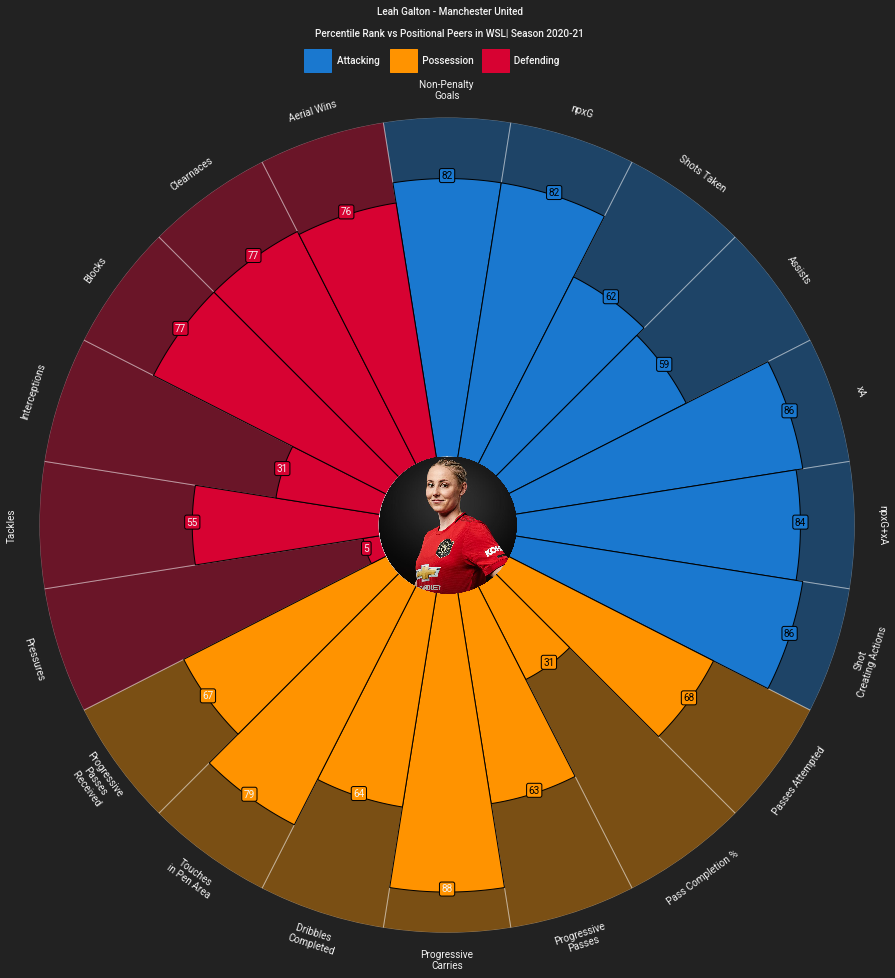

In [137]:
params = ["Non-Penalty \nGoals",
          "npxG",
          "Shots Taken",
          "Assists",
          "xA",
          "npxG+xA",
          "\nShot\n Creating Actions",
          "Passes Attempted",
          "Pass Completion %",
          "Progressive\nPasses",
          "Progressive\nCarries",
          "Dribbles \nCompleted",
          "Touches\nin Pen Area",
          "Progressive\nPasses\n Received",
          "Pressures",
          "Tackles",
          "Interceptions",
          "Blocks",
          "Clearnaces",
          "Aerial Wins"]

values = [82,82,62,59,86,84,86,68,31,63,88,64,79,67,5,55,31,77,77,76]

slice_colors = ["#1A78CF"] * 7 + ["#FF9300"] * 7 + ["#D70232"] * 6
text_colors = ["#000000"] * 10 + ["#F2F2F2"] * 10

# instantiate PyPizza class
baker = PyPizza(
    params=params,                  # list of parameters
    background_color="#222222",     # background color
    straight_line_color="#000000",  # color for straight lines
    straight_line_lw=1,             # linewidth for straight lines
    last_circle_color="#000000",    # color for last line
    last_circle_lw=1,               # linewidth of last circle
    other_circle_lw=0,              # linewidth for other circles
    inner_circle_size=20            # size of inner circle
)


fig, ax = baker.make_pizza(
    values,                          # list of values
    figsize=(15,15),                # adjust the figsize according to your need
    color_blank_space="same",        # use the same color to fill blank space
    slice_colors=slice_colors,       # color for individual slices
    value_colors=text_colors,        # color for the value-text
    value_bck_colors=slice_colors,   # color for the blank spaces
    blank_alpha=0.4,                 # alpha for blank-space colors
    kwargs_slices=dict(
        edgecolor="#000000", zorder=2, linewidth=1
    ),                               # values to be used when plotting slices
    kwargs_params=dict(
        color="#F2F2F2", fontsize=11,
        fontproperties=font_normal.prop, va="center"
    ),                               # values to be used when adding parameter labels
    kwargs_values=dict(
        color="#F2F2F2", fontsize=11,
        fontproperties=font_normal.prop, zorder=3,
        bbox=dict(
            edgecolor="#000000", facecolor="cornflowerblue",
            boxstyle="round,pad=0.2", lw=1
        )
    )                                # values to be used when adding parameter-values labels
)

fig.text(
    0.515, 0.975, "Leah Galton - Manchester United", size=16,
    ha="center", fontproperties=font_bold.prop, color="#F2F2F2"
)

fig.text(
    0.515, 0.955,
    "Percentile Rank vs Positional Peers in WSL| Season 2020-21",
    size=13,
    ha="center", fontproperties=font_bold.prop, color="#F2F2F2"
)


# add text
fig.text(
0.35, 0.93, "                          Attacking                 Possession                Defending", size=10,
    fontproperties=font_bold.prop, color="#F2F2F2"
)

# add rectangles
fig.patches.extend([
    plt.Rectangle(
        (0.38, 0.9225), 0.025, 0.021, fill=True, color="#1a78cf",
        transform=fig.transFigure, figure=fig
    ),
    plt.Rectangle(
        (0.46, 0.9225), 0.025, 0.021, fill=True, color="#ff9300",
        transform=fig.transFigure, figure=fig
    ),
    plt.Rectangle(
        (0.545, 0.9225), 0.025, 0.021, fill=True, color="#d70232",
        transform=fig.transFigure, figure=fig
    ),
])

# add image
ax_image = add_image(
    fdj_cropped, fig, left=0.4478, bottom=0.439, width=0.13, height=0.127
)   # these values might differ when you are plotting

plt.show()

In [138]:
df=pd.read_csv(r'C:\Users\Karthik Garimella\Desktop\Project\Man United Woman\WSL per 90.csv',encoding="latin1")

In [139]:
from mplsoccer import Radar, FontManager
import matplotlib.pyplot as plt

In [140]:
params = ["Gls/90",
          "Ast/90",
          "G+A/90",
          "xG/90",
          "xA/90",
          "xG+xA/90",
          "npxG/90"]

# The lower and upper boundaries for the statistics
low =  [0,0,0,0,0,0,0]
high = [1.25,0.68,1.76,1.05,0.46,1.33,1.05] 

In [141]:
radar = Radar(params, low, high,
              # whether to round any of the labels to integers instead of decimal places
              round_int=[False]*7,
              num_rings=4,  # the number of concentric circles (excluding center circle)
              # if the ring_width is more than the center_circle_radius then
              # the center circle radius will be wider than the width of the concentric circles
              ring_width=1, center_circle_radius=1)

In [142]:
URL1 = ('https://github.com/googlefonts/SourceSerifProGFVersion/blob/main/'
        'fonts/SourceSerifPro-Regular.ttf?raw=true')
serif_regular = FontManager(URL1)
URL2 = ('https://github.com/googlefonts/SourceSerifProGFVersion/blob/main/'
        'fonts/SourceSerifPro-ExtraLight.ttf?raw=true')
serif_extra_light = FontManager(URL2)
URL3 = ('https://github.com/google/fonts/blob/main/ofl/rubikmonoone/'
        'RubikMonoOne-Regular.ttf?raw=true')
rubik_regular = FontManager(URL3)
URL4 = 'https://github.com/googlefonts/roboto/blob/main/src/hinted/Roboto-Thin.ttf?raw=true'
robotto_thin = FontManager(URL4)
URL5 = 'https://github.com/googlefonts/roboto/blob/main/src/hinted/Roboto-Regular.ttf?raw=true'
robotto_regular = FontManager(URL5)
URL6 = 'https://github.com/googlefonts/roboto/blob/main/src/hinted/Roboto-Bold.ttf?raw=true'
robotto_bold = FontManager(URL6)

In [143]:
leah_values =  [0.41,0.14,0.54,0.36,0.24,0.6,0.36]

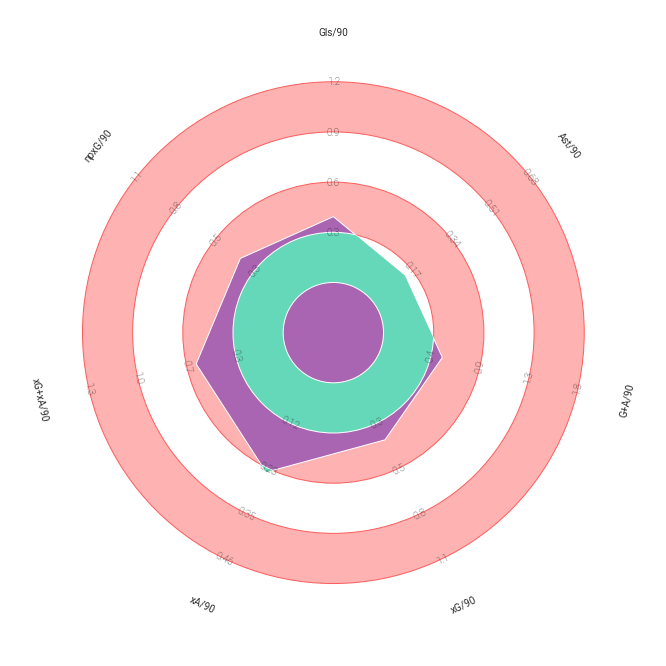

In [144]:
fig, ax = radar.setup_axis()  # format axis as a radar
rings_inner = radar.draw_circles(ax=ax, facecolor='#ffb2b2', edgecolor='#fc5f5f')  # draw circles
radar_output = radar.draw_radar(leah_values, ax=ax,
                                kwargs_radar={'facecolor': '#aa65b2'},
                                kwargs_rings={'facecolor': '#66d8ba'})  # draw the radar
radar_poly, rings_outer, vertices = radar_output
range_labels = radar.draw_range_labels(ax=ax, fontsize=15,
                                       fontproperties=robotto_thin.prop)  # draw the range labels
param_labels = radar.draw_param_labels(ax=ax, fontsize=15,
                                       fontproperties=robotto_regular.prop)  # draw the param labels

Text(14    0.435
Name: Gls90, dtype: float64, 14    0.55
Name: GA90, dtype: float64, 'Leah Galton')

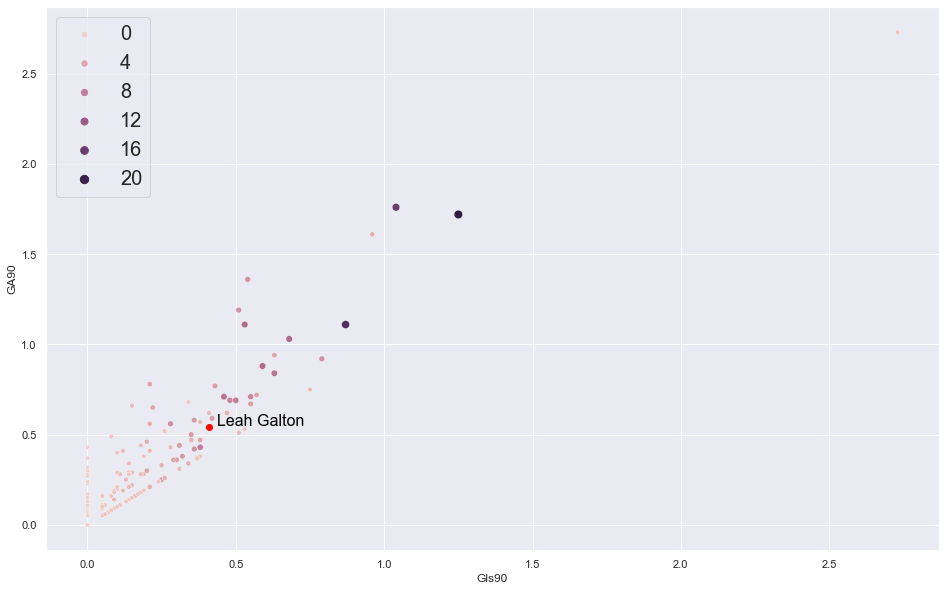

In [145]:

plt.figure(figsize=(16, 10))
g=sns.scatterplot(data=df, x="Gls90", y="GA90", hue="Gls", size="Gls",s=70)
g.legend(prop={'size': 20})

#g.ax_scatter.scatter(0.38,0.47, color = 'red')
plt.scatter(0.41,0.54, color="red")
#for i,row in df.iterrows(): # loop through rows of the df
 #   plt.text(row.Gls/90, row.GA/90, row.Player) # xloc of text, yloc of text, text
plt.text(df.Gls90[df.Player=='Leah Galton']+0.025,df.GA90[df.Player=='Leah Galton']+0.01,"Leah Galton",fontdict=dict(color='black', alpha=1, size=16))

Text(14    0.38
Name: xG90, dtype: float64, 14    0.65
Name: xGxA90, dtype: float64, 'Leah Galton')

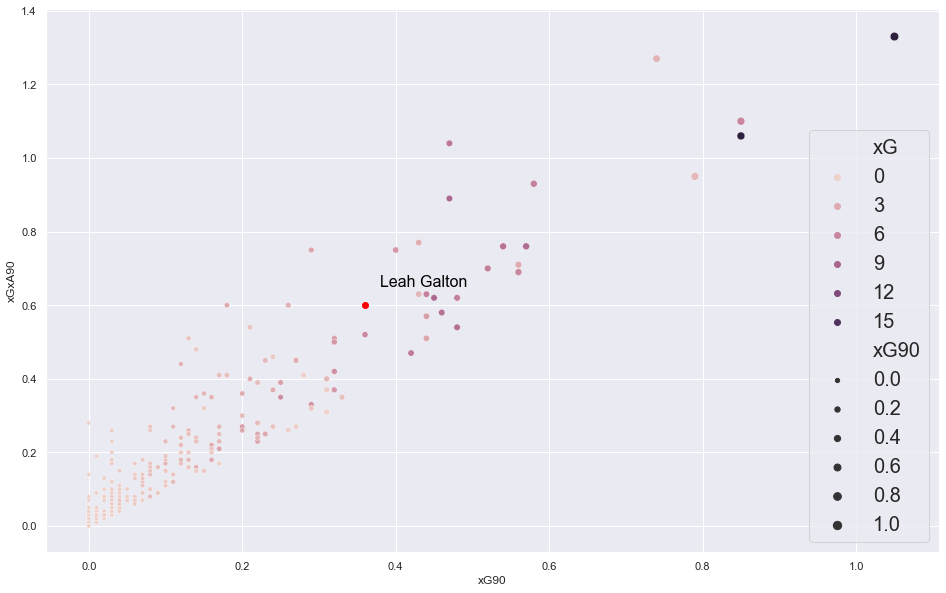

In [146]:

plt.figure(figsize=(16, 10))
g=sns.scatterplot(data=df, x="xG90", y="xGxA90", hue="xG", size="xG90")
#for i,row in df.iterrows(): # loop through rows of the df
 #   plt.text(row.xG/90, row.xGxA/90, row.Player) # xloc of text, yloc of text, text
g.legend(prop={'size': 20})
plt.scatter(0.36,0.6,color="red")
plt.text(df.xG90[df.Player=='Leah Galton']+0.02,df.xGxA90[df.Player=='Leah Galton']+0.05,"Leah Galton",fontdict=dict(color='black', alpha=1, size=16))

In [147]:
df=pd.read_csv(r'C:\Users\Karthik Garimella\Desktop\Project\Man United Woman\WSL Passing Stats.csv',encoding="latin1")

Text(52    12.5
Name: PPA, dtype: float64, 52    5.01
Name: CrsPA, dtype: float64, 'Leah Galton')

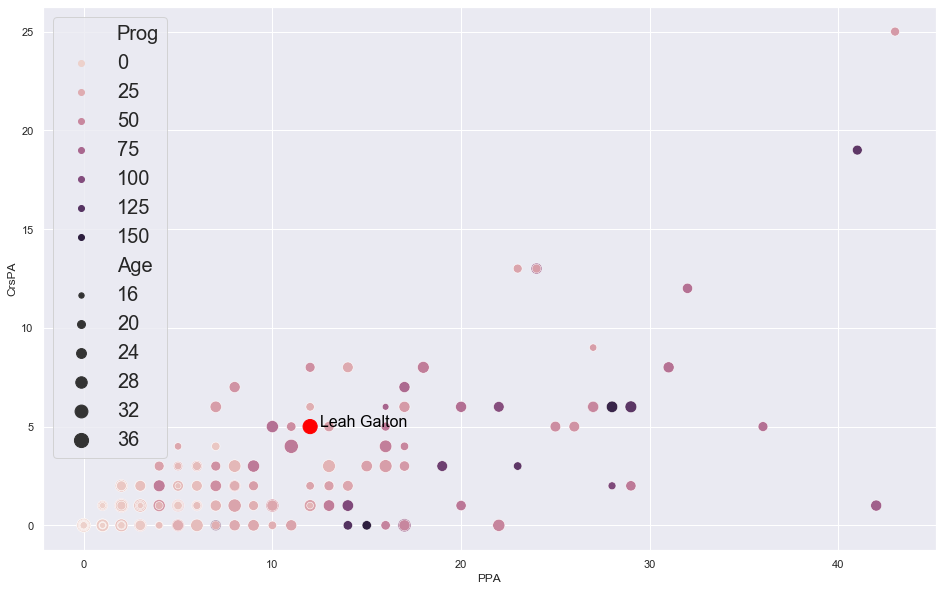

In [148]:

plt.figure(figsize=(16, 10))
g=sns.scatterplot(data=df, x="PPA", y="CrsPA", hue="Prog", size="Age",sizes=(20, 200))
#for i,row in df.iterrows(): # loop through rows of the df
 #   plt.text(row.xG/90, row.xGxA/90, row.Player) # xloc of text, yloc of text, text
g.legend(prop={'size': 20})
plt.scatter(12,5, color="red",sizes=(200,200))
plt.text(df.PPA[df.Player=='Leah Galton']+0.5,df.CrsPA[df.Player=='Leah Galton']+0.01,"Leah Galton",fontdict=dict(color='black', alpha=1, size=16))

Text(52    43.5
Name: Prog, dtype: float64, 52    1962.01
Name: PrgDist, dtype: float64, 'Leah Galton')

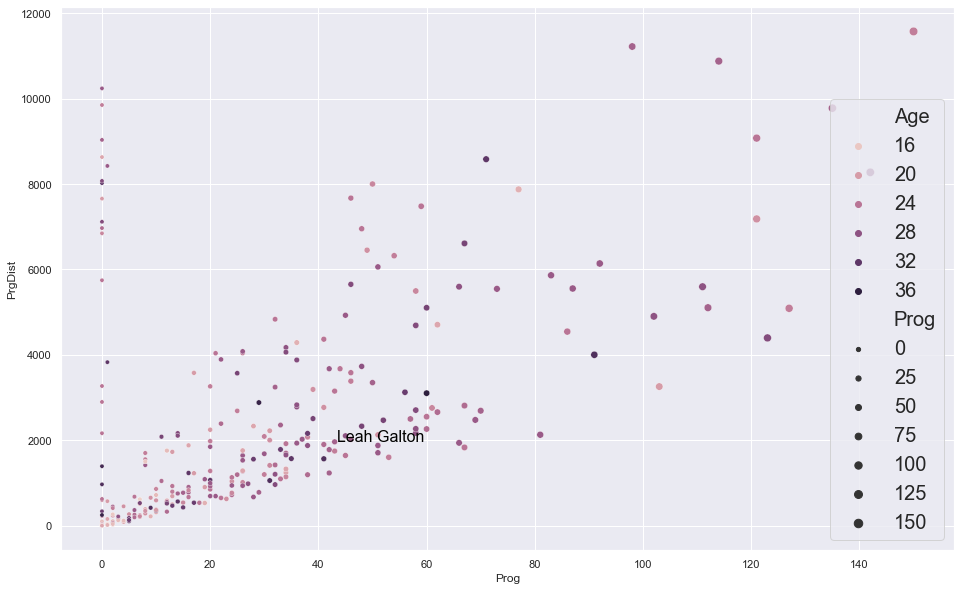

In [149]:

plt.figure(figsize=(16, 10))
g=sns.scatterplot(data=df, x="Prog", y="PrgDist", hue="Age", size="Prog")
#for i,row in df.iterrows(): # loop through rows of the df
 #   plt.text(row.xG/90, row.xGxA/90, row.Player) # xloc of text, yloc of text, text
g.legend(prop={'size': 20})
#plt.scatter(31,8, color="red")
plt.text(df.Prog[df.Player=='Leah Galton']+0.5,df.PrgDist[df.Player=='Leah Galton']+0.01,"Leah Galton",fontdict=dict(color='black', alpha=1, size=16))

In [150]:
from mplsoccer.pitch import Pitch
from matplotlib.colors import ListedColormap

from mplsoccer import VerticalPitch, Pitch
from mplsoccer.cm import create_transparent_cmap
from mplsoccer.scatterutils import arrowhead_marker
from mplsoccer.statsbomb import read_event, EVENT_SLUG
from mplsoccer.utils import FontManager
text_color = 'w'

In [151]:
fm_rubik = FontManager(('https://github.com/google/fonts/blob/main/ofl/rubikmonoone/'
                        'RubikMonoOne-Regular.ttf?raw=true'))

In [152]:
df1=pd.read_csv(r'C:\Users\Karthik Garimella\Desktop\Project\Man United Woman\Leah Shotmaps.csv',encoding="latin1")

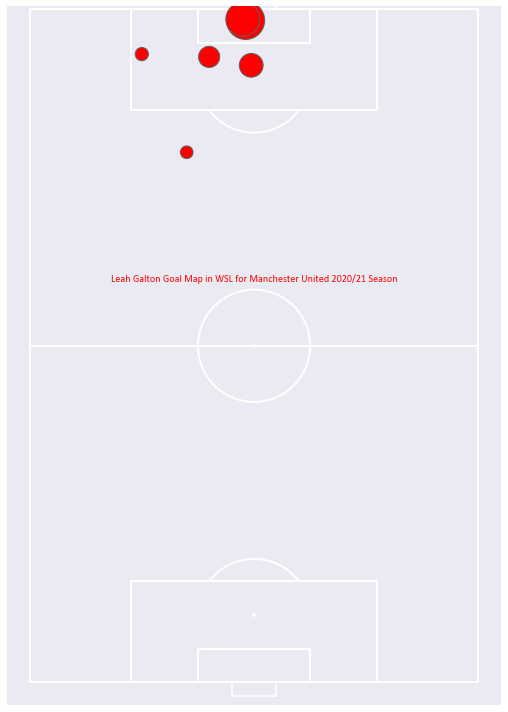

In [153]:
df_goals_barca =df1


pitch = VerticalPitch(pad_bottom=0.5,  # pitch extends slightly below halfway line
                      half=False,  # half of a pitch
                      goal_type='box',
                      goal_alpha=0.8) 

fig, ax = pitch.draw(figsize=(12, 10))
plt.gca().invert_yaxis()



sc2 = pitch.scatter(df_goals_barca.x, df_goals_barca.y,
                    # size varies between 100 and 1900 (points squared)
                    s=(df_goals_barca.xG* 1500) + 100,
                    edgecolors='#606060',  # give the markers a charcoal border
                    c='red',  # color for scatter in hex format
                    # for other markers types see: https://matplotlib.org/api/markers_api.html
                    marker='o',
                    ax=ax)

txt = ax.text(x=40, y=48, s='Leah Galton Goal Map in WSL for Manchester United 2020/21 Season',
              size=100,
              # here i am using a downloaded font from google fonts instead of passing a fontdict
              fontproperties='Calibri', color='red',
              va='center', ha='center')




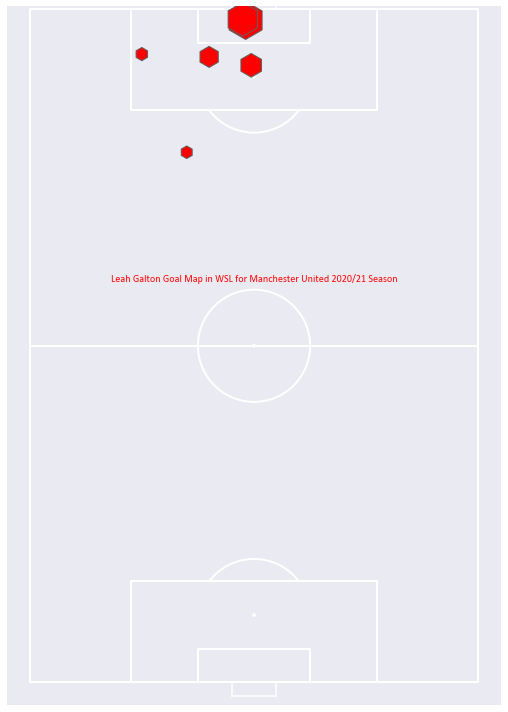

In [154]:
df_goals_barca =df1


pitch = VerticalPitch(pad_bottom=0.5,  # pitch extends slightly below halfway line
                      half=False,  # half of a pitch
                      goal_type='box',
                      goal_alpha=0.8) 

fig, ax = pitch.draw(figsize=(12, 10))
plt.gca().invert_yaxis()



sc2 = pitch.scatter(df_goals_barca.x, df_goals_barca.y,
                    # size varies between 100 and 1900 (points squared)
                    s=(df_goals_barca.xG* 1500) + 100,
                    edgecolors='#606060',  # give the markers a charcoal border
                    c='red',  # color for scatter in hex format
                    # for other markers types see: https://matplotlib.org/api/markers_api.html
                    marker='h',
                    ax=ax)

txt = ax.text(x=40, y=48, s='Leah Galton Goal Map in WSL for Manchester United 2020/21 Season',
              size=100,
              # here i am using a downloaded font from google fonts instead of passing a fontdict
              fontproperties='Calibri', color='red',
              va='center', ha='center')




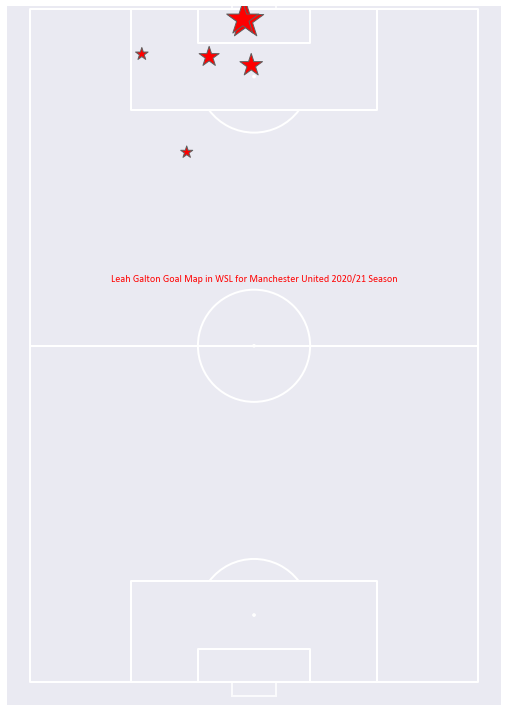

In [155]:
df_goals_barca =df1


pitch = VerticalPitch(pad_bottom=0.5,  # pitch extends slightly below halfway line
                      half=False,  # half of a pitch
                      goal_type='box',
                      goal_alpha=0.8) 

fig, ax = pitch.draw(figsize=(12, 10))
plt.gca().invert_yaxis()



sc2 = pitch.scatter(df_goals_barca.x, df_goals_barca.y,
                    # size varies between 100 and 1900 (points squared)
                    s=(df_goals_barca.xG* 1500) + 100,
                    edgecolors='#606060',  # give the markers a charcoal border
                    c='red',  # color for scatter in hex format
                    # for other markers types see: https://matplotlib.org/api/markers_api.html
                    marker='*',
                    ax=ax)

txt = ax.text(x=40, y=48, s='Leah Galton Goal Map in WSL for Manchester United 2020/21 Season',
              size=100,
              # here i am using a downloaded font from google fonts instead of passing a fontdict
              fontproperties='Calibri', color='red',
              va='center', ha='center')




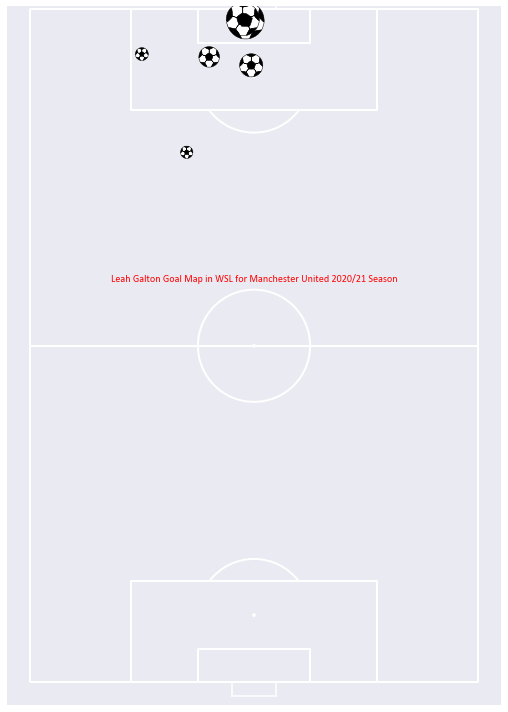

In [156]:
df_goals_barca =df1


pitch = VerticalPitch(pad_bottom=0.5,  # pitch extends slightly below halfway line
                      half=False,  # half of a pitch
                      goal_type='box',
                      goal_alpha=0.8) 

fig, ax = pitch.draw(figsize=(12, 10))
plt.gca().invert_yaxis()



sc2 = pitch.scatter(df_goals_barca.x, df_goals_barca.y,
                    # size varies between 100 and 1900 (points squared)
                    s=(df_goals_barca.xG* 1500) + 100,
                    edgecolors='black',  # give the markers a charcoal border
                    c='white',  # color for scatter in hex format
                    # for other markers types see: https://matplotlib.org/api/markers_api.html
                    marker='football',
                    ax=ax)

txt = ax.text(x=40, y=48, s='Leah Galton Goal Map in WSL for Manchester United 2020/21 Season',
              size=100,
              # here i am using a downloaded font from google fonts instead of passing a fontdict
              fontproperties='Calibri', color='red',
              va='center', ha='center')


